# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.

## Embeddings and Vector Store

### Understanding Vector Stores and Embeddings

**Vector Stores** and **embeddings** are related but not equivalent. Here's how they work together:

### 1. **What is a Vector Store?**
   - A **Vector Store** is a specialized data storage system designed to handle high-dimensional vectors (e.g., embeddings). These vectors are typically representations of data, such as text, images, or other objects, in a form that can be easily searched and compared based on their similarities.

   - **Functionality**: Vector stores support operations like nearest-neighbor search, similarity search, and clustering. They are optimized for these tasks by using indexing methods that allow for efficient querying and retrieval of similar vectors from a large collection.

### 2. **What are Embeddings?**
   - **Embeddings** are dense numerical vectors that represent data in a continuous vector space. These vectors are generated by models like BERT, GPT, or other neural networks, where each dimension captures some aspect of the input data's features or semantics.

   - **Purpose**: Embeddings allow complex data (like sentences or images) to be represented in a way that similar items are closer together in the vector space, making similarity search and retrieval possible.
   

### Example Scenario:

Consider a search engine for legal documents:
- **Embedding Generation**: You might use a specialized legal language model to generate embeddings from legal texts.
- **Vector Store**: These embeddings are then stored in a vector store, which allows you to perform similarity searches (e.g., finding cases with similar legal arguments).
- **Custom Embedding**: If your use case changes (e.g., you now need to prioritize certain legal terms), you can switch to a different embedding model without needing to change your vector store.


## Q&A

### 1. **Why do we need to use an LLM for embeddings generation?**

Large Language Models (LLMs) are used for embedding generation because they can capture the complex semantic relationships between words, phrases, and entire texts. Here's why:

- **Semantic Understanding**: LLMs, like OpenAI's models, have been trained on vast amounts of text data and can generate embeddings that reflect the meaning of the input text. These embeddings position similar texts close together in the vector space, making them useful for tasks like search, clustering, and recommendation.

- **Contextual Embeddings**: Unlike traditional word embeddings (like Word2Vec), LLM-based embeddings consider the context in which words appear, leading to more accurate and meaningful representations, especially for complex or ambiguous text.

### 2. **When should you change to use other embeddings for querying and generation**

The idea of "custom embeddings" refers to the flexibility of changing or fine-tuning the embedding model based on evolving needs:

- **Switching Models**: If you decide that the current embeddings are not capturing the necessary details for your use case (e.g., a new focus on legal terminology), you might switch to a model fine-tuned on legal documents. However, you would need to re-generate the embeddings for all your documents in the vector store to ensure compatibility when querying.

- **Domain-Specific Needs**: Custom embeddings might be used if your application requires more specialized understanding than what a general-purpose model like OpenAI's provides.

### 2. Using the Same Embedding Model for Querying as embedding generation:

If you use the OpenAI model to generate embeddings for storing in a vector store, you should use the same model (or an identical version) to generate embeddings for querying that vector store. This ensures that the vectors (embeddings) are comparable, meaning that the similarity search or retrieval will be accurate.

- **Why This Matters**: Different models or different versions of the same model might represent text differently in the vector space. If the embeddings for the documents and the queries are generated by different models, the vector representations might not be directly comparable, leading to incorrect or less relevant search results.

- **Consistency**: The embeddings generated by a particular model have specific properties and dimensionalities. If you use the same model to generate embeddings for both your documents and queries, the vector store can effectively compare them using similarity metrics (like cosine similarity).

- **Performance**: If you switch to a different embedding model for querying, the vector representations may not be directly comparable. Even slight differences in how the models generate embeddings can lead to inaccurate similarity searches or poorer performance.



### 3. What Happens When You Run `embeddings = OpenAIEmbeddings()`?

When you run the line `embeddings = OpenAIEmbeddings()`, you are initializing an object that can generate embeddings using OpenAI's model. This object is not a numerical representation of all English words directly; instead, it is a tool that can convert any given text into a high-dimensional vector (embedding).

- **Embedding Process**: 
  - When you input text like "Hello, world!" into this model, it generates a dense numerical vector (e.g., 1536 dimensions for OpenAI models) that captures the semantic meaning of that text.
  - This vector does not represent individual words but rather the overall meaning of the input text. The model has been trained on vast amounts of text data to understand and encode this meaning into a numerical format.

- **Behind the Scenes**: The embeddings are produced by a neural network model (like GPT or similar architectures). These models are trained to recognize patterns and semantic relationships in text, allowing them to convert phrases, sentences, or even entire documents into a vector format that captures these relationships in a way that can be used for tasks like similarity search, clustering, or classification.


In [1]:
from IPython import display
from base64 import b64decode
img_1 = "iVBORw0KGgoAAAANSUhEUgAAAnkAAAJ1CAYAAACly+baAAABWGlDQ1BJQ0MgUHJvZmlsZQAAKJFtkL1Lw1AUxU+10qJFRRxFsokQW60d3KR2UCFoqB/RbmkaW6FNn0lEBP8BNyfBXdxcXOokIo46CRXEWdyFLFqe9yVqWvXB5f44nHe59wBdcZ2xahRAzXLt/PyctLFZkGKviGMU/YghpRsOy6qqQhZ8987nNRER/WFCzDrXDmctpVK41VKyeXFy/9ff8XpLpmNQ/6BKGsx2gYhMrO65TPAB8bBNSxEfCS4HfCq4GPCl71nN54jviAeNil4ifiaWi216uY1r1V3jawexfcK01laoD1GNQMUCFEhII0O1jhnK539/xvfnUAfDPmxso4wKXPqbJYWhCpN4ERYMJCH7MyfFXJHz7/xCTae7pzSCl1CzloCrZWCgGWpjCTqFMrjZYbqt/6Qa8aLO1nQ64L4G0HPM+RvNi40DrUfO3xuct86A7ifg2vsEOIRh1nAwi4YAAABWZVhJZk1NACoAAAAIAAGHaQAEAAAAAQAAABoAAAAAAAOShgAHAAAAEgAAAESgAgAEAAAAAQAAAnmgAwAEAAAAAQAAAnUAAAAAQVNDSUkAAABTY3JlZW5zaG90/RVEXAAAAdZpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+NjI5PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjYzMzwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgot1uydAABAAElEQVR4AeydB4BdRdn+363ZTe+QhJJC7116VUCaSrWAAp9+ovCB5a9YEAFRrKBiQVDEAiJiF+kQaui9B0IL6b1s373/5zdn5+7Zm3u3ZDebu8s7yd1zzpwp7zxzzsxz3ndKSUbO3DkCjoAj4Ag4Ao6AI+AIDCgESgdUabwwjoAj4Ag4Ao6AI+AIOAIBASd5/iA4Ao6AI+AIOAKOgCMwABFwkjcAK9WL5Ag4Ao6AI+AIOAKOgJM8fwYcAUfAEXAEHAFHwBEYgAg4yRuAlepFcgQcAUfAEXAEHAFHwEmePwOOgCPgCDgCjoAj4AgMQASc5A3ASvUiOQKOgCPgCDgCjoAj4CTPnwFHwBFwBBwBR8ARcAQGIAJO8gZgpXqRHAFHwBFwBBwBR8ARcJLnz4Aj4Ag4Ao6AI+AIOAIDEAEneQOwUr1IjoAj4Ag4Ao6AI+AIOMnzZ8ARcAQcAUfAEXAEHIEBiICTvAFYqV4kR8ARcAQcAUfAEXAEnOT5M+AIOAKOgCPgCDgCjsAARMBJ3gCsVC+SI+AIOAKOgCPgCDgCTvL8GXAEHAFHwBFwBBwBR2AAIuAkbwBWqhfJEXAEHAFHwBFwBBwBJ3n+DDgCjoAj4Ag4Ao6AIzAAEXCSNwAr1YvkCDgCjoAj4Ag4Ao6Akzx/BhwBR8ARcAQcAUfAERiACDjJG4CV6kVyBBwBR8ARcAQcAUfASZ4/A46AI+AIOAKOgCPgCAxABJzkDcBK9SI5Ao6AI+AIOAKOgCPgJM+fAUfAEXAEHAFHwBFwBAYgAk7yBmClepEcAUfAEXAEHAFHwBFwkufPgCPgCDgCjoAj4Ag4AgMQASd5A7BSvUiOgCPgCDgCjoAj4Ag4yfNnwBFwBBwBR8ARcAQcgQGIgJO8AVipXiRHwBFwBBwBR8ARcASc5Pkz4Ag4Au96BDKZTBaDeB6P2Ru9dNKVdLsSppfE8WQcAUdgACPgJG8AV64XzRHoCQLvdqJRUlLSE/iycXNx7K10sxn4iSPgCDgCBRAoL+Dv3o6AI/AuR+DdSkZ6u9xdTa+hocGef/55q6iosO222+5d/vR58R0BR6A3EHCS1xsoehqOQDcRQLvT1c6/m0n3SvDXXnvNbr75ZmtpabFhw4bZBz/4QRs1alSvpF2MiSxYsCCUd+XKldbY2Gg77LCDHXTQQVZWVtZjcUnv/vvvt8cff9wqKyttyJAhdtRRR9kGG2yQTXvFihV21lln2XPPPRfCfPjDH7YzzzwzEL5sID9xBBwBR6CbCDjJ6yZgHtwRSCPQ3Nxsb775pi1fvjyQthLr3MSXsUwgTJtssknREr2nn37avvzlL1t5eblNmDAh/A4//PB00QfU+euvv27f//73bfbs2YHkHXvssbbPPvtYdXV1j8tZX19vv/zlL+1f//pXIG0TJ04MmrpI8niG7rzzTvvDH/6QzWvevHkG0dtwww2zfn7iCDgCjkB3EXCS113EPLwjkEKADvzEE0+00tLS0IF3VTu3xx572KWXXppKqbhOm5qarLa2NghF2eJ5cUnZe9KgWUXjhiYPR73mjqVb29xIp66uLqRJuqtXrw4a0pge91944YVwyfPDNXhD/tw5Ao6AI9ATBJzk9QQ9j/uuR4BOuaamxl588cVuYTF8+PDQmXeVFHYr8V4ODMnrD3L2tNjrsoxpwpiLJ9d8KPzsZz8zNHi4cePGBbNtT8vk8R0BR+DdjYCTvHd3/XvpewGBSA4YMI82qCuOTjzG60p4D9N/EaCeGdtYyEHyJk+ebDfeeGMYk4eJfNttt7UxY8YUiuL+joAj4Ah0CQEneV2CyQM5AoURiGQNgvehD33IvvGNb9ikSZPymvvCmD0N22NAP9qdGLdw6sV1pz/KXAwIpjV5ufJwD2LHGEB+A835MzPQatTL058QcJLXn2rLZS1KBNIdeFVVlY0fPz78uissZt9FixYFAggJTA+6x/+dd97JaoQgBcx23WijjUI2aRkicWQcGJNCOKJJwn/QoEEhDjNmY5wYvivyxg578eLFxoxUxpjhkHf4sOE2aaNJgbAUTIs1h1vnpsS0Ylgmr8ybO8/qG5I08UfesWPHBq0WZUDr1V2HnMjLOLey0jIrKS0JM4anTJnSlpTkWhscwJZ6WbVqVcAY+ZhBu/HGG9vQoUOz6S9cuDB7nnsS833rrbeyaYwYMcL4pR15LV602JpbmgPGPB8RD2bnvv3226GuqQtkIH/CVFZUaqpP9z4owBp5GKPI+Ezy4Zljsgj1EesOTMEXLTZxRo4c2a7cyE987uMow5w5c7JjH/GjjpGTuNHF9OO1Hx0BR2DtEHCSt3a4eSxHoCACdFBr42655Rb7y1/+EjpUOswf/ehHgZg8/PDD9p///CfMzoQI0uHSkR9xxBF25JFHGrNeIXuRBNGpslzH3XffHdJYunRpVhzIx0c+8hHbf//9w2/w4MHZDjsbqMAJ6UMkHnzgQXvgwQfsT3/6U5hVTHCICkuOIBOTSvbee+/8qUDwWoke68LRwUMS7r33XqOcV111VSBMMTIzUSkj8h5wwAHGdVcdxAoM+N1+++3GDFoc+B188MF2/PHH25577mnbb799IJ5dNbXH/EkXnKmzJ554IosjM3K/+MUv2nve856ACfkxBrMjB0n80pe+FMz91C0aYcbpQayiY3IGzwTPV3lZuZ19ztm2zTbb2D333BN+119/fagf6oI8wY3yHXfccbbZZptlcY/pFTpSlhkzZtg///nPgB31Tpr8Pv3pT9shhxxi++67bxg3+N///td+97vfhWVhIJWnnHJKqKuYNpNHiIe79dZb7cknn7SbbrrJHnrooRgkkMZjjjkmxGOpHpaYic9yjJsN7CeOgCPQPQTUYLhzBByBtURApCujjhbaEn4f/ehHM1qGY61S+9a3vpVNh/S07EbmhBNOaOcX80kf1UFmHnzwwYw6xoy0YZmf/OQnGY3p6jTe17/+9RA+n7B//vOfs/GlMcxovFhGnX9GxCjrn5Yhfb711ltnfvzjH2ekfQxJI1facS0immlqbMpo/bgMmKXjFzr/wAc+kNHafRkRh3Rya5xr9mpm+vTpGXAplFb032233TIXf+vijAhNZquttsqGFzHKkE50yBx/0o5mLr744oy0WtnwMb30kfv/+7//mxGhyZx88snZsCLaGZGomHQ4glU67tlnn90ufwKJUGVEirPhfvvb32b+53/+JyMtWdYvnUY8FzkOz4TIfrs840XEU6Q4c+WVV2Y23XTTDtMjXS0xkxFxzoiYtgv761//OiYbjiLOGWlRM5pUkhk9enS7sFG+9PG0007LiAgGrJEr99lpl7hfOAKOQKcI8FXozhFwBNYSgVySJy1ZRtqutUpN67RlO0FpYjKQKzpAmd6y/ukOUVqeDOFkIs5MnTo1I01P5le/ujL4Fer4CS9NU0gPwqC18DLLli1bQ940yZNpN3PuuedmpC3MK0daJtLnWqa3zKc+9alAImNHDbGLTma+jDRggVBQPuJRnnRa6fNYHgjS1VdfnZHZLybV7ijtYAaiIVNsRlqgguml0+ZcmsLMFltskQ2fS/JiJi+//HLmsMMOC/IST9qrbJzcNOM1dSPtVzZcLskDH+oghucIeYokk/sQHmnCQl3HcKTDeaHng3vUdcT1pz/9aZY8Qb5ivVC2uXPnBrJNedLPSMwr35HnQVrkrNyQuGuuuSZCFY7I/b3vfS/7zBWqE2SMdXzE+4/IaJZxu3T8whFwBNYOge4PcNHb7s4RcATWLQKY7KKZVa+23XXXXfbKK6+EpVpENOy8884LY50Ye8X912WK/PnPf27XXXdtGG+G6fH9739/mK1JvFdffdUee+wxO/TQQ4OpFzMt4+lYAJi0SYNfPse4LHXUYaHgeJ/lPlg2hrT5XXfddeGWiEMwwWJWxvSqTj+btshDjB7WhZOWMowZVOcezHNbbrml/f3vfw+yIi8/Fglm7CHlQWbMxeeff34oSzax1hPM1Iwju+iii0ykpV15PvvZz9qzzz5rL730Uvg988wztvPOO4eY5I+5mHKIbOQmG67Jn/S/853vBLMjZmbMk5hZpQE0TO0zZ84MaZDHV7/61RCPhaRnzZoVytEbCytH4cASLJAXszczc8kXGcDt2muvDUGpY54l5MWPnUyIix/1TX3hRIyzdQjOjLVjBrjIfkiPdF9+6eXwjBFehC48D5Qb/Ao56kEfCCE9xquSJ88cz3D8ibSHRae5j6n2vzf/NywMDea4Qs9loTzd3xFwBFII6AVy5wg4AmuJQK4m72Mf+1jQiqxNcmlNHhoPtBsaL5YRmVpDc4Um7IYbbshocH7QWKljzmpUtPRGMLthfst1IoMZtI1of9AAqinIaOxXMKlFsx1x0pq8tPZll112yYhIZcg/7UQmMmi5PvGJT2TTRSuEXHfccUcIGjVHaOFOP/30kLc69XBEeyMiEcy46XSRScQk8+1vfzujAf+ZGP7jH/940H7FNImDORKNGRqhqN3ClK6xfu00ioQlHtoiNJkxLFjEsqLJE4EjaNb97W9/y2iCQDCZUja0hVdccUXQ3IqQZMNxghaOfDVbNmBA2iJWoay9pclDBo31C2bc3PpAHpG+DOVAmxfNvJjysxrC5sSMrv1ygyaY5wF8Re4ymPJ5VtCMph35oDHWmMEQFq0feFM+6uf3v/99Onjml7/4ZZCR+/xOOumkTO5zGZ9lzMQRf0znmkwS6ildx+0S9wtHwBHoFAG+ktw5Ao7AWiKQS/IgGRCku+++u92PMWL4SWuW0f6kYTxabpZpkkfHrEkGmUcffTQESxOw4KH+mU7wggsuCJ0nHW0khowDi+Ov8nWQdN4aiB/i0UlzzjizdB5pkhfJCZ0wpuiYZjwSL54vWbIkA9GlQ4ekckTGtKlWkxUy0toFckXaEJE33ngjF47sNenPnzc/o8kcIT3ShJhF8hgDPvDAA+3y3XHHHcN4uHg/3xG5NZkhmF1JEzxIP5K8WC6IyTnnnBPuQYYIR31Fs3Eau3Q+EFfG/cU4pK3t7NqNySOPzsy1hMFcG8ka6fBjXF4uwUznz/OGuT2G57nS7NYseaqtqc1IA5wtF+E+97nPZaS9zdZpOj3OKSvPlyZ2hGcufixoVnlGW7O1C/61r30tkNyIKyZjHOSRD4OIG0fGIUY5MXFr1nK7tPzCEXAEuo9Am/1Eb5c7R8ARWHsERBKCWU7aijCrktmm8XfggQeGc2Z1aoJFWAajo5yk3QjLVWAKbG7Ks72VJiyyDMp73/vekAymLb3+wY+ZmSxHwbWIXzim82LPXGZyRodJjyVG1BGvEZb46oDDkiCY9JjFix8UIxyVSGlJ244YmFYvvPBC0+SLYN4kD0ywIn8xuzBrE1MdZkbSZmalCGT2fu4Jco3fYLxpskP2FnFFVsM1aWBKjSZSrnHgwAxXcCjkKAMzQnfaaacgj8hU3qDIKy1YuEfezPJlljJmUFzEIlyk/oisBLM5S4dgIu1tRxkLmZjJa7vttjP24Y2O5wr5Wa8RmRcvWWxnnXVWuI2MImwmkh5M0YXKRH0wW5i9dcGWeDjC58Yhf9KMuDJrF5M64cCDtHAcv/CFL5i0isGUjxkYkzDpd1R/IbL/cQQcgYIIOMkrCI3fcAS6h0DsyDqLNbg6Wbaks86LpT0gjmXlWttNnWI+x64IjLOLjkWYGWu2RtrwnFauQ4fKumQ4ZJb5LkuYYphwU38igYBssoxJSJd00uKkz3Vritaf23333WMS9vTTT2eJAJ4Q0ug02cGmTZtm8+fPD2sEcow/tvjixxIr0qStsW4cawAyXhCZIC6QVXDietdddw1Lh5BPIey4R1gwlJmZy3aOeDEu5AjHNZj9v//3/8KYtRghhovX8QjWp556agibLne835Mj2DGGDZetl9Y6julCug/UB0bahbCtdQY5xsVxdYxdDMutpCKE8HmuNQElWX4mdS/3lGeG9Q9xPEssn6LZ1GFpFsYqRkLOfT4gWBKGD4TNN9+8UwJNHHeOgCPQMQL5Rxl3HMfvOgKOQAqB2AnSYbIdFevW0fniH4lfDAMZ0Li2rAYjlcwap+8//P3ttD/pNDgnLTRKdIy33XZbiE9nHTv+SDziMZ1BTAs/CFLUtIVFc1MMLuZDHhDOzhzhITZoLDU+Kxs8yCACsmr1KpNpMuvPIs+/+c1vwjXxokYyG6D1hHQhcTjS4hoyyMQHyos2iXLgj9O4t6DFCqQ1h4SGAK1/SIsfBKOQI02IMC6mjwY1avEKxYv+TL7oatgYpytHLTeSlSeEz1NOiBVEL+3AGUdZIM8cIwGlXFELnI6TPg91KY+RI0aGyTDpe7nnlP3SSy81mbqDtpU6lFk9fJiwqDJaX8gq2mWOOIgfWj7kinUd88xN368dAUegYwSc5HWMj991BDpFIN0BofFCcwP5ojONpCCdCB1+1Jyk/XPPJ06aGDq5XP+0qZQZnp0ttLtG/Dwe+eQkGMSVPCZPnpwn1ppesVNGoxjPCRWIhUgImjlmXEbHTg0aVxYvOz3S+UftD7OPOSdtZvNGsyGJQK75RULTWcL5TKkREzCAjKZdvJf2K3RO/Ej2C4VZG38w7orLLVv6edVYyHZJxHvx2O5m6iLcz0MqU0HCKfijJeWZZ/Y3M5yjA9MzzzwzXLKANgsso5U+5OBDtIVK8sx0B+eYrh8dAUegDQEneW1Y+Jkj0G0E6ITSHRGaEzQcjCfqzBGvo86Uzjn3fu51bh7xfjzm3s93nZY/9z6dNPeDlqxF8mpLsKhpyQ0br8kbYpNON5ItxmelNYKcE7arLhI8wqPFi+ZkNFGR1EVCRZ7Rr7P0O8KLe+l8Sau7mrk0Fp3Jkns/yhaP8T4yRb94jPfSx0J5E4flUtKuo3TS4eJ5obTjfY58hGg2dNiX95abb7Gnnn4qu8RLDPfII4+E3UNYTkULaQdTOx8XuO7KFNP0oyPgCGiYhIPgCDgCvYsAJk8cHWBHHVRH92L8TtNImVZDpr38B5KEqZKJBxA8XK5mKDdLZGYNvbSLZICxgJjwomNiwk9+/BOrHFQZsCqEiYyqQjUxf8e0MCuOGzsuJMW4OshEJHaQ0jiRIObV0TGXxMWw5AWRjOZc5MMPLWJXHXhFktvVOF0Jh1zg0pkrhCnx4oSXiBumdLDorI6JCw6xLrgu5Mgfcs8kDH5o8LSETpjs85cb/mL/+ve/sqZ4CP+p0oQjxxlnnBHINHl0VIZC+bq/I+AIOMnzZ8AR6FUE6Cxjh8Sxtzqo3kqnu4VF0wZhYtYjM3AhVpSrI9ICuWKf0rSLmEBM0tojOvUNJ2wYxhWmw+c7ZzwXEyDAgh/pMCklnpN21AqyDy7jFJm525kj3SefeDJvsCi31iMM98kL98Mf/jCYmeP4x+CZ74+Ca8mcdvvx5gu2Nn4d1UFX09OyJ6E+o/YTk+pee+0VxjTGshdKK06WIVzEJTcs9RHvcc6C0IzFO/igg62puSnMfr7wogvDYszMwmYyDZiizWPmMGP1OpMjN0+/dgQcgTYEfHZtGxZ+5gj0CgLpTil93iuJ5yQStYY53r12GTt/rW0XdrAgYcgFHXfsvHMzY2A9uy/EsrPURjS9ERbtEeSR+4RjxmUkZ7lppa/ZVYOxjvy0L6xpceL0bTviiCOy12jaIJqrV7WfMBFljuUiAsTij9f+MciTHisZ5ScM8jPeEkcY7SMbdoIIHuk/CQfM+tTV19nvfve7QE6znr10kpZvbZNEE8gkGRx1ct999wVSStpgBF5prAgXMWQHDZZDidfcSzs0guymwnIo//73v0M988GA007AQUMKiWOnE0izFuUOeaE5ZkII5NidI+AI9AwBJ3k9w89jOwLtECjU4bULVOCiJ3ELJNlj79jBQ8KYBTt9+vRAWCABuSQD+Z944olgZoM4MW4NzQ0zNiFJsXxst4bZDrIIYWJLLjr0QiZTCsGWbJdccknIG00hWrxoQuU+5sWTTz6Z06yp8corr7Q/Xf+noImMssZj1IIxEeSb3/xmMEfjF2eZhoRSfyB4zGaNDiLyjW98w7SwcPQKxzTpRkOoBZvtr3/9a7bs7QJ3chFl7SRYj24PHTbUtPhxSCPWjxYwtieffDLIjAz8eA7iswBGDz30UCD94A45LORYagZtqhaXNrax++c//xmCpssG7lzHcayck0dctqZQ2u7vCDgCnSPgJK9zjDyEI9BlBOgoIUR0iCxiHH/4xR9khl/sNAslnu4IC4XpLf/YwUfyE9NNy8i6Zgygv+/e+8IsWUgMjnKxlh3mtg9+8INhf1Q6f8gYGreoKaI85MOsUMKBAURQ22TZJz/5Sbv55pvbLa9C2mjiII5oedg/lbFdOGZs7rfffuGcdPlB+j71qU9lx5Qh11e+8pWwly1kLpIGCATr60EcCX/99deHMnREMpETssqafuSFHBBe7fpgTz31VJCbsvFjQggkV1umGevOMQaNPKOWMGIdhF/PfygHawpGLCFsaFfBGy1cnFUcCTA4/ulPfwrPgXakaEegc4sCThD6qLXlPguBaxeXEC+G5xljL2E0wDiwZoxlXFIlhvOjI+AIdB8Bn3jRfcw8hiNQEAE2jcc8hUmyEGmgU2NsG2Of2C0ijp1fm86fjnRtXHfi0cEjMz80V4cdfphNmTIlaMDoiOns0dLgCJseG8cuGZjkoiNfCOBnPvOZoA3C7EmnDoE8+uij7fjjj7dTNfAecggxwtT5q1/9KkQHMwbkQ0q0dVsgWzFdjuT7ve99L5gQIWBcM45Q+94GrdP5558fTK6QMEy9cR0/dg5BJuRgnBkut+6oG9Y3RMsFcYO4QCIheCw+ze4XEGDyZNKJtugK6bBGHWlBQGfPnh38+JNLprM3Wk9ynwWuu1Nnuel1dM1EGO1VG3b+QFbI+auvvhqWM2ExY+5ButC2agu4sAyK9rcNkyVyy5XOhzKiydP2b1lvJvCwXAp1Sj1CfNEastsFazUyHg8tKfUPoXbnCDgCPURAjYc7R8AR6CYCIjxhb091SBmt0M9IrOxerZx39pN2a429Qb/73e+2i3f//fe329szk+wn305SdcoZkZdsPBGRsO9ou0B5Lv71r39l46hjzfzyl79sFyq9dy17n1500UUZdc5hj9fOysZ9EbKwhy84tXOpy9deey2j8XpZOQqly36r8Z520sg8cP8DYd/TWAcx/XgtTVRGuzFk48S4+Y4iThmRjYy0bhktZJ2Nw9611G07J9nx06SAjGYJZ8OK2GXP03mQtszKGc0SzUgzlg0jTWbmwQcfzCaN3CKv2fukoS3aMuyLnHa33357u71rNUYx7x7I6Ticazxcu7Q1ji43SNiD94YbbshMnjw5G7ZQuWIZNTEiI0KeDS9ilvnjH/+4Rto8S+l0Y/zco4h2SEu7XYQ9m3m23TkCjkDPEHBzrVoad45AdxFAq5KrWUGz01WHBiM3fm7c9H3O0+O9Ylj8RRLiZZePaU0SmpO440W+BDBtolURCQgmSHXY+YJl/dgLFZPecccel/XLnqQUj6Rz+eWXB+1QNOlmw6VOMLOiGcX0KhJhe+29V9CkqenLO9aNgfzIylizuH1bKrnsKVojtIbXXHONsUUXZsroWKSZ9NMO/BkLyO4NV1xxRdA6cr9QvTPu8FdX/MrOO++8dpMI0Hzmpp3Oh/O01o9r6hjzeJy4gF/6+eC6qy5f3mgxGTdHvcWxh4XKteUWWwbtKDNx0wsy55MHuRmTd9VVV4WFj6PJOp+saBHZNxcZdtttt6y2M5+8+eK7nyPgCKyJQIleoPYt2Zph3McRcAQKIECny9glTIBddbxyrOnGGC/MhNFh+sPUBwHDn/1f2Z6L6/ia5utIGQTPGDA6UMZYkW5Hg+HJD7OrtEmBoGBiJJ8dd9wxmCzJg/uMkWpqbApr2EGcIC2Y8piByRg8SBFmPTDAJMueo6QDYYM0dMeRDmPvGPMFDpi9Wd4Dkx4mQUge8lE+iAMyxmPEJ40N9/Bn3B1ySmsYxvRh8gVb1udjqzZMhyyPQn4syEs8HGZWxqnlK4c0qmHNQGSdMWOGvTP7HXvhxRfCrhtMNMGUSdrIzh6s9XX1Nv2e6YFIgzU/8o0ECTIFkWXJF86pOyYhYM6P9Uj9IyP5EZ/rWCfpcufDnLJjEiUczylkLj3bmTikxw/MILjUPWQUEy0zXSG3mHUxz7N1HyZqzOkQb7Ytw1FfzJI95ZRTwnXuH2Y8z3hwhr3+xuvhOYfIUl5MszxbYAUupOPOEXAEegcBJ3m9g6On4gisEwQiWSmUOB1zZ518objd9UfTkialkAG0gMgAuYG4pu93Nf1ImggfJ0WQLgQLsgOpiYSOspJfcBykGexK+SE3q1ausorKihAVWTvSKiUZdO0vMjNWEMJC+cGCcX64rtRPLq4x167EjWELHcGW5Ury1Utn6SMXdYwGkTqgXGg/0+7YY48NE27wY5wm2j0mW+Rz4VnWGNTautrwYUCdIANpQ74h8LjOnvl8abufI+AI5EfAJ17kx8V9HYFuIUBnhesK4ciXcKH4aFY6cjG/zjrsvGlIZEyQkTjFI51sPlKALBAZ8uI+RInf2rooc9xJg3QgXhC7uJwGsuDy4pAy/YZAqT8xbbwgK2iucrVX3CP9SCpiHsRNu4hx2i+eExaZ0d7lutx0wA5Ck+vypZ+WPzd8d65Ju6y0LBA1tIL58oLI8YuyUado7qhjNJqFHDKml5CBBMZ6yxcHfCHEhIPAjxiuBaZVh6TDj3pK10E+WfOl636OgCNQGIGOe5DC8fyOI+AIpBCgQ+pJp9Qb8VPidO00pQWLsnPMR/BIkHsQAUhN7Iy7llH+UDHP/HcT33z5EC/9yxc/nXah8hCP9ClTOp902ul0Ossn935MJ/pHEhWv4zGdd/TrLN8YrtNjKxGGVOWmGa9ZwgYzO+ZYfpdddlkgY4XSjsQb0zGLIcd0MLNiyu3IRe1pKHOrbMTnmnqK5zHNjtLye46AI9A5Ak7yOsfIQzgCjoAjMGARYAeRfffdN5QPcsWyNYy7jGQut+AQMszTTD6JS85A3g444IA1zLm5cf3aEXAE+hYBJ3l9i7fn5gg4Ao5AUSHApJm4xy9kjYkajLW77trrbO7cue1kxeT87LPPhvUC//CHPwTtG6ZWJoHkW7uwXWS/cAQcgT5HwCde9DnknqEj4Ag4AsWFADOQ2XWEWbWYTRkfh2MB6D333DOYb9HyMQljuhaaZjY3Y/ziki5o9YjfkWm8uErs0jgC7w4EnOS9O+rZS+kIOAKOQIcIsOvI9ttvH5aCISBjCNHc5TrIHto7HBMzPv/5z4edLZhQ4c4RcASKCwEnecVVHy6NI+AIOALrDYE33ngjjMljyzdmzqKpyx2bh7aOpVQYx3fyySeHLd2iwJA/nzQR0fCjI7D+EXCSt/7rwCVwBBwBR6A4EJCCrrGpMewlPHPmTHv88cfDGD3IH+SNHURY6PmII44IM3GZtIG/E7viqD6XwhHIRcBJXi4ifu0IOAKOwLscgS5r5LDati6F8i6HzIvvCBQlAj67tiirxYVyBBwBR2D9INBlgod4InhxfN76kdZzdQQcgY4QcE1eR+j4PUfAEXAEHAFHwBFwBPopAq7J66cV52I7Ao6AI+AIOAKOgCPQEQJO8jpCx+85Ao6AI+AIOAKOgCPQTxFwktdPK87FdgQcAUfAEXAEHAFHoCMEnOR1hI7fcwQcAUfAEXAEHAFHoJ8i4CSvn1aci+0IOAKOgCPgCDgCjkBHCDjJ6wgdv+cIOAKOgCPgCDgCjkA/RcBJXj+tOBfbEXAEHAFHwBFwBByBjhBwktcROn7PEXAEHAFHwBFwBByBfoqAk7x+WnEutiPgCDgCjoAj4Ag4Ah0h4CSvI3T8niPgCDgCjoAj4Ag4Av0UASd5/bTiXGxHwBFwBBwBR8ARcAQ6QsBJXkfo+D1HwBFwBBwBR8ARcAT6KQJO8vppxbnYjoAj4Ag4Ao6AI+AIdISAk7yO0PF7joAj4Ag4Ao6AI+AI9FMEnOT104pzsR0BR8ARcAQcAUfAEegIASd5HaHj9xwBR8ARcAQcAUfAEeinCDjJ66cV52I7Ao6AI+AIOAKOgCPQEQJO8jpCx+85Ao6AI+AIOAKOgCPQTxFwktdPK87FdgQcAUfAEXAEHAFHoCMEnOR1hI7fcwQcAUfAEXAEHAFHoJ8i4CSvn1aci+0IOAKOgCPgCDgCjkBHCDjJ6wgdv+cIOAKOgCPgCDgCjkA/RcBJXj+tOBfbEXAEHAFHwBFwBByBjhBwktcROn7PEXAEHAFHwBFwBByBfoqAk7x+WnEutiPgCDgCjoAj4Ag4Ah0h4CSvI3T8niPgCDgCjoAj4Ag4Av0UASd5/bTiXGxHwBFwBBwBR8ARcAQ6QsBJXkfo+D1HwBFwBBwBR8ARcAT6KQJO8vppxbnYjoAj4Ag4Ao6AI+AIdISAk7yO0PF7joAj4Ag4Ao6AI+AI9FME+iXJa2lp6adwu9iOgCPgCDgCjoAj4Aj0DQL9kuSVliZiZzKZvkHJc3EEHAFHwBFwBBwBR6CfIdAvSZ61cruSkpJ+BreL6wg4Ao6AI+AIOAKOQN8gUN432fROLmjuArETt1u1apUtW7YsJNzc3Nw7GayjVCorK2306NE2aNAgy5ZhHeXlyToCjoAj4Ag4Ao6AIwAC/Y7kvf766/bIw48Ekrdo8SIrKyuz8ePHF11tRi0jx8cff9x22203mzBhgu29995WXVVt5krIoqszF8gRcAQcAUfAERhICJRIs9QvBrYh5kMPPWS33367TZo0yfbdd18bNmxY0OyhKYvj9IqhchJE22BF61hTU2P33HOPzZ8/30466STbcssti0FUl8ERcAQcAUfAEXAEBigCRU/yIEyZTIu9+OILdtNN/7GTPvxhGz5sRDB7UieYahOtGaqxdaUeg7C1kTby7dhFOTKt5tnScKyoKLc33njD/vKXv9hpp51m06ZNa5W949T8riPgCDgCjoAj4Ag4At1FoOhJHgWaMWOG3XbbrfZhEbxx48ZZU1NzHs3duiR5SNGdZVvaSB4xzZjfUmItLU1WWVlhCxcutBtuuMGOOuoo22GHHZzoBYz8jyPgCDgCjoAj4Aj0JgJFPbs2aPHErW666b92xhmfsTFjxokoiTJpCZXu6NV6E7CupRU1fyXS4JWI3iWkD41jU1OTyjHGjjnmGLv11lutvr6+a0l6KEfAEXAEHAFHwBFwBLqBQFGTPEykTz71pE2bupmKlGjDKBs6NXEna8n9td7jfq/+cvPp5DohoAoEvROxk9E2SFRaip9kE1MdNWqULVmyxF555ZXg538cAUfAEXAEHAFHwBHoTQSKe3atuNGjjz4qk+ZOIkulokzS4MGTNEYvasfawNCNdbpuXkLQ2vIrfIYYUT7GE0bKiVYP7SSayKqqqjDj9oUXXrCtt97aKioqCifodxwBR8ARcAQcAUfAEegmAkVN8tCALV26ROvLVVqzVdiq2mZrgihJhVcirVi7GbVBfbauFJNKvBsEsiTIktREmLysuGWSd1h1pWWaG8MkDGjgtttua+edd54dffTRgeQRNplE0s1a9OCOgCPgCHQbgdhQdf0DtttZeARHwBFYrwgUNckDGUya47QO3pvzlttjz79lK+pLrSJoynLnu2IaXVckr7M6QluHo7GMOjzJl21Dm21Idakdud/2NqisRaZkTRxRuCFDhgaNXtyLty1mSMz/OAKOgCPQ6wjQWjGIhF8YSRI4HlYG/8jsdbA9QUdgPSNQ1CQPrRZLpFRUDLKnX3zWajMjrKVypNWobcoSo6yGLSFYfY1nMB+HlhJG10ry1FgmdFNHJonIZFtbt9qWray3DUaWKZTMzQo6dOjQcD9qJNFcOtHr6xr0/HoFgZZWwtAriXki6xKB2DZlP5NLRPvUIGU/kmnKcIH8Jaf+1xFwBPonAkVN8oAUbVhpWbltNHGCzXyn1uqb6q28rEJmW21lRmMUG6TWsMTBtTd7rpvWKsk6Rwh0dHwRi8hl+LWI1Cn7wdXVNmLEcJ2vDg1qi4hfhcoFwVuTsCZl8L+OQFEjwMvJmNPFS+yNZ5+zTE2dlaXex6KW/d0onNohWiZcmyYvY0tqV9qOBx5oWp9Kd8q4LUdFrpt2MyTvfxwBR6BPEChqkpclP2psdthqirYvq7WaxtaGp7UzCWPeIlR52yR0Y3lvxFhrfcTsQf4ZDcIjh4RY6jtZHR8kT0s1W2kJEypKbOiQaqsobVCYRPAoUTv5FdKdI9AvEOAxhuAtW2q3/Pgye/y/t1hFfZOVJ6rtflGEd52QodFJWp4y1Hlqu8rKy+yOF160v917h5WOHaOmSiQvBHGS9657PrzAAxKBoiZ5pcymDSSq0aypzjYeW6XrUitrHXtXmjXVqr0KbVZCoNrXFC1W0rC19+/5VauuTgkpX2WRkEnGtpCfNHpqMDMZzLOcN8nGXKuQEMLEYNIqdc8F8RQcgT5HQM98Q6PdfPF3bd5dd9tm9Q1WJa9SJ3l9XhNdzTDdErbIvE77ValdeB5WO1qqhdq1iKdpbExXk/NwjoAj0A8QKGqSh0kTIof5s0L70zY2qzEqrzKG/wTaxh+d48KhdR26xKf1by91OiU56XBJnqzVx1lJc51VlkpzR2PJGJdgqtWYPGnyAumDrEqzxxowUZtHTHeOQL9DoEXP8YL5dvtlP7W3p0+3CXX1Vq2nu0wvJhOK3BUDAnnqQW0QZtrwcVqmhdnLS+yl12eZPqETF9R78SJP/HjLj46AI9BvEChqkpf0F3QcGattrrBHnntTs2sTzVhEuJXjifhBohLNX7zXW0eau5KEzWWTDARPOXJkq7JNxlfbVpuOsarSOvG7ZBeLoLELptukwUw0eIqBmSu4kHLruR8cgSJEgAc89vd6xwyCJ43PHT/5ib195502vrbWhsq7tJVAJJ8+RViOd5VIsV1JhpGERopK1FCRjMYys/xUi5YoeOaN2dZQadZIvWYrOQIVKz1e+9ERcAT6IwJFTfLCbC+1PyUy0T7/4ps2650aW5kZKQ8GByeNULTYot2T3q+VdvV+VWB6jY4mMXHJWZk0dDV1dTZpoghoeaWVW5OGL8dQ8eiNZkTNj/0IAT22PMHJ06uPk+XL7d/futgW3nWPjW5osKHNLXreGaiAjoiw8XnvR2UcgKJi/YjGB+ouaPDk16T6aakstafeeMeaZJltkTYvfnIOQBi8SI7Aux6B4iZ5apqCU+O0aNFSa84MFp2S+ZNuJbK71iqkQWvGFMo198LXaevNHh4ypBfGAYbUs6kFb65KmmW21VezhtqpzwudHs1qe61G0gVmI/uJI9BPEIAwBA3e4kV216WX2dy7p9uGGoNXLf+kAUFD1FqY9q9IPynhQBNTldFaD9QLp1g6mqW9a9YYvJlz5wWCxxy2luZYcQMNAy+PI+AIgEBRk7ykoUI3kLH37LGLNTwzx1bMX6WrNj1ZWzWWaGHhai0wPCSsrVdW1qZ5awuztmf62pWqcMXKldYg7UUZa98pKcgfa+CV6Wt44gaTrFwkrxRzVnCxtwshW/384Aj0NwT0/DLOtL7ebv3BD+2tO+6yiQ1NNkTPeRx/xxPOB4+7YkIAU60qhTZKYvER2lRZYk++Ptua1eo3qa1yDV4x1ZfL4gisGwSKm+TRPKmdYomSak3d22+PqbZrk0beadBwbp9CQxbNE6FVyw3QA/xIqlwZZDKjw6QPnSUNpBpQvpAZ41KtQOVNNTaotEmyxeYzCpF73QNhPKoj0JcItOjZXbTIbvuxJlncepeNb2y0Ko3JK4fVaRhFWAKoNPkQ60uxPK/CCEDrVCVy0tzpvFntU3Nlmb00b441DmJhp1ZHm6a21Z0j4AgMXASKmuSF5VPUUEHeKku0CLLOB5eXJw2T/NpTvbbGKpooerXaCqoq6OxkttISKaUieFraWNm2dXrQQWYIJ2Vpkxlp2yTuVUk9MUegRwjwXJaEyUE6W7nM7r70Unv7trtsXEO9DZYXBC985oSdEsgq/STrfXC3XhGgXQwcXFK06IO4QV+oL8+dY6tE2JulwQv124GEnd3vIKrfcgQcgSJDoKhJHlhB8FoCwSqRmZTOR9d0QDC5lKNradOgpW70yikpt++8kvxaG0xdcJ0pqdTAZvzSsqlhDayTprexdRYinaQ3pb1SNZ5IryKQPJX6yzumSRZ3fvtim3nzbbZhY4sN00POOng864lLP+fRz4/rGwFqhaF2jdLZNVeU2ctz5tpKEbwWtZ+4tvrLc517Mwnifx0BR6CfIlDkJI/mKujCrLlsiL01d7k1tlQEordmW5QstbIu6iGRorWFTGUQ/NcURMutyITLTTnWxGPZgqqqCps0pkoNrHa9CASvNUASzP86AusdgeQ51zPLl9WixXbbpT+yN/99i03UE1st6XjUw+Ouj5ZCT2/4HlvvJXl3C4AtoUQDhJukxZul9QwheFqTPfe7+N0NkpfeEXiXIFDUJI8OJWgO9An62uwF9vjL82xVU7U6mkFqsEJ3E6oJUyjEKcwCXBcVp6xYniXXxU4x1z/IkiVykktEb1B5sx1/0NY2WDNxw+4XgQUW6ipzU/RrR2DdIhCfxPBYanHjW3/2M5t7y39tk0GVVh0WOWbYQXziteKjxuO5K04EmmXyWKEPy5nz5tmKJs38h+C1itrWahan7C6VI+AI9C4CRU3yKGogejq++OKrtrppmNWWVMtci14h6WTSjVZp2GmCWL3rWilk3kRpPNMyJIFiZwjBQ85Gq6lfZYuW1dqkkWGztjyUMW/y7ukI9AkCPMNMIgozZrXA8WWX/MA+vuEoq9fT3cRwA1wYzZ+c+/ZlCSTF+LdGlTlHS9ysaE4IHjtc4NKG9qzcqY/lrJ+fOAKOwIBBoMhJHl0PTVPGNps22Va9vsqWr2rUuDeIk+61ji6OJqJkYZPer5uEsiFLm0skS66TmWxt90L4EBzDifbaLcvYuNFjbPiIwRKZ3TCS5rZ9im3x/cwRWB8IBILHQ6nlUYLJr6kh0APpnsMxo4FeyTPrT+76qJ+u5lmr2luFBk/NJN+YJdoOMh+X81rsKqIezhHovwgUNclrI0tmW07Z0DbYsNxWaQXPOrVOybdp3wFPgxjJJLl21EBi1Qr39Yc47MZRpe2DBmsGbhkkTyZbGt2+LkPfodV/cwqm/3RF99+idF/y8NAm0VhlslRLb6DEi89zXk1Q93PxGOsYgexC8aq77LKdyjO0Ob3S6BRKJPUAdaGMMZXuxepCwh7EEXAEsggUNcmjUynVpyh9boXV2bgh1TY6U2H1uo4NRLYk6/JEmQXdYRdbo3QwZA/WLv0Z1FKrZZxZuQq/Pi3BukRnQKWd7SAHVKnWtjA8o+mneW3T8XjFgYDqsyfV2eHj0P2EY4x0Sxj9OsPrXf0x1hk4ft8RSCFQ3CRPmoSShjobWgoxwkirJUhKRZOkWogNQ5+QJbU8mGQDAehSK4R0iYTIF6QV2ytRIozRy+inhVV0xBCGYax/uXrtfvDss8/aa6+91r8E70Tacq3BuNlmm9nWW29tlZVSvbpzBByBBIFsg6vLQpruGKYzzGhDCZtqS3MuC6YQ23v/GCsIkd9wBNohULQkL6Np/7dcd41Nrai3x/54eSBHUfJk3bx41TfH3HF3HedKkxVbPFqy+CNW0sI1Z2ptwk77WLX2kmwLy/3idy+99JL94he/sNNOO82qq5kEQ7ufarGLvwh5JVy9erVde+21tscee9gxxxxjFRVarmcAlCtvYd3TEegEgWwLFk86CZ8mbZ0FxXTcoK03SjQugN3IGQ/alWzyvY9prV76HBk6u45ypsMVOo9hCx3T8QqF6Q3/mE88xjTjNUdcZ1jFeHmPJJFq0jtKM2/8DjyjnDFIoevoH47h+UBJkhIqJpBzzGh8FP8I26XwwotwMb90ci0sIK4JTGyTWsp2pq1h02GK/bx4SZ7AnPXQPbZJ4xIrf/z5YC7lueOXb+fadQk0j1Xnj1abBMkr1nYdY+tRShoyzQJubFpl5WNHaXmKxuyaeukYxXz+6COP2mc/+1mbMmVKeOh5+AeC4wUeOnSoXX/99XbggQfa2LFjB0KxvAyOwFohEPt5CFm6/QuWibwppkPlDRA8SXdZbcbue+wte89em9oo7f1dwR3d6KgPp8NdsGCBLV682KZOnRo+MHlnQ6PamnVnnXqh+2n/QudB+A7+xHhrSwQ6ipe+F/OJxyhSvOYYcIk3Wo/pNHJurXmZU5Ux7TUDdt8nN61C19E/e6T/7ALJYpvR5FnKKUQBUbPp53n4GC62eNlie/vtt23TTTe1MWPGFEileL2LluSxFdj4QaU2oXa1bdZSo5c/aVqShoe/feu69rgkMhWSLiF5lKNFS1PU2oiW1TYo09i3BVFuyBdlpFzdKRvCNjU32eTJk7MNCY3vQHC87FtuuaVtscUW1qT9WYvR9bTuirFM3ZUJDLr7zHY3j87Cx/zje9RZ+P54n9UKkuctGVQSn73c3X86Khs4RaxiOFqLFdLiXf23R2xu4yQ78aByTUrTx3trxRb6ZGxoaLALLrjAfvWrX9nLL78c3lPSRErpbGzmzJlhGEnVoCrbe5+9beTIke00NO+88449+eSTRnu1yy672IQJE4yhJ4888ogtWbLENt5oY9t9j91t5cqVwW/ZsmU2evRo23PPPYMm58EHHzT8IBpYMA466CBtCrPcHn30UavVskMM9dhmm23CUA/IKOnW1dWFvCClnTnan9dff92eeOIJGzRokO29994h/3S8+fPnh/woww477BDaYe4vXbrU7rvvPttqq62yuEQ8SGufffaxkSNGaimyF+2VV14JGOy8884h/r333hvix3z4aD/kkEMMvJ566ikbMmRIsG701kdvJGqzZ8+2xx57LGjIsJ5suOGG2T4FLCBW5N+o/bJ3331323jjjcP96dOnB3k32WSTgG1NTY099NBDxhFcNtpoI9ttt93CxwD+1A1hySNiRRqEJU38qcO33nor1Ct5jRs3LoTl2frd735nf/zjH+0zn/mMffrTnw4yRGIYMSvmY9GSPB4EVFysfVfC+nf6nMw2GLmtRpEhXEi8MpUpNpRsOwT42TKtUYYYsq3Jo3EsHH6NBIJHmn4Rl1Sb9KemPmNDqhJMtbVla0vMCa5QCZK7/I0vaptP/z+jTKjmIXjh+VvLIoFigFRbg6EFAc+wPMlappeORn2u1HcBy5kMH6St/rjJ9NckRy7w6RMXnxZkSD9na2QukaJUvNY9cbGkHNvejK6niBxRlhgrpsl1+n70z33vYhiO3CNcPhf8FShUT74Axe6nwrHofK2+d5au0KepAE+2beyZ4GA2f2VGa/lNsB/+WZ14w3Z23EGDbJSeZzBNlsKKqCa1TIfMOzlr1iy75pprbNq0adp5TyO19a6WlZcF4kIHDCGAuB1xxBGBENIZ84ME/e///m8gc8TZYIMN7LrrrrO//vWv9pvf/CaQONI///zzbdSoUfaTn/zEVq1aZfO0oPS3vvWtQPT+7//+LxAeCB4ECTLw97//PWj+IXOkixWA+Oedd14gKOTNWN8//OEPQftIHoUIAiTjU5/6VCCZILzffvuFvCFpOEju2WefbZAj8iKdm266yd54441ARBhC8zMtYs5HKuOlzzjjjBAHIsrH6y9/+Uv7+c9/bi+88EIgRJA2sLzjjjsMogd2EMCqqqpAakgPogeekNfLLrtsDdIZBFuLPxDQc845J5DmQFi338Eu1haK48ePD6lBdr/4xS/a3LlzQzl33XVX+/rXv243/uVG++01vw0YQ7gv1b7aEydODLKtWLEi1OPJJ58cSB7lpX4h+2D3/e9/36ZMmWI/+MEPbMaMGcFq87GPfSyQS+qbugbbE0880S666KJsH3f66afbr3/964DNWhR1vUcpWpKXINP6osf3PcLFNa1BP3K5DX0UPx4LF6Wti8HY23n49imlwydNqJn4nf393rdt1x03ss030OLMCpQ0pYTOBbt9en7VGQIRv6RzAfPEJ/p3Fr/wfVKQcd9mzV1pd937jH3w8L1t6lhySP61j0nodO23v9vbV/HJ4WmF9MXrkE+q6FGilFe3ReFZJR3ywsU0k6uO/3YUFpn4xfRjSsm7Ea/a3pCYFsdYnuhH6OAfb7RF7z9nIiSl2hrttbdW26GnXW7jp+xoDaXVKmsuIt0tkuK3aFH7ignaprLErvr7CwJ9BzvhfeU2UqDxQZTk0B68ZKWFEps8eXLozMm1orIiEJY///nPgXh985vfDNqqz33uc4EkDB8+PAiHBgyCeMsttwQy86UvfSkQtEsuuSQQIzRd5339vEAE/va3vwWSM3jwYDv++OODRu4973lP6PRvvPHGoCmCrEFOjjvuOIMoQDjQfuEPMYFAooWqrKi0Mz5zht155502ZcqUvASPOJBE0oaMQTTRLEI2zj333DA2GKIIUYWc3HrrrTZixIhw/9///rdtt912dsABB4SykRaOtCCyV1xxhT333HN2+OGHhw9Y8EFLhQbtqKOOCgTuG9/4RsCEMcknnHBCIIdgsP3229vVV18dNGpMRvvqV7/aKyQPGZGD8vzjH/8ImjzkR4OJnDjK9fjjjwc5KftHPvIRu+qqq4LGjbiMmYbEooE7+OCDA+GGhEdzKlq9559/3j75yU/aSSedFH6QODSZ5Hv77bcHkkdeYH/55ZcH4gj2EF1cJOOQdoh2fx2WVOQkL2D9Lv2TUDpe2fij8Ysd29qCQlosx3zrI3Ps9odm2zmn72nbbVQqs7E0i6GHCn/WNnmPl0UApJP6aqbSYNI9dKSAJqWpZIj954E3bM7yYXbGR7a3yaOlLZA/HWOSK3/7xsVSMTFJa+5anTSMssTlzIBPZEk6brNKaSAGryUeZcK0tqlFGGjtyQqRW2EbZeiNEoNcndJslpaoQgJXto7vIZOIKh9saGhXSSWuolil9oltVCXz8VSl8FKQh/dUhyBbjNcb8vVpGq1jbeu1L9r8qskiVFtojdKh1tzDLe1ox6qEcbkwZnz1ssYKu/xPj2oSxu520gHlGqOXPMtJWUEPJNsOkchwhGihcfv2t79tt912WyA/dMpos+bMmWOQPDRRaI7QXDHmFvMjJCma/aZMmRL8tthyC7t7+t3B3Dr97un25ltvhjGAZ511VujgmXH/n//8J5AuiBXEDyLw3//+N5j6yJM8HnjggUCWyBvN1CmnnGK//e1vDY0QA/hzHZ9oyHjBBRcEcgg5o2zkATEhTbRsTHgjPX5opzDXPvzww3bqqacGzRUkLBIRCNJee+0Vyk94CCtEd+iQoUFeTLvEGzZsWCgPk8wgg5DLfffdNxAswpMvGOMi7rnyr8012kdMy5QVB5HDxB0dpBliBWmjTNyHKD/zzDOBgBOOe8gLoVu4cGHQolIezOvUBWPo7pl+T0h32223DUQYjRyYUo+YcdHI8sO0/uabb9rTTz8dTNtRDo6Um3qOOETylw5TzOdO8oq0dmja+M1dlrHlq3Wmdi6YVVv9uyJ2SEPxOAbXerJM7+wKG2+vvL7QLr9ulp31sam206TEoLhmExQj+7ErCKBrzeKtCDNnzbc35q62FhGzbGfVlYTyhClR59qofZtnqwJbhu5o19+/yJoGrbKzPjTUNh6TDF4vEcVi4zw6jnXtyCHmAslr0SDlLbfb0lrGbWC1WuqIWfCY3pJ9nyVfRqa10nJ7/emnrH7OfDXiMXbXJIVcrVzVbFvtuoM1jRxmj919n40follvWSm6lk6hUEhTK+I2fqNNbOKUKfbC4w9b8+o6abNUTthcq0OOBtkut5K5rm71Knv8iWdsD4cXQwAAQABJREFUi6kb2YZbb2WznnrSmhcvk5ZKREXhwvZvuWr8mFCxH4PcqkMtYWW22qoz9Ta4maWFet5tZDKkAaakX21LWibZt387w0ZX7GUf2r9c4/P0BIf8BaIcHT0/OlyIBx07xA6zJCQIkhTrCEIAaWHoBY4jRBBixD3IGvdJhziYPjH9kj7XpP3wIw8HjQ4kAnIF8bn44osDEYAgYBa96667gmkV8sFkEDRAc96ZE7R6kEnSw0H2kDvO0gye+oMGCRMi4wvRrkFOIwlENogZRASZSGvRokXZ1QxIjzJQblyYUSo//HHE5z7EhDLjMFkuqlsUTLMQOIhvjM/9G264wQ477LBAvCCkmKkvvPDCIAf3u+qQIdZFoTjcR77oKB8yR4fcpBPLg3+sz5g25UL7yFhI5MYMDeFG24l2kufi/vvvt5rampAX9Qy+mGQhhRA6wmOq5Ryix4cBYwGpG8zWOPLrSplC4CL80/O3tQgLNVBEoom49l9z7dwfXG+26Va6autoul/GpEEN22+ogR0zaqKNGjbJHn1lqf3ompn2lU9ubtvIdJssiJJOnUajJ/mm0xr45xEpUON35Y3329X3LLJlVZvoqoevGxqUEtIotyljJtkgdSSX//dZq2vczM768DjbapQ0ehnpuvqQVCRdikSSW97YbEd/5hyz9x2s7V1an6RkUCK9UPJTw1751a/YIz+/RhOrIGhdd03qiJdIY7bzF84223Yru2bbPWxPTc4akaigu55QnpCUgw+cVQ0tduIJx1np6Z+0BaefbHPufcKGDmddS4mvQMhboUZ/iWp3x+9dYjbrdbv6xI/aqTIfDf7yl6zss5+xJ/56q7YwbB1Z1od1IdF62SVPc4k0eahpy3Us0fPFZ0TPXSkrhQaNLxM5arWF3obDBtlEho8ocUHM39ZskmPs+PGks95n733CwHuIyr/+9a9gJuUeZIEOHw0Wjs6aiQ+ML4tkApPd5ptvHggefszIRMPDuC7IICQBx6B7NHmM52OcH+7QQw8N4+UgSmijmAgCGfv85z9v37nkO8E0yNg8TH8QC8gUps80qSEdyAPj+iApONYeJU0c5cOkesEFF2Sv0U5BJiFrpMs5fjjkpxyRFKGt5D5+EBbiMHaNHxMN0Fox5g/tGQQTMyaEmVUTkBPzLEQWjRtE9zvf+U6QN2TWyZ9IwgoFi/cZKxgdMiJr2oEBv+jQvlK3yIPGDuIOkUMbiPmW34c+9CH78pe/HAgrpPuHP/xhMIFj7oXw8Qx98IMfDGMbeUbAAtLHWEfcbbfeZieceIK9//3vz9Y3/hFXzvub62Gvsz6Kq5Y2vvvrI/tCeYbeLgpWWMYYIjCAUJCsT7uUSY7v0IZB42zkFvtb2ZgpYTloQueP0S56uCCNIFa4aotZqQ63KtMss4u0L6Wj7LGZi+wHV79qn//YZrbjxjLdKmiSR1vsNVN3n0IIgB3IcRw8diMrwSRRMVWebV+uheK2+Sc10HadnFVLW9YistOo+ivRb+LYyXbV9Fk2qKLZzj5hQ5syHB1eX+jxEnmClCosMyNlRRULUpNSWWUL75puq1540SpF/DDJlcCQ9GsSXXpNX8zlgiKjZTSIX1Ip7Um9unraeAWrqpZ5Rg8/k4NqRZJklbUhInP0/OFbX+ZRDXayWqW3UrZVsqzATCqyF7JB86akyjTeKyPN3Go971xXiHAOIozu61YgE6VwT92tqQdP5YkJdthgs+rBMk1Ko6R4gju45oaM1eulwZzbOERf+RqAH2TS/aWLl9jgmbNs0ZKlNkICtzRmrEG29UEqG0ue12hROA1vs2r+SAbyx5UpLUzO9cgpSaoVvlLhM3Uqd3USrjX7JEJf/iVjyVlRJryXLrCaUQskd00oT64YFKe1SLm31rgOtV46yCoHD5fZvdxWNNTYDhPL7Mun7Wq7bKG9vrMx1kwRggAZwJR3xJEJ6SI4Wh0G8jMpAnMpM2chQj/96U/t2GOPDbMr0QT985//DKQPUoG2ChMlkxE+/vGPh/FdjOvC7AsJhOhADJitCbFgHBemPTR3EA6IxrVaVxOSAfmAKH3gAx8IeaG9Y9A/hIlxdQ9qZi4au7vvvjvkBQmjDJCJ6NDkMWmAdJGLMhCfMjBWbdLESYFoMdmCe6QHGcW0Sd6QOo6vvPyKHX300WGiBRou8oTclZeVhwkElIFZxqSNHOCCRov4mDq5hhBDenFoLsGF2a+Ma+T6E5/4RMAA8gM5Rav54Q9/OOALbpiyIVjIwcxWyDLj/ZADB+lCi8nEFSZZoF2FdP7oRz8KhJixiRBT6gsSBlFHhkmTJgXT94EHHhiIPHIw9vHVV18NZJkJLlOmTAl1xthFCDaOsvHsYOLFVM0zcs8994S6oK7BGG0tZcG0C764qMHLJaDhZj/5U9QkL9u4hXedq+iz5su/fvFGLjWEoZnjHPmirDrNce0+7tXxEDO4dBQlAcmrUYvXpD1vR7XQPSZhu1N69R+tkhArxiQjmfzUezEqRgv22QOvLreqP79o3z1nWxsvi4y6GYWRQxMToyU+/rcbCDSJYDRomZyNwrgWaqMrLj/gpWpQ+QdpQE+UUdqYaWzIRJvx0mI7YeUGtvGI7j8jXZEoXxik5Mfzi2kyeWZUxoZG++cPL7OVDzxsI3RXnEa6x2TcIAhUymP4kEqrWt1sS8UMIXjDROy23mKaPfT0TMuIcInfhOd/8523tlXz1eHMWWGD1SmFp5lMVe56YTB09DCbusk4e/WFt2z1ymYbN1RmOD5gxKIale7qxhYbNWG0TZ403ubPesPeXlxnw/QVUzVEZFkv2MpV1E9Gjf9I22jSKJv51KuaXNBsg6QxxDyO1i6jFXuXrmgIi/futv2WtmDJCpsnLYJ6Q8nRrOU/SuyOf/7LVt87w0oXzrNpg8tE8FQuEbsVsqYNEfGYutXmVr96hTojtEmm5SwqdNSsz+UNKoXZVMlXO2q4vfbKq1amODTMYxSwTLJGZai8+tapsphRO3RwuZ3xwf2tdPQ0bSmJhnbN55gqadeudSiptEuNlfboy/NsYW2DbTqhyr7w8XF2wJZllkyTWDMynS1aHTrbCr4Q5CBWEBXc/vvvH0gbY9TQ7KFFw9yJ+Q0tG9oyZmfS6UMYIHho8pgFi9YNksLgf0gDGjQIFNoutHpM6iBvyAiaL7R93/3ud4OmENMug/8hlEzegKQRB7KC+Q/CxOxdNIkcIRFM1MjVDEFAIFhoDQnDMi5MMEBWyBakdOSokXbhBRfaSy+/FGRg9illgBBC7iCqaOWee/45e+973xviQWSQgQkUQ4cNDfIzmxa5KTtkBo0a8kBGIX1gjJYMYgp2kFEmOWCCBgtILmUITg8vJBOcwR18WJYEjRkTUMiH8YGUBU1oLDf4xyVSIHOY3hlDR1k5MqEFkypj8DBTMwGG+kG26Vr+hDQhsGjvwB9zK/VDPTCh5MADDwzPB/UISTzyyCONGbqUAVmZTYwsyMEzBIFHfuRFI7vTTjuF4lEO6j7KnRS6f/3VB7ZKWoQuowfzhnP/xzZb/qZNq1/STkIalKJzAUUka4UzR0gawMSLkxara6qz4UecbBfe8aJ946dXWbW+/GJUykbDDsn75o2N9qPrn7Dxo6bg3dqZhtMu/WmVRmHJPZEgiSgtgTLMhJa5UVvHrbD/OWJjO/0oDUpWw64RVQqu8HlIHjO2eAmj2r1LgvSTQHxRMjOOL/L4Nbe2olN/5101wy6/v8FWV2FuZzxTF1zo1dN1FeOQYsYGq1JHhI5W2p/meltR945d87Xd7cjtymyUQqj6gsuXQuutjg+LFtv7J0yyU8dL2yBZIHCFXMyjUqLNEbE57ddXmRYQsx8fdaRt8OJMGyUtUPxgKFdaNDfNIjfvrGq00y/4P9NaGJZZsMhKdLSRozX0S7Pifn+drRTJ2vPjp5jGFMhvha24/W7766VX2QoR23P+co3Zvnvboul32dgNNpSqaZDZ3IU2+2//sH9c/zfbaGS5zVvZZEM2HGunqCO0bbYU0xL2C+aavfam/UEEtFrkIqM8xAvt9B9+12zKJho8pbzmKcxmk802mmJ3feSjtvTeR61+ULlt876DbKcTTjSbIE2EOhJbuMhkLzR75DE75djj7asnHmfbnHSiPfSTH9uzDzxhp37iaKt4z34Kq48odc42Sdrc+lqzN2fZD8861zaWtrO+tt6m7reL7Xvqx3V/o+R9k8YhsMnKkXbdmafZ8OaGYKGHT3bVrdQ7/VZ9kzXy+rZGCo9U9qp9Ss8sa7S/Tb/VbM/36MUfFEJRr81N+pzQ8iSkwTPFpJ9CjvDxWSgUJvpDEWdLi3vMFx+0JZVj7Wdnbm77blZqw5URCtt8jueGTpj3EkJ35plnBjKVGxbCwDtcyNFpR60M5CeaAyE1EIDoCEeHH/3In/aOMWAQobRDLsLH3X9iWMLEczRjEA/aFky06bxjmJgmxCqmFf3SR8htJLxp/3znEFK0imlHWSGPcawe99IyRIzAknPC4iBblAHNJ4SrKw5ZWbOO5W1YZy662HfEvPBPYxLDQdqinPlkjH4cKRda0LQjTfCM9RjvQZpjuaLf6lUad6phJvH5iP6YfdG4Qh4Zv9ffXFFr8qLRKTYe2QarGFEOQkrC1sYgn4hRfu7R6HKd9kvHITl1Dza4rsbq5+sLUqp2TFU0X/h3xZFG/IUMW5vhFplIhlRrEHJFlcSt0/pU9fbhQzezYw8rMykhWtPPxlwjK16ogehoeOKvt8o3ToDuMLzRVpQvF2lPtA6dp50f+4w0VBVMaNDU0hU1GatprNc4poxdetbudqAIHjqW+Gz0VQ3FfAKJCGKrC5eMm+hLuLK6UmME9Skh/zKRvcpGEY95S2zhG/OTycbv2d+0jo+V1DeYvfV2iGebTrNtL7pYjEJ+C+ZbZtEyK9lhexs+aZptPf0R7ZLwhEopJlBeaWMPf5813f+wlS+Zb7b3XrbR5E1tp6UL7dlbNSFj68l23Fe/pvR31aJsC2zVM8/a0G1F9vbYx47TshY3/PinNrS22U4/T2HUeNtrM23pY0/ZqEMOMNtExLFOA/n1r05m1Mn77m47feN8s9EjrfG++61itFa9F8mUOk5aP5li9T6MnzZZ6qQ9bPD1Y7TMuUytEzcxO/B9egHVxC6anZRv2lSNJTzS/t91E+3Lx3/Ejt56G9v3i18y22Izk4pPNqV5ptV4zcZOkJqq3JbreRymH7NQhWrBtkK31olj/TnaM70UIe/4bFHNuS6fX26Y9HWpGrNdJ5fa+47ZzPbfvNSgV7JUF3S8lxAbtlJEm4T2CY0ZLrZHhEkTvEgAIBLxvY4dOPciweN+JAExLcJFv1B4wYAWPZfgkT+aruhiXvGafHEQLZY12WrLrcJ19OcinpM3v44IHvchPTFOSKz1T5SdS84JEyd9xPD4x3Klw6fTiWHTWHIfzejvf//7MA4xHT59HvNN+1155ZVhXBzp5t7PVx/pMJHgkV6Ui3PipeXnXi7B4z51THnTaRI/EryYBvGHDE3Ie9aP/lL/0QaiSYym9dy0SK+YnVqg4nXoADBRMWibSkhel0QDVWxSU/GYX2gIkiYxR8JEeHkSQmXKHjnL74iy59Sh9pWTD7SaoaNCOPyySeWP1s63TYPYFrNeGc54doktWFojgtdgHztqip1yWLmNVt/Z9g1cOBcaMr7ycl+Udhm/Sy9iXYKe4LRj37e77bqLtBDqIemoe+yU6KzZLXbVjS9ZbVmNffWMXe1QEbwRSpiuhvzbarrHuXUpgVjWJLBUTiJgx2r9MVstrRQqKB5CTGz16tlvvdd+evaXbEyJClIqDYHGZr3xwP121qmn2gZV1WFdr4oj3i/C9bCdePBhNrWy2j598bdsFy1D0TJiqNVRQjXwuOl/+7tdddYXbZL44Mlf+pztcNZnbd9zzrYZymPf/fY1O2AfW/jQo/aFj51mg6RRqK4ut8tvu9kGH/shK7vlZhslbZ8dfqjZO7Pt+586w955823beq9d7Ixf/FgTnaYGk+9StT0f+/JXTIOJ7LZf/9JuPP9ijX+ssO9d8UsbfMyRGqOmLQolSy0zUKtk5tLgROqgRqAMrlaNLFtp3//SF+wtbc24xTZb29m/v9pst52tRGbmzffezTTIy16XBvIX53/DqqRx2O7og+2ky69Q5FEikKpPJcsPuEi3T13IkNoNo+h05Dz+Dadr9YdUhsgef+YJ77HJmyQaPEz6SeqFk6TDZ+04rAiML4su3flHP47RPxKJfPfwS9+PcdJhESyvf7tAyUU6rfRtCMiOO+6Y9coXjjw6y6ej++l73T3PCqaTdNy0PySPnUJwhYhOblxMoYzPiy73fj7/QmFi2HjsLFz6fvo8xueYzz/XDw0eYyIj4cy9n06vGM/b3pQilK6Jr3mNZ9IgHT1UvAB8SzIjr1e6y14uscYBYcaRQzrGTBV2ooHq/Eq1pEQpBLZAWPjtIXuX2UF7bxg6EhrBpHsrnHL6TqFGU4Ym+9T3VlvzsiX20UN3so+9r9zGKWH0TIncxER+/YI5l1zbUsMEwHiLyZMnh5ekvz30KswajjJAXikXJpncr9g1IhTwiCjxDHC+8fiS8EuejAKRuuhNeqQ7TtzhjmFv2/HHHRo0eOgzgo5Q1RU0arqOcuh0nTnyCD/ly/p1ybPJc9Nii56Uhm3p23qCtDxFo0xohJR2bP6TT4Qy1PFwl9ZoUNxie/YPv7dtalpsREOtVSyeI2I0x5687ve2nWZzbqJwlQ2ahVcus6VG4YU8StQmrNKCppf8yLZRMpuIvD139e9shyMOM5uyqY3bfUebtMt2QTU05/kX7JzTPm7DlGuDTNurROSGbj7FRm00wRo0ts5Gj7C7vv89GyHz69ihlbbg8ads0c232tjTztK4OmnykHOMzMhPPWF/uejbtkNpBaLYH879mn16r91ErOsCBlrMIoBfoVkdtFJNFarxktVmb8+0poeet/21T/W8N2dLOyniq45v4122tQ0Pkjawoc5euuNu2zVTaZVlTbb8/hn6ArtPBPUQGyrzd4XGBa4WgaR++6JOlc2ajoeqXeY9a3+ZPztaBRo1RTNsRWCT8ZzKtl0ea4qBD+9pHIeXP0Rx+uZqh4pTyq5L1ZU2n/Y0H5ntei7FEZKyRoJXHBJ1T4qiJHnhhRCwkzRYdcULC6xswlhr1viV2hotzBjWV+pZI9M9iAqHjm1SRp/ZJWq0hgyvViOUdHIQt9wXAToXXYUmUpSM2Uhd4Ex1P63+bbdDsCStxJOK4iwnSEyuW8dBgm/zkQ323qM3sw+8r8zGKHFmR5YG2WNShXM6+OCDw+ykt2Vim7bZtILmg5hSsR8TLWxpWOeKQc8skcBMt564iF5CfFpJWE8SVNzAi5TwaGlBzv3kYTZNnaTmgYpotD4XrZnGvHuYXZej88Qn3wTkLGn0sXPtd39gS+5/JKTB7FGIDxqpsdJ2TdZqt6uW6QK6V9dgC16aaVNax34Z77fI3YIXXrFNZfYdqQkUZRo7J5anBCqS579ML5smPDzx0uv2/nFDrUqkoYLpqoFJV9iGk6fZ6CmT9UCb7fiRE8yWaJIEFYEQlTLJqB3ZeNImVi6rKFOCl85bbNU1zZrVW2bLJWQypxYuVhnMpWL/ImNNtrK2xUYPLbVhgwfZO5I7TE+Puu+Myq2PUN7lUOeILJkWz5mrFSm1NFFDfVgkOalEFaVaWsxNN1H5V1vNkoVW1axxsZWlYfbunEcetYkHHGT1sgy0iORVMg2eabh97Qo+SAVvdFnCgBFtjk7U1HfZ5bapXY64ngMid9KvrWdB+jD7gUDw0nD112cP7lBULvvFowZuvzPPsStOf8QOOFWDp5971VbPW6aZcxgUQxOx3uWmbaLim9QJVA+rsmH7ajyNqfEPP2wsOa0XNpfoOK8aZav/ND27nEK81XZM4qditd3qwRkr8n/00C1sG5EEHIiysoME5k/Kcd3ej68z1O8sIcDsMWalxTpLRew3p/HFZYAu41eYrcWaVj0tU3vUclFcO3hQqECNJmjh44nazozag7f09vPRHekgeMgFAU0GVEDGpH1bsdq2Fxkbqm0jyvSsBzykta7T1wRLkaD5C07cpUwD/IdqWZRVmgkbvpZ0t2lljeiiljwhXREdSqnRSIFLhhIrTbSD5RWiZCJX7K+arOFSYsuXLBOR0yQHvX//+O3VtvzpV2yoPqrq62tskaaL6o21xtqVtt8++4Yw5SKTfN8MKRdR08zgBkillkFpkuYPvMXWwl+WbKkWKxmkcjVpfCEmaHRsYNDCWwTJk1xIW8KWHFpbro5y6LRMpDRMciKwJGjRWL/QTAyqtvIq6QMlQLPWZmmqqrBxG29EoOBHzpUCmODw2PXp2rJvO+uRPEqmOynFd7VHea7HyP1d/vUI3XrPuj/XXdGRvCyY9BoaafT2mC1t9ZBpdrNmmc2p3kxrXmF4Wa/Gi9QDlzRRpVpsa9zIajtoyFQbldGUcw29VjcVCGAqcKLsaPWgwc6os1ih0Hz9J91IW2hS7k4D2Baz8zMGOO8ogqc+N5A78ekuO77OIEAsAspvoLrsc1hkBaSqWDcO141qSyL04t9ILMNriiD6SmBJnvBQ6bJcy4aslJasROvFhZna8mPx23qFHaavDMhpIE8yvWa0RBDfQ7zxViJaxeJ1eiMIQwPVFIZsNGrIAilwS2E0kePTxx9uT/7jTsUvte0P1gSLcTJcL55vL2m3gjdf2M023WtPm6Sgr95yh61SBiyH8okv/Z+N2Gkbu0Pm4BXPPaXEtS/r4fvZn++6U8tWrBYpLbHxmzLxQkSxtEGzeZVjowjjxhO0DuFRtlD5rahZafsesr/Yl0omWSGCjdgcRcbY4QI4wrCHoBnHYJ2UPcgeKKA0dvpgbZ7xnJXtsodtv/f+drvG7A2pX2kTtEZXxSEHKwEtGq2wTFxpUToQaXeOgCPgCHQXgaIjedkCqEFuVuNdp6/j1RrIveOee1lm5kJbsJK2VKaO9drFJVJmJCN9QFlpkxZf1Lgd9UqN8tBIBJrnPDLSNSYTMxieXUp8/ZJOobWTS5Jep6ULmgbyIeO16DyKlQC1QjdgD1RVIEcJWwh1F0/7utDZfCUUcrGRfaNmq4blRXTz4JNPseqDD7JBMt0ynjYZut9sQ0SGXrlvhj123+Mia8mTWC5NHfvEBmMsbEYavUpp12RkDfvBlgfOJ62e3iq0e2Eg14jhdsT552ps3URrXlFn+37iNNmCR9rD1/7OSlZoqzEtubKpdqLY/ezPaRmXoRp/t9A2mDjeRnzkJBiY1f1CuxS8rvF/Tzxv1cccb0evytg7Tz5nm+2swfH7vU9hykXeNFtT2T3/05/Ytj+6xA459/P2vPKo0hfatE98XN+gWkhW9ylFWGhExDOjLyaNzlN0fHWsKAuzb2tV7vrAiIWRiOyq5Yvs4Xtvt71PPNKman2zY0ePtRXvaLmo4zTTd8OJagzKRGqFqeJpkEre1iRk0KM/Ej6hzT1KxSM7Ao5A8SJQvCRPmEGE+ApuEhEarMVS37Pzpqb1TcM4jmKAlI6OH00lQ2YqpHEITbIa8zgfLS0nfoTN6u10sV6/0BFGLnbYrZeJp//tFwiszzpre561C4R2tihHJaxJFkwsmHaSyJRmYIe1UvShlgxdEMFpbrINtP/sivselZ808rJDsn5eML3yJGKyFelrUXpoyHBl+OmiKhAveaAxXCkKKGK514UXyDSrm7WNtuye++zy7/3cjhkx2F5/9HG7W0uoHPSlr9pm/+8LiqQ4MORXX7GHtc7Xm8++bNWrG2z6L66yA7Wx+5iPnGxjjhcxYy272rpQjkq1O9srrRn/vtW23Wt3sw8cZdte8m3lp7y1liCyD5IsjIms4CVin1vMsjpt1Hp/1Vo/rUFrb4mvBr/qQSqvxvnJbiwzdIPdcvsdtuIr59rhZ33Oxmn9t3G6bW+/IW2kvmRHbxA+FlXysPUX5u3erWulpwQh4O4cAUdg4CJQ1CQvgZ2uRCafzGo19rUan1KmFfRp+lpd+DqOF317TDR50jBoLZ4GzZSlW8JMQ3OcNMk099FRChp7/VW7WhIaV+YJJ5QvVaIYgWDrxCVy5E96XeWZPzf3XSsEiqCSgiVScoTPGT1QDD8YookD9/72NzbztltsschPud6LFjGcBj3rfKg1S4M1SiRv1RPP2YhBw+w3WpR4VFWlrV6+wsZqm7IKjdeb8ac/21v33mNLRKKqFIfJEHdrtuurr8yyZdoofgMRyFt/8jN79Zoh9ua8N2zK1K30/g2xpsUr7K2nHrH9tGtFqUjaNOX76t9vsVXSzmV23tUWyiqQ0Wz9Kq2HN/eZl2yzEdVWOXyQzdK6d6++8Akbs+3OltE2W7O1Y4V0brbJWO39qV0ENpK5dINBlfbrr2lF/n/cbEsmjJMirsYWvPGWTd1gqi3Qav/TRgyzO2+51UpeeMlannnONlRet974TxuiiSGvzXpTO8hoDUNhVCtS+J/v/dBWSTU5RAT4oC0n2FCt93at1spbpok+b1dpzF9Ng33za+drm4nxmqiitkTxKgVu66oxa/W4rBmJiqMVKBEPDy3SmkHcxxFwBAYEAkVN8pqlAeAHEQoNkhq7Mq2bxZichDKprVJnEsyH6hD4Ml0nLhCywomzuEOmRLoIxs4ggMIHqieBwiZU8mdh0ZoaEVWdV4a7lIgxPMlAbYw7IW5rAQrn1hqgB4dCaRfy70FWHnWAIgCp44nNPjM6gZTNe/5Zq3vxOZk5k88XnmumOoRXiPB6yDfU9XDNUl3yxAxbKLIxQouk1StAiZjMOy8/a8teedZGKb3B2vqLd7ry7dfsnbde1TIoJTZae/MueuGpQHo2VmL1r78tEqmxe4o7Tb/BWl1lkDSKSDZ2eIWW6ptvS+68SSZTlnNI3rdNRjPcAytBs42UYq1m+QJb8OCtYahFBbN8FXaB7g9TqAbGGoqcDhtcarOffdJWPKupFhIKs/Hc194K5tpttEVa81uzbOUbM22kyOXgEeVWo2WGFs54IKxfWK2ZF3CqYUpn4UPTRXi1IK2+6nY/7hir+PLXbdI/b7G/XHutjVqx3PY+9P0aMLuVyOKjWjlqtZUMKk80genGQXJ15sCbKAH31rjJh2XiX8YNVqLRZI+PHHOYxjOOV4OUtELJB2pnOfh9R8AR6A8IFDXJYywzDRMmhZrmcn1l19gKLaVSoVXk8zVE63asGA1g15yaz9C6MjqPXQogf9Va/X/iOBZ7YMQOXRAtLx1hW0cZ4hG3D1xf5tUHxfEsigABrKFD9DxjdYTUxHc0cIzwJ/3UtdjYILOIl46YZtFrQxQ3ICbx+SM3kndFUcO7olN2gRiiYzDnYiKWQxOuPRrDUkDBQ3+Qp0ppbKgMNLUjEMYyPgrjO6c0kFW8UWMFk1h8lEVHymHSA2XSBeGGKdXQLhFI10yiLdXsYBrSoSKZpA0BHqyzuPlVSFF+5cpvFARUxxUad/LUk0/b7nNm25gPHGlnbLd1Mtljiy11c6n950c/0Fpy0j6KcHbXKfmU05Xybv0TsOa+DA+2qK5Z+38eYEdefLHZ5Mk0SynHRYiY8vNTR8ARAAEmH8I34rGYUSlqkkcDzFiXUmnz3py7wh5/caGtaByqITlRF0Yz1NYQrTPDQ2j8uk7ykpBE4gfRa7FBauFPOmyaNABq8hGZGYN0Tfq6d+cIDAwEkg8WSBBObWB4A1ovE8/036BmgtwprM4hSMSIQx5i0Gx68iBsQiC52xoDckdmrQ6SFXbKUVoQPeJzDMSRyJyHX0ImQ655uRShaMyTuMSLqjHu8IkGcUMmFndJkuBO4sdMW5ymnoRj+NN6OrxKG94/87K99NGP2XbHfNA2P/BgrZFXZ49deqnNuvd+q5o1x0aKWdKmwWNbxW5LZy3OKAdYNEn1uUgk81AI3oXnh/2DZWpQIZOhI+BfjI59TNmmat1+zBdjyV2mYkOAJbf6ywLJRU3yaGtolFhw4eWXX9e6qcM08UJavDJIXntHc7ruXv6QevsMO7mKHVNzS4PGWmumXku91ayu1/56vdRid5K/33YE+hoB3kl+CcFqvehAiEBeuK9I+hQKcXnTEpf7hidpQ6RiGBbwxgXdXCp4vJ/cDQGycWIwjsgZ4uo8oYvZGK0n2QxSN5C0tZzhLLkVP9Xih2YSRn/1v1XZmEpDuYkZqlmwlkVL7I7LrrK/XXZlkHG4Am8gc+8QjeNj+ZRQFhJbSxepc4zO9SoRvAMP3c+O/sEPzKZOk4ASRFpISB6EtVjdQw89ZNtqiZmeLlRerOVzufoPAjfddJN9QJOl1h3n6D0sipvkqYXkYxgzzE4yZzzz2hKrrC+1Wg3eTnQG7YFYd4DT1K7RdbTPPHUVNBHh01tf97KLsMTKmFFDNUOYr9CGoNlL0lOTSmvvzhEYAAgU4iKF3hw0a/ni5IaP1zFsPOLPebwfj12FMlG0xdS6GisJF/OKxxg7fR00e2kPBeKSn6zGYUnBwSJXW45K2gD8ozRrY6ZV9DVcJJ3kygLMczUT+X3v29+Ouehb2nFjslSc6gIYi4earx2aayS13j2WLl0a9sxe74K4AO9OBFobG7R4r732Wr/BoKhJXrIIKMi22KYTRtuIkWOsVpfNsr3ExjCNdGin0h7r6Tw25CF7XcD3KjW4fEi5Rgaxmr6+0JmZm5hzCO3OEeifCIT3MPUI53svC5UsvieF4kT/VPJ53/sYLp1PPr/0fc67EiY3DtdRnnzx0/fi/egXj/hzHrX9pImL/pzTltFuxDTw665L8kv+MkFtqfYHPvCQveyY73zbjLF/geAp1RCkJzl1V7K1C18ijWOT1lYMu7wlxVq7hDyWI7AWCPDB1KKxIM2s8DGI0cdtbcFaJNdnUYqa5EGG0OLR4JVqCZXR1RXsOqQPT0br9aWjRelOqxK+4RWHmXoatK2xNSWMdNbaWElKyVgb7X2ka8bmuXME+i8Ca0sPCsXL9c+9jkjl+udex3B9eUzLkNtipO8VkikbJntSKGRhf/JFN4iZGELETiQaLWJ7v3cvO+6yn0qDt2myXh8L+GVpZK60hdNfb3cqh9usuSttDMvYUL71JshAyJgHLP2QgWg/eAbWI/RYCln8/PHnZtvQsdPCGr6MyYWfFLMrapIXza8lgeypwWpp1Mr4rIsfR8D0JbRdb1IyWj4iGSeUjPRpbmzUwHBIHku/MM6GpyK+ZPHYl2XxvBwBR2CgIkDrEvsdTOIrVrfYngftYSddLA3exhtrlkhioqWNSsLF0MWNSCZTrtazQr+28hW3xMUsXf+o82JDkGfvrXmrrHrEhOQ57AcwFjXJix8aNEV1UnhNv/8RW64xJdCivnXUZHdqMyF5LVLr4krV0k4YP8r23m0Ljc9j/EtspmK63Uk7JOl/HAFHwBEoiABtJp+Yy2Wi3X2fne2kn/7MbJPJiQZPa/+1taH9oO1BWIk5dNgoW7K8Nnzi04ImrWtBCPxGpwj0g7rvtAx9F4DhE6iXFi+ts/EbaBvTfuKKm+SpKeL9ZhWqB556xRY0jdJq8UPEoNGq9eUDSl5dz0+jRhQeyWVWxtyswTfLF9XYjtoxacwQLW4q8dFKJml2XUOoCO4cAUfAEegcATU/dasztvv+u9mHv69ZtJtOkQZP7VEw0SYtTxhjpHat2Fug1pVobOS4ifbmq/NMzaixnHVf9wKdg94fQkgBoWcjwyL8eSuefgvX9f4uCT/w/2KWbZFBbv68pbbLLtv1mwIXNcljBfxAkkSYGus1K7WlSpcSWQ1VeBTj89gncOd9I/LmzEg7/pdqb4ukJdKL1dygNlar5GktrOQFUoAws1ZHd46AI+AI9BICTOhaJRPttN23tQ9/VwRvy22l9hLBo5cKzU1sc2hAoXrRbNtLAvRyMkiLpOPGD7H6F7XG37KMjRypgS98QMNYclwc5pPj/S6/FFah2lXfgozzNaFLnod3OVAdFD9ZR/L5V161T/3fQUGV00HgorlV1CRPQ/Fk6tQK83og99trV3vixdk2Z0m9lnVKNHxrorjmC79mmM58wpuwZqD4OZl7R8EZM9jaemrWLAuo6DqI0hC2UmLXi0022tiqB4koNvElRaSYUPYkevjREVi/CGh4AfuyrNBX6yD1BLmzQLstnD/i3YasJxGWaQb/DnvtYMdf+WuzSZtIg8fHptoeBuilXELtoHjF7hIiOlJrjG48bohd8s3LbNKwlXouGyV7+zIVe0nWj3xCSX1UsCA1N9qGE6faEcecYDf89T+2aMFs7f3cLNO3XvYwyiziWfxPxbrCksmS+RwfD41lG9gR793fqvU6FTV5ShWgyOXUNkH/n73zAPCrqvL/zaSTEAIkgEBgQgmQQCgiRVEDSlGxl7WsK7v2uv7FXlFcFV1XXfuKiqC4ImvDBoqAld4hBAgJNRBKQhLSk/c/n/P7fV/uvPn9JjPJlN/MnJv85r133y3nfu+55557bnn2CTM+FjR29Op05Gz7aLebxrIS1G9p7L3T4LtvsauxAqfqm+3OH9rsM0d2WDMdI3S5MscLfhvtk0vL7SDnWixe18x8tbv4GwgMOALGms6y48elD33kQ+mwtRvSGOflnGehkueq34BTHwTU++VVE7ZJU046wTZZmIJnswc+ResCigAdO+/WtuGpSmtTytsY6Sceuav93lPvBYIHhVDza62+UVxYG44J79tn/SxdceuDaYf9npn++S3taer4Ecm+CG8u8GyOo94YnsAIVB2bkgK03LWllTzXqN1KZlqzgeoWMlOW3KgG0B3g7C0lj1SrKTdgf6tl2RNZg6dPMflOYKfL0vBk4AZ+7KrlmjnfgFHxy17HbSDQrwiIX8ePT8ebkpdsiUS1LWyiB+t1uJZCoG6BmMDUxyjbluDWO6QPstErt6XI3RJimGakJLXSDI0ybQkOPY8DcDW8jnzac9Lp//PL9NSTX562Nc0ZJSDw7AGig4ztWlrJq4knU+pMiRrBOjzpS6ZSOc72R3hz7aRE9aDeNgVVipt8uCtcdc/9asS4imaEQWWxETo5JkVpiGBd5V9NJ3+O+0Cg/xFgQMV0BJzq/IuSMJLl7exhrPKt+Ln/6Ywcu4kAVVYfIA+VNWodv6lb5clu4hLB7KMC4+0bwNvY7NgIVo2X047NpikFmcuFYQD75nBAL6m1qcEBRksrebUuB/VpfVpvx5Hcetv89IR9/5XDkDU21SgVAdD9iVaxbXev1ql1UvI4qNm86RhHttmW6ilpyo6T02jzhO7aOr2wdnQX4Qg3sAhIwUOhqy0ZNQFWH/l3pgzhNjgEXGfah5EPnysbcq42DBlyxerrAnlzNezsYOxdp7al3afukHadYF9isnzFJUNlMLC1UHaNA/yH07X15WCLK3lgCZht6bb5i9Lt965Oy1ePSetGjXUlD6jzCvE1B3j2iWuksFnzsB2yxYh1acoTK9PTp+yRJozk02WrbHRE+CoD5IxB0+J9NUyfEB+JBgJdIoC1vMadmeXOPFD4xLVKILhWSLTyVcPfOo1U4qAXNTCj/QZ9Ofqfb+hGfZmTTeXDCttO3taXanLYFz2VFD31cnruf0pbPUeYb3AxYEsreVgSEFWAuuDuRemJdduk9aO3S+tsc8MGPtUD5xpXKkxTw0NTviHtbjir01oeHcOymmGjtZwRpuSNtx1ta4ymsab08U2O5m7wMUnzssSboYPApkUGJffaTXk/dAo6PEsyVCpyqJSjz7mw1m92zKam4KHITZgwLu2wfa3N55Dm9x3jxtNgRaCllTzY1A15dj149oHpmrmL0gNLlpvxbJSdO4d2h+pVmx/nWBJGJd13nnr3gzcIyYGShWmWEyaMTbvuvGMaZ2sc2uwbtbXTdHIFUk2Ha+5PotXnBhmFVyDQxwh0dSSuuLePSYjkexWBTUp7ryYbiQ0CBLI+hVtrwBhAuK0/2p6c2vKmzG7v5Yq2Pgiqt4cktrSSVzMij3Rrwq47jE07HmkfBba1eYUxKIsj9atN2cKePWFRsXz3EMunhTfFYO2dHaFia/JG2U7Z0RuW25o8VE198UI09YSuTanHXSAQCAQCgUAg0H0E6Ndw9T7HL/RTKHoj0hNrN6a/XL84rXpiRdpmTPRLNayG9t+WVvJYQ4ClzO11G1en8WPsNJ/61y6MbTcxst8xcu0J0/ZMyWu048ZzJBlX7GqNa73tRuTEea1pGGGLnzfaNG6NNgzl/Gph7SZcIBAIBAKBQCDQSwhYf2mGhxH1jYJ268rdRusar5n3SLrihnn25aVt0vNPfHLac8qmfqqXMo9kWhCB1lbyDDBX9EwpGjd+Qlq9fmTaUIxuOC2LeifFqi9wNj2tk6u3Ix8lQecG+3FuuM3altvSMZP7KRQWf+T65Wbx81Znng0S7JRDeAQCgUAgEAgEAt1HQLNO9FkodytWFem3l16bLvnbtekFL35FOuKQ7dK2Nk9L59+XfWb3KY6QfYlAiyt5WL1Y41akh5auSVfedG96fO34tC6xu7Yje3JyHha07juUrO4rWo0sefahGEthpP1bb9eN3qDWmeVupLWu+td1bRjF2sGNadLEsem5T97JNmWs9LA9ybv7ZYqQgUAgEAgEAsMVAfVo9ISPLluX/vCX69KS1ePS1F2npQ988LC0kx1+zNc1R1tA70F70mUOV1AHeblbWsmD/1DeClOarr9hblr0+Ji0vJho6hTs2ZE7eZJlrft10jGNruLVpoerIWpTybWpWFPrjAC+a4ECR3gU0TYz5UHtslUr0iPLtktTJhRp9Miaegi9bbZ5I1wgEAgEAoFAINAYgVx1axwC3/Ub+T6t9Tl2/+dr7k//uPrmdMDMWemYp+2WJm03Io22F6PtHZst+CiKdVDhhgECLa/kufJmFTF69Bg209p0Lava5Ls1NUQaveFoKfW06pbEjabY+co7s+rR4GwvsC0lHJ3GjBtv365dbcqgbcxg3UT9X29QEWkEAoFAIBAIDEUEsj7GNTMMCHVnN/SLfMFu9Ya2tOjBFenqa29K8+58KB1/wklp1v7j0kR7p96u1nPSO9EzhRsOCLS0kldbQGqqkClLh86elcY/sCotWt6W1reNR21q4fqpNUGUPXbfjrHdwLtsPzKNs91MLIj1NROmEPqGkp6bH1u43EFaIBAIBAKBQO8iIBWNVOk1+FvzwyJnBrx0x/wH05+ump9Gb7tT2n2PQ9NbjhubJo21k1zt3ciaZmdxUO6IW/urtXv+GH+GLAItreTBwHwebIR9E3Y7+4zm7L0np/3ND4OZb2ho4WqpNcTaCArzOGsgRqxZZSMuW2Noih2NlEWx+s5ACxclSAsEAoFAIBAYMASso6g7zmblQ58+3Wp+bPT76R9uSVdcc0t6yUufn/ZpH5cmjbN1d+avM/AUO99Lm/dP9aTjMkQRaGklD8xhUJ/83LjK1hOgILU8ya7AYWncaM2szdQ4NmaMKkydk4JXn6r1MVlY8oZo04piBQKBQCDQuwhg4GCd+lLbMTvv7sfSLXfck5YtX5X+5V9elqZPa3PljnV39JJS7hpR0NW7RuHDb/Ai0OIaE1OatfUHrDnwtW3GnShQrWxqZs3gRptihvYRpuKNtGETu23XsxTPVD8mmmlkNWskY6pwgUAgEAgEAoFAZwRqk6y1E1ZXrk1p3u0L0t9tU8UONi07Y9bBad8929Ik7x/rmyosiVDiOuM4XH1aWskzPSkVtqBgw+jRacXGsTZqeSitWDvG1uTZJgyxcTlvKwP0wFclR7nwj6bmR6/Yp84m2tb1g6dPtJHW6uTlqh+8N3LUqJZWWAcezaAgEAgEAoHhgUCtF2NCFlOBGQroS+p9HOfd/eiXN6YHFt2bXvaS56Tpu49KY21Olp4G612txwkFb3hwSvdL2dJKHl+KaDONaP26jemW2+9Ot9yzIi3fOMkmQLHp1cYqHc+vaw2rmFvqSlKMTttNO7ptTZqx66Q0eoy93bDej1ZZvXpNWrd2Xdqwgc+ghQsEAoFAIBAYzgjQq9W2VvjJr66xPbC0SHPn3ZPuW7Q4TZo0OZ3w7Oelafa1ijECyvoa9MBajyjPuAYCNQRaWsnjzJ+1a9amNU+sTvfd+5CtbNsxrR81wXYTQXaNpTXKaakKZU+7NVUcIzGbqE0rTZlbZab2bUdjudtg1Bfp3nvuTRMnTrJv37JENlwgEAgEAoFAIEDf1paWrrTzYW++I11728NpWvv0dPTTD0+77Wg7Zu0tPxYEufOuMFS8Ghjxt4pASyt5KHIHHXhgenTxQ+nIpxySrr1rSVq/bINZ8tg71LpMbSem+Lo7wMbkPmLkqLTLHnv7Vy9q+6HshSmCjz36WNp9993TmDHlmIwo4QKBQCAQCASGCQI6KowzYLHIrV9fpDsXr0m/ufjKtK4YlZ57wtFp2s5tyVb82NruTevuahO6wwSkKOYWI9DiSl5K+8+amW6789Z07L4HpKO33TOttFWoLEStj2G2uOB9GTGfrmXDCIa9MfZB25Ej1prSZ5vezWOjteg77phnu6JeG0peX1ZGpB0IBAKBQIsikC83Wm9K3N2L1pr1bn56bNkTacY+09Mhs3dLUyfUrHea76mZN2rb+lq0WEFWCyHQ8kregQcdlN73gVPT/gcdnHbZba80IdlByDUur8CI2tcaqp82XdQIZOGsfdd24xozsfMdXpuqNfpvnTs3jR07Nj3pSTt7MI3mKoWKx0AgEAgEAoGhioB1BnRnix5bn66/5c506/wH0vQZs9PJx+yfdhhfe8eBxmYjMGer9eg83PGO/k7Pde+4BAIVBOyDDL6ArOLdGo+u+BgT//wXP0/XXnttevOb35zGj9/GDGHG3PB2a+h0mwGrtoy21iSLNNJMeytXrkxf/vKX08knn5zmzJnj5WnJtYWbKVm8DgQCgUAgEOgOArXOaqPvlt2kmj2xen2au+CR9Ju/3Jd222mbdNwzDkhTd7DvzFqS+dRsd3KIMIFAIwRaWskTwevXr08XXHCBTW/ekV784henHXbYwV9ttO+5tLJyBG3QyAYS7tlgsWjRonTmmWemE088MT3rWc/ydypnXAOBQCAQCASGIgK1wT6TrCznWWPWudvv2ZCuvf76tHLN6jTzoEPSgftMSBNseTbKHWH4hbXOQAi3VQi0tJLnlrzSPJ3Sd77znXTPPfekY489Nu2///6uOKFA6QcSKFOtYpws7AiYjXyWzWh6+OGH00033ZTmz5+fjj76aC/DVtVcRA4EAoFAIBBofQTqs6qsJV9r9wvuXprm3nF3esCmaPebsVc6eNb2abIpd9ZV1BQ8+wpSm/d7mqqKKdnWr+TWpbCllbwqbGvWrEmPPvpouuyyy9wiNsoOEt55553TbrvtlrbbbrvSatYqSh60Ll682JXOJUuWOH0vfelL0y677FItWjwHAoFAIBAIDCUE0NH4mUmOyzI7EuWv1z+Qrrphbjpw9kHp8EN3Stvblln7LHuHw4ztMVwg0GsIDBolz616LMSrD2ruvvtut+o99NBDadmyZWntWtu5aqMfrHqtouSNGzcu8Zs4caJPzbLRAqcp3F6rxUgoEAgEAoFAoGUQ8D7I+iO6qxV2oMK8hSvTn/9+U2qzb1wed+wRaY9d2+x75rUNFbUz71qG9CBkiCEwaJQ84S4FDoUuXCAQCAQCgUAg0H8IYJPL+x6ec79Nq+iWr07putsesenZu1LRNjrtM2NWmrnPmDTeFt2x3k6fIoP2PEWewwUCvYVAyx+hUi1oKHdVROI5EAgEAoFAoP8QyJQ6W0jn35nlg+SmqvGFo3WmsT2xYl367cXXpRsXrksvfM4Rab99RqdxFoQOl5/OvOs/miOn4YrAoLPkDdeKinIHAoFAIBAIDDQCstxBh937CWT4tdkh/SPTIyuKdOOCJ9KN112VptgpEEcdNTvtObU2bYtih8XO9lXY0iK7CRcI9AMCoeT1A8iRRSAQCAQCgcBQQEBKnrS02vUx21Txj6tvSfc+uCRNmjotHbjfHmlPW3fHKmzW3rmCpyhDAYYow6BBYNBN1w4aZIPQQCAQCAQCgSGFACqeHN8vWm/HnqxYXaTv/+8f0vIn1qTXvPrk9KQdN32GrFTwFCmugUA/IxCWvH4GPLILBAKBQCAQGMQImKa3wchfsHhNuvGOh9MNcxem/fedlo4+fI+040Q7EsXes0KvtkrPbjpY8KQmdvAcxGAE6a2OQCh5rV5DQV8gEAgEAoFAnyGA2tVR5ar6bHrm7sElRfr9JdelZU88lmbMnJX22XeX9KRJNesdit0YAuE6Jlrz67ATt+4Vl0CgDxEIJa8PwY2kA4FAIBAIBFoXAeljorCml21S6tzfNldstJ0S9pnZ9ODiJ9JPfvmnNHbStPTafzokjbMFTyh2rL2T5Y6NFaVrqOiVb+MmEOhzBELJ63OII4NAIBAIBAKBVkaAT47JoazJbSw2pA0b2tK8ux9PV81dmh55ZGE6/Cmz00GzdkjbWKDacSiFbawIbU6YxbW1EAglr7XqI6gJBAKBQCAQGAAEcvsd9yh+dy1el/7vl78xM9249IxnHp/23r0tTRxnX1aydxxmjEO9i3PvHIr404IIxO7aFqyUICkQCAQCgUCgfxAobJ2c2+HsIGM2VPBbtqpIc+9cnC77x5Vp9z2mp+eedHCyz8y6YodCp6lZlMF8dtYewwUCLYVAWPJaqjqCmEAgEAgEAoH+QgAFj39tpuZtMCVvjWlsV95wb7r+tgfTyDHbpGc99YC025PaXLkbZ0TlU7nQKAUvJmv7q8Yin54iEEpeTxGL8IFAIBAIBAKDDgEUMlthV59exR6HzwiflsV6d/P8FenMc3+dpu++Q3rBC4+3L1aMSOMtyGj7ody1VTU88wsXCLQ6AqHktXoNBX2BQCAQCAQCW40Aa+wKn4xFuTONrWhLtmE2PWRHovz9H5enex5clvabdWh69lE7uVKHdY51d7HezkAIN2gRCCVv0FZdEB4IBAKBQCDQXQRqO2g32udmzXpnR6KsWZvSJf+Ym66+9cF00AF7pCOesleaNGFEmmgJuuWuuwlHuECghREIJa+FKydICwQCgUAgENh6BAo76w7lzox3aeW6lC6/YVH63YV/SAcdelg65pmz0hRT7sZbNrUjUZqcY7z1ZEQKgUC/IxBKXr9DHhkGAoFAIBAI9CcCG2yGdpWZ8u5ZtDb94jcXpsk7Tk0Hz56VZs7YNo0xQlDu+GHBa76Jgmne5m/tZbhAoOUQiCNUWq5KgqBAIBAIBAKB3kAAtQyHgvfD8/+S7rj7ofT8F5ycDtpvXBpj+hoKHl+rCBcIDFUEwpI3VGs2yhUIBAKBwJBGQCpcR+savvYhMrO5taXHl69Pv73s1nTjHfenZz51djr0kF3TNqNtataijLQfMTvGHtKAReGGIQKh5A3DSo8iBwKBQCAwNBDorOitM69Vtm324j/flK65+up08OFHpZmz9kt779Lm07HaLVubmiV+qHlDgxeiFI0QCCWvESrhFwgEAoFAINDSCGxS7zjOuPa1itW2qWLxY6vTry78S1piVryXvfDEtKd9iox1SX6YcV2n22Ax2jxW2PJaupKDuK1GINbkbTWEkUAgEAgEAoFAfyHATlkcxxrbSShppO2a5brwobXp5xdenjYWG9IRRx+T9t5rfNrOzHW+a9aiEKZmtCvs7DupiJ5U/AkEhiwCoeQN2aqNggUCgUAgMLQQkIJHqVDaOPtumZ13d/6v/pZuuPX29PJXvCLtscc2aUc7EmWM6XGjLAzTsmkESh1aHk7X6r2/jD+BwJBCIKZrh1R1RmECgUAgEBgaCDAJi6upZLliZhsr7NWSlUiP2x0AAEAASURBVEWae9fidM11N6eR47dNx855Stp9qln1LA47Ztk5i9togdvcjFd7jr+BwHBCIJS84VTbUdZAIBAIBAYBAqh3G/0TZGaJ8+lYW0FXN8ahxN1626J07q//nvbaf3Y66rC90447t6XxtqNiIrY9C4eqNyIUu0FQ00FiXyMQSl5fIxzpBwKBQCAQCHQTgbomZ5raxsI+QWbKGkedoLitH9GWHl5apHN/8uvU1jYyHffck9JOZrnbyQ68Y9oWx85Zn571p/gTCAQCoeQFDwQCgUAgEAi0BAK1fbK1qVnW320waxxq3+JHVqdrb5mf7n3g0bTjlJ3TUw+fkSZvP6LcNUsYHEvvwoBXwyL+BgIgEEpe8EEgEAgEAoFASyCAsuaGO7uxWVq3yv3xijvTby76S3r6cc9KB82alqZsVzvMmDV3bXUbHgei1NRBilFTErkLFwgMdwRCyRvuHBDlDwQCgUCgZRCoqXkcZnzbgqXpj3+7Nk3afko65qkHpalmuZtk50G4cufB+LPR/o10tS5Uu5apxCCkhRAIJa+FKiNICQQCgUBgKCGAGibXUAkrA9hErc2z2lnGacG9K9J1N96eVq4t0q57TksH7j81bW/fIWNtHmd++blfpZLHcr3ajlrlE9dAIBDYhECck7cJi7gLBAKBQCAQ6A8E2CpbX2/nyp/dc/35765Kv77wsvSGN7w57bfPxLTNOFt3Z0G3qdJUi+S+flt9H8+BQCDgCIQlLxghEAgEAoFAoJ8QwARnPxbc1XdILLPz7q65cX66+faFadfpM9LMmdPSk3YckSbUQvqOWX1vtp+IjGwCgSGDQCh5Q6YqoyCBQCAQCLQWAqyYG9HpUJOakrfG1t3dcvvD6dpbF6RxEyemvfdpTzOmb5PG2/xSOS1rxeFIlLDWtVa9BjWDB4GYrh08dRWUBgKBQCAwqBBgz6ufd1fYYcamqbkBz/xWrC7SL39zebr+1jvSy1/9mtS+58g0cXTtSxU66y4Uu0FV1UFsiyIQlrwWrZggKxAIBAKBIYHARjuquK12RPGDj69Pf/n7DenBRzekfWfNSnvtY9+Z3XaEr7lj12xMyw6JGo9CtBACoeS1UGUEKYFAIBAIDEYEGn9ndoOZ7ky5s7V3S23d3fVz70/X3Xx72qN977TfjGlpmn2KbLSZ69g1K+tdfK1iMNZ+0NzKCMR0bSvXTtAWCAQCgcAgQaD2tQo2VtgRxT4vOzKttjNRHnz4ifT7P11h1rtl6eUvf0Gatmtbsk2ztQ0VfGrW7u1/rLsbJPUcZA4uBELJG1z1FdQGAoFAINByCNT3zNq+2dqpdWbDS/c9tDL99sI/mzY3IR36lGemXXdvS1Mn1nbNlgVos0+X1dU7FL1wgUAg0LsIxHRt7+IZqQUCgUAgMOwQ2GjKHYode2kfW7o2XXfTHWnugkfTjP33TwfuNzXtbOvuRtpcLNOyVcsCCqJcKHpCIq6BQO8gEEpe7+AYqQQCgUAgMGwR4EsVj60o0rx7lqYbbrgp7TltWpq5f3uaOmVEsk2z/ikyFDjW3HVS5NDyOnmaX7hAIBDYagRCydtqCCOBQCAQCASGLwJY8OYtXJJ+9LOL0va7H5BOmHNQmjZ1RDLjXSpszR0WvNoHLmpTuZ30OZnyOr0YvphGyQOB3kIglLzeQjLSCQQCgUBgCCFQ071QzHCbNLD6F8nSOtPuFtz7eJp71/3pnkeWp332n5kO3HdimmLfmR3FqSkerzAlb1Nc94o/gUAg0G8IhJLXb1BHRoFAIBAIDB4EZGCDYqlpprvxUbL00GMr0423Lkx3LnwkHXDgAXYkypQ0eRtT7uzdaAtQU/Dq8RTZ3oULBAKB/kUglLz+xTtyCwQCgUBg0CCQK3rcr7JPkd02/7H0je98Jx16+NHpxS9+ehpnh91NMK0O5Y7P0UrBGzSFDEIDgSGMQCh5Q7hyo2iBQCAQCGw5AlLx7DNka1KaO+++dNd9j6SlGyakWTP3TvtMa0uT7TMVWO8w1vHD0scVRc8+aFa/s0u4QCAQGBAEqrvZB4SIyDQQCAQCgUCgBRGwk4pX2dq7n/3h1rR0+ZJ0zNOekvbcdUwabz0Hx6Hwk4LHVR0K6mFtm4XdhAsEAoEBQyAseQMGfWQcCAQCgUDrI/CInXt3890r06zZk9MY0+TGmQbnnyGzexQ7nK61p9pfFL1G/nmYuA8EAoG+RSCUvL7FN1IPBAKBQGBwIsBsq5zNv663Z45DGbFpFldv4xoIBAItioCs6y1KXpAVCAQCgUAgMCAIZGa4DabYsanCna4DQlRkGggEAj1BIJS8nqAVYQOBQCAQGC4IZMoc1rtSyRsu5Y9yBgJDAIFQ8oZAJUYRAoFAIBDoSwTiPOO+RDfSDgT6DoE40qjvsI2UA4FAIBAIBAKBQCAQGDAEQskbMOgj40AgEAgEAoFAIBAIBPoOgVDy+g7bSDkQCAQCgUAgEAgEAoEBQyCUvAGDPjIOBAKBQCAQCAQCgUCg7xAIJa/vsI2UA4FAIBAIBAKBQCAQGDAEQskbMOgj40AgEAgEAoFAIBAIBPoOgVDy+g7bSDkQCAQCgUAgEAgEAoEBQyCUvAGDfssyLgp9U2jL4kesQCAQCAQCgb5DIGR032EbKfccgVDyeo7ZgMYYEcfODyj+kXkgEAgEAluCQCh/W4JaxNlaBELJ21oEI34gEAgEAoFAIFBHYEQakVDo1qxZk7785S+nN77xjem+++6zz8Jl34kLtAKBfkIglLx+Ajqy2QoEYoZ6K8CLqIFAINCfCBSpcIXuhhtuSN/4xjfSmWeemVasWNGfJERegUCJQCh5JRRx07IIMAAORa9lqycICwQCgU0IyGJ31VVXpTvuuMNfjBs3blOAuAsE+hGBUPL6EezezIrpgI0bN/q0QG+m27JphaLXslUThAUCgUBnBB599FH3fO5zn5smTJjQOUD4BAL9gEAoed0EWUpVHnzdunVp/fr1/uNeC2t1zcP21j1pr127Ni1ZssTXfCjdvsxTeXR13bBhQ3r88cfT0qVLSxy6Cp+/ozzEW7lyZRkXvxtvvDE9+OCDHtTLF0tactia3osXdG0aMF6UCFSx4rnqVwaOmwFDYCDqhME08qgneS9atCjdfPPNjtMHP/jBNHXq1AHDrBUyFnZguXDhwnTPPfd4v9kKtA11GkLJ62YNw5woMo888ki69dZb/Ycp/vbbb/ffvHnzEr8FCxa4ha2byfY4GFMB//jHP9IRRxyRPv/5z6dly5Z5Gpoi6HGCvRThgQceSK94+SvS8ccf7xioUXdIvsmU66WXXpqe/OQnp6997Wtp9erVLlB/+ctfpoMPPtjTu/zyy32NiyyXedr5fYe8htNDjqvdixd0HU5QbGlZq1jxXPXb0rQjXs8RoF3zU5tXCgNRJ21tbWnMmDEd+EH0ia7qdf78+en3v/+9e0+cONGvw1lWUW+Unz6SvuvpT396Ouuss6qwxXMfIDCqD9IckkmOHDkyPfHEE+kTn/hE+stf/pKmTJniI5G84SKQDj/88PSxj33M3/cVEChCCBEUTKxf2223XZkV9LggpOPvR8sXZZ9729z00EMPJaYp9tprr5Im3fiC5AZEsSj5rrvu8h1oq1atSgjFxYsXezRGw7w76qijOghZpTncr+I/dvThVjyxIv3Hf/yHD0Ze8IIXpOc///nuX/KFP9kSR/FJ/Xm4Xx577DFfIM8A7jWveY0PLgKjgeMKZBh18oMf/MAHta9//evTiSeeOGAEMXPyxS9+0WdQXv7yl6c5c+Z0Scvy5csTvwMPPDBts802HnYgFNQuidyKl1vSNohD3/Dwww97zqxZfMMb3rAVVETU7iAwZJS8LWG67gCUh0GRQbG66aabEqM7FL3cQcOOO+7oXo3owQ/nHXJdASvD1ZWyMowJuc05hSWc7ktBYtHLtDeX0Ba+r6aPpbPMP0uzGi571eFWo3ZGzQjRI4880gX7ySef7OGqaavM1fSrz8pkc/5Kr5qP4uuqdHSVf29du5uu6M3zBcMLLrgg3XLLLd7BKC2VSc95HO5z//y+Gq4vn7vKV+90zelo5kcYys37qpO/42Kv6XwuvvjidNFFF6VjjjnGgwuzatxG+eVhGr1v5Ncsjugt86/Lhjx8o/vN5dEozpb6NcurmX+eT6fy5S+z+xXLV6S///3v6fzzz0+sa+u264EsRWYxgKfdINObOQaf5557rs9SPO1pT/MB/qhRjbtPjAHXXXedJ/XMZz4z7b333n6vvJrlgX+JDYO2rZXhGd+U6Vb6le7WV8mLGY3QC25qQ1w3bGyMJ/m0jWhzI8gpp5ziFr2Pf/zjneQOadI/bixq9dEd+ojTzG1t/GbpDib/xlw6mEpQpxUGo0JxuRJVf91rF+Xx2te+Nr3rne+yTZ+1PGF2hMW2227rlrW8UShz/Ai3bv06N//jr3CyculZcRpdFYYrawFx8svDN/LL3ze6p3z8EHjFRrMKtnVWNnlP2kqfZwRYM6dwujYLl/vP2HdGYpoWR/oOc4WUrtKDdoRkV2GUH2FUJvl1dVWajeI1S2ezAt6LuAnXrjodvSvzRyjWO6k8f3hDtFIewvAePs39eZc/615p8r6Zo1zqHBWvWdhG/jm9jd5X/ZQH8bqiT+GIn9/n6ZV51/lEnTbpduWapac4vCdtnMLqqjDiB/iUf8Iwj6Owkg0lvXpRuSoP5d0orTzK5tITjXmcnIfkn9eDyi5aFCa/dvWOcOKptpFtafTo0R4Vnq068iUs9dYhzbqcEC3Ea1QW/JVujj/+csKItdfKg/PvdK9w+ZUBw9lnn+1ebLgQX3UVR/RVw+TPoiXPi/tm/sg/OdKB16Q84U88z7fN5EEm50WL4lavpAX2XIUbPEp+etZVctjTsPcM4M/8zplp5KhafZIOjrT4yaEQ4nI/vatec/6rvovnlIaEkletZAnFvqzgXXbZJR325MM2ZYFMNx5Vg2Ot3De/+c107733+lQjozlGpJjwERgw+0EHHZT+9V//NY0fP94b2//93/+lP//5z76hAuHDtOUrXvEKX68mQUGG5IEjHfz/9re/pR//+Meu8NFA2a5P2m94/RsSgjLHh0bD87XXXpt+9KMf+Ro4nqEHgfTqV786zZ49u1YOa/i840c+TBF/73vfc3O7aGBB8dve9rYynBNW/6MGTp5/+tOf0q9+9SufXuY15TvkkEMSynKjhnz3PXenT33qU2nfffdNb33rW91qivD8wAc+kMCe6RvM/X/9618dL+gBxxe96EVuBaQu8nTBBaXnvPPOK5VH6KATeclLXpIYcX/96193LN/+9rcnRuuNHIuGP/zhD7siz7TNcccd1yGY8vyv//ovPz4B+t/xjneUSj3T2ZydxXQ0NPMDe2iYM2eO8wHyUkJQiYs3mKqnHNC9//77p3/7t39zWhCK8AGHr7IuFIdFj3vyOProox1rKX7g8dvf/jZdeOGFnh50I5j32WefdIqNtLFS8ywaf/e736Xf/OY3aaeddkof+chH0ve//31fWE49sjY050/RnF/ZRPOTn/zEp5HhJ/Ij7pvf/GZfe4kfz7m7//77PR8WaYsO+A2e2XXXXZ1XWR5x6qmnOgYsXXjTm96UdtttN58GglbOKNMxFqS9/fbbezzaB2mSL+s/f/azn7n1kzB00JxxhvWGqVvWEH3nO99Jc+fO9bVEr3rVqxx/4qu+oZHpPBbov+xlL0vPetazfDMR7YV4Jxx/QjryqCPTWbYOiYNx/+mf/snD0Lnyj/jQCo+jRMAT8PPznve8ksfy/KBTPKFNAdDCFD08OXbsWII0dUoLzP73f/+3bBP4U5eHHnqo08hSEDBSpy2euPLKK70+sVqJH3fYYQfHdubMmSUuEAAPfvWrX3XZ9/73v99lz6W2Dpe8+FFWMAVn8oYP4E3kBfWAO+ecc9IVV1zhdYJMfNZxz0qjRo/y+LRJcAU78TdTpCeccEI66aSTPD7YkBdy+V3veld60pOelP7lX/7F+RG5LAzBjbZC2xZPkzZtS0tIoIV10dD9nOc8x62M4gMyY/kJG8aIj4yTA7vrr7/ey8L07/ve9z7HgsEs7RqHkYA6h39wlOkrX/mKL4OhzdLu995r7/Rvr/8352XKpLL51RS5K6+60vlZfQ10wEuve93r3LrvCdf/gDVprF+33vmAcoEF+ZAf9YJM+Pa3v+20gOcLX/hCxwI5iJygPijbd7/73RJHsEGGEh/ZRB7INeoHeUgf9f/+3/9L7e3tTgntBOsnbZZ6kdWUeNBCm6ZtM1MmXlQ5eGb9IzKKtiNH/sgKrPO0rZe+9KXpxS9+sdebwgyLq4E4JJw19MIEQmHCss/KYw2zsMZnrJoKUzY8H2sIhX4mDAv9CPuMZzzDw9qmguKwww7ze+LqZ4xe2DqTwgRmYcKvmDx5cvlOYUyhKUwZK0wIFKY0ubOO2cOZQlPY+qvC1n10imcKW2HCwjGxhuV0EdkUw+JLX/pSYcpHpzjkud9++xXWeAtbN+FxKBvOBGHDMhDngAMOKKwDL6zBF9a4C1O+PA5Y2K5ZL5sJ1U75WeMsbP1iYZ2jvzPlqrCNLR7Xpmncb86cOYV1ku5nmzvczzr4whTLwgRXpzSnTZtWmIJVUObc2TR7YQKqMOHfKc7OO+9c/M///I+/pzwl3nkC9XtosA0hnsYnP/nJwjrJTqFMqShMMHqY008/3WmxnceehynQnfInT1vDWNh6z4JwwpyE77777sKEamHCrVM8E9CFKTmFCTenwZQ6DwMu1XJax+ZhqBOwMCWjIb+ZQC1s/WNhHX9hSo7HAUvVkXXkxbvf/e7CBiCelwnlTlh7pPof+BYeFR6UNf/Bb7y3jrGMRhzqgDjwSB6ee1PICxPa7m/KWmHLJzyudWruRzs644wzChuwFNbxdYoPv37zG98s8zzttNPKMFWess6tsLVhxVOe8hQPY9OGZXnBUu62224r07B1ZO4NL9MGoRk+tg6vDGODMg9DuU1hLnmqWtbp06cXtjvTaaDtkifltKmuolGbss6wMMXf269oy685zXfeeafzFnVazXfydpMLU2AKU27y6IUpHcU73/nOpvWJLALb3M27bV5hyrXnQZ3Q3qr5Iees06/JOYtM/SnMpEmTynv8vvWtb3k4U0aKn//85wXyVWHzK/iYYlDQN4AdDrwJQ5pvectbCmRJHod7G0gUH/rQhzw8f0w5KsPQPvLwtCvaK7hu3FDjBxswFKYsFrvvvntx3733eTrC3RSOsvzgW22npE2dwxOmCJd9SJ4n7R6+svWjjgP5iobPfe5zhQ3+OtCouPA9MsYU3bJs3ND/2CCzMIW+UzzaoA10Cls64++QZzj6B9om7cWUsob9Cf3Be9/7Xs9P9CFToIe4f/jDH0q6qSf8TekrbPNeJzoIDw2m6Nfan0FNmtABfY3aAnFoO9BA2jY49f7IC2B/VCd6HqpXNOxB7Wi8MIut2/KOB8WHht8XrjtKnvIlLB2CGhhXsxAUf/zjH73x2iizfEcHwHuUPpQpBIGNZEphgIDMha2NWjw8HSzMjZBGKOJvo/vCRqFl50aHLcUXoajOkfxQOAhvVrYCBcFGsCVNn/3sZ0uhZaPqwkaD/iPepz51emFWHf/ZKM7jINQQgFwRGjRAOmuUOOJIIaEDpL4on434/R2KIWFyJY808Hv2s5/dScnDnx+NnrTAFNzkzxXFR4oeQp509B6BhiA2K2CB0EJQoQwgFAhDB+xKtSqzcjWLn4ejTGYRrbwtCsqovKgThAlpKn0UOpQo6AZ3G3GW4VH2RTcK37+e8q/lO5QRWzfm9UUeUtTpTKDj3nvu9fSkUJkF1HmJfGxXm9N5/333uxIn+lD2xAP/+Z//6Z0f5dpzzz0LBhM42hjvFIcripRZIhx36G0mMG10X3ZkZqkpzDrjZaD8eRvgWeW+6MKLCpQV8mCwQrnp8OBDeIT8oRF+Q8kzC4DTCV6iUUoF9Q7GlCVXHAiHsoBDKQdPDcQoF/nRLszqVixdstSVaeJsqZInuuD5T3/6014fYAZ/SHGgPf/whz/0vGlfkgvEpXOWYzCLUoS/LVz3siEzaPfKxywjHrxZvZiVtFRAiYNyQHlJB6UbP9oF8vTBRQ96WnTQ7z31vSUfw38//elPnV7kivibuMg6OXgPGYUM4R38TvnA+Ne//rUPLKWMkz+yw2ZAXEYIA9UJ/A/thDGrkw8qSZM2RZltJsTLQH+APz8NcKBHSp7eoXAii2gjZtF1+aV38ARlRoFn0IHyxzsGwdBxySWXFHfecacXE5yhCXfKKad4ONohCjnvVA/wIemAFfVOG4CvwYI2oLzNAlgq/tQxdYNMY3CrMNQNg0zSpu0wINE7yoVMJN1f/OIXpZLGe7NKF/QFOAYiZv0t42F0IB58SR/A4JJ6kwFCSh7xaIPKjyuK6WWXXeZ1apZg74+JZ5bQUsmGXsLCv+Qhx8BB/MF7+g3KDMbUvfKh/aDY4Wjv73nPe/wdtCBfqEvKTJ7IBuKJL6k3jA5yqhM9D9XroFfybPdlOUoUI+yxxx6l4O/NisuVPBobHSYKlH4IJho1DgaUkkdHRWenhsV7m7YrpCBBN43BpkN5VToYXKNYM9mX8WnsxEFIMOojXJ42o+1///d/d8saDE4HjVuwYIELWxqETekUNv1Q5sUN5aBzJ20sYjRIGpRNP7kfIzMUI8omRxgsZ4xIaaR0DFdffbW/RvEgPUaICBIscurIaWC2a7awRe6lEpAreddcfY3niRCsWvKgj/SwRMiRnk2FlB0m6crycc7Z53haYIzwyEey4IZQQPBqVL05JQ8FlBEndJz3k/NKixe0UP82Be/vbFrC8wIjhDbh6bTo9NQhEIeOh5EsdUXdgDGOjofOEcWZtLAo5e7cH51b0oxVAkf+ysumbt0vF2YIeOjgB9423eZh+ANeKESy0tnOXH9XVfJQoFB+KJcUvDwPJUhHgLWCvOAn4uTutrm3lZZx2gi8RqdK26LM8BvKAPnIcY9CIiUOyxH1jqPsKhtXOiybNnOsoRPFHSWANgWvoqSg4FE+rlh6iQdGuYPfsZjybkuVPOrVpukLZMjqVaudJupd6WKZgZ/zdgyf2nRTWSZoB2fKL16lrcsxmMGqAp100M0cvKdBEbhjhQcDOfLN+YTOG0c7JG3KAo+TN/H42TSZ0y/lk3CEh14sx9QX8ej8wTp3t9x8iyt6xEFBUttAPqj8KJE40QmNNv3m9DCQxZqreIQDZ9oMadJWUT5wOY8wSLzmmms6xKONgQnx+MEzpItsR5bhd/YPNimwpCneJxx8JqUJxRx+zsOg5KHMIydRdrHUKz7hbDlJmTd5ofzk/A/PoNzxjvYh3qfu8ePHwD9va6TPs+Q4YST7qWcNsuF/+UML5WEQjQWQ9kg8KXm0VeoTP2asGGjl5bBzAr2MvKee5MADP2jUIJJ4yCLaJIYOyizciMd7ZhI0GIJ3ceTJABfeomzz75zv+IsPaE8ofupDw5LnsA2+Pwg+GoxGAWI8RmG97XIlj44Qszg/ppwYYfBjJApTIoToZGBoLGYSxrwTE0rQEgYlkHdVJ+sDCiENB8cIiDj8GDHnHQPvEYQ0QhoMYV75ylfiXaAo8owQ+/Nlf3a/6h+EnhoFyuQlpkBqBIsFAtqhU8Jd8aWw0hA1XSvayRNhRByVX2WlofKeXwclz+jAD9N9Vcmjrkkbp3RIG4HMaI14dJ7Uwbq1m4QuCjGdvpzHrUP+fevIREczJU/hwVsKPIoQo0PRIeEHDnbun2dFp0baCDZG1Y0ciiP0EY7OgfJoCgM/polxyof7JY8tKWytkyuusl7Do/AhcZiWJ7zi0AFhFeCdnVNVDiqoU/EkSt8XvvAFDzNjxoziisuvIKtyupaRva0hcvr8RRd/bO1S2YFQ/+Id0UNUBD1Tj7auzztm+EH8RweEsFd4KZSU0da4Oo2M1tXRoYxRNn7HHnusd6DkQTyVj2eULXVsdGLUJ4q3FNLeUvLgBfEJVjbVoWjSFC9WSyxajRwDJSlODNxwLC2QIoL1SbKFd0xn0SHmln/8c0d48AEnOmAUB5xw5h5lx9bEOm+hIKHESali6lplkewhLjjDh6TLgMXWJHuaUvLwt/WTHXiHeLRbyYqcnrsyJU+WSdUjMoHBPGliWW/kUGx4zw/FGJcreSw7wEE3TuVHFqs/ITz+XSl5Htn+0GapU03tSw4qXcLJkgdNYEUcOcKh0Ml6STteYANzypyHg6+Ib+v3Shkj2Z4vl1G6usITUlTpQygbVk7Soq2jKEKDMCYe+WIVIww/KXkog7KQoZRVHekg64hDu5KiinzBT0qesEEhV9+Npbbqbr7pZldqictsBw65wTM/lPwcI96TNrJKYVDycgOF8ibsUHaDfuOFMYYv6uSKs8rqcPWHPvhjgjFZg+6Uso2ufCGsMVC5QJQNFDba6BSWRbZyLHBm4WzVmfXJvTgSwwRq9XUyBdMXpuYvwII8WdhqI3pfrAwu+nqENYZ0wa8vSNded61HM4FWW/BvT9bAy6RMwUsmsMpzjbTolTCkx4JxvxrdNir2jSVEVjnMklOmBS4mFMr60QsbifkCaVOO5bXZqwkq3xxCQOXF4l5TrJIpSh7fBJifaTV2l7G++QVP6xjLevD6sThWBHfgyEYG6lQ8VHtT+VsPb0LJF4dzrpp1Rr5QnfoxpcExtE603OjABhEcuBHeBLcvyoYG8qK+VDeEg3b8bJTPo2/cacQ/k7ef7IuYPVA3/rDpA1pxLIg2QVvGEo5mIfIF9zZFktj48Pd//D0dceQRJV/As6ZAp5G2I6+RE3akR/2DiSkpnhf1j0hmY5ScWWq9/vVMuzLl3B9tussXaMOv8Cjxbf2R1yMbItiYI7qJAJ5ypgAksx76I3Fx4lXqmvc20i83wHiAPvxjnWgHvOEFU+w9R1MyfNG5dbJeBujkPWWzDr1cKG6KlZfBpqCdj9n0wAYOzhoza4vXC5sX+HXlSBsexJlC3fCTW/CbWb3LZEzZLo8F4Z14Bz6FXn7Uj1lHfVMMtPLL64TEoJ04cpTRrETluZqmgPoCf9pqI6f6hn7aCc6UufTf//3fZXDKN3rU6PT4sseTTVv6pgX4KndmTXO88BN/KG0bOLgsge9IG37pjqNcpkj5hjDCIy9xYJCXGaxw7e3tHfzxQ4aZosatX6kfHLQpnvxMOfYNO7w3pdfxN4OHb7jiLFfqQ7Kd+GBgyhbBnfds8N7hqxy0U/JQXlyh2yx1Hif/423ZPKgnW+ZQvlJ84pql0v1twOD8ZkprGa56QzzqDUedyYEdedE/shkI+arNFcgnHO/ZiEUayl9X6nmObWiz2RoPOxz/DHolD8ak8tkVhENgmLm8Q8fRWxUrJiI9G1Wnj370o2UnA6PxHgEoBoPRcbpmfZv7q6HwkN/7y8ofhGzVsWPXrHVVb39GUOi8L4QhHbzyoFMxa03DeLknnYhoR3jQ6eJIB3/KKUcdoJCSV+7PewQ/wkJp0XB1T7p8JaMnSh6KCI0+d9qlKD9oIB9wUF50MMIAP7NxpQ3razvWEOR0lJtT8kgTQUx5EbbsOL7w9xf6M3XEbi4cu+p4T0fx0IMPuZ+Nfn1nrj908Uf4qWNAiIpuovFeZcqxlJ+uhPOwaLL2n7oxK5jnPHXKVOcd4ufp8XLStrWOhfpXR6r8Sdvva6ztaeV/lDd+pIuDb+SPgqd7f1n/IxqUD3Wszhc/3nO1vd5pdNto39WIkqc8SEZ4IQPa29s9n2Kj5Vc/HoJ86UjobOhIUPJsZO9HS+S0VO9zevP7ariunqvxwH3xQ4s9CnyRK1TN0lEaDHLM8pf4XBY7TvlSDI5ywccM7hicgYPiNEsTPparhhW2XHVPWPKHrxWeq+oIxYYBHQoenbE6buVBe6TsCp+nQRjeqd55x7O7TaLGH/kMIunbcgYfyNYCNf8LvTjlBx3wGO2fEwjkrxT07Mqh5a3nPA2Fza9qL2bB9R2tvIMvVeY8bFm2uqfy0BWM+MlRB7zL64I0eEamc4WfaRebcyhexJXSx45d+IV0yEN1QDpqV9U0CUccZLhoE+2EFZ3wAAoprlla/rL+B7rycMTntIGqzBc2nAahfJWn0kPJs41a6dK6klfFXOGG8nXQK3m24DbZ9IWPoGxNmY/Qbb1Zh9FAb1VgzkB04Aiz3InR8RMDco+/x7WOMU8jD0O4rlyZRhYIBYNG2cjRqGzhqr9itAWtyhsLB0e3IKxx+EOLRn0ojvi1W0eJsMahwNiUhd/nfwhHA8PSiEBUY8vD2HRlKex5TwMWLQgZDjzF5XH1nqvu9Z7nHDue9U5X0lM8NWwsank8wujZppT8gM7cj/vc5WmjzHNMClaU62+43i1CjKYRSGDNMRo40t9hxx38nmMAPvOZzzQU+GBPWPLAoogT3TaVWOKHf06H6Mffy5t1hoTLsUIgS1Aufnix847yJb4cyi+OtFFoc5djnfs3uhedNuVYvpYfHnla8tcVvlD58ZM/8ejcL/9H7QzF/J2Xv/5ellFXKk3DJS3Kww9+xGKEwzKpTj7Pw1/W/yhdHvP7PIxozf063Gf1gj95bb9DzbpPO7RlBo419ZHnQTj5IetwlIFP/nEckE1vp4VmAcRyc6YdE4GlGAshxwFx1IXK7RHtD2nrhx9YyOGfY6B7XRUOmSAsRavSRGEVtqKbeEoD2UJc2glXOaXDc35POHeVQQV8DD8jl2yq14/eID/KS166YtGDnxlo5o73KHooD6JFNBJONOAHD3VwdTmeh+c936vlqCCcLZHp0AcpLNf83gNnf5QvXs3C5WF0z+CNe5RsjhTC0ip8lQ7vKTP+4EFdSB7Mu32eH/EDpmCjdInLs5zSEn28Ix38haPeKY7S4jlPS++7uqoMeTzRIMWdgTl5409eek+64CIDUFf5DOV3g17Jo3L4dAw/Gjyjir50OcM2ygdmy0chjcLID2akk9HoT/6NrjB7zrwKU3ZmdeYWk6PkaQqDhosAlJmfaTRGmoz2qw4BbuscfaSONYqRIfHpWLEGVhuyaGKagqk5wsoxZSzHyBElR/gpHv62NkXBtvqqdJUPSrCmvKEfCwCjf4XTFQWNDhInwdKIGIWnnMfVz8jj/DemDznXC8fIkelABBNpPfWpT3V/6gCrlp7ds/6HaTmUctKX4FV92U4+V8jgbd6rjuEbW/fiivisWbOSvgyidAnnZal3kAh+FEhGtbbe0s/jgk6ViXjEIU0cHQFlaejo9yodbzWcptxQ2JiCZXood+QL3yCEwcbWIHonpDB0mjiVmXvKQ51+/Rtf57GDy+ttoSk+a1avSWPHbeJHAlM+6llLLWh/aq/CIe9QiIM/VnPbULSpA7Ty4686Xrum81IK4jZz8I/4AJqol0bTYrQ/rNzkg/UVB/1gijWSOPw4/4vZBQYe37czDBnQ2FqoDniSDzSDk3gMhUxl4J0sn7ajOP3kvJ/4p8WOOvKo9PRnPN0VCKb7oUlygDg4YYbSqGk02p0GCeSNywd47tHFH6VNENUt+eAPb5I+07bcU/6qAyPb/etKiPoF0UEaqnfiCZtqGo2eRUP1HcsrbO2ge0/ZsbZspxqmq2fRhpzsqePb35z3SNtgJgt5UHW0Cc7kYzAOv4Epsxe2TtDP7qRPIO8q1liLqw78oJewCk8Y+VfDq2y6Vt9vybOmdembkC8Mrqkb0UWaGH40SwRtOa1bkudgjLNpKDUYqa/QrIZc8e61R5gHRsE1YhbeSXBoZKHMFU9X+Us46rnZtZlwxDRPpy2LHukjuDmgVnmxXg7HAZ8IRmhDAZSVTnliqWO68ZRTTnELFeXlm7E0fpwtSE+s06NRyaFMMl1EQ9JIWu9sF1hqb293IWubNnzdCDSJLoSOnUel4KV/6VG5sZjuo/h6XX2WP/TTyaCA4bAyQCvTkDjRghJlmxTcjz/g0x2HUOHgThzTZ1ISEbIIINUtSwpY50Mn8An79rHW2kEfDqELDq+3A55Z64cyioNulBAc0+vCXeWlLmwnqk/b2ULqGt0Gkd5j6dU9aTDiRnHHoeRxmG4+wIBe283qh7QShqk/DobFKR1d3bPJH5XLNh6VSuIb3/hGnx7No9y98O502mmneX7gT72QJ2FxTGFyKC68Tb78GMhhuUfZoE3k9Ig/iMsh2ae+91RXUnhWe0WRto0J/ozCzVQPDmwkPxh45I53c+bMcS+UUh+U1FjR06Ej+dwZnyujqPylBzf18LkfU0lMxROf8osvFIYBCVYZDrzGYoz1lfJisaON2mansg3DJ3TYss4jA8QvSo8rtBHWjp5wb2SHbTQq1/sytQ0f/OKXv0i2Y9stjAvvXuhtm0N5cXxPmkONc5zAF8WZdo4DMw7OxR+ahQlpc5/Xm0do8Ie2K/5nMEtc6pw0wQ7ZhLPTA0qlXclQftoGOLEuGaU1d2X+dWW94bu6p2gXD9lGnzx4WTbqCwcP77HnHh3CKL+uyq4wunZIoMGDwnF9zatf4+0fZYdlRMjW3CHrOUgeGcMP3mCgwRQ/fE+ZaG8P3P9AGQ1asRDTRrty1AtO9HQVVlh2Fb6ajjAT/koDOctaPKyTtrHGZ5oIww+aGLhDu9IjnuJ2ReNQezdqqBWoL8sD84hhWM+jRfbKE8ZC+HjHUeu/9aqDYFMavERodeUUthlzMjVjO6RcaGOqx4TNKJ4pDNz06dP9pG8aNaM0OgimEu08Lm8ILMCnkdCR8oUOTfHS4BHU/FBA6NgYobNQnqmg9vZ2FyqM8iTYsdxgzRPNjLBFG8oDeZAfgpvO2nZA++gTOsGBMiouflWXT5t0FY54pEV9QQ8WDRRd0Up5WQjP9ZGHH0lnfP4M7yQkHDQNUM0/fyZ9yoFAx6F44LDOoEiRltLDoomVhY7ajkVxDFg3RXwUStvR7KfFEx98tJCZU+9t966f/g7GrCFiDRVYgR+dFzjgz5cjcLwTNkyDU2+Uk7qHLjuqo1wYjwBESccf3qVjRFhypS6VJulKkHPvroHSoldcwQcr4SnWycKjKKQob5QbPCg3tInfKIssP8RBaaXDQulFIWGqkjRZFkBnhdPCdpVXa+94h8IIn2LNYbBBGO6ZRpNDUWHjD/VEu0UZx6H8Qjt0wicogywih+fpPFHUZUkjXdqSnXGmZEuswEy0QXvueMaifPqnTk/PO/l5bj1FcaXdCZ+cL8BE6+ewrmpQQng6uzGjxyS+EsNggzxp9/AXNFA+Od7RudOOGfRh6frnf/5nV9jgZd6hdNrOU48Pb8CDpEP+TCsz4ODLKlif+VIL6YOH7bIsFT8sWgxscJRVONC2qHsGhLlSLvpqEWpPWH61WB86GVRRT1ihkC22G98VVPic9gVGslDyfXHqBUcdPu2Yp9USzf5C1xMrn/D2k3l3uIVGygf9ktW0YbUrLLzghnxlWQUOmvHfnBMm1XDKp+pffYZ+6gUZt9vuu3l5qUss8RrcIr/BHCyY3idP5Lys7FhA+YIHyhwWYOqGOqV+GBTzTlZv8q/SzDM0UH7kTO6gTy6/x6/6LIyr/oRVnvmVMjEAZdmRnetYDlTgVcpM+z/rrLO8j1YapN0ofd4PaWeFDtdNBKzzK6wTh3Ob/tg+z/lghD3OzqIjLHGs8fiWbmsQfiVLjm8w5vYwHM7byHFgK2lwXppNTXgQDs/Ej4Ns2RZujcufc7pMWPvRLiYAfWs5+VvD8KMQzIpXnnuUx+HeOobCOuPy0EjoxXEkjXWCJb15POtQ/Nwt63T9LCNTpjwOccGCY02sA+9EI2nYqNOPtOCefAmPM0XVw9u0Q8FZiDgbzbufKSx+EKp7Vv5wNhxpWSfgRwJQbpxZ2fxoERMAneiANrb76zDZrr54UcnOz5/iIFbhwZdQhBlhlb8JHT/Rn3OdFDa/wgd8qYAyEl/xOOuJL2yIT/I43Le3txfUsRzxOFvOOsQO+XA8jZwpSgW4VtPSM2mCgWggnq0l9PDwYe6vNJtdzVJYcCizrWFsmB/H83Dkh3VUZRLcc4xNM6xMyfEDZKHXrFf+VRcim0XU8zBFwM9uzOtFZeNq0+CepymRZZskvnUK5fEtCs9xGtaBedsxi6/np3f5lbxsOtzz13Ef1kmWZxbmX1AgL/GIKdmFKY0Nv7yg9E158fPLxBemUDkv0cYVJr9yZAXHluT5+EPlD4cqEzaPm99z1iTtEIfswHGMkw1WmsYBe+QLmMnBb6LVlAlPy8tfP76IcJw3Sd7ISlMyFdUPAEYm5XRx6K8NGD0d5KYp5B3eKyxtnWOszKJT4k2d8x4e4GBu1UOZod3QntTeVH7y0/FMpmyU+emgZer6uGNr8p4jq5q1EWS3Dco8PsdVVR35EB8aTan2Y5LyMNBrA7wyf1NuvQzkR7v5hPFSM1lrgwc/dgRZhFPZKaPOaxR2uoIhZTTF1fPUESo22+BHnoAj5yzm6SldMCEdsy77AfmEIW/8oMVmfzwef3KeAoOq4zgcDjYnLmUWP5qF0s/VayZfOJpJR0LR13D8kpzo1PNQvYYlz7imuw6LCdNzTF8aQ5QjDOLzjMNiwojGhIRPt7Gjk1E1oxCNRDyg/cFaYI3GHxutoeAFC6wJw+iOkTmOePZJLR+hzrFpJCw/LPhleg46mCrcb7/9bbR+vIeFFjnSwaKEBYNpF8z4/FivhR+jdSxIjIZKZ0XDAsLo+VKb3mFal1EelhTKi0WAUbcsQ4y23Vk8wjD6J11G10xJYT1iWon0sLKQFtPOjNCxJOBI49Onf9oXRmPxwDH6xKJFGco8/M2mP+TD5gZG/axpE+akzZSyHfab2GRBnuBC3bA2kfVsWEFwHMeSY7Yp9c53lJvyMZ1EXmCnPD2tOvbwDtYqLHXQwZQsxzNQNmjAUoXFEWtWzlv4gzl0M/0A9tDG5hksT+Qna6Lys8GFj8CvuupqC1vjO3CRw9KAFZofFmnSpE5Ik/IwzQo/CgMTho4R2MtPaW3uilWK6TQsBqy9w0rE9DTTLJQVqxRW1nztFlYEOy/Ny0W5WZvHOjCwosyM1k0R9TYAvbLoiRbw5z1rjVgnCc9hdaIO4Dvqm3VsPONYh2YGG//uKnnApzjKjVWeMsNzc6ytsWSBcpAe05WkRxtg6tAUDo8nCxa8TLvBMlI91kQ8Qhh2ySJT4AvWy8IXlIm0KS9tBLokY5AvWC/AjTYPPtACr1Cm19k3Somn8E5Ugz+sY8aqc/5Pz08PP/Kw40S733233dPEbSf68SzgiKP8OGQL9Ql/UCdgS30iP3hn5y96WaFRfAztpny4lYh6B0+V3xO1P/vO2NflnCyo+BMfiyPTyfqGLX7IROJDE+2W9qM2BT3wHFgwfU1bAEvVMbx1mlmw4TfKVqWDfKlPzU4IR2hmRmN6+/Ry2hxaVK9Ysu659x6ie/tp1k6oUxuYO281kmHQ85IXv8StgWBVXVOqciMvyYM6xI8fz1i54UWs58h1eAlMKRO8jLwQ3zux9of1fFhKaSu0T2Zs4Ev6A2T0HON7cDBFsjwWhSneMz53hu9cx1KKg4b8Ci/Rd4G5ykqdSYaTPg4cmdqnHgmrdPxl/T19H/0MtIC5+BG6kKtY9ZCPyGGsfMh/6p/2R9lw4JOnnd97gCH6Z4QBXNNOhmgBW7VYwL4lTEbH00yA0EHgUG4QsnJd5cWaLH40IimRYgmnD+6wtpungVDnh9KVx2lUnjwe9LDbyUZqftSMOnbRublrNa3Nhed9ozhMdTLFAb1ghWOK8vW2VoXFy5eaUoUS0Kg8Hrj+h7RxmwtXD97hwvQWa3jIn05JrhG98uNKZ84ZdZyRt0XOSGbaO6eZOkEwsmMYIYvbmrJ1RRdTsCiUKHg5j4qv87KKRngNvMCp2kHleREGnkTZsAOPXbniPVM3/OiYxK95PO57Wl46PNoN5WjktIGh0buu/FAW4AvKUeULxRMueoafKR+L/WmrOJWH+2p4/KqO8jhvWScMHyiO6qMaXs/wDm0JPtaaxp7m3SgP8YPyaXbNw4EdZYCOZvXSLJ2u/EWfro3CMqDAAMDgESUJpVcYNgrfyK+r9BuFb+SXpwF/0t6oT7WbHC/CKrxoRTY/vvRxH1wTr7vO04H56vzXKJ7yavSumR9xcKJP4eB58Zv8xMPIMMqLokpbYlDCoIh16DarUMo4xRvq17Dk9VUN15Ujkm/E3FWmbUZGHpd7KXi5v+Iyeqm6RuHyMLlyl/uX9/VGm9NL55N3QITN33eVZwfBkWGk/PK4+X01D4Xf3BW6WNuExQLsUOSwgFQFBDsn2VWMY9SZl6dZHh6mJoM6BanSngfgHUJIgpdnHOlV8y3TsSC8q1qt8nSr93m6ZTrUp6VVPttjXid5HNLLw+leV9731KEMSLHO06mWO39uxG+N8iW9qqNTQ2Hil7s879w/v1d6OS16jyWhK0UiXx+oOM2ueT50TCipVZfTUNJOca0+4eUqPyt+Hk9+ja6UB6to1XUVHzpy3snj5vFKeusBqs+dwlqh8KuGU/r44wiThwM7lKu+cnleJW31OmCdHgoejrogbCOX01593yxONVxXz3kajWQ7MrCk3RIyBDvQysB7ytTO/Qh55vGqNJAO/7tyOW3NwlXzII4wy+OAMbMh7CbHeofFl41qVR7GsmvLMDwqvKpBbJ7WUL8PJa+vajhj+O4wdzMy8rjN7pvFxT+P01W4/N2WxGkWv8u0MowUPw+f3+v9ll7Z+IEwoNOnE21vby+T4qwxNoFglZhj0wFddd5lJN00KAOvuqK9+q76rKQ7pNMknzxs9T5Pt9l9V3E65G8PSkPXatyePufp6F7XnqaVh887imbpVf2rz6TXyC/Pp7fue5pPGb4LnijD9BaRDdJplkfVf3PPedIK60pD/iK7Vxi88vssSK/e5nnoXlcpNix5wLGZRxbqnA9FUBlPHgNwFQ1+7YKHqqQpXtXfn3uQTsP4dc9GeTTyIzgKK8o153Cy7ASZzlIM4W/fsvWvMGFZZSMMG6iGowslbzjW+jAqM4KW9UPs/GMdiy2k96NOWOfEaJCpJnbGsk4Px2iwL60Bwwj6fi8qCjyu0ci/34mJDIcVAuxEZ90pu7BloW+mnAwrYPqwsMxcMQ3LUULssObwb3bvY7VHFrDLmF3DOOQ9CuBwdLEmbzjW+jAsM2s4WDTPwcUIhKrDgoeQ4EwyTSdWw8RzayPAujQtI+BIE77r2sia0tqlCOoGIwIoFfyY9g7lrv9qEMw5zoYpWW2cy3Nn8wUKHkd5sUljOLpQ8oZjrQ9gmQeq00UYYN7nLDIOLdbCeZQCzPtY+9j5Fm7wIsDCe87XY90N9ZlPyQ/eUgXl/YWALMChpPUX4r2XDxtu2FGMDGCwx/pMZmrYWcwO5OHsQskbzrU/AGUfSEFaVTBR9LQVHyhEG/f9JeirNJF3uN5BYNBjW1/U3ztoRCrdQiDDfNDzT7cKHIGGOgJtQ72AUb7WQEAKFMoTP57l118UKl/lp51m5W7T+irqrhZ9K25X1+6Wi2M2FFbXrtKNd8MLATs23QscvNGP9Z5tIOivgV4/lm5YZdWh3aC8D1MXlrweVHyPz77KRoU9yKbLoB0Y10IOlCBi+zpHjnAOEwtfG50/VrWUcY4Zh5pyJh0HcPbnBgd2WEEvGy04VFOLoxuBDcZbgytnTbHgl2nhI484Mh1y6CF++CoH6PJpNbDiQE+mE1SfW5NfozIMZr+txb8vy97ftPFBeQ4t52gI1oxyniEO/qLtsdBfx5gQlrMyOZBYfoTNeQv6OacQPmSdKscJcVjxcHZqgwz2UKz5rB0YgSNT/jl+vYkT+XKwNp8N4yByDs5nWQnyg29LIx+on7wueyP//ubh3qB5c2n0d5n6O7/Nlb+r96HkdYVO9m7D+g3p8isuL89Cyl51uuWkb75e0BfOmat+JhFKFAfFIvgRCF0pLr1Ny9lnn+0n65MuH21HGDH1yQGcCCnu2eXE+ig1CLa5s3uVtROsneLLCr3tlJfS1TMHYfJ9SxxfB9FJ8QrHVWFzvy2559R4vspAPpw+j8BmMwcHLfP1A06fv8S+5cpp8uSJ682OpCflUP55OXuTljzd7tyLHhQQOlr4SN8j7U783gwjHKEDeuiAOV4nn+LvzfyqaZEf60T5agGOQQJYcB4bJ/xzbAdtj+8lQx9fM0BpoG0df/zx5ZmaebqkSTq0V76IwGJ1zhhTWfOwPb3vjTR6mmdvhod+vnbCFzVwfI2Fbytj8a+6zZbVmnX10PFqGgx6USQ5AgQ5wRcnUOb5kgh8xhcv2FBAXYYzBDKjCevuaJf0L6yr7q82ORjroTP3DsZS9APNq9esdgWFTnpzPz5R5K7Wf/c+dfUpBUbt7BpiKzm7RvvT5YdOolxKEH7ta19zQcWHozl3LncopSiAOFkk8vdbeo/A5dfISWHJD5iF3kbhFbZROj3xy4UOn+5BGJE2CjkO4U75GTg0dI2L0jBo1bMrLBqFrfoN5DO0o4TAJ+eee67zNR9cx/o6IK5eD3z+jY0c8Ly+KtNf9OizWVzL5QVZ5uClOuceB7/hqjyuZ10Jj3KI2xLeV766bkkannmL/IH+fGc9ym8jR3mFdaP3+GERJAw/4d0oLModjnxRWOB98TvxUGb6ynVFV1/luVXpZlPp9m1tlw8cW9PfbTIvw2DAMM7Jy2usi3sa4Ktf/WofBSMMxo0dl6648gq3SjHy4wweLHgoMXyVgE6c0cXWru+qkpQLUgSIBLoOgKyG741nGDnPlzSPPfZYtyKwm4nvRMoRDroouxQ/vcuv1fTydz29z9PK7/N0+MblZZdd5l49/eSQyq8G3SwPEqfeJ207yb8di6WFb+aydR9MFA9cuG8bade6VVZ5OIGZMPPnHvwhXeXTIc0GaShcg1feMXX1njibS79Rug39TJmS1QO+oZODr0gf/ua6tW5LaNVXK6CFet2SNHK6G8Vv5Kc48AmfZHr729/uCibTqj5ggGfqTnzF95ZzR7pdtT/CEobflrqG/EFym8jb0qRr8Xozrc1QQv0i45k25bOGDMCOPOpI/451NSrl3pzlCOyFbSOcyI/+4gPv/4Cfr8dXdmSxztNuWIe9hIvogk7dV8vaqs/q71CKu3J9XbbBgNuQU/K6alhdMcPm3rElm48/o8QhDBCuX/3qV13JY5R/6qmn+toWPgtDxVcrnxEzFhw5hcEsr7AIcMJQBvJjulPviIcliA4HPwQBa9tkGWPEh5mfZ+JiTcrjEp/Ok+lU/DVyzE3g5A2dCJZtJ26bRo2uTbVSVvw0Favt6bNmzkpr1631vBBaxNfIkyuWPOiEpuon10iPOKwrUp1BI4Kv+gkq/LtybJ+HRtUNHd6k7SaVH70nLmWmnqg76OcZPKCTuDtsv0Nat36dYyzBQRisfpoGJxwYQLcc5QPr8ju8dQHM6epMy0pw52VUXNKX4x4syJs6Bh/S1jQ8dUu+0K804Qd4hrD4URbF9Y+y1zvwPJ+cDvIiXcqlMFw3VwdgIMUH+qGJHzwFLeTBj3u+HQndrEPkmbiigTWufICddyi7+JMuNBEPRx3B59QZ8befbN/T3ASbvwcHlQH6+cFD6ghIh7RVVtKiTskjr2tPP/te55rVa5wnhD3pwGuUFQfdZb27j1lwDEvVA/nnliGCkJ/KRtzqe+qT+JSBOmU9FvnwA8e8TPUst/hCHpSZdpPXCwmK75olLt7L36u8pEW98QzdyAFwIa9c3uVxXfasNKui1S1xvJz1eqZdQGPuwI5wlKErR70rjOSn+A964AP4nTrFH7/Zs2d7ku5nAhLeVFxeqK1RRjnCQo94g3okjvInXcqErMARjjJN3HaiyyXJJNGmdEXTvHJdAABAAElEQVS7nrmuWt2xL8GP9KCL9gP/kJ/aI3RSJ6SFH7QRDn/kBFiqfkgLJ55HBlEuripLLURtQAsvky44wjNy0EA+coRRneFXTQs/+Jt8c0c8MHN+qL8AV344yoB84D1ti/YCrXKUizSFK+lxn/O3aCE+vEYceIJ06A95zpdpUG/kD73gKP4Bf9JvOWcFHBLOKsLLYRXVb+X5whe+QJde2AG6hTFSma9owcOEV3HHHXcUpiB6WMLrN3369MI+bF2YEPS4th6kwI/3r3vd6wpjOPcnPe7f+MY3+jsb2RemVBbGUP5sU5FlmsS1U8A9X4+c/Zk7d25hjFiYACjsNPDsTVGAm53aXqZz0UUXFeSLvzFzYRstCrNY+ntos8/JlGHnzZtX2Hq7wixk7mcWh/Id9ECnrSsq7KsSxSGHHOLvzjrrrMLWyRXWkDqEpYykhdtcXVpjK+ybs0V7e3uHNMjznHPOKUwAlWW0dUplGBMK7m+Lz0s/8ABT4ua/j33sY8X8+fM9vK13KkxIdnhv07GFraUprLGXea1bu66w9TweDt4wQeQY/vCHP3Q/U3gLW2zt+BIJnKkbwuZ5c2/W4wJ8n/e85/k7s5qWdWunu7sfdWpTioWt7/Hnj3zkIyUt1RvxJvx68R8v7pQfeb773e92nqXec0c5bJ1hYR9i7xQPvr344osLE34ehbA42yzgYe1w4uL73/9+YQKxQ1x4Cr4XfpRVGFgHVFjnVz6b9bhsK6RNPX79618v3yse+H7rW98qbO0awdxBjyneHvZNb3qTtzs7Q6tTXOqYNouzMxXL+oZP8/DwAXTnDmyJC19Dy6te9Sqvd4Xh/aJFi8o87TvKeuVX3v/4xz8u38MTr33ta8tn+B13/333F2Zxcn+zTrvf6lWrC1tn537wcrXuCET6tClosLV+3i7PPPPMwr7rXOYhDN/2trd5OMUzhdwd8aFLvKfwXE855RTna1tD5unZBiev1zyMdfy1hLK/pKl6pO7sW9P+1jrY4qqrripOOumkTvTZgK2wtWzF2jU1PsuS63RL+rYJqnjpS1/aKZ3PfOYzhSnuBdiCD7iJXslAEvzwhz9c+tsnEouqzOX5vPPOKyjf0iVLi29/+9tleKVHXdp6Xc9HRL7vfe/zcMcde1xhipjXD3xNHOQpsiV3to6yOOOMMzqlfcwxx7gsPP300/0d7dGmMT09W1fochaetfXBxTve8Y4yvm1Iy5Mv76lLaLB1gR35oAxRFLa2ukznt7/9rb8Ba+pF7V5l5wp/2kH0ZfsCb3445FHO+3k8+yKR8xxhaV+2ac/zteUTZf4KL1lNmvSZtommUxjCfvrTn/b+CHr54eyzl4UdnuzhP/GJTxRf+tKXyrhgiKMftPXopb/ytRkb51vqX2XyCC3wB6120DsE3K9++SsXPDAbjaU/gP785z/vlW3rz7zDEZDkDeMgOGxhcwEDwAwIsMMPP9yZHSElBkEBpGET/nOf+5z708AvuOACT5K0fvazn7m/mfUL26FanPujcz0tOnjS2dOENo2I9M/+wdmuWIgertAEA0oRQ4jnDkVTignpfeUrXyk2btikOKOommXK87L1EC4sUDgIS2doH4L2hm1Tk6VAQaGzaezCdo0VttjblZVDDz20sFGnC0mUQRs1F7beqMDfRoOeHmVAIezKUR6UBvJHaZ05c6bnJazxt/WKZQOmsYMR/lKqbYdi2agltEWPbczwsIRH0aJhEx/BQpn4KS8UPTCx0auTDM4IXeJ+9KMfLeBPOo9mSh6KvhQQ4hx00EEd0keJlfJv32As86GDIjzlhzbuwd8+2u10gBE/OQk0yv/e9763VKAQbPAOZbJRu6cDn0mBID5KEooaZSUfG9kWhx12mMdR3mY9K97znve4IJbgRNEhvAQzmFHf1DF58G6/GfsVt9xyi5MJn6EkUA7ewd/EhTbqk7aNo3OyzU0eBr4hDOnCc1Ik58yZU6ZLHLAjTSlIlIV0iacOgyttlvqy6fbiBS94gWMLxvzgD+KccPwJ5WCEtMFZZaaTIx94Ch6T4/1Pf/pTf8d7W7tbyg3VFYoR7172spf5O1uT6M/wgFxvKHkorLRD+M6sIAX8TrmoU7NylDTQaapc5M/ASHwPnYonP/hH+DJooVP+3ve+V/IaAwEpq14eY09kg62t8jy5MlAg3mc/+9lyIAu98Ch1JblDPii0KINdOducUrYPyis+gX5+DB6ob+qAwcbk7Sa7P0qbHJ0+Aw4UJfgNWQhe0CT+Jy0Glxos064IA69rcGgbslwRJl3kxQc/+EHPyzahebnBupmSh9ImuUJe++23n5cFnlRZbEOO34MXCiWOOoNm2qf4nLYHfSgt7jaJCX+kDdCO+HGPy2UJtNupCp4XvMqAGrlHXWvQTf2ANT+1PehEwdJgkHRRitWWeU8bJg68CG/iB972jXGPx+AIzDEeUC7JS3DGmICjXG9961tL/qF/oK4YVMo4AkYMjnGUjfYuQwbyh7yRc2CKfKKMGtyQBn0W9at+EUzRP6hDbzMVTD2jAfgz6JU8tPW3vOUtJZMz4kZQIiT62mlElSt5MIsqGaZRZwUjIgAYsdBAsFaJbjNHF+ecfY6Ti7KE8IexafiMLnIFC6GAIw/S0OiUETkCirRlRckbJXEQrh/60Ic8bVvw64INfxxWCfLkR2eGwkejxZEOHT6WFd6jJKCYSNjeZUoeDmF72mmneRgsT3QQdMrQhMN6RcNQPm94wxuKhQsXejzKCZ5gwXssaIrnkbM/0EOD0wgfwQlGCA4sTShlygNMwIrOFcGAP6NhHGVCUCosig/4wzv2ceuCetU7rpSfOiQf5UV5bBqisGkCF6akmyt5lIPnRkoeYRcsWODCV/nIckjZKYvtCO5AA8JSvK0BAYIYwUrdIpAl6Eg/d+AGD2AdID86Hkb1CDCV6Qc/+IG/o0zPeMYzasLKEsF6I4FLh47CSmdE+/vTxX8qLY2ki6VDPCglBX9G9wxQ4BPiMXKX0ki5ZHnDsqKyQQO8sWrlqlLBg6fs6BCnk4ECI24UBdKsWjpQDHHwgDpAaMHqySAKPqLs4CZeQIbQoeLgHzou8T6WxuXLlnc5kKQ9iD74Tg4act6EDgYHcpRLnTiWIOrLdqN7OXtbyVNboKxYbr1clj91gHIFbfywesqBMYoC/ihzn/zkJ10GQTfyQx2g4qLkwfvgoUETCgGY5gNI+E+DT8qNo21KWUTxQ1mGb1YsX+H3dK50tCgt119/vQkpUdnxSrsThgyUlA5tRNY5eAirnZzq+vzzzy9l5Mc//nFX8mgXdObwOHxDWyQuygFyU2VnYIv1kDDIfKy7tFPww0pGWcBNSh6yjDYPvY2UPN5pUEQe9B0MJkgfGYLipLypU7CTkvfXv/61VNyhASWJtkeb7qBwCwC7MohSfihLVcd78mGgQPvDIa+kRFIe2hR0U04UNDARjRgt4G9+mqXgHYNE0iYe/MaAVdZ8eJG+B9ny7W//j6dFO6McYExbxsFftpSqzAs+JAyY0ycjWzC4kB+DNfolHBZuFEzKxTvkFVZuLJbEhc+oYxRLZn1oK8gc1T9x4FX1m8140jPrxz+DV8mrN2oaLYwLI9DouafzYsTY166Zkke+CHRbNO3MQueYjwpFF8wsAYQSCFPjmAoVY3/jG99wIQwDoZip4RKODu2Vr3yl55F3FrzD0YCqjvikRYcG4+MQLPb9P/fPLYx0tnJ0lsRDeMDEMHZVySOsMLHvhpblER25kofyW1VGEDh5PigEzRwKpPJnelJKBeHpVOw4CVewNWWBUFHHJpzhHVkgUDYQFDjRC750SpSbH3VRdZdccolbm+A9FB8c+KizPu0Tp/lzIyWPfOg8lD5KWtUhuPJpZMpcVfKI/wmzNFQd6asseoeQVOfJAIFOInfw7ac+9SkfwWIdgxdJQ8oYlhCmfOQIj6NDwyKC0OeHwMTlSo2mN8FCTp0T1iMEMA6B+uUvf9lxoR55zp2dd+iYU24ENi4vK+E1gIJuLF+8R5GUAGfaCAf9mvKjDem96CcMbVedQu7Pu0aOvKSksnSCDgtH533cccf5FJgsx1hjCY+jM6YDYaADxvgLv95W8rBigB+dsaw5YEHd0HFh9eC9nSTgfrxjIIkf1g2UMdWj6OdKR0wYfgziKDv8KgWQQZHqmfC0W9ov7QfswQinwQ0KmOSUv6j/wTolxfD9739/ORjJw3CPTJGVEKsy8kB0006faYNZOvYvfvGLZVTVNdZ/lY3Bq2QyMzjy1xULjuJhmZbiQKKEAQcGcOCChRnZQtmhHT8G9ISBtkZK3iUmZwiHkoliSDsmXbU/8rGTDUpLPPUr+SpLHvGxvkl+EKeZQ1Gyb317nvACg3Gc8iMv0oMvMTaA8zvf8U73o53ZmY2dkkZGEIcfU9c46lbyiL5MjkEA5UMmgxGDaAYWDPhwDLxIB5kjP9Fm50qW+TBQ13ulTb3nSxQYuOOoEw1GKAP05k6GEOr5vJ+cV/IAYWgPxLUd2Z1kap7GQNx33JJlqA0Wx248A8wXP+oK7VaBvnjSBEmfF4V8q86ElXsZg6YHFz3o98Ywfmipdai+YFNXm4pKJvQ8jDGQX41R/ewkznSzUUOyadVkHZ6/sxF20wOEla8HrP9p5GcjLT8jzkbuyUZzHtIaaDIFxheQmmXHD+rlBUdH4Ezw+Jlv3HM+ngkax57nrlyj/BXehKpvTNAzV1MOfBEy99SfCUFuGzoT/slG5v7OrE/JRnzp8aW1zQn4W6Pzs+hYtAuOOS2qN67yp1w2OPD05GedSLIpgzJ/Eyh+n8c3i4KfZ4WfTTH7+zy/kaM2LQIuE7IbwpsgLc9dhGYbcXbCFR4xxTfZVESHvPO0TPglG53nXn5POVQW0WzC2hdm28Aj2dq6TptcoN2UymSDpGSC1HcHm/DzdsU7jpU4/tnHO52kqfRt6ifZekpfAA2/2FrJDvSAkymo7medefnOBgPOB7QXGxmX/rpR+nrmyqHWJvydXzkjzjotXyBtyp3fkxY7UnHw9u9+/ztfPM1ia9oXWKrdEYYNRjiOPuJAWhw4kQ5O2PlDN/5Ac3t7uy/cNitHWrBggccya4bv8DbrpH80HU+zxiQb7Pl76yydfmgwBbvH+Xoi3fwjXOFvs9iUeVE38BN040zhSGbddhmA/MGZUpSsky4XuJMWGIGtKXYen3D48wN3zoNjUTwY3HrLrbwu8+SAdOITl/ZqgzBv/4Qxhcr5g7aCbOdHfSNTzeJGEG93qiv3qPyx6TT3MWU9mVLt9WHWJafXOvhkyxCSDeYqsZo/vu51r3M8CCEcqS/Kh+PwcxtE+714x5T3ss7hrXvvudfxo63ghBXhlaa/qP+BThzym2OF2AhAONqkHO3ZpiX9MW9jeOgZGUZ9bM4hH2gn5GdKYk3+W3dHntSFDUg8CeQBYczCmh5+5GH3gzc4A5RwqjfqjHqwaVgPY2st/WoDbecx6EMWCC92tpMXMpm+0AabyQwL5cYVYaTwnpj94VntDbo4l9UGVLV06921Ket+gL/OaSVtU/49jNJFns7Yd0YtWYtHurQL+h3CfvBDH0xmpXdehCf5IIAtHUg2EHK5JHpa4bqJQ1qBmh7QQGXwM/O3Kx0IGBgeBoYxbHTQg9R6Pygdzn333+c0mdXJGRwmyX8INJsiLHcOwUiUiQb27+/69zRjRp3JjDxbUOuNrith1p1SoKChyOFQ9GiEKFModAgOs+4kszb4e9tY4sLMRjTeEPE0C5WXic6zkVOj07VRGPykUFXfcwCohFBXaUAryg+dvI1Yk41u0+TtJ/tRNgiQXXbexRUUsOzKKQ91GNWweo8/wgEnQcAVPOXM6qbbmlCpPyl8+bJ+YyP3ZJZVT49Oa7opeo3C2qi8kzKWp4Vy3AxPhVO6dDDkC8Y28tRrv1JWfrwzy7J3GAhmaCQOvDdnzhw/A6xDRHug/ZGeMOIAaJzyNStKqTT5C/tDBwfdYAgfokz0xFG3KEzIgOoP+vEzq5TTD+3q6Myi6/TCw8gMaOQ9PEUcHIOuZjzeHRo5/8zWSnmH8Ogjj3oU+AOcUAhs3ZYrKXxdQQNSs0B7OLOW+m70rW3rm6OTcts0YxlMdYUHGOGQDcgy8QZ+1JnaKM844sKHZjn1Dr7mW/tLmTmoma9z4C686ELfYQz2NmXuih/+p512mvOCWUudF1CMUPzIz2ZoPE/ypY7MmuJflCENcMrbKWnh8OM9SgL5QweDQRQQs04ls745v/IM3d11yO283RMPGnK/RgNU8MHRljiVAMxEN1c9y88D1//AxzgGSlImVW7KhQOvOdY+cfLzh/oz75Ex3XUojGYR9+AoY0uWLnEaOXAbhQuHEkX9PL7s8cQghbqhHpGn1JnqDX8GrByEj1MZUZBol/SL6rP1jnCUgz6BwQgDRbVPhQEzfnLr1633tsszA0/ilG5TMFfW2tvb/RVlg448HWQBA3SO0oEGsIZHbKbK49BWUUqhh4PvzbLqR2VRBsmZMt8Bvqlx3QATsTXZIxBpxFhzEEY0akY6NOKBdDAFHRfMSONmNJE73uMQWnQm0I6DfhxHS3Dkh5n9/ZnRNg0mZ0R/Uf8jps/9Gt3DgOrc6byxPmnkc8RTjvAGiyUByx4dHSN5W3/idDBSVP65QGuUz+b8VM5qODpuMBEe1ff5sy2KTzRU6KOzxBJk60J8tIhgsB17ydZ7dBC+eXzuVZ4qfjzzToKZsNUw+EnQct9IsONfdaRD+YlL3fNMPtSN8s3j2NqOLstA2KpQz+Pn96KXfCS8VBe8455yc5V/njb1zo/4uYN2xcefjhCHH446rQo/ykxeUgyraXrEBn9ED4LZpv2dHtLhxzuVgWfyoO1w5YejU6LDE234qay0WRxtTX7u0Y0/ed3R3unUcDffcnM68KAD/Ysn8DeK88wDZrpVnvZl00ne8dsUknfCdBq4nubvkbrxB1xwpN+sHYNtM0cHCN82iosf2MqBCfUO5nNMAUGxYmbCNiS5ko+VCEumrX/yDhPaUILIH+sPOMI71FWVP0iXgQJhVCblyxU/fvQRyIfvfve7yZZtJDpoBhR83hC6GEC/853vzKN2eV+lI89LERthYxuw/DU8xs+oU3C/Nqtv8tM76FU7wg9c9Ew48RwJ5piorrFuddfBq/QVtBsG/Mh/FEz6C44SwjqL4kO+tDt+1B0KHnQ2qjPlLaWaMIpDPjnNpMuzrsKANKANl4fn2SZ5yyOKCKM27+FMZPFemEmO+GDO3lXTIj2qiPx9ktkeseIyw8OXUBjIggOWQJRvZgLgJWYJiJPT62kN0J9Br+TBdJxfBwPSeBmBtlvHj2AQc/Q3tjAPHRcdEDRgpcG0C004/MQEMDhhEWiMTuX4NJFGS/ghFG39iE8DwKTNGKg7ZcZCiBLMiAylyLaoe7YnnnSiNx4aIKMgBDCjHJRBGgIWCDUEaNic88bTJJDSqb7GnzLgdK2G0TMCHmuJratLtvYiLX5ocTr//8533JguhCdQ/BC4m0ur2fuczvxeNHBt5p+Hqd5TfwghFBAcHT0WDARI1fG1la463Wr4rp4R8igw1N+yx5d14KMcAw2YwA6a4F384JcXvehFDbNAYZGSlFuICJynnUfGP5+yyt81uxfeXJlmx+IAPnR2tD1oJU2ljZWA8mrggD/hGrUhpZ3zd0673jeiLX83auQo7xAuvfRS/3QYgw2m3LAoMU3EQdgoNnyXFsUDiwPTlLRNLF6kldPQIT/rePK8OrzbzEMerzvlahQGy2Mj2sAU5YkZgkaOKbCz7DNdlPnXF/w6zT54tneWhD35eSeX07w7Td3JrTq2IcPPIsUqqvxEP3WHfIE++FmdeTVfaMKheGKVwvJEW7M1bl4vLEtg6Qj428acavQePedYNYqopRvQxI8lR7lT2arp4K/yMavCdKHkBu8Iz5VBpqZRec75m/ykDOZ5bu4efgV/0gUz6GDKG2dr6Fy5oa0xqJMCSX+MlSt3apvUI/WmQRZ1hxzEUmlrQ8sowkBX4lE+9aGSGXqviPSlGEdwDB5sQ55bq/NwlAE5xbIpHP0aRhWl6Z6VP+ApjMGEvphlLVgvbS22K3wMYDAuYCBppORXkuy3x5rZqN+y65uMEOIIR1tE7MoJjEOlUikD4WBomE3rI2BezLmM4PmhRLWbIoqCymgAZmGkqek+lCosk6wbYYSJEkMHYIu4vTGo8eaMq/vulBllktEtDmsd+TEahi4a0+677e6Mz3usYQhtRu9MjTZyjfKkzBKwitMonN7p2p0whEXQ2Vlo3gnQ0FCo6TRsx5+vi2AKBvxuuvGmTnQor966bo5m8aLCceWHwIJO6hOLqqYycrrA0DYEuLDK/bfknrTIj/aCgDv7nLPLZHiH8KP+sYwSBkUfwc7ASQKcaX06cpWFBCgfShYDGdLlnda8KZyuZYZNbsTHTV67t6YSeUBxgzb84GGmtlk3w+CEdXmMrCkLTu3GH+p/upMftIt+8OmOo0PXmh86myuvqE1TwafQRyeA0oOjA2VdGI41S7II5/Tm9x5wAP7oG6oo8yhqucPaTOdtG1pcVuldji8yBIUB955T3+Oyh8HYdJtCfOrTNsmWvfbeK+2zd00+IRfBivrlRyeKnKI+kIcsPcGS0qxe4Gvb5emygmUz8AhKALM/fEsaC4zkrWhulpbeN7pSP+KRRu+b+VXjeD131P086nH1JTT0EczuUC7i8gNjfshB5LnS3JJyVOmk7bRbX4VDDiHXyYfBtWbLoJk+ReGQY/ipv9OVr0ShIKIEIisIgwGE9ovSJQXVM6v/oZwM5GjXKIbI/dxhHFF55U+aONvUkS750yWOjd4JL9aBat3wHLMwU85meCl9+IQ+xzakOO0Mflm+hJHkHW+vLYFiTZ7ar/Ic6OuQUPKqIFIpqpjqu754LgVZvXHyDMPAAAfPPtitSbY13IWJGiSdoW3RT7aj0hdswqwop4xoGAnQmbLeyHaelWvoWDjM4k45lASN6FjQTAMgX34lTQpcubJgFkdeC/8/e3cC78tR1Qm8k7Al7LKEnRdx2CIhCIjsDwRZBIQZUWZACfuiDqggOIBGFEV2cNiCQFgdQdCw76vAgCD7yJ6IYScB2fee8z3vnv+/b7//ve++vJfk5XLqfv63u6trOfWr6qpfn1NdFfO0PLQGZrtFnPs8586HD4a0eR4+HavJxFNc6+1y6lfZxBIIqZ0ky6pGvyqOuB589za6X+mbeG8ANy9Px+Ht3JuYnw6jNErU80j3qjT5FU51rPTruCc5pven5xW/3p7dgwUnL+fw03kb5NQ/Qv/qV716XTns4aoNIPnlVuVT9zY7koU5J742zGA0SDpuZFia6gmhtzczh5BoE+7pmDltATnRZnTAygJ7cyJ9qMHVxGvnhas0tiK3MNqAvDltuuaqFX60YjpydUzDHeugJZZlnokvxXPKBrJKNs+VNKu97q1MnjFpcLRL2liVPT1X/FMO8niGaT9/9/d+N8kKk07lj+wpJyxpkww0piCIp6wVTvLqbnqtPHvrCv86ir+VdOTrpbXagPKQUx+lzTBDfv8H308tHfJUTtrTvPiboG4eEwtGzW/Sxqbzj8W5/g2un3jYk1sfpR7rmdFH+jCE+ZXFwy4oG5WDfMc9/bjsJzxHCAonD3VY2ht1McdcmoW5sJu5apubhal7FVbahU+dZzlW6CZofTkkzzxFZddnVFuMJa3yoyFa1pK58tuXo7Zo7OIQo1i8Oc8pMGjr5UVmPxouzrimfrwMaLfuUXI84i8fkS/gsYRT9kPiIor1QmgHKYRJnbkHc4QRmffxlw9+Ep/Io47GJ2mXVlf+O4KUUvhwj3/C43MfbC+DcJe2F1daXW3BS69xup7vqo+MHP9c189LQnwlnm3JlANpVhv60Y9/lDLpX0u2SuNMPwaY7U4jArWelM+0YzDaLZV4APPT/CBIiwUY4002l+XwiXtUfv5iwMr1wyRgaRL+QeAWu1KEJmCxHp51gWLQW+T17LUFgSstx2c981kbrn9UEaOjXOQvTq2HFQ9Cfhru8/F4ABZhLEnBuc9Z4iHISd6PORrp51+QhsV6UCWTdf+CpORaXJYr4C/+Kmdl8ehwE69Vn+FXHNiGOXYhnzQtnjnFlV8ti2KJmNAEZPh4G81kQtuzWAy5Vtmv9KucteC1tKJTqNuLYzzouRCz+4VhdCSLJVSsJeaai4458w/SkHXI388yG6HlWLfOVq3ZJt0gArnshvPQwC6WFKllOkIjvFh6YiHYJicxEKyrW/Et1VE7FQQZyiUL4g16kYpy1uKn5PCLuTeLhU/Lz1JAMRAt4tUSIHagiEFp4V8n6kL7F9/Ctpy6tXxOpekYHe1i+QeY1YLDFSY0Cbmc0HQtPJhqT0EGc+kHsgmv3cij6rhkcYw9jjNMmBUX9WY9rJiblO268gvtRK7NOI276txyLxVHu54uBxLaz3HavkJLtbgfg0fKV/hZ6qf81F8tO2E9Oc6C2zFgZl5wVL5VTplh7lmIAXiB+Tystk5uaX7kwx/J2/L3fPMP0rcoV2h8F+fSDbKa10FGFusJFtbStWxLYeJYZZjKEAQh13ObhtM+p2uquWeNv1V9b6Wl7qdrpokTJHOx/JJrMsfLyxiT9hNzbYm/dRSVmYsXykX9xwt6Jb84BtEYa/mpMFUu4il3lT00R5luEKdcNFfkWkJF2YKoZHqWrpJ/aIpyTcuq99DSrcNNmGl7d60ugmRkmSwJwgURyvEkCMhiN5G8scV/MY1kVCbp12/6rFYZYW03pgrjuDOWi5kuQ8XPOra1vAsRtOdaysp9/aP1NY2V07SC8C+wtNan5ynI2SJMmNwXS4wFOVxXx9KZ9qn6OD9LqZQjUyg7Mr14sUhv2HuW/MhZ90suS9/Ata61eX1l1XmlfWYe9/51MErTbhcCxfox91XsnZ+3oGOPPTYnqXobDuKSplmqX2+05oHQgDAh0NYIy3njZe6JxpEmCm/R3vppLWJhzXyLE858glrao+YB+NIpGqfbGzqy1JIWtHQm0U4dEzFtiTcxLhbEzDehaZiaHxENeuFtKYIgO/mmTh4Ymaswn1NW2C0irp2swnEexrVwQXLyzQoutDS1HAW5vM3R6JgAXE6YuavyzabHLIJN4+xJNm+9U1flj3fB9D70XLvmZPL35unoF4uyplayzPv8al4T85L61hb4w3pV3WonW3Xqm0a40vQmTGNIM6MMsKNlKY1fdHDZDpjuH/qQhw6xDljKQqugHcNQHZgXSTt4vvMuMS+ZNqpvZr5y2iQHZ+YZWqFqY8pH++MHBxPCmelooDkaP1of80zVubdzc2U8G8okf5oy9em3qPeMvfpf1bf0jjnmmHzbF8+PNinI5uqI4Vv1YRJ6lYv525t+Of7m9pTzwRhzJEdeP2HqvMLJf/5xQ1CJur3lY8m4WQR5Wc6CgweNkueOeQ6OZGM+dE+7onVhklVvc7mloU8ps69rWlJ92NzRrEkrSNAiL+2TdrbK7x4NMow3curel8yWf5EmRwNmygHtjWeOhs88SPMkOXJz+iyWjXLVFut6epTmZvenYYWrfqXyUhfVj87rpdohS4plr3w5Xm1ae/c8BFEdYh2+7A/ro6fKc5pe5Vf3tnL0bFvKq5ypPrm0VDy66kL6fuSAs/6MiVZeb4k5qTR7yssvSHlq352XY/Y0BmpbyuVZ9uwaKzkfAkrXmFh9n4+TrEzhunC3qoK+ijPHklawni8YmhKT7TnkMr5ZZqu+HhaHvKvwKX84SJMc1ZfQoLLKKTvtofFeu1qVjjzODHdQVM6ylz0zJDgL53lSmFmYklQ+c0M9uNMigVdDNBgKT0VscDxixxHDxS5+sVR5FxExgDGFMEVSTUu3nAHFJFKT853fOMx8GpP0zfkxR0bDk4YGrMOtzqHSmB51KCWPgUdnJ/7USZOs0tQxT9OjiicPWZmk6kETX5zQjKV88tEBeticU/n7IslAsKpzFjdWFk8SRJVf2EzlqibrQYKtNA26n/rkp4ZDDzt0MW/HgFIyl7zC7dy5MzsTeRmgvnbq14brXf96u5VfnupNGLLfaOeNcoLuVBb+TAYwusylLzNc/gqXzzox38PDvyMIU2g8M4r5LObMIPdMHQZqZVEOpsd4UxyYBLQR5aq46lM7Y7LSSZkbqVzqT8elg0FqHLfiCj/1YCK3NsUcYhBErgwY8iYXEpbHYMHiGfjkqSxkUkYmD0sH6Py1IeE5R+0ZhsqLwJB/6pBd+GkjBnttojD59re+PXz4I7uWMoGHdmqA85wJ40d2eIU2OV+SkGL1Th5l4YTjtCv1hKB4XktO9+rci4I0mZCkVfKSr9o77D2D2qe63Mwx6cBA+0PyyCTNKqP2qK3AAXGtwa9kRva/8uWv5HIOXgjJKW9yqj9+5rpxTFsGSAOceU5Vprl84sNcXepnar7lNJzyvjnMWkiYF9Bqq8Jo8x/9yEeHz3/h84m7ulEuP2GVV7nh50VyWl7xLXmkvrR5fZy+p55T96eOjJ4/z4b2jvQiBdoJoqEP5Aov56vKbfA3R0vdwkg70G7J6FgyksOLNNnUR+GorYurvkx1qXYhPw6mTPmeC3WonXIlF5nENVcUlp4H9abtep7goP0Lpy346E7bgo06gLl7jnDwTGkbyrEjnlXPrBceZSOrcOZ3wkcfrW0ccvAhw9WvcfV1Lxop5Bb+SUObkS5ZtWX9Dbz4ceTzU2c1Vn3i458YfDgG48KlCOo0Wzj5SA4W2oe+Dvb6f1gpHyevaivaqGlK4vrpi2pJJWH5UZwYx4yR6sazTw59qmOlJbw691x56T3qKkcNl7r0ri+H3eOUjZOO9nvqKacOJ/37SdmvaY/SXPUsZaQz8V+TvNMIvgZE+1NvuVtNRmegkZ/Zrh6MaSM/s2Xal/yVJ3YuGM5xzl1am71NS/x6iPc27ukR/oyQZ56HgRlZ58/Bo85XlXF6f57WqvCV5kb3yn+raVV4R0SDPNozYjrVbPFbVbfzslWY8i85pv51Ps37dDlXBbvGlEXyJc/CYy9PTkv8wkJWzuf9hQG9iFaJU3FgVXnWscLs7VG/iaTEcJ5pbvWFZpoPoucFwbHKUUfhSu7peZVhHm6r7WCa5lSWVeeV5jxOyTCPM23zFaZwrrSmcSrdVfem4fb2vNIVb562eyVTksFo1/WV8TQf96YEruJUenWcxtmb84WMa2P24notkY3Sn4abh3HPOno0wNU++M3D7Y2cp0fYJnmnB6obpHkgNoCFqCsGlcW9s8BJmT91fHBepVU9kIuRZssY1M/sDiI74jWgNpOl7sF67ure3P/0uN7tmdqLdjyXndyr/EruundGlq/yPqOOVcZ5fosyr8C34jjWYDePvy/Xng1/ZFjIsS8JrsUl72lJb2/iFTZbEbdkmcfhP/er9OpexS3//XmsvPc2jyJtSLW42sbKNKJNZQ1P2o88ha3jvpZnmk6d13Ff0xZ/2m+eHs/AvsjYJG9f0Ou4BwwC9cA6cis7kwNG2gNfkMbxwK+jlrAROJARqD45GNxuWukDWe7tJluTvO1Wo12eRqARaAQagUagEWgEAoHlp0MNRyPQCDQCjUAj0Ag0Ao3AtkGgSd62qcouSCPQCDQCjUAj0Ag0AksEmuQtseizRqARaAQagUagEWgEtg0CTfK2TVV2QRqBRqARaAQagUagEVgi0CRviUWfNQKNQCPQCDQCjUAjsG0QaJK3baqyC9IINAKNQCPQCDQCjcASgSZ5Syz6rBFoBBqBRqARaAQagW2DQJO8bVOVXZBGoBFoBBqBRqARaASWCDTJW2LRZ41AI9AINAKNQCPQCGwbBJrkbZuq7II0Ao1AI9AINAKNQCOwRKBJ3hKLPmsEGoFGoBFoBBqBRmDbINAkb9tUZRekEWgEGoFGoBFoBBqBJQJN8pZY9Fkj0Ag0Ao1AI9AINALbBoEmedumKrsgjUAj0Ag0Ao1AI9AILBFokrfEos8agUagEWgEGoFGoBHYNgg0yds2VdkFaQQagUagEWgEGoFGYIlAk7wlFn3WCDQCjUAj0Ag0Ao3AtkGgSd62qcouSCPQCDQCjUAj0Ag0AksEmuQtseizRqARaAQagUagEWgEtg0CTfK2TVV2QRqBRqARaAQagUagEVgi0CRviUWfNQKNQCPQCDQCjUAjsG0QaJK3baqyC9IINAKNQCPQCDQCjcASgSZ5Syz6rBFoBBqBRqARaAQagW2DQJO8bVOVXZBGoBFoBBqBRqARaASWCDTJW2LRZ41AI9AINAKNQCPQCGwbBJrkbZuq7II0Ao1AI9AINAKNQCOwRKBJ3hKLPmsEGoFGoBFoBBqBRmDbINAkb9tUZRekEWgEGoFGoBFoBBqBJQJN8pZY9Fkj0Ag0Ao1AI9AINALbBoEmedumKrsgjUAj0Ag0Ao1AI9AILBFokrfEos8agUagEWgEGoFGoBHYNgg0yds2VdkFaQQagUagEWgEGoFGYIlAk7wlFn3WCDQCjUAj0Ag0Ao3AtkGgSd62qcouSCPQCDQCjUAj0Ag0AksEmuQtseizRqARaAQagUagEWgEtg0CTfK2TVV2QRqBRqARaAQagUagEVgi0CRviUWfNQKNQCPQCDQCjUAjsG0QaJK3baqyC9IINAKNQCPQCDQCjcASgSZ5Syz6rBFoBBqBRqARaAQagW2DQJO8bVOVXZBGoBFoBBqBRqARaASWCDTJW2LRZ41AI9AINAKNQCPQCGwbBJrkbZuq7II0Ao1AI9AINAKNQCOwRKBJ3hKLPmsEGoFGoBFoBBqBRmDbINAkb9tUZRekEWgEGoFGoBFoBBqBJQJN8pZY9Fkj0Ag0Ao1AI9AINALbBoEmedumKrsgjUAj0Ag0Ao1AI9AILBFokrfEos8agUagEWgEGoFGoBHYNgg0yds2VdkFaQQagUagEWgEGoFGYIlAk7wlFn3WCDQCjUAj0Ag0Ao3AtkGgSd62qcouSCPQCDQCjUAj0Ag0AksEmuQtseizRqARaAQagUagEWgEtg0CTfK2TVV2QRqBRqARaAQagUagEVgi0CRviUWfNQKNQCPQCDQCjUAjsG0QaJK3baqyC9IINAKNQCPQCDQCjcASgSZ5Syz6rBFoBBqBRqARaAQagW2DQJO8bVOVXZBGoBFoBBqBRqARaASWCDTJW2LRZ41AI9AINAKNQCPQCGwbBJrkbZuq7II0Ao1AI9AINAKNQCOwRKBJ3hKLPmsEGoFGoBFoBBqBRmDbINAkb9tUZRekEWgEGoFGoBFoBBqBJQJN8pZY9Fkj0Ag0Ao1AI9AINALbBoEmedumKrsgjUAj0Ag0Ao1AI9AILBFokrfEos8agUagEWgEGoFGoBHYNgg0yds2VdkFaQQagUagEWgEGoFGYIlAk7wlFn3WCDQCjUAj0Ag0Ao3AtkGgSd62qcouSCPQCDQCjUAj0Ag0AksEmuQtseizRqARaAQagUagEWgEtg0CTfK2TVV2QRqBRqARaAQagUagEVgi0CRviUWfNQKNQCPQCDQCjUAjsG0QaJK3baqyC9IINAKNQCPQCDQCjcASgSZ5Syz6rBFoBBqBRqARaAQagW2DQJO8bVOVXZBGoBFoBBqBRqARaASWCDTJW2LRZ41AI9AINAKNQCPQCGwbBJrkbZuq7II0Ao1AI9AINAKNQCOwRKBJ3hKLPmsEGoFGoBFoBBqBRmDbINAkb9tUZRekEWgEGoFGoBFoBBqBJQJN8pZY9Fkj0Ag0Ao1AI9AINALbBoEmedumKrsgjUAj0Ag0Ao1AI9AILBFokrfEos8agUagEWgEGoFGoBHYNgg0yds2VdkFaQQagUagEWgEGoFGYIlAk7wlFn3WCDQCjUAj0Ag0Ao3AtkGgSd62qcouSCPQCDQCjUAj0Ag0AksEmuQtseizRqARaAQagUagEWgEtg0CTfK2TVV2QRqBRqARaAQagUagEVgi0CRviUWfNQKNQCPQCDQCjUAjsG0QaJK3baqyC9IINAKNQCPQCDQCjcASgSZ5Syz6rBFoBBqBRqARaAQagW2DQJO8bVOVXZBGoBFoBBqBRqARaASWCDTJW2LRZ41AI9AINAKNQCPQCGwbBJrkbZuq7II0Ao1AI9AINAKNQCOwRGDfSd64TGxxtsJvHMfBr9z0vPzq+OMf/7hO9/9xKcL+T3stRWX70Y9+tHn65Kjf5iHPOnfPAGx3A+PMyHM3IX7KPM4EzDfrL37K0O/iNgKNQCOwZQT2muT95Cc/ycSLxPz4Jz9eR94QF35TVx30QQcdtPCeni88JyfiVLzKc3L7NJ9Gqqc57lYjkvfgg9egjeyqLNPjEFCkLEtItpr8GRau8K8M18lfntOjMk2I/PTW6XEOZxieEXl68ajy78/2eHrgcnqmmRisPUOFx9rlfsv2jKjP/SZsJ9QINAKNwAGMwEHRoe6R9UyDfOUrXxnOcY5zDOc973mHQw45JIv25S9/eTAIXuQiFxnOdraz5WC4isR997vfHU455ZTBIHm+851vOP/5zz8IJ/0K797nP//5TPfQQw8dfuZnfibP6/6+Yvmf//mfg9/FLnaxLMe+prdRfGWSz3e+852VQZTn3Oc+d8pwrnOda2WYA8FTvaozx4te9KIp0he+8IXhPOc5T9bht771rUGbuOQlLzmc8xznHA46+AxkrQh0/HnhOPvZz366wvWNb3xj+PrXvz5c/OIXz7ymbfZ0zfgAS7z6gu9973vDV7/61eGc5zzncNGLRLvYz9WuvX3uc58b9AH6lXaNQCPQCDQCe4/AHjV5NZghJZ/4xCeGO93pTsP//t//ezC4l/vnf/7n4ba3ve3woQ9+qLxWHt/3vvcNt7vd7YbrX//6w4Mf/OAB6StX2hHE6AY3uMFwwxvecDj22GOT/J0mgjenrmvXr3vd64bf/u3fHj7+8Y9X1hselb1+GwZadQP5iLgvf/nLsxzKc93rXjd/17nOdbJ8O3fuHH7v935v+OxnP5ukd5qMuHOXfmveq+7Pwy+ud09qeWtFPoubayfq46EPfehwl7vcZTj11FOHL37xi8M97nGP4QUveMHwgx/8YIDnta997UHdVh2KulUZ9xRus/uf/Y/PDs85/jnDW9/61pR2s7BrxdmrQ6WH0Lz0pS9NDD71qU9lGlttk5XGXmU8C3xa0lgXZ5M2MMtqw8tFepGWsqvv29zmNvks/WTcpd2fR17EiRvT8wq38CPfTMaTTz45+4n/9b/+1/DDH/6woqxLZxF/cbdPGoFGoBFoBKYIbErydKI1mH36058eHvjABw6vf/3rc7CvDtYRcfHW/Wu3/bXha1/72iLONCPntFr/9m//lsTm//7f/zt865vfSmIgD+bN73//+zmYnnjiicNnPvOZhUZP3CmBcL1Ht2Y6FC9lXdM0GLARlR98/weLJKosC48VJ9MwzutH4zB3tEuc8iIFNHW3uMUthl/91V8dbn7zmw9Xu9rVkjA/97nPHa5whSsM3/zmN5dJrA12JXeVO6/X0q06WUbafRBdyLtKw7KWxzSdykd5FnEjAwMsjY36EEYcBFnZnCPqNHmOyl24VNqVLlmzDD9ZjuZ5vUY067zyruO0jM4rfcdnPOMZw13uepfE2LU8p/lV2Hka0+sKn/mHbOJw5V/nyqucVd+Vdh0z0tq/qV+l51b5p19kU3lMw1Q607DKNb2uMKuO0vRL/CMP8eYkbKP8Kr35/UxjLd2cZhBp0mx+8IMfzF/Fq2PGX1ZzelcZSr51eWijs3YKZy9A//Ef/5HlqfBZrgheZSz/yruPjUAj0Ag0AksEzrY8XX2mMz3hn04YHvGXj8i391WhDr/o4cOzn/3s4WY3u9nw2te+drjDHe6wKthioGLiYfJ705vflGFphJiA5fU3f/M3GZeZhulXZ2+AZRo+7LDD8p6OXWdvoHHO7Cns3Anj96UvfSlNepe4xCWWc+Umg4ow3/7Wt4dTTj0lwzMPzU2owsiLKZkshx9+eGqyyM50vZn7pV/6peGxj31syig896QnPWm4z33uM5xwwgmp8fvv//2/7zJ/h1whdZpIkT9lI4885f/tb387ceK/mPcX6cEJHmRhuiQvPBFaxwte8IKZljTSxYGWDs4ImryYsOUj7tS5zvIHCVLud7zjHWmunZpIpUse4ZSRnOp0Wmfy8BLA70IXulDmRTZOXOdM/+RRDqZ66ZJp6vghn5/85CezTF4O5Cdd2HHyYV5VjzWNYJpGnReGdZQ3GSreFIvEIPIuwme6wQUucIFKanEkn/zVh3TlnzgE5mXOLixEkobpC1MnL2ZobVdZL3yhCw/nOe95pkFWnsuPxrXKfuELX3i3aQnShpdwyiBvmnnPkGdT/clz3saEUefC3OQmN8lnwbk8yeoFyjX8aqpFtTFpOmfyr3YjD1MB3NM+N3uOqh6E93J4znOdM9uQtOBd91eC0p6NQCPQCPyUIrA7M5oAoePUYT/nuc9JTd0jH/nI4fnPf/4kxK5TA9dlLnOZJAlMlLe//e0XA/O0A5aeAeGII47Izp2ZFyGsQZyWj0bQvCekhT+t3rOe9awcNB72sIct8jZIPfWpT01CcK973SvjuDnND8F5zWteM7ztbW9LsnOrW90qicEikTgxwPzLv/zL8MpXvjJJrEHjGte4RmrdrnnNay7keM973jPQPr7lLW/JwY852aBnoKLhXOWmAw/Co+w1Z9H1LW95yyR5r3rVqxbEmMwwlB88rnSlK6XZ6ta3vnUShcc85jGpuUIaa44cksNs+rKXvWy45z3vOZD7Ix/5yCBdMht8aQ+Vn2kVRkj2scceO1z+8pdPIkE7R9t497vfPYtCdj9hy6ln5OUJT3hCam9pJadO+dxnyoX5//gf/yPzRN7gy+/9739/1v9VrnKV4c53vnMO1NKAJYJPbm2AXL/4i784/Nqv/VqSpKpXR79Xv/rVWW/wf8UrXpHEyxQAxMqLhrzU1VFHHZX1aZpB4TWVeXouTXhpl8LC8W53u1u2vZLxDW94Q5ZPOapuyFgvGXB94QtfmJrPD3/4wxmXpvtXfuVXEnvpfOhDHxr+/u//PrFASq969FWH613vesMv//IvJyGDu7hvfOMbh3e+853ZdtWbNiAtOE9dYcNP2bWfD3zgA4OXGjj/1//6X4crXvGK+TzB6x//8R8TZ23s6KOPzjDMrze60Y1S06yNaVOeq0td6lKZlXieP3XihYSG+nnPe14+8/e73/2Gv/u7v0sNL/LuJcDxd3/3d7Ndeo61C+UW/3d+53fy+X/Ri16Ucp56yqnD1X7hasNNb3rTxGBaNufwkD+T+Zve9KbM28uGNs1kTBte/cU8bl83Ao1AI/BTjUAMEJu6eHMew6w4xhyZMQjfGAPR+Pu///tjdNoZLwbwPMagMD7m0Y8ZYzAZY/BYmWaQjjG0A+P//J//czzmmGPGIAnjSSedtAj7+Mc/frzsZS87/tEf/dEYE/vHIIvjv//7v2eaUUnje9/73rHyi8F2DC3EGHMBxyAxmUZ09HkUJkhDpiNeaCrG0BSMQazG0BaMMSgsZJSOMDFwjqFRGUN7lNfxIcH4rne9K9P7f//v/40xWKa/+9KqODHwLuSvE/mT5WlPe1qGu+td7zqGZmWEUf0++tGPJpbSES40IWMQ18SWHznJAwfX97///cfQ6oxBKPM6BrwxBr7MMohh+h155JEZJgjb6Fw8afgp+8/93M+NQX4yTpCpvC+MH4xirmLKMEaVFs5BWsYgCeN/+S//JdMO0p1Y/Pmf//kYGq1sG+IHmc4yPvhBD870yBnmzUzn+OOPH4MEjaHdSVmUTZwgEWNotFKev/zLv0w/7QPGofnK6yAWBWumBVc/aap/6Uj7t37rt8Yg7AvM5aWeqq6CQKR8i8QmJ8r64he/ODGXr/wLd21Ru3/KU56SbUQ7cU+6obUag8yMQdgyNc+KNk0mYeAOV9c3vvGNs60rb7xEpN9UPmE9Nz/58U/Gj37ko2O8AGSYarvyCsKVOFfdTIqQp0EIx9DcjfGikmWovHfs2DFqI1wQq5RbevKvuiBjkPd8lmAnnSCaGUd+2qYw2ojrIJOZTpDhvA6tdN4XRh1KI4jfGNr99A+ilnUa81DHIIhjzFNNf+WGN5mDuI1veuObMs/Q0uZ98dW39qU82rHwJXe8mKTMG2GSifW/RqARaAR+ShFYrxKIHnrumHN+4zd+I7+enGt2KmxglxqIC134QsPHPvaxnEtT96ZHGghp0A7Q/JWmQhhp0D787M/+bH6cQbND23XpS186P14QhsYmOvM0DQnL/OOjBto3rjQc8qCRoZHwQYgPRkzk/od/+IfF/LcqC40YRytx8n+cnCaoGNBTm/SoRz0qy0J7Kb4wNG1BTId73/veKYt09uRoH2iSaHPqR4Op/P/tv/231IzQdtDC0IjQqNF60Gg50sTQnsGWFoWjCYKZn/lyXBCJxEI5ycmELg3n5lKa3/SM456Rmr3CKgbZ1DwFkR2CuKW2cL4ETia+9k9+ZJ2XWx7wftLfPGkIYjT8wR/8wcBUCHsaNtpRZWFu46cc8KRtjEE8tahMfbRp5r6pX9otJkVzAjl5VhsSnyaUSTFeDobjnn5cap2VQXugTVJnyuwDF+X/4z/+4+GHP1hO4l8r0qDs8eKSmq8g9tkGaLZov2iPmD45bY9mj9aTxk57VB4aMS6Ie2qOafZoJJlazWWl1Xr3u9+d8sEvXlaGO97xjnlfOjTVngnt6nvf/95wwstOSFwe/vCHD/GSk+HgovzKUHhkppN/8nPv0Y9+dMqlXdDslubcfdrvIPvDm9/85mwb6gLOnHrl5FO/9Jj8Uxb3hA2SmPWhTKXJpA1UdprOn//5n0/MRH/Oc56T9f+QhzwkNc40rU9+8pOzfNqOa/X/gAc+IHGqZ1racDc/j5bWPFaYK5uPuMgivmO7RqARaAQagfUIbGquFVRnXp2/znZVZ1p+7nPm56xyTFPCnP1sZ0/iaHA2eRupkcb/+T//J005Bm5OB88ZqJgi3/72t6dZj/nRoM35Urbyr/COBk95hRYt55EJiwQZZEJrk4MTkxMiYMBlKsp5UzFWMDMyKRmsEMnQMuWXsciWwccPmUC0tuLM4zOATx1zIILDDBdan7yFCBiwmMV27NiRfo5/+Id/mOVn8rzvfe6bX3n+6/v+dfjkJz45XOnKV8r5fQIjtMzPynjlK18551ohmOrPPDJmrU99+lNJagrj61z7OmmmMx8Pbn5FAFOA2b/CeuY9PPc5zx3e/JY3J5lFqqTHqQdlutzlLpfkzjw68piniNAySRdxYyJEqgzgV7/61Yd/+qd/SgLoRaPanvz9qh6cexk416HnSvKE5KgbZsiS1UsKcsN8i8BGDa4Tn+lfO4D7la54peHs5zh7EiN4ww1Z5dSTdsIMyoXWOUlmtTukkJnVCww/RFV5vbAoo+eC2ZET7m//9m8TJ0Sf6Rvhdv8lL3lJhpG+NoEEI5owlCZiZp7f3JUcng2yInOPeMQjMr7wnjXkzher2h0XGrd8iWCinjppFX6OlfY8TF3XfV9hk1scxIzTFj17ltlRFsS12ryXMXUb2uPE1TUyqs45uNXP9Stf8cqcT8hU7uXL8xmaPbfaNQKNQCPQCMwQ2CPJm4Xf9NKAwem0N3I5eMTcLho7gxqiQ6tlsA9zTBIunXo54c0rotFD8gzGBl7z6Aze4nA1yBhcDIgGQ5qBMFtWUjkgH3nlI4cXxx/NAy2PAcXATUNhzn7KF2mYLyY/E/E54cllMDI3DVFBmrbiaBxo4uBCQ0QbREOFANVgJp0iAEXA5EUmhBCp8ZEGIoLM0dK9/Z/fPlz8EhdPjYwyEmYQeAAAQABJREFUmMdWA3N9DY0Q8yM7AuRIu4cAcJe/wuXXEZX03Mq/Xfx7EdJHNNJGUP70T/80cURqaLc48iDcwsCOXJww5DOv0eAPJ86SM+qOBtQ8NGGqbjLA5F/VPU2h9BCmwkEwGidpqGv3p06dIE0cbePBh+xqe+pbG+UQE/G0QVqxcsJof9Xe1SWtnpcXbTBM26nRQkKrDoShPX7c4x433Pe+982PDXywROsFH/eRQg5ZF0/+8irSpN2ucuaJPuABDxhoohFU7Wbnzp3Zvn/zN38zXwDEy5eZOMLtRz/8UZLH+tCocJ6nL/+tOOEKe+n7Xeta11o8pwi8tqCt/9mf/VkSdG0Chp5tDl7l+PupUwTSi8Hznv+81LJ6UfCCSHMqn8q34vaxEWgEGoGfdgS21nNvEaUa7DYLXh0xAkbjc+yxx6YZ8kEPelAOst72mes4HbcBwM9abTRs1kRjXvMGzyxVg4qwHBnqy0jnNWAaVBClGsSFRaYMeMxAtEhkIp8BnaYFGVkQrrVBpL6OlJ/J5AbSVa7K6Z50TRQXx6BEqxRz7HJApuUwWHEVp8oSQ+Rw8EG7yu8+f7+rHnXV4Rd+4ReGk0I7aNBDRmNeX5r8aiFpWh9f71aaMISB8tJyffMbu5ZtSUwiD+GKVMprbx3NJ40KLRoCw9Qtr5g7lUnd9CY3Ha5y1FXST73Izw8B4BAsmjtmVmTmLaF1O+6449Ik6kMBE/arLBkh/hUerp0j6urMx0LVFsVRn/Wlq/JOnftFehB66XD8kWHaXuROO6vfNH6VhR+Tow9X5EHD7EMK7UcbJxNHPh800GypN1pOmmImdsRfWPlwNLgcWbQhWlovRtaZXOXgjxhKG5FCei0z46McZUQkOaSRIzutJcJdpDtvxD95Th3CuhU3jQfLzMNzF+2PO+zQwxITmNKge36EKRyFo3X09TEnPenoF0wH8GLnhZBW8vjjj0+tPI2eF592jUAj0Ag0AusR2DWarPfb41V1vPOAOmrOQDZ1OumMM1lHTWdOc2H+lrlZtBPmRengzbmZu52hkTDAPf3pT883foO+sDWoTGWiUYwPBZLUMF35wtLAa0ClOeQQHpovX/Ka5+TLxR07duQ9gymNG01dDU40MyedeNJwhSvu0t65NjdrlTavZKnB9JCDD8mBlT9smOek/1d/9VdpNpMWDU6RDRo+MpdjYkNA6qvly+64bMbzFaX0mDbhwRVBkBZCiexx4pv7xSE8U9yso5bkZjKuu06/jLH7oC+ONCodgyzNGzJAk0RzZL5k4fONb34jSX1pjJBoJniDufIy1dPg0NaQXdtAcmgskfoq35o4eVA3RQ7IwQTpiBwiOrBRBu0J4aERnrdN4esLUnPEaF05LxG0iuaAMatqU9Kq8mag+Ce9avfIhjYmPG0tB3faNU6bQ1iVBwH0koOAIsg0jZbVoaktjbg2rx0opzZieoD0ELKqm5IHQdS2acPMV1T3wppi4Nw8QESa8yKgDZQWvF4MKi1HbbfK5YgocvKtvNNjk3/17AhSaV/yUpdMc66ykK3auTy0AS8uzOeVB3yVzfxHMscHNqnVo82nAfXiR3u6kuTh65M2vYmofasRaAQagW2JwK7X69NQtOq0p1ENYjQONXhM703Pi/wYzBAUgxOSg5gZGCrt6YCMHCAABmudvsG4CMM07TpnamOSpFWyjIq3fwTRoF0DszwNpAYV2hRpMy8655i/EABEkSbmXve+1/DqV706zaZk2cwpQw1U5zjnLvPTdNDz4Ya1xrhassKARdviowUECGFioqUVo/FjuiwiaIBj+iIzIlWDJW2WMhrUmcPMtVKmpzz5KbmkhcHSnKnU2kXe5KxfCjP5F3cWVzW4T8tV9SgQTBFmgzAyblkNH4rQYNI60syZfK8efHAiHJyRIm1GG7DkhjDMp8rmp42Qd5UjEyKDMEr3Mpe+TGJBKwZTJByZph1DImhPyT93Fzv8Yrlcyr/+67/mC4d8kTFpIMnIqzayylUdu1f1S4sGc2ROGszk8vczn49WmsbPfDukhkYPgfEseHZoYDnkkGYTHsc/+/j0R3qZn6U1zdscN5plLyzavPmk5mzWRyE0Z15qYGzpEkRU/ViiBbnlYINo+6DFM2ZnG5pMpl/aZy9K1Vbkj2yqa371rE5lcl7hkdm6p62qc+ZqGHzm05/J5XPMvTUnU7uqsPKhDfUi4LkgE1w9G6ZscDX1ADamfpjXl273qt7l3/8bgUagEfhpQSA60y27GJDHMBWN0TkvllCpyDGQjTGAjLGrwxiak/LOY3TUeQzTonfrMQa5hX8MyOl31atedZQGFwNU+oX2Jq/rX3xhOMaE/lyawnIqcyefGCAW3pYLiQFgjAEol3WQt18MtIulROQZpuL0DwK1WLrDMi8xhyuXhwgtSi6hEQNWLvUQg10uURJEcox1uhb5zU/CdJbpxheHudxJ4VAyWs6iZAqSk9GD3KVfaORSZscgfmMM9uvKRrYgVVm20Ipk3BhI8+heEJu8F0R4UXYYw40cMWcx87EETJi0Mx7/+vFwHlqeMUxqiaNzS9rAL+bdZbwY/DMdS1xwZAhtVPrFPMFc3uLjH/v4GARmhF+QtlwGQ7mDAO1asiXiBQnMOPzVQ5CAMTS1Y5C+RZjMoP5Fk4qPShZxgggsyiWfSkf5nQeRyeVrKvr8qM2FNi3DSkubCWI0BiEdg4CNQbQTg2m7C/KV4S0FwwXpyOvKWzksKRRkNv3jg4eswyDreU02YYIcjkHiF0uWWHomPpjIMHAIApfnlh0J0p5LxVhqRf2kWzuoH89f5Q9r56ERzXoUNsjnGJq+RRgyaM/CPfGJT8zkwky9WN6HfNrgb93ptzJMvIhkmGc+85l5bakh7Vk7kkaskbhop0Fgc7kiy6uE5i3j+ae9xZqIGX7aPmPduzHMsBnOMkDS04a0KUuqBDlMPzIpm7h/8id/kkvcBAkf46Us71uSqF0j0Ag0Ao3AOB4EhOhMt+S8jTPteGu3KfnZzr6cZG3JBBob2gdz5aZOFt7oaRrMt6NBo+HhzIWjOYmOe7jsZS6b5hX58BOvzH3CWoiWBs2Xm7XkQmlP3J878U3mPzHe+uUdJCe1ETE45heT9YUf05x5YDQENBO+knQkJ9MtTQr5ha+yiMMkaPkJc8lWOdoQZjZai/oiUzhpcTQhnzv5c7ntlPlUfmQzF4w85CazeUu+8BRPeYWJQX44+XMnp9bDfCUaL7gJo35onr70xVjC4zOfzjqjIbzUJS81HH6xwzM+DRjtiDlSPt4omVKw+hct4zvf/U5q25iB4R4Del4feq7YOP6iFxm+/rWv504h6pMWSjrK7CMH57QsZNZu1D2tm3LCGCawSeodkAQpyLLTytGg0TzJU96rHFlgpI7hwxwrL/jJi5YTfjRftIw0UVV/lR4sqw2RGe60f/Iuc7777sHMFIFqN65NM4A9TZm0tVtl9VUtDaAvbYXnp6y0kkyNZFROWJmTqb1Ju2RRf7THtG3SVA5YwqPwqjJMj7SGZIKz+iCD9uOcfNJnIoc1bSPMLM/iw5cgeUO83GQ45YWtdJjByUZuZVXXNI/kUzb1KD31IS+aN/lUGYKMLZ73ame0/rD2bIlb5at+Abb8zeksczqZtFn1qg1p047Kph7dIyMZPLvtGoFGoBH4aUdgr0jeHKwaMHXI5hOZY/aed78nv9ise+JMz6dpzP3zmolwYmbhp/M2MDHDMXWZ+2TekQGjBo1puvNzaRiA5mRhnv+UJFUaPtyQp8HW0hNMysgZMxqTo3mEzGN7cvLy4zaSeyqPc/IgJnM3DTe9Z6ArPOqo3H7TLxancdadE2+C/bp7++kCaUYApnUxLY8yKLf7RXj2lPWUqFVYaSISWyp3RVo7ql+4I8vcVL5V13O/Rd5nDzP9DM9pWuRzvZBxBf7qrqZBVJ3Kb0/Oy5O5oF7ENnLSVU47jSB3nmHzBKeuwkz99ue5upMHDLZavlVtaH/K1Gk1Ao1AI7BdENh4BNhCCatTpmlAdEy4P+Jnj9hFZlYMWJVkDnQx+lX88ndd98rPta/wwpyXXpZL8OHCVglApXO2Q1YXNfNby9egvpAh/DiaCgsY03JYrNjHD+b80JbYVsmk+c2c9NPFocpbR/51n1/5l0xzzVP5V7hdCS//T9OotOFUZKX8Noo/JyTLlJdnJcMe01qLUuHraDB3PnVTeci7ID0RqOJNw8/Pp22hwktTOlMCWPfm8afXwtO4lUxbiSO+8BW28s50Z89Bpete1W+G82+NEFY6vNTdtP74bcUpg3Smac3jyZ8ThpvimB7xr8LU9f4+yjO1uSsS3kj2aftYEa29GoFGoBFoBNYQWM189hIeWi3LcjBf1sBVS41IajqwrbqeZrcqrCUj+B9xxBGDpVY2GhSm6UzP52nWvan/RufC+hKSSdZkdV9qMuPReCCc9fVqpTk/LtKdaXQq3OJ+ecRx6rfR+ST44nQaluf8eiO/RQJbOJmmOT3fKGqFqePeyjCNt1EeU/95+Clxmd+bxqvzaXh+q+Ks8tsobBG3Sn9+XJXWKr95vK1cbzUdH0L42ILZ/0ByW5X/QJK5ZWkEGoFG4EBCYJ/MtVUQ5hOutDT7u3NmvmPSYcI7vTULVaY6ljbB16g/+OGucrqHDJQsFabi9LEROCshUCZTGsOpGf2sVIaWtRFoBBqBRmB3BPYLyds92f3js8/kaWYq2z9SrTch7rOM+0uoTqcROA0IVPut42lIoqM0Ao1AI9AIHKAI7HmdvCBKBoBydV7H8p8e5/fm19OwdV5hHOu3TxrBENk+pdKiqaj0K799OU7lmp7vS5pnRNz9icEZIW/nsQuBeh72hId2vreu2m8d9zZ+h28EGoFGoBE4cBHYlOQlKYi5ZFNyUINBHaf3qpjzwabC1v1VxwozP64KuyW/kJv5SXpMq5WuuKtk3lKaZ/FAhcFPa/n3VH1wmWIzb8d7in963CePequ6k0ctZD3NL2WPKQVzNy/T/H5fNwKNQCPQCGxfBPb44YW5cNaE8+GBdbEMNtb+8sWptbNc++r0A+//QK5hd9HDL7rh14Bf/tKXhxNedkLuADAdTMGbXxDGGHXLX71lrmlmC64dO3bk16zTAW6zqrCUi50T7HTAWcPOxxon/NMJw7e+/a2c13fMMcfkmmabpXNm3KvBfLO8txJms/jWELP22JWudKUMtq/pbZZX3bM+XCyQm+sNqkdL36gTbpq/c26rdZ2B4980jfLb16N2pK1r51N3euQ1TX/VeeWJcGrXPo7IdfoCrilWzn3sZAs8X3+LZ109W4edlq9zp7JIq9w0z/I7o46FxRmVX+fTCDQCjcBZHoHoODd1sa3RGFuI6eXHIE1jEK/cQcHK+rF9U8aN5U1yVf7YTit3dghNw0oXi5jmrgHS2uj3kpe8JFf+d//mN7/5clX/tRRjsFvn5zqIaN6NwW28wPkvkKvh2x3gVa981Rhrf2Vedi+ILwhzxf+5fNLYFxdrmS1kKvkc44ORXP1/mr6wc1d+dZzfdz1NY9X9PfnFumnjn//5n4+xddQira2mOZdLPL/CfaO87WzwyEc+MvGPRa1zNwY7S5Sb57/quvxgKb+6rjT295HMsXXWGFtojUH21iU/xyFv7lvTWZf+ZmWLF6kxFhtf7FyxKmwQ+Nypwo4d2n+sW5mYwU74+q3LdO1iVXqr/FbF5Vdh67hRuNPqL92Vaa/CP/w2Cr8yjdMqVMdrBBqBRuAAR2BTTZ6vZp/xjGfkPp72vIztm3J+m43ELXxstXzHa17zmrlgsGVFbIJemqIgautcDJIZ33IN9mm1SwEXGOUq+e7TPlimhFulNZj7ua4vAu2D+vX//Hru3yl9GqMn/c2TMi17Xl7rWtcazn++8+dcvYV2IyjIPM2MsId/ZK54tezG1C8Gk3UaFPfKz7HiOlb80MWsy1UczrHCrAuwwcVUjgpCG2vP2NwxYc2zZKgwGx3n4VzLo3CvePN8LSQdW9nl7Sc84Qm5v669dasdKJOfeNw8n/KDFzfPj/8Ul/l1RtrLf9qQHSDsojDPb5rXoqzrq2zT3BZxNgjl/iKMdhmauSqTPWjtrWuRY24VVnbZUMd3vvOdh2OPPTZ3i1AG2vip7JW9r9alU7/Ku4785VfLIolXz03JVWm5rnTKb38epS0PbYcMrtOtwD/lD+xWuUW8VTfbrxFoBBqBbYbApiSPac/WS8hc7MO6jiC8+MUvzq2abF1kG6Ob3exmw4Mf/ODcYFzYVa46WETD2nNTwlHhdeRF8nTWfna8OOnEk4bL7rjsurW8bMskvK3PYi/W3GxdOrkFWBAmW60ZtDnhLNrsyOS1Y8eOPDf42aJJWrZImm6jlhFX/DM4SttWbPJiRrNFkw3mbVvFwe197/vXIJo7kgTbtspm77axkgcSwcHEFlzuweOINVNm3lz7R0aEmwnxXe96V+Jz3eteN8Om6S7CkYlp1NZssf9nbiOFcMtLfH61zVTsf5r+ZF81+E/zNqiKS06D/Vvf+tbBuoVXuuKVcjeFk08+ObfwsiOItRLlh8jJC6a2k+NqmR07l5wY22UxhZa5HwkRX152FFEm4cVHbOxAYcs8axJK2yCvXSgzTNS9La+OvurRw+V+7nK5RViVQf62KfOz9ZgFrGPP4SyLMlWbLBltsyVvbS72xs3ttmy1RUbPg7zgHPsq59Zsts/aDMOqt3e/+92ZpvxtxyVekpGQARlWDluIffITn8zt4mwlZjsvbQx5Iw9nTUp42BZu6izODSsOfrbUs52buiO7dh/77g6h4cu48vY8KI/2b+1H9UcumJA7tK4Z173Ylze3j1P36pjp3/ZiyKd19rR9bToQnYq1OEcWbbkmTeXUlm5yk5tkG1bGqSMbRw6yazMwkFfs8TsceeUjh4tdPLZ34yLoKaeekrJ5JpVFOWCsfWlT8pSm7c48px/60IfjOb1MvpB6Lou47kqw/zcCjUAjsI0QiM5vQxcDxRhajfGlL33pOtMVs2to68Z73/veuQG9BIJM5cbnTKzOV7kYUMYYYMe73e1u4xe/sDqMeMIFxGMQxzR33v7Xb58budvgPQarhdnmN37jN9KEHIPvGHva5qbysddlxt25c+cY6/al6TaIQW7CbkPzWEh5vPvd777OjMrMG4NOmrdWyT33iwEuzdMxaIx+oS3JPG2aHjtipJk5Btr0k65yfPMb30wTIJle8YpXpClXWThm7iCe6T/PSxj52dCdGQ4ufspi43smxRgIx+OOO25U9hgYF2FcxwLOYxCdLLe8xQ0yO8YWcfOsVl4HAc06g5s8xXceZGMMrdEYZGOxwb37QdLGIH7j29/+9sSezPB3LzTAWVY4aVdcDMIjU/Jd73rXNKfbmJ7fc57znIwTBCrzJHvsP7toW0FCxmc/+9ljkJKsZ3LB+k53utMYhC/bSOxpOwZxXtwv3P7+7/8+85wXOMjbGCQs8wvCsignjGMrvbH8CgNhPQvkXeXU29Of/vQx9nbNNMVTjtvc5jZZjiCpWXehLc+0qx0Jp+5e+MIXZrJ/+Id/mPGDlI/w+OM//uPFMyCA+vdMiReENOUOgjO+773vy+kRsK+2Ey9XWT/aXJDADCse7EKLPjKnK08QsvGmN71phjE1o9qVdPQH97jHPRb1Tm4yBvlciYX0/vEf/zGfmarPKmPslLNbnHoulC3m+mabqrarLPGCMwbpc3sM8j4GGV60zSqL5z9eFkftJEjkaLqGZ6zSIccNb3jDMchxptP/GoFGoBHYjgh4w92aW5v7Ema/HGR0po961KMybnXKCIXBAokpV/dcI2+hqRpDSzGG+S4HfIPN8ccfn+cGmAonfeSIe/CDHpwDmPym6SFrsbH5GG/nSSrCpJzhEKJ3vvOd4+te97ox3urTz4AZH3OMYVrOzh0R4EJLMMYuGmNoiUZkbyvOvC3y+YVGJwnL8573vIWfwfiEE04Y42OVnEcl3MtOeNlofqOBNDakz8Gn8jJXEHEKbU555REJ4BAeAylSLd03vOEN4y1vccvMD5kKjVeeh8Z1RGDcf+5znpuEwOAW2qkkdbDIuYqvetUYmqF1WGZGK/4h7Ei2MoQWJ8nO0572tDE0iuORRx45hgZnDJPs+PrXv358zGMeM4ZmZIydQDJPRM4ALK4yIH9PfvKT87pIniyRgDvc4Q45Zw9GZBPHC0N8SJP4wojfX//1XydBDi1bDuyhOU3S8ZrXvGZ89KMfnWWOPYWT+PzJn/xJxnngAx+YaSCZMJKOF4O5C+3j+KIXvSjrx/xTZAbxg6c4yIU0lBU54UcuRHiVQ0CE0d6RHO2x5oiSkQuNeIbRjl7+8pcncTaXzktCaK2SqEgnpkpkODiGJmy37LSBP/uzP8swYa4d4aHeEVMy3Pa2t832r+6qPDe60Y3GV77ylaP5fo9//OMzHBKIrKn3mN6QfsLBxTNbJCm0xNmmtDeyy+PEE0/cTS4eoYFL0mpOIUzh8NSnPjWJp/YTGsWV8RAwmMNPH+GlIrZOzLzuc5/7ZBwveqGJG9W1NqXv0W7Io0xIXmge89rLjecHNsopjPY47VNWCtKejUAj0AicRRHY1FwbnWC6KFt0h8Pgq8NnHPeMnIfHPGsfV/eYVbggImleYarbyAnL5Og3d/a+DeKwMPnE23YGOeRsuzaKd115VdzooDNPX9Iy+XFMaX7MeUxtHPMw8xXTzwMe8ICB+ezWt751msmCOAzXuc51Mm/lDCPxbvlkImv/Eo84D83SEMQmzZfMWzFwD6FpGEJ7M4S2JrFh8mNG+trXv5amKWatGBiHz33uc8OOMBm7FxqnwZxHZrapKzNSDExZFmHgw8H40MMOTdNdDMhDDHZDaMNya7kgTWlSDMKdZjpH5bctG/PULW5xi2U2hrrVFrYMk3Wwdj9Idc6lVNZnPvOZaU61sX1oetLkxRQZGtrhiU96YprumfaYwJl0Y+BNcxnZ5q7MifLK/NYCyOdqR19tOM95z5PmRCZKZkz1ai6o+gxtXprnQjuYc0F96R2Ee932d9IRT9pM1EFsUl6yFMayZDYMAp71oo5tW0c2uHEPe9jDclqCcyZB5sogDGkGVb6pY540h5VZWjzmdfkzI8JOnTLpK8tv//ZvJ4bS0J5D85dfyDJPMi8yVTNjc7YOZMadOrIyYyojx5zq+WQCPvigg3MaQGjB06zKnKmdaKe///u/n9uZiWNeLTO+PD2b17j6NfIZYIJVx54V8zrNsWQWJrM9pMlrqoF4TMPKO61DaQtjHi7z7K1udas0BZt7a5qD+b2mYtQ0hXq2POef+Pgn0jytroO4SirNwvIXngnXVBJlv//97z9oA3BXJxx5paOeQwOZbcVzyZkaoUzKeo+732M4+zl27eObN/tfI9AINALbBIE9kjzETuf5ox//aPDxgr1jEajQli0GGx3zlHzp1Fe5CodwIAZITXXqBgYEKN0mpGOargGYq7wrLfk7r58w/JAd84vEMx/JAGu+Dvc7v/M7OcjvieBl4LV/cKnBifxh/skB0NwvTv7nO+/5cq9d58JY0sJ8xoc+9KFDmACH0N4kWXr4wx+eOK8lvTggpeoAwTKniJOWwaoGLH7mWpm3FZq9IbQuQ2guc+K9e1xhsutq8n8PWMtLXGQZsYG1gdT8NOfmdFmW5pCDDxmQcfOt4Evm0Pos6qbIXdXVlAiEFjPDHbTGNpEtbSQ0N8PFL3HxLHdosPKDGsSOPKFNy4FbO0TU6ldzAM3nQ464Jz7xifkLE+MQX80O8ZVxxp2gsDiVNqfcfuRGwrmqa+fIormn5JJXEbQqFwzMgUMufLx0/PHHi5YO6eSQlTve8Y5JJtVdaNhyOaIwpScxhjkZ9tYtiGtEjckNSeiQLzjD1rxDdVPEUfpwDTNwPtvmL4aGPPNGoGqeqfaOgKr7etlQXnNcue9+57t5zH+TlwcfPMV0gnzBetvb3pblRM7No5Te2c6+7Ia0D2XW7r0YIazic+rGnEF4llMHsDMnMTSEuVwPssl56YSFeORU3sJT+fQ/+oDNXnIqnz42Ao1AI3BWRGDZu24gvY6dRiDmf+VA6e33L/7iL3Lyug65Bm3Rhd2T0+kacMI8l5qwVeGnabo/v+anczYBfauuOncaP2UIM80Qc47ySG4DSQ3QW01zGq7IAb9V8lZY2igDF80Hgkn7SHtEk7jK0YLRSNCSGaS5Sr/IAq0g7STtkPQNbjRHSMa+OpoguBgQEQGOFtHEfpgaqF0XvjQ/BtCYU5ZksPzruEoepFFZEGz1Kg3kyS/MnFn+0j7S9tIicSb/+wiicJAHbJA7R0QRqaBZNfCHKS8JAg0dooeorKrzSkcezpMIxPmCPLkRDgF0v4jlqrSULcyYGbfSRbR8gY4YqyN1h5xP6w6RQi6n7Uqe82t+Gzl4lqs2Q2bl0Ub4lUz8yS997c0LEefjhfoYw33xhKEJzOQnLwm+Bl64ySmN2x/90R8NL3vZy/LreQTTC5F0fEgyL1PJ6kXMs+ljG67wRaCda3e0tjTcXqzISm7aTi8BnPKRmb9fpZ0345+8hWnXCDQCjcB2RGAlyauOX4G9UdPeHR+aCIMjzQkzpQFv3jnqfLmp/7xTFcZ9g8pGruIYDKYuiUDEFf/Tn/p0ks/p/c3OSyZkBQGiQYt5e0lWYs7WQku2WRp1rzROde1IZnkYNOaDVg1OBkXmOmYuS4rEHKqB1sa1AWqVgzVyxayL1CBAHDPeMaFBQ3gQIQMo89v973f/4YI/c8H8ypAWxmBMtsKbjH6F8ao80y9kRRIM3OT3K5JDHoOq+jn22GPT/Ou+NH1B+Y3/jK81r3D5lHeefqVRbcV95mZEtTSVtIDSswxOzEPMr4/hRPtJmwwvYdUlrSXSpJzf++73hi99+Us5mF/oZy6UX63SuDGpu49QxVyw/AKcGXmqESo5Cxt1WGWqe1OZ+SFhyjyvO2mIy/mSl0mSeZCfelBexAMRfthDH5ZfLN/3vvcdtEOExn3EDzmseqv6msuQmWzhn/jk4pA85whopa9evFAgVbCtsrtf5yV/pZPtI9RgJVsdp+LAkUnUYuq/+Zu/mW1eGbXlmJ+YJuKSYRqPBtTLoJcIePiCtxzNrPbiWdLmWRYe8YhHpMmZDM6RvJJzSmorjelxldzi5nM+IavTOH3eCDQCjcBZAYGV25pVp0dTRuOF4OlIzY0xCOh0aVAsdVIdqcJWZz0lZ9P7BUilX9d1FHYavjQ08uSYt7y9k+u1r4tdNsJUeFpcLO6cZIn5zsC/c+fOhWnTIMrkWKRqb9Inp7IZDMsxYRpAaRGYztyjNUSUEBfOgL4RJubQISoxqTznaRk0zatCEt8cuxuIR6vGKdclL3XJ4bBDD8v5TsIVnmTw46f++KsvmDLPcRU2L9YGN34VVt7OESbkRf3QHpYZkAYI6bvq0VdNXOVXrtpGYQNj9Qhvc+RoNoUXDmFlxouJ80mGmNnMI+OEQU5iUedsg7R92hvCZ41Ec75oSt/5rnfmPDBEl7bIfXPCmMs5ZSmZ0mPtH/kQMC83cJIfzS+HOFjuRDwmWvPeLOsSHyasxV4epHFsYIGkwMg1nOBPK6lMyoyUcmRj9tSGkCL35FMyqmc/y+0gwevqapntpmfiaIdeDDxHb3nLW5JskU15mP937NiRO8VMySQMxJW/sK6nrmSp4/QeWaXNwUm7QfJosR/72MdmXSJ8U4eUqQfmaqZYLzEVxlIuLAnqRhhy0oKb/wk7baryg3e1N/VN/rkjc8nNjG23kJrL12bcOVp93Qg0Amc1BFZq8qoQJoabO8MZrEwkrw5R52qyNm0UrYjBiBaHhsdAUW5Vx1r3NjpWHIO5/AyK5IjdMFIL4T7ZmMnmk9DnaZa8dXSflodJh3bBhHAagXIGP5PUEQNzwphJt+IMIuYkGaCclyMrwlBaSP47g1SaMG4ekcEeEakyVzzylt8xobFDCH1cgaRIixmSbMzPNDAmzZtTBXt1YcCSLgIIJ9omWkFbjNGQxdeJSYjIQgZEr/IrGVyTQ341WKZ2IwKYg2aLMhPxYYaMmoCPoJgkD1NYzB15kTCyGlCRBiZrxAF+8lM3zJnxJWimyVyojBwMEOQ73fFOObcrvqpMQlT5IwXyt+2eNQmtG8ichyiQx4sBAglThGfu5OW+j2NiOZbUHtJA0fxq64ie/KXL3eue99ptzTplUJ67HHOXJLDiIVTSpoHygoTYI4nkQWpp8UpGeCCTfsgMl3PXAisaPx/4mEM6fZnKQBv8U49Vt4iQ+Z22//PSpo3TKBYxck/bRHSqLStPOW3b9I1y7v3kx7va+7Td1335Wa+R8wGK50q6sVtOaupopBHXctLTJjhmf3WpHTBf62e0Mfl4br0swYU2F07iOTLzcupfH8KPZnAuXxFZ2HhmaIlZKtRDfI2cafS/RqARaATOyggccmy4jQqgc9QBI3M0FoiCnzdsb+OOPpagJdH5+sLNBwAGolUOGTBw0Vjo+MWbuhqIkApv7gZ6c3d05Dp8nTiyyWRpwro5VT6k0NnXAKqzphU5/KKH58CGHBiUaSl09BzznjSPDw0lLY0OvfKWr0HXHC6aPuHmziAlXWWgnZCewclAdOUjr5wkDj7ShAuczA9jfuJoGJAqJIcpD8maa0dKHuF3BHGDg7LRnsofOUNwYGBQ5mdAc195fdhyv/vdLzUhsKl6qgFUPapXgz2nrFOnPGSgGWGWRMxoSwpDR2UyiNNOIVfKiaAhNdJXj+RRbqRQfRuo1at06+MMpAVhtcCt+YkwN4hrK+pDGkcccUTO4/Slp3RoN2+080Y5cP/gh7sWihaPlgou5NJmkD+aR/Ihqtpx7X4yxbjKLizypPzw1ta0J/KrI8SBPOos1obL/ZrV59RVuhe44AWynqQDCy9B2r7yMjPW3DxyIZzIOHwQeVgz8ZpfSPsF7yJ10vMlrfhc5Yd8ecbqS3HYeV6YOj2XMBEWJgimdNSdfNWvHWtivb2URXtSVi9R0pO/uOrEy4L8ycfvq1/56nCuQ8+VH+bAt14ISjZpeB5gCgP1p33SPCuTutcmqs1loeIfeeFQ+CnfpS916eE+971PtgVmZW0LWdNPyVd/gEAjruL7ilc7g8HOeGZquoM8PK/qUZuTB3KobKZzSHcuT8nVx0agEWgEzjIIREe2zy7ekHPtrSAQuZ7WviQorambXsdAOYaWI9e2m4bZ6nl05LkmW2jWRgsrBxkaQyO2W3Rr90Xnv1i/ayrDboH30iMGpFznLbRDuU5YDKSLFLaSTwxMY8zVWsSZnsQgOFpMGE5zN007BsRdizH/+Ce5tloMpPPg43x/390DLH2CKIyh2Rotnl1OftM8y7+O6kI5gjSU1/I4aQLWqQut7coyVYQgDtkuQvtUXuvyjkE+5ZPWZm4qr3qCEzmnTl5B3Bf+0zgVrso+vQcbbbfKW2EqTpDQXOB3np/783RC47nOr9LYynGebxC8RTsXP8hd1v00T/7z6438+G/kghwnBkE+Nwqyob82pm2ry7nT3q0JqL72l1tV3v2VdqfTCDQCjcAZhcBBMtoXRio6zQbtw47QOD3+cY8fLnThXV/D7Uu6+yWukh20a66gt3xaBEuLMNMyn5nAb/I9zVc5plXmOZokGkmaCr+Vbi39lfcmngVxDOCDNfks9UCLR3Pimmwb5jFJZ19OyTDPgzaNVolGzgcOG7lVcTcKy194v6lGZxF+DbM9pbnb/YgXqe5WhkW6WzzZLd0V8daF2aCO14XZUxor7vPaUxobRFt4T+NPzyttx3mdV+R5+PJfHDco9+L+Jid7THsed5LXXsedpzW/nqQ9v+Vafhycpufp2f8agUagETiLI7AhycvOFkPagN9My400IUQ+DmAii7fg1QP8NNIZeF4DB7MjE6aJ8ExdPjpgppo6svs6lKltf7jKW7pIHjMXUy2zkrk/5s1xZ8YAI09zr5hzNyID+wODMyONMwPPM6Ocp2eejeHpiW6n3Qg0Ao3A6Y/AhiRvb7L2lScSYy6LOU0HGsmrspgXZaK7jxLMAzKf7YwcyORlojtiZU20Injk224kqzDvYyPQCDQCjUAj0AicOQjsF5K3TvSwfuwPs9q6NPfhArHaiEC5Z4L5qq8s9yf52yitzWTbhyKfpqgHkiynqQAdqRFoBBqBRqARaATWIXDwuqvZRZGThfeu6St5GRPzF967PHZd7ongSXO3dCslBDHuc3WsW6f1uBHBk5575o1Ny1L50ka6X9fz/Dfyn4erfFbJscpvVfwt+U2wq/AlYx3Lf9VxKss8vOu536o0DhS/uazqcju6eTn3toybxd/s3t7mc6CHP5DKeiDJcqDXW8vXCDQCe0ZgU5I3Hfgl9eOf7NrGybmFfatDcqxz91a6CSech6349setPA3MtY7VPPzK9PfSU5o1+COmzv0qr1rShDy0fe45lis56/pMP67NnaxykdccQL9ax4yMVb7N5FU28ef4V5qOB7Ir+clI1jNKXvlsBd/9gZ186nda04NTyVtte2/TXIft5Bk/rTLtKZ4Xssqz2rdjlWNP8d0XttJwvS/PsrzLSbNkcl79Rt13lHfJW1jX0f2qE37bzU3LNMVgu5Wzy9MIHEgIbEryPJTWXvPBgq8vzWPzJabFR81vq87RulQ3/ZWb5ppw5TcvpPW6rDfmwwy7Z/hZu81Rus6tCWaRWmvQWczWmmj721VHQ04kxkKrO3bsyE3YbcRufTcbxeuEdNTKbwFc8tmDk6s09rdspzU964cpT2FYR3hbE+6UU09ZJL0V2a2vpk6lYzFlOEjf2oHucfwONDctm7mXtuGzoHERmJT3dBo7tSVfmdfuIac3Nspq14h1ZTsNmeZz8IMf5iLFvpD3LFrDTptfuMBMfVtXzoLo5rJaX1IY6/Jxif0WPtJapHkaTuRRL5fKbY1Ja/jFUjyLvmhPyeq37MPtwydrWO6r8zIYSy5l32a9Sus0WuCZsybl/AtzX/jDWLu01qefcz+LlFuIXZ1sZ/ea17wm1/3U9273sm7neuyynUUQiI5zUxeD5RiduqFxjF0MxlgkNM9jw/HR2lXR+ef6XrEQ7hhfruY6YPzmzhpl0bGOsSNGphGLwo7xgI+xMOoYi6Xmj190krnmVXz9Ot70pjedJ7NfroPAjTFAjtaHU64gd2MsNjzGgJFr18UCrWMsqDtaw05ZXviCF47xocQYWyptmv+qcq+LsDss625v9WKeT5DiLEcs/jrGYq4jHB2VzQ+mMfBsNfnRembW8bPuYcWLRZPHIMBjEP59WzNtDxjMyzYVeqv3rJtmbT3yxiC7WFtN/I3S0CbqXh2nee/pHGax7M4Y++vuHnRS5nna8+t55FX35WWdx3jhGoNkLaNM8ll6bn4Gqxhss661mVjgO9tMLH48Pv/5z8/IQWDH97z7PdmuYjHhDOM51t5i55LR/b11q8olDf4r6yLKxr+cPGMf4uyb3v3ud5f3Ho/W2fuDP/iDLOOHPvShXesCrsWayzS/nidujcE73/nOmZY+DHb6jljYedRvkjfI6Lpo1kP0TMaC1Iuf9Tq1Vf7x9X2Gn2KwLoG42JNcm65xuUEb2WOacyFWXG+UBv/pveOOOy7LagzR/rjp/en5imzaqxFoBPYCgd00eRF3FzWIHsdbumU+bHlkhf43x1e0L33pS3O1+ac//em5P6k3MRowWyQ961nPyi2qVr2dlYbMdlxvf/vbh2c+85mL3QRsIcX/rW99a6ZDe0ZjRDsydynfmuf0vMLxW+Vf9x1pXLw5k+PXf/3XM2/Lqtjpwg4QRx999PDwhz98iMEj3zQPPiTm7UW6U3miE84kaRRoB1wr90Z5p3+8oAtXcacyORcmOrj0di6c6/Kbh59f006QH462ObPPJ80oTYP9YcuR12/q5FGyT7UPlbct2OwcoIxZv7rpiau4E6/Vp2tKimn5Kq5jtZ3pPEkJ1T3yqAdtZKrFqnjC+pBGeL9pWdybhnMtTB3rXJg6z5tb+AcbWs8prgtMJ4qZef51Lb9Vedb9qQjWcrQtGEeTlPEUY5KPe/x//KPNTZm0wLZIs2uMZ0A7sYakZz9ebiSTON/zXvfMLdlowWi6LZtkOaBHP/rRueZjBtyLf9r2tLz1TChvlbnafyYbZZuGh6376tfOFpu5iudodxLLKHm27YYBv2rjFa7SCkkW98qvjsLaws/eyb6St/blK17+itxX15aLtIzWoaxpHxVPP0jb6xmtvvC1r31t4m33D9vKcVMcXBc+dc+x3Fxu7aD8HD1LnpVsC/neVzF3hfthaHK5Kd6FSYWs9Kqvc3+jMBWnjuJWnfKbYlIfvVVaday4fWwEGoF9Q2DXJpHzNNYGC2SIic62X7ZwspWUn/1DdWKIhG29PKhMewYfez8eH9uFzR3ThX1ty1lGRAdt+yEk0XZPnA7B1kll6rBHKOJiMGLCNbDo1HUGwhiM7PX5pje9KcmbZVxsN1ZbLlV+06P1/JTLtl6hDcgyVUdk+yem6XjLT9KH8LnnB49XvOIVwzvf+c4sS2gahyOOOGKx3ZQ87E1qoWODiC2S7LurfNblQ5JtFSceHDmdpr1Mmb6YrhHqHTt25KBbneH3vvu94VWvflUSXyZI20KtcsKLa+sm2NoOy5ZN6mNqZhXONl+Wc4GdxaCV22BV2z4VOYLxe9/73hzQEBlE2PIvO3fu3I1AIV+2wvrwhz+c4ZXVNlfqhIlKWnBUd/KHscHOwAcnaxbK1+D6rW9/K82RZGTiYnquehXmRz/8UW5Dpd4RHttTwRXmlvFRXvkY3IQnm+vYNSGxtg2W6QHawI7L7liE0Tbgq168BFzvutcbfuVmv5IDtnUVEefPxPZX2qut5sgkrMFeebVXz4Z7tt2yH+8nPvmJJEba8LV+8VrD9a5/vdwCDhZks63YB97/geGNb3pj4kMm0xq0G/fTBYkrU+XrX/f6nDrgOdF+7SFsSznPAuzJrR1qT/YKtt0b7OcOUYa/dRIRH/lytj17yEMesthTllkTxrZ2s0i48OTz7MOf+U0dTwdy6cDe83LRi1x0uMQlL5Ekkow7b7hzuPo1rp54IUfa/M5oT9qgtPUjnnntQRr2bfY824pNH6LPOPigXVvBuW96hyklSJO2aSu02l4Nxly1O3iaOlJ7O2sXyK026NkhL+zg5tmHq7jTsiFDsHvSk56UaZPPtmwcc630bANHtqmTjmdPu6s0pYUoa6+2hbRA+yonHlz0LcopnmdKf6jNu88Jo2z6Gs+YNqAt6m+8rNYz4TmFO0JPFvWqLevLYeJZLzIqTZjKq/DQltW7bQw9D/JDUj2D9q3WR0tXfupHu9THaTOeZ65khpM+xrPuWYCllw71XyQwI/S/RqAR2HsE4kHc1MUDuFCpCxidzBj7W46xx+YYJG8R15ZSsRH8GJ1jbvu0uLHqJEwG8dDntmKx48LI3FguOoU0/0ZJxhicxhgox3jQ0zTExHGf+9wnTSDRyWWUBz/4wWMMAGn2jf0x8xid8/ie97ynklwcpc0dc8wxev4xBqjdzCnKywwd8w5HW4hFZzfGoD0yH0enmjLHgDkGkUjzTHRcmYZ4oeFIc0sMQiNZmG7I9qhHPSq3YmPKUwZpC18uCHTKEx1lpqncMRDV7cQjBr8xNA/prxxVFoHKXBtEO2WviEEOEy9l/du//dvyHt/6lreO0YGO5IyONrFlqgttbZremKFiflCa8KQde9HmubDMeEH600xYcpQstjaLAWyMASXLLjycYgAdQwO8wCkGljTbM9XHoJtpxwC72BIP/jEYpFzil2krXi7GGFCyHKEJTrOYetE+yBWkdowdTVK2GMCyjSp7DFpZj4973ONyqkBoczJN5bd9XQzsiSfMTSmAf5XBfaZfplHhxZWfumW6ZOoMUpD1x19+4jDXBfkbY1eTbDNMm2QlZwyE2T61YdudhfZm0a5gJl11HaRyUWdOhP/aqV/LNiIf7dAxXliy3pkhq91VvQYZG2MwXmfqrEQ9s2SVF9Pls575rCxPENaczlBtVHuVj7KUH1k8/6Zv3OUudxmDpOyWB9NkELN8btSNuoQBDB/4wAfm9I/Ckr92xn3s3z6WdRukItuJtsE8rI2qX/UZ2qcxrAn5vMeLTGIGD21KPG1snYtHn8yhXUuTunpQZjLGC8QY8+kyT7JVOp6Beg6rjUsTBkF8xiA4OUVFXvEilfKE5WP0/FS4PFnxr9KzHZs+jol3VZ81jVptCY76A2XVXuOlM4N95ctfGf/iL/4i+xzl0Edrp/oFU03ixSjDveOf3zEGKV9MTVEHZHjKU56S2MLEdA3tUHxtSV7S0f/D/83RV/GPPcEX2MtTvxIWnUU7ef/735/TYJik1aFjEPDEmKmfe+ITn5j5K5f+QFvQjoM85/3+1wg0AqcdAW9bW3JIGXLkIdbhe5ANYlPHzz0dXbnqzOraUWe7Eclz3x6VOhBpmSdnDlJ89JDn/KpTe/KTn5wdmXkx8XaYA42OX5jYgWM0iK1yYarNMAbHjeTjrzNHlGqQQzx0cqGxGUMDkWlIi7Nvpnz9XvziF+fgbY/TeJNOUoBQCmNANShJl9NhGgjFC5NoDqTOwxSU9/1TTn5hSkvM5zKL5z4yhTTf9a53TSJ++9vfPv112FVXSKtO1sAZJrecd6hTr3mXj3/843OQCu1QdsRInriPfOQjc5BGeOb7r5LH4PmYxzwm87vHPe6RaZjTiNyRjSzcF7/wxUU9Ih8Gy9Am5ZzHI698ZA5GyLA45p2d/B8nJ95IFj+DvPmdzpExGMNVezIohWY17xs84SEcjA0Yrg3oiKL2ovzuh3Y0iaF2hvSUH5IVmr3xpS/ZVYbQJCcpUC7tQLgi1qGJGL1ceNFxPzRWSYKEITsiKE9tl19oxRKPl7/85UkoQ5OV95XlCU94QobRdqrewuS2IFHqID6SSLJYcya1OemS4dOf+nTiGtqwBflVx3OHMIqjLdzqVrfKc9d+of1JEiRObFWYfvEh1EIG/p5JJMNcRGWeO3lW2zaQe27qWZJHbOmXuITmMQk0nLxYqbvqZ5BomPAjk3jIJZLnnmsvlublwRdB5afNT109M9q/uWDCeP7VS7Wtxz72sXkdWsvRC4Uw2ubcSUvZQ/M13u52t0sSK2z99EeeyT05dVtl8KIn3ZJzHtfz5YUxNN7Zt8AkppRknuYPc+qbDAijdhHatuwzkC/tWh3pE83RFU7b80KFXIYWNdsBUlYvnUiYtiZMzWO8wx3ukPNy4S0Nc5URPs+OPotfaISzHOpbO+eHfH7zG9/MF2EvS/y8oHPasvneMNW3VBvRj8m7XSPQCJx2BHabkxcP30oXA2WaV2IgzfuhGUoV/DRwELO8ZMooNzVzlN+ejlGcVPMzH7wxVPjxRppmUaYQjsktOsjcloyZgxmJGYi5jPmAWSfeSnNniYygS5k46XPkXSUfPz/3w1CbsggvXSYtJgvmKqaf6DjdyjlKjqFpTHNFdMIuh9vd9nZpqjXXSTmYWIIgDJ//wufzvjmOTIC+go3J2/lFqBsx0Ke5B+7m7MSbdJpT4617IXOVgxwcWZhQmJyYjGLgT//o2Adz6jgYMb3FwJbmb/XJFGZepLTNq4RppS0Of/nL54IXuOBw2KGH8U45Cr8YnIbQ6gyh1cl5SeSODjrNnMK6z73nX96TZqIgrsN1r3PdTJdpjIn8Zy/3s4mVOmcOZbq6+CUunqamGIBz/mS85ee8TfkyMXLMSWSMASjNdkyQ0zIEWc+2qk7Un7bD1KkuzIGCVQxmKWO8gKS5157CvpYk2/nOf75MW50wJ5p7F4Nu5i289Jk4yRADaoYxD+pBD3pQmheZPj0T6icGuDR7Mesy6cOUPEFQ0jwmbSYvdffsZz8708yMYgqFsHDULgtPpnb5/93f/V0GM1cWjsxlQYrya03TAZj45s6SSFwQq9wJhvmRuRruMDT/jvvBD3fN34R5tTX+sAjtS2I5bS/uTR1Zggzlc3PtX7p27nMd2rJsg0HU8wvZICppRq3nSXqeMWZ6pkYmdfOCOeZjyy2VkzazZGh/0rweWrpF/VSYOkpX3txUZmZg6ZDHNIfajQa2cweHU085NdsYs7J8PT+eO18dM93bE/v731v2g/M0XOuzrCDAvMlUW8/SqrDaj+f4xBNPTFO9tmzv65e85CXDMTHvlpwveMELMqpnhblVeM83U6upJp57Zu3QPGa70D60x2te45qZ1lFXOSrjMWfHC1F+ZR3kMMOYo8x8rbxMtYWd/nZnmNq1/6sdfbXMTx0qiykxpmRIg6znOe95Mmy8xK0romfJl+JB5LN8TLqwDIvRcI6zn2Nd2L5oBBqBvUNg94k6G8Q3T8LAY+A+PuZ4Gbh0ZKH5yY5etFWd56rkqoNYda/8DCYGdIOI8DoNgwqnwzNvBnHRQYQZLj/kQCzCvDDEm2mGq4HQROSpq4FqIzmmnW0Svchf56/jr4FWWc3Hq7C1dIZ5Jx//2MeTHMqTTDpbHR5ZQ6OVH68gEeQ2eRtRQCg4+eiUdY6hRUtSZt7csccem/eE0aGTo8ohPmdwUifnO+/5chBE6HSWoS3IARJJMWEeRr96y19NbEt+nbTBRgdefpno2j9Ywit0Dfk7eFz/fmAgN3cTGYyvMpM4hHYtibgkCmsywcN8M50+J22Ezc8ghvAgoeYaKaPywke6cLfMhPTijT8/FECs4CyetMxJu9IVd82RUhbzfLQXzodEyFW5aivSLRndQ574KY/BUPkQIAOY+OqnXLWRuq7jO97xjiRpYYZch6l61XaRe8TUXFPzuuCH0IQmKAmz+WVTRz7l8Sui55w/UsshHBzcPD9IkmfVkjLm0sKn2k0RGC8fXooQFH5errRVbRYxcH+VkycyUfNpV4XhhwggE9wlL3XJLBuCXc8zebQ/7ThKl2VTvnve857ZBrK9x3yy0JpmGj78CDNhhjf3rp4d8Q897NCMkwE3+AeDcrDz078Vdu6VvBVuftQvkVFfZE7dUUcdlel4Bs0z1FYRuHOc8xzr6r7qkKzKgeDvDJJk/ua0bub5IWvm45rv6dnw/Gg7+qCKi/xy+paqY9eInWcAkfJMhZYvX+z0A+mif/QBmp8w+hsfpsFVGT1b5Da/1wt2OTKpR859DjH3UqF8+hLPO7k9Pz78iOpNso+IS5vT/r3Iap9eONWtti/tc57rnBmm0tfe2zUCjcDWEdiU5Ol0dOSOHmhHg55ByACA2Bg8dbScB5mrBzIvNvlXA9aewtdAVg+4TscgpIOVp06rBixhdB4GpnOeY1cHMRehOjfxirhNwyALNEs6Gm/Y5DNgervldKAIQHVS/HTWHNk++KEP5nn98ya7Y8eOHPANJtKlWUEWDAg6TwMr5z6NZZg8U4spb2+4OtySW77KWYMCWTgDk45RHZUzgTlMMPnBhLLoXBOjs+2uxSx8la/ODbrlpvXk/vQa/l4CrPtFTvkY/A1EiOU0bKVXR/KrT2Fo2AwQ2luV13240tgJA2syhjkw5SyCo9wGPQPgIVE++HCO0hcHRtpuOfmIgyiWjHUUhiy0WsgSp11Jw8BlkK48Cq8MNPlHdkSpZBTOD6GAD1Lnpek2t77N8NeP+usk9mHayhQMzn/6p3+61OZN0p2eTuWd+k/PlZ+DQTlEhUOwDM4wdp9MBlrk1DNOQ0tm9/2UyTWyqi68mHg+NnI039osOf3kIfxUFumVq3NEW73Uc1bhyVBlVoYii+VX6Wx0rHDTo7ZT+YhHK6ucGzlklXw74rmGF5nJ5yMT6WgXngn4VDuepuUe7Zh7NIirwkzDa4c0u+rF19BeEh72sIdl/3dSaGJ9GEcG7QrcZdQAAEAASURBVJNWGkYcP+WMaSJZT56hcrCdOm0EaSdzPX/iVhowqWvxlLOwz7qJKhRW2dwTFg7iZfh4JjnX9fLuOqbWpCY2zMP58kRxwMXUk/y4RfuUVjl5tGsEGoGtIbDs8VeERy58dWUBVBqM6mSRK+p/A3k9wKJPB7IVya3zmj60626sXay6X52uewYepItMtCDeGhFOb440PDEHaDjv+XZpD+Zp0Zjo4Axi3lrnzpIjzCBIICe+n4526uRdHY63aS7mAuWgTg6DINOjQZtZUBo6Wx01gvLUpzw1v8akuZt28swiiAeNlC95maP5cdKoPOuYN9b+zf2mcsuDWUv9zc13Onf1PS2TjrpMetL1+8H3l0uvTPNSnvjAJMPAztu8L+Z01OqmyFANLIh0DURE91U2DYV2ZdCMeT5pFnUP7r7g0xaZwmhN5M2caIDzY2Jirop5gfml57QcBmPmOC7mzKXGT/0weWk7NF3yXOW0aW2Jo+2iaaTNiHldWc+FgfzgVc8DjSc/+SLy8PHTRmNe4fC85z0vTcfSUsdXuOIVklD54vERj3hEksB/ePE/pFlwLpd01aW81S9Xx+kgbrCmTeXqRSwv1v55npBVcWhwyK4M4tVX18gf7ZSBNib2p0ao8vJ1PbLhOSwc6l7lw1+aVR+Fk/ZQcYTln3Fj/Fbf7pt6oD2UK3Ju2oR2JL6fuFxdz2UwW67yIkvdd/RDSuQ5bY/yrzZb+U+PSCqiou2JV+l7XkoO4adyTv21A1YRL3imaZAxXR3XLutAS+dL5tKUIXLHx8sBkoUUMf2Sh7mfxtnzp//x3Hgeafe8XBYpo9mblpe5mUbNc0Sj71r/R2b4wkd/5Np5HUs+17B0LKdd0MzpB+olwz3lVq/SgYNnXTzaPPKS/6pHXTWfEfc5MvhN088b/a8RaAQ2RWBTkuet0OBg2QxzxzgEgckLeTHYIlvlPLTcIQfvemMr/1VHD6xOQUfqOHUGH/drwHRP2tUpedARTG+bOjcmDPd0qLQrzDzIhQ6Pm3cMOlYdGlOdeT46F4O5slm/z7IUHPMFrQ35DKpFMt3j57r8zEXjdMQ0dPzJhojQZhnIySgdSxHoAF/8D7vmzB1z52MyfOFgiQVLdyA03t51lOqCi2Etj3m+1qFWPFowg7oB21GnbK4TUx2iiIjmgBKRdfw6Uw6BR2DEZ7KDl5/Bb4qd83e88x1ZFxlx8k891hwg7cKAU3UjWNX3zp07Uyt5zDHHLAg20ydizXStLAZiZEebc21AYspl3oSfuW7aA1JHS6YdGDRiInfWmTiFibzFQeLIaPAi59kOOVump/7tNFCDifBTJ52aX0lLKi91SzvJVZvX9vgjR5/59GcWZmvEWXuCLTk+9clPZdtDWKUdC8PmXE+amFO+ekpq98xb48516LnS/JgX8YhUfagHcQ3In/33z2a62jtnrmOZ3LVDO5eoc5rIen4KG88QYq58TPpk5eLryyQO7tNC09QhBye87IQkXpYvQXZNBYDp9a93/awzcaftRZ2XxmbqX/K7X67ue+brXJtAkDmEA1HhyDPtG7SXcupD+covy7p8ZHbrR8RTb5VnYVP1Wek61j3n4nhZ40yRKBKjb9TumR7h52XG/OUqR0aIfwgrgmzpmXwmQ8a5rBXWUZu1E4m2r6+CAe3/4Rc9fEGEadE5LzryRUTlo21oX+qKRcByRbSISDqHQOpr9Bf6O8+Kdmx+rrKoJ1MPvJCoT+mSFcaFs3TqWjvn5CWclxtEjqOdrjU7Yai+aCT1n0iplwnP2eV+7nIZ3j/9sr7As6IvaNcINAJbR2Bje0SkgRQYAOMrrNR6IQU6CoOtybE0fJwH2QDiAUZgjr7aLq1T3lzxT4dab88GpOzcJuE8+O7rqMrpQGibOB2qOCYY6ygNbAZpHbNOzYBAU4IczZ14TGUWb9a56XwNboiJToeGiybDoHfLW9wyNVnkLTNGpafjQSKLSB4Rmjdv1LQwOlQdnIEddkilQVbnJ634knEwQT6+Jsstoi5y0V1m4BpodKo3/uUbDy968YsSV+mRLd1kwCpZ6qiTRIbEV04dNMIHB8TXgK3+kHYaR2YS5lxl48dsRLspjEHFQFr5wgfBQRqRB9ovRJWTlwGN6dvEbHkx0SFeJ4Wmg1kSTkiJOUE0Md7Y5Q83MqoDmPvQweCObKojWgCD2ltisjhNBG0fbShMaNhMzt6xY0fmhUgb0EwAP/GkExekiJaEiQuZNJiZb2SgMpDxo2mVNrI7d+qMFtXHMrHsR+al7mlSyAE7bVA5aAy1JwsHx9eIwy1ufoskAgZLdY0oIUfqRzuBC5LpxcALxzF3OSbDqEf4F1FImaLekSsOtha+NvDd7e53yzQ8d378aHG8FPi4QzkReLJW+8pE4p96IwOTsGfIFAHX6sPL21/95V9lW6j5iEiGsOrY84YkaDO2NJynXXkYlKdz3fh7vrhpHJh6XrTZIgkIBxMeMqkteV5pfM2RJDsnXhFtfQR/2Pmtctq09s05kkEfpG6cl0zaXMlZ6dQ9eUgHyfMS5rlHgPgx7WsL8WVoEn3tHK7agxfLcp4L+Xum1NGenOfPswoLfTJ5YfKVr34l6xc58mzoa3yEoy3z8xIE03vd695J3uSlzrQ3hHFHPDueS/3esccem3nQ3HoxRBa9bCF2+lVx9avK5yUSRkVuyQ//0tIpm/7Bi5h27NnxgqVtmz7CCUPTbWs684XhpK9SLs+XtkYWZfH8qmcvR56zdo1AI7A1BA6KDmtXb7lJeAOcTsADb/Dw4Onwc+5TPNicQYwp0OBskN7MyZL2gNYNiTDo67TKIQQ0TToVC71W52vw8UZJ03HUVY/K4AYbWkWdmY7TYG1emy8UEQ95Vedc6TvqYJBS6TmSX4dr8LQ353WufZ2c9CuccuvkDC5l9mPiYhaGB5MXp8NDgC2aq5MyzwdGCF4sCZGdYMmi7AZ8ZJm2tPxLXoODTluHKp8aKCtcZrj2TyeuM63BrqpUWB2vL0phorPmDF4wMzApN00CzYDykVfnTbtp0LWfqXLovJF8nTvCoP698VdejsgFkqFcSLoy0zaQo7QW8jEw0xp88AMxsf8zn85OW9uBkzqXlrpEJtQrIsWEtHPnziwHkgR/5Ij8ftqPMNJAVMhCXmGROgOwdsVPm1F2ZYW9shgQ4ULLgCDQ4io3hwTQ3CGEwojjIwD5KMcNb3DDNLd6ThBNg5K6g6e2BWvlkQ7ypH25r6ycMMqqfcPGC4I8bhwfLJQMGXDyT/vShuRVBM+i2W944xuyvRoopWHh4SN//sgkTnCFRznXfuqWjHA0CJMRWfA7+9liPlUQTM8B0igcckx2BIEGBhlb5bQjHyJpu+q3yNvb3vq23E9Z2y9yJW3PDiKk3XmmdkZ9a0Ow82xKw9SGcx927nz58ox41qTj5YFDKpEJefrIidzTMguDiMkP+fBiaC6pPk15XXPah7rVN9Uznzdm/9SdNuXoOdR/qLf6OledmxLw80f+/HCDG95gEdtzpO+htVeurTj1A0/PF4zkoY7zC/DAh5Of8mj/2rln2/MPo6on/RQSR3OOOGv70qLhcw4z/TOtpBdm/Yp+SJuHkftewL0Yqg91xPHXV3le65nz8u9FTT35edEkM2KpbyDbt775reFlL39Z1rOyCXPEjiNyEXL9q2fdF/DSN9VGW2jXCDQCW0Ngc5IX9M8cE0SBMxjoqIsseOh0oAZ0gyMtCo0LdfsqMjIVyeBSbrOwWw2n4zIAGxTnnXrls9GR/AYk8TYaVMXV2ZWsjnVe6dagKR2DtXSRWARjVfiKt+pIQ0Arh2zpWOd5rYqzJ79VWOpA1ScZp84SIP4Ky6prGFS55mWSvjpw31EHXa7iu3YurLThPjeNTXFUr8Is0tJsgnSUExYpm7ZLftVmM9wsjkGIjMJM66fS3OioTskur3XpRwR5wsNA716Rhao3eMCaFqIwLdngDFckzVw+BKo0qBvJUv7wKSImX/LJi3PtJz/ylSuZ6rpkNyB7xuuFwv28F4CTseIV3tIu4lZpbXSsdPL+Wv1VvvM4CBZtk2kONLZwl89mz6Y05unBlIxbdfP41c4Xsofc8zDw5sjI1cdneRH/3K/6nsetMHs6ildOHdiG7Dvf/U4SZPcq3aofYYX5z2/sWkJF/tP2JHzJhSzCSHstOad5ua9MhaM2ApdV4UuOij+XzbMxf9bJUeEcPevI6FyWSrOPjUAjsHcIbE7y1tKaP7zzLLz9e2um4XnaU5+W84hO80Ma/ZkBRZ6cjmvaec3zruv/z955ANhVVH38bN/03nslQDAQeqhGQboUP0AEjBQFBUSKAkIAEaWDBVSKoFJEUHpRQEITQkIvARJIIIH0vslm+3d+577z9r6Xt5ttbzcJM8nbe++UMzPn3jn3P+ecmetCy6/j5T0uftxQnyxvhrYQ35D2xOuq7zzeDgQoGjk0A8yyAQTM3H1RR3106kuDN84f2u68yXSP4u1xmvE4A0e5+uKMAS3P50fnj9fp8elHgGRO7voO29THL1P70mnUV0e83fFydcV7nng659TBSy4e73nTj3Xl8fj62ptOqyWvqd+D3x+/Tj/SRh11dm8sLTEOMpWrrz9WZ1pZ4vy+epvS6cZBHvur1Wmeo0vx5zCtrvR++bXXy7XfW0/LdDR+JOQQZdPbG+dBerrXlV4mUz0NiXPgSV7O4WU67fTruujGaWXKE+8L25/4inW/f3WVoVymPHHQHedZJjoeF2+Dx4Vj4EDgQMM5UK9PnpPZkNDAsRj1Pf5OHTp28GJNO6rQtheMCtXGhHShsqE2byjd6m5iWxrTbvoaD5gnMXlgIsLRuLkAD9rwJs6f+vqeKS0eB9iJX8fbnjxPvHzjdSbT4ieJrqfT4zo9Ll4sfl5fHXXRqCve6cbTOXctRjze86Yf68rj8e5Xl14u29def0PqIW/Kc5kYB5nKbpD/aWXj7Yifx2kXF0V70GGWQ8tc54s+degY4Etpd5xo7Dxeb33t9yLxPPGyDUnPlN/LNeUY18jFz5tCy5/rusrG2853bwlxXmQqR5l4uXieeNn4eTxP+nldtNLzhevAgcCBzBxokCYvc9HaWAAes0LMPJj96hTKtUXCWR0cwKcIswZ8hJ/NFeR1VBOiAwc2Wg7oN1Zl0eJFyTFgwDgd0G20rQ8NCxwIHAgc2Hg40CIgL707AeSlc2TD14FnG+ZRyBE4EDgQOBA4EDgQONBwDmQF5DW8+pAzcCBwIHAgcCBwIHAgcCBwIBscqN1PIRvUA83AgcCBwIHAgcCBwIHAgcCBNuFAAHltwvZQaeBA4EDgQOBA4EDgQOBAdjkQQF52+RuoBw4EDgQOBA4EDgQOBA60CQcCyGsTtodKAwcCBwIHAgcCBwIHAgeyy4EA8rLL30A9cCBwIHAgcCBwIHAgcKBNOBBAXpuwPVQaOBA4EDgQOBA4EDgQOJBdDgSQl13+BuqBA4EDgQOBA4EDgQOBA23CgQDy2oTtodLAgcCBwIHAgcCBwIHAgexyIIC87PI3UA8cCBwIHAgcCBwIHAgcaBMOBJDXJmwPlQYOBA4EDgQOBA4EDgQOZJcDAeRll7+BeuBA4EDgQOBA4EDgQOBAm3AggLw2YXuoNHAgcCBwIHAgcCBwIHAguxwIIC+7/A3UAwcCBwIHAgcCBwIHAgfahAMB5LUJ20OlgQOBA4EDgQOBA4EDgQPZ5UAAednlb6AeOBA4EDgQOBA4EDgQONAmHAggr03YHioNHAgcCBwIHAgcCBwIHMguBwLIyy5/A/XAgcCBwIHAgcCBwIHAgTbhQAB5bcL2UGngQOBA4EDgQOBA4EDgQHY5kJ9d8oF64MCGOVBTU7PhTK2Qg3bwy83NlZycnFaoMVQROBA4EDgQOBA4kD0OBJCXPd4GyikccCAXgaea6mrJUTAl1VVSPWeOVHz0sRRpUo6QjzyeP4VIC13EaVNX1Cb+LtL29N5+e5HevawJNZoW8F4LsT2QCRwIHAgcCBxoVQ4EkNeq7A6VGQdUW5aTq5Cqpkrkk4/lH5f8Qqbd96AUK5rCf0BhVVYZFUG8WqBHfarDkwqN+rC6Uh58aYpIz+7ahrwA8LJ6JwLxwIHAgcCBwIFsciCAvGxyN9COcSACbjVSrSgO/ZjI4pkfyJQLL5YVU16Sg4YO0ehqyVWgpcZSTQWE1QKxGKFmn9ZSpp6oXVXapkWlK2X1olUiVZVatbYzN8+Tm11nIBA4EDgQOBA4EDjQ2hwIIK+1OR7qU1ilwGrObHnugsmycvrrMrJ7N8nDfMs/1eZFEFBBFvmyEKoBk2oqxmScm5crFWqiXbq2RBauWyclgDsFfGpH1h/H7LQhC90KJAMHAgcCBwIHAgdSOBBW16awI1xklQOYaVncMGOG3H/+z2XR8y/LkOL2UlANrDPol9XqnThAslrbUa1Pf2lNpWrwVssXJSVSpuBOdXgpITu6xJQqwkXgQOBA4EDgQOBAVjgQNHlZYWsguh4HFFTh4LZ65ix55KLJsvZ/r8qYbj0kR7VowDuSax3gXIu2HpUWicjVdlSqP2ClKukWrV2tv7WyTu3E0T+tAn/BRKg985hwDBwIHAgcCBwIHNg0ONBgkMfWEmhAKioq7LhpdG/zaaWZMfUe5Ofn2zYfXG9qoUZX0T47+VJZ8uIrMqZrV9XgYRClHxEAbK3+8CxXaGVL1q6R+WvWSoVq8NDq6TIQM9Kalba1GhPqCRwIHAgcCBwIHMgSBxoM8hxU3HvvvbJixQoDeg48stS2QDbGAXzI5s+fL+eee6507NgxlrKRn5qGTqT8/Rly36W/kGXPPi9jenSXQvPBA1Z5IGP2A7VUKqhbtqbENHgVqsGrVpxJvP+y34pQQ+BA4EDgQOBA4ED2OdBgkOdNqayslAkTJkheHttLYGZrnZez1/9lPRYWFsoTTzxhmtRqBUjwf6MNPBKuaEwo6p76082yfMrzMqRdkVQqwKpWSFWvQ2iWHqsabc/KqgpZVrZOytHgxQDeRsvP0LDAgcCBwIHAgcCBJnCg0SCvQ4cOMmDAgI0bZDSBERt7kaKiIundu7c1E63exh5cK2Yt1Yv85cukT2WF1FRUm6kUP7y8enVnjhJbtqeAvDXqclCqq2gBeVXaNuJCaBgHfFLnmv26Srl7R13pbRbPgwmwT7if1NeOhuSpr3xLpm1MbamvX5tKO+vrQ0gLHNicONBokLc5dT70JUsc0JcouIn3qYc8XeiQr8Aqiac0keUVqbk8d12xtelNP2PRRXWkwQOB0kh78dufppP9Epas0VXR3NA44OMlT4jHbVSsST6A9bfK+1F/rvpTWxLw1MdPr6euY7yVnice19zzOM362tncekL5wIHAgcZzYONXCTW+T6FEFjjAqzv9RzUel6nKWqCnuXLUQAsg0BL2Uy2a7UdHplb81VCvBRYSRWeJQyI+8yEq5WUz52lqLFQBvHgoZqeGDbcMFwB+6WGd7h1YZ6OUcbzg46GqqsricOvwQJzTTs/veYj3n8dl40i74m3IdE4e2htPq4s/dbUxXrauPBuKh4b/nH9+jJcFWHl7Pb8f4/n83ngceVoytDS9lmxboBU48GXlQNDkbUZ3HiEbzaQR3g2BLhvuPK99qH3++RJ5661PZJ99dlJTvVLXBQt8mcJfE9TG1yqSQcFU7c53aPCixHiWZN5WPgHcKea09uVoO1FI1RVIin6ar7pCCsxU3gLDBqJ2i2rk8itvkaOOnST9BhRKoUYXaJol6R+vO2ptIr6uxqbF33rrrfKPf/xDrr32Wtlmm21SUpcsXiIzZ800t4sttthCunTpkgJqSlaXWHpZWZkMHDjQfqysnzlzppTonoKdO3eWUaNG2fP24Ycf2mKsdu3ayfDhw4XjBx98IKWlpbbpNP6kgwcPFo4zdAFOifpk9unTR0aPHm3l16xZY3Spi3ykNcQlgQVg7777rq04h1b37nyKLgrQWrhwoXzxxRcGgEaOHCk9evSw/lLfRx9+JH379ZX+/ftb+tKlS+XTTz+19tAH+PH5559bHBSHDh1qPPj444+NLqvcCXn6VZSx24wVaMKHgoIC44G3pXZMWvZG/XGtGEAb2hzhT79+/YwOYJR2AN5o1/LlywV3mjFjxlj8okWLrP3ct+22207at28vc3SFOwu4cP+g3Pb6nWaOn332mZCfe8fzQDoB/sEH6tlyyy3tvnBveQZ69uxpzwB9JJ32XHDBBVbu6quvtmOD/yTHQ4NLhIyBA4EDDeBAC7ytGlBLyNIqHAC8AAuAVy0ZSnW/kbLc7nLXE/fLpyt7yFGHD5duRRGEQxWc1P94tQjsjTZ4I6MGNqSpDnRzcgulLNEvlr1kWvriedO7n1qrpmoEdQN/P55fJb+57Sk58Qf7y6g+ubYgxQeml+OuNg7iifzvf/+TrbbayoBMvD0LFiyQPffc017qvKDPP/98+cEPfiDdunWzbACkq66+Sm666SYBHAHy/vznP8vbb78tP/nJT6Srbn+zZMkS+c1vfmPA6Tvf+Y4BiBm6yfXvf/97Ofzww+Waa66RRx55xF78u+66q/z973+3NF7+AKCVK1fKc889J4MGDZK//vWvctFFF0lxcbGBlP/+97/m9xtvc/o5oOrQQw+V6dOnWxLtOvPMM609RACQ9t57bwOjs2fPlkmTJsnFF19sQPaG62+QG2+6USZPniynn366gdGzzz5bpk2bZgDu6KOPliuvvFIuvfRSndi8Je+//74cfPDBctutt8kf//hH+dOf/mSgBrAFAHrhhRfkl7/8pbz33nuyatUqOf74460tgCAHauntb9C13vIK9WO98293ygU/v0D69u1rwOqee+4x/1xffMV9Pu6444wkfP3DH/4gE3adINdce42wGwL386tf/arF33XXXXL55Zdb+7mv8BrAtv/++xt9wOSFF14oZ5xxhrz++uv2XJSXlxtwhFecf+tb37JJA6DutttuszQqB+DusssuwuSCAHgErDeIB/6gW8nwJ3AgcKClOODvkpaiZ3R4cfAjIIj83CL0j5scGjJb9zLxowsNhEyDhUicwGZ7niMlurHvS2/qzLuou+7pW2CQb8PdRcKCOhLHtALVqq34bPFamV/RV/7y+IeyNqeDTPq/vtJFUQ4PkNv8ATiZKaQRbNPL6LlsbBMotay0WmbMXCKllXlSkJOfqrl0ggouMtXgPPJsHAHj5apGXFTeS1Z8KnLFn96XS87YWgZ1zZF2mh6ByFqNKLxtTGCcbbvttkngwzhEqzNlyhTTqr355pv20j7ssMPkqKOOMpBHHgAUQObxxx83gHjWWWfJU089JYCLH/7wh3LEEUcY6APQ3XTjTfLAAw+YdgkQBW3AFxqgf/7zn7Lzzjvbyx4N0f/93/8Z2GLMQmPx4sUGGAGE//nPfwy4AAgffPBBOeWUUwwcZJIRgIfnn3/etFevvfaaAcOJEycKYBNtHX0AjDz5xJMyYuQI+eSTT2SPPfaQH//4x/LRRx/JgoULDFxSP7LkjTfekLU6bh5++GGpKK+Q/fbfTy677DIDv2j6li1bJvvtt5/M+3ye/PrXv5ZLLrnE+vSLX/zCNF9PPvmkAeHrrrvOtG1oTQ855BADZI25X+vl1RuOdvHKq640wE7f6MP1119v7aDtq1evNiBH/373u9/J7bffLjfccIPVzfW8ufPko5kfyamnnmqgDY3dv//9bxk/frzxKT8vX1566SUD6YByQB/ADaALQOR+oAlG1qLdQ+OJ9pT7ec455xgtNIce0PahseXZM9mvCT4eeCWgOUdKNPZZdvrhGDgQONA4DrQ4yEMooyl45OFHZNDgQbL77rubEHagh8nh9tvvULPDIDX97SNFhUUpQIR8DuLiXSHOaXg6L55OnTrJbrvtZlk93ml4fhLj5eN0N7fz5atK5bSLb5ERW+6p32bF+NfQoDCkDpBXqbxfVVUgS6uHSE1hZ7lnyueS26G9HLVfJ+lWkCPFWkW+6qT0S7BW2WYlwPWdhBm6Wr+CsVLd0yZf+4jktu8j+bkFkqd8SQ+ZNHnk8l88P9u3VCrtFRUDpTSvi8z7LFcu/O1MOft7I2XcoNzIdJsosH5NcUqZz308xFMBP4Az9lscOnSoARiADC/vYcOG2csZIIS5slevXgYWhgwZYoCP+BNPPNG0Y8ShEerYqaOBn1mzZplW7aCDDjKNHNojtGyla0vNLPqVr3zFQBzaQMyCAAHqQMuGNo+60CwBUNCgAdjQGGYKAI7f/va38tOf/tRMi2ivAFaANgcc7CXZs1dPA52YmHfYYQdr9ze+8Q3Zd999TXMFEEFeAdJoA2ZaaFB2jpo16ePUqVMNHKFFY3U7Zkl+aPAAR1dccYXlwTTdtUtXWZ232mRNZUXkk+iyKFM/GhKHaRWwNGLECKPLvbr77rvl17/6tclN2gEopi3wiz4A0tEq0udOnTuZdg3tG8AYoPbyyy+baZf7DSjr17efyWhM+9AGoPKc3Hfffaa5hT/cK+4hJl+0ffCH4zHHHFNvNxgPy1eUS/euhfYhGaYsBvPsT6Io54SmPORRyfA3cCBwoA4OtCjI46XCD5B33vnnWZUPPfSQmYYQzAhVBM3kyRfJuHHjDAAi7OMALNOLCUIO2Cyvaj8QfI899pjNMHebsJv6iNWCwPXyK3D08taozfJPJDVrqvNk1gr17SrtrX5nHROz6A1ITxOy5AGk1eYl2pIU5ZQpz5eXV0nH4kLdZ66b/P7ed2RN6dZywhFdpbtp9HIzmi83dVbXciMCZMvX9pT8vAG6oXKRmVrT+0f+9XR5Gml8TMvMC7BKn80q0b0DFdLlFRTJa58uketufV+uOHtr6d+ZbWZyajWG8cak0cp06c88R0yKAALGDS/nOIAC7GGys6ANRdsD6MH8hgmVvPh8YYp0Xy3GLeAKcINGC20eAYBAHWji8N369RW/NhAEWEHr9O1vf9sAAnmhjaYK3z4PgJhMAQ0kZkk0hNSN9g3gQuAaAEb7CPQXOfHqq6/KAQccYNcnnHCCpcX/II/4ATrxMaRMQX6BgTj8/QA6aLTw7QMcxgPaMEDgTjvtZHWjmfzxmT82nqEVzMuP9LB1ybM4rfrOaYPfx3g+lWgKmnTMKa/pA5Nd8nHNPYFPgFnuFz+Tm5r+ta99zWTwo48+KgBzjsOGDzMQh8megBYTeQ0AR5uHFhPwd+aZP1FT/GEGrp955hkD5tSbKcT7Pf3Nd+W99z+SUeo3Wdy+k2qXR0rn9vpca0H76XPNMYTAgcCBludAi4I8E676UooPcIQNAoPAET8fP0c4zZ0718xELqSgwQuBmSNxlEFwQROBh3Mx2kBePOQlrkq/f1qQV2AvEV48xCO0XQBxjeAjDXqk4VjOTJ8XDembTVDzi1S3kzU1vLQiH6sN9s3AA3/sJJkdrhhncnR1ZF6NFBXnSqVK47KaIilsN1z+8e83ZNTg3eTAXQotXy24SaWTGeIkq9moTyIe8DcyMa2rKJSi3C5SltNOtXDrv5ryteuZep/kZVpvdS2q3ie9ZapFLStXHyy9Z9NmfSI33vmRnH3CaOldnCOFELQbkVa4gZcAJDTr06ZPs7GGn54DIjRuTMpY7GBB60KjBvhyUynjBtCHKc/HMmMG7RaO/gABxjJ+d5gITzrpJDPHUu/JJ59sIAGQuOOOO8o777xj4xfzIWbAAw88UObNm2dxjGXGPm1hzMcD9T399NPWBsyWmIFpOwHzLYDEFyR4u/fee2+TCYC4vfbay/zMenTvYWXIg0zhiOaO9gOaAE+0Gx4APjH1Uv6b3/ym1YHfIvxCu7X11lub/EB7CFjCxxAzJj5p0GuJAB/gi8tU6Po59AHiBIAlvo7IOdrA/QJ4kxf+kE6f0LQC/tDcYvYlD76DlJmj2jm0eVdddZVpKNGu3nzzzebXWbauTO/d2/L9759sZdAWosXEL/Mvf/mLAWPaYW2LPaucTth1vAweMlzeUKD3xfIl8uaHX6g7SVfpUJwvndvVyFbDe0n3bp0UYOdJj25q2dFnkEee0cWP89oARWL8SIpXmJqTlPpDnEb9OWtTM5XJFFdbIpwFDrQlB1oU5MU7gnBCvY8QwK+DVWEIc8wh+AnxskDwHHnkkXLsscearwnCFUHDNbNJhDRCg/24qnSfNWbyaA1w+sZEixkGuuThHH8UtHu8ECjLCwYBDCi84447LJ16MSHjUI0zOekIwU0/RAKuSveAk1xdcafmxMoaXpSNedm4sEzlhm7QYKbYalt4oH6QeYWyeP7nstd+O8vwkQUmcqnFXssGmLUtLqmTpDLTTia3yUmiTfW+G3jtY2SKQF5OTqUuQlFApoCgAntrWmD1LbHGhrS02pdRLEEz52pmnmEladrBDvpy3XHiSMlTdNcSXEPThUaNADC6//77zWSLqY6XPQCMlzxjBw07iy0Agfjs4Y/GuGNxBuZXgBbgBk0WfmCYXwEhACLGGYsUGE8c0XShNURL2Kd3H3nllVds4sUkC7BCuWFDh5nGDzrkYwEDCyLQpFEXmieAJH3AjMsCDQL+Y8iCHbbfQcorys1PDFMiX4XBtDls2DArT3+YaCJbACZl5dGqW5/0MWnEbQQz8etvvG79pe9s+M5CDDSE8IjyHugbgBeQww1atXqVyRw0XgBdtH4AYMrhUsK1aU417xfzvzC+skABf0LAGPIKcMviCDSugDXMz/ARoMUROuTFdxEQPfezufLCiy+Y5hTQhrzEfM1iCfgFoKONmG3RRGLOxZ8Q7SZpgGLSMYtz3/fYY08D1kyu4Q28ZOUtfoqA7o8/+dj8Hd9+622prKqU/v3627OEDMd8HQ82XvR5JiATOhSJjBjWVfoN2UkniDqRUXm+YGmNrFqu4HTFfJm3aLlMfesDmfPpFzJ00EjpN3C49OzeUYYNKpS+nSI6Rkz/MBligEWjUSOUXlSVnliI5ycufp3IknJIy5OJTEp+LuJlvEAimmSt0mM3VDvZQwgcyCYHUkdnC9aEgGe2/v3vf9/AHC8xBAxC83vf+57NIhHcmDkQzDgUI8yYFQIQ3f8FAchvrX5IHgEPYPzRj35kq9ww2VAP5VhRhkDCPIxAxjyD4zdC7sUXXzSBjGM04BB/JExJAL6ksGjBvrcNqUjw6GYGIjrrnleN9lRfTAo6mhyQUEhQFawqp6VLTaV0UDw8f8U8Oerg0XL6EfkyppsuEgBXajUGhSx/k2tsm4JxmZ3WAliQp/13uLxSdQuLquiwMiLHYG1qiWrAgIv4WJLVYQxNi6ySPrqIo0DrqFan9OWrZ8n1p+8qXxuTJ920DNupWEg4rMcKN+rUX8Qc0Z4x6cEUiWmWMQcIYYUm8YAGVqqyopStNwAXX//61w3EsUCDMQVIQOsD4KEcmi7GHv5+jD/G/dChQ21sIwcGDBwgl1x6iYEUtjuZogs0kAejtxhtABLfLjRxACVW/gIIMe1SD6CQMY5cQGYQ9tZJHO0+7vjjLA9aKSZ8ANef/exnct5559kEkgklYO2A/Q+QsWPHyqtTXzWzKosH0LwBrqCDxoo+44MH0KQeFpIAPPFFRBMIkMXkfNZPzjJfNfiCmwjaSczTgGPA6i233GJyCbkDiGLVMRpALA70GR5OnzbdfBpZ9EIbAHyYfmk7MhGQh5YRXgGmMYMTB+BiJTGaQ+To4kWLDfRxf1gowwSYCSw8YwINfeJYFcw9ZoJLPbQTDR4TYTS75HvyySfMDE4c94LyyFEAJnwAVAOukbUAafrFIg3TgiIAEgF57cHGj14Q00mzdNAj/q19++rz3pdcA2waurRkCylRTfaaihp5793l8up/X5aa0s+kZ8ccGaRawA7d+slXxg5TH1Ao6rhI/PL0kk8kEhulkEpItIHZpzWN62jSFJ1xxTVX0SROT2JEopTU90OCZkpN1BrRSKBNu04tB+EQAgfahgNZA3kIZIQIghfBwMwYgc0RgYdgwNSAczDmHgQJLxQAHwIVwUMexg+ClFknWsDvfve7JkBPO+0000AAHtE44EzMywQhj3BEIJEXs8qbb7xp8WwTgKBjuwQEsAFIG6AR86FFnB/b5pY0r9b27fLlxBMminTrImurcHZOFX2NpQ4v8lWorVlbI2+897msWLlKvjNhpJx8SJ6MVoDXUQnmu5wzIEINzauzsW1sen5vuFJIaAjWp6V5tF+8K9orvvj2/qOlpLin+ihqEZ7P9UKmOB5jxH4qX6iyWvn72tS56t+ot6xjgVx5xq6yx5a5gqeTrmlJK7FeZfVG8CwDZjC3oqHxwDmADMDSoX0H067hQ4Y2HA0OPlyMkUmTJhmwwu2BOIAcgAENFRomzJwAG0y70AJIEEfAZ4vxesvNt0i79qwVFlssQT60P8gAgAhjlS1HDv3moaqliXzLAHRsYQKAQIYQkCfxQHlW+6KJo220EdcLNI8c+aHBI51z+oy2cudddpZnn33WSFEP9VP2zjvvNLMspmDoAfJYeEB55BTaMfoGT//77H8tnbIEzNBoHQFCTE6pB20YrimAx+HDhls++gCIBdTRdyalbm5F1qFtg6/wncDYIx0+wFs0jN4O7gVm4w4dO1j9nFM/6fCGgKWCew+wJx5a1I2WlAVvlOV+o2lE2wd92u7PAJMAZCZ0AX3QQMYCyLmP/gzQTgLgngkAz0h6SHnRJIZBAhqZBO6tYI5dDpl2D1GTevWEvXRypYuSlq6QD2bPly9WrJVP//u+agHzpVy10VsM7ix9u+ZK107F0rl7L+naIRpd0OSumD5dNYZYIVLHNnEES7EjdhzaVzuPqgV43kbK1I5fjQXIJvptHUj0KXlOQYLHR1fhb+BAq3MgZey1ZO0IUAQ02y8ww8RUgmaNfbLcrwchiekH4IfgRaAi7DCfIDhIJ29uda45CyOAMWUgaAcPijZNRZhiBsbkxAsHQUq6mUe0Q5gvmNlitkHI0S4ElgvX9D5TlsDRhVdKHpI3yoGL0KqR7l0K5cozd7fvw2JNbImm0uUP5lTLyS88LEd9fV854fCeMkIBHkAkZQNkTMVWY0vUqqSyGhrWRnhYpc8iuXvqi+T8k0fJSu1mob5JdKvAJgUeMX5VWr5Sfye9/aosq8qVs37wVdlra/VLgrZRRhsbvbKaUhEaILRKONhjevPAs88PoBEPjC8PAJ30RRCABcaVjy3yAqAwTfKLB8Ypv3gAJDkIjMc7KPM4xjTmYbT21OljMj4ekQ2ADn7x4ACHuPS2Eke/+MUD9DO1DfDHLx5oQ3q/oEf/XWZwxBSNpo1JbH5B1Afi432NA2/qwCrx85//3MBTvE4vE28LYIyfB9oQvy/EZ+IP4DX9vpM3E6/S6yCftyXpw6lx9IvAPcGkj0zHxcbuVz1jBD2aJaMp15PkXgC8lZjhaOjSvpv0HtRNfYxFyhWNLV2uVp0SXXRStlYWLZwljz0xTQo6D5L27TrJQH2P9OrZRcaoaRjQaMt5tQZa51MvRhNX6OaJ++SLavlw7lrZf+eO1pYcff/gNuGALuqZ9lHz8qNVluYAT68tkiPBeBG1PYoIfwMH2pYDWQN5DHyEDJo1NjtlmT8CApMHsz0PvFjYYR0zBrNwXiz44SAw+AHaAH5o9jDhIDwJa0vXJh2voYHGkNksgXL4HiFkMNHgOO1lEebMZB1okp9Bi7aQeijLaM7Ny400iWRIBOhFczyP2ZiOCC6dkarA5LWE0ETeJORvkxtKeXUNk5LK5XL6PlvKgYf2kR5qMmmvFHFTZ/obfftCI8wHsMlVtWJBOKVttxA/T0TFDkmIpdnRUQHs2qlSyd5D/uaI5U8R+LH49FoSj5m9aIbmzpHzTjtRtkoAPExRUX4FB4nzSO9Aa0hpWMC3FTNfJmDVMAptkwtwgcnYx2K2x5yBkRboapwOfcCEivwiOBDyPFynx/n2L55m/W+BdmWbhPeJvmImB0giTz3g0Uvg6Y2CppnmvDaPpyQfeI2AD2xTBIwHztbooOvXSyf/+svT0bhu1LaytU7elyv4W7SkRr+mMkdmzdOtfKYtke4dC1XL10nad+giw9Xk3UGFYrHeio66kEk3P7JqynVw3ff0+3LvCytlxbrt5cAJxbolFFJNZSnt05Br8k19cLWOCp1zrdFCqq9Qzaeq3jUMHNRO32sqF9Sc0UlRai79VoAbAUzLEv4EDrQpB1oU5DHY7ZWvbzDO2SsK8AUI+6X6ueAY7Jo4BjCgiiMzXrQOrLRlp3Vmpaj+PR1aCEwchzEDMcMHFGLinThxos0chw0bJq+8/IrNnBE2OItDB8AIoCM/PjjMlln9hmYR+tBetHiRzJkzx8zFaDgAkPjxAD6ZoZMPbQgA02ap2mbKbVzB554xMx9NbJFm1siQAV3kmEN3kC6qwVP8q9rVqPeJuXh0UWddQJWNJ6DxNPCELNYzzDVc23Yl1sw6O2ImpHaazKsboNYS4bwfHSH9B+fp3nuRNiNz7Zlj66vftS6MsU0pMN6SAEe7Xftkbxq9QDaky4f0uPT0eM/S88bTNvbzdG0i7c14/+KPc13nVjYSYdG653hGBVY6CPvrxuHon4f3yJHtdY/AmuphZnZdMH+VfLFwhfn4vfrePFmybJXklK+Wkf0LpVunAunSa6DkdegqsxdVyuLyjvKbe9+V2V8MkP0m9JFthqiCgap02JSpqv2TeWvl9Xc/lTlfrJbnZqyUkqqOUqa+g5iEi3U2PXJwHxnUt0i+ul0f2VF9aTuqFhLTb0IZqYQIjMHU9lt0+BM4kGUOtDzI0xcKJlF+rMJCrQ9Qwg8HJ2K0ewA40gFNALKhQ4eaLwtxDsp4MfkPoYejLwCQRRPxQB58Q5hB4i+CBsADzsnUz077rPIDTBLi5gposwjjkksukX/961/mz7J61WpzOma1Lk7qmIzwb8HHB63kxvnSjASIdqfFQ7XOTIvU1693rXUIdKQhvTIHE1F8JNY8rsWb1WSC4NMalcL28tHmwTMszevW6VYxUM3LMCwSXaXbLYTtqMnC6GHRVxoyvgw9UzNqrQ9QJMlvRCdJgLcRtam5TdnU7kFz+xsvX/9zHc+Zep7CMx2k6dKGa0ZqcrSiAtdcjOHOw7rICP1h99E9zM3MW6F+xbJmqfqK6mb99z+lG1f3klkLi9Vloqd8XlosN/zzPXlm6mty8WkHyLYjc4XJ3D+fniMPPTVdZn2+VqoLe8uC4uGyLEf9W3WxFNrIQl2E9eGHmvbWXHngyely9P7jZbed+suuW0RSgrZFBmM9CSFwoA04kKOApVFvYZyRWf3mZoh4m31Q4lODsy6zOjRjK5av0AWf65LOzzj4kgcABrDjGpr82EUfvxrXsvkR2pRBA8dqNzSEaOr4AdroBg6/89WxmHMcoAGX0GeRBSZbti0AZKKlO/HEE21RBos98AXEkZgyvGDQ/OE0TvsxuxCHszltcUfweL9b45x+4izP5q7wx3ndGnXDT37UmV6vPzyRAF7/ygScrvR95rvHysrHntb9sdJFdWv0oLYOrDALKvSZ03tZodN126dOI0tL1Qlf/51x3RXS6+gj1a6j9p1c/Y4HDjqNCI3Lre8J5Sshna+NqDJkDRwIHIhzgCGlPw741AL6cF/xsQnWm7OiRt5aWSPH/PhBGdBjB6msLpBVuuyjdPUC2bFfnvz8h+PktVc/kkdf/kJWlnfVLanYl7VQj6o+1FX1eUaNGiK6OSrjSrX8ghVfyLgRneWCo7aQfbZTrZ5WWgv0auFe20pBa3b40wQO+HuwCUXbrEhyEtQSLfAXFmYiVmhxza9rt9rPE3ENKOvcqbNp8jCTsnIWcIYWz52R7aWnY8jnb5RzuoAvQKbP+B0IotFz53FL0/IcqYNVbpiLyfO3v/3NwBILMCiLzxJOzdRBAJiyGIRAHD+n63ks8Uvyx8Ad8+jNRDJhaiWwZUmBCuyS1SqcK6vlit9fK72OOFw91gF4CHN/+qL82fgbwF02uBpofqk5gK2UsYv8T4gtB3jwBR/jAep28uj0VVLQvkA+X7FQnfr0Syr9u8pBE74iowZ0lKvveFcWrVC/u+r+qrTroLRUTag02RUUukDH6G0RicUanQwW6FdwBnYfrKbhNXL6dS/IpafsLkfvriubtb5oN1HKbb6BdynB3hfKq4YG3qkbkoMpeWC8kk+JS1QWj0OZQxi/3fjkF2g83Y+JYikH0vixzRDKnQkTJpgCid1BWBuwnqJH26MlNtiHlEpa8aJFQV683X7DiYNh8eAMRjvFqlj2uGJVGX53hJSyMC+GLkhzLWJKvkQd/rB4neTF+RxzMduqoGFEo8eeewA3tHaU8fzeNr/2dqdfe/yX5tjwMbtRs4Ru2E8fyVzV4JWt00251Rx9821/kLxDvqke3tik1QNIhTbP3WbS7Y36noTGBQ60PAd0gOvg9fEenfEe0oUb+rdA8cjKzz+SbbpVy4Q9tpWv7by96Ac4pFMX3a7rpSpZsEq3jRLdNoY1v/plG6QBsK5WIkTvNHRz1MFf9tNEb6drtaW0/Ui5+JaX1f9vgnxzWzR/SJXNKESstAWNfKqULX3wYff3Jxujsw3SxIkTDST5O9s54Pm49ne2p2U6puSBzRosLtGOKCaVFrt5oLDBj759PksFa9OdXrwdToM4sAVbF+HCxRZtLNxk6yA2gadPepP1v951wKz9TzRKidRF0+v0elrrmDWQt8EOJJjELu8vvfiSbTMQ3yKA8i3BFG4W2rtJkybZJqRcY4JF05ipjpao0wiHPxslB5AJ/PIVxJWsqbLd9y+45peSd/ABaqLVdXyYZ/VHHkLt0I2uw9/AgcCBTYEDiRGc8unB6IVM69HwHbTbtnLMYTtIse6o019X3RLm6RYt/37kWSmo7KubvCsgVE0/Jl9CBPSQH0QA2aIdDYghDWlhtaq/njr5yOe6JOTqR+bLVoMHyFbdSadkgphebdIh0Q3codgWDdcoQB7vT0AOX27Bzx2AZQBPGbNk6RJzzcIi5x87gAe4YS1fttz200QJw+cFWZ3dr28/O5IHP3584rGw+bZK1IOlDgUOGjeucQFDeURgk3baw7uefSBZ9U1byMs5beYaNy/ctShH+Ty14uSoff/00083f34shyiDoE8AQ1DvmpI15gYGkKQ/0KA+FpfiAkYZ2kr70P55u4xIK/5p9OSCTvBrbgAFwzQ6DgPcTBun60yNxzXlHGYD7GA+dfmWEi1FvyltakyZluJ5Y+psWl6ei7Rnw8aF3W3bWYBHhyib9DatkgaXSm+N1aulmXGXleqH6dVp+ue33Cg9j/uuAjx1psZEq4OXLjAw0nrS4HpDxsCBwIG25AAjlxEcjWUbyDFhQAom2+1HFshI1dwB8NB2IB9uv3OKlFR0VF/d9gowChTgYYJ0yQGY021dFNzlaQ42YknAOo2JDLj+XkPG9CzqJq9NmyefLqhOrOBnmy5otXCAZGQpNfqAkHjI5nuOfSDZFo0vxeDHTuB9hXsUm2nzYQPC1Fenyre+9S1bQMlOGnz+j/cyrGUT8Am7TRC+SIWv/aGHHWpfZWHhpredXTX4UgvbnxH8nUidfIGFcuycwddrPvv0M8vDYskpU6bYOV/U4jOE55xzjgzXVdiATz68wBd7+IIWcSzQxHWsopKvFonlv/vuu00bSDvgK/UC8ACKbHbOglDq5vyn5/7ULJIsKEULyGJQLJR8RpC9fNsq8Lw3LCSeTTrrDG6pI4OwpWg1hA4d5kbxa0j+ts5De9ebASbuB2kbW0hpGsJVA+3nYcvR/UryVAbl6zGfY0v9oFffL1FPnuap1A9oVupM7crrr5b2mGg76A54OmPXh8HaGv4EDgQObN4cQBYB9ND5RHofkY8+q5bpM5bqJuVddBJapPhD90pVuaWiAyxSxy8y2MbTNauWwg9PoWNBJ5n+gX4vWWWOih598TRRxsQriAtYi48i/qOfgtMPg0ilvteoy9vN+ysbASyAFuuSiy8xkIPrFYEjoGb8+PFmRWP7MhY64h7FxwnwjedrVHyLGlCMPz5fzQGUkca3mdGu8UUYB6xse8aiQ5Q1HugXnzYFuLEoEdDGpwj/+Kc/WhZMxsl9dVWbdtVVV9levAA5/OwAobhwoY3EDMvXYdi9A+BI39DAeXkIghcItImdOviEIyZhtmZ74IEH5PY7bre+kI/FpPQH8Is7Gv7/bRWYwDQocDN4UdPpVfppq/hmlw0iEDI1iwPritbZQ9csIq1Q2GVRqljJUbOormrVLUoK1iXAXiu0xWWbjlcLHBB8C2qq5Nyrr5Bi/Yao7paqoxcNXmqLoxLhb+BA4MDmzgFe3WX6+2SRvtty+kp5TbHKCV1Zb1Ct6b1H49etS0f52+Mvyzf2+Kr01k2cCcijhkob8mXMqzSQZQQHcbfc+bDc8/g7csx3JsmwQQUyqCebRuvk13K1/B9XfozbdpwRB8zxiT982AiHH3a4AaLJkycb6AFU4ZLFLhq4afHta7Y9AyhiEkXrxbeSAVvsgYvmje9nAxjnzJljAIzdMVzRxNG0gVoXJlnMxWjyoEfw9vk526tBky9jQYdvSLMIFN9Bdqy46667bF0An0jl+9HpwZVC7NTBp1rRRuLvj3mXvuCX6EDQfRABn5iFMdvaLCHjzUyvqWWvG3z//UECYd95151Ro7UtMDqE7HLAH1bs/Dw8fi+yW2vTqNcKJSYFBP7myn5nnCVy1HF6yvPSws+MkYtmWdSYMdhzqhlBfvk6G9xRP/PVWQGeavQAeJCI2puxdIgMHAgc2Ew5wNgHDC1eUqLbpRTrJyHR4JlQaVaPEXXt1ULwyYJSWamqNb6RgR7KJ58NJV6fZPNWAvhWVfeSDxb0kTvOeEiO2u8r+gnKEbL3eF3dq5iHF73ul5aVdwcA6Y477rCPDOAHhz8evnMjRo4wEMaqVHDDkUcemQRB4AbcptgOjU/gAYT4OpVv4I6mjQUd7G8LoOK956Zff/9xxITLJxD5/jLgDe2g50vHJoBM8hD4Ehdlhw0bZgCPOPzqBvQfYCZcQF56edcqAkABh5h4/X1M+3EF87ahHQTYkc8AHhW00QumwSCPNhJYYYJzpDPAOxWlhr/Z4gD8ZrbCwNjkeM9Ow7qMXXfH1gcdceRPOyLKz5vDOWhsiI6LQ82K5g7Ql1egC+cCwGsO50PZwIFNmwO1MqhMd05mvzxW1hsSi4mMpvSRxRg5uIGU58t7n6hf3ucr1DSsVrDqKlIaTLJukIfsir7fU61bvJTWdJGK/D7SfeRgeeTdhTL9nedkeLd1csLRu8iBu/WQTkxosxBYxLDjDjuaeRKzJd/LRitG8HcVvnuXXXaZ+a8BlvgEKXvesk8t5lo0YGjgyA+mQMvGytYbb7zRTKwANxZQOk3yQAeffkzBmH/RJP7qV7+SmTNn2u4Zljn2h3Z6oC6vz+OgyXem6wvkAYxiygW4ck3wvYF9cQX9oG+ke5/qo5vNtPp7lKFmGO3MzpAcolqBA2390GywiyocfWGFDQGdhZlDXj7z5bYCeYlW0yAGprZRIacFhGg0VBMReqgV/bVx4SxwIHBg8+JAhOMiZ6SuXbpIceFCWcN6gCihWZ2FRBWCsJgN9XNk+cpS9RterSv7NcUFZANqMJCX3h5EmMblqJNztU6iK3Wj5siPME+/4JEnawu6yccrqmSL0VtJaW4nWVdZI530+7rZCgMHDTQAB+BCIwYQIqDpAnihHAJ88W16vlGP7xtfwMJs6wHQxruNgCYQbR4LODDfotGDlqeTB20ZZlLMwQBCgOD06dMNfJFeX6AstOL0OPd4ysbTAGsO6LbZZhv7tOoNN9wggwYNMqDJ4g80j4cddliyWkzJ8XLJhFY+aTTIa+X2heoycMAftgw+CSW8AABAAElEQVRJrR6VUWxoZOpMlZmxNy06ZyhbVGJQe2pLHjEYu2xMTLiS5JGx1O8/EuLwEwAYBgdcCSFwYPPgAOM7PSCnahQkISsK89ZJYfUK1YgpYNLRz8KLWqlg0iq9+HrXyBvfckWxom6yXibbjeopu4zKlfE9BqgmL9pkf72CzYygb7ff94qUrCuRVQVrZNygfDnupG1lz63zZJR+15cNwzL13wBkM+umOGbJcePG2WrW0047LfkxATR0mD5ZpIAmj/1picN3j0USaNO4RgPGkZ+DK4DhPffcY+bUoUOHWivj7z7KYqZ9+umn5fDDD7dyLHDAx46A+RTfOwLxcU0eJlRMrJ5OHmgDQn0rNwAcAJNA/jFjxtiRc4Arq2epnwBt2gjAJQDwALPeF4tsoz+N/qxZG7UzVLs5cCCJuHSWpP2JxGYsMtFHX+TT3C5D2anXRSsu5OIgjzbUpjVMwNdVR4gPHAgcaFsOIAcc5DCa/UcsY72iJk8+mF8tF97wjMxa1l8XYnRRTT8O/C5BaktsqCcuLUoVNCxcsUQuOHqknHRgvm3V4gZDz7MhWvWle8vYlaVKf4edcJ10G72bbLPL9rKHbsA8SL/qoTvEKLBkpa/L21SKLdIOnagDkABErCplEYUDJa+Nfe5Ytbpk8RJVbBYntzMjfeWKlbK2dK2BOcASQI/AylkWNjz22GOmGfR4S9Q/ACivF9qspgXYsYoXAAjIIh2fQRZLEMc5gbKYWwFsHkcb2RoFv0D6gA88C03ZO49+YaIlnnQ0fuSlz9QByPX29OrZS5YtX2Z7+wH6SOfXViGAvLbi/Je8XgSUfR5IV7pGgYHNQNAUM2fUQqxEhuYdIJ0+zmhEerA86QnpBdMLhevAgcCBjZkDjGhAHkdGM44j0VUE8qp00+SS6ly59raX5eGpau7M6SUVuo0KX7uI8pFfF71xqCO41IA252tUji1atUAeumSsfH3LPNsuqtAWntVHpQ7idURTDwCP8NizM+UrO46Urp2iff8AdvyivpKj9YIDnrpqXC+dPihbMNk6mJs0aZL56913330GotJpQYOwIQDldfkxXofHxY9xmp6XdIvXRpoSIg20JdM1nnN+3o/kQ2cUWv9PsEi1Ps+/9DUmxnOCDyqCdFYkgD0GUjSWNM3BX0uyS4kn/WHSBC11s40Ki0R0dqcj1K4ZrGnjuSUbFGgFDgQOtAIHGO3+o7pIq8d2TgA3FkLUSDsVRf934M7y5uy3ZObiNVKtmyFXVVEKocSRTVWib1voxXoBiWXiS/9UqBwpr1olR+67lWw1LNdcP9iXz2QcR6PHsfnBxJaS+ebEUYKJmGAvdm+29ZZKrWJLz/afDQGv9dITTXNgxNct+B166KEZAR7tX49GHZ3yfH70OuI0PM2PTsrzxuNTXZGinCnp+sKIX7ci273ZKccA8lLYES6yxQETfkp8PVFTXSlr3n1Xlr/7vhTrqjYToe4w19zGRKrCGJWoFZEhNhqqliWRo1KF4YKaStlq7z0lb+AgE8gpgzVGKZwGDgQObFociGwDrEdF+6XmxVXlutC+QNp11G/LqmBCNg0fkCuH7ru1/P7v0xQwddA4JFKtVSGBRTJ2HLr44zEpXFtZLd0LS+Xbe+VJd/2iRi2F2rOMRBoR6TI1TjHlhZ4QbvgbZgImjaiq1bNiJj3++ONtTz0qd41aqzdkM6gwmGs3g5u4yXXBZ5jlFbJm+qty5y8vl3efeV59RyJh2DSB5CJvw9zIlJO4Mp2HT6uqkOdeeV4Kt99BQZ5K64R/yIaphhyBA4EDbc8BFy4ZWmJJZmyTtYrIJl99t1QX9ZMtx+4qA/sUSKd2mNoUUHQSeeg/q+WJKR/JOr3Iy++kkkEXCGiiba8S6evsL6APkIXRt0zRXZX+y60oUVoVctoxo+Vbu+teaZqpmHz1NC1DazcYlUIu5YKiREQhAnl+FY5fNg6kAP8vW+dDf9uKAyqAyitl0bRp8uAF50vurNlywNAhamJQeKdJNjNFejY6INhqhVt9xY28ZtWvI2qtzMBrZMHqZVK6ZI0U8u3Cav3lupt0fZRCWuBA4ECbcsCHvGmuuEgXHokMqNgU3LENXoWelvTYQW7+9xyR52ZI7x4dpV9RmXTIWym5natl/wk7yRFfGyUvvL1AZi/UD8/ndlZLg5pvlXa1gr08tZFWqUk2T0mzPQqapnKVJYvXrZCDtu4j39m/q+w2Nk+6aj28ZF3blmxqCzAspZcpFxCvjag9a4FKA4lNjgMB5G1yt2xTb7CKOd0MtOz9d+WBiy6UmjlzZWC7DlKk3sP4lnio2/PFc6QfEZ/+Iy2asafn8mvLqfXlqaCuUqG9VFdPLVlXroJaQ166SPZS4Rg4EDiw0XEgKTc4SV5YMxnnyRi9qAacEaeRe44bIc+9OE8XWXRjzinLFQCuqsyTbXp3kT23K5At+xXJ0ft2kXufXCpTXvtcZi5UENhOV2fqStwa/eXn6jYrVaVSXlaqZt8aGdI1Tw7bvpucdUJ36VsULX5AkvCzdmidKe3R+BACB7LNgUaBPJzQP//8cykr40t/IbQWB+A7geXeAwcOtGNr1d3i9VRUynLdmfyuyRdL9XszZGS37tJOhWs++wBowEIaCUL9G0VtuAkmxckcL+DnlphCw6pSKQ8M1KpleekaWVpeJpU6GjDZhhA4EDiwKXGAkUyI/ppCT9V1jHN85JgwIkJ1P2BZV1Yjn3yxWmYuUs39oirp1aWzfLJS3UQUsLFP3raj+sqPjhksW/XLlULNP0q/N3vucT1l7527y5sflsqMj5dIaUWerCkt1y07ymTIgB7So1MvGT20g/TTvF/ZIk86K6pj2xKfKlrTEn+QRutLpHiOcB440LIcaDDIi1YZ5thHedmPpiBfP0ESXogtezfqoQbAmzJlin0upovuzL7JBRWYatOQxW++JfdeOFmKZ30sQzp3kQKWzNMZ/cPzRDb/NVwaZhKbmeKoCPqappVgdlm6do2aWEqlRB1myvVXYYCaFhDqphGlh7+BA4EDbcuBpLTQIc05Y1tXwSrIY6WpKuf1a4o1UrJW5PmXp8vHMz+S/sPGSn7fsfrZqRzVzo2RF59fKL1q1snXJwyV7x1SKGN7R6thfTEGW5DsPTpXdhnZQRaVtpcSJVyus0M2BeisznaddZ+SHrp0tiAhLjiY/50eI5CpJ4kQJIpzIhxbiwMNBnm+ynDYsGH2KRI+MRJC63GAHcHR4rEJ4yYZFMytfPsdeeSiySIfzpTBnTpKkcpkBDPaNBd+JiCb0kFUgAQ7RMKev5lCgZpjy3VH8uVrVst81eKt01FQbtP/2nZkKhfiAgcCBzYmDvgIj5w7kCPEVOredgsWrlUXjDJ5b+ZCeX/2fFmti7x233V7OWyH7WVU3wgAsr/c7C2K5c4XFslBOw2WU44okuG6SsK0cJqWcOGzfeaQuoU6Ee3TIUd6a0V4dDAfRGwABvHNS74RE6IIWWQT2PVYppmtpesltHIEDfXGtnLVobpW40CDQZ63CAdTdobm2FoBgOkmy9aqc2Oqh9Wm7NfDp1IIrlXdmNqYqS2IMoyiCLSlU1+ReyZfIjXvviej1ERSrM9PZDDNIGYoYqWiY8P+JoSVaeLqKaHZTIO3ZqVq8NbJOpXOOGGzOi5DS+oh1JJJiQ4bySB0W5KzgdamxoHUcWhAiiHhQ0TPOY1yRdJFdyuRKv0tWrpO3nx/tqxYVyMffTJb+vbpKaMGDZAddthb+vaO1uyzlApyTDAJ44flyoVHbC0H791JBunnITpqXHwE+jkAjjceABDwB3gzUcO5/rx5ycJeUPOtH+pNXD97iAkcaAYHGg3ymlFXk4t+mQEeTIvMEE1mX+MKJqVVrFgTZBJkaLeDvGduu1nknbdlUIE6K5esltJYr+JVUlWOauVqdIocj4+1psGnTiteAAG9qqJclupEZQ0mWr2OfPQQ2s2vM15X487pLS0OIXDgy8qBSGrExwEKekYFgAqQ5YAKYIeP3Rr1sXtnxqfy+CMPSYdOPWT8Ll+XIcN7y84Tt5SOakJVNzkznaJxM61aYoghB6C5le6LN6K/TjoVxZFuyRrvQzGR3S6TWjmnkYzQ7J5RizYsNLpAw8iGXIEDaRzYqEFeusbqy67RS7t3rXiJ1CO4YEq/jlLjf8npufHF61RRJjm6B11hnu4kpagKAU06lOynFwhiL4dAdwusnjYp4BcTk8NGo0al8Wpd3YsGrywB6qydCWDZpIqaXch73WxCLUIgfdw1lmiDynPTjfG11BtUrjZ7vWctSavOijL0oc68LZTQ1H5tqNyG0luo+TEyMI+Q+hAYkIsSkqkuC8q1yMKF62TxkqWyTL87OndphcyYs0gGjRgtJ515hq5ujVa0YlqlDCbU/EQ1mUAYSflaPS/BFDmBIGrUFHPjGr/a+BACB5IcaHGQBxCz3anZjCgxfhEgHuLnxLmvn6fHjy54/NMiXGOy5EPDxG2y/mnxTm4S56pZQ91lwi8Sf9y3VPFcT0e0aIHeO76jaOLTnwsvotcWxR9/VDzO8zThCCmEfUrQPlTpr0L7k/JZypRMrXfhz3hL1+h0/RinTxyhvrFHOvkYbyz6IZA/Ti9+TjrPSE5sHxzcOrws6YRknXp/vbwfSa/rnLT0EM9rz409RBGN9Lx+nVImEUmcB2+fx3HtPCDOy1u+WH1ezul4Pj96fFOO0ECmmh80TY3Va/Q0Ls534ijDz2Wn5Uv8gRbtjbc5fh7Pm35usj1tg/B4HyM5wXOiwCkFOaVTinVEk7hC748TByCN8gRdQyGliu5efWu2/OfVmfpx+ALp3aVQxm85XHYd3l0OO6RYNyuu/UYrZlWqNRYl+JQ4QC4lEO/51s+zfkxK4XAROLCJcKBFQV5cAFRWVZpQcmHj/HCh4wLIBQTHTIF4tmzh17FjRx3kxbJ2rS6V0oDQCwtAMnGtheP01iC8bRPQfP3W44bkH7eyjjxJg6imx+94skgd5ZrUo7Q6oIF2kBVv6eAv3pYm1dXEQrxc164plaLidmaKYm7kY6KJJI2x0C0pKbGJUPv27W1iFKfn4y3Ty93rJ40JlQeP9+v1yibuHfmYgPnYJJ+X9aPTiOcjLk4zfu7540fSXebwXKVPO7wu6kDueF6nwTXBZRLX3lbPAw2AqrfT6kj00/PU18760rz8ho7QcF5WK+rJ1dkJcUnaae3xfno6ffC+0Vfvr/OH+jn3fNQVL+vn5HM+ehxHaFMWPpWrK0RZWbm0b9dec0e+xJRbP9DoqOGAOhZBMD/guEp96lariP9k9gKZ8c5r8tZbb8mue31d9jlgHxk2NEe6qPqtg5bJ19uHJs6xJNT42QCwv9EVMbVnXEVBm15HqDOhjvwhOnBg4+VAi4I8BjxCgL30/vjHP9rgp+sIAAIg7YADDpABAwbIP//5T5k0aZIUFhYm0y1T7A9C47333rNtQ+bPny9HHXWU0Xzsscdsdv2b3/xG8nUalwQOsbKNOfX2UcaFV2PKfxnyzv9igTz33P/ksG99S4raRT3ekCh04BQJ0+jKy3galDj3a0+PasjOX68L6la3avbicdmptW6ql19+lRx99LEyduwIy9SsZ1A74oDnxhtvlL/85S82frbbbrtkA6D/4Ycfyr/+9S8ZNmyYTJw4Ufr06ZNMZwwvUXPYgw8+KCtWrJCDDz5YtthiC1tw9dJLL8nLL7+szuw7yO67724g8MUXXpSpr06Vfv362QfFO3XqJC//72X5SLerAACw5c8hhxxiEzTqfuedd+T999+Xr3/969KjRw9ZtmyZPPvsszJz5kzLt+WWWzaID7Nnz7Ytnfr27Wu0Bg0alOwDJ8uXL5enn35ayLfvvvvKuHHjLJ0+PfnEkzJ2m7Gy9dZbW9ycOXPk3//+t/XxoIMOkqFDh8rHH38sjz/+uMXts88+ss022xhvlyxeIs8884zR3X///WX06NHGr7vuukt69epldQ0ePNjo2oPVxIcauQS/VulG3fTjs88+kz322EO2HbetgT67z5pOePHFF+2+jBgxQg488EBhNf6nn35q5RYtWiQnnHCCdOvWTd5++23hfnXq3Mn69d3vfteO8P+DDz6QXXfdVbbffnthYkD9r732mjz11FMCj3kO+KboAw88INxj2rbbbrvJkCFD7D6vK10nH3/ysfz1r3+VX/ziF5qurxdHYBE3Yn+13Tyr0UEn7jXy/gczZcnSVfL2nJVSVdRDijt3k532OEC+M+kg6aT5WHZGb5l25CjAi5O2cWx3hy9TkwJ32J6pNlcE6TUpFnT6kQCAUE4EiMUuPTocAwc2RQ60GMhzoMTAR2jfdNNN9gJBODALJiB4xo8fb8LmzjvvlG9/+9sWRxleBgToFBYU6t5GlbqTeLlcc8018vzzz5vwRxDfc889Rg+hSzkbjDoofaYKjdyEqdjbRBzB8ieOmGBIZ9YKmOSaQBwvOS/L0Wl7eU/n2vNZ4Y3kT5myOwe7hfIlZj1LaR1yLD0g12BpPGj3LW5VdXd5+KX58sqnT8rPz/mGfXTb+q4ACe1GJEoThZM0SNGQqIxbrApBC/H6PbsfoxzZ+4uvXryuqJVRP+LxtIB28mR6PA7fdLb21ZHsniY0PsCP+aW95Jo7/ic//OEw2W5kbvQSs5q9Vlrh5xuog2xk1wCQYmIEOImHBQsWGCgaPny4veAZi4yrzp07W7Y1a9bIj3/8YwME/fv3l3vvvVcefvhheeWVV+TnP/+5jBkzRv72t7/Z+Y477ijXXnetjRkABBp3gMPlv7rcgA/AgkkdIAstPIDllltukd/97nemoenQoYP86le/MjAC4Lv++usFIDly5Mh4k5PnPHOMu8WLFxvgAdi1a9fOgMftt98u3bt3t3RkzoU/v1BefOlFoQ9333235UEzedxxx+mE5Tm59NJLZauttjKN5/e+9z2TAwAiJqAPPfSQXHLJJcI1P3j05JNP2ng/9NBDrb/UBRjq1LGTnPrDU62Nn336mfEJkEO9DriTHWjkCVaLM888U959913p2bOnXHnllQYwHQhDDrB+8sknm2yFdxdeeKF885vflLPOOsvuL/uaAmAB/Pfdd5/86U9/srxLly6Vww47zAD/j370IwGYQv/+++834P/oo4/K6aefbgAfAA+YRRbCN+479wGARzlM8wBAng3q5jmozFPXmppC/RpEgT29KlZtLKlo1zh9TPVZnfP5WvnHo8/JgiXLZcLOO8hABcnHbDteOulK10L9agTjjBWxiDPOebztFx+AibjUMZKQPZrmgXLpYf1cmiNTxvSC4TpwYBPhQIuBvHh/GfzM9C644AI58sgjbfA7GOLIDJNAvtLSUhOiCAvPgwagd+/eNhNHK7jXXnsJQmiafuuUFxdCjNk2dIYOHWraBMDa6tW675lq/Hh5IcydnreNa35ffPFFMn3lypWmxeBFgTCHBloNXjgIQa4R1gBUBBzXaAji7XX6G8Nx1ep1cs/T70pRh4G6f5Oq3HBqyRAQsOlB8VoKeCEdE221IpElq6pkYc0WMmtWvlx964dyzklbGNBjhypmw/WH2srqylmbo35KLZFKXSn1aaP0UdxgWK5mpMenfKbm3vaan9dOAwptgCr3YV75MFldmicX//ZFufzs3WWrIblSZHxtWg2MKw88p0xiCDz7vIgBdGiceJnzMv7a174mjAPXzgDy0N4wuQKg/eAHPzCQB9BjTB9zzDFy6623CppCwBLggfFy/vnny5tvvilHHHGEQOO3v/2taYbi7UE7CNBAg894YixxjcaMcTZhwgS7BqCQJ16WPnANoCA/oJQ+MDYpx+SSdgDwMFXfdfddBh632nIrOeHEE+SRRx4xcAKwIZ2+M2FDS8aYB3gyvvfee29Lv/baa00OIWfQjkEXoEtZAB/tpT0AU0AXwA55hjYN0OXptLspAdpMbKdPn271AZjPOOMMufzyyw10QpM+A0h/+tOfyjlnnyO33HqL3ZuxY8caWJ43d558Nvcz1RQfbZo+tJjcW0BaPGAx4dkA1AEC0eYB8gDsgDqeHdpD2T333NOAMHHwhPsIL/mhtd15551t0gxArdIHvKAwX/J0p+CVOn4WLauWuZ8vlVXLF+gk4nXJVzn9jYOOlEFDC3RRlkg7HYua1UYWTzHyAjyXhuniTU+eR0997bOfDuBqU5JFwkngwGbPgayAPLiG8IxrvBAQBAQDQoHA8Y3X35Cb/nBTUkOHAEcIX3311XLZZZfJvHnzzGSLiYj8/G644Qb53//+Z2kAPl5S0EWIM/tGKHbt2tXqoF7SPAAG//CHP5jwRIAiwCmPtoPyn3zyiZkgoAugvOqqq0zoIRRpG6aIN954wzQZCLWNJbjGYEVJhZxy1aOyxdiD1KTRSWfLpKQG7oTvyB5Psfh4hJ7DO+4jG4yWyyjJ1xfvU2/Ml5y/fCznfW+kqA90Ao6kFdxMLgGwwDn0fEvWiVxw8xvStcdojchP9jv+fDWm29ybStVtVMto+/D5sjWVctHvp8u5k7aX3bbOMw1GRK9pr6d4uzjnxzOLmwPji4nUwgULZdSoUTY5QivGix6tEeOHH8APoPjCCy8owJ9lZjvGFHmZdEGT8TBjxgwDIqeeeqqgnUObjsYOoLDTTjvZpIyxDJACZAJKAJ+MPwAJrhyAmOuuu05+9rOfyWmnnWYgLxM/0br//ve/Nw0XIBSASh0LF0Z9oX2YHmk/2q/idsVaxzbyqn5ODw0lgPCJJ56INP5aAUAVTZUDRNo/d+5cA7i33Xab9Q8tFu0D3HFOPJNCQBH1uf+j89llHNekNzVgGuae0D7o0EaAFjxgIgtIxnSMNjRP/WUBlgDsjz76yCbYRcVFJtvQriFD0T5y7wFj31LXi69+9atJUz2TX0A69wYwSB/p30UXXWRaWO4JbXj99ddNzlIXWk34BdijnfT3v//9r8lQtJwrVpfJhx/PlHffnyHLyjvIykrdj27EOO1HZzn+5G1kgGrsClRAIaOYj6qo0XNMrm4daDznXN41neuNrzOUCBzYWDnQYiDPBZnPnhC8CAnMBDjtry1dawKFGWXcsbdMvxnKbBTh4MG/j4swA/AxM0SDgGaB8syc8TH6yU9+YjN5TLfMGv/85z+bCRgNAEKHEKfLNYCF+mgXWgXagq8JZg4AHb5HvKimT5su++y7j72I8F/CV4U6AJ6TJ09OAlVobgzB+V6JZKvI1W+wqrYpVz9/Zpq8Wt7SVhN+GSQgs+X1ojWC0tUq3AE69jmfnB7y6MuLpGxNiVx8xrbSVZ8igNDmGSKO8DSxYKMqt1jW1ai/UgyCrc+0hnKC1xnrCZWw2tXLqvNk9vJOcuXNL8oNF+0pI3rqC9BIcQeidjSUcrKYnjAWMLni08ULGZMp2i8CLQBA8Gx7wJyLNgoQxtilDBou8hDHWGdcAWSY+DBOGTsEzKiMsXN/eq7Vh+YL4MaYZuwce+yx5hsHQGHsMRapn3MCQMonc1z7+AXUYJZkEoYGD3DIOPcASISWBzT61OH1dOjQ3sCPp9MHFgkQAEWAH9pN/zgCnmgTplIAHMCQvsIPfPWYGOJDiHly6itTDdCi4aIs2rykPNR6lMXJ20ffSHMeej4HhZT3PtO2isoKu3/kIw/p8MLzEEe7uEcEQDn1cx8AwATK0hfyYAEBnLOYAYAGaMVSAkBDIwg4xM+OOnhu4Cl+i0ysyYNWFxC+YvkKk5NoADHxMnngGaHMdWq+R+t75ZVXKY+LZfobc6XvwC1l4k6j1LSeI131oa7QdiFvuOu4lJiESjzi0SFiWox1mrNhIUGmYZlDrsCBzZwDLQbyMvEJQYsQcoHEzNcFlMdlKudxCCYEFIIN4esvAs7RLiB8AH68vFavWm3mVV4izCAd5DktP1IvP0wru+yyi83GEX681ACLxUXFptlAuOJPiG/Q/ffdb4KPFxUvGPIhWDfekKdmEn1Z5QARIrCb3lYTqmmRCMdMZhHyen7uBwCypqivPPfW2zJl6iA5ZLceMZDXFLGc1pCsXjb9FUDPqnKUtwq9qm13rZZoKFoLoJYG/R706up8+WTZArn57mky+ZSdmqUphaqPH7TWONEDZnju0XpRKRo3xg/PujVBxxaaPTRzgDqedwAPLhBo+HjuGdP8TEum44WX/BVXXGETLnzb0P6wIIE8mG7R/KAlQpOH1g9QiKYNAMUPwObjkgkVYxFwRttdTnCOdg2AgjaLMUgfXJ6wuMIXXpCX9gLe6AOygLzJxRDWU+27yhUCWi2AL33DDxiatAE+0HfK0h/kWVV1lQEdJoIAPXz1evTsYZpOJob4EjMxddqJqpIH2saP4EfO4/mJd37AB85pE/G0EQ2l5yeOPLSNeDRwyD/6+ve//13O+9l5Br5wPQGQAlbdtE1+FosA8tC4kh9tJxNdwDQmbLR6yFmeERbjoL37/ve/b/V37dY1OVGOt4f7/re//VUBZ2c586xL5LijJkqJasF19xMp1GcuR5fQFvItMA2APO2tTXQYAzyzaPHigfjUmHhqOA8cCByojwNZA3nMKNG0MXN0wIUwYsYN2IsLuPoaSJrndYGPQEHoHX/88WYaQPhjckEw8xLzfJnoOi00BoA7AKM7pnNOOj9o0F6EOaYOhOh5551nwp6Xm+fJVEdbxrmA5PUVgQdEZGowYZpJamrC+rmjsrXZoZojHy9aID875hsydpy+hDQLv9o8qfVtXFd19bC+VkYvIXLw+bPopdQUOpnrgGKVPnNr9ZkuqymXoQP7ykFHbCG5OjqB6M0dpDyraF+YJKGNwbyHzxvjBa0dkxcWRaCt2W+//WTo0KEGbjDRDhs2zLTeLGpAcwUoAPywkIGFU1Oem2KaLny4AIFoCHH0pyzgAFCHNgh58Otf/VoWLlpobQDYMa4AFNBldSfABNMgdQEKAVCYVxmrjM2zzz7b2g2IgP6kSZNMKwiYAxwiW3DFwLViyzFb2qQPugA9tFSYqdFyAXjRztEu+g4oO+WUU2yFKuMc+QSQxN8P0yxtQUtFwKoAn+gv2n/SsVrA1xEjRwh+fJhBmYQCatllAD86TOME+sruAFgkWLzCCmX6gwYNeUbf4QlaQe4b4JsjVhH8/ujHueeea/kxh7MQhvq4FzfffLP5F3Iv+c41K26nTZ9mfeScBSfcP0zbgOxI23algX/4DkCnH7ip4LMJGMQ9BVBH+9AMImeRi8hAtIDI23iIZK/6361cpXy6XtaUrJHrrrle5y+VUlqyWvLbt1Ngl6/jSCfwKse1axpqJYdK31ohVBsdryKcBw4EDjSCA819f9RZFUAMoYuwRHB4IB5B4EAMAQYI9JkqphAPpHngHGHI0WnwkkII4oTNy2TixIlWH2Wg72XI7yFer8fx8oO2pdVWaS/FkSNG2osL0y5t46VDn8gPsolrS5wG9XnbmXm7BtLry84xgll80UHyqqU4VzUuChjYVytTUPasF+gL/wi033lILxG+eMmU629d6Xw555jxctLB+dKnWE1B5LdSVjLDWTw9mdxmJ77oJNnmxElt72ufF7vJiZaqpU7vu95PNnPgvNk9gNf88lQ7midLdV+IocVL5LxTtpev6OeWMEbSNOrFpNXY4M8g5fwcEyeaPHyxAAc8m4ApgBQgCP84QBzmVzRyPMsnnniigSkABVuhsAUKGj78wFhRSzqADnDAqnoAHb53gB/AAdo6TLJDhw61LgC0WKyBBmnYsGFWLwCDNqI5YnsWAAQ0WMBA2wjeB9oMyKL9LALhGjAFCGFRgrtzAIwYrwRMk4AW/NJYcQwtgA4gD8AK8Dn88MOtv/Che7fuZh4GuALWAGD0gf7jFsJqYYAnoAvQQ/sZL8g8dgRAC0YagBD+EEhHQ4bm8xvf+IYBVfIBOgGSuI3QZvID8pAnWBK4D/gIuwaTtrBYBM3bJZeopkzBG32AJm3inqCdpIz36Y477jBABs94BpC3mF5xQ/nHP/5hwBZtLHxhmyv6+J3vfMf4z0IM2gMvqZM0tHqATvqKfKdvyPG83No99rjPv/3db5SnOdqWyQrqCuWF/70uAwcNlp59ultbC3QnhSJdaaHFbCjYY86Q8KARftmEIeBU6jlml3o9FYekwIFW4UDWQB6tZ+Dziwe/5sgLBEHG7JkZJuYWBAoBYcPP8ztw4tp/xDGDZfUXL5Rf/vKXVoaZPb5ACDKEk/sfxdsRP6ce2hGvz9O7de9mQpkXFS8fXmZePy81hDPClfIEBDt7WSGQCZiTEaq8YKCfrUCboN+tY5H87mdHSEGHIdomXaPZiCpT7lSiHLeP08UrKuSx596TmYtXyfcO21WO3z9feivAK9K0OCTKVv9akm5KP42wx2RiFnGYkER6FYtcOmlHfal3bwGAF7288PP7+8OvyrzV1bLz4IFyYQLg6bpowdhOvdE9pI2Z2qfRdQSeBwAcL200M/a2VBKAJla+AtIw7QFSyIs2jCOg6aSTTjIAxXMNcGGsAQ4BRZgEeb6JQ2OFJh2tGNodaFGeSRGmTkyCHsczSkDTBChxnzqAE5o96gIgYjpFI4amq3+//lHvEt2nfQRAJmAJION9oD2YbQmcA1LQFjpdygJukTfJoHTzC/LNpw5gi3bf2qXVoMWiD8gP4ikPL9AirlyxUjp07GBpxOPjiwYT3lIeTSEACNAGjzxgZgbowQM0hfDK+cJkFW0mwJUAXX7sLHDqKafKmrVrjD+UwXw8Z/Yc3Wak0PyTAaLIPXhB/fT54osvlrPPOltXtxbYNjPQhM/IStxS2qlWDT4BIllUQaA+2kM8Gk5kG5pQt15gnQF4I1tdi0e/8VWkDJNK6ibYtZ7f8JsbFMTly8WTfymjtxgjL708VVaUVetiLtXo6a9n70HSu89A6dihUMaMUGuPPvi+MMzkj94Lbj8huvvRefyvp9eXJ54/9ZzSdVFOzRmuAgc2NQ5kBeQxyBHUbuLIxBQcdZn5sU8VM3CEBwFTBYFZNqYjfHDQLiBEmBkSoM+LAy0ZaQghhC+0EFC8cNAI0IapU6emgDwXQEYo8QdTBmYY6DET9gAthDF1ENAeAPKYuSIMWUWGLwuCkECfEIA4uU+cONHiMAMx42UD0eyGSDh3aZ8vJx++lVXVXLFFebRIHD+amysP3veinHXsiXL4N9Qc1D5HFPOYKbG59Vhj2/SP9kD7ibaMX+0rxRulL1vN0FNB7ckH9zbgFX+peK7GHqHB7ozP/3umdCrsImd8f4KMG5gr7TUBLR7KjeYEXCXQvGCSNZBH36hUjzznALB4YEzxzJtGRoEE+7+Rlzh/+QMg3PRIPl7kbD/kTv7kJQCM0HzVFeITL7jL+CVQD+1AM8e44XNdXj/pnPs1dQOqPI6xDQDyfTKh1Vn9wtDQcu5jn3IEP/q5T8wsUf/AI+ObnnudpNG+7j2ihRpck4bmjJ8HygKk6QP1eBs5B4gR4KXzlfRtt93WZA2AEnnHwhD4RB6AaPx+0UdWzjq4Ig/1Q9/5QB34zXnbiaftADYPfq+59nzxc9piAJcHIcNzA03rm/LYrDGayek4v6F33XXXSFVljU7IL1N5ua8sLFWrgD4q7Du5WsX6G28vkGVLF8gdd78m47boLwP79Zatt9lWhvYqMJcFrdqCTXr0LPEYJ2Kjay48n2VIpiZOkonxBEY2T2AIgQObJwdqEU0L9Q/HZPalYsaIQHFABHkXaMxsmQ3ztQoEEwAI52aEAr4klRX6STTdDoCAlsBmuzoUMZHgAIwARTghAHEopg62BQCQEc9LiNkws2vaEA8IQbZfIB/gECFOHdDkx3Bn/y8CQguBBbjErIKjNW2kHwT89b6v/irkgS7tQdMBHQ+YtsiPUOZlk63gbYK+97glBBctRrB2zl0l5x63m+y5b0fpAsDTBHyn43V47+JxtGdjDrRVb58F/BnNp1Gf4fVDrVm6JfvHB9QHdlwtx33vGBkySAGAVlyoFfC0pHK38bViokSTFX8eU25YWid5huLPkef1OD96McZlevA8fkxP9+v09PhrFlDBpuke4nk59+v40c+9TPKobHPajFFCnXmThdY/SS/jtOqihywCtHk5jn7u1P3a0warGTPJcwW3DoTjdXnZeD7i4nIuPb/Xkx5Pufg99HzEx8+59pAebwBPBxDx9pzBbz0nPj385rfXKmiv0Z0SLpIhPXSRyGr9LnKxgvI+OTJ6cD+Vof31U2Xj5YOZ82XGJwvkzSfeVhDYXjq2K5SuOjC2HtpL+nbPV/NuhRTpBKRLexutplW3JxHXFPXFsDZSfXS7axFgepMSQwq9I6eePb3d4TpwYFPmQC0aaaFeMLgBaO3zo9kq7yoHNy4QEAb8XBAwowXcEQewaq/bHZAGEENY+mwRQUZe0jBNsK8d2yqwkg4zDEIMwOfL+TGXoGWIB2gi2OLCjTzeFkCqz54x1eAkPWXKFPNTwuQan516P6Dv8ZR1WsTTfq7jccS3dIh4HL3OEFgJ+dWoatJlYFRYt8rQ9vfp3VkO2GcH1UJElAF4BAQkYVMXkM4z60ca8+ALUfA4ypeWAQY0MVDf2adNkm491MypZBmQEXWvtYmEtVj8xd90KqFkUzmQDog2RAet5SYb9HH1/maWI1HPbrjhOju5cPKl0lnl/Cpd0JJXWaSm2iLRPZPt2d9u636qKOinWwrpd2xL1DKztEYq1rKFz3J56RNdGLN0hW6sXKWrmgfpxGiQ9OnZTnYaVazjR0dTgoVYIJIyKQNbaSOYsFQ3SVCLsRQoSnT3CN5Z9QanRz4/r7dASAwcaDsOtDjIoysGaBIDIDmr0nggSG5eZLqId5k8ADTKcXRQ50KDo5+Th/N2xe3MZwYfHEw7+PIA4CiPJuCcc84xgOXl4vWlnzsAIy/gz9vANbvxo41D2+iAs67yxDstz+Pgz6+zfcyK3FFBVlSo29ioFFT2JzR4Dnmy3aPs0Xf5zJFfeSlr/jSoM7iqHDhLhNq+ehlPae5RHzEZ0LujfZgdWrW6sZauqbktDeUbxYHEQHR51aiym1BmnlJ/Um2KiYCIBZe/ER8i+QHQK9PJ+KW6jVX3Lp1k+YplapJVK4xOkPMLi1g3Jh11IHTQX9euOTKsGzV00QllF1ldNljWqqK9RNfyLVlWo/uZzlK3menyQM1SGTW0vwzoN1S22mac9OqtrzZtCqMYzbid65FJqbeQBVivzfhCpn+wRE44+itmFsbH2CewJuy8d9BID7E4p5mexa9jWT0qHAMHWoUDWQF51vLEUx0HPbwq8SHJFOL5SHfhkH7uZQGLOG+7tg9wBg1AFWXd78XzN+TobXBgBnBk5Rl1uHYv3q6G0GyJPA2pM9LhNa+2TIIoqjtKSQo/qyaqMV4mfp5sSebbnUxuixM+32ZmHT3m6IV+m0XWlqgjefsiueUvt4pspR+tz2VoRD2q5W3GHrZIF1J5C8ns1dUiDQ5E6udA4vY1ZOzWT2jjTs1jYqwTIo4AKrqdMj1KAX1M5iPfyD/c9Htpp4s/2Lqle9futtVKWek6Tdcvvaj/IXSSI4DxqhcAtK5F+slMPfZWQ9Fg/VrGuEGjpaZylG1U/uGcVeo7XCIPvfSZmnnbqduPbrxcvE5GqWtov2410rVTR+nZr1eSbpnSfWLqXLl3qm6nUzVbjjtoqAxVmlSnDkEqI/RMv/SjS4ZldUm1LCvRT1ouWSpr1IdwwWLd+E97OnhAd+nWuUDfN+qr2kc3pNYi1nb9A52oD5xxHl3ZRfgTONBKHMgeyGtCBxgEAMENBQQngAwQhnmW4ACtJYUqGj13jt5Qm0L6psUBxC1PWr6+VFavqpCFVdVy2V9ulry991ahvlENi02LsaG1X1oOmOxNAXWprECeMmH2cN311xgKAuix0pdV2zm40ug3t82dRgeowaIEaoyDR2gwMcrFxqpbsAAAx43pIlvpT/daVjNwja4iVqtPVbmUr1kiU994Vxau1O269Is1RR26yYBBI2TYwHayZIV+Hamyu9z31HyZuyhH9t9dN3ffkc3ktR1aYaW+Xp55dbG89NZ8+XTROvl0zlxVJOiq4By+Lq0ZqmdJv97dpWuX9rLjdoPloH26SR9VHdJupEitDSA6d9hn/dL0EAIHss2BJr/NkmBqw5isUX1oyGwHQEf9rIaNBIsPIB1CGk9oCJ06G5bWJweQzaZbZ4UbTvB+bThnyLEhDtgjoo8JT0qpavCq2+XLn//xd5E9d9M3h+9Ol/5K2RDVkB448GXlQCQw2T4lJ8XNIZUfADzAG78qRWLItN/qnoSsgGYPvu66LU+J+lqv010KitX3Gp/nFLWgkmNU+sik1uintPSf4T2NY1ui9p31+8r6U69ozTNQRgwfIMv1U+Nr9LdIzbyvTJshM95fLbNmL1F/vC1lrXSVR6cvl3c/Xiw1peNk390KpXxdjdxz/zR54tVF8tmqDpanfeFY1fGp9l+/fJOn2v6a3GpZslhlyIIyefGjt+XZN7rIAbsOk2/u3dXMzbhf0AoCrST4tV2EP9nhAA9GYxndlDLZaX2LUm0wyHNgRe3MyPhtbMHB2OYIiOD35tivtniG3GNgVUmVOnvnyCU3/0FkDwV4hZhbVDLofzQDBOREY2WFFQx/Agc2aw7wRiQwOgBsnK2/qha55e4v5B46dKicf/756jfdyTZORmbzjwVvhbr6gUVwFWqdqVRAyBcx8gGN8QEYexF7tH+FxgFVNHZpDf+i0FW/mdtR1+ChRxyhq3nHj9haZs2vlnufvEUquo6R0qo8KcnvLq/PXSCX3Pi8lFfuKdNeflpem62LQ2qGSWVRZ22Hfs1F5QMbN1ublRabz1erDEFtty6nlzw+Y6nMWjBfVpaUydH795HuqtWL3pTOr0SDwiFrHLBnSp8r20qpgbV4Gb2xSWyzueCJBoM8Bxio1Pk0Dyv3PK6BfAzZmsEB+M1+ZyE0lwP4EKkWWBdZrFFBcMXjD4rssJNq8HTXP9CfptlA97dDc6sL5QMHNksORAOkRrV3OoyS7jKgqvh7AYDHNj5sEo9mjk2it912O91zdLzukFCqgE6Xt2qZKG2tjkP96Bm7LOg2WqbJAxvFx6KeE0XwaI7RZiqkRalxgOd5edkBBI2kXjz96oeytLinauL0O86fzxbZcqCc9p3dZK/RuXLrbf+RJauLpSx3oJTn6ObSar4tVNmAprJG/XihAQiI6lZfcP2Xp9c91RS8VNWFZ/55mixZt5P89Ije0kHrcrhJfm+3noaQBQ7En7+Gkvcy3FOeWbu3dr83/bvVYJDnzOrapatMnz49ZSB7WjhmlwPMctO3hMlujU2jbkJ0vaI6n9Updk7Cn7k2mdy1IbpiYKXG1+ZozllEt0LNMEje3/3xJpGddlSfHrZ11vZthNrp5vQ2lA0cyD4HGFP+01OGLahPQzfdbJs9SbfTPQ/5MhAb27Mf6lVXXSm33fpn+5TaDN30nkVtJtt0k2j8rDvpxthcV6t2r0Yd4xwgQTMuFfyc2j0QF88flYhyeCutnP7Jry6T/cYPlLHjt5edx08wAIgf3sP3zZWl6zpLSW4v/aZ0B92wXDWU+sLnxQ+co7yDSep1uujsaG21+vT27b2N/OXxj6R/z25yzNcKRG0Equyzmu1vahuh0pQAvfV7H1GqTaOtLVNfw9roAMn4pTxDm8t5PACq4nEOsuJ54udOMx7n5/E0tj3jGePLMU1ZfIkSi0/2sTE6G63PmjXL9tJNbkSu3ais0n18dTJCmwGEcatmvC3evrY+NhrkHfGtI1KcZ9u6A1+m+nmY+G1oQLQlTxjKPpxN/OhAADyt0cg5Zfp9B/WJiedp7bYia1ZpCy67Qze8PnAf9obRJjA7b00x2Nq9DvUFDmSLAxHE8Xe4yaaEALj15lvkoEMONrPrscceayCPdHYsOPX7p8r2O+4g83TzePZGzVdLhf305UlgFS6/9L0DUyEN8CWqzI+UTR3J8RKkRvJHRZIc9tVxclJP9eXTLPjxsWDj+akrZcrLs2S1DJB1uWqitQCNaHFHrXSLUmpbQK289KP4gqoiWSH95Np/z5ftxg6U7ftohRqidq7fpqhUc//Cizjt6DriUGpKc2uKl48DG74yxef5xowZY5uBu6kekP/666/b5/hMQ0tLYyDJafjxtddes88E8m3lut555IU+dOy5U5p8TpGFPHwykM8w/n975wFgVXH18bO7dJAqvS0KdiNiRCxYsMQSjWIj9hZLLLF8GjUmwd5LLDHGlkRTNLH3ghq7sQuoWBBRkSZNYGEp7zu/c995e/exLLvL7qN4Bt7ee+fOnJn7v3fO/OdMSzsnZH6s6h57arO+7rnnnmsbHbAt6vDhw+W4Y48zABl3ms4P5zjygks/k3msBH9qTfJ4KH+wlSD/kYVVAQEthHtddJHIr89KrGV6XeG0cNiaJhU+DXbGeDssdhx799JTKhS91vy4cmmwtENwILAaI2AlOstwOnXuJC+MeM726x735ZdWvg488EDbYu+1114zFPY/YH/5WPdK7lPax3YtYou2VmrFa6wTLpqxXp4uyrnseoZULeUaIQvB8vF6NO3W6lSk++cmXbgc2WLtxREjtB3aU8fusWIeWUc32Gmt/zRu1FI+HztZ3hzZTdbuUCztdewelKDmOV56kmRJ6U0V8rhTGRfvyl66tPq7A8ljP3n2aH7g/gdsf2eksy/2mWeeKbvsvIu9V96tT5yE5LOKBQ68maBz2223ybPPPivvvfeeWXqdGFog/WO7UenwGkhX+h57OkMw2eIUOU4ybba2xsOPNFiVAz+GBSCLfahxhx56qMVnC1PCMUSKI5A6OaSu8ElE7NvMszCcyv3JD8+G/GV/w5Zsg/6pNclr0NyE8FUegSoVGFqydK2KZ9OCqSWn4rogZ1nlB8Hj1NrUDBhP8uHHgmQlEgkEViMEjARpOSrSvk7WL73yiitsG8ixY7+QUaNGK3FrLNtvv72cftrpctyY43Rpk1m6kPFUue++++TwI46wSReMdWvZoqWFbaSVY2NdK68mFWRttAhhPbyrH+ZMuP+7H02Xj75aIOXaubq4SKtG0xN1e1HkXfdm0qEgzeWDsbNlp0FtpHUrtRqq/vG06ya5IpbnG3KBs/GCHLn0B+VGA7u07vTzEUqWr/vDdXL66afbxgVsJEAXPJZZsPn8s8/l2RHPysMPP2zXxxxzjAwZMsS669n7/cknn7RtR/fdd1+bec3+8P49sNvVM888Y0QQvyOPPFK2HLSldOnaRaZMmWIbF7B16sc6FADLHuc0Lr799lvBosz2qK+++qrcfvvtRvCIv8cee9gmCnT33nnnnba/M921OCeK7KQF8bzjjjuM5O25555mbaR796yzzhII7nnnnSdHHXWU7V9/+OGH2373DQz/MsXTsAgXCNQrAkvoFwYr51Sp3tXlB8yCZu1QPsFC/CqsdjrtSpc+0Dy5JU/Tp6slXCAQCNQBAYqO/ljIWP9I567ddD/wr+Wzzz/Tij3ZlpL9wfcZuo/t/71IxzQ1adJM/qMkj4qxQ/sOVoETv6ladLDqNNKtMZ0wLC1H2WTTmmUZpTgp5Vr6TaTH54rf+KkZ+S7TXRaIjgdkEWT8swTKLmr5p4nmplvzlnL3s2/LRF23r2KFwFoKqiI4z6DzlvVO9lmUOY78ZLxdLdQH82zb3SRIFVLq34t3B5m7SHtuIDwvvvhijnDyPsETsnXgsAPltNNOM8vZjkN2FPbZvuLyK8wCtummm8rAgQPtm2BpHbYtxdrGDzdq1CjBMrzTTjvJrrvuKkOHDpXf/u63dm/cF+OELtfvdbu8L9WKfO2118oZZ5xh1rmNN95Yzj77bLnuuuvksMMOs61QIYAnnniibZFK/saNGyePPvqojB+vWGZBdCvjrbfeKnvttZfQhYy18gptzJxyyikCocWiVza3zLZB3WabbYwMttKxpSuDC0veyvAWVrc8qFKp1FrNv17Bz4vOK6DeW8FPG8kHAg2HAOWcpSr42V7Juqj4RK3Ev/5qvK1/V6IWuXLtupo2Tbcu066yI9Ry98ILL6jF5Tu1xjylW5I9J3v/bG/tkmuiFfx8tZoowWuwxcghRU7tKnQAPrjps4tk5sJ2am3SrmK1uC0vKUNuIyW986aWSbkmTeoN4YqUjCzWF3HlHx+UHw3YWnbZcVPpvWaxtNYeZ3+2hki3KplYvbDaDRkyxLrrb775ZvnRj35kQY00qeJli9CZM2caWSstLbUZ1610N5Jjjz1Wzv3NubL++usbKXv33XdtDB+R+Xbc0dXKDzLVt29fm2Dx9ddfm8WNpXhw5IP0+GF523333Y1A0o162WWXCYSNbxErHNY7Zn9D3HzVEOJ5I4O0586daxbFK6+8Un7xi1+YxRHSuP/++1s4C6tgczzggAOMAHbv3t2zvEKPSXNlhWYhEl/tEMjXLLnrZJiy/0XNLtZKgZVLrI0G80ITNvCP7oxiLcTFdBtX+ukN8qD3zH+1ezHxQIFA/SLA6Ici3XqiRC1vJTouaaqSue+mT5NWrVtLuw665Vd7/Wm3F+OUGJeFFYRuLqc8J510klbY862rbJFZa8rRCvWbyZw0FFFix6OY4xIfPVEPJnpI0WK15C2f1c3Vl6UBQEzZ1f+WFn/qxSGI6lsneyiRxE2aVi5/f+IjGfbrx+WKf46X1z9fzDw3S9hUGn9SrvJV6sZynHqXKrOk6SrFUnvLLbeYVQ6xdOczAaNbt24CwcMxC5YxcK31m/nggw+MmDlJg5SZTtZwLrtnz57W7Tps2DA56KCDTA5drtx3kkZ8riFdEEGsanyHXbt2NXK49dZb2zfZpUsXswgSHufp2kX2D3mgYYJbZ511pE2bNrY964Ybbph7BiOwFkJk+PDhNrs3PVYwe2uFHMKSt0Jg/yEmikpJOm3TT1+shRDtZ2oKvVUwl00srfjsPMknXbpG9shfuEAgEKgSARtjpRV3Ix1311QbTHPL5koLrVCp4OjmYvA5XVk4uulY2oJxUXfc8RergH/zm9/YrFoq5++1qCWVbUPQD3JQuSxXvtJVlVo2VWKwQBudmj4365qNrGAmRpQrJr3W7iHTvsvIWD1vpLLpZs1Pm9zV1iEDarJICcpi3e9jni75Mq9pb5lW1FUuefALeeDJ9+X4/beQbfu3kPX76DtRXcagFXc8Xn3kw+VxdOsXx44dO1o3LCQPSxiOcW2QObpenbThzznvvr02CojrP/wxCrhcwpSWlso111wjn3zyiZGvHXbYQY4++mgbo0eHfJpwITvtuAdJw9roju/U4zjJ49rT5H7nzp0tuPvRqMEl36ud2h/u9+jRIxe34s6KOwuSt+Kw/0Gl7PpyiYm06jH1wzEy7dMvdHshHYeT1a8NCU6ymCnq0XOVpKblUxao8um3ua6d10ULdX1rwIZ8qJAdCKwgBEp0LB0VIRUc5I4jlbNbVfCj0qSCZ2we460Yq0Vl269fPyOCkydP1u60cq18m+Yq3OV6nMpFu1JZplhXVbSbNtV8F81TY16yFl5d0y/Opj1PW66TF8yTn63bTebNEXnhyzJZrPrFiMESirB2qWGPtG5aTSOjY5yZKDK9qIfMX6zdzdJCZI215CMdI3bOn9+XC44fIJ17tJT2+nw8d2L3I5P8kqvapV7z0AcffLBNcqCbc5NNNjFyxbIk//znP23izeDBg60RwDi50tJS+yEdjCCCrHnHd9KyZTL7lW/r+eefl7vvvtuWOaHLla5fCJ+P2at57rIh874VJ3ykhePYv39/WXvttS3PnEMSn3ryKXs2rtPO46f9VuR5kLwVif4PNW3Kjip9Fi/IjHpPnr74EvngkWd1sdBE7SSG84YBh6Rpg6U7bSwremOR/t6eP08ezkzfyQAAOF1JREFUfv0laUrLTa/TLbqGyVFIDQRWbQTogmvSuIkROyd76eUjqCSpgOnCY/xTWdk8GTx4a63IdS9ZnSkJ8Zunfm3atm5wCwjlvyrHLNsB6zWVdTvOk48mzpEynXiR0Z0u6lL+WXMPp4t1iMycIdv07yHbbVoszUuUqKgXz728jiSgZ2hR0mO4y133TZe5xR1k0ozvpP0a8+QX+/WXnTfvKxuUFssaqlwJTzwc8fznfnZjOf8wfg2CRhcn2EHQLrjgApttyrvG0VXK+DvGriWLXicWPGa18t3gIIQXX3yxjc3Dn11T3PLHZAm6/pmg4USMsDQmpkydYqSPsJA/rMhp8kcYdl3h6I5xfDRAcOXzy61xUlZWZl2y+LFAMvL+9Kc/yQknnCAbbbSRpYt8HM/Lj3GCPOPKRvK0MWBVnGU2/gQCDYWAmdxRK6ZZ9I8OxJv54SfyyIW/lbFPjZAtu3TX7cZUDWVbT3O0FdpQbg21FiQkj+yQIc2O/ibNniVPTJ0mf3v1eZFN1ZrHLFz1d0VCuHCBQCCwJAJUI1R07igz/PCnkqUSpcvuu+++s0H0TZvqHrVKBMrUr1wteO11hi27CrTS9cqw5qUrYZe5/EcrzRVi9BIfI156QOM89vIMufQvH8vsTCddSqW5qgAokP/0tBqHLIbg2fhiPc5YNF/KinW5j/PWkS17F1vj0tIjXDVyanKLHDnJQ5aOXJPdDrteZjfrK1tsu7P8ZIsSGVBaJJ10pWfCQmmgTwmFStJH99X3GnqQKta2Y506umVxED/G2nH88Y9/bH58B6NHj1bCX2Zj8uimXXfdde29880wO/bzzz83ktapUydbBgUC6N8Us2D5kR67UzBZg0YEEzAYFsCMXO5xjrUYsolDJrKxyhEeN/7L8TJDyTgTRFiCBbl9+vQxuVicGdPHGELyxZauyORbX3PNNe3bxmLNWD1/Tp7R82oJrOA/QfJW8Av44SRvKjDRLjrZYs6Yz+QfF18ls18aIRvoMgu6gpLNZkPpJIoI1cSv/h0jWNyh6Ci80+fOlon6e3tOudz24tMim2+hWlQtjRowSJ6jFcdAYOkIUI7yywp+VH4QPSwdVLCsk0flvmjhIh2P18gGxTMwvlXLVtJUu8FYPqVErYP17yj3S+oVn7dJWZ8+PyMnXzFG3hmnOmpxax1CAj2qWV6QTm8AS5jM0+eeVTZJTtp3fTnzZ42li4rQHXATFmhqjdTqwyV5W6iN5pv+9qQM2GpH6dG7sXXNMuoMXap2VNOq0D1Luj6SrYUMCBHfBT++hfzvxK133OPcj/lJ5MdzWekGgYfhe8P65ta/fFlcky+7r6+CeiD/202Uf1UxE+Lq+a46xMrjW2GzXHnyFDmpBgH/iKsJspLeUvWS1WuLdPzEf4afL5Oefl4GdOsiTRZr21eVYqKufG4dV8unCCvHrlBvTvHMRxXPlDnfy8Q5s6WsUUbmkiaTLrKUs6GI5kr6kiJbgUCdEViiklRJ+FEJU5miuyByXCfdecl9Fj6m246u3oYjeBXaBL3AFmYffaNdczphpIdubdZS1Q0ap7WOWzt0j34y9vY3ZfZ8HdumExoSaqTj9fQq0Qt2Yn/QJYmeQWcoUdC/Jcr0ZqkVb60OIgcMKpG2WdkWwcbiESqRZn718KdEddYpR+xmzVdIK9L5kVLSbOZsxbg00aqOGPk9P+bnNv198S2l5XpYD5Mmfn4v/5iLr9BUSX/Vf2n17dLymJ/GynBda5L34YcfWr+zg7kyPMTqngc+NH58uIwHQBmukk5bm3NHjZb7L7lUvnzmOdlCJzc01oVRveu0shpKVOfyPmdlKaSgPool2m+hznabobMBJ5fNkXklGVmgCthb9Z4u8Svny+/EMRAIBGqKABVq06bMXtWZuErq3ArDNRUmuo0JHLaMSU2F1jIcFMwr8wXKzm7912O6APIi6dylt6zfu6O0bc1OFyXSpWdb2X2XH8t9z4yRT2cuUOKnFj21iTXJKgOz+qRkeTbKUS36r3z+TNmitLGcduiGsoGa8IhnmkcJL87z4PHq4+g6Kt0lWyHX71b4rOpnheIfhUqnId9HzUle9gN/6qmnrEDSD42DfIRrWAT40FCE77//vq0k7rPWGjbVepDunwY6Rrtmyj4eI/+59DKZ+tKrOgavmzRZpCNJljrLzCPXQz5SIsgKP+bPTVfr3bfaRTtfNeN8zUfDpJhKPE4DgR8wAugxdBe6zBuuTvKApSEr1KRsJ2SHcza02GHXveTn590p5eM7SZu3xklG9VFRRnetLZ4vJw3bXc49YT3529Pl8uTro6VD8/ZKTlsaiUvsdUrVdABe8o/eB9VvC8pk1pwpcsyem8qhPymRDbsWSytNjJoSfpfE40kTHZSc1c9f8GxI/Oonl6umlFUd25qTvKR82BowO+64oxE9Xll8WIX5cGkFs9djenBzYVKuYyqVGJMun/DRh/LgxZfJ+MeekIE9uksTxkwg2hoJSRu7UpQ6JpuOxidbITN9pZM+5n4v03Rdg3kQPFQ3Sjj7jScyiJnkKy0zzgOBQKBuCFBX8IPYNaRL1rmDflGCEw2QnmDA/BB8u3Uokn5tOsiM4u7a6mMZGCWhRXNkyBZryp7bNpKebYtkk9JmcujATeXB5z+Rf38yW7o10f1MNexCVRZztCeglRJWWVQuTVoWyda9imXXQQNk9+1LZE2VxZg4PZjzbt2GevKohxOcG+Lvqo5tzUleCj3GU9hgSi1GXohSt+O0ARDgQ6OLY5VwaNBKhEnkqb/eKWOffkI26qBdIrOn68y1xPn3gxJevtWploVMkiGyVqY4TtGZV3PVeleuv0QBJ4SO85zTwLTAwwUCgcCqgwC6knIO2eOcIozmnDZXJ0PouswffjJBJkyaojMq58k63TvL2xN0sL+a9ppk5sguW/aSw/drKb2V4DXXOL2VvJVuXSL911tPDp2dkQ/e0S2u5izUZTjm6O976dOnh87cLJJefYqlhx5LdXyf7iamkyyyFjzTahUUk7yESlEQwhUMgTqRPM+dV9B+HceGQ8AteKtEqyJfi2mLNzNlkvTQZmyj+WWyUJmULTOgcKGMcbRw0wSrslXNgtT6T1U9waQ3UzMwX1csLdNKYKHmgFX7NYtG6Gz4geU/+xBEyH+eWuckIgQCgcDyI7Dswugh0CXs51qu7G7m9LkyY9YcefTZd+TbWQula++1pO/a68vQnzWVxg/Nkjfu/1qa6UJ5O2zeVU48uKV0bKFWOI3XWBVIU1VMtK3XUasflr/tdSkU6Juueqej9NY08giBJF2dt2UET09tyRKOrjxQIf4z7/gTCBQIgeUieTXJYz4p8f5tq0xrIqAWYVx2LaKsckFrhhsqx9VdPTAUE6V/6FplLbsaOs8BwZvpWJcWWebG4p3peyYR0Vl/F19jooewqpzKy3960lioBG+e1gKLSFgTcYKHiEqiPLJ7GmvMXWhoD0DM5XPs38uk3rT05ZOYir0UobklBFJBqzr1cuXfnpVpZOY9vofLl5GfjofzY374+rrOT3eZcmvxTLwob+Tm67hlplOLAI6RP4tfL1NE9lmqCo8fLp3vdLj0uafjfn7En3MccvL907ItUC3/gG2Cb2IFs0/NCqoWWlcM2YILmeO+ddPq2axZc2WC7uM6duJ8mTGnkUz79jNd5Xaa7Lz9VtK2c2tpqxY3SCDWtrXXainNdeHgIf27yTH7tJHuEDx9rNwKLn6uR1v1jYSSx9aTrFM/vF1/cV7hkrxVXMdZIFBYBBqc5FX1OCgs3PIqgnzZyHOZroDyw6y21yieStql0kU9PLbKQ4tl3RLJ+Y2qjhq4RCsEPjZ78yrG+FWerJzuVv98PVqV2JwfWctdVH9CGrWSXUlyOpX0efVpVns3C6RL82O1cWp4k8VA+bEBeFUzstNjo9KVdL54L1P45841o/lxuGd+YJZ6ENJJh83JyE9oRV+n8uz5Tee10rPZI6YiNEDeSc+dv6t0fvxeVUdW8WeCQ6Xw/q2lyrHHTYfjPEOrg2fMhs0/Es/9HKuqZOHHN8gQH5ZJqcnSFsSBGi2BrjcwDRe9y3elYedqt8B38zIySfeH/farb+STD16TVq3bSGm/DWSTjTpK+0EDbWmUZjoDApkVqIps0L1YLjxiE9lk3WLptoZ2tepNLHIWsFIGGM6RdbkT9+CYeFZ5Kx0szgOBAiNQ7ySPAp+sgaTtMD33H8+FUkDxUOEQxmfo5j8zxTtpxeXfqfra0/BtRZikQMXmSsjHEPoUfsKvdi6nXfzZch7L96hZhTd3PrPHiqV1q0T5QtJql0KiJF1/kinic83PrXt6Wq8uaU4sj0jNXaVKsXZPvcyUVdwX47Uru2dnI74sgbA8zr9tvv3bb79dTj/9dHnjjTds70Xkcp97U6dOlS/HfanWj8W20jyr0/s9wjH+c5yu/M6WPpRXVqOn7LJiPNsCUb5YVR7yMXbsWLWezLIlMlgdnsqccMRFZvNmzaXfOv1MJivGs/sBK9yXlpaaTHZCYO9J0mRzb1a497JLXqpyyGVbIdLmnHR9VXvC05CEXHzxxRe2CC+r03fv3j036H/ChAm2+wJ5YOX7adOm2Wr5xOvZs6etds+q/Gy5xcKqxO3atavJ/Oyzz0wmOzT06tXLiAvPSlrkpU+fPtKunQ7QrwcHDuDF0lXg06VLF8uL47OgfIF8+tmntriwJ8c+n7wv8s87JE/r6Zgy3tm3E76ViRMnGr7oX/x5h19++aVhgB9Y2l6h+umzgwC7AODPs3LkOcGWBYz9HYITGPKN8Py+2wF5+ve//y133HGHDB8+XNi31DRITYoRLbJK4WhE6LtV5TNfC/a06Rn5TtP8eMynulPFGOm99gbSs0s7GXbIftK1NUsAqwFPwzP5oVjD09AsQV62NYluKG1fJN3bJ6WOWbA5gqfnVbtKGao6SPgGAisRAvVK8lAmKLuLLrrItrDhOfFzhYSSYt869qFjH7hf/epXViF4K5X7uBJd8Zx43kVBfAgcCiTt/D4VB/vbofRRNijCnXbaSfbee29TVlRybE9y8sknm6JDDnFJA0frkrT5kReUEJUfjrAejmtLU1uU3CcsFQDxyaMTV8K7LOIUzNnzJPnWnCfJpnRS9nFrlB19HHMgxOlXE2fJXx94RY45cg/pot0dDEqujUMOxgH/4Li2jbxVOOf8cKTFz58Cv7q6tNy0jMSf71J9PeF0gErnTMwgUKrbKHu/NnimRTq2+CH58mvvkN33Gio7bL+uzchjH02yVhfnZY24r7/+uvziF7+wytllcX/qlKly1NFHCUSHcrXzzjvLhRdeaGWDcHy///3vf+W8886zSh2C9Mc//tGIxm9/+1srE1TyVNqs2/ib3/zGiABk4He/+52VO/amZPsfiFCfPn3k5ptvlueee86O7HpA+WCTckjd+eefLw8//LARAwgXhABCUZ1jD1TSgHBRRtlK6IorrsgRPZ7h6quvNrmQVMot6ZWWltr+qfvvv79tLv7CCy/IZgM2M10E0YRQkSeICTrliSeeML1Cvh588EHDlM3WIbqk8ec//9lI19lnn23bNEFYhwwZYtix3RJh0u+kumfKv0c8cL7++uvlrrvuMlLFs9x22222LRP358ydI2zuzrZRXI8fP97037333iunnHKKTJ482WSwIsJZZ50lN910k9x///1GQiHFyIUMHnXUUYYje2+CzTlnnyOvv/G67TvK++qsezmfeuqpRvh53+SLsOhx9hI988wzLS108J577mnfkz/PFltsIc8884y8/PLLss0221g6fq9GRy0kGX1/i3WnnJnziuWtjyfK6G/VDKDWysXzpstGa/eWM04ZKGt2LJYWqvaY+EC5oju2qZZeH5uL4SDj3QV6D1NCYw3YWP3cm/G5FtkKYF1LoQoPFwisJAh4nVsv2XGygyLihyJ8/PHHjWjtvvvuVkhJCEWA8jz5pJNNMTnJgzChFCFLxZjmtYyhnPlRGWEh4D6OON6qPPTQQ81v++23t02LIXooHVqzgwYNMqvFY489ZiSPgK54qWg4N+IGuVMlyTX/PByKhWvuNdMtd9iOhw25Fy1ItuphAU/iU9GQH+/mcJkmqGB/UFslMl+bsExu0EeygcHJ0/Dc1Wckrdf0cROncYj2/cI28r/Rs+ShUx+Qv12/j6ynXRsQPU2iZs61aCo0WwB5Minvejtdmuyl+VeVMM9OeI6skq+GEzvyOPjVxfl7IH6xlsDvMx3k5nvelPK2fWWH/iW2tpYuvL/cjm8W8oPVjO+Ra8rWiOdGWAX90EMP2fdM2TzjjDNyJI9ye9hhh8lVV10l++23X67BglXwpJNOkkMOOcSIBo25Z599Vv7whz8YCYAAjhgxQnbbbTdr/ECAqOAp11jRKYs/+clPrCyTJqQQaxCEhOWBunXtJocceohQVo8++mjTIVWBwHZYEAYsSsSjXG6++eZW5t2aB1mD/EDM2JPyiCOOkKefftpIL4QVq1ZpaamV25defsnIHcQO4gLpRUcdeOCB9rxYPXfddVcjh+yRCVnE0rXPPvsYkUUu6YEnJI+N03/+85+bNbCq/NfGD0vlX//6VyOrkEbwh1CCGe+zjXZLQtzQZejIyy67zKx3H330keleSB5E+LTTTpM333zTCB0kEbzQdehs3hnvHGL/2muvyQ033CAnnniikUGstTfeeKM9H/oNfP7+979bPPLy1FNPK3k8U6699lr7Bu655x4j2zQarIDod8zeoWw4z3ewTKeFggYe5YtGIduMzZit1u4vZsrHI9+UCV99LgMGbi47D95MLbAiLRr3kpYanoqMckWxQSf5LxlDnNzgXoXjKuujB840VJLlrHdF2DgLBFZdBOqV5FGI6aagckAB0ZKn9U4Bv/TSS00xABUbE1PZjP9qvIwZM8Za8BAyukQgSyirz8Z+Jh9//LHFwVrABsE4J4QoKBQbrVwqi7/85S+yww47GNGii+H444+Xww8/XF7Qljp5ISyWC5QfFcvGG28sHTt2NJnc+3D0h/LByA+s62arrXSArlogULBYDEgfgknrFYWJnD59+liXFN0Pbu0jPJbMDTfc0PxMeD394RmW6TTIjBlz5erbHpcOXddVgtfYZpgtM14uAKoxSccVHpqT1u/MuSVSVtJLN+5uLWde+ZFccur6spF2dUD0sjbDnJQlT7Lad8kbXg9Ucad+vPJRU7puadZUunUtZQNPn5OR2//xijRp1UGxTcYD1VROOhwywdeqs6LFMnleZ5k6p7mcf8NrMv+XW8pOA0pEoTUrQ/I6CJ3/JCag2j98M+nvBqIHGfn1r38tWKMob5MmTbLvmy48L2MI5TvmHlYfygJlYtSoUWZhg7BR+b/66qtWPikjWMspa/sO3dfIGSQKIjbx24nWVUt5QzcQjq5cyj9y6SaEFGEt7NK1izXEIIsHH3zwEiTPieq8+fOM0EE62WicvA4ZMsQsSXQ1Up7RK5RZulghZKRB/nbZZRcjTBA9iAz4sMA7WPDDyonVjjKOLAjQyJEjbQNy5GHRQvdA5sgPBNOHh6BX0F38Fi5ICE0a/2pf1lJu8l4gYOCNLPIIybTGKKxGHUQNHfTuu+/K5ZdfboumQ9gOOugge3aI9s477WzvC8x5JnQk5AsCXFpaanoV8sY7A0uILeTukksuMasm8ZBDOuhQ3iFWQ8g4z887oLcEfc+3grPGMUfNZ7HmXU/su+c6HxeehEYUqH2vS5189fV3qnunyHOvjNSCsIZ06tJdfrz1YB07t4tZ6nQInhUJdA+VWIkyQ+uK1fPsLT3Ld7UvQ/kS4joQWNUQqFeSR8GlAHuLjSOVCsrQ/VBIKEu6WOlKQkGgUGil/unmP8nafdc2pYtyQYHiaEHS9bLeujp+RK1oyEPZ4FA4dMNuueWW5k96yKJ1iyJbo5U299Sh9P/v//7PFCZjR+i+oEVMXmiBY3UgHSx1/fv3l3POOUdeeukla5X+7W9/s24G8nnNNdfYJtu///3vrbJE4VLR8Nw8Dy3kc8891yoKx8MyUKA/c+YukItvHiEbb91Wt+lqpiTP2sU1St1XcGd83ELFmJi4JiV8Jk1UMbeXpiVt5Z2vZsuJ130hf/2/PlKqY1/Y4dG6XgmMikWh5xzXVVOrdKhc8AY/IT9JIhz4USm4y+Upd8Kd5OJ7teL94V+jpX2vDWSBVVTpmC5hWUddDFZJM4jwt5G+n8YlvaW8SUtdXLVELrxzpHxftpEMG9xI2nhWK+VlWfIr7vNNunvkkUes0cX3Tvcb5Q5HOaK84OeO75Zy8MorrxhJ+t///mddsvhTfnGc0+CivGF544cFnaEWyKSBheUIUofFDWsX5Osf//iHkRHICzqBrkIInpdnzsm3592JHWEhY5RpSJuTK/JCWAgW1jcceYOkkVeek3wSh7xSfrHG0XDjPnniWbEAEs/zD3Edp+PZ0COQXchV+kOB/OKcHD7wwAM2RAQdAgG0bj+9T96Q686fC7+lnROWe36fXhFLW8WAk/t7g5fw4IQuOuCAA4ys0/Dt06cPt5KGscaFfP70pz8V8gpxfeeddwTLG0SYLld0IP50g5MmuGCpZdwe5A/SiIUSKyKEEqLO85Kf559/3vyx9EGkPY+kz3fO/yJ9D+DNNHId4GKWOogdigadM/arWfLca5/JNC1ovXp2ks7tm8sBQ38m7To2kZY6Fpgxc2h9ul/R6q7ZNGqlSf9cV3ZL+lS+n1zVLFRVMcMvEFh5EahXkuePmSZhrsw4+rkVdA3M+DzG8NBNQvfqyFEjpWu3rlZB7Lvvvmb9o/L55S9/aaSMliNtQZQbSoTB3ljXaKWjsF2xcB8rHa1ur5TIG0SQcSV0R9Ct4eNQIIknnHCCkTMqkWOOOcZa+3QpofggiMRFgT366KM2PomWLRUVBJG8QzbZdox8Y7EgD1QqPHMh3WJNV9p1lwWNO6sybaOt46T1XJM8JKMRE+VJeIan4JTbqJKGnLDSe2NpXdJGJn41U44c/rrcfv4gWUe7bpvlHjN3QqzVxlEX6bwTadyhtyxs3E1xrVvRgdolI08VX9DR97NAvxEWY+XevLkt5cpbX9JxVdvJtmsXSxsNonMkCVlnR7lg2ASVPJU3DREqcBxlERLTcc3Eqo0f5ReydcEFF0hpaak1ZugWhQgggzj8GDcHiWKsFz8Iw5FHHilHHnGkDBs2zH40qLbffnsrH4MHD7YxXJQLxuV6dzAWfwgDDnICgfNy63qDe08++aSVQdJcZ511rMGGP0M7sCS5ZR4/yj55RT/g0COUWco+RIfuafQJ4/9Ig/TBiSM/Jl+QBrhB+Ogl+GbCN7rPaWcbX3a0WrDuvvtus4Yh/4H7H7BucEgYXZ5OWhN+w9ejRETTqeroesvvp8NAovgxBljps70brnEej3OsfYzBpKHMc4IFljV/JrDAGkjjlh/vn+52utpp1NKtCxH/z3/+Yw1burrBkJ4S4vEtoAeRC/EFV3Q3MmzojepQ9CjkFwvp8OHDk0a6PnoRe4jpN7xY+195xowyuukLMjJbzXbvfVgm06dOktdffFTWbKdd4AceLKWlTe2LpxnCk4IeP8gdklwvcW7+egwXCAQCVSNQt5qqalk5XyvIqjBxaUWUC6AndBWgDLAs7LXXXkaUUBy0CHEoeZQoLXjkcWSGGV2hOOSiuPGH7DF2jo2vCevpM3bHyR/WNkgd3UhDhw41RVU+v9ysDcij4mFwOJUXSp6BzHvssYd1NaO46Jalm4NZYyhFjlRkb731lq6APtdasXRLM7CYSpKf58XzyzHfeV7xT5/nh6vpNRYiKVILRRGDzfXH2Macq54s0DKuCKHvL3mFSWzF21rOGgBLVPNGLZSQTJZRo8ul36DEKpRLZjU8ARfGCOkXpTjo2FA9ptGq6SM75TZ5GkmhVIKnA8iz1VVxkc4Kb9RSHnlqjAw8dj1ZQ6cGLrs7vPrU+a5uueUWC0R5wRJDdyWkjYYKXW9t2raRu++6WwZvOzg3KJ9vG0cDhvFnWMqw7GywwQZ2pHy89957uSEN33zzjVmRICRYAUtLS23IBSQJQghhgjgwRpDJDVjfKJfIf/vtt43gQRogCJBDugtp4NF9CrHhGkfZZ6zdxRdfbN2NEBYshjSuaDDSNQxB47khPjwzA/+xzm+33Xa5sollkC5quiEhLlinsACSFmTmBe3eJZ+QYEgUuoRuUCaMYdEi71gvIaXcZ8whJIkjzwlhZYYzQ0cgXjgwIl3wfOzRx2SzH29mlj/SYNzfvffcKxtsqEt/qC4h/8hBPjqoT58+1rvAhAoao//6179s9jTEnXTQqT169rAGJl3NjJmjS5tngvAxbu6Jx5+Qdddb1wgu747xh1hhwQX9i8UT3QWRRh73yOs4tWqSF6y6EEa+Hb4H/Hh2iB4yeGYwdV1Gw4V17HRUpixs1FpGfz4rmfU7YYp88e1M6dClVHp0aS/nnneSdFJrHc4aQVrWGutlQg8paeqhcvLdkj75IeI6EPhhI9AgJA9IKeTVORQTig+LF0QPh3JljA6OcXuMccMRxseDcO6ObgbiooBgJyh/J5V0LzALjNljtKqRTVjuQ/SQQ5cK4wJxVGjcJyx5Q9FB+NyKiHJGSTLonNm7TRonFhFa7ffdf5+NV4KAQgCJhxzHgLSoaHCu/JwE5lr8es/zbgHr/EeBoHtUf9qxo0eoWeL00ZfpeGsgbHlJR9Ab1o2bWahLEeikk7Kp8qsjB8lgHT/2Q3DgYk+qM/qKlMTooIE6PjYvQa3R2diLleUtVHn4luj3mFk8XzZbv4ccd0hXacHaD8vh+Nb8G+R7w0FU6E6D9DAYn/uQHyr1k0852Qgglh4sXVhxqPQZt8UEDCzmWHSOOPwI6dS5k5ExyijhaHDxLV94wYUmi1mXlGW+fbr5IAV01dJQonxA3BiSARlheAMNMMoVMzMZ0wVpYzgFY/Mgg5AFL+PkGcsalj3GF0KCKOssvYJ1kHgQFCxNt956q6WLTBpq6aU9mNGL5Z3uW0gpFnlwwiLVeo3WZplED0F+NttsMyN1WLjIO93MDNkgb0zQYDgJz0q3L+OPeV4arGDLfXQdZQp5WDwHDhwoV19ztb0DukghSvRsXHX1VXLccccZySMvWNGOOOIII+lcQ7DpTkW/IZuw5I/xy+TRrZnoS54D/UV3ObqLZx+uBJrwNGQJgz6DUCIHXUZXMz0Zffr0seEtjN3Eiks+mIzDM2ENhciBAxhjBeQboCGB7mQiHN+Tu9lz5uuY3kXy+TfTpNlrn8o6/daSQdv0lR21B6BVthtWO6R5vTnLXfZ1u4js3dRlnAYCgUCNEChSxVODqr9CFi1ln2xQ4bvkGQqPbhgUFwqNcW1UMPgzeQGl7ssm0BKnpY8iopsIJYFVDQsfZIqp/LSYqQBQHl55IYtuE8aY0ML2tbywAjAAGYKHMqSbgQqFSgFFR8sWixvKCytCMkvsKVN2yGRAOZUbyp+8oTypGKmg6N6gxQ1pxEJB65U8odyprKh8nOShSJGH80qWc694OYf8ce1kL32P++5Ig65hupCxWOSH4yWiJMdNnC2bHf5n6d1vF71uqxY9awO7mGUekWE51s+C7hEcUww4nTt/gZQV65hKmS7H7b+h7DmoRLqoomZMXlUuyZP+VWL47GEHy6zHRkijpqSwdMddfnWlUEuXnNzBcjZJLbwz1fJbrqxtAQlZliDERTJyern859URoi9d/WkDKRrqT7BPZ2Zkn1NGSLM1+kmmWBsCSs7q5hJsSbZY8Zw6d76yryayaOEC2ahXuZx33FqycWddkzArPPsaLJuW1Romyrg4KmPICESIop7+brCAU1Gn/fhOueY3+/vZUjavzMokSeKHDKxOEDJ3WMHxIy1v3GBFnzR5kn2r3ogjPGQGIgEhSzvKGWWB/BCGss7QCo6UIVdTngeOOLppKdNezvCj/HENMZxbNtcIDeUzXwbh0EnuIG6Ea6RjUPniSQNLJ41Cw4k3sJQXwDORFxqexOOaLmneAVY/cHH8sYRBhlxP8NzkF6sZFjl6MCCPFl4TJC+cQ6TJnzuPzz2ImxMrx4YjOgp/nsEdpAz9xi+dJ6xw6JZ0WN4t3wl6GXmEZ9gK78i+gaSQ27sDK/zSmJLmTTfdJlff+Bc58IgT5eRTh0kz1QE0mCB2/HDonBy0WZl2I+8Pt5ZeHvxuonPzosZlIPCDRKBCw9Xz46MMlnBZL1cW+ffx33LQltYaZdkAFBfKkhYiXSN0D+GQ7T9aqnRd0NqFAJWWlppVjtYyrVMqHmYF4pCPIy7nKKMBAwaYH+SNsTooQLpuaAXTaqaCgjAyZo9BzbR+cVSGKMMhQ4bYEgdYCrbeamtT1pC7v+hsX0iuWQW0EqI7iqULsIiwhh8VAkQWaweDwb1yNOF1+OMKsl2blvKnC46UTNPWRkxqQ0OQ4XLsqO+L14jKnDQ1I/c8+K5M1Yr/yGGD5afblkhXVdaupOuQ5RUehYkmVBl8lv68yTeiVznPimy2083KL/iVkngFBFwtesXtas+MMFsiiqeL1zTwuu6Od2VmWZH036hUTjqoh/TtwM6YFe/CBWej++Uyj3yTdPPRqGKigX//HjFt1XI/J1SUkZatdIJD82TyE3G93NBF5+ccISw00tINGSYwUPZwhOGHbMiLkwvueZ7SRJCwWBIZB+v58XAui7g4LGSk62kTzhtM3EduVQSXe/lkhAko7sxyqBeQFtLE8aW4v3mk/qAL0uSIfDAchXGInh9/BvBCpvt72e/erbutbecEz4ab6BAUlmUChzTBI2mPzznPCAaEIx3PM3EcQ/+m3dqHXJ8gQp54X55HZCKPNHLhNc/cJ3/80g5izCSUdPzkfkaXxukgm2/SV7bdvK+0U53hFIzKB7K3RGGr5kNP30qfm5ic9kqu4m8gEAionmtoEFCkrsQog66A8HeF5IoBcrRmxzXNwgepojuJ8Tt0F9HCRZGlHXLpQqLLhnWZIGfuiMuPCgVlRRocScMdLWgqP2YeMm6GMUM4rAcMIEdxMZuX9HF0wWCBgHiSf6x5VEYQUlrtWHZobXMPyyKVK10fVKZ0mTBeh/FCkDxayEziQBZ5yyliS6nuf9ZoXiR7bNFOylWED/CvqbQllWaifok/7qvFcv/fR8u5xxwiO2zVSNrqiGg6ZFxh1zSNlTFcQsD4OLPESr8TrSWTrKZAaaOl5SfaPQ2uRvJq+DCI4IdEfmCWla5nIncXfyF9lST96rD20k/XTsHmki6YqSxY+Jr+oVuPGd98W7VxXh6Jw7ec79L30+fVpZO+l46TL5trrGY0uNylw3OeviZMVX7puPnhPY6HqcmxKhnEg0xVdQ9yyWLsS3PpOH4+YLOkwUkc/BhjjEtjZx55fzw+x/S5582PfIS5c5WRNG8SYWl/F0+6y0rbPmwiqOyqCfBi2WfoXjquby8NkKV0+vFrVi0vlAPPs6e7rGP15aH6u8uSHfcDgdUNgQbrrs1XGhAyuhco0JxDuNLki/A4KhXC0IplNhvEzsezcI84KB7C+48FiVk7i25auhKwKrgswrtsZJlszQf+5MPzQhcKljcImbeYCUs4yJx3q5I2z4GDqEEMmVmI5Q7LA3EIwz1ax1abZxUacbjPD4dsd+7n1/nHZXXXJuGdOiTdi1zVpnonvEvw9LWxb+tPfaM7Xoz8aIoM2motGyumDfKcfvew+UdkqU1Bha5c3bWT9duabt21vN/kie2vPtPomQvk3pef0u7aTRU87eLUismeQZFMQlY8Zf51xZ3KZ7xtfrxtf+PE5cf19bc8oo2En+oAdJ3Qop5Y+sIFAg2NAHpxWXpn+fOguhLdbhPA0NuJxKwKXH7xISEQCASqRWDJZnq1wWt+08gMVVu2woIYOdlyskcYVzScQ3r4cY4FzbsP0mE8B9ZqRDwy9B8kiO4C4jtxIx0IGmEgcWn5EEa6KzxPELKePXpafp1EkhbnxCMcP5fvWwEx3o+xgz7rl7Q8Xcur51Hjcg9nz6PAIDvtPC9pv9qfgwbpZLWpv4AaCCJW5RwlhAOEu3VsLZ3a69gn5a2ESZ6kBkJXwiCVkMk+COv8leiqIizZICV0QlM0knFdeOHynzn/Ogm19L+E50f6fs7xqIN2l7Y6ttH8+BMuECgAAq6PGjYp/aD9m07pwIZNM6QHAoGAI9BgJI8EoBtWo2VTc6XiZMaPnhknPfjz8/B+TPt5ben3LL1sHA8H2SN9ulGN1GXvU51C1nB+5NzHpxA/7Vye+2PVa9okmWzBhAy6i7EAel78OVyGx/drjvnYpO+tTOeJfsb6qtxH2V1lZFamnNY8LzyDPwevupFaGRbpDIxp+rvxxmtENtLuebUO6wvNCvVjRbwKn5qnS8j8eFy3a8UKaInzvOWHy96OQyCwiiHAl5z9mu3AFx5f9yr2EiO7qzACDUryqsXFa9lqAy1504kUd9LnHhI/iBtEi/PErpVYDN0KZ2RN068qvstJH53cEd7jNG3W1CZSeDgIpZM5D+/3anq0/OYRzJrGTehHAmqiVutPkfqrynGemmdqpQzpz0Pm+E4W6vIOU5TgnXPZ76XdsAPVnNdEFvKu9V/aakm8dNzaIpy8lwpIXF5aTvq8ImScBQKrKgLpL9q/eI75fQar6vNFvgOBlRuBFUbyzJLVANgsjWhBoMyyp2k6USP5mhKydBziYRnEpWeoeRjIQV2er7q8INvlW8JL/HFl6sclAtTZIy0xfV5zgeCRjD/jiAyXw3XacZ3vl75fm/P8NJCL/ZaJFlQx1kU7f7F8Xr5I/vyPO6Ro9z11NolOJ9Fu/BIlf/n5cHnkIX3OdV2cy1hdyHNdMIg4PyQEcl/8D+mh41kDgRWKQK1JnpOo/C7JFfoUKyBxCJdhUeKKK5UJ9YLo1ZerjvxVTqP+0qwst/ZXlQhSdq0Rcrcy5JBFh4sX6jhNJXjT1YL3+ysvlKI9dDZnU124JDvrYWn5XJp/7RFKYtS3vLrmI+IFAoVBIL74wuAcqQQCCQK1JnnMXmVh4h86yfMPyMmeXzfUkYkhU6dObSjxDSIXoucqHasZ51jQ8K9EAvW6kI4e8QXlGflu4WL57fWXS8dhP9dVWXV5Hs9sNjN5l4XMYqQVCAQCgUAgEAgsNwI1JnluTWK/QtajC5K33NjXSgAzdlmE1pZlqVXMFRc4IUnJX/Yoh9jlFgV2lteATMrS4vGzaXhSLRYWyye6u8Rlt/xBWhx4gI7BS9ZfzGCdzQb3sEQPFwgEAoFAIBAIrIoI1Jjk+XgwVnGHcIQrHAKOPcdVheRVJkkZmaE2vE/LFkoT3cELVwCOZ9yOfNg4vOyRdKeqBe+sS4dLi6H7Jl20rOGlv8p5LkweNTvhAoFAIBAIBAKBBkGg1oshN0guQmiNEfAxkTWOsDIEXLxQZNRokYmTktkOxvCylMrZXkPn02Y3eGJ6HKjb07XUrZl0V5Ml2F02Lx46n/w1dFZDfiAQCAQCgUAgUB8IBMmrDxRDxjIQULoEY6rz8jDLEL+020tjaUyuIC/cz1uQemmiwj8QCAQCgUAgEFjVEAiSt6q9schv1Qg4oav6buIbJrnq0Il7gUAgEAgEAqsZAkx2DBcIrP4IBMFb/d9xPGEgEAgEAoFAJQSC5FWCIy4CgUAgEAgEAoFAIBBYPRCo8eza1eNx4ylWWwTCUrfavtp4sEAgEAgEAoG6IRCWvLrhFrECgUAgEAgEAoFAIBBYqREIkrdSv57IXCAQCAQCgUAgEAgEAnVDIEhe3XCLWIFAIBAIBAL1jUBNZsnXJM36klNNWr4LVDVB4lYgsMIRCJK3wl9BZCAQCAQCgUAABDIsXlkNQaspsTI5y4C0KllV+aXFLO1+2j99no4b54HAikAgSN6KQD3SDAQCgUAgEFgCAQhSmqDNmDFDxo0bJ7O/n21hfYvHNJFiP/VvvvlmCVkLFiyQ7777zrbh5PyLL76Q77//PhcOWfiPHz9eysvLK8nHf9KkSbktPKdNm2bXnr5x0dTi7vhPnTpVvv76a/EwxJk7d67JJY9z5syxc/xnzZqVywcnPOe3335byS8uAoH6QCBm19YHiiEjEAgEAoFAYLkRKM7uQDN9+nR54YUX5J2335F333tXNt10U/vtuuuu0qxZM92optjI2XPPPScffvihkattttlG+vfvL1tttZURLQjXlVdcKUN2HGIk8JVXXpF+/frJ4MGDZcsttxTifvTRR/Luu+/KgAEDZMiQIbLFFrrdobrnn39eHnvsMRk0aJA0btRY3vjfG0bEttDtEDf+0cay+eab58jcmI/H2P033nhD5s2bZ/IbN24sH3zwgWy33Xay++67y1133WX57tChg7z00ksydOhQIb8TvpkgTz/ztIWF/JH3TTbZRAYOHJiTv9yghoAfNAKx48UP+vXHwwcCgUAgsPIggIUOq9fVV10tjz/xuKy99tpSUlJi1jxI1A033CAnnniiWeXOOeccGTlypKy33noWBovcjOkz5LLLLzNiNWrUKNlss82kb9++Rv4ghrNnz5bHH39chg0bJk8//bTsuOOOFhdCOHbsWLn33ntl6622lsuvuFzOPvtsA2bbbbeVLl26WDjiNGrUSO6/737Zauut5NNPP5WTTz5Z/vvf/8puu+0mzZs3N4scaU+ZMkV+/etfy0UXXSSHHHKIkUrI5BprrCFnnXWWdO/e3Y4ff/yx5ZFn//zzz+35b775Ztlpp51WnhcTOVl1EdAPK1wgEAgEAoFAILBSIKBEK9OqVavMjTfemNFuU/sp+cmoRSyz9957Z7SrM3P++eczci/z73//O6PWM8u3EqvMOuusk2nZsmVm9OjRmXfeecfCnH766ZnFixdbGO0SzbRr187kX3fddea3aNGijFr0Ml27ds0cdNBB5nfTTTdZGLUgZpT8WR648eyzz2bUGpg59dRTM9oVm1HSaWnceeeduXwoYcwcd9xx5q9kLrNw4cLMoYcemundu3dGrYe5cFdddVVGLY8ZtTBamvzRLuXM+uuvn/nlL3+ZmThxYoa8hQsElgeBGJO36vLzyHkgEAgEAqsVAkqIbOwblrN99tnHrGZYztZaay257bbb5JJLLrGuWsa/HXvssbLzzjtL06ZNhXhY9I455hgb+0a3KQ6r2R577JHDiO7Sk046Sfr06SOHHXaY+WPh69atmygJs+5bPJUUSllZmXXj9uzZ09LEH8vfxhtvbBZFrIIPPfQQ3rLvvvtaPrQyNgvdnnvuaf6Mz+OnZM2sh3TDkt/58+fL5MmTLR26hpVwyvXXX2/yuHf33XfLl19+mUvXhMWfQKAOCMSYvDqAFlECgUAgEAgE6h8BJiowWYIxbW3btjVyBEmCiKmlzX6MXVMrl5G6Nm3aVGRCbWdqBbNrJk5ADvl17NgxN74NsuVdrxBAyJzLJz26fCFqOMKSJjLSjjGB3MMxYYNuV0gmDnl0L/PDKcUz+aTRuXNnUSuj+TMJA5LH2EPGCiLH87HBBhtYt29+uhYx/gQCtUSg8tdby8gRPBAIBAKBQCAQqC8EWrduLT169LDZp1iynLRBnsaMGWP+TK7o1auXTVaA7EHaIEQQpWuuuaZSViBsTrj8Bn78jJAVKxlTTucEizCcc69JkyaWJoQR0onDH3K20UYbmVwsjC+++KJZD7UbOEcQmS2b79KkrX379madxCKpXc/SqVMnsxyWaH5ef+N1ywMWxHCBwPIiEN21y4tgxA8EAoFAIBCoNwToOsXSdemllxqhYtkTrF103zLxAoLGLNmHH35YLrzwQvnqq69saZQnnnhC3n//fevCdQscYat1uud1eskWDwvR4/fWW2/JI488IlgPmUhx5pln2gSN448/3qxy3hV85ZVX5pZoYXLGH//4RxNVVJzIcbnpI0RVxw7Kyy+/bDNvsfR9+tmnomMIbUJJixYt0sHjPBCoEwJhyasTbBEpEAgEAoFAoCEQYJkULHJYuLDa+axYxtEdddRRRogOPPBAmTBhglxwwQVy3333mSXPlyC59tprBSsYFje32Hk+kYUf4+04QuRwnNMFy3Is7hgbh6XulFNOsfv4k+YJJ5yQG4PHDNjf/e53lo977rnH8oE1EksdDrk4LIDexWse+odxfKzvd8YZZxihxeJI9y1LqOy33365rl0PH8dAoC4IxBIqdUEt4gQCgUAgEAg0GAIQotdff92sZ3R9Ml6OpVA23HDDHDFjgeRXX3vV1q9jLB/dvJAyfpCryZMmy//e/J+tW0d8HGPnPvnkEyNXTKKA9OEgdG+//bZ1B0MysRhC7pgQwRp95AHrInIgnlgKIW7EZwwhS6bQdQxp5B7j/VhMmTwxxg5LJMSP87Qj31jyWDYGOYzvW3fddUVnCdszOAlNx4nzQKA2CATJqw1aETYQCAQCgUCgQRFw65cTHIhZejwbiRPG73NdVRj86+TU+HbDjQnJu/XWW23GLnKWlQakjzyl80W8/Lzil+8IA9FkUke4QKA+EYju2vpEM2QFAoFAIBAILBcCTpKc7OVPnEC4h/GE8kmg+9fpyDi9bDcrRz9fVhpuFcxPMz+v+fe5JkwQvKqQCb/lRSBI3vIiGPEDgUAgEAgE6h2BmpCjek9UBULqmFnLrF2O4QKBVRmBIHmr8tuLvAcCgUAgEAjUKwKQS/abZXwc4/G4dmtevSYUwgKBAiAQY/IKAHIkEQgEAoFAIBAIBAKBQKERiHXyCo14pBcIBAKBQCAQCAQCgUABEAiSVwCQI4lAIBAIBAKBQCAQCAQKjUCQvEIjHukFAoFAIBAIBAKBQCBQAASC5BUA5EgiEAgEAoFAIBAIBAKBQiMQJK/QiEd6gUAgEAgEAoFAIBAIFACBIHkFADmSCAQCgUAgEAgEAoFAoNAIBMkrNOKRXiAQCAQCgUAgEAgEAgVAIEheAUCOJAKBQCAQCAQCgUAgECg0AkHyCo14pBcIBAKBQCAQCAQCgUABEAiSVwCQI4lAIBAIBAKBQCAQCAQKjUCQvEIjHukFAoFAIBAIBAKBQCBQAASC5BUA5EgiEAgEAoFAIBAIBAKBQiMQJK/QiEd6gUAgEAgEAoFAIBAIFACBIHkFADmSCAQCgUAgEAgEAoFAoNAIBMkrNOKRXiAQCAQCgUAgEAgEAgVAIEheAUCOJAKBQCAQCAQCgUAgECg0AkHyCo14pBcIBAKBQCAQCAQCgUABEAiSVwCQI4lAIBAIBAKBQCAQCAQKjcD/A/LqHJF+uNjdAAAAAElFTkSuQmCC"
img_2 = "iVBORw0KGgoAAAANSUhEUgAAAkwAAAKlCAYAAAA5L7OJAAABWGlDQ1BJQ0MgUHJvZmlsZQAAKJFtkL1Lw1AUxU+10qJFRRxFsokQW60d3KR2UCFoqB/RbmkaW6FNn0lEBP8BNyfBXdxcXOokIo46CRXEWdyFLFqe9yVqWvXB5f44nHe59wBdcZ2xahRAzXLt/PyctLFZkGKviGMU/YghpRsOy6qqQhZ8987nNRER/WFCzDrXDmctpVK41VKyeXFy/9ff8XpLpmNQ/6BKGsx2gYhMrO65TPAB8bBNSxEfCS4HfCq4GPCl71nN54jviAeNil4ifiaWi216uY1r1V3jawexfcK01laoD1GNQMUCFEhII0O1jhnK539/xvfnUAfDPmxso4wKXPqbJYWhCpN4ERYMJCH7MyfFXJHz7/xCTae7pzSCl1CzloCrZWCgGWpjCTqFMrjZYbqt/6Qa8aLO1nQ64L4G0HPM+RvNi40DrUfO3xuct86A7ifg2vsEOIRh1nAwi4YAAABWZVhJZk1NACoAAAAIAAGHaQAEAAAAAQAAABoAAAAAAAOShgAHAAAAEgAAAESgAgAEAAAAAQAAAkygAwAEAAAAAQAAAqUAAAAAQVNDSUkAAABTY3JlZW5zaG90ZTNh9wAAAdZpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+Njc3PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjU4ODwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo5sATbAABAAElEQVR4AeydB4BdRfX/z5Zk03slIckGkpCEKr0IMXRpIgjSBMT2R382FMUCFkQRBREQQQGlCQqKdJASeu8QCASS0BJI72Wze//nc96el7svb/dtks2+fcmZ5O5tU858Z97M954zpSxRJ+ECgUAgEAgEAoFAIBAIBBpFoLzRN/EiEAgEAoFAIBAIBAKBQMAQCMIUFSEQCAQCgUAgEAgEAoECCARhKgBQvA4EAoFAIBAIBAKBQCAIU9SBQCAQCAQCgUAgEAgECiAQhKkAQPE6EAgEAoFAIBAIBAKBIExRBwKBQCAQCAQCgUAgECiAQBCmAgDF60AgEAgEAoFAIBAIBIIwRR0IBAKBQCAQCAQCgUCgAAJBmAoAFK8DgUAgEAgEAoFAIBAIwhR1IBAIBAKBQCAQCAQCgQIIBGEqAFC8DgQCgUAgEAgEAoFAIAhT1IFAIBAIBAKBQCAQCAQKIBCEqQBA8ToQCAQCgUAgEAgEAoEgTFEHAoFAIBAIBAKBQCAQKIBAEKYCAMXrQCAQCAQCgUAgEAgEgjBFHQgEAoFAIBAIBAKBQKAAAkGYCgAUrwOBQCAQCAQCgUAgEAjCFHUgEAgEAoFAIBAIBAKBAggEYSoAULwOBAKBQCAQCAQCgUAgCFPUgUAgEAgEAoFAIBAIBAogEISpAEDxOhAIBAKBQCAQCAQCgSBMUQcCgUAgEAgEAoFAIBAogEAQpgIAxetAIBAIBAKBQCAQCASCMEUdCAQCgUAgEAgEAoFAoAACQZgKABSvA4FAIBAIBAKBQCAQCMIUdSAQCAQCgUAgEAgEAoECCARhKgBQvA4EAoFAIBAIBAKBQCAIU9SBQCAQCAQCgUAgEAgECiAQhKkAQPE6EAgEAoFAIBAIBAKBIExRBwKBQCAQCASaRCBJEuEIFwhszAhUbsyZj7wHAoFAIBAIFEagrKzMPDlp8vvCIcNHILDhIBCEacMpy8hJayPABzf9iJ9bO/1Ib/0hEGXaAFuIUm1trXz44YeydOlSe7fJJptI165dG/iLm0BgQ0agTH8IoWfdkEs48hYINIFAXV2dlJc3tMzTJGzsGgRwAYONHYd01Zk9e7YcfvjhUllZKR988IH84Ac/kOOOPU6qOlSlvcV1ILDBIhAapg22aCNjuQhABP73v//JxIkTjSR069ZNjj/+eOsAcv02dU9n+sgjj8iLL75o8SxatEhOPfVU6d69uwUrJcKB1mDGjBlCnjh69eolnTt3bir7JfVu4cKFcuWVVxrxySWGZARCRLltvvnmgsaEe7QmPXr0aBP5pHymT5+uiswyVWQm0rFjR+nZs+dqJLc1hKV+UFfeeustS27q1KmyfMXyIEytAX6k0SYQCMLUJoohhGgNBOh8/vvf/8oVV1whFRUV0rdvX+scjzjiiILJp0nQ/Pnz5Ve/+pU8+uij1nEtXrxYvvjFL2YJUylpJeiMv/CFL8i0adPM5PKHP/xBDj300DUmkQUBLJKHJUuWyOmnn27lTbl42Xh5cl9ZUSkdO3WUdu3amb9ddtlFqBPV1dXyiU98okiSZ5KdN2+efOYznxG0O9Tf733ve/KVr3xFOnToUFS5SBwMOcIFAhsLAkGYNpaSjnwaCRg+fLgsX77c0IAkoHGic+TrOd2h5sKV7mjffvtteeONNywewp111lnSpUuX3CBt+t4JA/JPmjTJNAcIDMHYkDpBzwvjbiDJkI58bt78ednHU6ZMkX/84x+y6aabmtnp61//evZda18gP3UNUo5Dm+l5am1ZctNr6veS6zfuA4ENAYEgTBtCKUYemo3AiSeeKD//+c+tA4IsPPfcc2Za23bbbZsVB53EjTfeKO+9915Wa7HddtuVrBmrrXS+zQJ/HT2R11GjRsnYsWOlqqoqq20iWogUJqannnrKUoFcUcbf//73rY4wXoew4QKBQGDjRSAI08Zb9htlzhmfcuIXTpSLL7nY8v/ss8/Ka6+9Jk6Y6FRdm5QGiA6VTpRZQi+99JK9YkzMjjvuKDvttFPaq117PJw58o2fWS1QMx8QH2QPeZpyLkPajz/zPGLa8Wv8ESemqea45sjh6SFvPgx4z5H7zsM1R47m+kGGo446Sr797W9nxyh53leuXGll++abb5rW8bzzzjOzF9rIq666yjQ71113ncmZi7vXjebKUcgf8YEHsrVv376Bd57nYoUH8Mq6+hl+nrfs8/VwQbrgissn15om2Vg9WdN41rd/xxuMmyvz+qjT6zufEX9DBIIwNcQj7jZwBOiAzjzrTCNMNPA0dvfdd58cdthh0qlTp0Ybfe8M8Pv4448bSjU1NbLllltKv379LB4aT++k0mfGoWDGu+eee2TBggUWlvg4IFx77bWXjX/yNJoqgqROCV15Jp25c+fK888/L0888YSQBh0tM5iGDh0q22yzjYwZM0YY2J6PAGGOfOihh2xsDGY4d3fccYeZ5SBSEANMWePHj7c4czsG8ggGjK8Bk5defElmz5lt4cB52LBhsueee8rgwYOz47uII40N1xwvv/yyvPLKKy6GmUl5PmvWLCsf3kNqTjnlFNl6662z/tb0AozJVy7WYARuHLvvvrscf9zxsvseu5vZFTn+9a9/yYABA+T3v/+9hU+nS1yODTJSDnfffbdpphjvxnvwoDzAknhIb+bMmYYbZjZw3H777WWrrbYy/4wtu+GGG4y08c4dGtFrr73WBn/zjHcjR4yUnXfZ2bwYnlo/3FG2H3/8sTzwwANm2vO4MCFTNqTpA9zBnwkR5AEN3Lhx46xuN9XRkx75Ix3I5m233SbkmTjIY//+/WXvvfeWkSNHGgZONnPxd3nTz6nTTKx45plnzGRMnNRvfm9HHnmk4cgEBerohAcnyMxZM60uDdN6x+8q3zgvyol4PvroI3nwwQet3lFeOHCgbu28884ycOBAiwv/OMNV8+qOexym0jlz5th4RrAj77xDTky6++67r9V/2pZ8v0OPL84lgoD+GMIFAhsVAitWrEj22GMPvsPt0A490Zk/iTacTeKgHVvyne98x8Jo42dnbdATbYATbVizYf0a/7fcckuy2267JToLK5uep8tZZ6UlqqFK/vznPyeqvcrG0dSFzvxKdOZXoh1eguzp+LjWjiIZMmRIogOWk5tvvjmZMX1GNjqXTcduJX369Em0w7Hw2sAn2lklnJGJg/c8u/XWWy28h/XIwEzNm4l28ol2jKvJoSQh0Y4yOfDAA5M777wzWbZsmQdtcCben/70p0nv3r2zh5rGkssvvzxRzV+iHVk2bvJjbhXcDeLKvVHikSCHY6TjzRLtiHO95b2/9957DUvt7LLhKc/GnJK75JJLLrHyzIeHkpRECXZy9i/PTt55551EJw0YbkoALI8//OEPLWrq4ZNPPmlpKuG1MtBOOFs+4OFlxPtzzjnHwoFjuoxUc5p84xvfSJSoJapZzebBsVDiZvj+/e9/T5TIW1kSL/FTf/TjIJPVeqyVeCUjRozIxkOZEU6JR3L00UcnOj4w+87T4KyD55NPf/rTiZK2xqBr8JzfjX5cWL1BDvKejo9rNY8mJ590smGoptREB+onOtvRDiWlmTLOU0fA/dxzz7VywH9uvJSFfsAkV//96kQ/SBrgmosv9V9NtYmaeC3d3LiUHNrvfp999jEslaw2yGfclB4CqHLDBQIbHQJXX311trHUqdqJag4KYqDanCzB8MZRv24T1fqs5iA/v/zlL63Dxa9+sWfT87C5589+9rPWka4WmT5Q05A9psGnkc4Nm3sP8fFnxGsdqcrpjTYExt/7GXLk1+nzf/7zH0vbw3LWZRUS1RyYf/BzApkOR4eRvv/jH/+Y6LT01bKHbDpWqIHfY445JntPh0kaxOXkbbVIGnmwtoQJ0oJcECTSdTy/9a1vGfHzztNw1bRfeOGFRGdKZmUm7x4mjQFklvtPfvKTya9//WvruP39ySefnK1LqrHLxuXvGyufX/ziFyary8L5rrvuSlTLko2jsbAeN/n69re+nSVWEOlcgpOPMP3lL38xkks8+eo4GDhhhUTq+L8scXZ5KTo+OnCqoUnO++15WbmJNx9hSj9T82lywAEHZMPomMK8pPj9999PVINk/sDD5XIMOHs94xpcIW846oMf/OYffvjhRCeLZNNMy5OOz691KQgrb4ss/pQsAmGS0xodbuNDAJMVywpgFkGlrx2j6Ne4tKtsZyavfIj4zDhtbM0Eg4kN04Wt9p0KgHniN7/5jShByI5B0Y5DGBxOmqjmtfEV1gjCVILTxlv+/e9/m7ngt7/9reiXfNZspK2LqfgxUWgjLqoRsHR9th+mE0xv7jDVsU4UjnSJ9/Of/7ywZADp41jLh+UDkAGzB2HI1w477GAmD/Okf7QjkEGDBtktceEwkbCMwuTJk22wO2YJ7WgEOTjjtDO0eLWTyvr55je/aaaQn/zkJ2YuIV/Erxq/BmNwwIdZau7wR/7ApLVWlkYu9I+qHTAzHSZMHKY2JRcybNgwu+fPu+++K2eeeaaZo8CIOgEmo0ePls022yxrztHO18obP5QPJhzyjpmK+kCZeF3C7MQikZSxds42hgp/xMdMTzc3YV5iDSmTV2UhngkTJpjpErMeaeGH8sAciAkLv9yrZkZeffVVy8eFF14oqs0R1QLavcdnN4384TeDOZa84p+4Mb8hJ/fLli6T51943syqmKQwDaomShgLduwxx2ZlJnrCICe/GZbs4PcANjjKf//99zdcuSaPDM4nbRwD871e24M8fwjHelxgjpw4zK9g6Y7fAvFSfuBOmfL+c5/7XPZ3jF9Ml1/60pdsPSovO+r9rrvumjXrIzt1383M/L7OOOMMw/20006z+JqDscsW5zaCgFakcIHARoeANmgJqnL9GdqBaUvHX2S/8PMB8ukDP531TzhMMPkcGhnU/a5NwO+ll16aaKdrGh40NKSPFkrHoyTaMdrXrnZuFr+utbNatHyBX3bZZeYv/SV/zTXXmBy8147EDh2fkZx99tmJNuYWn39J//jHP86aD/3rXhv0RMdaZPOlnZl95WM+Q6vFkXZobHRdINNEYGLSRt9wvP322xPtwMw/eUMeHW9j5g/yj0nI84fMaYfcuRom11jpgqCGEeYrTEz+xZ8O39T12mqYPE7y8ac//cnwQSuBBuK5Z5/LanTAEVMaeUTmHt0z5kO0Ezo5IFlZs6pcqC833XSTmWg9f4TzA80hDvxw1BO0ImmTpK4plVC+XjZKVswvcuBfV+BOdAyWyeJpUE5XXXVVosTO5PH6p8tJmNmT9ClHl4Nrwtx///0Wt//J1TC5f87IjlYM7QuYcWA6RtO13377WdyYNvlNbLHFFgkm17RDfkyg1BHkdtmVmCQ6rs7KnTiRXT9IEiWFpqUjbcqFs9f3fBom/dhJlNBk86hjt8ycB36OpX48JUoczY+bMDHvuWkOecmTfnyYNs1/3/qRkWDiRjtGXMjHWclZoh8/2TTJE7/dxx57LJ31uC4hBMIkV0KFFaK2HAJ00pgHaGi9s9D1dqxBtlRyzGxvT37bxk14w8xYJuJw5wSEDh1VPSSFDgJV/PXXXZ/tBN2/n+kAaFgZU0VnQePPOBc6W3fETcdP2sRJwwsh04HI7mW1M4TnggsuyDbWNNSf+tSnEjoFc/X5mzJlSqIDXLP+IHD5SAmdFXIwhsgxIM5jjz3WOorVBKh/gByM62GsjRMm1c406ITwmkuYICaYTXVAbWNRN+v5uhImEnlQx+h4PSHPqv2ytFcsX2EdqGrgrLOmzJGbsT90mo05MNfBwEZKqHte/5wwgbMfkCPIC+lzYOal0/b36TN1ifLz8uGMaU0HY2frKv5xXne5h+Azdol6RR4gHqRZyCTnRPxnP/tZkiZuXlc8/5iR3VzpdYDfWtpBNoYOHWr124nPcccdZyQ87c/zyzPGomHGJE7Ii4dLE6a62kx+MSE7hpwZc4WcuHScEJ3vfve7Wb8Qq+xvRv1ilic89QC8VFNtJNUiyvMH8svHEv6Rk7Ju0M7kCROP2i4C5Vr44QKBjQ4BzE86ENXyrT9POzMDSYlRBovMJJgsLldceYXNAtIGz0xqzKQhDnc8x+nXo83q0s7LZg5h9jrq6KPMNOJ+02dtRM10ow1/1nSCmeThhx7OeFPRtEE3cxoPMJkQ9wknnGDyI7sfvPe8aAMtX/7yl22VaJ5rRyDaUdseYObP+l+umufIKzOLWMMKh0yYkDBjps2BubEhh5Iqm7WnHZS9ZuYbs86acsxW0nEpGTOVevR8NRWmpd95muQBxz35ZsYerl37dmZCwtSkBMTKj9lb48atMk2ax5w/ShjNjISJjji97uR4W+NbZFDNooUjXiURomOMMubdslV1FQ+eJmfVAMnXvvY1q1fawTcba/xirmLlcUxu7qgrHj9yVOuK6dRFZgcqqTFv1HEWTHWHqROzJ3GSD8yZSsRsqx7icEe8Hrd+NIgOeLdZbfwuKJtcp78Oe0QcSgKzr8EeUzzO48SPkkCboYnZTD+KRMfSZc1xyEZ9x/F74reLiZwtdRpzSqrMDHnwwQdb/cCfaiytbWgsTDxvuwg0/BW1XTlDskCgxRFgLAPTxN0xfuGtyW+t1vAyVgIyRYNKI8l4CTqZfI5OgKnFdLJ0HIzZoJPwRj5fGJ6x/QWNtbsPp39o5IgGn45ABxVbB8g1U89ZnZxxE97Yc/aOhTMHHSbrCTHm6Omnn7ZtYXzMhstD55TPeVz+Dv8QA8gCcvL+kEMOsWUV3E9jZ8YdsfYRjrB0VuCZr4PzOFTbIH169/HbgvhlPbbgBfJB8ihLOmcc+Z6qY394x8EyExBY8gVGbDNDH52Ln4vlzxkrRoeMcxLhZeJ+853x05g/lqxgnB0O2VRraWOwuHbnYTm7LJAd1ebYcgoe1v03dnaZGZemsykNA/zmk486xlpljBuEaOBY0oKPC3csu0Gc4A2xgXgyNgsZXWb3mz0rzpAwyBi/hfQHjPvxZ5AaiCy/X8qKcXtqGraxe+7XMdFZrfK73/1Ozj//fIE4+QcBBEvNjlYfCMOaXvnWYPP4/MyHBfnBkR8O6pDj7/7i3PYRiEHfbb+MQsL1hACNMw2ZTo/OfvHpWBxbn8YbSZKmcYdM4egcaVAhAXRE3iDzjgbQ7/ka5evy9ddft0GvNNTeWOaeCYt/Dnd8bbPRKcQBR6fjnQ0DgtnvLNelOxaXhU4nn+M9/r3jy/WTGxf3Tq5cTrRnXTp3sXyl/efGBSZ76VpTOPDDQZoYZAsR4RnypB3r1/gA6PTz1rpGHseGfLs2gvSRmTyBg+ebazplOtCKygqrG/4un8x0omoiFTWbZjHJxSBfOJ41Fq+XD3WNuo2GDlnNf47GNB0P6bJGFIPqITH4bywNl4m0IJLkmfTSpMz9eBpgxXu2mGGihLt0GDRELj8fJAysR64m5dA84Ye1pPj4SZeRp+FnfkfjlDDxW6be8dtiw2z2lmSNKD5Y+BCBPPqgcMKmZZg/b75HZ2cmd+i4K8MhnRf3RFgc7/hoSTs+GNCi0UaEKx0EgjCVTlmFpC2MAI0V5EPXCRIdm2Ox67R1YZaaOzpCtCrMUPOO6CzdO47rXEdDrGNmGjxmRljaeSPK2Q86FOLjK9kbfbRUNLR0GMyw8QUviYsGHe2Rv0/H79eNdTSevvvLd84NSxg6YL6K007XTWp0RmHaH/GRN5ynj3mPBf/o0J2YpMMwo7CYzjFAXsrVSSKy+hYpmBbT5UIZutmHcJ7XdD6UimRv89Wh7MtGLlyufK+ZrYejPuHAljSaCoM/f582PfK8kIPU8mFB+HxlSHgwgAghBxqmtHN8+BDwGW+8Rw7qVnMcabt2L59/0sAP6aOJQhYdK2ZeqZMQOA4dL2d4YaZHcwSBZNFNfmPkjXAsyopz0q9jv4QPLBzpeH7sQf0fnlEeEELHmWfUnXClh0Dml1V6cofEgUCLIADx4AsVR0MGMWKFZW/82E+M1YtxkAbGLjH9Op+jUVwwP7OSN40sDSUEKH3gh4NOgk6YxpdrpmY7WSJu7mmscXzJpt/5c5fRPDXjD/4Lhcn3nnyQJsQt7cCjuc61Y+6fvHt470j8HefmdPRp/+vrGtnSpIh0nDBRLrn5ShOivDKt4kvZjjevvyYe5sML72jtcE7u8NeYX/OY88fLnjB23VDpl+M7szRFofh5T1niIDY4D+Pp8RsAS3f+3u8LnXPrSi5583Qgd5gQdQ0y0+6l/YEdhFMXkLXlF0466SRbEsD9EAe/SRy/BfJC/fXftv+mqQ/pg7LgHY44XBYvI3sRf0oGgdU/k0tG9BA0EGgZBFDHs/aLN36sv3L88cfbly77zLHlAw0nX5k65b/BANe0BGgX+g/ob49oTPmCZawRjas3lGn/fk0HwUEadB5cV+tAWcw2ODQFmAp4nm50vTH3ePKd0+kSvtBYb/ybv5zISIutHtIuHXf6eb5r1zD5OzovnZllt06c/B3nNYk7Ha6lr+nsdGp8NlrIoxNmyic92JmOdEXNCqs3+TDMfZZ7n01kLS8cTw/uGPqZ502lmSbi5FO7d48q71mn0mfJQF4PqYfEjVYR5/K4LGiUvK7znt8AdYI6hx/8u1/eu/N48O/XvHOCxjUENp0PtMpolBlDhsaUyQesl4QWmd86Dg0ug9B1dp/orETTOIGHy0gcyIcWVFfTt3YhLV/6mvhcw4aMjjFm/eb8fgkfru0gEISp7ZRFSFIkBBhLQAfuX5A07Iwx0NWYbZYRX580bgyYZpxDboPoYtN5osbHeQPOrCUfh+T+1vQMYXLTFQ0u5jo0X7kEJl+8ubKyDx2OeHLf8dzl5todz+iENhu+mT1yjRMD3Gn40x2Uh0mf6dDonHCkSXzg1KtnhjC15Y6Dge66RYuZQCFPLP7IGBvygNkoTQSpP+TTNVCW4Ub+0InqmkmNvF31OF8ZrXrb8GrYsGH2ADyJn4HUaMeo2+6QO1+c1CnXIPK+sfrh8XBmHBDmShz+qRerOeVcukiC4eVmb/fjckBAGLzNPfIRJ4t1gjX3jTkPz+Kz1LG8juqeisLrGmXIwZ5zaHsYa6hbnYguNSK6VpZhRvnoNiqmjcKvE2XSIb9MemD8Y6H6n1eueFiSCOSp4SWZjxA6EFhrBGiUfZq7N/p//etf7QsT7RKODoip7t4pNZYYg8FxNOZ0Vqyy7Y0+ZxpaHPHRkPu9rrtkWi6m7TNVmQ113RGOztk7BaZkY1ZozHmcxM/qxnwlEy+Nu8+iaixs+rnL7R0Tw28ghR4/A5Z93Ew6XO41Jgr84hxfxo45ecvGnxuwle49n372ZCk/H4PmJhQG27smBxxYedsdhIOZVzjeeb6I1+Ku77i5hsywYjvOO3G7KfAH/IjXD7x7/BAPiLXVLX3OuJwP3v8gK4dH7eVH/XC5GIvjq8O7v+acWe0bbLxcVwujdYZ3YKkLYWbNcpC49G8J7Y3JohHwwcI4QghqOp8et/vz++uvvz676a0/S5+JgzFS1H1wh+i7mQx/aIAZX8UEkN+d9zvRdZhMXnCEjDGjDkc86RmBaNiIC20TmKbl8mvOaK6pF/yuOfg9pk3sFnn8KQ0EtEDDBQIbPQLagCaqCaJLs4N9uE488cTs3lo8ZxXsQk7XOrIViLUTtEXq2DNMtQ4NgmlDbAtkcsapBssW4PO0c9PSxtg2I+W5doomH6uUa+PfIF6/8Xh16xLbXNXj1c7dFsnEn/tBNp3plM03G95qY55dzI+0OfCvX/62Sa7LoR1NcvHFF3uyDc6EwRGOFZxZOVm/xC0dVhZ/9tlns/7xo9O3szIQP3uztYTLt3ClEpu8ixam01ONS6JbWdiCjmoyysrGZsueN86sQM4mxY6xdvyJEtps/MSpHapFrYTXztQ11TxaGOLWjtiu8y1cyergaurNxq8EzhZs9DIBOz+IVztk80vZIBP7CCpZMZmRw2U3Qer/sLDkQQcdZP5dFjVLFVy4kvhV62IbBafjy91bkTTZXNoXxyQci1I6HoSlLqsWxxbOdCxZdZuwWZkzVapBUvpBstoG1GzEy6KW5urDuD/kZSNsVuZuzLGxtcugxC7RjyfzqsTfNr3mHTjxG9ctkLLRUA64rLz1b6jL6TpC+qyKH670EIAVhwsENnoEaOx8ZWzvNLzRpGHk2jueQmD5SsF0OpAEOl5WW/aOkzPp0bBCQugEiV+1N3ZWVX/CNhRpB4khPvx5B/5///d/iZrmsvG6f/zSCbJ6eNq/rhGUbcy9cWe7lvTWKGwfwfYaWVff4bjsD9aveg1xQw5WVWbFcfKR61TzYKteszEqmDqubHeRdsjSWoTpZ2f9zDpT76wdB+ThmZrVbGNVtiCh7BxrZJ+g23HgnHg4Jr71h9cT3ffMtv4g/7mOVaN1fR8jGmrOs5XdnUg2hzDpsgWJmo+y0SK/HzyEwFHmXle41jF52XqS7sy5pl7qQGgLQ5l6GRFeNULZdLigTurSA+aXePFLnaV8ddq8bQeSDoBc1Iu//e1vFkY1TUaI2Oold3scSBarbxOvH9RLtpLxMvLfDfeUFduuqIk865/4CZsmTB6WrXt450SSD47cjaApL+Q966yzsnGyYTBh3fFxoxNF7D3lDUFGRtoGwnu9wr8OZLftfJCHtMGXMKx8n/bncce57SMQhKntl1FIuJ4R8O0TdHFH28LDG+z0Wc1ZqxGTvGJpw0+HpusOWSOpJhJrKHVwqBEyVeHbVgtoOe64/Y5EV0o2f3SepMf5Kt33yxt6T4P7J598MqmurjY/3jmz3clFF12UTJkyxfamY386neWX3ZWdzpiGGmLDtg7eyXvHqeaPhA7e84p/tjuhE2CLD3Zl947FCR4EkI4HzYfLcdhhh9m2Kex9BilAq6SrJFu8+PWOim1f0MCkOwzylo8wmYz1hM1xWNNzroZJV2o27RaEku1u2IJGzZ+mPWT7DvbJoxN04gAu4Eenn3bI5h04eUUT4X45o02BADz15FOGB+WONs73LwRn0qCT97QgaTji9ryj6dJVorPlA44QNLQelA2yEzfaDw5whSAhg2PONfvLUU+om5QRGj7SY2sP3nOkSVYhwpSOG3zQmuiK38m999xr9YV969hCBvLv2Dj5hLinNSyeX+RKkwtkgpCx/Qn7PELu0USxPQ+aM7SW+AFDj5v7NGHyMqO8+U1SX/mNIRO/HTVtm7zIQ7086aSTjMw6id12221X0xBfecWVtjWRf+CQJvX/nzf+04gpWkF+MxBjHR+ZldFlSxNely/OpYFAEKbSKKeQcj0iYJ2Txk/nRKPqjbB3ZNzzZYlzcmU3ef54XGzQ6o2laxKIJ/eg46Hh9a9jXWHY5PB4PAnSpYPWhfaypi3/0s2N0+/pyLjWNWUSyGBa4+HxE6eOpcnKle54PB7MGWlHZ0DH4u+bOqfjQ7PApquetscJYXKtnMcFucNfrl8P09xzmjClOzhPp9AZckJnnStHWjbkR8vmcXlZ+n36TJ2i3HQMlxEhnUiQDZe7ObKniSbF40jj6c90fFoWDspz4YKFWa0RfrweuP/0mXeQA0zQdPpO3MGqkIaJPRPZeJb4IIjpeNPXyOyY8PvSwdVZeXMv0HixOS/hnbSk40pfu6yHHnJogubN3+UjTKRDGUGG8UcZ8DHjYdJnJ2I8Y/NciKg7yoTfkc6qzRuWMOl2Ix0vGKEBJD7KKVzpIRCEqfTKLCRejwhAWNKNHNeHH354g0azseRpTOk8OXB8sRKWzjE3ztx7OokrrrjCVPv54vfOs2ZFjY1nSptGcuPyezoHNAtuSsLssZrTZ5jgdNXjrCbAw/tZF/NcLRhapB/96Ef2Ne7+Gjtj1kB7k7tDvctD3lqDMDUmX+5zNtPF1INGBu1NPofMfvh7TDeYNF3rlhsv97wj7n/+85+2+XN6bAumMZzHyxmHaQczUdpvOm7GLeG83nHNGB4IWNrcmg7j15AONFgQakyC3tlDctCcpV2uSe5nuumu7nloRKsx2TwdrwNTpkyxKD1v6fg93zrF3z42ChFc4tStjZIH1UwM4fO0wBcNrtcv0vC4dYB4AknlQ8Xz6uHSZ/ID5sQDri6vY4zpVveES3SV8Gy66fDpa8ZmQS7ZADhcaSNQhvhauOECgUBAEWAqMbNYtIE0PDiz8m9je8c1Bho/K22QbXYO26owm4jZP6rxsBWumfXGMXDgQNuagU1MBw8enJ1FlBuvNtTZmUjEzdoxrErO7DqutSOyGT1MaScepkGzLIJPgye8frHnRmszqrQTt1lBrDfEFg5Mj9cvYD6mzP9Xv/pVm36dGxh/pMu0exb8BDvtYGwGkpI1k0M7Hpt9xJo1qmFqMHuMNXL4j97t6muuFv36thljyMp6V2zVAYbr4lhNXDu+7GKOnqfcOMGGd+DGas8sIYG8qoFp4DUrc4Onq25Y7oHtNlRDZpvJMstKyYet7cPUeVaQpj4xu461f9S0ZmWgGhjZe++9bTPbXBnBgFlm7GPGlHf84nhO/aSM2SSWcGm8dDyOTJw4UZhFRr3TAf62QCTyUPeoJ0qobXo8sxZ1UoNN5yceNcnZprosuYHjGTLoQGwrZ9JRcmjrjKnGxLYOIt/kn4N86yQK2zqFfFO/WftITWHZepWW1RJJ/aEusbQAW5kQH7MxldxZ3pGbQ81ytkUQdQ65WD2bOHnHHnBKuFIxZi6p19RZFqMFf50YYb9L6hwzDAlLGYEpi9RSB9TMafXScfdIwZ7w4MbsOzBGBpYhIe/UJX4HbLwLzlyHK20EgjCVdvmF9G0cgXQnRmNKw8+ZjkM1GQ3WUqIxz0dqyGL6XTpO3tEB0KnQUNM5QTR8eQPeN+Vo9HM7gqb8N/aOadLIwXo+dKB0FqrdyK4BRIeEo0PL7Shz7xtLo1jPHW8/NyZH+j3XLEmhY8qs46Y8IEmQFZxqP7LLKqTjo5whsPlcUziRHi7Xj5qPjIRDdnTsjBFHZGBj4+GbDc+XzGrPqCO45tQT6uFUJWaQNdUA2dpF1IXmOvJBemkMiJO9FZGb58Orlcz27NFklOmyaMwjRIjFKvk9Uj+7de1mmCA3zjHl7HlvKt53dKFLypvfQnV1tX0MQTzTceWWj72MPyWDQBCmkimqEHRDRGBNOiPPf4NGm36yESUMnXJGiVPvoRF/Hm9Ln5HTZSWfdBYc/iyd3vroSLLpNIFRWoa2dI3sqzl9xKrVjqO/T/tdIxxT8XlczTk3RvYaC+vyNUe2bJk1Fln9c/OXqdwFfK7l6xauM8jreWsODmspdQRbzwgEYVrPAEf0gcBGjUALdzwbNZaR+UAgECgqArHSd1Hhj8QDgQ0cgVbWam3gaEb2AoFAoIgIBGEqIviRdCAQCAQCgUAgEAiUBgJBmEqjnELKQCAQCAQCgUAgECgiAkGYigh+JB0IBAKBQCAQCAQCpYFAEKbSKKeQMhAIBAKBQCAQCASKiEAQpiKCH0kHAoFAIBAIBAKBQGkgEISpNMoppAwEAoFAIBAIBAKBIiIQhKmI4EfSgUAgEAgEAoFAIFAaCARhKo1yCikDgUAgEAgEAoFAoIgIBGEqIviRdCAQCAQCgUAgEAiUBgJBmEqjnELKQCAQCAQCgUAgECgiAkGYigh+JB0IBAKBQCAQCAQCpYFAEKbSKKeQMhAIBAKBQCAQCASKiEAQpiKCH0kHAoFAIBAIBAKBQGkgEISpNMoppAwEAoFAIBAIBAKBIiIQhKmI4EfSgUAgEAgEAoFAIFAaCARhKo1yCikDgUAgEAgEAoFAoIgIBGEqIviRdCAQCAQCgUAgEAiUBgJBmEqjnELKQCAQCAQCgUAgECgiAkGYigh+JB0IBAKBQCAQCAQCpYFAEKbSKKeQMhAIBAKBQCAQCASKiEAQpiKCH0kHAoFAIBAIBAKBQGkgEISpNMoppAwEAoFAIBAIBAKBIiIQhKmI4EfSgUAgEAgEAoFAIFAaCARhKo1yCikDgUAgEAgEAoFAoIgIBGEqIviRdCAQCAQCgUAgEAiUBgJBmEqjnELKQCAQCAQCgUAgECgiAkGYigh+JB0IBAKBQCAQCAQCpYFAEKbSKKeQMhAIBAKBQCAQCASKiEAQpiKCH0kHAoFAIBAIBAKBQGkgEISpNMoppAwEAoFAIBAIBAKBIiIQhKmI4EfSgUAgEAgEAoFAIFAaCARhKo1yCikDgUAgEAgEAoFAoIgIBGEqIviRdCAQCAQCgUAgEAiUBgJBmEqjnELKQCAQCAQCgUAgECgiAkGYigh+JB0IBAKBQCAQCAQCpYFAEKbSKKeQMhAIBAKBQCAQCASKiEAQpiKCH0kHAoFAIBAIBAKBQGkgEISpNMoppAwEAoFAIBAIBAKBIiIQhKmI4EfSgUAgEAgEAoFAIFAaCARhKo1yCikDgUAgEAgEAoFAoIgIBGEqIviRdCAQCAQCgUAgEAiUBgJBmEqjnELKQCAQCAQCgUAgECgiAkGYigh+JB0IBAKBQCAQCAQCpYFAEKbSKKeQMhAIBAKBQCAQCASKiEAQpiKC35ykE8n8S/vlSZ0+4KitP9v7RP9y6JvE32Sf2Qvzlnpr97whrlU+7PFqf4izTv+Rprn6ABlp9An3erhcDWTzAA38ZEPa2/gTCAQCgUAgEAi0VQQq26pgIVcGgTIpywNFok8zz/mb9WEXGRbj71e9XBVNuT7M+Fr1LBvHqkerXSVSruHK9G9Dt0oafa4RERekqYEjQU/Ezw08xE0gEAgEAoFAINB2EQjC1HbLZpVkRjac4kCFCjEO3mf8EIoDkmRXSea5/c1cFoxNA9a7TMr1wTwJDZ99Yv64q1XG9Oiz78m8JRUyfqeB0rOjPiXtsob5wC8as9w4VvmqTzpOgUAgEAgEAoFAERHIVRYUUZRIOh8CkIlaJRlQioxDd5O5TpRVNNTkYGwrU5MZR+YdPsvxCAOBsHCdCuV3xMPBfWOOysLhYdxfWV19KBLjUo8V6vGeF2fJb295XWbrozqIkr5Htjo9PC7i4L5h2pncEl24QCAQCAQCgUCgLSAQGqa2UAoFZMCA5rqdlXq1VNnF7IWJzNGjrJ1In25lpsHpoDQEIgLRgDC9tyiRTvqgV6cymbU4kUULEunbo0y6d8RfIsvV54KVIrM0nsX6vkP7MunbTaSHnquIKOXgQSv0WKB/Pp6XyLIVifTsUia99OhcViZzNHydytWrs5I19fzhkkSWVg2Wmm4dZApyriyTTu0S6a2aJiod8i0nPk3/o7mJrND4uuq7fipf1/Iy0WyFCwQCgUAgEAgE2gwCZYm6NiNNCJIHAYqHo1yW6d93lfTc/eiH8sakaVJbm9EmlSu72HGbzWSfHfvIQCUs7dUfZOS0y16WTft2lXG7DJXr7nhVOi5fIF/4zG6y5eByWarvX32vTv4zYZLMmTnHyA41oXvPbrLfLiNkp9EdpEdFhnyh/YGkPfFOndz90Gsyb95SKautlXbt6mTooJ6y965byP+emCLlNYvkuE9vLUs08RvvmyRPvl8pM6SDDK9aJAOSGTJmeHc54eDtpEoZ00KN767nl8gzL06WJQsWa150hFRFmfTvp+nvNVq237RcOmu64QKBQCAQCAQCgbaAQGiY2kIpNFOGiR/VyYV3fiDTFpXJuBFbKqnoLMtr6uTOyUvkb8/PkzfmL5dv7VMlmyppWqxxvra4rzw5q0ZeV3LzfseBsv/wAdK5a0ZX9cibdXL1hPdlXtJPDtp+mAzq3V5mqVbo7jeXyDl3vyefXzxcTvwEWiElV6oOmvDycjn7fx9Kl679ZLetu8vYXu3k/aWJPP/2THn9wfkyf0kvGVCeyEr121W1VGO3HCET538kU+ctl+2331yGVPaVwb3bSTutcfNVS3XTU4vkwsdmyDaDNpWDdu8sPTtVyOuzauW+iR/JA3fMlbP27Sn7bpbRmDUTnvAWCAQCgUAgEAisNwSCMK03aFsqYgxsZbJETVd3P/2RvDh1jpx55JYybmyFmq4Y/1MhO23TTW55vEKufehlOXq7HWQTJUyJEpelFRXSIZktnxq6iYzfvq/0UY0R2qfpqqX6x4SpUrN4oZx5zGAZO6BcY8nosXYb21UuvbtGrv3vQ7LH4HEycpDIJDXB/e7eSTKyW5WcdMhQ2U41VJ3UP1qqw3caIDfcPkP+8uoM6bH1EFHLmmyiJsBx21TI86/WycSPFsind6qQUR16q2+RKj0e/6BOrn1ujhwxsqOcuH8PI3hYAMepFJ/aerD87l/vy/+eXiiD+wyVsd1jJBO4hQsEAoFAIBAoLgI5I1WKK0yk3jgC786qk+mzl8q2I4fLLsPLpZeWHOSnSgnKkHZlcvB2neX/Dt9eOlXU2Aw1BjKt1HcjN+ku+yt5GaKMyE1cE6cukRlzlslO242V4b3LZaWSMTRDHAN1HNE2I3tIt54D5Lm3F8kiNZ29+X6dzFrWXvbbbojsqmSpiw5WIu1uGv9gHe90yM79paK8VpbroPJylQsWrsOVpKpsuV6r6U7jqFKzIocqpeTtD5fKlPllcuBuA6WvprdS3y/XtMv0PFjHY+0+dqA8/NzbMk2JWrhAIBAIBAKBQKAtIBAaprZQCs2Q4eMlSioWL5HtxnaUjpWZdZSgE8Z49WK4msGqt2IoNzocdfqsQglMH2VUm1RlZs3xlkHj0+fVSvmKGpk9c4nc8xhz1PS+frp/WVm5TJ2tNGfZcnl3vhIcJV6zPp4vo/v2lupelTYYu8ISJabM/QA1843cpKdUJvpMSQ+vmZBXC3vSAeH6SF3m74Kl5TJv/lLZtFMnefblFTK1apl6URlUXh3rrTMCO8qH7y/TAe01spRR5uoYZlem8YQLBAKBQCAQCASKhUAQpmIh3+x0oUVlskz5xoraldJBS6y98hBIiVGQFI/wtYx4VKHB2umYoooyVd3UuzJYjP5focsA1OlI8akz5svC2fP1LbPwIE4aKFHzXFVn+cSQrjKmX6VpsGpraqRdRTvVImG4w0G9MqTIZFBh+nToIFV1tUaUzAvvNc46TT8jYsbohzapRsdU1ahW64W3P5AelSuUZOlyCBoWjyyOWVHVUQ7ZfhMZVM/9giw5onEOBAKBQCAQKBYCQZiKhXyz083QjR4dlCgpKZk6v07NV4l0UTMcbzJ0SscT6Yy5ucsT6azap65qL0NbY6syZYJn1ovUa2576FIANcpfttt2oOw3erCSqsxz3hEfs/GgN/2VsKhySs1z3WTqKzPl44UdNc6O9eOdoGwZ/wzinjxjtowc2r+eHHl8Sn80woxyKCNpF42zexeNp12NHH5AtWymywiUK3mygJoW9I4ZfpVKrAaq1ixcIBAIBAKBQCDQFhDI9HptQZKQoUkEhvfW9ZO6dpCHXp0iH6l5rkZ9s14kGh4sV89OrZVzr31N3pi2wMYuERnaGlETGw4CxRMY8shBXaSDzkqb/PY0GaSEZQuNe6weY/So1uOtt+bKv/79uCyePVd0iJFUD62SmYsXyIvT5tn6SpAa6A8HaT/z1nKZqgs01VZUmuZLHxlJKlOtUV2dL0qZMSN21SUQBvXtLLUrFkqtDmjaVNMf01dl6FMmozXtfjrQ6qnnZsrjj74sy1h7IFwgEAgEAoFAINAGEAjC1AYKoZAI0IZeylz23HIT6a0qm0vumivP6hpKS1Uzs1BJx926RMAF97wjry7tKN16dRVVPtnikSwkmV5lC8MbhGnzfuWyl85GmzRjkVw0YaW8MycRHTIkH+iyAtc+VysXP/qRTFzSWbp107jU/6heZXLSLgPkppfmyl8eWKoz3+pkoaqBpuqg7JufWC53vjBXthgwRLqtZCnMjKNidVVN0vLyzvL0pDpLY4YuYInbZki5HLh5lVx4xxty4/O18qE+X6LM683ZiVw5Yan88ildl6nHYOnRzU2AFiz+BAKBQCAQCAQCRUMgFq4sGvTNT9j3WputpOLBFxfJA89NkTk6CKi2UscSKSPqXFahK31XyH57bSF76Qw6ZsPNU7J09EVTZNeBK+VnR41okBi05QOd///fh2fKc2/OlEVJjY49Uk2QTpPromOV+vfuJEeOr5YdlFhBgLCYTVNS9Y+Hp8vr02aqSZDxRrpqd1WFErlK2WLzanlZB2q3WzFbvn7QCBmi2iI0YC9MXiF/f+QDma+D1ZMV82T7Ef3lq4dsbiRs0vQ6uf7Bt+TDect0bJZqonQJhPYabQfViFWPGCrH7NZVhtWvGaVRhQsEAoG1RMAnTfh5LaPZuIJpI2ntbkw22bjKvUBugzAVAKhtvIbiZExaaJveUvJy71u6xtHcGqmsrJSdlaDsuXm5DNaxSa6T0Z1K5OrHl8jw7nWy/5ZdMvYzMqMMiDggQkzxf0XXRLpnap18qAORMJftuWmV7DqyQnprRPjBr6shFyiheXJanTz69gqZq5vFjVZPe44qt9XFH3l1sQ7eXi6fHN1Teuo6UDiTVbVGz76rSyLoApbD+rSXA7eq1DWcMOpVKFETeXhynTw2bYXMV4Y1RLVoe1S3s1W+O2iimVgsqvgTCAQCgUAgEAgUFYEgTEWFv5mJZ/hS1jO3rLEEIcExPglTm22CyxdRPdOoUT+QHea0+Qw63jWITm+Iiwl0OOLisv52FWHCtlf/tcVMN/wTt/nVP2b6Uy/l5Qw1x5Gi/iNuDvzw1JYvQJ76mXb6DDkZeI4H0nfSp0/CBQKBQCDQ6giENq7VIS+JBIMwlUQxtayQRlwKRIkfd3CZptzq8bkRMX+oXP+59/lDxdNAIBDIhwCd+8cffyyddG2zrl27ruZl2bJlsmDBAunevbtUVdWv1aG+8pIC/TE2ZYryMCt1tVs+iCoqK/LHs5oUmfTSjxtbLmTp0qWWH3/frl076dWrV2HZ05GnrpG5Vs3+5bouHHFyeD7cW+49z8njO++8Y+Gqq6ulQocN5PPncfi5gZ8CeHqY7LneP/f55Mz6i4uiIBDLChQF9uImWogAIV1z/HguVvdLU9q4y32Xe994yHgTCAQCuQisWLFCrr32Wtl8883l0EMPtY7W/dB533vvvfLee+/JSSedZKTDO3QnJO7Xzvpj5Nfrfhq80xvC1OpYx6eeekqW6NjEXXfbVbp0UZN/M1y+9HLT4X7y5Mnyk5/8RAYPHmyxQgKrq6ulT58+su++++pklG6r5TFf3C4S8d1///3y2c9+Vvr165fNm6VNS8X/eu25h+EMyfrVr34lw4YNkx/+8IfSsWPHvP7SYbhuEFc9nmk/uXlOv8uIo4HCtUkEfHhKmxQuhAoEAoFAIBBoGgE0Hx10jbZrrrlG3n777Qae62rr5O9//7u89tpr0rlzZnMk79BrdEHaxpz7QTsFcUi7uqROJkyYIHfedafwPp8jTG64XH8Qhzqm8qadaljmzJlj8Y8ZM8YI4Lhx4+TDDz+UI488Un7+85/LvHnzMiHULw5ZiWe1uDKvZdKkSfL//t//k9mzZ2f9ezgICuEak7Vnz56mtXM8IKeFXGNxeTjiQovWlPN0PN2m/Ma71kMgNEyth3WkFAgEAoFAiyPAxI9xe40zLcjJJ59smiYSgQi8+dabMn/+fNMuecIQiHvuuUc++ugj05oMHjRYDvz0gdK/f3/3Iq+++qo88MAD8v7775upDy0L2iu0LPfdd588/PDD1umff/75MnToUPniF78omM4gZryHnCBXdXW1HHbYYaYVWr58uTz80MMyd95c0/QQB++22WabbLqYA3GkB1EaO3as3e+1115yxBFHyPe//3254YYb5Gtf+5oyJbF07rrrLpkyZYrll3D77bef3HrrrbLDDjtYnv7xj39YHJdffrkMGTJEvvCFL0jv3r2NmN10080yY8Z0M7+hoRs1apRpuHbeeWfzSx4wY77xxhvyyCOPGHHr0aOHyXXwwQdbvPxZsmSJvX/uuecEsoN5dPfdd5fXX39dIF3Ijonv8ccfl8cee0xmzZplGrQ99thDdtxxR4uH8nr66afliSeeMJMkmjSwRTMGIQ5XfARCw1T8MggJAoFAIBBYJwT69e8ne+65pzz77LM2XonI6KAvuugi07DstttuFv+LL74o3/72t+X222+XbbfdVoYPHy5XX3O1/PGPfzQChaeXX37Z/OCXODGJ/f73v5ff/va3Rr4gVhACDsYW0amjCXnyySctHOYv4kWj9ac//Um+8Y1vyNy5c43QvPLqK/K9731PrrjiCksHQtKYQ353ELWtt95attxyS3nhhRcE7RhaJ0xlP/3pT7OEB9m/+93vGqF6/vnnTQbMcDjGcGHWa9++vZKkGSbHBRecb9qlESNGyJ133mnPCA+hIU8Qq1tuuUUuvvhimTp1qmy33XYy6Y1Jcvrpp8vZZ58tK3V5F4jgv/71LyNzmCrJ+8yZM+XKK680zRbkDTdx4kQLh1YOMgh5Ip533n7HZOD+jDPOMPMpRArN4bnnnmtpN6UNtMjjT+sgoGrRcIFAIBAIBAIlioCagEzyhyY8lGy66aaJajnsXk1Xdq+dcKLkI1EtSPLLX/4yUW1QouN67Jl23olqQZLRo0cnSpoSJRLJd77znURJTaKERLd4rEvUfJQo+UhOOOGE5KGHHkpqVtQkSp4SJRaJjo1KSF879OToo49OVPOTLFy4MFEtiz179NFHEyUZiZoLE+RR4pEoeUvuuOOOhLSVcDRAnbjU3JcoOUqUsDV4x83NN9+cfPnLX05US5aoBgx11Kq4NI9KVJJvfetbiZIWS5MwSnjMH/GBA2n89a9/TQ488MAE+cgf8qtWzLAZMGBA8swzz1gefvOb31jYG2+80fwRXslfoiQtUSKWqAnUMFPtWqLkNFm8eLGFI29KwBIlaIlqxRDD8oVcqoUzGcDulFNOSZRoJkrGkk022cRwBSfkobxUW5ccf/zxJqdFEn+KikBomFqHl0YqgUAgEAisFwSY/YXrPyBjUsOMhsPkheZECYZpK5TIyIMPPmgaIzQx//3vf800h2YDjcsrr7xipqALLrjANCADBw7UnZXKzByENgqtEJqPWt3yCO0L6aKt4axEQYgfTRaDwDHPoT3aeaedzTT161//2rRA2ttZ+pihMHWVVzTeBeE37dDkoNXCdIUGCPMVGpntt9/e4kIjgwYJDRYDxvGPa1fJfgW6L6amhx/C33bbbaYtwmyGuQtZ0Zbtv//+Znb0GXXkCy0Qmjb8ER6T3Ne//nVLF40emjCwIq/IR95JC5MgWi3PB9fECxZo4fCDSRMswA6NGeOzHrj/ASsbNF7kExMdpr5wxUegcX1o8WULCQKBQCAQCASaiQCmMciCamFkn332sTFImJTozHEQBcxBmMemTZtm4254zgBkxvUMGjTIOn+e5Y6ZgSBBBHKdkwGIBWSF8Tppx7IDEAPShljgnGil/TXnmnheeukl80qefKkElwtZkBNC48QoX7z4Uy2TyZX7njww7gp5cZjCMEliEkw7zI2kAZbEB+Fq1z6DD3HzDnnJK474GKt13XXXWfkwHgpz6d57722E1nHElDfpzUnZ9ImHsVIQ33DFRyAIU/HLICQIBAKBQGDdEFBlDCRny7Fbyo9+9CMbO0OnruacrIaF92hexo0bJwwOTzs0TJAC1nPCcfaOn3sGMs/8eKZ0696tAZlyQgCpePfdd23wNf7dQWqm6tifAw44wEgEzz0M1xCcxhxkIe3QwjBGaNTIUTZuigHaDOg+/PDDTTvkcTFWCO1SLunzuEgfbBiYzoB4ND/uGKTNAbkj//hjwPcHH3zQwN+bb75pg8YZlA5Zguj4LDyXe9GiRSYH74mPtCA+jEsCTzRIyM6YMDR4uIMOOsgGwrs8hCOeXMLm7+PcuggEYWpdvCO1QCAQCARaHoF63rHF6C3kc5/7nJx22mnSdOaSFQAAQABJREFUt29fG4TNbDIcxOCYY44RTG4QHAYw0yGj7WBwNh05JiqWJ8BUhB8GWdNhM6vuwgsvlJtuukl22mknIxKYxCAnkLQePXtY2Ntvu11YDkDHUpl2Rsf+2KwwBpl37JDR0kBsnNxkJGv4V9/a7DwIGCYuNGAQkksvvdQ0Oscce4yRLkxx55xzjg2uPvbYY00mZst95StfsQHsTsxc84N2CvICaTztu6fJXuP2Mo0YpKVL5y4y+e3JtmaVa4yQEZMjpIzZdcx0A8Pp06fLqaeeapo7iA7aI2b7XXbZZaZVYpA5mjxMmOQBLRUkikHxaADBmhl5aLMgQhAzwrDmE2nxXMczGe7XX3+9lQ9lguYrXJER0MoRLhAIBAKBQGADQEA77+Qvf/mLDVQ+66yzbGA1z3CcZ82clSjxSXR8TaKajYQBzgywZjA1g4xxug5SousdJdpB20BkJV6JaqUSJT02GBk/SpYSnXpvfhgYzSBvBowrgUlUK2NxE07H5yT//ve/bXC3Eq/kkksuSVSLkqjmiWhWc0oeEh17ZfKriTBRcpYQD2nprDQbfK4kz8IxWJuB32rWssHVaqZLdGHLRGenmQxKNswfg9cZCK7kK/nMZz6T6Lggk1fNYzYAXc2Wls+jjjoq0dmAiWqNEh2bZNgpMUqUjCU67igZOXKk4aXT/ZPjjjsu0XFgFj+4MgidAdy8A1clPTbAnrgZHI9DDjV9Jmq2TMibki+TS8ec2XvV6iU6688Gk5MX8q2m1UTJqr2PP8VHILZGKTJhjeQDgUAgEGhJBNCAYEIasukQ6duvr2lztKuxJNCaMN5oimpi0BxxjxYH8xbaFO38TXuD+QhTGtodtCPdunaT4ZsNNw0NYdCgsHo4Zig0UWiVeI4JjsUz0VzhGE+EZgTNDjIgG3GjYfGxR+bR/6iYrNPE6txoiFxuNDFoeUgLx3PS48z2JciBpgbtzGabbWZmtd69esuAgQPMPwOqwQQ5yCt5ZkkA1qkCB+QlLAfmSDQ8rIOEHIxFIl3GfZFv5EJLxTiqtCN+1rZCo4Qf5EAzxrWPQUJOcGW19Mp2lZaOktZsNP4eeSgPZCAenOc56zkuWh2BIEytDnkkGAgEAoFAcRAo1OnyHgcZacvO8oGtsW2L2ZYhDNnWAoEgTGsBWgQJBAKBQKAtI+DEBxnXJ/lJp5MPj/WZdjq9xuRIp5/rJ/0uHZdf5/r355ybCku43LDu38/puOK6dBAIwlQ6ZRWSBgKBQCBQEIHczpoA66OjzpfO+kqrYKbXwoPLn8aGZ+n7tYi20SD50svneX3KkC+9eNZ8BIIwNR+r8BkIBAKBQCAQCAQCbQyB1iKZsaxAGyv4ECcQCATWDQEGLjOQ1wc1r1tsEToQCATaKgIMjGepBwbzt4ZrnVRaIyeRRiAQCGz0CPClySwwdrRnkUNfRHCjByYACAQ2MAQwnTLDUPc4tFmXrZG9IEytgXKkEQgEAq2GgK4nZIsEsjI008C5DxcIBAIbBgJ8FLEkBZollotgexmWqWgNF4SpNVCONAKBQKBVEOCrkwYVFT3aJV2oULbaaqvs3lytIkQkEggEAusNgfKycpm/YL7ty4f5vTW1yEGY1luxRsSBQCBQDAR8lhPEiS9PtvIIFwgEAhsOAvPmzRO23YEwtabLbKXcmilGWoFAIBAIBAKBQCAQCKwlAnwMcfjH0VpGs8bBgjCtMWQRIBAIBAKBQCAQCAQ2NgSCMG1sJR75DQSagYDtftoMf23ZC1+g4QKBQCAQaCkEgjC1FJIRTyAQCAQCgUAgEAhssAjEoO8NtmgjY4HA2iMQe5quPXYRMhAIBDZMBELDtGGWa+SqFRFoE6afMD+1YolHUoFAILAxIhAapo2x1CPPLYqAr/3T2jM2GmSCxRk/miGysrbB4zW60TWMdOqJ7tSq31H9+4p07caurWsURXgOBAKB9YeAzwxjNfs333xT3n//famtXYff/PoTda1j3nTTTWX06NHSsWPHVp8FV0joIEyFEIr364wAa2V88MEH8vTTT8v8+fPXOb62EAF5YnHE7bbbTrbccstWXTxttfwvXSpL/nevTH3oIemY6MKNBUhOeig0dMjvua6TMqnRfA373BHScYftlTBVrJZcPAgEAoHiIOAfZRMnTpSXXnpJRowYIeyntiE58vXGG2/IvvvuK/369WtTWQvC1KaKY8MThi+it99+W+6++27hy2HkyJFSXl7aluAyJRX8Z+uNJ5980hZPgzi5869Av1+v5yVLZdltt8lr5/1Olr85tVlJQZBY7o1SgCTxp04f1qhmqVPv3vLOwvkyaI89pONK9dU+CBMQpcs0fc27lStXNtj8M33vfjnjINp0evwG/J29aIE/axKf+a2vx81JGv8cjf12/T1x5frxPLsm1tJWDLzzb076a+oHrcu6rADtMjaWbmPvyWtu/tNxNBYu7ac512iX+FDbZpttsnWpOeHaqh+vG3y99e/f3z6uJ0yYIEcddVSbEjkIU5sqjg1PmBUrVtgmqFtssYV84hOfkA4dOpR8Jv3HTeNYU1Nj+xmNHTu2lb70tEWh70WLtGChLL3jTnn1yiuVvS2W4SOqM9g2Q8OkS75JRb1uqU47wlolS0lVlcxevkxWzJtl0Zd8Qa1BBmoxZSqklK0fHpxOzjtCyDLvcd75eceMH1zuzunuj3fuN/2M5+547s7T4Z64eUdnnH7OM48r/dzjyHd2/7zj98m+XDjCp9/ZQ/6oSJBA95d9zitNn3C5YR0LnjuBSPtNx7E+rgvhXChNzw/+uE47qwuYrXOc5y/nsd2m3xGeOHPjzReusWeEZS814qUMNyTHhrpozh555JE2l60gTG2uSDYsgfjSW6omI7an4EfuDWkp55J80FDRgdA5YmtvPbU4vbr2YErUlt5xhzx34UUyUBvMsi5dZKnK1VxHt4zuiDNkqa5jB1mwdIk88Oob0r1zlWmgmhtXqftbsGCBvPXWW0Z++WrvolimHZv3YiLgy5cjlzhQH4jjnXfekV69esmQIUOywefOnStTp06Vnj17SnV1tT3nN7Bo0SKZNGmS9FaNHs+Jg46PsSls+4Dj2eDBg41wzJkzxzS1m2yyiWlqeU88xP/aa69ZmpsO3lQqKpUG15MY/DTlIEHki9/oqFGjpFOnTqt5Jy78sIkxHz1VSqqdAJE+pnYwgaBw4I8NUdG+brbZZlksa1bUyOtvvG5hSSsXw9USXocHrl0CyxdffFEGDRokQ4cOXY2gkDfwo9woB/yQN54j/+TJk6Vbt24ydMhQade+neFNGVFuYIV/fvf4nzVrlkyZMkUon4EDBxoWPJ8+fbodmJbQsM+fN18mvj7RwvORtbY4KN2ydNcBpjYVFKyo7xzUK+qS17O2JGgQprZUGhuoLPwYaGjRxmwIjvzgONM48yNPu9z79Lt1vyZtPebNlRcu/bP0eG2y1PTtoeOWMuSnOfHDt5C4VuOpUVtcu65dZFlVpbz1pnb4Sp5qNT+1eEjFye2G6qZNmyaXXXaZ7TsHYUo7iNTVV18tnTt3FkjLjjvuaBv60tF5Iw9huf32200LQyeNefaQQw6RGTNmyHe/+10LAwnio4HNgPlyvueee4xE0QHvsMMOcsABB8gLL7wg11xzjXWsrqX66le/Ks8//7z86U9/kp133lk+/vhj+eQnPymf/vSn5ZVXXpF///vf0rVrVzN577XXXrL//vuvVh/T+fFr0v3tb39rhJ9rTOZf/vKXjTh4vvi9XnrppZZvNMN/+ctf5KyzzjKCxEfQo48+atj85je/MVJCHpEfgklYPiQ+//nPG3bnn3++dYTEA3annHKK9OnTx8Vp0TMdLSSPvcboeCE+n/3sZw0zcPX8QZTOPPNMM23Nnj1bdt99dzn44IPN/z/+8Q/p0aOHleEn9/ikHHLoIfL666/LLbfcYm0ZAjPg+le/+pVMemOS/PGiP5p5jDoybtw4GT9+vNx///12QKIgloceeqgRqmeeecZku/nmm41crU3mVa/YrHJem7iLEcbbTMrGSWsx5CiUZhCmQgjF+0CgDSGgzaT9YzZcnZK1ldrALP54jmmEMjSusLD1XMg8LtPwPWtqpbZ9pdSoxqG9vlxudEpf1xOrwjGWtg86dzQFdO5ol7xD5fmzzz5rWqOvf/3r1mHecMMN1iHS2dOw8zV8h2r66Fy/9KUvyYsvvCh77rWnkZl//etfNmbvjDPOMLP0H//4RzNLQyzGf2q87LPvPvLEE0/Iyy+/bPG89957plE67rjjpGePntK5S2fTXDFe5fDDD5ejjz5a7rzzTvnzn/9snfuDDzwoaKdOOukkIy900JC1QgNl6ZxIE03Queeea4V3+umnC3n72te+ljUpPvXUU0YQ/v73v1vHDqGCGEJ2br31VnnggQeEwcfLly+3OJAfLcuPf/xjw/CSSy4xzCAm//3vf80/hIl4IGjHH3/8eqk4fMQgX9++feXUU0+1dCnbJ594UoZvNtyIBpoeCAtjKikfxiL+7W9/kz107B4Yoyn89re/bbiS5zFjx8h5551nhGq//fYzTSDP0VChMTriiCOMJIMVJHOckqaZM2fKPvvsI3vvvbfhBp4QYIgtaVC/wpUWAkGYSqu81kFautOGegLvYBs+zSTh7zKjMjIh0x3tOgiyQQXNxQ68wM7xayyzTb3nHV3QS+/WSQe1m/XpUia9O5dJJ/21ZstAOz388QOGQq2106CVjPjWzp9YXK5MjH6XiZ07JjD703yp+rtMiPx/Gf3x/qJEJs9OZIDmq49agrp1LJMqjZA488WbP6Z1e+rECNID+UEbgfOvXcwydHJodCBUDLBFq0JHiAkHf2hnuOcd4bfeZmsjMzzDdHPYYYcZeWBcRnV1tZlu0DLRqaNRevXVV00DQ/qkhwkHLQZaGDpvzDYQMTcb0rGjCUGe5SuWy/bb60xGdZjF0DhBWAoRJvxjJsSshMaFg7See+65bN7xg5Zmq622km66vAR53XXXXU1uZHcyAh7c48gLZifIBv6R7d133zWZIA1onMBo8803N22cBWrBP+nyRBPHOBgcpGicEpj5C1bN0F22fJmVLeQUhxmVMkU7Rn522WUXe445D1L08MMPWzlVta+Se++91zA76KCDhHKF+GFihRhS5mgSKc9jjjnGyCTljKYSvzzHOe52E39KBoEgTCVTVOsqqHdlDbuj/E8zndYyffnhzFqZM3e+DOjVVQb3zQwOXVdJNpjwik+mg89gqsoaeef9JTL1/bmyvCbTMDaW17qGxdDAG2Uyp7yP/OGRudK/fY1sN7iTjOpRI1sNrZIthnWXLlXqQROzwdp6ubJB6ObdQOyQkLQY/L1CL7jmGVQsQ8f0JuUWLUnklcmzZM586FylDqUiREPHE8yDqzunkvqysoM8Mq1GLpxULp8bVCZb65JPI9U6s/2o7rJJn/ZSrvE6aVk9npZ/Qlp0tjgIEB0kzzDT0BGmJypAriAv7tAS0MGmx6JADDDN0TlCSogLguNmPE8HMvb444/b9GnG/jDOCf903nS+3/ve98zEhTaL8UaYch588EH54he/aMSDeCEnOIgIcri2xx6m/iAn5iLySXzcYybnHrkYQIzMxOmOezRnZeWZZ1yTd9IaN26ckQuIhIdhyRBk8HvOPMOUeP3115tWiXQgHOShpZ2nS54oRzDHUX7InnaUI/nz8WqcwYE4IDP+nLwSD+ZV8j7hoQmy7bbbGvElH+ecc47FTVwsm4LGEALlsoAzJJdyRsvFcyfoaXniujQQCMJUGuW0XqSkGVzVPGaSYL7Fe/rl/95MHbD40WKZM2+2dO9QI316MCB01biNjO+N/K+CpxZ3oxeGhN6Xl6+UDu10RpF2lrnYptFyzV36mV9DV5bqQKNF2qi/NG2mvPTOHPnsNr1ldHW1Nrjuq/XPFWW10r68RgkbFE21MnmYkRGmfKIxcEr/ow2rq1gpndqpdmZluVz33Fsyo88KGfKpzZSAaWeLnyLkkY4MAkGnh7kIsjO8ergREsiKO54znskJFp2fX+OHeBjfA/HhHR03DiJBPHTGOEjV5z73Odl2m23liiuvsE54/PjxcuCBB5ocEDVMfSzJAZGCGKGtYhD4P//5TzP10MHTUeOQAdl4ls8xKPnCCy80mdD8MKbGtRzIicy4dF54j/zkiWPxosWWD48/7Zdn4IeWzB35RR5MWBAlTFhoptKD4t3vWp2pbI3UFYgO+cKRh9z133iPbBBVHLKmyaZf+3MIFFqi0047zcqKfJ588slm1oSMoeFjjBLaveuuu85MdDwn3LHHHmt5/pua/MaMGWNYWqLxp+QQCMJUckW2BgLToODohbItiz/EvKKdlr5Zqhr1WfMSmfb+QjUvzJFlNdrQaWM5oFcP1WgMkf69y6SvmoUsFm04w61CgMGX7kBm+KBudviztT3P1YB3vFAjh40cJLuoWWTMgHLZrLt26msb4RqE07633mUvtCMV6dSxUnbYchN/uU7npe1XyMHvfSAHHLSTbKNapq0Glks3bY2KVrs0f2gDmPnEgGoIAsSoZmWNaZzI7EcffWTEwgcrQxggCZha0ErhMKlhDsK8Q+eJiQyHdoJOG6L0kC4wyjtWM6bDZtA5nTEmNbQxmKzo5CFAyHTBBReYyQwzEWnR2btjfBMmJ4jTsGHDpH+//vYKsuBEhwcMDCdfkATkh9Ax+Jz4IQUMjCbv5MkPyBkmN8gD+fzgww9s0DLxETcOv35NePJCnMiPWRJyxBk/3/zmNy1PpAfByA1vD+r/uAxgwDXO07F7feSar9y84hf8IYk4ygNTm2sKIa/lOrkB8oK8ODRIyOxuqposMa2BK2XGkiho+FwW5CI+xqNddeVVMnbLseYfDMCKMPfdd5/ln/IBS7Rx1AGXw9Nam7PjszZhSyWMY92W5A3C1JZKo6VlyfY+qwwsrtng1UcLEnnhjY/UzPKRLF5RJpvqj33z4UNkk16q6tflkvrooJL6djGjHcjG19KClnJ8NOaZBr1BLvI8ah4boIS0s9bjB4cOkr7dtCx0nE9r/FARGQ1Q1pWv6piz9SD7sv4iN5+p4A294tE9l8sO1e3kN8cOk2qta4zNyr6yQI1G0jDKFryrS+pMI8EYHA53EBoGW9OZMhYFMoO2hBlTjNnBzILG5vLLLzfSxGBqxigxtZyBwFxDUjC/McNu2LBhRlSY9YZGAvKEiedTn/qUXHHFFWaG4zkz4yBHTM1nLBGDsZlxxyB0CA8EaOuttzZTF9ootBrMtGNQMwOKMSeSNv5waDr23HNPz5YRCgZ5o3VCPgZsYwKE3Fx11VU2UHmcmt2Yzfed73wnO1D5r3/9azYOLiBTrslB1l/84hdZzRUkjDjp+Bj0XV1dbWHR4jHwG7Jy0003yQknnNBg3BUkBNnAijwxC5EB7YRB68XMwGVLl8lJJ59kJBNi8oUvfMHyRAKQGQZbf+UrXzHZ7rrrLtPcUSaQRDR3DExH84OWjzgpN/BEA8bAeTCAWCEfg7QhT8yKY4A4ZQ5RdZIKuQKjb3zjGzYODDLcvl17I8HIyvgt4mMQOSQZc+vaOrCEOJJHd04k/X5DOFOnKlLtT1vJU2u0w20lrxu1HDXaD69QTdJMJUmvv1cj70+fJ4v066l3jw7yqR1GyKB+HaWzkqSOSpLUWqLjWjLOuzj9jYbLQQDtUqLaOx1NlHqTRSz1bE0vdVyJmrvGqNYF2PnArtN0mjbyrWkaq/sn/kx6mfFRaRazKldckWf8rmmlwL8eanrr17VC+mpfbjEQZfYCueyGi/Xq0vLTEdFBuvOOiSn/TDFH08Jga8xLaA/QYLimCWLBOBc6Y/zQQUJQGLD9n//8xzQNmNPoeNEuMNAYUgZx2G233YwUYHKDFKH1YPA1A6x9awhWO6az5zlp8Q7SRljIzgRdEZkxQZAEHCSPTjytMeG554lr0mNZAcbhMLYJ7c/w4cONaEEKeU8aP/zhD43soCFjBhjvcHTSEA3w6d6tuz0jTyzBACHBff/73zf/aMQwXzGrrkvnLnLRRReZhgmtDsQjbQ4kXvKELD7uCNLHPVohOlHScVMk2io0SW5CI13SQy6WioDwMaaIQe3kB/Mm5QLhAGuIzIQHJ9hyDJQdZYsmj7wx7ghSRXki05FHHmkaNsgvcYAZpJbB38j62GOPWZlQPhBw0kWrRDkzABxzKzK0hENDCGkHGzRalO2G4tDS8sEAAXeXrrv+rBhnHbe5ASFdDATbRJr+Y1nV0fAEU9v85YnM1+EJU6Yt1L1Zp8vKmuXaaHSRwdoAD+jXQbrq7KTOOuyhvQZdFbo+UxqJxZzvXXPyrYGXLluqA1ev1S/AE0z135xgbd2P/2TaV7W3zrCrziLaU2dStYwzxOujWlUiPF11pzfaqDx85FHS86VJZlZtbtoeh5+Xawn36NpZlg3qJy9O1PFE+mU3dL9d5IhzzpX2W26jFUB91nvOyJBfvual77nwOFwKD+3v/X7tzpjOfvrTn5q5hOUAICpNORpnOnE6OLQwdI7m6sWhvNHiQIronHB8AUOw3C/3mH3aVbaTqg6ZDoxwPHezDuF5BimAzEBsCA+Jci0B5iw6fzp9Om8cYXwsDXEQxv3znHTx67JAoOhQ0ZT4M4so/ac+b5AV8oF/4iQtZIMwcNAALNEFTckHJNBcfVieIS/+kNfzRn65zvrXQI4PRIW0cBAdSAZkBgKadsSLQ37k4yDvOPJMfNyjfUI7Nm6vcdJBF19155iBMf6cVHhY4kUW7vGTxps4SA9sCJfG0J97OXt6jcVDWXIgg5vw0JZBJiHhrNG0Ng5SQXhMfF5uaxNPWwxDfYIgY57231uunJjA0V6ijUTzCtltDRcaptZAeb2nkel40HNAktAkLVmWyFvTFshzr0yWDz6aI5tvNly222qEjBpWLl3VOxqkVUrdRgRUf7ldWiM+V39c36jSkNTWrmqUaMhK3XkDtVLHeqGlKNeOpuVc/rjyPlUoQbNgOeYIh3/i02piurEK/XLvosdiLZt+w/rL4WedoWRpDD11vU89Za/ySpLxUPCvh/VzboDGnuf6a9l7vvqrq6vlSt1ihrEqaCHM1YtDebtpy1PmGR2pkwTuGfPE2R3XNP6sFu3P/UwH6h2xPyMcz/x5Op58z3nv8btfzuNUC+XO5fP77LleTCdl2ed60WCMjfrDT1pGqzzqD8KR7tDcDzjkOvymCRTv0dChecPlypnGADLD4Y48u0PTw5HrkCUXM3+W9ktcuXLxnvQae55bzvhvLB7wSWP0ztvvmOaKhTQb4Ewka+DQOGJODNe6CKyqea2bbqS2zgjQmXHoYFWdbTRbTW0z9Jg8s0amz9Hd65csk97d28luO42VLQZVSbcOGQME7fmqJt2Cr58/mghfYzQkrq5mDEdux7N+El+/sdL44/hyxFSR+3W8flNfVe6Uv8/fYtXuTG1oOnXKnprAGYKEhqlywSLpoR31kOpBcshlfxAdzKFRK/3GU3MibTrJNv2WjhrV/09+8hPrtL1sGwgNBmCRck4Ocs94ye383U8quF029jzXX6F70sNZfDmyNpmGl20qb/n88yw3T4Vkas77dJy56abfNSeuZvmpx6a5ceMPlytb7n2htLPxaCXa7hPb2Zpd/FrTxK9QHPG+bSCw4RKmnIajbcCdkaK5P9hCMjOqZama3J57Y5a89e7H+kVVIb16dJXdRvaSTQZ0t8UAMS5QyGuqhSiUdnPe0/nwdcpYC6Zqo6pnbMSaNjjNSau1/CA7X5+YBMgPKmEWt2s1552cEtEZHTvJ5qOqZUWlfn2rhmi1Xj2PUNY3ahyqF9Oxamoe0k5haYXO+Bm7hRz8+c+K6sFVzYHZSWtNnmUD8kRZ0o+8LuYlSp6zFKHwR02dPc6m/LTkuwbprYmsa+C3QRotJHxTcTb1bq2Tr89vc+Nurr9C8qTj4VOF/f7ClSYCGwxhWo2ErEFj0NpFl/4Bedqrye8vmjiTRTruyspExowaKsOGdJK+qkni55jhi5neNTMkufUB8XwySJMZOy+99JLZ3JG51B15QNU+fvz4tR6HsFYYUIwUqw72POqcsxlgovYDHjaPMGXSxH99RMSlCxMm/ZTIbl6NLUIf1DfomeqzKkjmKv4GAoFAILBRIrDBECY6Z0xATFVl2iZf/mgAGEPTFhzyQYr4kmXQI5oXBvwxuG3ttS46ELNjhew61jexpBPMOFt6yS4ZY+NPi3Mmz6y7wgyjcOuKgBYm5akDi2XnHesjW7MChgcxfolfBtQILSRrd0O5MsNq9SJNlvQ2XCAQCAQCGzsCGwxhQnvB9E1WYIWIcDCYMz1YsJiFDVnCcWbGDWNfmCY8QWe0sOfRuHHjslNOm6dtopNsoqO0V028N2niT2kiQLm6lq6+jNkPrkYX3tNxVYUcIXTPdqnkop4YdSjT+Gzckj6s0YcdO0udzjrCC0e4QCAQCAQ2dgRKnjBBPFj/hKX+0dawsiyzUpiBwEwUNwsVKmjzp/1E84bOFoqt4XsbYlvf60CGfCVc1gFhgTk0YjfeeKNNo+RZeoZIw5gau2v7XRraP/LtxLGxnJTac8qqOIM3U1Rm/gKpve9+maiH7S+nWDddI2BJ9UwpC7hOk4fUq0muXacuMvKkE6SDrjAuZdpENB1ZNoa4CAQCgUBgQ0agpAkTJrebb77Zyufggw6Wzl06ZzVKdMx00s3toJ1YNdf/mlQKj5swXGOigtBhlsMcx3L67BnFImeYEFn5t61oxtYkn435ZZ2TiRMnmjYNgrg+MG4s7fX9nAHtaAfzTUFev2kri4Hz6FoxC++/T5796c9lCzWwUefT9a1xGVxDhY8MI1qi47I69usr01RLVTt+TykbM0JVUaxtg+EuWBNIhQsEAoGNF4GSJUx0wiw7D/nYf//9rcOiI87tjJvXeayqAGvqf1XI5l2l5fNrtBRbbLGFaZbYjZzxPsy8Wt+yNE/itfPleSM0W0qwfQEr3Q4bNsw0MrxP+1m7VIoTyuVmWQE2FMUUDGmiLraeU7akpt3aBx+Sdy+9XAao+Wy5cZr6RRcLCpLRMCl/V5LOiCZd66ZXd3lftYCvTXtPtkm0aUh0c1LVMDGuqTVzVlD08NAAAepjuq3IvU97bupd2l9T117/SbMl4msqrZZ810BWrf5YE9K4NZVWg7BNeYx3GzQCJUuY2MeJFWkZSMzaPoVnXq3NF3KmUylcA1ombsgE+xmhNWOrg1Jfs4jGiDJiCX/2xxo6ZKhNqW1uI1UY9+L6QEtImZFHNDutRpiolppm3f0PyB1n/lw2U81q+66ddPuU5tZDIshomOgI9L/O+Osos5WAPfPSRGnXsYvU2qwB3c9JfTY31uKWxtqnjqbaN2hl64/0QoNofNlfbebHM6WyXaWVd+5CjvghPP6oE9XV1TYcAGxZhZphA9QNNMkseoh/hhCwJQnDB9heg+es2E08EHHCEsa3h2AT3yWLdUXvTh1taxDSoc179913zazPYpvE4yt2N4ZGZgWuzFtWS2ZVdOovH2m+IW46LKtx+8a0xM/YUP/9kj7DCVhEEfm5J05WoSaPbDiLBv3DDz+0saWE4yBfyMvCleuDiGTqdGLpgjEfpMP0d0q5ZZ1W6rraOisHVstGo48f8EN29o3z8iHPPOc3TvlwgD94scYcz5lsxNhU0mBYCHUIXCl/nlPOxMMzwiMj9WHNh19kcxAXRUCg4mfqipDuOiWJdol9ftDKDB06TJt+luXXXa21aa+z9Wj4Hs5z2HgM7QLKmnNo+Gb5I6418auyqpwcGrD+L1f6ja9r6/AjZLuAxhqwdQKuFQPTMNIo0FgwIJ/NRbnH+bkVxWnRpGjwyQONJhuMdtb9sYYPr27RNJqMDBh1Fuj/vv8D2UcHZ1epdqlK11JqrwfnwkeF+skc7fSMKXuubmb6v2dfkl5aB5dr2Y09/CDpOEL37yqvzHaQTcq0Fi8ztSFT99cieKNBIEBoamkn2DSVjrApx+QL9gOjo2c/NsqV8qUO0+H9/ve/t72tTjzxRDOX0+5QB9xhTnc/Z599trA7PWnS6bJvHB0ym+3SuW655Zby4osv2jYsbL3BXm6ddD2tESNHyJNPPmkb+bK/Glt+PPHEE7aPGdfjx4+3crr8MtUmKnGB2E2aNMk2+KWzv/XWWy1+J1guW+7ZtSqQsj/84Q9mJqe9YX80zMtV7XX2JY2ROjp3NudFiwrBI28sDwI54h2/a56xIC2Lt0IML7nkEvnnjf+UBx58wDafZRXuCTqx5ZprrrE02M6Dj0HGm7LfGw6cW9IRHwQT2d566y254IILjNQxuSZdbpDNH/3oR1bGF198sW28S9mxwTErcUN+2MYEUkNY4sQ/GnPqF0SS7Wf4eGfFcsbMsjkxRLG6utrKD606eIEhy6vQHp577rm2Ee9JJ51kRKol876xxMVvm98OZ/bug6S2hmuzGiYaE75++MLhx8mAYZg8lZeGjff9+vWXlXVlsnBpjX7d6LIC+rtbqV/G7bUlXjWtvh5G/RHRWKyZa67/Nf3B83Wvcur6OZ3b6ZekBkc2b6RpgPhyo3Ft6cZkzfK/br6RnUaERopGvbAWcN3Sa63Qng8fxO5lpPvdqwiZLXLXtEbkym7cknpMv6xn7+jMH89W1kinZcvlhZdf57X3cfa6uX8Ip+ueSp9uupfcJv2kpyaWqHkOTUoZHwvCGV/qUnvKmUD2cO1zyaQ+/cma3B5LloKQpD+0dNbvH7QBdHhsNJveHJV2hwklaEJOP/102xyXjhXy7xvvoo246667jEjRAbIvHZu1QnJuueUWI2BnnXWWdbI///nPrXGn42WvO8gH4xYhHjg0D7/4xS+MBPXt29e0FMRPXGwSC6kjrfPPP18+qXsXMlHkhBNOsH3J6NghI9tsvY3069+vUcC8rtLJkx6ydajqIJ8/5vMW3ymnnKLQZzRBjDtk81o2H0Y7QnsM+WEz4DvvvNOuaZ9dSwIxxDwNaeI3D558ULCFxyGHHKKTOGuMNKFJA6P15cAMuSFkX/3qV60MzzvvPNlKJzH45sEQl9tuu82I0Jlnnmlklc2IwRXyeeqppxqpgTyB82bDN5Nrr7vWLBpHH320LVtzww03GEmEMEM+KR82KIYcEw/PKbcDDjjA6gLElHi/9a1vmVbQy2JtcUCrBekjv+sa19rK0JLh6P/oJ6j71cOqG+wN2JLprEtcbY4wQYr4KnjmmWeMPfJVRoPGVx8/Qjopfri2P1OHHvLmjGUyfS4bNap2SQ/a2oyuqSEsPE+s92nFlrihCKvurDfU7qg8kU17VsrgPh2lQ4VuKJloDpRkDFOt2VNPP7XKf1y1TQS0UmU6eWoX19kuf+3lra8bS5Wg3P58rYzoXyZjNlWtEfWb9FLVl1SZ+A9Nw6VeZR408Re/JrUSIn41mcMDZPKTuauP1YiTf3Rk9KPuu+G5eVK8PqNOXpieyF6jy2WQbgDdALnmRdEw2Ra447fnHQ9nliihw2RjT0jB6NGjTXvExAUnTHT+aF8gADT2aBzYj46POkjJwQcfbHGiMUYzBcFgzCXtHBqkl19+OWsKQ0PzxhtvyE033WRjGD+x3Sdk9JjRRjjQmqHZeOihh0z7gYmIg7hwaC8gOFOnTW1AmOiEcJ4vZ9d0tHzMoEWhfYUE0OamHeMo0dDxJY/8zAYFAzroYcOGmaaIFfzJC464mLACqSI9yAnhSIcDk+Vll18mJ598shEVwmTl4qYFHUQN0oJDm0X6fGS7A08IJuSPfgUNBR+oaCwo21122cW8Yjr8z3/+Y/kmDHnlHrnHjx9vWj3KAHINWaYMIE7UlyOPPNI+gkmHujBq1Kjs+E2XY23P1DmIHWVU6kM3HAMwBUeIJfVzv3330w/GIjUGLlTOuU0RJtTENCKomqnAHFRefohUQADlR8sXPl8zK3XJvXc/ni2zllRpY+VNLgCnG/xMjnmSIUw5CBThlo61Vu3nSaIzmmp1u5BuVdK+fqPtciV13Xt0tx9aEUSLJNcCgXRt05WQbEHI9LPmRJltFrSOE3aO/vnr/e9Kv841suuY/rL95l1lrBIntjX1mp5W+jhpak5a7oc0CUd6plXwF3nPKpd6XKbyseUwLitz2j+R5XHul9es//TCe4n87D9vyuE79JMdhlTJrqM6S78uZVKlmcsg4CHyRLYeHtGuQAToML1jhRhBmmh/EmWrNN50roxtcUcDz+FaFkgTRIaFc/m444MPx3tMM3S4zKik82UiBFqNM844w9KlU99jjz2sc4aonf2rs01bQRtIGmijMPlgJoOo0Q4yRsjjJz2X3R7qHyckvCMvhCF92lpkQl5IFXIiE9fkEYc84PK73/3OtDVoTMCCZxAj4njggQcaaI7xA6EgLKapY4891uIi32h9CLPvPvvaM/6QnsuYfbiOF5Qj2ixkwEEIyZ+TR57hh/FWlAmOD3L8gzOYoEHjHkILbtM/nG7lfscdd5g5FbMqplz2IOTjHW0dxAitE1pC8AbnRQsXmTkOzeTf/vY3y2tL5Be5wHevvfbKTniyjJToH8eEeoIGFtL07HPPmrm3LWWpzRAmfqx8PfFlxhcdX0z8oKnkHACJo2Hnmh91u8p20l6PyopK/fJGr2QerAfIbW7pXLQpwEfRncmm5jjMLO0wyWleEl04kI94nvFDdbNP0YUNARpHQAsSwuF1jRr6/JuqCZg0WxYt1wGmvGiEQHikvKZuuvOGY0FZF3lvZRf53/RauWvWItn9jcXyxV16yJ6jdSkK1cjg0h1AM5LyJEwkpesmnhEmAuuBLJmYs17rLzJP5y9J5J7nZ8u0j5epR/2AyZu3+shyo7D7+nfl/5+98wCQrKjW/5nu6Ymb87Ism5Al7ZJzkKwCij4MIJIEE+aH4enfiCj6TO+J+lAURUFFxAAIKgiSVXLOsLBL2Jx3J/X0//zO7Zq509szO6HjzKndntv33opfVd/67jmnTtXKQys75NnUJPnWQx2yx5Mb5IRFLXLiAeNk/oxa3eMufy3yZlmgizxTIAM8gyAykALUUKjowDm86QZCZNe0nvwjbgj8bpmMmSz5XUPAAJZrlBHi8hs/++yzTQoCITnqyKNMWkQdmMRRH1122WWm1oEUcQ17KGxsIB5MlDwfLX8tnLw55xMPoZ5ItpDsYFPEwhKk9JTFeCMORIE6hfFHHqj5IAKXX3652Shhh3TXnXd1qbUgBcQPeWCDRV2x16HtqLKwjZozR/c71PxRUaLyw2YuhHh54Vqoc9d5lqyG89xjbnzyRK0M5gTqGXAKaalfY0Nj17wCfsQnLapS2oqkD7LFghXqjGoU1RvzE/ZeJ598svUPUkVI07ve9S7Bjx6SH/IAT4z0P/7xj5vE6oILLjApY6jDUI4QcqR9lAG2wyHQjwTmfqSTSOwwT6mk0P1LL2OteMjAmPkw6MaPGy/pznQX24//qCAUgUyM033Tdp05Vlaub9UfhV7Xwc7qnloecHnak1aVVyUE2kM76nWz3Knj6qW5TuvVqT9uUxlWQg29Dv1BgJ83JBxVMAGrn4VzmmWHGU1GgrK/f7s3oD+a3RplX/c/8ZjsMSUlh+w+T/ae1yDbT0nI6J7zYVe2UV26Trf6Ra2TLE5QX+f7vcQzoS2jmmrkDftOkvY0v8H43f5/p5xUfY1c/e/V8uBzT8vr9pglB75muuwxOyVTRutEt7WK9L+ogcXU9jGxolpDHcMEyvmVV15phrpkBulAQsKqsPBMamrWvlZwkFYQIBg33HCD/OhHPzJVCbaIQI3NTLD3ueSSS6wMJlcIGOTqoYcfkscef8wIFIbbSKkw7qY8pBPY4zBJQ5ggJDwDIV/kz+RCXakX9h/xEOqJagzpB+cQJcgQxIvANVSBSCwgEgTaxJs+EzL1gRBwf/2G9XY//oc05LFo0SLTCrD6i4AKikmPuoELUinUVVsLoc4hXiCr4Tz3mBuf+iAxQkJIQBUIToGscg0iNHfeXJMchThI7SCcqLtOOukkawsrfC+++GKrOyrLgC+qOgg1L/h33H6H7Lvfvqa+pH/0oWD9CulCpQkOqAWx74Lo0N9DDfQPbWD8BGI41DwrJT1t4kUll+RWQv3KR5h0UNkzWzt+verun3ryCRXVHiUTxk+whxVvbsmETkEaj6gQjIySoejnzFtRpyQybTKxuUbGNjWol+LIlqNTJTX5CZOmKRshoTVRc5lJ00yxiPf1WJvAK/PwMNrLN6DDW0O+e8PjWpycZ6QpVWOfobYNRc53PryH6FaBMkpZBEQpH1eKfhsDK42xyO+ItCHAfzjnekJ/WzX6u4xGbMRgdD40Qqja4+x1joMPx+07XvbYfT8Zr+0bo+1r1idRVCf9nWvRuZPg4EvqX0p7vmjBTKpjx4zN/ljFiA0SAurD6jUCNiOoniAZEABIFrY8rWqE/9zzz5mKjQkVCcS5555rD39W20GQZs+ebSt8WcGFxIdJGIKGRAID4YsuusjOKQuyhN0TJgq/+tWvjHBxHSkOBAZiAjkL0ptDDz3UbINQDTExc05dqTskIqgHaQNlXvfn6+SnP/2pTeCoGZH+QDLIEynU0UcfbVIVJC0QLtRvxx57LMktkCef8AKLLQ9ton5M5qwkY2UhBA2bIuJCBPMFCCdEEqkb8f6hdlCsvIMkQnYgXtiD0T+oJtFIYEgOocG2i3qF9hEHPPHTB2lZtOgFOe2004zgYGOEugdpHXVj1duYsWPMZoa+mTJlipmFYFx/xBFHGMncb7/9jMhCpCCvSJjoT3Dfa6+9zPAbVSmEGFul8RPGG9Ek/oUXXmh1o/4Y60OeWD1JKMQYH47PV9rEGKjEUD7ClEWDrRyeePwJadSVGrvoA6W9Qy3lE6qKy97ncd2pRAmyZP+U9PBGD6jJhH3Tt1L1cKzxIrWWEqls2p4HTVPqTtA6QuygedFEpD8SiJ21JaodbYoCLfVQTQjQYzqq7BPVu3B9yA9zvtr05A1hyOhNvobTXmJvkUU8XpSeMUlL9M27NimbVXphb/U5LxjxdFtkOoAL/HYnKLHkkxvs1WLLy7nRinLe9ZCOlY8B99e//nUjNhCBE0880QgAkpcgKYAwcY5dCyQGFQ6EZrfddhPUMEyWqBkgIKRhsiYvJnukNrgywE4JwgIpwW/R9GnTjSQxgVMmx0UqwcHIFyIGOWDJOuVC3qhDIDNIc7jGxN7bpEz6cz9xrqkfkX5ha4SKB6LF2z2EB4L3sY99zNRqEARW5KEKJNCHSHHAJxAVJFFI1pBeYfcD+QmuA8AF4tRbQKKH/SqECykPOAX7Ito4ZvSYrrZAAkNfIYWAuLJyMdSDNoM9hJM858/fQY44PDLQhtQgJUKKARnFfoxVitQPgkm7WdVGIF/6jA/x3/62txuJg8DSv6yGg9RB5KgTi5WQ8kG0qDMr4rB5giyCDX1E2fQvJLO3vukNo5F0nfFVifiUjzBlH0oZNX5+8qknZdbsOUp69GENyVDtFIDxYZE2U5JpAPSHkFLj7vYOfMigVFCipDfaOtWIOktMomyhJ7Gnnp5FE0Nph1xSpUcptVVCzdCpenjqQE1oVwiVOChC3fxYoQh0De24dKv/dWX0RdYd0e8CEo/kk1/Ny6o+mbhwZxk7a7ZaZ6NkLHyoxDGPxALCgyQlTMa0nO8QDz7xhzgEiA+ByZFJkgkxHiAITMJ84gEiwAqq3ACJ6u06bg9yA8QikKSue9q5kC+IVW/SnBAXkgCpiQfIEkQsBCRNfEIIz2WILaQaCVDoT0gFK8345Ab8GPHpLYAVTogpn3wgQATKg1TyCfjH7VogONSBdPHAdVbJhZVy4R7qSz4hbBFH8aN/WD2XG5L6e4BMBUIV7hM/V9VIXSFVkNt4QO0HgYK4EcdDdSFQPsKUxYlBwxvRvvsfLGs2iTy9vF113qq0UgZuPxCNF4YVtAlHe8+8slF2mFYvLZ318tLKjbJ8Q1rVeBrfJDdQq1wZEzOMqsJKPEDr1aB76vhGmTYmciEQio/e5UOrskCMkEN4uFZzc8ODLhzL1SZeJqA0jO6BjqYQP6RH2LNGJ8DZaotxwvnniezApMJvUCdGfVEZzgGShOEu0h2IERNdvmDPI7AI4OXC0tv1WGbkwSdOymK37WsoJxxz74dz8tgijtYJFRJ9BpHrLVifhvqGSDnnW+St8XLHQu55V1baxi5pIfnmYhUictT7kDvsVyFL8RDPP/49xIGEQYDixu6h3uFI3PA9HOPXQl7hXm4dwvXQZ8xN4XtIG45BcpSvrsRBuoRaEFLa2zgLefmx8hAoO2Hi17JRXf43NI2Wl5dvkCdfUsKjHrlrVB3AQGUpDv+C6qNO1XCvruuU7afXytrNaXn2lXWydHO92gJhvor6Lpcs6UVuaNjaHu5RrML9rUm3yiZdwDC6vlZGNbCSj7z1jz1MCldOJefEgwVxezB2tD6t5Ar3o27hAUpUHpDlCoznVTqWUPoOthZ4MKtX6exqffOddsBe8pZv/reohSstMzV3cpiTJfoOacyHP/xhvvYZuibBPJN/170+c9Bfv+K5tbjhfjj2lWW+OEhX+hVy28F59llJ+nx59yvf3LS55eRmovchV1uTiOUm4zxOlML9UO9w5Hr4Ho7xa7npwrkdmYJyfgO9kSXi93WP+6jmcFrqoToRqADCFK1Oqa3VtyEeJqosCPSIgYq2gF9x9E+9ResErKNS36x1SWtGH/f6QpKGiVg8ZFCqWmCQ2wW7aD3Dc8AGPiSsVEHJmxl3qyE6dC78s0mohNUoVXPzlVOXqrPVJvg1QW2B2iH3AZQvXSVfo/588AWGsSyrZUoekrqEfPJEaR4/OlKvdQ/1flRFI+sPK+w9t05/P5MO3l8OO+tMJUuR+oXfEb+ifPLafhRQtVHiZDi3EdU+bnPbk+98JLQxX7t7vdaP39VAMCMuL5C5Uqxey/cbFYVA2QiTERiFgiNEoi7ZqR6vdY8iffxv3JT1yKqDi4CqjTfeGt0vLqU1Xj2aFGkZN6pW5m/TLKPXqZfsDjamiB7wpmYwpgXhiphJ4EnRmWVbsD/R1NIzO4qtr0vKJPXk3VhXa+1k5RHyL8hTt1ouyM5IX4za9axXqc/Q+7PXDytmWKLNypKBPGBKXd/+lMekyoe2oBKYPXt2f5IVNs7Y0XLQ+V9RT5L4ROrHU32L0rNpbMjpn0njVdQC8YsktLxwRC8dWyQc1heqfWwO684ZJo3bmhSqv83kGTTcAr8/2gWprMTfYtkIU+jo0OUstm9Mdci8qayQixw3BsCgR6JSmmRnUpeVJmTNC+oxt32DuRWYOq5Oxo1VXyj6KgwdIb/gGSeiJVwZzIQSati/I1Kt3FCrJDCpH6s/049KxiBSEa0jAZWO6sfkFMXLzaX6z5EqobNn5Yz5DMmDVVW1UodTGJus5mGFTMkDapcFWxrXFqoexf/FFKqmno8jUF0IhGfHUGqNfRpmDhCLyGlztT9UIzSMLHWkzfUCixcqLZSNMG3xQFYmUaNqtubayKAO4MLACkOhVr8k9X5jbZu0tIX3X90gRTNL4GKgRt38K10in4h+BBKyRWkF74e45RT1DZ9OdfKX1jOrbbYaCZWUmcRMCVOtqkOoZfS34NWqmAyxTxiMjULFNMAr4gg4Ao5AhSCAVJutWfD3hTuFapc2MdfTBpycYhSPq4uwT2KFQG7VKBthioMQESOlDOp/qTWTVGFSQjrSwZkjLCP6IMVJKiFqy+DCX1VwiXpZuaFNlq9TOyj139S9WBqvTBE7wedRSK9fihKsdhSTJ3Rdtnog/WL5Nm8F0bYoU8erzxFdTZfsVOtw3TLCgyPgCDgCjoAj0BcCuHpgdfmll14qm3TRVHa66ytJVdxDcoZ/LHxbBa/qlVTxCpmhkbGoD6b2pCxa2S5t7WqTZKuPItIT0aUINlRyLy5tkZnqIniNrpJ7cvEqWbo+2gMpYbYc5IWpapQKz9/2PbIeLwr28frlFhBXs4V41FB0411Ro/V1G2plx5njZEx9ynw15ab3c0fAEXAEHAFHII4AxAJ/UPiuMm1MlTMm5km0LCZp0u/xbWzi7S739/IRpiD4gTxoSKdrZPnaFnl0sSqwVLWGa4FIzIiSTdV0GIIhlVHV2+IV7TJzcr1sUu9769sTskmlUjQEVVdCvweSRBfEyZMVVIQ/gQjlZs0giBOmcD+j++QlaKPaZG1oyUhrh24UqfZbtDNS5oWYfnQEHAFHwBFwBLZEAOPxQhmQb5m7X8mHQPkIU1ZVhooKwgFV2NSqTiuzHrGD/RKV5h5WPzVKhogcyYx0e4XGhMxSlVaypl1JlsZQy2+MxwmQJSJHZuB8j9LZlwL/iXLPl2k+uqTxlCMmVL8IQZo+sU50Q2v9BmHqPad8ufu1XhDQMYTTK9Dv1DGRhJx6cAQcAUfAEXAEhoBA+QhTrNLst1arBGr6hCaVGLWqQTdG2z3JQ7Rxg8bTrUZealJ6kW7T7VHSMm+bMaLuaPQ8klSFbCPCZG6awiUjWl0nZfxi5E8n85TumdKk7qdSNWqvVUSVYRmbWp6i8culgTEUqWnLUw0v1RFwBBwBR2D4IFBGwtRNiJCssH3ueN3IeteZTSoVCHQnAhpZDNQHT0sQptUvqBuBTKuKZTqkXrOZ3ITuMytFwBjckjFdar6aFyKd6G+UXzn/Ug/bCd6kYdGkzvYTUYt7kr5y1rMay4Yzv7yiTda21MisSbUyujEaA9XYFq+zI+AIOAKOQGUhUEbC1A0EdKZGJUz4LRqNqkrVa2b0rUbc0CpTrSgNwoapXj1Hj21ISUdrm0qlaqVdiYfZOhlLimhRZ5aLRcbVEQmJ7nSXWdZv+GPSFXG0MXKEoMRJ22bcrqwVq+7CW3QM3PTwanlgicjpr50gC2elXM1Z3V3qtXcEHAFHoGIQKCNhguEgOTKTHiVDSdmYTsmy9aIelNUmqYs9RNKXjK2ASyupysiLq1tl29Eqk1KbpvWtCVm1SW2fOqItVZR3qD2TZWt/NLqFyiJMEMSoLRPUW/loFZMlM+wfn61sVGX/O0AE6PfVG9OyeFWntLZnBwGQxsbDALP06I6AI+AIOAKOgCFQRsLU3QP4wm7X2W7VmlZ5YNEmVclFO68Rg7kuUldhxdSpdj/qVmDFZtl2bKNubNspT764SnT/XSVcEfmKZFJBxaWKvKxKjrziRIrz8gTqFsnMEupWYObElMyfOV4ddvq8PtT+gIIjuTN3VkawydEZ01Bx9fSOgCPgCDgCYqvxy4RDRHCscGVFHbrEfs2GTlnTplbQOuOxSi4IBjhCoZIqUUqrCq5VXQlkVEKjwgRZuVm3SunQZWZqQM1as8h4OhCmyDYqTJrdOZapyVqs1VLFYNhpiUrU8CXVmk6o80qd7l3ANKSOAb6MqjnVGTxfGDEKuBOmIYHqiR0BR8ARcAQMgbJJmMI0Fh1r1L9SWiaOTsmU5s2Rl2+182HyIxCHAGmqUwlTY606tlSygSprmm7j1dnZohKmiF7hDRznArgZIF1SHURGd3Tu7JI6WHYl/YNMKRA2zNJZyJWobZepY+ptpVynquTcrcDQuoR+ps+RNjIGohAj5tkrfnAEHAFHwBFwBAaKQNkIU6goE1xG/eYkVRIweWyd7FnfJC1q0B0PFsckTh2691pC1r8wShKd0b5zO2w7Vt0KJKRdNyFkuowmTVbURROlmlZ3ZRUIS9eFMn3J6Eo+NuCtSyVkjPqSqlOyaDN9meozXIql7xNKkBNKPiPFZwRroE7DpZ3eDkfAEXAEHIHSI1B2wkSTkfwgE2hItMu0JiUP6l4gN2SUULGNLTZMi8eqe0o19E52tqoqq0Ya1U08q0tHDisAAEAASURBVMx0EzpNph81VuIbBIkNe5k8oxCO2dMyHKhB2moHucPQW6trxlW4Regmd3bD/wwIASjy1PENMnezDqF6l9cNCDyP7Ag4Ao6AI9AnAmUjTN1v/VmViXEZVGndd0LNuWISA3wt6YetU9o1nsoSlGIoLSKNko6MGot36neoRyBJEK1IzhByK++R2uCHKfrHiX70fMtWl7ee1Vh6Siv92oUTZO/5ItPGRa5OHddq7EmvsyPgCDgClYdA2QiTEQfDw5iSEp2EtGZqZdUGlbuk1cpH7Ze6bY6ycZRW1KtEafm6jIyvU2VbTUo2tNXI2lY1BjfhDPGUfECesnnj5yh7kpeMlaxLMPLW2Tup7WxuSJjdUq2p4kJNI+5UsvoMw4JU+CjTVfrowRFwBBwBR8ARKDQClUGYdI7DNHvl2lZ5ZHGbrpgLgpeITIRG45CyMZmURa9ulomzkrJZnX0/vWStLF4HeUJKo84vjR9FBt+kw5opCqjpyjeZ4lcqyWaJWsex9a2y45yJMq4eQ/aoTt20KVtdPwwYgaysMiLI5evqAdfbEzgCjoAj4AhUPgJlI0xhcjPCoJNbWpfWr1nfISs3KsHBrQDYZdVzfIcMtauNUquaOK1Tm/BMbdKkS6s2ZGR9i95XIkU8HFVCvlDNMXMmVU0XAlKscoTQlhrduyOT7pDWtrRM29ghY3BYaYSuJzEsRx2HVZkGeJdgMRpLw6qB3hhHwBFwBByBUiNQNsIUGmpUQf8klQyNU++N4xra1deSeu1GhRVC9mtdQleWJWvVtQDboYjUq2Hv6GaRje1q5avbpECr+BfJmqIJs1bP+BZdy86kId8iH63a+qemazNYiF1GxjTU2D5nWGBZ7bRa6plJV3eVh9AVGYaSZY8sUdcCqBNUNfrW4VCncJa2x0vWVC/IEXAEHAFHoMQIVABh0tlN/9cqGZqiOqo96pplc0ubEqKgSgORiAR1shxfDb7XqluBdLpNmhpE5s+eIOPXbFa/TMiqAuHoniYTmg9nJSdMKuHqqgXfs9KyhB7Hqu+osWwMm27J1gva5GGoCCB9vO+ptfLCynY5aMfRMntKfXcfDDVzT+8IOAKOgCMwohEoO2EK6EOJ6mvaZEZTm9Q061mMMAWyA61I1iXllfFq5L25Q+rUF9M4ldg0T0qZoTd0iXyi5flKSPQrK+YI0aq0LgoTXSzqX2ptXLDrbyiuA3sr5YMQPFbxJdRIHboXp4ghrh/7j4A6gJf7nt8kd7+Qke1n1Mh2U6K0gUb3PyeP6Qg4Ao6AI+AI9ESgYggTKrgaNYrGbsnUcboNSggYe+OIMqnEAseVKb0V+TJS4qTXN+qecumOINFBzYUiLiJH0V5ymlM2j5BnoY/5ZET1kLk6tVMKq+G0jfyzCdwSRKSOuuRLX+g6Dvf8UNOCbjsrLHX8MAKcLA33Xvf2OQKOgCNQGgQqhjApW1Lbk6QacKtbgQ711AxxymKA5IXvSGLqWzOyTjeRa1Di1NKpTiyXb5RX1rSpG4JoaiQVSjgz+tZE5lagK5/iTZ+hrtmi7NCotlYzJjXL1LEJJXpRjEiixO2I0IX4+dKHe34cCAKBJvXEdyA5eFxHwBFwBBwBRyAXgbIRJghCfEpDUrReidDjS1p0mxOVEyghwhdTz5CUhmRCnn1pkyyYXasb73bIM8tbZPXGeiVIqtTSTKFEaspiPpeQMiVLZMOUj/AkMq3SlmlTe6V6870kNZFn755t8rPCIqC9bn64kOV5cAQcAUfAEXAECoNA2QhTnCwhTepQo+2lK1vkpdVqw5RM6f5y6hxAr4fAt7T+q69Jy1p1I9CZSEqtkifp1I14VbpEXCZKZFFIlSIJU7RsP7paPD9MTMzRerdQ2+jYqVu31OjKt1QSdSFqop73/azwCFhf6KpEjiZPRE8XG0eFL9FzdAQcAUfAERgJCJSNMPUAV+c05RQqhamVhlqVwgRRkU170J0oYMvUoBETZhNUY36Mdt5unCxfr7vMqViJmJHLykBfIEyaeXbSjNbLhdwKd2RyzrelS12yXqaMb9T971TFaJIupB7UkhQeCo0AWs/6hK6eVElerYxWlNXYzclSoWH2/BwBR8ARGJEIlI8wwRmUOxh1UDJRq5KjaRNGyYIkbgVaI8NvIxcRwYg23xVJqfRg5cQGlUB1SpNu1rutboUxaax6+k4HI18UcjHClF1tB1HJR2oK1etxaVjIkw2Bk8l2SehqvsjlATIPJ0wBn0Ifddcc2W3eZBk3ISGTdUyAdDTCom+FLs/zcwQcAUfAERg5CJSPMGXnMDugTlPq1FCblrkTVQqjaiyEQiFwl5DWQ22t2i5Na5SWjWtElXFGgur0mMDFtxKUtEoX8O4dSXJyjb5DjsU4xiocz14bgu+oiCjxl3Omca1rZ3bFHHf1Yg9nnfE8/Hu/ENAFibLfDg2yl8ZW36DZUaNfPDgCjoAj4Ag4AkNEoGyECXoRpjKjGnoCfWhRWyaIBPuu9SQQUA2IkK6m061RcACZUSLSrmqXtnZNrHZM5NOpHr8j+mXUJGb0rfkXa2sULTi0pX/9QQJtiTpjqleHnRxrIFb9S+yxekEAh+rI8FK93PfLjoAj4Ag4Ao7AYBEoG2EKFYYkIE2CCG1W4vPs8jZTySFxyV0lV5PRbVHUhumFl9fL3Ol10qKeClfqnmzL1VC8XffDgHLwF+IU0Y+sDZNdKZ7RN20ZCNlBwpRQwpRK4nagUcY2JSXFCjoq7sERcAQcAUfAEXAEKg6BshGmQDCgOPhgalMbpFd1ldzjL+GSUrekRcqkq+WigHsBdTygUeu1xks31sjsRL1uwpuSJ15cp0bfKl1ixZzGIb+EEisIGAFNXaAzxdp8lyKsGIrqR0goOUJ6hh3W+k0bZMHccTJWN+IdWC79KMijOAKOgCPgCDgCjkBBECgbYYJgRKSJTUE4U6KkBtqd6k4AVVtC9St8j0KgJB26MW9COpRMsXVKAtcD6Q4lSGrFpOQj67JSCVe3hAm5UhT0m7kdyJ4W+BAIYH+yTSNS0wSdbDKsbbH2c83DkBBoUwhfXp1RtxMZ2W687tmn+/VFtHlI2XpiR8ARcAQcAUdAV1+XKQSCEdEE3cxExUdTJzTJa5QEbW5VIyUNNcHmyIhOlALfSy+P1u+q0hqtW9LP2WaMNK3ukA4jIayUU9JlFCSKz3YqfDNaEl2yvAv9R6vT75DBT5DWN1Wbkm3GpVRqBmmMatnvTDziFghAmO58+FV59KUOeftBk2XBLN2dmX4pYr9vUQm/4Ag4Ao6AIzAsESgbYQoTWWRxpKvf1PB5VGOnjNZNU9NpVanFJC7401HHA5okI3WpWln7fErjtNuquu0mJ2XaWCQ1qO8iw++QJyQENV6gIhl2vK2AgHGyzeRq2F6bRJqm0jGVnEXSsAEwrwpoSyVVgd59eV1SHl2m+wu2q/PTSqqc18URcAQcAUegqhEoH2HK89YPYYAQqbMls+8JyOK1G7kRe8mlUhmprxdpaVWbJkiTTospvZDpkkIpXcrmjefviEJFORXLcWWoZ3+PqA5tPZfN6LaRi0nMfIbvL4L54wFnrS4KqKvVftcxk2eI5U/oVx0BR8ARcAQcga0gUD7CZOyAKS2a1pjs0uoSoA3pkn7HJik4g4Re4OW7FvuljhrbpNfcCpBGN+xt6VQJFBIalp9ZiGRMJmEychJpZoyfZGOU80B7sFuCBiJZi7w0VUrtyonM0MvuTCu6MOYgoQxDYuhZew6OgCPgCDgCIxiBMhKm+EwWmWtv7kjIklVtKj1qVQKkBMI4hMqINCoko1bJUUrdOS9ZtllmTkip3VJKVq1rleUbdJNbFdSwMg4jX+hSRJkix5WVRkVUVqbkDrcCaZk6rl7GN6Ukqd7AscvyUDgEHM3CYek5OQKOgCMw0hEoI2FiOkMGpNRGJUMdKiVavnyzPLhId9bFMzbSIpMSRNSnU8lEMpNWQ2mRxSvaZO7kBlnfmpBHX1wvKzZperUHIj/UdtG6s4iQxVVyldLZNdoOWtWZbpM141tkwZwJMq4+UtRVSh2rtx7a+zpuGF3hE6fm1dsur7kj4Ag4Ao5AOREoI2EKzYbe6D+d5Do60llPSpAl7jPVRdOdcSc9Y9uTRI0aeKuOLp1mexFVy/GJctF8VNHVpZrjevFDmJjzl5RnulaXCGwKbAIlbQdti+yrrNH5s/GrW0WAwTxtdKdsP6FDmlO64bEpO7eazCM4Ao6AI+AIOAJbRaCMhClLhLSKECY21Z00tlGmb2qXdiVChK6VchYVUqX24LqqbFR9wlR2jfVJ2XbKaEmtblU7JtIkbIoMtIOjmbNATsiwSMHKyZt3L16AlNAllSU11NTJ9An10lifMp9M0eq5vBn5xX4gwGA+aOF02XWHjMyagME/Y4veKWbv96NiHsURcAQcAUeg6hEoI2EK2DGZ6aSm3q8njmmQferrdJuTdjX6VpKTlRRllCnxj813U8la2bC4QdrV5qeptl1Vc0nZZixG30yNcQVcNF3izpL8KaVY02ZvhMkkZ3lKTZt7A5wliDSr6/K6ZFt2VWAvBEvjedg6AurOyohSz54uVq9vvT4ewxFwBBwBR2D4IFABhCmSJJk0SW17GtVtQFMdCiulIVk9XER3oCVq+J1SCZP6I1S7cDOcTibS0tSIw0pTcqlESZ1gWrqIIkWpokkz+l6czmMVX26I3FFmV+9pnUL5Xe3RazU1qjRUlWIkD8nNwc8HggAE1AL9H1PLhst+dAQcAUfAEXAEBotARRCmqPLKONTYO5OojVbIKYWoyeqoIBp8zGu3quQkwV5zmzU+JEQlS8l65RxIl6Aoeg0iogkwJo9oCqmLFyz3XMLERSWAGHhrJSyE2kDtokBd+ZabOHvbDwNGIIIzwtNRHTB8nsARcAQcAUegFwQqijC1qY+lV9a2SVtbu3IiSBHOBCKDbgy56zrV4Ls2I0tWbJJpo5SHqPH0hpa0rNrUKps7iJs0o/CImGSpks6akCcmz2IpvJikbaLWYzyMqmuXCc016miz3tSLwSZLvUlZnTpZDajB1IZaSerpYfAIAJ8OB3U3oZs0a2er/1Ptd8ZFsXp+8HX1lI6AI+AIOALVhUDZCBOTW1wC0K4+ll5Z2Sr3v7DR7JFqcBMQiV8sJnEhQrVqqPLCsjaZMRa3ArXyyKJ18vJ6JVe6vQg2Q6yiiybJbtlSZEuk6YtISDAuzw01nS0yc1qT7KzbvTTU1mq9tElaCSZ07LMiDExGlp9x5Wbo530isFkBvfvpzfLC6ho5eId62W5ijW6ok6dj+szFbzoCjoAj4Ag4AlsiUDbCFKpiJEJPcA2wqUVXyGXqlFSo5CVLljggH+CDpyLUbh1KipAbtLR1yqb2jLSJuhlQaRMUBI/fRq00YwgJAVcD/CtqCIXFCoG4bW6L3B+oE/NsDZTIKWmK6JySuy5SGEvoXweFAET0oWdXyD0vdMj8qdvIzIlsmQM5HVR2nsgRcAQcAUfAEehCoCIIE7VJ6C6548Y0yqSNaXUrwGa0WYqjkx2SoWjOU7qU7LRNd9XASRobUzJBJU2tmtbsljQfc1qoMySEKnAYo0v5REAUXMRQr7ZWk0c3SIMasUfyJPbDw4VURJfM2rvYRK6I7au0rPEs0abe3zd21ilxzg5tZ0uV1k1eH0fAEXAEqhKBshGm8NIPseF7SpnElHG10txUp1uj6DL7LslLlvboAS9LqbqUbHqxWZRVyZi6tOw8s1Gm4Rw8jevKKEBOSJVNqdf1XxkIU12qQRrr8DHVYUSJ+vHJZCVkCSV9EWnSg4chIwA3Moxt7AQ/TEPO1jNwBBwBR8ARcATUxKPMwQiE1gGZUG2mTcY2pPSDSo7/3ZSHb0hnUupWYMIo3XB3s5KqdLuo70qZOCqlSrnIWiUQMOJ3p0b1VY6GskIurdIOraTO5pFakXqgWIyHeG3j1/37QBGIJHkR0mXp8oFW2OM7Ao6AI+AIVAUCZSdM3ShFpMEkBCp56WT7EJPAKL1QsoFpNPvEcT+p7ga4VZNISbvaMa1T2yczgtK7CJJQ5/UUKBVfwkS9ckMmw/Yc2i4MmEzqEU3hSEJYAZjSjfFGN9aqBCqtBIr95TwMBYHQBxzBHTwh0D3J6VBK8LSOgCPgCDgCIxWBshMmJjWb6JThKIWQlevUiLu91VRy3Wq5aApk6kslE7J0TVomqBSqrS0lzyxZJ0vWQTc6bIKEUjFV9iBMdhKm08J3NSUaMdoi60CBVNIUDxBAvZVMtMnM8WmZN61RGnFgWbwqxksftt9tlCiuiU4ln0q4CQ7psO1ub5gj4Ag4AiVFoOyEKbS2Q9VWK9e0y8OLN0kH26IYBQmEQ6c9JT04DKhN1sizr26UKds3yzr1v7R8bYus3qx7saGv04AUqjwh1DVf6bn3IsVhRtV1DbJJthlfK41NtDE3Xr68/FpvCNTpjb3mNOsWO2mZMU59cvUW0a87Ao6AI+AIOAIDRKCMhAly0E1uWBm3ct0mWdOiChT19p3GiBvdlQXoEyq5jBp9J2Rjmr3jOqVOV5+lalHdbVYLJhQvGkt1dSFVNrFdj5fVfb0w3yLlT//JToJVcpAjVdk1WxtUBdmp6ruu9hamXiMtFx0asu/OY2QP5aON+t1WV245GEYaLN5eR8ARcAQcgQIgUEbC1HMmS6pDyjGjm2X02o5IwqT2PXGBS0SZlERpjdUHpN0b05CWXeeMkSkbdbNeNWPSO6rWgzihAosITLTHG2VBpnqWqRcLEnBlkF8l11v2SMs61WA9LZPGpKQpxQq/4tSttxoMx+sgiIdviJMZ+Tukw7GbvU2OgCPgCJQFgTISpu72QmR09b3MGF8vzfV1urEuNkzcRxLDERKke8VpnGSqTt0KNJhEBtIxrqlWmprr9W5EWSBIyTjTslyYOZWkFIkwIWHKqN3MQAO739UEw/CBJvb4vSLAkClSV/dapt9wBBwBR8ARGN4IVARhitRTaSVNaZk8SpVrY5pVJae+i9TxYyQngjBhFK6ryVS8NHmMenBWX01IdpK6JQp3M2r3xL9ItMAhSkn3RdIpJU1FmkUHJl1S6qf1oM0ZXSlXo6KQKH13Lt3G7tTew0ARgB57cAQcAUfAEXAEColARRAmaxBkRu2PWlp1vVu6LWvDZDKYrhVvyHBSqU5pUTcCDRoddwNtenFte6d0psM0idQmkKVAt7gX7hcSvoHnZTWx7VuULKlDS3NsqYbs6ikhK03rzhPiVCw1Yncpw+9bZfT08MPVW+QIOAKOwEhGoGIIE/vDvbq+Q55+RfeT62BZeOiWSPLC/mtMhKlkmzy/ol1eM6lGVrcnZLFu2PvqGt2vTdNEAZLBt64MuiVM2RjlPCDtomZIw2p1GdeMiXWy7aR6XS3XYlInCNLmzZuNKDlZKmdPedmOgCPgCDgCjkA3AhVDmNh8d+WaTfLSSjWATupmutkQqaeUXihhMk/fupfc5o6kbNy0WVas3SRLlm+WVRsbeqjbWEEXD/CnypE6mOLQSF1nh6oVO1vNc3lDIzXUe8oUV65cKcmkqiOzrNGJU7w3/bsj4Ag4Ao6AI1B6BMpImJCzdNMY7HpSShKwScJ+KSsmMkSQyYSVaHCh5sZGWbXmZdm8qUVXRKm5ty6Rq8HeKZtdJGHqBtNsmLpFVt03yvQtsqlSAqgMsF7FTHUs+1OjcWy2aPtzzz0nEydO1HOsszw4Ao6AI+AIOAKOQLkRKCNh6iZLgJBSojRzkm6qq9uEtLSaj4AubIjJJ12jdj96nDNuntz/r8XStnaFLJg9TyavU5unDqRQ3equSCEXldFl9N2VY5m/qJNOVSJKStszfWKDNCXbpVbJUoc6skQd9+ADD8op7zqlzJX04h0BR8ARcAQcAUcgIFBGwhSqEB1ZA1evBt2zJ9epKipl6qggYYlsflRhpWo51FSp5BjpWD9Pnn7sfpk1Y7Jsv80UlcywWg47J1tLp5lGZEnFTyqdiihTzxLLeaZ1U1FZMtGgRFElTVpHtvLIqLPOB++/X6ZPmyYzttmmnBUseNltbW1GBnFIOpxCo0o7+ZQy9JTNRiXzu9hSdcvvJfs72KKC0StFz8uxuHzVKLnS2p7x/cwRGDwC+cfs4PPzlI5AsRGoGMKkj3aTuuB4kMB5eGBjkRR/7teo+4Fddp4vD9//L3nyyYdl9732leYGdTXQ0aFevzNKmXBHkH3i6xnfoEyVGNiEV3VvNjMtffVVefTRR+Vdp7xLJ+GmSqzuoOqE1Oxf//qX/OUvfzH7rGCbNajMKiARxATih53Z4YcfLscee6yMGzeuZDXLN5K7yBLjKXK0oUd+BfliU9V8hInrIX6WLREtXOK2B0egQAh0jdkC5efZOALFRqBiCBMP+U51493WnrHJKHpK53uo8/TmYV4vBx9xtNx4418koV7B9959D90qpV7TRtSrG7jKfeLTktqkeidX6dKrSpZuu/022X///WXy5MlR9Su36t3wbuUbhBCy9MD9D8jpp58u01R6FiSHW0la0bchfZs2bdLxd6PcfffdcsQRRxiBKkmlw88il8ioHVzn8mXSuW6DLZCIVNREyo3I7ydk0rPGXFWZp/7plA61rWvYdlv7ffWM5WeOgCPgCIw8BMpGmHgwh0c5b8G6yF7WbErIc8vbpU2dK5nkJV9/kCj7rM8kp8mUHY+Qm+95UFav65Q9F8yX6VOVbKg/JyQA5JFIJkqzIW8eo3J7g8KuKutUMz5t1aZSRpbWrVsnjz32mNz/wP2yYNcFstdee+n2L9ltY/PPaflQqbxr2Q7Ga/sTTzwhbzrhTUYEh9NbJVKlbZVQlFzNGB9IjDv0ZhyffEpW/Pgncusf/iT1qKHVuRfypvwhz+DSPBIqNWtr75DZO+4gd61fI2dc/SdpnjwlfxbD7OrWVERxyWhf43hr+eTCNtD4pO8tTahjX/XLLT/kx3Gg6fLl1eNa9jnQ41qpT7QO9hrdD/3y1nCNV31rWG0tr62lj5c1Er+3t7er38XuFfOVgEHZCFNoPM/+WpUQbVZD72Ub0vLUS7rUXjffZRPdEIgTnyO4zu8QNV1t80yZMiclt993hyx+eaUs3GmebDN1vEwYP1YaUNMZWWHjlNwcyKWAIc+PkTkMb95xiQo/otaWVtmwYqWsWrVKFi16XpYtWy777bef7L3X3rqvC2/3BaxXubLKwk17a1VSsY3aZHWoypTz4RJ44LW0tMioUaNKJ13KBQ84dYzLU0/IY9/+rqy+4SbZb/QoUXNAm/zyo83VLe/wm2tVstQ8SV86VI16yzPPS6fano2UsLUJbGv3A07E622yDHHixz7zpZvyPLpy04Tycq/Hy+nre3/Thd9vf+P3VWbJ7il+/X3+57ZrQLhmf1KBnA0pr36Cs379ennmmWdkw4YN/UxR+dHAjbli48aNMnfuXJk/f36PObScLSg7YaLxDU1Nsk47PJGcyEZwqppTghMjTPhfyn1mcI6hdId6+G4YN0MWHnCsrHr5ebnjnmekKbFGGpSYJlVSw9L94ht9a52xHQlkIFtZbFwgC0hZGADhRxuuNzU3GZE48MCDZMoUfYsfLmQpZ0Tz0InwybkxTE5zH4ylblbb08/Jixf8t6y99TaZNHmCbFAyxFhji+few5aEqUPV2U2qDn6ltkYev+cBadej/ih7z2IY3wkT5WCbWLAxkfvg66VCBSuvl/zD5Xg5/cKon/UP+VfaMd7erdYt29bwnM+NP6C8chP3cv7Pf/5TXnjhBZN084wtRhm9FF20y4yruro6I4F33HGHkab6+vqilTeQjMtGmMLvqEZJxVR9SK9e/rLsvHBbXVqflA3qlFJfm7vaAeHpNegKM0JSGmXu5B1UojNH2javV4LSrqqSDpuo+0jda7YDuVGrdZjQXKeGv6OUM6kPKSYslZItXfqq3HrrLWaXtOOOO3YRKiROEKmm5mYZM2ZMz6L6XdlowuNvlCSbENIWk3aFabHf2fasTcHO+CGbIX/BcqzcjPJhHtre28O0uzXdqfkGatLJmNI3ADox3pE6xkVtllb+9jJpWbVS5u6xu/X9VsvSLMmXjaojkq/jlf7Rja3XblgvT919n6xvaZNkUx1DuStE9ek6HeCXWEY0IpsZB62JUrvcxg0w+yFG5yF91113ybPPPmsvMdikhcA93naZnLi/9957m+qc+9wjhImK85deesniHXTQQdKyuUWu/fO1ambQ1hWXl6PDDjvM3pr/8Ic/yIoVKyy/Pffc0yYK8uIF65VXXrG8kD4TcGh766232vGIw4+Q7WZtZ88RpJx//OMfbYIh39e85jUWv79/MAkgX+wLjzzySBk9enRkzqDPqXjgxQ97xFmzZtmHCfqee+6Re++91/zGHXXkUTJx0kRL++9//9vwnDlzphx33HHChPfnP//ZbDV59hFYXQpGxClkCAsyyBO1zj/+8Q8ze6Cs3Xff3TCLl7dmzRprF8Tj4IMPlp133tluI71hoQr9c8wxx8i8efNMmnPfffeZZDlIzLl+6KGHyvLly+Wmm26yscL4mTNnTlcx9OkDDzxgZZP/nXfeKc8//7zstNNOsttuuw1c9ZT9/TAeX/va11p/hDHYVWiVfuE3xBjBHyGEqUstl21zOZtVNsIUGg15gEwsXrxYH0QZmTu1Xn9wqYjo6CDrO0SP2yiOxrX//Jlml7aWuu+8+3+Xx0qDvojX6ht5jbkIUG/lasCOmJSHCw/YCRMm9D/D/sTUpmPUy1S6UedNBHJNWodUFrMKGFv9acWwjdMTf84YnlsfkVG6eHxNk1CylH1/4E74JNtaZd2DD8hTv79KGtbr1jo1/ZMGhXpEWeLWQuummXZOmiBrtaBV6zdLs46j1Vbr6E8oc+stiCXK+5WcKLD7ZiQJU7ca/UKoO13BvmmVmGQhTH/729/ki1/8YgRyto4Qg8suu0xV58vMDu/yyy+3iXifffbZQhULsfre975nE+LNN9+sOxJsFDvqdYjIr371Kzn55JNl4cKF8pWvfEXGjx9v0oHf/OY3Ro5OPPFEaxYLCr7+9a/rS9dS+e1vf2vPEkgRk3JDQ4N85jOfka9d8DUjKh/96EeN7Gy33Xbyy1/+Ut7ylrfIHnvs0Sc8TEq06+mnnxbKnjp1qtyvLk0o78wzz4xIRbarQkaQoC996Uvy2c9+1p5rLHj4/e9/b23h3lNPPSXnnnuuHa+88kojA9gvgtvb3/52u/7QQw9Jk2oUIAsQQupbaMIUdkmgL+jPhx9+2HCGsIHdLrvs0kVwwfl3v/udEbmxY8fK5z//ebngaxfIlKlT5BOf+IStft1+++2tnscff7yMHjXayBX9wEROn5Bmhx12kCuuuMJIcbO+CIPDd7/7XZk9e7ZpGG6//Xb59Kc/Leeff77suuuuRoyvu+46efnll40wBYz7fcyOTUgSeAY7yuFAmoKkLLSp35iUIGLZCRNthDA9/vjj8twzT0asXJ/7/KC7bX/45fLJDd3XiU+IBkz3m1G4npuysOdankrGOtR5JjMbY3njprVq7Py4iRMLTpaylaec9evb5YZ/P6dOPetk951myXaTElKn+PFyGFDI/rayqcIh4Jn/bojlx8Eh0I1qdlzGGUIfWcZ7BWHlGo3LC3ljtj+jEaYLGrR3oUeJ9RukYfU66Vi5UV2hBirURwGxW6EsLkGe2lRSkZkyUV1zRL+2+H2+06Zw1K8DCpAhUgdc8Ma1uVWJijaC8VqXVcHTppIHrRRvtEhqkBTw1m92KNnaLlq0SG677Tb5f//v/9kEeNVVV9lk+Itf/KIHYeIBDyHirZ/nDud47P/2t79tEzV5QBQ+9alPGeHihYoJlDiQj5/97GcmyWDC/fGPf2wvkTzPeA5CLpAEvfe977VnCi+YTLhITCiPyZnnzKWXXmqTOJNy15t5HkDJlzpCBEn37ne/W1588UX5zne+IwceeKAsWLDA7ocRhb0lRBAXIUjLaBsSE4jQIYccYkSO+w8++KASlEdk+vTpctZZZ8lf//pX+dGPfiRvPfGt8uEPf9jIAyuCafc73/nOLmlOnioO6RLtQzL0k5/8xPrtgAMOkEsuuUSuueYa619IFQFpIEQRkgiWpLnyd1fK61//esObvkbyBq5gRb2/+tWvWvtxAYOGAJKL9G3SpEkm7UGCCJECH4joDTfcIFdffbUgyQrSNaSJLPBBitU9zw2uyfE5Lv59cLlVTqpKbEuYU8uGEgN7zOgxJkZmYK1evTr6oep1mGb04W1IH+q5H316Y+/Kh0cxHzuPxcNxX7E+UJIob96O8U7O9iYJtavqVP9QT+huJ2l78BQT3LHNSTlg97nSUJ+SK296VL5zxePyuzvXy0NLOmXphoxsploWmOqiEHFLpq4wfYU7fiwEAtFIDHgPBGcW9HdTi1d05eeHvnur/PimNnn4pU5ZpyyjDWaj/VZnfac2curkNZXRvRQ1cAsisrUP8ULtOIbzbk/53ffDA4JjGC0hrV7qd+iJAjUU+fMdL8l//uRRuebRtLy6Lhqr0Z1+Z1uwiDyceRYxofHGHp/EkJAgfWBC5N5uC3ezyZD4hPAmDKFBogL5gHiRJ/mxKIAJFdXVe97zHnspRBrEBE6ePOMgUkyg5M9EC0n70Ic+ZOp8yli7dq1Jt5i8se9AuoV0iEmYc0hWqD8EauOGjSTbaqC+SFxQj4UXO8iRhWxHU/Z5551n6rqg0oJwIIHBDxnls9qXtiJp2WmnHQVJEtInVFRIu+rq6ywe5fByTDz8lwUCsdWKDiIC9aZuSLDoT1a0QjzjEzGkFVIzY8YMqwvaAPCjPeBJ33EkH8gVZBEpFWT0pz/9qZEv8qc/33nyO41A0W5UeRBv2gf5/K//+i856aSTjCjTFK6TB3nH6zOIZg67JGBSqaEiJEwYZ/NDhCz9/e9/t4cEq6qCaBXwmOS3BJJfdJ7Hd4kA50HHDxGVQg1HLXfN6jXyyKOPmK77mKOPLp5DQxtTGbUTr5HpE1JyzIHbygH7bivLVnTKS0tWyOOPvCIPKXscrWR0xrSpMnF8jYwflZFxDTopVO54rNTfyYDq1abGQUtXZ/Shq5IgHRPGcTQHYO8LehvN2QhsA/Tqmozc/qLI3R1L5Tf3bJSDZzTJUQumyJ5z6mXyaH3osv+g0iNd92C/gjy/hLz1DvEoiu+BDAXXTFzPVmOLXxfXV7dk5NWVnfrw15GvFyy/kKnezxe4HUwRE/qlVdv32LJ6uempzXL3qhdkSn2rvGmXqXLQjuNk/oyEjFItZLkCdi+oSvg9M6nxXOJ3Hia2xqZGU/Fgw8JEynMKUoXq7Y1vfKORDwgSk2tjg3qBV4yQRiBF+v73v9/1HCMtEps//elPJsFCZYOEA7uNU0891UgWKiPKIVAHJlqeOxxROUE8qCMSEIjPLbfcYpN87gbkAUsIFrZQ5AEJRMIR7ChpL9epOwG3FJBBnsnEOeKII0xtSbsItBusIEBIvk477TSLRz7UjzZDSKgj5wTSXnvttfKGN7zByKJdLOIfCBr1JFAH2kMbQ+AcXMGQEPoEAkWbf/jDH5oEDbILeQppkUph0waRZFyEMiBVqCaR8NE/XJ89e7YsW7osFOnHKkagIggT+KHf540DMTNiXN6geCPgzYnBXFuLAWr0FtiFd3jCd10o7Rd+aPzg0voD3LRug2zYuEHuufvfskofsBg6zp49q4gVQo6heOjkk9IHslp9SWNtp0ybXiu7TZ8ibTJFnlqakcefXi233f24pFW/85pZk+Q1202RyWNqpXmUri7U3ucxock9FAABHpxMFuohQx57eok8/oS+zSZ0qx/y1rEaLV7oG22NpZExyE7JxnS9NIydJk91qARpjare2tZKfetqmZiaKVN3Ups4HX/sSahyWHuhGEhHxvkN36Naxa9G13peoSFKmNa0yj91Nerq1W26iE5dgOi1Tt5o+gjR3ahtbLS9KdOkPtd0I+0xk+WJ1lp5WA3xJj3yktS3rZRpY+dJ83jaVtpA3/FBMoH6DfuXt771rSYhYOLlHgESAEEKkyzXeG6hrvnBD35g6inUW9jOYERMYBLl+cYzLQRUgJAHnnfBDgZChXqNI1ImJE+PPPKIEROeNRAUnjsQDyZv1D9M2qj7MMBGAoWBNXHyBWxpUKMRBxUT5Ih6EBi/pEOCEgI2TRdeeKF84AMfsPbQLqRSqJR4qUXKhU3Wxz72MXNMu2L5Crnooous3e9///ut/vvuu6+1HcKxZMkSwxEVWbED/QVpATMCR0hTHBvigGMggSEuZAkbM4zhwYy6M0dBqIgDJkiM8MVGHvQN5BbSyof02JZdf/31fRLYYmPg+RcWgYohTDSLwYzumDcWViLwwwyDlHumT9dnVnhwFRaKweXGD4UfG2+K69WeZJauXDnmdceYXcLgcux/qoBHlEJtWrJ2IJxDhHaZWiO7Tp0grZkJ8szLHfLk4nVy4/0vS2dds4xqbpRtJ9TL3IkJmTmuRkY3Fm962spcGlW/Sv8yFoPkIYzL0boC9nX7z7TPUJq1fEVGfn/+jfLmedvIvtNmyu4zGmW32QmZotIl6y11qyFKrFIKcMcAuy8ePUytSIDS2c4K1+LuPUJb5k5rkLkn7BpOB3VEhvHz69fIkrtfkGN2nicLp42VPWfVy/YzUuoWZFBZFiQRfclLGgTmIx/5iEmSmHSRMGDoiwoNYnK0So+ZaCFP9DsEApsdSA6kgmcY/nEgTJAeVsN98JwPdpERSArEAkkF5aDWIT/UcmeccYalJx1SGvLD8JjnISolDMVReZE39UWFhH0Qk/nFF19sEimem6iVID9cJx71ZCcBSADPLcgbK/D+oavIUCGuWrnKVILsNAAp4JlGPCRH2EwhaUOC8uSTT5oqECncl7/8ZTn77LPlHe94h5ogMB4jKQ2qRQJl40sHKRnPScqmHhC7ECAapG0eFakVw/XwXCUvyCntgezQP7QH7EP7kJxBAiG2IYAB16jz7Nmz7YjkiLTkRVyIDX21etVqI4D0LX3ADgxcp0+RxGGvhvSPujAeuIctGvkTUMdiH0V8SCz1hUwFUh36gD72UL0IVBRhAkYGFsssWRrL2w0/BB4uQSxdaVAjck3VpmSUOgvkYcqHB0J4QJWrvvEJsV5P5s+o1clogqxvmyArVF20YuVaWaEPiTue36iSj4TaR0yQ7WaOl7nTVR2iEmyE2EgF4vkMvi3Rw3rw6Ss3ZSH6OchmurGOTI5TTW1y3sm7ytRtm2TmlISo5tX6JVIwaKpsQmSNhQiUz4SkmlxT86Hq6y3rwbebuqrKRv8euFOjzNt2nszZrlmmj60Rpp5uDPSkTIFJzgy/syQD8oDEGwNibFVQUSHV4bmEZIlJF4kyK98IrLZjQkU6ReAZhhQJO5YQIB1f+MIXjExg74JxMZKY173udYL0hecdKh+kXeQNOeCZCEHhPs/G973vfTYhQ7ogTUFSxKTNc4l6kmbXXXa1ZxJlh2dUqAdkh3pg7E0ZtBtHgbywQhIhQhhEE5AeQdpYhQfh+dznPmdki/jB6By3BG9+85tNOgdubBsEucSwnXPUjdgJEcIYAi9IDZKvuHQLwsjKNnAEdwynGZ/UCUx//etfm5qQZfr0AyuSwTCQFCRgYPfNb37TCCZ1py1gg2QPYoiaEXOQL37pi0YaIaJICuvV6THL2r/1rW9ZXUO5vLhDFFFrgm0I4AqhBkvyo5+Q4IW6EC+oaUMaP/YPAebTSgkVR5gCMDD5OXPmhFM/DhEBOpqP2l7KJJU8ydRxsr59nLy0Su1RVqjR7fKV8s97n5Inm2plwsQxusXMRJkxVb1baSKkVYMdKIE88mYcyOQQm1IxyXlbTHdENhC5lWIy6G+Ix0Qlx+Mhoyq80U31cvx+040kYQyNXUpCpYjQKVNYFfpBohWp0XqzSo4/NWMQZXGSE7IVHlgbo3z4S5YIkXadXS8LjCb1zJ/s85TaM1IRzuhPPkyOhPCgZpJkksZPDzY/kAJsVCAATI5IPAhIY5iMWfWLyiZIH+bocwyVGf56QoBwYBBNgBxRFhIJ0hMoc6cddzJSwjWkHKjFkGQQHxICieDexz/+cZNCUR+u8SEgEUGKFF/xZzf0D31HW42EfenLskz9eVHm9vO2t/ZDNsAhSIpIN37CeCOKrIAj7jnnnCOnnHKK/QYaGhusDRAj6oYkB4KAego8wAh8/vM//9OICvkFfJEEQUKQKMUJE88LjMppOwHjcdob6oWELey7SXrixwP4Q7YCscFfEeSOQF6URX4QTFb6ITlC0kZ8iA7tg4iC69QpU2XO3DmWFgkSEsO4NIv+ROJE/1AuZJV2h7FEGyFrwbAe7OnHgfyGrPAR+MfGSbkeCjl4D3YezMnGT3MRCA+D3OvlO0cUbNNVVxVGpzKyo5KnHaeqz6i2qbJs7RRZuqpTnl3RKo88uE469UExa7K+bW/bLDtso6tcdLTwA+9v24jLw4OHFMtsMfRkRUp/03dVtMK+hPrzlstEgwPB3BDi5F7Pdx4nBxEXYRlB9C1afVmjpKnWVK5cZQJkXWYClVwBg40OLQDvGBvV6/wZn/6UNI3NcaxKeRoxonX9LzyqN0Qpam1oM9cJuefR1dL9ZaxCAvAnBLnBUSEhjHcmujDZhVoxtpHIhMDkS0Blxoe0BIhQrl8kJlg+vQXSTpioZeonBAgBE3pugJzwyQ3UDZKWbyxyLdR3h/k7CJ94gDDxiQfiB6eOXIc09hZQa+UG0rNiLDdAPPBxFIhnuA/54hMC5CsE0kBWCWCFVoK6xSU63MP2CIeVuSHeb+CaS7aIDxkLhCyePrde3ANPiCSffAHNSbz+SNWQDFLnfP2TL4/erkG+yCMce4tXLdd5ttCnEOyuEB4QXRfK88UJU3lwL32pqnbrmpV6lK4PdTVeadaRMHtyjcycnJSF2zdJW7pJVq7NyMNPviy33PWEtOw+T/aaP4BNWDVbfsR8sJPgx8wy6uA2okcVqvAk/KBRoYQ32EI0A9kG02yQNEGV+N4zcB5Nxj2vD+1MdyVSI/WkrE0l5Z3fOF8mn/wO9YbabQA8lNypcah1bmvi+fZ1Lx6v0N+RBJxwwgmycMHCaJsiLYA+DpMZ3wnhWrhuF7N/7J62EkLbn8BvIuQb4offTDgfyhF7JUhgf0JuPfqTZrBxcrELpCFIY3LzDZjnXg/n5AeRrFNP9bkBjOOhtzLicQbzfWt1zM0TNS7SOSSAgbjmxunPOf27SO3mIMxGmPiVletH1J8K9zNOsBMDp0oK/fs1VVKNvS6DQyDvj4iL+nDnN8ZHv+pKYtH5UtS9k4xWAjVx7AzdvX4b3ZuPuMSLjnbS1x+NFh4ivA0iPscwNvcB1lcWlXovTC48fBHr077Q1sLXGbzzYR5db9UJ4VWcCaq0CdXpYAJSH6b4dlWhvLpurZz49fNk+lvV4zQquQKF0ILeqQR3QqwCFTrAbCC+qLOQUjBO45NrGPfh2GvWNKH3RvZIFs+/x41s+v4Sr5A2Pgb53l+yRPp4u8L4DvkW+hivJ3lvjTBQt9w0uedI+/KF3jDO18Y4Bvny6utaf9NSLh/UdRjyh3rntqevsuL3UCUiEcXeKl+b4nGr6TtqUCSzqFEHi00x2uuEqRioVlWesUkq9pUmMDjG89JWl3ODm/0I8YcIImk+wzXE2zrUNvZEu6fyK5pEs+RC1Wa1qrLY6XVHS0LF1z1j9lUL0m85q6+pS8mRb3idNB97jJKlcRon8iFFfXrWqa+8+76Xm0/3efe3vnMo0l2Fg8k1brMz0JLCGAjHgabvip+Fov/9GaWMlxv/3pVvP78MJW0/ixhwtNw65Z4PNMOhph9oeSE+5fJhrMXVh4OtTyD5EPxAmAabV6hjuY+h/hBpSH84L3e9KN8JUyX0gtfBEeg3AsymfFTV0NgkDQcfJLN3iTYL7XcWRpa2JEwz6/QtXR2dqm5Ds+J+mUlM/xs09JjaVAhKJb3NDr1RnkMlIzCksaY/T16eIBNxQ/lKbu9A6hbHJv59IHkUI64TpmKgOpzyDPPqCJo7K7n7ursh+w1VhBrSD4zc0KmhY2Ot1YevPoGzF6Ijf8OVWMxh+7WS3maHLcjeMENgSGNNf5QDlUBWE+xxbOLfy90GJ0zl7oFKL38kzZaV3hfZ+kVdku0YDl0kp78NsER9RLZ3V7tfeKVcH8X6LUfAEXAEKhiByOFIBVfQq+YIOAL5EeiSE+URFuVPsbWrZMSqop4ri7aWyu87Ao6AIzASEHAJ00joZW/jsEQgK2MqoM4s5BgX9m9NGjUsofVGOQKOgCOwBQJOmLaAxC84AiMZgUCaAga55+G6Hx0BR8ARGFkIuEpuZPW3t9YRcAQcAUfAEXAEBoGAE6ZBgOZJHAFHwBFwBBwBR2BkIeCEaWT1t7fWEXAEHAFHwBFwBAaBgBOmQYDmSRwBR8ARcAQcAUdgZCHghGlk9be31hFwBBwBR8ARcAQGgYATpkGA5kkcAUfAEXAEHAFHYGQh4IRpZPW3t9YRcAQcAUfAEXAEBoGAE6ZBgOZJHAFHwBFwBBwBR2BkIeCEaWT1t7fWEXAEHAFHwBFwBAaBgBOmQYDmSRwBR8ARcAQcAUdgZCHghGlk9be31hFwBBwBR8ARcAQGgYATpkGA5kkcAUfAEXAEHAFHYGQh4IRpZPW3t9YRcAQcAUfAEahqBGpqaoRPqUNtqQv08hyB3hDIZDJ2K/wQOA/fe0szEq4XA4fB5pkvXb5r5eoX6hJCIpGQZ555RhobGqUz0xku+9ERcASqGAF+12vXrpWOjo6St8IJU8kh9wJ7QyCXHHHOBPjYY4/JqlWrZP/995dUKtVb8kFdf+655+SVV16RvfbaSxoaGgaVR7ET5eIykPLAr62tTZ544gkjnwsXLhRRTjHYPEM6+oN+WbBggYwdO3YgVSpq3DBmOto7JJ1Oy5/+9Cf51a9+VdQyPXNHwBEoHQI805gHxo0bZ882fuelCk6YSoW0l7MlAggDslJVfgRhsuM7bxGdnZ1GmO666y655JJL5MYbb7TryWTSJkOOBOIRn0BafkC1td1Dm/vkzfWQJkz8999/v1x00UVyxRVXGGEK9bDM9A9pCfH8Q1q7UeQ/1IeQW2ZoM23iXvhwPbQhXGttbZV//OMfJm258MILTdqiKewNjQdPiE85Aavc8qweWpWM/gOLFStWyKWXXiqf+tSnKoow0YampibZ/4D95V//+peNg4Ah9zw4Ao7A8EFg/vz5ss0225SsQd2zSsmK9IIcgSwCMRU0E/Srr74q1193vYlbDzzoQNl9992N4CD5GTNmjElJbrnlFpugX//610c/FJ3E77zzTpkxY4bMmTPHiMPGjRvlnnvuMekH+T766KMyZcoUm0A3bNgghx56qOy2225WiSCxgmC1tLTIDTfcIJMmTZL99ttPnn32Wbn++uulrq5O3vzmN8u0adO2IC7F7EvacdtttxnRmTVrlhxxxBHS3NxsRd5+++3WpgcffNAkZAcffLDsueeesmTJEvn73/9uZOjII4+U2bNnW51HjRpl+Dz//PPy5z//2fI55phjDLdAKJYtXSa33HqL9QP4HHTQQV3Es729XSCulDdv3jzDYvz48SXFo79Y09aTTjpJjj/+eEnUKJHWcRba2N88PJ4j4AhUPgI8m5kbShWcMJUKaS+nTwRQ73z/+9831RsT8R133iEHHnignHnmmUaaIDM///nPbaL/5z//KTfffLN8/vOflx122EE433HHHY0QUMjKlSvlvPPOk2984xv2Y0I6NXr0aJk4caIsXrzYiFOYUJGoNDY2CoSAeI8//rh84QtfMJL1P//zP4J05pWXX5FrrrnGJFEzZ87ssx2Fukl7wQOSsvPOOwuSsLvvvltOP/10IywQOdoCuUOlCGkEAwKkEML417/+Vb72ta/JrO1mGbFBugQp3bx5s5HPv/zlL3LOOefIa1/7WoFI/fd//7dJ4RB1Ux64fuADHzCJzU9/+lO59dZb7Tt2QeAGEeV+pQUkYDxES/kgrTQMvD6OwEhCgBeiXKl4MdrvhKkYqHqeA0IA471vf/vbRlxQ8zAZo0753e9+J2vXrLUfAqonJmcIC0Thk5/8pNnQQJg2bdpkxCYUCvm54447TGKEdAobnje+8Y1ywAEHCFKb3/zmN3LttdfK6173OqmvrzcpCuWjZnr/+98v06dPl5tuukm23357Iyj8GLm/fv36Hmq9UF6hj7Sftt97773yne98x8geNkNgg8QJSRptQuIFMQQb1JWnnHKKXHXVVXLIIYfIpo2b5NTTTjVS+cMf/tAwhRgee+yxZgsGEQRDSNROO+1kZBSS9tWvflXqUnXy/KLn5bvf/a489NBDMnnyZFNZUtY+++xjZWMbBInkIVWqh1Whcfb8HAFHYHggUAqyBFJOmIbHeKnqVkAQID3veMc7jMDQmMMOO8w+fL/9jtttwkcthX0KJAkJEdISJmvUaYhmQ+BamMT5IXEfNRJSJgyUjzvuOCMIECDIFdKaP/zhDyZdClIaiAH2OUhaIGpf/vKXLX0oo5hH8EBi9PTTT5uUiDpC7CBNTz75pJE+yNKuu+5qeFAXsIEQoc9HJQUetNNsljS/zs6MnHrqqYYp2EAkkdD95Cc/MRwhmJBR1HWQMVSVHB955BHDEoKF0T35Ug4qOwgneXlwBBwBR2AkIOB+mEZCL1dBG5EyxSdfpCYvv/yyESm+cy8YXkOCmNAhFiENy0xDqMFoRUO4F9KGc+5RHgbg5AMZISxdutSOxMMmCikTdj5IUj70oQ+ZRCueh0Uu0p9kIjJsD+VBXiB7e+yxh5EkrueSRNoS3rQ4Eiekz+iyeiRIfEIcCONLL71khJJr69atM4zBlfKCXRh2U+QDcQsB/F544QU7DWWEe350BBwBR2A4IuCEaTj2apW1CSKEUTZqKOyPsLHBqPlb3/qWST/ikz+TM5M1JIqJnbScX3fddfLiiy+aCu+555+ze8QJ8SAXYYUcxIJ05IX0CRse1E8f/OAHTZVHedjvPPDAA/L2t7/dJE0QDaQ75FfsQPmvf8PrzYgbKc7ZZ58tJ5xwgmDbNXXqVGsH5CVOVDjnAyYh0EbOyY82X3nllabS27hhoxElltsjxULldtRRR5kEjfJQS2JgDmmarUbjqPjADkyQckGyMCzH3suDI+AIOAIjBQFXyY2Unq7gdjIZn/OBc+SXl/1SMLTGhugfugweexsMtVGlQRQgCIHkBBIFIYBMoFL6wQ9+YGmx5+EaqiOkIxhGx6UjfIegQZYgQMTBmJrj9773PVNvTRg/Qf73f//XSBJqQOKiAuNY7AAerHBDHfi5z33OvmPwDZl817veZcXT/nhdULFBboK0DLJE+1HdkR+fCRMmGGFCzYahOATwm9/8pl0/66yz5CMf+Yh87atfk4W7LRSMvE888URT8YE/qwQxIGd14rq162Rzy2azpaI/KMuDI+AIOALDHYEafeC5EcJw7+UKbx9DEOKDhOjhhx+2yR1pCk4RscdBVcZnl1126SIJL77wok3ar3nNa2zCfvSRR2XRC4tMkoLEBIkK9jxM5uQ7b+48aR4VLcnH8BuygB0O+a5Zs0bIB4kK5aOKIo9FixbZkn7qhwE4dlBxNVixYaVe9913n9ksUS7qOIgegRVqEEGIJAF1GqvXqOPYMWPNXxL1R+2GXRb2XrSbfCBMkCkIFgbkYAVxXLZsmZXHd/DfY/c9ZNToUZY/Ur8H7n9Ali1fZqpB8CK/YDNlkfyPI+AIOALDGAEnTMO4c0dC0yAzSFtGTOD1pgjNhbAOVFI04rAfMYPMG+oIOAL5EHDClA8Vv+YIjDAEnPwguKh0AABAAElEQVSMsA735joCjsCAEXDjgwFD5gkcgeGHwIiS0g2/7vMWOQKOQAkQcMJUApC9CEfAEXAEBosA6lI+BI6FWKmJRDFfYMUpIZRBvPiHe72l5Z6H6kGAfgzjqnpqXd6aOmEqL/5euiPgCDgCfSKAbRnG+5AZvrPiMR4GQmDSHZFbDByR4iyWEJ80Q96URZnkzVY7LI4wKaTyLJdGxtGv3u+hH1nsgbuQQJb7ahH+7liMMtQAIWdc4a6lmoITpmrqLa+rI+AIjDgE2LIHVxns90dgYoPIhM9AAEnWRmTriSeeEPYSZMKKG/uHSZT7eH2HNOFzi/0VWSnJgoOBELSB1M3jlh4BiMvll19u+1ay6pXQV//+4he/kIsvvnjIFYV0XX311VXny80J05C73jNwBBwBR2DrCGR0e5qBhDBxQVTYpmfJkiWWHP9bEBs+gTRxDGq0UEZIH87jR1xLMPHFpUvcD2n+/e9/20Ta2tJq7itwXor7Ce4HUhXPz79XBwKhf0NtGUtsq8QnbFad279hjHDEnQjuTXoL8fzD93AM+ZAW6RK7J+DypZpC8b3wVRMaXldHwBFwBAqAAJMEPrTw98VEMVt9Xu21117m/wrv6s8++6z5GMNrOnG5h18tnJWy5Qx+sPbbbz9zxArRYkJb+upS84CPpKmxoVEOPfRQmTxlshEYJEVsWM0EBLFhYsOPWfAbRpmQIMri3urVq22CDCQLH15stIw/LzZjJj8cnSJ9wtcWzl6px9PPPW1bFrFB87PPPWvtYQLFnxdx8WWGvy687ZOGezhJxV/Yzjvv3OVHrQAQexZ9IPDUU0/Z+EP1iu82CC8+7SAqjEvGJFIe9ofcdttte+TEWLjrrrusP/HrxlhgTO215142DuljAlJI1LrkwzZWOM1lg3P82EG6uEdZ+IMjPY5/Uf/hmBg/cNUYkl/SUI0V9zo7Ao6AI1CpCNxyyy3mNZ76QUquvfZaU6UxAbHFzEc/+tGuyQOv9qi9Fi9ebGSJyYWtepjc9t13X+lId8gll1xikxLSJkjQV87/iqnLFi5YKIlkQv74xz+aRGjcuHFGUDiH8DAZQs7woA+hgnjde++9cvPNN5tzVrbCgdD88Ic/NO/uu+++u01y1JGAx3xUc//3f/8n73znOwWP86QhXzzA/+lPf5Jbb73VvNFTb1SHeMiHLHGffNi8GpK2cOHCLgJnmfufoiDw2KOPyVlnn2UbbLNLAVM8YxBHvZCYM888U370ox/Z1k9vectb5Ne//rX1PZufQ8bpL1SxOO+97bbbLC7bIL3tbW8z1d1jjz1mWyexS8B5550njDl2GvjsZz9r7YH8Q8wZg4wFiBoki705qQsOiHmBoA6UP3/+/KLgUIxMXcJUDFQ9T0fAERjRCECQDj74YDn11FONJEAcLrroItl7771t8oCYYBcE8WDfvvPPP988sH/xi1+U2bNmm/SItExSEB/e+g8//HDbvoZJkG2D3vOe98hvr/ytnHHGGTYZnXLKKbYvIpPjFVdcYSSHyYuJCQLDdjds/4MBN/YqTIIYeTNhYvQL2eE+NlNMhkgpkERA0JBSIEFCcgCJe+Mb32gEiLofd9xxRpr22Xsfof4nn3xy11ZDSLX+8Ic/mIQhbis1ogdHERtPP17x2yvk+OOPtz0hkeQcffTRctppp5mU7w1veIMRcfoJAgyZYaNvxhgEnf07kRBBhNjsGwkohBqiHvovSC0hOnwgWhAg9uQ899xzTTrFzgiQ7I9//ONy3LHHSadu/g35YgurkE8RYSha1k6YigatZ+wIOAIjEQHUXajA7rzzTlOxQTLYBxBJ0qc//WmbpHgrnzlzpr2Z8ybPZAOJYeJBUsN2Nqi5UHVAqpiAIEyk4+19u+22M5Ud0iL290PKg3SAt3rKQw1CPVCnMOm99a1vtX0Z6Q+kTBA2tteBfBEPEhS23YE07bDDDqZOjPcf5ImyIUg77biTESnyYrJFjYgqD3XLMcccYypF6nHggQda3hC2RI2bzMbxLMZ3yC5SQMYZal0CYwrVG9s+QXSR9u25556mAmYBQbozbeMA9d2ll15qZBsVKv3HuCMuY5e+5xMCadmcnLEY9rIkD8YeY5qXA8ZVXX2dJeF72P+SfMi/2oITpmrrMa+vI+AIVDQCEB7IENIX7HaQ+KCSYONkyA/EhsmCN20mDqQ8TCQQkvjbN3FIB9lAlcKHECYazomPFIFJDeKEdIB8uMckhgSBiY2JNB5QuSApYILjg3QhHjrTkd+nMEGGeoU6stouEKhAhGgH0ivyC3UM9QeTmkT1TZBxTCr5eyAgYVzRB/HAOeOBsUC/cyTQr/RN+M5m3Yyd0H9cR7pE34Yywpig/61fs8QnjGOuEQdpF+Mq5MX9ELgW8gnXquHolL8aesnr6Ag4AlWDACSFFUdIjHjLxnibSQobIiYJCBSTUDxwHWIUJhUmI+Jwne8Y2CKxQuLERIR0CANaVCxIeCBNgTjts88+Fg9bEyYmbIeQQC1fvtwMdB968CGzX4HMUC/sqp577jmzocLom7zvu/8+K5sJNdQhTHJMtlwj8B0bK9rEhIzh+mWXXWZlMVniugD1ZEgbb7N/LxwC4EuA8CCJRP2FKi1IO+mHo446ysYSUkfGVAj0IZtzM35Q8/5DpUlIJUnLWGAcxcdlSMf4YRyEsvkePki3kGg9+OCDtpCAcXXNNdfYGA9jpxrHhEuYQu/70RFwBByBAiGAPdG73/1uM6DG+JkJ62c/+5mp1FB5ocoKEw1FEgeCxEQW3vpRb0G+kD696Y1vskkMw1pWI2EXdNJJJ8mb3vQme8s/Q+2Y3vve98p1111nUimMzq+5+hpL/5GPfES4jzoGg1vIDSubkEpB0rBlwQ4FokV+1IPrqNgoG/KHKpB6cU79mfQ454MxMdcmTpxoNjBMuuQ5d+5ci0958bYWCGLPJg8CjCP6GRukj33sY9b/f/3rX82QGwkkJAopJ2OIQP9hq8RYoA/PPvtsOeuss8wGDdUd0ibSMF4hVkhOQ19CkEM+oSqokqkDff+d73xH/uM//sMIHGODMYOKj3IgYKihc9OHfCr16JvvVmrPeL0cAUegOhFQ4QtGrkh0kCqh/oJUQECYKHh7R3XFknsmn472Dlm8ZLHZGxHHguZxw403CKvgxo4ba7ZQ2JUgtcFYe/q06bL3Pnub7QnxISXYEd1zzz2WJ1KtMLkxUSGVuv32260MDMGZKJEgUC/qRL5IJZAEcJ9rkKpddt5Fli5banXGBgW3BdSd7+RB3iwdR6KAOhBJBfmidiRQD4zbWW4OiWSS9VB8BJYtXSb3P3C/9SESRPoZVRn9jLSSscF4gqDj+gKCjAE3fY76lrG0aeMm2f+A/c2u6d//+rdc9furzD4J4gQxQvoE4ZmtNlIQadxOPPjQg0bAsL8jbxYr4CoD0o20FV9ikCekotSDOlCXaglOmKqlp7yejoAjUPUIQDDCGzqNyT0faANJT4jnOdA8ChWfbTN+/vOfG4nDXgsVD5Miht9/+9vfjIhVQj0L1d7hlg9ECPcWkO4Pf/jDRnIgT0g1ITtInyDJhKGO22rFzlVy1dpzXm9HwBGoGgTCBJNLGHLPQ7y+GhaPk5u+r3R93oN3DcImO16XUc2jbDUWLgmQruHwElXkJz/5STN+L1hd+2zIyL4Z74/494BKvmvhHlJFJEeQ3i996Utm+4YNEnZurIwMZIn4A+3LvsoN5VfD0SVM1dBLXkdHwBFwBAqIQLEmMKQUOOBE7YhRMKo67Fmwk/FQ+QigRmMxAc5OUdOhcqP/cBMQJ0yV35Li1NAJU3Fw9VwdAUfAEXAEHIHKRWCQUsXKbVDxa+ZuBYqPsZfgCDgCjkDZEUCqxJJyDMSLEci/t9DXvd7S+PXiIIDhNR7YN2zs6XtrqKXRx7inwJv3cA1OmIZrz3q7HAFHoOoRYBLagmz0zkv6bC/exi+++OKuFWy5kbcoJxahr3shWl92LX3dC+n9WFwEQh+yug2P3qyI608gXUgb/56blnsYjOPzKzeE9LnXq+3cjb6rrce8vo6AIzCsEWBpP04vcUIYiAaSIZbrsxyb5eErlq8wdwXcZ8k2DiNDwI0Bq5uwR8EGhaXbGPTy9n/llVdavvjK6cpL465bu86MvrnOsm/sVUI9KAN7Foy4ycdDdSBA/+FOArsyViwyRhgPkBf6FMN87jFO8LPFeED6SBri4wOMQHyuBZ9gEG8C/rqIj18lttWpyf4jPwJjFhcUjE9s2UjHSkoCNm2Ms2oLSbWG/1K1Vdrr6wg4Ao7AcEXgkUcesU122WCXvd4IOB/87W9/a84l8XGETyN86uADiWXfRx55pE1AEKVPfepT5mEZgsTjHf9ITIjB6za+kCA+M7edaf52vv71r8sTTz5h0gHKYKUUkytl4oCSa0gjDjroICNrwxX34dQuiMp3v/td89qNd/jPfe5ztucbewQyfm644Qbre77jiZ3NofG/BdkJ+x3iZJLAtio4oYQwQ5xxyIoXbzZnZt+673//++b4cvKUyfL4Y4/LmrVrbOPp66+/3rYDwq0EpOvHP/6xeZhn5d1vfvMbc1VQbYsBXCU3nH4l3hZHwBGoegRwIIiE6cYbbzQJAG/lTD54aCbgxRkv3+ecc47tSI9n7c985jMmcbr66qtNGsC197///eY08hOf+IS97b/lLW+xpeJ4X+Y7W5rgKHO2Oh4kLr53IFff/va3bZUbkyObCL/vfe+zic+dTlbH0EJq9IMf/MCIEd7f8Z907rnnmo8liBTSQ7Y/wakoXr0/+tGP2so4vMQTFunmuaxwjAckUuQL8cHRJYT6zDPPlA9+8IO2UfM3vvENkzbVpmot7QMPPCC/+MUv5Gtf+5qRqd///vdyySWXyGmnnWbbryA9feihh+JFVMV3V8lVRTd5JR0BR2CkIIBU6eSTT5YLLrjAtipBkoSRLhMfb/VMRkiUMK5FIoCfHCa4m2++2Zb0n3766SYlAi+2ycCTMhImVCjERYXCpHnvvffaBHjG6WfIlKlTDF6kB+SN40kmSVQzkCvUekyWfLjuoXIRwC3AXXfdZVKhXXfd1SrK1jd4+4b00ofsQbj//vtbv9K3qM2QGkGm++rfoL475JBDZLYSbcJhhx0mV111lREmxtcf//hHk36yzU6QkiK9QkIFcWILnlNPPdXIuWVQRX9cwlRFneVVdQQcgeGPAGSGiYsj6gu2lkBNxuQX7IqwZ2KPLyQGyUTS1CRMekyWEKJ42H333Y0wpTui1XFhQly1cpVFa2xq7IrOhMcEinSJiZUQVtWRLqTtSuBfKg4B9n/DXgi7oRAYSzvvvLPZDtGf+FWir0PALi7YMwUbpHAvHMN1iE9c2sh4C+eUg+QIo3KIOuSfcQTB+uUvf2nEDBUeeyFiF1VtwSVM1dZjXl9HwBEY9ghAWng7/8lPfmIkhY1T2a+LiQ7JABuX7rTjTtLa1iqPPfqYPP3M07YFCTYqrII66MCDpL6h3gzFL7/8cpM0MakhiQrqll0X7GqGvuxNx+arkCGcTvLBABhyxgTIx0P1IMAYgRzdeeed5qEb0gKRvummm4y4hP4MhJiWQYa4jlE4EiDiY7vE+cMPPWwG4sHgH2IVD+QT8oJoo8JdsGCBXHjhhSZFYhNfbJ2QcPIicMjBh8jH//Pjdi/YScXzq+TvTpgquXe8bo6AIzBiEXjb295m9h5MYKjJCAsXLpRDDz3UbFKwY2JSw2D3MFWLQLLY5Bb7lQtWXmDnvMmz8g0jcSbF7bbbzmxJmLzI9/Of/7zFZ1Lj/mWXXWaqQMrBlgWplYfqQgBDamyTsCFCfTtHN8LF4JrNnk888UTb3w+JUjwgjaL/IUgQddS6IS2EGlu2QJggYHFJI0Qr5If0atasWTbekH4yhq/63VVmX4eECTUe45Q02DFVW/BVctXWY15fR8ARGPYIMCEhKeCI/QeTHYGJhnMmQXzeYN90xhlnyAknnGASqOnTp5vqDrKDOu/444+3FVJMokx0u+yyi6xcsVJSdSkz1kVVQjnYMzHZse9byAtJApIC0gSVy7AHfpg0EGKCCpeVkoyDt574Vvnoxz5qY4Dl/pBoFheEfmWcoWpD4gPhOfzww41YMQZYEIB6DakVhIpxhIo4qPwYN9i6MU6Ij5SJMco54468g80TqzpZtceYPfqooyWRrC7ppW+NMkx+IN4MR8ARGH4IIEEiMFHFA5MSHwK2KKjrQkA9wqSIxIDr8bSZzoyp8ZjESMcR26a29mhVFNeCJIHJjzziti6hDD9WPgL0HepXCE18HHDOB6kQ/U9ob1ObNf0X+pq0YexxjbEQ7vGdMQJ5J5BXuE86vjPmGIfkQTzSEo9zrtfX1Qsr6qotOGGqth7z+joCjoAjMAAEmKCYGMNxAEk96jBHIHdM5J5vrfkDjb+1/Cr9fnXJwyodTa+fI+AIOAIlQoDJarBhKGkHW6anqxwEQv8HCVM4H2gNQ/r+pBtsGf3Ju1RxXMJUKqS9HEfAEXAEHAFHwBGoWgRcwlS1XecVdwQcAUfAEXAEHIFSIeCEqVRIezmOgCPgCDgCjoAjULUIOGGq2q7zijsCjoAj4Ag4Ao5AqRBwwlQqpL0cR8ARcAQcAUfAEahaBJwwVW3XecUdAUfAEXAEHAFHoFQIOGEqFdJejiPgCDgCjoAj4AhULQJOmKq267zijoAj4Ag4Ao6AI1AqBJwwlQppL8cRcAQcAUfAEXAEqhYBJ0xV23VecUfAEXAEHAFHwBEoFQJOmEqFtJfjCDgCjoAj4Ag4AlWLgBOmqu06r7gj4Ag4Ao6AI+AIlAoBJ0ylQtrLcQQcAUfAEXAEHIGqRcAJU9V2nVfcEXAEHAFHwBFwBEqFgBOmUiHt5TgCjoAj4Ag4Ao5A1SLghKlqu84r7gg4Ao6AI+AIOAKlQsAJU6mQ9nIcAUfAEXAEHAFHoGoRcMJUtV3nFXcEHAFHwBFwBByBUiHghKlUSHs5joAj4Ag4Ao6AI1C1CDhhqtqu84o7Ao6AI+AIOAKOQKkQcMJUKqS9HEfAEXAEHAFHwBGoWgScMFVt13nFHQFHwBFwBBwBR6BUCDhhKhXSXo4j4Ag4Ao6AI+AIVC0CTpiqtuu84o6AI+AIOAKOgCNQKgScMJUKaS/HEXAEHAFHwBFwBKoWASdMVdt1XnFHwBFwBBwBR8ARKBUCTphKhbSX4wg4Ao6AI+AIOAJVi4ATpqrtOq+4I+AIOAKOgCPgCJQKASdMpULay3EEHAFHwBFwBByBqkXACVPVdp1X3BFwBBwBR8ARcARKhYATplIh7eU4Ao6AI+AIOAKOQNUi4ISparvOK+4IOAKOgCPgCDgCpULACVOpkPZyHAFHwBFwBBwBR6BqEXDCVLVd5xV3BBwBR8ARcAQcgVIh4ISpVEh7OY6AI+AIOAKOgCNQtQg4YararvOKOwKOgCPgCDgCjkCpEHDCVCqkvRxHwBFwBBwBR8ARqFoEnDBVbdd5xR0BR8ARcAQcAUegVAg4YSoV0l6OI+AIOAKOgCPgCFQtAk6YqrbrvOKOgCPgCDgCjoAjUCoEnDCVCmkvxxFwBBwBR8ARcASqFgEnTFXbdV5xR8ARcAQcAUfAESgVAk6YSoW0l+MIOAKOgCPgCDgCVYuAE6aq7TqvuCPgCDgCjoAj4AiUCgEnTKVC2stxBBwBR8ARcAQcgapFwAlT1XadV9wRcAQcAUfAEXAESoWAE6ZSIe3lOAKOgCPgCDgCjkDVIuCEqWq7zivuCDgCjoAj4Ag4AqVCwAlTqZD2chwBR8ARcAQcAUegahFwwlS1XecVdwQcAUfAEXAEHIFSIeCEqVRIezmOgCPgCDgCjoAjULUIOGGq2q7zijsCjoAj4Ag4Ao5AqRBwwlQqpL0cR8ARcAQcAUfAEahaBJwwVW3XecUdAUfAEXAEHAFHoFQIOGEqFdJejiPgCDgCjoAj4AhULQJOmKq267zijoAj4Ag4Ao6AI1AqBJwwlQppL8cRcAQcAUfAEXAEqhYBJ0xV23VecUfAEXAEHAFHwBEoFQJOmEqFtJfjCDgCjoAj4Ag4AlWLgBOmqu06r7gj4Ag4Ao6AI+AIlAoBJ0ylQtrLcQQcAUfAEXAEHIGqRcAJU9V2nVfcEXAEHAFHwBFwBEqFgBOmUiHt5TgCjoAj4Ag4Ao5A1SLghKlqu84r7gg4Ao6AI+AIOAKlQsAJU6mQ9nIcAUfAEXAEHAFHoGoRcMJUtV3nFXcEHAFHwBFwBByBUiHghKlUSHs5joAj4Ag4Ao6AI1C1CDhhqtqu84o7Ao6AI+AIOAKOQKkQcMJUKqS9HEfAEXAEHAFHwBGoWgScMFVt13nFHQFHwBFwBBwBR6BUCDhhKhXSXo4j4Ag4Ao6AI+AIVC0CTpiqtuu84o6AI+AIOAKOgCNQKgScMJUKaS/HEXAEHAFHwBFwBKoWASdMVdt1XnFHwBFwBBwBR8ARKBUCTphKhXQRyslonmn9cCxWyGju/PPgCDgCjoAj4AiMZAScMFV579do/fkUI0Q0qaZo+Rejzp6nI+AIOAKOgCNQDAScMBUD1RLlCVEqVgdClrrlSsWiZCUCyotxBBwBR8ARcASGiECx5tshVsuTlxOBSAWXMTKWyWSkUyuTjtGnctbNy3YEHAFHwBFwBMqBgBOmcqBewDKRAkFouqVBhck8yJRqamqyeYcrhcnfc3EEHAFHwBFwBKoJASdM1dRbOXWFKL20okOuuuFZefDZVkkXiDVFVkvdBGltm8jtj66VZ5esl84ClZHTFD91BBwBR8ARcAQqGgEnTBXdPX1Xrl3Jy6Mvdcj/Z+88AOsqrvR/3lO1ZcmSbblblty7jRvYNGN6CaQACQESAmmE7CabZJNsNnU3Pdkk/2Szm0IqCaQtNQQwYAwGDLYxbmAb997kIqtYVnv/85urka6eZVnN0pN8xn7v3jt3yplvru5875wzM9/82zp5ckOllFRAoZoKmkFNbIHKCObDh2/MbjXu6CJcfHAP/dLO4zH5wqM7ZPH6Y1KuCYJawnotzmuvXTZfblAaxblqOdampL6gnNo0djAEDAFDwBAwBBIYgeQEls1EOw0CyaoEGjMkTe551zQZM7Kn9Expiv9CVfSjJjYXYnqsUyLF9NRf1KbTa86IrVJmU1gmUl4VrY3jTkB++PY5g/K5Ux/DFZdxMXVpfB0unX0ZAoaAIWAIGAIJioARpgTtmNOKpSqbJCU/Q/tF5Ib5QyUlSSRFWQkEpEK/KvWYrp8qjStTwlMejUgPpS09NS5VP5436anGQo4iUqXnZZr3RO3NDL1O1XiJqAN4BDIWkCNPrrhiHagKPZbqEVLUo/aj4rhrPTh5MBcmaxE8cJ6KkRc5CWn6Ib8FQ8AQMAQMAUMgEREwwpSIvdIcmZTUQDgKj8Tk0Vc2y5SJI2ROXkB8VmyukLf2nJDzx/eS3cdi8sTao/JaWYpM61Etl47MlNkFUendKyKQGkxlOHZjzdt6oEZe3lIui/Ycd1qlKwdnyUXjkqVSmQy+S44E6dEF8ijb2X6oRpZsrJQFe0rUxBaRWX17yCWj02TcoKhqvAJD3artNbJ60wE5Z1SuTM5PkpRaarT1UEzWvHVQBuT2k9mjoo5M1ZZuB0PAEDAEDAFDIKEQaMqGk1CCmjAnI4BG5vCxGvn1Iytl3V6YTMQtBbBi6xG596V9ct8rJ+TBBWsk8/ghuSC6W4oOHpSv/3Gx/PdLFVKoZMfl0EKOK1l6YkO13PWzl+W+hauk34kjMjZ2SNave0O+/vslsnBbjeyIpqs2KNAN1WieYlVH/WV9tdzx0xdk6ap1MiZyWMZFDsmOzZvlw79YLL9+tVQOoz7StOmq6nr61bXyg4V7ZUdpwLjKlO09/FqJPLJ4nfRWtZQqsSwYAoaAIWAIGAIJi4BpmBK2a04vGBwDrU55Um+pgD3VhlhSTymJVMnGzVvktismydwJSc4M98bBmPzpuRx5Yvl2OX/kKDlftTqY5zapZumvz6yV7P7D5N3nD5WLxkSlT4+I7Dkck4WriuWhl3ZK+QldiUm1Srg+odl6ZWeN/OGJFTJ23AS55cJ+MiUv6sja5v01krSkRP6xeK3k9Z0pl41PkqH9o3LD1fPkR8/vkmdWFEnWBdnyxls18sLKjXLd3FmSPzDawETo22FHQ8AQMAQMAUMgURAwwpQoPdEKObxShvltaH18SInUSE5yuVw1tbfMHZMkvfUGaWflRqRydh/ZUXhCXlm9V6aMGCKpqil6RclLaXGl3HLNULllSpL6RgUlZfWJSP8Ls+RAeUye2b1PkqJJrpzjevvv62qkRzRF7rkmV6bkRNTM5pRJMnVAVO6+OFN+WjxE/rS0WKYP7y1DMiJqHkySp7dmyaLVOyW5Z6ase/OI5A3IlPOn9pCMJKQLNSCo3r4NAUPAEDAEDIGEQcBMcgnTFe0nSHV1lTppJ0nBiEGSpI5HUJHAZVskJzsiaWmpcuTwETlxIiaV6py0ZPMhyRsySM5RLZEnS16a3kqpL5iSKf1j5RKrrnZLARwsjsnhonJJ69FLDquX+PJ96vu0Wz+7gs/ekpgUpefKA2/tluOqjqL+QWkR+ci0bDlWGpVfPrFFjpaVy/svHSljM7lrZMnjbUdDwBAwBAyBxETANEyJ2S9tkqpGfZIiSphS1d6mk+McycGMhtN2ik5HS09PlcpjwWYnlXqjsLhccgf0kmymuGmoUU9wZsLhV8TkuN6qIcpJTZaIqrGIO6Eqpkr1Ei8tPi5PPrlRtUslSrTUJKd1RtRmF40kS/nRmMxJLpKopldxhBUPRgyIyJRpY+U3T6+ReecUyHDVRrkHMPA8d3XblyFgCBgChoAhkIgIGGFKxF5po0xu2n8s2ZEljF2EsB4nFqtys97UJclpoHrqU1B+4oSUnNCESpqi+Cq5XOqvpCfFqkUqOlHpCBGaKuVO+kmWQf0HyPVX9VMypTUqK+Ie0+4gZym6SBTrRPXNCmbzEVeoK4YfOnRQcjOTZeuuPXKsfJjk6FoI0Zj6PSnZsmAIGAKGgCFgCCQqAm6MS1ThTK62IUDnuqUAOCrxgTQRHKWpZUQQmxnDs3V5gsOyvtDTpCAdflH4K63dEZN9SelSEa10Tt/91LcpPSMqRaVKftTEN0XXgpraPyKT+ajWaFhOVI6r2a5CTX5JaLu0jBL9PLSyTNIri+WmWaPlREm1/OW5XbJdzXexWt+ooFb7NgQMAUPAEDAEEg8BI0yJ1yfNlggiwqy1WAT9TX2IqE0uVXvW6WxqOZCfts8xGlPTmaqE0DDho3Th2EypKC6VJ185Iiv21Mh+1SgdVm3TLt0SZfnmGnlpzQFlPUlSHdWVvjVPllZ1xegUqVat1CMvlMu2opgUKjnSFQ5kvy4l8PDKavnFQ0tl645jTga2U1mv/k3r1x2Q80cPlDvnp8m1k3vLgy++IUu31YhmrdNo1bfCzgwBQ8AQMAQMgcRBwExyidMXLZSEHeDwF4pJWvVxt1K2LyBSUy7RylKpruijDkRpcJ26AENOrVGn8JoTjsxwPWlYVK6+YIr84emV8t1dUZk7KU/6ZKXJ5r37ZNvWQzJo3BxJ3VaoWipdJ1zJDZqni3VJgp1TCuS55W/Isd29ZdrkIeoflSRr39opz605JHMnDpOJ43tLutbNXnQPPPyi5GWNkQsnZMpgdQC/bHK2vHJgijzyzFKZM+w8GdZb21InpZ0YAoaAIWAIGAKJhYARpsTqjxZI4zyVJENVSReNGyzD2MfE6WkiMjAnVaYWJEufjFRJVcISU42TpyNp2uMj+qdJr765qoVSXyUlQOnqCP62c9MlO2OCPLbhhKw5pCtN7imX7N4D5IarRsqwEVpIaS/Jy05xJIuHpo+Sntvm5cjg7DHy0pYKeXbNMYnplLwq3XzlPRf3k8tm9JZh6r+kxcuO/Urq0nvI1VN7ymCNYw+WAl0J/OppubJs5QFZt7NYhvZGb2XBEDAEDAFDwBBITAQiMQ2JKZpJ1TQCgYaJjXGP6eZx+CJlJdOVESlSQsLebjnKc3T9SRiTRgf6G3UZEp0gJyl6zNDFkzSJm8WmB7c9SpEmLdIZbpjusjJF+ikxIpRpmexNl655IEyazDl3Y04r1YtDugULM+6ylLj1VyfwnlowOVnsm/tsvZKhcRQHjVKjoKibk5RrniQVrbd+kMWCIWAIGAKGgCGQiAgYYUrEXmmWTMo2XAgITX0W1koKFpiEmAQffzfqNtj1OX0sHlDohoJcLEHplECONMHBIqwN4HRF6sOkZ0GN4VKoM1BWxpvVIFYE8vBhMYOIptYVn4h2oUav0ZcFOjMfa0dDwBAwBAwBQyBxEDDClDh90TpJwrzFMRlVBYnO33f6HzY+gZgENAaqAlkJ7hMX0JgqXUlJXbr1CuoUEB9HtdRZKRbF1wkSFU+WqDhMj+qplN6oDV44J1itpotzjXdar6Aun9qOhoAhYAgYAoZAoiJghClRe6bVckFSIEUc60lRfXHE8yEERCYgUj6+ltzU3gunJYXP4bLXpQmuTvvtFqisTeUK83WdNqclMAQMAUPAEDAEOhUBI0ydCr9VbggYAoaAIWAIGAJdAYGwTaUryGsyGgKGgCFgCBgChoAh0OEIGGHqcMitQkPAEDAEDAFDwBDoaggYYepqPWbyGgKGgCFgCBgChkCHI2CEqcMhtwoNAUPAEDAEDAFDoKshYISpq/WYyWsIGAKGgCFgCBgCHY6AEaYOh9wqNAQMAUPAEDAEDIGuhoARpq7WYyavIWAIGAKGgCFgCHQ4AkaYOhxyq9AQMAQMAUPAEDAEuhoCRpi6Wo+ZvIaAIWAIGAKGgCHQ4QgYYepwyK1CQ8AQMAQMAUPAEOhqCBhh6mo9ZvIaAoaAIWAIGAKGQIcjYISpwyG3Cg0BQ8AQMAQMAUOgqyFghKmr9ZjJawgYAoaAIWAIGAIdjoARpg6H3Co0BAwBQ8AQMAQMga6GgBGmrtZjJq8hYAgYAoaAIWAIdDgCRpg6HHKr0BAwBAwBQ8AQMAS6GgJGmLpaj5m8hoAhYAgYAoaAIdDhCBhh6nDIrUJDwBAwBAwBQ8AQ6GoIGGHqaj1m8hoChoAhYAgYAoZAhyNghKnDIbcKDQFDwBAwBAwBQ6CrIWCEqav1mMlrCBgChoAhYAgYAh2OgBGmDofcKjQEDAFDwBAwBAyBroaAEaau1mMmryFgCBgChoAhYAh0OAJGmDoccqvQEDAEDAFDwBAwBLoaAkaYulqPmbyGgCFgCBgChoAh0OEIGGHqcMitQkPAEDAEDAFDwBDoaggYYepqPWbyGgKGgCFgCBgChkCHI2CEqcMhtwoNAUPAEDAEDAFDoKshYISpq/WYyWsIGAKGgCFgCBgCHY6AEaYOh9wqNAQMAUPAEDAEDIGuhoARpq7WYyavIWAIGAKGgCFgCHQ4AkaYOhxyq9AQMAQMAUPAEDAEuhoCRpi6Wo+ZvIaAIWAIGAKGgCHQ4QgYYepwyK1CQ8AQMAQMAUPAEOhqCBhh6mo9ZvIaAoaAIWAIGAKGQIcjYISpwyG3Cg0BQ8AQMAQMAUOgqyGQ3NUENnkNgY5CoLq6Wk6cOCEco1H7bdFRuFs9hkBbEIhEIlJTU+P+ZtPT090xFosJ8RYMgbYgYISpLehZ3m6HgH/RHj16VP7217/JitdXSFJSkvDCtWAIGAJdAwH+XgcMGCA33XSTjB8/3shS1+i2hJfSCFPCd5EJ2JEI8CuUly2E6fkXnpfy8nIpKSlxmqbG5DAi1RgqFmcIdB4CycnJ0rt3b9m2bZvMmjXLEabOk8Zq7k4IGGHqTr1pbWkzAp4wQYQwxaWmpsott9wieXl5jZZthKlRWCzSEOg0BDCjP/roo7Jz5073N9xpgljF3Q4BI0zdrkutQW1BIJ4AcT1p0iSZPn16W4q1vIaAIdBBCFRWVspzzz3n/Jg6qEqr5ixBwAjTWdLR1syWI+Advc1ZtOXYWQ5DoLMQiP/R01lyWL3dDwGb+tP9+tRaZAgYAoaAIWAIGALtjIARpnYG1IozBAwBQ8AQMAQMge6HgBGm7ten1qI2IID5LWyCC5+3oVjLaggYAmcQATPDnUFwreg6BIww1UFhJ4aAIWAIGAKGgCFgCDSOgBGmxnGxWEPAEDAEDAFDwBAwBOoQMMJUB4WdGAKGgCFgCBgChoAh0DgCRpgax8ViDQFDwBAwBAwBQ8AQqEPACFMdFHZiCBgChoAhYAgYAoZA4wgYYWocF4s1BAwBQ8AQMAQMAUOgDgEjTHVQ2IkhYAgYAoaAIWAIGAKNI2BbozSOi8UaAmJru9hDYAgYAoaAIeARMA2TR8KOhsApEDDidApgLNoQMAQMgbMIASNMZ1FnW1MNAUPAEDAEDAFDoHUIGGFqHW6Wq9MRiEksJANXXAef8J1QIjs1BAwBQ8AQMARaiYD5MLUSOMvWmQjUk6UwNQrOA8oUceIF350pqdVtCBgChoAh0D0QMA1T9+jHs6oVniSF6ZBumav/wgFSVe0+4diOOE9kn6dElC0RZeqI58TqMAQMga6FgBGmrtVfJq1DIKJESD/KnBxJ0iMkqko/1RpTIzzWfCJSHavRY8cFP/jX1LSuXvL7D1L78vzRt4RrX4c/VlWBQG3wrNJf6zGcJxTdqtNYTX0F8bKdqsD4dPHXPh/xp7rn05ypY7ju08kQvu/P/dHLx3U4rrpaSbzGEfyRc9+HnMeHcDruxV/Hpz/ddVvzn678zrgfiTT8uYQMjcV1hmxWZ/dBwExy3acvz5qWMNww5kT1HVmt5+V6fGNfjezYfVwqqmokO6unjB8Wlf69opIWaf/fBAw47mWsMqDHIviXc/yRgTAabVyGunu15ZDX56dMBlef18f7PD4tsvg0SUlJZHODr4/z6b3MPo1LWPvl74XjTnfu2q1yezni01OmD152juG6fLxP59vr0xFPel+Wb5NPfyaOYZnC5yfVRZ/550Bv+rS0ITm59rVamwa5IbPEg79vj8/DNWnoKwLxfLj25+5G7ZfPF45r7rmXedWqVbJkyRL3jFGel6m55SRiOvCaM2eOTJkypa4/ElFOk6nrImCEqev23VkruaMf/KDUAWnPsZj8bVmR3L+uQpIqolJdo1ql6AkZkV0lt8zuI1eOT5UMfcpP/v3ZCvhqOQADTNHhw/K7398nm7dslns+/nEZM2ZMXYGVlZXy1ltvyV/+8hfJzMyUyy+/XCZPnlxHbEjIwLpmzRp54oknpEePHnLRRRfJtGnT3MC1YsUKWbx4sSvP5yX9yy+/7OIZGN7znvfIiBEj3ED8f//3f0Ke3r17S3p6utx5553Sq1cvWbRokbz55puSnpYuF8+7WMaPH+/K9OXs27dP7r77bhkzul52l6CJr4MHD8ozzzwjb7zxhsyYMUMuu+wyV1d4EN+7d688/fTTsn37dtemSy65xKWhvyAOzz//vCMOxBNIf/8f75eIMuCRI0fKdddd58jF+vXr5dlnn5XS0lI599xzXX2060wGcHx6wdOSlJwk8+fPl6lTpzpZfZ3ID9l47rnnJCUlRS699FKZNGmS67fly5c7zAsLC+X973+/TJgwQdDErVy5Uh5//HFJTU2VCy64QGbNmuVwoI8pi34Di1GjRgnPDm2m38rKylw/DxgwQB544AHX///+7/8uo0eP9uK0+Eg/bdy4UV555RX3zA4ePLjFZSRqhqKiIlm7dq3k5OTUkc1EldXk6poINP7Tt2u2xaTulggEOhy4Si1fca3kfPfxmPxswX55YPEBqSiOSPkJ0QFHPZfKY/LWnkr58aPr5YmN1VKuP9zDeT1MaKdOFSKxiBr1gn+cu8Ch9rS0/Lg8/8LzMkoHryFDhjQohhf3bbfd5gjNwIED5VOf+pSsW7fOpeGXPJ/jx4/Ld77zHRk+fLgwaP3oRz9yBGPHjh3yrW99SyZOnCjZ2dny85//XHbv3u0Gy2uvvdYN4Lm5ufLOd75Tjh075gZeBu++ffu6AXfYsGFuIF+6dKn89re/dSQjNS1VfvCDHwhkh4Hy61//uhss8/Pz5e6P3i3Hio81kD984eUlDuLy97//XR599FG5+OKLhToWv7C4TjNCmpKSEvnrX//qZJ49e7Z8+ctfDjQZVdVSWVXpCMW73/1uOayE04f/+q//kj1797i2feMb35DHHntMdu3aJd/+9relvLxcZs2cJf/xH/9RpxHx+dr7uGfPHrn//vslb3ieIyU//vGPZefOnQ2q4Rr5IS0MzN///veFPnv99dflhz/8oRQUFDhs77nnHtc/tIN+hjBDiG6//XaBUEGUvvvd78r06dMdOeQcAgtZ+vSnPy3nnHOOZGVlyZe+9CXXnzNnzpStW7fKkSNHGsjTmgsIE88QBJ3nZejQoV3+Qzv4m8nLy5P77rtPTpw40YDotgYny2MIxCNgGqZ4ROw6gRAI06RaplIrXaUen99QI69tPyEVKf0kWU1vMfVXcqn0V3RVUqbsi6XKvc/skik5OgAODPLzfahCP8UxSU0TGd5LzR9KYFSH36Dd/JKIRsqc1iMp6v2RPO0K0nLFCzojI6MuL9ofSMmNN97otAwMcAyy27Ztcy90fuGjLUK7AAGB+PByf/XVVwWixWCGxmLevHluwMVssnDhQpcXonLeeee5gZVf0uRLTkqWnj17Og3FoEGDnLYCrRaamI985CNOm8E55ImBmkGXOq+44gonN6QLrQr1OVbZEIYGpo39+/c7TcknPvEJufDCCx05em7Rc3LpZZfWDU4M+mhHPvzhDzsyQJ1o2iAGmzZtcpon5AQDAloo5EVWBnGIEW3r11f7VE1Y73jHOxwJKTxUKH/605+chgYtWlij5Qpq4xf99tRTTzlMIaZJ0SR56aWXnHYIYukDWju0e1dddZXrH7RKEEcCGjc0gmiMwAryg/YQsoSGrKKiwhFj5OeZ+dznPuc0i5An2nao8JAjyT/72c9cv6G1LC4uds8JpBpigwaqrQHNFWQc2eiH7mCOow08ExDZe++9V/r169dWmCy/IXASAkaYToLEIhINAVy8g1A/mheWxWT5jmopLBNJSSaF+oFEcAVn3FftkGYpS8mSBZv3ypaDg2Rw/1QpK4nJ/iPVmq9CFr++Uc6dOUk+Olf9fuLIEnXFktKktKJUB20180WCP5Og9EDJpLVpqqgShYZ/QviiYI7zvkJoISBAaHf8Sx2zDuY4fuFj1mEARTMBAULz0r9/f0lNSXVEiAEAzcd73/teVyaDK9oL0kKUdu7aKS+++KLLgyYK0vHZz37Wlc0AvWzZMqfJwLyEtouyIC+e5DFgbtmyJSBMNLw2eFn9NUe0PQcPHHR1cA3xYUAPBzRMELQ+ffq4aMyGED0ICea2T37yk66tYECATB49etS1BYJE+gULFggECflJR97SktI6LV17kyUniH5BJpHREzK0dpALgscDQoiJzPfbuHHjHIGlzWPHjnVkifS0Ba0i8RDFX//6166tmF4hKjwTpKd//vM//9P53gwaPEgm5EwguyNrH/rQhxzRQg76jTLbo+3g2R7lOEET7AuzJ88Nobu2McEgP6vEafi2P6uabo1NfASgP/UkKSzv0aKYFB4sVw1QmnP8lpj+Uq5LiqYpIpnVlTIiI0s27K6S45IkSzeUyt9W7pJoTZL0TO4p6eoo/vR2JVf6ox1KpnxL1AXKhf37+snx3Pc5DdPLe4bI4Ux13lZFU//siIzKZSZekr6Q1VG3usaRnF07d0lVdZUzo0AsGBR9YABm4IecMOgxYEF4GHQ5h1zxokd7gM8LGhcC8ZAiNE+ckxaNEOY+TD0QpLS0NPniF7/oSBDEg0H27W9/uyNMlEkcBIl8aD2oA3nCwWt7wlD7wYZBH9KArJSVnZPtZCE/pM6n8+VBLGijd9BGBmTkOp6AkAfTJDJ5GchPfWPHjHXE7KGHHnLmqZeXvOyraPHRk52mMtIOBlpkJT0hjFO4nbTJlwkhggzT5t5ZveuqoL8gjzwLkOB5qsGjz++66y5nesSfjDz0LeY2MABfiCbPAHkgxmjoIGnUT51etrqKWnni29Ne5bVSjPbPFnRd+5drJRoCioARJnsMEhYB3n180EUcLo3JXiVJO46q/8+xMjlRqcRD1UiQJAxmkB03qNSO+sSxxEAlg0xlmZQUVkhN6UHppx7gFVVKVNR8d7i4VPZvr5a0qiJKcP9QTdVorSWHjklW9EhQ/9FNcnjHINUnnZDsSF+J5vbVtIEJAA1ToZpSHnr4ITlw4IAzVUFyPAGoVt8diAr+KJjPCAyUaCm8JopBi7wQG/yNGCyra6rdAMtgzCAKQYK0YArj87Wvfc2ZfG6++WY5//zzHbnAPPiud73LDbBojRjMMS/hZIxmB18nTBUMzD4wsKMFO1XATIXZDJIwd+5cR+AgAYSiYwGRC+dFRu5DAFwaJQSQReppLNA28PIEC1IB2SwYUeDMdMiMFgp/KHA81QBPfJgE+POT6uSBqiPWDe9CVDGh0nfIC5lBYxcO4IBWjfIhsDis0wbI1f4D+10cbeFe/9z+UlJa4sxEzN4iYGLcvHmzS0//YNrDlIeWCRMgedH+XX/99a6tt9xyizODcm3BEDAEOhcB7AoWDIGERaCkvEoeen6X/Pqp/fLTJ/fLNx7eKn9avE1iPVKlbx/VLlUf14EF8aNKmtRJG2dtPpEkqdCBcWfJERmXlynXX5gtd799lHzlPaPk3ecPkwHR/TJlSIrcdlFfuWn+CP0UyI3z8+XGeQVy87wRctWMbKner7O5Dr8sF45LlZsuGS7vumSMnDOqr6RQm6sUQ2BM8vPznTbgq1/9qtxwww3OzwYTChqGg4UH5Ve/+pUz1VRUVjgzDZoMSA4DJNoUCMwLL7zgBmH8VLapvxMDLvfwj8EHBqdizDqejEBI8JXB/wj/FwLaCGbd4fuC39Pvfvc7Fw+ZwAQIacN3hRlXEAPSQwowDaLpgWRBWMKBGXc4bqPFYsYY5kIGfMLmTZtdeZAHiIMjDzl95NChQ+6cNMiP6Qmi0VhAVggSvlsQK8xxBQUFjjSCCQQDrQyO1cwkg1BA4JA9HJABQoVZjQBOnEM+uUd7uaa/aOuGDRucb1C4DDQ93jcM0gSJxYxZVVklWzZvcSSQmW+Y2OhD+pcZipjxIJ3/+7//K0cOH3GEivrOv+B8R4KRC381ZIEA5uvzwkzDcP8gGxhxH0d/yvcaJ8rmmnZYMAQMgc5DwDRMnYe91XwSAo756JCGtidQBESiybJod7L87LUDaiPJlvOy0uSac/vLdTOUEKka6bU3q0UVT5KiTro4fQcB0oQJrUKmDs6SvP5JkqVPenbviAzXzyx1AL9h9FTJjDNNhcWBZDCAMUiFB6o6TQYqLYZfrSc1NaWBkyl+Lcx++5//+R83UDLo4/TLIP/nP/9ZPvrRjzqtw/ve9z6595f3yomKE46MQB4gSr/5zW/kt+qkzYCMZmHunLluFhnT8X/yk584TRPkhyn9kAyI1y9+8QtXPhoLBnl8ZT74wQ86DQlaKsq58sornfYEcoJjMaQAEgRBwezz0IMPuRlgQ4cNrYOCenxAI4IzOySBwZyZbThAozGDoEF8MAd6rQjLAkD00J6gRSKAJbh6jRNaHTRX+Dm99tprcqzomNz1wbu0r7Jde376059KvhIMSBiO5LT34YcfdsSNesIBcgaZ+tjHPuaIIOkoG+xxRIdcMisQDRHtv+OOO1z7vVxghtYP7NEYQc5wssdP7MEHH5Tb33e7I7o4c9NHmDmZMUf5EDTq+Pkvfu76hxlxzNry5Iz+AW/q5NkAg5tuusk9N2APaaU/IVWkhTTxrPEs4aAP4Qo/h+F227khYAh0DAI6Qcj9VO6Y2qwWQ+AUCEA/gt/PwRlzqIrUqvPc6nJ5db1qDo4mybZDJ+Tq8enyoWsGy7CMiGzVNZh+s+CALNhQJruT+0mODkj8AqhSIhNVn6b+qUfkjitHyPUTkyRDLUKB83jw7cTQqnT8bjTwi58p3QxSLAvANG+CJ0xokP7pn/7JTROHJIQDaRhMvaM3BAZigPYGrQXmOAZMSIfXlKC58eQEcoCGIqo+Uv1y+7l4Blvi+CAT/kBoHqiLMqkPEoLJzftAodnw5iNMS2ikCGiVqJe8yAYRYtBmyYCrr776pGUSwm2DsNB2iEBmr0wZOGigIxbIAMGgfsgD5aEVoWycw/1gDyGkftJ6eXx6rzUDCwKEEa0VAc0YbaD+RTpTjXim6IcDuFEnbaIs2ggWfKgT0sFsM2aj3fure+Waa65x2rtwGeBLOchLW5CRthLnnPG13yA1pCP4NJyHcfX9CcY+3uPj+4c2eCLk+wd8kJs8yODjMUt+/vOfd2QQ7WRbArMWkRszIXh2lwBeTA645+P3uH4GM7STrOtlwRBoDwRMw9QeKFoZ7YIAVAlawyv8gJKhZ17ZIjvV3eaD14+QA0di8tQLO+TOywfLYCVLhPysiBKi/hJJKpS/rtoqmerInaIko6q6QjJSquR988bJ1RM8WYLsBASJQSyqL1fMM9TX2gAZ+eUvf+lmdrG6sA+8uBloPSHw8TgUs14MARkgAXziA2QIvxjKIR3BkyEGunAgDQSMjw8+D8SBjw/ENyUbpDB+TSmfx5eBHPhKxQdPcohHO0MaCEJ8oP54nynS5+fnxyd1ZItZgmEZIETg6glsOBO4+bQQ0vCijOH+YIFMNEeYOgk+D+c52TkN5OMemjNMpQSu6Rs+8cHXES6P9sb3s78fls+XBWZgGcYTYv2HP/zBEcWP6yKpFgwBQ6BzEDDC1Dm4W61xCHjaUo6ZbUuNLH9zrwzo20/uPC9LBmRGpEBJ0oTrh0mOkiSfluMIvfe563Qhx2m9Ze2e43K8IiYDstNl4tBUGZQTlR484bW8iMGLAFki+Gt34VzHXSx3gqgmvhmcWXARTUBjA18TWd2thnWfnNrf98eTU5w65lR5ThVPSQz2mOfiQ3ye+Ov49P66MbLEvebm9+XE54FcTZs6TZJTGn91Nad8CFtYS9MgT1zXN7jXTPnj84TbEt+e+HuNXWPOxNTKYqGYbdsa6Bs0S2izultgpioTD/ibh5haMATaE4HG3zrtWYOVZQg0E4EDunL3yo3V8vqa9XLh7FEyeVS69NQBDHehFFVW9MnSqfW8CInTMv3Y1lPfj5MKUmWcfgjoNfyD7V6aSpB8Wpeg0a9wiY0maBCJtshrKLjhtQYNEnWhCwbRU5GcRGqGkzP1ZM1VS2SE0OB31VUC2rLGNGqtlR9yjAkVcyAm0+4Q6FMIIKbggoICN2GiO7TL2pBYCHSdt0Zi4WbStBmB4NcfDt5MQN+8PyYr1uzUWWVFcu38iTJ6UNSRnmBoxLnaV9g4+VEXJV0ZiV/MSnx82loO5C99Cf76dCSqWSSIwrSg02kVfN2JemxWWxNV+G4ulyP92sb2esZwJMc5nhXp8ZHqLn2P3xoTGnCSxx+vO2rQuvmjnvDNM8KU8F3UNQWMJyW1vCIgM3VMRfd/U4el5euKZOH6o3LOyFy55oJhkp0eJKjLU2tCA4m6rI3CUqt5iEsUd3mKMuJTBRUwmPgBq9EqG8/WaNJEjmyvwTiR29hVZWvvvsGPji1cWFoBB3ZCk894FwGONmCuHT9hvDz55JNuVmIXEd3E7CIIGGHqIh3V1cSs4xF1rKf2pO6Grt2ji1EuWVkoO3YVyrUzhsukUT1Ft3dzhIbUbTO8dDXETF5DoOMQYGkDPt0xMDHAtEvdsWc7v01GmDq/D7q3BHUEKWgmRKhcv9bvqpEly9dKn+zect38cTJStxvxSWsNa10bFxrqG9S1W9JQ+ua2q7npGpbe+VeJLncb5fOap3TYEQAAQABJREFUJK+14tqfdz747SdBorcJ3H1ftF+rO68k8E50zNsDHSNM7YGilXESArzX+fDNytuODimBUL9ueXl1kSxes18umjlRphREJTetIbPgqmGMKyixvrQdLEtwypdECxrgBi1arP/9S5RyXXzIHOmv/dEDEn/t45s6tiaPK6+57TpNuvj6T3fdVFva9d5p5G7XurSw+HY3Vb5P649NpT3VvfjnNf76VPksvn0QYG2xRbqOGJsus7Yagf7syoFniJmJrHjP4rj4xXXXYISpu/ZsJ7eLcScYe/Rb/6M12nM4JgvVBFekiyzeeHGBjBmaJPVcyb806jVNndyEpqt3zQpa2HTC098ND1qNnfsB0t/zR19y/LWPb+rYmjxNldfSe/H1n+66peV3lfTx7W5M7tP1f2N5LC4xEWDrHRZBvfmmm6VHzx5dnix5lFmmgpXu//GPf7gV7P3K/v5+dzkaYeouPdnJ7UDbQoBC8IPJDwTEFqtj99Z9NfLi8i0ypF8PuVT3bsvV9ZSCRQDI5UPzCAjky9Mr/JzIxUy7am5oSNKIlNqi2EiXFFzWRvm5dLXXQUnM1gvu+5JRmddoO5h/Fw6+FG1XcYlb04k1gVhmID6wsCWDHSs7g4cf+EjH/mTRpKib/szLhlW+/bR+fnmyjxzXbMTqA34ZlMk0cxZT9IGVqJkh5Kbcax5/jzjKYQo908eph3PKIR6ZwuX78k53ZGVuVi3nVyUvRsqjbtrnA34kfiNdty6O3vDtRy6Cj+ecNiAfONI+yiS/L5MjdbAOE8E/X+6iHb/AHlmQzfcpshCo0/cjU/JJA57IRTzygyvxvg+Qm3gwoxym9PvAPfqTxUDD/UB638/gS9lcE0868LHQNAL+uWk6lb/r317+TeHjm38M3jI+fcMrH8vx8KFCyc8fLmwu3V0CWPOMskArWxx1pSU7WtoHRphaipilbwYCMV0vSddFUW5xtELk9fXH5IlnXpErrrxU5uk2JcGQF19MPRGJvxN/zeuIIQyyxFF9x2Wffu09EBPdlk1yMkUK+ivZ0HElpY4IacJGA6URwvXzAg3+sQiUTxGkC76PFhXLY/pyePPNtW7vtPBK3wyMW7dslT/88Q+OqLB1Sv7wfEeQfBmQLDaxve+++xyhYksSpnvz8mFzV148DNjkzRuW57KtXr3aba7LgMweZsx2gpiwjxt7oDFwMyC/853vdESGX7P84kNFzr5lflXxVatWuVlEDMB33XmXDB4yOBCLhoZh8MKGjgzcbPCLSQGZWQDSEwtemoBVqIMCm+jyi3PevHkuDQTC3deyXn31VUfw2EyXwC9ucGBtIBZnRK3P9ivs2cY9SBIki9W12buO9rtOOY2srvAWfrEBMVuHUP6tt92qg5v2m+JKnyI/hIp+e+ihh1y73/a2t0lBQYG7z755C55a4PqZ/hkxYoSLZ6o76SmDvmGPObB/44033L54rCLONi3elLFs6TJZ+NxC9+zcfPPNjiSxwfKuXbuE/QfZp66tgfo9aW5rWYmQn587/KV6golMzSNNPPT+wY97oIhuTmiQzZdHxgY3XElI6QmvN8k1p4pET8PfBu3iXeD+PhNd4FbKZ4SplcBZtngE6l8O+rcj1fre2HYwJo+vLJGU6mL58O2Xy4h+auuOz9bKa8hSkmqAdhdF5O+vH5WH1uqO9GUVSqKiklpTKeN1B5G3nZcrc8cmS477Qe5fihCt4KUG2eKKa6V37sq/7uKP3CQF8eicitUX4R9KHCZPmtBgWxK95fY5+9a3v+VWzmawZQNZNsJlp3sf2IvsC1/4gsyfP9/9Ivv973/vNuVlUGUFcYgDe8H98Ic/lH/55L/Irt275N5773UEhKng3/72t+XrX/+6005AiiATDLgMgryIV65c6eq99tprhX3xvvzlL8tXvvIVN+j+8Y9/dOQMMvLd733XxbvtSuq70IvZ4IhWhY13IWJsOPv44487zQlT1P1LsrSs1G3jAfmZNWuW/OpXv3IaG1aqRmME2brjjjuE9vrwu9/9zmlQZsyY4Qge6ViokUGdgN8Hm9GyiTGEyf+i9fnb4whmyMyGyRASNDkO+3/5F8nPD0gT9UCWvva1r7m1fljl/Qc/+IF89rOflW3btgm4suUK8v34xz+Wf/u3f3Nt/u1vf+ueBer453/+Z3nggQdk9+7drv9uvfVWl/d73/uefP5zn5c33nzDYQwRpX8oh+eErWbYeLk99kVDg+ZJNoPcmcCzPfqkpWUcLzsuo8eMdpsYM4Dzt9fc4PXLzU0fny54f5zmD0gzKe2Oz9rlr8GaZ4gP76/u8jw11jFGmBpDxeLahECJapdWbayQpas2y6hh/WTWlMHSR5fsTnHEpO0vDF6DDKV7lSz9z8I98sgKtBBDJBYNzGeVsRR5be9x2fb4BimNjpPrxiZJz+RwvZzrR//A9W/dScV1baweIVDB70N/1EsXx5FAfLUO6BPGB4SJwZ0XNB+0Lwy6bM4LMWL3eda88YTpRPkJWfLyEvdigUihtfnMZz7jBmy0S5jnIAYMyP/+7/8ui55fJDNnzpQ777xTLrjgAtmxY4cbbKmTAQ+yAmlh3zimivMrDxPcRz7yETeAo316//vf7zYDRks1fvx4ue2221y6//iP/3Dkymt7XONCX7z8CLwUWUUZUgDxQg5MSWiB0Aj5AGFDg4SsyPTaa6/JihUrHAGEuCHLu971LqcZ83moA20VbUT7RZrrr79ePvCBDzg8Fy9eLE8//bQjG56Y+bztdaTfIJ688N//vvdLalqqPP/8825xx/z8/LpqFi1a5Jxb3/ve97p+g4i++OKLjtxdeOGFdRowcH3qqafcJrcQ2csuu8z1J8SW/kHjdvfdd7t4NFPgdcf773DEl76CbKJRgmzRz2ilvGaqTphWnvAMUDYYs2ed7+NWFpcQ2Xg+IfTPPPOMe97oR+JOF4IfRkquGkt4+uyhXEEJGwpjslb3Ze6THpPBuoj6kF4R6XXSr8QWFRyqIzFP/fPTHLwTswXNl8oIU/OxspSNIhC8ctTDRJjzcbAkJsveKJTd+wplxuRRMntsitSuQ9lo7tZGQpgWbSyX5zeWSUXPYdID+59qnNw+KvqirEzOlO1VyfK7hdtleu5wGdW/3heJvEhdqenwPOL1xTVEiddeYIQL2qWXLiY4hr+D+/ghEcJ2e7QHfmBHcwNBQUviQ43K+ea6N92+YAyGmMrYZoWXPIQD0oM2gjIx03lTDPkZXP/85z+7QY46MF1tU+0GAwWEhP3gPvzhD7t8pF+6dKk88sgjjpBAqNjIFU2ON6NRP/lORZjCL0E0P5AkvzEsROCYOvAjN/EETIKYlx5++GFH0JYvX+60W9RH+ttvv92Z66jXBzBC67J+/XpHGlmpmUDdhYWFTtODliV+Y2Cfvz2OvPS3bd0WbBqsfco1BDfcr9QDAWajY7DHVEgaZGRT5IMHD7p+A4/iY8UCMcHcBgmGaO7cuVOmTZvmyBL9ygdy/be//c1pjphllNEr8Fl74YUXnAYPQgw+3mfKD05tafPevXudOdf3Y7iP21JuZ+alDfgKTpo0Sf73f//X9Y1/JpuSi59J/P0fUkfLLTsOyHE16UtEfdJcJv7Gmxfc74qUDPnH8t3ynSVFMntYb5ldkCXTBkZl7MAUGTMsU/r3TmsWiWtejYmXqj2ezcRrVUOJjDA1xMOuWowArxaohshbe2vkyWX7JbNHqlx2/jgZ1Vd/uelt9zIhlb7U2iNgGtt/IiYv74lIWUUPyVbtQKoWXUllqvRmixReg8dSs+QfW/fJP+8pl6F9MyRdx/RKZXU79Ffgxn0Vsn77Qbl25gAZPTjFmdvIE5jd1FdFnb2Vsmh5HANS5E1yXHEORyNgOkODxKA2aNAgp0lAS+QDgy5mEEiQf4nje8Rg6IMzjdTEnK8O5AKsyMc5pgYfIFT4LhHPAIzGAoIEyeLeV7/6VUd+pk+f7ogMmhMI2f333y/42+BszoDuA/ebChAeTIDURz4Gb58HwuDaExpXwOC5555zJi3ysEkxGiPkYZNiZIQseedtrvFPgljwwkXzAgkjgMGSJUscOUHj4rFrSt7W3qOuyqpKN+hSD9fI79vqyyWeD23gSDuQG+3PN7/5TUc+6RPaPHLUSEcAIVR33HGHMzOSZtbMWTJh4gSnZaMMtIGsTI15DhJFABMIFOQGjaJve3sMSsgOueD5ChNX38auePS48KOA55VnDWxPH3h4tT/1771U+sqRmmTVVGuMRjcnd4Py9c+qLHWoqpf6ytKKqOxW382KSB/pm9tLCpwhn3ehf4s0yGkXXQQBI0xdpKMSVUxeN/woW7SyTFasXiezp42WmeOzJFPV0H4oDr+3gllr3ON15Eda/2ry17TWx3HeMKDLOFaqvi1HVOOh5zURnVGlZkCIGeWiJ4pqpT2rYjI8pZfsOFQhxSd6ypZ9pfLkq3tleXGGrFZz3hu7D8tb24tkVB+dOVYVkBK0S55UZA67VWfcqdlpmS6yuXaDllql12UyfUqe5PTuobPyUiWig+seHdQee+wxN7hdeumlbnCjDAIkiRlS+MT4QY9j/9z+sn7DekeaGBzR/KSlB6YaXvi87IlHa8GAijkss1emc6CGPDDwLlLzEE7A+Lv42Vfz5s1zAywaDwYNtEn4v6AZgXxk9c5y5Trh9AtC0NQUYHxd1qxZ48qgXkgTJIcBCpOhG5RCXQWJQ/vyiU98wpklkeFLX/qS4EsFuSB9eCBDC0P5+PugQUJj86Mf/Uhmz55dp7VBY+Wxo16fP3zu29PSox9oaVeP9B6O/HrtHu3zWhhfbmVFpetPcIP04mcEfjj94/PEHm2QSsrzMxMhPnPmzHGPOz5cmzZvkuycbJcPM6TXKL788svSK6OX9NbFXHmOLrroIvnYxz7mtIeYLNsrtAdu7SVLe5fDjx6C79fTlx+k76emswsnom8O3kqhR/r0RWgK0vO+O7S3WGbH9smHrpkqM0b2lUE6AaVvj0gtXUIuUra0dM1iISEQMMKUEN3QtYSA1vAnrxPgpFBnp72wfL8OnsfkyovOkbFDo9KriacqeFUE33gKNf7qCGIx8R1STdK9j2+VvcWqrUpKkZRYhfRJDcxYVZWqhdG3lOpMpMZpSvSowlEuL0xMbiVV+otOj8nqwzRkQIZMn5Anq55fr/PYVbujZGjqpDEyd1SSxKgMwqVV6wQ21d4clvUrXnC/wMdfdovOeMrTBNyvktzsFCkrOazEqtzJP0FNbhAEBlFIAdoFBkY0CxAhSAez1BhE0RgwCM+cNVMe+3tAshigmTGFTwmaFogNWhaIE2WhneBIGmZZoYWBQKA5gmyQnoGV+vAZQpOE6e6vf/2rcyRHu7Vu3TqnBUHzhTZj7NixjqwhE9ofNA0M/mhHIDx+UGUWXXFJsdNI4GuFXw9O35gQ0Xyg7aLdkIukaJIrEy0TBA3Ch7mP+57wgCHtpV4CWg7qg3wgJ3hB/iAhmDaRG38h2kwgH7igkfMk0d3QL+qkHExm1E17IC18kL2stExy++fWtRVi4zVdyDd37lw3s5G2UD6m0IsvutgRJMpyBHTmDOfUjpzEgcenP/1p5wdGH2HapCzkxdEd7SMzBulPcKH/8/Pznd8T/lr4qHGPtuLovnrNaudYjo8ZxBAzqCdgvp12bH8E+OHVthC8Fa+YOUj7caDk50TdZJPG329tq8lydx4CTQxtnSeU1ZzYCDDUVej7YbOa4B57dqX0HTpG3nbpABmYUes86XyJeFWc/LqIp0jBayZoryM6esoMO4rYVxST59YclKd39ZRFh/RRjaTIhIwauX5suszRX4Oby8plm2qNIrrwElqmqJIkfsBhkKvR8+N6fqi6XPr36SGpSqwyVL55U9Jkwugpsnx3TH67YItM6F8mk9XfwLGlkLy9KkolqeQZR6AK+l0hk0cMc0RM6ZTTYu1RrVGPtICYYbphMIUYECAj+KB86EMfcgPkXXfd5XxXIBj/7//9P/nXf/1Xp0lhRtUnP/lJR07QJqBhGTNmjNMofPSjH3XkAYdqNEgM3uzAfs899zjCgSYGrQN1MnvuDiVVDP4M+pTDoI2v08c//nE3mEO00NSg7WKXenyJ0HrdcMMNbvo7vlC//OUvnaM10+E9Yerbr6/wIWBeu/HGG+X73/++8zmCFODcTFpmcFEvzur4ICE/WhdmnuEk7k2UpCUfJImAhgVyh9M75RMgSBAmZqRBgjAf+QDp+Na3vuUc3JmdFg4PPvigwwmNFvV+4xvfcPLOnz9fcBzHORt5IVxgB25o4LzG6qKLL5IXX3rRYYmGDt+z2efOFpYFYPbcF7/4Raf1gQzTpxBUZu4xYxBixMxE+ggZWQ5i9OjRjlBCYkkPwQUTNE4Qst/85jeuLpZfgCDxDPjlFJhNB3EDH/oNcmbhzCPA89mqoOSWt91QfYSH6bmF7olARB+QVj4h3RMQa9XJCPCIMKjwoECWjuvXM6urZa1qNy6cNU5mjErXWWiBStolatH7glKDDCe03MNlMdm8Pyar1u2X/Qf2y6iRAySpd3/5/UIdPJMy5O7ZOXL9rJ6uvj8tq5TfLdgpRyP6lopU6MCdLG4ynC4rEEtKlcLqSukVOyh/uXOcTBisZEbb4Ux2Wh1mxCJlfRnKznr14J5GEGpl37xliw70X9bLqHz6U5+RqedMqUsCLdqx94Dc87G75dZb3iPvVu1R/DsSTQdaA3Bj8PXmmaKjRZKZlekGTBzBSQPRwffCa2LQjuAoDGlA4+TJBdoGBlcIR0FBgfOxQWQGaMgY6fGhYjD2YfWq1c6RmPS+Hykf0xEyIRvpGfCZJQZBg/w1FSAjpEdTBslBS4QGBy0V2hACmhQGf0gDciUnQXiDUiECyIKGCHyQB0JIGZAuygAL8KHNkC2PAXXgyE75zLbzgfIol7JwLgd/tEDUTTspC5xoL+lY14iZfuH1sygL7RdEDbkwZUKG0XyRF+0b8aQBP9rtNWzkRVbkIg/YeK0astCf9PPgQYPdDDzaR7lopZCPukhP2Zg8t6kjP+khr7Qd0obZ8nOf+5ybQUd9rQ1oHuk3zITdxYcJLOib0pJS+fg/fdz9HWAehqi2x1IMp8W67jXGCZ/gx1N8PpbiyMrMknOmn+Nu8dx29QDuBJ5nfjAwy5PnuzsG0zB1x15txza5QbZ2pGN95u26ttKSldvlhProvOPyKTI8V01wXp/NH3/tH0+TIvCOqB080QZBkvYcjcl2NYMVqs9OWmqKTMofJG+7eKD0Vq0Q2qyKw+kyYPgguWBEVDI1L9kvHpMsW3dm6VpP+5RMZUnP1DTVMKkDp9K64yXHJK9Xmdx59VjJUxmpEr8mAtRPvWm0Hj0LbHguPvxFyoguTxCpnTHjnUDRYGG9S0lOk96Z2fLKkldk9qyZMqKgIJzdkZD8/HytRTPofwIDrNfWgCsDJdoo/9J0Lx4VlAEX7Ub8S4d4Bnji/UuKctEUoZkiLj7PpMmTSFIXT10QJJY9CKelbExCEK6mAiYxCEm8b4/XAlE+H8oJk4ZwmRAgyiEdMkMI8OMheJm4R7vAKBwgFMSjdQsHykGD40NqSmqdjJRFOb4s6sCkiJYuPkBawJJAPgIElY8P9CNaItrg5eUeGOZrn/t2+fTgTT+TNtxvlImzOIEyCdyHSNLPtJV4iCRaKjRj1GkhARGo/Rv3f+zBk+Ov6uWFwB84eMAR+vAzVZ+i653xzPKsMsvU/7Dpeq1onsRGmJqHU7dNxR+2/1sPn9c1WP8YeEWX6823dlTJ80vXSU7f/vL2C/tLP9YLcIMKJWgCTducAOlAS1WsRGn/oUpZu2GnbNlTpL++c2XmOWNlzJCo+On+vrzb5+e5OWv+OqYO3SN6R+TdF/dVLUK6vPBWiRw+elAqqqolMz1ZzhnZW66cOkQuH6cES60/tRJqdlpJ0MFaT5EFR+94U6H7faR2QRfvTIwuiysHfthbzUR36jpBhw8dcHGUGB/Cg2P4XvxASzriOFZVq2O5DtpuIEbUOEi5Fw4Mznzi430d4QGdfF4mf/RlQTaY8n66QHm+TtKGyyHeBy8Tx3Aanwd5uceL1sseljU+jy8XUsLSCacN9Gtt3fFl0VbWTGoskMfn8/fDMvo4jmF5ufbtCcdTN/HhONL64IkS1+F6Off3GIQgqZ/61KfqiKXPb8dERCDujzbUt/xQYckNJjvwg6I7EGCebbRLC55e4NYVO9Wznog91VKZjDC1FLFulB4ixBAHOYA0cJ4Eg4AiOfKDLkanzSuxeXFNmWzZqas3Txgp547vKRle40o6TYRmh7SEqD9xVEsHWE3iXyEl6im+aX+1rNe95fYV6l5rVWVKkPrIXTOGyMC+6H0aD/EPaqR2IcqJunTBsPm95JIRqbLzQA+dGl6jhElkxLAMyR+s27CE6g7KDtWgp5joGgtBe9Q5WX2jamBWhFDSnulRmX/JBUF8C78be6H4OD9IuiJD9Z2qCgbkeEJAWl/eqfK1Jb6x+ijPx/tjOK6x+kjXGFlqLG1r4sJyNDc/eeLzeRlPVwb5GvRfbYb48k5VTjhduP8wzTFrrj0DhMwTtO4waIOdw0//Zny7OHZWiP/T9X2LCZcFXfHbw/TbHQI489xj4kVL3Z1D/DjUndtqbYtDwP9Rc0ST4iiTiwxMWCR/Q4nNkhWbpYeayW68JF8G5UQElx/IVpAvOPHnvKJYn8jzKb10Jqx9uqDlm5uPq9ltt77RqmTwgBwZM66PDBuYI1k67RYXYMoINrz1pZH75FD/Ggw0Q1nqsjNjTKqcox9yEjhC3Py1i2zpV5syt7QyS28IdAwCDG74W6E5I/jBvGNqP3O1MHAzqQGzV2eSpdO10C9aerp0dj/xEDDClHh90qESNeQEwRUrCGGCW7mhVF5dtVHGjszTtZVy3Cw4L1w9afExwZESIFPl+tHNQmSXEq5tuw7I7gNH1RG7lwzPGyb5g9JkiO4rp+5JLvBDUH8guoDPkNKm4OIU3ySNTxE8yMT6O1pObZmnKMaiDYEugwAEoL2IDU79zOjDeR+zEOUmMsFoTifRBgggTvQsk4FTfkK1iddSN34ftefz2Zz+7qw0Rpg6C/kEqNf//VYryUDDxLW6Bsl+nc7/wuv7ZMuxVLnyvEkycWiy9Eiq0lS6Cq6mIZ3XQeHl00CbpGypXL3DV209Liu2HJPjVVElR71k2uT+MkS1U/11gbggvS+ptkA91AcvWShN/U13FljJNJ3+RzMWSO8T+fz+2o6GQNdGoL3IEijgUM4yBcxowtzYnmV3FsoM2JgWcexnSQeWgUgoU2M3fyV1h2eoOc+uEabmoNRN00BHCPrKrCNCmOAefvxVGTtquNx5qS7rD8HRhNU6ZZ9FHev+7msdkyA/zJ5DuV+Ir9Nrh+X1lWtkYL8suejcSTJU91HKVEeitFqFD/njCU5Qu96oL50LDXW1BZfh76Cg2hifjqM/PzXZChdj54bA2YYAs7Pwo2HdJ4hGd9AO0Ab8vvySGgzgxFkwBNoTASNM7YlmQpcVJhB6roQHMxixkJ0jx2OyemOxvLlpt1w45xyZMCJNBqhvEcGnc1odz0f0eFwzkm/XgQrZsm23HCs5rlOic+SWd10kA7J1mrcSJfydwsH5SYUjWnHuX4PI1XQIt7nplHbXEDibEGDmXXedAs5aXAQjTGfTE90xbTXC1DE4J0AtAUmKV8CwvcneI7qRra5ldOhohcw7d6yMrp3WH9CpwL3bGdKUoHBVpqs+Hi2OybpdJW4D20g0WUYNHyxzZqZJv566h5s+VafiMg1NZx6WU6X29xse41PHXwepG49tWJJdGQKGQHdAIKwlM6LUHXo0MdtghCkx++UMSFVrE6NkzGl6WabsZ+3uGln46jYZ0jtJ3ntlnvRVwlMfONf1cvS7QrVJB3Vft11Krt7arisUb9goQ/qkydzJw2VCQU/dlDYgSW5tI00fLqW+PDszBAwBQ8AQMAS6JgJGmLpmv7VOam+hUjZzQDfNXf7GIdm8c6+uqzRCp+RniO4p2yCQ/JgSpd37a2Tn3iOy++ARJUI10r9vjrzvhqkyQJ24WeeofiOOgIt1F7Lkf6n6YwNw7MIQMAQMAUPgrELACNPZ1N3KZCBBWw/EZMHLGyVZ11a67MJJMrZ/MHMNH0nvF4QD97bdRbJ51xEpLKqQ3tm5Mm7UCF1kUvdGq/Vtagy67kKWGmubxRkChoAhYAicvQh0e8LE1FI2zmT2BJ+zZfpjY490mS6wtHJrlTz3ZpFMyM2W86flSq4uhgTJgUixdtKOQnyTamTPgTKd/lYpw/pkymVjs2VI/2TpFXpacBQP/LmDOW966cpxhInCjDkBiQVDwBAwBAyBboJA3RCI2WHdunWybNkyt0ZHQq1h0QawIUh+u4Jb33ur9Mvt14bSWpYV3uBDxKlvuPKxyijctFc9erWOTxw+ujTqbOTSKEWpy153EqTmsgFJCe6zQhGO2qy0vXDJdikuKZNLJ4+RySOSJVWLY5HKEmU/azdXyso3N0lNZY0MH5Qtc0b2lQG5vaRPVv0q3OGKArJElfWV1p3VnQQ57NsQMAQMAUPAEOjqCNQRpk2bNsmzzz7rdkk/99xzXbu6izaGdqxatUpeXvKyXH/99Z3TZ3UkQqlGhepydu7Sefk63ey0QYlPHdmiEDZfpduU5UT0w70+OSK6em9DxhRUyATbrQfVBLf4LcnJyZYrLhkuw3TKP+HAsZi88VahbNq6W6qS0mSU7tI+emhUBqrjd2bYMcml9l9B3uA7iAuf+1R2NAQMAUPAEDAEuhMCdYRp3759kpWVJTNmzBB2BPehq5Mm77DL/kJPP/103a7wHdGuhkQiuKrROfmRxx6T135/n/TS8yQlPMHCjUp8dKPXk0IsqqYvtojVjWBVvVQZSdbVuLM1plxSkiqkqrJCBtzzQelz001qI0upU0BRTrHysuWbjsvKjQdlbH6ezB6bLmm6ae2GHRVuJe7DxdWSnZkh506f4rYqyc5UJ26vOoKnaRlNKb9OktUiDAFDwBAwBAyBbopAHWHyy8qnpqTWbcrYndqckZFR57/UEWSpHjtdsl/pTlR9qaSySmqULN3/iU/JlP65UqHbEsBI3D8lTjVKmCAp4QB/ieoyAGxoy71iXXH7yMACOa7p004ckaQdK6Rq30Hp47ROgY6JtZWO6GZwjy3eL0VHDsklF46X7D4ReX17TF5dtkqqT5TJ9An5Mn/GIMnRlbyhx9TTgODpRYNrvW/BEDAEDAFDwBA4WxGoI0wegPZYidmXZceA/jilTWmZVC54Wlb+7Ocyc9BAXQE7KlW610hNrQoH0hTQpXjKFNCWQPGji0JGUuRI5SFJHn6OHD42UA6sXCv9Ij0c8SKnLrwt61lbadlu1UH1kOlTxsmmzUdk/4u7JSktRbcrmSIj8yKSkxqRVE0b6KTiqRElNSfOetgQMAQMAUPAEDg7EDiJMHXrZsdzgA5prFaqjtQVCxfJ6l/8UnIOHJS0zF7OERs3oWpd6dHv5Ka7IZ0kEUY6SFVUNUrRSJLTI+XV7JXX9vWVQxkT5HDuuXI0SX2YtJpDurDkkvVVsvC17VKdnCX5/VJ01+4iXS8pXS67YJLk9YtKuva43xMuIMfxoFBjfBwEqjESdZK4FmEIGAKGgCFgCHRLBM4awgQ5cP/chmjeV+hkgtKmXg5xCnynvOmvuqRIdjz7jOxY/KoMHTlMl9gudfSDugLSElAUqFN8iKm8FIuvE6mOQ56ycqXqpcek8Phj0vPcD8guGSQv7qiRl984Ln9auFQumDpWJvatknFD02XCqBzJrV03KSSeq8bL17DOxjBBrpNla5jPrgwBQ8AQMAQMge6LwFlDmOhCqIfX5gQEoDFtSks6OyAREJEq/fKaGxcb4heQnR5oiDTdm1t2taQCl5bymRtHOKZtGKi7jWdWV0h+tEr2v/6obBo/VJ49Ui198sbKPTdeJBN0ccnxg6KSqZmoM2h3eAEAV5R9GQKGgCFgCBgChkAzETirCFPgXK1MRrU0UKf2ohDQroWrSqWw+JgMHZwref2TZKjOOGuw04jWqf8lO9KYBqfp3goTpupYjfoeBWwsV8vKqd4tqcPU/DZnumzad0gunxiVPHXkbhjirxvetStDwBAwBAwBQ8AQaBqBs4YwBWQJPU1AWKAQuw7F5PX1h+VIWbDokCNQLeAWPmlxNF3+/Ooheb6wSGYXpMmEPlG5dHiSXDKpl25qq87cql1yJjqtE/LT0uDrQXJawIy5KmeiY3XumEzuUyLz5/SSx1ccl0ee3SaXzcmXMbrdiddKtbQ+S28IGAKGgCFgCBgCDRE4awgTTCXq9EoAEBjmmFI/dXSWlFe2lloE9Oewrm30xJZMmVJZLpnFu2VwTppMHDpCetf6DqFZIrSGLJEv3nDItfdtqtZCayrLpLcuNnnNuf3ludcOyDMvrZPqueNlzACdCUcBkCsvBNcWDAFDwBAwBAwBQ6BFCJw9hMmRFigLn4AwZaTFJEP3SPPBL3Lpr09/xMwWkSItr6DHQZk0KlneedkoGdU3Kr2Ug3kaRtWOrwRVn77YRlJ4yTkGgVIDh/BoVGvSdZ6yk6Ny+Xn95cXVGfLQk6/Luy6fJiPUlyldK29D1b5COxoChoAhYAgYAmctAnVsAXOUn9nVcuKQuPiFZ4KhmeGDaaveMFcvezhtfezpz7KUjXz9+hGSkpwkaemQqLg8quFhL7mT4uOSneoyoEaB7BAfJ7+eOBOd3ozVsEWKfnRtp156/7zxGZKWNFaeevWAzJnUT6YrkVMlmAbN5ORA1xaEeFFro+1gCBgChoAhYAgYAiEE6ghTNCmqm9NXuq1DojrwdpfNd31bS0tL3emZIIMQocxMhRIWchoG4m97wuLlO93RF43WyhM+yF85BCiqdSepi3ltoiw9nTMxQ7LSU2XJyo1yvHqszB6tmqYk9WuqFcDLcbp67b4hYAgYAoaAIWAIBLu4Ohxyc3Nl/fr1snPnThk6dKgk6bYdZ4JcdAboJSUlsnz5ct18Nse164zJcCoWQvyp7rVKGDXFaXmHdMZcv7zBMnzaOa6U2slzriq2O5k8UtfxVk3T0y+ukvLykXLexCzJSjFn8FZBbpkMAUPAEDAEzmoE6jRMBQUFsn//fnnppZekV69ekpp6yu3quxRgaMqKi4vVWhWVK6+8skNl91oh2FLwr776wCRYf32qM6+JCnOuGiVKxzXDgPyhct13vy0955znlEvxaenBycOj0rPHNHls2RE5fvyAXDajv2QFnuB6t11Z3KmaYPGGgCFgCBgChkCXR6COMEGQzjvvPBkwYIAUFhZKdVW1DsJ+CO667YSoQAZHjhzpNEwd2ZI6OqInNepnBElSTyNHU+runUYgesBvyVutOZPV/ld6uEgyz50hN3/3OyLTp1H4KXtKFUoyWmfL3TQnRx5a+KY8VhGR6+bmSqbeaC5pO42IdtsQMAQMAUPAEOj2CNQRJloKaRo7dqz7dPuWd2ADq9UZvETNnDJhjFQo6QlcrptHRllgM/hAtGKaPyb9Zs2Q82+/XclSrSlOZ8mdioBBirg3vG9Ebrh0gixcskkeebFKrjpvoPTRZQ+SoWMqSkQXwUSiU5XTgXBZVYaAIWAIGAKGQMIh0IAwJZx03UKgmCRlZMjYO++Use95rzKS1tCSWhrjs6apV3e/fnXonI7kcB9n8RF9ItJz3ij520tH5P6/r5X3XDNJBmQopardr66uQDsxBAwBQ8AQMAQMgQYIGGFqAEd7X8Bw9BNVgtO/f3sX3uLy0DYNyojIrRfkyP+9cFwefX6XXDVnqAzLwXCJrEgb0K/TkTCX2L4MAUPAEDAEDIGzBAFzYzmjHQ3tCFOPWgLlyEnzzvEj8+tHhXO0RuyAEonk6KrgN142RPr3TpEnF2+RTYUx3WIlLGdrSrc8hoAhYAgYAoZA90XACNMZ79swEQmft6xicoY/LcsdpK6vPaargovuPzdQcgf0kz889LJsO4h/FJqmhhSvNfVYHkPAEDAEDAFDoLshYISpo3vULZbkaUlzj8GalE5Ur2Zqsdyqp9K81EgRdHymfl0xo7fMmXOuPL1kq6zaVsOEOwuGgCFgCBgChoAhEIeA+TDFAXLGL2EsLQgnJT8pormFacbavNHaEy576hNwwfhkyUzKlVeXrpHy4+Nk5rg0CfYNhlq1usLmCmbpDAFDwBAwBAyBhEfACFPCd1F7UZZ64lN/FpTNRsEzx2dKavI4eXX1VlVBDZNzxmboBsKBK3g4fReAy0Q0BAwBQ8AQMATaHQEjTO0OaVcqUF3K2YtODXRpyoqmjk6T1LQxsnDZZiksHiBXTs+SdJ3gRzDSFOBg34aAIWAIGAJnJwLmw3R29nttq9XJWxesdEGtb+yYMjEvKtfrWk2bN78lf3nlqFRqHGSJxS0tGAKGgCFgCBgCZysCRpjO1p4PtxtGVKtCQuXIquDvuHKGlBQXyYMv7Jb95cqWTMUURszODQFDwBAwBM4yBIwwnWUd3nhzUR/Vq5CS9bxASdN1F+bJriMn5KHntsmR48F6UI3nt1hDwBAwBAwBQ6B7I2CEqXv3bzNbF1IxaQ6/2veQzIi8/6oCt9/cX148IoVlMbd5cH2hDYlWfbydGQKGgCFgCBgC3QsBI0zdqz/btTWY5/qoN/i1F4+QrNQKeXjhFtmqC1zWL9Vkdrp2BdwKMwQMAUPAEEhYBIwwJWzXdK5gXueEeW6gbqVy7dyBkpXTVxa8tF62HYpJlYoXGPGMNHVuT1nthoAhYAgYAh2BgBGmjkC5i9XB6kt+M15Ej6hOSbedk2tnZ8vAgf3lkZf2yZs7KqSqXtXUxVpo4hoChoAhYAgYAi1DwAhTy/A6S1J7/RLN9ecxyVTSdOmMvjKtoJe88Np2Wbml0i07cJaAYs00BAwBQ8AQOIsRsIUrz+LOb07TvdnNG97QNJ0/OVOiKT1l6aoNqmUaLVNGpUgPpd7GvpuDqKUxBAwBQ8AQ6IoIGGHqir3WgTJ7ohSukgUu54xJktSUcbJo2SY5XDZE5k3NcPvPGWkKI2XnhoAhYAgYAt0FARvfuktPdnA7kvXJmToiKjddOVpeX7tVnl1+VE44GerXc+pgkaw6Q8AQMAQMAUPgjCFghOmMQdudCw6cwtNV/TQsJyJvv3SCbN62Ux5/ab8cVNZklKk79721zRAwBAyBsxMBI0xnZ7+3odX1Xk08PGn6mTRIVwW/bJLsPVQmC5YXSVFFG4q3rIaAIWAIGAKGQAIiYIQpATslUUWCKgWrgKtqKaRGqtGZdCPRNF2SL3v27JfHXj4oe0tDCRK1QSaXIWAIGAKGgCHQTASMMDUTKEsWIFDnBF53QnxgohuoW6m8+8oxEqsslYVLtsu2o7E6XhWLxROo+uv6M0PZEDAEDAFDwBBITASMMCVmvySkVA04UkhCHqKI/tMVByQvKyLXXDRcUtLS5MkXt8vWwmD/uUAzFcrkTusJVfwduzYEDAFDwBAwBBIJASNMidQbXVaWYF1wrynqp/vPXTZzoPTLSpYnlu2T9Xt1SfCT2BYR0CgMehYMAUPAEDAEDIHERqDVhOlkE0vbG3omymy7VM0rAdn9p3k5Tk4V3/7WlOfz+OPJtZyZGE96PGnK6hGRy+cOlbGDe8jCl9fJyl01blXwYDcVn8rLEn/t4+1oCBgChoAhYAgkBgKtXrgyEolIdXW1vPDCC7Jt6zbJz8+XvOF5sn37dpkwYYLU1NTI+vXr5bzzzpOePXu61m7ZskV27twpc+bMkdTUVDl8+LAsWrRISkpKpKCgQC44/wKnidi3b5+89dZb0qdPH1m6dKlMmjRJSktL5ZJLLqlDbdeuXbJx40aZOXOmZGZm1sV31gl4tDWcOHFCVq1aJZMnT3aYtabM+Dx79+51mM+YMUOSkpLaKmKT+UHAU58kPeuVHJHzJmZrX2fIw08slRPzz5EZI9MktU6n1HbMmhTIbhoChoAhYAgYAu2EQKsJEyTnk5/8pKSprwqEZdfuXbLzTztl+fLl8utf/1qOHTsm3/ve9+SPf/xjHWHavXu3PPbYY3LOOee4QfyBBx6Q/fv3S9++feWVV15xeT/4wQ8KZOgrX/mK5OXlCeRp/Pjx8sMf/lB69erlCBKkAKK1adMmmT59ejtB0fnFFBcXy09+8hP5zne+U4dZW6UCIzCHxILfGQmwpFruExwCjyXoWS99wuaMSZGeqTPkH2tKJVZRKbPH9hIWvgyC5gjl97F2NAQMAUPAEDAEEgmBVhEmzD3/+Mc/5De/+Y1s2LBBRo4c6TRA999/v/zyl790pqmqqip3L76xlZWVTvv097//XZ5//nmBNGVlZQnaJ4jRsGHDJG9Ynrz66qvymc98Ri6//HIpLy8Xynv44Ydl1qxZcuDAAVf2pZdeKr17946vosOvkc23Cy0O2rNoNGAEaOG4R4DocQ/80MDxIY60XvtDespD20S65ORkdy+sOSK+qrLKkRTuc486UlJS3NGXT3xFRYUcP37caQPPGDAnKYrCETFJSYrIOSN1v7nkXvLA08vlSOU0uXRyuqSrfI4tueT1ebyWymF2xoS2gg0BQ8AQMAQMgeYj0CrCxKD+1FNPyR133CGDBg5yAzbai7Fjx7qaIQIM2gR/5BxiwKB+6NAhR3owuf3+97938Zjcpk6dKkVFRVIztMbF5efnO4IBmfi3f/s390EjhVkPc9+dd95JsZ0ajhw5Ir/97W9l7dq1TuYePXoIWrIpU6bI6tWr5Uc/+pGMGjVK1yfa49qMWRESeN9998mOHTscHm9729vkqquuclihuSPfvffeK2jkaPsVl18hN7z9BocFbUdzV1ZW5shURkaGI5aDBg1y2D344IOOiCIHmrvs7GynBexUkFSFlKQqqInDk+WdV8+Wp15QrKoK5MIpmc5sJzGcwusJE7Ka0qlze8xqNwQMAUPAEGiIQJ1hpGH06a/Q+qC9SE6p51xeS+K1Jhx9HCWSx8dBpDDl9e/f332GDBki73jHO2T06NGucl8GF5SB9iktNU0effRRR5YuvvhiIU9nBjQ3v/vd75wJ8aMf/ah88YtfdEQJsoMWjPaihcvJyXHmS9I88sgj8rGPfUzwKfr85z/vfLxIg4aN9kGsMGleeOGF8rnPfU7OP/98+ea3vimvvfaaI0Tve9/7nG/Xpz71Kfnsv37W4YmWDlmeeOIJeeihhwQCxn38u/70pz9Jenp6J8IUEKEYpEjD9CFRXeBykqzeUS4Llx2Qo+VKjSINH0NyNKRPLqt9GQKGgCFgCBgCnYZAPdtpgQhoim699Va56aab5BOf+IRMnDhR8L9hUCdAdkaMGCHz5s1zTsyQg0OFh2TBggXONye7d7agEcGchmYFTcjmzZudhgUSdPDgQVdGWDuF2e7DH/mw07xgtvvIRz7iNC4tELvdk6Ih+q//+i/5/ve/79oAgUSz9N3vftc5tqMhw2QG6UHLxAdyBAG89tpr3REyhbapsLBQ+vXr59p92223OS2Uw7FghNPIbVi/wR3xEfvGN77hyq2qrnKO8N/85jedj9Jzzz3nyNgVV1zhtF2YSiFikLCOD2HDWvBMOL1RLCLjB0alxwX95I9PrJbKWLLMn54j2boxXZgkhc87Xnar0RAwBAwBQ8AQaIhAqwnTRRddJAzUECa0QhCg119/XQYPHuyIz/Dhw2Xu3LlOi8J9zG8rV66U+fPnq0JB9x677jr57//+b7n77rtl6NChjiRhkoNAQB4gUeGA7w+z6772ta/J1Vdf7TRO4fudcY4GCfKG1siTRfyP0JR5HJA1rOEZMGBAnU8TMuN7hPmMAEGC5EA2KQfzZUpqijN1gl35iXLXbjRKmEDJC0mDdPpZiZAy7z9FHNgzc7HjA5QH0sTHa5DQJgVR+f0icuv1U2Tx0h3yxOJSmX/eUMnVlcLP7Dw+rduCIWAIGAKGgCHQCgRaRZioB9+Zu+66SzCN4XeDBgiCdMMNN9T5Ld18883O9MR9tEksLwAp4Mg1Tt3btm1zYkMaIFkQJnyhcPCGjIQD2hrIAMsMUF9nB/yDIHbXX3+9I4Jojpjh98wzzzjZMcuFAxoz/L8IHEnvnbb9ORqhF198UaZNm+bSobn7wQ9+4DRqzBrc+NZGdw1GlLdmzRo3W5DrcePGOS0e6SCYBMyDxHdOiNcTNbwe3lud4M/Lk0XLD8vDC96Ua+dPkGG6J50FQ8AQMAQMAUMg0RBoNWGC+KDl8AM7DfMzu7wpDR+l8P34xqOV4hMfICJ8wgFtCesuMTOOdYoSIWA+xDS5bNkyR14ggWjZ0A7hm8WSCGABKSKAGVopNE6cE2gX5JNrSBRapZ/+9KcuDfGsywQpA0c0cZglFy5c6MxzkKy//e1vdeY/ZLn99tvdkg5oqXCQh7SBl6/PVdqhX40QoNooDoNVq3TVuX3kmRUReXrpLrlgxlAZo9qncPDGPWLD5+E0dm4IGAKGgCFgCJxJBLytpF3qgBzgn+RNQu1SaG0haKlwaIYINEay2rOu5pYFEXr7298ul112mTM34qOFpozZe5BJtGXvfOc7HSHyJJJrtHKQHQKkEhMeJkuIFPdx1GbWIMsuYHb78pe/7NoNgfrCF77gfKEWL17siBP+YWjyKG/27NnCLDlmIXIfkoQJs6CgIAFmyp2MqsekT0/dSmV2HxnYp6c89OQKWalbqZzQ5P4+OcMUKnx+cqkWYwgYAoaAIWAItD8CER2U/I/2NpfOqtIrVqxwZriBAwY2HOXaWDqaGcxP+fn5kpub6wbTztOaNGwMEKIdgkChMUIuPsTxieosMD+b0M0s1HQuDTRA/xMHySQ/BIlzXyZEiI8vj3NfLmn8PY6+K9FwEcJyoLniOhEDDyCfYyr26xsrZNHStXLj5dNkwmBdn6qTBN66daub9QhmzDjsTgukdhKkVq0hcMYQ4N3n32+8T7/0pS+5pV7wkcVf1oIh0B4ItNok11jlODQzQys5SYtt57GZFcUZtLz2yv9xNCZHR8chize7efmQARLDJxy8b5EjN7UY+TjSQWx88GVy7ckR542VS7zHJFyGT88xkQOLDmTrYzN3jC7sWTNRnnp5sxydOlLmjlLSFHqWSMdlKCqRm2WyGQKGQAcg4N99HVCVVXEWI9CuhAmyECYM7Y1rPPlo7/I7sryW/oG3NH1HtqWtdUF+oqiY9CRV+eX5E9IkLXmoLH5lhVTUTJfzx0bFryTVrjbktgpu+Q2BLogAa7YdPXpUaqqDtdG6YBNOElm3PncTgRJhMtBJwjUzAs0Y+6tiIWi4yEozC0ikZKFftPyAxyc5rBhIJFFbIku7EqaWVNzStN2ZMLQUi6bSe7McaboSZhFnlAteE2n6xzZ7bA/Vtk2TRcs2SEpNvkwb00OyQsq6Wn7VBBSnTxGfmRw+cO6v448+DcfQeyEc7c7DZoKTbnZQRHvLgMnZ/SgCFG18c8r3zyTPY/i8gyBoUzXNaV9TFfj8/hif9lTxPt3p7vt0zT3i2vDss8+6rafQ2neld0RTbYQE5ufnOx9Q/Ec7OtT+OcRV698cTb0lgiy4YjB5iL7h76vL90sIEPx6Wd5mnq7LiM9uVw5dhjB1ZZA7Uvau+ocWLzeGyWn5ybr/3Fh5fMkWOVycK1dM16Up9Imt1j9GfhtjqoNoBa8jT7kCtNWTzJ000Ej5P2L/HguS1rGecDTnLrkO8vr2cimDOOrzNfoC4oiDJuQXb3yb6lOf+owBktDSvGHfuXDpLS0nnLex8zoNcgCBkxOfuuZqf08lT2vb3ZiMbY3jF743h59K3vg6kJ9PHT61CZwPox8A3QPVMCd5mqqDe6cqu2FJp74K18ECwcycZccAJs9wrzsECMfjjz/ufGgvuOCCDm+SR7H2zyJUP28q3kIn3wklkr179jrCxCSi/Pz8Jp+JcL6ucM5C1Gyl9tJLL8kl8y6RtPS0riB2ozI2GE8aTWGRhkAnIZCqT+fkvKi8a/5I2bt7jzy1vEyOVois3VkjyzfpfoUqV0BegpcRK1y9eSgm96+rlh+vqJaf6Ocvb9XI1iJ1yq9tg3uxhd9doXP+GPyH6PCH7O6eFhBOw4v62LFjblYjpIUAWfIDEQMmv36bCqQhsCyHc9j3b99TZKI86vL1kSz8qxQtgnf8516sJuYmE1APcoXznU428p8q0HbKbIosURd1ejx8WcwCZeYrcpIGYsCHPRIxTXRm8GQJbJCFja7j5Ue+6qpqd9/3nydL4O/7iLLq+ib0rPn2+TwnypkX2nigPNJRJuuy+eVbGk/ddCwmH3xNuxNZosWYe1gHkN0X6I+mSGjTCLXuLu+Ek7s3/g1yctn+uSo6VuRuDs8b3uGynyxV+8T4v3uetWuuuUbWrlkrpWWljf4ttU+NZ74U0zCdeYythjYiMCpXXzxzx8mLK3fLvU8cli3FyXJAl0748jvHyYRhSY7AlOoMuwWrK+XZ1fvltW1HZG+Zzk7UV9jg7HSZNryXvGfuIJmVHxV+25z8YjtZwPCrrqn0rA3G4qBsiXPdtddJv9xgexte2PiJsAArv7AgF+95z3vc8hCutoDtuVMIB5tJs4cgK+ezvtcf/vAHt10QPhkshoofAHsQQjIWLVpUN7OSJSpYId8HNoH++c9/7paf4EXF5tCUy8uL9byYlEH5pOMXOXKxvhfxgwcNbhY4kJxXXnnFtY06WOqDmUh+sgEEyBMByv/rX//qFqtlyYyio0Xy98f/LsxChEwUFBS4bYBo58MPPSwbN2105BMtAWuusRE1y3Wwxhlt4cPK9vPnz6+rw7e9rUcvN8tyfOc736nbqoi9Gf3G4tRBOogL2xwxOCP7lVdeKSwYu27dOnnw/x50K/SzFhtLjoAXS4RQLkuHsDgtJooPfOADrm/pa8xILOjLwEI5/BqorAqw4x6L47Lx9re+9S33rH3oQx9yeVraZuSFXKQkp0hFZUXd4OwH7paWlyjpkZ+tpWhbR5OlpjGASp06/P/2zgS+qur445OEHcGgoiAgCSII4i6CVhBU6lpXFMG2Uq2of20/otVWUUvdamu1inVDrQhqbRV3o5WqiIqCgspmQXABZBFklS1h+Z/vPOZx85qEhIRH7stMPi93O+vv3jP3d+bMPcfKSvnRA3xNzfOVCWJ1o2NBW8CyFPfnrOy7mQl3zesQewQYbNt7jyzp1rmFTF3eQF6dX0dGflUk785cJ8uKwrQMoYbvTy+SR9+aI+O+rSsb67SQprl7ya7htzqrmbz4ZT15ZNRcmb4oWGVCWDXgGCOKorMVy44FjTZ6JgeFGLGe4s65O2sQFB6WCV6SM2bM0HmyIBMs1MyLFsEKZbJ8+XIlFXfccYcSIs6z/iAEw4gBpIt8IWC8WFmLELJBHCxcCEsKMYcXSw5hlUCGDRumeZIW5cQsThlYXgeyw4sYxcbLf+Om8ilqyBb59uzZU/0SqBc9exNTlByzIDTTMoADMnXaVCWCELRevXrprPYQCIaKhj0+TAkDywmNHDlSJ6qFqFB2CAkz/LMyAMQvmocmXMl/YEuakBuWOvr222911QLICmWBqJoQFpLDvWcONUghvieQOfDnOeC+4bvx6KOP6ou8a9euWgfIHtY1wiNDhgxR4si6nNwX/FiwIK1YuUKeeuopXYB78qTJGpaVEEiH6VUqYxnUxDb3AqgLv0yQ6DNR0TpVNHxpeBWGJoQ9GZtx8dYExlvHOVqH0vKI2/morqPsca6jE6a4PX01sryJgbfaQcnPnfe1NOCp3ampPD5hhUwKk1zOXbdJHp+4SuavCfNbZYc5q8JfdlawPIX5r8IkBbJr2E5ZVEtGjEMEGSsAACoVSURBVFkqawK74l1BJ27Vqk3h5WRKzLYVAxgrSbNmzdQqYBYWrCu8/LAEMRUGLzosB6w3CDmKCuQKKwqEiPnFeGEjkCFmaIccQHSwLrE+YZcuXZTkYKGAQDz55JNKzlD4kCEsCLyoEV7kzDwPAcEKdNhhh+nM8cwUDwGgTFjGeLmzgHR5F2meOnWqEjqsQJSB9Q+ZKBWhHKYQsb69/PLLOi8b9UCwxkCWmGSV2euxuEA8IH1gQB2xsED4IIAQFkgTeUC6KDPxLA9NtIr+kSb3gwWuBwwYoPn26NFDrXHR9RipI2s7Yj0CVyaPnTZ1mowfP17ve58+fRRr8Lnnnnu0ftQBUg3ukB0mlOXZueSSS/THM0RdeW6oO88EzwtpNdypodYQJ+0OHTpouKp6wVcRdLFPpqqep7c/WSbXPb1aPgiuACvXhOHvwJz8XsX+8UhWwIfkklD4TnVGAJKze1hG5bbzD5Jx03+QT2cWydylq+XtcVnSOm83WbRsfRiiCfQo8J5NITAeTlimoEG1wtd168LEBO9NmS/Tf9QkLISYJROmb5RRo6fK1ae2kS7t+aomRCKTzQLh2oB3OacD4TJJVawbAsHhJYtS5Mc+pnWIC9YQnDgRhpSwopjytHBYaxhywlrDxK/R9Hmx3n///RoXYsK1bt266bADvihYhXDeZUb5cePGqeUBIsKLmnx4IWOtYKgCgaxATiBlOP5iEYFc2ZAhQ0YMzxE3Wg7iUh/qxTXKBWFj5nkEkmO+IxwTjpc+JAriAUGDvCEQB+qOvP3227oOYv/+/ZUgQi4vDOtTghXrSEaXQBo1apQSwocffjhZtpLKqQmn/CsrnF2z+lJPyJ0Oi4V0GOKhnlELE8lzDFYIn0wvWLhA67h40WJdEgmsIYHUG3whfFiWGFLDqgfRQljnkfvOfWYNyrvuvEvr37lzZyVHWLfw6zIBOyPVds63244A+oHfD6GfsjwQHCxEHEdUQbkSR+dkh7fpxAV15OHxc2RsMKi2aFgoRx/YSo4PH6u0CLqr0ZYp9sqVpgeqfgg4Yap+98RLVAoC9XI2Sefm2eEXXvxHNpJ3p2yU8Z/NlM9nhmG4omBXCiQnQZNCAuHFnlCGgcRwNiv4BtTOlQdGfiHvz5onSxu0ku9WNJazf6gv+cHKtCn0BFGSzAeVHXYWr6knRfVbycZgsVqytqE6m68vCumE6/WDqateWNuYcCEb9aXhxYuPSdSCxIsNKxfXsDphgTLfHkgFhIUX5THBwsMLFMLCS9UEiw8LMd99993FfDMgQViWsDzdfvvt+kImHawR+CdhpYDU8LImT7M44UsA0YKIkDbECj8afJkog5EGy9+2kB+sReQLObIXtoW3YyNUxGMoDsKEbxOkg7oihIHIYT2B/GA5o+5YrSBxvXv3Vowgkfg5QQYhMfhh4SO2S5NdNB3+GdlJnihlx8pp4W1LcLtmUe1eRc9TZspgQpjoMThDjtq1ayfHHHuMWu2uvvpq+eCDD3SdR4s36bNJigOWKaxFJgyxQnQhne+MeUfy2+RrvXlW+EXLQhwjnBbft5VDgO7QvIWr5LmCsTJn4drwjAZLNUnSuMshhNqUxXB/HZlb1Fga57aWJbWypPam9fLWhK9k0Zer5JxjOskBbYuvj1qOpD1INUPACVM1uyFenNIRsBcHCqppnSw58+Ac6XVAe3n+w1Xy/lwUFm7exYXhufCKDqbx8LXa+o1BkeWG3n5TmbEkWFlqb5A3Ji6Vr+YEZ8QN60JI6FaQYMlZvnK1rNrtZCVdr0zOlo/mLQ1kqUjqZK+TwzrkyiHtG0mDEBRaxguUH+QGHxRISvfu3XWobtnyZfrCgwhBHKIvWsgV/juEx7rAUNDQoUMlLy+x/A8vXIavcOomfeoPqWKYh4WdWf4BP6Tp06crAcIKgzWCYxzRuW5xIDobwvgAw34IvjdYNyBWDHNdf/31SUuU4awBwz+sKThuky4WI+qA1QQCxZAaxI30rYwQH8gOW8pKuerXq6/DieCCxamgoED6B8sSjt2kBwFkyIoFpCEgM2fOVAKK1Yl8cTLHETsHc+FmMfJpx1vbWr1sW1J46kDd+HEfIIPmrB0ND+FhyBCLGf5qzC9DPSBD+CeBGZYkcDXMJ34yUTEwyxzEh6E+rnOfSYPFs3EyhyjyXLhsXwRMX7Rr0VCuvrCXZkaniPPlo0uJ8oWmGdwBRF4PQ3IjpxbKQXs2kE7N60nbpi1k99xAnrY8ttu3Qp76dkXACdN2hdcT3x4IoMxUoYV/DcMTnJ9XXwonrJH1heELoDAsFxVVekGbZQXTUW7WcrnqhI7BuVlk4dL1Mn/xCum53y6yT4vsQLYaBbqVcNQkzpdf1pFJBcHPpHYdOb3f9dLl4CaS8C4KVpJwvXguCctJv3799Es4XuS8RLE4YWlheAXyw8sUPxWGYHgJM+x0yy23KKlh+G748OE6NGcvX/x/sAJh4UAgEnfddZcSjptuukmHvfDrYUgIJ2zID8N+WG6wGGG54IU+OvhS8Sk5c6Hk5+crkbvmmmvUutSxY0e9Thl5cfNFHqSB4SYjFgzpkZ8JFisIWaf9Okluk1zdhxTx+f2ML2boyx7LEo7rWJMoE1uG8fCpYn2vgQMHqm8XDs277rarkjcW16Y+1BeM8NdCwI641NMEkoaVjKEzMDWBtJAGi1lTZ4gPxAbyA7nja0TCgz3WNqxx7Bv5gtRiKXr22Wd1aA6iRh7Et2FHrHiQWHyWCAv5o3zgxP3ESgaeY8eO1WE1wvM8UOYuh3dJWvwg0X/+85/1c3ic2lmHk2eE+4ZQF0hp6nCg1dW3xRHgebVf8StbP6Lth2ZbaelxUG7QFSLYD9ERvGDLStY6GbalANF9juMupkesjcW5PjmDg8S5Al72GooArCYQJjZ1g0/SjNlrZNHi4OuRbYuoJHDZFJTo2uBgkJu9Uk4/fE8546C60maXLOnYPEe67t1A9mgc1gEMQWuHhGqFriV9ehTd6mXhi7vRI6V+9g/Sreuh0qp5Cz1fO5CJWiHX7JAugiUFKxFfL/EiNuXAS58XJdcLXi3Q82eddZaSBJyzecli2SEMP/x2IBVYF/gEl5clhACHYvOn4RgShYMwL28sGRAcnLnbtm2rL34bwuKlDWmABPGpO1/s8eKF1JEfpAerDuWDvPXv319f+K+//rpausjXiJpWNPIP/xysI6QJmSFNvv5asnSJDp1RFpyTIV1q2Qp1wbn84IMP1vAQB9IGhxdfelHPd+3SVesMycCiBNkhTTDF2gQxYSgRQoNAim6++WZ1OgcPEyxCDN8RD2d7rHYM70EMsexwDfJC+SCQr77yqhIWs+ZQrt2b7q7khWFDMMevirTAG1KD0zl1nDZtmloGecH17dtXw0DKRowYoYSPL+0Y8qQuTKcwe85s/QjAfMrAEBJIGSFfWAfxSSMvHXYLzyQ+Z9wr8EMg1vi94fNmliqre1lbey6Jz7OVFwgg20wSMOPZ4d7ybGLhhLjy7FRMNiuXikUKoYNuCGoBusvHJgkHgYSesKSwSGP1jgr3hrJyb2gjdq+iYeK8T3340VmiDVuHII514l3h4gjEEgHUDg/wHsEA839HNJHbFqyUWSvWSlZO7eBTkFBK+C99v261nNSxgZzRuYHU3dzd4yWnA3AhmIYM/zhGVSLM4rQ+q3GYTRzrUyKtBD3jqh2zX4qEhHiR88KElBh5QHGgxDt26FgsIi9R5taBLCG8wPue21caNGyQ7HES5tprr1WrAy8HXngoH8gB9UGIj/UGAsY5ht14KVMGiBdkCWH+JiwrP6wMzsutWibztbQgb6UJaWNBYggNIQ+IBuf7B+IVJTBcx9qFMIzF5IJYvZCc4B/GMCHYQOwYjsMqR73wa4KYQW4oK0TIfLGIS/kgLqlLLYAb6VAWBEtQfl6+kkd6uBAbIxoQmXbt2+lwoQbe/C8vP0+nQmC4jDCGGdY+ygNpYyiUqQAgRdQXYohQVsJj7eN+WdxGjRspZlErWb269XTolvrzwiSNvLy85P3m/oEXlsWqEvCBOFOPTBNzjt8WwmHtPtGyix+VH6coFSIl0uEDhy02JtU54Uwin7AN+gCh/fCMc1/KansaOGb/eI7p2KGzagX/sDhLvEsfZ+S97JVDwDROSIWHmBnBbzyvtTw9ep48M26WfME0REFf7VVnvVx74v5yymFNZK8mCUKkvkqR+FYQTtlp9YYKlimmJtqiBukpWejElpc7TtkIk04myUIIRzyOk+cSUXSoxz6z33xKh4vy8/PtULfNmm+xnHACwsDQT1mChSM1HV7u/KKCUi6p542lDOVtijwaJ7oPUTGrh52HEPE1WKpAhkwgbWYxs3O2hUxECQXnISeQllQhjQsuuECJUPQa5cZCY5Kapl1DiVN+yF64TcUEYgXxNPJqF1OPIUNGiCwMcUvC1UiWhWObFb4a4A9rFT8Tw55tFDumMoCAGzmz8FvbWnqEwwKJRYvnqE1+m61Fjc11uj9YO5FofctbgeKPwBaCU974JYcj1bJT5jmkvLQniDEkHWsoz0WsJRSfelE/LGfMKUbHiQ4gYvWOWx2dMMXtjnl5S0SAB3nf3bJkwIl7yondmst85ocMem+P4N7SPgy77VoP5+9Enw8ltjV1lHiVESqxF3ZKFCwAfOFF7wmLSFTKUtzVVWGkErlofarTPpYwftsq3BssTWZtqmg63D8k9R7rfeXp2toDVtEMQ3hI4iuvvKKkEuKzLYLlDsvg6NGj9QOFbUmjusZhqJcJXekM2P2prmW1ctnzAwnGf42hWfTJ1qQ61c/qUFKZ0YtYzhhCxnXAhr7LilNSOtXlnBOm6nInvByVRgD/o9bBn6l1mB5oY5gZfGN4p+Xou4v+Z/iKLhxH51SqdIYhAV64vIQqKuVRGFGlGA1v56PntpZ/qXF472+Hl/vWymPXKVdF6mHxSttaPblelemSXmraHOu5zRiSH7/kOSIFqUw5onnik8avMoIFkmFDXl68zDJJeBmbpSZu9YLkYfHEQptpvmVYrHEdMLIUt3sTLa8Tpigavp8hCISZvgNFCiMejMqFnw7C6THcIHFuh/KEcuFc2ou2tPNlJVpqnB1IlihvqeUqqzJlXKvq9KJZpaadPE7BMHk+Gnkb96syLSsCL67UoU+7FtctxNKwiu7HqT6QJvO9i1O5a1JZq2qwtiZh5nWNBQKJt5gNvtk7DVsThMnFEXAEHAFHwBGoCAJOmCqCloeNBwJJRmSkKWFNMtJk23hUxkvpCDgCjoAjUB0Q8CG56nAXvAxVi0AZjMgsTlWboafmCDgCjoAjkOkIuIUp0++w188RcAQcAUfAEXAEKo2AE6ZKQ+gJOAKOgCPgCDgCjkCmI+CEKdPvsNfPEXAEHAFHwBFwBCqNgBOmSkPoCTgCjoAj4Ag4Ao5ApiPghCnT77DXzxFwBBwBR8ARcAQqjYATpkpD6AlkEgLRmZWpl02GZ3VMvW7nfesIOAI7DoHUdrrjSuI5ZzICTpgy+e563aoEARZUNXHFbEj41hGongjQXr2dVs97E/dS+TxMcb+DXv4qRSCqaNnHojRr1ixd0DPT1t6qUuA8MUegGiBAmy0sLJQ1a9aIE6dqcEMyrAhOmDLshnp1qgYByBGKFxk+fLisW7euahL2VBwBR2C7IgBpaty4sRQVFWXcQrbbFThPfKsIOGHaKkQeoCYiwKrnrOg+efJkadiwYcat7F4T76nXueYgAGlq1aqVtGzZsuZU2mu63RHICkMOyZW3tntunoEjEBMENmzYIIsXL5Zly5apad+bSUxunBfTEdiMQL169aRp06ZSv359x8QRqBIEnDBVCYyeiCPgCDgCjkC1RCCYBDaFP6xOLo5AZRDwIbnKoOdxHQFHwBFwBKo3AoEn+aLb1fsWxaV0W76XjkuJvZyOgCPgCDgCjoAj4AikGQEnTGkG3LNzBBwBR8ARcAQcgfgh4IQpfvfMS+wIOAKOgCPgCDgCaUbACVOaAffsHAFHwBFwBBwBRyB+CDhhit898xI7Ao6AI+AIOAKOQJoRcMKUZsA9O0fAEXAEHAFHwBGIHwJOmOJ3z7zEjoAj4Ag4AhmCQHknxS1vuAyBpVpWwyeurJa3xQvlCDgCjoAj4Ag4AtUJAbcwVae74WVxBBwBR8ARqFEIrF+/XspjPSpPmJKAY5knl6pBwAlT1eDoqQQEWHdt/vz5+luxYsWOxaSMFRK3VfHs2Ap57o6AIxBHBCBECxYskDlz5sg333yjW3QlsnTpUvn1r38tn3/+uR6rbipBd6FP//WvfyXDEbgkPbZ69WpdA5M8kS+++EKGDRsmdqwnI/9Iw36R075bCgJOmEoBxk+XH4EN6zfIlClT5LbbbpPevXtLx44d5YEHHpCZM2eW2KjLn3IlQpaxbJSvKVUJXD2qI+AIVAiBefPmycknnyyDrhskjz32mJx++uly7733ynfffafr2x100EFSr249TVN1Uwm6a82aNfL444/LtGnTknmXpMcgXqeccooSMQJC0F577bUy19EjnZLSSmbkO0kEfC25JBS+sy0I0DspeK1ArrrqKrn00kvlD3/4gxQVFcmrr74qZ5xxhjz11FPSqVMnbZD0kubOnavXd9llF2nRooVkZ2fLxo0b5euvv5bGjRtrTwwTMtcIs3jxYlm4cKHUqlVLzxGG3hLnWI28sLBQFU/dunWlVatW0rBhQ60G5aIXh7Jif4899hDSJb/ddttNvv/+e82XvPk1b95ct5Rv+fLlmjZl2GmnnbYFFo/jCDgCjoAigM7Jz8+Xyy6/TLp06SLnnHOODB48WF544QW58MILpWfPnqqfCIzO+uqrr3Rbv3592X333aVNmzaqtzhGDyKEQQcefPDBgu5DVq1aJe+//74sWbJESRLECd2GjsTStGjRIsECtc8++6iurF27tsaDVKEn161bJ02aNJHWrVtLbm6uXrN/6M5PP/1Udt55Zx1BWLtmrbRo2ULa5LeRevUTZM/CZvLWCVMm39001I2ez8svvyy///3vpV+/fsmeSufOnWX48OHa06HBQkIeeeQRmT59ujY6SA+Eqnv37kpkbrnlFmnZsqU2eshTXl6eHH/88TJu3Dht5B999JGceuqpqmDWrl2r5mkaOQQJJTNp0iRND2UEOcIETplQEByjbNatXSet9molv/zlL6WgoEA+/vhjvd6rVy+N+/bbb2sPcO+991alsP/++8tPf/pTVVppgNKzcAQcgRqAABb4/fbbT0aPHi0///nP5eabb5arr75a0Dt//OMfVR+2a9dOO4v//Oc/5YknntAOHVagOnXq6JDexRdfrESLziiEiU4hhOfbb79VkoQOReciEydO1M7sueeeq/r4T3/6k/ztb3/TkQD0JjruvPPO0w4q+rlt27bys5/9rFhnET165plnCuXCQgaBemzYY6qPu3frLrXrJMhXpt8+J0yZfoe3Y/3ovTDs1qxZMzU5R826WHF+9atfae6F6wrl4YcfFgjJPffco9YbekI//vGPdUweojRjxgztRd1www3yww8/KLmCII0YMUIOP/xwOeGEE6RPnz6yb/t9Zf8D9tfe1ciRI5MNf/68+XLMscdITk6OEjfG7VEYN954oyqU//73v/KLX/xCjj32WG3kKBasTJzbv9P+MnXqVBk6dKhcfvnlqkgwl0PwIIPnn39+sme3HeH0pB0BRyBDEcC6joUGHYnf0ltvvSXXXnuthMEwwdKD5YjhtFGjRmmn7cADD1RLEZaeWbNmKWEiHHqMuLvuuqtcccUV2hEEMtLFIt+3b1/55JNPlCA1bdpULVEQsVtvvVWOPPJI7ZDO/ma2jBkzRgkaZO2yyy5T0oQ1ffLkyXL77bcLw4RHHHFEsbuB9R1/q4suukjLC2miU7zvvvuq9b9Y4Aw9cMKUoTc2XdXCzIuVaefGO2/JEqfFMA5vJt+VK1fK9ddfr8qAnhWy5557qgKhcWMBYkhswIABag7m+lFHHaXDejRaCBWNn97UuPHjlDBhfiZNrFCQJMzIkKQhQ4ZIt27d5LrrrpPXX39de3Kkx/WTTjpJe2EcQ8qwIGFdQugtQeLobVEmemyNGjVSJYaJG9O4iyPgCDgC24IAZOM///mPdgzRhwMHDpSjjz5agsu1JmdW+K5duyqR4SQEyKz2WI+w8kCyBg0apB1FrOapQjis96SHoMfQtVj8ESzyJ5x4ghKpL7/8UgkUhOzBBx9UyxRxx48fr51JjZDyjyFFrFwIljI6pOjhmiJOmGrKnd4O9aRXkxeGzvAlmjN3juy1116aC0qAnlOqoABMaOwQIb6qo1Ezzg9BMSFtSI6lQ2+GsXe2CIoBogVZQrB2YUomLYbskKhCsfSJhxCOcts+yggShZkchUB4wtLTsjw0sP9zBBwBR6CCCOCHxDAXHUF0G75A6BgjNpzj2HSXJW++RPgrIYRDZ+JeUJoQBv1mknqMPkNf8kOHYsFHN3OMpQvSdsABB1j0Yls6waRNmgijCzVJ/Cu5mnS3q7iukBlIEj2VRx99VBs7Dt80KIbqzKpEr4WG+d577yXCFBbJjOkz1OnxsMMO00ZKY40KaUBiomJkiXxROPTY8FUiLL02viKhN8VwYF4gcozHkzc/ht84Lklo/DhlYrrGPP273/1OTc+Ymhs0aKB5lRTPzzkCjoAjUB4E0EEMo0FMcKyGHCHoLkgTJIZrDMvNmjlLdRYuBViUnn/+eQ1PHHyc0FMPDX1IfZxS8yY90sACj6BXyTsq6FHrcNJJfeedd9R6j2UeS/oHH3xQqoUpmg77qTo69XqmHbuFKdPuaDrrEzoZ9Dho1HfeeaeOnzPsxRAdPkEogg4dOugXF4x133///dqQURiM5+NAyBAdhIVGbL0WqsA+FqCs7C2WKixGKBYsWFxjvB/fqLxAjhjXxy8JEzFfy/H5Lk7f+CJBovhKhHJZj8i+NjG4cGjkaxGG9I477jglfPgL8BVLaliL41tHwBFwBLaGAEQHl4LS9Aj6EL0GEcIl4MGHHlQiQniIzwUXXKD6EDKDvqQjd/9998tzzz2nztoMs0GU0JmQrh/96EfCRzR0/EiX9KO6FSdx4mBJp4OIHxOdW/Q1+hyreuu9Wieqtdm9gvRtOM7SIj76vbR6bQ2XOF7PGRwkjgX3MlcfBGjIOFNDevgiA2sODt04CNKrooFhwcnPy5d3xryjJmUa9TXXXKPDcMSjN3XIIYckv8xgeAwFQoO0oTMaP+QH0jPqjVFy9tlna/oQJ87/5je/ESxWKCgsXwzR8ZXd7NmzdW4STM0oHMzjpMWQH+QKIQ8+0eXLO8gXPTO+psNc7eIIOAKOwLYigD5C5/DDYp0qOFujq9iib/JCBxDiwj7TtZj/JOfRiUx3QnisO+g5CJCRGPRtjx491MqObsOyT3jCUQ6EtDmHHuU6X71RLqZsYf8nP/mJfvVmJIw47JMefqToSvQjW/StlYFwmS6+llym3+E01Y8GFf1BSKwRUwQaWHZWtqzfsMU8TM/EGiWkiTh2zBaxNOyYc4znw/OZZ4QfJmeUgYW1LXny49iURTR9zltY0kW4Thy2qXVIhPD/joAj4AiUE4GIhYYYqfqGc1HdxnWO7VxUbxEWiYax64krW9IivuVl+3qcUKuycVNCL0bDRMOZPrZ02XIuqmcJzy+1DNE4mbbvQ3KZdkd3UH1oeNb4rAjWADnWa1mSNN9yLXk+7EJOksdhJzWt6DGEhqE2GjBSmkmYhpxszJsVl6VjW00g8o/zVpbIad91BBwBR6DiCASdh5Smb0q6RtjU8CUdp56LphW9xr7p2+D+qULnNSqEicZJ7bxyLVUvpsaJppep+8VRy9Raer12CALRBphagGLXNjfi1DClHWM+ZsI3TNxJ2dxzSh6n7OD35OIIOAKOQE1EoJi+LScAFse25YyW0cF8SC6jb2+GVi5wn8KiQh3iq1V7y7BehtbWq+UIOAKOQIURiFr4KxJ5W+NVJI+4hnULU1zvXDUrN40safYNZdu0MbAaiE348oJVuhlG41PWhQsWFgtXWjVS04uGw1rEFxqQJSS1B5QaFwfyzz77TMsQTcf3HQFHwBGoKgSi+q+q0rR0ykq7pGucQy/itsC0AaztmTq9QDQe+/azPNmiN1kPdPmy5fpBzNj3x6oeRZ+br2c0nWjcTNx3wpSJd3UH1InGGSUuOh1AGGrj6zc+f2W2bBaMvOHGG0qdDyla7Gha0fPsp15jhm7mHjFJLQsrfLOMSk2bM8Tw8K0j4AhsfwRS9VJV5kja3y38ToaF1QzogEaFa6mkxcqyccNG/XL5H//4R9Ln0+JaGI7Zj/4sDMuoQJhWrV6l8+0x5QFEyfxDLY6Fz/StO31n+h1OU/3oydCQoo0QZ2wsTHzVxoSWWJiYn8kmVUstGmnws8aoDtvBSsUXHdHeD3ngtGhzNNGDYrJKPrUlT+v5WGNm3hLmJ6lfb/NSAiHNDRs3JJWM5Ud5iGs/nBxTHR1Ty+zHjoAjULMRQDdhvUHfoOPQJ1jAOTa9xxxytXJqJXUWOiZV30U/XiEe19E/pMO1+Qvm6wTBTLXCJ/7kyzWELcfoWzsmLlZ41stkPUzKRLom7BOP8wh1oPxMF2DnevTsIZ0P76xz6aG7mZA4qouJR56mQ0mPfcJQfoQtUxlwPu7ihCnud7AalB/LEZNSssAkc3KwcCSTSJ5+2unaUKwx0+iZMI1jE2v0fPXGjLYff/yxzivCGm8nnniiKgwmvaRxM5s3liQmYsPpm7XgXnzxRbVgMRcJ6zUx8RsL+bIeEnOS2LwlY8eO1Ukoc2rlyDezv9EJL7F60ZDPOOMMXbKA8qEUWHSXurB0C3Mx6SRuW4psRfetI+AI1HAENqzfIOM/Gq8T97J007vvvqvzGbEMCp20m266SSetbFC/gVx2+WU6qSQ6D6s4k+ui0yAUzA/HYrrorEmTJslDDz2kOhTiwsLjTJ9y3333yYQJE6R379464eTFF1+supBbQBoFrxbI0IeHqs6EkDGhMHPL/f3vf9eJe1mA97XXXtMFxfPy8qSgoEDyw/x4zJe3bNkyueOOO3ReJvQr8z+hX1kwnVUcHnjggaTehvgwCfCTTz4pb7zxhubNxJxMeMnaokwezMTETCrM3E64RDAxpk0aHOdHJv6UL87oZ0DZaWiQJcgHk1XSEJlIkka6Zu2aZM+ntKpCnhgq++tf/6oTXp5zzjk6Yduzzz4rL730kvZepkyZoo0PsoWygOQw+y0zcTNbOD0uJlRjMkzCQOBozAwHMjnlsqXL5KOPPtKGzSSWzICLMLs3ayahDJjgkt4VK3Wz7AqTYmL6Zuwfc7SLI+AIOAKpCOBPiWWGyW7RP5AQdAcrH6BX+EEc9m67txKPr7/+WtBnv/3tb7WTRueMWbm/+fobGRaG27C+Q7pIk3iQKCbTRS655BLVjc8884xO+tskt0myOKxBd+ttt2onE93HouRvvfmW6mX0ICsdQKIIh948+eSTZcyYMTrh8KWXXqp+TiNGjFBdDsmhI7p06VItz5tvvqnlITP0NemgT59++mktE8SPjioYsHA5QgeX9wCWsIFXDFTSqBdi/s8tTDG/gTuy+DQcGhMze999993am6A8zCL7wgsvaNFoYFGLUknlZbVsrEiQEyxCpIvQg4LIYPlhFtyLLrpIe0+QJNZUYg07lmKBLNGbQ0nQm8E6NGDAALly4JU6Yy1rI1k5GL5jVnCWBMAqxUy19IZo9FiUUGh9+/ZV5QeZgjTRI3RxBBwBRyAVAfQK+gGS1O2obqoDGQKDLGBxsaVD+vTpoxYbLNZYlyAuZ511lnbO6KBdN+g61WNHH320WpnogGIxb9++vTTbo5mGw3qjw2xBH6YOb3GMXmNhXqz16EX0JtYirmHdYYtuPffcc4V14xD05L///W/p2bOnujRQH4bv0ItYtcgvqv+4Tid5dFikvF+/fkq4SIf0sP5jwULIizLQKW3evLmey4R/Tpgy4S7uoDrQkOi5QFDolZhAXnr06KGHhEn90ehM6InQ44Fk0cMhbE52jixZukTNyTRYzM0oH7YcQ3RQQCacN5JF2qSJabt2ndoahGuc58d6cR9++KGuGcd58kN5UWYWohw0aJAO8b304kvSfM/masnCamVC+Gj57bxvHQFHoOYhYLoN3VGn7hZfIM6jU0zvoKNM8PlhXTbTWZwnnOkx3BHQYYMHD1a9ii7t37+/EiDCQkZMTB+hE//yl7/IiOEjtDPIUBvLnBxxxBEa1MpJntH4DPlxDGkzwVHcxOJxzD6CvqSTDJkz4RrDcuhdhHxIE32dSeKEKZPu5g6oC1aZ6dOn67CarZMEgWJNufIIjZU0FixYoGZiW6Ry8uTJ2lsizaiyKSlNlA29KYT9qEKIhuc86WORoneHkiE85mUjRSgaxvrp3dFLxNSMCTwTxt+jWPi+I+AIVC0CRijQKRAGtiamkwhD55ChOjpnWIAQ9N1pp52mztV0IHsEksSabljRcXnA2g0po8OHS4KJ5cEQHjrrogEXyRUDrxC+isO9Ad1G3haOrZWFNKzMUfJmaUe3Fp/wECF8o9CPp556qq5Dx3nywjKGcMzP4kXTivO+E6Y4370dXHZ6D8cdd5zgUI0C6N69u/Y+GFqjh4TQYOzHMb0Ta5w0KNLA4ZF08D3CrAzhovEdeuihycV4UQiEN4n2XEiTIUDCY/5NVVbROJi8GZ/naw+UED0lyN15552n8fClOvLII9W/gLIwxGdfnlg6vnUEHAFHwBBAv0FWouQA/Wd6zsJBNNBh+A/xcQvO1HzBa0NcDNfh84Muw+mbcOg2Oo0QKzqFdNyYIgWna5yy+foOIT+IFZ3Po446SjugvY7rpZ1CrjFcRvnI33Qz8TgmLdtXXZ2dpXqXffSsWcrYp2PJD13PdDFDhgxRP1HSxH2CxXwtLXR2pklOMPsNzrRKeX3ShwC+RZhhcTRkeA6n6rzg+M3YPb0QPlGll3TIIYeopQgCwircNEKERomlhykBcELE4fG9997Tr+0Y/87NzdX4pAnBodHSOBmrJw5f5VEG/KD4Mg//JhQAyqljx46aB86LixcvVr8kLEwopSeeeEKVCI0cwsZ4O8OKmKjvvfderQc+A1deeaV02LeDZOckzOCU18URcAQcARBAH0BqIDLoPLPe8AEJlmw6XZzDSo5/Zqf9OknLVi1VlzHdCh1DwvLVL3oRMsJQF8NiEyZOUHcFPnAhLSxMDOWhTyFP6D/7/B+rEzrWyBfLRl18ycVqzSJ/4pEuBAkdSFkQjtHJ6GqmZqE+dBDRneTJ1337ddpPyRm6lzDoYXQl+TG6gI8oXwiir9GtxIUsQeaiZdQMY/7Pl0aJ+Q3cUcWnoRl5sF4KjYRGRSNGQUCW2KIQ6CURjq9AUArsm3KxtCA6/IgPieI66aGQENJDLB2OURzkSyOP5kk8M13T07OemiYQ/pEP8UgLpcB8JZSTPNkShzTIg62LI+AIOAIlIYDegeCgQ0wnokPQTVEdR1z0jemT9UVh3qPCRDh0nsUlHLqJdNFr6E6LwzU6jJZO9Dw6izhc57ylaWnVrVNXrzN/XbRclNXcE0ifNIhD+RHyIjxb8mCf9Dk2vUv8/wkbMDE/Ur2YAf+cMGXATYx7FWh4UWVh9eE8P2vcdj66LS1uNEx59qsqnfLk5WEcAUcgMxFAjyCmz0rTKyWdh6ig6yyuIVRSWK7ZedtaeNuWdt6uG/mx48put5ZfZdOvDvGdMFWHu+Bl+B8EakLj+59K+wlHwBFwBFIQcF2YAsgOPHTCtAPB96wdAUfAEXAEHAFHIB4IbJnQIR7l9VI6Ao6AI+AIOAKOgCOQdgScMKUdcs/QEXAEHAFHwBFwBOKGgBOmuN0xL68j4Ag4Ao6AI+AIpB0BJ0xph9wzdAQcAUfAEXAEHIG4IeCEKW53zMvrCDgCjoAj4Ag4AmlHwAlT2iH3DB0BR8ARcAQcAUcgbgg4YYrbHfPyOgKOgCPgCDgCjkDaEXDClHbIPUNHwBFwBBwBR8ARiBsCTpjidse8vI6AI+AIOAKOgCOQdgScMKUdcs/QEXAEHAFHwBFwBOKGgBOmuN0xL68j4Ag4Ao6AI+AIpB0BJ0xph9wzdAQcAUfAEXAEHIG4IeCEKW53zMvrCDgCjoAj4Ag4AmlHwAlT2iH3DB0BR8ARcAQcAUcgbgg4YYrbHfPyOgKOgCPgCDgCjkDaEXDClHbIPUNHwBFwBBwBR8ARiBsCTpjidse8vI6AI+AIOAKOgCOQdgScMKUdcs/QEXAEHAFHwBFwBOKGgBOmuN0xL68j4Ag4Ao6AI+AIpB0BJ0xph9wzdAQcAUfAEXAEHIG4IfD/1Lj+21IVkOAAAAAASUVORK5CYII="
img_3 = "iVBORw0KGgoAAAANSUhEUgAAAm4AAAKoCAYAAADOGXO6AAABWGlDQ1BJQ0MgUHJvZmlsZQAAKJFtkL1Lw1AUxU+10qJFRRxFsokQW60d3KR2UCFoqB/RbmkaW6FNn0lEBP8BNyfBXdxcXOokIo46CRXEWdyFLFqe9yVqWvXB5f44nHe59wBdcZ2xahRAzXLt/PyctLFZkGKviGMU/YghpRsOy6qqQhZ8987nNRER/WFCzDrXDmctpVK41VKyeXFy/9ff8XpLpmNQ/6BKGsx2gYhMrO65TPAB8bBNSxEfCS4HfCq4GPCl71nN54jviAeNil4ifiaWi216uY1r1V3jawexfcK01laoD1GNQMUCFEhII0O1jhnK539/xvfnUAfDPmxso4wKXPqbJYWhCpN4ERYMJCH7MyfFXJHz7/xCTae7pzSCl1CzloCrZWCgGWpjCTqFMrjZYbqt/6Qa8aLO1nQ64L4G0HPM+RvNi40DrUfO3xuct86A7ifg2vsEOIRh1nAwi4YAAABWZVhJZk1NACoAAAAIAAGHaQAEAAAAAQAAABoAAAAAAAOShgAHAAAAEgAAAESgAgAEAAAAAQAAAm6gAwAEAAAAAQAAAqgAAAAAQVNDSUkAAABTY3JlZW5zaG90JRzI0QAAAdZpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+NjgwPC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjYyMjwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo+3QMOAABAAElEQVR4AeydB4BdRfm+v22pkIQUkpCEJCChhN5EAenSpAjSURAQrAgCYgUsP/8qKqioIAIiUqRJFemhSu+hQ4CEEEJ6b7v3/z3f3bk5e7Ob3UAS9p59J7l72sycmWfOPfPeb1pVwZ3JiYAIiIAIiIAIiIAItHsC1e0+hUqgCIiACIiACIiACIhAEJBw04MgAiIgAiIgAiIgAhVCQMKtQgpKyRQBERABERABERABCTc9AyIgAiIgAiIgAiJQIQQk3CqkoJRMERABERABERABEZBw0zMgAiIgAiIgAiIgAhVCQMKtQgpKyRQBERABERABERABCTc9AyIgAiIgAiIgAiJQIQQk3CqkoJRMERABERABERABEZBw0zMgAiIgAiIgAiIgAhVCQMKtQgpKyRQBERABERABERABCTc9AyIgAiIgAiIgAiJQIQQk3CqkoJRMERABERABERABEZBw0zMgAiIgAiIgAiIgAhVCQMKtQgpKyRQBERABERABERABCTc9AyIgAiIgAiIgAiJQIQQk3CqkoJRMERABERABERABEZBw0zMgAiIgAiIgAiIgAhVCQMKtQgpKyRQBERABERABERABCTc9AyIgAiIgAiIgAiJQIQQk3CqkoJRMERABERABERABEZBw0zMgAiIgAiIgAiIgAhVCQMKtQgpKyRQBERABERABERABCTc9AyIgAiIgAiIgAiJQIQQk3CqkoJRMERABERABERABEZBw0zMgAiIgAiIgAiIgAhVCQMKtQgpKyRQBERABERABERABCTc9AyIgAiIgAiIgAiJQIQQk3CqkoJRMERABERABERABEZBw0zMgAiIgAiIgAiIgAhVCQMKtQgpKyRQBERCB9kagUCgYHzkREIGVR6B25d1KdxIBERABEcgTgaqqqshOEm/pOE95VF5EoL0RkHBrbyWi9FQ+AQwQ1GdpW/k5Ug4SAZVpIhFbBFt9fb2NHz/e5s6dG+fWWGMNW3XVVZv404EIiMDyI1DlXzzZuZcfT8WUJwIduJJuaGiw6uqmPSl4VXR0iwpcYNDROWS/5pMnT7bPf/7zVltba++++66dfvrpdsThR1jnLp2z3rQvAiKwnAjI4racQCqayiWAILnzzjvtxRdfDLHSo0cPO+KII6yurm6ZMkWl/sADD9gzzzwT8cyaNcu+/vWvW8+ePSOeShI+WFEmTJhg5IlP7969rXv37svEoz17pmwuuuiiEGDlApV0I8wot0984hOGBYljrEi9evVqF9mifN577z037Fa5YbdgXbt2tdVWW20Jsb0yEsvzwbPy2muvxe3eeustm79gvoTbyoCve3RIAhJuHbLYleksASrBG2+8MSrympoaW3311aOSPvDAA7Pemt3PirHp06fb//3f/9mDDz4YFejs2bPtmGOOKQm3SrLSIAq+9KUv2dtvvx1NYeeee67ts88+yyxmm4XWDk5SNt/97neN8qZcUtlQnjiOsSAhiDp16hT+ttlmG+OZGD58uG2++eYfay6mTZtm+++/v2Ht4vk99dRT7fjjj7cuXbp8rOni5jBMHD/2xCgBIpBDAhJuOSxUZWnZCFBBr7XWWjZ//vwIiMXgrrvuikoaa0K2Yi+POVvhv/HGG/byyy9HPIQ788wzbZVVVikP0q6PkxAl/a+88kpYUkgwQidPLgkL+mUh3hA/zTnEeHJjxoyxK6+80oYMGRLNgd/4xjfSpZW+Jf08a6lcsCCmPK30xJTdcGnflzKvOhQBEfgQBCTcPgQ0BckfgaOOOsp+8pOfWKoAH3/88Wjy3HTTTduUWSqrf/3rXzZ27NiSFWezzTar2ObF9iIC2gT/I3oir+uuu66NHDnSOndu2i8LQYfV8dFHH427IPIo49NOO82efPLJEHCElRMBERCBlUVAwm1lkdZ92jUB+i8d9aWj7Lw/nRfppFIePXq0JeFG5Z6sa9mMULFTmU94b0IIPa7RN27jjTe2LbfcMus19lM8SRg1F+cSgdp4gjixlJGetrpsetivrioOSKDJLZs2rJJt7fPXlnSk+5Le5vqYcT3SUzZAoq35WhZ/pOHggw+2k046aYk+bJQvIyZfffXV6Ad59tlnR3Mk1tlLLrkkhP7ll18eeSjnnp6NtqSFNOCaY5HCZ+Oj+TbrCNdcWBiWXONgm2y5lq4t5x3u25Y8LettiXdFpH95xvth4vowYZaVnfznh4CEW37KUjn5CASoCM8484wQblSAVDoMWNhvv/2sW7duzVaK3C5V1v+9/b/22GOPRQrmzZtnG2ywQXRqL38hp0qH7dSpU43m1dtvv91oksMvH+633Xbb2RZbbNHmDueFBq/Qqot9tYj3qaeesv/9739xj0WLFkU/rWHDhtkmm2xi6623XvS7S0KMe+LIN+m59957bebMmTZnzpw4z59bb701jhF05Jkmxp133tmGDh0arLKigbwtXLgw+l89/PDD9uwzz9rkKZMjHJxJx2c+85locmQgCA7eWTbs83nu2efs+ReeDz/8Sf0O6dtFc/Zzzz1n5O/YY48NsVzyuIw7pJ98ZfNBFByTRz7bbrutHXnEkbbtdttGczjpu+aaa2zAgAH229/+tvQspFsTH/kiDtKI8Prvf/8bljrKm/PwWH/99W3HHXeM54XjDz74IMqOfmyUDT8CKDf8IyKvuuqqEI8wTo4fGv/85z+jTx7nuDZinRH2yW0+GV6Cpz8fyfGMvv/++3b33XdHkyv+8cMAFMqGZy8NxHj++edj4A55wCK50047Wb9+/SJthGnOcZ708gwhem+++eZ4xomD5w5mPD/rrLNOySoNq/R9WiLOjOicMWNGPN9YxRkUQdqJk76pPB8DBw6MOHlG77vvvuBJ3KkM03OfvQfpgjXfnf/85z/2wgsvlJ5HBqlsuOGGtvXWW0fc5Iv4cMG1jAHnFixYEKKeZ/TZZ5810kz89JkcPHiw7bbrbjZ4yOD4rvOjSE4ElomAP0xyIiACTsBftgUXTFQR8fEXbMFHyhW8wl0qH38pF9xaE2H8pR5br0gL/nKPcCl8Ovbm2MINN9xQ+PSnP13wUYul+6X7su3fv3/hU5/6VOEvf/lLwfvcLfX+6SLxXnzxxQWveAukPRsf+y66Ct4/q+BWxIILsYKLn1LeUtpuu+22gldUBa/AI7xXKgXyxNZHlsanb9++ce6mm26KW6ewKR0w82bnwkYbbRT5KE+Hi5PCiBEjCnvuuWfBK8mCi4gUtMmWeH/0ox8V+vTpU/p4k2Xhr3/9a+TBhUUpj9ddd10xbBF5k3iaO/DBFwXSkdLm/RELLpSa87rEuTvuuCNYusAuhac8W3KTJk0q/OlPfyp4xd8sD7f2FryZtvCzn/2s8Oabbxbuv//+ggubyLML28L3vve9iJrn6JFHHol7ct4FQnxS+cAjlRHXf/GLX0Q4OGbL6KWXXip885vfLPiPiwL3TgzSlnvzjFx66aUFnm3KkniJf8011yy4GClmtZH1xIkTCy7ASvH8+Mc/jnD+A6BwyCGHFLz/aOlaugdbzu+9996Fe+65p5Q//wHSovP+fAXY89zwHJP/bHzse7N14eijjw6G3sQd3yEfbRvPNPcjP7gsD7iOGTMmeLlAK/B8l8frorCwww47BJMpU6a0mEbidaFaOOOMMwouuINbeVyUF9/7XXbZpeDCubBwwcIW49MFEWiOAL8C5ERABBoJUFmlF63/Oi64JaVVNj79R4GKMoVji4hKFWYSbkTk1pTCz3/280Kq9LPiIRs+e95HDxZef+31SIdbMJqkx5vs4pgK3+fPapKGbHxpP1vZuXWiQGVI+ojHrQ4FhFvy65aJ2HcrSOlcusb23//+d9zbLR6lrU+HEhUS1+GX4siGK4/vD3/4Q8EtJ03yxQH8vC9Zk3sfdthhTY65B3EnEblEJC2c+LDCDVakC6HGfRG0bL/97W+HAE1lzhb39NNPF3xkcSnN5D2FyTJxS1b4QXQjuBAQ6fqXv/zlUi7cglk6n66nHwvpOG1/+tOflp5BIiBNlO9WW21ViqOlsCkO8nXSt08qCTwEfRJaKVHNCbcLL7wwhCfxpLylONnyXKTzbr0reHNzfGdSnIlfOnYLZeHsX59dSnf2Oc7Gm80P393PfvazpTA+KrjgFrUUZTzvHLzzzjsFt2iW/GW/eyluvq8pvWeddVahOfFGmnn+EaMpXHPb9MxyDVGJYE+OOMrznq5pKwKJgGy0/u2RE4FEgCYpmoForqKpxStoc+uE1dXWRVNk8pfdZkf3cZ6mFn/Jhxdv8DN/Fcf+7FmzY7oQptbwyiHO0TREs5Rb2GL6CU7SvMR8cDiadUiDV1RG/6q11147zvPHv8QRhiY1Blb84x//iPum0bE0v7mgDP+EpxnIrTlx7OLB3EoV8Z533nkxT5tXetE0e8ABB0SzFh3yaYYijXBhPjP6wDFvGG7QGoNKcbFD0xXTn7z++uvRVMWIR6+kjHSwxXmlFH0Bx40bV/Jz4oknRrOdW9eiCZB8kV6am9hPDhaM6sw68kdzG30UV4YjXWR/1113jaY3Bi7gaAJ1kWPDhg2LY/64IDC3vEQzIbx5JmBC0yjzwxEXH5rR3DoVnCkft4gZTZmEoQnPLY6lOHlOmOyWMsYvg2koH54LRkan6UAIl+5BYBecNmrUqGhSZqoXwnCO8qDJkiZS0sKxW3ijqZBwv//9782tbJEejiP/7CzF8bzSlE1e8U/cbl2Ke3I8b+48e+rpp8wtkdFUyJZ5Ey+77DI78sgjSzGTFvyTTr4zLmhLz3d6LnbffffSd408012B+HCnnHJKfJdLEfpONv0wwLnIjOZcniXuNWjQoGCXrtOsDesU1oWbMSXMoYceWvoeE49bQyP9PBN8l0g/z71bziOfhOfjP7JKfPlOuoWS4Pad73wn8kJYORFYKgH/AsiJgAg0EsDy5JVy6RczTY7eP8fNFS0jounGv2TRdMMvc++H1MTSkUJee+21YZnzCqEUP01ob7/1dgGrFU21NBvSZEfT32677RZWq9RsifWp3GElu+CCC6LZL1kESItXggWa6LwiKn0+mOjWvp//vJDunywLPklw+PGKJtJNGnxgRjRHERefK664IqwVXIMRn6zDgoVlkKY30usVVHC85ZZbokkW/+SP9NKM/Ktf/SrixX+yQJHmrCPt5Ra3ZMHzqTgK3qer4HPmRVqxcC6L+7AWt3QP8vHnP/858oCVByvKk08Um8cTR5o4YUeae/UsNutiBfM+T4VFCxdFmZNHmqyx4G2//fYlq07izvb73/9+3DZr2XThG02XyZ/PSVfwPmulssGSiiMtpNVXNCh4H714ThJDn6qmcMkll4TFKaWHMvJpYKI5mrgpx3QP9glD817WlVvckn+2WIGxEvqPoEgHafH+k9FUv4M3PeKH7wzN+DRzer/MbNSRfr5/PCN80jN73HHHRTM75Q4X4sUafa83z8KReLNp55iuB8niBhec9+ls0j0Cq9yjjzwacREvH7hiFSaO1DzvYjfKLSWWdBx00EGRl5RGn+uv4H3swh/pS+X3ysuvhFWV+PhQHoTBr5wItIWAmkrbQkl+OgwBKlKf1qPJi5/+QLx4w/n7Pr30OaaSy/ZT81/5IVCyfvBHhegjF6NiRmDRRIIY4nxLzjuFR2VLpUYlRJ8x7zRd8s49ECC8/Kn8qADon+Yd5kt+yneoQH2S4AhDONLiFrEClW/W0T/ILWwlf4iqJAay/tI+QpP4EIXEefjhhxdo3mrJIQARrTQxJ+HmVoxSxZrClQs3BJJbFpttqkph2rL9qMKNeyASyDNlQ57dGhi3XjB/QYgT+MGDSpl0333X3SEImksfZemWmIJbkMIv8aZP6uOWDYeYQEQlPzS3IYiIp/yDYEDk4jex5nlBtKTnmjA4nn8cxzSF07ctCQvywj1baypNwsUtU02eGe6V7sM93DJbcEtbk3TxIwKX/NEnbejQofF8I5DJg1vllih//Kcw/PCheRr/WfGWFW7pHvSZSwzZuhWtKLAcBywSD743bhEr+XUreWHSB5MirfyhuwTh0/fQR5QXENctOcrqb3/7W/iHK+n82te+FgJ3aT8SW4pP5zsWAdlk/dsmJwKJAM0Ue+21Vxz6qyC2TzzxRIy2jIOyQXR///vfS9f85Rsz6ntFV2pWSfEyQtX7F0UTl1uf7HOf+1xMQUETbEuOkWysXuAiJ5oMGd2XmjoJ4xVVNCGxjx+voO2LX/xik/RHHjwbKS8uMGLaC0bL4kgLTZsuZOI4+YuDNv5hdCJNtTjSxNJLNC+nZtrmoiEdLu6iCdYr9PBC8zSjNJfmGGG5xx57xD2QNh8mvUuLvy3X0j3JA45j8s0IV1xdpzpzC000t3vFH82dX/jCF2yHHXcoNRmHx8wfnh2a32jeo4kex7O4PBxpcEtrREU6aU6leZD7ld+DdODYev8wczERz5X/wGgza/y69SlWcnAhE/HBiHul+DlJ0+4JJ5wQ3QRcvIQ/lp3jg38+NEHT9MjzTdoZrU3zM88Y15Mj3hQ3o0BpzmSli3Tf5K88TJfOXUpNrfiBPffxHg6RXtJMGJjRhYDyoUmcZxc/+KVJ+Fvf+lbcgm4O5IU00uTanCM+F8DBiGeZ8sH5QKRik3SxCJoLqnMiEASWz5tBMEUgRwTok8P0DsnRb4ZVBHC8qFMF4R2UY2oHXsRuZYjpLVgWqjnn1pSYYiOJOiq2qKxaeUmzrBFxJ8ci3lQuqQLyzu9RqZAut8jFdAj0q8GVKrPGexCGD5Xpr3/9a0OQPvH4E9EnL9t3Lt2rrVtEH6KFdBI/DEhLa45+acydhiMs/bWY1iIqzhYCu/XF+vbpW7zq+Upl0YL3FXKa9CE2EW6IBBz5fsv7hlEJc51pIBDS5Is0IsDbIjS32nIro88fzq1jsW3Ln1JZN+OZPnT0w8SRNqY1oY8eLvHLbskLjucEgYJ/3NLKJTz4nyTAyIOPzgwGXCtPH/cgPh9ZHdOd8AMCN8r74TGNDYKJ62n9U/YRO4gn+jQSPqU5Amb/ePJZ3YIpYhBcKd2RBtSWO8qJz6DBg2J6E87xvWEaHX6M0UcvOcIRBxx+85vfxI8l+qMhHlM66ZOahDzfWURjSy6lmx825AeXmCNS035L4XVeBNr+ZhArEeggBKiUsZDQaZhf0LxIGXCAIOFFXb/IJ92trYk5sJinDIeVgZd1t65FC0MWFfFxHUdljnijQmLeLSpnKoWoXJIBoVFo4Y/51FJYwjPP2tQpU22NQWuUKp9U6dFxvbzCSJVAqizS1qfjILqP5EgzPJJL6dx3332jQzr3TvdLfrJbwu64445xKoVFvJFnBFFKezaM9/tzFZA9s3L3SVMSJ1T8yTpGKkgz1yiPlG/yxaAO5gDjmYFZukaYbB4532u1XmHpwmKXmOCvLS4bb9Y/6cTxrPEsUj79+vbLemmyn+IhbVi4GOTw0EMPRbrTtSYBMgfcCwFDntOzTTzl4TiGFdewYGGRTi6+C37A88H3LzkGDSGYmosv+Ylt4/Pho2fjOcRa15wj/uHDhxsDHJjvjbLEevzVr37VfJSy8R3BMg4DBLg3G5eiIQ2EZ8szi0vfQ+5HeIRdNv2lwL6TnoM092O6xg8X7sd3X04EWiIg4dYSGZ3vsAR4aTKZpw86iJGXgGARen5tY41jolteyDTp8NLmpU4lS3Mh18odQoSJQnHETYWGKEwvb17+fHCpguOYfbZYAqgM2GeEW7K4YUnhkxxpw8LgfWRK4ibFl/y0tE33a+l69Lgqu0jFRUWNlSDrGAXZlvviJ1kpUngqTiyZiKDm4mAZsebOp/ArepvuDa+sqEaEsPQV57HWZMuF8sZahOM6n3LnDX1xPsVffr2146WFY3QrjvLCYels7jmNi5k/KU6eb1xz6c54L+0irrEmET6J3NLFxh3iQkTChjLNunRfvlM8C8mRDsRQqw68/jXku5DyXB4mex7LHD/GTj3t1PhO8h1lwmk+F110UdyTrgX8mMPax+TBPPeknXyk7zbHnGdULZNqk3fymHWJYdqSxxQPYdOI2GwY7YtAOYHFP5fLr+hYBDowAV76TNOB4yXLlBs+15QfFMWVd+aPaR64zsuXX/fDhg1rtqLgerLMINb4IPwQY5xny691Puyn47RNQo17IRQXLloYaUphOY/jxY9zaRDb5fmHOFOFmo2Xe2ablbhWXlll/Zfvl8cJK6ySLTkqufbgSHdWnJEmhBvn6fOUrC8prQizpTq/nFik7VL9N3OxpXDJIgRbXBINzUTR7KkUL9u2hEVcpTDNRugnuZ6sSkm8pzA+ziCC8Wy1ZLFqKd4434gacZYVaC2FQcie+O0TQ2zt3Dg1SvKLOOeHCRZQVpQ4+uijYyWErCDFT3JJ5PLdhHv6Pqdt+p5TFqk8+L6k7y7n2sI43U/bjkmgfbwFOyZ75bqdE6Cvio/ADHHFixgrGfNNYdliri36vSVrG52WUwVUni0qBpoxcbygCc+vd/zzkk6WNyquVHnhl2scp0oCfyyXk/p4EQ8f/KR4UlyEb9F5vYgQS/EThnukZtzmwoXfZsQH87rRLJZ1+G2rS3lL/qn006AG0lMeV/lxCreyt1TADDZJDoHAfGc4mtRSp3yO4btg4YIo72z5cq051xY/zYVr6Vy2iQ8/iWHacq4t98z6J0xLjmZPhEpbHf02cSn+mpqiPYHvRzbtfHf4wDo98y2lm7jgnuJsLS2ISAZjMF8hcwz6yPKYh4+lr1izGEeZYknDgnnmmWfawQcdHGlhia3keC74wUc8S3Oki7ykHyIpvfSjK/9OLC0eXeuYBCTcOma5K9dtIMBEqYgILCg4rGwMBmAdUZ/DK35R85IdPnx4NPe0VInwwqd/TtYxym+YW+g+ivM5pSJ9pIFKCgvQ2HfG2ppDiwKixbix7vDPBR8uVRRUXlQgqVLMVnrs86/c1dbVxoSynKdCJR0IWjqdp0qpPEz2mEoSl+6JwKWplfsRPqUxG2al7pPlRgtO9r406frSW9Ech0jBUpPKmPSnASKE4fl5ywcuYJFrzSFWec5ac4lXa/64np4zyhmxwChimtyTQMZPKnf2sw5rUmq+I3xbyoOmQ55FRlXyPDRr9Wr88YC1yec3zN6yJLa4H82SKa9YsBhVzVqp2WezSWA/SNcoo2TVKveT4iw/33/1/vEjy+dgC2sfg4p4npn4+frrr48mfIQmg3uYVJgBGEm4kVccXSx8epbyqHUsAsuNgJpKlxtKRZQ3AlQAaXqK9Cvf516Kmc9ZOBtHRciv61Q5tsQAq1tyVGr0mUuO+/DSjxd/mTby+aHsl7/8ZVQEVAbMzo5LlRMWidS0SJ+7O+68I9KU4s5uU8WC/qLvjk8Ga2eddVZ8klUh6z+731JFhx8YIFRS/IzITf2qsnGU71Npn3POOXE65QfxkwQC8aY4y8OujONIk4u2lLZ0T8qPVR5wSRgwKISywC9pzo7SZXZ8BqLguJbET9rPHjP4hGY5XLOCJ64Ur6VwyS/H6cM50sIHQU6fQXjiWGHj3XHvltIR+UNINfrHT5zzLRamtIpH9jp+luZ4vmHTUh74EUBaEYaMwE1CFzGZ/S716rV42g8EId8FhHI2nykdKc1cY9/nSQyBmq6Xb/GHKGWgENwRtLPnFH+kEZ6BRoyOxjp+zu/OsZNPPjniI1/0vWPxeBx8eW7Ts+pzw8U1rPQ845xP2/RMEz/XWS2CvrF8+D6mH4nladWxCDQh4A+QnAiIQAsEvJIo+BQUyKn4sM6jz5UWE2emc973rTT5ZwvRxGSj3gwSE7J6hVFwC03MZp/17y/10oSfnOfePs9V6d7cj4lUcV4ZxCdNIOpiJ/yx6oMLuGbTQ/w4Jj5lEfGUfiYQZgJRHPHi3ELUZAJeFnZ3i0ehoX7xRKf449gr38IPf/jDiM/7BsaErawq0KIr3qLgc3SVVnEgLW65LPiyWRGMdHizU5NJT/HD2p/LwzU3AS+z6nsFW7p/YpG9H5MKs5KBi7SYdDcxhF/yz9ZHYTZZrNybgGOFhxQ/cab9VC6UtwvpEkeeE+JvbgJeFw6xQkW6vwvJWHGDe6fnKG2JlxUb8OtN+7H1aShiwXX8p3Rn88m+W5sK++6zb/jn+SI9bZmAl/uwGL3/yGgaZWO5p5M8O+eff35pkl/CMSGv/xAJL6SLSYJZ4N2bTSMd+PFluCLNpXSXxUtgJoR2i18pDOHcClzwEdnp9rHFHwvWk14feFDwZl5/qIuT75KOVDZ4vsRXmSCexIEJdJNjgmquuZU4tj6QqVQO+MnGk8LwLGcXtHex32Q1huRPWxEoJ8AvEzkREIEWCPDCdatQ6YXNyzl93JoQ+wiXtsx2nmZe96bTeMH7L/iCW+5CoMXtMxUQAsH71EX8qTLwNSqXeLEjbryfW/hDNJE2Vnpwi9cSqzL4L/zCmDFjSksCpcoQIUo8Wecdsgss95XySqU3duzYJpV8ttJPApI0uPWkwMzyzLzvFoRstLFPheiWnIJPtdBEuH3lK1+J68QL94ULFq404XbWmWeF8EmiIVvRco58eDNdgaWlKI/Ejkp81KhRkW6EGGlPgiwtcJ5ENasi+PqvpXLhHm69CaGCkETsurUpypMwbskJ/s0JN0RmKnfKyKcbKXi/yxJr4k4fTrI0GP6yYXyS2ChT0lDueC5ZYJ4wSbSx3xbhBhOecZ9cNoR4+bNFutxqWbj44osjfr5HCEqWkyote9b4XYDnIYccEv64Px+EFoIrcWab8kpZed/D0qLxpIUP4ZoTbiynxfVUnvzwya54kJ5FHyRR4BkhHtKLmGSZsuR4B5AHng3KjbyQRpYzI31ZBnwP+XHlVtqIjzAwZiWR9PyleLUVgeYISLg1R0XnRMAJYBHA+VxLsTRTqjiy2zPPPDNezFQcLTle/jjW//T+OfGy9iaheMGzNI4voB0CzlcOiCWfeOFjEeE+iCAqCiqWVKml+IiTFz2WDaxVVJYpbdzHF48P65r39Qnr3iUXX9KkQqOCQWD5RLxLWARYAisJD+5PxcJSQ1dddVVYJRACrMmKI+8IzR/84AeRTsQbYUgL+aCCozJEnPgUC7H0F9fwk8Qm6zpSmWEdSpUleWMJsZQntivK4obYhQNWpjdefyPWE2XdTKypLJ/EOqxYzZIIIC3wu8StMFlH2pOQQMxSzskvWyx1CBHWw6S8uR8WJCywXE8WscSccyz7lS1z7seyTghfrpMmwlFe3gRe8KbNWB/UJ90NYYhogCVCLXsP9rECe9NsiD7vHxkMuJ83/4df/CD2Ur7Zv3spa5WmHxnpPj4XWuH4448Poe5NnQV+ELA0mM+JGOva4i+JJp+kuNmlrHh2EDmkIcXPs065ILyIE8tc+t54t4QSlxR3ymtaqzSVGeF29CXfKEv8kr8dfA1Vb+otTHhvQqz3y3PJvRCM+CMun8Ik7pvigTEWOO5NWaTn3+fMiyX0+NHD2sEwOPvsswvrrbdexMP3ivjIH/fBlZd1uoe2IpAISLglEtqKQBmB9AJFlPBy5wWbXsjs8wlrW1m45g6TdYCFyH3QQ4RFlKUXd4ovbalEstcQd8l6ldLFfdjHYkJFkyq1JIZSXOXbFC/poGkypS2bbsTYpZdeGukkfIo7GxcWtWTpICxij8oXP3AqZ5UNm71OM1USZJG3RmsLVsxTTz21lAbCJ3/ZtH6Y/WxTadYKlU3j0vYRSYiGbFmQDo7TOdiwbmyKp5wHQiQJIvwgRrDkYFlFiKdwP/rhj5bIIkIhWTnxlwRfCsPWB8CUwrGI/MwZMwu+okEp3iRCsmHSPuXNc8IPC9KTfhS0JtwIjygjHPvet650vxR32vKcpmeR7xdN+OUusfQBAqXvTQqT4inf8r3iHKIJS2S67oOKwtJXfo+rr746BDX+SFNLz0M2Lz44oYl1DGHMx/vgle6X7tvaFisrTeuUacpveRp1LAJZAhJuWRraF4EWCNBnpfwFTIXWXDNTc1GkFzJb+kNhwfERlEvEWX4P+t1gRUmiDTGQ4kr3ocKg+cVXd4h+OuVxlB9jBaISu/fee4txJaGUImzcYlFj4etshZWNy2eHLwtRiKYh+oAhxrJ+s/tJrJB/rDFYNHHJUoWlk3ziUnNdCr8ihFuKu7Utfaa8s3rhj3/8YwEh0ZyjbMrL55ZbbimwwPnSBAfXENJXXnFlWFaz4gGx1ZzjmaBvm49ibZb1mW4NxmWFOZY6+iNiPVpafhE/e++9d1hzaR5OohOBSDN3cuQVKxLPaYqPJkWajxFwNBmm881tfdRowSfADctjirO5LffxZdWCURKRzcXHOeLEqnXPPfeUBCTnfZ3bZoUbcWNZ9bVTmwjp5uKHNZZLmkCTSz9eiIcmVZ6PLI/m4uGcD2iIRe1pPpcTgWUhUIVnf4jkREAElkKAaSsY1cnXxYVHjBQ7+OCDY81Hjtvq0teNUWlu7YpZ1t36E4u8M/rQK6WYnZ0RiizC7c1qse6iW0Di3uk+6Z5eacQpr1gjXW/69AUst8M8c+PGjrPX33g9Rq8x/xvzrTF9AdMpeHNQTLXglU2zI/9SOplc1yvAGM3KKDj88+G6i65YyimlKW3xx/QXf73grzZl6hRzARhTXJBWRt/xIR2s0+iDJGI/8uFvojSjf+LMaEyWFePYRbK5KAw+Kf/pnsu6hb8Lm5goN8WV8pyNK3EnzXvttVeUCdOwuLUq6y2mV2lu2pDkyZvKYiQxa2EyoStTfrhVNcp7qK+/OnLkSON5ckEV84Z5/6/SiFXKi+cAl00j6WaEK8tReTNhk3KkjFiP9NBDD40w+E1hmVbDm+XMm73juaOsOOfWppiKhWk8mM6F1QLIN6MzmYaD8C4ozZsNbcMNNyylh2eE0cEwxc8nP/nJWDPXf1CUnnHyDAP8uqiPqUKYRoNngMmrGU2a0pfKI25Q9oepOEgLS1TxnSReF5mRd55xPgceeGCkgUmzvRm6NJ0JbFkyi+9YuYMXo0rdimqM5Gaf6UR4LplbkLBM5+JN2rFmKaN0cZHmxucWv3wPeU5hGqN3Pb08/7Bxi1o860wXw4fltBiNDGM5EVgWAhJuy0JLfkXgIxIIgeJxuIWlFJP3dYrpM6jUEGzeTBYv9uSBisAtHemwyZb4qOioMHBUlklUMCUH0xx4v7GYa2rggIHWf0BxImD8UlmlSjJtOf9RHZUZ8SHgOtV1sjfHvBnLApE2RAFztSF+8JdEYEp/SkfaftS0rMjwKZ9p29K9stfZZyoZKnOWwWKaGAR6tnyz/luKsy3nYQtX4it3lAX3dKtdLEDPCgUISSZ3Xmvttcq9N3uc0skzmH2euS8ulSn7Y8aMCaGFQESoIFbLBUtKZ3NlzzXizd4HIYhwQ3ByL743iKylucRkaX5gg7BlqhDyRjkNGzasNNE0caQ8N5dWzrmVszSPIT+m+HHG95gfT+n5T2loS5qSX21FAAISbnoOROBDEEiV1ocIulyDeD8w/xb7f68sltWlipJwSwufKqlljb81/9yfuLl3tpJP4Thfznl5VHKlONEzy44tJW+Fb7OVf1tvlso0sVtauKWVeTZciVf2pO9Tdrjy8kP4UJ58WrtHS3FHxB/mT2OZLvd4y9LCc9ha3gjSmp8Vnc6yZOswJwQk3HJSkMqGCIiACLQHAhIj7aEUlIY8E9DKCXkuXeVNBERABFYygdasTCs5ObqdCOSOgIRb7opUGRIBERABERABEcgrAQm3vJas8iUCIiACIiACIpA7AhJuuStSZUgEREAEREAERCCvBCTc8lqyypcIiIAIiIAIiEDuCEi45a5IlSEREAEREAEREIG8EpBwy2vJKl8iIAIiIAIiIAK5IyDhlrsiVYZEQAREQAREQATySkDCLa8lq3yJgAiIgAiIgAjkjoCEW+6KVBkSAREQAREQARHIKwEJt7yWrPIlAiIgAiIgAiKQOwISbrkrUmVIBERABERABEQgrwQk3PJassqXCIiACIiACIhA7ghIuOWuSJUhERABERABERCBvBKQcMtrySpfIiACIiACIiACuSMg4Za7IlWGREAEREAEREAE8kpAwi2vJat8iYAIiIAIiIAI5I6AhFvuilQZEgEREAEREAERyCsBCbe8lqzyJQIiIAIiIAIikDsCEm65K1JlSAREQAREQAREIK8EJNzyWrLKlwiIgAiIgAiIQO4ISLjlrkiVIREQAREQAREQgbwSkHDLa8kqXyIgAiIgAiIgArkjIOGWuyJVhkRABERABERABPJKQMItryWrfImACIiACIiACOSOgIRb7opUGRIBERABERABEcgrAQm3vJas8iUCIiACIiACIpA7AhJuuStSZUgEREAEREAERCCvBCTc8lqyypcIiIAIiIAIiEDuCEi45a5IlSEREAEREAEREIG8EpBwy2vJKl8iIAIiIAIiIAK5IyDhlrsiVYZEQAREQAREQATySkDCLa8lq3yJgAiIgAiIgAjkjoCEW+6KVBkSAREQAREQARHIKwEJt7yWrPIlAiIgAiIgAiKQOwISbrkrUmVIBERABERABEQgrwQk3PJassqXCIiACIiACIhA7ghIuOWuSJUhERABERABERCBvBKQcMtrySpfIiACIiACIiACuSMg4Za7IlWGREAEREAEREAE8kpAwi2vJat8iYAIiIAIiIAI5I6AhFvuilQZEgEREAEREAERyCsBCbe8lqzyJQIiIAIiIAIikDsCEm65K1JlSAREQAREQAREIK8EJNzyWrLKlwiIgAiIgAiIQO4ISLjlrkiVIREQAREQAREQgbwSkHDLa8kqXyIgAiIgAiIgArkjIOGWuyJVhkRABERABERABPJKQMItryWrfImACIiACIiACOSOgIRb7opUGRIBERABERABEcgrAQm3vJas8iUCIiACIiACIpA7AhJuuStSZUgEREAEREAERCCvBCTc8lqyypcIiIAIiIAIiEDuCEi45a5IlSEREAEREAEREIG8EpBwy2vJKl8iIAIiIAIiIAK5IyDhlrsiVYZEQAREQAREQATySkDCLa8lq3yJgAiIgAiIgAjkjoCEW+6KVBkSAREQAREQARHIKwEJt7yWrPIlAiIgAiIgAiKQOwISbrkrUmVIBERABERABEQgrwQk3PJassqXCIiACIiACIhA7ghIuOWuSJUhERABERABERCBvBKQcMtrySpfIiACIiACIiACuSMg4Za7IlWGREAEREAEREAE8kpAwi2vJat8iYAIiIAIiIAI5I6AhFvuilQZEgEREAEREAERyCsBCbe8lqzyJQIiIAIiIAIikDsCEm65K1JlSAREQAREQAREIK8EJNzyWrLKlwiIgAiIgAiIQO4ISLjlrkiVIREQAREQAREQgbwSkHDLa8kqXyIgAiIgAiIgArkjIOGWuyJVhkRABERABERABPJKQMItryWrfImACIiACIiACOSOgIRb7opUGRIBERABERABEcgrAQm3vJas8iUCIiACIiACIpA7AhJuuStSZUgEREAEREAERCCvBCTc8lqyypcIiIAIiIAIiEDuCEi45a5IlSEREAEREAEREIG8EpBwy2vJKl8iIAIiIAIiIAK5IyDhlpsiLXhO+CwPRzwNS0SU7rC87rLEDXRCBERABERABERgqQQk3JaKpxIvLi9ZlWRaYrC84k3xaSsCIiACIiACIrCsBGqXNYD8ty8CyKkqklSIv40HyyONxMcnCbiCH6HzG++zPG6hOERABERABERABJaJgCxuy4SrfXkuFIpWsPiLnmrwPT/X0LBkM+eypTwr2gjJcQ1R+6d4z2WLT75FQAREQAREQASWBwEJt+VB8WOKo6rKBZULqYV+/4lzfFtd5Ya3Kiue/6iJQqwVGsUa+64LPe6FLuLq40qc0h8REAEREAEREIGVSEDCbSXCXhG3anAhdfXtT9gpZ19hN4961ea7sW35WsUQgmbvvD3JLrnsdnvw0TE225Ui4i0cBrhl+TQG00YEREAEREAERGDZCUi4LTuzdhGi2GxpNm+B2SOPvWlPvzTX/n7HCzbTS3QhfdHCGLeMzZohwLJhvF9bodjs+vjrs+3/Xfea/fv5BpuxMOMHY1z2A5103Lgf3e8y51LouB1+3KVzaT97HB70RwREQAREQAREwDQ4oUIfAqxguE6dzPbda3frveZU23TLIdG0WeW6bZFfq3ZPWQGU9kOt+0GKIyLiT8RZjBi/Vd6vDQ3I/sKa3ja1bg2bXbv6YmubX2HIQmNSiMGbU2MT54ifsOnDFfZxkQbfpmtsCZrO+66cCIiACIiACIhAGQEJtzIgFXfoimfj9XvYwCE9bLWeZt1c/dT7uSne563e1VuPVapsgW9nz/fjxsz16lplq9ZZU9XuYbCMzXW/M+cVbF6j5y7ubxWPtL6qi4994HGpDoGF0MKx9ahtxlwP42ExxtV6PN06m/XsXBX3ID3pepcuVbaKi8304M33+0zxsLXup1f3Kuvkyk3iLdDqjwiIgAiIgAgsQSDVn0tc0In2T8C1TljNbrz9Vbvyrhft8M9va/vvsrp1cuH0qwsetkeee9u+fuIh9swLb9kt9z9vr06caUP697Mj9tjMDtlhdVu/b5V19khodm1wtTTZxd6ND4+zy25/wR54cZIrqV52+JafsIN2HWFTFvjAhLruId4YvMpnoSu92S7Wbn1qsl15+7N263Pj3dRXZ/0G9bLDtl3Pjtt5iA0fWG2zXZj94aK77bHX59tO225kxx6wpvX2+3HPm+9/3S646XHbYq3+dvoJO1tfF3XhPP5wnhc5ERABERABERCBIgEJtwp+EtA2zPwxY3bBLWxd7b3p9THC1Bs4bcLMTja5YaD9+Z8vWcOC92zDEevaiHVq7a3xU+yX1zxm77w5xM46YRNbqwcjUd3qtcDF1fWj7eLrH7XeA9a27bbcwmrc2vb8K+/Ya6+8a11WG2pzCj3catdoD/Mw09zUdvFNL9v5V42y1QYOs7223tIWeKBxEybaBf9+0Ca+tYGdeswmtuaAattiy83t9qcesDvvf9U2HTnIthtZY6++WW+XXfewzbIB9pmdd7AafxoZWBGjYiXYKvjJVNJFQAREQARWFAEJtxVFdgXHmwxS9TRpVnf2Pm3dbFF1t1ioKoYT1PSwQudONtcF2Y+O39k2Wa86LGtPjG6w313xml1x34u23x4b2Rob1VgXj+Kmu9+wi+97z7qttq59ab9tbNdP11idW7/ee389u/Sad+2WZ6e4qupe7IjmN0e+3fm/sXbRraNtraGb25EHb2lbb15sRn1/+nA7/7LV7dHRk+xX5z9ovznjM7bt1r1tz1e3sttGPW9/vOQJG/zjre3au152K19322HnbWyjdaqjmZQbkH50m7SbQ5ATAREQAREQgQyBRvNJ5ox2K4oAIqfgMqqmutaFTnGgQLULq7pCtfcrm2S77zDcdnbr1pC6Khvibah7bV5jh2w10Pp17myPvuojRN1qNn5KwZ56frxb7DrbgbtvafvtWGNrrlpla3gftW3WrLYfHjvYNhvm8m7BLKv1G9b4UzPZ+8E99fIEm7Gop+2x/fq2m4u21V1p9fN7r9uzyn5w7Fo2sHsnm/DBQnv6hXqrdTPgEYcMtKFr9rExk+rsR+dPtzueXeBCcaAduNsq3kRa5dKzKNZcYnpOkjStqOJQYkVABERABERghRKQxW2F4l2ZkbvUKdM6E2fOsI036hqWLAYMcBkD3dDBXa3nqrX2yhvv+yjQQfb+1IKN+2C++dBU+9TGdTbIBZuPLSha71yordGrytZfd7Dd9+x4H6Tg3dj8M2+u2VvvTvNRCL3s0Tdn2NTr6m2VOo/DO64trKq3+fWdrUttN5uxYJ69OXaefWaT7jbEByYcuMtGNuFfT/v0JeNttU4L7Ztf/6St06867ufRZlzTo8wF7YqACIiACIhAhyUg4VbhRY+8WSxxypSbt6P27u0rjLqH5A8Ta5dui6xTXYP3KauLPnILXJxNnjHXhvTqYX3c0kbTKZY1AvnYgxB73RkK6n3eEG586Fc3ywcdFGo62ROvvWuvvD7L6upnWE1Vra/g4IGr6qxrw6pW3anGarvU+Hxwfl8Pt91mnezq22ps4oLuNmzQqrbJutXmg0mZeCTj/IScCIiACIiACIjAEgQk3JZAUlknPozEKdhsW9TgM/e6XCJ8jaumHj2629j3x9nMmf3D0had2BrFG1a6WbNmu2LjRNH18EENXbt09QsNtt9Om9sWLsA6uThb5NHWe3wNfNz7LD9ed6j3W/MbISsfemS8TZk606oLA22sr8Zw36iBdvCO/hjqSUxotRUBERABERCBFgmoj1uLaNr3BQQXhccHa9YS7aR+KnUT4zIuhakq1HkY7xPn/eAaXJUN9s5p66/V22zqB3b/k1PtfR/Q4I2eNssjn+vi65UxDfb8C294BN3MDXVhjevl88Otu/bqNn/mNO8Lt8B23bjG9vb+c/tuU2N7bVlj63mct173P3v2/met87ximHen+3Qjd75gc+u72i7b9bdCXbX9/rL77ZnxDXG/SGT8iQwtPtSeCIiACIiACIhAEJBwq+QHwfUNoq2apRJcgVUxrweaxzeLqtzk5Z3eMGTR943TOAqcHmU1fqbW5RIrWvV2EbbF+mvYBkNWsfMv/49dfON0e+CNBnt2XIPd+1y9nX/Fw/b2O1NdfdVG/zYm1GWi3E9uMtTW6Vtjd975oN16+1x77d0Ge3tiwZ4ZXW+/P+92t+DNsa7euW794dU2n6lDrnjSxr0/w/bYeQs7ar9a23TEqlblSz/87cZx9oEPdvAlUOVEQAREQAREQASWQkANVEuB064vocTcWkYzJ22S1d70WedrTNGfDbeIC95uWeud1JKeK15BuNVaJxdtdYXp3mQ5IMTcbtusbjPn1NkfrjWfgPc1+89DvupBbWebNm2OrdZroG29UX/793PP2/yaRR6yNvqkbbNRF/vKIZ+y8//+uP31ltHW9+HOfq+FNnPqbJszt5MN/cRwO+CAYTFJ8AOPvG0PPfaqrT18mB342TobulqVHbnHmjbundfsnufes12fG2R7u6WuF8oybIMptdqKgAiIgAiIgAgkAhJuiUSlbRFubi1Dn/X3ZQjWHlRj/VZdaDV+HvE2qPds236dzr68VBVjChotbfRqc2tZ7SwbPshHl/ZvsB4+grTOw/Rwf/vsupp17bOF3XD7kzZ9hk8yUj3bBqzVzQ4+aHgcT3BBNqLHDOta0yXi7Olh9tu2k/XsvY39+5bnbNLEqR53Jxs8sLP177OqHXXocBvuI1LnelwvvjDaBgxY1XbfZWNbo09x1OqWPk3JZ7cbZp2ffc/uv/du23XT3azB4wztVmnlofSKgAiIgAiIwEogUOUz1SMB5CqNQKNwwzg109M+yz9M+eHLkIbw8e5kttCFXRdXQa6dQmj5JgYezPGtT+QR/vq61c67msXI0fnuwbuj2TwPN2OWR+D/u/mQTxaL58MAA5Q+860x8hSBtdDPce85Hs8Cb+702T/MB6d6nEVxxoCFiN/9zXA/nT0CVrXiw4hVhkgQnr5zq3iEPtxB9jZnICcCIiACIiACzRGQcGuOSiWco3Mamru6JvqGuSYKaxpJd40UAo1z7GNxw9KG81AhluhPxrWuHkXRv0/tgTrzYxzn0j67OIRbON8yyS+T5OK9wcMRLw4vxWu+3xg354v+itdr3BPHOLakhfQhBNkSa/FWxb9+Sk4EREAEREAERMAJSLhV6mOA4uHj2gZBlSRO4ykK1k8W1x9I18gq1xF0CK2iQFosk1iwKoktH29aipPYi8KsuKIBsXqvOv9LzMVr9KOrchta8eP7jFoN+xz7pRsW1RkKrZSoYopJE64o3FLWuEPJY9GD/oqACIiACIhAByYg4VbJhV/UPC3koOWLyTpWtJel4IslUlGOEd4/bBBPoZ/iIAIk0cbB4rOIvWLsEVsh2fkaPeGReBBuJVcMXYyveHlxfBJuJUzaEQEREAEREAEnIOGmx0AEREAEREAEREAEKoRAE9tHhaRZyRQBERABERABERCBDklAwq1DFrsyLQIiIAIiIAIiUIkEJNwqsdSUZhEQAREQAREQgQ5JQMKtQxa7Mi0CIiACIiACIlCJBCTcKrHUlGYREAEREAEREIEOSUDCrUMWuzItAiIgAiIgAiJQiQQk3Cqx1JRmERABERABERCBDklAwq1DFrsyLQIiIAIiIAIiUIkEJNwqsdSUZhEQAREQAREQgQ5JQMKtQxa7Mi0CIiACIiACIlCJBCTcKrHUlGYREAEREAEREIEOSUDCrUMWuzItAiIgAiIgAiJQiQQk3Cqx1JRmERABERABERCBDklAwq1DFrsyLQIiIAIiIAIiUIkEJNwqsdSUZhEQAREQAREQgQ5JQMKtQxa7Mi0CIiACIiACIlCJBCTcKrHUlGYREAEREAEREIEOSUDCrUMWuzItAiIgAiIgAiJQiQQk3Cqx1JRmERABERABERCBDklAwq1DFrsyLQIiIAIiIAIiUIkEJNwqsdSUZhEQAREQAREQgQ5JQMKtQxa7Mi0CIiACIiACIlCJBCTcKrHUlGYREAEREAEREIEOSUDCrUMWuzItAiIgAiIgAiJQiQQk3Cqx1JRmERABERABERCBDklAwq1DFrsyLQIiIAIiIAIiUIkEJNwqsdSUZhEQAREQAREQgQ5JQMKtQxa7Mi0CIiACIiACIlCJBCTcKrHUlGYREAEREAEREIEOSUDCrUMWuzItAiIgAiIgAiJQiQQk3Cqx1JRmERABERABERCBDklAwq1DFrsyLQIiIAIiIAIiUIkEJNwqsdSUZhEQAREQAREQgQ5JQMKtQxa7Mi0CIiACIiACIlCJBCTcKrHUlGYREAEREAEREIEOSUDCrUMWuzItAiIgAiIgAiJQiQQk3Cqx1JRmERABERABERCBDklAwq1DFrsyLQIiIAIiIAIiUIkEJNwqsdSUZhEQAREQAREQgQ5JQMKtQxa7Mi0CIiACIiACIlCJBCTcKrHUlGYREAEREAEREIEOSUDCrUMWuzItAiIgAiIgAiJQiQQk3Cqx1JRmERABERABERCBDklAwq1DFrsyLQIiIAIiIAIiUIkEJNwqsdSU5pVDoLBybqO7iIAINCVQKBSMj5wIiMCSBGqXPKUzItBBCVBPVJnNmzfPFi1aZFVVfiAnAiKw0ggg1urq6qxz584r7Z66kQhUGgEJt0orMaV3hRCgwkCoTZw40S6//HKbNm3aCrmPIhUBEWiZAN/DHj162JZbbmk77rhjeEzfzZZD6YoIdCwCEm4dq7yV2xYIJOvaww8/bOedd54NGDAgmmqoNOREQARWDgG+h/X19fbcc8+VhFv6bq6cFOguItD+CUi4tf8yUgpXIoEk1Pr162c77LCDNTQ0rMS761Yi0HEJINDopnDhhRfaiBEjOi4I5VwEWiEg4dYKIF3ueAT4xb/mmmvaySefHL/+Ox4B5VgEVh6B9GOpurrapkyZYj/84Q9tu+22W3kJ0J1EoMIISLhVWIEpuSueABVJTU1N3ChtV/xddQcREAF93/QMiEDrBDQdSOuM5EMEREAEREAEREAE2gUBCbd2UQxKhAiIgAiIgAiIgAi0TkDCrXVG8iECIiACIiACIiAC7YKAhFu7KAYlQgREQAREQAREQARaJyDh1joj+RABERABERABERCBdkFAwq1dFIMS8WEIMDVuaXrc0k6KqfHqEufTdW1FQAREQAREoPIISLhVXpkpxU6gqMd8maok3ZosK5pRa1WZ/UZynFnyrLCKgAisTAJMu5PmcFuZ99W9RKDSCWget0ovwQ6Y/iS8qlkR3iVYEmHpfIOfT79IKmwUYwAAQABJREFU2DbRdKVjfJdfiej8T2U6KsEVtTzQioy7Mmm3PdWJXdq2PaTZ/PnzbezYsfb666/nZhWP3r17W//+/a1v37626qqrFn9FNfNVXBZO8isCHYmAhFtHKu1c5bUovLC58c6fPK9go1+fZVNnV1tDVY316l5r6wyuscE9izY5fCcxF0ovLHGLawuWtmLm9sUycMXCWpZKPOs37adtNpVZ0Za9vmjhIqutW3Ff9XSv8i1pS1yz6WzuXPb6x7Wf0s/9s/vNpSd7PbtP3lI5sM1eS+ebiy97LoWZPXu2XXvttTZ16lRba621cmOd+uCDD+zdd9+18ePH2xFHHGEIOTkREIG2E1hxb/O2p0E+RWAZCRSswf9hMVuwqMqeeHaM3fK/sXb941Pstcmd/XRX26B/J9tj89XtsF2H2sh1Olkn12iEqQ755jKOxeMz4i1VqlSay+Juv/32WKZn1113NdY3zTqWzkqVcE21r8SwWCeGN64nEZNmjOeY87i6urrYkraFCxfGfvLHwYIFC5qIhNra4td50aJFES9+CVtTWxPhU1gEaltd/SJPY6EhVpJIjLJhI73uh3tUVy2OF0sR90l5IAwsEpOUhiUYgL+MU/Z+y7LP/WDBvfik9KcyIe3Z6ylNiSvHiRlhKIM452VZVV0VjDnPJ8XPz4iUR8Jy/q677rK3337bvvCFL1jPnj1bzUJK5xtvvGE/+tGP7D//+Y8NHTo07tNq4HbuIbHn+bj00kvtiSeesM9+9rPtPNVKngi0LwISbu2rPJSaVggkWUUzKSLslbGz7Rd/u8femdHPFnRdx3oN6ms1hTqb3zDL7n5qkr054Rk76egtbau1qq3WtV5dNTa64sLxhYLvuUiYMbvButZVWedOxZtjo2u6tDx2uKKaKPWpc69eX9vFF18cFeq2227bJOVYFc4666xo4ho2bJh95zvfsXXWWSf8UJljbTj99NPt/ffft1VWWcV+9atfGf6opM8///wQGd/4xjdsl112sccee8z+3//7fxF2iy22sFNOOSUExcEHH1wSI7vvvrt9/etftz/96U+GmKTyP/LII+2ggw4KYfnrX//aXnzxRVt77bXt1FNPDQtOkwQ3HlCx4gj/6quv2mmnnWZz5861TTbZxE769km2xqA1Gn2avfbaa3b22WeHKBk4cGDkYfXVV7fRo0fbH/7wBzvggANszz33DP/PP/+8nXPOOZHvrbbaKtLAguL/93//Z6+88op94hOfCEakL1XupRt9iJ3JkycHs+eee85WW201++53v2ubbrppSWBNmjTJ/vrXv9q9995rXbp0sZ/+9Ke24YYb2v333x/5IP+k/9BDDrVu3bvZP/7xD7v66quDy4knnmjbb7+9HX300TZr1qyIk/U1P/3pT4e/q666KlL8qU99Kvi9+eabUdZ77bVXm4Rbyi4Wt3PPPdfWWGONEOnpfB62iFq+MxMmTIjsLI8yzwMX5UEE2kJg8U/ktviWHxH4mAkk+YRomzC13i6/+Ul7e8Fwm995fZdWfaxHfa31xGDV0MVmFPrbDW92sv88McUmuRKrcsG0yMXaQquJ5tQpbsS68/EJdsXNj9iUWUWphsWEf436pZTb4n1Lh6UdRM1RRx0Vi9JzMgmf3/72t2F5QTAgHH7/+98bFTFWKSwyl19+ufXp0ycqdkQR1x999FE75JBDovmIOA8//PAQRzNmzLCTTjrJEHK/+MUv7KWXXgprz5NPPmnHHntsiAKEG1YM+g1hpcHv97///RCGf/nLX2zatGl2xhln2Jw5c0IMJAteKSOZHUQL/hFtVK4IPYTQlVddGRYqvJImRNvgwYNDFGFJuvDCC6M/1sYbb2x/+9vfDHGEQ9xcdNFFtsEGG4SYfeGFF+yCCy4Iiwvxki44wgzH/T+qu/nmm4M34njLLbeMtHKvFPctt9xiY8aMCRG800472Y9//GODJ2J4v/32s29+85v21a9+1V4Y/YJdc801ITDhgcBbf/31gwPMEWwpXzBBkPzgBz8I9vB45JFHQkCvt956JetdW/OGRRBRjyUVsZ8nRzl07tw5nuM85Ut5EYGVQUAWt5VBWff40ASShS2q8saD2Pc/r7813Z54eaZNsfWtS20X8xY9l3OLoqmt4PWcN2xZr86r2fV3v2I7bdHbBq3tVz3clBkFe/KlSXbNQ6Pt/ifesa3WX8f22Nv7xnkqseMVCt7E5QIvXNyzuL9YTzReczscFSrNbclikIQB4gTxhcWsa9euIYAQKHTGxi/NZ1jOaCZCwCEuEBZY6RAPiAAsQVilkiibMmVKJKlTp04h/tiOHDkyxBOVIPemOQ5RhnWNc9zryiuvDCGBCEO4Yfn55S9/Gc2YKd3FzC4WTfSrevzxx0PkDR8+PNLzu9/9LgQhzZ8IO8QZFq2NNtooxBlNXwhMhCXWPppZceTlX//6lz3wwANhWSPNCFcsYF/84heDzYMPPmjXXXdd+C9PU5xcxj8PPfRQxA//QYMGhbj8yU9+YlgEcXfcfoftutuutsceexiiirIYMGCAHXfccWFJww9+J06caN/+9rftzDPPNCyFiKj0QWTjbrjhhuinxbOAhZOmViyphKe8EeqUTUN98cdBBGrjH1gUGtwC7CJOTgREQAQgIOGm56BdE2hAHLmcyjq0FGfemz7X3p821+q6e18wr9yKvrjKIAMe7hpb1QcqvP7eDJu7oGDjZxbsuVdn25V3vGD3jZ5si+o7edPpMFvQ0NvedzHXxcXepLldbU7NajajvrtNnEWF6RG5I24+6Lm+PhDOe6xFZUyFjJDBmkYlTwUbzX2entS/K22T1SQqY6+QEWY4BBbuvvvus3322SeOiZfmOAQAImmHHXYIQbDZZpuFSEA8IJi+8pWvROf1733ve2GpQ2wdc8wxIaQOPPDAEIX4RZTgksBLaeE+ySEMp0+fHsIv9dNKaUck4pe0h2vcpOvcgzBYiGgSjjw1Rk249CE8jBA1cMIqxQhDmmVTf7JsmlLamtsSV0pTc2GyaSN8yjP7NH6TJ1w6j8UNIdm9e/coT8qCMkUI05QNW5qt2UfwIVRpmn7nnXfiHHlHtNLEikCGQxpUEGUeT2Xcctn+LC6iZQvXjn2n5yGVWyrLdpxkJU0E2g0BCbd2UxRKSDkBtAFybFGjSKDeW+CV2AI35EybVrBxk+a7guruYwzoKI71ixiKvdD80LVcwcVbtQ1ZZTUbP6Fglzx8p1183dM2rccmNn2V9WwNN87V2gKbMGmO3Xjnq9av80Ib533mhozc0SbMqrPLb3rE46DWLIpCYvau57b9ZuvayLVX9z5xReFA5fPwww/b/vvvTwKiyW3BwsUDB6iUcGmbKq046X8QPDiEXPKDuEFEISKw2vz9738Py9W+++4b1jrEGc2NiAoEB9Y8+pPRbIclDCvXt771rbA0IUzSPZZmubniiiui2ZU0/Pvf/44wKT1pm0ROqFhPc3l8+CNNnE+VMhYoHEIqnaNPHH3FLrnkkrDi0eSahBZ+iSf5ze5zLbl0PW2z/thfmmvOb5Y/Vi6sjghQBCUWOZpQsZTSpIuQhvfWW29tWPeuu/a6sJQOGzbMLrvsMps/b7599/TvGv3bRowYsbSkdNhrqdw6LABlXAQ+JAEJtw8JTsFWDoHx78+x19+eZuMnzrIx77xnb02ZbtNmz7XONbVuTVrXevYYaNPm+cADH+WHaOMvRjKaRL1Dmc1fsMgGrdbHevepsnXW3tVemzfCnnhptk0fN9UKPXraPG9f7eGjQbfYfg1bfRWzOfesYk9d/ZDttdZw++Qun6ThNRya0Mc1uAw069fFR2q6sWZhQ73Vu0BBFG2zzTZhNUKw0Jmc5lGaPum7hdUMywv+3nvvveigjgDiPKKGgQx0zsdSg0DbacedbMbMGTZq1KjomzVz5szoOE8fNvq0YZmjOZVpFLp26RoWOSrBJJho0psx3a2Mfm/6cSH+mAeMZlemYaBPHc2YdAxnJGyydBEnwhCHBZHz9FOj3xzpRlwRBxbAJAS5Th7IaxI+pJPrSTwhPPFDHFjaCE+cpOto7+D/+c9/3n7zm99Yt27dQvDBhesIOeKAKfchv6QLR1juiT+aqhGqNDmnvGABRHiRXvhiceQaFjTSw3XOk1b84WhWpe/b/vvtb3Wd6uz666+PplPCcT/u36tXr7Aqkg7uR7nSh5F+gPCkXOFLWZDncePG2brrrhvx648IiIAILA8CEm7Lg6LiWK4EaMbCIcOuuvNxO/ufj5mtOtL6dl3NFhT62pz6uTZoSE/74ec2sFl3fmDPPj7V+tT2cDMN40XdJlZd4/5cvnmlX+Nqa/st+9lGQ6pdwFXZRt8YZqPfbLAHHp9lf7zmKZs6a673cVvf1utXZYN6VNlbncda76kP2BrVvWzz/tFjrkne0IM1xajRhZ5Sn+LChUVPr7x7+YfruMMOOyw6uDOakpGBN910k82dM9f22nuvEAf0pWIOq6997WvR/+uPf/yjbb755iHgTjn1FHvqqafsmC8fE6KAvmCMWKQvFk2LjFqkPxh9zr70pS/FYAQsbggfmh+Jk6kkECuIBsQRgxUQFfRBu+wfl9nUaVNDqNB5HuGBQ1QlR1MfYXbbbTfbe++9Y7Qkgyfou3fooYdGfzVGqtK0iCWKZsPbbrstxCj5feutt0KE0hxJvzv6+yFu6dxPfzYGK8Dk5ZdfjgENTAvxz3/+M0aoYrm89dZbo28a6WEELtOt0FTJ6FqEGmmjfyCjQBndCm/62yHkcAcecKAdc+wxMaIW6+FZZ50VYvpzn/tcjHhFALPPiFasaPDnvuedd57tvsfuJb8why0DDmDKgAz66/3vf/+LUbAnn3xyWOM+85nP2PBhw23ImkNiUAMiDjFJfz5ENZ+StTJS2PqfFK51n5Xpg/wlcV+ZOVCqReDjIVDlX5yltyl8POnSXTswgSTcFroMemN6wc672udoe2CiD0Dob/O8cXPanPH2jYM2tq8eWGdvvNVgv/jLU/bs+CqrrenplpQuNr2q1uYtnGfV9TPsgE0G209OWM3WWpVhB26J8w/iarq3Tj7yWr399+6xVj93kp1+3BY2uFeV3XjdjXbaKSdFJf6Hc8+h61wzzgP7HHBu57P9Pr+/HXnEkeEfK04Sblh6Xnn5FRvz1piwVDHVBO7ZZ5+1kRuMjAlxGUBABY9gYqQiFivEAVYyLHaIBoQI4oJ+VFiHsPAMH14cLEB/Kqw6CC/6U2EVQlhh5aG/1ZAhQ+I84YiDuIcNGxbWu1H3jrLf/PY3YVXCb3MOKxeiCAsZ1jaaYadNnWavvvZqDKYgj4glmnSZZ4w0MIIUsUr6ebVgNUOQ0n+OuMgv8ZAOVgSgmZc8klbyhjhE5D391NMxDQeVO+mHG/37mA8NaxbpIf+cQ1iRB5ozYYjDD9fxT/zwXaX7Kvb0M0+HuMVyRpykB0sazZmcQ3DSvElZwnnNNdeMPCEsyS9lRT6JH9EJa/JCerC0kp/En3MIaThiyUSopr6GzfEuP0fzO+yZVgSrY55e1VgxYU35IJjJG2WN9ZPyYHALTc5yIiACSxKQcFuSic58DASSPkrCh2OmnOVz7b0z7ZyLH7L5devYeJ/mY9XCu3bz77ay4d78iXtpTIOdffM4e/GtuTZ7Xo2Nm7PABvbubntsMsC+vmedjVy92jq7v+gC5xEzdxsCznvI2cz5Pkmrd8Hq1b3KurqHf193fQi3z3tlcu65f3AfjaMTfC8578WFqc0rms52wgnHe5PbpLDEUEmXO/pKMVlrS44KeVktMc3FRcXHh7jYEm9qNkz+s/dinjWscYxYzbpUgbZ2blmuL80vTaqkmUqbfSyJ9CvDireE46FoRJnSSRjmh2OwQBLH2XDJX/bcsuzDDEcas/xSHNlz6V5pm/xgJWQULU3fySKYri1ti3DDaoelMtv0vLQwlXKNZxPRxo8JBtEkJ+GWSGgrAi0TUFNpy2x0ZSUSoD52udF4R46qbMacgj320gc22fu1HX3Ernb5rS/bjFdeth/+eHfr7RPQ8/B6VzPbani1/e64ITZ6XCGWvvIWSRvkom7DoVU20CfW9TGnRdHmWyp+BFx68Dt19hOu6rhjTePHN0t13sPNAxDCvIP9SW59WeSWlMUT02YDL0204W95iDbiQfjwSa5ctHE+ey9Go2IVK3fZONK15s6la2y5jlhpiyuPK5tO0odgS6M9l4hvcfbiEqKJ8DSb0tcvXEbccVx+v6Kntv/NMsvupxiy59K90jb5oan4s7t91vtjtr5qQgrDFqsfffKw9GG5zN4r66+97zf3bGCxRLRlB6S093wofSLQXgik+qu9pEfp6MAEio2ZRQCvjZ1pt9zzhM31VRD2+9y21teF2OTxPa1P1+6248Y13qetKkRbbVi+XKh1q7K+I3wJLA+OMEOE8XA3EW1+nFxWvHGOY1xVaRmspBLKtygDYi+eHzlyA4J9/C4jWMqFQ0pcqkC53pxoS/5W1Jb782lJgJCumEakDQlIeSS+lBf20/k2RLHSvNC0+mHcsGHDoj8gTaw02ZK/PDjKiD6U9Fk8/vjj85Al5UEEVioBCbeVils3a4kAYwl8UQFb6N3H3pkw066+6W7baMsdfYReT+vtVrGurpOO32+w7bvTIBvhC8djXymKraJi4UHmmPM1fqo4wQbn/MArinBFr77LDtc4X9xPQix8xqnGMI0CLQLEn3R+8Rn2qFPTbZpeWUlHzSeryc2TqFkRAifF3eSGZQdt8VMWpNXDbJzZ/VYDriQPH4U1/emY0Je+eIzIbUnwrqSsfOjblJcLTLC0Idro1/hRGH3oRCmgCFQwAQm3Ci68Sk56US6lv8yO5gMGfBLcR55+2R577iXbZ9/P2XpDO1ln9xL2Ld8OdqsbTaCE4ly4jFpafC5zPSu8SuKmtONRZPeRcU2PG+/S6iaTjFb9ftweyivSjzs9H/b+lZCPj5pGBm3wyauTaMtrySpfK5KAhNuKpKu4l07Af3kzSW69LzH1zMtT7J4HH7eRG69vJ55wgHX3zms0c9a4jkpSipd8dSUppKXnXldFoFUCeRc2H1XYtgpwBXjIc5mQN1wllssKKOp2G6WEW7stmvwmrPhqcOuWt42iw0bd/6zdeu+zttc++9s2m/ewbp51RFuY1pJq88P0Msnzi5Nsy4lAIpB95tO5StumPDRJNy+BzHe7ybV2fJDePQyMYcQv2zw4yohphZotqzxkMGd5kHDLWYG29+zwvuZT73/Gjp9uox58wlVabzvuhCNt6IBqY0ax6Lu2lBd7e3y5pBd6e+ev9FUegTxNBeJjn62m1js1VKBo48nh3cOE0AwYQbTl5XtP/0nmz+vZs2dMdp0d7V1535j8p1jCLf9l3O5yOMcnUHtl7Bwbdd8jtvHGG9qWmw2yrv4ksqQUei1e6j66k/5m7f39zosbl7btUVRGAvWn4gjwTGHVefrpp2MUZiU+W6Q5WaXYstwYkyEzWTQfzlXSoAvmmTvzzDNt++23tx133DGmbOHBSt//invIGhPMjwPK4uKLL45Jnw855JBKzUqHSLeEW4co5o8rk0VRgxJjj894Xxj+7geetZffes+OOGQfG75GdYwCZT62EGnxJ4Vrmu60okJzci41WBA87sWfRtXHyNJsmGLsxXPFueM4wxhT/tX4B1f0tXjbGFlcW/yHFx6VE5VPtmLlRZ49jhibObc4psxeJu2Zs+1qN5u/7H5riWzRr+c5pLqzbNFPa5Ev5XqTODN8m5xfSviWLmXDZ/ez/pPFDCtG+TOR9Zf2iYdlvf773//G6gHbbrttaUWI5KcStimvbNM+a+WyXBhMmHiX1UFac5nias1r2fVsyOw+3sqPy4K2cMgqHqywwXJraQ46yqtSHeVC+tOzy7rBN9xwQ6Vmp8OkW8KtwxT1Sspo5h1WqPKVQ33gAUpokSurydMX2D+vu8t6r7G+ffGorWzN3lXGAkUMQAiXto3SqXTYeDkJNw7LhZgvgGBzfRI3BjvwTmaxgk6dXIZ5u2snPxFyjLT5eTa4YvyLfNpfZF+t+/Gvg6e3KDOTFEy+F4dgL733r776Gl/S6INYj5Mlj5LjhchyVEw0ykSqfMqbH6icWQieCWez85fNmTsnXqScp3LAH5/0guU88RE3jglamcssWS6Ik1/PWDQ4RzgqHLYcEz5VpCm9zW25J3Gn9LPFEXcKz3xcyWrCWqnJZcOlMMRHOsgr+YJPEjXER9oSB9KKS/eJgzb+IWxKI/cgDvKcXH1DfZRFSg/nSTv+CJfSRVqS2OJcQ703jfm/NG8ceUzlS/z4TeGJK+XlxhtvjOW+vnrCV23VHquWyimlp3xL2JkzZ9qrr75qp512mg0bNizSxvk8ODixxiwCrjXhlv32LWveKd/a2ugt20JQYl82pjxbNCfyDPBMJFepZZP9npEHpqDByovjWqXmK5VLXrfRnSivmVO+VhYBXoCNr9iYwNYPG9+HLC01y99vDz3+pp1yxu9s5912tUP3WcvWahRtrb82F8dd7VYx/hXDFO9HX7lpvsLCXU+8b58//d/Wb8+Lrd++/7IDTh9ldz9Tb3M9Ad4Yk1IXQHjo+fh4Vo8LG5v/Q2Byrmqh1UczLcKNSUr4JBHnu8l5IryO9wXHr4pKiEoiOV549IP53ve+F2toskg7a41mHWtkfuc737EePXrYAQccYG+8/kaIAH7tIrhYe5N94h09enRUFIgLFonnxcr6l4gFPsTxq1/9KqJneSXCcu5Pf/pTxMns+ywWT3gWQ2ct1KW59DJnZnvWjCTcd7/73cgT4biOQGFdTuKj+YvF5ll7lPOsX7r11lvH8lX45xyVNEtska4999zTsLywcHvKK1ua0Kgosh/CL6sjPGt8/uxnPwtupJG1WpNDONDk9etf/zpYkR7ygqhkQXoqZRjecsstEYQyOPfcc61rt67BAj+IY1ZsID/wuffee8PvBRdcEOFZM5XyR5hOmjTZfv/739u8+b5+rovT1hy8EIWDBg2yT3ziEyVByPk8fOoX1dvIkSPj2W6NBd/11t8RZbH4O6HgX9vb/nu/TZw8zxb4Pvb19BLwy3Ec58qCtvUw+4yynxeX8kV+8pSvvJRPykfrb5HkU1sRaJFA5vVaWPwSW1hfE33Zrrn1UZvoy1b98uen2wZrdY4VD1g7FPtN6w9gJu7S/RffY8LUBvvB2VfZj8+9w96ZMcD6jdjVBgzbwcbPXN1+et4D9vMLX7O3p8XqolEDuOYouYUu2Bb4+FVfUMjGT51r702a66Kts69lis2NlCH4ip9SIHZKcRQF3Ze//OWYaysJHl54f//736PSvuuuu2JR9RNPPLH0S5bK/M9//nMsZo444FfuD3/0wxCA+Lv00kvjgxhCtLFY+rXXXmvXXHONXXjhhbG4OQKAUWAc01Ea8YfwQLDcfvvt9te//jWECQISUYc18J577okF3xF/WaGZzVuygBHPWWedZZtuumnEz4LqCEGuI3ywCJ166qm2yy67hMDhPv/85z9D3J1++umR5nQPRNLPf/5zO/bYYw0epBsr1HHHHWc333xz7JN+rC/JiphN04fZhxUL1t9222228847h8ga/+74UlRXXnmlPfDAAyHUdtpppxDEcP/tb39rV111lf3jH/+wb33rW9G/7Be/+EU0WyKk77j9Du+XubHNnj070gtr8oUfxBzPwJ133hnMiI/1Rg8//LBYxL4toi09QyQUix1hEGtsU6Va6dtUCFmr+ZLnit9xvmHL+uEV9OKYqXbDqDft5J9fZ9ffP92e9PWMZ7uAI6709V38Fkl3b30Le8ooW06th6ocH3nNV+WUQNtSWmz7aJtf+RKB1gn42zC9aB984kW74qb/2e6f3d1223awdXWjFktUhW2Lt2Yb3qDEhcN70xdtsUHzjodft0fHdLL5XTd2ibWq9aj3ZsSGTt5k2sdm1fW0a56cbiPWq7fDdvLmSr9fWu/dG/tikflJswv24KOveGU7yo7cbx9bVOjm6a/xpPHV4B5FSxxpKDm3yEVa2HqECBReeNmK+bHHHrPDDjsshA0WHPopUdljoaEiRlSccsop0Vdm4MCBtsUWW0TTy8knnxzhpkyZEvHSHHPwwQeHBQYBhOM+CCji/fSnP23Dhw+P5kyaHxFbpAcLFpYgKpq7777bTjv1NEOgEI4F2Yk3NX2SdvyluDnGqjdq1Cj76U9/aizZhFBLFjyEG65fv372wgsv2BGHHxEWLdLRp08fO//882PGf/KJS5bBWbNm2bBhw6LZ8IQTTggLG2INwXPeeefZt7/97VKaIuBH+PPUU0/ZvvvuG3lldv5f/vKXNmv2rFKMjzzySFzff//9Q4iRTwQ01lE6Zn/wwQf2pS99yd5///0Q2Vzfa6+9SuFhjcUNFog88k5+v/rVr0ZZjRs3zkasMyIsdwSiTGDfFpcVZm3xX4l+QiA0/UJHNhofQ//eFX/SzW8bsiYIFnnQGdbT3ls02N6Z1NlG/+N5W2tQlW2+dmc76oAtbPVVvRm79V+MTeLUgQi0JwISbu2pNHKQFpouZ0yfa48//4o9MPpdO/b4L9nIoXXW3fPGu7LJu7rJwZKZr2/wxszGNzktsPRXwxGMz8PPTLTrbn/JZteub/XVPbwfHUKr3ps7vT+SC6r5vs7pewu62A33vmFbrbeObT4Q64VF08kH0xfacy+Os4tufsaeGzvf+vcbaQ1dBngc462moc4KDU2/GuTL/xedp4n7NxToP+ZitLY2hA2VPBX0BhtsENYvBAsuCaQkeKiYEV/pPCIAx9qNdNjmGL/77LNPLHU0efLksKhxnWY/LFZcp4kSSxVNlGeffXYsIUSTJAu1Ez/iqG/fvpGmXqv1intwT66ltHAyiTbEIvdCSJF2KtfUT4umPxxhcXTQpqn3U5/6VDQTYoVCRCImmVaA+yShQjoRsXxoMiRf22yzTcTDH/JFcy7Nq/BLPEoePsROYkzQJCBTPsnXooWLQthyPZUDefnJT35iXTp3sd59enMpBgXgH+sizdAsPYVlEYGHtZPmXpo1sdTB6vXXX48yoX8aeRw+fHjEs6x/EudlDVfp/uv5QlXVeBeHKrvlXh9N651XG6LvKd+4trmF1V3stXfn2KS5tTavUz9b0NDNZr4zz257/jUb/W69HbX7Orb7Vr3jO9y2GOVLBNoXgaa1U/tKm1LT3gmgZBrfp7xv/V1rL7013+68525bY9BAO/6Le1mv7lXFFRDcK94zQVrN3aTp8+2xFyfYzHm+iLw39fXvVWsD+7rg8fu4LrBp/mKeMa+zzfMXs58tNiX5HQpVLt78TI1/+nTqbre/PNq+Nu0TLtzMPpjeYDfd/5Ld8+S79vqYKTajaoBZ9742p76zvTqhYHN82a2uq61pMxd2sZfenl2s9L3tpcEXU02WxJqqRda1U8HWHNQH1RP3xYJ22WWXGZYWmkGxaIVVoZlcIiAQKEnYJRGFtSqF4frbb78dIg2RdM4554T1hz5nNI2efNLJ0QxIBf/Uk0/ZGWeeEf3RsNzdcccdhgijqQ8LEI74iDt9kqjiOAmaW2+9NZpZ6a91ySWXNEk5aUxhuZCmRaCZGAveT3/y05hK4Mc//nEpXyl/WO8QOTShbrfddnbGGWeE+Pna174W4o4mYZqIseAll9KVtul8s9vMQ4VIg0nKE/4T3xSWOHlukzhKfukH2K9vv2jerOtUFNPEx3VEG9Y52GNho18cFrjNN9/csN5xDhHdv39/+9vf/hbWVfJHEzNCvq2Oe7Upz22NsML8efb9JVFvddULba2hq9vc+QwIKfZtbWtWFlT7QJ2uC23UUx9Yg5vssK5X+wtj02H9beP1h9iwoast03soe994drIntC8CHwMBCbePAXoubkllmXEMQLj7oVft7oefseO/8gUb1L+6ZGVb2riuTBSlXaJGJPVdrYs9/dK7dssDr9lCb8LstHCKVS2c6SNV59jaaw9x0dbd5jQM8OZKxo26a+xf54a3UIg06HXzg8mz5scACTop33rH3XbZf16yyXXrWX2ndT3eVV3UVNsiFyZPvPC2VU1/x4YOX9sW+Gr3111/oy1c5CM3PV4qj4LXKlEJFOZbn56d7KD9dwvdigiiEmeKgOQYeZZGHdJEikM8sU/ljFWJ5jgczZCIHKw4Dz74oO2www7hl75tWMwIs+GGG0afKkYZPvTQQ2Fdo/M6ooSRncSZLGU0yzJ4gSZYLGhYwRgcwf0RUYgNHE2XNKkmh4Dig3vrrbfCIsW9CUd8yfpG/7fp06dHfzXmGMPahtUKsUd6yDdMUn810oeAQdDS2X6UN8GycDqOfndYDLEk4qgYUzNuEmCIJ+Kg6TfF2amuk82dNzcsYlwnnTRDJzEGX3iksByTRvyx5Xj6tOlxT0Qox6T98CMOt6OOPir66JFeBinANlkSEdFwoz8hTbBrr712CDP6EWLF4/6bbbZZxIcQHzd23DIJt0hQR/6DqHbX1dsyN1hrkDHkhzNLWOvx1IJjrHVNlwbvmrHQulXNtNW6VdvO26xvR+4/wgZ6M2k88UTKe2IZHc8Cjm3az5OYI095ys8yFm/FeJdwq5iiag8JLb5UQyBlXnzvTZtrl93wiE2d282+fMwXbG0XbcVGwsb+bG1MOlMt8K+BIWG+HNYit5ntufOn7L6XOtnoKT1s1WqfusMtXQtsjq3ab6CtO2iAvfXgq/6rGjmF5Qi55y/WQq2/fLgpL9lqnytuiPXs6r+6XckddshutvaW3qH+ofe8iW6mTZjqswF7k2zXrp1tj13Xsplvz7ef/eM0t54caD86+fAQkMRSfF0XBSUxR4NhYWHcl2NedulFzjECCMsSndMRY1jBECSMrMSiRcd8LDRYrGgqZPABlhnCnfKdU0KU7L777iFGEIRrrrlmTENAWJobiQ+hhGjCUnbUUUdF0ylCj75XCCvExvDhw41+cwxWoDmSwQHf//73w2LGJKL0BUOMlDusXzS1Ev9BBx0U+WBAAX3aSA/5QqzSL40BDMw59pWvfCWaEulPhrhj4AUihz5jCBxEJ6MJ4YGFDUHIaE2sgqmZFCsjffrI04ABA4LrxPcn2s677ByCFWsWounoo4+OeK+//vqSKGREZ8oL1jGaZmm6pL/hRRddFCJ1q622Kg38IB9PP/N0MIAPYpO0ILoRlExGutFGG4VIJp2IVCxuWD/J/1lnnWWUESNSuV+fvn3C+sg9EJhR3uutW5FzsJU/DyvvuPhNq/epV3Dpe5e2bUkHP9hq/AfX4H6r2Ce3Xtt22n6AbTSkOqYeiumHiDfz/mpLnMkPPwRwbAt05WicWiZdr7RtEmpJrPGdzL7HKi0/HSW9VV5gjbVxR8my8vmRCTQ+MQv8HfbU82/b36+52T5/0GE2cn1fMsXnTuPlWFd602Yfr9LJZpOAT16LfNjH90PP19t3//KwvTxvDVulwUeBuqCbPOMl+++fd7PO/nP8l+eNtv+919161nZxMZX9tcjr28WfV8Yj15hmP/n6CNt6sPdx87Mu1bxp1OzVsQ12853v2R2jnnGBNMBO/NqmNvmNJ+xn3z7QmIjyD7//o/tMKfHdxqPiHmKtwQ508XXMMcfa5z73uSYvPL5Wb775Zkx7gRBAlPFCZIoNxBTWHUaMYm1DbIwYMSKsNVjIsE7RLwzrFBYf+lUhaLAgIfwQZ1i1XnvttdgisoYOHRoCgak4sE7RJw2LHNcQEFi1mAZk2LBh4ZcBC/TVQrBgyWrOEQ/xIWgQUYgv7ku+0j7TbCCksNyRRyxOpAsLIvu1NbW25tA1w/LH+YULFtrq/VcPBli+kmUP6yDMaHZEMCKGuA4zRBB9xhjIgJUSfzDgHEIQoUq+aBpOffEIAzMshTAkvVgM4Q8X0gdnrG30yWMABhXxE08+EYKSgQqUE/FRSZMe8oNfRuhy7vnnnw9hSloGDx4c14if8kI0EwfcYIbIZVQqVrjWHHHzHCAOd9xxx5KVsbVwlXA9RIF/paZOmxqWV37AZF0qD37A0PzMt29ZHWFmewvApJkFL3usd43zRfp53ikpTvaX1VG2NPvzrIXIIcYPE9Gy3ngF+qdM+Px/9s4DwIrq+v9n+7Isvfeld1BAEEQFib1GY4stxWgsSUw0xX80+jMaE9OjxiTGxBZb7AVLVCwIghSRDtIFpHe27/ufz33vvp19vG3wHuyy58LszNxy7p3vvDnznXNu4XfHs8yHye9+97sk1miiDxQBs7gdKIINrTzMR8Om3SH58ON5smzFUvnRD6+Tdq11klON5wfF6M1wiB74iEr3+s50CrBQydi6zUU6/9J2tYTMkT35adKvSzNZu2SrrAu11VGjm+X+n3xFBrZNlWaqMC86pb+sfWau7FVFXRbCZYoWpS8X5wU66CBLvvv13tJPSRsam/5vOlWqZOrpkG6p0vNbneSSr3WUJ/+7WElnSHaJujLDTYm0taJWDkv3SSnSuk1btwQOxAtS5QOKMC8vzxEGH8c+mAdrlmsTrdb8BF72bMEAUYAAQBx8gISMGDHCnUJkfHlk+nMUMceQFIgLrj0CebHYYS2qjLRRztUxfIQbOQvRJEBkXJ8txTLYBmT6NkCmYgPkBtICocItSSA/7fKBFyEWPfqTkYc2EDhGJufg4ANxXGP37t1dnzNP2nwZiC9bMPTu1dudYtl116FnwbbjZg4G3wbcy+DvrxGSh2XNn/sytIVrgux6zO666y5HxLi+mgRF0l0XeZHv25CqHy31OTh7euSech3+uqq6popPX/j3UJ6/Ymp5vHZbVWXUSOeK5PliKT1ypjgzG7mwz4dD5RIiGWJ2/OaxJvM7xQrO7y/4+4nJXi9OuQ9eV/BxwRQ/BOKCOqdeXEwDaaQRtwZyoxNymartUHgz5yyWZ/63RPoPGqCuvnOV8MS4RCPakG7FKMnwv8pbQC76pX2+crtMmT5HSrK7SIGOdDhyzAQZ2iNVlqwuk+1//1DnCMuXm785RM4YkSZtNT+vsdNGaZ+qvd10dOgq2ZSfrQPSwqMfi5QgtG+TIRee30bGDNIRmJqXFRr0deqUODSkqVbcKE37wrQQ+cF3+jlL4eaFuzVdiUVkQl7Ntm9QRafvU3ddN+mUHli0unTpsk8+/+L2CfFeVMShHL3yjC3jy/o8nHuy4OX5c5+Xc0gCFqtgIN6XYfRkTqP4ljbKkJe2lIJYhLQFZTkQNcK3y8v28r0MX4Z0NkgY+3iBNAZf8HL0ctj7/H4fLEv9DAKAnNYkQB588PL83scH97Fpvj1MA+ODj/Pn7B12EfJ2ySWXuNHCkNcaBRVNeaxPuJohpB6PGpWvo5k8IQXTldqHMti/svomc9/K7115/vL74OOgZcSm8jtzyZQL54snwZeryR7rOPeTrgF8hPD7c+TNPxA1EVLX8gBNBCJGrI8aNcq1MPa3X9ea3ZDbU1GzN2Qk7NqjCKgXUV/X4ixoPhL3Iu7P6Z8ukSdffk/Ou/AbMqB3lrRQBsRz75998nNMYCxYNJTrTqcjkM8B4wmenThPnn/9Xemo7qZLLz5HenYKjxyldKZa+AaqZWxYz6bSf0hruei4NGmjdZLG1kzdIJec2lKO6Ntc3pyxWZZu2CObt+2SEf27yWnHN5EeWOY0n/+h+4ESjjto3eqME+1+Ljr41cnL0P51fJlXZdwIKjQsbYRgnIuI8ydeHh/HPi5BCsjxeX1U7LmPZx9L2nyaL4MrtiahujYhw8tk748rk11dOi5Ggicq1eUnb20IQE3kITMYKFNVuWAaL3IfPHbe6hfM5/PE7rluNu4PxOD22293g1bABYLgQ7AeH1cf9lgiCbiecR8TuN7qsUGrsNUkxObz51DHcPD7mkgL5qGdWF8ZgOJ+owfKBIPCD/ExHzXB+xA8PsRNs+pjEPDvs5hoO23ICKDUsEh5rsV+5boS+XDyJEnPSJfv/eAqadU0PIkl75J0fVfFU4ROp2k/sBRlQV6/sd+sU3LMmL9a5s2fJxm6lmBez75yz6+1fxJ9UfQXyasbgsUrEO8GDqYLThkqOa3UNalzgfiJdKmTHzD7Id11EEJeW9H5dHUS3ZA0VvMaZAxZQVsMeYMBVR58CPhaD1plgnkrOzYFVxkyNYt3L0DNGsSRYx9fMyl1N1fwuqprJXnZsDoyqAPSR59CCM/h4irFGoybPujWrw6XupLuf5eOOKuuqa2uqCvXEa8d/tripVlc3UIg+M6qWy2z1hwyBJzNAAKkLKdQx9ZPn7FaPpi5WMafOEZ65OU4KxcOSUesNI8nQ37vG86C77grmLyWTHOXbpBJ702WbTuLZNDIk2XkuNPUnZkiHZuXz/VGfxTmaQsGfqS9O6pLQuM9UXNt1Hjcnxyz13ERol5PHYCgI0h1z5bsHzjKzsKBIVAZhpXFH1htdbN0PKsT05uMGzfOTQ9zuGDhbF7BRwbyUyOLW925b9wL3+ZyG17dad+BtORw+Z0dCAb1oWyy32v1AQNro0cgQrDcqSrXPTr/2VMvTZPFq3bKFZecJp3UZYklTvvwO4sYZKxMO/tHKFxEmfEVGtbMrHywdftu+XJLkbw77XNZsytfOrfvK9+8YKC0zNHBDPrrg/eQmx8isl2gHYSwGHcIMQv/WDVRC3mnEVnYfFlf1BWyP4ZAPUGgshcm8ZWl1ZNLq7qZ+vDWR/JzWN+Tqu+YpdYBBIy41YGbUGeaoEqUL0mWjlq+epu8P3WmtOrQSa497Vhp1wInYpggOZIEW3IhHM8phC28FyV72+WjmQt1EnRdISAjS8aOGSbt8jJdPznvwiQvo0khZdEQPCZSz13fi/Ch/vXOiXBdsdlJr/gqCJ9rpAVDwBAwBAwBQ6DeI2DErd7fwgO7AJZyItAPDRLEl+Sbkz6VmZ8ulHMvvlC66UCBLI2H/uB6pM8Z+ShFHLEck1aoCW+++ZG8//5kadGmi5z41YvUwqb91pSZ5WqnNVymuDPJm0bhyLEeuRCJih5zQF3lIXzmv9Arpvn2hGODssrL25EhYAgYAoaAIVC/ETDiVr/vX+1bD6MhKL9x03VEVhsgesnS9fLqx+skQ32YV373Ip28UjtJa7z/kbCgATNDuDnXNJ4yO3eXybyFy2XGwvVSktFc1xTtJjf8dIz2g2OeL+1rpvVApZDh3aJ6GMvI9okK0y8XreUrnlVSvEKucMnKcpan2pEhYAgYAoaAIVCfEPDv5PrUZmvrfiAQ5mvqZmSqi8g/t9KAUipo0ZTZS+UNXXx9+FGjZcSw1pKrpjFm+cIyBvli/b8SPUZOqZ4v+LxAps/Smed37JE+PdrI0SMGSYeOzXUVgPAs5Y6oaV5ks4XHlVLax+ihBUPAEDAEDAFDwBCoFQJG3GoFV/3ODG3CyhZ2ioYp1FZdFmbKx9Pk81VfynkXnKXr+6VKjv4qHNmKjABgNGe+zsmxpyAkW7YVycfTZ8v8Rat0mabBctZZQ6WDTtORq2Xo+0aRMFELk7UwTaRmNguGgCFgCBgChoAhcCAIGHE7EPTqUVldlFYZFbY2psVNkUJ1ey5ZtU3+9+F86d0zTy64cJS0bqKTwOo1QbwYK5qmndF0JSlZviZfZs1boNN46OCCbF1Xc8BIOfnEUdJEF27P0DxuU8ZGOcqEKVqYrBFnwRAwBAwBQ8AQMAQSg4ARt8TgWCspjNxMdKh2eLouUUAfMxZ8wir29Kuz5dV3Z8pN118hg3tnhKf3IEGJF+StsEQXYP9giS4iv1L7quXISeOGS9eOOZKrZC1TBxqQR7M6sgY5Q3blweWI2tyqzFq5EEsxBAwBQ8AQMAQaPAJG3BydqDmVgHLF5o4XF/xlhdP5G57YwpEcFxmUVJUU0mIDcTAtvYUcuk3Pdckdn0IJCJbLpjtGdW7eGZLX3pgk+dJU/t/N35Lu7XR5qUi+HYUhmb14gw5SWCypZQXSsl0vuejCk6SpWuJaKmFrpEwNskag5eGJQGiDq4XoQPDX5veBJDs0BAwBQ8AQMAQMgf1CoIETNyhO7QOlPB3hOHhembQwZSNnhPoU7JXCDRslQ4dpQoCcKzNCh4IyKMeAAkq64Kx11K6dzlJKdN41XcNQZWa2aSW6ZlQkU7hNnLi2Rap8f9oymbd4pfQbfJQMGtDErYBA0sLlG2XZ8lWyftNeyWk3UJp1Hi4DezaWLq3DrlBqQ/K+9IyU+LGaoMGjFO8sHGd/DQFDwBAwBAwBQ6DmCDRw4laRWNQcttrlDFumlEIp6XLWtj17ZMFLL8rKZ56XlpmZSrscPatUaFlkyg6IEPOtscfOVaaELj1UIltS0+X0O+4QyeuiPEp7sKWka3yEreklbthSLK9PXSmbt2yS8844QZq3VDnK+1av3iOT56yTKZ8ukM4d28gFOtFue12UPVO5GHSMNUH5gYBSRJoeWTAEDAFDwBAwBAyBQ4VAAydu+w+7s2RFiteM/in1IaOStqXPPC2v3nGntN5TIFuUzFVFiqjH2/QYoRmuN1XyM7Jla2qmNNq7Q9bs2SWnf+caka7tlWmxpHqkRbqbOX+tTPpooTRp11nOPXe0FOeLvPXeCtm6eb3kZGdI354DZczYXtp3TaRtdniNT+WDrh7IG5uvVQ8tGAKGgCFgCBgChsAhRKCBEbcwDQrjXTO6FXtvIDFICUtCBnSKUJW8SFpxsSx66WV59c67ZVhGpqQ1VwckVjj3DxnB9nEeDNQcWaNTrW67c5pLUVqu7Fq1TC1sBZF+bIwFTdURoSlSpBa1T+atkKmzlskRR4+XPTs3ycSXJ0tRQZH0OXK09B2UJ+3V8tZMmZnrpaZV4w6FtBHcqFLX7KraFM5rfw0BQ8AQMAQMAUPg4CBw2BM3RnCWlpZKejqXCkWBiMBIgpue1jhQHjnlksIORRelSZoeO8SSqvILZNbTT8tUJW0d9xSK5DbWXmpl0R5igV5sEUHhnWulivT93Kid+gv2bFWmVSI7mzSRjYW7Iz5NJXc6S+66HSF58Y35snD1OmnVtpssWlYo7ZqEZOyoEdKxVbY01nVHCSCiA0SVrEH1NA73KjvidHNBR6NGQ+AwGmcHhoAhYAgYAoaAIXDQEKiSuEF6ysrCJKWyFpHHT0WRph3tS0rU1FNF8HlTGf0Yke/jqiimSy2lOQIWrK+q/MikDvZh0hbOrVVqnHdOQlHYwiMxyVEzbkKucL+0kFKfDdvKJLdpqq7JGe4Llu6EROhPpIrQ7t3y0H33yoBd26RReprszd9GdS74OsMuSR9bvveuyzCpSlFrWEj2FpfInhJdZiorV7Ka68CEZr2VzzXTJatWyr1PvS2Nm3eQcSN6S9d2zaR/70bSuVWO1htuX5C+uiuP4lGxPRUaV94cOzIEDAFDwBAwBAyBQ4TAPsStWN15y5cvd6QKElYdcQu2G6KEdasmRCw9LV2NU2U1z68WM2TTnprIJw8bhA+yx7537x5K5sK9toLt5hh+5YMnUhUiI4khJTll+o88KWqNKlAWNHHSZ5Kf3UmO6N9KhnZPdVasDM0BPcRglarXmaJbwe5dkq1d0MpKdFrbYIUR2U5m5LiqnY4ldTikKhYZpbukUaMWMvmDmbJqVkt5ZNIsGXXyWTJmdGc5skeqNFZBuEBTYWsMRNXL1zXfA6HCSTQ+fmw02Q4MAUPAEDAEDAFD4BAgUIG4bd++XV544QUpKCjQSVezakySaDfkiM1b0uJdSzzCRRzlqgu+bE3y+jzsIXpY3Ni//PJLcskll0iHDh0j5K+cnkQMY64ZxEK6tGn7hLD9MWyxc2t4FqtrcluK/HbSXBnbr5sc2VlHeI7tIv2VwLVQkhSWG+7FhkUtlKK9x9SE5lyTMdKpLk6VMbnCeUq0CUVKArNVZv6udbL9i5Xy9oY98oPvXiNDh6VKK513jbbS0gwlvA5hPQlBaF3sPmItwhAwBAwBQ8AQMATqOAIViNuGDRucVevcc8+VTJ2moqbWszp+jY5MFhYWyqRJ78rcuXOkY8cO2mSlUcpsNm0plJKUTAkpyaJDPgQn1bGc+CQqTNzCoy0zNN8mXetz685UyZXmMmdpvnw0a528+9kGOXn8ABk/PEcG6fQazdR3mqqWOlyeWN7ikbbaYAiJZTJdyFuaNqhYR6eeceY4aZfSVSYuXiSh1v1lXF+tU8lqlrJLtTeKMzTWphLLawgYAoaAIWAIGAJ1DoEKxG2PTlXRrl27KGmjtSE629fjgDsWy1tGRoYMHDhIli1bqleDHUpJlJq3Vq5cKUuWr5dSPYZSQcy85Sue9cvbytIUlnQVs70gR9Zv2C0p6e1kT0YTKWmZI9NWfSGbX/pIls/NkLuuHy8tmoYlxZPnGrIffxwJ1NXfS/XaStw92i1HjWoq23Pz5G//ekSyLztVRg9s78ipWz+U26ib8kcLhoAhYAgYAoaAIVBPEahA3HwfNe9q5EVf2WjH+nK9QVcsJDRN+9ZFgzKp4Uf2lYH9+0iJEiDciPAbQmUkC97DKgfkhOxt2pMqy3cskPVr9ro+ZLJri4w5apB8dWRTOfnINGmTG7GveYHBUZqupv37owZCyVQT4V5lkCVcUoqOVC3eI8cObCx5N39DXv9wgfZtS5dRA1o7qxwElotS29v+VWilDAFDwBAwBAwBQ+CQIxBgMeG2BImOYy+eyRzyph5YA1wfOUeePIMKy4PHNVZy5aladZeLpcvnhbgVaUTjTO31v3OjDOvfTS4//WgZMyBNurfRtT01J9NtOKrEoA2156VpfgY11JY++VZTvT8upTFK3rIggypf0jMkSxldp+YpcsbYAfLaq5N1pOtQGdy3qbpKtUblbtTry+uhBUPAEDAEDAFDwBCoRwjsQ9xouydvWN6i1rd6dFG03xG1mDZzLVgVqwrVkppABg5xl+Z1yJC7rz5Ojh7WSPp3TNXl28N95VjDIF3rdD5Z7WuGK9YTr4CYaHNIq0mgLBtXguXNuUqdDzTs7M3Q+dggbxecM1befv8z2ZHfTgYPaCfNdGUEJmuhjK/f7zXKgiFgCBgChoAhYAjUcQT2IW4QHk9u6iNp83gH2841MbLUD7jweQ50D+lprGTogjMHSLEeY11zLkylZ44iYQkLpetZmLw54qZxjlTWlKXFa6SWhbQxX9xurXjwsIFqZusUZmNKFOl/RztaNE6Rk08cIo8+P0Nmz1si559zrLRpkiKZWo7ybBYMAUPAEDAEDAFDoP4gUIG4QWzorN+6desoeas/l1Le0iBpo18b/yBLX375pfKbTs6K6MhTeZEaH8G3POeCuGXoH0gSblHOw6nqtlTC5mM8UdNxpRoVtrp5Ga5I5E9Qto9HZliujwlH6IBRyS8MSdueneX6+/+mxK2zMjGtUy1vEDJk0YJmWSly/lkj5MHHP5QnX54jp5wwRPp20IXkEbOPYI20YAgYAoaAIWAIGAJ1FoEocYPs9OnTRzZu3CiLFi0KW4XqbLOrbliQlHnrIZMJt2/fXoYPH1514WpSPdeBGPljVh+IOkFdglInWFEgkw4A1WlHNJ/6KtPpa6ZbvOBlxqZ56xgDSFmZant+mfQZM0QuuvevInk9lEEqFXNMDME66bAKogsc1rd2anm7+vJj5a0PVsjDj78uV379VOnVydFIRzpj67JzQ8AQMAQMAUPAEKibCESJG2SH1QXGjRvntrrZ3ANvFQQ1SOz2R2KYXJWzsgrzsjnyFKFfunNd3LSSIj3IV3K1aHehrC9Nddaw2LojpWKj3XmFND1p2a+LXPRntbT1gLSpk9bN+eGLQt5Y7itMLrnJrXVC3rNP7CFtWjSVp555Uy678GTpruSNwN8K8l2s/TEEDAFDwBAwBAyBuoZAlLjRsAMlNHXt4uK1J1HXWIGsuYoqoWX2xFkAAEAASURBVD7K79RxKhlNm8k9jz8huSXFkllWopYuYmsSVC7ms5iQ2aS5SHddnzRDHbXKvByNdNnCecOULFyI4yzNkKUHp4xsLZ1bHicfTJ4pqcePkM7ttc+bpuPu3beWcHn7awgYAoaAIWAIGAJ1A4EKxK1uNOnwaQVkChcphCg1M0O6Dh4EO9Yzl1KLC6UMWyB4ERGG5lKJi8kWLaHxzvqneQb1aiw5OUPk5dfelgknT5C+nVPdeqaQN0QQKhMTTrW/hoAhYAgYAoaAIXAoEAgaZg5F/Yd1nZAfAI6SIDdlh56xZ7X3GmwhzVPmNl3cXsv5TUePhN2jCGfzjEsPKwtkw6MKW+/dMUvOPG2c/O/tafLJvALZofP3et5HPguGgCFgCBgChoAhUPcQgFdYSCICjlfpH1ZlwPoWZXFuqhCXQGKlGy5ZilUaYFs1IG2ufFQQE5OI9NH55049YZS8+fYnMvHdjbJ9d00FVdoaSzAEDAFDwBAwBAyBJCJgxC2J4AZFQ5TCYEfIERE12SLZKBvc9LQ8BOWUx1Y48vwuXHv5bR/cNVW+9fWxMnf+PPnni8tle1G4T16FwnZiCBgChoAhYAgYAnUCgfI3eJ1ozmHYCEhVsoInbPspn+IQue5tU+S6K8dLWdleeezZWbJhh67DSlqEYyI+cMhpNFQWH81gB4aAIWAIGAKGgCGQMASMuCUMypoKSiaTq7wNnuPtW3uZWvJC0kGXyLry64Olc7fu8vRLH8sWdZu6wayxzCxwHjisvGJLMQQMAUPAEDAEDIGEIZBw4sY8acGVCxLWUhOUFATChC7kBiw00fESpxzTQrr36iovv7tANu8KhfvlRVdZVarGrL6R4MmgP7e9IWAIGAKGgCFgCCQXgRoTt9LSUikuLpbdu3fLrl271K1WJsQVFWmnKA0F+QXC6gTMk+bTSOfYB8pv2bJFCgsLo3lIQ8bevXud/MKCQsnPz3eyfDmfB/lGCoOoJOI4TL9Y+SFDSRlTgkwY00k6d2wt/3lhkqzeGpK9ulSD3lnNYVQtEYibDEPAEDAEDAFDYH8RqJa4QZQgXxs2bJCTTjpJmjRpIk2bNpVvf/vbMmTIELn22mtd3d3yuslPfvITR6wo8+KLL7qF3desWePSv/jiCxk1apRbBzU7O1uuueYaRwJJfOyxx6RFixbSuXNnyW6UrXOM5chtt90WJYWQxSuuuELuv/9+RwydQPuTIATKyRjUjMl4s3UbN6KdHDF8pPzhgSdl7rJCKdA4Xa1r31BugNs3zWIMAUPAEDAEDAFDIKEIVEvcsJqx3XDDDbJz5055+OGH5aWXXnIEbcGCBZKbm+saBLmC1BHS09MlKyvLHSsXEMjbhRdeKM2aNZOXX35Z/vOf/8jnn38uN910U5ScYXU788wz5b333pMnnnhC/vSnPwlkj/DJJ5/Ip59+KieccEJYpv1NGAJl6gZV53ZUHkdY3VjjdMTAXDnxKyfJ48+/J69M2S57lLlVyFl+Ei1vB4aAIWAIGAKGgCGQPASqJW4s0r5y5UqZPn26XH311XL55ZfLWWedJdddd520bds2agHDRcpap35JKe/SLC0rlQ8++ECmTJki48ePl8zMTGnTuo2MHDlS/vnPfzprHiSvW7ducvfdd8vxxx8vY8aMkcaNG8ukSZNkx44dMnv2bOnUqZP07t3bXKUJ/i2E54nzVrfwnHH8KNI1KluJ2XEjWsul558os2bMlonvr45a3kKMXPDF4rbJWF1cWCzSEDAEDAFDwBA4AASqXPIK8gVx27hxo3NftmvXLkrM+vTp44ibr5u89EHzwRM4yhcU4GgTeeGFF+Tjjz9251jq+vXr5+SRJ0MXSoesESCEt99+u9sGDBggN954o3z44YeO9FGPl+0y258DQqDi9L4wsXDgKF25VyNlcYO76/0553h59oXXJT21RE46rofkqlkOy1x5iUjB6K7ylGgWOzAEDAFDwBAwBAyBWiFQpcUNkkT/tv79+zuh8+bNc4MIOMGCNn/+/AokCpcogwxKiktk3bp1rgykrEOHDtKyZUs5+eST5aGHHpJ//OMfzu3ZsUNHZ6VzGfUP9REaNWokRx55pCvz4x//WIYNG+asbchis5BcBLgLDClhWVX6vDXSbZBO1HvD1aepBXSbWt5WiK6QFXabhjSn/kZCZepw1c2CIWAIGAKGgCFgCCQPgSotbp4kQbquuuoq+eEPfyjvv/++9OjRww0+gGjRn439HXfc4fqs0XcNojZx4kTXatIY1HDOOefI7373O2e927x5s7z11luuPxvu1aCljkKUGT58uJx33nlukAIkEWsf8WZtS96PwUvGVubsZRGjGTsIXIuMFPn62cPl2TfmyBMvzJKvf3WYTiOSKpnKpeFvxqk9grY3BAwBQ8AQMASSg0CVxC1YJf3b6J/2ng4e2LNnjzzwwANy5513uoELkKnrr7/euVMhdpA5RoUuXrxYmjdv7qxk9913n/Tq1UtmzZrlBjQwQvSII45wRCwvL08uu+wyZ2mjTuRRV06jHCGtZYuWwabY8aFAQJdSUIouqXpvzjhhiDz36gx58oU5Mv7YIdKltfZvhLxx7w5F26xOQ8AQMAQMAUOggSBQY+KG+5KpP77zne+4/mhYySBjECwCAwyY4oNpQiBekLegdQzL2s033+zmavNpfg640aNHy3HHHefcssjy88Bt2LjBDYTo268v0RXkuQj7c/AQUEbG/WSVhRZZKXLh2UfJq/9bIQ8/OV2+fdFI6dhGMyhzSzPmdvDuidVkCBgChoAh0OAQqHWHMQYREHiJM+jAky/cmASIHHmCpM3Hsw+medLnZXrXLHsGMWDVO+OMMyhm4VAjwC8F8qY7yBurLJw+Lk+6dmwr99z/tnyysExKNLFMfwf8EsK/hkPdaKvfEDAEDAFDwBA4vBCoscUteNmepJ1//vnSpUsXl4SVDKtaogJzvt16661uapBEyTQ5B4qAp2PqMlVRTbNT5OKzukuPnl3l9XcmSyh1tIzsmyGpms0sbweKtZU3BAwBQ8AQMAT2RWC/iBvWNEga/do8WfP7favYv5hBgwbJwIEDte9U4sjg/rXESu2LQNj0huUtVwcsHH1EmnTrcazcdc9Tkn75mTKyT66UMljBjU0NW+lSbOTCvjBajCFgCBgChoAhUEsEau0qDcr3fdWCcYk6xl3qyCC+OQt1BAFuhm5MvutIWdgCl6NnnZumyG0/u0jmLf5Spny2Ved7U+Lm+sRpCSNtdeT+WTMMAUPAEDAE6jsCB0Tc6vvFW/triwCzu+nmyDQ/HQ6UvGm/NoaotG2cIieM7SlzFy6Wt6ev0eQU7ffm7W6awYIhYAgYAoaAIWAIHBACRtwOCL6GXBjS5hhcZLSpTtSrp+1b6HQhpx8tU2fMkX8//4lsKwhJkeYsDfM7G7XQkH8ydu2GgCFgCBgCB4yAEbcDhrAhCeDnEvuTSYn0ZAvTOFZZaJObIpdferqs350uDz8zQ9ZsUvKmpE6ngtNMYfcqh+EQe+7jbW8IGAKGgCFgCBgCsQjEvoVj0+3cEKgBAkwBEiFgusNt2kH7vF3xtSOkZdvWcs99z8i67SEp1viyiJXOZ4fuGXWrAcSWxRAwBAwBQ8AQUASMuNnP4IAR4EcUdpqGRXHOcOVWOSly2oQ8GT9ujDz70lRZvy0UtrrB1IIFwsXsryFgCBgChoAhYAhUg4ARt2oAsuSaIAALCzMxHY/gArss3Vplpsgpx3eR0aOHyfOvvC+rNqrlTRMZ5uBDpIg/tb0hYAgYAoaAIWAIVIKAEbdKgLHomiOAAS3o7gw7TkOOnLHOhnpN5eg+2XLayWPltbfekzVbQlKo8SUx5fTUgiFgCBgChoAhYAhUgYARtyrAsaSaIxBrNeOcHxc92NL1hGmUe7ZPl2OOHiFPvzhJZizMl906WqFYGV8oVG5/CxLAmtduOQ0BQ8AQMAQMgYaBgBG3hnGfk3qV+5K2FCVs/PMh5IgbrtMhvZrImWeMlyeefUMmTVkvZZoppHO9xVrtfEnbGwKGgCFgCBgChkA5AkbcyrGwo6QgAH0rp3AMWujbLkW+d9U58vnKbXL/4/Nl697IoAWXs9z6lpTmmFBDwBAwBAwBQ6AeI2DErR7fvPrYdCgcP7reSt7OOaW/NG+RK/95ZbHs0E5vjrK55bTCV2Zu0/p4h63NhoAhYAgYAslEwIhbMtE12fsgAHGjv1uGsrJubVLk/NO7SbOWbeSVNxfKbl1iIaTDUs1tug9sFmEIGAKGgCFgCDgEjLjZD+HQIKAMjhGnWcrSzhzfSpq36Sgvv7tMNu0Kj0alUeUO1kPTRKvVEDAEDAFDwBCoawgYcatrd6QBtQdilqF/mmnHt5NGN5O2rXPlvxM/cmubMlUI65taMAQMAUPAEDAEDIFyBIy4lWNhR4cAAX6ADFjA+jZmRDvp2KmT/O3Rd2X2kh1SqKSOfm/G3xQEC4aAIWAIGAKGgCJgxM1+BnUCAYhbtm4TxnaXrr0Hyv+mzJWpc7e7iXptnGmduEXWCEPAEDAEDIE6gIARtzpwE6wJYQQYtNBItzNHt5NxY4fL7//2b3ln2peyW5mbztVrwRBokAiEQroWiW4W6hYCh+N9sd9Z3fqNVdYaI26VIWPxBxUBXkv0eYO8sR/Ss5Hce9cNsmblUvn4k9VSoHHFuoX9pvYSAwoLDQOBFB1pzWahbiFwON4X+53Vrd9YZa0x4lYZMhZ/0BHwdCxVDxrre6prsxS56Oyxsm7tFzJt9mbnNmWB+lBkvOme/GIprsYU52VyMRz7LXhxFeOCKz4Ec9mxIWAIGALlCJh1qhwLOzq4CNAv3IIhcMgRwJ4QtSlEDlJ13zw7Rc4+ZbS89NYM2ba3RI4f2V4aa4e4PXuK5dU3Jsv448ZKlzYZkuo7wgU+ReB0Xm6ZsrOSUKmkpKa5OG/Zo5gvGo4LE7cU2FwNAso7+JXqlXkwriox5PdbWlpa1CVG+aAsf+xk0Ta9sOrqoEy8PGVlZU42aamputxYwA0XLz91Uoa8VQXyBMt7uQ7RYHu1/a5t3OA6GirDLtpcvYbCokLJzMzUW8HFRVNqdFCt/IiU0tJS2bFjh6xZvSZaRxDjGlVWhzLxGyorLZO27dpKq1atJCOD3q2JDv7hreVNqWUzSopLZNPmTbJp06YKv/taiqkz2flNooN69OghjRo1Oiyuqc6Am+CGGHFLMKAmLrEIlJWVStOcNPna2UfJM6/M0fVNi2Xo8M7y2tsr5HcPzZZbmw2TCyY0k2ZabVpET2/ZE5J1e0S+2Jov2dnZ0knNd62bav+5rDTnivX0gylHmO43RalbuGiaHuk8ckF9X807AGVXXFws27dvdxfepk2bWik8XvpK3aKkKPhSruw40thqgQ6WD2Z2L08lWQTaX5PgSVss4QiekycEQ1b8qDu2/mjeSHpN6j2YeaLt00pj275PO/QasrJYfbdmobioWHbs3OHkQliqku/bUVJSIm+//basWrVK0tPTa3yvataig5eL6yFwzRADCD5bs2bN5Ktf/WoSyBsPcPB37Y+JT0yArD3++OPSsmVL9/wnRuqhl8I9mjp1qgwePFhGjRpV5e/00Le24bbAiFvDvff14srT1EKG5SxTde5XTx8qDz4xUybN3SoTP1klJR0myONvLdGRqCOksVrmipSLLF9XJk+9NksefvV9+WK7rqOV1kiO79dJLj7nBDlmZCvp3kJfHiovrMJR6BAY73yFQnn7m0bXIKDoli1bJj/72c9k5cqVMmPGjAovoj179sj8+fOFl3Dz5s2lX79+UZLmxEfeMQsWLHDx/fv3lzVr1sjnn3/uXnLkyc7KlrzuefLFF1/Itm3bpGnTpkK+3NxcJ4IX47p162Tjxo3Su3dvRyggkrzwqbd79+7Srl07Z7lZtGhROC6vu7Ru09pZjDxRcMLi/KHOOXPmOCXep08f6dChwz65sAyRhxdZXl6eawvt3bt3r3TSKV4oA/ngurZu3equrW/fvu4aZs6cKfn5+dGvfL72eXEkIuzatUu4ZuR369ZNunbtWuFlxLUvXrzYtZc29uzZ0xEk2rl+/Xpp0aKFu2eQc+4ReFKGc2TxYQDOxOXk5MjQoUOdfPD48ssvZcuWLa786tWr5eqrr3b34NVXX5X27du7Mvx+YoOPo90PPfSQ/P73v3ftiM1XX8+5Pp6LO++8U9q2bSvjxo1LwqVEcNX7UtMPnZo0wj8rb7zxhnsOL7jgAuFeE1/fg7+G9evWy6OPPSojR46s8KzU9+s7nNpvxO1wupuH6bVgIaPfW64yrp69e8iD974lq9KOVL7VVJrsXC9rtoR0/rcUeX/2dvn1Q+/KnO3tpGXbs6VX2wy3hNacwhKZ8thSOW/xLrnt0jzpESFv6SFdYys1y1G1Iu0sl5VRJmllJZJWC12PxQxi8+abb8rHH3/sSFvQrchX+WOPPeZevOT77W9/K6NHj3Z3yr8EeEGfc845ctRRR7mv+MmTJ8vDDz/slCZk6IQTTpArrrhCnnzySUcmNmzYIF//+tflxz/+sbNcbN68Wc4880xZunSpTJo0yZGkK6+8UgoKCqSoqMiRvNtvu11+fsvPHYmBXPHi/Oc//+mInicK8X4+EJ677rpLpk2b5q4NsvjPB//pXF3B63z33Xfloosukttuu02+//3vy3//+1957bXXHHFD7l//+lcpLCyUyy+/3BE7CA0k54477pCf//znAkFPS0+T9957T66//nq555574jWnxnFgu3v3bneNtI26IZA333yzQD79S+r55593xAhMuNZbbrnFEcgf/ehH7sXMPYNwQSR/8YtfuHZu2brF4XHfffc5kowM3Jm8wLnfEMSbbrrJEdlZs2a5e9a5U2e599575Ze//KUjrhC3qnDnQmk/xAAiS/sPp4Dl7fzzz3dYJOu6wAxXbGp01ise7H2Jcm3q9/cMkj5s2LDo79v/nmojq67mbd6iufvIDD7fdbWtDbVdRtwa6p2vJ9eN65JPZrpDfbZkkzzx4lTZJW101t4mkqPGsS+3Fst7n5RJpyYp8shrC2T53k7SpnFHXXUhTYp1wfp0ta+10F856vqpqetkdN/OcvlJGc6CF0rJki2FIVmxNl82K5EYf1QXKS6r3SNRFgpb6FDoWLsIXrkvXLhQ+DK/9dZb5eSTTxbI1Lx58xxxQ9HzouflfM0117gXM9Yc3I1nn322e2Fj1fGkAbfFkCFDpFXLVvLjn/zYyaE8L8CPPvrIvUAgQpA1yAeWLggFxG38+PHyyzt/KY8++qgsX77cWYpoD2QTElNVwBoGefn3v/8tjRs3lmOPPVa+0MEi9FHyYe3ate4l7K1mxJ966qly3XXXuf4/3bt3F7CAeB5xxBGOvEJovvOd78hPfvITef311x1mu3ftlvYd2stxxx3nRdd671+g3IO5c+fK3XffLRBhT6awdkHKCFs2b5EPP/zQEU1I57XXXCuQvC5dujhS+cADDziy9v7777v7ARHlZQZuEEsINVZU7it1HXfscfLZZ585kt6xY0fBbY4Vln5w3NcBAwY48ljdRXENtJ/7i3zIB8cEf33Vyajr6eDB7wmXYzJCQVFIXntzilqNRkv7ttmS4fpHHBhpC7YT6zHkzd+rYFp9P+besBEOx+ur7/eH9ofvzuFwJXYNhyUCODFRt2ybN2+Ttq1aSF6rRtIxtF2alG1XglYmH85aK4++vF1WbNJZ4DI76UsuU3Nrn6AUdbPC+/RPdoqmZbSViR8tl0UbymStEraJc3bKHf+cJeff8A+ZtaLETTkimbmaPV0HMkQejUjliKmw6QnnZdqni5csG0qOFzsEjIAL9dNPP5Wxx4x15/Tpwf2GJcCXwUoHGbrqqquiypIXAoQM9xpE7JhjjnH9gbDSYJWiPO5S8uC++/a3v+3IIeSBgCsS4kBfKtx/yNu5c6dLw3VI+7CcYXWLDVwD6f4asLThDuzVq5fb4zrEBQqp5BoKCwrllVdecSRtwoQJrr3IpIMzwbsbKQeBxSL1hz/8wVnecC937tzZ3WFehE88+YRz60Lu9jfQJh/ACQILDvRHAzPIJYHr27BxgyPWEFtC/wH9XfuxBoIDZAmyhRuaDbyRj1XzyCOPdJZM2g0hfuKJJ2TY8GEyZswYV99Pf/pTGTdunJNDXZQl8PuoLvhr4JfPNdAWv1VXtj6l+99YvDaHn3rFSx8yNp41v4FgdduiFVvkxUlL5Ae/elpenLpX5q4qk906n5BbSi8iK169NY3zvw/2rmE1LVhP8nFd/Fb9b7GeNLvBNLN25oUGA4tdaF1BAPrkX8WjR/WRHgN7y8bdIZm7tExmfl4sK9bnyJp1X8o0JVoFZTpKrTRDBxekahkon77w9EVL+Sz9RumS1USWbNghL31cJvM+/UBmr8uXtXvaSpPmJ8mWks6yuUDda8VK9tJypCiUKfmq5dHLLgT0M23KZDCcxqUGXsi86HmpT5w40VltKIfFKzWNEtoGJQ+c+wBBwCrmX/D0j4NMYYlAaWINgiB51yrlsOjgPsVtB6nD9XrhhRdK7169XRmICWUhawT3YtH9iBEjHFmDLNE3CwuYl0ser6AhCi+++KKz4tHHxRMWZPEVDgHBSkigDP33cIvSHvrm0SYvD9KEexBrFuQUyx0uSQgm9WBJgvggB7L561//2lkfIXMMckiJGXXq5brKA39i4/210F6O/Tn5fOA6OGfzgwwgs+lp6a6fG/hgNaSNuCp9WdzUU6ZMkfvvv9/F0a8QKx2EGKxwW9Nvi8C984TZl/d7346q9vS49ISvqnz1NS14b8qvIXyPdLiOlCg7U87rgqe7pPqtvEzFI765dpW1kC9L8mT+1gyZ/+g8GdouJMO6p8v5ZwyT1jrNUBP9tvN6pWLpmp/59nOfDrfAtXmr2+F2bYfD9RhxOxzu4mF8DV65Mj1Hjp50bZoiHdQtekSnVLl0XLrsKOoi0+Z1UkvaWlm1erMa2jo5tyrG5LBCxdkKiUuVDNXoWwsbaT+4aSJtWknnlExpm91E40VWLt4jk95UK8y6XdKxxyDZrOTw9Xc/jbqolAEqyjqVAX+VoI0/bpi01LbEBkgTxIOXPSQMMsdAAc4hPLjsPFGYOWOmI0mk088NQvOPf/xDvvvd7zoXEnvcckw7kJ6R7ggblh7I0CmnnCLTp08X3HgDBw6UH934Iycf6w9WLl8HRAH5kMEHH3zQDZ7AgrZi+QpHaLB6eILDtUD8KIPFDNLARv8tCBlEBPKFFQ9CQ5j4+kRHunArYp2jPx9lTzvtNGeJgszhriRceumlzg38pz/9ybX7W9/6liN0tJ/rpo3f/OY3XV5P2miLJ15+7zIE/lQW77P4dGT5lxF7ro37xfXhkpw9e7Zzb9KvDFJLn0EIHBvWTt7PTz31lDRp0sRZ27i3tP1h7Y/IvcWVDYnmPvo6kU9dwbp9u2y/LwIQNqzle/NL5X//+1jnaYRgZ7rJt6FHbtv3sasgqDhFf99fFsjuvSFpnNVGdhY3lneW75D/zlwiU1fulqtO6Sen6uosFgyB+oqAEbf6eucaWrtVWWOAYZAC/VUcgVIMMjJS5PRhabJrR0uZ+ukq2aAqPlP7t6WrmxRbG/n041FSmMNNy3bIzZBOLfNkw44tsl3nhUtjuKoOUmjbJke6d0uT/E2pUpy/TXKyukin9s3diwKo3bxuSt7KsODoy7hESQwvlKBRCCJw4oknuo0yWGOwSEFmcCPSv410+o1t+HKDDBk6RJ5++mn3YsdShzsRtx0ve1yKkDRGXkLaIA/nnXeeG6IP+fvggw+EDu//+c9/HClYvWq1kztu3DhXjpGIkDhGNkKIhg8fLu+8844jlc8995xkN8qWM844w5EVXLr0q4Nc0oaLL76Y5ruA2xJrGn3DIHnIwg37zDPPOIIGycGaBjGBINJ3DvfiX/7yFzfS9o9//KOzEtJvjHIQOfrZQQAhN8jE3YoV66yzzoqOtoRMQYgYlAGpIuA6ph2XXXaZcA0QRCx2y5ctl8suv8xZOiFJkFqCH+EKxvTlw21Nf0JGjEIyTz/tdDn33HPdwAkGe9BXjw7n3nLGtdL/jnuCm5t0Bh1gJYUYQ3L/9a9/uevlXkOYIdvcP6yi1Ae5Y8995DrAyUJVCOjzqE8d+Hbt3EE/FvSzS5/nUh7TSLEK0/XEEVWkC+eVpZdIZqMtUrZXpEC7SoQyMuWIfj3liEEdJa+b9pElqEBkoh8sGAL1CQEjbvXpbjXItnp1zcWrho0oWb7LCWl6TrftI3vmSMfWIZm3cYd0TGvmSAFWNvW36YSf2rklRYfsqxY/qns7ueCcpjJzVlt5f9Yamb58k+Tq/G4d2qfI8CPSZMvKTNm8drG0PHqQjBqSRxUVAkTQKXvd0wb/HuaFDHEjcMyGywyy9dZbbzkiBmmD2EAGIDAnTDjBdVaHwEA46IsFUcKNCOH6zW9+E+3MjovupJNOctYeLG1YvCCD9H8jQEwYjck5/dEgRszHBLFhVCgjKumLRmdw6mJgAATrd7/7nXPJMio1GGg/7SIPc21B+pBFPzWmzMCdSp8xXLB+gMOKFSscOWHKkxdeeMGRGK4DwkM+BlowvQWjMZHF9SEflzHu2+9973vRJuASfuSRR5yb1VuvIFTIgzCtW7vOWcewaq5dt9aRJeY888QN8sRIUEatgj+k+fTTT3eWwE+mfyK0FUKMhQzyC8mljRA4XNaMuMXdzEAJ+h8ij/6IDPzAGkc9kDLqh2TTpmuvvdbhg3WSe4ybFAsiuJOX/m9cC7IsxEeA7g080Rk6tHvgwG7hTP6Bi19kn1j0QfYKHSGeOlstxRukT9deMmZEHzlfLfTdW6ZIMx5cvQUY0dkiKmUfORZhCNRVBFJUQfNYWDAE6jYCEeUd1OEc8wos0QO+yJ+eUiS3PjhZCVQ3Pc9WrRyecJe0vUXbZHi/lnLrlW2kX5tU7fMmsmSzjjx7b49MnrpAvnJ0P7nyvKby5nMvyc033SBfU8L1hz/8LkrMgl/l/rXrFL7WPW3ax85aBCnBRchLndnhGUjA44WLkcDoQh94kXuiRxx9uhih6t13vOCDL3msh9596GVUt6ePGVY05NAONixZWNUIEAvIBoTmogsvqiDfqwXKEnyfNHdtSjyCe5ch8Cf22gJJ7pB6IX2VBfoB0iZIb3DQRmX5icfC9X//939y++23O5dlsP20hy2IP+5n8mS4zoraJ0r7qOEC9YE2Qi4hb8HrgXRxL/jPMffL58UFTYh3r3ClMtUJBJF2Mg9fdYHRwsg++uijXRuqy1+f0vn9YOnlAwarpw/bt22VFjpy+huXf1P+/ci/9MHQFH0u+ABzIfxz9Nnj7iFuC1YVyf1PTJF2PXrJscd0lKGdU4W7w8Z0P8jlpx35eWtE7QIfLnwYYIk93ALPBb/TH/zgB+4ZONyu73C4HrO4HQ53sSFcQ0RhB/U2x6hz9ZZqrxiR04/GdXmsvPT2Ilm9frcuScSQhHRpnFMqvQc1lQvPbiODlLShvMnfv3WK9DgvV84ZNUIaqcu0sQrLSnev5ahVJJ5i921we/2DCxAXGu43rGJuGaSIDxXi4wkDL3peWARP2jzBgAgwlxnnPg/5OIY4hLmCr5mUMHHweSnniZ6P8wMUXGZ9URHv3XXkhVDSz8xZgoI+Xy3gCZtfCSHYZ466fDt9va6OyB9fllNHdLSuYFwsafMyPEECG0ZlYgHz1xKUH+8YtyZlBg0a5JJ9fchGnsfbl4VU+zzEQdp8W/25y6u4IcO3MdgeX95fj8/D3svimDIQMCyCtI/JkH26l+HqivPH11ddvjhF62QUePjAPQGHCiHywIUgawT/kFX86YfTKvlL1q7tMuTGbx4vzdvo86eGcE/YsNC7oPtIVZGI2u38fT1c7kvw6rm24H0Kptlx3UDAiFvduA/Wiv1EAD3sdbEOFpOvjs6QcSMHywcfsY5gWOiQQanaXy1F2utgAsZa0q2eMvz4Wcy+ZZfI1zzx+sJw8srfLxpbMbj0QBRuPuYjI6DwUObxFLp/CQeK7pMvXrlY0uHLB+X5csE4n4+9t9b5fMThmj3hhBM4rDT4cj4D5YPtCcrzeYJtCB779Ni9l4Fc8GP/la98pVYvD9zDbLHBy65JfGVtxfIWL8Tm93WxDx5TFnLPoAwf/O/Enwf3Pg0ZkGvO/SCSYL76eMw1cT2QdPpE+kEu5dcSfrpCwcWCtUxtArmb6koqzcLjSaJFo2JqJy5aPvYA93jQShubXt/O/ccEe37z3CcLdROB+BqpbrbVWmUIVIlAlipknJG6tKl8/bjwT5vvdvVCur5w7DEseXUU3KPLoW9R5a7HtQ3+hYvii32p11ZWQ83vX+zs2WoTPP7cYLUZ1Lp8beqqbV4sl/xzvwttH7+RIAEOyvPXzehdpoSBtDEgpb6/SGm/u0f6abT+y/Xu2rD4JjoEfzXB40TWg+WavpMM+qlg2U5kJYdAFr/LxYsWO+K2L6k+BA2yKuMiYMQtLiwWWT8R0Je1NpzxpD5w5H/kngcQ5zfylefWE8/mSKhl8C9cv69lccseQWB/8YuW0xuqtK9O4YnlMtombVpNiD1kjQEdDG5gsEdlRK9OXWg1jfHkDYsOo3oZ6FIfw9ixYx2ZZg5DLG81uZ91/Tr9vYGIshyZhbqLgH+n1d0WWssMgVoiEH5lewaG5SYswDtEk/1KjxKIWrbbsjccBGryG4EM0Pmd6U8Ox1BfLdMQHIgn09HQr9KCIXCwEfDvsoNdr9VnCCQBAShZOS2DuoXpW/hvxdTKqveEz+8ry2fxhkDyEagJwUt+KxJXg7fqIDGpVioe39gtQZdxuN2TWFgg1AS/j02380OPgFncDv09sBYkBYGwYypM48rJXPVVRbR9sHN09YUshyFgCNQAgepID8SO4Pc1EBk/S20e+fgSqoyt7jqqLFzHEz2h9vs63twG2TyzuDXI224XXRUCdCK3YAgYAoaAIWAI1EUEjLjVxbtibTIEDAFDwBAwBAwBQyAOAkbc4oBiUYaAIWAIGAKGgCFgCNRFBIy41cW7Ym0yBAwBQ8AQMAQMAUMgDgJG3OKAYlGGgCFgCBgChoAhYAjURQSMuNXFu2JtMgQMAUPAEDAEDAFDIA4CRtzigGJRhoAhYAgYAoaAIWAI1EUEjLjVxbtibTIEDAFDwBAwBAwBQyAOAjYBbxxQLKrhIsDEmhUm/7Qp3Rruj8Gu/KAhUBYqcysp+GfP7w9aA6wiQ6AeIWDErR7dLGtq8hHghQF5i86MnuQZ2JN/RVaDIVD3EUhNCTt/WAPUgiFgCFSNgD0lVeNjqQ0QgbS0NFm3bp08+99nBUuABUPAEEguAv6Dae/evdKiRQtdcdi+mJKLuEmvzwgYcavPd8/annAEGjduLE2bNnXE7c9/+XNFt2nCazOBhoAhEItAr169ZPee3dFoT+qiEXZgCDRwBIy4NfAfgF1+RQQ6duwoffv2lW3btklpaalgfbNgCBgCBw+B7OxsOfvssw9ehVaTIVDPEEjRrxnrfl3Pbpo1N3kIQNZKikt0mXl9LHgyzGOTPLBNsiFQCQJ8MGVkZFSSatGGQMNGwIhbw77/dvWGgCFgCBgChoAhUI8QsHnc6tHNsqYaAoaAIWAIGAKGQMNGwIhbw77/dvWGgCFgCBgChoAhUI8QMOJWj26WNdUQMAQMAUPAEDAEGjYCRtwa9v23qzcEDAFDwBAwBAyBeoSAEbd6dLOsqYaAIWAIGAKGgCHQsBEw4taw779dvSFgCBgChoAhYAjUIwSMuNWjm2VNNQQMAUPAEDAEDIGGjYARtwZ4/5lzuap5l4NpZWVlUlKiE9JWUSaYvzI4fXn2yKxtGZ/f7yurx8fXNJ/Pb3tDwBAwBBKNgNdD6DwC5+jT2LBs2TLZuXNnbHT03JdnzyTh8QKyXX3MHa7HPnBcVFS0T1wwPZjfx1e3358y1cm09JohkHa7hppltVyHCwIpKbqEs24+8FB/+eWX8s4778hdd90la9eulbZt2wrrdrJ6QEpqef5gOV+efWXxPg8POZuvu7r8XmZs/pqU82V93bY3BAwBQ+BQIIC+Qu9BuF555RV588035ZlnnpElS5ZIs2bNJD09XVji65vf/KZ06dJFevToEbeZXu89+OCDMnfuXLcsX+zKEl5Xbt+xXWbNmiVNmjSRRo0aSX5+vnz/+9+XFs1bSLdu3Zx8L48Tf+z3cRsQiPS63EfVtJzPb/sDR8AsbgeOYb2VgDIpLi52hK179+5y//33S//+/eXJJ5+Ufv36yWeffeZIG8vP8HBW9oBWFh8EJjU11a37WZUcnx/FkLCQQFEJa5MJMgQMgQaDAHq2oKBA/v73v8sLL7zgyNOLL74oRx99tLDnwxlihc6tLkD4Fi5cGNdq58tu2LBBvvGNb8jqVatdFDoX0rhr9y6fZZ99TXS4L0Re9DmWv9qU8+Vtf+AI2CLzB45hvZXAw4cSuOKKK+Qvf/mLnHbaadKqVSv52te+Jj/5yU/koYcekl/+8pfSunVrZ5F7/vnnZcuWLe56BwwYIKeeeqrk5OTI6tWr5ZFHHtWvxzSnUJA7ePBgp6DeeOMNp5j4Orzoootc3Oeffy4vvfSS+9LcsWNH1IR/5ZVXSvv27Z2V74u1XzglRzrhK1/5isycOVPGHT9O+g/oL48++qhs3LjR1XfSSSfJkUceKbQPxUbgS/acc85xX6Yuwv4YAoaAIXAIEPAfvrhIe/XqJddff72cf/75jqw9/vjjTt+uXLlSunbt6lq3fft2+c9//iPbtm1z51jOLr74YucF8c1H5scffyzvvvuunHjiiU7/ofN27dol//rXv2TFihXywN8ekBEjRgj6kQB5w1rHxzo6Hf2IvuX8008/lf/973+OjKGrx40b54ilr489H9R/+tOfZO/eve4jHNcu+h+9jqUQvW/h4CBgSB8cnOtsLZCd/v36OxKG4sA92rdvX0eMfvSjH0nTpk0F8nTnnXe6B5+vLM6vueYa+e9//+se9PXr18svfnGre/BRArhaL7vsMrn66qsd0eOL8r777nPKqrCw0JHAW265xcXx8JMOEYO48bWIaxbCyNfpnj17hDIoDBTe3HlhxYPL4Kc//amsWbPGKYy33nrLyePLFgUDIeWrc9OmTXUWe2uYIWAINAwEsLqhlyBXbJAjiA4Wq6ysLPnb3/7mPBzk44MZfYvuQ9+iG//4xz86oMjPtmjRIvn5z38uCxYskE6dOjmZyEcm8sjDOccEjnHTopvRkc8995z89a9/dWmffPKJnHfeee6jF0II6YPU8UEeG55++mm57bbbZPHixY68TZ8+Xc45+xynw2Pz2nkSEdAbaqEBI6AEK/SHP/whpF+DlaKglq6QfimG9GvN5VHlEtIvxZB+ZYWUaIU++uijkLpYQ7Nnz3bpSsZwUIbGjh0bUiLn4lQRuTza9yI0efLkkH7xhdTKF61z2rRpLl0JWmjdunWhI444IqR9QaLp6lIItWjRwtWrisfJ/s1vfuPazfnPfvazkFoKQ6psQqqcQm+//XZIlWNo6tSpURl2YAgYAobAwUYAfakfuyG1jIXGjx8feuyxx0KXXXqZ05H6AeuaM2bMmNCzzz4b2r17d2jQoEEhJUjRZs6ZMyc0ceLEkBK50I9//OOQkqrQV7/61dDpp58e0o/mcL6yUIh6CErqQtpHOaRdXdy5Wu7c+d133x3Vx/phHFIrnpOp1j/XNvSyfgg7PZ6XlxdSr4srH/xz9tlnh9TF666H+Ndff91dh3pRQkoyg1ntOIkImKs0iaS4rorW35NrGl9lLVu2FFyX+XvzpXFuY/dlxlcbX3pYw+hAy5cflrhgx9ZjjjnGySAvX5BKqlwfDWRnZma6OH3InTy+IsmPlQ2LWm5urus027t37yhEI0eOdF+OyFMS5zrWYvnzYfTRo0XJnJPrvyaPP/5499XHlyFuVAZYPPDAA67tvk7S6EtiwRAwBAyBQ4EA+srrLHQq3USGDRsm+qErPXv2dE3yedijA4866qhoU4cMGSJsBPQa/eIIDEDA1Ukc5XxAB7Ph/SD4dPrQoasJDFrAG8FoVvIqYXQeE9qH/qbrSbzRr5Rt3ry50+Ec48Yl6Me20E/awsFBwIjbwcG5TtUSfMjp/0AfN/pQqIUsqgDo74CrVL+o3EPKyCSIkX9Q6ZPhFURQ6RBH4KFHOXCOIgqa7EmnHwfuzFNOOYVTZ8JHaZCf/nG4Yzdv3uzS+DPnszmyfPlyp4wglQTkEiCNKDbcuozOIp3+IfTDGz16tMtjfwwBQ8AQOJQIoCchRPQnRjfGBq872a9csTJKhPj4pLsI/chIGzVqlCNjv//97527E71HCJbn3OtJ3J8Ery85hpwRj16GzNG3+cwzz3SkDBKHK7ayEa6+nliZwXjSLCQPASNuycO2TkvmIUORHHvssa4/GsTtxhtvdJY1SA8joK699lr3QPOA5+Xlub4NEyZMcJa4X/3qV3LDDTe4dE/iuGBk+geYLz7Og4E0vgBRIuoacPUhnw615D3rrLMkT+uCvP373/92/S5QLFjhVq1a5ZQN/UOCgS9AlBmjYOmsSzqkENLJoAYLhoAhYAjUBQTQf5Cm2OB1JboL78PPbv6ZfEP76ELw1LUqPXv0lD//5c9OR6pb1ek1Pqxvvvlmuf3226VNmzZOr6JL8WigExngAOHDsxFPD5OGLr7kkkvcx/vLL78sffr0cboTUjhlypTYZjorHfK9PK/ryRgkhvsUtIiEImDzuCUUzvojzD94fHGhKLBaMbJoxfIVsmXrFjdS6Fvf+pYbNYS7FOsVxAnzPpYwRkUxmIBRRSgARjPhuuThRRlghsfcTzkCFjSscMcdd5zryKp90NzXJ25azPWY/OmQy6grAnviIWB8cTLilcETuD1x2dLJFncDo6MIpGEV1P52zvWLQvm///s/N72Jv1aX0f4YAoaAIXCQEcD6tXXLVsltkuv0pNdJ3o3J1B18fDKXG11CvvjiC2f14qMYa9itt97qdB26sEOHDkI3FAYloLM5pxykTZ2yrnsL56Shm3HHop/R88QT+Dgnv/a5k8GDBsvwEcNF+7jJvHnzXDoDwfxoVBcR+cOoVLwYyOIa/OAx9LqbESCY2Y6ThkCKvuDCvq2kVWGC6xMCKBge6GDwFjLiMKPT380rnmA+fkrx4skTlPvBBx840sfoqeHDh7sy3nVQUlwiaTqtCF+gfJnGkxmMQy7nEEY2yGGoLCQZmRWtcsF22rEhYAgYAgcLAfQTOhS96vsLV1a317XoMTwNntgF472e891PYmUF9WNsGuex6UHdzIhTJgSuLsTKqC6/pScWAXOVJhbPei8tlrRxQZAxFAcht3GuRrjDff7wMLOhWAjBhxu5yCCOPQoMxeQJm1ce6Rnhn2RQaSHLKy6Og+TQ1+XzuPZX5J0kWTAEDAFD4JAg4HUne7caTRWt8LoN/Ufw+s3rZc45Rl9Gg5peVPNG9aKXEU3XA4ggZb28YJqXTRykzctGDvmDetwfx6sjKNOOk4uAzeOWXHwPC+n+AXYPsSoIFBAPMFswBJWCe8BjGB7pKAlcryeffLJzzyKbvKR5BYdMX6evIzUlrECC9fl85PX5/XFsPjs3BAwBQ+BQIYB+QzdFdRxkCx2q3oFgIA/B673YY5+OvGgeLeLjXeHAH5+HdMoQKstLGvl9Ps4hfNE263lVZclv4eAgYK7Sg4PzYVdLUCEEL4742Ifbx7Hna450Ju1t165dVEn4MuzJh/JAYQT3Xk6wPjs2BAwBQ6AuI4DOc2QIjhYhWegyH7zu8+fsq9N11aV7WT6fJ2AMfohXXzB/sP6q8voytj/4CJjF7eBjXm9q5KHHpUm/NkjU9m3bXWdXrwziPdR0jq0qoMCwunXu3Dnah4P8yPRynZKLCKHPBR1idRJKlx4rmzIWDAFDwBA42Ah43eP3ldWPPkNX4s6sLq+XEU+3+jRHwkrDXVd8XLw9dfmNwVwM3KLvsI+LLePbRt1+Iw/TNL315ltugBnnDHSgDT74crF7vVxV7GHdTl6f7svZfv8RMOK2/9gdFiWDDxPHsRsjR++66y63dNVxxx8nulqBG70Ze/GUg9yVhcrdqLEPN3mcAtM9gWNGPTGFB8qA89jAYAWmKWGkFQQyGJBH8PvYtHjxwTx2bAgYAobA/iKAvgq6EePJQQd5PUR+/1HqdZ3fU5Z8QXmQrGDAckc6g7sWLFwQ7YsWzONlsPf1oTfR20z7AYEj3tcbrI9j31a/J45plU4+5WQ3/xx1MW/ca6+95qr1bXInYXXsDvlTUqpuVn0f+Lr4qA/WF81oB7VGwAYn1Bqyw68ACoIHkM3PMcSDyzHki3l7sJLxADIBb7AzK2iQlweSjXVH6VhLHpQU5ZHPMfKLi4olKzvLTfzIOcRNl26R9ya954akU5a8RYVFUlRc5OSwTh9TkPjRTpRDLhv1+LooRxuQyR63ANfgFcfhd+fsigwBQ+BQIYDeQ+cQOEYfoWvQP+zRPaRzjg5kFGhwJChl0JdMY+QHfflBCaQRsHYRh+6jn++69evc/JrMo9m9e3fJzsoWP6DLFdBiXj+SnzT0940/utEtZs+UHcimPbSR+tlnpOvaqWmpri2UZ9AYbWdjLsxXX301unqDLskVJXjkRZ4fbIbOJS49TfW4ygvqfo+Ha6f9OSAEzOJ2QPDV/8JYulgAnkka2a677jr3gDN5ow9eOXEOSfJKhXMIEgrriSeecHO2sUwVcnQtUxdPOufMucZ+yNAhbmmsjRs3OoXETOKE8y84X3T9PVm6dKmbsfuUU09x+Zikl8WRmVPOE7JHHnnEzfPGZJEspcWccLRr79690WtheRfSWO3Bh2C7fZztDQFDwBDYHwQgPF6nMG8lKw0MHTrUTWKLHmQReLp4jBs3zs0nif7zk9pSjjnZWK2AycbzuufJL37xi6g7ki4i3/ve95xOpZyuxeysV0xUju78zne+4+bEnDlrZoWmL1+x3M3NxjyYffr2keeff96Rp4WLFoquT+o8G8wRB+mjjehJ5P/q7l8Ji837tjL3G5Oe007y//SnP3ULy/vK0lLD7wGWGoTIDRw40F0jBI85N6lv29Zt7vouuOACp68nTZrki9v+ABEwi9sBAlhfi/NAonheeOEF0UXm3Vcck9jysDKDNisqEMjHFgz+nC8rCNP8+fPdBJGQK2Swbh1LT/Xo3sNZ0TDPd+zYUa6++mqXHyV06qmnOkWhi8rLVVdd5RQREztCElEaTDyJjKFDhsrE1ye6c9J4+L/73e+6+lA+9H9jMkrfB47VHO655x73xfjrX//arQtIfgLXa8EQMAQMgUQh4HUKliUIDnqNyWuZcJxVDdBFrHDAROQPP/yw+5jEirZr5y43sh7yhPWMNZwffPBBZ/Fi1QL04htvvOEmJUfWvffeK7q4vJxwwgnyj3/8Qy699FJhBQVIVzD89re/dasooFP5CL7ooovk448/dpa7xYsXu49p9Dc6Gk8HxBHSyQS/t99+u+gi9o7M3X///W6yc9paWFAYnUA9WpeqUtoFuWSpRNrCRzrLJ/o+cPrmcMsUsryhLljvyGK0vB0cEAJG3A4IvvpfmDVJr7nmGvdgQcKwevEg++BJmj/3e+LJj8JCMWCOx8LFVB8MPCDM/nS2DD1iqHNZoswuv/xyZ5p/5513ZMGCBe4BR3FQBoXHzOF+WSsscf/v//0/R+Refe1Vp6BwKUDQmAuJvOxx3WKBY8FlvvoIKKwf/OAHjnwGXROus6xxN4eR/TEEDIHEIcBHJSsZYDVjdRes/xA33Iw33XSTW90AHcnqBB9++KEjThAaCBOTkEN60FW33HKLs9SxGgJuR7qIXHbZZS4PH6qsVEMfMz6smVKJeilL4Jilr2bMmOE+UrHKoSexvi1ZsiR6sXxw5+XlyR133OE8Ibg5aQe6GOKGDFyokC1koWOR7UkqgtD/EEECxBSrIYG8vE/wjqBvKYOV8IwzznAyXCb7c8AImKv0gCGs3wJwc2Ilg4TxQKMYarJ0iVcWkCmIGMtTYU7HqoaLgOVSUEw84PTR4MvQkz1IGYQP5Ua9KAX6P1A/LgICyow4+nawh6Rt3bpVMM0jFwWDwvB9PVBMLIX19NNPu6ViMN/zFViBuNXvW2WtNwQMgTqEAPosGCAteAsgLJAu9BwfsywnSIDc0HcM/bVixQqnF4mD3KAjO3fq7AZg4UX4hq5TiscB7wf6GCubn6zcCdM6vA6mPP8IrC9NtxT0IvoQzwXlgm0lPyQSIuh1MvoVMsgap8Th/cByxtJY1INu9jLYc33vv/++e1+0bdvW1c0frG9gQLofqNa/f38jbVGEEnNgxC0xONY7KTy8BIgN64/y1QWJok8YiqO6ANkioBRYGB5r15NPPinPPPOMWxyehxVTPPJ9h1unYCL18vCjDFAKbBA2ZPLAewWBfIgl54yMYs0+yBiK8NFHH5XnnntO/v73vzv3Aa4D3A1spEHg6HPyl7/8BTHhYNY2j4TtDQFDIEkIQFjiBXQZW2lJqesPxscr/XfRi+jfRYsXOUI1ZMgQmT59uiNAeBPoP4yljo9WdCV6csfO8NrPXo9HeJuzguG+hPAxqItjvBteX8e2yxM+6o8XvC6OLY9FbcKECY4Y8r7gWggTJ06MrhXt5cWW9fG2338EzFW6/9jV65I8kDz0uEYxbWM1w13JoALI2ymnnFLl9XmFAdFC0WBax3RPPwzmC0JBXXjhhU5hcBwv8ECThumfBeYheiiDYKCdKCsWo4ck8hWLhRBXKFY93A70teBLk0673//+910/OIgjk/z6r92gTDs2BAwBQyCRCHh9WJlMr8ccwdEPSPQcC7XjoaD7BwvCQ3pwlWL1oq8xOg7djGwsdHwEN8pu5Dr/05d3ZaQfcNBDAsl76qmnXD87uowQ+CCvNMT5mKU+dC4BHc05VsJgIB3LGha2iy++2L1HaCMEEEtdMBhxC6KRmOM07ZB4e2JEmZT6hIBXNJjLeQDpWMvDCdnCUkVnWsz4WOPoI8HoI0Yd0X8DUhRUBq1bt3b56cgKiaI8nWPH6WgqHnDmaTvvvPOcxYx6GU3VpUsX1/8CJYXigSwuWrTIjYiCgOHqpB7yk4Y5fvz48c7lymhSLGsoLvrT/fCHP3T5WzRv4Ygd/TJQHkcddZRzqeIGsGAIGAKGQCIR8DoUmXQZQe+ce+65rnsHeo/uI3gi+LBFX0JqmA6JbiDMS8mHLh+8K5avkMa5jd3HJy5SPlDpm9ayZUtZuGCh7M3f67wayMbFyYcrJI9jZAddlbhmIX20B53OoAZkefcsepi5MefNn+dkQgYhleRFX/bv1187ponrxkJXFt8OPrA5ZrUbrIGQTt4JbAT64qGTGVgBOeXDH9fx1KlT3eAxji0kDgFb8ipxWNZrSTyYKBv6k+1PoCyKzFvygsfx5JG/ui8xn8fLDO6Ribnez+3Guc+PC5brQSlZMAQMAUMg2Qh43eP3rEGaklquD6nfp/m2eH0GyUJXMe8apIl48kL2SKOrie9C4lybcaxklCGwR6+iGynvP7C9PF+3yxtoo28L8UHdHWxzME8FOVpnrC4Opttx4hEw4pZ4TOudRP9AxntIg3H+wnz+4DnHwQeec5/P74NxsceQLa9kSKsQ0ElxlFUwD+0kBMlgsN5gXjs2BAwBQyCRCHj9g8ygDgrWEdSlHHudFy8/6ehTr1ODcogjkIctqDdj83NOnzoCRJLg6wvqR+QQT5wPXpavz8f7Pe0nBOv3aeyD8oPxdnzgCBhxO3AM670E/7AGH9D9eejiyaktOPHqjRcXV24MAKa/AABAAElEQVQNCF7cchZpCBgChsABIBAkPkE9GhTp9WMwjmNPkGLjKzuvLL+P9/X4dnDOBjHzcbGySY+XVll8bHk7P7gIGHE7uHhbbYaAIWAIGAKHGQIQHB/iESCf5vex+YPnPk8y9r5tvj5/noy6TGbyELDpQJKHrUk2BAwBQ8AQMAQMAUMgoQiYxS2hcJowQ8AQMAQMAUPAEDAEkoeAWdySh61JNgQMAUPAEDAEDAFDIKEIGHFLKJwmzBAwBAwBQ8AQMAQMgeQhYMQtediaZEPAEDAEDAFDwBAwBBKKgBG3hMJpwgwBQ8AQMAQMAUPAEEgeAkbckoetSTYEDAFDwBAwBAwBQyChCBhxSyicJswQMAQMAUPAEDAEDIHkIWDELXnYmmRDwBAwBAwBQ8AQMAQSioARt4TCacIMAUPAEDAEDAFDwBBIHgJG3JKHrUk2BAwBQ8AQMAQMAUMgoQgYcUsonCbMEDAEDAFDwBAwBAyB5CFgxC152JpkQ8AQMAQMAUPAEDAEEoqAEbeEwmnCDAFDwBAwBAwBQ8AQSB4CRtySh61JNgQMAUPAEDAEDAFDIKEIGHFLKJwmzBAwBAwBQ8AQMAQMgeQhYMQtediaZEPAEDAEDAFDwBAwBBKKgBG3hMJpwgwBQ8AQMAQMAUPAEEgeAkbckoetSTYEDAFDwBAwBAwBQyChCBhxSyicJswQMAQMAUPAEDAEDIHkIWDELXnYmmRDwBAwBAwBQ8AQMAQSioARt4TCacIMAUPAEDAEDAFDwBBIHgJG3JKHrUk2BAwBQ8AQMAQMAUMgoQgYcUsonCbMEDAEDAFDwBAwBAyB5CFgxC152JpkQ8AQMAQMAUPAEDAEEoqAEbeEwmnCDAFDwBAwBAwBQ8AQSB4CRtySh61JNgQMAUPAEDAEDAFDIKEIGHFLKJwmzBAwBAwBQ8AQMAQMgeQhYMQtediaZEPAEDAEDAFDwBAwBBKKgBG3hMJpwgwBQ8AQMAQMAUPAEEgeAkbckoetSTYEDAFDwBAwBAwBQyChCBhxSyicJswQMAQMAUPAEDAEDIHkIWDELXnYmmRDwBAwBAwBQ8AQMAQSioARt4TCacIMAUPAEDAEDAFDwBBIHgJG3JKHrUk2BAwBQ8AQMAQMAUMgoQgYcUsonCbMEDAEDAFDwBAwBAyB5CFgxC152JpkQ8AQMAQMAUPAEDAEEoqAEbeEwmnCDAFDwBAwBAwBQ8AQSB4CRtySh61JNgQMAUPAEDAEDAFDIKEIGHFLKJwmzBAwBAwBQ8AQMAQMgeQhYMQtediaZEPAEDAEDAFDwBAwBBKKgBG3hMJpwgwBQ8AQMAQMAUPAEEgeAkbckoetSTYEDAFDwBAwBAwBQyChCBhxSyicJswQMAQMAUPAEDAEDIHkIWDELXnYmmRDwBAwBAwBQ8AQMAQSioARt4TCacIMAUPAEDAEDAFDwBBIHgJG3JKHrUk2BAwBQ8AQMAQMAUMgoQgYcUsonCbMEDAEDAFDwBAwBAyB5CFgxC152JpkQ8AQMAQMAUPAEDAEEoqAEbeEwmnCDAFDwBAwBAwBQ8AQSB4CRtySh61JNgQMAUPAEDAEDAFDIKEIGHFLKJwmzBAwBAwBQ8AQMAQMgeQhYMQtediaZEPAEDAEDAFDwBAwBBKKgBG3hMJpwgwBQ8AQMAQMAUPAEEgeAkbckoetSTYEDAFDwBAwBAwBQyChCBhxSyicJswQMAQMAUPAEDAEDIHkIWDELXnYmmRDwBAwBAwBQ8AQMAQSioARt4TCWd+EhbTBfqtvba+f7QVtC4aAIWAIGAKGwP4ikL6/Ba1c/UKgRJuboluaZw4ppXrGRiAlRcokTbeUcD4XH/snWjg24aCf0xJa7UPdaVmkRb5BnEYaCtpE87UU/GIizm9p7ihSIFSmKaRpbo0iDymRVJKigTSCTwuFQnrMmcpwkYEaQ/wakJkqpVowJVKIXeRQj4LBt464ynMFS9ixIWAIGAKGQHIQSFEF73V+cmowqXUOAX/DoQUlSgcy9WWcEokscQchSY/7CvclY1/exMd/5Sfr4mNrjD1PVr01kUtbwDaNzJywKU8q1h1EKUOhStV9Sgq5goRKy4VKJTXVldS0cCiFhEXYVSzyPg97qvF3wRE3z8hiEyN5qZ3gZfqy4djI36hQDghxc4WT7K8hYAgYAoZA0hEwi1vSIa4jFUQ4AuShKNIkXsUl+iLGCpdOur6TIQjhV7R/UUcyV9iRFvsCjxdXoVBCT2Jrjz1PaGVxhHG1/orj1V0aQTFV8YQ/7dpbJpOmzZe9pY1k/FE9pXUTxd1Zw5S4ISgSiOV07aYdMnfVJmnfqrkMzGutRBoLGikBoucLRcuWR3Af9xYVy6IlX0hhUan06ZknLZqly7qNO2TZmk3SqXN76dIuV2vDDphWfjcDbSmXxlG8q6yYw84MAUPAEDAEko+AEbfkY1w3alBitnV7SF6bvkQ2KnlIS8+RDH1nZ5WWStsm6TKoVwt9kafqK1xf46m8pOO/qHmvx77bg1QC+y1EJVGhzNVWUWCwvtrWE3UhVhRZKzFcPzyXfdSqFpDHIVbMcC4c0iny2efb5FePzpBpi3fJJ09cL22bpUhJYap8vmar7CwISV5eS2mVmyJArzxL5i1bK1fd+Yp8+9yzpN83Wmt8mLbxN741VKvTQJuouUS9odt3FsrfnnpPtu8Jyfe/20OGNhN5Y/pKefylD+SsCePkWxcMlmy9knQsfN7wzs1DiIZQ5CDscg3HVf03UrCS307VZS3VEDAEDAFDoCYIGHGrCUqHSZ71O0Ly9DsLZM62FNmye6ekF+RLblmGpGXmSruWjeXsEwbLxad1ke5NlUBE3sGQAP8eJspt+se/38MkyuXaB6WgF967+jzhoUSkClcOOd7WFxQUCmnO8H/HLXy96uMPt0UjkMUWFehOglLKj307ymMqPwq6G/21UwdNIkDaOCRt3yr1SkMRdDSxXZvmcuLoQdJ3UKa0VnwJWwtT5M8vzJeVK1fILTdeKjlK3DK0WJFuBWWZ8kVhY9lZ2tSRRPJzpfvWQ0p58OnafU3dspmyu6iRFOq+oDjk5BSX5cjeUAvZVdLY2drSUzNc4ZQIzl4Sp76/I9eXGrlK+J3neKlaB93wqKtMDxzfD0vzYmxvCBgChoAhkGAEjLglGNA6K05ZhvIEKcvsJF+U7pY7bzxTOjdX8qHWnWVrQvL86/PkF499ILktzpTzjmsqHRupRUgvhpc2L2peyvqOdlu6nkNaiC/ReLdF8qbruUsnDyxLJfCXoFGufKHucdlyDrXJ1C2D/Lp3RVwKebXzvBYu0HgcepCJLN2TH6sT5R05jJA38uIG9q5gftzk9wRLD11AFvXTDtqGPDaO2XxAPudlelCsB5RJ0z1yvUwwcdevebI1jetxQUkbljPagkGrW4c0+falI2Sv5umg2BK/WwWtLu0qXxTly0YFe5vGNVYBjgCl5ehZlrYxQ4pUthZzZWhTtm60gbrYSCsP5NA4hKRlKGY5UlKmaOmpy5uSrbg1kbLUHHcviFNO5+41fe8oXaR7rpX730g3sAF88C8gTTf9H8WW+x0qU9uo1lkbYoxYC4aAIWAIGAK1QwD9b6EBIMDLlpdy2d50aasv2dE9UmRQK31ta2RKL5G+uYPlxn9sl+f/N1+OGzlaGukv45WPtsqyFetlzFH9JH9ngbw7a4kMHtRHzhudI82zUiRfXXzT566Rt+btlmVb9MWdlil92ubIhCM6yMh+aaIeWA1YiaA3VJUisxdvkrdmrJVPvszS2Azp0jxdJgxoJscMbC7tsETRSNdpP0127C2Sjz5dK2/N3SVLdipdUcvgsDYipw1vL0f2SHVtTHXyRfYqC6Mtk+dvkpnbwo7KId1ayllHtZf+nVMdMYRs7M4PyXuzvpApi3fIou0ZkqNMc6S6ic8e0VpdxWppVJaGq5hmwHYgeQXKsp5+e4ms3FQoXzlmoIzsrfJI1zBv2Q55bfJCtWrlyA0XD5FmyhTd+A5lmy9O2yJT562RU48fLH27pcqzby6V7dJKvnVqS722kPzh0bmyeKNa1FK7yqMT98pjH+yW47uky+nHtFKSpGxPb09RaYG6WctkyoylMm9DsZSmZsuoHq1l/LCm0o/r0jY4QuZawx+uMkyQuYgyrH6p6ZE7oId6nqEWuFRYmAau8+U35suMpVvkjLPGyobla+T9JTtl1a5USc/OkQuGd5QThmZKyxy9d/PXy3+nrZel29KlceOWcpSS0ZOHt5O+HVPdgIoUP8LFSbY/hoAhYAgYAslAwIhbMlCtgzLL1H7CtBIMRMgtzZDGykiaaDvdS19/Bf16pkrXZi1k8rq1sqEkJC3U3DJtyWZ5Y8pq+WhFI/l80QJZu2yZ/PT69lI4MkfWKRd7+PWl8scnJ2sfLbXJZKiFSMsps5CX3s+VGy8ZL+eMSZfmmqSvdWe9mTx7m/zivtflw41aa6YynDIlJ2qWevTdJnLF2C7yo0sHSGfXaT9Ntisp/OszU+S+15fLxvwsad+xu3z55UJ5U0nnk2+myG++d6acOiLNWYMgV899/Ln8+dH3ZOZGvZjGuSJ7SuSFrEx5a3onuee6o2SYkpx8JW33vrBc/vT0u7IjRW1JWdrmXUUys01LmT+rhfzs2hHSpVWY0PA3fKTkRg+Wrtou73yyVnKbdJBBOlggO8LcJr6/Ql76aIMs27hLzpgwSAZpPVjeNm/Plzc/WiDvzlgoZ04YIoVKLKfOnC+Ld7SQC48/XnbvEXn97Y9Euo537upP5y6XlbuXS7tjO8uJo5S4KbmS1MYya3WxfPz795W0LdMb1spd19NTGsmJM9rKLd8eIUcoIcQ2V6sHWW9TSkgHJOhe/8snc1fKGzN3ydKda+TTzybLCkyIzuKXKR98OEd+/v/bOw8AOat6i/93ZnvN7iabTe+dEJJACDWUSBEQ6YoKCE9RFNFne7anCNgFO3Z9KihdpStVQg2ElgRSSEL6piebbLJlZt8595s7Ozu7gc2yk53JnJvMfu3W3/127tn/bZedbmMH5di3f/Yi3oVVZn2gnjE+71bU6qNzB9oXL59pU1HuAoAKLKaIVE4EREAERCAlBPbp+z4lOVCk+4mAb1Qxl5GNNlpYijZ2bTbguAxKbOPuFhvXt9oJD4qVxlCprWwqsZXLNtt5Rxxmx3/yFJs8nDYus7/cvcx+ecdTNnjwJDvvtOk2ZnTI9kBsvfJK1O65/0n78R/+jW62E+30Y/ItHwHmvrTWrv3xAxYpGmSfv/REO3QK4sHbt+TNqP35H0vt5/fMs/LSUvvM+4ZZKUTRn/8+z255dLX1GzTaPnPOkTZ8QMh1WT79YsTufGCOXf3nZ6ym+gibNiJka9Y32q2Pzkd3Y4V99aqzbMKkkG3e1Gr/fmST3X3/XLv/P+ts/IWDrG5zq139o7vtoONOss+dO84GD8ixXRtb7fabX7FH5m60gx5dZx8+d6CVxGqE5eQnD/kZP2asPfr8ZkwmaLKdKGc5+hUbYDV7eekO2x6tsbyKGrt7zgYbdn6t606tq2+0Ret2WF5ZXxsL6+buHdCpmBCyO78PtGqrDR2YYz/59uV2w10bbfOGrXbpBRNt+NCDbCj0Wjk0pVu7LTfPVm3dYYcPH2aXf+xYK63i2MRW+9u9a+ylRSvsT/9cZsMuG2XFsIZRgDGvXXUUbb580dxSC5VVYuLEenv/uWfb9KkFbsmSV1+NYiLDY/brf75qhRDalVVD7cbLT8YxxzaC2713L7bnFyzAuMkNNuHiWoMRVk4EREAERCDFBCTcUgw4XaIPQaxxJHkLRmfVh/JtaR1mE2IwU37Tdlu8usn+9NASe2N71L5x9gwbVYIWGA17CF1shiUlzjn1CPv0e3NtBKxRFDXLl9fbH/76sA3tP8E+fu6hdvyMkFVByLDdfi+E3cDwDPvpzY/Y7Q+vsJkzxlgJkv7HvxfZLhtqxx053S48KWyDkAbHjs0cgi7P3aPtn2UFtnh9s22FGNq82+zBZ7bY9rzJ9t2PHmSHo9u1EnHzZZ0Fy2Bh5HD7wT8Woftyqw37UJXr/ly/I9eqKspsEsTYbIi8yAAYs/L7WUH0XVaOLtjN9a22kwo1v9YqYZE7cnTQVdwyFGPOogfbbQ9ELIyxZxzbRedFDTlQ3M6YXI4y77Rlq+oRzwBrgMBauHSdra+HBbOyFv2pDXb/syvsA2f1t0qY3F5ZuckWb66302bPtiIMjNuDiPZgEN52lgKKuRoqZ9rYkPUparYt4e02cmjIjkXZSmE+zAWvSJQjzJqstiJqV5w73KbDL/MEPDY8Msg+9uprtnzDbswcbbVaCDcE6bJjPIb14mh9pXhvRpp7oKIPnz7e3ndyoQ3BjFeOozsS4rJp0xD71dNbbevGJrvp64faMRPCVo5A0SHIR+tYu27NUluwssFWQshNqMHkCsYtJwIiIAIikDICEm4pQ5teEbOBZsvfGGqyzQUV9oGP/RVdm5sxIh7KA2uFVZYX20fPPMMuOa3AaiBgNkMh5KBbshBrhhw1MWTDY6KNDfP8xRsxDqzKhtf0taMnh6wGos3NQkX3aREEySmnFNn//Gaj9dk03DbCQrQVY8TWbmi2wtK+NmVSufWHaCtHPC2IvzQcsvcdn2vHHjLMicVKPHts3jprhoIaVTvEtqJL8YXFESvEuDNa7nJRkAJYoqywwG564kW7+LwT0b1ZYNOH97dfPfCq/eyedSjSADtkKMaujQvZIeMKnAiBzrIQVdnwMnti7Ub72W0VdtaxpTYG5TrusDDG8YXdYHuuZ4csOQsWfDtHgTOiNmQHjSixZ97cYnVbW20gxsMtWr3O6nfX28ypA2zDumX2xMImW76m1fqNyrEXlu6EBbPJZh1TiaVXIHSQ92AlNohKxMpfvGKcFCBTmD5guY2tbhxePtLKRx5KoshsS5MN7ldkUyDayuA3DHWGiaeojzC6utdZUz1WYWuc5Lo896WLEklgzFsgBBGd5UJQ1q1fbJ+7aroNhGgrhgdO6iiFIDxkeLFVzVlk46fNtJHoDi0CG74DnFF6MPiOHDHQHnmz3lZtitqomrArF+OUEwEREAERSA0BCbfUcE2/WCkc8InmwJKTG7GLL7/ABufWw3pSaJV9860WQmQMrD5VEE603vDFyEWASqiWElywsaaAYRxbIcbqW/KsrLKP5aEBpyjibMtmSJMoFEoebtT272tNGCdVt6XVCTXLwYQB9M/1Qzebi5vxIxBFRDUir6wJFpzgs/rt2y2K8XJr19bZ9371OoROPeJvRH4iWC4DPnIxHRbpW04TLFPUnTl2yenTrbElZI+/tsCueOoJmzG02iaNrLZjjzkIorAAYs+sCqrn1i+fgm7YV23eM3Psrkfr0Q0ZjFk749jxNhOCqBDl8Y5584KI8yVOmHWYPf3Hpfbc/C02aES1LV7bZGt2bLajjsiz15/Ps4cXmL2OiQQTIBoXrG226aNH2FBMAGGZXDzk7+RbjC/ut0KghWAJJVuKJfJkulFOJ8AEhZryMseeojWEabycqVsEH+MG9bFdu+qD5TjwLAjlTnhBjR53FIyIzTnfRUof8Xvw3Niy0/qADy1tnOHLPEMrWxmEeCHshTUYrMhxfbzP9yMPtVJSGEY3bb6tR53vxD3aCOVEQAREQARSS4Dfw3LZQgANcYh7lO7aYB9893ibXFXlrCuceMilPdgl6LvceKRNJkxRgfPgOgBVgK7G9bCWbceIewo5OoYPQYhxfgIMRRB39VaEOQIF6DbkNk/YyAkiK2qNGB8Wf+kQmMFhsHNHeHONPxeEjSBQZd++Nu6Q0VaECQvs06PfXKgDzDmwU3BRBSFRTP2G+9Mwy/SaK6fZ0wui9vCiqC1dvsHufnGB/fuVf9nXLz7RzppV7ETZqZPCGBc3xea8NNnmrI7Amrfefnf3M/b8q+vs25843o7Fc+aDjkd/zusZmHlacftq+88Lr9uhxx5pLy9vsZLyAhuHLs7crX2wG8IWe3PlBntpQX/MFo3Ye2dNtGGVgVClYGJsUSjABG2IO7iHZ4UQSBRnFFNk2ERPYJALURTmTTxrRViWNQ8SOT/ShGU8wi4u3nsrx6S5VAqdO7Cy4PiTH+aJNUTRGF+WJfCC+PkPeW6lwIQ3uGBFOFwgnlYWDOa3RlQqhRu9vF1+GIecCIiACIhA9wjE29DuBVeoTCHgrStcBoIreBXhiF4xK2T7i0LEBVi7AsHug0Y9GlMatMAwnmFDMB81uhPLY2zAgP8hbrwaLUrOGzwsXxy1Moi0/iV5GHcGcQat2IwZnDu259jila122ASMqcI9rDKGuHPs9Tej9szLsNdBJJ58QqGNGj/Kog9ttC14ft6ssE0ahBmLSJfxs7fz2UURm7cMY6pgIayAhXA1xq89vLABVqFCO+qQsB2Bz8ZtAzGrs59dd8tz9tRL6+2Yg0dYHmaVPrRomw3DAnanHBm24yBHV6wZbI9OPNuuvmOB3fvEm3b4pJHxtJCUc0yXorYYymriqBJ7bsF2m4tJGCvrCu3jZ51h1RCsZQf1tQnVGzDztd7++XiL7WgusKkT+1g/BKbobWPMs8C5Sbi4jGJ82S4s1sZ15Wi5dOvCESg2gw9DGJE5l3OhTKOspHUuDxXGD8/xCI7xBmfuMvYjingomvnUOwow2jp5L7iP/WrBnuux8QvBicxYVJTWfGewTDP8BCkwviZ8miHcOFc5eCt87DqKgAiIgAikkgDbJLlsIYDGOMp1ytAQs7l1bTNUFa/iTX7MGgNdhQYc1hZafGJ+GYYN+8ShRXbSwcNt0fI1duM/19jTG6O2BGPilkBA3fdaxH59y1M2qKrGZmGPpWrMkBwIq9ORh/TDEhjrIKYW2VNLIHowqH4Zxq/Nx+zPG2560X7wu3vswSfmOuvceIzpmjyyzLavXmB/vKPOVmD8FCctbMHWTc+8FLFf/OFJ+86PboVIasYYMbPVdTswi/VOu+bX/7IHX43YNgg0rghSUoplSMKYxdkYdYvhrsSSHZd/7ya77qYXbN5qWAwRXynG82FOA/oKMXmAw8pwynLyQ+e58BelCCBmjK+AwMFSGLe/iXF4hXbizCIrw8NaTICYMKLclqxYbc++Xmd9+1Xb4NrAoujiiUXEAz+MPx/9kgX5ubawbputwLi5Ncj3Dq6GC5cD7vRJoebDMDY32xT1Rysd64ifWAictXe878bVQbwxOucfXeUtoSjOA0ufD8uxfaxbVj8tsPFuT5y3InwrrGpINpZWcKRf5o2OOz6QkZwIiIAIiEBqCcjillq+aRM7G1jXKMN+U4guOG8FCjLom982UcH7IVjNuCAttzSioy9aeAai6/KaTxxpX/nR83bnk6/Znx6fY2fPnGb1W7bav+cvsWHl1Xb6EZPtwtPKrC+6SvmSXXLWMNu4HWurPbbQ3v+51+zikw6DmGq2ex56wqorhtuQEUPsk1hHrRxCil2DHz57kq3f9Izd+9RCW/z6G25j9roNb9prWCi2blfETph9uM04BOOuEPewIeV2xNQpdvPjr9ul1/7Tzpk+FmlG7JVFa2zPzjI7aBwG3feDVayg3CZPOdSeeH2jvfKFB+zUaSNs25bNbnbo6OoJdujBQxFb4AIitEoF4otWKI5/mzAEQq0oz7buaLKBA2qsLyyKtFTR/+FTBtijLyyxLZitO6wi5J6RM/ExPM8LwNRZtHDeF92jo2qKrKS4wL74s0dtzvhiO/Po4ViwdxDyj1AYLJiLSnPcGQc+dFxUl52mETyjgKNzIsp7iF3zPrun6Y/PgRWCDIv4tskyFyeD5bVgOWT4oThj1zatq3Q0/OUhw7mwyLlr3sNzWgbpWlsgByE2+V6wfHIiIAIiIAKpJSDhllq+aRU7Njaw8qpSG4oJA8VBO7zX/LFrsLa0xAb27WO5CEfvaJvjVpXJ6AP8+kcOtZvuW2+PrthqDyxvsuJQtR08eZTNPrjYLjq12EZC4FFYsaEvxpv23+8baX37lNg/nt9g972KBTKwWO/wsbNt+pgqO/WIQrcbgssX0p6EbtDPf3imVd+PXQ6W1Ntvntxm4YJKzG6tsYtOGYLFfcM2GvEja1YJAXTVuZOtuqzK/vXyFnt4Za7r2uxfOci+ctoEO2NWrluktgiD73/6icPtbw9tsydfr7dH32zGuK5qG3PwIDtjxhCbPQOTE5BXihUO3adsC2QTRBQKQQk3YkCZDRlcaZtXm02ZVhVY6PCY4uyQUWEbMbTCNq6L2vFTaw1j952jxsnHWLwBmMwxJlyB2aHBGnp8fP6RA2zT1kYstLvHXsbszBG1DXb0YRjfV1pmB9dUW78+5fFubEbGOohg0kJVdbUVNETdeD/Gn7zVlBNcYF4By1/zTiyhgm5epldRVmzlqINiDBTkzFDWa1V5ufXDOm20HDqrGhkwIURckB/C7halNrKi1AlUfmGQOeMqwODEmj6VNglrmDB+BpETAREQARFILQHs1c2/xeUOdAJsoNE7aXXojuOYs76wbHFLKo4zcy10AgD65Ubna9F9uAN9ZiXo7uwPJVcAr9AfzsGoZJhnYDswNqsO665xiQwKgWrMGu2DAWk1aMjRWxn3z0DsqsM+97YOGdkE/0yaM0JLoO76IH4uvEvLDR0FBMezbUL6q7dGDWvUWgHy0QdLVPTFVgH9YMmjWKJlCP9dKWDQszWIl12qnMBQCj+1iJ87e1Fw0B/3Pd3CcmECxQbMjmUk/eCnAuljuJyhd9XlmTIkyEqsu9NZrYJ13tai25ZpceOFWpSTQsblBQFW4RlW6bBCJFiDOCvwjGUCIuwAgWfgOhBlYDrM025AqYPFCr3G1oh15srAoC8ywvkC6+AfkzatGmkwb8w/HUXVJpShEXmoQBlLEZF/FvigVS6wnLEO9yCuCojbcvhDr7Ft4TsAjzWIlGMHyWsbpoVWo0u7DOmFkCc+Z33uRHjmmXXNOLgmHw5uosJO3N/A8uJYBRZcy4+7OCTnBbfkREAEREAEeoiAhFsPgUz3aNC2OusQ2nrXbcaZnK57K6mVDXR8MDt0DxputNeuIaY4oX+KBt7jmCladXjODwURetucZzbsFCVe0MQjwT2KN2gmZ7HxYfmngxcDgVyCsEDk7A6kX+aZUVM0MjzjZrceRRu7AZkPJsxnXEyW650xbt5mGFqHvPNp0i80h4uDkwSgjeKWJIqwDo7CDTc5IpB5orDl5vG+jAzDfEEDBd2NOHdCl2ngwwkHMDC6sni/9M9zTkpgflhGpkH/rB+m48vAdPjMOayB0oKQvOaac77bMvY08BJBTgGmCeqL/MiAzBwfJAxjndshwzFFIkybaVG0uXXs4Be9rG4NOuaNcTCvFJSMi2lSWHPSBHYtswLcdKwRLqgPPJQTAREQARHocQISbj2OND0j5IxNL3DY4NOORMHUaSOL+7R4eRd14gghGBCOjTyfu4Yc58465SLDkh9Yay03JpUo7ujHuyDd4IoCkcKCQ6f8GDrvL0GixG615dUlg7suLpdHnkFUMT6fI96P5RU3nWOe43nxz5BX1zXoILQtSBuEaP+T/CjdAi6YMoAIaZFiQmQZJNPqBBivyIxrrjmhi4c+SfqjEOI1g1MEBY6zR2OZjcVJf3QUcn7MGcNxYeQAGq46rUDEH+PL8AzDWstxmQ/CNOOc68IxD60ucp4H6ZNVECbIH7whndg998C/S4F4ZCifc5zKiYAIiIAIpJCAhFsK4aZT1L4hTs5TZw1uot/k53zGT/vG2odI9p2cWlf9tYULFsNIlEbBs7dLqS2GIL8+z/4+xWZnJfHPk4+d5TyIoU24BWkEPinCEhkFfttiDfzyOgjPs8Qy8TkFFO/FBSfOg9g7+k0MC28JLrAUelnrH/h4eO3z4uNIfMZ7vPb3eO394bSdS/TT7oEuREAEREAEeowAe2vksoQAG1bf6CaeJxff+2lr0tt8+Gf+2PaEZ28Vq/fZeUj/tOMxkC1eFHR83vU7ibkLzpmXfc1PW3rJIYM8BoItUWz5EIn+/bkvl79O9NtmjWsTTv65D5d4nRwHn3l/ic8o5ZhLPvPPfTw8Jvr19/09f+R9hk285nln8dGvnAiIgAiIQM8QkHDrGY4ZEQsb1sSGtmuZTm6e2+LwjXQgVfzVW8W676l7MeBj714Zgjy1D7vveemsZEHZ2+KP5zN+0vass/BtNDt/mniXUfoy8DzxOtFfx/O2XHr7276F7hijv+Pz4K97hqqPTUcREAEREIFkAuoqTSaiaxEQAREQAREQARFIUwKd9eikaVaVLREQAREQAREQARHIbgISbtld/yq9CIiACIiACIhABhGQcMugylJWRUAEREAEREAEspuAhFt2179KLwIiIAIiIAIikEEEJNwyqLKUVREQAREQAREQgewmIOGW3fWv0ouACIiACIiACGQQAQm3DKosZVUEREAEREAERCC7CUi4ZXf9q/QiIAIiIAIiIAIZREDCLYMqS1kVAREQAREQARHIbgISbtld/yq9CIiACIiACIhABhGQcMugylJWRUAEREAEREAEspuAhFt2179KLwIiIAIiIAIikEEEJNwyqLKUVREQAREQAREQgewmIOGW3fWv0ouACIiACIiACGQQAQm3DKosZVUEREAEREAERCC7CUi4ZXf9q/QiIAIiIAIiIAIZREDCLYMqS1kVAREQAREQARHIbgISbtld/yq9CIiACIiACIhABhGQcMugylJWRUAEREAEREAEspuAhFt2179KLwIiIAIiIAIikEEEJNwyqLKUVREQAREQAREQgewmIOGW3fWv0ouACIiACIiACGQQAQm3DKosZVUEREAEREAERCC7CUi4ZXf9q/QiIAIiIAIiIAIZREDCLYMqS1kVAREQAREQARHIbgISbtld/yq9CIiACIiACIhABhGQcMugylJWRUAEREAEREAEspuAhFt2179KLwIiIAIiIAIikEEEJNwyqLKUVREQAREQAREQgewmIOGW3fWv0ouACIiACIiACGQQAQm3DKosZVUEREAEREAERCC7CUi4ZXf9q/QiIAIiIAIiIAIZREDCLYMqS1kVAREQAREQARHIbgISbtld/yq9CIiACIiACIhABhGQcMugylJWRUAEREAEREAEspuAhFt2179KLwIiIAIiIAIikEEEJNwyqLKUVREQAREQAREQgewmIOGW3fWv0ouACIiACIiACGQQAQm3DKosZVUEREAEREAERCC7CUi4ZXf9q/QiIAIiIAIiIAIZREDCLYMqS1kVAREQAREQARHIbgISbtld/yq9CIiACIiACIhABhGQcMugylJWRUAEREAEREAEspuAhFt2179KLwIiIAIiIAIikEEEJNwyqLKUVREQAREQAREQgewmIOGW3fWv0ouACIiACIiACGQQAQm3DKosZVUEREAEREAERCC7CUi4ZXf9q/QiIAIiIAIiIAIZREDCLYMqS1kVAREQAREQARHIbgISbtld/yq9CIiACIiACIhABhHIzaC8KqsiIAJZTqDVWuMEciwnfq4TERABEcgWArK4ZUtNq5wicAAQoHBLFG8HQJFUBBEQARHYJwKyuO0TLnkWARHoTQLBX5q0tAXWNtrf2mxwvZkzpd0ZAW8T9cfO/OieCIjAvhGQcNs3XvItAiLQiwRaLdTO4ra6bqc17GmBjsu11lZJuF6smnZJh0KoJ9QHqyTUmmt9ys1qqgoht1lHknHtYOlCBPaRgITbPgKTdxEQgd4hwCafnyga/ghOnntxmV37vRutMZJnrTl5lpMjQdA7NdMx1WgUtYTqyLU8W7ZwhX31y++3yy6cHatB1VNHYrojAl0nIOHWdVbyKQIi0MsEokifzf68V9faNTfcbgvXF1govwIiAeItSlkn1zsEvKyOpY5KorUtPxKyzVsqbc+eot7JllIVgQOQgITbAVipKpIIHGgEOCGBljaKtoeeXWHfuuEvtrzOLK/PGKsZMNJyc4td15yMbvu35lkf/DhbKMUaLG2hUKtt2LDWtm/eYLk5IWvM6QNPhc5X4NsL7CBk7IEOIiACXSQg4dZFUPImAiKwfwn45p2pUrQ1wdw2F5a26370F3ujLmr5ZcNs6KiplldUiYFU+fCVY+yik0stgUBu+Z++llotpzVqYcwe2bxpnW3a3oDrMOot15qsABmKLWDQinA5Pkxq86nYReBAJSDhdqDWrMolAhlMgE27b9798flXVtnVN9xib2yAHCgfbIOGTbTcwj4Wycm3SBTWOJrbcsIZXOrMyHoI4suvoReBNGsFd2qxPGu2uro1tnTFIsuJNlhhOMdaWnztZUbZlEsRyAQCEm6ZUEvKowhkGwFYbzi6PRKTCP95YbV96dpf26rt+ZZXNsSGjToEoq3KouiCa20NwRccNQJPpBVII4WOc0OD+aG0b4ZQV3ngvnXDKlu1YrHltTRYPm7k5ea7GaXO2kZLW9wlnsdv6kQERKCLBCTcughK3kRABPYjAYyNoiiI4DP31fX2rZ/cZKu2hiy/YrANHXGwFRb3s+bWPPgJQ9+hG45Cj06iLeCwH34GYw5bMY4tapsxpm0lLG0W2WOFuSHLDbFe8PFdpIG03g+5UhIicOATkHA78OtYJRSBjCJA7UXBRjdn7lL72g9vsjc3tGJM21CItslWVNLPWqIY04a12zh1UTspBKxS9TPRPhbo4oB5KwQzLW2b6lY7S1tr824rzMO9vHzINIxvS+hSTVXeFK8IZCMBCbdsrHWVWQTSlEAUlrMIpFgI1pqnXllv//PdP9narYWWWzrQRoyZ7rpHWzDgvRULvLKzjsvxcuqCXCoIULK12cyYAq1srCPO8aWlbUsdu0dhaWuut6KCIguHUTesGY57w7/ABKo6Ijs5EegpAhJuPUVS8YiACLwjAmzeacWhDHty/kb76nd/b6s3hayobIANgaUtF7NHMZfU+eEaYd4SRKEglwoCgfhifQQj2phGIMLywlFY2tbYm5yI0LLH8iHY3G4Jsa5RJ9ri1ZJQWanIpuIUgSwjIOGWZRWu4opAOhFwYg0Z4mIRPMfmVfbES6vtwqu+ay3h/tanYrgNH3GQhYuqINgg2tD9FgyMD6xstABJtwFaKhwrJOZ4SvKtsLLlY+LuxvVrbMWK1yzSstsKYP0M52LJDxydc3UUC+hq1Z/rKAIi0BMEJNx6gqLiEAER6DYBGmYow/j5z4KNdtm3/mJN4UFWjiU/Bo6c7ERbCyxtbncEdtPxg/UnvOiTxa3b6N8yYAgiLYemzZg4diPboi2YiLDG1r65xMKwtBXl5cW6R7lmW6xGuCwLwvBnbL7vW6ajhyIgAvtGIPYn0r4Fkm8REAER6BkCgQBrRmQPvbTBPvq5623VhhYrR/fo8BGTLB9LfjRzO6tQLtZq48gqCDwogsDqxhFulAdyqSAQjCCMMYaAK4Slbefm9bZ25VKMacOSHyEu+cE9YoPxhkEeAtHW8TwVOVScIpCdBGRxy856V6lFIC0I0C5DMfb0qxvswiu+aZHCwTaiaoiNGHWQhfIqLIodESgg3GL7sLSxTzUu1WDgydEq/Cmrx5z4rNBWzB6N2tb1a23F8tfcmDZMHrW8/MTxhrS2Bd3dPAb2Np7JiYAI9DQBCbeeJqr4REAEOicQtO1x5cVLLvvxDNZpu/zL/2fR8EDrUzbY+g+aYK25FdaEDcpzolyCN/DpJF7ER9J5ErrbXQIdO19aYWVzu1HguHXLOluz6nXLad5u4bxCy8EngiU/uBwLK5SzSEOuNl2HKvW1qzX/s7u5UjgREIGOBCTcOjLRHREQgf1AoBkzEea+tMmOOfES6zf1aCsuKLMQhNqOjWuwQfn62DZWlABeVFAkSLilpmoSuziDFDiWkBZNGNtsy5Y6i2Jx3bwwxrRhRwRuLUZhF/OZmiwpVhEQgU4JSLh1ikU3RUAEUkaA7T11Ao7fvO6XNm7qqVafhxml0Vyr37XHtu+CSMDDKMa0QTnEut2CDtJglFvKcpalEXvGycWPQjJzbwp2VmPdttwcy8XiuuhBTRBtPgwr1Vesv6ejCIhAKghIuKWCquIUARHYO4FAg1GTYduqYmuycqy2H7Xi4j6QB1BwkAkdBVoskBMHe49aT7pLwFs128JzD9JQDiyg2+qwo1gLrG2FqBousEuJxmkhvk7awuhMBEQg9QQk3FLPWCmIgAiwuWc7T3NNgsMKYNiIHIvsFpZYUeVQiLgS+MyFgKPzVhyeM1z7sLwr11MEOgo3LvCRn9MCC+gua27ajp0SmBZ/cBZpYl0k1lNP5UfxiIAI7I2AhNveyOi+COwnAmz2OnOJTWNnzzPrHksTE2+xjMfL7dr9Vrf/aJMVYYg7lv+AOS5YKCSxlAcWkcSS9f55R7ah1ohFcpqwxVUg1EKxXS1YXcGEER/GH32N+qO/n6rS+XSS49+3dIPyxOLwUe5bFMkZ0LUIpJSAhFtK8SpyEegaAd9eeN8HZrvRViqW15UZA9xp62G3KRaYwL0CrNMWWNySmdCH3P4jwF0pOLaN1jXMH3X15C2hHTtKWYFtNdZRdKci323pdYy97V3r+Kz9Hcbich9F6eJjKtv70ZUIpBMBCbd0qg3lJSsJsNHoejOTlYhU6Kwn4EVa4m9Kx+7d7mDyMebEtuzyQq47cSmMCOwPAj3z5u+PnCoNEUhDAm1LIgSZ43XyveRsv93zZP+6FoFsJ+BmGQMCjxH38RZb3KTSSv50BizZT+yawm3j5l228I0NthPn3MUjsCx2FknX72XL73l3y+nD+eNbke2Kn7cKf6A9k3A70Gr0AC4Pf3nT9cOGg3njgqVu0dK3qIcou2SSnLvH8vEZjnIiIAIBAa+3AvHGTlhvI8Nznnb26QxeZ/5iUe1oiNiNf7rXHl4Qsd0I29xDv4Kd/a53lrVMvvd233d7K1tn4fgdSmYtLS3xP4B5T649AXWVtuehqzQlwF/kdPwS9F8qTU1Ntguz71599VW7//77LRLhngBtjl9So0aNsgsuuMAKCwux9EUx1sWK/frhiyrEQV5dEH1tMepMBLKTwO49u9GwY+5xKGzhTtp0SrukycsxUF65tefG372djbm2dleFff73i+2Hl421EyaGMdqy+46//9EIpWar8buhK99d/g+/7qfacyGZl3A47L7HOhNYySn578G380t/3m9BAcaz8rsPXdQMR2b8nme6dPnYUo2Oz+Lfle6Ofki46R1IewJr1qyxefPm2fbt29Mqr/wyycvLs6bGJrv+huvtzTfftJ07d9ru3fybvXN37TXXWFVVtV39zavtiJkzbcjAQWab1pqtfN2sGl9UhRVmlQPMiqsQgRu2DwscLXQx0wC+xLDjevyS7ZZ7Ej/pPN10vcsGlqXjxvHuw3N8OmmP07UIB2y+WAesEy+CerdO3FtuLXjb5y1vsgcefR3vCXbaoBDA7g4+b4EvCqauuxzMlq3fnWcbG4faxm1YFPrG5y16+aF24kFhK0RElBH8teuq4+//nDlzbPPmzU50JIqVt4uDE0HaSvN2vlP7nILJi6xUpETBxvi92OuME+/xe3bKlCk2bty4VGQjI+OUcMvIasueTM99bq49/8Lz1r9/fystLU2LgvsvmhUrVtgtt9xiTz/9dDxf/GuxqqrK/RXJm94vv8wp6jZs3Og+tLzR3X37HXb68D72tfPOtXNmj7fCfrXWd9wUKxg6zopr+lu4DEIO9wybrVsYnxx8couCFjXEL1ZuS9Qm5FyksR9svPahvUkMut/OXQOLTPKY+NlvGVBCeyVAwebqJ6Fu9uo5hQ+CdzhYOY75Wb4uav94fJ01hyP404ZLNQfLNTO/IZdhn+uuZooBCy1cUG6V+KzZFrXv/+4lC//XIXbcpEC8hWKWoa7E+Nprr9nvf/97953VFf/y05EAvzf5objbtm2bLVq0yL72ta919JildyTcsrTiM6XYjzz6iJ1zzjnWt2/flP71ty88+GWycuVKu/XWW+2FF16IBz3zzDNt5MiRdv7551tJCRaSxV+LdPwCeuONN+yhhx62l158yZ58ak48zLe+dZ2dct0n7MQpNTawebc1rl5kdcsXWmN+kRVUlFgIYq2wtNr6jDnIItUDrXzkRMsfMBorZ2AV+4JC6DkcnY2KzVvQxLnWNnba1vTGb8TT1okIZAoB/3bTBp0XKrOikuGwBtYG1lk85G+a/+xzmaD4orDaucEN2GatOL/aVm7ZYt/502tW9fGJNn24Wya6y9HW19c7K9GECRO6HEYeOyfArtTGxsYudTV3HsOBeVfC7cCs1wOmVBQ/HAvBsQ+96bzljHlgF8h73/teW7ZsmZWXlzuRduWVV9pVV13lxmXQupbon2UYNGiQvWv2bIR5wx584EH7+Y03Gi12C5YstSmnXW6/uuQEa4lstmJYz4pDsCGEcy2CfTuj0d0W2VZv61Yut+2RZlu/c5cVVPa14ePG2tixkyx30jSzUnSrFlejq3Uococto9jKIU3oRbigm7UVi6k6y5x76B7woZwIZAwBL8zcn0MQW5RTUWzJ9Q4kG8JibBUkHxcXpmNsu2DJ5q/JgMoyK+EuX7jH3yWXLs/xeSvHsW0UG/y9T/weeKsw2frM/3GbWH4y430/LlAcE+kE5xJuHZnojgh0SsB/mVx33XVOtNHT4MGD7YYbbrDJkye7L5s9e/Z0+LLmFxG/hPhsyOAh9pGPfMSGY6LCZz/3OVsJ8bYUTcEfnnjJPnb4CBuQE3WbPuW0uP0D8IRjXqJWhNaiOj9kQ6tLrTnaaHsWzLMF8+Zac8sfrHbMSNtdXm15g8dY6cCRVlBWZmXoWnZdrLloebCgbU4huplbKerwK48vRYs1VJ0WVDdFIM0IeLFE8bQHvxub9zTYtlCDNWLU2x5Yy5yjJ3fqfQe3u/KzHL8PpbByt+SGMdZts717fIV98gMDbHwt5WEsXkTblZhpbefv/Nq1azWovivwO/HjBS+/cxsaGtTtnMRIwi0JiC5FoDMC/ALh54477rA//vGPzsthhx1mf/7zn62mpsbNiOLzzpwXblzgMwI/OeiOOf744+0XP/+5fR7ijWNi/rpko40eUGJnju5v+ZFGy4fQc85ZFmBHQ5g8DuJB0+EakhB2GSjKg8UBgnDdMmvdAIvc68/b5vxSi6LxaUE6RSUVNnjydGutGmD9Zs4yK4JVjuPjikswXo6/+owpsDQETVJXmiWXqwP+BweIexrB6Kq2Ivta5pFdbBxXFfht75PP3QcPOQ6LMyDb+wjipB/GQxfMkvQpu1vuB+8EPtruZdNZIpGa2lybcfhYa0CXqZs8ARD+GIxx6zoZxotfS2vGAm7LVm60N+p32SmT+9pnP1Rl0yDa8KdOu9+QrsQ8ZuwYO++882zdunXxsa5dCZeNfjr7zvSijX/s8sNhMjNmzMhGPHsts4TbXtHogQi0EfAWsyuuuCJ+88Mf/rBVV1d3WPoj7iF2wi8n92XElpeWLjbSuHf8ccfZKaec5IQbG547Fm20qUMHWXG4BSIN8+fYP4Pm2jXYCS2XG4sTlxUhK8DA6nyIutIwLHvopokibgqFyJZNtvHhf9iOaIs984cf2sSZx1pBSaUNHjvWDBMfrKwGHxz7DoZigKBjE0VBx1mssfRaKRbZdcGssxz+AW67fPE+Pu2dnxcX993+cRpfkXkE7Pe0NltBGNYWCme3V2fYlZcEAkkHwQzRvCG6x4bmY1mDJgyUx8QRsuCHbMiuFTuzr2pqcGgHhvNcPQEjkCI+NEqs4iZ00K2D5YihhmFMY0tL2HXdcbspOtSKc5537DKrDiw7afBPjVmY7TnjoGpHjGzeKRfGsXR91L7z0zobWVtrX76oyqb0x5AF3PfsO3nJ8bRzV1lZaeeee27nD3VXBHqAgIRbD0BUFAc+AU5I+OEPf+jEFIUYRduJJ564TwV3DYxrtYPxGxy3N2L4cIyNu9J+/OOf2qt1WAdu3TYbOqyPlUab0VYgBFXAWzp6oLjwXhk3hRvFAeYvYC2k6pw8G1JcZA2vvWq7IRhemvOwhcrRdVpeaZHSSgtV1ljN8PFWguvyKQchECxytMwVlFlOGOdu+RGmg0QC1eHSxI94o5mczeCaJU5+wlDp6chsK/Jbnd9gV18y3PIwgfdPt621JeubLT+nCI24LxWOELdHH1xl7z4t1+Y9G7H7/r0U4xKrwIO1FtjruMvn1LHldvXplZYPUf3y8xF78LEVtqW5xMIUw2AZbW2y2r6tds2lg604L8eeezpiP3rwDasq6mtlgW6LM05PavsnV8EbTbohK8RPVI3jEhdW3cwG31DG0Q+fo0Y12xEn1NpkiDZO+XGWbRzlRCDdCEi4pVuNKD/pSQDf8JxJyjWFmpub7fvf/75rePcls17CBNoHTRBuDB002E446mgn3JrQFD23bJ0dUlNuVQV5FsZkBCfe9iUR+KWdi3FTGORCdOVCyBVCKJS5DGDBy9Iia4IVrmnHRttdv8ka171hdfOft6YWWJDq1tnUY462vEEjrGb6UWYDMTMOM1hz0P1qhWguQ7TI8WsD4+ZgPWRDGligmEk2g3RMyJ+7Gxnxg3JrJ8pUaTts2ogcK8TAwntLdtpiCN8Qyh+NoEy+WNGIDarKQWMfst1rovZIDtbvQ0jPgt7YXV1T1miHjyq1GljeDqrOsVdfbLJtmwuc+agVLPfAGnf0IcPsuHFhKwW2LYvrYYLbYluK+2GVssD5JDMCYkozSboRCCq80/hQcLlXugfSHIdu0S9derjbNcF1j6LuyN132/VAEopCBHqMgIRbj6FURAcagcQvbS6u+/e//90Vkd2jFG9cfJfiaF9cYkPDBigH3WWlzU2wIOSgy6zVFmzZZWtwNRKtUh7EQQizQbvi2KPpRYVrcpCttrRwBg+BLSiE2aucRYcxcJEcK2IgnLe2NroA4wZW2e5FWOx48Qu28P6/WrhquFViDF85liYZNKDWwgNGmFVgXbmREHQlWCg4VIDeX8TPgULOMS2e4JhwCC7S+2eYeYbAzYM1rRh910WweBVHtltBpAx8sAUPJ3mgCGGcWw5WeMdK7yUYBVXQvAddoA2u0We5GU8Uzyhs83Beik8fhCuqzLGxgwtt2WbMFkZH3E5YPzduWG+zp4+xGkQcRnoVORBu6ARkxywtPtw3k2nyk93OyzS+XP5d6zkiAV8sBYIo/eubeR39PcdDMaU3AQm39K4f5S5NCDz2+GPxnHBWKLtOOe4tUdzFPbzNCXvA2PRw8Vweh6GpmInxT3PRPfra9j22GRslNhZzVXH4w8c1JPT/Nq13Z89jY94Z2sUT/ERE8OzjzXH5YEJBN2sRxllBklop1kJoatxhkZXbMZM1am+8hPwUFdluLDK8DRmvHj/T+o8YZdUjhmB67TAoD3Svsms1D7aiMNdRoHUOSfOHy/vbFIBee9HFeiadtRI9m044Me/spgtDhAVyAXXGigG/MIQXS+T5kSjtj6wzxsWQ9Mrxhk3wyXtTJtbas68ttHp0l+a3NNiMCYNsxMCgrjGkDj4DR7kef09wzvvpTS/Id6p+Os4BbZdE8B7z9J1TSWYbxPjO400VC8UrAhJuegfSnoC3avljb2Q4cR25d73rXU6wcW89v69eV/PERsJv0UOLDHox0UJHbDD2XVwB69pKfJogCCJUXGw7+LwHHEVdPCqqCUbu77kH+OFusfMTlkD4ycWtIth8gqygkwrWqMieXVaCQfnl6E/a9uLjtnjuI9awq97yS0pt8KQpUHODbMCEQ62w/zAEhoCrxughLBTMrlW3FEmHsiDRdHGxrOQAFsvsMCFvOAWaQOi25RZ3ILR4nSje28YaBoXis1Z8Fi/fYRU1ZXbQNtjf5AAAMlNJREFUpCKrum+PbdvdZPXbt9inL5piGOZma+vwDtSiOxbd1c4hYqbrXZAHf5V9xzbuqSz7/kkllSVQ3NlBQMItO+o5Y0vJxXeXLFniZm9yy6jecq+88oob30YBx4VzmS9vdfN56qqwpAWmorwCjXSLNWCfU7T86HJDF52TARggv6PemkspdoLGm6LLn/O4L82LD+siSP4BNZDjVFl7+0WrU5NBQr67iMKBFid+MOLLCpDtihyIOnSTtpYWWzME566FL1p9zis2/+nHLQQBVzhguA09eIqVYkkSq4FVLh4DTtPQUXTRkkbCLCetbjx3gpWncO4p6stZJ6HsGCSwrgX2tiieuXicbz6nDc5szdqttiOn1Pr1z7FJo2vsjeeiNqy2zMYMR9f17lar27rLqmvLLcRxdEkuyFHSzSy/9O9lT2Bw1dwTESkOEdhPBCTc9hNoJdM9AgcffLD94he/sFpM08/nNL/ecPhmp1jzVrc777wTuxaMdUKO3aWdOY6B25vLQVdjY+Me++UvbrRlixab7dyMrjSOZwoa7fIyNOBY0KsVY9BS5xIFAtMJrjn8m9rFP6UccWrFCZrgPBAqGEPP2aucrJGbb42wrkX71Fhp3wF20JhxljN8FCY2QKyxzgrLoW5QnkAZtbNQpa58PRUzSfDDUntOOKfgjVFqExG819FxeZY9Lfk277kldsn54+zw8cPstidetMMOGmyja3Ns4dwd1hJqhPgtxzuVyjrvmDfdEQERyDwCEm6ZV2dZlePFixfb57BI7fjx42Hk6LxhTBWQxC6wu+66y5566imXhylTptinP/1pJ9x8nhL9Mj/+foe8oV2mQSsX4u3CC95nN998s33l1BNtO8aZbY+VjzNAc3FNq05KnNMGjDtZJOAaAs3ZkXgKH07IwZ+zOmGNt934hNAtWoZtt0rL+1hxf0xUqKo2GzIaU2THonuUw/Bpr0JoWqY4zo3XrRhuj/KEOJEhA5wnHxwDEm3CDQVg/ThCvjAso5O5uAtqCcXkeLWdkVz7060P2TnvHWsjx+Tb+P7NNnl4ofXBzNXHn3zdRk/CenoME5j5fKQ6ioAIiEAHAhJuHZDoRjoR2L59uw0ZMsRZu5LF0f7MJy1+hYWFxn1If/WrX7l9SWmBY3cpXbJQS75OzCuNV83NUTt48sFWt2atNaJ7bDm6Gine+mDgVBmOhVj2IJetv1cQiRH0wHkgRfgT9iKnMrgtF65Rnhbexpi7Vpy3wqJWhC18cguLrHzSwRBnEGgDhgb7o4KHG78Gi5thEWDMXMAHS11QgTAOOooR5wIJ6K/S/chsO90cF88QZcEN9yCC5VR47eQbKpTjFV2R8YM83d6XTtzBOyLLwY4WDa019uzCqM0+JGwzR2MpkYOrbd3mVnvlzd3WbxTGtzHN2PuU7nyUPxEQgd4jIOHWe+yVcgYRmD59ug0dOtQWLVrkNpmnoOQK6V6g7auoZLgQphHmYkmRZbBivYw12+gO6ZNvA0O7sQAv16vy6ieVoJAPLzogxJrKKqy5rK8V9RtofdHlic1YsbMCLGoY0+dmjUKAWC4WTcDaZm50PlWJExuUOhSxOO4l2/TBh07/JJqk3P30+xHTXcbZnm4sILLII+ZmgBmskBBvLBPrMngPMKED1/xwQoIbPshr+C+EyLfq4XbHo8vtpENG2+nHT7DRY0J2y6MN9tiWPDu2oMLRC8Ey6Rjip5wIiIAIdEZAwq0zKronAkkEOHv02GOPdZvLc/zaN77xDbe5vLe4JXl/68uYVYaeVmMj6nkvzYv7P/HQiTayvNAKGrdBDHDtfTTjgdJp3547M04QzHfQBYIpkEdeF9GI5q1eWFnMmiGyGtF9uROfvGLsjADhOArj9XLQ7YmR8xiXNgyfkcG4tBAsaYzIZQLqhWm62aEUbRAY/pnzkJBQkIUgc/GfbTcpcuk7/RzyyLyBN61fRdCqU8dWYYUTdA/DAskyM9/bt++ypau2W16o2omtYf2L7MiD+mBiBta04xQTrPFGf8uW78SKfCXYQgtCLy/XymGVXP9mvS3Hgr0zxve1TTtabf78ZVi2rQxCkDszUNYiHdY3I4i54JQWyzaG/ln6HZlH5tS/lbz270765VY5EoFMJCDhlom1pjz3CoEvf/nLdv/999vq1avdZvPcSPqoo7C7QILriuXNN79skJe8sdR+8pOfxGOoRKNfGm3CGDc30szdp3/6dePheR6LwLXvOOc6YtxCKbiNcDhnd2cUYqMZ5qImKAd2we3G/cohQ23o9Jlmg0ZjATl8ciHC8vHBOnLOiubWX6Ng44dfD4FswAXOY87f8kd3O/Y8wZv33nbs7GG7SNq89saZywoFUghiC+vYYS29i84bbztxTiHneEODrF7Xx7503ZvYo7bF3Z+KvTMnjJ9kDSgeJ5l4TX3v30ts0+YG1INh3bawhRuj1hwJ2xYItiZsE/vm6ogtXb4R1szRmGEcsGlqRXczIigEdwrI4H1inaIG0ghV59Xj6zfpyHVT/PvjH3Uege6KgAh0gYCEWxcgyYsIkEA+9v08//zz7frrr8es0Ea75ppr7IEHHmgHp62xbXe7wwUtdZs3bzYuM+Ldfx0+2Q4bNsDysOURu+QoFIIGL2jtgp+47wLgJ61DOOd4doo3BuBSI6GCYoxNK7CiAQMtXNHXqmFFyxs11mzECMzyxFi0XH4qg65PWkNcxL6LLog3drNNhbg0D+wfOaGoVWFXhDDsZM+8GLVV2EOUE3ubgYjCjY4Cav0mLJCMGQdrNjbZnLnYPYG6BK4R6HbjOTZdgEeszbax1dav32bPvFBqLy3dbbvRxbytYavd/cQWKLkqW7h0q63bGrK+uSFbtbLJ/j0HW2KtaLLqgj4WgqnU/xHg7Fes6HR3XrG6tzCAQBlMF42rThQk7i/dC6T8iUB6EpBwS896Ua7SjACFFoXbpZdeai+88II9/vjjNm/ePPvMZz5jH/3oR23ixInxhtZn3Te8wfin4C7vMa616CK94IILbMGCBe5BbV7YThw3yMojDdhyKRI0dGys2c7xwPXSnE8emy0KS9oeNIA7MdasCYKgAt2cQyZOwuJqWPS2L2Z6cvHbmgFWXI7uzzzsZsBuT87odNYPijVe89c/aFiTj0zLPfGPXdqxH4n3gkwlPs3Qc0fZiiCAm6Ml9ss7XkOncBMslxFrduUNhC1kMTakAvtof3t5yR5bsnQBrKPsGqVo5u4IuTjjPFJ2EJZiHFyzLfvDUuwD24wlP7DcR1GlPfL8Kpv//BtY/iPfIvmDrQLWzhfmr7OX5+9xy6eUFvaJxZB5KJ0+I6+YUAv+oMBYwNh1/L3KvKIpxyKQNgQk3NKmKpSRdCbg12vj7FIuBULBtWnTJrvpppvsxRdftO9973s2efJk4xpsEUwsoEDzW2Lx3F/v2bPHib4f/ehHcdHGcm/BLNNFy9+wESP7WyFmabZwc3i3Jya6PSEFmiD2WtHA52CWZxR3opgsMGjsBBt46JFm4zDbM4wJA5zdyZH0IXR7urFo+PXmLM9Yt2eixkrUXsncE/0FspE+2oc48BpglA+FIjnO6d0Gq1sIwpgWt0CG0e7FmaO4Bz9c1oSCvKUV49No6YQ/WjtzUW88czMYcMZjI/qtw7Qy4ZOLmbfNrXm2HV4o8jB3GDFinbdWWEmxT0WkCf4grrGMX5LDffhIZ8ciUp/x4yy/zK+70YJy8g5LwN+FdC6F8iYC6U9Awi3960g5TCMCbKxnzpxpFF6f+tSnbMuWLbZw4UK76KKLbNSoUcZ9TEePHm2TJk1ym9BTvO3atcvWrVvnhNptt91mTzzxhDU0NMRLFcLeoE2RJvvtc8tsBzacn4gN3QcX5WKtrz5WiBHyfQbWYieCflbA3Qf6DoQlDRY1rp3Gbs88jInKLQ8EWmx3TbSWsbh9Yx9c+7vxhNmS0iU9aH/Z/oregwa4QzA+yljHUlKoOQGGC8wBhYGSe5FCiLEbGsKD9jRec5KHE2eOBB7DH7coa4ZIa4ZfF4bCGf7p8vHOFPCD7k+ORWyFKKT4I0dOHnG+IMydNOR6d25yA2x7VELO8ciPr7Dgbrr9dLlDNqnV+HvS2NKEP16QywpMtikvc7nnGsxO4KVb5pUfEcggAhJuGVRZ2ZhVNgD8sHuRx3RweZiJyf1KuSAvJyxwJwUKOH7mzp1r06ZNc12nubCOMc/cqmvDhg328ssv244dO9x6cLz/wQ9+0O3IMGfOHCspLrb1EHO/fHYlOthyrAgN/JO3/sb6HzEjaAmxlpphg/ege5O/trTssJWkhQ1WNaJpZ8pgQ0/nj8FVu59v8aidv6SLdsHaXSR5zKBL4qNoc28YlEUgvoIO0BjcmGxiZympBu9iIM3wE5euMzUutoInREApx4kL3A4rCIVxczFuvHb3EC44h2+XPkN650P5694+kk/7iqcgo1WZv6LskY9AtG2kl23r7OLzj7IzTh7jxKrrre/t7Ct9EchwAhJuGV6B2ZB9Cp/S0lLX9ehFXG+Xm6KsX79+duONN7rtuO655x43bo2L8nLsGz97c9wF4gMf+IC9//3vtx//+MdWUdHH7r33HjeGbg/CN9BMgQZw6vkfsTtvv9WOPvUkay3IR2MfNJb5lA14TlnhFnplQu5Z+8Z0b+n3xP39l1JP5LZrcQBp3LUJk7a7/szLL3/tA7VZyPyd4Eh/LbG680+Sw7bd3/sT76e3j8l176/92L7GlojVNWF+LSZinDx7qn35ymOtb0lO3B7c2/lX+iKQ6QQk3DK9Bg/w/HPXhFtvudWmTZ9mAwYMMK6n1luWN1oUEh3zwXucsHDMMcfYqlWrnGDjmDcKuLq6OpdXdpXOmjXLampq3CK+p59+uivH2Wef7cbGcXLDpk0b7dlnn3WWRbe0B9rvbdBv77noMrvljtvtmJNOdBYL5iAvZpsJBITPkz8m5lDnIrC/CODPCCxIzPGdjXw/G+rtvPcca9d86ggbWYqxfS4bFKV6T/dXjSidA5eAhNuBW7cHRMm4Vhq7GB988EH3oSAKumT2ZpnY/8WmgGP3KY8FmDQwbtw4rPEVcWPd/ASFsrIy10XasKvB/vrXvzphx3FyRxxxhBN8Y8aMccLNT4Jgx1sIkw227qy3k06ebXc++Ji966RZCGdWnEtbW/qUf/8TV4q9S4Diix++g8F76P6mwR8a63m5cZ2dOPsQ++aVR9gQiDZ2IQdOos2T0FEE3gkBCbd3Qk9hU06AQujQQw+1qVOnuq7SlCe4jwlQRHpxlhg02Trnn3lrIZ9T7NHRqnjmmWcau1vZLdwSYVcpxjq5AUFo9iAIP3LJRfbr3/zG3nsauk3RaPr4vdVPlgxPWMf9RSDoquebF4WlLWpr0UVq9RvttDOOsm9/5jgbUpaDiRl43kGvUd11uLm/sq10RCDjCUi4ZXwVHtgFoDDhxAR+vGsTK/5O7x17Ki8nnXSS24Xh3nvvdfuXtmBbrUjTbmxogCU+MNNwa90au/TCC6zPXXfaCScc76x7XrypEey9+s+ulAPrGgUbu+mDxVEw0QLW5QZ0k9qGdfae9x5t3/viLBtWDNEGOPzbo3Mn8dY5F90Vgbcn0NYavr1f+RCB/U6gTZy0Jd3Zvban+/esp/JSXl5uP//5z23GjBlG0VaMWabshoo0Y8SQW46i1bbv2GYXXvh+e+aZZ+IWt55Kf/9SU2qZS4ALmXCeLNemwxHv6iZMRKjfstlOOukQ+/ZVs2wERBstAnvVbO7J3p9mLhvlXAT2DwEJt/3DWamIwF4J0GpHN2zYMPv73/9u7373u906b4WFWKcNLgqLBrtjOZOVEx64tynH+tH5sO5CP0RgPxDwy6FEMRFhM17dyNYNdvaZR9pP//c0G14ViLZgn4n9kBklIQJZSEDCLQsrXUVOLwKJVjPOnP0NxrIddthhxl0WOMbPP6dYK8Jabm+8ge2SYOmgk3BLr7rMhtwEY9oitj2CpWvWLLMTT5yG2aNH2VCMacOKgrKnZcNLoDL2KgEJt17Fr8RFoCOBgQMHuq20Zs+e7Tazp3DzH25uf/jhhzvrG0Mmjv3rGJPuiEDPEuBEg2ik2Xa0NFr9jno7+b3H2A+/dIqNgmjjVJvAGhekSTtyYEvu2TwoNhHIdgISbtn+Bqj8aUmAy4P87W9/c92m7CalZY0fnl9++eXxGalpmXll6oAj4P5wwEyDFnTbr8XODrs2rLUzTplqP/nKbBtbKdF2wFW4CpTWBDSrNK2rR5nLZgLV1dXGvU3nz59vX/jCFzAx4UI79dRT3ULEBwIXWm/cEHUI0mCWIge9B5+gfF0dwC67TmreB3LF0jR02FS1GcvU1HFo5bY6O272oXbtp2ZhT91g9ihrinUYuKDeulp7sUA6iIAIdJGAhFsXQcmbCPQGAc4unT59ut13333OyubXfuuNvPR0mk64udYdDT7EWyTSCJmwB/1t7HQLpEDX0qRg8KKhayHkqysEWq2lNTaWEnvi7m4B4+077CzsiHDtp462URVts0dJv22bsJgg70oS8iMCIrDPBCTc9hmZAojA/iHArlF2UXGbr2B5kP2TbupSCZr39vFjO/dwnm3DjhKbm1ZZU2gLWn3OSZQQa8+pF66onVtbrARj2naxTtavstmnHGnf+czRNji2jZWsar1QL0oy6wlIuGX9KyAA6UqAoi3ZeTGXfD/9rynEvBgLbDPQpbDSNNiGus22PUTLziqzXMxL5Ar8cr1PgK9fGOPZ3AzmPXbqWSfY9z/7LifaOHs0cYC0r9nez7RyIAIHPoEcNAT6nTvw61klFIFeJsCvGf9VEzT5zbic89xGW70xxyLYGYMfmBidt8Rut17O+AGfvKuZjn8juDFrbuxhE/6+z2+2I4/uY8NKgr1HE9dp87XaSRQHPDsVUAR6g4CEW29QV5oikM0E0NJjYqKTcWzs2fAnWm+IxosBnsv1HoFEMUY7KK/9h7ny9ZToj/flREAEUkdAXaWpY6uYRUAEOiMQa+V58A2/P3bmXfd6h4AXY75u/MhDf9/nKvna39dRBEQgNQRkcUsNV8UqAiIgAiIgAiIgAj1OILmHoscTUIQiIAIiIAIiIAIiIAI9Q0DCrWc4KhYREAEREAEREAERSDkBCbeUI1YCIiACIiACIiACItAzBCTceoajYhEBERABERABERCBlBOQcEs5YiUgAiIgAiIgAiIgAj1DQMKtZzgqFhEQAREQAREQARFIOQEJt5QjVgIiIAIiIAIiIAIi0DMEJNx6hqNiEQEREAEREAEREIGUE5BwSzliJSACIiACIiACIiACPUNAwq1nOCoWERABERABERABEUg5AQm3lCNWAiIgAiIgAiIgAiLQMwQk3HqGo2IRAREQAREQAREQgZQTkHBLOWIlIAIiIAIiIAIiIAI9Q0DCrWc4KhYREAEREAEREAERSDkBCbeUI1YCIiACIiACIiACItAzBCTceoajYhEBERABERABERCBlBOQcEs5YiUgAiIgAiIgAiIgAj1DQMKtZzgqFhEQAREQAREQARFIOQEJt5QjVgIiIAIiIAIiIAIi0DMEJNx6hqNiEQEREAEREAEREIGUE5BwSzliJSACIiACIiACIiACPUNAwq1nOCoWERABERABERABEUg5AQm3lCNWAiIgAiIgAiIgAiLQMwQk3HqGo2IRAREQAREQAREQgZQTkHBLOWIlIAIiIAIiIAIiIAI9Q0DCrWc4KhYREAEREAEREAERSDkBCbeUI1YCIiACIiACIiACItAzBCTceoajYhEBERABERABERCBlBOQcEs5YiUgAiIgAiIgAiIgAj1DQMKtZzgqFhEQAREQAREQARFIOQEJt5QjVgIiIAIiIAIiIAIi0DMEJNx6hqNiEQEREAEREAEREIGUE5BwSzliJSACIiACIiACIiACPUNAwq1nOCoWEdivBFpbW/drem+XWE/np7P4Orv3dvnS87cm0CnTzl6tzu69ddR7fdpZmp3daxdBD6bfLl5diEAGEpBwy8BKU5bTj8DbNjxdzDLj8R8GiUajnYbMycnp9P5b3WS8jK8n8+rT8/npqbh9fD7+d3r0TN9J/nwce6uTd5rHVIZvbm62V1991VasWGHbt2+3N9980yXXKefYq8VyLly40CItkR7NmueYGOnbMu3kdWeYtw2XmAjO30n9J0WlSxHoNQLhb8D1WupKWATSnAAbhm9961v2+OOP2+uvv25PPPGEPfTQQ7Z8+XLbtGmTXXPNNTZjxgwrKyuzThvBbpTPx+OOsDT4ax8V88QGlen37du3w3Pvr7NjKBT8rZYcZ2d+3+4e42BeeHz22WftT3/6kx199NH7lJ92adCqktBA/+c//7FvfvObdvrppxvz3RN5ZnrdjYfh/KddvtP8ormp2X78kx/bjTfeaIWFhU68ffe737ULL7zQ6urq7LnnnrPBgwc7xr4oLOeSJUvsU5/6lFVXV9vIkSMtFO7a3/lNTU32yiuvuKj4e7Flyxb77Gc/a/n5+TZs6LB4PIn14N9Ln35nR4quxx57zN544w0bPnx4vB75e3DffffZgAEDrKioyAXdsWOHPfjgg1ZcXGwVFRXx6Jjmxo0b7Z577rGSkhKrrKyMP9OJCGQKga79JmZKaZRPEUghgf/+7/+2O++8M95gbNiwwf74xz9aS0tL/B6Tfyd/1ccbs1jXUE4op0N8kUjE/uu//ssJyLj/LpTb+30rK8W+5t03uFu3brWnnnpqny0g7bKdINp4f/Xq1fb73/++Q/nbheniBcvuP10M0s7bvnBJ5vtWYVmX3XFvFSfjS3webY0ahdo555xjF198sU2ePNne/e53u2Tvv/9++8AHPmD19fUd+PCPAj475JBDLDcvt102k8uYmCbfhZ/+9Kd29913uzD0S1FPAcd43qoeEvOdeM6IGM8NN9xg//znP62xsdHFE8oJ2eLFi+0Xv/iFrVmzxqXHHxR3LPOtt95qLc0t8fu0PP773/+2T3ziE/bCCy+4+8npxD3rRATSlED738Y0zaSyJQK9RYCNzFe+8hXXEFJETJgwwb761a+67LBRoONf+2z4KGImTZpk73rXuywcDrtntETNnTvXdu/ebaWlpXbSSSfZqFGj3DP/Y+fOna4x2bx5s+3atcuGw5pw2mmn2bKly5xlgI1Nnz59bNasWTZ+/Hjn95lnnrF+/fq5fB1++OHuSAvJRRdd5KJlGOb3+OOPdxaTu+66y0aMGGEvv/yya8ApOmkVoXBoaGhwjSLzdeaZZ7rwLM+9997rGkMyqKqqcuFoQWFDx243Wh+Z95p+Nba+bn3QkMYseoxkz549ccvGqaee6uLdtm2bE78DBw60U045xZ588kmbN2+e0UpDPlOnTnXXl19+uRUUFLgw5Eo/jzzyiLMA0XLDfNPyuXLlSrvoQxdZQWGBUYTQKsoGnmzIura21jXyDz/8sHvGcEOGDHFpk2mioxig2Fi1apUrY2WfSjvl1FOcJYf+5syZY88//7xLm2GnTJmCfL1oH/3oRxxX8qAVZ/369a4srCu+C+SX6HyZWT5af2glYt1Onz7deWN9PPjAg7Zs+TKXj9GjR9sZZ5zhrGPMn38PKFRuueUWO/bYY+3QQw811imvjzrqKJs2bVo8rt/+9rdGMbVs2TJXp2PGjHEWYvp/4IEHXH5/9rOfuXf7rLPOstxw0CyQB3mxvrdt3Wb33X+fe4+ZP76n5eXldu4551pN/xrnh+Wkpevvf/+7Y0VrHt8BMmAdvvbaa05gMSyteHzH+/fv7/K5aeMm+8tNf3H+aSFjeQ477LB4vJ4f32umww/zxSPvsc4TBRjv8R3+3Oc+Zx/+8Ifd+8s4yOHrX/+68XeNf3DJiUAmEpBwy8RaU573GwE2DHRoKto3DrCI+Ybid7/7nY0ZPcZ279ltPP/zn//sGmF2QbHhoHhgFxUtDrTY/eUvfwkarFjXIBs3NqAUguxqvOyyy5wwolWAgondOWzg77jjDtfdxYaPjlYFNuoUQDfffLMTFV64sdH9zne+40QK/V533XWu8aQwYtcjG1Fa7SioGD9FAC1mFAYnn3yy/frXv3ZCaNCgQa6Bo1WD6bFrmGE/85nPuEadIohdVS+99FK8ofUNKoUJxRYbSzbCtOBwbNX//u//urgZ5tJLL3WCkuUkB1pq2OBTuOXmBl9PjG/BggX2+c9/3j7+8Y9bXl6eyxMtJ3/4wx/sggsusLvvudu+/OUvO+FH1hR07E6myKZgoUigKGF9fuELX3DpfPKTnySauABgvfz85z934phCgHmdv2C+6ypnXj/2sY85nuRFwUrrDxt/CrdHH33UMaF1asL4CRaJRlwarDNauBId+bELkkKN9UexQ8H1j3/8wwk+MqDopnhhfv/2t7+5rvmzzzrb1T9F77hx41w9sAvyyiuvdH4Z3ov1xPSWLl3qRDDFL0XUv/71L6OYo9XNM2b5+EeHe99jOpP1yveXApnC67bbbjMKYMbBOuAfJawDWtMo6Onojx+Wad26dS6PfMdYh/RHsUuhyvQ43OB//ud/nOCkuOIfO3zfGJZlvv766+Ni1pfH/84xny6veOCP3g+PLBeFJR2ZfPqqTztrH//gYfcp65D5lBOBTCQg4ZaJtaY873cCmDLg0vQNB8di+QbjgvMvsKs+fZVrzE888UT74Q9/6AQALTC0AHFsES0x7PpjdxUtXbSE+UaT8VDkHHfccU6A8fo973mPs4R973vfMzbUbATZuLHhZHcXrRIf+tCHnACgUKFlhA2SdxQeNTU18YaU17QWsvGkP+aBjddvfvMbGzRwkK1avco+8pGPGBu2mTNnugaZFqv3v//9Lm5aFemXgo1dTMwjhQ7HRnGwO7ul5s+fHxez5EQ/zCsbblodTzjhBLv9tttt+PDhTqxRbLIcf/3rX10jS7HJrjkKOOaXH+88K1pS6Bg/mbJMtHDRikKhQ/FGEUERStHBMjFeOo7pOuKIIxyzRFbMJ8UCBc3ZZ5/txB55UliQE/NDkULhSUHB+On/3HPPdaKVcfv8/BFd5wcddJArO4UQLZw8JooEloXWRQoKPqOF75hjjnHCmGlQHDMdik2KGXYNfvCDH7TZs2c7hhRSTINCkvxoPaKjQKUfPvOO5aRoZ1ocL8i6pbWUooZimTzI/5e//KV7X3w4HtkNSTasB/JguSn8b7rpJjde7fbbb3eimRY4PiMDlov1TKsbLX+sD1r2+IzlpmDke3fD9TfYV7/2VWdJpLilSKZoZn1S6LNsZOCtkIn5Ylz8eMc80iUy5j2+/ywvf4f4u0LrHvPF8Xr8nUqMw8elowhkAgEJt0yoJeUxrQmcfMrJrtGgkKDQoUWHjSQFDhshdkOxkWDjx8aSIoANJhs57/icjR+tEbTm0MLG+Gi9YyNEYcdGmo2fb6B4ZMPOeHlMFDoMQ2sQ/dBaSMFDIcN4vGNXHvNAUUrL2XAIKjpaQ2hdY7wrMAuRXWfsCqUIoDhgvMOGDXOijflmvthAUrj5RtRFhB8UERw0Pu+FeXbwwQfbtddd6yyL9EdxxW47NuSt0VaXNwpbip3Esvi4eGT5mSafs3uVlh8KK4oXb7GjP8ZHfvRHcXT11Vc7yxktf8wH6ynRUVQvmL/AiQ7ep2ihNYwfWjg5OWXokKGurHzOMl9y8SX2/R98n5eu3CwHrWu+fmhpXbt2rcuDv0e/zD/rmXGz3njOclG8UISzW5355DM6iheKT8ZxySWXOKvV+973PmeZ5MQZdr1SkDCfLGuyYzimyTToWK+8Tq4r9zBmBeY53wv6Y3j65TvEcpM577Hu6JLrivnuLH5aB/mOM+xxxx/njszz/Ffnu6EAFIIMy/jZHU5/nTnmn2kyDR59Ofg+eMdnZHbFFVe4SQrs9idv/j5SENN6SD9yIpCJBCTcMrHWlOdeIbC3L3qKH99YUSzQsYEbO3ass2yw+5Kih5YpChlaRdhYe+fj9Q0Qj7QIUMB87WtfcwKJwmTixInOUuUbUgooNsY+bTaCbPQZN60gFAJ8xsHpdNVV1fHGkGkw3z5Nnxc2hGyQKbbYbUshxQaRcdHKxDy8+OKLrgGkwGQcbEgp6LzzcbJcFCLf/9737YpPXGHh3LAbe0UGbJgpMjjzj2myTGH8Y/eydz4eXnvBye4+juliGD+4PBxCSJSTViRaJcmaQmz8hECYMt/sHj7//PPdeERa+mgFopjzjtaYocOGOtHMe5wUwvF4LPdwCFpammiNZFk97zlPzmnHLzG/jINlZD47c77O/TOGZdxerNDCyjqgo3j2lkZa5CiaOSuSAoTdnexip8WMz1jOvTroFJ9Hnw7zx7zwXXIuMF51iIL+6W/o0KGuTJ4BPTLfdHzO+H1cPi1/THzfWEe8z8+IkSOMLNmtzXePY9MoXJPHILpE8INp871nWJ57xnzXvOMz/wcGZ31zfCLfF/5BxPeO1j3v6FdOBDKJQOd/0mRSCZRXEdhPBHwD4ZNLbLCS71HA+W4ejrfiX/rsovrGN77hLArevzuiQfUNKK8pvDiDlY03G20KPoqGH/zgB06c0C/HgHFcFceksTFiI08RxAaJR1rq2AC2a2Ax7soLBuY9uYFl2rxP0cgGlF2QHG9G0cjuOo7foyWK3VksC7tH2W3H++xC7cwx/cNmHOYE0Je+9CXXNUZLH60qFHAs1+9/93uX59tuvc2NC2P5GS7ReZa02lC0sHuNlkEKuv61/V2XKO/RwsWxhOzOo2WTz+mP4WnhY94p0jjuK9FxsDwtMrRescuUYw6vvfZau+qqq5xI4Ngsxsexf3xO8ferX/2qXT5ZL4kiIPnap+frIPHa36NFlgKTFkFOtqClyHf5cvwX80mOtLSxe9VPKGGds+x9q/v6aDscvQWNFljmjY4ikGkzLY5j7Mx5v/THc59Xf9+/RxR3vMeJIYyXFlgOF+AfEXQM5/n4OHjkWEuKa06u4TvLsYmcEEQhmuz4flKUc6kYxs2xmYyD1jV2x7OOGZ5pMl8UvBwDScHPmacUuF40+vwnp6FrEUh3ArK4pXsNKX9pQYANDhtvP1uPmWLDwoH8/EufjQcbLja8HNNF/xzrQ7HFcWVsWOiPY43Y2HqLB+OhJWrEiBHxriw+o1WJYondrBy4TmsFrW8UIEyLY4DYDUQhUVFe4WaT0hJGIcUB47T2cBA5GymmexzGz1FM+nRpEUy0+jEfHPvjZ/lRHHBsEMUZy8L4mFZhUaGzhvD+//3f/9nTTz/t4uesR+bNN8yMzzsyoZCkmOLYPvpho0mLHsdz3XHnHc6qR5FFMcRuPzrmmxYllpeWHjbU3/72t934KOaD3bNsyOmPgo7lY8PsxQPFL9NmtzS7rjlmig05hQUnSCS7L37xi8YPy01/DMtyMl6O9+NkBgpl1iXZcewiBQQdRR8nJiSWn+8KxwAm3qNfxktrma8LiljWFS1MFOCcVPKjH/3IvTv0T4HGyQzeAkXrH98xPzuZY+1Y7xTzefl5DNLOMX1OYGE6PB87bmxcFPEd5XhKTpqheOJ7SH90fHeYDrs3Wf9kzfeDFk46vpPvOeM9lpfblibLxHeL7xvfe04w+O53vutmK7PcngX5MV3GTW7simbdUkAyXk5a4Bi5RMd6ZZ7YJc5xpHSXfvhSGzN2jCsPLY/0w/eQ7w3T4LvB31OOXWRdkBnFHoWl55mYhs5FIBMI5OBLUR39mVBTymOvE2CXIRsmP1aIvzq8R8HBBoOOf+XzPhs/3zCzoWdjw4aEDRef0Y9vxBiWjSKdtzTRsgXDiBMJO+t3Wll5mXvGMD4c0+Y588O0GCfTYXxssOj8fcbvu5foj9f058PSrysf0uVaWy5PLRFrbgkmA9BfYr6ZLstKywbLRcd4XXyxvCeXkf5ZPn74jM5bRSiUyLEgv8Cl6dPy+aZfpkmWvouWfphPxsdnjJNdxYyTefLlZRzkwLyyO7mqssqJZfr3dcT46ZgPpsEPu14ZBx3jZ1q+zBRzTNelDyFDaxafUcSwm5X3GRfD01+iY374Yf59vumX/vhhvhie1ieeU9zwPmo+ng7vO9YoFx3Lzfh8fhPTY1wsD8UX42E+fXimz3qn4z364b3gBt6J5iZ3j9fMI3kxDjr65z1fDn+P4Vk+puvT8Sw8b95nPhiXj495pHik8KNjXryjf5af7yPj9XlkfCyzzxuf8XeHiwUn5s3nh3llXLymS+Tl0vBl9wnrKAJpSEDCLQ0rRVlKbwLJX/C+EWADxGdsPPy5b2B8ifjcO/8ssSHycfvGjw0TzznYnv98w+fjoH9+ku8zT75B9Gn69BjWp+OPiNo5ppHoL7gb/GRD65/5fPGJEwLIH609LAtdcn54j2nxw2fxdHHf5zXxnmuA4S/ZeT8Mw7x0lg7D0B+dyy9OuTwHG/TOGCbnOTFtnjMOn64vP8ucyID3mSd/z4fz/l1m8MPH46/9kfVLwZfsfDkS4/Nx8JjMMjk8r73/zp75ez6drua3s3h9HHzm40nMt3vHYkXkfTrmn+c8+uc+Hh+H8xj7QcZ0ic9c2NjzvR3Il2M9fXr+d2Nv/nVfBNKZgIRbOteO8pZWBHwDmHiMZxDiYG8Nr29kXINEPRFrvNrd5200/t75xovX7j7CUXQkOu/f5yfxmQ/v/SQ+8+eJ4bx/PksOE/fn8+6z0ZbduBUk7jcWT+K1Tzf5GPcTK2Ny+on+6ZeOfuLhYh78tT/GbruDC4egiXXk/blnsTjp2d9PPN+bn0S/9N8V150wyfH6/CTefytuif66c870fL5dOqyGhPrvEGfsuQ/jnyfmmxY0/k/00+55wu+DD+9F3tv58/4Tjz5MB05vV5bESHQuAmlAQMItDSpBWRABEegegeRG34uB5Ng6a7QTwyb753Xy8+TrzsJ0dq+74TqLS/dEQAREoGNfhJiIgAiIQBoT8N1snWZxL1YgWln4oYjqinPdv0l+3y48406Mn/nkp4OFpysZkB8REAER2AsBCbe9gNFtERCB9CSQKNw6E0WJ4inxnKVJ9J94nljS7du222OPPdZubTr/3I+x8tfJx8T0uBwG1w+jCJQTAREQgZ4iIOHWUyQVjwiIwH4hkDwTkLMRudadF1UUZBRQvKZo4kxbztD064nx3q6dwWLFPmyiuOKuER/96Eft6aeedrM1faEYnoPaGYazU+k4c5HnDO9m5WKQPWe98h63COOWW5zx6V2i6PT3dBQBERCBfSGgddz2hZb8ioAIpA0BLjjLhX8pyijWuAYa12vjAsIUUlwPjuvHeSsY12jjivxcVJgbxHNXBAopCjEuucF1xLjm12233+Z2Tbj+huttwcIFbs037rTAMNy/lGKNm7zTP8fUcR017obBtda40CvX27vsssvcIr7cqJ3bU3GRWW5y35UZkGkDWBkRARFISwKyuKVltShTIiACb0WAFi2KIW4LRuFECxlX3v8GdqagUOMixFwwl4u4coNx7gTBDey54wMdBRYdF8Kl6OLelVxQl9Y87uhAQcdFd/1CuVzwlRvOc/syblbPxYe5IHPD7ga38C13N+CuC5///Oed+OOiskceeaTb9ozp85rOi0h3oR8iIAIi0A0Csrh1A5qCiIAI9C4BLtTKbau4xRdX/2cXJsUZrWm0vtHaxt0laAXjYrwUZ1wxn9uE0QLGbk3uw0oxR4sbV9HnDhVcuJg7E9Dyxj0uuWsBtxT77W9/66x53H+WFjfuiXrXXXe5PHAHAG5TxdX+ud0W88RdKGiV436n5513XnxNvb2Nq+tdmkpdBEQgkwhIuGVSbSmvIiACjoAfz0axRtHGrlHugTpx4sT4c25t5Xd14HZL9Js4xsyLKO7YQJFFR4sY7/NDgUZHkcf4aXHjvqfcdokfbt9Foccw3BqKYo5dpBR3Ph0emVct+OpQ6ocIiEAPEJBw6wGIikIERGD/EaAQonDi9kXLli2z2tpaJ7RogeN4N45jo6DiM3apcnuqrVu32ooVK+Jdll6c+Vxz4gEFGIUW4/VbI/E506qsrHT7x3JPUabPzcy5JRP3v6Swe/jhh53ljxvdc2P6yZMnu6gp+OjfC0Kfno4iIAIi0F0CEm7dJadwIiACvUKAoosbkXNj+ys+foWdcOIJTrhxCQ92WR46/VC3aTvHm61cudJNVnjxxRedKONm9E2NTR2ElN8KicKNIo0WOo55q8c+sRdccL4bL8dZos8++6zbS5PdoRdffLGdfvrpbsNz3r/55pvt4x//uH31q191Y+YmTJjguk0/8YlP2JVXXum6YHsFmBIVARE4oAiEMZj3GwdUiVQYERCBA5oArVecRDBt2jRnGeNSIBReRx99tFEkFRUX2ahRo1y36fr1691yICNGjLDrrrvOJk2a5JbnYBw8HzJkiGNFixu7RmfNmuUEHoUbrW5M57jjjnMTEWg5owWPaXHcGmePUuhxIsQVV1zhLHLsPuVs10kTJ1ntgFpnraP/2v61Lk8HdMWocCIgAvuFgLa82i+YlYgIiEBPEUjudqSgohWOAonnyePJ2JXJbs29Od+VSZHGuOkYX2eOa8IxLqYlJwIiIAK9QUDCrTeoK00REAEREAEREAER6AYB/dnYDWgKIgIiIAIiIAIiIAK9QUDCrTeoK00REAEREAEREAER6AYBCbduQFMQERABERABERABEegNAhJuvUFdaYqACIiACIiACIhANwhIuHUDmoKIgAiIgAiIgAiIQG8QkHDrDepKUwREQAREQAREQAS6QUDCrRvQFEQEREAEREAEREAEeoOAhFtvUFeaIiACIiACIiACItANAhJu3YCmICIgAiIgAiIgAiLQGwQk3HqDutIUAREQAREQAREQgW4QkHDrBjQFEQEREAEREAEREIHeICDh1hvUlaYIiIAIiIAIiIAIdIOAhFs3oCmICIiACIiACIiACPQGAQm33qCuNEVABERABERABESgGwQk3LoBTUFEQAREQAREQAREoDcISLj1BnWlKQIiIAIiIAIiIALdICDh1g1oCiICIiACIiACIiACvUFAwq03qCtNERABERABERABEegGAQm3bkBTEBEQAREQAREQARHoDQISbr1BXWmKgAiIgAiIgAiIQDcISLh1A5qCiIAIiIAIiIAIiEBvEJBw6w3qSlMEREAEREAEREAEukFAwq0b0BREBERABERABERABHqDwP8DuHEznHFkQw4AAAAASUVORK5CYII="


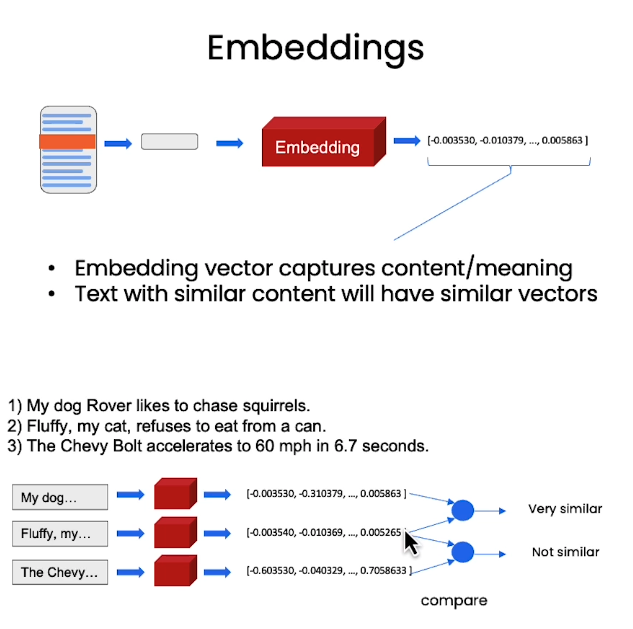

In [2]:
display.Image(b64decode(img_1))

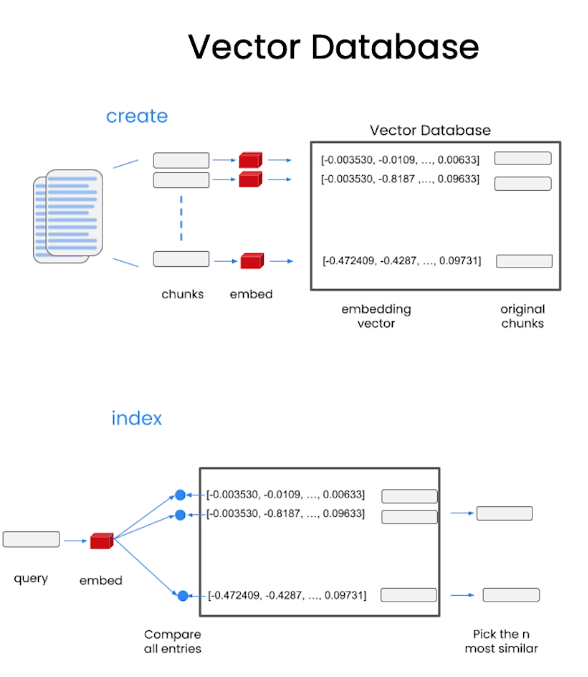

In [3]:
display.Image(b64decode(img_2))

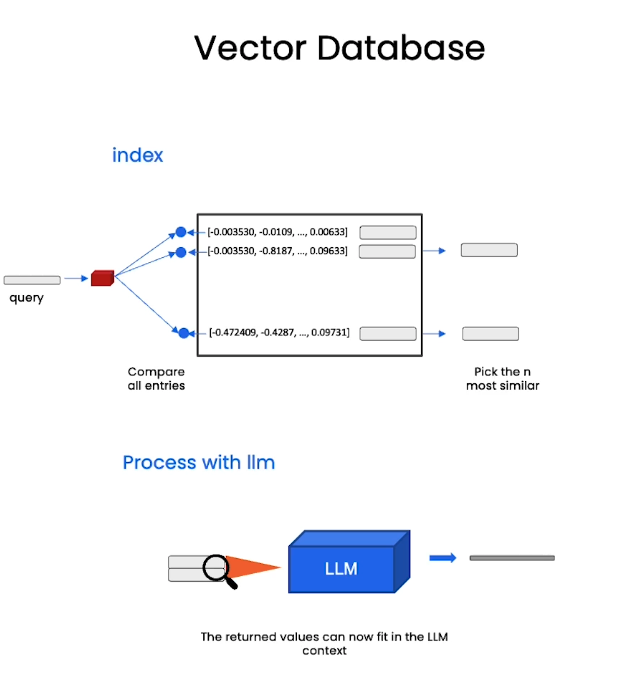

In [4]:
display.Image(b64decode(img_3))

## Coding part

In [5]:
#pip install --upgrade langchain

In [6]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

In [7]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

In [8]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown
from langchain.llms import OpenAI

In [9]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [10]:
from langchain.indexes import VectorstoreIndexCreator

In [11]:
#pip install docarray

In [12]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

In [13]:
query ="Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

**Note**:
- The notebook uses `langchain==0.0.179` and `openai==0.27.7`
- For these library versions, `VectorstoreIndexCreator` uses `text-davinci-003` as the base model, which has been deprecated since 1 January 2024.
- The replacement model, `gpt-3.5-turbo-instruct` will be used instead for the `query`.
- The `response` format might be different than the video because of this replacement model.

In [14]:
llm_replacement_model = OpenAI(temperature=0, 
                               model='gpt-3.5-turbo-instruct')

response = index.query(query, 
                       llm = llm_replacement_model)

In [15]:
display(Markdown(response))



| Name | Description | Sun Protection Rating |
| --- | --- | --- |
| Men's Tropical Plaid Short-Sleeve Shirt | Made of 100% polyester, UPF 50+ rating, wrinkle-resistant, front and back cape venting, two front bellows pockets | SPF 50+, blocks 98% of harmful UV rays |
| Men's Plaid Tropic Shirt, Short-Sleeve | Made of 52% polyester and 48% nylon, UPF 50+ rating, SunSmart technology, wrinkle-free, front and back cape venting, two front bellows pockets | SPF 50+, blocks 98% of harmful UV rays |
| Men's TropicVibe Shirt, Short-Sleeve | Made of 71% nylon and 29% polyester, UPF 50+ rating, front and back cape venting, two front bellows pockets | SPF 50+, blocks 98% of harmful UV rays |
| Sun Shield Shirt | Made of 78% nylon and 22% Lycra Xtra Life fiber, UPF 50+ rating, moisture-wicking, abrasion-resistant, fits over swimsuit | SPF 50+, blocks 98% of harmful UV rays |

## Step By Step

In [16]:
from langchain.document_loaders import CSVLoader
loader = CSVLoader(file_path=file)

In [17]:
docs = loader.load()

In [18]:
docs[0]

Document(page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.", metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 0})

In [19]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

In [20]:
embed = embeddings.embed_query("Hi my name is Harrison")

The number `1536` represents the dimensionality of the embedding vector generated by the `OpenAIEmbeddings` model for the input text "Hi my name is Harrison." This means that the sentence is converted into a vector with 1536 dimensions, which is a dense numerical representation of the text. 

This high-dimensional vector captures various semantic aspects of the input text, allowing the model to perform tasks like similarity searches, clustering, or feeding into other machine learning models. The exact number (1536) depends on the architecture of the underlying model used to generate the embeddings, which, in this case, is likely derived from one of OpenAI's language models that outputs embeddings of this specific size.

In [21]:
print(len(embed))

1536


In [22]:
print(embed[:5])

[-0.0219351164996624, 0.006751196924597025, -0.0182583499699831, -0.03915192559361458, -0.013979244977235794]


In [23]:
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [24]:
query = "Please suggest a shirt with sunblocking"

In [25]:
docs = db.similarity_search(query)

In [26]:
len(docs)

4

In [27]:
docs[0]

Document(page_content=': 255\nname: Sun Shield Shirt by\ndescription: "Block the sun, not the fun – our high-performance sun shirt is guaranteed to protect from harmful UV rays. \n\nSize & Fit: Slightly Fitted: Softly shapes the body. Falls at hip.\n\nFabric & Care: 78% nylon, 22% Lycra Xtra Life fiber. UPF 50+ rated – the highest rated sun protection possible. Handwash, line dry.\n\nAdditional Features: Wicks moisture for quick-drying comfort. Fits comfortably over your favorite swimsuit. Abrasion resistant for season after season of wear. Imported.\n\nSun Protection That Won\'t Wear Off\nOur high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays. This fabric is recommended by The Skin Cancer Foundation as an effective UV protectant.', metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 255})

### Create Q&A in the document

In [28]:
retriever = db.as_retriever()

In [29]:
llm = ChatOpenAI(temperature = 0.0, model=llm_model)

In [30]:
# Combine all documents into a large text
qdocs = "".join([docs[i].page_content for i in range(len(docs))])

In [31]:
response = llm.call_as_llm(f"{qdocs} Question: Please list all your \
shirts with sun protection in a table in markdown and summarize each one.") 


In [32]:
# Sai: this is supposed to show the same table that you see above. I guess the result is different
# because they are using different turbo (gpt-3.5-turbo / gpt-3.5-turbo-instrcut)
display(Markdown(response))

| Name                           | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [33]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)

In [34]:
query =  "Please list all your shirts with sun protection in a table \
in markdown and summarize each one."

In [35]:
response = qa_stuff.run(query)



> Entering new RetrievalQA chain...

> Finished chain.


In [36]:
display(Markdown(response))

| Name                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

# Recap

So, these two things equate to the same result.
And that's part of the interesting stuff about LangChain. You can do it in one line, or you can look at the individual things and break it down into five more detailed ones.The five more detailed ones let you set more specifics about what exactly is going on, but the one-liner is easy to get started. So up to you as to how you'd prefer to go forward.

We can also customize the index when we're creating it. And so if you remember, when we created it by hand, we specified an embedding. And we can specify an embedding here as well. And so this will give us flexibility over how the embeddings themselves are created. And we can also swap out the vector store

`DocArrayInMemorySearch` is a different type of vector store. So there's the same level of customization that you did when you create it by hand that's also available when you create the index here.

In [37]:
response = index.query(query, llm=llm)

In [38]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])


### Why Specify the Embedding?

1. **Embedding Representation**: The embedding specifies how the text data (or documents) should be converted into numerical vectors. These vectors are essential for performing operations like similarity search, clustering, or other vector-based queries. By defining an embedding, you control how the text is represented in the vector space, which directly influences the accuracy and relevance of the search or retrieval tasks.

2. **Custom Embeddings**: You might want to use a specific embedding model that aligns with your data or task requirements. For example, if you're working with technical documents, you might use embeddings trained on technical data. Specifying the embedding allows you to customize this process.

3. **Consistency**: When you specify an embedding, it ensures that both the index creation and any future queries use the same vector space, making the search results consistent and reliable.

### Why Some Examples Only Define the Vectorstore?

In some examples, you might see only the vector store being defined without specifying an embedding explicitly. This can happen when the vector store comes with a default embedding model, or the use case relies on predefined embeddings that are built into the vector store itself. These examples typically rely on simplicity, where the defaults are sufficient for the task at hand.

However, explicitly defining the embedding, as in your code, offers greater flexibility and control over the vectorization process, which can be crucial for tasks requiring domain-specific knowledge or fine-tuned performance.

# Chain type


1. **Stuff Method**: 
    - Simple and cost-effective, it combines all documents into a single prompt sent to the language model for one response. It's straightforward but limited when dealing with large or numerous documents.
    -  Ideal for simple tasks with a small number of documents or when the documents are short and can be easily combined into a single prompt. It’s best suited for scenarios where simplicity and cost-effectiveness are more important than handling large volumes of data.
2. **Map-Reduce**: 
    - Processes document chunks independently, gathers individual responses, and then summarizes them into a final answer. It handles large datasets well and supports parallel processing, though it's more costly and treats documents as independent.
    - Best for processing large datasets or when you need to handle many documents that can be processed independently. It’s particularly useful for tasks that benefit from parallel processing, such as large-scale document summarization or answering questions from a large corpus.
3. **Refine Method**: 
    - Iteratively builds an answer by processing each document sequentially, refining the response with each step. It’s effective for detailed answers but slower and dependent on the sequence of document processing.
    - Ideal for scenarios where each piece of information builds upon the previous one, requiring a coherent and continuous refinement of the answer. This method works well when the information from one document influences the interpretation of subsequent documents.
4. **Map-Rerank**: 
    - Scores each document’s response for relevance, then selects the highest-scoring one. It's fast and allows parallel processing but relies heavily on the model’s scoring accuracy.
    - Useful when you need to prioritize the most relevant information from a large set of documents. It’s suitable for scenarios where you need to ensure the highest relevance in the output, like selecting the best answer or most pertinent information from a large set of potential answers.

Each method has different strengths and trade-offs, making them suitable for various tasks beyond question answering, like summarization.


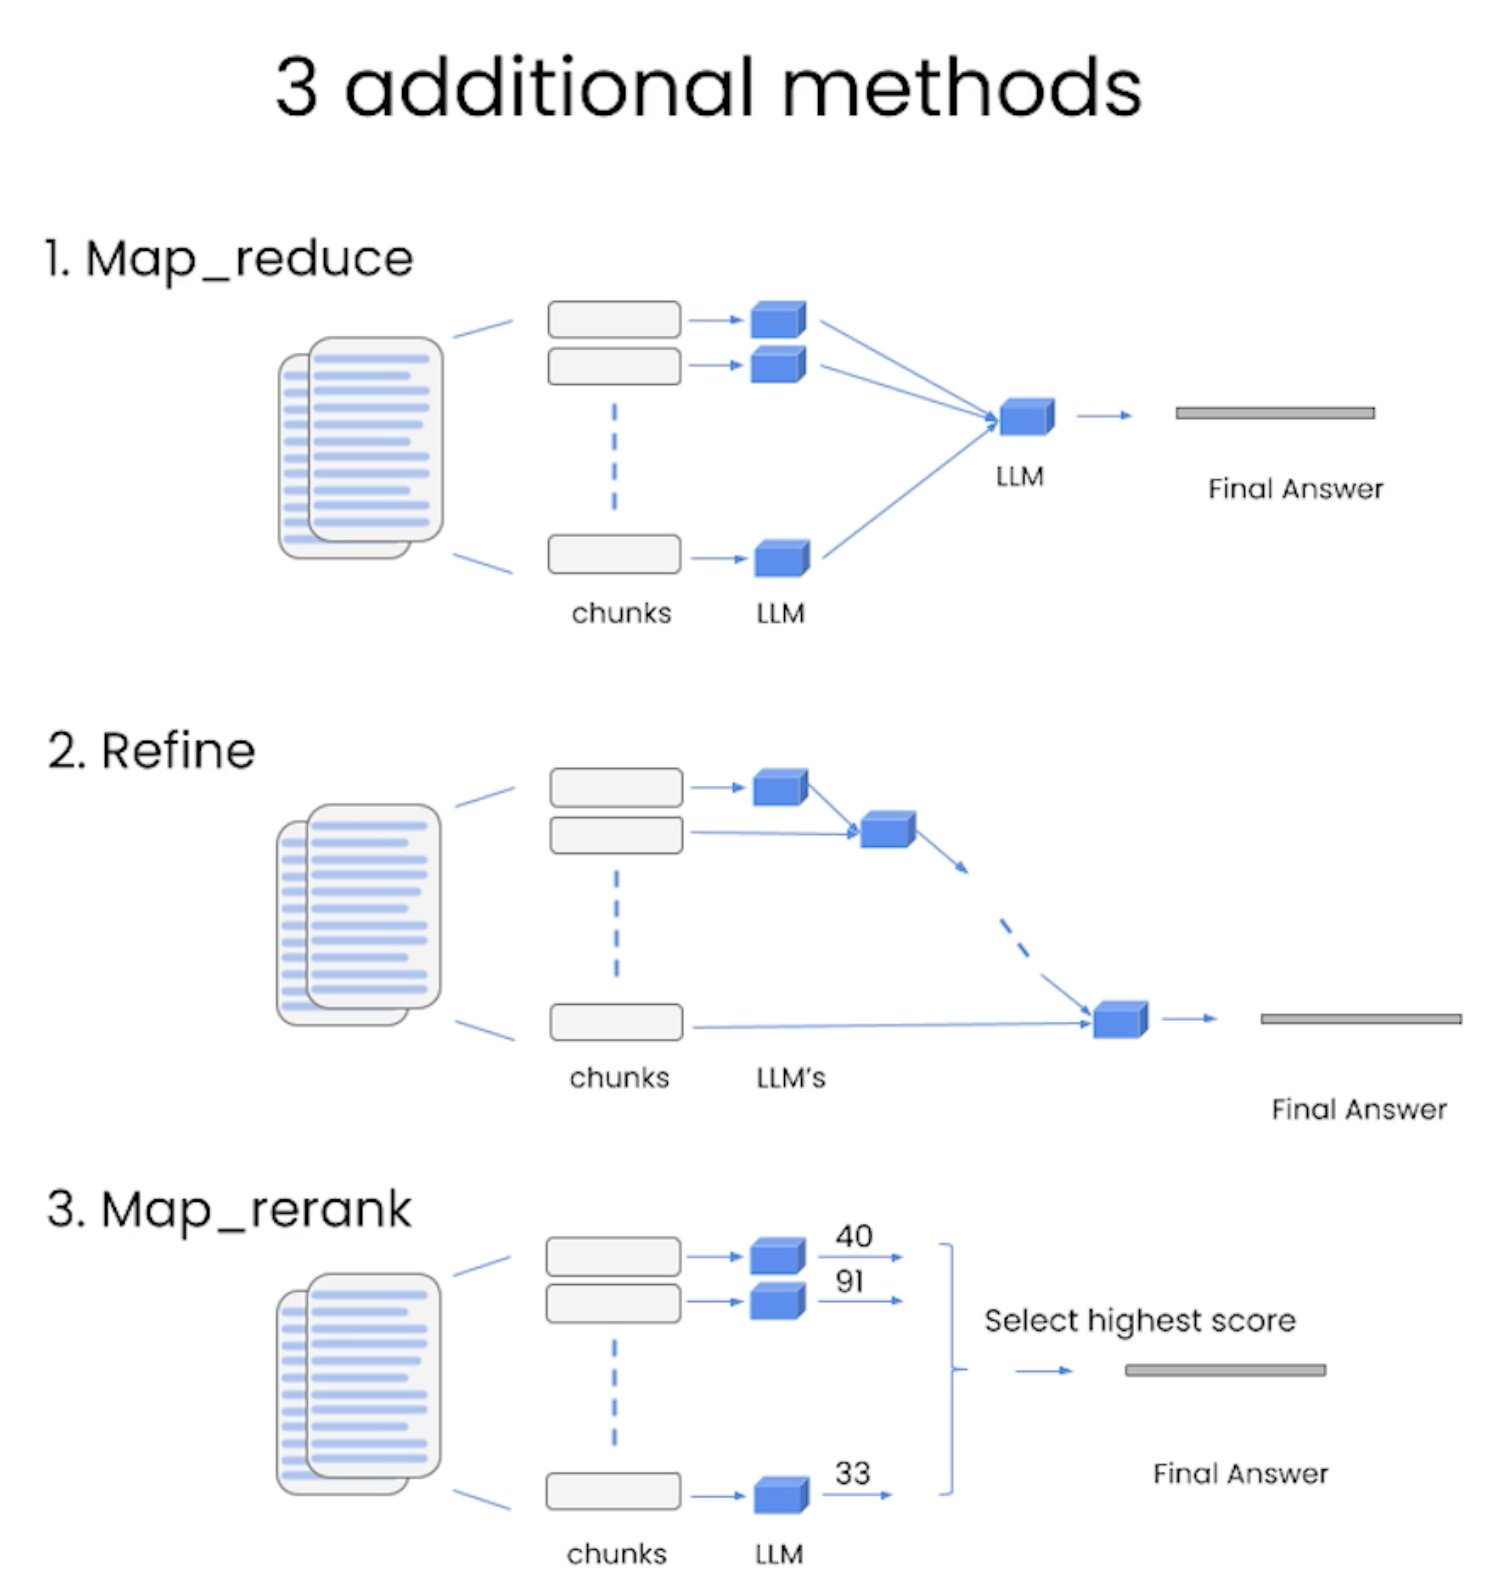

In [39]:
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAABdQAAAY4CAYAAACX30+ZAAAMP2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSIaEEEJASehNEpASQEkILIL0INkISIJQYA0HFji4quHYRARu6KqLYAbEjdhbF3hcLCsq6WLArb1JA133le/N9c+e//5z5z5lzZ+69A4DGCZ5EkoNqApArzpfGhgQwxySnMEldAANkoAlYgM7j50nY0dERAJaB9u/l3Q2AyNurjnKtf/b/16IlEObxAUCiIU4T5PFzIT4AAF7Fl0jzASDKeYsp+RI5hhXoSGGAEC+U4wwlrpLjNCXeo7CJj+VA3AIAWZ3Hk2YAQL8MeWYBPwNq0HshdhYLRGIANJgQ++bmThJAnAqxLbSRQCzXZ6X9oJPxN820QU0eL2MQK+eiKORAUZ4khzft/0zH/y65ObIBH9awqmdKQ2Plc4Z5u5U9KVyO1SHuEadFRkGsDfEHkUBhDzFKzZSFJijtUSN+HgfmDOhB7CzgBYZDbARxsDgnMkLFp6WLgrkQwxWCThXlc+Mh1od4oTAvKE5ls1E6KVblC61Pl3LYKv4cT6rwK/f1QJadwFbpv84UclX6GL0wMz4JYirElgWixEiI6RA75WXHhatsRhVmciIHbKSyWHn8lhDHCsUhAUp9rCBdGhyrsi/JzRuYL7YxU8SNVOF9+Znxocr8YC18niJ+OBfsslDMThjQEeaNiRiYi0AYGKScO9YlFCfEqXQ+SPIDYpVjcaokJ1plj5sLc0LkvDnErnkFcaqxeGI+XJBKfTxdkh8dr4wTL8zihUUr48GXgQjAAYGACWSwpoFJIAuI2noaeuCdsicY8IAUZAAhcFQxAyOSFD1ieI0DheBPiIQgb3BcgKJXCAog/3WQVV4dQbqit0AxIhs8hTgXhIMceC9TjBIPeksETyAj+od3Hqx8GG8OrPL+f88PsN8ZNmQiVIxswCNTY8CSGEQMJIYSg4l2uCHui3vjEfDqD6sLzsI9B+bx3Z7wlNBOeES4Tugg3J4oKpL+FOVo0AH1g1W5SPsxF7g11HTDA3AfqA6VcT3cEDjirtAPG/eDnt0gy1HFLc8K8yftv83gh6ehsqM4U1DKEIo/xfbnkXR7utugijzXP+ZHGWvaYL45gz0/++f8kH0BbMN/tsQWYvuxs9hJ7Dx2BGsATOw41oi1YkfleHB1PVGsrgFvsYp4sqGO6B/+Bp6sPJN5zrXO3c5flH35wqnydzTgTJJMk4oyMvOZbPhFEDK5Yr7TMKaLs4srAPLvi/L19SZG8d1A9Fq/c/P+AMDneH9//+HvXNhxAPZ6wO1/6Dtny4KfDjUAzh3iy6QFSg6XXwjwLaEBd5oBMAEWwBbOxwW4A2/gD4JAGIgC8SAZTIDRZ8J1LgVTwAwwFxSDUrAMrAYVYAPYDLaDXWAfaABHwElwBlwEl8F1cBeunk7wAvSCd+AzgiAkhIYwEAPEFLFCHBAXhIX4IkFIBBKLJCOpSAYiRmTIDGQeUoqsQCqQTUgNshc5hJxEziPtyG3kIdKNvEY+oRiqjuqgxqg1OhxloWw0HI1Hx6MZ6GS0EJ2PLkHL0Wp0J1qPnkQvotfRDvQF2ocBTA3Tw8wwR4yFcbAoLAVLx6TYLKwEK8OqsTqsCT7nq1gH1oN9xIk4A2fijnAFh+IJOB+fjM/CF+MV+Ha8Hm/Br+IP8V78G4FGMCI4ELwIXMIYQgZhCqGYUEbYSjhIOA33UifhHZFI1CPaED3gXkwmZhGnExcT1xF3E08Q24mPiX0kEsmA5EDyIUWReKR8UjFpLWkn6TjpCqmT9IGsRjYlu5CDySlkMbmIXEbeQT5GvkJ+Rv5M0aRYUbwoURQBZRplKWULpYlyidJJ+UzVotpQfajx1CzqXGo5tY56mnqP+kZNTc1czVMtRk2kNketXG2P2jm1h2of1bXV7dU56uPUZepL1Lepn1C/rf6GRqNZ0/xpKbR82hJaDe0U7QHtA51Bd6Jz6QL6bHolvZ5+hf5Sg6JhpcHWmKBRqFGmsV/jkkaPJkXTWpOjydOcpVmpeUjzpmafFkNrhFaUVq7WYq0dWue1urRJ2tbaQdoC7fnam7VPaT9mYAwLBofBZ8xjbGGcZnTqEHVsdLg6WTqlOrt02nR6dbV1XXUTdafqVuoe1e3Qw/Ss9bh6OXpL9fbp3dD7NMR4CHuIcMiiIXVDrgx5rz9U319fqF+iv1v/uv4nA6ZBkEG2wXKDBoP7hrihvWGM4RTD9YanDXuG6gz1HsofWjJ039A7RqiRvVGs0XSjzUatRn3GJsYhxhLjtcanjHtM9Ez8TbJMVpkcM+k2ZZj6mopMV5keN33O1GWymTnMcmYLs9fMyCzUTGa2yazN7LO5jXmCeZH5bvP7FlQLlkW6xSqLZoteS1PL0ZYzLGst71hRrFhWmVZrrM5avbe2sU6yXmDdYN1lo2/DtSm0qbW5Z0uz9bOdbFtte82OaMeyy7ZbZ3fZHrV3s8+0r7S/5IA6uDuIHNY5tA8jDPMcJh5WPeymo7oj27HAsdbxoZOeU4RTkVOD08vhlsNThi8ffnb4N2c35xznLc53R2iPCBtRNKJpxGsXexe+S6XLtZG0kcEjZ49sHPnK1cFV6Lre9ZYbw2202wK3Zrev7h7uUvc6924PS49UjyqPmywdVjRrMeucJ8EzwHO25xHPj17uXvle+7z+8nb0zvbe4d01ymaUcNSWUY99zH14Ppt8OnyZvqm+G307/Mz8eH7Vfo/8LfwF/lv9n7Ht2FnsneyXAc4B0oCDAe85XpyZnBOBWGBIYElgW5B2UEJQRdCDYPPgjODa4N4Qt5DpISdCCaHhoctDb3KNuXxuDbc3zCNsZlhLuHp4XHhF+KMI+whpRNNodHTY6JWj70VaRYojG6JAFDdqZdT9aJvoydGHY4gx0TGVMU9jR8TOiD0bx4ibGLcj7l18QPzS+LsJtgmyhOZEjcRxiTWJ75MCk1YkdYwZPmbmmIvJhsmi5MYUUkpiytaUvrFBY1eP7RznNq543I3xNuOnjj8/wXBCzoSjEzUm8ibuTyWkJqXuSP3Ci+JV8/rSuGlVab18Dn8N/4XAX7BK0C30Ea4QPkv3SV+R3pXhk7EyozvTL7Mss0fEEVWIXmWFZm3Iep8dlb0tuz8nKWd3Ljk3NfeQWFucLW6ZZDJp6qR2iYOkWNIx2Wvy6sm90nDp1jwkb3xeY74O/JFvldnKfpE9LPAtqCz4MCVxyv6pWlPFU1un2U9bNO1ZYXDhb9Px6fzpzTPMZsyd8XAme+amWcistFnNsy1mz5/dOSdkzva51LnZc38vci5aUfR2XtK8pvnG8+fMf/xLyC+1xfRiafHNBd4LNizEF4oWti0auWjtom8lgpILpc6lZaVfFvMXX/h1xK/lv/YvSV/SttR96fplxGXiZTeW+y3fvkJrReGKxytHr6xfxVxVsurt6omrz5e5lm1YQ10jW9NRHlHeuNZy7bK1XyoyK65XBlTurjKqWlT1fp1g3ZX1/uvrNhhvKN3waaNo461NIZvqq62ryzYTNxdsfrolccvZ31i/1Ww13Fq69es28baO7bHbW2o8amp2GO1YWovWymq7d47beXlX4K7GOse6Tbv1dpfuAXtke57vTd17Y1/4vub9rP11B6wOVB1kHCypR+qn1fc2ZDZ0NCY3th8KO9Tc5N108LDT4W1HzI5UHtU9uvQY9dj8Y/3HC4/3nZCc6DmZcfJx88Tmu6fGnLrWEtPSdjr89LkzwWdOnWWfPX7O59yR817nD11gXWi46H6xvtWt9eDvbr8fbHNvq7/kcanxsuflpvZR7ceu+F05eTXw6plr3GsXr0deb7+RcOPWzXE3O24JbnXdzrn96k7Bnc9359wj3Cu5r3m/7IHRg+o/7P7Y3eHecfRh4MPWR3GP7j7mP37xJO/Jl875T2lPy56ZPqvpcuk60h3cffn52OedLyQvPvcU/6n1Z9VL25cH/vL/q7V3TG/nK+mr/teL3xi82fbW9W1zX3Tfg3e57z6/L/lg8GH7R9bHs5+SPj37POUL6Uv5V7uvTd/Cv93rz+3vl/CkPMWvAAYrmp4OwOttANCSAWDA8xl1rPL8pyiI8syqQOA/YeUZUVHcAaiD/+8xPfDv5iYAe7bA4xfU1xgHQDQNgHhPgI4cOVgHzmqKc6W8EOE5YGPM17TcNPBvivLM+UPcP7dAruoKfm7/BXjEfG78AXsQAAAAimVYSWZNTQAqAAAACAAEARoABQAAAAEAAAA+ARsABQAAAAEAAABGASgAAwAAAAEAAgAAh2kABAAAAAEAAABOAAAAAAAAAJAAAAABAAAAkAAAAAEAA5KGAAcAAAASAAAAeKACAAQAAAABAAAF1KADAAQAAAABAAAGOAAAAABBU0NJSQAAAFNjcmVlbnNob3Ty5OcNAAAACXBIWXMAABYlAAAWJQFJUiTwAAAB2GlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4xNTkyPC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjE0OTI8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4K2ISbDAAAABxpRE9UAAAAAgAAAAAAAAMcAAAAKAAAAxwAAAMcAAMms0J1RlsAAEAASURBVHgB7N0HmG1JVT3w698sBhCVIMgjZxAkSB6QMIBkJMOQM6IoKlEcMSBxGDICw5CRYRgySJKcVIKCREdFCSKCOfvv34H1rLnc7r7dfbvnvdervu/0OX1Onaq9V+0Ke1Wdut/yv2th1lAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCGyIwLeUUN8Qnz4sAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiMCFQQr2GUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRWAJBEqoLwFSoxSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEooV4bKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIrAEAiXUlwCpUYpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAiUUK8NFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAEVgCgRLqS4DUKEWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUARKqNcGikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCCyBQAn1JUBqlCJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAIl1GsDRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBJZAoIT6EiA1ShEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIES6rWBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAksgUEJ9CZAapQgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikAJ9dpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSUQKKG+BEiNUgSKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaCEem2gCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKwBIIlFBfAqRGKQJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlBCvTZQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFYAkESqgvAVKjFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESihXhsoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEisAQCJdSXAKlRikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCJRQrw0UgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARWAKBEupLgNQoRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBEqo1waKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAILIFACfUlQGqUIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAiXUawNFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAElkCghPoSIDVKESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgRLqtYEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCSyBQQn0JkBqlCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQAn12kARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBJRAoob4ESI1SBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoIR6baAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIrAEgiUUF8CpEYpAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUEK9NlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkVgCQRKqC8BUqMUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKKFeGygCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSKwBAIl1JcAqVGKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIlFCvDRSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBFYAoES6kuA1ChFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAESqjXBopAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgsgUAJ9SVAapQiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCJdRrA0WgCBSBIlAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASWQKCE+hIgNUoRKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBEuq1gSJQBIpAESgCRaAIFIEiUASKQBEoAkWgCBSBIlAEikARKAJLIFBCfQmQGqUIFIEiUASKQBEoAkWgCBSBIlAEikARKAJFoAgUgSJQBIpACfXaQBEoAkWgCBzxCPzv//7v7Fu+5VuOeD2r4NcRaHnXEg5nBNjvotA2bBEqvVcEikAR2B4CbWu3h1vfKgJFoAgUga8jUEK9llAEikARKAJFoAgUgSJQBIpAESgCRaAIFIEiUASKQBEoAkVgCQRKqC8BUqMUgSJQBIpAETjSEOgq7iOtRKtPESgCRaAIFIEiUASKQBEoAkWgCOwFAiXU9wLl5lEEikARKAJFYIcI5NPkbvtwWiCLy2nx6H9FoAgUgf2EQPuA/VTa1bUIFIEiUASKwKGDQAn1Q6csKkkRKAJFoAgUgXURCGkgwm6Q6tJPHtLfjTzWVW4HD0aZJXO46rEDCPpqESgCRWDfIpA+AACHS7+1bwuriheBIlAEikAROIIQKKF+BBVmVSkCRaAIFIEisB0EEBL/8z//M/uv//qv6fVv/dZvnf2///f/pmM76e3FO2SeJ0/cowNdPKMDXebj7YV8zaMIFIEiUASKQBEoAkWgCBSBIlAEjkwESqgfmeVarYrAYYnAuMpovB6VQYyVHBsR6fU8ArEdZ8e8vYz/j9fz6Ryq/0evUb7oSZ+t6uTdf/mXf5mOf/u3f5uS/a7v+q7Z93zP98y++7u/e0pvq2mOsu3WdXSWfiYD/vM//3P2z//8zzN6fNu3fduMHmc4wxmma+T6oajHbuHTdA9PBNi14Dza+Hi9nXp+eKJRqYvA8gikzqz3RuvNesjsv/sb2UrGCTnvP3SqcREoAkWgCCyLQAn1ZZFqvCJQBLaMwEgAbPZyBrfOyDHn+WBwm1Wzywx0t5L/fF79//BEIHb03//935MdZaUybdhMbCjXOR8u2tLHQb/5OkIXq7EXrchery4krb/927+dffnLX5794z/+4wTF933f981+6Id+aHbmM595IqOleaiF6EQHq9L/9V//dfZP//RPM7rQ4zu+4ztmZzzjGWc/8iM/Mk0M+D/lnXcPNZ0qz/5DYLRF1460X67HEPtNPR+f9boIHEoIjHYduRbdy7Odnhf1jakv8h2/VnK/Yf8iwB4y9nEeQ3yMTMDHVryTkHv5v+ciUASKQBHYvwiUUN+/ZV/Ni8Ahg4CB6r//+79Pq0qRYlaXOpBkcYSsNkWIWW36vd/7vbPv/M7vnIi+Q0aJCnJIIICIYkNf/OIXZ3//938/+9rXvnZwEgYJZdX1D/7gD86+//u/f4Y0do/jdKgH9cCBMP7qV786+5u/+ZtJT/LTmYP3Az/wAxOBTD8ry9WXjQJH8gtf+MLsU5/61Oyzn/3s7K/+6q+meicfK7vPcY5zzM5znvPMLnShC83OcpazHHI4kZPuVtf/3d/93ewv//IvZ5/+9KcnnZDq7ODsZz/77NKXvvTs3Oc+9+xHf/RHp/IPsb4RNn1WBE4PBNi0LyzUS20X2w7ho67niwuTRGc605kOuTp5emDWPA9NBNjyXhKP+vuvfOUrU7+v7dc3hETX5usf9WPGAN/+7d9+aIJWqfYEAf6FdvZzn/vcZDPshL1qa/kXxocm440RjaUOhzHingDXTIpAESgCReCbECih/k2Q9EYRKAK7gUCcK2fbMuTg9BjEGtwiC//hH/5hOlth+h//8R+TU4RMR6BzhJAICEPX7iEZPOcgOfu/Yf8iwGY41n/2Z382+8xnPjMdsR9k1A//8A/PDhw4MJHFZz3rWSfS+XCwGXVEXfnSl740Ecfvf//7J0eQs8c5FJDfiONznetcUz3hDC4KcRxNYn384x+fvfnNb579yZ/8yUSsj5NY5z//+WcXv/jFZ9e61rVmF77whaf6xrHcS5JkkfzjPbpbWa+8P/ShD83ggoyEE1JdWV/lKleZXeEKV5j9+I//+EyZw6UO8ohir08PBNRDYaxP6rnJoY985COzP//zP5/99V//9WSr7FUfh+Q529nONtVHdf1Qq4+nB47N89BEIGO+vZLuL/7iL6b+Xl+AWFev9O3qDZL0nOc85+ySl7zkNH7UbzbsTwTYJf9CO/uud71r9olPfGKaqNT2mogx8W4M5TBe4G8cDmPE/Vma1boIFIEicPojUEL99C+DSlAE9hUCSEEEmAPhZQUeYi97OCPVc8wT6lanW2Xk4BA5EOu2pUCUIhv837B/ETAxY3X6H//xH8/e+c53zl7zmtdMzjSniJ0gnS9xiUtMhNR5z3veyZE6HFarqTfqgxVVyLbnPve5E7FuBba6hFhGfF/2spedXeQiF5lWZtuyJWEkN6Slzpl4+MAHPjB7xSteMfvwhz88++QnPzlFT9zzne98E1Y3uclNZpe5zGUm/ExKHCrOJTm1FYjHN7zhDZNzzEHmFJsYoKeyVe43vvGNZ0cfffREqCAkDxUdUj497z8E2K8wEupsFon+lre8ZfaOd7xj9ra3vW2yXysmxUMKmuQySWSCiB2P7+8/FKtxEfg6An/6p386TaiefPLJM+S6MaH+ysILk6gXu9jFZje84Q0nwtRYsmH/IaDNRZwb+3z+85+fPetZz5rGDsZRxlfaXpPvl7vc5aaxj/Eigt2ijIYiUASKQBEoAosQKKG+CJXeKwJFYKUIhAxE4iE8szXDxz72sWn7CgNZh+eIwRxIMYNfpAFiLKvUkeb5H6l+gQtcYHbRi150GvgiET03AO4q1JUW42GRmJVHtkN53/veN/v93//92Ute8pLJFky2cLCRzVe60pWmbUBcs5XNtkY5FBT3RYf6gSj44Ac/ODvuuOOm1eXsnXPIUUR8X/nKV55d6lKXOri6apHs+eFOOL33ve+dvfzlL5999KMfnbZ8SZ1RZzmSSAjpXv7yl5/92I/92DQ5sRle6qz3Ha4dQghE9Vn93GkdlZ5tMayuf+YznzkRkKeeeurBFb2eO8hxnetcZ3a9611vdu1rX3tmoqBE5CLL6L29RCD1YSTE9Xls+JRTTpm98Y1vnA7kH0JQfH0dwoctX/GKV5zsOHV2L2VvXkVgMwS0+/qafPXEftm6g806tMOraotNor/97W+fPec5z5m+WPI1ozGjsaJxon7/Hve4x8xE+npfb22mU58f3ghkPGARgsUJj3/842cvfelLp1XobNV2euzEhOVP/uRPTuNFK9XZUEMRKAJFoAgUgUUIlFBfhErvFYEisGUE4iwtehFBbisXn1haPewTS6Tgq171qumed7w/hvn/PRuJh/H/a1zjGhPBcMELXnB2YG2LB59pIiE6CB4R3R/X7Mwqo/e85z0ToX7SSSdNTj2nnVP9Ez/xExOpipTy+bdPwTcjiE8P5ObrkwknK6+RbX/4h384O/7446ctTlInrMSzAhuhbjU50gAhvigg5hHR9k038fDa1752ZnUfgj1YyE89sn86Ehqh7hpJIa+EeTn9zzH1vnrvnImx1OlxYiz5Jb2tnKVnMoEOD3vYw2Z/9Ed/NLUjIVFC7JPBat6rXvWqs9vf/vbTyjNkfrDbSp6NWwRWhUDqw2iH6oqtql70ohfN3vSmN01fXYzPEepXu9rVZje96U1nRx111NTHlVBfVYk0nVUhwLZNZOZ3AFwnZDJVO+3Qn6zCho0pfdFx4oknThPEY71xfc1rXnN27LHHTl+n+eKjYf8hYEygjUWo+80YCxO0tbEVdmtBAjJdO+trRmOpnYxT9h/K1bgIFIEisL8QKKG+v8q72haBPUPAwNTgFalm8GpVOsLLHsf+R3r6MURk104D4hCZbrWuMwLQINg2H5w3ZGrDkY8Am8sK9RDqL3vZyyaClx34IT/OEmIVQcxZMvFyODhLIahHQt2KvAQr7a973eseJNR9quwz5kUB4W2rFCu0bJFihZa91E12hdhQd22Voj7d7GY3m1ZtSRMREbzgnRCH1Hu+QrGHrfQQKvLyHKmCzLflirSkb0Jju0H+0ofDYx7zmEkX/6vvox7yRT5qF25wgxtMEwOrWhW5Xdn7XhFYhACyx0SXOukLGytux2BSywSyr0a0Y9q12PoYr9dF4PREQD+gz7KNmLFeflyXrSLQ9bvaf2M2X46toj020YxQtx2aL67mA0L9kY985NT+2zawYf8hwC6NB2w3afzzhCc8YSLURyRsm2fBhcUJvtAroT6i0+siUASKQBGYR6CE+jwi/b8IFIGVIBDyzKp0BAHSyz7Hr3/960+TPkcqBBhnC/HmnGv/GwTnCFGfgbGzIJ5ntnO4293uNhGAyAeOm1VQDUc+AsofoW5vzBDqv/d7vzcR6r5WOLD29YKVylYfcZrsRXw4bfliciqE+hOf+MSpTqVU6XH9619/cgKtwveDhesR6uqmtDiV7373u2cveMELZrZf4mAKqWNnOctZpk+eb3vb2071CREuHyRe4jmrewkIQavGTaBJE5liAk0c+SJWfBngk2oTYVa8bzekvP0I3fOe97xJF9dkkJe2gay+TECkI9Q5yT7h1uY0FIFDDQG26zcBTAQi1N/61reeRkQ/Duy3Em50oxtNdSh952ki9Z8isEcIaIPH9j/Zan99UWVCyO9z6APYtnGdPgSZ7kevjddMruqfPdtJsGDjD/7gD2YnnHDC9Dsj82mVUJ9HZP/9z17ZIXu0Qn0RoW58aNsXZ4Q6+8wigv2HWDUuAkWgCBSBzRAoob4ZQn1eBIrAthCwShWx9ulPf3rakuGVr3zltNULgn0MVrye4xznmIg1+1pyrKxg4nQhCzhrVtRmf3VOmrSlgxC056GAODNQ9j4nzQo+RKBVyVYj7dRZG2Xu9aGJQAjWEuobE+pwCuGB7Hj1q189bSNj2xd1DumtXlnN77NnZHS2x1HPQqAsIlPUVfhL1wQagtskgHcyCZa6eWBtgsMKxe0G+WsPssWPPK1MtHUNGUyumFSw1zTn+NKXvvS0B7U82x5sF/W+t5sIqJcIdROBJdR3E+mmvQoEFvUB0mXHvkzy+xx+C8DkqvZYP6APMeYzwalttkWZRQ87bZNLqK+iRI/sNNhrCfUju4yrXREoAkVgrxEoob7XiDe/IrBPEEB2+wFFK4Z8hms/WKR4goGtYBX55S53uekHD5HfVoIg1LOvJgfMANjnw97npCH77DOLrPODhJ6HUOfICba/uPOd7zztl+nHFK1SFafhyEWATXWF+pWnfeI3WqHOAmClrlil9aEPfWgiotUnBLXV6+oaQt2nz87q0Eimr2dF6ilC29ZO9q/3Gb66OoY73OEOs3vd617Tyi91fidBfvbNtyI+bYJrMph4Q9oj07UzMEGmm6zLpMBO8u67RWDVCJRQXzWiTW83EdCPLGpL2bG+2NdPr3jFK6YvxrTHAvLcqt8b3/jGs6tf/erTamD3dvrVUAn13SzpIyNt9lpC/cgoy2pRBIpAEThUECihfqiUROUoAkcQAgatyHTbvDz1qU+dPvtFfHG8rELibIkjWKV085vffNp+A2mHUBcnq5XirFnd6uCk+VzzAx/4wOwd73jHtLo2K5+SpnR9Gm+PWZ/5WgFl+wqkesORi4DyL6H+zYQ6XFKPxtJXn9RLK9LVVytjbfvivn1t7R2K+PDliAkuYVE6Y5rSszrcD8SdcsopUz1F1I9hlYQ63bQnJgBM4pkgoIMvWLQl6j0dnG0v0y0yxpLo9aGGALKnW74caqVSedZDYL2+JYS6H3zUD7zzne+cJjil48euL3KRi0xfP9law6RtFlCsl88y90uoL4PS/o7DXkuo728bqPZFoAgUgVUjUEJ91Yg2vSKwzxGwuhWp6UcOkd72NrYVg4CMQ2id8YxnnPYxRnpbPeqwNQPCa6NVsAbDWaWOAJTH+973vungTElbHpw5JOCBtdWpd7zjHWdHH3307JznPOeOfgBxnxfrYaE++yihflpCHSbCIiLcMwcC3Y+IIqF9/eGe+mM1d37Y1wTXojTmDSOEuvqISLFSXT0dwyoJdelGBysgye8wSWD7Jz96SgfnTqiNpdDrQxGBEuqHYqlUpvUQ0PYu6hdCqL/4xS+e+gGLH7JC3W9nXPSiF51+z8KWLwj1rlBfD+HeXyUC7LWE+ioRbVpFoAgUgSJQQr02UASKwEoRsG+6VaK2evCDh/aBRX4nIMz9MCRHyurxC17wgtN+mlaThhBP3EVn5N+4IvUTn/jEzP7sz3rWs6ZV7QbM9nEWT3jgAx84u+UtbzmttrWX+iLnb1E+vXf4IaDsS6gvT6iPJYwId6hbgrqoTjqE9YiT6eHwRxpf+MIXpvqvXiLU7Z87BoT6ve9972nluJXwqwpk5yyr/65NAkSP8auXVeXXdIrAqhEoob5qRJvebiIw9guuBWMs7a+++CUveclEqPtx0hDq9k9HqBsD5iihvpul1LSDABvda0J9rCORo+ciUASKQBE4chAooX7klGU1KQKHBAL2Lvbjhq95zWum7Vj8YKBV6wlWiVo1/lM/9VPTNi8INT9MygnLNi+Ju+hscOpAmNs7GXn/trU92k8++eTZJz/5ydmXvvSl6Zk4wn3uc5/ZzW52s4m4t+LWqtX9Sqrv1sB+O+l6x7FMmS+yg/l7Sc8e+2zwve997zSZ48f9EKzK3RcLJnN8EXHZy152sj/7aYc0nk9zO/+TQ9iJjUWX5A8jOqhHp679wKfJqic+8YnTlkqJQ4/rX//606q/n/iJ//tR0vXkcV8dSr1z7Rjjz5PQ47PkO38mJ0LdCnU/dqoc/M7BGG5/+9sfJNR3soc6eUaco5NzZB11GOOO8ix7nTR3ms5G+SUPcVaVTyZJYLFemmO+8/Kt9858vGX/j90l3d3MW14C3bcSRplck3WUN+lKM/cXxRnvjXHXk6WE+nrIbO1+yi9ls7W3F8eW5rwtLI65+rvL5r2s3uKx4Y3ahK1qMeYtbQS6PdSNzd71rnedhlC35UvIdNu+bGXLlzGfUcbTY8sXsji22r6Mch+q18E58q2yLiXNvT7TSX+Y7eGe8IQnzGxLNAbjQzbpfLGLXWya+F92jCj91Ctpug6ObORItJMRu14XgSJQBPYjAiXU92OpV+cisIsIIPysSjVI9WNUY7Ba1PYLD3rQg6ZtWHz6iwgcfyw0g89lBu9+QNE2FfZq9+OnVsN/5CMfGbOcyPsb3OAG08D4bGc72+wMZzjDYTWohUcG6VEsGOV/Z3htNmD3XnBdlEbSSbpj/NxbdF423viudyIDp8MR2cZ47s0f43PXScc5hPp73vOe6Ydw95JQjxyjfPSKjIueKzP6jY6WeGNcz3aLUCdb8k6ei8phUuIbf+afey/lF0JdnUSo25JpnlCf3/Il+Y55jNfz+eWZ98ZnG6Uzxsv7Wz0n/Y3SEmc85JH3kp/3k0awz/9jXPfyf54nja2c5wn1pLleGuNz+Sbv1NPxues8H+PSK/fn84mt5PmY3nxc/yfeomeb3Uv9I498cuT+mHfkH/PLdZ7Jzzved55/7v/x+TwOib+e3IcboT7iN+oUPT1PnNj6GG/EKvcT3//SmT8Sb6Nz0ogc68UVb14G/+e9RefIs16aq7o/yhF7m7cneUWH6CHuKOOoQ67z3qL0tiO/vBPkQQZ9cQh1XyuOK9RHQh2xboX6KMuo+5iu6/m88nwVhLq0Fx3yGLEbZfXM/4dSGHVQFvNhXpdF8o84e398Zz693fx/1CXXY36Ry3m+XMZ4rr0fQt2PlyPUbUs0hlUS6vKSZ2Qjn3upo5EpccQb9Rn/H2XsdREoAkWgCBw6CJRQP3TKopIUgSMCgc985jPTj4W+7GUvm1apj0pZhXRgbZXwwx/+8OnHSK1Mn98z3cBSyKByfH/+GnnHabOljFXxz33ucydSfYznB0+vc53rzC5xiUtM+7ZbpY7YPxwCLAy8kSx0DTbuuXZkwG2gbhU2x3Qeu8Qbdc77OXs2OiPuC0l/+mfFf6JbthsZ5U6+ZFJe7MR5lJE4o/z+Pz0Jdfkn0C36xakaHanoqswc0S3vz59XTahLP9jlTN7gnnPiOc9j755AL/J5zlZ9lYLc8JWK31GY/1HSY445Zlqhfu5zn3v68VP5xt6+nuL/kSaRI2fPxfV/QuTPs/G+a3HXkz1xlzlHxjHv8b3IAQNH9MrZc3LkUOY53JsPyc/99fKcf2e9/8e0yCMkTedcu5+44z3vKGdfSeT96CUe+emS69j0mIa0F4Xkt+iZe8uksd674/3ooL1hr5Ff/pF/LI+Uk/Mog/jBYNEzOAmeCd4d359urvOH3RxOP0oKh2ARHaOvs2d0gsU4cU79vKssYAZXR/ATJ+VhhajrYOpZgneSd+7lvNkzeaW+uiaTdwRpyi/5kp9dr5dX8lzVObiSYZRpTN99co960IeMkX+8pgsdguNmumyEX+QQZ4wnTXXsa1/72uylL33p7FWvetVpfpR03EMdeXn5y19++kqMTJEr6Y065F7ydR7vrYJQH7HMdWyCbMELhmwyMuf+KNvpdQ0TMseu09aRcdFBj2VXYO+1TvO60CsHWaJP2onN+h3pKVcr1HeDUJ/HR34JZPW/PlTZCNEl8ca6qb1xjHaXtBJfmg1FoAgUgSJw+iJQQv30xb+5F4EjDgGE+jvf+c4ZQv11r3vd7MxnPvP0A4cGimc961ln5zvf+Wa3vvWtZ5e5zGWm1eIGwtsNBqMcty9+8Yuzz372s7Pjjz9++rx4TM/qdNvLXPrSl54+3STDTvIc017ltQEyfRL8b9CdH2G1H6lrB53FNZiOY2crHT+86AdfTVy4n0G3NMeBd/KSlh9vTLw4hwbxMBoH9JFrp+fkzamRP72Q4I4QK9FN/iYI6GbyxdcF+TR83smIDqcXoS7/8fD1BGzJ4+x/5UlvgfycWHr5AVA60s29lNV4hs0qt3xJObKlOHhkk2eO2AOZ4uhFJu8rJ4dytPqQzUgDof6hD31o9sY3vnEi1m3FNAb1/253u9s0waV9kEbKL/H8Ly8yyDu2OF93xfM+bGHkSFrO3vfuqEPy2M45cnlXvgmRAZ7KnF27ho2DfN5lz6mfvs5J2Y8rNEeMk/6ie3m22VmZOMiQI+mRCT6pV+6PB70cdGDDSDL6OWAtPfHTDtFJPWXXrqUrpCySdmR2f7Pgne0EaY8H+dmpsnFm99EhNuZM7vyIbcoqdseeIo+0XQfbpAUTwTPp5ZCG9yOT6/ng3cOBUI8OMGXn/heCCV3VOWc4RHdx2JN4aXvYlENaysT91FtlkfJQJg54ei4daS/CUT5C5Ml1zt5VXvK0dZz8tdOpq+JJV/knf3XV77CoL2O+rncjBNOkn/+TF7ujA7nZsyPtjft0pAO80o/ShR6p755LfzyS/rJneSkzZzJK0zVcfaX4+te/fvo9HfIJvhS80IUuNG2pYRxobKb/g+uiQDbPEid4iBsbcG87hDp5HdJxTtuWNoJ90AXWZHCwa+0bW0g7wb4Tgmn+361zZJe+65zVoYw5yE8n5RMdgyebGG3b/ykDceixlyHlIO/oljYi5UIfNq5MxEs7Qw/9jvJwnbYn8osrSFdZ7iWhnjy17fRRL9iXMkq9IRMZ2bhjrK/0os9oV9IU9rqMpkz7pwgUgSJQBE6DQAn108DRf4pAEdgJAgZ5p65t+WKbh5NOOmki1C55yUtODpRB4oEDByZC3T7Wrt0bHZHt5v2Vr3xl2kv9UY961Dfth3j00UfPrnGNa8zsK43MtzpqFXluV9a8B6sM8t3j7MQhdW2AzXEw8Db4N2lgIJ7BuOf0iBOBSLcfNWeVo+e+IA9OknPyTF5f/epXp3Q9y3NxlQunxMHxjpM1JbjFPxn4OzvITU9OX3SzbY8fs42TIQ5HgRPB+T/Tmc40lVsmZ9wnk0M8R9LneNlDfS+3fIleHCayO9gkvb785S9PZ/97noMOykh5meRRZiHX6aU8lK/DdTBTv1axh3qKEV7kHIkk+QnkICf8yQrnPIvOHELlpvzISvf8joJtmD784Q/PPv3pTye76XyjG91odrvb3W52znOec9oCKo6+NAV5uJYfGUZ7RA5FBnHFCzYIG/qQQZqC99kwbDnbwXN6uI0/8ot8ytL/Djhw9smgzD//+c9P1+RB1sFXPHI46GT7q9RXdk5WBxlj16OIo97j/c2u5R2SxdkhLQesIkvqVTAiL2y9T4+0F/bIV8YhIMmKAGAjfhNDO3SWs5xlmkzVLslHeSR98ROC30a6bfQs6cyf5eegX+olG2Xr2lP1kT7RgfwOMmpn1El2r6y0g+wOLs4OgezyCLbKng2MdsHmHLCRvne94104zOvm3cOBUKcDWWGqT/L/qBc7ZtP0hh9dg5f32FXqq99BMQmnXNQVtqYcYpfKw5dl7MoBT8+Vbcpkvvzzvzxh7Jz8vcemlT0bYM9koIv/laegrNiv/Nkzm1BftSeeyTtH8tuNM7kTyB6c6cDe0tewbdjRy9lzuCsDdkwXbQ49lA0d0t7kTJ/NwigPbOWlD2AHyla65FS+FlW85S1vmbYBJJegDI3FEOm+HLz4xS9+sEyj22gv0mJD5GYTngkpTzK4t1VCPe9ru8ktn4y1tN/a8Uz0wFL9lT/7I4uxJLuAK3uEHVliG5OQu/QnsudMdof/2bDfEkqZsA9lxK7FEehhzKEs2ISDHnCmA3twuHbsViCvIA+yKYdRJ3IrA/ooj+jCluANa7ZMfn2Puqrddk95SZdtxK6lLR/lvJsr1OUTPejExlIv5U0fY3p1RLl4TlZlknqqzvqfXvRhY8qEPupJdHNuKAJFoAgUgdMPgRLqpx/2zbkIHFEIGDwKnDoDVSvGOSUGhAbvBr4GihxjToj77q1iMMgR5hAj1F/4wheeBlc/1IhQ57xx4jjEGVyfJuIe/wOvUXcOG+fBIJuDb9DNMeIwcyjoaOCdIwNqGHLwDbgNwDMIhzVnieN39rOffSqD6C0v5fTRj3502nve+5wPJIdrTgmy0+FdaW83xKmgG53o5qBPyJM4fvJ3cHjiLLAdhACZ6Mbhiw3FGWRLdIOJfNjdXhHq8uQUcfbYPVzppewy+eG5g2MVx51jRBfl5IB/nCf1IwedYQEXZX/qigh15QJn9cZqcgQpZ1X5Cxw8jin7MSnGFsb6Sg+2qUyl4csU5Qh/h/Q+/vGPT/KKExIEXpe61KVmV73qVQ+SYynz2BjZpC8/5AXi4hznOMe0op1MsePImfzgj4zkuDrIw9E+//nPP9X9c53rXAeJm+S13bOyiKPP3lJf4SZfz+DjUPZ0pJcyZ8+cY2dl7p6DjXOetVFsnOw7DfJki+SzNZayQl6yPzhqC9RxxBaM5es+/JQh3dRXacSmQ+DRVTkp27EdSlukrEJw0OXA2iSq/8VP20c+R/5fpO9GzxbFd08ZkJOuyIsQMWwl9ZKOypEe8KCDg/zqZMoqbSk7VB9gJKg/8IPt5z73udnHPvaxCTNpKG9lz/bOvba1kTJVtnCIPjlPiX3jDzwPB0Kd3uza7yPQW7vnHtvRZiln9qTd+LEf+7HpPpyVh4MdKgf4e9ehzFIm0kkdkR7clItDuw9L5eDs/81C2iu2wK7lr9yUkbqqP2IbdCKnQAbtj0M9TVvtmm1rT9iD++xnNwP54QsnYwQ6pD6Se2xr/E8H9qmu6Vu067FnWNLJPfilr6GH/pbeGwX1NYENa3c/9alPTb9fQz5pwEP+tvzyuzbqR3CVtzZHvWAbbCTv0FFQh+jsHWUijrEcvOkjkCPjIHpuhVBnU9LVLqhv5Iabs3tsYrRHctCJTZI1bVvswv/aB/pIW5zdDNGdzGRlz+zCtXrlUJcc9ICrNgmmAvmUQ+pUrmPbcNZm6aPYCXx3O7BhsrIV/Y4xFf2UU9ps1+LRh+0pE/KRH+7kpdPYNtAlbQTc2KW6z25XvYd6MII17EOc04cO9MnYl6500QYqF/qQXz1VPq7pxbZST9UbutBZHVnUh0SGnotAESgCRWBvECihvjc4N5cicMQjYKDqMNA1aOSAZJBo0GdAbhDoyEqL+cGg9+fvbQRc8uQEcSge/ehHf9MPDN3kJjeZXeta15pIQQ6cwehmDuNGea7qGdkFDiHMOEIG3xzTEJEcJDgadBuccwQccM378KKPAThHM4QQp9ln1Re+8IWnMwfD4JwDYgCP1PAjrk9/+tOn+wbx7nOoDqwRX0jUi13sYrMLXOACBwmkrehOvsjKcaAL0tV+2p/4xCcmx5WDQT/601HwHkyiH3npFceO7SAyTI44XHNkPac7hwsBiFCn3278KCnZHGRXLnTjlCOmOWnyJ4dn4sSRDR70U2ZxztUJ9UP5cP4ueMELTuV23vOed/pf2QjSQYpaoX7cccdNP8Y7PVj7Iw7C4cpXvvL0NQZb53wFx/l65b70kGG2ZkF6mASDo0B2aVz0ohedfkDYj8jBN461d5Ufvb0Lb3ojI+hHf04ru2ZX3osMbFG5cXyVrfL3jhBspQ8f9uiLFhNibJJOsEta0lb/bSuDULHdFHsjm/tsGXl/uctdbloJqV4EzynDJf+Qi4zKUJ7ILE6yfGGo3BEAnpNdHGfl70idpS+96ADP/O+s7GFuxSa5EZKp16POS4o8RSO3doXd+FrAwX7kLU1yItN/+qd/eiJ/kSh0UHb0Ul8d9IWrslK22nh4OJSteuqQLv3oo3xDPLLl/I4FO/dcfPJtFlLWG8WL3cCajGwxOvtCQh1NmTiLk7qpnOjgSJmEsCAnmznPec4zlQuCnO0qF/Glo+y1aba20AaoQ9Jmg2zvspe97NSOei/2u54u7ORwINS1D2ziTW9607QCmcz0VabIz7Qd+iB9iKAt8FsnJnIR8doKtpa2EpbKIuOGlAeskWWxLfUElvo2fYCyST2RT+wlNiFdeSCy1NdMAiDu5OV5jtRV6cg/tix9NhF7QELbroQM9E1bJu/kL42dBviQKUSccQ4d1OO0rzATT1AudE29ooN67lA29FH/og/82DQM9aMmQrSP9FykR9J1jq7K1FeJfjNDXfM+rOR56toEsHaSDmnjlaM46pX23UEushoHSNv79FJX2Y32/wEPeMAka/oo8SKPd9cj1MlJFuPAhz3sYZPNyJ9cxiTvf//7p/HjOEEReyBDbCLpkNX7Djgqe4SndltdN8akW9o4ea8q0DcywYYNGMv5EXBtkD5I+ZOf3A7x2Id30w/FlsmYwz1y63eMQdRd9mCiha70HnUJ9ovsZFl92UTqoPZAu619oAvbYfcpC2e6O7wjKPe0C8GbHspDH0oHumiP6CAueeGkLiHUX/SiF51G3J38KGnqq7ZQHupDxvTsWNk42DkdlA+9vEcusquncIY3+2Lv+g19qHFYxuTqMX1gsJMyOI3y/acIFIEiUAS2jEAJ9S1D1heKQBFYDwED7AyQDRBdG+g5DPocBoq5t9EgUFrrPc8z6RuQhqx90pOe9E17qN/2trediEbkMIeRc0COvQxxPOQ56gQjA2urzZA/IZwRWQgKzhIdcySdnKPDiKdrA3KDbU4ovTkUIR7c9z7H5ZWvfOXsEY94xPQ/TOSDHEBcXuEKV5icQ+8iQJcJ0o1+rjkOnCQOhYNzwVlCOnEi4tyJm2M+n+hGPtfOyBQEADKDc4EQIDenA57sIYT6S17ykskB43gcWHOwkLMcJo4vBziO4ny+G/2v3Dh1MOSU0UuZcej9r9zoBs9RL9eCc/SKTu6rGxwqK7htUURejiAdEUrKFXmHEOUIyi+BHlsl1OmBmDnllFOmHxJGLKRukB1GCPqb3vSmExmauitP+iMglOvb3/72aeICHu4J3pd+9HeWNqdXyP/uiZvgvuAMG+Vmi5jrXve6EymunEc5kAUcV/ibGDjhhBMOOqjy54AiUq50pStNZc+WYSXtrQZkFUcZEacc1FH5mlBgc3Qn93qH/MZy9z/9YwPKXnnDnPOsvQrRhbRR/lsNZEGoIyc++MEPTuX86le/+mAynvuNibvc5S5Tfhx49qs9QqSrq+xNO5v6qrzGMpNY8Bz1I6/yY7+IDZMzaYsQksj2BHKsF5L2es/dJ482hezKR1tqYvId73jHZKMhLeQjrvN4JI9RftfKB7GhjTEpE/LRGdkkjvzYwQte8IKJYPZO8jFRcbWrXW1qa5TlkUCo001dQFDbI1v7AWsTWPBQ1tpW/Q+c6IwY088h/tgUvLwfnMYyGcs55ZE6D1ttiJXA+qhM+qovJoPYnHcE9T/jA6SjOotMJ4M2G6EaG9gs/7Gesgf1Ubki1dm1Pkl9lT9ZVxVMYqU+qpP6F9jp37RF2uHoIM/gOeYfPIIlXcjorH1UXvDU9igvhKr6mThjWmNeSU95qmcvfvGLpz4pWHkOf+/AJbLBWhjlyDvKLM/G+LBGhpN3vt2IfusR6tJG2usH7n3ve092QgZjESvobUmjDsPSMd9vkWMM8pNmZNbGsUl9tgk0tghP9mi8iRCNjGM6y1wn77yvDVbP2IQ+h02z5Xe/+92TXYzttHeDYfIa04sezg7lbZyhvrJpdcvklf8PrI1FtHfGj0LSzbtJfzx7tlGQBnn1m9oG/WnGiAh19j5OBoifY0w3MuSsXNRR7a0xDJtm28bAykQfJ09twuMf//hv+qrV+PCKV7ziwfZFOtJbJqS+0kUfRB/9qDbHeJhtOcb2hk4J0cH/sS/loj4qA5PSafOMhUyAkE2c8d2k13MRKAJFoAjsPgIl1Hcf4+ZQBPYNAhkYzg96x4Ge62WCNDaLy/kxSDVwRWo9//nPn5yjMf273/3uEyHHEbNyyGB6s3TH93fj2mDaoJpDjOzi2FnlhZTgIHGaOU1IoO0GA2xOnYNDhKTlXHD6OUVWyyDUH/rQh05OZPIRV7yrXOUqE/G8VUJduSkXjhCCFZHH2UNk5H/O004CB1VZcig4O4h1DqAy5rjDFXlo9eQqCfXoxubgF3IGqcwGHRy1nZQbXJRBViFxBjnpCBvOEwyR4Faor4JQR4a8/OUvn735zW+eVuqN5cIOrrG2XdItbnGLaZIlDp44HGEY0B2R/eQnP3n6X9mPgR062LwzMpttmPhYNtzylrec3exmN5vIq0WEOnIByaS8tQGIupQBu/A7CuzZZApSYCsEhzJHYtBLXVU3rcZUV0NosHE6zeu+rH5jPEQdMhKRQVYTAZxo9RbZgbjZSvtFfnJz8NUJ5BECVHkkIKsQ6kgnOmiPrIJFOPhqAdm0KMSRZwvas/UCAkw7RAfkHcLCGclBH4SUQNZFYTN95c+etJnkNgEQMkO/wE53GhBj2kKEDBtUJzPRJV/4/u7v/u7sDW94w2my8qPY6hDbQ7Sp2+rBeoGtScuPevvC5q1vfetpomrrEIMmmdi0tNTLvQzKKSvUTz755Kn9QBhp+wS4mJRlx8pcn5tJB/ZEP3VHuSWEBPM/GwzhlOfzZ+3ISGTDGIGvjUwfnwldbYNDH4vgIoM2Q50dg/f0H3TbyJ69A3c2rM9BcClfOrN1/etOy4QdkF8dJLM2nw5ZWeveIhnlSza6qJ+w1BbO6xq9TTAi0LU1CDuYKjd2pj2A86hL6qizeunQh5hUPfHEE6e6l7RzJk/aLeVKJvptJRx11FGzY489dsJ6JNTHNBYR6mTXviAktTs3v/nNp8kQZfyud71r9t73vneS3//zgdwwTPs//9z/7AUG4qjbsNNnayvYo3YPtmSQ3lYDnIO5MjS20Qdp5+CuXhlPsW3t0E4DffSPxhsO7d6BNbuAHUKajspSvMi1Xvu83n0ywos+2oxT1/pPfQ7imV6IdDohp8d+aqu66UvV0UwKmKhm38aO2h6LPR73uMethFAnp3pGbpMBbFH5aOeUl3JaVF9NopOTbagX+qpFdQPm2jZloRyMzWJryihtHow2wn2rGDZ+ESgCRaAIbI5ACfXNMWqMIlAElkQgA2zRdzqok9ZmaRiQcyIMXP0AImKP4zmG+9///rOf+ZmfmQbWHLHRORzj7eV1nFzkucE3MpNjh6ANyTBiuV3Zgp8zAuh617ve5PQjhDgAr33ta2cPechDpoF88uAwGayLf/nLX35yDJddoS5NB0eI45+VOQhbDlN0yjl5bucc3Tj9iIysKOI8eYZIQx6+9KUvnfTj0HJGdrJCnUNkpSWCUtkpN5+5cwjpLKxSN3pwnm5zm9tMq98QchxQuB5//PHTqqdgh/jYzgp1dWcnhDpyzIpnv18Q241MznBHSrAL+pATebGIwBjfG699ZaIOKzsEHecz5a8NYGsIbkQ3ElKd4sgKyC52z5n2PqeUDHl/zGfRNbnJishAYsELaY+0FZT3Ksp8zJtsDm2Vsr/mNa95kJwkv/ueJ9+NdBEHFmyUzOqEVcX0SlDfTVrAFZYm2hA0ST/nxM+ZLMhDkzyLyj7xIp/zgbU6iAxWHlZ0SgOhkLAor7yfOONZ/LQ3iFIkGXtGyiizRemN72/lmhwOOt/pTnea2hyEmXYBOfO0pz1talPHNI9kQh35o+6boPF1C9sREOrIHhMmsEIMI5hMDqQ8cg5WCDpEl/uwRCotIqAS3znl4Xy/+91vduMb33gigtmU9Ni99snYAOHrnHZnPn/pKUu2yI6WmfCLLSDtfOVxnetcZ5o00QfJ3/PthpDp6mEmwmAskH2R/J5pb7Vv+ngTcPSFgzq66J3I6Kyf10YetUZeq5/KT5lIM/HkIaQ9d19fa6ut5zznOZOsX4/xf3+1K4hD7Zb3tBXGQFsJV7/61WePfOQjJ0JUn78oLCLU9T3IRoS6SQITlGQ2bjReNBG0CBfpk9nWISZo9fvzQTrRSz8UTNgRMt12g8Ym+iwkNVI0ec3jOZ/2+L901Qf1C2Gr/9fO2apE25c0cx7f3e41+SIjO7jVrW41tXfqdSaNpC1PR+Imv/H/yDXeY99w1U4rN/22MaJxVdJMWjs5y9MBe+MIk8cmO/zPDtdboc5OTCIYPyyzQl1a9DHpZQGJiVVlFN1zntdFW2GMRx51lf+SNmo+bvBjz8Y0dDFONyGmTJJHdJ5/v/8XgSJQBIrA7iBQQn13cG2qRWBfIjAO6HYbAA4Gh96A3MpUxGlWCMvbANXKjfve976zG97whrMDa0QOZzmD0t2Wb1H68EESIHqskEPIciQ48JxeThlHPuQUZ80qISQ3x5ZOnFuOqYOjKk1HnC6OKmcF8crRDclh4M7xt7rRKh1pIRge85jHnGZFjLxsbWD141YI9eTP8bSqDqlpksCn6UgNzgY5lZu4nILscxlSjT6OOAQjcUivOOLIAY6XT/alZwUYp4IjSz+YxelE9ogDNzawXUJdGnDl0CJVOePIDiu0lWnkoxv55YXUIBtnOo53yo59iBuboBtHim1ktbs43uXEcu5MGnifDM94xjOmCRhxhL0m1OFB3uDBlt2DBScfYcEOnMWjJ1zIr3yQblkB6VmOr2vz9b/iIqaQEg6OLdLH/dRj9YWNK2+EOjlcsxEBdiYaOMjSYGvLEup0IXsIaQ6yOsPpRfolkEdbo+6wQ0SW8iZ7iLXIq8wd0raiTfomaNgymUcizztwQs5wnOli9aN2TP1ZJsBVuqeuEerkRqifdNJJkwzSV9+0LdL1P3ngxw4FmMsXZsgpcdQl7YfD++oFXVJHtMvqPNugD30FOElHXgi7o9aIu6wylrbnWwnqnDbT6j8yK3uTBkiN2JPn5BIQWyal2ACil/zJ05lueY/M6qT36ZNVodKiP7l99aOtZMfin7C23ZC+aAz7gVA3AaPupa+xij9kLCzYn37aWf1wqMfKIPVE+ftfGcA8q6rhrU+RNptS1oLy8k7KSbuujviaRhl7rl9F0iG3kNHqmLI6sNY263uyslN5smPPpMn2Y8/ObFh/qj3T3rM7cqYOeCdtmvxtRaMNcD/2NQm9xB/2p/1Ud9gyMl0fSm9jBnikPsmTruQOYQtPByzpJb46LU3nHNLTf3meOu09aelH1VHjJlvaKKuxrlCDDN5zKBf1j7zqCXw8lza8lL06pM0TyAUfYxJEt3Pq3xRhwR/tIIKa7WhDFoX1CHXY0EF5azuDiX5W2WblNZsgm0PZOegtjoP83qWf8YzyoG8mgOigvfeevt9YxGQlUlbbQwblK8BtsyAuHNmgOsCW6WgSwLUxFlkSlF/6IHWQHuRxns8v7Vz6OOUDDzau/sXGpA1vOrBr40ITE2xEH6TebKTT/DP4aVf1qSaojaPYjbz1I6n74gkwOzBXX+UpxP6cyeuAh/TVYbqwcfe8g0g3iavvyXjaOMoE8xiMtTYj1OWV/F1rH+RljGChirLRr4+BnZEBnrBzsElkuLSUs3aOrUlTmcBJv53+mB7sSz1QN22Fp3/W3kpPWSdIs6EIFIEiUAR2H4ES6ruPcXMoAvsGgfnB86oUT7rSc80J4CAaMBtsWiVs/84xcCiQHlbW+Byc42YgO6a11wNOg2SDZWQwh8h2JFZTksMgmbPH4eVUZNCMTEOEG4yTn9NkUJ2DPtJ1cBy8a3DPIUfuIH/d56CIY09f5AMnE+FOhji60uL4cQK3QqhHBrrJl2NhlY59VRECdOFsJp5y4nBykpFSrjlOnAF6wUP80ckOsSEPTjr85ANL+tHNe3e4wx0m4tR9tmHlHN05lgfWHLPtEOrkVi6cHQ4tXE9YI8/IQkaOjLM45FdOnDaODscTgQdvz8RzFsgMe4dy40AhnezrKg9y50AGW6nMRjjX7AZhRDZBnqteoY4sVHesDrftSMpGfmRXJmyNzIgFspCXI0k2tsex9Cx1TZyj1ohUdsj551C6l0Pagv/lx3bEgSEbQRTBMEEZKBeEDtIMqWq1OpkEZSAvkxF0MMEBq8iTdJzlmfuu4+DSIavfrXQdZSUj0kVbk+0fEDPKiezsjrxJF24ONste4Acr8rNpbRoM5SF4j/Ov7NmUSS7OND08S7pT5AV/pINIPHWNUPcFDELdD/WSgVzkEyd5Ss99dRFOyt+BaPO/QF827z3psF/v0wnRBHskifopXwSHOKPdIzas6EWCKhekgnS3EhAw8lMn1XOTquq9oL6RV50ip7JAlCAh1Em2RIfYdMooOtFLnVTX4Kds1EnERvTVVlqZzI7lhVhWdxOktd8IdfYDC/aprsJQ/YcZW2PD2rIDa22xOOoJW8vhfbipezkQlkhbRKJ+RZrKRz7sThsg6CMf/OAHT3XR/8pMvWXz7FD+bE2fiog2RkDssjvP2AI7kHbsWdrKPP3a2972tqm9Yetp09mId6TxK7/yK9MXGPSTNr3WC/RMiN5womvqarYkIZuDXOJK1wpV7YGxjfoDD7p4Jk7SjD7kpIs2R/rITBOedCE7eYKtdOw3biWsNlT66lCCNAV5SAO5rJyMy1LfpWUC0oSANlR5Csr9wBo+iFljG2f5S2u9IH+GJGJeAABAAElEQVRkZCY9FsVbj1DPRAFs9U3BkI7aAkQxOZCS4rrvYAswSX33Ht3oxR6QwOzRBJ5nysd78FQGxhrS1sYhpKWfMl+kq2fjfRjLT3mRmx2bHDKm0ucleEfZsGf2rS+iT3TxjC5jkFfsQvqIW/2nNlsfxO7pMQY6aO+MDelmIoTNCaPceUce0SnPYcdG1E3Y+d0JtiFojx2pT+TWVhgjwo5+2ovYijSjF12UE7z0q/BSLmycbXpGH2nod4w51U9kur6DnAmbEerBLvnLkz0Ye/hhattgyS+BvHRJf2c8I2/thzLyTPzIn+tMOiDojQ/kw8akRxcTavn6Tr9mnKDNjS7BJnL0XASKQBEoAruDQAn13cG1qRaBfYlABnIZPC8LQt6bj5/7zrk2kESkGIRzLJDpnEOkxxg47tl3mXNhAGvgenoGsnM+37bmlNseAPFnsE8umMVJNWjmFHFgOLMcTivGMvgWdx5j+IwOEjw4LEhlDhKiCdHFmXUYlCObOB6C9OJwjFu+IL2RT+uFlI28OWYIJU60rQA4BMqKsxndOMSIKLo5OEycG85A9IpuOcs7zgZHjyPL8aMbx4wtcNQEaSNfQx44y59zcWDNid8qoR5clRsi/9nPfvbkOFnhRz440s21ckPUsDdOIIJVnsgAZSfOqBN5gx/sQ9wgjpAQyoajJi/5cAY56rBQlnR2LQ2O6F4Q6pE5Th/dOXohS+ih3NVJBKQ6yhkcA4L+jne844TNerZFJ1gpN7qrIw4Yjxiyh80IdU7nuEKdIzumEdmSp//ZjPJga0h0jr+yUGfoSH+BrXH2TT6wLWXOlrU3kV+85Jfydia7OhNCHfnHpuUjD4HOylZ6yBlOOedZvWQL8NgoyEdbcOoaoRiSDqEujDKlfsKbw5+V6SYi6CZ/NiyIk3xHfVzTh22aTGHHyl/bg0QZ84MZUp1OziHtpJ94rjcKyl3aysaXKOqJcmMvZJEOObUJ6qTyQTjRzaQHbOmSIL73BGdpIWekCzsThNpS9u0MM/aLVJKnctPeCZ459hOhro2E53jAUfsAa5hb9azMUwYIMvFhn8M7wc8ZUWs1q7beRI1DmShbcVMXtY/HHHPMRJJqjxCE+kDvqysmPuSNMMuqZG2BskvesQHpRnZlys4QdOoo4lab5j1B/q7VD4QjAvXa17727MBa2882pLkoSH98ps6zN1+tIU+tdjUZkXZeGvBiz8g0bZq2AKEeohkm0SV5Rhf2LK30ZeqmvhO27Fne8BZfmZDfZNo97nGPicyWd0LiOdNf2srZtXv+1/eql0hgEwPSF0wIqo9kdxhvsI8Ri+STM3xhqRyDe57lvIhQjy3GVmAc/bQ7Jle0C+TRd6dN9V5C8HMOhvCCGxKVjflf2t6Tl4M9sDX9MhJa2yMNYZGuno33pae/YQPGisha411tqWcJ8spkbsaN/pf/fBuXd5yjlzy0afAzrtLnOXxZMAb4szW2bTKH/bFFOo9y552k71mek92Y93nPe960mEO/pK6OZSo9fagygZlxovGv+q0vnM9P2slL+UiPPuooslwe+kD6wE3a6r2yTp8eeya7SSq6aSvkra2C4xjkl2CcoA9n66m30kvQRxjn6rvZgTFDviAZdYkOOetH2djrXve6g5NS6lf0NXljUsOCAYc+FEaJwy4aikARKAJFYPcRKKG++xg3hyJQBDZAIM6XQfDoJBhUGhi6F8JOHCQUB4Bzy2GOg5EsDDIRtEg0hLoVSAbQ7p+eA0yyk9vAm8yPfvSjp4G/ATXZBM4u0oHzYDBvgMyppU/I1I10yEAcAWDlJgKYw+zMUUJwcWjIIshbenF2OCPy2Sqhrgzlh3R429pkgb1yrQySLkdJftIWONCcijiw9ONwIAQ2CrEHtsBZQqhwMpEsnHUOIBnGQDdOk7zJIq9lCPXgCB/5IQJgaLLADw/CUeBk0U8cjh5nlpOOTEd4IA44oHGeRtnmr2EoHzpYoejHuRycQuQkcj3lRhd6CXQj724S6n7IjUMYW0lZOMPIERuCBUcQRiZVlA0ycgy+IrjXve41Oarq5k7CZoQ6hxihgRhW9pzZ9Qj1UQ4kHHtGonKS1Vn6wkCblDJANnPApY3kzqp75MNmAVbqqrJlz2xZm2ZFmrZCCNEkT3XGXsLIDEQQ25IP/NcLZF5EqLufMnPtEOSnjkYvk3nI75Az6+WT+/TJJIE2Gmmn7XEoq7TxCHrtmolPZUMv2I22JM3IRtbIy+alhWxAAr3whS+cykh876uT+g5nxJL6qF4iRvQHSAjtzXxe3h+DOqmMEJDIGPqok9pUdRIZI59gl/pBTu96th8JdfrDBAbBRj1UziEW2W4maVKuI/a59j5ilg1r47WHJhuVO6IxdVE8hC9C24SxvlQbJL4JTXUn5ClZ2Jq2QN+7Uf2hg3ZXHdUeKHukOqJO/tps8rM1hzZf3bnb3e429d8mpxbpF1yCFZvW9rMp7SYSmvz0SB/GvuihrWHP9DBWgKP2X/5JL/g5j/nLxxhAG82mtc2wjD7je67VnV/8xV+c8kOewks+KVt6kGsew+TjqxFfbpiUVI6CvlFfaYzjYBeblYN85EmX+bymRNf+0MNk/glrX4/5+i7BO8FAGsYbJlTSJ7jOGGvZNkH/AENjAoS6NjurxuEjHRik/zHJwv6UVcZ7kSlyxiacPWN37J4dmGQxwaKPgHfwoIuJADYHU9cZe2jLxd0ssOG02aeukc/swqSVyQLtLD2SpzaNLtpr243o8+i0CLfI6Jlr+ph4MJZ61rOeNW09RjZ4kVVdFo9NI9L1Q8pGm536qi7M4zbqp3zJq/+Ul/ovPwdb12fQlx5CbNd7Dvnrz9lGxuCLCHXvii8dbYN2wWp34wW255m0tTHG8bHz2ID+FC6CPBfppEyUvzGBsjARrj2YDyYp/QaKyZsDa2NceUtvmbKfT6v/F4EiUASKwNYRKKG+dcz6RhEoAitEAGFhkGjVCkcvg0yDQoP5kMMcGA6LgbKBJmfW4B9BLY0EhLDVGgb8yBrO9DIEWt7frTNShkOOYDQ45mRyIOjLGTaohoOBvL03yc55RvxwwAyOFw26F8krLQN9joMBOUeCgyRvpBBCWpBenB3vODjNnDPEB8disxXqyokDgzCLY45EQ3aTmbOkfMQR/JjfXe5ylykfzgbHIg7oFGGTP9FNmsgHDtPb1kh8zib9xiD/OGp0PbAkoQ47+Xjf6iN4ycOKaw4TR1qQdvRDOtrjFW7IjhCQcWpj16N889fyhCc7UBfgyJmiGzyVpUAXjqX4cHVGrO7GCnUElYmpkVCfl3v8P+XCFhBDyCc2NwaEuu0Eskp1fLbVa23ERivUQ2iEPFmWUGdX7OmZz3zmVA4hgskHb+WLFLTa3o8hsi3khrJhN47NQsqbvcGNnSG2jj322Kld8770BHHJjmBAqNMH4aC92ygv77GbkGdxzON0J33/C9pKddQqRA669oeNJ94UaYM/8qMP8gyhoewRoIguhKj6JASno446aiJBb3rTm07EfSaKkgW5pKf+RM+0a7DSjmrb6JcgbXIgM29961tPq2y1af5XbsuWj/SkQwZ56nt8QcCm4YhUV1eDHRlzuKdu7jdCPeUKY3VG2Qnq/N3vfvfZgbV6YtLYc3EdmwVYqh/GAGwZ7uqmstevSks+bEeboi2Ut0kq7ahJFXaGeNJOq6fpdxblr8zH+/KXXiaLEJwIYiQnIk2+KW/lj4R++MMfPvWfdB3Toqv0EzxjJ5kgStpszMQqElIc75iYNTaw/ZOztE0iyFscOAj+T3DfIeQcWaWtfupjTjzxxKmdy3s5w0sbhxBE5JusIIfykB7dk27ecZYHvPxwZojGEOrIa+Sv9kU75ki9HNPY6vUiQp1sDtjAkJ1oP40R2QUCGo7aPX31ZkEaDvpJy1hA++YHU42BEuQpnvSNCbTV+lDjKRgKbGXEbkxXm8smtJkmc/3WjbZTnpFTGdBFW83m9A36pI1sO/KNZ/lKN22c/tQksolK42t1SJp0JhOCWHsqXzohvBdNiIjvgD1Z1VXtp7GU9lO7LdCHTckfJvoC43f2MZaNdEa8Rh3Ga/o42DcbNAkqX+MpNqJv124LGXuO2NMtdknX9Qh19VYe+h5lbxGJeuua3sb16g09HLYsgpU6k7o6yj1/LQ3pGxeYsHnQgx50sP8c4xr3WfTAZyCrAKdlsBrT6XURKAJFoAhsD4ES6tvDrW8VgSKwAgQMYg14ERVW3iCc46AZTBq8G8wbiHNcOMicMvdDrBuEI805fgarVrcgNA1e3eMISPP0DsglxLY9yxFBHCUD3hAwVupaDWoAjshGpiPLOBvibCcY8MMLCQFfg32kcFZvJe84IM5WAq1HqCfeOFjniCEbOEmcMLpxWDh/4nEcOEvKgkOeiQ7kFieWDNsZ+LMPurELuiFvT1hbmTYGeXOY4CCfA2tkDhk4N1bhc5aQL3FQ8660BXKxPRM3VgfZt5wNcg6lKzhLE2ZWbilD+cg7uo14TS9t8kf+8lAfYMlhR6rDVhlIT9qCuO7tBqHODn3yvx1CnbOsTJA1hwuhDke2wp5DbD33uc+dVrcpZ7buELQvyFJlrr1hz5kY22p5p15pCxEYiDplrr6yP061/NmpPBA0nGeEBgdaGxd7mIQb/kg7hLp6oo5mD3VyxrGnt8kHdoywQ9Cw46ymHJL8pkvpjEGeMNRGm/SygpNOVnOqP2OQH1IIIQBTbUXqjXjs2+Gew7W2RZ30KbwJj3y9QRfP5W2Fo7S1N0gfugSneXlHeda7Vu7qpHZcGZkgUCeVUciZyB05vXMkE+omtpF9iO3Y6oiBstSf6JNtd3D00UdPk0LuLxNSTuxJucJZm4+w0hbafksbKU/BWf1QV8RXX4wNtPW2cDA5mO0e2ErSX0YW6akj6qL8Efp0d2YXnokj6Lut6taXh2wcxyD0EZI/ezXOQTLaCgORntXv0hUfhvoZdUV7o5/Rf0ZX6dE/aft/UUiewRRZx57lzaa1O/SBD/uFp3bBF38mDk24m9iLrmk/5vPyfCNCHZkNnxCX6uZ6ac2nvd7/6xHq4o96m/i+/e1vP2FKH30nHMVJvPXycH/EWLkZyyE8tW/GVjA1LhUy9kmbTWdfMaSejPlJN4f3LTJBBCNq2bpyER9O0iU7m9ZHazujy3ZxZGvqmHKjh8UDbN0YRLtHJrZqQkp+Rx111FSG6lcWfkxKf+MPG6APXb3Lpn29aPLGinETZJ6R19lkgzEZG2frJiPYeHyCEasxn/Wu5U8nOMoboa7NtnWOtkuQtrwF8elnfKi9cGb76xHqyoMvYlINXsbAxj0IfGmZ7DJxY4xgLKUtNJkiv+Q5ZbzBH/LrR7UzxiJ00D6MQR+XsYhyyQKcZfMY0+p1ESgCRaAIbB2BEupbx6xvFIEisCIEDDoNbBEiBrkcoqx0MRA3WOVAI5UQMZznEFpEMGDkCCFMDFh9TsmZ5bAcKivT4yBxWpEOj33sYyeyjnNAdjoYxHMkbnGLWxx0lg28ORM7DfCSPgcGvieddNJEqiMGBDKQUVk41iPUo4c4HCDyu8ep4ITZP9KB6ODA0MtzcTlKR605XxxyTlK24JH3TgNHDWGI7P7t3/7tyWbIRM44n67Jc2CNVFuGUI9M3kMIWh3Ooc0P35IbWQNb5zvf+c6TU6sMOZvjXrNJa6tn2LF/EwacNISkFWPKjZM1Opfi7hahnhXqdKP3mO8inWAPs8ORUFfeMEeSqKsIJnaFTEh5i8MJR2bf7373m9obqwLZ12bYLMJrvJcyV3+yQpCzjqCBPXtT/shuTrqVfFZ6+uR+vbKR5kaEOl3EYVM+Gzd5oqyRM8g0em0W1tObLSBnYGkLC4SDSUV6yFMgP/Iiumgb6CLfxHGWh0Nbpj9AWiib4447bmpjtDP6DuUj39ve9rbTFxt00aZl8m4zXTZ7Lm2EPp2QQ9pT9kEu8sUOyEzPI5lQt0UJUvlVr3rVhIdySbk5I6KszM2kBrJn2Qnu9WwKpvoyxNhTnvKUyZ6USfok5e8QTOIqfyQmObLdAvvablCuCFSr5I1ZkI4md8iQoJ/RJ7BrxDeyUfucEHv2v2t1GpaIRj9qKoy25H/EnIkuadJLHwNjQRrCIszybIrwjT9jPHJr79RL9myCygplabNpeAvahvve977TKmhbJm0WlMGhQKiPcqaN8LWEr3CUU74ggJMDNiM+4/u5Tjz/Bz/jUxOHVuMjobUJY9CPmlCymtjkSOx1jDOmqw+1PYnxlK8hTHhooxNM1CCeEfXGvv43qbvToNyUu3EH4haBi8xlGwhwgez6HPn6UsKXH/rA+XEPfaQHT21mtkX5nd/5nek+G1MXxaObiQ7tpfG8bWvUG3ntNCgjtmhyApYWtcDWff1f8mDrdDfJo57RT/+0HqGu3vJPTFSbgNcmycNYn958EPVG+yctE1HaAXpvZmPRmUxk1+aY7LIgxtgAZgmIf7Zgkl17oxyMV9I+JF7PRaAIFIEisDsIlFDfHVybahEoApsgYEDo4IRzPuxNbUVrHI0Msg20kVwOA9hxIGngaAVJnGWDSY5F9qncieO8ifhLPzZAJ3dWGj/96U8/uB1KMDD4Noj3STyyDOlsQLwK+eUh/UxKGJQjAThonPjkIY7Bu1XxVnbGUcuWL5HVOQN18a2eQQBaoWXFKCJVunEYkFxWUCEDrHLjjIfcSjpLg/mNiJFFHmRAqiMEODScP04gh5DtsCdxnA9sgVD3bhwZ5MnLXvayST8iyJfsysjkjR9t4zRxvKwcC6Zb1Ws+Prk5oj4p5rBxrpUfgj/YKTdhNwl1ZKcVv/RKuc7Lmv85qYcjoZ56gkxCjiBM2ZN6YsKP/XDwlbdJGfUVSYJIyMTXZtgEo43O7M4EFZuTt/pk9RsZYMsmEDJWBSLZyEKmrMydT5te6gLSTzqccbYcuxntyDY8Vm4i7LKSblmdFsWTB32yohfhRB+EgzZR0L5YcYtsQqRo+5CuYx2ig/Slh/xTPnTR5jz/+c+fnnlOF22/yYBb3epWE9mjziM20q/M47PV/8lAdjogUtRJbQ695J8juu8nQl3diR0oP2S2iR92qpy1/Vsth6SXcoJrJjlNMgZ/z2MD7EU9QYrJH+FkbGCrEf3RfJpJe9mz/s7kvq9v5M8Os+JVGiZVEadHrU0ik8EkkbYjIfbsf/WDTZv0sj2KrUMSyKlew00brL2BKRI4dibOVvWRv+A9eGpvtA/s2A/8qq/K0rPENRlufGJlORzlv1Hw7qFGqJPbOCTlAseQwNFzK3h6x6FdNg7Svvn6x0p1hO0YEKrGQQhWJO1m9UAZsC8TdtJjc5FRusa8JgaMF/UH7CsTinTYrHxG2cbr6GRMlZXRJkJPPvnkg5ME0le/tavI9Hve856zA2vtbLaySXpJS3vJnuhkjP/Upz51iiIdQTz24ncHbNFFH3UG2Z04U8RN/gSf+XekbRyu3TAO168bAyPX5UEX72ozxDP+zZcT6tt2CXUTHOotslt/baygnJTNvIzrqUZ29VP5q6PsykSH+9FX+8Dv0XeaPNYHbhW79fLv/SJQBIpAEdgcgRLqm2PUGEWgCOwCAgaDDgNtzunjHve4yaHcSlbIX4NVhAwyxsDXoJVjwWHZrlOxFRk2i2sFC4LZyhUOl9UxBsbkMyg2sDYg5ughs6ywNygW4LPswHszOQzKyYKMJYcJDKRQnAl5cSjkzflDqHMsRkI9eZBJ3JCnBvnIP46X7T040gKS10ojZJlyQi5wMuS5kxDbCTb+N2HAYbJa0spBhCSnkA14Du8DGxDq4iQ9ssELyYE0Q2LTj2M7Bg4Mx9Yesxwm5Yhk30mYlyPOuhVKbIjDTpboJb5QQv3PJgICNmwciSyYcENucZCRz+vtoQ5HNq1umrxQRxBMyj/2jGiWhlV5yl3dQKbv1J4nQYc/2gVyxPZC2Kq/gnYPQWgSRx0lUwiVIZnpkl4h1NkPQh1JI48ENut9hDrCByHNKY9tJd5m57H+JK40TAghMkxS0AUJGV3USZM1iM+04zBdVI+UjzqujdHWIEWQI2NAxmhntDmIVKSZurHKQA4Eqn4LpiYS/fiiOumAA3zFO5IJdRiMW77oyxOUH/zVFStPET7Iy+3alPfg6qw/NQkPe9thmFTJc+28a9gj8k3iWqGu7prs9Hyz4H1hkT27H7IRQYiU8wOL7DIBCc6m2SAiGpE7ko2R1dlCAWSZ9t0XF09+8pOTzHSGm5X1fgBSG6Y/pUfGDmRcT87TJDT8k7qf92DlKxjtjS9J1E+T0mPwRY6vPrQ1xll03AhLeRxqhDry+a53vevUdttvXDtjrKgcxjIPLqP+i65TjnRFGiPAlaEvm9jmGOCmjTvmmGOmSRF9xqJ8pKU8jDW0cbb58DVOgneQpflCylcfxrzuaXu8L47rnQTpIJfZgXbW14fsg+0HK+mz8Z//+Z8/OG5lE/JPHGcr27WVvpC0wtoYJsFz7bP6ebvb3W5qL00Q63+2GpKn9+ax9Uyfoy8Msa/eKgdYeR7sjX/VNe3GZoQ6PIw3jDe1BcYOxsPSUk9tdSUt4wU6GiPCaNnyIZcxYL6cg6X2T/rRV13Uthpb68fhueoxyVbLovGLQBEoAvsJgRLq+6m0q2sROMQQMCBEhNrf0I8u2dJiK4GjymHnKCGYDMQRKJwkDsahsErDylLkGGcLSYfwcy9Oh0E3pxs5ZgCPLDMwNmAWlh14b4YbrK2GQ26RA94cpNHxEAeZFkLdGUFlxV0G74kvLQ6Kz3hDlHG+lCUyWuCMIJqR6RxKBLTB/6p0CkZkIg+n1koqe/pyRhE8wZktHNgCoW5lOMcLmY60sQJ+/jNuRNGNbnSjiTxZ5SfKY1nS0WFVLsfNRAinfT7sFqFuooee+2GFOhsKQaqeIn+RCrEzGCBr1VfXVuiFyJgvj63+r36lbsmP04zk0m4gNKyCzSSBNkNbZ7JA3UIcWtG3iDiW7kio04v9RCdycvK1oSF/TarthPyM7vKOLmSgC7IuPyYpnvYGKWRiAAGLfJC3VerzQVmExLQFE5JenR/DUWurghEzykd7A6tF5Pz4zlav6YX0Qm5o/5DpT3rSk6ZkUob+ES+Ypv2D7UZEJBu0AtFXBFZg22phDPo5fZ52x6TnVsiZMZ2dXNMLkbQRoa4PJifCjawh/by7lZD223vBVv8CexPCiD6T8Uk3cfxvcsgKUf2Y+rIR7qNMScu9pDc+Z9NILlvP6Gfkr49P0L9pF0y02iYFAW1ckhBdpBOyUbtjIpgtjUGd0N7QQdkbG4QEXiTb+O54nTyd5evwPlndU5b6bv2cVcQm/sdADu0Mcp8cylNfvl6Q/qFGqNsS44EPfOA0FtHu0B0G9BeC0Wa4Jr538r5666sZExImmYyxxqA9CqFu8cc8oZ682RX71veo++yBnSewYeMxK8NtOZYvMjeTOe9vdI5eSUsbp31jmyYJtN+ulW2CNsiPzGvfEMZsgu0niKs9S7udierkJR6bMsZg4/o0/eqi9j9pbnYe0xY3+pDFqnvywPVRj3rUwWdJ07v6ILaiT9poyxf9kbKSnnpjsgBGxmnyooOyNlFsHKyPtWBmK2MG8kjL2YFYl6d70Y1NSDN+T+w6OvVcBIpAESgCu4tACfXdxbepF4EisAkCiCOru6zE4VAaGI4DYANHA3sOiwEsAiWrNQwgDXgR60ghzqZrA1gOk/85Lss60puIuq3HiFArKhFiyCwr0cifwDniGPkcGLFkZU4cZgNoWASPvLPds/SsuraaBt5Wd8Le/QTEA0eC8+dsFa7VdZEl8ZQF0pkDgcRGznMkONHKSvCJOlLFRAFiXjpj+Sat7Z4jN3xcsxU2hABHQlrZlRVV8j2wAaE+LwOCISuqkAtwG8tNfJ86W3GWFYiIuxAUOy2zUTd5IVc51ies/fCqvdzpFZw93w1CHYmiDI8kQp0Nwmq+fOANT5NDVtAhyhAkY+Dwm/iCh60PMjk0n9b4znauyaKdU5fIQxY2aJWfwJbpoM2zAteWQ9o75PF8kBbbQfhZPWeF+jyhjiCz4hE5ou1E/lm9GRucT3O9/+dx8H500VbQRf50yeSAiQDEN1LFZMVRa4S4dnsRWYdssrUK4sLWWfMTXORSNve///2nuh4Sd5XtfzChK3JGnTQRbIJyUTiSCXX6I1/zo6RZoc4+rZS0qtqEnFWa+jnlEPwWYbXRvbwHd+MBdUObbOLh4Q9/+MJ0raj2Y7f6sXz1tVEeW3mmrVD2SE97Qo+kZ9LxewS/8Au/MNk3O58P9FA3jQ/YtBWuJnDHAL9s7YGYNzbYyJ6D05jG/HUIOvf1V4K+LdvC6V+OP/746X7+aO+QjOpoyFMTX+sFeRxqhLq2+2EPe9g00c8exwA3B/uab8fGeK5HjMX1v7I0wWfcoY0zcWiyRJslIFbhd5vb3Ga6RrYuIj5hZkxsXCUtbXXafe9omy1UMF40WaSNWzSROmW6xT/RK/r73/iQbWt3keq+AKRrAllMmLELOs633eIim00QaCf0Qdr+5CUdNm4sle2E6LlbK6zha0xuPP60pz1t6kPcGwNCnT76+40IdbppByyQMbkmTWVmYQn7pwM78zWEPtY42Ep1bYH2MePF5A0T7wljHQ9WykV+8nUv8cXNsarxZ2TquQgUgSJQBDZHoIT65hg1RhEoAruIAKKFI241HgLLYDqDSQNHxG2IdCQiJ57jhyz1bgabEdGgHKHCiT6wRqAiZgxc4yQk3l6dOSOIWUSolUvzARH267/+6xNxyemPIzGv1/x729FHmrDzSSq8EXWODOLlsSyhzlFUFshrPwwoTY7gGPzIqtV1VucgnXe7HOjHkTVRwIHjyFk9RL+tEuqcYU4tB/IZz3jGacjr6PigBz1odq973WuaKIhTSwaH8tlOGUl7URrkQSBaWcXJptdI8Mvf1iacdqSo1WLsSVrCvCzuq18mV6Rnsoe+Y9hPhDob4ayyn+c973kTsWV1XgL8TDKZIGLTJr+0U+6nvBN3VWcyIaGVjfbDZNx8QCD/2q/92rQVxKLP5Mm2GaGurbSal93QCymiHY7tzOe53v/zNjbG015YnajdMZkXMtwWPAfW2mlkDHyRK/nxtjF/aUsjX4w85znPmQjVMQ/Xts1CsCKaNiL85t9b9n8yOcjjCx1kl72vrXZUXo4x7EdCXVtk5Swi3RcU2iSrTvVtY5mOOG12HczFiy3ob5C/tpxYlC5bsEocieXLr1UGbYVJKv2nH8NeVDcR6g94wAMmQp09zgdpqAfaXXXCOMEkwRisCjdhhrj0FVT0zHmMm+uNniXO/Jnd6k/0M+rWsccee5ooxilWD5t4QzhaaaudWC9I71Aj1LUtxlrITYTmGGDm2KgNy7MRX/f8ry9lA8hU27U4W82dra1MQqgHJniUpbYpY72kSx74swEEtrbOhBUCWDCBqn3OYgeTkOrVosnH6YUV/LG/P8LYYglbW5nIpGsCu9B/mNg1GTrf7orLvk0Y+apInZkP+lM/xmtidX6iYz7uTv/nQ+gP9UWwVVbzdde4B6HuzOZNZBm7LgrKXr3x5acJA3pqE+gdO9GXKjsTOsoui4DYIBtQ/pnY4uv433h1tAt5S2+8p45pQ7wbW1oUb5HcvVcEikARKAKrQ6CE+uqwbEpFoAhsAwEkiU8YOQ0cZCRVVu4YMGbQaNCKQOeAGgBbCWKQbwAqTgIyhhMfR54j7d78ahDxM+AdB6lJZ1Vnshq0n3jiiQd/1HJMG9H8W7/1WxOhzpkYB8ZjvFVc0xeGsCYTMhxBOzpIWyHUldcrXvGK2UMe8pDph9WU5RiQdAg/jslWPrkf09jKNf2slEdMINQ5tQhj+m2HUEdmItSf+cxnLiTU6X2f+9znm1ZlzTs+W9FBXO8njdhmJp44bEhJqxk5ugkl1JfbQ329FepsxKpwkzF+mI/9hFBXJ7UfyHQr9pFKnP+9INTZsBWP9ns1aTUfVkGoq59WTvok3ZckHP29JtSzJUIIdSvkE1IXliHUreb91V/91WkV4KIV+0lzu2eyCOolwtBqS6uUTUoh0Ma9tMXbj4S6OsaOrKINMcWm1JfgB5uthNiAd2DPFjYj1NmCSV3E46FKqNtmxVjmCU94wrRSfX4LI6v8bamBhDVJQW/jHRikbxhx3C6+xlzyRugi93/zN39zTHZqD5C3d77znacvDyxc8P96gYz7jVDPSm5jK4f2ACEtzBPqJj/TfwRDmOUHb7X7+iBjtHzNc+61SXLtpHqVyU/EvK8WVhHkn3oW+zK+Vs+svjcWYqdI3AT9hFXzflDU5JVJ/HFiV7+6GaFupb2xFP02sqnkuZMzX8Oikqyat6p80UKCtFubEepkUSdNgiDSreI3RrNIKAselLPxg7KTnjE/nJDsfBMTU9pMuBmnih+CfV5X5TNfx1NW4ubZorZhPq3+XwSKQBEoAqtBoIT6anBsKkWgCGwTgQwQDbxHRzEDQs89MxDmnCCDkdTITp9KW21iMMsRFAxIDcqtBLFCziAW+cXxmF9lsheDT5+CktUPp9lfcz5wkh/96EdPThK5DaZXFRbpZ4UOp42DZMX8U5/61NM4SFsl1BHyVggqo/lwq1vdavos2aeu0t2LwKmlm9VdViFxcMi2KkKdo6OMpGeFOkcyBOSq9EudGB0l5WYbGo56PgW3Sj2hhPrOCHXEAQKIzVhxzMnOj8GFNECmm6jTtlgtmrqqvNJepTx2ck562kMTQmzYqlHt3Xw9Q6gjkJERI5GR/KW12Qp15IHVvFaJayulk22nks4y540wQDpstEIdYQhXkxZIhq0Q6uqkSQ91Eolqn2Sf1Y9pLCP/snFSPggT5AzizESMFZzKawz7kVDX1luFqTxtm2CFuP43JBH8thqCuffYGXvSHlqh/nM/93MHiaQx3Tve8Y7TlxfITORVwphW7m31vKoV6la2mpD5jd/4jYWrd49aW/V761vf+uCPPiK9tQHBcqtyL4oPT/UHpshTW17lNwHm4//sz/7s1Kerr+rpekHbtd8Idf2x+q/vcLg2ES6EUPfVgnZ2XKHuOZuEmbGsMWMIdRPn2UrJVwHqknGt9BCz+n3t3ipC+hb2MLblxt1ksnjC1xgjoZ58jQFNtpDJeCh1TJqwWLRCXR7s2Kp9hLqxsHd3M7BxZWKcaF9323WRbQxbXaGu3NQbiznoanzmOlv1JG31xYp+Olo8g1Q3jjiw9oWWNjN9lvKEi/FF+jXXDnkF2/lycj9hLL/c67kIFIEiUAR2B4ES6ruDa1MtAkVgCQQyADT4c52B4vyr7huYGwxz0gzwDWCtBrRqk0Pq801BWgaeBqpWgyCc7A3MoeZ8jGHMf7y/ymukHHLXwN1qo/nAiXjsYx87EeoG2mRfVVikH+LQVi0+vfWJqtXxo4O0LKGedOyHbIudOGOj7IgADiRSZa8Idau5OLZWd1kxZAUS/TgpHBeOKIfJNjRIATYxP9FCBxM08yvUOTnimviw4pEDaVUWAhLpuqqg3Byjw4S8Y/ecQLr54sHEQUIJ9e0T6pxURJV6gfS1L7OJi6wIV94+tc+qNZ+4s+eQWimrlMWqztLlmJMJcejLC1sIuJ9g/1pbnPgsfdEWDOL6kkF99/6iPdRNErBl9UEdQUSz8zGf5LfReSMnXtu9HqGurR4Jdav1RjKcHNKWxqItX2x54B1tqa0H7J2NsBhXqCeNjeTf6rOQM+ohAgwRSccx7EdC3ep07aytQRCArseyGPFZ1sbG8ostbEaos2mTuibVxy1XxrRGWbZyvSpCXb1UJ60IR67PB/XCRB4iTjuUvjptz3z87f5v3KFP175kr+xFad373veexlS+ZlHn1gva1MOJUKfHZraY9m2M557/jX+Un20L9R3GDrZt0acISPRs+bKIUIeXNJCwVk+HlJdW0jCetTjBNkCxae10xoyRK3JOGW/hz/h+iFt2phzZqd/KsRVQbHBM2hjwTne60zTu1g9Jixx0Wo9Ql7Zxky8Zf+mXfmmycRMNuxEiD9ktTrAwR//uR96tvB/DsoS6NHPoC/gkxvvKnT/ytrXx5xiQ4w56G4/qt9RvdQm5rj65BxMHLIwt1XvtpzFe7G2+jMkxhvnn47NeF4EiUASKwGoRKKG+WjybWhEoAruEgAGjQb4BscNAnUPNibHvsdWBiA2rrwUDU6SKQb7PphFOBqYGtHs52DTARrIg1G3VMQbOkP08H/GIR0yr+faCUIcdp9lkBAdJ3u4lbESox3ngEHgH/laor0eo20YiPwqHENiLgAjnlCLeEBVWVZF1VYQ6u6KLFcEcQc5tVvSuSr/gzE5jq77Q4NhyAjmotqFBtiaUUN8ZoZ7VxuzG9h0IUqvYBJNxCIxMxCAITaiMREbKKeWxijM7sCpdeZv8IpMtr9xPuOENbzh76EMfOq0sX7RiVNyRULcfu3qvLU2wt+vd7373g3u7IrPVlzGfxN3ovBEGmxHqyKKsUNdub4VQ126qk4hc5KNJhkWkPNk3knEj3RY9CwHpiyl10d77JnfHsB8JdStpbbOC/HNGII7lOeKzVRvzrjJkT+sR6uqlfl7fnz2rF/0o6CjHVq/1KUhGpNlO9lCXxiJCPaSbiQATTvoYfU/qLQxWacvSMqYysaiPyXZX87jYz90iBVuOqKfrBXLuN0J9JMMR6tprNipsRqirB/DX5/jhTm0+Mt119mHXB5nUhT8iFnGtnWbvYz3aiV0kHWcHO1SO5NJvPPKRjzzNeDHlf9/73nd2x7UvQoyLjLO9Sw52sIhQ94zs6qVFF7bO06euN/GWfHZ6hrGxVL7aespTnjI76aSTTpPsVgl1L9NXf2BBh/7AF0v0RrL76oBtyHs+GFvot0Ka8wlywFLdR7ara8pbu6a8Ee4b+TI7sYF5Gft/ESgCRaAIbIxACfWN8enTIlAE9hgBA1MhA8IMzBeJYWCMQEVa+7zWylID2TEcc8wx0z62CBsDUwN2aW+U7vj+Tq83ItSRPggHhDTyYS8IdYN+DhKSjYOEjFuWUOcQhJx2zVm0Qn29LV+sFEVoWA2+V4S61VxWH7GDkId0XhWhjhg6sLaK14plP6ZlP+29INQRHVZWmUCyAson+eP2EiXUt0+os2WEujqBUDcJA+NsqcN2EUi+tHDWlnCE94JQN0mIVDEZx0H3f0g1bZMJnQc/+MGTU76I4NLOhVCnE/JunlBHQvtxXZN7dGVLe02oZ4sQ9Um7OBIraauRqItWqNvDF/FwgQtcYNqSxyp1kwv0ELyfNNKvTA92+CeEun2wEZBWO85/hbSfCXXElPqy14S67Yr0pb6Qgj/y8VAm1LPly7hCXf1DsrH5rFDeobku/bq6sl4w8ZYfGl/U3uS9/UioawdMgCLTHQhxhKqwGaEuDsxMZngvhLoV78ZrQtLwVZw+KO00YnUss+22cWknp8y+8UdaCH3j2I22fPHlgu22zne+801trz41ciwi1EMKa7P1Yd7Vp47t/ijHqq5hrE5ZeGOceNxxx01j2DH9ZQn1vBPs6aus8vVsVsErTyvW+SuLQnCaf+bLMbLAVL+sn0Okm1jTvxmLwnHR+4vuzaff/4tAESgCRWA1CJRQXw2OTaUIFIHTAQGDdkRjtn6xH7iVnGPwI3dHre1DapsGg3crsEOEjfF26xrRYoW6fZnnV6hzmH3u+YAHPGDPCHWEOGLWSpqtEuqcEc7D/Ap1e9gqi/lgX2bOH1LFZMZeBCQ/R8a2KPbGtNp4VYQ6u+HwhbzbS0KdDhyy/Mjtk5/85Gnv5mBaQn1nhLo6EUJdvbA9itWjwjyhjqCzcnS32xF1zQ8vI9TZ8l4Q6tpHDvtmhPpWHXb2iwzXBtoP3kp7QRtoqxYEEQLB/sCLVpfLbz1CXXx10oSA1fa+SJIuPYQQRdLYqtxTAuv8CaFu9aFyevazn/1Nbfx+J9RNGKsv2k39xnbDSFpJgy2st0J9rwh1BLgV6rZN0y7PBz+2qG9HiI1bziSevtiknUkuaYyEurYFeabPNdl3qITDfcsXK6y1EybBVxXYpnLSDtiSDYGKUNdej4S61eXGQ1aayx8RPgZp5Dd3Qsgj6Ncj1LMP+6I2bdG9Ma9F1+P4Ls+lY6s5RD9C3dZE4wKMxJtfoS4t78JmI0Ldb3ZoI++4trp9Lwh141TtNkLdBMgTn/jEHRPqwcAZNnySbEtpdbq2wTY+9m7P1n0WAvFb7I9v7LEowMPYA3murBHoVq1rT9iwvlo/p6/eSdu6KO/eKwJFoAgUgeURKKG+PFaNWQSKwAoRMNDezqCfCPPvcqwNTh/zmMfMXvCCF0yDWgN6wUpihK4fu3P2OboB6F6FjQh1JINVR7/8y788fcq7FyvUDfg5aAb6iEP7L48O0kZbvsAs2HNKrJyzQn09Qt2qo1vc4hbTKnyf8+5F4KhwlDhxVqivmlDn1CAAOTUIE+QdZweJs6oA4+CcOoJAQqhzuOn2tKc9bdqvNXmWUF+OUM/KruAKP042p5Zza/KLzYyEuskgE19Wi9kTOvvX7gWhjlCxstwPGttCALGRto3syIisUEcszwd2tJUV6ssQ6iN28/mt938IdRMDCHWTXoLP2NUnK9RDho+ry8VJXViPUB/TuMY1rjG7/vWvP6W724Q6eazeNPGinE444YSpzSFzwn4k1JE9iHRfdKg3Jku0kTupL7GB4HqoEOr2G0cybpdQt5WGFerzhLo6FqLMNfI1K5Fh4VhVSH3OeUw3eSk78tz1rned+jz1FZm3XtBGGWdYSICI9UON2brED1de5CIXmRYR2GffYfJgJ/ZBDm228lAPreyeDxZX7DahjjjVTuujkeIh1PUZ4x7qiwh1WFsJ7r0Q8tqVEK5jGiapMl4cy00a/h/vzeOw3v/pV0LOJi3lttmWL36sNnuoswvvCtJcRKjLw5hJ32phwj3vec89I9S1HfpEEyC+9LNt4Ri2ukJ9fNc13bPYxxjZuMIWM0h2h//1f8raJJpr8WG16BjTZwO++NS+qoMWCen/0teNcXtdBIpAESgCe4NACfW9wbm5FIEisIsIGPBbcfKMZzxjGhwj160SMbDlqBl03u52t5tWqiOw7VG4V2GjLV84kIhZDvlRa6vo4yCtSrY4NaNzBRcrZQzireaf3xNzM0I9aXFKNiPUYW5FFhJyfoX6ItlWobeJAgQXp5Zzfcopp0wTBsiAAyv4UVJOoNWG0rKlDWdwLwh1K5uUG0LdCrhnPev/s3cv4LZ9ZV3HV1pmat5vmeFBLNM0zDTz/jeVoAxFhRTSiAS0TPCSqfk8IpqPmeIjECGEF0C0VIrwrhXZxTQrvFVaJlmWWohmZWq3/Zn5Hud/udbea++z9zn7nPUdz7P2XHutOcflO94x5hi/8c6xnrd4ww2zBPVbE9QtVhA/COr2VGU/RATBdhEEDNsyzWR2vYf61MFlH7WR+RFa21kR1l/5ylfeFCukN3uo60d2CVziuNcFdYtc+hdCroVTbXItymPgdVGhaV+9Tl9KTLWHusVcfc46HKugbvHaU2F+b4CgTkC8VcF0zfVeEdTdq3Zt+aKsREfbqthj2XYP7jPKTXxjz5cR5n6ubtbtw3tpEPgshrm/EO7UKVHPb9LIz77gugT13YI6fljuag8WTN17PGFHiF5v+eI6iw/6N+/X3slTX2MXI4rvq59dn8+1E5c6FI+xB/HZQvNnfdZn3c8BY+IZQd24SNkmsNVdgro0xG2RyNZMn/7pn7704Ve95Yv8KI9xovv7l37ply6OJZNfx1sR1DGUxjDkrKL9uFd4Sdv92PhbXcuHuQuh3TzG4on3nISMr7e3idEO1bvFc+NqTh36V09oTZAH6RciEIEIROD2EEhQvz2cSyUCEbhCAgahPJN5S3/jN37jsp8t4ckAViC22PtzvNQv05v4rGIRQE2OXvjCF/6a/XVdyzvzi77oizY8K2+HoG6Si42JPFZPe9rT7jdBOktQl2eD9RE0ePfs81A/bQ91g36vi0z85GFf4PFjEcOk1I/V2tPYpOYyBHXlNgE0qSFwePxdGYlFFm4uKwwb6c3EyCRLvdlDm6DOnpRzQoL6xQV1wgF7xpigzqaJACa8gvolIPnRTIIGz1telrsEkamPyziyg+/7vu9b7NgPXhJXtifYxBVPmXgUfC1kTPriuNcFdQuk6kjf5QdJeUoSIgntwq72NHxu5agupk1a7CA48SxdhwT14xbU/b4IQXzfli/uVyOouydvBw4AflfgxolQyaZHUN8+76L/z/1l7sPzv6N2o28kELq/ETstJFpgnP2c96WboP5rPdRt+eI3ZdTpLkEdbzagnx8PdeMYwqrAI9m9xxM44mBT6sWYZALu6m7qcT4/5Ch9Yere/94bX8uXJxo/+7M/+37jRfdA6RPUbfHnvri+D+0T1Nf58ePuT3nKU5b++6oFdeI24doCgfGTpxm+6Zu+aZ2dm09OENaJ1e79hzrhTJvZVQdYaL/q03zFfZlwbtxhXM5hwqI+b3ZOQZ5OILzvC/Ll90LMHeY3mHiqr+tx37V9HoEIRCACl0cgQf3yWBZTBCJwhwjw+jAwtS2CPU15C5oAGJwaXJoEelTZxJSH6e0Q1GcyQpQjgBLEvvmbv/nXECKo26rGDwNetaAuTzjZP91kAi9e/Qb6E84S1KdcJib4Eh/3/Sjpox/96GUCyavNXpDrIB6vmcivv7uV98rFq9eE1J7NfpxU+S5DUJ98mSzJt602/JijCeRMZHx3q2HYrCdl6s1Ey2TbAo3J7fxopvSum6Du8fuXvvSlizBtYrgOtgKyGGFCSJi5laDte4TaQgMR3DY/9rNm44IJMQGCEM5bdteWL85jI+JiL7YpYDuzYGEyzRvT/t62JbHX940TgYuQcBn1Lf1dgTiCI8HND15anGMb6/CIRzxiESPkh6i8HZx/rwvq004c2ZYfWib6jTizqz1tczrP/+KTFhFEm5xFD/vDu/esQ4L61QnqhClt1YLuul24v7uXXvWPkhLDz9ryxb3R0yP2Q94OFnoJe9q3J8WMWbaDH2x84hOfuGxVxzHANWN/l9X3iGfayHb667Sc575HRHU/Pe3enaB+f0HdE07rLV+2BXWcMfPbEu47hHRjGFvlWLQTPGk52xe6l/FKtmh4WePZGQeq17VtEXzde4w5Pv/zP/9+grq03VPZKGGcjbpXzvXi3OWhvrYz2wLyfCfGn/bUw/qai77nZGPcOk8VGb9qf+tAnLb4QVC3iHEeQX0dj/fTrhznf/XshY32PC9C/zxhad7AGcQ4ZF9QT8YmxtkcOzyhZa4jbvynDvZd3+cRiEAEInA5BBLUL4djsUTgqAkYwPG8MFA1+ObRMhME380EjMjhddkDPUKYybUf9zIBIXAYkBLa5MMg80/+yT+5COrE3cuagBxS6R4rJYrxhOERvh0I2CbT9vfkcbT2Nto+91b/x8LkjBBA5Cc+miTNREr8pwnqMylQfyYBPGq+4Ru+YdmyhkcNgWnOERdvLIKfyYmFA2Hqfs6b/5cvb/GPOP2Ao7LxTveeuMoGL1NQn2x6TJkwvN5eYr67laNyeGEzfLQtjC3KzH7aRPYJCeq3JqizEZNtgjrvf4sWfv9AGC88i17aqX3ziWQ+n/qZerjMozyxZf2aH7wcj/l1GgnqaxqbxUuSx76+dMSZXe3p/lcd/t86Lv0dAUR7ZDNEJ56H65CgnqB+mqDOA5VoZmH75S9/+bLgvbYfT6D4wUe//UKsnHv1+t6wPv+i79n1WUGac9626Lp9rb5L+2gP9VctaM4S1J2EmTGrRRZjRvegb/mWb1n6GN8bQ1kgtqhruw/70F/m03HSF9YLJe6J8xSOsd4znvGM+wnqth5RNmO9hz70oUu/OwuZ4jpEULdtiUVQ5bOdyWXbtnxMMFewxYqxocUw91bzhXUgqFv88DTAZQjqE/e0nfX/cz/BHmtjOmM99xGiv0U2cxsOA9/5nd+5zLNcP+3PdRbdZmvFGycL67PYta7HSbNjBCIQgQhcPoEE9ctnWowRuGcJGPztEpAMmgnpBoAmAyaJBFeDPUciMU8aP6TjR8oIUZc52BtBnXc6IdXElPjEM1OeeYeNoG6QfDsFdeI1r0Ue6vYst/AwExeGIm88nYl1tm2Qt8tkszZGLHhUEgpN1AzQTdrW+TlLUBeH/KlzHjXisFjgx7gM/tW3cwQDfd7BPHp5+RjoX9VkSZrKIT/swGSJZ/QsqpxXUDepIWZ6HPi5z33uMtkZMWOYfsqnfMqylRDxziTysupNWbzWrExq/dgqYdVezRYzsJ5wXQV1XnYWNdaBFzHPfjZhge1WgrZ/GR7q01eNoG7rF5PYdTDJJqgTAAhcV+mhPvnBz8KX/mP2dGdnXvpRebGww1vxGDzUx9vx+c9//nKv2W6TvJL1p8RHXqBzv9puT+t6Pc/7ddt0z9MmtUc/KrkrJKi/0yK4Wdxgr5cVZuuEu9lDne1aJCXo+eFO92JPV60DQf1P/+k/vfy4OpsW2PRl3WsmrbHr9VjAZxPWaa7vS/P99lE8+wR1wikxmAewJ4cImNtbl2zHd8j/RGj3feMRT3Jth9v1o6S2f9JP6btnge0QQV1+3dcJvspiocU2UsaQAvHa9kHDDDeL+Zf1g5RT3+s+k8DLa94Ylse0+9C6z7VYZMsRbCc/xiITnIsHL3DX8r73dOM66CM/+ZM/efOgBz1oGQ+4r162fU96bFKbM0b82q/92qW9+X8d8OUEcoigPszmuI5n3h/SXpyrzRDVZwztvfx62s641qKbBVz8xOl8fG1FN0/hve3bvu0yFuW5flUMp1wdIxCBCETg/xNIUM8SIhCBgwkYNM5ge32RQZ2Bt8kgQZsni8Gg8+cag2RC2kd8xEfcfEz1sgZ8POKlb8BvQmXwbzsMoqj0idaPe9zjFg91k7jbKagbDFtoMICXNxMtHicTeOTIG68jPzQ1W1LM95d5xMKChwkOkdiEzQTO5xNOE9TnHDagzu0hjPV3fMd3LHF5TBnzmTCZlBDTHedx1Ksa6EuTuMqD22KBJxWIXYQX4byCOrFsvIJ48ZsImuiuwx//43982VZg9sg1sb0sm17XiTQthFgkUm9EJPzX4sd1EtRN+tgCkciixHh6Dzs/VvuxH/uxi5e3xYhbCZclqONtIqt9EjF4rlmYWweLgSavH/ZhH7aIhBZRrspL3URan0aU0W/I0+ynys7sp2xBwkKcPtVTOGvPwMm3ct3tW75MWbRxi2T6LW2SEKldrIM9ZW0/YHsE20xh5d4z7WnX/Wt9/SHvxaXtEct4pfvtjqc//ek7Lz1WQd3iOUHK1hTExAT1X7vliz7cQqmFMmK6++j2U2x+9+Wxj33s4plswX2EZ3Y8Nj2Gd4htj+26ZhY4fOY+6X6uP13fW+Z86apD92/30rOC9rFPUL9x4kU7+4GzEa9pp7dy/7wXBHXjZuNZ9mDMSPSdrd1wt5URL3UCti1W9PvzWxHqBHd2cIgtbNfhjCemDtQ9MV+fKy8Wm7cdMNSdLUc8+WmMZxyytg9xuv/zCLcllvGA+MQ9wUK1uYE+w1iKLazjcO5FyjPxr4/GdXhybvmSL/mSxREI83UgqMuTMp3moa5sXu5Lxg7Db51XbUxZvNafr9Ob99PWHOe9uM0XjP2MTYzd2blFgHkSWB3MPuoWqsx3MJx6nPg7RiACEYjA1RBIUL8arsUagXuSwL6BrYHkPJZo4P2iF71o8VbmwSwQNEzEbI/hh4tMAngP+vysQeYhIA0siRsmHwRVAjYh2+fCnfRQJ4oRGIk/hCAiI6FXufE0USXSEdRNknhv8UTy/WWwGX4myQbnBua8b00mmivgiwAAQABJREFUeA5POjOIJ0KZSMiTI2FKfnw/wTUzkeCVTnjkgcSLxv8m5QLBzyKByYlHlL03KVfvlxnkha0R802UeJWb+LFJkwrfS/PGyUSewGNRxV76hB4TQLa5HdiOeppHg00mLR5MneChXATN++67b/FYthhyyMRpO63T/p96sxBiweorv/IrNy95yUuWS+Rl6uVuE9R5qPNIu06COtaetOARTsTWTiw4aTcC7y9tgkhKXNePab8jTC0n3eIf9cleCcUm/voMtqdtjbcjMR07eeEV+N7v/d5LGzWJ3g7iu1cEdfUzT/xY8FA/Fm7WQR9jr3sLeepIm1RHOEzbXZ9/kffi0j+4x2iT+vQv//Ivvylg+N5LOEZB3dMb9nom9KgDAmCC+q8V1Oe+xY4s3rp3Pe95z7ufSbpvetJLWyeWeaJn2vnaztj2WfY950vXue6Njv4nNBL3jVXY9ixEExvdR/V10teedi3c3S/TJ/+I81BB3f1YG3WPvhUR8F4Q1HHTzxm/6ONsJWXMNsG9xu+O8Ei2KG2RZb1NytTtWbYw8a2PrhXUAVshErsfEnLZpnGe+5Lzpn8zZv0zf+bPLG2cM8bUoe/Htni4G5MT091X1z8C6jz3Mv21xSP3M+Uznpkwcc3/Fz2yafdQAr8F6n2LoIcK6vh4GXeydfU2eZ2jxQ7t5aL9H9byrW1aUDfO5jBiLDrjAfc8TivYec8mpHkrbemijLsuAhGIwDESSFA/xlqvzBG4IIEZJG5f7nMiqsmYgR7xx4s3hWBQeeNEzBzxkZBp8D3eyvvi3U5n3/8Gs7Z9sL+jx+/HS3omCCaDj3/845cB++36UdLJK68vk1XitUmSLTt4NZp4zACcx7zJBM9Kk1aitomTCclFJkaT9vooH0TneYqAAET8lg9BHZgceKzc5P0sQd358j/Cn6cDCJHqX3kFcZvs+TFYde9FEDB5vqygjuWb9zgB3GRNXkwElZmNEURxvHEOQd0khk2ZCCoT0YwHoXqZsqs3W2086UlPWjyE/KjWZXsGyQd7NgnUnojpJqVru5Cf6ySoE4jk1SR835Yv1+1HSTFkSxYu1DcRQd6JAAQlYfawNfmfBRnbrOxakLmofc8EevoLT1rIB1FiPOnk48EPfvCyZy2vPoteJtC78qFcd7ugjgl7VxYign6LeGbvcsLIOmDgfuOHKj1JgBUxw7XrNrO+5rzvp9+TD/0pgUM+ZjFNfyM9IUE9QX3fHupsxL3Lort+xw8kfsEXfMH9zNFYQFs3PiD0aeucEQTXr+36LPtmt9rSjC3mWp/rI9zr9Nveu4f73r2HkGrRjhfxLILOtffL7Oof6ewT1N0njXOUZ17upfJ1K+FeENSVH1sL+cbQnkjj0T1BHRNK2cMnfMIn3HzyT99zqwKqdAVpsEvjJ/ceIi5nFf3dfMdmhIc//OGbT/u0T1ueNrPQO2FtH+6fPKqVQ19p7CnIr3jUuzHhE57whGUvcF7qnDi2wzrOXd/N97vaAXuUD/dR2wFxvLFYsSscKqjr5zGy4GHuI33pOCqX8a/xLocec5C5P+xK87TPxDfjd/c8T2eZS8xWNfoEC5jybTzgSQFPMtyqPZyWp76LQAQiEIFfJZCg/qsseheBCFyQgAGfATjBlvDHc9C2LwbiApGDZ5PJmEcoH/WoRy0DwIt6bUw2petloGxA+0Vf9EWLoG6ga2ArmKiZ0PKMv+/Ek5jH3C7haeK87KOBNVHUoNvkhOhPsDOJkMfJJ4HOFiLyJ7+X+WNTyoSPCTMx1kTNgFx9rSex6vBQD3VxyruJN5HLRMlL3ROiJ+DPUxF7P1p140TUNvEy2J/J4Zx7kaO6Vg7Cp8flCenESHmYSY2j9KR9iIc6m3KNRSITMNu92LP567/+62/me2xvxDueWjyYiR2XtWCAL9tmO+rLQoHJ4DzhgN/kg5DPa43XvMkVLyWLI74XtieZU0ZiCTHQYggReR14DloE8cOXPJ9MELfjWZ/vvfogqItXHyDf2/vZaovjoX5d9lAfjgQkbQULnuFseiau6trEWPskMNm/XHvRj11GUN8mztoUezZ5lg82TUxnk4IFSd5oH/zBH7x4BvLo06et2/LkR7nudkFdGcbW8VEebdzi0rOf/eylqL4fAQEnCzZ+KI84o7/Bxzln2e9w23WUj6kjHsUEPH0p8Ut+1uk7V0hQT1DfJ6izD/bEI9yC8Nd93ddtPv/zP3+5nxkzCPp1faQ+2LYO7l8EulkIX046+XOIXWsX7FI/4fyxZ32Lp2FmEVT/N0+Z6YuI/dIn4K4FdWnvS1e59gnqyuMpBguT7ldexgkzJpgynfd4rwjqym0crTzuocaN6gfTCURTYjbPZCIqxwWL6tPv7KuXuX7fURrGgcZ07uPu37ZxNPbgJa2O2B67ZIe22PL7RBxk5j44eZg02Jf7qvGnRXbjdOdMHr338vsX7Mz9zX1VeXbd0ybe9XHiEOfEO9/7zrhE+p4UNS/B1Ptdwb0VV+NWT9d40nLXnEEb8QSbMuE0eXDE0SK3sZjyWEAaZ4vt/O3Kw/Zn+gP9BIcRixvGBTMu0b+wAYK69MyxEtS3CfZ/BCIQgasjkKB+dWyLOQJHRWAGkwathCiDvvWjnQODUGzSaCBuuwcTqfUAUzzr/+e6XccZ/I+XtG1Mtj0WTd6IgcQvA2WDTZ4itzuYlNqe4GlPe9oymDdpWQfCD8GZdziPNBOK9Y/qOfdQLut4MTKR5knJ21W9OE586zixP4+gLg7lMNg34eL1Y59MZR3xz+TrgSfirskJT/X1BEU9zOR+ydA5/yibSYb6/5qv+ZrNZ37mZ94vBmXzUi75uHGgoC5ewbWEeXvc8hSz3cqUy8RSvOzXHqL3/cpiDcHV5HauX95c4I+4iYfEDZM1bclWSj6XrxEf/C+/10lQJ3iarBKj9QWEgXV4zGMeszyNweZNym8lmNSqIwKnSaaFAeImMUBgb/ODXcQoC3uEcQy3A44m3uwZcxNv+2PPj4Guz7eA8qmf+qnLRFkZpj7W55znvXqUrgm6OrfwpS9TFvYtTL0ToGwR5QcLeadZwNlVHteI924X1JVjHTB6xYm3pL7MvWTaqzauvOrQ/sLuMeqf2LPeYmwfq3Ua2+/F60UcsshFZNLX8SqWn+kP5jxHIUE9Qf00QZ2NaPeEa+Lps571rKW/IWiOLTnH4pmtjIxhbpzcx4iX232O80+z7Wknzpnzxp4t8us7v/RLv/TmVhLSdZ57tD7b1h6e+LCAd0ha+wR1eddvzROLnoYbQV2ZLhrudkF9zdT2Hu47Fjks2nEW0K9NIDZ7Os5TOPoYYyz3NkGdXZSjNIyppD1Pahm3eu9zgVgrbfdTiyLGrdLediQY+5Uf92mOALyrn/rUpy42zx6n3/TePdWLKDxthpB9SFnWaY1tL5k9+aNMbNH2aZ4yNI6a8cGcsz4aq86TE+vx6voc77VZYw8/SM3rXhkmH77HxCKBMhHozX3GS307j85f17//18FY0H1mBHV2MeMC4yiC+iyumONI6xBu6zR6H4EIRCACFyOQoH4xbl0VgQjsIGBASOggbBE4bZOxHQy6/SihQaZBIDFqPFu2zz3rf4NME08DfvtNmhDy5lyHeXzTYNNA00SA8HK7A1GLpzHhmVhGkFmL6jNBIsyaYPJ29mi0yctFFwCIvx4nNzky2ZSmSYVFD8GgfjyA1J0JwXkFddcohzrg9UOIJKYqq/QN6tU57jx1lI8gaDGFyDUTjPPWh3SVjb1JF9dte5O28smH441zCOp4uJ54ZvJlscBkxkSGt9VMiCZeCyHrBQP1SSS4SJBfQgeRmHe3esN3PKqkvX5hgfF18VBn6ybg6sTijbyvgx/R/JiP+ZjFe9gChPY4PNfnHfL+sgX1aQfay8tOfg/iK77iK5Z62M4LT031zZ5NwHlBE+ovEqYN8QDUbmabF23VJJotCPpJgpb2Q1jjJU8sPq0NKc/dLqgrgzA24okUT47o8y14WHTg4Tvf46m/sZCqjtxn1BeRwcLTRYI8aJeeVpkf2FM/PEf1f5P2xO18rwT1BPURB8c2to/sRz+mrzc2cD9jYwQzYrugnRu/EKG1fU+yjcfrxLfdTubzOe76fp7A8rSHBUT3nEnTdcYf7m3E/Ic97GHLEzqzYDzx7jpqg/sEdf2V8hBixauNjmPFdjvaFfe+z66zoK4vMgb11AyHCWOfGXvtKg92+jTbpHhSyZM4089g61rM3PMxnLEtEfe0+8GutOYz8RvvEPNHTGeHnDGIx74XjBGVR9r2+Lc44t43XtzsTB7V5byM1dmzJ6+MpfSd+u2pb9cYExr3sgfxeu++ytP7kCCOic/5kw9jRGlJ0/jUaxYHdsXL3kdQN2bd56Gujsw/PFmiTJ4qcK91v5Y2Jp4qUe9exp/mO+punc9deZjPxIO7MacFCXMcaekrpC3Io/zqF9iWex1mh6YxaXWMQAQiEIGLEUhQvxi3ropABPYQ4F1p8GqC5lFIYqQBJnHS4NCRZ4sBoH0gDf5mf0ETAeKac/YFooYBpkkfQdWP1Blk8lY0ESC2CDOYtr2MCYcJADHK3oynTWT2pXurn5uQGGybIBEan/Oc59ycuM7AV55ts8HrR355npi8zP7I+JyW9ykzjxx8TBowscBB1HTEaxjhPF6dJkBe5xXUJ03CkgmFdGz7YnI+EzDnmGyZ7JmEmUjzqDK5MOkwMRxPpGGxi7e6n7KZoM3Ej/eWybSFgvVkZeJync9NaNjeWT9KioM84yMdk0wTS8K2yRNRTfC9NJwvbmUzGTPBUVZihHKNXe8q03y2Lpt6I6TyTOPhrd6UlegiTXlz/uRR+tdJUOe1pQ8gDrGDeSJiyooTD2ITZm2S0MkGxraVa+purtl3vExBXbqCtNUxW+aBTODSduc75+FNFPKDgexZ/c/WIurb67QyqDN1qJ2yMZNz4tZswWPCPGkuCZ/8kYatofSdvPjwO6s/k1fxEBUsBhGheQlKfwKRzhY8thFQJkKd/A+POW+Op5Vrztk+areEDF7dvPnYs0BYYgMEIV73RDttx4KUIA+TD+l64cXGZrGJ4KT9C9qHl/LpN3nxEzMIDZ5Wkp66U751X7FcvPVH/Xi5f3lpl9qj9Ni2vlQc0w84d7hOvhPUE9TPEtTZjPZh7OQ+qo1YzLOAuhb+tAljA+Mm7YSwrd8ce572cVr7nD6HPet7COj6Ob894x4395exY2KiBdAR66R5iMApHeMM4zLjQOUxBpqgjRuXjaBusVA5TmuT2tRpZbuXBHVldU9gD8a3npBzf/AZttMnWliZ+4H+W1+KpXGHsd3cU4f7+iiOsT32IG6it3ufe4W+znt9rcA2xClNYyhbzkhTnyq9SWviVVeuEdiacZQ+0xiYww1hWHCea+WFPbufKpN03I88ETFjROmfZgPiwGf6bPcKdm0MokzStlDhPHlz9FoHC+TuGWz+NA91cbNx4zOs2Lhxj3kJBvI83uN4GRfO4oPvTrN1+ZEvY2jtxv1yFgWmXqY9GXMS7jFzHzWf0pZO47Qub+8jEIEIRODWCCSo3xq/ro5ABLYIGJTztDR4JUCaTL3iRMwxgDRp9PLeQJwnigGgSRsxymRtBudb0d781wCW2GiQP4NMg2XbSxhAzmtEd0KRfRmlY2B+1oD8ZkKX/MYgHxt5fulLX7p5ylOesghD8juTDgNooo9BOAHIPqOEZwNk3jsEWpPqOX87i8pskM9zBR+LGSZEhCwTCe+dIy8CFoQln3mZBJjAGKCf9qOkk+4M2F1ncG9PR+Kjx2pNpNW1c2bCYgIxkxXlkpbyqpeZNMnPvkBcUC4vE7/ZE1N60jZpIwaaTAgmVXjIn7LeOFBQd74wecfLRNCE/Yu/+IsXnr5nx/IrDWnaJ9MkkGivziwYeLFrovG+gI+ymXAqFwGUuEJY4VXlM3kZ4dn5zlFeQX7ZBaGa9zKxFd87sYc6O+JN9YqTNk8Qso2BxbV1MLE0YXXUD1hUIwxfxMP7MgX1dR5NigkYxCaCBk9oQX2zB3WgTkxieYqbKBMz2LGyePneazuoL3WnL2PL6lJb1Td4woZgq86xXAf1qo6lZ8FtFmx2pTHXSeteEdSVSVmx17a1eT/wbJuKsTH1oy2wC+dqk1hpk/ob7VG7mCcKRgQaXuujOPRr6sJLm9TXWMDzuXwQF720f/lxzfQf4hpBXb8wi8enpanOiWgW7rR/C1LroL0QVG0Bwg7Ete9+sL7uMt8r3/RX2rd7vH6fLQvuW2xVX6/cRCki32nlPm/+RqD76q/+6uUHaNfM9cvGEbZbsOCln3GfucygntwTLKx83ud93s2nvtZp2GbuEz/xE29uX7H+bvs9WzI+cO8mNM6ijb50gnpm2/p49W/xW3/jSTb9zSxKz/m7jtoNO9bfeOlv3Ndm0RA7ZXOeoP4+6ZM+afEYlo7v3UvPCu79xmnaivIYn+lTJ+jriYzKYqwxYwGf7xoDqF8vbXpff3cvCeo4qQP9Dg9xi+sEW/W0tnV27mkcYzbtzOKN/o29Gy/guY+Xep7xIpHZ/c52fZ6Scu+Wlnp0nqCP028SvC3sSJMN+pxtrtOZ+nKdz/0vLnMD6fgtoRe84AW+XurbuE153VvNB7RZTxYpm7GUMrF197zT7E95tCP3PC/l4hVvjqBf1UdJg41h49wZRy2ZOfnjns4ulW/mJ9rWdtBmxSVetqcvIq6rMwET6ej3xeUepI5unIxDlUX6p/XdM0ZQJ8R0cypHi2DasHuNcN/JU3LGBfNkq3j1tev6WE7sTwQiEIEIXAmBBPUrwVqkETheAjMZmz0YTbiJUiN4GlQLBvuEDpM0A2aDTUKygeYu0XgG6CaYBsoEYh7R0jEBIK7OANLRwN/A9ZGPfOTivWFgfpqoeTtqTNlNKk1UCM6OyjCDagN0E1b5lF+TFRMjg3qsvDeBmsHylHfybjJBlDVhecWJoElAJzh5+czkwYRLvNIZjurMxEA4S1DfTnPSVjYTaAN+5TKB9t7AfyaAyqmu1csIAbxsib8+U+8mZxMmLdfLo7IRAcTrkWRxEzUwVHbnm7hgh7PvlB1XExtpsLOzPNQn/fVxRGI/TEpgNbkRTO7kT9nkn6gqfSK6o0mhz3jkyYPz5EeQ35mUYads6swEjV3zwPUeW3VmkkmYMvHkpTQClrikfR0EdeUhtk1ZeHjbe15QdgyIP+xAeUww1Yn/2f3YtvPx8cLYdWzDe59NMKnEwSTTZFbdsA/pC+LHxSRZOurhNJFh4h17ZkMWpGwnpJ9hc8qozuXDRP/GiV2pH3asrfrf5/K6S0R0/eTbZFmds2Fig35y7Nl5ArGBYE9A5Yk2aYgf09OCfGrn+gM2eyc91C0OEaTP46GubMowvDH3HhttBjMe97MdE67ED+dgo64tRmqLbEw9WaxUV9MmpbHmOPETzcWvfuYe4wkC9iUQd8TFntURO9Fu12EtqBOK2MUum5hr9HPafIL6ENl9vNcEdaXU57iPGS+xJQ4J7nMW2tjkBDbkPkeo09dYwGDXZ4mNbMsYgH3pY+b+oo/TX2KqHRgLaF/EdE+N2KZEWsYevl/3v5On7aOyWDAkBFsU0u6l694gaKPGGsY1nrqxUKR9SMPYZDvo/93jXLev/VxnQd29jkh76JYvyq++MHRP0P/ou7c54oKXcZ1xhj5uFhFnvDh1Nn0nW/LeOEL87EvduIfqvwjC7kvudevA1mzFwibYn//X49H1uWOvk5bvvNc/67fdTy3EuWcb16lXducc5VEOfbRxorG8BTr3QGUyDljbwKQlDX22RSnzAWXxYuv6bGXFS3uZLQelj+06WOxXV+zyNEF9rpGeOJSHrWu7kydHC65sW3m0I3Gb62iv8rOvfrQVcVtQmQUOtmCRwHfaqOvdYzyJJb/SwEachQhEIAIRuD0EEtRvD+dSicDRESBy2fPPpJAXF8HDYHpXMPjzo1cEI5NFoqGB4joYPBpwi9cEkAeXwbDBuesNwk0QTOQEj2t6JJWXnAnGvonaOo3Lfm8wvZ58+l/+CFwmMF/2ZV+2iI0z+N6X/n0nHig80iw+mFyMULeO27UmDOImAJmIE7ZNliYYaHt8GxM88Ju9Oeec0wT17fTmmjkqGwGKiE0UUOcmgIK01ak6nDoyOVI2opQJtXo3aZbOvFyLDyHA5MKEQpwWarYDO/j4j//4ZWJhQqV8ttcxMZW2CeBFBXVxmKxhK84v/MIvvGl7I9DKo/JNkB67Zn/KOoKA8iuT/A4PCwBswmTM5MkkcB3U2WyHIR+8u0yAJ1wXQX3yMwsQX3GyB/nTn/705WN1YKHBZBArk0t1T+xm22zSxJp9C2wAI3xNStm+49oOR5i+bEFd+urcZJ89syU2x2tYkEciKhFKvyMQbfU544Vm4r/djzlPnatDgoV61kfaJklQ3hEXpp1okxYGTcQt0BBwtZVDAju7ToI6fgR1C3yCOicEES52bfninHX/uK579YO/usfvr/yVv7IstLqGnXjpM5wjsCN15MdK9QO81d03MJ+XtNSPlzapjtQ9sU6fKs0JRCwe0OqHLdjGYHt7oxHUpcfeE9SH3q0d1am2uc9DnVjFQx1/Yqb+9zIDOzAOuSwP9ckb+yNoun+5F7zsxCuZhzd73A6EQf0nUZptESH1Hes2sr5GX6lfJv4ZG3hSDkfnaweC/4219F2869m3e/Msdq7jO+29/Foc0G60H5y0n1ecLOytg3rRX1rkVo5ZnFqf47227B7hqIy7wr0mqE9f5F6pLxp7MP7YXrhb87hva7zoHqR/U8/qRf36X/2I15jG4opFekL6vmB87j40+5vPOF0+t23OZ8IcvZem/6Uv/2zQ2IAHuTDjWvc950yQfz/8bpxg4Ui6Y68Tn3PlYcaIymOrF+PQuT87RztRBkdjEfciT1Gsw6Ee6nONvoDIrX7ExYFgfZ+Y8xzdg574xCcu9m5Bd5wElH3qR5m8N0aw0KX9YOQ1YwJx4aKfs32eMnFOcU8rRCACEYjA7SWQoH57eZdaBI6GANHM5I0YZXBL8DDANXjfDgaPPDYIKzNhWnugOH8GzuIloptwGsQaYLre+SYLhA2ik8H/fScTC54hJpoG4Ntxbufjqv+fMpjYEgN4b5loElJNMEw2dw3EDZJ555jUEk5nciS/yj7BZHiEZyKawfgsYuDA4wwTE3GTUh5Pf+Ev/IX7pXmaoL6d3qQ7R5MgkzT1oizKx2PYRJotrCdUrlEn0jOpJpb6fyYWE6fy4aaelcUkQ9wz8cOD7dw4Ea9NuHkXqW9pSp8nlGtNPpxzUUFd2cQzHkMmtYQ8doizfKk7eZ0gb8T0ebx3Jozict6UbcQHNkFoFJ96FEyYiOlePJBcY1HhWc961iK8r9O6Dh7qkx/t1OIKMch2KfoA7NSD8mOFj7pnA2x7PM/Gph291BnbJbryLFu3YzZxFR7qyiGfJuPsmXimDyN+83YjtCqDuvMS9D1EVmVSb1Pfy5erP+LVVi2AYWThURqC8mon4iIu3TixWeX2ODdbIgj7DsexteG1SuLmW+fcq4I6jl7qXzvUn/Egd8/Bk1g0AiEgmLExdcSO3GvY0tjZcBQnbvoydaS9qW/3HXVqEYA9zhMWbNc1f/Wv/tXlyZyb8E/enFdQZ0vuB55gasuXNcn7v1ev+wR19zZ168fPLXDdTYK6Uk7faazkqZIRo/UT66CM7Fh/Qxxc2/P6vHnv/sWm3YvdZ9xD2dv0Oa53D33giZerNuK3FQj2c2+e9jHxnXbUN+o7Lei7T3o6hWCr/1wH93zCIqFUOfRt2th20PcRDuXPfWNXuNcEdWXUr0y9sQdb9BBW2YW+TjvYDqeNF/VrXupSHbEH92X3CDYx40VxOkdc7jle+jwLH+5JPtefulftCtKYMO/X9qNvZn+cI9Sb8a97rHxM/zvXS8MYzziBmK59T7895XGu+GeMOONfZWPjbEr+edabG2g34iHoz3Zukx5nHONIYy6LPcbOzt0X5Nf4z0KVslhUJYJvO0W4HjP3c/Y+tq588u415fFe+zEOdP/xMlaQ1gTzJdt/KY9yWaw17tjFe67pGIEIRCACl08gQf3ymRZjBCJwQsAg1oDQgNZA2WOLJoZEAoNe3xscOhrYXyQYdBooz4DU5MxE0A9dGfgT4kw0x4P4Imlc9BqDWvnbFXyn7IRhg24TIxMkgh2RYJisB8+74tn3GR4mHF74GMTz/sTFYJ7gbCLG4/YzPuMzlgnbxHWWoO68feWaONSvcigXrx1Cl/pnD+uyXbR867KZVJj8mPibdJsoyR/PJGI+r9HLENRnouNosmZya4HI5NZRXSrPiKzD4jxH+V6XjT3zOvJ0wni44kqgsJc7m5lAZLhOgjrm7MAEcxZWvB8bGJ6T/11HLNiux5mVzUTXxN7nY4PSuCpBXZ7kUxrEVG3V0wMmzBZsiKwj2Kr3i9qzdKbutVcvwpGJvMVBgqB2OxPmKbu8zbXLmx1/xl7ZJ3vRFu/Uj5IS1bY91InR2rAyntdDfYrL1gg0hHT1QszQ91j4UCf6HK/hNdcdcsRafzr1YnGMDepLZxsuabCPZz7zmctj/+t4E9Rv/x7q+gxi1Ud/9EcvfcfdJqizH/2kRSF9zvSh7qX6orFnx4v2Oex6bHvuOTdOhFKLtoTH8Xof4XT6nLVtn/Ze3vSNBEFCrb7HdhgWuPWV018emn9bXVn8d4/XZ+wKOBljfsXJU1EWcLfDB3zAB2w+93M/96bH/fb3F/1fv6IcBGKCt7Lqg3hgG/8KbPC8W75MfiZ+4w7CKpsw7rCtnnsQUXzOuWg/Jy393Iwd50ioNfaQ/3FcsKBoTH1a2O5r5/+xO7zYhj7b2FDdGbMZS419s5G57rS0dn03Nq3f1h8Qmo0jeJ974kL/4L7xF//iX9w8//nPv18UhHRjyrN+lHR90XquY2zI4cK91n1BOspxK+116mOOxnvaqkUmYwP3pLXnvrydt82uy9P7CEQgAhE4nECC+uGsOjMCETiFgAHjegDnf4NmkyqDSpMBA2aiCq8lk0UDap/zvLhI4DXCe8pAkneVQaXBJY8NwvpMBg2qr1vAx+SYEET4IQBhY8JEIDQJ5al2kWCyYCFB+QlAPMBMEHic8Xo1wcCfsPaZn/mZ5xLU13W8L2/q3SRC3RLyeKWZNPnf4+zj7WkScpGgri0K8GgjOJuommgTIKXNnkw4eT/xPpIXZSYYmBxeZA/1magqv/jU3SyGEDqI3MRu5eMBeJEgjyarymVhQP0pFy8koiMhgfeqsvGsMvmccN0Edby0fd72bICojhOhAx8M1ZXXvqBdezTbD6CpY4+aW/C5KkF9uw+bfCmLyb22ynYtfCkHrzq2pjzrp0HmuvMcTZT1Zexa3evLRlD3dIo2rF2zkfMEZZp2eB0FdWXirWePXP3TbGu0ywt1X/34nD3pL9mauiFmaR/uPfo6fepptraPKVvT7qY9aofqRX/KNuVf3GzBj6Pa5modLiKoK4PfHshDfU3y/u/1LfrbXVu+uN9bjHzsYx+7/CD53SCos+EJ7jFsVRnZlvHSiI281PU1hFov96GLBHaNk3GCMYH+RT9DRDSGMn4imuKobzpvUB4v/aZ8+s0bbfJlJ1vYuEfOfVIZ12Xfl859J0/WPfWpT108huV5V7iXBXWMsDJmxo4QzSaMq4wffcdL2r0I8/MGNqeuCc/GH/pfL2NpCyxsw1jSPdk9iP3sC/vqc/259NxX9dlsWjnGxpXBPcu99iJlYa/6ZeWYcaLFaAsqForcZ3HUjp72tKdtvuqrvup+RSGoE969DvFQd7H26h7E1o3hlcfiO5tUPvVjrHDRMb0nq5QHf3Vk3Gssq70aE2nD6mTaKr6FCEQgAhG4PQQS1G8P51KJwNESMIgeAZKnusciTRANlk0MeBQaSF8kmFjNjz4aON84EUyJHTxpDDBNCK77wBKbER0JtIR0fAzE/W/CfF4hiOhjWxeDbu9NIHjlmBxYhJCmQb8f2CSoryctPGMN0glGBEwTKdfPZOg8PHlOET2UQ92rb4KwySDRy/8XCSZFvHNMJNQ3wYQoNxMlZRtvWFsnKK/JBpsg3BGoeV657lCRUh1goPzzkn9eaSa0ysWmCQeESxOoNddDyklM52lPzGDLyvfAk8fvCRwmUSZLWBKmn/GMZyyLMBMvW7ff7QjPrtcm9tWbz5XJQo6FFYsPBI91sPBgEvqIRzxiYUWAObT+xW3CzAaImjz3tHWTTKxwIxadJgjNxNF2J+zRxF49q8vJh+tNVC1oEO3ZtLht1SFgR6QdYYBwdNF+gR2NVx3R00RZe3XETroXCdqksiqfNqvuCAAWVNQ/Mdc5M1k+TxrqmZ3K7wjqvETXfQoh++M+7uOWxRvtf/Z1HdvZTm/Yb39+2v/YWYggEn/FiQcpbgJxhlCgfrXLhz70oYu4p44uEogx+k9tUlvRt7INi3ra5HkDFvoJC1v6Qvanbtxj9DfCpPec5zxn55YvPO/nCZOxX2x3cVQv2gdBnZfjy04EyHVgzw95yEOWrWQIPvixi33xra+9rPfSIgzp21/84hcvL4sXFpwEbNiyvsj92X2HEHQR+92XZ3UpfU8gPelJT7rZzzlf/6CvetzjHrf8CKT02dhlBn27exqP6M/7vM9bthzajl+/+eQnP3mxG235rDDtbW0X+s/Z5kwblqaX9+41FnIuEti1fkV/437jXqGv8b/7Dl7ysc7LRdJxDVvRDuVVW5R3WzRpn9qOvnrKvi8NgvrnfM7nLP35aYK69mIPa+OL7XDVHuruA+5zvNPdoy18T5sw/nI/tRe4tqG/Z6PnCRi5p+Ll3ik9Yyke0cPX/fy0e+q+9LQZfT8bcP9hD+zDOHLuQfrkQ/J8Wl3Od2NXjtqxMRub8PJ+FgwshmoD5wnulezYa91n6zv1v743ZnC/9qSfRbl1MDbUtxoz6PvxOHQhe8Y7FgTUDztUJmND9yTvLxLca+TFIq76MO51tPDOloxjt9leJJ2uiUAEIhCB8xNIUD8/s66IQATOScBAz4uowivZYNagmbhONHjRi150zhj//+kGlx7jJFYYPJsEEMwMmNei24Uiv40XEVFmIG7gTVCx97StJbw/rxBEEOfVa2IwiwsEjXlM1wQXf2LItqBugE4IMfkbgW8tqMMyk6GzEKlzZVPnRAHeOybUxBfbzaw9rM+Ka/39ox71qI2XCaA6l7/xpFM2DImrbIvAyu4Egg5B3aRW+QgtIx6u4z/t/XrSQlRRN8pmAkUwkK4fe7vIEwaEDaI47iayhDv2rGzSlZ42Y8K+S1DnDUt8ttigHoki6/xul0vdELgJ6oROIsA6sKO1oH6RNiV9IgChU73Iv0m/tIgPPtsXTOCJO7bX8Mg/LiNIjg1qN/oTogKbwgWnKTchlABJkFH3FlVMPi8aMBthXZm0T95ohL1tfoemIU/a6Sz06MuIRsp/q30ZDrOQZeHStgsveclLdgrq2oMFuElzGG6XY9hvf37a/9qJPZS1SY/Y638mKKuyqyd1PYsek/550nPN2Nt45hM9/WDpLLJMuoccLXK5xxBXiMP6Gh7r+g39CfsjCurXCOr67XXQntmuhTL3K/bsOnbkuF02n58mqBNVLDpYJNKHqSvxKLe4tuNb5+Wy3ktrBHXene7fBDCLTYK+x6Ln2LM26N4jn5cVThPUpYHDE57whOWHSaXPu/YywnA+VFAn9hP13KcuEqTnpc8ZYZooR6izCKo9XySwYwIju3a/IBpi5Okv9xt2NWHKPP+f9+h6dk3oZSOEdPm3wGYMoO/2/WnBopQtX+R535YvFgxf9iuCusXb7XBVgrp05J+AapHD4p2+TtksJgvET5wfe/LUBEcFIiiR9rztdVhKjw0aUxHT3cfxtFjqfnjeIC9EZPdY7cUCgPuQe+X0dRdpv/K7L/hu+i7lmT7FOIpDib7UGGF9r9gX1/pz901bxCmPucEsEM1YDzeM9Nu7BHX141r9tv7WOHOfoL4un7r0v9c4ExgH6huNeWxB6F50kWBseN/JGMbLuJ79TFvF8Lx2dJE8dE0EIhCBCOwmkKC+m0ufRiACV0BgBpomVrxS5lF5YsQMRCVrcG1AatJs8GuwyDNmRFP/exE7iBQmq8RDEy0TgPn+CopwZVEqr0kzLiZJ48lv4G+iQZTGwzmOGAkG+rjM4JroSYgljI13OjHDeeNdNGIEjxkTP2lPwJA33Xhi4jpC/Jxz3uPUpXIQuUwyiEbey4uyebELR8EkYercREi9+l/djrf9TCp8p9zClM2kzIv4MKxcqzwmijdOBAScxHmRiaK02Ky4R2Blz6848b5Td8S7Kc8ICc71kg/pqhOTP/n3nrDK82js2SKI753vOm1BGiaCJpz4TSCAuJaYZQKpbbAJeRTEsR18Z7JKEOatZWK+DvLBhogYbOJWOGFg4YE9E3jZgPwTHNTdrriHjzIRJNikOl+fO+x5ss3EFStlU2birDLM9dMW1uU873txS3fEfNy0JSylPW2UvTtHvU1+lEldqdeZ4Ksn9XXjxCbVHc/Atb3vqrtD8yzdWczCnHerdjH5cSQYWGzQNuTjrDZxkfzoA7R5bQOrEbfFpazqlv0SH7FZC3qHlnV9Hu7EO/YmXQKbvkHAgz2qJy/1I7Ar6aqXsRNtUL4w0l+oK9+zWexcb2GFTRMJtaOxP3GqU/brWu0b3+E3R+dNEKf+n0CmL1Fn6yAO8eHErtmTfLtO2BXn+vrLeC8tLDGWTyKidjx83UPkU9nZs74D18vMG3tSh+rVXsW7ggWi6bvU22UGdaye2JanU3gir8uHkbEJ8YtQvU8EPjRP4mOnY9MWItkHERf3ebl/qhd8XMNOteexa2MF/7Pr6RvZ9izg+W5ff3xoXvedJ//ai3vYPDXjiKO8TlhznM/YkYV+96R9dem+qG9jj9KYMPFpLxwN9HPa8GUG+WcD7mnqRV70C+rCd9q9ft1Ck75OHzf3scnfofkZVo7Tz0lP3268w0bmO99rJ9hPvyQ9/cb0c2yDXWArj/jMcWzhvHmcskxe5/9dx4mbzbLfGeMoC9uYsZRyrPtt12GoLO4h7MJ7bNU1u54xg/5cWQQcxKm+tF0LPNOH+g4H17keB+1krp28TjnW5Vt/53PM9YvGJtqre4Mxgs9nvKvd+n9dP8qgPualfuRh7pHypYzOm3xNfjpGIAIRiMDtJ5CgfvuZl2IEjp6AQasBpMHkCBrrwb7vfG4y4ByDXYNKg+b1AN/n/ved11lC0HUAb6C9Hniv8zSDcGX3UnYMCHNeM6FwNPkQj0G3wTUBY0QgHGZQjgtG6zSH/0y2Jg+Tt5mkuFb8lzFol6Y8T5mkqZ7lwQTQy+RDOeVDGaSvTCZKBAB5kTcTwRG1tssmDezEIy3/T3AtDo7ixW3NZc67yHHKZqI06TrKh3KZvM2kafgqA4HYS9mmrtSd19qeh5+yrUWTyevYgni85loshX3lFJfJpfi91udjKx6c5G3sY9I8z1HZvXCao7r3Xlkx2RXkWx6cg5f367IMF6znJZ+TV/Eqx3Dxfl9au9I/7TNpSxND9TLl8r82qs6xdY5zpSsf+jECFhv0/+QJYy+fbedxynNafvZ9J19jN45eGHrJF7byhO3kZb7fFeea/67vd30m/5ioczz8L0w6yqvsbG3ysCueQz8TP1tTF9KbMrueyG7hUl587yUfys/G9DXqZ20z0x4d5U+QhpfrxSU9L0znO+eO7Srftv0uEW39kde13Uxaw0qc6mv6wIvUx1aS5/pX2ZTRS/+m/FNeEcnPlHufPZ8rwdXJ0hG/I9a4u3fsCrhLf/qNXedc9DPpq6d13U/9iHPdrqbeL5rW9nXas3I7es24wGfsxkve5HFsmr24j05fPnY89eO87T5nO91b/V9+cFFvk+/pGyfutS2v38ubPCuH164wdeEojbl+6kUZlX/KviuOi3429qg86sFRulNmaY89OnoJvp/8XTRtTKdvVe/TB2kXbMH4Y5hMetPPEfq9n/vQOp9s41aD9A4JU1fOl1cvDOd6i6DK4aWsw1c/I/8WrIjOyjH16zhtf23b4mR/4pi4lHs+V27XypOjOCd/23U1+VPGOcdn3jtKw2vao/OUbcaFbMX/vpcndSm9Gfc6KsPkx3e7yiTeQgQiEIEI3BkCCep3hnupRuCoCRhoehk8zhEQ7yf4zkB0JkYGvF4zMJ7Bq6PPvLyfzyeeu+24ZuK9l8G210wyZnA+5TbYJgKZCKw5mGzM/2u2mAx3g/h1GH5z3Rzn8/W553k/6c9kz7U+8796NrEwuVE2YdKdCbSyKY/g6LWrvsXpNZOTSXedf+/XcSyR3uIf6Ux9TR2uy2ZyO3mT1ExcTfCVUXmnzHNcl2+unXTE7f06KNPEM5+v45jP1kd5xWriX3/n2onPe+c6Sue8YeIfNlMOx7PyuM6H/Mw1kwdxzmvSme8mbteNzcx35zmKd4I4J0h36mLK5n92bNLMrud718kDW16L6RPfsHaczyadWznK+/CZPK7jm3zNZ9vpX1ZecPCSh3WY+Nd1NJ+tzzvP+7GDKe86zRGfpj9l/5O2utEetUufzUt+vHdc522brTyOrTjOdet4phzreOYzR3nd1yZ97zp2dCv2LJ6LhnX5pj7nM3FOuabM8ikMj+WfW/wz6Y1N7Ypu2F8VJ/XkJQ/bZfO/8k/a8jJcduX1PJ+Je9Kc9+xFn6O/0e/MGMF9hgDHpo0T/C9PY8tTR5eZv9PKIr/zOs129sUh/167wtSFozQmDHdH115VWcce5jjpO0pzH+vJ3/r8Q94ro2sdh+W67DOuMvaY/kS88jFCsX5ubGK4TD4dbzWs6+GsuIbDuixzjb7aa8aIyuP8KQv7dk+dvM93/p9yTVzyNK/h4pzJ61zr/Hk/3018E9euo3NdJ4wtKJPgc59pn+uy+Mw5XlM3ykRAnzK5ft12Jw2fFyIQgQhE4M4RSFC/c+xLOQIROIPADKxnEOt4jMEAHQuD/2GCw/AwsDbwNtjeF8QxA/31QNxnwvoz/8/n3k/YPmc+v9XjlM0kw8RinY7JBZHLZ+vPD01zyrHr2uFxaFz7zttOY+J1nMnTCBwTh7pTXyNyzOfr43a86++89/2ktV2+077bjues/5XBS5yT77Ouude+V/YJ26zn8zk6d7vefeY6L/XOpvcJQxPPZR4n/dPidM6cd1YZT4vnOnynHMKucqz7m+lP2fXYtjbpdWgYZoecP/ly7q68bcdxaNwT7yFxbqdx3v8vmtahZTlvfq77+RfldUi5Jm7nTp8zjgi+m3uM/oZ9s4/bYSOH5P085yjLlFU5zgpz/u0ur3QP4XvoeaeVc3g4Z1ea+jYvQjTbmPOci6H7j37uKhmt87hk4Iw/u8rhEvlXFuOo6bMn32Pjh/bZk6dJy/9e8/8cJ6vzveO0oflu13Ed13zvs3Xw//Z43mfKtq6b2zlGWOev9xGIQAQicDiBBPXDWXVmBCJwCwQMiGcALJpdg85d0e86b9dn+66dz7cHyfP53XRUbq/tsOa6/Z3/19etz/X5TLRmojDnbp/n8/Vnu9LZ95lrBdfvC5Pu9vcXTVM8yualbF5XFdYMpxzrfM9n2+kPjzn6flit36/jWsch3ZmATf1tX7c+/zzv5WPyZeInmLjOZ+eJa33uOl6fb/+/PvfQ9+s41u8Pvf6850lDOIuF8+bcdRq76vOsfJ/1/Tr+7fdr+9z+7k78fytluWh+t9P0v5ew/m7qdI7z/Ry3627Y+n77O5/tCpP2Wec7T/zrti2+dX7nf+eJ7yr7uSmL9LeDtNdhO4/r7y7yfld8uz7bFfc6v9v53HX+eT87K37fe11m3Uyac1yXa9JTDp/Pa7tczltft/39Vf6/K9+XmZ72MPdG963tcDvLPmWVh+F9GemLY+I+rY7nnG0G+67ZPu9W/t+X9iFxDqs5d+Ka43w+581xPl8fXTPfz/X+Zyf+X/efc94c1/HcynvpTNrimfjXn038vpvv57OOEYhABCJwPQkkqF/PeilXEbjnCBg0NkC8M9W6HrCv68Dn63qZ79afTY4njjlnPr/Ox3X5rjLf22x28bsIp4nXtbvy7/v1RPAiaRxyjTSEyxSEDkm3cy6HwNjRLhu6nBTu/Vj2MZzPETiU71xz1vlz3llxO89LfGfFee/X1PUs4dTPZeZubR9n2chlpns3xIXN7bg33kkW6/qv3V+sJjCc17r/vCqe1dnF6qmrIhCBCFxnAgnq17l2ylsEIhCBCEQgAhGIQAQiEIEIROBXCBBnr0r4DXIEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBBPUjN4CKH4EIRCACEYhABCIQgQhEIAIRiEAEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBBPUjN4CKH4EIRCACEYhABCIQgQhEIAIRiEAEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBBPUjN4CKH4EIRCACEYhABCIQgQhEIAIRiEAEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBBPUjN4CKH4EIRCACEYhABCIQgQhEIAIRiEAEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBBPUjN4CKH4EIRCACEYhABCIQgQhEIAIRiEAEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBBPUjN4CKH4EIRCACEYhABCIQgQhEIAIRiEAEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSAKe2XYAAEAASURBVFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBBPUjN4CKH4EIRCACEYhABCIQgQhEIAIRiEAEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBBPUjN4CKH4EIRCACEYhABCIQgQhEIAIRiEAEIhCBCEQgAocRSFA/jFNnRSACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIwJETSFA/cgOo+BGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEInAYgQT1wzh1VgQiEIEIRCACEYhABCIQgQhEIAIRiEAEIhCBCBw5gQT1IzeAih+BCEQgAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHEUhQP4xTZ0UgAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiMCRE0hQP3IDqPgRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwGIEE9cM4dVYEIhCBCEQgAhGIQAQiEIEIRCACEYhABCIQgQgcOYEE9SM3gIofgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAChxFIUD+MU2dFIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCACEYjAkRNIUD9yA6j4EYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBiBBPXDOHVWBCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIHDmBu05Q/7//9//urLJf9+t+3c7P+zACEYhABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQicBkEEtQvg2JxRCAC15qAhbgW3a51FZW5CEQgAhGIQAQiEIEIRCACEYhABCJwVxC46wT1u4JqmYxABCIQgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIF7jkCC+j1XpRUoAhGIQAQiEIEIRCACEYhABCIQgQhEIAIRiEAEroJAgvpVUC3OCETgjhGY31k4ZIuX85x7xwpUwhGIQAQiEIEIRCACEYhABCIQgQhEIALXhkCC+rWpijISgQhEIAIRiEAEIhCBCEQgAhGIQAQiEIEIRCAC15nAXSuoj2fpHNeQ156p6/frc3ofgQjcmwT0Cf/n//yf5fW///f/vlnIV3u1V9u8+qu/+vK6+WFvIhCBCEQgAhGIQAQiEIEIRCACEYhABCJwDgLXUlAniJ0mhK8FM++9hPU13hPQvLa/Wz64B/+cxW27yOc9f/v6/o/AdSTwv/7X/9r8z//5Pze/8Au/sPkf/+N/LP2DfuA1X/M1N6/1Wq+1ee3Xfu379RXXsQzlKQIRiEAEIhCBCEQgAhGIQAQiEIEIROB6ErirBHUCMI/TX/zFX9z80i/90nLkibotDI+YTjgjohHTfLYW3G9HdcjXeMp67zUi/+TpqvIxXOYonWEwad9uHldV1uKNwBBg7/qH//Jf/svmp3/6pzc/+ZM/ufzPM/0t3/ItN7/lt/yWzZu92ZvlpT7AOkYgAhGIQAQiEIEIRCACEYhABCIQgQici8BdJagT0wnpP/uzP7v5r//1v27+23/7b4vAvhbUR7T+9b/+1y/C2Ru8wRtsXuM1XuOmqH4uOrd4svzylv3lX/7lJZ/EPsKe/PyG3/AbrkzUw2CdtnQFQjou0h5h/xaL2OURuFYE2L2+4d/+23+7+eEf/uHND/7gD25e9apXLTb/Hu/xHpt3fMd33PyO3/E7lv+vVcbLTAQiEIEIRCACEYhABCIQgQhEIAIRiMBdQeBaCur7yPE8/bmf+7nNj/zIj2x+6Id+aPPyl7982dZh+/zXfd3X3bzpm77p5n3f9303v+t3/a7Nb/7Nv3kRkm+XRzZBm4j93//7f9/8/M///OZnfuZnlnzbhkLe3vzN33xD6H+d13mdK/GaJypabCAk/tRP/dQi6is7j33pv/Ebv/HmN/2m37QwGXbyLNwuRpNuxwhcJgELWK985Ss33//937/53u/93s13fdd3LZ7qnlT5kA/5kM17vud7bh784Acvi1qXmW5xRSACEYhABCIQgQhEIAIRiEAEIhCBCBwHgbtKULcfsm0cvvu7v3vz7d/+7Zuv/uqvXvZI3q4q2zq8wzu8w+Zxj3vc5r777lvEa17ht0ssJqbzSifsEbR/7Md+bPMTP/ETi7D+Fm/xFpu3f/u33/y23/bbFtF/vOe3y3DR/wnj0saJly5hkcj4G3/jb9y84Ru+4Ub6PHRf//Vff/ls0klQHxId72YCY/v6iH/wD/7B0k/8+I//+LKY9PjHP37zgR/4gZt3fdd3vZ/t383lLe8RiEAEIhCBCEQgAhGIQAQiEIEIRCACt5fAXSeo2xv5n/yTf7IIZS94wQt2CuoPfOADN+/8zu+8efSjH714pBKPb6egzkOcNzoh71//63+9+YEf+IHFo55n/YMe9KDNe73Xey2C/9u8zdts3uRN3mTZ5/2yql3aFh6I6bxzLToou0UGab3d273dssjgfx7rExLUh0THu5kA+//P//k/L4tu//Af/sPNy172ss2P/uiPLgL6E57whEVQf5d3eZebHuq3a5HtbmZa3iMQgQhEIAIRiEAEIhCBCEQgAhGIQAR+lcBdJagTqe2PTKT+vu/7vkUwtq0KD2yf8wYnJL/VW73V4oX6qEc9avP7f//vX7yxb6egLj+/8Au/sPk3/+bfLGL6P/7H/3hZBLBNDSH79/7e37t5//d//827vdu7bd76rd962YblV6vk1t7Z6sWig72j/87f+Tub5z73uct+0TzivaT5oR/6oZsHPOABy1Y4t5ZaV0fgehEYQf17vud7lv7hO7/zO5f+wm8HbAvqFpEI6mtRfT67XqU6X27uhTKcr8SdHYEIRCACEYhABCIQgQhEIAIRiEAEbh+Bu0pQJ5b5UVIe2IRjYrr/ideveMUrNkS0F77whcsWL7/v9/2+zSMf+cg7JqjLI+HfPu+EbaL6f/gP/2H5sVA/CvrEJz5x8/CHP3zZz/mN3uiNLq3G/+N//I/LooItL/7+3//7m2/91m9dGFlQsJ88If8xj3nMhhe/veX3hfFY9/1acNx3/vrz0wS90747NI71eRd9f2g+Lhr/VV13WfkWz4Tz1u9ct+t4WfnbFfchn1nM4qHuKRZt7u/9vb+3U1C3BZK8Tn4x2P7/kPTW50xc688u4/1547XllPJcZr0qx3nzcRllL44IRCACEYhABCIQgQhEIAIRiEAEInDdCNxVgjpBh1hENCOuz4ugbjsV4tmzn/3s5cc+r4ugzpPethMEbqK/BQDhoz7qozYf9EEftHiM81onsl+GAIbDP/tn/2zzTd/0TYuHrjQFP0JKUH+/93u/zUd+5Edubty4caqgvly05496WL9e7dVebeN1p8M6T/IyeboMrne6bNJXPuEi5Rk26+vPG484tL/Jx6u/+qtfKC9LIc75Z/Iv/dPsbQT1bQ917WvtoT6C+mRjWEhn3s931/E49SC/eMjz5PsqyyDuSRsXaU7615FTeYpABCIQgQhEIAIRiEAEIhCBCEQgApdN4K4S1HcVnrhjK5h/8S/+xeIJ/vSnP33zWq/1Wps7LagT+WdrGj+OyGOW2P2Lv/iLSzF4pz/kIQ9Z9lO3Rc3rvu7r3hSAd5Vz32cjnjl6EdNtc/H85z9/2RbHda/5mq+54QXvx0jt385z/zyC+sQtLu8xn8UM73m/21JDGFFvW+BznTDH+X7OX778lT9zzhznuznXcb5bHydfjs4h9I3ou7523s+18/+kcx2Pk9d13rY/Uw6v+dxx3k994eF1lgi6vnYdxyxmSYcovR3P5GGdz/O+n/TWx6lb6bM1ArkgvfXRebOH+j/6R/9oaQu2XmKjI6jbcmkE9bl+Xd4lwl/5cyvl2RXnWfG5ZvI0+VjHM+9xUFYv9YmJuhDm+nVau+Kd+PcdXSPM0Xt2NDbgc+mOTa3Tde78730hAhGIQAQiEIEIRCACEYhABCIQgQjcKwTuekGduGN7lX/5L//l5u/+3b+7ecYznrH82OZ1ENQJeTzUCeo8ZgnsxH/hPd7jPTbv/u7vvhx5jj/wZAuWW/FSJ9QT8b/3e793ERG/7uu+bmEiLd7pb/iGb3huQZ1gRkDjVf/Lv/zLN4U0zKU3whpxkmDpOMKe98qzjmPOHyHOwsecL58TpCVN5xMMnU8sFN+I976b1+TNcV7EPELf5G1ER3FI0+tuDHgo9zDCRpjyKa9z1Js6wnHq0PH1Xu/1lic4cBgBds1BfK4fjlMHPmO7bEw8rrVQM3yH99TPRfmuyzf1O+WdMktT2vIwYq7yTJl+5md+ZtnuxY+SempFO3TNtqA+5Z7yYuWlLFMecSqTtHx2SFgzHDv22cTlKN9nBddMPU49TL2oW9/Ju/gm7mlP/vf+0LS28yLt4S1taQnSZQfKNWVSF/oYAafJj+OwXL7sTwQiEIEIRCACEYhABCIQgQhEIAIRuAcI3PWCOmHHXuo//MM/vAjqz3zmM6+doE7YI6jzUB9BnYD+Du/wDoug7odT/Vgo0Y8gNYFgdYiI57yf/dmf3dg/nSc8Af87vuM7Nv/u3/27JaqLCOriHLavetWrNj/5kz+5vAhra6FtBL0ROe3LTrR9i7d4i0XElwH188pXvnLz0z/908sPpvrsjd/4jTdv//Zvv5xLsJwgvp//+Z9fzlMeP7AqL2/wBm+wecu3fMvlOmk4R5nFS0D1Xn7ljQA4gujk67Vf+7WX/Lzpm77pEtfsH38I38nbdTgqn98P+Imf+IlFKMaGcOoJBEzf5E3eZBE/neMHevEbQVr+f8/v+T3L4o3FjF2iLoZsVJ3jqs7EpV72CeoYv87rvM5Sl2/2Zm+2HPEW/9qez+InDen/3M/93JK+uvVeXSv32B17IeIqt6OnO6bs0pVfWyzxUB9B3TV+t+ADP/ADN+/8zu+8tLXJjzT9qPGP//iPb37sx35ssR1thq14YbpLmMZe2LYh5SA8Yyg+ZbAQ4UmUaReYbV83+XEUh3pTFnXA615dDodtQR2LsXV5l2d5f/3Xf/3liR1xnpae7ydMG8eEDbA1ZRCkqyzyMbY3grr4pe3Hj9WHesFd3goRiEAEIhCBCEQgAhGIQAQiEIEIROBeIXDXCepEnLUwRAwj2P6rf/WvNi872at8BPV3fdd33TzqUY+6Yz9KSnTikf793//9m12COoGO+Pi+7/u+m4c97GGbP/JH/siyELBL5DzN2PAgvhED/+k//aeLkOjHGH/gB37gpghG8Drvli/EPCLa/Mgpgf5bvuVbFhFNetKd13jvOv723/7bN+/0Tu+0ue+++5YFA3n/qZ/6qWVLHvXjJbzP+7zP5klPetLmrd/6rW/u5S4+Yt6///f/fvODP/iDm5e+9KXLIonzPXHwwR/8wcuPuBLsnGOB4p//83++/PArzut8uYadyBOR77f+1t+6sdUH3ra+Ic6fV/AV550OnsZQJ35slq2rJ3VrKx82jz3b8wO4L3rRi5aFnLERYvNnfMZnLFsNWfRgg+vgPOI18ZZXNxvyg7o4C/iOp7L/sfXC0VMWv/t3/+6lvT3oQQ/avPmbv/nCfTsN1+0LRFoiLhH6h37oh5anLbRr/0/dOk666pdwLG1lV7/q1Tnzo6R+mFc7JOruE9SVmWj8kpe8ZPPc5z53sZsHPOABmz/4B//gYneYWoBYL/xgNWHdHw1rbcdTM3/tr/215SkVdfbYxz52EfTf5m3eZhG6lWNXGM7EdPli4xYHtMGJ3zmC/8fOHQnoRPv3fM/3XJ6AYesYScv367zuSttnFk7UgzaGPy7yIEzepvyT9sSvnel31QWG7Ez7OyTdJYH+RCACEYhABCIQgQhEIAIRiEAEIhCBa07grhPUt3mOoL7toX6dBPX1li8EUMKcfBO6CaEEdWIxYZRwd6jwhQVhi8hpD/lv+7ZvW4Q3275IRyB2Sst5b/d2b7cI2QSvG6f8KCkxjXcwIZMYSdz8ru/6rkXgXCI95Y8yENXvOxHUH/zgBy8CH4GOoOiHUr/xG79xuZpY+Tmf8zmbt33bt108WX04ZeFZrQwEdWWSH57VH/7hH76IpxYi5Ivgy/Of6Ed43Bcw4C37ju/4jovwKl+84wnzPN+JrXeL4GfxiNBpS5+nPOUpi8CpDGzIEw/KRMx1DiGUqDuBsPklX/Ilmw/5kA9Z6mUtdvM85glNiFfvFiiIqPbk5xl9VvDDur/zd/7OhS+2bICwS8xl5+pgX2C/bFS685q6fcXJj+p6+mBfUCae39q7l/L77D/9p/+02IUyaBuE4H2COvuSzgtf+MLNF37hFy7tkxD9h//wH96893u/9/L0iMUI5TgrjA3zTrco5LcMLKhZoHjyk5+8ecQjHrG0Q3W2zcS1XurY9ex6XhbL2PpZQd8iboK2F1tXFlyUYV3n23GpB7ZjAczTLWzHllW8/PE5JGhnH/ABH7B5l3d5l6W9EdXZhs950BciEIEIRCACEYhABCIQgQhEIAIRiMDdTuCuF9R5tfLkvO6Cui0oiMBENFsx8ALm1Uko/gN/4A9s/tAf+kOLdy1BmsC7z3t12+AIhcRzAjRvWD9ISkDkBUvMJLARSQmsxDVC9x/9o390r6BO0COe4UnAI6gS84iqRFf5Py1vrpcnoqoXMW/EQ+L4WlD/3M/93OV7YpvgWqIe8ZGHMa9cQj5uhDnbdfCAJQwSK4muBD9i7D5BXJwTL0EUE97uttl5v/d7v4WT7UpOK9M28zv5/7agrmz2x2dDymbxgjBuAYM4TSweNspJMPY0BE/mEVfVF9H65S9/+SKkY4o/O8LFa+LYVXZ5EIf4PHHAzmyrwrYt4qh/Iveu4Fp55iX+7d/+7Yv4zF7ZABsU2NxZ6bMPafGMx8GWPrYrsTijXNLY3kNd2uIlIhOQR1C3XYnFAYtdfuuArWB3qKCuPeJJkP76r//6DS95efjET/zEm4I6/tuC+rRliwHy/Q3f8A3LEyfEde1PeeR3HwvlmZc2YkFD3pWBfWDj811h6kG66l1/wga8tC95O6uNOEfQ52j7vOSJ+hayLHoo876878pTn0UgAhGIQAQiEIEIRCACEYhABCIQgetIIEH9CmqFoLbe8oWH+gjqRC1bSBCOCdSEN968BC8CpPfEx0P2HRYHoZDYRvx+8YtfvAhhBEmCJkGNuEXY8xL/+7//+y+COoFr9hGHYAQ1wiZBjWevLSaI1sR/wfYNPMt5lbuWgEpkc628WNwgBhLAbUHDy52YKh/SI8zbjkYQz1mCunNxk3dinDIRBKUnDWUj3vKAJSpjRqT0vReBb8RJoiah2fcWNHB++MMfvngfK494D2G+ZP4O/tkW1JXRUw28s9WHuieAYkMUtgWKOvA/QdhWO1Ne4iZbJdhacLF4MSKqeNSpRQdbqohHHMKIohizczbjB4HVL4bqip176sL1xO7Jw1wrHmmzX/vzE7T/xt/4G8sWM+KTJ9vbEGV5O4uPqL0W15XdYhqPap7cRGvnEMQfePIbBThYWJiFrH2C+raHuuuJ89K+CkFdveCxLahjodwWNNSFxTELRz739IE6nn3R1TWW6mBY6kvYu4UUwrg61faI2h/0QR+0bMljoU09bqeNuX7E0yjanMUvC2v4EsTxsDim3avj7XrE2gKIvsNL3Vj80t/w8pd/eWGrZy3QLAXqTwQiEIEIRCACEYhABCIQgQhEIAIRuKYEEtSvoGJOE9QJSw95yEMWcZOQ97f/9t9exC1isS0miHhEq0O2RyBiEdEIWby5bZFCxBbsZ01kJrjxMic2EiZtx2DLl21BnQDmWiIccd4iwMtO9jsnpssPcYwY96Ef+qHLggDRlDC3FtTlhwhnuxBioDwRCJ1LxJ3tPOTvEEFdPryIfII8j1BOECSm277Ent22gSEy+tw5cx6hlihpuxmLA0RDorRzPRXA6x0TQiWxT1iLhcsH1+jPtqBO9FYPN0628FEm3tbEWgK4RRqewspGTCeEegLCEwHOda1FHYIzNrb24JmMtzon/KpvHv08z+eHNIcPxvLDBm0vw8Nc/bMj8X7ER3zEIuSyefmxIDP1I44RkNUPW/H0AkFfsMDhGunfd/JUBVHe9Wsxl80qL/HfXu+8wYnzPmergrz5zLWnCerjof6X/tJfWjzclf2qBHVtQR0pywR1Ia/an7LwTuelr3wEfn0GUdzWLf5X5xiqA8FiFtvGX11ajLKIpH4sOD30oQ9d7NxvCKjb9RMD4rBlkvQI+fOjxmxEetrIu7/7uy/tHkefS3vSl7a2r58hxs9TMvo3CzjskKe8clsYmbxP2TtGIAIRiEAEIhCBCEQgAhGIQAQiEIG7iUCC+hXU1mmCOnHwMY95zOJJSwB79rOfvXhgEzk/5VM+ZREhiZ5rwWtfFnnwEsIIcDyE/Wjou73buy3CF9FMPnhlEyl5ve4T1Ed85tXqXOKzH70k5hGqiWmuJdITr22pQaBde7mKw8u2FLxkiaS83AniRD7CHm9mwptwmqD+oz/6ozc9peWHQOhaQp408Pljf+yPLZ6vvGb9zzN5RD7xO08g6BNUicRexH55I1wSB4nq9tYmwBIqlUk81zXsEtQtamCDBeFSWW6cCOwWIIjpbIF46zyiuHO9J2iLj+2wIUIo9sRwizvqyFMNvL23BeDhQ0x1vkUdbO0XTljlpcyjmihNVOXlLj/SnsD7WT0Qj5/1rGcttsqmBdut2DOfd7TyWJRhc+u6UcfsiZ3KNzsh6hN1xSNvhGovdnyooI4ZQZ3d81B3vMwtX7YFdQsA6oE3PW4WFuyRb0FMncqDp1osjqgHeVF/6yAObUR7t3DlaQGLFI7apLg+6qM+avMn/sSfWFjgKQ4MXWvBzfkWRrQ5daMvUXeOPNR5mLOfXWmLx8LG9CHswGKhNiXfbAlHi2AWS9b1uC5H7yMQgQhEIAIRiEAEIhCBCEQgAhGIwHUnkKB+BTV0mqDOy/TjPu7jFoHQVhV+mHO2Qfmzf/bPbj76oz96Ea4I7GeJu+Od7ocPX3biTW7bC6IZ8UogrhGPCWSEOqI4b1NCJcGV0CoQ1AiTRDXiJlGSEEd0s12EbRscCWOuGTF9lyg2Iq0tX3g+z7Yt8kDgnHCooE6QVwb5G69lYqdFCV79RHGLD2uhdtJwJPbOtiA8cC0sKB/vXYFwS1An9GGibPviWi64w392CeqTJcKr+seHZ7G64nU/TxKoL2Lo1BsuFhy+6qu+avHuZiNYqmeC+n0niz+8xImx22L2pMl2vMRDHCekqjOezjh6ssGe7fJGHBePQOR2DRv52q/92s0Xf/EXL3m1ODLe9baMme18CLnrBZxJXzzsSlzak4UBdWvxxGLTCPTE4NMEdfb6ghe8YMND/XYL6vJvEUqePSVgYUN7YZPzo8UWsuZJA/W5HQjaWKhTT5XoCyxwaH8WG9SRvsfvJ+BL6LbIMm3f9k4W0r75m795ecLAEwmzXQt7wo+Qv6sOJi+zbYwtmqRr2xjlkjdPgYiPp/2+xZmJp2MEIhCBCEQgAhGIQAQiEIEIRCACEbjOBBLUr6B2ThPUbbfyyZ/8yYuoRGz6c3/uzy0immx87Md+7LIdCzFrvMC3vUHX2SUgEr6f+tSnLiIm4epTP/VTF8GcAE1AHnGcqMZjeAT19ZYv8kuoJeQ973nPWzzLifG8Ygl6tmzgoeqaEWMnH9Lc9RmvYZ7hRD2eqsRKHrQTDhHUCbO8jQmNxD/7nvN45oXtSBjcTnviXx8JjYR1HsA/8iM/suTla77ma5ZTiLwf9mEftnjhek/sm61f1nFcl/enCeoEU7bFq5lH9lo8386/epvtUPxQ6Zd/+ZcvwicvYqKrxRdCKhGVmH1WEJ86t2DBJgmqFmh4RxP5bTliL21snas+2C8R/2/+zb+5ee5zn7ssaKgD4rttZizinLZYIh6BDahjNs9L3bY1vO49IcFj2nnnEdSxU/b5Qc/L9lAXNzsbcVq7wEGeLY5pq9okEVo7sSAx3uFTD+uyz2eOrsOBrb/i5MkQwryjzz0lgKvFFuK8eiXmsynt4a//9b++1Jm0Hvawhy3l1wfYpmUW39Zp7XqvLDzVtVk2YKFPPXjSwdMgbGHKsq8Mu+LtswhEIAIRiEAEIhCBCEQgAhGIQAQicF0IJKhfQU0QrwhLvG8JyusfJX3kIx+5iJ48cXl0fuVXfuUiqBN67TVN8CJmee+c2WeZYCgQScVPkCS8EZ2f/vSnL17cvieu897mmUvc5P1L0CLeE9SJdGsPdXER1IjftnwgqvEI9xlh1ZYPxDCiGo/1QwNRj8CKga1onva0py1xzvWHCurjoc5T2f7PxFZC640Tb3Le6YcEwh1+9nS2UPCX//Jf3jzzmc9cLhUHj2yiOkFaOp4OuK7hNEFdGf78n//zCxt1tW+xAQtPErAJgvNznvOcxUNdmYmeH//xH7/sd0345GXO5kb83MfF92yOmMpDmZDLW9xWMPZS55nMlvAWn3og9BLdLfoQ1Ym3FkrYvzqR/mxVsyvdyZNyes/bWry8s//W3/pbi6e67Wd8J65DPdRvt6COm3zy6P6yL/uypW3Lgx90xYzd6wtGgN/FYj5TVvXLTiyYaH/zo8LinCcOxttcm7CwYZsZHurqw+KZLZUsqlicmac2pC9+r31Bf6Ldq1v9jy1klEsfYjFP/0fQ18ZOW/DZF3+fRyACEYhABCIQgQhEIAIRiEAEIhCBO00gQf0KauAsQf2TPumTFg90AiAR2zYZPDltW0E4+4RP+ITNfSfbbRCeZnsHcRKyCIwEOGIZ0ZJYTzy0vQWR7LM+67MWL3dCme95nBP1eQoTyNaCOlFrfhiSNzuPUnunE0SFJz/5yYuoR1TjWTzi/qHIxG0bEHF+wRd8wSLaz7Yvpwnq8iLvXiOo8+r1A6S8nAmv8rNva5Zdgh/RlciPnQUIW3v4n/joZRsegisvfN7D1zXsEtQJk+zkIz/yIzef/umfvojHtsfZF9QB0dNe2zy6eScTtQWi/Kd92qcttkeUHwF1F9N1/BiOt7OFHl7qRFre4n5YdLYP8eQFz2hCvoUbNsf+bRFDPGaf8mDfduftWxRYp71+r079wOiLX/ziRcjVrrSz6yyoq1McLDxZ3NAH+L0CiwsWwWxtdJFFHn0GsVz8bIQwrt04asvq1PfqAifbzRDUpedpGVvOaA/rvsc1eO4L870FOgsbbMuPxWqz+jSLVuqWHcxizb64+jwCEYhABCIQgQhEIAIRiEAEIhCBCFxHAgnqV1ArpwnqvMMJ6vaWtp0FUZOYSBQnZBOrbNtBWLRv8my3MSIWYeyVr3zlIqDbRoVoScgkfBHAePcSxAimxOhdgjrB8saveHjzpOfBypvU+bZ94VVM7LKnu+1e/CjkRcVNXtDEQp7yvHCVVzhEUJcfL9tH8JolzMoPD3XesrvE1n3Cr3N59RMXX/rSly4e0Z4KIPj7zD7qj3/84xeO9gy/rkFe5dmPVj7lKU9ZRFF2ZKsU+557OsF2HqcJ6jhYYCF42lLHvvlEbWE81AnQRFx2t4/pMPL9CKlskXeyxRD7clvMIaLO0wU8pMWLvXPs2U18Zxdsnl3YO/0BD3jA3gWTSXfXkT3jI20LOcqmDHeDoI6FrW9s+URM97SKetUPqM9DPNQxmfpyVNcjiOs7tOtpO+rKEwW2m5m92/VBvMn9eKk2p59yngUTbWjiXrNft0PvpeMHly2MEdO1N0/ceLrEkwp+lHUWC8+7SLdOt/cRiEAEIhCBCEQgAhGIQAQiEIEIROBOEEhQvwLqpwnqRGGe3zdOBG2e0ONpTiAlPNuy4k/9qT+1ePQStGyRQcweQZ1gRaQmVtm2hFhFoCLA8QK2TzLxkOguPltIrD3UnTMewOLmsT2i9wjY4ubJytvZthMEvn3e4Kfh4y2sPLyg7aNOtOOxLJwmqPNwJrbKvzwR/AhytosgqBP89oVdgp9zcSMu+tFG8frhSgK/uHnTEtM/5mM+ZvGevZsEdeKlH5gkvtpSg3jt/9MEdU8OzCKKBRR1g4VA9Hz0ox+9xPH/2HvzGEmvs/736X1fpmef8YzHW0Jsx8F2ghMHdCPIT1dwESgJuWxKgpI/AEWIRfwHUtj+QQIh1rBE+gmRkIQoIYnYdeHCBSIikpjgkNixZzz2eNbeu6uru6q6q+/zOVVP99s11Xt3TVfP9yRvvdt5z/I957zt+ZznfQ59YCtAPT1Y/UF/IC2WzsB64DptTf/EJznWyZSPSRK+rvj4xz+eLNVpF/yss+EzHPC+XdhK3vQ5/IfTvkD1v/zLv0xfYTDJcFBdvkSfDKAORGfc0aZ8mcF4ZtJkq0CdpsiOA45pR8ZAbFyjHzCRwYQGbcHXMpyzVgFfg1zwdxTW8sD07Psn294ck2YEjikn7zUWeqUNaAsm5Z566qnURxnLMVm4k/dK5KW9FJACUkAKSAEpIAWkgBSQAlJACkgBKSAF7oQCAur7oPpGQB1Q9VM/9VMJKOHTmLj4OMeCm0UJsdxl4VLcX2BxjoUoAJJ4QC1gFaAKdxkf+chHEgwFvIVlL77OAaHhEz0s1HEng8sXgHr4UAeoY/EMAAWqArGxVAeCYkX8i7/4iwlgYy28XbiJrFi2YqmKJTQQG1/KuJYgbAbUAe88w4bVLFrg0gRdcIexlZCFioA+gDoTCAB+ADJpA34B+B/4wAdWgDoQ8aCGWgt1XL3QR2hbICy6bgbUseJmEgWQCvAEpjKxQMC9z9vcNQdAPtyCbEULwD4bOjOJwlcO+O9mnQBAPwt74r4EWEu/Z5KHPvfhD384WZSTB9bxAHUs7bcD1LPtzDGTBdSJCRxc2dC/6c+bAfWPfvSjyTUR5dvPRUmZKMOdTgBygDpfqQDUGdN8YYJmTEDQHrQnk2rou1cBSE4/YGwC0hkLjH+0Ij/gdyzQG+0a+yxAj/JwLdqBPf2UST3amX6ApqRJG+P+hUnA8M0eaWgvBaSAFJACUkAKSAEpIAWkgBSQAlJACkiBZlBAQH0fWmmrQB34DSTHIhz4h9sNAO/AwEACyMBFLM6x6iUe1rfANwAV8VhAlD1W24AqLHtj0UeAKaCsFqjjVgNLb1zEABkBzLjIAG5iDQ7cxwc1wA+gDqQl7m6AOpMEpI2PaBaqJGwXqGOVzkKJWDpj4bqTgH5ARIA6MBmAiH6U7/3vf39TAnVAK+4zcIPzNgfhAdSZVFkvxFcJTFowyUE/AYADeOk/pIflcD1wul6axI2NOBzjmxugjhuib//2b09Anb7MhEUAdb6yAOICa7GuJy4bkwQ76XPAXIA+lvdYRtPfmIBiTG0E1BkDuFDC1/+dAOq0AUCd8QpQxzUKABqgzhcTtPNO9FivvXhH0Q8CqDM+GRPoQNsxiRYQPwvSs21cL230Z6MvMdkDVMf9FO3JpBgTeiw4Sz/Y6zrVK4+uSQEpIAWkgBSQAlJACkgBKSAFpIAUkAJSYK8VEFDfa0U9vc2AOouO4kYlgDoAMKBzWItioQvkDYAMyAKmAx+xIsedBla4WOMCIAGpQDggFdanGwF1LOCB5EBGoBoLmmIdj5UqUA2gDlj9hV/4hQTribsT1wxYqFM+6kZ58WlNPoTtAnUg43ve857kkoRJBqAdAV22GigPbi6YNAiAGBa0zQrUsfKtBeoA660CdSy4A6jTxkBbYCgQlS103kxj4gVspV/Tv4Gz9FkgKtbWQH/AKv2OLyyA3VioX/YvIgjf933flyzU6RvbsVBPD1d/mHhioU2+hACqkwf9m/68VaCOe5ishTpucFjwF603C+jA+OeLEL6sYHFUysGY/dmf/Vl7xzvekdLG+jtroZ4F6lhwZy3UiYvLlxiDofVmZdnoPmWkbZhIwTqecR9rHHCPNqI90XO7gecoc0yKUO7QlEkCYPrp06cTcA8NtpuH4ksBKSAFpIAUkAJSQApIASkgBaSAFJACUuBOKSCgvg/KbxeoA7XxOQx0BgRiyY3LDVycsJhjLMJJnLDsxec60OqC+znG+heXH1iAYhVK/hsBdSzUeQ5ohmsG4pI3G2APP8rkjw91rN/X86EesDULtbPXsAgHblLm8KUMuCNsFahTJtyRYKEOUMd1CECdEAA3nWzhB6COhToTEegMWMdCl/rjPz18qDeTyxcmULAmpv3f5hbqTKpsBtTRgHYB8gZ05hg9cacDzAVAx+RMFqpG+9bKTRyeB54CngHA5MN1ADtlBKSSLnFoU77I4CsLvhigb8fEULh8oS9vFihP5M0EQPR9vrhgsuBzn/tccvWzkQ91rOixYg8L9ePHjyfLcFwpMaH1Hd/xHQmoU6fNAmWhn7HoawB1+htjAKCOyydgPVbnAZMB21mgjksYxn309Vof6tEG2XG3Wblq76MTY5+vXfhSgQ2gzuQX7cWXKVjq8xVLhMiX8+xx3I/y0A7RD2Jihr6EKxneO+zD5Q33FaSAFJACUkAKSAEpIAWkgBSQAlJACkgBKdBMCtwVQD3gYAAfYFAc70djbQbUw4c64IqyYFHOM8BmQO8nP/nJ5N4FFy74DAeoA7hnZmaSmxIWIv3TP/3TBD4Bb4A/fFNjEQqkC6gIsIxFSbGYJZ1w+QLYApYBPWOBygD6QDZg5s///M8nsEbaALEs/MoCtayWcZ1r+CxngUgsYD/xiU8kgAu4JGwFqAfkZwFLJgtYLBNrYYA69aQ85JPNc6P2BPAzefFXf/VX9tnPfjbBdKzxuYb1MguTokszLUpKu2Chjn/yt60D1NEn20ZY6eOKA+CLpf5f//VfJ6CLdrgZYlFcADRW7vTN0Jf72WPOIwTUBqQSOI/ANSZvAP2UlzToYwBcvloA5gJygbhMCACd+SqCPpgtd6SX3ZMWZSQefYI2xjKeSSnSpm6UBSi9noU6QD1cvvz6r/96mqhi0Uy+ikBTysVYWQ+ohyaUgbLQ7/nqhEkDgD79H4v8jYB61oc6dceSG5iPtToLejL+Y/xFfugQ+nAtjkMfrsUW99iz8Y6g39P/KRtfp7BRZhZFxb0S+QLV64VsGeJ+lCHGZVxnT55MtADS6VccR1my8XQsBaSAFJACUkAKSAEpIAWkgBSQAlJACkiBg67AXQPUgXMBpOo1SsCgeve2e227QD3SBxxjqYofZaymsYwFlAK4gOWki1U1vpYB1D/6oz+afKcD34DzQCrqCFTMWqhjAbweUCdNfBzj+gGgBoSkHOgB+Aco4scZlxdbsRiOurAH3ALsgJv4pgYykh9hM6COf3NgL3uAH36XcVUDZEQPwCwAFSgHMGWL85RBnR/KgzUw+v7hH/5hKg/XePaDH/xgAq5YUgP9DmqoXZR0J0Cd/kGb8yUCAPXjH/948qVOndEYVz8AaNq8HjjdTBv0BCwTeJ4NVzIAafon95hYAegDkvF1zoZFNhM+P/iDP5is2QHxm7VppB9wlgki6sWECV9FsDYB5dkOUAf40g/CWh+LeYB6PTc6tfmHWyH6PeOO8UQ/5kuIAOpYoGddvtCmjD3G9Z/8yZ+k/kcfZzKNyTLKwaQgWoSm6cB/qHe9EOWiPNQf3bMb19CKMXnZXe7giomNMvPOYTywVgGTNdlAuusF0uR+lJPzuEbeXKdNoxyR1np1WC8fXZcCUkAKSAEpIAWkgBSQAlJACkgBKSAFpMCdVOCuAeqAx0aBm+0A9WzjAwIBWn/zN3+TIDLgE6iFuxOsVik/cBk3HYA6LKrxO427D9woAKqIE0A9LNQ3AuoB1gDwQL3Pf/7zyXIYC+Yf+IEfSFCf/AGS23GFggZY/mKJHEAdcBhhI6DOIq2AdDaslyk/+WMpDFDHchgfzEDOLLyL+kcetXvcilBPoCVAHZ2AxgBO6soXAUxMkO5BDXsB1AHaTCTcuHEjwec/+qM/MlwIEdDg537u55KbH6zUA2pvpgf9CMtsJm7oO3z1MDY2lvLB1QuAmjYkPfInDtCZRWHpy/ga58sDvkCgDEygYB3NuI3FOAMSR1lob0JcpwzkC7zmKwQgPf2H+5sBdfysY01O36AOBCaxgPsf+MAHEtCutVAPIJwi+w9jDw2YtMGFDnkzBum/QOv1fKjTpnydwjj5gz/4gzTphF64W+ILFDbGXvT1yK/enjKhA2Wgv/NOoT48y5cXtCl7+j2BMQpUpw3YKDMuaX7sx35sjXX8VibTyJdxHy6saH9c31AWJqkYWxf8C5CY+KtXfl2TAlJACkgBKSAFpIAUkAJSQApIASkgBaTAQVfgrgDqwJx67iMCPkUjAcRii2s72W8G1LOLkmbTx681lrv4W8bv8qc+9ankdgErVaAkUAxLcgAdwA7XHAB13KEAyajPdoE6+VNeoBeWtIBVrOQvXryY0sVq+G1upQ7Ypwy1+kSe2XpwDUgINMXaHV/Wf/zHf5xAW8TbDKhTFuAeG/UFxL72ta9N/uJZ4JI6A0m3AueinYHpWEXjLudjH/tYKgrgFhcj1BP3GuhYzxI5yn2n93sB1KkD8BMrdfrcb/zGb9j//t//O/Uf/PHjqx598Z2Pqxag9mYBS2gALjAbjZn44WsKoCpfUjAZwkQIUJr2AOgDcomLNTn9A4BNPwMgx5oA5E8bEyhzWL6HlTP9kUAfBmYzGQOkxzqdvsN4Ib+NgDp9n8kFJqoA8TyHCxgCbmI+9KEPJaBOv4j8SDNCXOMcmAzAJn/GMDpcunQpgX4mKuhr9GMs1GOiAEtxxvw//MM/pEVa0YWxzmKu+JXnGWA08bN5kR/lyF5DH9oCV0toQTloE55lwgLrc1y5oDVuZNANqI5rHFxJMQEAvP+e7/meFet4Jq9oh2w+5F0v0K4snMxEGuOW9qUs1JkvafDPzxiLutdLQ9ekgBSQAlJACkgBKSAFpIAUkAJSQApIASlwkBW4a4F6WHECrwBQwCIgVwC8sH7dSeNtBNTf8Y53JFcq+Giu9U8M2MKiE3/SuF/48Ic/nCDiPffck4AUkwK46MD9A1AMC1bAI9aswLGAa5tZqGN1i8U7dSUA4YCRAFDAGhAO/9bkE37XgaHAZzSqtdTNakRa5I/FL1Aelx5AOmAl1yNsBaiHlTpQkjbCqhYoxwQDG5AO2LcZVCdf2hldSRNL4H92X/UELN5//Md/PMF0JgxI6yDDvr0C6vQVQDLwFxc4f/7nf55AKOCWyQX6FloDXrPuRpJodX6A87Q57c1kCF87AFLpKyz2iisXvnSIvkN7Rl//9Kc/bb/927+dtCc/+hztgssTyhMAljEaIJvjOKfPsb4A8J72pQzAbIAyehE2AupAYMoCAKbcgOVYPBeY/RM/8RNpciEmcOpZilMu3imUAcv7j370o8nim3PKQB8Mly9YgGeBOveA0PH1CWUnf9y+YLGPX3kmGi64dXfUmzqRJ1v2GnCeujCRxcQA7xGAOu8zLP8Z+6QTXx/E2GfSiy9jgPo8z2QKMJ+JEMZZfC2w0XuRejCpwjuKNmCcMYnF+5CJGtIC1APsD/IYQ1sFKSAFpIAUkAJSQApIASkgBaSAFJACUkAKrKfAXQfUAVBAJCAawA/YBAwEhuH6AzgN7Kpn0b6eiLXXNwPqYaGeBeqUK57DTcM//uM/2m/+5m8my1nSB4JRJqxdseB997vfnXwrA+ZxUcK9gGuALUAWIBvLY6xfAafAdyxE8ZMNUA+3D9SdvAHOWKcD1wBxQEqAJnATyApURx8AZz2wRjqAeQBiuLwAUALW0ZgJA+4TWPzyV3/1V5N/9nCxEm0DCAXKhpU6Vq7AX9IHegMaKQ+AFsjPxED4Zg7ISlqRHs9SBiYM8KmNBTPQk3oADbFCZoLi+PHja+BkKugB+0FbvmIAQv/SL/1SgtD4uaZt+ZIA+AqwzFrZR7+orQpjAG2YRMF/N/0FIIr7IL58wEKaBWnRJSYtsvCWdGkTNizdsUrGbQjpoDXtglU0Fur0IXzxh7U5z9K/aAfyBuozHumHtDHrB9BXAbuAbCaM6kFY4lOP+LqDiRJgLuMkxjXwHoAci5KiFVb3oQv30ZWyAINZyJdJJQJwn77KVxHUha9dat1HkU6AacA475SPfOQjaQyH5uj2Mz/zM8aEWi1Q51nGRryPANt/8Rd/kd5D1J8yMLkAlEYDNtKLQP4E9tQZ63rGMWMYqA4gpw1ZaPS9731vGtOxTkC0H2ONSS+AOuODtqEvUXfGPe+fGGfkzfhnT56kQR3QkHZgMuCf/umf0tcuxGOShLQA6vRR3q/1JiWiPtpLASkgBaSAFJACUkAKSAEpIAWkgBSQAlLgICtw6IE64BUL2wDkAa1x8QCoBb4BAgFR+NEGnAGNgc1A2p2EyAMwDMzGl/MXv/jFlM873/lOC6AO5CMApQKKhbUqMOy3fuu3EhjkGmUBYAH/vv/7v9/e//73J5gMTAVOBdyKOMA5oBruTSgD7leoG5CSevJcAHXypsyAN57DQhYwCRjlGiANi2WAHpMOQPYArKEPUI2yAQaBsvijBgzyPIAXiAjURhMCoO7Xfu3XEmQlfUKUg3iAQDRjH36gSR8dAHJARqzUaV8AMACZMqEFcI+NOgGMqTuTBUBDgC/lI53v/d7vTZbT1I22QA/KgIYHNdQD6vRXIDETLfWA+np1QR/6VljuY6UOCAdQAz6B4LQbQDTcJmVhLloxQYKbE0AyVtH4QsfSmjRoY75EoN8AydGX52Myhjj0DyA2bYP/fizMaRtczgDVyZ9nAcK1kwTUizRoXyAyfYt+S31iMU3AMJbz9DHWHECfAOqhC/WgvwCD6XuMO9zQELCop39h2Y2+fC1CWlEH4tD3sQxn0gpf6bxXmKRg3EWgTwHUsXhnDDGZE1A58qce1AEYjesZAD/9F+0Z85SBvJlc4H0WUJtxQVtSDiziqT8TcqRBuWg/FlYNqM04oR2IT6BsjHvqzpjnfUUZgPlMWjHGsFKPiRXah0kFyk++0QdoS7QGqNOOjF8mvBinTM7Qpkzk1b47QiPtpYAUkAJSQApIASkgBaSAFJACUkAKSAEp0AwKND1QBwgCGbEKBab93u/9XgI2ANcf/uEfTi4TAOphVRoQDwtqIB4Wy1izAoV+zBfiAyQG8ArgvN2GBDKRD/6bcZ0CHMdSG9j0rne96zagTvoBcnkWKAbYxAoZ4A9wJADRgFpYuf7QD/2QYZ0O3OZZQqQBYANwUjcWOQTwoROaANXC5QtgLp4DKKIB5QYEArKxWEUnYBtQEwtdQCVAGz2xLGcjP8BdWKEDAQGDPAcABEhiZYwWgDYCoBULdUBd1kKd+jPBQduwAecAfQTSID2AHOWlXS9ULWcBn4D7qFO4z4lyURYAJWmHCx3ckKAJZaCtAYWh5UGF6gHU8XX/y7/8ywmM0geYLAFaomtMMCTRNvgBqLIxwcCkBRAYvRkPwGugL1qhK/ow6UD/ox+iE2UBAjM5RZ/Fcp7+yj36JhCYyQqs3OOrBnRlI070OUA2bcMEDH2WdGhP+hptTv2AyrQ3W0ya0N/YgObsqQftTuDrD/ohoB3ITX/F9Qz9Hz/iUYdsO/MsroE+8YlPJAt1vvKgbqQPVAYIU3/0YAwElKbukTd5snGNPkd/Y1yRTxaoh5V2Nn+eIz8sxIHR4YOccoRvefo3WqBLvNfIG5jPxqKsvGcYf7QpMB0oTr+g/HwlEJMB2b7OpAhtyaQIeWOhT3rEiUkV8qNvoQHjkPHC+4I8ed+gE2mQL2WibsB0XAeheUyq0H7Zem/QRXVLCkgBKSAFpIAUkAJSQApIASkgBaSAFJACB06BQwHUAWHAa4D67//+7yfQxQKTuDjAOjYAMBCHuMAf4B3QCNgNbAbgAZoB6gAogBXgbCcBUAhoAoQD0rGKxloc4ISrlp/+6Z9OcCnr8iXyAXCGxS9gDUvZT37yk+k29QBOAYLZAnYGGCMSdQTgARLJ95fcLQhwD/gHlMNC/X3ve59dcBAd8DngJs8Cu8LaF7CGxSouYNAo0k8H/gM0BbIDz4BqMTHBfQBk6EjewFfaB2BKAGz+yq/8SoJ1gDoC5QCo05bkC9QHwjNZghU2wJg6A0exoOUe+aI35WYihHYjP6AsltIRSJs2Bs6Gtf1jjz2WoC358wz1Dy05PoihFqhTd+Am2qApPqqBntG269Whtp70TSZS2JjMoe1Dv9AC1x8AUtImX0AvkzVhiU2abOiKKx0suukDAGAmQQjcD5Af/Y3+DhAH5pMvFtKkC5wlfuQPyMXdD2kxicNkDwCcwAQAbc/4xbKaMUAfIA79kj7zgQ98IGlEHWhvygFcDkvvmAhj3KEB/Y89YJsyRDnIh/cLefIMZUYLAveA1pSTMjLxQRl5djOgHhNTgHigdLQD7yhge+TP5ATtDaBGW+qJVTrlxkoczdCK8clECzCbjfcNfWW9gGbkjfa8t8iXcUiIvJl8ok1JH03pN7zniEe+bARcKNEWfA1Af2BSJfs+zbZrekA/UkAKSAEpIAWkgBSQAlJACkgBKSAFpIAUaBIFmh6oA6GAjAHUf+d3fidBI8Az1uDsgU5YpAKFiAvgwpIWEIYVNNacWDJjwQqoAhKHFeZO2hHIBiTEshrYCEzHMhtQhcuHcPlSD6gDmnge61BA2Z/92Z/Z7/7u76by4z6BhQWpE5AKwA7cDIhFWakj8JtJAyAXLl+wACbgbgHQjS5Y/wZ05XngIgG4iEaAOcoPpANwohnwjLQBb2zAOcrAswBW7vE8WqMjABbLZrQF1IUrCbTh/oc+9KEEH7MW6qSDVS9tQxsB9mgfJgNwVUPbAIxxS4O2WDZTVspMecib8pAHkydAv2h7YCfWtgBV9EN/YDr3KXczBOpJ22JNjmsSyo4eAFxctDDRArjMukfZSr0YRwBs+hwTGExW0Pa0OVrS3owjYC59LPpp6Ew56E9YsQObmcgCbLNoLG3AhAeB52r7K/2dvoNlNW1Pm1MGoDITU9xjTzr0N2A4aZA39ygPcJkJFQAuYxeNgMzAcPoJefzkT/5k0geTVrF2AABAAElEQVQgHF8j8CwhW6ewmEcDLLYBxgBt8kMngH70G55jMoB+y4QN4JhyALMpc1j9UxcWJQ0f6mhZa6lNv6Wc5BXjj0kNxgL14Z1A/jxHO5AfWpA37UN/Dz0A34wZxiCAn75P+9BOoX/UOcY+e8ZquL5hgoNJBSatyJu+x1gl79CMstBHsKynPORBHDTgXUPeTIbRbtxXkAJSQApIASkgBaSAFJACUkAKSAEpIAWkQLMr0PRAHQAFBAL+AmA/+tGPJrAKSMIaG3AKaAWgAZCAXAAwYBuAG+AGjAcm4iImQCBQKKxqt9vIQC/gG4AQkAYUIx/2+IXGQhy4DfgLuEUelC8C5QRisTjhhz/84QSqgMkAecA6rhwoX4DBeI40yB/ARX5YmVI3dAK0Arqw0AZ0BnSlDAHVwlqXNHgO617AKulxDjwD3AW8A+aRDuAcSMgeqAZMo5ykRz0uu9uNAHSkgauVD37wg3bhwoX0DOWnHKRHWwLyAPBMRgDUgeA/5i55sLQF0AFJaUOs6QGAQD+AH7oDF9GFctD27DlnEoH6A9XJF/0C9IZ+tXvKlG2X2vuNPqevYw3NZMmnPvWpBCnRHct9oHpMIO0UXvK1AfAWoM244OsG2o8xg75s9E00YYzERrsDTSkH+lIWtAeC14asphxHoG7kR7+lDzBZEn2N/Mk3+mlAZdoWSAzApr8BcOmPlB04z0Z6pM34ZtKBPhDjpl7bMlaoMxrQ/+m7nKNN9DH6GWWgfugPYGdjEgHrbCZriMMXGQBxJtTC5QxlJe56fY8xwPijXzPBAdBnzxgkTTSJSSQAOoAb7dGbdqduAHX0YM9XGWgU+YXm1B09yY9jNsYrWlFfxh068h6L8R/jCy0oI/UgT9Ln/UJZ2FNHgD55Uzbyrqd1tL32UkAKSAEpIAWkgBSQAlJACkgBKSAFpIAUaBYFmh6oA4SASlhQA+CAZ1htAqsBe0DUsJANgER8oG74OAZQAZkAbcBaLH4BRDu1WgZQAf/IAzAFoARIcU55gPzkAQBbL8REAUALoEZ6wEtAJZAqgBx1CkBGWpyTf/hjBgiSb1iUY0F8wWEykKsWqPNs1DnqQDoBEtEJmAu85hppkjf1ID00B6ZxHPUjHZ7jGfRGBwLAEUth4gf8JS3aE5AHgASmM0kCOMfymIkIXFgATQGs1IsN0E/69AGuox31oN1Jnw3oCexjo7zUnX4S9U2FaoIfICZ1BLDSN9CLelBHJkkA2gE4N6pO9JnoP5xzTPoAVdos9I224xygGlbQaBhtTdujLdfop+i9nr6Rd235YizX5k27UgZgdjxL2owD+hlliC3GFP2M5wD06EXaQF4mspiM4vn1AnlQR8pB/ydfxjEQG8iNDmhEGmgd5QiwTv25x7P0XYA05WDsYsHOGOS56HtRJ8qTbQ/GF/mQH3mTBhv9nfJQRp5lYoiJBdLN9nU0YaKDcUBepF0vZPPnPlrRD6g/G2Ug/7CS5xqaEIe0aXPyQVfGNfXnnLagnsRZL+965dE1KSAFpIAUkAJSQApIASkgBaSAFJACUkAKHGQFmh6oA4MCIAPOAD8EIA6QD/AM3Ap4xb14hviAN54nDgAKGJSFXcTfbgBIAXUBXkAx4BcgkutApgCPlHG9EGkA5QJkYuVJnYBntc9moRjH5E2e1BEgRnl4BviVBV3kT3w2oFeAL84pA9qw8TxQH7BJfSgXQI0QaaIfegdQJK14DgDHRploC54B/qE1kxeEyBOgjiuecPkCOA6gjuU7Ex/ZcgH4qCegkXJRbvJGL8pCmdjIE/jIvQCMUd9UgHV+0C826kw5CVt5dp0kb7scdad8aBK6RDnjAepNn6LOTGqgL4E+AcRkw0I5rJHjudp9tg4cs0V9oizkRb3Jh3an7cib6wTaLcBpTKCQb2y1ecZ55B3nsSf/uEe96MP0NbbsBA5x0IVxBMRmQzfqzXXKRz+gvNH3yQON6Pv0BeJtFEID+hIbfZdxSB/jGB2oJ2OKfkyapE0ZeJeEdgDwiE88xgjlIF5W7yhLXIvzKEeMZfp5vA/QiPhRjuz4o1yRR22akfZm+xj/UX/6AHmjLW1DHSNv+msAffLmOgGdN9N6s3LovhSQAlJACkgBKSAFpIAUkAJSQApIASkgBQ6SAk0P1BET6ARcAnYG5AXiAPwCstUTnbhA4gB0AcMCBtV7ZjvXSJcN+Eb5AG2kzUb5NgNd8XzsyTueq/dsxIt9ADHO41mez25cj/sc16Yb90iLjboA00JnnqFebOgXGpIOz/JM7AFwbJxTBuKGHqQT8bYC1IkbIdqecnEcgTKwkUe2L8T1iLfRnnyYdGHDwh6QTd2jHTZ6djv30IWyAyWxNMfqOUAxeUUIjYjLFjqEjrTDduoX6dbuSTfyor4BUGnPCJEP+5gA4Lg21F6LMhNvvXuRd/QZ6prtS9yPPhcAl7S4HlvEJx+uRb9Hq+0EniUtyhB9LHSIfhx9nzKwcZ+yEz/KEXHIv7bem5WHdBh7kRZlIkR+lCPGYTZ94kWczfKovR95cJ260A9iy94jffKnD9AWhO3WLz2kHykgBaSAFJACUkAKSAEpIAWkgBSQAlJACjSBAocCqKMzoClgU+geYGk9uEN8QBEhoBD79eJHutvdk0cWbAGf9isE6Krdk1/Uayd1JD220Jl9BNKjTmxxHPfiOc6zx5xH/CgX99EK/9mbWagTl8CzPBPtGNfTzeoPcaIvZLWPuJF/9pk4Jg4W8vhsx6c77jvIi2c2ei6e3+o+dH3DG96QFpLEXREuNLAAp+zZQJnYatsgyrRX5Qp9yGcjfSkbMLdeOblXrzyRdr17PBP32We3uMc1nqU9o225FyGej/Psfr08s3Fqj6MM0U6RP/EoQ2zxXDY+1ziPODvJP9qAdAjZNOKYfWwpUuYn4mQubeuQfKPu0f+zCZA+7VDbB7JxdCwFpIAUkAJSQApIASkgBaSAFJACUkAKSIHDoMChAerN0BhAqd2CrTtZz/0uP+kD68KH+kYuX4hLQE+eYQPqAi03C/Fs7EljvXYhzjPPPJNg+sc+9rG0kG08t1k+271Put/93d9tb3/725OLm/vuuy9ZqQMpubdeGbebz07i7zT/jZ7b6N5OyriTZygD4U5qu5Ny13sm6hL3svruRf0i/Uh3L9KMsmovBaSAFJACUkAKSAEpIAWkgBSQAlJACkiBZlHgrgLqAYKapXGaoZx7qSlp7TdQJw+2CAEFYx/XY09cFpZkYdgvfelLaaFLXH8QfyvwPtLZbB/uRB555JGVxStx/YJf7ma2+kW/9bStp0m2beL+dp6PZxq1j/IepDJGmUKDnZRtu+0WeWkvBaSAFJACUkAKSAEpIAWkgBSQAlJACkiBw66AgPphb+F9rt9uwFvts5zvBqgDnjeD3OQRIQsas8dxnz3xa32o7xdQxz/1yZMn7cyZM8mXOj7U8Uu9WZ2y5T1ox7VtvFn5su0Tcddrm7h/J/dR3oNUxigTuuy0XNtttzvZBspbCkgBKSAFpIAUkAJSQApIASkgBaSAFJACjVTg0AP1LFxC2J0CpkY2ymHKK6t/rfa10I7z3QB1wHNtHlktuccWZcrGzR5nn+GYhWvZ5ufnVxbn5PpGz3B/O4Ey4aO6u7vbent7Vxb5DOv0Wq22k/adjHsnyl2vfe+kBnuRN3WKetWmF/0w9rX3dS4FpIAUkAJSQApIASkgBaSAFJACUkAKSAEpsHcKHHqgvndSKaWdKBAQcCuwj7gAdRYl/c///E/Dh/oXv/jF5Lf8jW98o733ve+1t7zlLfbwww+vKQrPAaM3y4P7bFGmSGSz52JBSMoWCzPGs3u1jzIB0GOBz7BM36x8e1UGpXOwFYg+Uq+U6iP1VNE1KSAFpIAUkAJSQApIASkgBaSAFJACUkAK7L0CAup7r6lS3KYCgMIA3bVA/T/+4z/sueeesyeffNLe97731QXq28wuRc/CyZ3CyGwaOynDVp/Zafm2mr7iSQEpIAWkgBSQAlJACkgBKSAFpIAUkAJSQApIASmwNQUE1Lemk2LtowK1QP2FF15Ilun//M//bP/6r/9qV69etW/7tm+z97znPfb0008bC3cqSAEpIAWkgBSQAlJACkgBKSAFpIAUkAJSQApIASkgBRqtgIB6oxVXfrcpUAvUw+ULQP0LX/iCvfrqqwmo/8iP/EiyUH/d6153Wxq6IAWkgBSQAlJACkgBKSAFpIAUkAJSQApIASkgBaSAFNhvBQTU91thpb+pAlmgjo/yK1eu2LPPPmtf+cpX7JlnnjEs1vGb/u53v9ueeOIJe/DBBzdNUxGkgBSQAlJACkgBKSAFpIAUkAJSQApIASkgBaSAFJACe62AgPpeK6r0tq1AFqhzfOvWLXv55Zft0qVL9tJLL9nNmzftzJkz9tRTT9lDDz1kZ8+e3XYeekAKSAEpIAWkgBSQAlJACkgBKSAFpIAUkAJSQApIASmwWwUE1HeroJ7ftQK1QD2Xy9nU1JSNj4/bzMyMlUol6+vrs2PHjtnx48dteHh413kqASkgBaSAFJACUkAKSAEpIAWkgBSQAlJACkgBKSAFpMB2FRBQ365iir+vCgDXAejFYtEWFhbSnmvt7e3W3d2dtq6urn0tgxKXAlJACkgBKSAFpIAUkAJSQApIASkgBaSAFJACUkAK1FNAQL2eKromBaSAFJACUkAKSAEpIAWkgBSQAlJACkgBKSAFpIAUkAJSoEYBAfUaQXQqBaSAFJACUkAKSAEpIAWkgBSQAlJACkgBKSAFpIAUkAJSoJ4CAur1VNE1KSAFpIAUkAJSQApIASkgBaSAFJACUkAKSAEpIAWkgBSQAjUKCKjXCKJTKSAFpIAUkAJSQApIASkgBaSAFJACUkAKSAEpIAWkgBSQAvUUEFCvp4quSQEpIAWkgBSQAlJACkgBKSAFpIAUkAJSQApIASkgBaSAFKhRQEC9RhCdHgwFlpeX6xakpaWl7nVdlAJSQApIASkgBaSAFJACUkAKSAEpIAWkgBSQAlJACuy3AgLq+62w0pcCUkAKSAEpIAU2VYCJVE2abiqTItz1CtQzOKgYG3DnMJodrF/ju74zSAApIAWkgBSQAlJACkiBO6SAgPodEl7ZSgEpIAWkgBSQAqsKZIF6fKUU+9VYOjqsCjCZogmVzVoXtJzFywHSW9ZcjY/8sjE3S/lO34+JAPZpiws1NY5yZm7HJe2lgBSQAlJACkgBKSAFpEDDFBBQb5jUykgKSAEpIAWkgBRYT4EsPC+Xy8Z59locC7qup+DBvx5tWgvPud7a2mptbW0rlVA7r0iRObgdqHOlXLVLT8f+U65uAdYzCTTskLKwpZCh35nDlQhcY2v1H3pAW2vlOD1b/VlJq3q+Jp1sRB1LASkgBaSAFJACUkAKSIEGKCCg3gCRlYUUkAJSQApIASmwuQLFYtEKhYLNzMzY9PS0TU5OGteWlpbWwPXNU1KMg6hATIpE2YDo7e3t1tnZacPDw3bixAnr7e217u7uZK0uqB5KxX4NpvaLFcv0Jd8v+a1S2Wxuftly+SWbzpWstLhkZW40fP0ZysX/UhGj8Cv7FRjuxN9Lbq0+JdDaUra+7nYbGey2wZ4O6+0GracUqs+ttcJfSWMlVR1IASkgBaSAFJACUkAKSIHGKSCg3jitlZMUkAJSQApIASmwjgLA1tnZWZuamrKrV6/alStX7PLly5bP561UKllYra/zuC4fcAUCpgPJOWbDIr2rq8sGBgbs/Pnz9trXvtZOnjxpR44cSaAd4K6QVWDtVxtwcqzTAeqFJbP84rLdGi/bjbGSvXoj73C9ZIuLi87T0bFRCLqaT0sFqGeReLriF1oT4Aem+5cJVqxsyyU7MdJtD50fsdNHe+3YUJeXmacjBdJdheqNqo1nqiAFpIAUkAJSQApIASkgBW5TQED9Nkl0QQpIASkgBaSAFGikAgBzLNMB6deuXbOJiYkE0cN6mb2slRvZInufVy1QJwcmSQC+8/Pz6Zh2PnfunN1zzz02MjKSrNUF1bNtUQHMoGgCv4vLDtP98lR+2cZny3b1ZsFujBZtfHrRFopLtuQau3f6xlmpe3kS+HagDgxPp37IVa5U7gLVWYSYfdHKi/M2Oz1qp4/12JsePWf3nR6w0yM91Sd8lwJPrsXr6YJ+pIAUkAJSQApIASkgBaTAHVBAQP0OiK4spYAUkAJSQApIgYoCQNW5ubnk3uWll15KQJ1rWC2fPn3a+vv7raenJwH1sG7mSQH25ulBAdOz7cY1XPkA08fHx210dNRu3bqV3L4A1AOqh/uX5qntfpc0LL+x9DdbcMv02dKy3Zwq2/WxJbt2M29jkyXLF1ps0d29lInUSKBOXlD0ZKFO3myUoALEOQam4y8dNy/L5YItLMzateuv2LkTPfadT73WXntuyM4d7/WYlWdT+XnQw+1XKtf1KwWkgBSQAlJACkgBKSAFGqmAgHoj1VZeUkAKSAEpIAXuUgUAqLUQnGvAc0AqMP369evJ7cuxY8eS6w+AOj618bHNs1mgfpfK2PTVjj4QQJ2vE3D1Q9vTB+gPQPT777/fzpw5Y8ePH1+zWGnTC7AHFQAq4xq96D7TZ9xn+q2ZZXt1dNGu3CrZ5PS8T1I4ZW/p8K0C3ROQTm5W9iDzLSYR2J/oCaVTaDi7I/E2p+nsWxyozy/kbHpmwl565SW3TO+37/0/HrOH7x2288exUFeQAlJACkgBKSAFpIAUkAIHUwEB9YPZLiqVFJACUkAKSIFDowDwlBAwNSrGdVx+AFK/9KUvpftYo589ezaB1PClja/teDbSijS0b14FaEsAOgvP4uYHdz9MruRyOTt16lTyq/7AAw+kCZXmreXelZxRxLYC093Ny9j0kl0dL9lV95t+fWLRSk7Zy2UswKtukoDqqQirFuJ7V6L1UoqSrt5PAN1P4fps5fKiLS0yATDhFvVjdu3GVXvthRF753c94UB9yM4f6159WEdSQApIASkgBaSAFJACUuCAKSCgfsAaRMWRAlJACkgBKXDYFAgIHlA86sd1LJSfffZZ+9u//dtklYxlMkB9aGgogVTixPPZ5+JY++ZQINuG9IPoC+zxk44P/ZmZGXv++efTYrQsVnrhwgV78sknk8uf5qjl3pYSzUKnQNRulJ4s0/O4efEFSK+6VforN+fd5YvD6blF6+rosnafgKpS9JXn97Zkt6dWgfZxPUqLRTqhct7m7cz58nLZCsVCcvdzffSm3Rq7aTO5KXvsNaft//4/32ivOzdo5452pif1IwWkgBSQAlJACkgBKSAFDqICAuoHsVVUJikgBaSAFJACh0iBgKkBB6NqXAeo/9d//Zd9/vOft8cee8weeeSR5O4FVy8RsmCRa5Fe3Ne+ORWgP0SfwFKdrxVefPFFu3TpUgLsTKw89dRTye1Pc9Zwb0oNjgakY5m+6Ns0C5DOANOLdn284BbeC5YvOmhfanX3OO1und7KIEnaJoC9N8XYMBXKuDZQYoB65c4yi5By5uUqFkvu5mXWRscn3OVL3uYLOZudm7bHHjpp73q7W6ifH3Cg3rU2ucwZKVZAfeaiDqWAFJACUkAKSAEpIAWkQAMVEFBvoNjKSgpIASkgBaTA3ahAAPCAp6EB1wHqX/nKV+wzn/lMgqePP/64HT161LBQZtFKAvGy8DWupZv6aRoFaMPoCxQ62jTaF9c+wPSLFy+mRWpx+/L0008LqLtWi74VfTgsYJk+6QuQji/a1dGijU0VbW6+5OuAulskh+lAa3BzBTgzYZHYul+7HXn7xT0Na3JIAN2v+Ngl8Mt4Bqbn5nwh2slpuzk64V8nLPk996PvQP31D52wd33X4/bwOQfqx+oD9chDQD3Jqh8pIAWkgBSQAlJACkiBO6SAgPodEl7ZSgEpIAWkgBS4WxQIiLoeUP/yl7+cgPqb3/xmA6izKClAHYvlbMgC2Egze1/HzaVA9AfaErcv7e3tK0Adn+oC6pX2TG5enCTnCss2PecLkLqbl6ujuHhpTZbp+EyHnLdCz1Oo2oVDn/1SXK3e3Nfd8kpmWKSTdwWB08YsPjs5PWOjY1M2ly9YabFsLa2L7k/d3f3kJu3RB49XgPr5QfehLqC+rw2lxKWAFJACUkAKSAEpIAV2pYCA+q7k08NSQApIASkgBaTAZgoE/A6AGvG5joU6QP3Tn/60veUtb9kQqPNcpBFpRlraN7cCWKcD1LFODwv1kydPHjIL9Srh3mZTwcvnnarj6mV0umyXri7YyzcKNlvosFK5smBvK+B8BWZjGL56ko5WT7eZ+/aiJ3zuefk/MPxBB+a+tXnhgP1T05M2PjFlN29NWKHk192i3lpKbrk+vwugvjNNt1crxZYCUkAKSAEpIAWkgBSQAmsVEFBfq4fOpIAUkAJSQAoceAUStKop5e54WaS4u1RqirRyGvA7YHjc2ClQj/QiHe2bX4HdA/X97cMbKUx/rO3bt8eP8nEn7LZvj1W5u+qghRGJ7/S8u3sZz+HqZdmeu5yzF67MW67Y4T7V3We6W/evAeopK56sjOf9GdW3l31NtuVFh+qL1mpLvrhwm3V1ttuMA/XJySkbnZi2Ra9Ue3uX268X/DhvszuyUCdHttW6rilV3FpzUSdSQApIASkgBaSAFJACUmD3Cgio715DpSAFpIAUkAJSoKEKJHBVk+MKNNsRRIoUV1KpSX13pwHAa6GjgPrudD1MTzczUK/XDoyo7KiqjKzVwRn36j2bvcZzAPU5B+pjs74Q6diyff3irD33ct6mF9qShXq7W/djnV6xCo+nV8fy6lHc2599qhOZsa0A9UWH6W3W40A9P++Lj7rbl7EVoN5ZAeqL8+5DfWIHLl/IkS0y9cNsiFvZazqWAlJACkgBKSAFpIAUkAJ7oICA+h6IqCSkgBSQAlJACjRSgQSuajLcHTSLFHeXSk2RVk4F1Fek0ME6ChwmoM5owu85rlrYYL6tvgsr8jTKNhhq3OIxAscB1EcdqL/qQP3ZF2bt65fmbGq+1UpLFd/zyeY9uVlJj6352SCrNfF2e5LK7Jkl1zMZoN7d2Wo9XQ7/iwvuOz1vY+Nuoe7CtLd3eD2LvlaCW6jvGKhHqRtVy8hPeykgBaSAFJACUkAKSIG7WQEB9bu59VV3KSAFpIAUaEoFArZlC3+QcZKAeraldFxPgZ0BdUbCQev5ywmmL3m55orLNl90IF5atjanzF0dZm6obR1tLdbeVgXsGTFiXFOj7PEaoO4uX772Qs6+8ZJbqDtQL7oPdSzUW9MT8VQm0QYeptZINN1bpVyqunzBQr0C1IsFd1MzN7eHQH1t5aL2B61HrC2lzqSAFJACUkAKSAEpIAUOgwIC6oehFVUHKSAFpIAUuKsUCHCUrfRWIFICXtmHGnQsoN4goZs4m50A9eUEkbfS8xspzLJ7DXeI7kB9dHbZbk0V7db1yeSOZWS414YHum2wv9N6uxyud7Q4aK9YdGdrgTV7jHGuZ4H6VYD6i3MZoO4W6r6454EA6tSF/1HoDFDHQr3bZxIKC3MC6i6NghSQAlJACkgBKSAFpEDzKyCg3vxtqBpIASkgBaTAXaZAwLZstbNALnudY+Jnn8nGzR7XPrdX5wLqe6Xk4U1nO0C9tj8fNFUA6ou+vXSr7OB72r7wha/aYnHRXnP/PXbh3HE7e2bYjgy2WH+vW623u7W6D0I3WK/4Qfc9QD0C4zOA+pgvSvpqslCfs68nC/UWd/niFurt6wP15UYM8Cis7xsF1CNLqpd9t61ej6sNFiAKoL0UkAJSQApIASkgBaTAoVZAQP1QN68qJwWkgBSQAodFAfBQFg0FLqJ+2etR3+x9jrPnxK99pvY80tmLvYD6Xqh4uNPYKlCPvhx7+m22b6PSdvty7fPbVZrnI0/2AHX39GIXb5bt2Ysz9v/8v/9tc7mSw/QzduLEkI0c6bW+XktAfai7zY70ddiIb30O2Ls7K4CddCJN/LDnnKqPucU7FurPvuguXy7N29RCBah3OFBvaVmuWZS0ksBu6+apbCsEUG+p+lC35ZIvSOouX7rbbWEhb7lczsZ9UdKS14eJALOSH/uipDkWJT1m7/qux+3h84N2/pib8NcJW61P8imfegZHFSVDzzrJ6pIUkAJSQApIASkgBaSAFNiWAgLq25JLkaWAFJACUkAK3BkFstBu4xLgCKOCjniGdQoriyP69bRoYeVuq/tlYGvxlRIDNMV+4/S3f1dAffua3W1PbAeoY7G95J16qexLf3qfpn+VA5p6J3a2vEqjq4dcqg3093Tdf+rdr41f75znsAInT9Jj4dFFv1D0sxdHy/a1y3n7p//vRZuYLNnxY0et08Fyu0Pz1tZl6+tqsRMDbXbheK9dONFrx4+2uksYd4+SfKwzPltTeslCfXHZRnMVoI4P9WShvuA+1N1CHaDemiq901rUq9nOrt0O1IsO1Nust7vDgbq7fHGgPjYx4xC9bG3uqqalpWSLDtRndgjUeaXR/mnzIlfyRzt/z3lbcJ/AroX3XTrTjxSQAlJACkgBKSAFpIAU2J0CAuq7009PSwEpIAWkgBRouAJAogSG1qFDwCO2kvPGoi+IOL9QtryvjjiXn7fyYtH9Ni9ZX0+n9ff12MBgn7U5BQQErpPcrusnoL5rCQ99AlsF6otOl/Pen6dm8zY5mfN+vWCFYtH7O7C0NUFTKOpW+zLjJEL2OK5tuk8Z+U+V3HK61NJthdZ+uzbTZq+MLdmLL41abn7Runv6fHJr0QFy0bcF62gp2lDnot1zpNPOH+2xEyMddvyIW6sPdtmQj8uhwQFfxNRT9MGZc6A+JqC+MvGR3nH+w5zKzOy8v9vQ1K3eOzrc8r/LAT5+2yvOcyIugJ32UZACUkAKSAEpIAWkgBSQArtVQEB9twrqeSkgBaSAFJACDVYgrC6hQxXr8wpYwmoXwOTGn8mCt+BEfb6w5LBp0V0qzLt16Jy1lAvut7lsI0O9dnRkwEaODvmihhVL2P2CTQLqDe4gTZjdVoF6ycHyTH7JxsZn7cbNKbdsnrN5h+r+qYXDdN8YFAwQKOo2w479jWdMoTEUX3SYXmw7Yjdz7XZjqmxXb47bXKFkrR1dXrSSLZfdIcxywTodqA+0FZOV+qmhDjs21GnHhjvdUr3Hjh0d9G3Euju8Tm6xnnM/MmOznlbyoS4LdZo3vfv8XTc6Pmfjk/5+8/dcW3ubDfR3u6V/pw24G50O166Nzdm6gPo2B4SiSwEpIAWkgBSQAlJACqyrgID6utLohhSQAlJACkiBg6tA8ELn5bbgVugLBd8XfO+srlAsu2W6w3Q/mfcbCwvzVioVbWmxZL2dZRvqbbOTx/rt6JF+Gx4eSBbqiQl6dfcDqguoH9x+dFBKtlWgXrFQX7bJ6XmbmJj1/r3gfb3ksDQt67kC0rfbj2M8xX5bukDR/f+R51Jrr5UcqL866QuT3sjb1567ZJM+odXe3W2DvR023NdW2XrdxYv7TR/u8a27xb8aYaHSNhsa6EgW6keGhxIQ9nkC8/VIE1C/MrZsX0s+1PM2fRe7fKGdYjJxdKJoN8cLdn10zt99Jdds2Y4M99vIsFv597fbQE+r9bm+QHUFKSAFpIAUkAJSQApIASmwFwoIqO+FikpDCkgBKSAFpMAuFVgP5HEdg1sszysWmfgLrlqh+z6PBbq7k8A6M+/7/PxSguml0lKyUl9eLru/5nICcx1u7ToIwHOgNzLU7RacXdbjrl/227ewgPouO8dd8PhWgTpfX2ClvuAW3/Pu5qO0uJh8qa96xw6s3SjRGKFrQ7ml063Uu+3q5LJdvrlgX/vmVZuaK1pnT68N9bXbEYfmIw56E1h3qD4ASPc1OLs7WqzL/at3pUU8O627uytNdpEDQH3ULdRfbQag7uVtcdc2LW6NX1mUdH0f6uY+1JfK7kN9trIo6Tt9UdJHtrAoKZqkzX+m55ZsYmbRgfqCTflEy/x83jo6Knke9ffcyFCXHRnsdF3xN9+awHprFa43ures7Sk6kwJSQApIASkgBaSAFGhWBQTUm7XlVG4pIAWkgBQ4NAoAhgj19lxbciv0kluhOyO3RYeJWOmWFv2a72cd1M3MLrg7F1weFBwm+SJ/i0sO3cvW2dXhwLzLBvvdV3raut1is82heqv1u8WmM6eGBAH1hsjc1JlsBtRTH+IzCg8HHYI6+/ZFUs2uzyzbq+Mlu/jyjLt8cVDe2299nWb9ncs21OOuSdxyesAnuLCejvHovPe24MM8uXwZdap+0IF61emOt5HD9DJAfXHNoqSzvijpeGZRUoD6ogP12bpAPd6Iqy0eV2KPWP5Bjs0VfdHWiWW7OZqzmzcnLDeXt0X/KufokT47PtJvJ48O+DvQfav3tqdJi452d03vz5LyauqkpiAFpIAUkAJSQApIASkgBTZXQEB9c40UQwpIASkgBQ65Alk4E1XdKWQhre08S3zgW7I659gvJIt0jv0EiD6/sOyw3KEa0HzOLTDzC8nVxYK7u8C6vM3NLTt9MT62Lofo3d0O0rvb0qJ8nW6V2dneniw2O50ischhp1vCAtNZiLQRQUC9ESo3dx6bAfV6tas3buvFa/S1GNNA3lyh7H7eHRr7OG5td5/eTnFZKzONQx+LjEOOYzzW8/MdQB0f6q+6D/VnX8jZN17C5UubFZewum7zsewLsfLi8DF9J3RJrxLPP752SdbpCaoD1Nt9kdAOn+zL+TvMgfrkrL/Xyu7vvNOWWwo+AegW6rlxe/1Dx+1db3/CHjk34Iu0usn+bTVpWbmSrSP6LPpLFJdXfK0z6+/HqdmSTc8UHdTPWdEXrW11vzmsGXHy+KC7gunyr3PavVwtxgQGYD1Cg16JkZ32UkAKSAEpIAWkgBSQAk2qgIB6kzacii0FpIAUkAJ7p0AWzkSqG4EVADHgKEK95+Me+4hZLx7XgEFYmxfd+rzo5K3oF0rVPf7QnQ/5wqItNje3YPn8vPtEX7BSYd5BVN5BVbv7Xe5yv8vuL9i3wUHf3BKz3xfk63Jw7qxtJf8oR7ZMHO93EFDfb4WbP/3DBtQZ12xMlkXgnDHIFhA3xmTsiZs95hxg7F5NKi5fVhYlnc/4UM8AdY/P4qqRF883IqQy+3uRSbrKsVunm39GU161UJ/PzzlQn7XxqZyVfLIwAXXzd9ninC+aPJGA+g+8/Ul7uBaop4kCUl0F6lEnbmUFY0LS5zFsKrfs+ZTs1WujvmjpjH/FU/R3Yq8dYyFmX/h1xBeBHXZf9b1d7e5qp73iBibKHolvsCdbQqpr5VC/UkAKSAEpIAWkgBSQAneRAgLqd1Fjq6pSQApIASlQX4GAI9m72wElPJ9NI57NXou0uZa9DwCad8vK3HzZoVLRpmcdlKUt7wDd4bkvsufoydo6uq23p9sXLvStl63Vz8vJCr3bzV47nZxjqdrpJpf4CWYDboUVeuQZ5WjkXkC9kWo3Z147AeoHuabZsZ89rjcO613L1q25gLpPNlL4ZZ8BcHcva1y+zDtQn8vZ2ORMmkBs7XAL9eV5XywZy3Us1E8kC/WHzw3ZuaPdJFLZ2KUJzFWgTh5J1ypsDw2ZwPB5Sass1lx2i3V/p+YWbWKqbJNuGT81Oe2Mv+Bf8LTa2VNH7NSJIV+gedDfo/7lTtUNjCeRQqQZ59l9ytsvbBQnG1/HUkAKSAEpIAWkgBSQAodLAQH1w9Weqo0UkAJSQArsQIGAI9lHNwMltc/EefY5rrElyON8Cf/nvpai+/Yt+/FixQrdnaHPO/2ZX/AFRReWrOARCsXF5KYAX+ik0OEWlCxQ2N/Xk7aBvm7ftztUd1cRDoHanZpj8QpzCgvRcB2RLY9HuSNBQP2OyN5UmR42oL6X4m8LqPuAj3fRXpZhs7TSe8bhdnoHUQJfw2EtUG+3wgIW6jkbnZq1Ap/luAuclvKcR5u1hflxe8yB+ju+60n7lnNH7J6jPZ5lbU0qbzOuxntt7ddCy/6ubUnvW965TFaSzbybrM9gsT4xa6Oj0+4GBv/qS9bT2+lf9fTY8JB/3dPfYYP+VU9fD66zWle+7Il86tU/W45693VNCkgBKSAFpIAUkAJS4PAqIKB+eNtWNZMCUkAKSIE9ViCLdyrHWGPejlziCnEAOzg/SH7Q55dtatoXEnWfynn348LCeXO+FUoF95e+ZG1trW452WH9vpBof19l6/XjbveLXrFAdwbVVvGB3o7fZSwqPbPIj+oG5Mle4/qdDALqd1L95sj7bgLqayHw5u2zVaB+O4DePO29ipHeN1WgznHLekDdLdRvTc3YvE8qLre2W8vSjLUuTVm5OGnf+tBJ+77veqO95p4RO3O0z1OJN272bVbvmsdMluqVJ6o28qlqxHZ37ckivuBgPe9fA024K5ix8bzdHJtwv+7FtMjzqWMDdup4v5052V91BeOTlJ5tNueUoH6kgBSQAlJACkgBKSAFpIArIKCubiAFpIAUkAJSYCMFnMjgk5gQKCf2XAvgAjh3o3O3Ol9OFuglN41c9K3oFxfcGjKfrNBxQeBW6n6M9TkMiERbW/En7IsTpsX73Cd6j1uf97T55pbpfg33LW1YoXtmrexZSC8dU4IsPlo9i3IR404HAfU73QIHP/+7CahvtzW2AtRbWJR05Q3V+NFfybHyLqIc9YD6wkLOJxPdSnxyyt+Ji/5edbdUS9PW37lgD5wdtDe85rS98dH77PRIr430d7pM8aaN+sQ5Csa1VTWXq/HXvhE9FX8Ma/UA67PuXmvaJzVHJ3wxVPetnnMH9W0tJfelXrYjQ90O1Lts0Le+nk7rcR/rLOLsr2AFKSAFpIAUkAJSQApIASmwooCA+ooUOpACUkAKSAEpcLsCCXo7uwHlsAFm0jE/BN8n1wIeccGtH+cXyjafL/nCoYvuusX37sJlfqFQXWjUXRJA3h0ktbs1ene3+0V3Vy5dXa3W1dnmewC6W6n7ebfzpG4HOcmv7+3sKGVdKUn1cGW3NvJ6MHslegMO1isD10ulkn3lK1+xz3zmM/bUU0/Zt37rt9qxY8eSNktLTDqE0JWCshhs7bUGVEFZ7LMCrT5L1N7ebhcvXkzb1NSUnTx50p5++mnr7e3d59wPdvJbBerUYnX0V19ajapayrgC9QOot8SipF1tafHk+XzOXa9Mu3X4uFuMF62VL3Ja83ZyuMXe+uRD9vD9p+zcqWEb9MnE3o5swUk8vXWrFzlPGWYjpWOgOjHjyyFeHym2/0QKBX8HY6k+Petbbsmhesl9q0/6e3vWvxJqSSB9aLDHjgz32fBgrw34ehW8i5nETK602N+Wsy5IASkgBaSAFJACUkAK3E0KCKjfTa2tukoBKbCiQAA54JyCFNhMAUAMHDxZOPpB0QkXvnk5d+abrNKdmbsbl5K7cCn6ft5dCcxbqeiuXDBb9wX6Ojo7HJh3Oiju9MVEuxwSuj/03oolOm5c2JIVulMb9s6aVizRKV8z99QYb6kemTHHdYD6M888Y5/73Ofs8ccft0cffdROnDixAlGJk32eNBSaVwHakvdudmIEmE7gHkD90qVLydf26dOn7c1vfvNKX2jeWu+u5AHUx2bL9ur4sj37Qs6+/pIvXrzQ6u+iymLEwN61YdVefe31/TzDMr3ytmxrWfJ1HZb8fNEnCNuSK6s5B9bT0xN288ar1tG6ZEeHeuze0/32wLlhe/1rztg9JwZsuK/TfG4xvf9uLylpE6hspcJcua3qRKmG7P1KyTLW6v41UTGta7FsY26tPj45b5NTOZ8ELfrEZ9mGh4fs6MigHT/iFuu+ZoW7V/f1LKqutjz9jfIl++jr1aJoJwWkgBSQAlJACkgBKXCIFBBQP0SNqapIASmwdQUC0Amob12zwxwzMA11jOPEhaqVBmgBzwsOX+bdvDHPAqIFFhPFCp2t7G5cPI7fX/LIS2WH6O4Tvd2hUmf7snV1LCegBEzvcYv0nipU7+luc0v0qiuXGjoTp5QnjqvFacpdvTHHNRZnffbZZ+3v//7v7f77708bIHVwcNDhVUeCUvFsU1ZchV6jAG1ZD6jTDxYWFuyll16yl19+OQHNs2fP2pNPPmk9PSxQefeGAOqjDtSvVoH6/ySg3mbFcgWo845YfU/cCZhO+/C2Yiu7CxV3o+IW6q3L7koFoO5bfm7WZmfGbWL0qg271feF00P28EOn7DX3Hbd7Tg7acL9/rcO6ECvpkGZtiFpW9tt5P0bpSJFjgr/W0xdG07NLNjlTtDEH6tMzCzY75ytftHSkryYGffHn4f52OzLYbYPuiqbfoX9HFfpHaUgre8x59HWOFaSAFJACUkAKSAEpIAUOlwIC6oerPVUbKSAFpEBTKZAFpXdiciOgSsBzfKXjvgXIEtcgLyW/6N5bLJdfdpcFRZuczvs25wuMzrlP4Hxy64Irl76+Hhsa7LeB/l4bGui2kaEuG+pvc+vGigV6O2akbp3b6ltbstJNpxkQg8uEWizTVE26YWFrARPnuHX55je/af/+7/9u/f39dvToUTt37pyNjIyk80gw+ke2z8Q97ZtHgWi/aM8oeT6fN9y8XL582W7cuJHa/vz58/bII48k9z8Rj31tP8reO4zHWaCeLNRfzBlAfWqhPQF1XOVUbfy9+pX3R7zbGqtHJVf8uQPT2xymtywXk/uqXrfsns9P28LclC3mx+3ssR573YUT9ujrTtsD9x5zFy+tbrXOlwuUmHTWqwERdveODF/rpBO58MUR7/mCz5xOz5VtfMK/Brg2addvTFhxwf28+9dE584e90VLh+3E8SGfFDWH/1U3MNUS7b5knpCCFJACUkAKSAEpIAWkQFMoIKDeFM2kQkoBKSAFpMB+KBDYhj0g3Q3Mk29drNAXFpbcbUsx+T+fn19wa/SiuyepWKoTmWeAP4DxNl+xrsPhSk93R3LngmuXyrG7CXB/6D1dDl6q8alHffBCitxbDxalHFOcw/IDGMW1wrVr1+z555+3SfdjXHBTf1y+4D+bDetkLNVrAexh0eBurgdtz4QKbX7r1q1kmT47O5uuYZ3OxAob7X83B4C6u/o2LNQB6l99cc6+BlAvANTb3Yq6rfrWiHfE6jskFlRujH7xDjNrt1KyTm91oN7bvuQLjy5ZKT9p7Us5t043e+CeYXv4gZN22i3Tj/oFf32m92mm5NUiV9JcLT8xVmOtXt/sKLQhXiB1T6eafLJU9zsusy+YumxzeXMXMHM24dvsrLvw8rUwlpbLPjnQ7u/4Djs2MuATpkycdliPr3vBWhdRsp2UjlIpSAEpIAWkgBSQAlJACjSPAgLqzdNWKqkUkAL7pABQL7sBeTgnxD6y5jzAXu29iKP99hUITeNJzuttWV/Ltc/Es9vZJ0t0f4DmLji1mi+VbdKh1ZR//j/jn/9PuSX61HTO5nIzDtjzvmBdqy9Y1+EQxRes88Xqjgz1+cJ1A+4GoNsBOlboDtjdFzqQBtjOhlE6W4TM4QoWyval+vWiP7LxdDaFSLV599R9ZmbGRkdH7bnnnrNXXnkl+cwGqmOhPDw8nM6j7Zu3pio5CkT/pt2B6cViMbX/lStXUvszgcKitA8++KCdOXMmuf5pa/OBdReHAOq3/N10ZQygnrNnL7u/7wVcvrT7hJ4D9fRayLwjqofsGh2w+26vuntpLResv6Nkw50lay9N2ZDv77/niL3mwjH7lvtPJp/krBex8lbzAqfjlfpQg2plUkW4sRJ7G1ULJVaf5b0fIXIh6fR3wS/gX521MaZc92ujObt05ab31TlfG6NoZ06d8MmAYTtzwv8WDLTbQE9rmlxt9Zc97/vVXCIH7aWAFJACUkAKSAEpIAUOkwIC6oepNVUXKSAFtq0AUAffvSwgOTc354tJ5tMxFpMslsg9AHts2QyyEDR7XcfbVwDIBjAFnHGMC4Ourq7k6gHA1tvbu7LtJVgFnKSFRh2cTM4WbGwyb6NTBZvOLTrsA+q3WWtbu1ufL1un+0HvdkvzbrdG7O5wK0X3CdzrDn+xVuzyVfSwUE8gpUpSAqhUQNeqJnF99cpWjgL38PTOUthKLnciDuMIqMoYBKpirY6lOtfoC93d3WnjmE2hORXIvi+jHXmvxvsXuE7gq4RTp06lbWhoyDo7O+/6ds+6fLkyumz/9c1x+++LUzY658DXl2tgou/2UB0rd2jI4O6l1RckbS0XbaR32U4Ntdm5kU47d7zHzrvv9JMjvXbsSM/KO5NiJr7t74P0lU4qd7z32EdF2Mfx7bVe/0pKfc2zlT6ZcrOsJf9Krv4HAlcwc8VldwNTsnH3rT49U3KL9ZIV3WLd8A/fsZR8qx8/0mfDbrE+0Od/t3xdDP9oSUEKSAEpIAWkgBSQAlLgECsgoH6IG1dVkwJSYFUB/uEcEAdwwwbIAZqzEB5uBqanpy2XyyWoDszjHvHCYp00slBoNXUd7VaBgKWxx8UDIA2YClDHtzaLVALYuAdwZwPA78Z6FXACMCn6J/5jk/N2Y3TWfaMXbM4pVZunT959fX2ef4dbprOwnvlidO7ixWGJu/xN0ASQzvn+WyVmodJuFT84z8e4YpxNTEzY2NiYXb9+Pe0Zk0yg0NYE+ofG4MFpu92WJNv2jDMs01mQFqg+MDCQJtXivb3bvJr5eYD6gr+nJnLLdmOybM+/PGkvXJm2yXl3TeWTgT5EaoIDZyfECQzvhD3XpLbRad3k/W9lmztPqQB1t07vabETg2324Nkjdv7UoJ082mv9PT5pusaTD6X1Yvtutc1TDbia7lVAOjnWzbUaZ71dNo1MHC5vkBy3fc3p6hdM5mtmOFyfXfT307Rbq+es4F8u4QZmsN+/rDja718tOVTv9cWmfcK106k6YP329snkr0MpIAWkgBSQAlJACkiBplRAQL0pm02FlgJSYDsKAG1W/4FuK9bowHNAOgvhcYyFOhCd+FmfzQFuAXsB9AT1ttMC9eOiZViboycTHGwcxyRGWK1irQ5wA6oD2gDs7LkGeI90IifSyLZ57flKPD9wjmslN46dzRWSixf8py/6eYdboXd3d7plfKd1uTuXLrc67Kx+zs/zMBggOgHD6WAy6+VVianfrAJZrThmIisWp2Rc4gqG6wT2sWXT0HFzK8A45X3LWGbCjI2xzbXacd3cNd156RkB7o0qWUrP+MLIE9Mld0OyaIVyi/v1rrx/KqOkmoefxHnsd577xk/Gey8by9ck9fdh2TegetknH5esu23JToz02cigT5C6exQmInlvVkoaPs3jPcoNNkofmx+ms8q99Gi6snqUTvfhx6WvLFbtRSn45Gsei/WZRf97wd8M97E+55Ow+aL193X6gtRdNow7sMEuh+ud1sdXTZmJA2pTG6IG8a7jfkWbdFQb3c8jlXiyThRdkgJSQApIASkgBaSAFNhXBQTU91VeJS4FpMBBUCAgXFikhxUsbiUA6lioA3WwdAbOhqsRjrkW1tDsiZf9R+9BqF+zlgEtAWboCUAPFzvx9QBud2gbXIEEaOeZgOvHjx+3o0ePJgDHtWif7erBYqRsxeKi54erFy+Pw5w2L1u7m6F3drgVfNUKHffoIAxwhlDGdpXePD79gLam3dnoA1wjxLiL/eapKUYzKMCYZuzGu5exzDHX2RQq7xveUUz84de74EAXsMt7infRSsicZA5XbjfqoNJquG7xzd/vCay3lK3PJyh73E0WH5zEZGSldpsB9fVKTk6N6SOhJ180sS0UHKzPL9nsfMEmpor+hRNftRX9fbXkk0GtNjzQZcfdrc2RAYfsff5VFV82Vb9uoluvKXV10nC1v0du1HtNTD/nHhvXa+/5JQUpIAWkgBSQAlJACkiBhiggoN4QmZWJFJACd1IBAByQDjCLCwl8NF+9ejW5lOAa8ObIkSPJ3UBYQGMtGWAngDpwXRaTe9uSAIQsUA8XO4BULJX5cgArZayVaTs24tAO99xzT1q0EH/LWLXiZ53rq1Bib8uq1PZXAfqB2m5/NVbqzatAINbDhFArY542OfhAPdtzoi34OsDnNmxypmw3fbHYW6MTNj45nf529bpZ+rGRfofqAzYy3OuLVuMGxtffcIt1n5/NTCh47X3SkHff2vdf5FKvxTe6ly2pjqWAFJACUkAKSAEpIAX2SwEB9f1SVulKASlwIBQAvuJGAkt0/DJfunQpHWMNDTwfHh5OGy5EALJZ/9zAWSA6/8gVqN375szCA8BKgHX2YaUee9qQyQ/c8gDX+boA4E67YKV+7tw5O3/+fPK5zgQJ1xWaRwHanJDtE81TepVUCjRGgcCom+W21XibpbPZ/SzqzR5v9lzFwnptrCjz9tLZXuy1Oe78jLLyymLP9zPJDcyCWX6hYDPu/mViomgzs/OW879RvNM6Ozvs+NFB33rt+BFfZNmheidfPfmzlb9UWPF7XTLVYYqhcpq56PErgZzjOseEOK+c6VcKSAEpIAWkgBSQAlJgfxUQUN9ffZW6FJACDVYAMBdQjmMgLBbOWKVfuXLFXn755QTNgekAWKybR0ZGkjU6lug8E1tt0bmusDcKRBtFarXn0QYxoUE8vjLAcn18fNxu3bplr7zySgLrTIKcOXPGLly4YLiBiYVLeVbh4CuQHVe1/eDgl14llAKNU2Arf4GIs5V4e1XqLMbNHm+cfm0JK65r4vnKWcThatzZONVG3I1SrfznQLVoXMdifd5d8YxPLKUFrq/dHLPpXCm56Tky5IvuDve4xXqXL2Da4QuXdliPL2ba5auWsqi1c/c1IWz2E2hfc6f2JEpUk0BtNJ1LASkgBaSAFJACUkAK7KkCAup7KqcSkwJS4KAoAKTD9/LNmzcTSP+f//mfBNeB52fPnrXTp0+nRfC6u7tXFr8LmJcFfAelPoepHKEzddpMa+JGfNoTi3W+LmADrI+NjdmNGzeStTrA/bHHHrP7778/fX0Qfpi3rZ3zCRBFLeColw7lj/LVu69rUkAKSIG9VCCLT+tBXe7Htpf5bpTWdlBulD+bXjzPvrKFd/jVK9n4d+I4aeo//F2gVASuZY8B6vhXL7if+3xh0XLzJZucLadFZCfGpmx+LmflpQU7cXTAzpw8YiePDfrCpd3W6wte81FVpBVps1+5ls2MGwpSQApIASkgBaSAFJACd1QBAfU7Kr8ylwJSYK8VCMAZlulYMb/66qvJohmXLvfdd1+C6bgJCZ/oAUQ3g7t7XValt7kC0TbEpH2ifTmnjXH/gj98LNZHR0eTX3V8q7NhqY4f/G0HwAVhhWRUTvUrBaSAFLjTCqzhqn6yXH1PcR33IyxcuuBW0vkCX/WUfcHl292J7GUdtvWarM5Splcs73MvSMty2d2elK2tZdm6fDHP7s4235v5WtDczWycV0N6ME4at0/l9uzWqzP6p0Wufb/kJyU/cc8vNjVbstFb0/5FVc5mc/m00HVvT4cND/b51pMWLu3rbTf8rrd7vbFYJ6zJ5w7VuVIS/UoBKSAFpIAUkAJSQArUKiCgXquIzqWAFGhaBQK44j8buHr58uW0YcV87NixFbcgLDiK9XI2CKZn1TjYx0B22hiLdVzAANWxUmfiBB/rfHXwhje8IbU3rn2yUH7Dmm1GSzZ8WDelgBSQAndOAWCuG0bbbGHZJnPLdmN82eYWlpKrLN6XW34PbqMKgbs3e6TyavWvjVorXxwB+ePvdUu56L7ES9bdtmxDfe121H2MD/W1Wn83VDlyyKDlA/yejqKhB8cxwZEs1ueXbSa35AuYOlwfm7Sx8SlvG7Oenk47fWLQt363WO+1Pvev7lx9LUyPBKsyRD4ZVYihIAWkgBSQAlJACkgBKdBABQTUGyi2spICUmB/FeAf6Lj9wHIZy/RvfOMbCbjiYxt/6SdPnrQjKSfnzQAAQABJREFUR44YvtK1aOX+tsV+pg4YCjiEC5iFhQWbnp5O7l8uXrxouVzOHnroobRQKT7yAey0+aYBSiFCsalM+xmBSRLGMG0aG9cCvmXzjj6Qvabj5lAgJjBjLPO1EOM0Jju3NF6bo6r7Vsp4XSWraM/FPYxYvrhstyaX7Obkol0bK1h+ftFKPp5aW/YHqEfl4rUZoDeuV/aZq+nd7Vf9Af9z7dB52TpbFhNQLxdy7mO80x6895idOtpjIwMx6R2pk1p6qJJs1dq9ctKoX+qSLU8230o9K7+V63wbgMU61uqL7g9m3tsnt4ALmAWbmPT1XXKLvmj6orW3LtlAX5sNe52HBtzHel+X9Tlo7+5q88VLb88xm8d6pcmWTMdSQApIASkgBaSAFJACe6+AgPrea6oUpYAUuEMKAGmA6fhNv3Tpkj3//PMJoAPS77vvvnQMXFdoXgXWg6jAV0D6V7/61eQCBl/5uH2h3XH9grsfhYOtAOO3WCwmf/h8dcDGgsJMmgioH+y2227pAqjzHJObAHTGKYsKDwwMpPG6X1bV2y3rQYwfQJU9frvdw4vNuAX0ZK5sV24U7dpowcF6weYLJVtadB8w+wnUPe+AuuF+ZlUzSshWDVB0j5wmtN3FC7e62t1f+nLBpsev22kH6W967IJdOD1op0Z64ql42PeZtFKukXNN1H07jfxr843rsacAxFmNxx2+IPCPBmwuWas7WJ8q2uR03mb9PVcul9zVS9mBeq8ND/W6pf6ADfnipVjq4wbGjfuT/3ZSzobVHLJXdSwFpIAUkAJSQApIASmw3woIqO+3wkpfCkiBhimAZevk5KR9/etfTz618/n8ik9tQA0WkAJzDWuOfc0IsB5QjuOwbMbNz5UrV5LLn+HhYXvNa16z4jN/6wUKKCJUsXXNdheTtgScM35x0XT9+vW058sDAhbMEdabVIn72jeHAvEujrbn66Fz586lL4lw0dXT05MWjG6O2jSulLydslvBAe2Mu3m5NbVs18eX7JVrMzbmMH2x3OHvSH9P8r94pe1TMWHjhDVA3a+ReyptepX6sRcEw3KfQ/GNL41aHRSXrLAway+99IKdOdZt3/nm19lrz3tfON5XeTYV3h9KmVQzIrMVYH2Q3tPV+q4pXzoJJdIEiL/q/Escd8lTKNvM3GJqr4mpnMP1Wf9b5lb77pLu+LEROzrUY0cHHar3tFiPu4LBrzza1QsHSYV65dM1KSAFpIAUkAJSQAocNgUE1A9bi6o+UuAuVgDrdHxpf/GLX0yuXoAyABrcfmChDJQr+7fX/JOXf3zGP83vyJfjd3E77bbqAVSzQJ00OQfI0geYVMEKElc/991XWYiW9o9nNy7DSs/YOJru7okCtBuW6YxfJkOuXbuWLNO5RnuxsCyAKdou9nuSuRJpqALRdjF2mUQplUrp6xIKQjufOXPGzp49m6zV+/v710ymNLSwBzCzwLXsk2W6g9nZhWUbnV22V0dL9srNoo1P5t3Viy/y2d6VgDV/7JLe8Vrbh3pl/55mk18B6lWczDlx23zVzfQFgkP1fH7Gv0YZs0uXX3TL9H77v972Bnv43iN274k+LzcObSp/r9ODK3+14yqpsR2UECKzr1+2iEGJS169vE+GTLtv9YmZvI07VJ+edZdXfq29vdN6O1ttwA31jx3pspGhLncL0+ljpC0tWsp/t2RzOEgqHJTWUDmkgBSQAlJACkgBKbCfCgio76e6SlsKSIGGKQAwwJr15Zdftn/5l38xQMwTTzzhUOaEuxIY9nJU/oFbgedYxgEZKF72n7cNK64y2rYClXYKIMfjAeWye45xFfLMM88kSEc/wJ/6vffem75QyFo6r1+E6BNCFOtrtHd3+LpgdnY2WaQzEcIYxu0HrppoNxaWxVo5uYnIZJvtC5nLOjzACmTbjLHKV0V8ScRXCXxdwroXTIDS7ozb+LIo+9wBrt6+Fo23UryZnKMnGJtzmD42vWxXRst2+fqcvXxzzmFrh/99a6/A9FSieGpfi5dJPDCvw3P+yCbXLoB0bOXLbpHe4rC4zcczE5yt9uq1V+zqNf+qaPymve7+Y/aO//W4PXJ+2M4f72lCoB4yhOa1f0Mq1yu/lekGfKwD1ov+Hpx3q/VbY0t24+aCazJqudlpWyrN2bkzR9N26sSQDbqP9a7OlgTV2zz5UDtyrs0xrmsvBaSAFJACUkAKSAEpsLcKCKjvrZ5KTQpIgTugAEAOK0fcRADjvvHcc4YP7Te84Q3uN33E+vsG0mfU/HPeUbr/C7QC1FfoxB0os7JcXwHaqYIJiMOxt5tDmQp+yOACv5Xipr0fuzUj0BVf6oC58fHx1C8uXLiQLNXpE7j92VrIlmFrTyjW9hUAqjJ+sUpnzQO+MCgUCgmmA9RPnDiR2oy1D2qhau359nPXE3dagXh3z83Npfc3a1/wZQLtDVTHUv306dNbW1R4jyrDyN9KyLyJVqJXnuVdVRsqVzZ6q9TmuzaNyl8v7LWJxwKkObdivjlZtutjJbs6umDj0yWbmltKFv0tLbhIihQi5djXlm335+QUtY59FRenOxSa8wpIZ4HUVvcjXrCp6Zxv4zY5NeruTsbt0QeP2zsdqD98fsjOu/uXVQt1zyFVJ+oQdYv9VurAs9uJv5U014uzUV6Ve1ET9rQrXxzgYz2XX7aZ2ZJr4tbqM75w6eyCu8NyVb3ovT1tDtS7/b9rBuzIYJf7WG+3Lqfq7Rk3MFHDSJ8SxjWOI3B/9XrEXr0S8bSXAlJACkgBKSAFpIAUqK+AgHp9XXRVCkiBfVIAgFYPhAVYy+45ZouQPY5r7IHpLEqJhSNgbtqtXYFx3/It3+LWrcPW091rS24Ghm9SAlCdf5wSVlOvnOv3ACjgjUK7VCY/fME6P2v1xdqy/9TnONou+QlO/aQC1HEd8sorryTXL6Ojo8nilQVKcf+D5bNC4xWIsVs79rkOVAWm/9u//VtqH1w10V5MgOCqqdYyvfGlV477rQD9gK8UGK+8x1lYmn4AVH/kkUeS259sGYh/W1+qRsi+J7LPbOU43ilbiUucbF6rz3IUWDliVWJGnOxzxCDEvcpZ5TeeihT5E4Z1Om5ext3Ny+XrS3b1li9AOj7rVs6tnsbqottr/Jmn1OvlkM1t58eUM2rM+7gSAv9XSk8Rujo7kmV6cbHsltj+RdmVmz7+F2xxKe9unhyoP3Tc3pWA+qCdO5oB6g7gdx+i/lG+3ae42xSiRFWFElgnzeTOxydNZnyR2fGpJbv86phduzHhrmDmHap3+3/fHLOzJ3vtlE86DPmipd0dVRc6XrXWqkN7/iSSLuOkXo0j78q9tWfr1WtrsdZ7WtelgBSQAlJACkgBKXC4FBBQP1ztqdpIgaZVgM/+2bBUZA8UxVIRlwAAN3ztLrKSl4cAKfxDkGPiAdSTdasf9/X12z0OTx988CHr6x90n6M9Dt1xL7A2DaAM20Zh47sbPal7u1WgxYAEbtXYtuxWl+53l4XsvL1BK1isrwIcBwepHQHvlf4AmOOLBXxy4zIES2cWKGXhQ4XGKxDjLMZulIDrjPFnn33W/u7v/s4eeOCBtOH2g8mPrfu9jxS1b0YF4j3Oux8rdb40ou2ZWHnyySeTy59sveg3t/WlaoR68DD77EbH233fZ/NafZajeDulv1IrWUac7HMrN9NT2TN/z1VPeS65efGfgv8tu+VuXm5M+iKkbqE+MbvkPtMXq/B0I/Acua/NY+/OKjbpKRd+qmC3ctXP/VqptOh/290yfWbOfb3nfJv1diz533gsscft9Q+dyAD1rpW/z7VtvbMyR/1D1Z2lsh9PRcmye//PHlvwtsatz/i0//fNTNFyvoBpft7Xm1goWHd72fr9g6vjw7024tvwUL/1Olzv6qjUL9KK8tbWOu6vjV0bK57WXgpIASkgBaSAFJACUqBWAQH1WkV0LgWkwJ4qUA+kcS0gOdblAHH8n8/MzCQrxQDq3AO2RfwE1P3fe8nC3EuZ9g5QC4WiQ/i5lEZbe7vdd/+Ddu+F++zc+XsdpvdaS2unzRfKno8DdU8vQpkFz+JflXExs+fWBrczMXW41wqkf9Y7PG93oN7hML3DIUGnf9fe6ZZ4gPW2FhaXraKA1EhMjjhw93u0MdaufK0AnMN9BCD99a9/fbJ63euyKr3NFaj3HuAprjPO8Xn/2c9+Nq178Oijj6YJEPymx3Ob56AYzawAXyHEe/7FF19M45a/AyxQ+uY3vzl9qZCtH3ErX7CsXuU1sFscuN33fTa/1WfjzUTZsjEqf0/WXlktfxytprP6NNecrdq8/8zOmy8+6guQ3vKFLOd8Uc+iI2u3CvfXpU84RiqN31PGZJy+UgF0qGgBEKd8MzM5d2UyY9dujjscLljJfZy0tjJpPm+zuQl7vbt8edf/esJdvgy4hXodoL6SdrV+26pvPLythxouZJSSjN2QP/lXny8up8VLcQczMTVvN0enrDCft/JiyQb7uh2m99qxkQF3AdPpC5d2uGsd84noip91dCfU1pp8Vq9FrqtX0kP6kQJSQApIASkgBaSAFFhXAQH1daXRDSkgBfZCgQBiWQszYDoQHV/XLCCJZTl7ICjXeQbAEhuWimzJ9QP/MKdgVaDS4gubLSxg3TZjL79yOf3z/U1vetqB+v0OT0/aon8CX1xs9U+n3S1McTFZuvPPSNLAxpn/rxe4tfL1+nqRdH1/FHDx/Q+UtztAfdldBbRab1d7ggWdwAJ3AVMJ1ZZM7ViBN0vlpeSHGwv1F154IbV5LFKLKyCFxitQ7z1AKbgOUP/yl79sn/70p+0tb3mLPf7442nio7OzszpeG19e5dh4BeJ9zyQYG38XGK9vfetbE1Bf86qungQsbHxp1+aYLduKRXYGV66NHWfZp+LaKtDM3uXYXabbzHxlEdLnX87bxVcXbG6xK/2NA55W/hfp3IG9F32lzD6u8Qze6lubW6rz5VCLbxNT0w6Dx+2ll686RDdfPHzAy13ycR4W6sftBxyov+4cLl860/uBmqz898NKBpn6rUqWudi8h1HFJGG1Grj6Aa4XfAJiJr/k/uYXfWIi7/7n/cu++VKK1dfjE8fDfXZ0uN8G+1v9b2Wr9XVVoXpdOSKn2wXkzu1X6yaii1JACkgBKSAFpIAUuGsVEFC/a5teFZcCjVcAkI71MJaHWKOPjY2lhSMBJ4A1/tGMNTELR+I7mePY2t3kqt2hevzDmn9scgxox03M5NSkffXZr6bPyd/61rfZ2Xvutb6BYbfqcn+z+bJNzRatUKxC2PiXYvx7so4UcUtAvY44+37J1acBvJHbWnyRPYfnztINYDDsC7H1+WftPZ3eiOn/lcYMYMuDy/7lAS6Cbty4kYA67oPoU29605uSP/V9L74yuE2BaJ8YvxEh3glf+tKX7DOf+UwC6k888YQdPXo0+c3OflESz2h/OBUAqPOeB6ZfvHjRJiYmmg6oV99G1QZaReu1LbYaL/7SVK5kMWbc4VmA6rz/+ZqYc1cvE2X7n4sz9tzlOZstdri/7Tb/O+kTzjHZzAPZhzmP5Dnex7CSrb+7W/3d3bK8ZK2+sRhpu5dxdi6XoPrVa6MJqPf19XlZC/7fBQ7Uc+P22IO4fFm1UL+tqCsZ1NxpUP1qct2302w1oxfxXy9LZf8iz79SmPfZlZk5/7IvV7QJX4x21vdFX8y53T/f6unusKNHumxkqMuG3WK9p4v+4V92+ZdefMGAVBW5yKW+cOvf2bcqK2EpIAWkgBSQAlJACjSdAgLqTddkKrAUaF4FsD4HbgLSWXTu6tWryTIdS3UWIMQtx/DwsA0NDaUNCIqVKpClA6DuG0CO/wHU/cTa3A0Ilu2k+e9f+DebmJy27/iO77QTp+6xto4eB+klm5hZ9M3/wen/EAXA+2Obhoqt86bRFGHPFaBh+XbA9/5/rBcBMh0O1ft72x0U9DgkcEt1P04AKRrTOwRPVkhS5ejWrVv2zW9+M03e0HdwHXH69OkUSz+NVWAjoB4W6gHUw0K9q8utbzMumhpbYuXWaAV4NzNOgelsYaH+9NNP13H5UildDP9Gl7U2P944q39W4k1UQaGVs9UniFfZuBN34+pqvLjDFRapnHPr5DFfiPTq2LL99zcnE1SfyJsVl/Cb7e9DrMDT/7JPZtNbLeHq1X04Su/iymRoq9vPL7tbks7ONuty0Fvy47z/N8DE5IyP7bK3d4f/LV/w63nLzU4mH+pYqD98zl2+HOu6vXD1q5YV//ZnmvZKVDb29KdKG/K74P705/y/acbcl/6tsbzdwI1OLp9c4B0f6XMXMP3JWn1osPP/Z+9Nm+Q4rizRW7lvtaI2oAACIAmCS2vtnjdN8c2HZyaNJC4ts5l/0L+vZdZm3W392sZ6Wly1jESptVCgCILEjtor9z1zzrkenhmZlVWoAmqvG0BkbB7uHsejPNyPXz9XcpCBSSZEEpzJgJvVD8l+celnY793WnhDwBAwBAwBQ8AQMATOJAJGqJ/JYrWHMgROFgIk02gxvL6+rlbD9+7dU+tDkuN0PEginSv3vUU6t17mRaUAEJZb351k3y4yBqsrEDCUe1lZXZaPPvoIU6AL8oMfvC1zC0voZMcdmV5swZoLMjPUa8U9fvEULEmI8OKt0n3/MXzN9g8XAVcSnlDvoGRaEoU7PhLq2VRUpmGhPjURl0kQBGpth/eCvu88Ac8DxhGBpR4J9Vu3Psegzaa+O2+CmKMmsy1Hj8BuhDpJ81GSL0aoH305HWeK+yHUd82nG209YpKVX4v+d4RHtChu4qcJ4rMLE3PWV9EYBoFxnl8hHkdYeenSvzc40aPaeayEOuJZK3aUUP/DFwX57A70yKsRxE/fEm72FmNRGt9Hy5tx0hOxPDzsRf/WUQbRCCzUUXd3202V7EqBUG/UIVODGWrrG3k4GSehHoP1PS3Un4FQ3w7ZYT/akcbvipC/vvT6hDpfDnqDURkYWKtXai0pwdnr5lYdjl7pvBTEOgwYIhikmoEMzOL8JLZJmRyPYbYXZgLiBQS37hbERZL9qQuzspdwT43IAhgChoAhYAgYAoaAIXA2EDBC/WyUoz2FIXDsCLATPSznwExR0oEWqJR5IZH+1VdfKbFOgp2yDiQ4l5aWlEz3TggZlyfgwg820JcD660SASDeCwXosq4sywcffiB5WKu//eOfqIU6uvSyjunQG4Wm5DFVHj5JQWAwFhcT88ZFrd4HImcX1i1+Gxza5kgQIOpYId3SI9Sho55TQj0hU+MJOGLzFuooPy0kvjPMHN5DkAWc0bC8TEL9FsibdS1jajFfwrtmy9Ej4P+eh+sInvcW6sMa6kaoH305HWeKTyXU+fc9VE9vy29QB2jAp4XddvOzntBEBzLHLwvXQg1ORGFKXCnVlEDPZhKwJo9KCoxmEo6WMcGq90jMbq8Ow3fKx4rTfUK95Aj1P35RlM++goZ2NQrSHpIeiMgPN2sdGLpbB4j152gAcd9vaKdjEJSyL90OCHU8bzoVkwb8nXBG2jpmkjXRBojBsr7TaeyfUD+aRyH0x7b0y9/t6fsRvC3uPUFJ4yTP813j4M0WZuOtrjfl0cq6rG6UQLJ3JAXT9AvUVp9OyPSkG4zOpWOSgTMSzmrg4I7CqT9Dj9vPhLswKszQLXZoCBgChoAhYAgYAobAeUHACPXzUtL2nIbAESDAjnSYMPNkWT6fl0ePHsnt27fl7t27cuXKFZXemJubUyKdeuneGt3fz3t3W9ivo7V5TAn1ghLq73/4vuQLRXnn7Z/I4sUrMhaNy/pWA6R6XS3V6dArSiv3wEqdhDotm8MkezhNzYF1IMOQHME+UfcDKiDUu85CnY5IJ7IJmZ3OqNwLddS95As+ZME9zJ4R6kThpC3+79n/ffv8+TrCLNQ9Iud3uyuhns4AGP6do0IO1claRweQ+dOsDnTfn9gHpOH49nGbphe+lwQnxm/lAfTO7y1XIWFzVwf+Li3OCeU4ZqZSMpkbg6NlkOoI50lNjYP5D/KuVRv2aaEOVyAhC/WSEur5Ggj1NqVygvqQEeiUHY0JBzzGekyE+lhAqKfgVDoNRxiNWkXKINTXQKi3QKhzhlm3C0K9WYEO+D4kX0Jl6+oWd8Ljps899MNww/XPUJATdRgqQeTLHYVn0+kZfdnd4AvfN+qr1xqwWG9AV70Cch1yMOsbRdlY3wTrXsPAhsjS4rRcWpiSS7BaZ7lgfEdfkRCkfRx8JkZe7AezPUPAEDAEDAFDwBAwBM4jAkaon8dSt2c2BI4AAXZeaYVOffPHjx/3tKxJYr/00ktqmU6tdGqkk0jxi+/wuk6yP+u2w307kuPUYM3DwekKLNTf/+B9WKvDQv2dv4Ml8hV01hOqoU4d9XyprZ1Ndrh9R9Sn4dMMp+bTCp+z/aNBoKuEEAY78A7RwjEGS0dadObSsE6fgMNaOFkjMcABFZYnCXVXXvwlaSIqJaCSL3/uW6h/DxbqnA1hy9EjsNPfGs+bhfrRl8dJTHFXQh2DrsEfuWP/ggcI19Oe88Mr1SOk9/uc4fj2eq9Pl+H9/SQ3Kcnx5WpHbt0ryi9/dUudYl+9vCQLszkdGJwCoT6ejkgGluoZEJsk1+OQ44D/TiXYGZ9fBgj11a784XZJ/vRVVfKUfIGFOp1+UkLG5yAs+6Jcuhti8NEd6pbyNjS19xbqHVios/7OwEK9HibUW85CvQsLdWqoPzOhHjy2Pn64MEJP6crF/YZJ6VCQE7fr3yWXseG8+6vugXnEle+JX2sg17egub+2WZbV1U04b69JA0Q7nZZOjqcwqJPTQWr6I8nB4XcKzDqbYrsNSvTzsgPQLoD9GgKGgCFgCBgChoAhcC4QMEL9XBSzPaQhcPQIkDinE1I6H6WDuU8//VSt0m/cuCHz8/MyMTEhlHTwZPYw4eaPwzn3XUieY3dOJV+ooa6E+op88AEkX7D/zjvvytLlKxJPJKWMKc9cK9AZpVNSkvxcmT/VU9+hX6hp7XAtnCfbP3gESI+z/LnGIPVC6/Q0nNqlwaJnQAbQoi4WIXHuCHXmwL0vLLUhQp2SL9Du53tGyRcj1A++vPYSo/979n/v/h6eN0Ldo3G+t08l1E8RPCTTG1g/B6H+uzsF+f//1x8gx9GWFy5fVvmNaQwMcpbNZCYqF3IRWZiKyTzWyayzWucQc/jzQ5K0DJaeGuqP6JQUhPpndypCC/VGj1B39V8fJv2KDcXUv3pYe/yb5so6OqIa6g21hCaRS0Kdki8bqqEO3xiqoe4I9cIzWKjv5Ql9GEc5E9cwsoeFwmHG23+i8FvCs35l6nxnqN9fhcV6udqVTUjfrW9WMZtvDTr2ddwakblp6KtfyMJaHQ5M4bw0nYIEzK7w+LR3DXSYD29xGwKGgCFgCBgChoAhcGIQMEL9xBSFZcQQOFsIVKtVJbq//vprefjwISykVuXatWvyyiuvSC6Xk1QqpYQ4CTZPtj0NgXBnkd05EurskG8n1N8BoX4ZDk4TcEQ6Bst0ToWGGjc6lyrzAjK9gw6/dgmtX/g02I/8ulpUorBJrEfH4LgOeggJWHAmsBOHs1E6U6MzPyPUj7xonjlB/zduhPozQ3jmb9wroY7qW4nCWq0hFThibII17GCQNEwuonI4IryQjnKM/MG+JotBorGE1CIpubPRlVsPKvKr39yB8+yWzEzP4JuFAUHMvInDaec4CMyFyagszcTl0gy0rqFxPT0eh6wVLIYxgJhIOOfLlJA5TYQ6Puqop0moY2iBGuqUfFELdaehTkKdA9vOKWmfUP/mjXn5nz/4jrz+woRcuZB8ahnSGJ5rvd7CDIC2vgssiSi+EwkAHcdALK3+0VRA0fCbf/rp9D5tzpdNX7geTnx2LtyiCBQbOi5tQu6uVO/AOTs11tE2K9ZBsrck0m1KAu/hDAZ4puDwe5IzwDATjA5k6byUsyUGF5+CPxtO318Ln/PhbGsIGAKGgCFgCBgChsDZQ8AI9bNXpvZEhsDxIIC+FAlQdvDIZWxubkKGZUU+//xzoYY6CfQXX7wu16+/iE5uHNPBowNEuuuCscvrO2XbH4NXwlcp+dIn1OGU9IMPQa7nIfkCC3VIe8Shr97pwkYOa6sdwb4j770F3fYU7MyJQEDJMFfSY3C3RvKcpAg4EpUH5lvCheSsp0fce0PaiUQ7iAAMtKjki1moK1bH/WOE+nGXwMlPf6+EOgdGq3D2uVWoqD50tQopiyZtwvtEnq8X9vrUThZlr6H74caCG0learXFS6ivGpGMVKNTcj8v8vVKQ27feQKr4JakoAXfatQxe6sq3VZdsom2LE5E5DII9aULCZmfTsr8TFoWZjKYxZWWbC6jA4qs8Tyh/hAW6pR8+QySL1sDki8M5epGZsPt9zFx5w7/l1iQzY1hMJSEOp2SUqs71ZN8KaPcthPqTvJlLkSop56a2TaqfK55EMSFYkNKsLzmMSVwMpmkZLMptbpOkFQHFH5lWRGZ3a2xn5r8MQbw5TyqfN019066ryW/jHX+3WCWXgEyMHnK4AGzYr4ATfsiiPMxJwUzkZGpyaxMTuL9gxxROkltfodT7/0eeMd8+lroAR70CGCLIWAIGAKGgCFgCBgCZx8BI9TPfhnbExoCh48A+lLaiWZK6F+x4/XgwQN1QPolHJHSkvzlGy/J4uJFmblwAcfo3Gp31nfGnp5F33103TZ35JySRqVIyZflFfnwww/UWv2ddwcJdUekR0i1bifxg17i3nPy9LyejhAe0YPJrYttOM4RqD6NuRq4RUuMpabvlJIgmgR+uB0K607y/TNC/WBK9eBiMUL94LA8qzE9jVD3f/JqbVvpwtK2KE+WN6G9XZYqLNUpYeEWrSRQRbjtYeGlpP22+gxpol5qRLIg1KflSTkuy4UOZDa2QKJ3YHGegmV2E044G9IGoZ6MwGo93ZbZbFdmc12Zm0pAgiMtVxYn5MLMuExMjiuhzjjLYEUp+aKE+heBhnoNGurqlJQa6nzew33mPWEZZCMKK3zMC0OWHKFOp6Re8mV9o4BBbsw+isIpqWCWQdtrqINQ/763UN+dUGcytE6ntMkKrK6Xsa5tVKRSayoK4zngN5GT8WwMZDEt1scEBusqGcYtSWRaYO+PVGeqwRJu9LCABr5HPtD2bSiG3sU93toLv58dpkdC3WPVgrV6E8R6vdmBBExNMVvfLGG2RwO4dRSzmelJWcB7yNkSkFeHcQL1/d0juryGnwJ/aTzE++eu8Rfrtr8Ndxq/thgChoAhYAgYAoaAIXAmEDBC/UwUoz2EIXDMCAR9K244jbvVasmdO3fkK6y0Eqbz0W99+5syOTUlSViqO5spZ128V0tC330jSeL7sSTmaYnmJV9IqJNcf3eAUCeJTpqBhLpbNE309/yWZ11HMAhwLjYejed7WBeLAjw6IgLbS+pZUPad9F4kiC+030u1f84I9R4oJ2bHCPUTUxQnNiPbCPWNTVlYXJDvfe97koZTUv7Zc1CtDQa1Cp8Y+UJVNrdIBDpni91gcFQrHIQ9EkJd0QzqNV8v4bAZSUptLCsPizG5v96WO1+tgEzuyPh4Tr9/3S5lauAgMtaRC/C3OjsuMjc+JrOQf5mFlfrCTFbGc7BQz6Z1Zg5rNxLqqyFCnRbqeRDqDRDqcXwHj59Q9zignJBhWqePjXlCHT4waKFeLcMiugQSN6+EejQaRznVsV+VYnlDvvHyPgl14EKieKPQkLWtuqxuQM6k1MQMBsiZIO441lisDTJdIKEDq/VUVLIg9nOQ1MlC1oTnYsHsp/Afhg7eBif4VMSfi2u7YMeXdXBWWxDB4+sp3hA+1pPux8cVOrVT0HCQZ95nesNpMvsciCiUWpjp0ZQVOC7dLNRg4d+ELB5mg8E76VQuKtMTccjBpPEuJiSXTehghM4U09wE32ZE5uLHCwrgXJsOD2+E+jOXmd1oCBgChoAhYAgYAqcDASPUT0c5WS4NgZOLAHtSoY5jrcap1yX54ou/yN2v7+qlixcvyje+9Q2Q6UnteHXRA+YtaqceuncvD8mOoOu8ocO+jVB/fxuhzvDscHPlot09dvq0xxwkzkDnauHzHswzayxPwa9HQmipHz7QRqgfPsb7TcEI9f0idv7CbyfUtwJC/U1JQyqFdTirbVYj3Oc71cGObrF/MDXa/nEf9QkDlSxNrF9AnuVPX5flg4++gDPOtlxanAe5Cz8QMKaPRkCwg+BdnE7JpQtY55LQUB+TiWxEkrCejnImlz6wIz8rAaH+AHH+ERbqJ5JQD0hUdC52IdSLsraZV11vEuoQI3kmQp1W1yxzrg28BzVYXW9iwGEz35SNzboOtmxtFaVYzOvgRSqZkKnxlMxMZWT+wgS2OcnhOAVZk0SiRwPrO0ardV0RNxd+4vTV08LGAU9oyjjhX0oNGfzwsoYNn3T7vDS87BB0ONhzHvuUXWo84t9REz8lzJ7Il7uwWIfT20fr8vDxinRaFQw6ROWFpQVZnJ+SudkJwfiOJGGtzhg4H4QYEQsXMwl1/ucV7PjkcKQ3cGuLIWAIGAKGgCFgCBgCZwgBI9TPUGHaoxgCx4IAO03sVAVLoYBp+LBK//qrr2V5eVkmxsfl0qUluXHzFWinJ9CBww268jbXMfP37mXL5Hz3jVIytFAvQjedlvAffPAz3X/n3fd6GuouOW+lrr09za4S6ntJ8MyGCfd2n+EhQ2U+0HEeiMpbsHnqI3zTQMADPTBC/UDhPJDIjFA/EBjPdCTDhPrGxhZkwmihDkIdFupazwRVyHDt5b4LATzDFw8RNfLHw7Uaj6noDl/Y8sVyR/54pyDvv/+f0oCI9SsvvQAiFxrVuRQcj45hjcgErKUnMzEZT8fgEBKW1CAswadrvHwUxkdrYi/5choIdZYVLdQjsFAfg+RLzylpteQs1MOE+lhAqJf2bqFOXLhy4ZZfGCiYSK2B2QuYCVCBw80K9NTptLZaq6nD0gYKRAdgQCBzkJeOSiMAOgWL9UwmAbKYDjmhu47ySINITichcwLwYcCu8TMtUsWaoiYe5GIUob7trdAb/d39g2CPZXw4C/MYjn3wmEfEDny6DkhUqvBNkK/oYEQeFuvEkZgloJFDTOYujMsFvr+QgslgICIOyRwXu8PC7fO3P4yOg4Ec8NgWQ8AQMAQMAUPAEDAEzgICRqifhVK0ZzAEjhMB9qO4BH22tbV1+QqW6Y8eP5JCvigXFxflEhyELl15QWLqJBTdUZpFeWLd3b2vXz+TuK+hDkJ9+Yl89CEJ9YI4DfXLml4XgXtrKBVPyu+f0g9Fcqp3UQaqufusD7EDciAXgldBu9Tare6yy+5flGdNb+/3GaG+d6yOKqQR6keF9OlNZ5hQ3wSh7iRf3gThCUI9tIyqTfw5flqOatGkUOGxzuO+r/tY45FQvwNC/dbXefnlL/9Txjptef3mVbm0MAN96nGZgbxLLg1db0qO4MYIIlCSl/tBfHwW8rVKqMOp5GrJaaifbAt1fnO7EpW2kuq01XdOSSMq+VKCE8z1zULfQr1HqG8Gki/fltdfmJArsNoftSjmoQs8Dq9sXnRQALpFPujEtgKSfavYhvV6Rba24BR1s4iZdBUQ8A11Xp7BSMY0nHFOT2CdTIMwxgBHFo46UTYJFA6/KWMonCi3LB+sfZqd+3qCO8EyfOzPj/4S7hy6f9+z7Xm0Rqfgr/ovNDEjXg3orK+uN+XxakXuwmK9WCzDB0BdLi7MYp2SpfkUrP0xEAFnszFMt1C/OEjCp+Lj9Xn25/2xbQ0BQ8AQMAQMAUPAEDgLCBihfhZK0Z7BEDhBCDx5six/vvU5plxvSrPRkqtXr8kCJF9mLsyhFxrVTm6rSf3Yjna695N1T4LzHiUa0KuNx2Ig0TdldeWR/OoXH0utUgKh/h5I/Csg1GkRH0HnGl16pNcBK8GOfm/1Ee0nE2cmLLu8w93efT4cmYWhhcSDdq5R1lEQ9pQ14NYREM+Z3lBaOx0aob4TMsd33gj148P+tKS8nVDva6iTUOc7xL9tLv590oNwPcQqZnu1pMEO42d7jeZm5QTuOEGAg5jcasjKky2tB2ens5B0oTV0XHKwgKajTNaNzLLPtu4HBz7+02WhPppQp2PQGjTUw4R6JBbHc8NCHfIiJViof/PGnPyP739XXrsCQn12b4R6uFw9XmwfcJ9bYtfAT6XegfZ+W/XVK/WWbmswzW7gfL0Behya9t1OEwMbbbQrOrCqH8OAB8oqlYDkUFKt1zMZSsSM6bUoUvBl5kuPaXLpn3fH4V8fJnxut/DhcAe1P/D3o5EiB/jPvBEvNJekWO1IodKCFEwd/gqaMJBoKqnepfZ/sotZFgm1Vp+GhM4EpXM4s8KZ8GuM/jn9s/ntQT2DxWMIGAKGgCFgCBgChsBxI2CE+nGXgKVvCJwxBB48fCj/+fs/SKVcBX8ek5deviGzcwuSzk6A1EbHFj9NrK0WemzocflO1yAMI872wjpanSGoLxsDoV4qbsjG6kP5/W9/Ke1mTd5+xxHq0XgSllZME/qq6DS3AhKfFvIdmLAxJna4d8rFYJ7O2hEfXB/+AB/MWfJFackHp2bxWFeSWFOw8oMyD8iwg05vdNaNUB+Ny3Ge9QSOJ0R9Xni+2WzKb37zG/npT38qb775pnznO9+R2dlZSSaT6uDYh7Xt2UZgG6GOQdmFBeeUdDdCffidOkqUttdo7kwH7CQ+d1Lmtwem6i04UaV1M2S8YfEskMrAYDC2tEzfbfHxny5CHV8WZDwKuZdI16nJ00I9A2mVWq0E56POKWkTD0XHoSTUOy0Q7YVVEOrz8j9+8Nfy2gtTcnkHQp14eVw8drvByHIgfmxytLDjtphBoO2RrpSrbZD5LSmXy5CJqcKKvopwnF8AqZN4DGXmCfUUHHPCUWwazk2xxjESEkMBUusenzvd18ERZGa3/Aznnc+wW3heP+jF18c+3vDfEGByMjDEB3g1sC1Bb6iQb8v6el7y+ZIS6/FYRLJwnMtBopnpDAYfYiDaoUevxDoH1rc/11E/p38+2xoChoAhYAgYAoaAIXAYCBihfhioWpyGwDlG4O69eyDHfqsd13QmKy/fuCHTM/PoXSelBGunIqydSKq32cOF9fioRTucjunuXabMi+uIOkKdF2gJTRKmCsu2wvojuf3n32KaeVN+9PZ7cnHpskRgoV4sI02kW66BuMM0ZnYkSaYroY59Hoc7k70Ez/wO0XSIHuSjEkuu1LfPJkXGYc03noaTPVpiorxwaShdnwde8N1tf+7Zcsb0OdBCXf1bt26BBFjXPL311luqrf9ssdpdz4OAJ3CG/9Z43gj150H27Nz7NEI9/KQ7vU/hMMe172tWEpP8zFFGg2OJrN1IuCrpin2t8XyVt0NmGRcXxlMGsXk6JF+QYfxdUz+dOurUUE9hFEEJ9Tot1EuyulEAUYthh1gCpHtFus2ClLeWlVD/nz/8f+Tm1WkQ6oMyPwrEM/x4DJGl3heP+7586tBdr2HAo1Jt6lqtNWDJjhUjITWMyNchzt7FLLdIJAZ5mIRkUtAPh+Z6GgME6SS11jFYAOv7LOR7khg85kDJsy7M61NeiWeNek/39bBCaJXMwZZYUQKmDowKBVisFxqyWahKvlSTAjDLpGIykUtCKicDyZwU1iis+iOCSRgDC/9mufo2gv8bZqDh78LAjXZgCBgChoAhYAgYAobACUXACPUTWjCWLUPgtCLwNfTTf/mr/wO9UWiQTk7Jyy+/gu0FdJ6j6ITVdKV1OqcUg2XvdXD3+ryk032nzxPqtRI0PjceyL3bf0CHti0//PG7kJm5LF1Yv+WLTWinYroy2Ah2jHVBBBoLO3h7TfjMhTvoJ98eX47TwkEyXIDWKq364jBTHyObNIC6v0/ppRDK/nzo1B53jVDfI1BHGMyTJ8PECc8boX6EBXGCk9ovoT78Lh3vo7G+clQo93zt5beeJB3YDl8c8QA+yGkj1Pl3rRbqIUI9DeK1VoW0Cy3U4ZS0AbHuMcxi6zYgh9MpynSmK9965aL8f3/7hly7OC4L06MlX/oweXR4xiPbv7r7nvv2U7SFFuttEMacydbEQRP5qjchCYOB/3IN1uuVNizrQSiDeG+yDQGfIJxtxVlXdLaahbPO8WwcUj4g2sEipxKxwGrdDSLTUrs3kIJs7pZTPtFu13d/Jn/12WPhnWFU/T416dlma4BUrwKTQrUh65CAWdloYDCiDgOJhjp3nYSc0dwMSHVIwExAEoYzMaL0ERBgQHb+ZP3desxsawgYAoaAIWAIGAKGwP4RMEJ9/5jZHYaAIbALAne++kp+/vNfSDwJJ1/Ts/LSjVckk5uGHmcXneiKrG9VtWPWhsUXCfWR3UftdA53K11Xr2+pzk6qs1CvldektHFfHn/9R7WK/sEP35HZxSVMuY+BwG/KBtZNWFXVoZeK3px26HhvePEdx/C5s7vvsDzQ5/ODE9xi7WDNJdoylenI4nRS9VaTCUzvB7MwCL1HnuXhV+bs2fNohPqBluyBRGaE+oHAeKYjOb2Euq/DWDzqhlnLafAL44uOYYMr/rbRAfUGH+TUEeqov6Mk07FGAgv1VIhQX9/cAnGNa2Bam+UVyUQr8u2bl+SbN5fkG69cloUZtB9yQybOHsLeluh4hMLfjl6AoR0fNnx6NPhQihPIqksJ7ZZSGZbZJZDIGJgvFquQhqlItVJRWZgIPMnSUn0C07EmIH+Sy6YknUqCaIc1O8j2RNxJoMQDy3Uvg/K03LK+fDbiOfyMo58t/PTD+2FEeY0xICv6zfaxoRUlUNBDm6orj1Y7sryyLmsbG2hfNXWAYXYqC1J9XC5M53QgPY0BhxT06DkA8RzG+8yOLYaAIWAIGAKGgCFgCJwoBIxQP1HFYZkxBE4/Al/euSMff/yxpDPoUM0uyIuQfEmmp2Al3gKxjanCxYbKvXTIjI/tQKiPhKHf1XO2ZSRmI5D2iEqttCrljXvy6Os/SCbRle//6F25ML8krW5UNvKcngwL9Qqcj8EKDXcFhK7vHrLDGO6Ejkz8DJ7s43kQD+c7/55M78KkLZdowUK9LfOTcZmE9V4Kjt2iIFA4s4DhHO4ee5aHX5mjZ8+fEeoHUaIHG4f/G/PviY+d581C3aNxvrf7JtRZX/Sr8WMGj/XV6Mz4Gs4xk+4btFPY4Yfw955OQr0JRALJF0ijpJJxWHpXQVAXZQMyXJ1WQxIgmnPxqlycjsh//dZ1uXl9Xi4vTmJgHNrlIKOHF49H/7w7w++6W3wIf9wP6a+79oMvgX4a4TuhroOcY8UPddebtF6HdTodqtN6nVIwtFwvQ/KkWq3BcpsOO5sIyzsF3zqS63TW6Rx2TmBwgJIwGFNWLX1abFM/n7nkqhO3eOOBLHySnZ4/nIAL5597+5XQmSAQB8O5y/exDkzw6DCWgNPScg1trSb01atSLBWROgYSoD2/ODcpcxeyINfp3DWi/lSI+ME+byiftmsIGAKGgCFgCBgChsARImCE+hGCbUkZAucBgS+//FI++uhjOKuakNn5i0qoJ9KTsonO1kYgv0LnoB1YqI+RUB80V3YQobPmO72DmLErh1WdW/J+Or+MSR2EemnjLizU/yDpRAeE+ntKqDc7lJlxhHqxgg4xCHWfnu9uMsbztwQ4HuCDe6LUE+XUqFdCPdWWuckYCPUESIbEIKHOsuwNZrBE/MqMPXsejVA/wII9oKiMUD8gIM9wNKebUB9dMAPfF63rvOWx/wKNvs+f5f0MSQITRtI9DfU/fFGSz76CjnUNXkPwnYvBl0hEv4sDKfpodLu3FAdu2dcBhwp0QRb4/XYW6iTVnYa6WqiTUC/mZX3licRxnt+FqwspefnKhHzn9SW5AjJ9Aufo6DP4zPfysPOTOYx6ievOTk/rB3J9U8AR6uG4eSePaYk9vDA0JWLqKJCCWq43ICtXhq54BVtar9dANLdheZ/CAEIaEjBwZJoBmZ6Brjgk4dPwKZKAyHoKaxK68kkYBMTVgbfLj5vf8LRZDsO5epZjPiFLiU87GquBswjOO/QcfrjvF078q4BcX99qyfJaSR4+WQOp3oTFuqiu+swkHZcmoK2ekCkMLPDZE3BoqmUcSoTfCN+O8HHb1hAwBAwBQ8AQMAQMgZOMgBHqJ7l0LG+GwClE4Msv78gnn3wi6ey4zM4tQvLlhqRzU5gy3ZHVrZqsb1ZVp5R6nGOc/7xTZ24U0R504zzZHgGhHiGhTsmX9Xvy+C4J9a78AIT67AIkX7ox2QKhvgGr+Dws5FVDHfG6TqHryYX6c6cQ7efIsrIVz3H/8K0BMa7ddOx34dEsl2zDQr0LLdyE6svG405blrIvnmDtd81ZEn5l5BrTcCp7OjZCfU8wHWkgX97DhAnPm4X6kRbFiU3sLBLqg2D7Oi1czw2G2OkoTKg/WOvKH26X5bM7NdkKCHX1T/E0Qj3Mgu6U0HOc56Qz1uHub90R6s4pKfS1IX9C6Y9atSTF/IYsP/ha/Wtcvzgjf/PNF+SNGxfl4ixkUzKQSgHZqlExv7rT/0rslL0gGC77h+yfGX3PYLjBI3eHb2fokQ+ADJFopx06Z7w1UTBNWKU3wLJzrdXbUoHeeqk8BnK9AQesFamUy1KHdrxwYAGW+pPjWZmaSGPNyMxUTh16ZuC4m5IobBH1ksI+l/CThPfd1Wf9ZSp9Qt2nGY6/t+8valLuPjTeXMI4bGKP0vINYFFttOEEHsYT+bZsbGFdW5cKLNajYxhYv5DD7IMZmYfF+vRkSh2V01K/l46L0X4NAUPAEDAEDAFDwBA4NQgYoX5qisoyagicbATYzWLHyEm+/FwymZzMzc/LjZs3JTs+janRXZDbdViM17XjSSt1Wkd1XS988OEQ0c6drH7vjsQsLdSrJVhErd2Xr2//Jyy+OvJDSL4sXLyCPl8cnbsW5F5aki9xmnYblvHo+ZHwDfLrEto5tYB+H8zfqT/qY7jzo+wxjELnSRQXG8dCOHsgg9kC8E0Gp6Sw0AOZQr1cyr34sRJPvAR3BVkZLoud8tErwW2PYIT6NkiO/cRuhHoLugq//vWv5ac//am8+eab8t3vfldmZ2clmUxCcqEVGnw59sewDBwiAiTU4/G4cJbT7du3ZQO6zAsLC/LWW2/hewLz3tDC90nr5uHqIhTmZO7uXG/tll9OrvIW6iTUf3+7Kn/6qt4j1GMkoRWL0fXlUcHUT70Lcpj66VwbAl+dkHHpSrmwBom2DenWtuTKfE7eeOmSvPbyoly7cgEDsLDejvHbsR2Jfrzbr/FM/xYfsn9m9B2D4Xi0/Q4fJoghaKvQ/QuvYMxYyXUS7LqPYxLsDVhmlzAjrkRCHVbrSqpXqioJw/v4nlNjnSv11jPQlk+DUOdxAu+/013nMR15j8GCvZ+37XkM8rbDxg8KjG7HeEK9T+KH4+/tM9NceAJ/d7qEConPzgEGwkPrfRLrRVjv54sdWVvblK2tolQqdZ1FkcYstanxNAYV4FdlPCHjar0fkxjaBV5f3iUw6pdp93I1FGC3a0NB7dAQMAQMAUPAEDAEDIEDQsAI9QMC0qIxBM4zAuzKsGtGuzJaqH/0MQj1bFbmQai/+tqrMjE5DcstTAuuwXqrSg1SWnS1tfPp+2d7x8+lxvAR9MBisZh20jdXH8jnf/oUeWjKj3/8jiwtXQE5k5I6NFArDXRuqy2pqs5pA6Q6cktCJuibjc4Du6AIsFP/be8ZPqUhifNuiysHhyFBIqYuvCPGYpjaPaYzBkiUJLGvjmCH8PRE62BKDOQD9svbhwF9j11PBvhw/iruRKb4XqysrMitW7dkHXq9PEdibmlpqR/Q9o4MAV/OoyzUPaH+D//wD/K9731vgFBvw/qT9/qVGR6O48gewhI6VARYb1B32RPq/LvdlVD3Ffih5up4Ivd/L0yd77sn1Fcw0+v+elf+84ua/PErzLyqx6QJXyHRE0So+79POiONdLBim4m1oJUOje3VezLWAJk+l5FvwCr9O69fhZV2UsYhBQIuHc96PHjvJ9XgMxd8hfgl6i/cJ8HcovU62h5cG5BD4VqDJ89iGYMg+TII9zraQnVoyjd1kJ/fq2w2LePQXJ/MkXSGRMokCWcMTOP7ufNcvn7a2/fgHJy5w39tzYwAl/ndadlrUYTj4D7JdX1uYFDj4EK5JasbNVldK8jy6iayw8GCuFycy8mlhZwsLWQhhYNzHEwZyszg3wFjZ4htoXBup2tDEdqhIWAIGAKGgCFgCBgCB4iAEeoHCKZFZQicVwR8h4rdHEeof9In1F+9KZNT05B1gO4oiG12LJuwTqejL1oz+Xv3jp2/A90ydBDplLRc2JT11Ufyu9/8QlqNirz99jty+fILIGeSIO6RLjp2JNabSLDdbvUIdddZcx2xwb7mqE7b3nN4tkJ6vP1TERt/zm0ddqS5cYz/JFSUHINVIjvJyWgHeqk87+PYyzYcOEindxuPjVDvwXEKdjwx4sk2n2WeJ6H+6aefyj/+4z/K66+/Lq+99posLi7KxMSEEqw+LLe838cVPm/7pxsBzhzie8D1iy++kDtwbt2Aqe+VK1fkb//2b0dbqO+vQjnVAOFzCQv1rqwUu3JvtSu//mxdfvf5lmxWx2ARDD1qEOrDPKMbePSPHa5P/bnD2PID4OIdo3W6EuotGU92ZAbyXxOJhsyOR+TapUl5cWlaXroyrTIoKvOC+44qlwfx5O6r5GIa2MeBWqyjfeO2XaHEHS23K5CEKZabUoZD0woG+Ws1SMVg5lyrg9lzHJGGbA+/mamESC4Nkh0rLdjjqjvOLa3YSUhTgxzW7tuLvfdoLk9ImAvMx4frXj2tF3f+eVp5+OdmOL/PLScC8p1t46eGNh9nCtKfzcZWHdrzTTx3CzIwDQwYROGwNAVJOAyqQDs/A8flKdWWBxQDifvYmdeBC0HKvM7zw9dwyhZDwBAwBAwBQ8AQMAQOCQEj1A8JWIvWEDhPCPiuDrsyjlD/uE+o33xFpqanpYVOVbs9ho4lVnQc2dFkh4t9yP13gnATOp4k1OnQi07O1lafyM8/+QB6nQV599135crlK0qoO41TdPBgFdVBZ6uLnh4JOa4q/8LUIU8y2Hnr58nlj8fndSHWwbPrlHceOPzDiLggJDvZgef0bQx2YKp6LAIt3TEiH3Tswzftuu8TZSDKO4QXfWmCDvzgFYYicWAW6mG8jn/fk+DDpA7Pk0T94x//KP/2b/+ms1ouXryoMwkuXIAMRC6ngzP+Pm59XMf/VJaDg0DAvwOVSkWKxaKS6Q8fPoQMRlquXr0qf/3Xf6374bR4j38nwufP6j6/lWWY/q5BRoOSL7/97Ams1FdlC9LcdXxXKae1/RvGetLVlWO9uvtwEeqirueitbIS6nDQie1EqiuzuTG5tpjDOiEvXJqSxQtwVjmZHJHvw83jccTOUqDWOAf4q3Vaq2OtOSMD6q7X4MGzgml8ZVitd1ow64ZVP9Re1IFpIgkZGFh0p7BNw8lpFrIpORDRCcz64hpFOHxuFXO+A/gf/HDHlT83o/5egqsMuOOi8Y24Gr5Xw/gToRt4ysnA4P2FtjylYNbzkP7bgkPdPKzV2008WwRkOkh1SMFcmHaa8uNpfMMpA4O49Jl2SkDzxVS4MlAocb1mP4aAIWAIGAKGgCFgCBweAkaoHx62FrMhcC4R4HT9jz52hPoCJV9goT41NQVCnfrl6PZ0I6q1SYq0T5PuvxPEu0naklAvFguyuroi7//sP6RQ2JL33nsPFuqX1bq1Deae1mF0ouX6eyrkov0uT8xt72iGOmbGqIfeY6JO6BySoQu9XW+lzn4tO8MROsrrtne9p3dzaMfB7ksMaQZJKi+EcDvnAIyyN/4AAEAASURBVGHRAzdCPQTmCdjd6W+N5ynrcu/ePfnd734HR35lJcypoU5CfWZmRsuSMx4Ydqd4TsAjWhaeEQGWKR3T5vMYGF1bU4mmarUqly5dUkL9BhxbUwrmPC8cgIZiGgj0Lpx7d+Teo7w8WC5KtQU5GAxSs84j8ThQMfpKE6cdoX74CHaRJrOhC+p9jGDrUHYq1pYcHIZfnh+XS3OQg5vJqPU1ra3P8uK/U9yyGcLvGttBbuWgvrPibqCRUq5CEgaW69RcL5erUqUkDBh4Ojsdi1DWJw4LbsjC5DJY0yDV6ejVkeowXBdCGQe7zi0t1/n93W3xedstzPA1H2X/XrcXtKoGgmt9HfryQ+VPZyZWGx31a7OyVgGxXoFvnbJ08PycZTE3e0Fmp7NyYQrW6pC6SWGWWwIjCxycDy8+fZcfHnHlkc9hOLTtGwKGgCFgCBgChoAhcDgIGKF+OLharIbAuUXAEeofQQ/Uaai/FhDqTRDqarxMRjQwO/Jdsf2D5TrtfUK9JCurq/If//G/lZR577135fKVy3DoFXNTrrWvRUIdaaNH68iHPi2sncHhfpjLXJ+fCI73n9ezdAdB4roTGEqn9/q2LjTCuoLfJxAuDV8s+FghZcSPEzul7hMwQt0jcXK2uxHhnClCB5SPHj2Sx48fK6HKnHNQhFbK9JXAMuXi4+G+P8d9W04vAkq84e+7XoeuNKzUWe6cmcBBUc5W4OAKz53nhUQsJnlBMgSOPeHgO1+qqx53E2Q65/+4utbXlkTKfSP7taULcbgYhmpmJsdMB3V/PNKRBKS/pgOHlDk4o4zRtPqMLx4Rt3W/4admyZFopxV3HQVchRU3HXhSX70CAfIKNNYpE1NrQtqnhXoQwxOcURcDYx6HA/ZEvIM6MorBCTr+dislYpJg1enQVNPCD7esQvU4wJy5CR/335UgwNDV8Fn/XLwnSMVfDrYc/OSuSyGovvXbTX8ANZDqm4Um1hrWChyY4jkxmEAn8+lkFBIwEZmeSMrMREr19dN4JpW3CZ4hnHfXkvNnBp9oKFN2aAgYAoaAIWAIGAKGwIEiYIT6gcJpkRkChoAS6p98KNlMVpyF+qtqoe4IddfpIRGmxCgP973wJkcWqFNStVAvyerKmvzs/Z9JvlBQC/Wly0sgYaJqnU7rPhmjhSstw2AxFxB0PXIO+Ql3w1xH0GXO0xLaE2Re3UXuncOFXdcwUqMhcJ1nhmNoh+OOdw1h72J09zAplyJmIwTEjLdQZ9w7LUao74TM8Z33f2s7keC0UCah+uDBA7VWv3//vlorl0ollYTpyzO5N8mTsMf3RJbyQSHgnZFyEJZE+vXr1+XatWsq/0MdfZLp+s1A3bvT+3NQeTkp8fD9Dj8razt+x0i+8hOk77/fDzLNvwz31+FOhPeDIEe66dfQlGfDODrzh/qeUm34f64WYkEXoVz46O7x3Z67FpQrrlFLnWXNMqb/lwq0YjYLXVhyt2Rrqwyr7qJsbRZAvpdRN9ZlciINB6ZZmZ2ZgIPXLIho/B1l4RQ8Bat2xZu4D1qtu/SZG58Xnwt3zp/tb/15tw3fP3jFH/n43DMOn+U73MIPeHVIFnXhrLQlj5/U5P7DZSnkt2SsU4fD0im5sjSLduSkTE2moK0OeZuQ5X0/Zt/O6J/x6dnWEDAEDAFDwBAwBAyBw0TACPXDRNfiNgTOIQJffnkbki8g1EGOLMwvys1XSahTQx0W6uhG0sKKXS0ugT2zO3jqr7vLE2naQQcxHsNUaOrursJC/X0S6nloqP+dk3yJxeNwgErrr0C7HR23FuYd+/R3TRKdPeZ3e4eSd/P8qFh2Os+Udrq20/kTeI+y2czvUxYN4p9rNIq7x0BsHb5RarBj5TR2WjRyVoIjY1wYvg/hhYQNV5JwKysrcuvWLbV45rm33npLtbnD4W3/ZCBAwpzSLwUMiHGl/AetlUmy89pwOZ+MXFsuDgIB/m16Uj2ZTOoALGXC+A2h1AsHQG0JyPQhIMK133DNPHw8dOuRHjIvJyk/R/rwQWK+veMGmT0abuuodhcwXKZOfxyW63VYddc7INEbkILBCgH2Crfwto5qE3UkLcLdN5ExquNSeDfNZKi5ngLBjhW665lURCVU1Nob4RjW5SCcqsuH+3VX/feY59wZfz4c1sfhr/HY77twPgS3XOkbgGupAhmYUkvWN0swiqhKqdzQtloHzlozsL6fGE/pgMEUrNYnxmGBH0jb+Fg5g801DAbTc9ft1xAwBAwBQ8AQMAQMgcNBwAj1w8HVYjUEziEC7B6NwSkpCPWPPlBLw/kFEOo3X5NJEursGdJGDZbivvO3P5KM8btOI+8joR4F0cKVhPra2qp8AEKdZNw71FC/ckXiIGPqmCpdgyOwOqy8Gs0OtHpbPYKO9D7/75wPds642uIQIFj7wEM1fEGos+j2vPjAIFHxj05NE9GuWqcl43DElog6a0dE6gmEcNRGqIfROD37LMvwypz749PzFJbTZ0WAf7dc/N+v3/pzevGc/7gvYB8EX1MqRv3Tvb191NS9ew5z56Tl5zCfdfe4fcn1ERkuW3+/nseP37IVRe6YFuzVBuV/OrBcr8sGLNfXN4sgoytSKFY0TAya67nxrExN5GRmkmtMpsZJqkN3HXIwUTSiopCP4ZbtKc4cYEr+b5F5YB0c/GnyEAtzwnBB3v0hL+k1boNr3B2x8BYu3Pp9PhefqY5nKpQ7cFzalvuPNuTBo1X1r5BMJmRxYVYuzmVkYRakOqzvM8l+3nWQQjO6PW33DNvPMw+2GAKGgCFgCBgChoAh8DwIGKH+POjZvYaAIdDrEHmrKxLqH4NQz+bGxRHqr4JQnxHw2Gop3oG1eAsmVW04oeLU5l4ET8MyIGd5C29i94jTmaMwtSoV87K+tiy//ORjWLWW5cfvvidLl69ILJGUEjqcJWhzFiotdNZcup6oU8tHRhTEyZgHF160jth2TAbP7HykwGqnfO8F7RHnvbBOH2vDOr0t6E+DCIjJeDYtSTgv807KtHSGGHsSAmahvnOpnOQr/Nv0S3jfn7Pt2UbAk3l+e7afdv9P52rF7feN+kq5bzLDjrq6PY7DO9P/m+6ncdx56ufkpOz5su0h42HDCd0Njn04zr6jXEoVGusVeKwtV5tqsV7DcQMGBHXoqdRh1d5ut+AXvIHvaAffTgxOQ6OcmuTZTBLW30lYsHMblzQGqxNwVTBIoA+jE8oUL/Gwl+HhsOHj/n1+b/gqCXUl1aElX4KvgM1iHVI3dQwQtKRSbkoNVvkJOLeFsT2c2ubguBSDBZNptAuisFhnPgYzwk+Jnhk8HU7W9g0BQ8AQMAQMAUPAEHguBIxQfy747GZDwBDod45IcjsL9U9AqGdyE9DAXZRXbr4qEyDUaSFOp1u0QGq2Wmqx3t4Poe66lADcpcg+EvtPtFCvlLZkY+2x/P7TX8GaqS4/euc9uXjpskTiSdmCs6tNrHR6VQOhHibpSNo44qb/FP0S9XSE9cb6mDzDnhKktDUfhfH2+Aa5cRLqLV0TcMCWS8dUKzYLMiAVd1q8rsc8GDfL1Aj17djaGUPAEDj9CAzWdu55Rn+lfMjRV48OCeZjOC/Hnaeje/r9pESUPDJPI4TBp6tcCif/NUGsO6MFGC7gQg3trEoVhgTFhpTLFRDS0FuHn4oOyHV15o4R6WQy7gh1EOvjWRDrcGqagtU3pdVoqEBZGLViB1mNZpZq4G8vx70+3WD5h5+TMfDYh6AEjGqr00krniNfgAPTrZqsrW9JrVpB27EhE7kMLO8zcmEmK5O5hLYNEhhopyNWlbMBiIqfB3Ov2bRwhoAhYAgYAoaAIWAI7AMBI9T3AZYFNQQMge0I+E4Qu0Mk1O/QQv1DaKiDUJ+D5AsJ9dzkjFSgAVqElXgJawM9vyZ6fTBS73Witsc86ozrdvk+Eqcok1CvljZka/2R3P7z7zBtuSU//PF7Mn/xsnQjcVnbqss61jz0OSn5ogQ6iXRGH/z090Np7lUvPHTL+dlFOQwy3zs/OoIqmd5/UXYOG7riSprOSJsSlSas61rQgI3JLKzSJuBwLQerNM4w4Dvgnb35241Q90icju3wINfpyLXl8rAR8O+FG/Q87NTOXvy+yvXfy+N7Qlebu/SZm+PP0fFhsXvKRGoUOr4sw3d7VPVacKAb/CghDYemlISpVltYaeHt1iqsG2hcwBl7/H7GwECnUklYrSd0FlgKxHoaZHsSTkAzyTFYslMiBj5MRmUsnKFn3Nf8B/cGj6ENQ+6zjUhSnbMMN/MN2chXQK6XoSHfVmv2CZDpJNanJ0mwx2QyC+t75Bvcui2GgCFgCBgChoAhYAgcOgJGqB86xJaAIXC2EQhbHg8T6rMg1F9+5VXJjE+DTIfWJ6zEt2Ax1cRc5RadEKLH1N2zJreTeUH/zy24l/sk1GuldSlsPpT7X/5RkvGu/OBH74HMX5I29NpJpq9vNSRfJomPOKAZ2ido2GXD0ovUHbrfIKE95y987xnY35UwD3Db63AIy/mZIMEb1W2AVK+r7EsuHcU07zQ6zXBShv1IlKQ6CPXACt4nYYS6R8K2hoAhcF4R8HWu/2QeHw7DrYTjy8lJT5llNqq8fFmOzr+7GpgJ6LeWbSuS0Q20eVpYm+o/hlIwkIfBWoL1erHsSPUmpfBo5o7vKB2AJ+CrJAkNFUqscRB7YpwEOxyBglVXS3W0l7j11uvM73Ceh49H59udDT9beJ9x8JgW93yOWg2OSytsyzXQpmtJsdTUGYkkz+lfZXYmLbPTKQy4M79RWKvDyh7W9kau74a+XTMEDAFDwBAwBAyB50HACPXnQc/uNQTOPQLsKLPL47pPYUI9Mz4hs5B8eenGq5LKTMlWqa3W4hv5OjpIINMhlgl7cb17LzAyBXK8JEu5Un+dPHgkEpV6eVVKGw9k+f5n6ASOyQ9++K5cmAeh3o3CogkOuwrshLV1SrS/n/GphjvjZUQ7LeeWUCcg4e7tMEC8ttv1fvi9heqHd3uunKUTEOpRaqdGZWYiKVPoMI+jox8Fod4vu35+eM4kX4bxtGNDwBA4Twj4eneXr9uRwNGn0/s56e8dSRZOTSIss1HY+LIMP0g/nL/aPxMO569yS6Idxt1SqkFKpdiFQ/cGiOkanLmX4X+mKs1GXdMnWZ7JxGGdnpDxXFr11tPQWo/HnaxKHJIxCciu0YqdEis0CPfNKObCrz4fPg+jcuivDYZ1Mx4ZPnwd8vAYEOjK6kZXVtZrsrq6LqVSCWR7HYR6Ttdp6KpP5JIYDCCxDut75JN566WNCBmnz69P17aGgCFgCBgChoAhYAjsFwEj1PeLmIU3BAyBEAKeUHenYLckdEr6CSRf0uOTMqeE+k1JpCdldRPTdQstdOKgnw7rdCWzYS0e6uaE4t2+y86Q6xCxZ+SsksfQ6aOVcq1IQv2uPL77J0xR7sp//9G7Mr+4hHDxQEOdaTd0ijNjVhIWcfQ6WDv1rLQnF+7Obc/X+T6zN2z2FiqMpLuDJaQW6pB8oTM1dpAvTGVkHFrqmZSfaeDfDN7DTjgHWoxQD6Np+8eBgHuH+durZ0J7g+eZPxd+MKf9O/35gfv8LduD+eC2NQQMgXOMgK8iCAH3YYfudNfhJJ5W32q5DhPwFmT4KAFDh6blSlOdgFYbDRxjrTX0PkqsZUGu57IZWK1Deg2k9cR4VFIg1ZOBdjkMwiEj41b9FofqPOZhp8Xn028ZLlyt+fMcEKAxfR1OS5nXEoj0TRhNrIFcL5YqcMqK2WzxOORf0nJxDkYdsFifnkhAsiYg/sORBpnpnWIiwUFoNwh1PJuTko+DeHo+i76F2OkbQvhz/klRAL0C0RvsxxAwBAwBQ8AQONEIGKF+oovHMmcInHQE+oS6awPTKemX8vFHH6lT0tn5i/LyjVckDkJ9DbIrG3kS6tROd/qXY5w3vMfWc7+NzT1n2U5CnVbK1eKKFNfvyqOv/6CE+g9/9I4s0ilpNAGpmbbKveRhiVWrt5A2u5SuQc9GfT9ePT3wox0AlRMZOG0Hh45A/72KSAtTttuY0i1KqE+PZ3Q6dxJWZ/3F77PEoLuOQ7NQ76Nje0eNgHsPmaqnCVw9599Td57X3Zl+eJ5zC6/0w/uz/fhwhgdctgdz5+3XEDAEzjUCvoogCOH98LGvUyitQmemlFLJF+tSKFVhkADN8jw0y9F2ouPTRDIDvfU0nJmmJAvZtWxadHA7Q0vwBKRiKBcDaRh1EAp2nZJs/B77KsqnNVwoPm9+68P7cDyvTbHgAjc8ByUbzH5sycpaQx6vbMJyvQDNdWi+x2MyM56Ez5WEXJiElX0W+vDpBJyuxtCeYL58zEFE2GjUQfw75SN0l9vdc8Btd+7pxH6jV/m7p7Rr95TwIQTqsMTw3+EcbnvzfOhJdzJwOYQ8WZSGgCFgCBgChsDzImCE+vMiaPcbAucagT7x6fohJNTvwCkpCHVIvtBC/UUQ6unsNLQvO7K2CT3zzZqTewn3jvaI4VATXEjI00K9Cgt1EuoP7/5RMomukFC/tHQFlkoJOEPtojOIFV666Iir2Wip5jab775hv2PyyKNv5u8Yxi7sggDRexYEcQ+xxxqLohMPh2jsrOuq2qhj0FQPJxv0gjUtI9TDyNj+cSAw6r3nO+rf0/5fhTvz9PD+KRiyHwsOtp3wIW1rCBgChkAfAVYVSlyGCNdwzcMmGYzW1deMWq7D+KDRhs46WGu2oSqQiSmUOkq4V8qQiCkXpVou4bsMy/V0XCbhHHRqMisXpnOwXE8pic2Bb6jDDNRZgzWhy5/mrZ/Vp+4xDt6DMQCnrw4ZmDJI/xIcsK5tdWV9rShrK8sIUIPkS0cuX5yXxflpmZudQF6hB48Bei6Mg8/N+Ej8+4XkL9uboVP+Un87nOldA/dv289eOIlw9OHz+4nvJIT1eDMvjjvn03DlE4afEoe2GAKGgCFgCBgCJxwBI9RPeAFZ9gyBk41An1BnQ5j/1EL9w48xNXgcjkEX4JT0pmQnZqSMzthmviFbkF5pwhSKluJsWO9ncd0bd5M2v9Eaj6K3Vi2uSX79vnx9+/cgX9vyox6hnkRnsIsOF6cJj8E5Vwdp4wA3ayw+A6EO5nB+XGrDZ+14bwg4CZa9hQ2HcmQ6CXWMlwiM3tTBWJwOxrCqZuuA01TfCTPJlzCKtn+cCIyqOfx7GtQ/yN72M+E896/6s4x1+1l/1baGgCFgCOwdgeFaisdwb+NWv48t21H1poBQhzPTUkPKkFeplKtSLlekyxvYFsPHOg7L8BScmdKJaRpbWoRzTSbi6uxUHZ6CzPYSLOG6rJ8X7oWv4DBYhs9yvqHmF1taq9cxIkBt+PXNiiwvrztdeGQ8nYpjhltKJidB+oPsn4T1OvOXxEA9nZaqFX0QueYjYH2H0xvIVz/DA6d9Xg9iG04iHB+fmfI33Pbbs9hHhvUe/QnfcfT7ih1/grxwlwQ6t8Sb7TguPOcC6Q4PbDEEDAFDwBAwBE4NAkaon5qisowaAicRAU+ou4awI9RpoU5CPQcd83l55earMj45AwtxgTZnWyqwIKo1mtDupOzL3lr925vZ7j5KtrATVyltyNb6Q7n12aequf3jH78rlyD5EosnAweoaMBHYkrg9yRfAGeHpD62EW3Rb0+FLX//ZCcR/ZOfJ6K7tzLuPYsC7gn1Tq/j5Tu8vOy0WcPxulLyaZmGeg9N2zlJCPCVDV5V1pxc3CCh7o788W+5f8NHBrKThoAhYAjsEQGVBRkKO6hp7S46cTz3VfUErtNdh4ECjRRAXrdAspeqTSmUG7JZqKhMTBlEe0sNF7qShjRMDrowkxNZkNjYjidkKjcmuTRkWYLB8cGs+BovfNbVfr656AjY8PUgjzjFfGIiolrUl6pdGHA0ZXOrJssraxgEKIO8jcCCPgtr9SlZmE3LzFQSsxoxUB+Qu73Uu3h6JLu93uWZ7WcHc3NwRz4/TJH7fqWOPCZdon3bFUwi2G6c4m8MsjJ0eHAZ3CUmX07e9oHPgCLXGQsse525EEDpw+4SnV0yBAwBQ8AQMAROJAJGqJ/IYrFMGQKnBwFHDLlWMX+d5EufUL9586ZMgFBXCyfoc3LLzhY7Antt5PsGuUMFdwWNcBLhUZi5lEtbsrn+WD79zSfSqFfknXfekyWVfEkhLRD36GVRGoYLSXTVTse9PD+qc+nScb+jOprh67a/GwIs4b2Wcjgedx/fEOLPvm4XbtG8kzOnoM/wwYsQvpVncY9pqA+BYofHjwBf69Gv7I558389+7xtx/jsgiFgCBgCRCDc9hnVzvF1j9+SrNYVRC6t0tGU0mPK6ZXhIDRfhuRKpSVVGE3UcaxGE2R78e1mOy0BnTY6MB1PUyImCit2WK1Dzy0exYppaAlIx8CfqBKtcDm+70JiPrkyX7RWJ/lfqkGiBnnagNRgPg+L+kodgdpIswNnpUk4L02pPE024zTWPdHLmAZz4FEInw3v7zu7T73Bp+gD6rPhh0Q6Z3zmy84xa4MyhgzEn6dmCQE0sI/1ELaaByTSS8e13fDSCBT7UO5jGFSBrj1kgiJwFst2PP7bYggYAoaAIWAInEoEjFA/lcVmmTYETg4CvTYzssQ2cZ9Qz8o8JF9evfmKTE5Na+em1R5Ta5oOGtbsmA13WXZ6qsG2tkuR52BshM5XRErFPDQzl+WTT97HFOSCvPvuT+SyEupJpBcQ6jBxZqeRnUhu/T6Pwx3L4TyM6mgOh7HjnRBgWYXfkJ3CDZ8PBltQyL7su+wlb3tj9C0YvlnL1gj1bbDYiVOIgP/r8X8H4UfY7Vo4nO0bAoaAITCMQLjds1s752n1TB2fZkqtlGvOqWkdnHUdZuIk1SuVmlRrNRy3pNNuglNtqWW6kuuphCSTWBOwEofD0AwI1kzGke7qOJTff67IuG6D/eHnGHXMPJPKRxakCiOOEsjnQpHW6mUpFEpSLhZB3keU1B+H5fzUVFamp3KSS0VgsR4JZOVcuju3YZizw1k85oyd+1zZZuZAQRFk+kaxI8vrbQxgNKSG6Z+8ToyeviiaTw/2XCHYsmcbDrnS9jaOMYjRwXSGbFJkKhuRpXlIQk5nJA7JnSis1feU9efKk91sCBgChoAhYAgcDgJGqB8OrharIXBuEGBD3i9sFJNQ/+ijjyWXA6E+Pyc3X7mhhDqnB3e7JLQjsFcKCFNtdvu72XFCDEMta3/oty40SXHKuDhN7UKxICtwQPXBBz+TIsj1994joQ7Jl2g8sEJ3Vum8SeMJtm4KcZAXd9DPjO0dIALht+Rp0Qbl4QoqCBx0zPDeaMdfo+MPA2lAdt16C8MYod6Dw3ZOIgL+hXWvrw7qjSK13KsevPd4Dv/Wn8RHsjwZAobA+UDAV198WrVax4k2yF7O+lNtb+y3sVMhqQ6L9VK5CWOHGizESbDXQbY31Tn9GNpoiURKspCFyWXhyDSXlGwmJpA7hxU5nI/DoplyLHFYMoN7VQm4vSDM/CELmhfND34aINZpSU8JmPWNimzlK1Ku1rTunZyAROHcBZmGJM1kDumD+KVDVaY/3Cb16YcxCKrxnYL6W/a19fHrc+BO+gKqYJbn8mZXHq015d5yHXrxVeBbRVsYNv1sFO+pHetzu6/s7C0wombszApnAtAqXbXS25B6rJZBpo/J5dmkvHptVl64NClJ6NjTKOYQc7S3fFuo50LAGyo9VyR2syFgCBgCpxQBI9RPacFZtg2Bk4KAb/QzP2wU0ynphwGhvqCE+iuw/plSiRcBoc5QvMfd545x2F9GtKz7p/qpjUEHhlNFY+htFQoFaGQuy/vv/0zy2H/vvb9zhHoszvY8Ony8j2Q6YupH1kvTE+u9E7ZzwAj0S3wvEWspo2z7HUQQinhjWHSuo+bj0zO9KPU+DWOEeg8U2zlBCPANDSqg3svq6kJnLerqRp9h93a7gJ5sD8Xgg9nWEDAEDIEjRcBXX6MS9de4pSPTOjRKqrU21oZUuFbr0DhvgmzvgOQek2Y7hlrRfe+pq03Zl1SiC1kYEusJbOOSBfHK4zjae1TvC2pRt8WBPw7nh+n7lddJ/FNfvQwJmEKxIRuFqmyBkC5AZ70Dp/UxtBep7T6ZjcrsFPXeQe5nEzhPWRJEEEqHbUbGzfYIL/Ggt8/jfSx+poCv43kr4+bCLWxRVOalAE34TVim319uyqP1pjzZbAHLhjTgk4iEumbE36h3H/0Pn8HhwPZan1BvN+uytbkpU5mOXJ1PyHdfuyivXJ2VFMrUCPWjLydL0RAwBAwBQ+DgEDBC/eCwtJgMgXOJQLj9zo7FbRDqH330kVqoLyzMw0L9phLqbZovoYk9BlKdki+8T9WxtTeyB+hwA3W0+wsIdfQh6JS0qBbqK/KzD96XQr4g77z7nly+fAWanQmkxfSQCFalZIcseDT/Q+f6adjewSBAlBXpp0bXC6UdM9eRdTSj0+HUjq2Wl3ufXC/SRevvZafOLNSfCrUFOGQE/Pvo385+Vcf6KDgb7KqVJ07xNF9vhqVxZAQDh9z3ZAuv89gWQ8AQMASOHoGg4tqlFvIhmDd+pVmfsX5j7cZ9Kn5TIqZUFTgNbcs6iOGtrSLWAqzGC/CDU0PbrgWN8ywciE7IhZkcnIdincxAFgZa69DgZh2I5p+St2wTOBKXaWyvH5m0X3nd5Qd5QKYKlY48etyQh4825cHDZWS0Buv0Mbl2eV4uLc7I3PyEpJLUf3dphutexuPT5r7mKRyAie1hGSbUGZc2WXEv881BgAos7JfXYZm+2pKvH5VlJQ/L/2YM4SJqWOKTGY7Lnz+yLQoiglzT4AUtb12j2K/Biv7J40eSS9TlhdmofO/bL8gbLy9IKhU1Qv3ICscSMgQMAUPAEDgMBIxQPwxULU5D4BwhwAa/X9iXcIT6hwGhviA3btBCfRrTf9G1Qi+B/8L3aDdkj50QLxTj0nMW6lGYNBVhlb5KC3US6tinU9LLV0CoQ5uzBcsjardzui/9Y3Wp346OFLfsuHBhZ2x7N4znbHl+BAZLey/x6R3BO8Hp3lxplab7qrfpOmr9MuM71U/HCPW9oGxhDh8B/076Co7Hft+RJTzTRL3UVA1iWHFCkqABodwEXvYs9HyzIBxS0Pqlv4j+nYefc0vBEDAEDIHRCAzWY+EwvsbjOdZXPPbn/JYkews/dBpaq3fhxJQW7LBax1qB09BavaV1YAuB2vCdwvsYF8nrJHRfUrRYz2RgsQ6pmAz2QbJnYVnO9gHDYDNy8enzIvcpBVNHu7BQhkPVQk0289BWLzEPDWm3WtrmSMEy/sIMSf0JmchB4x3H8KPaezYl1H2ESJv53P/icxbcjUM0W13+8G2gZvp6sSsPlhsg1JvQT29AuoZW61G0XSn1wifGTT6a/Wfg4O4goc7Zo8iMJ9WrlbJsbm7J/fsPZH5yTL7x0qR871uX5fWX5kGom4X6wYFvMRkChoAhYAgcBwJGqB8H6pamIXCGEPBteN+RuP3lbViofyjZXE4W4JSUhPrkZJ9Qd90dR6rTmkbv8zc/BReflguGe9GbicZiUirklVD/6MMPlFynhfqSEuop1Z2sYdpxGZ02ElV0btnuwEESCP6eNQ/1J5+Stl0+GgR8GbttVzVMqZ1KC7EkiMUUnVixwzaGnqYu4QEad5cR6kdTVpbK0xDwb/Po2oVXSS7VoItbBmmytlnHlP4GHM21ID0QkdnJhK7U9I2irnMDf09L064bAoaAIXD0CPjazqccrvV4zV/vbbGj5/HDepB+x1tguaEKg/YaSGQ4EF3fgNV6oQKJlirqxTrqwKg6Mp2cmJAp6J5PTSSxRmHNjvYBpFlUd51W26gvKYOiSijhjPjMBfmhUQVbEiT4m0h7Y7MpK2sVuXt/GSRwAXI1ddVWv7Q4K3MX0kiHsjDRQHqG1uE7E/ihpJ6ySxS49DNKmRc6ey1hwGE1Dyv6VUq91OTJWgMSMIHtN/wRsa3DNRyD7ntrERfxAf/289kvVZeEy48j1FmqdEK7vr4hT5ZX5O69B3JtMS1vffuS/O03luS1FyH5koqbhfoBl85JiE77dtZgOQlFYXkwBAyBI0DACPUjANmSMATOEwJKqH/8gRLq8/OLcvPmq0qo0wKzA0vxNkxvurAQb6PBT1J7uEEexsp3EnguvK9h0KZX4jQOQj2/KWsrj+VXv/w5ppZW5G1YqF+CU9IINDErIKqKINPzpQY6R221Siep7nTVXWqu3RfuJLjz9nv8CETHWhIb68AybUxy6HxN5FIg1qGzGsEbgSIbfC/ckb4XGGhZWVmRW7duoUO3ru/KW2+9JUtLS8f/UJaDc4KAfzu31y284tcStXFLHVggluTxKkgkOM2bAol+ZT4lVxYyMjeFdx4DSSSJbDEEDAFD4KQg4I0SmB+aR3gOjTUVOV1/7PPra8Rtx7jAa5SG4Yydms7YaYFYhzNLWKzX0HargWGug2xv6NqSVqsBCcEm2gIttAm6kkbDIJNOyHgmDct1Wq+nJJ0aA2kbaihgl3nj6hemS2t1rpVaB1I0LTgupcPPmhTRbqzBcr7VbKIOFpnIJmVuelxmpjMyjXqZzlJpGc8lHKc7s9df5oBLnxiv0DIdZPrKlnNA+gAOSLdgpY5xBcWUWPMuR2AHKeNEeKaeRnkoP/5Jfb6ZiDOO4RVnmY4yrFWAXwlSPnkMjGyCVF+Vly5n5b99Z0n+619dlNeuX0DZQKPenJIeSilZpIaAIWAIGAJHg4AR6keDs6ViCJwbBEiof6iE+jgs1B2hPjExo1Nr2RniFNs2p/KCTOe61w4Am+7h5jsBJcEUg+RLubApG6uP5Pe//T+Iuy4/BqG+cPEyWvZRyXM6b6kpmwUQ6rBQ56JpIjJ2Rmw5eQiEyzmCDjNJ9SSmWY9jejd1VCmFkQbBjhLE/3Bot2+E+skr0/OZI/9ubq9neIUra6R8Gdbp0BL+8l5e7j4qysPVksxNxuUGyIeXL+dkaS4DHV9YqYN4sMUQMAQMgZOCQJ9QD+o4fpKDzI0i1J+Wb9aJJLZpoU2L8WYLx6gkaUHewkkaSFQwAFkoVqRcrqgBRavZkG67qX5T4vBomqEUTDotuSxJ9ajqrkcgFcdZPnRiH6d8nB6jDRlklulyZTqUooGvT5D5bRDCTZDBRViuF6HtXtc4JrJZmZ3BeoGa7jEQ+dB1xwy6GCLbdxXNRIfywFNrFZDphY7cXenIY1ilr6zVkK8osMDAKsNj9VbA/XYsWra8+dCWIKM+w75FjkSdrw+S6jRWYdu+DflF4AYyvVKB49diUdZgqf7ylRwIdVioG6F+aKV03BF3YLDUgmRSAyNffA94HF7676t7h8PXbN8QOAsI7PSOs87mNyqRoLNrtunpKcmWs4CAEepnoRTtGQyBE4SAI9Qp+TIu8yTU4ZQ0N3FBMFtXijC74dpsNNHgopb53jPu+gnoMLAjgdvYtI+AEI/hg1QtbUhh45F88dlvJdJtyw/ffk/mFi6hYxaRDRDpG3lY95TRwENHiffogq3u8/hweyEuPfvdEwJazigSWqqxWJRQl6YkIh2daj0zmYL1bhzkekwttVh8/SLUu3WgxJyS7gluC3TECLg31CXK6o9yA1sg1Fc223Lrqy354u6WfPW4IBdnEvLG9XF549qEXF3MgrQxQv2Ii8qSMwQMgSNGgPWjryP5/df9YMv6kr5wKAlTBdldgSW5116vggGv0pIdRhP0mROB7EsChEU6mVQr6BRI7zTI7yzaDVnIacGIPZCI6fHZvSdluiT0GyD0Kce1VYTFeh7a5ZCAKcJqvYZ009BxnxxPYvZlBpIzKQz0Q8sdA/2QBO8tmvfe0fZ0eg/HBgwWPh/v4fYOiPQvV9ryxaO2rG3h2aDrHh2j3jgJmMGY3d04ve2KO/d8v4w9nII/xmwEbTc7o5gYDBuinDXYaaCMIFtWdpr01KUnwV6Fo1lKv7x0OSP/7zcX5XvfvCRvQPIleQ4lXxQ2lGGYdGMZ+QGS4f1+eYfLgaFO3sJnIJFeLpdlY2MDf6dVaWJ2R/hZw/sMb4shcBYR8O+5f8e55eDS+Pi4TE9PywRky1Kp1Fl89HP5TEaon8tit4c2BA4PATol/fDjDyUDQp0W6jdAqGdzMyDSO7Ku5DY0IDGntw3GFPY8yMgeG4losLt/Lu+8yxPqtdK6FDceyt3bv0cnqis//LEj1FudCDojNVkDoZ4nkQ9rJ2fl6dIM+jFPAcMafE8B6MAv880g6lzHOk2Q6g0Q6m0l1C9MpkGoJzD1Oobyx3W8F45Q75cTGzJGqB94sViEz4lA/w11EfEYVZJsglBf3gKhfqcgf7lXlLuPiyDU4/JX17Ig1XNyFbIvRqg/J/h2uyFgCJx4BIbryHCGeY1GGC2MQlJCsAmjjCbakg2caKJxV6q1sXakDOtuysO0cM77ysFERki2YGYbSPVcFgPyWOlglER7AhejsFjnjEdamPcswJEe0yKpXkXceXgCzaMNm8+DyK/WkGYNhAjiykEGZgbEOgj28WzCycAEFvCj2ph+Uh1boXwmbb8E+xxgJaH+h7strA35/dfQj8fzpCFtGIcgPBRmAn51N6QQ5sAWJsjVL8ExLFtojc42OTQc8czwcwOMu+06yPSSLK9uwS8IyXXILOIftejXIPvy0lIahPqCvBUQ6sSPbfJwCj6lM7klXHwwPLAvQf/sfsvzft9hMBzSnT2JvyQNSaI/evRIPv30U1lbW5M6ZnaQOKRlrl/YRvdEoz9nW0PgLCEQfse5X8Qsnfv378sbb7whb775ply8eFGmpqbO0iOf62cxQv1cF789vCFw8Ag4Qv0jJdSpoU5CPZWZkq1SW1Y2qlhrkGVhE5udl/iA5cJuuXGNUG2+415HuXpCva6E+n159PVnkklKn1CHpdJq3hHqBRD61ObkFCt2BbjQcoatWtfpGWzCurwwVd+YdWfs93ARcGijLNjgxjqGDhoJ9TgI9XF0hj2hTgt1nWZshPrhFojFfmAIhGsS1jYkTsKE+p+/Ksvt+2W5t1KRi9NRef2FlJLqLyxACxj6wJQssMUQMAQMgbOKQJhkIwmx2+JbZ35LB570R5EvURKmAcmRMixlq5AcqYFYR02LtgIlXzLppOTgiyULvfUMLM0z0PFOqmwL5GAg3ZIInJuSXPdZ4Iw56rpDaQaWtx1ZXoGjTfhoocVhHBoyM1NZaKrnsGYlh7ZJJgXnqSoD049D84kfEuoU7/Jxc8tr/B7oNwEHv/pLA2tVfvmXTalD6mVxZkriuBpDm1VbwbzhSBaWQbgc3LEOCsC3Dcl0+iRKJWGdj+fttKrQTMcsq3tPVD4nlkCDHDmugVBfh8Xyi0sZ+W89Qv3C+bJQ1zJD6aHAtbzxwy0RDb8POOwhzr+Hp/0dMPxJWZjfEnTzP//8c/npT38q9+7dU4t1WuRmIZUU/vs+KXm2fBgCh4kA/365cpDp3//93+UnP/mJ/P3f/728/PLLMj8/f5hJW9xHiIAR6kcItiVlCJwHBJRQ/+hjWKVP4GOxIC+9fFOS6UnZKEKLElNXNwuQe4EoZocWLhGYtbA3saeF3Qg0PxHcNUIxxRT3cgpsrbQmpQ0S6n8C8QQL9R+9K/OLlxAuKpvoWFH2ZRPpU0OdJPwYiCn+U8ekaAAyvu2Lz9foq9vD25kDRUDhh9UYNNS5JqJddFTjMosO6zh1UdGB46tjFuoHirpFdogI+JrE1yyeUN+ghXqeFuog1O9V5D4I9cXpiLx+FYT61Qws1FNqCRmFhaIthoAhYAicRwR8/emfHU03lQDkMfdVZx0yLQ1w5w209Wi13qSWMywpSjCoKFeaSq5X4cynBtnBBq53wZQnEnEQ7FmZnJqA0/MkZr8lMBtuDH5a4Pwc5Lq3Wqe1egvxwxcq4qtLAbImW2jPbsFoYwt64azPSSBfWpiShdlxWKyjnQIZGJL0mkcEaEGyhkck7RmvkvY45rPxflqoU27ml39pyi9uVeWTW5vIa0Tm4Qg1zhYtCGz//UDQI1i2pzZG3UVdQKZDYrHTaWNwAlI6GJTotGsYyMjLg0erqnkfgewOn46E+hoI9UEL9fPklJQl7BaWIF4jqaOwO9ihXQ/fB86iYJuWX3kai7jFke8e8eDkid2QMK/VanL79m35l3/5FyXXJycn1RI3k8noAJSR6ie2+CxjB4yAJ9O5XV5ell/96lfyzW9+U77//e/L9evXZW5urpci/y4YzpbTiYAR6qez3CzXhsAJRIANwDG5/eUd+Sgg1Odgof7yyzckAUKdRPoGOx8gtkmo09GURPYu+eJp727Q0GQzk+R4PCDUiyDUH/YI9bdlcXEJ0ScwXbaFjk8LVkvsRGH6KU2N8M3ih4sfsJ0bd/ZhO76XzHUmWAIRdDGjY2219sqhhzs1kVaHpJT2YdvDr+FyZNma5MvxlZ6lPBoBV0P2r7EKpIV6n1CvgFAvB4R6VN64mlRCnRbqOjXeCPU+eLZnCBgC5woB1pdc2C7QFoJrJrh9ng+abDztVzb3SLSTUC/AwSidmea5liqwNq+rlEsHvnaSKTg7z05ABz2qWujZZEdnO9LhKOW20gnMiENbkxbuyThaJYi3DuZ7c6spq+uos5+sYRYmCPtGFLPosljh62UiBoIe2uqwho+CMGUbpZivwkBAoL8OC3mklYJzdR0mRd75fIyXhPov/tKSTz6vySd/3oT++Bjiy0kCzGtUSRcEVBS4PbolgLeXoEq+KKHewgAEBiVAqrdbNZCoBXn8ZB2EehvGK2zjB4T65rq8dImSL4uQfLmoGuopzA6IYVRhOO5eImdmB4WqC8h0bGv48Bcwm6JYqkmlVNX3IYeBHHVwizEIvGbAZBCVwaMguhO24TtOzfSvvvpK/vVf/1UJdC9tQUKdTkrDbfUTln3LjiFwoAiwL+rX1dVVlUG6evWq/M3f/I1cu3ZNZmdne+nx74JhbTmdCBihfjrLzXJtCJxABNhgHCTU5+cvQvLlhmQyk+hsQEN9q4q1poQ6Ow2gxPf8HNocxbeGW5cSLdTR8IzG1EK9uElC/TN0fLry33/4Y7m0dBmWQSmpUv8SepoVTAeug1CnxRKnqGp8wQ++Y9o/2f4p235mzxm2gM+IgBaK3stBkyimFdNyJwPJizT0Nql5GsO5CEh2tj38Gm6kG6H+jNDbbYeKQFDN9NIYJNQ7IQv1skq+vPFCEk5JM7ITod7/S9Hqqxev7RgChoAhcNYQCNd34WcLt9JcGG9+MabkNI03HLHeAQlO6T+3csYi24UwLofudwsW7NBGLxelXilIq1Z2s+JAhs/Ccn1megJW7LBepyPSiaRqrjMtarnXYAFfBEO6ttWRJ2td2Vhfl0qxAGOPDpyW5mRuYUHSIEvH0Gb5+qv7INQ78vK1SzI/k5YZkO7g59GecYQ628WeUP/553X5+NYWSH8S6uNKqFPyxfGs4acOo3F4+0yxnyot7WmhzrY0LNShR88BgjYkX0rQCn6yvAZs2tClPzpCfaf34/AQebaY+d3Pg0y/v9qRO3ef4J24J1dfuChXLl2Qxfk0ZkhgZgNmNbB3NIh5GP9nS/so7mqhj0VCnRbqJNBHEepso4fb7EeRL0vDEDgOBMKE+m9/+1shof5f/st/kWvXHKFuRPpxlMrBp2mE+sFjajEaAucaAW+hnlPJl0W5efMGLHSmpVztwDodDp1KdedECqY4tMbZ69IPSpqVDUvQ8eiFUPKlWlyXrfX78vUXv0cnpiU/+tHbsnT5CqbyppAWpgA3MQUYFiGcrustJAYac8qoM9J+d2Gv+bJwh4cASyMKcy5Oi07SKRfMdnRaLDpyzs4nXGShNwTlaBbqh1cuFvMeEfCvZFCtuHqrfy871rRWo4X6k3xHPr8DC3VqqC+TUI/IG9BQfxqhHo7Taq8+trZnCBgCZwsBX536p9q5vusT6mxjkkwnM8kN91nvcm3hgG3DCshNJdTLTalWKrrW4FixTQtrhKMzRcrCJOB1MwXSOAPpuSSP9TwsrGm9Dgt0Gm8UoN++sZGH49KSOkbtjCVlLDFO5z3SgI77va/vqoTdi1fm5MXLk3LtYk4mU2No3wR5Qv6Y559/Tgv1BlYQ6vWIzE7AQh25jkFeRTOFfPWUV7B/aEsokTDebj/4goFUp2Z8JpB8oYU6CfUWBizGdFbV4Vuos2xP+kLMmE9+89fhaPb2ckd++/u78utP/yIvXX9Brl6Zl4vzcG4LQj2LmQu5dFTGIRmUSXImrmvrhsvgpD6vJ9T/+Z//eRuhTp8D4b5XeP+kPo/lyxB4FgTC1uYR1IMr8LkRJtSvX78+YKH+LGnYPScHASPUT05ZWE4MgTOBQJ9QH4e1xQII9ZsyMTkNuRVairdhEdTGPvUrYS2O9vj+G8K+SekkX0iclgvrsrF6X2798dcy1qnL2++86wj1eEKlZWih1O7QIsLfOwi1NeoG8TgJR35Un5ZbXFly1Ev33WE3rDL67eG9RqifhFI8x3kIv5ojqx1H+pCyUUId1o23vvKEeimwUB9BqDPeID7SGVx89H7rztqvIWAIGALnA4FQtdh7YJ7zK09y3y/+PG0pwPGp3jeUKrS9qFbnaKeWyjAAgTzMFpybFiDL0UC7tUXJCtS4mUxaJqG7PjUxoTJ0k1NwygniM4ppk3UYb1RqXVndwkDpRkserjVlE85Mt0DYr68+kkinIgvTKfnmjTn59itzcgn3TmSciQDrdBLqn9xqwTqdhHoe7eWIzEFGhpIvsS5FwoLnOpIKH4kE7eZwcm5fc4vrnlCPYLcu5VIRki/OQn1sjHbWh0uo+3LVLX5c3vxZhevE/DBXTeRwDYT6LRDq7//yK/lf//uWXLt6RS5fmpNZSAVNwEcQJkPI5bmEXJpNyOLkGKz/qbnfF4HxfZYwaXdSHtIT6v/0T/+khPqlS5d6GurM9zCpflLybfkwBA4SAf+36fuyJNR/85vfqHY6LdSvXzdC/SDxPu64jFA/7hKw9A2BM4bAMKH+6qs3Me11Gg5B2yDR6TCqoxbq1FFvoaG+v2ZvuElPopXEaVRKhU0Q6g/ld7/5uTTrZXlHCXVKvsS1s9SBJVIXOpm+qT0a8nDcQa56joFG32FnDxMBlgf15/jr3xJu2Z11251SN0J9J2Ts/JEi4F/bcNXiMwASgnREB4SDs1CnU1JHqN9fKcsiSJbXVfIlC6ekaZA1cZA1qMMYZxCf/yvw0futT8K2hoAhYAicBwRC1eLA4/o6cuBk6ECv4wfVsbYVlWDHD2cz0vijCBmYIpyZligHU6UfnpZeY0UcxRoDyZmAZksKlsSUpMukwYTGkyBNYyDQRR6vt+Xuckvuok5/slGBBnoDFuo1GH7U5K+uT8p3b16QG5cycnEmqYR8F/F5C/WPaaF+K68W6sdKqAd49Z2R+k/QySDUmYsm+hXVGox1ak2p15tw9onvKwtz2xL+So66vu2GAzrh0mLrtR7NyHotLnfWOvK7zx7Lp7+7J9NTU5LLpjBgUpNktCkprC9eysqLF+GUfD4J2aG0jOdcOyCh5uoHlK1DiMZrqFPyheT5MKFOUt0PCBxC8halIXCiEAgT6p9++qlKvlBD/fp1I9RPVEE9Z2aMUH9OAO12Q8AQGERgFKE+NTmlJHobxDatxVtoZLHTwOm3vmk+GMtOR+HGMO70hHpxC5Y/T+SXn3wADcwCLNTfkcuXPaFOiwiGpeOjwftdKiPO6amjbGzv9Lzn97xDnwXBPax6gj+hczvAY4T6DsDY6aNHwL+ywymPItS/LMsX90vyICDUX4Pky19dy8oLixk4KxtNqPtoR9Ri/pJtDQFDwBA40wjsWM3u8NRPqy8ZH2UCK5xZibUGrfVKFWQtTtIopF5vSL0G+cI6fALRtB0kIQ04Uik4IE3npBNPSwHORFdgpX5vuS13HuXl8WoJpGhCJV/K5bxcm49B1isr33pxCs46c3JhOiHxREQHWn/xl7Z8TA31P8NCnZIvx2ah3gfQEeoOOWfUQCob64CFeiOwUF9VDfUBC/UNOCVdysAp6cKBOiVlLiog07eKTUjtlKWIWQV1TBMgqa4WGf1HCPZ86bOUj2JhOi6tLvohtei0bDTTcn9T5Mu7a/LlnWW8N2mVdWnXChh0qUoyUgeZnpbri1wzcml+QuYuTMLJbRqDNglYEx1FvvefBonyMKHuNdQnJycxqyOjRLqR6fvH1e44fQj495z9US7eKel1EOm0UH/xxRdN8uX0FeuOOTZCfUdo7IIhYAg8CwLbCHVIvrAx1UCnQw1G8HFh05KNYFprkCANvjd7To4xMA7qM0ahTVkq5kGor8jH778vxcKWEupLINSpcUkLCRL3EU495bptwUVGZsvJQACvBIujXyTuSI/7J0fm1b1ZKGYdaImpZt2tW7dkHU7CeO6tt96SpaWlkffaSUPgaBHAQB8SpDcAtVDfbMtndwpy+24RBAwkX2ZAtsAh6RvXx2GhTkI9ts1C/Wjza6kZAoaAIXB8CPDz76nQ7bnwjYPBEP7scPjBUP4qQut/XMV/tlfJybL9yFmO1FynUQgtnyu1jpTLsGAvlaQEOZhypa6ShjXoGLaiOamPZaXcSkq+gvq92JaN/8vedwdJklzlv/bd0+P97My6W3t3MsgiEJJASDqzdzoREMIGBEaIEEEQBH8TwgVEQOg/ISKIwAgEAkJCBAIJJH7obs3dSXfSnXRu77Tm1s2O6zHtff++L7Ozu6ZnZndmd/y8mqmuqqy0X2ZlZX718r1kUVJQ+RKAHZgajKqXKyUJVxekK5CStx/vlzcc6ZUjh0iYhgyxSkL9yTqhnsvXCXW8LajyBdmx+XPZ3vCjSVGWEup0x94g1DECq65MqCdmZ+UeEOrv8RDqEUj1B7Hyavn6uH3BmAO+R7mCYGa+KDMz89Bhn0Td5KDGh4brKUbjYnfH28e7vj7qODGvvoDkg72yUI7LeNIv12/OyfiNKXxoaZeOtrDEQ2XsMPIarkhntCQ9bTUZ7g3JcD9UaA70SDc+rFCS3cyZ2EbxZ0u1VWVbjBRJxEKhIBcuXBDqUOd5f3+/mQPGYjEl1BfDpVe7FAFHprN4XkKdKl+oBvc973mPHDlyRAYHB3cpAnuvWEqo77061xIrAhuKwHKEejcI9YKXUDdjvwb9eatZUiOv3uEiOi6j1pEvqgBVvqSSMgP9ZOdOg1BfWJCHIKHuCHU3AbKSMt5YGlHryTZBwLUI+7kEkwVTXW7S5jLp6tAdnbtTBWMHMKpD3eGix+2JgG3l1KE+B6Okk/NU+TIvF64m5RoIdU6i7zsYl/sOdciBoTgk2ECo08AbH4fWpr89C6i5UgQUAUVg3RBg18dtaffnCEveWXzXhTEB8eO6z4YvsuZms3E0hDzqrt7o3AiDPmnMNFeoQmo9j70Agr0EFTFlsyeLINILEZlKhmRyriSTMykpVSh5DiUxGLOSAKZhylp+ToLFhNw71iEnDnTJ8Xv6ZGQgKr1dQXnmQlmefg0qXyChns37oPKjXUK1Cgh1a5TU5dplc+OOzZQMZov0qVvMVk+oz0FCPVaXUN8n96O8URDqVGXWqI81FoQ5IJ60z5Skeh7ou0+nKaFehFFZGkX1xuw9X2NCd+3d4gjLT1L0x2W+FJHrC365DAn1S5duYnVCl/SBLO9tD0o39Ol3xmCUNFKS9mhFetr90t0RxR6HlDdVA4UNod4cH7PVb2XZmuCQSMzBoO/ly9AN//Wvy9zcHIz54kNBHDYAcPQSjc1QeqYI7D4EvG2dXMUCuImLFy/Kvffea4S7SKgPDAw0CPfdh8DeKpES6nurvrW0isCGI9BKqN97LyXUu+0STBLhyIF3YrLaDLnhojsyHj/4bd6XAABAAElEQVQGy5T4SSWTRkL9yTOnDbn+0MOWUA+FQzCKY4082XmTC92SKpyXDkhX8NsSVC/vEgFUpCHSCTcqyQfpLSO7C/31K9cA77Teda0KdzB4UUL9LutFg28wAs2+cA4GyqZAqH//9Tm5fH1BbkylZaA7JMf3x+XkwU4ZGyShDuJBCfUNrhONXhFQBLYrApaSXPrmtzQ57y4dF7gwrkx2HOh84q75JyVLnxxDII5lVzLSvTnmML7xw5CUWCdBXoL0OgTUZTJZkxuJmrx6rSqvXp6TVy/ckEgUq4za2uGPxkf9UkFcvlJGguWUDLSJ7OuJyOGxPjl6sF2OHorJc5cr8uwFEOovz4Ms9kkfCXVS8iTUN3VjSe1m0MVlc2RWH3MtklBf2ShpYnbjCHXWA9VImmUFHEfy1GZ72/2WkbvZXE0uo4187+VxeR461EcG+2Wor1sGemLS1xm2xHqnT8CxSxzGbsMwdmu/DdiZihM6cW2y2TK3trgkETOZjFy7dk2efvppuX79uszPz5vxOFcT876T2N3anGrqisDGIeDaONs7dz/G7lSFlM1mDaFOHeqHDh0yhDrv6bbzEVBCfefXoZZAEdhWCFzAF9izZ89Je3uHDA0OS9MoaRU6FblslstooYaFy2fNiHfxsBfvnpZtsUPTMBIGZnVCPQuVL3Mzk/LsN5+UfC4tJNT3je6XICQisOrT7iZdpIkMuJccB6PbeeDdAsQOvVx5qM87ducgG8uZMWnAggPxYw+AUDfjDA5I6iU3MfFnGWO2TrqdXpVQrwOmh61HgI3XNNzFWXGtmlP/VL4m8+mqXJ9IGT27M3M5SKMFZf9gG6TTY5hkR436Kn5AdNuiZ8I56lERUAQUgT2JwAodrQcL12fSyfSkxsG58sgddzAuXH5runtD0a8jdDmmTULn+jRI9ddAqD/38oQ8+e3z4gtGJBwDc25MmVLtC8Y6SC/ir0LFhw9SySEZQj9/aLRd7tnfKa9NVLGX5ZUbBazu9EkH9GYHDKEOqet6/uxY2eVk+Ryvh2sTq5bYMGazBHZV2iJ+aYNhVqm2EuoYzCGCQrEgM9Chfg8MsP7ImwaxQ0L9SH/D2HYT2ZY0VnFJ7ImCFwkXn9dtFVFtqBfmifnhJ5FsqSZzINWnZjIyPZWUjnhM4jBo2wZbKbFIQGJoE1EQ6VEcQ0GOh+tttiWHjM+VteXWll2SOExCyGl8fByrBdJG7QtJQ7Zbzr24uTa8ZZnUhBWBTUKAbZ7tnepnaVOgp6dHhoaGjBok2hXQZ2GTKmKDk1FCfYMB1ugVgb2GAJc0nTl7VuLtnYZQp76wzq4eTAqwLLNYlTwmG2W8VMogtiskS1tGvG7AZXFbet9S4HZoynkFJdRz6XlJzt6UF577plSKeXmwQahHTLpYiYsjjeVUzG71qtuXnEmnNRO7tNIc1O64ecVcOuSnC0lw1qcfEzO/vyIR1GUYRrkiIb+ZROAS2+LcegflK+WfflRCfSV01H3TEFjcdG2y9UeBhDpbPzf2iRkYvUuASJ9PFaBrtyjxaADL/COQVgtJZxx6ZvGlyQ28W6Nd+nTZpPRXEVAEFAFFYDUIeHvV1fWo3hA8t3tNiujXk/hIemkchPorN+X0t14RaE8XfziCsQ77cQ5sMEbxU3841GCUAxJEkvFIBR9R4yDUe+XabA1GK/GRdR6S7xi/ckwUMLLtGCsxPIUKOH42qa6mfHfuB7INSzcDEQl17NUKyPQAyGCM5mpWh/r4xAzyTfIf5UV2HaF+eB9UvrwRRknfvE/ecE+/REAg340OdWbMZc8dl2Z2+7jYNmKl6bmagYJF4NmMMAkFSGzLqB+BMWHmPMcct08xbpsTtk2Sh4vnc7cNph4UgV2PAMfx7gMTC9sY1+OZcee7HoRdWEAl1HdhpWqRFIGtRICE+tk6oT4ICfXjx09Ie2cPdEvWZAFGmRZAFpVBbJeNlDqHiStvyw2Q7eCe4fDyweiT+hfzmVlJJsblwivPYdJRlgceekRGIKEeCIYlna/AYBGMR0G/YgHpVmBlykxE8PKyEp+Iy0xMVs7HbrxTV4W5oUVzEzFTjy2VyUkCcbeEOhZB+8owxgWJLRDqHXHoXMQELYbz1gEG667VrbUQvK+Eeisqer3pCHjbvO2y7MwYGeEtd5uraIoQbcxDD2weenkLmGmHwbDEIfEXC2O5N74ssa9iu3ZhvGVh1LopAoqAIqAIbA0CltimsjoIjIAWzZd9ksCqo8m5vIwnoEOdfTd1hZtVRlaPej7nk2zGBwllSLUvFCHcPS+H9sXl/mMDcmmqIpcmK3J5umSEQdpolLpBqHPMSkKd75Dl3gjrh4Ebwy2J0bx0SKjj5bWEUE/LTRDqRUeow2++ZCXUj5BQN0ZJ98l9JNShlpGEumfx1ZKkVuuwsUisNhe38WfqzL77TX7r1xwPG0gRvHGsn7jr28S87W67eda2y5hmSBHYQgTc/NUdtzArmvQ6IqCE+jqCqVEpAoqAGKMbZ8+eMRLqg4MjcvTYCWlr7zZqDRILeZlN5o10OiUzajUsfV0jaHZwyV8S6tChTkI9nZDU7HW5euF7kHKuyYceelSGR8bEFwhB4rMkc9hJ5heKiyUm+EKzJFV9VLvGvOxI7/XR+Vpxv5OymqTqCa0kqUI/VqsoZLiw/DmCJa69XREjldsBUt0YrOJso74poe6Q0OO2R8A9ZM3m28iyu0UHdIVmx7c+qMOCZBeOXOJNFUgBf82oP7JSjXYi3ogEJ8tE7b2t54qAIqAIKAIbjgCpbftHHellEN55rIrMgW/OQ8IcWlvsjv4dw1DBt1NJpSBkMgsp9BtlqCzMSQWE+rEDbfKW+wfk/I2qnL9ekpevZbGCSaQDKmGMyheQ6pBvNP2+JdQ3tmBrI9SRrxpVvlhCvUQRbOrvQyT5usqXI6NU+TJkVL6sN6G+sUisT+ysM7d5hrXOSY+KgCKgCCgCOxABJdR3YKVplhWB7YzAxYsX5Jwh1LukH4T6kSMnJBrvlvlMRabn8zIDUt2S6SwFjNSsoTBOPpMkEsNZQj0AQn1G0rPX5MblFwXzDhDqH5aBoVH48UsCkj/c50GoW4kZS6IzWUNG1Ue1e4GYMlijoGvBnDjd6WYwNYnx4wnxXi5lZgizSywVJrEexgeRAai66O0ISXc8ICEokKQxI7etRMy7+zzyI4lKqHsR0fPtigCfiMZTgZPGOdzN8wMygkeu5NBNEVAEFAFFYPshQCqdG39BI+NoJcgxsgG5DjIdxzzIdAisyzzUwSxAf3YKetaTUOsyNZmXbDInEV9W7jsSl7e/qV9euAJ1MZeL8sxrKRglFenpiMIoKah6jJX4LuCf912B6Ddka9osaonevI5Q0kUqXxyhDlsgVPniCHXkNAdVjDOJGbkHhPp73zwi76YO9brKlxAl9/fQ6807hlUp1ZZ2pZeKgCKgCOxABJRQ34GVpllWBLYzApZQPw0J9W5LqB89IZG2LplNlUGmFyChXjRSmDXqHIHOFu842kwQWmYJbqLiymz9W0+U2iTZms9Mg1C/KuOXX4KKBJEHHnxMBgZHoVYGy26RXiJZkCRUvhQxs3FqXjiAd9Iie2kwTxxbIHbQbsjR1FcjwcaJJy36IKGOKScmixGofenvCmECGZSeOHWqU380rDJh805EjMMKP0qorwCMOm87BNwT4Y7MoO3jXFbdHaXUHSJ6VAQUAUVgOyHQHKdadS7stdmPk0yHFi9JQuXhbKYq12YKcj1BNTA5ycBeRhGCHmFfUDqgS3y4NyLHD1HlS1y+c7kiz1woylOvzEsu75O+rjYJwdZMAOpV7Pth8Vtio7Awbx33CnKJNJJ2hDqMkkI9GQ2TOgl16lCnAIsd41ekWMxJYnZajo61y3t/YJ/80BtH5d7DA1D5ErQ61BtxukR279GNY5VM3711rCVTBBSBvYWAEup7q761tIrAhiPQJNQpob5PjkDlSyTWJTPJkiHT59IlS6iD7LYDysUjaTfYNBkF4906lvcWgOEDMNaXT1tC3Uiog1B/8KGPIO1RGEXygcgvYi/IAgj1kiHUoXjdJEkJIsZOWaLFefCmsRvPDaYo8q2wXY9yc7kwkb09uiTUMVHEHgah3tcJMr09AAl16I8GoR4KhVZNpjPfSqivR+1pHJuBgHsG3ZFpuueFx2YPaF3dvc3Im6ahCCgCioAicHsEvP03z9lvc1xJ1S5pjDtvJMpydaok37+ekQs3UnLpxgIEQVISKGXl2FivHNvfL8cPD8rh0agcGAnKMxfL8vRrBTn70hwk1H3S39MuYci+B2jBEtvmvQfqo2NTQIyZGwmjfGb8DK3xIPlp74OEutRVvoxPJowtEBLqAZhpLaOcqYUZOb6/Q37kB/bLO+8fleMH+zG+4wrE5gicY/LdTDR75ze7uZymkeqPIqAIKAJ7BAEl1PdIRWsxFYHNQoCE+tmzlFDvlEEQ6kdhlDQa75H5dMVIis9CWrwEK3xVGOHzQ79iY3xez6B3YmIZ36YLz+wg1JLhPPdTQh2EegoS6tcvvyAxqHx54KHHZHBoDCRsQEjgz4FUpw71IoySNmPzIgLX5W94Pe2Kczch2ozism7dkuHmlMnBWM8BPFGmi+pefLUydOCL9HdHpRsS6p1tfkgvBdBOMFFbw8Z2oSpf1gCYet0ABGz75m+zj2ueuQS9z+Fiv87H0uPSWJb6URdFQBFQBBSBzUeA/bjZ8UPJ9Kl0Tb750rQ880pCMqWQpIt+SUONSyUzK8HirLz12KC86eiA3Hu8H8Q5DbL75ZvfL8tTINTPvTQLdSkk1Dug8qUmQapYQbyb+w7A6I0FQqpu/GhLWJdQhyBEDGR6WwTjcaw0zGTScoOEOiTUayTUK2kJ1XLSFizKyYM98rb7xuQNRwbkwL5uYyNnPQySbn4ta4qKgCKgCCgCioBFQAl1bQmKgCKwTghwxO2DUVIPoT40IsePn5S2jl5JQWfkXBrENmYSxWJZKhhsO0N7q82AGdNzKkEdLUY6hkb7/JLLzBijpJe//5yEAhV58MEPwyjpAZDtYUlmylD3UpIUJNRplLQCCR9KiSyShOH1ajOxC/w1J0UbWxg7CWOrWIlOt9JIjlAPwgBjJOyH/vQwjHAFsYwYEzTU9VoleZRQ39h61dhvhwB7k2afYskP/tozF/pO+5zFsbjY9KgIKAKKgCKw1QiwX6ehaR4XoC99HMZHv/GdCTn7PPSK16gJPSwVH1TZlealvZaQHzwxIG8GmX7ieK+0t2GJJQJ+87WyPPkqCPVXZiVf8DcI9QAluFlAM/7lySZt3kEjMsCyGeU2INNr2Cmd7gj1dNYS6vlSGf4wRi8vSE+kJEdHO6DmpV/uPzokY4OdMtDTZobym1QCTUYRUAQUAUVAEdgQBJRQ3xBYNVJFYC8iYIfYllA/Awn1DkiJD8vJE/dKR1evZCCRkytWzV4oQP0KpcUx6/AugbwdakyBI3CTEgb4RkIdhHo2nZDk7A155YWnEWceKl8ek9HRAxIKx5AeDCJBSojHAoj8Egb51Tqp7qtLPtfqy2hvl/5uuW9x3ITSICFO/pYjAE0eeI+EOSTU/dAPGg0HIOnE3S9QKSohEOz8drLWTQn1tSKm/tcXAbZuEuq2ldvPSYufhAYf4mnfxjd+Wts8vdiYbC49QdY32xqbIqAIKAKKwF0hgMWXxjAp++k0LqYx9n3+YkGe/z50p0+lZQ52fWjPpzuck5F4Xt56TyeI5m45dKBHYlhiSTL+m69V5KlX8yDUqfLFD/K5ExLqAglwUtTwgKMZO3tfDHeV6zUERsGYrJdQdypffNWipDNJuT4xLflSEf6qEirPy/7eoLz/nSdApkOtzVgXVpIGYIB+bSsP15BD9aoIKAKKgCKgCGwaAkqobxrUmpAisDcQuHjxopw5e0ba29tlaGhITp48KZ0g1PMgtCEgLiXoTncS6otYotvAwwG82+mVJBWllymhnknPyXzipnz7mTNSyKfl4YcfldGxg9DPGDNpgkeXMvZSpQpdjpCa4WTkNunt9tubUX5H/NlPIIsRbaRvCHWo/8HEKxzySwiTrBDUvlBaPeBE3BcHve2VEuq3hUg9bCgC3p6KCTWfBG+yjWeg7shr59P5c9fOr/Pj3J0/PSoCioAioAhsHQKujyYhTlI9D9J8LluVm8kydKfn5eJ4AeS4QAVhXiam5gUaT+TESFjedLhT7oH0dn8fDI9CqMAR6pRQP/vyvJFQH4DKF5pmp4R6YyRszje6vEiPSXo3vHzo5Ah1SLE0jZJWC5JKz8uN8RvQoZ6Fur6SHB/tkjdAMv3t947J/uFOqPSLYOyOjwPeOPVcEVAEFAFFQBHYoQgoob5DK06zrQhsVwQugFA/e/YsJNTjMjw0CAn1E9LV3QP95VVMMvwYiPuMDnVKpwegQ30phbRyycDFIzwlczCxABFL3dpB7OnUvMzOTMrZ0/8nqdSCPHzqURkbOwD1ITHBnAZqXhAOEu1VBKzywrBRoHmpj5I5gJ7HvbaZOZLBYeNK3uTDmZpJsZmYqcv6agO2CtRNACQ6Fw0wW7xzp7o1lVBvwqxnW4GAt73b1rxSLrw+6cf7SHrPec/5vXWM9KmbIqAIKAKKwGYh4PpmHtlRYwGmJHJVGZ8pyZXxvNyYSsKGUE56+wYknSvKi69clsMjMXnbiX6572CXjA62SRg6yH0Y9HB8+zQk1M+dpw71hbqEOgl1jJE4Zm0MrExqG1pEjsuWbHgBcRxuCXUzuG6ofJFaUTKphNy4cQnCK0mJhcty6sfeJu984xEZ64tIRxSS6Rj2t8ba+q5bkqY6KAKKgCKgCCgC2xQBJdS3acVothSBnYoACfUz585Ke5yE+oCcOHFcukGol6Az3RLbHExzRE4Z8zUMo+uDeEuBU6IZxo4w+aCEejqFycr0pJwGoZ5cWJBHHn1M9u8/AAn1iJQhKsR0qUeBcwOqdzFqRnBNgp2OvF5MZe1U9FeZb4PlKv0ab2764463w8v6s3S5Nx3r7mLhHdMWzK8l0BkzXbnZc3O6ph8l1NcEl3reEARcK1+5FdMHd/ZP6B6lgr6KR2qgCiAYV8SHgz7YhYAnXDv/zC5jXTlm+tBNEVAEFAFFYKMRYL+MLtvslEzPwl7QQroiE4msTM/lZG4hJ4FQWCLRKFZrYtUkOvnxiZT0dQbl4GBU9vdHpAdG2Nnpm7jw8/Sr0KF+Pi9naZS04JNBI6FeJ9TrbwLLdTPExm9uLNdMjSM3XIHgJ7kex8eAtgjeSVC5WMzPS3L+pgyBQL/nQK+8+eQYJPD7pDtGMp0rS5fP7wrOy3tWV0VAEVAEFAFFYJsgoIT6NqkIzYYisFsQ8BLqQyDUTx4/BkK926hbIVHESQAlwi2ZvrYhdA2SOfaPy0VBpoMIp5R7GlLpMzNT8vjj35BkckEedYQ6JjFlSMJXuYa2Tj85Y6R+5MGpfjF8+m6pgFWWozkxWmUATp7MTv+st1vVnccvTk1dG6kq1t7irUmoW3fGanSDLva2pisl1NcEl3reIgT4LJCIgUkJ6JutSTYPGxOFKmw9wDgv+BWSFJ0xGnvD50NKLuLhcM/P7Z7ALSqSJqsIKAKKwJ5BwPXhXAlJqfQCGPXEbFGmE3mZnElJjjpeYB9meKBHBge6JNrGcadPUpkapLfZv4v0xH3mHMGNqhh+YP3Wa0V56nxOnno5Afs/PhnobocOdQgd1FdVmpEUBtOWVN9YuC2Zbt88fAdxMweTONyRJ5Lp8UgVUvQF5DGDL8RJOXa4T954734Z6YvD0HxE8Bozal5sTDYe7289aq+TnisCioAioAgoAtseASXUt30VaQYVgZ2FAAn10+fOSUe8DTrUIaEOQr2rqxvSl1VIhHNojmEzBuIkWakDnZLjq9vqVLrxbul4hueeTqUkMTMtjz/xuCxAQv3RR6HyZf9+CYFQpwFSEvn1KYBlpEyyq013dbnbeb4IwmpzzSmQo74ZhgFvEdhM9AzoZsLXXAFg47GVwHiaZzY2F+dKUy4b5na/SqjfDiG9vxUI2Fbt2jb7My6a90kGBPpCtiaTiaIk5ouSTJdAtPhkqCcoI71hkBFB2BUIWHUAnoy7p8XjpKeKgCKgCCgCDQRcf7v63tKFcFG0hnQkNoeuHOWQTKe+dKhGh2R6TW7eTMj09Bzs+RSkHUzzyFAPCPW49PXEJFBXd1IGe854ufgoGvIJuvdGXNCOKN+5kJdnv5+VZ16bg/0hEOpd7fCLt4UZzNoctubL5Xcjjk71iyPUmXvrBgl1ABILlaQtVIZKlyreXTC4GvfDyGq3HD3UbwyQRrDciooVNzPPG4GDxqkIKAKKgCKgCLQioIR6KyJ6rQgoAneFwIWLl2CU9ByMklpC/eTx49Ch3mVUvpBQ586Nv4ZQN1er/QEJxVkM/zGnMIQ6LtJpqHwBoX769ONQ+ZKUU48+AqOkINTDYQjPUELd0cGL07G0PO8hMjtHWexht14ZCFkDa9kAkAti6tBduDiaAFo8LaFufQHphnf68/q14Z0/e9W872Jfy1EJ9bWgpX43CwHbqm375zNiCXW/LEBFwEyqKq/fyMqNiaxMzWWlv8MPHbtROQI9u8O9UYlAZJ02I1qfjMZjtVmF0HQUAUVAEdgxCLgec3U9pfPdWjwX2vTezhMcKZWeAwOehPHRqdmsjE+mJZ/NSbVcko62kPT3xmXfYJd0dYQk3hZsDqHY/yMeCpwH6nZjqhgkUWUMFivJy1eK8vLVvJy/noZxT590xaMg1CGhjsGsSR6BraBCa07X+dokxqGfHc9ZsQqmwdEzb9o97C9ILFCE6pqA9HcFZQDvrEEYWR3oiRv1ZcTPYcjQuikCioAioAgoArsFASXUd0tNajkUgW2CAAn1syDUrVFSqHw5CaOkkFAvlMpQv0JCncpa7mJwbQh1S4UzHiuhnpTZBI2SPiEpqHx5+JFHQaiPSRA61I0xUkOoY+jfEK/hZIYTAcZAYssc+Lsntia5vZYpjkEJ+Ljac0c7oSJwFlNO9OCG25RIsmZocdlIqumfYRZvzpNLa/Hd1V4pob5apNTfZiJgW7Vr//jQh4ekgickAanGifmKvHppQS5eW5BrE0kZ6QnJfYfi8oZDHXJwKA79u2FINy4l1Jl/99RsZlk0LUVAEVAEtj8Cbiyxul7S+W4tF0O7e64HpybBLFcXZSpQ8VKUy1en5PyFazLc3yGjQ93QHz4gg70x6YKaFxpbb2718SciNfEiHhLVFBYxal/g8fWJilydrsjNuRKEUSjFHjDENCXane2fZnwbd9ZEzZW+6eIQ4dguUMtL2JeHapoIyhyFRH6skefW3HGcuCkfA1oT1mtFQBFQBBQBRWADEFBCfQNA1SgVgb2MwEUaJTUS6nGofBkyhHonjJIWIHZTxGyBEj1ViOGY3YjorBEtDN45+eCw3hC2mKlk0vMyl7gpz3zzLKSD0vLwKRLqByQUicIoKdLEhKSIJbnUpc4krRoYStzYa+agSfjyai9sQJAg3snWkFB3EdSll8xECbWDigmC/KMxxZAfhrSwG2LdgOwmZneS8OrCKKG+OpzU1+YiYFs+f+0Zn5oynoxZ6NOdNIR6Ui5cTYJQT0PVSxBkepvcD0L9wFAbJNRDyxLq7gnc3JJoaoqAIqAI7BQE2N+upqe8tT87YrRlzpdEMrB3cXM6J1MzaZmdnYe0eVXC4SCMcbZDOhsqXrpjEo+GYFi6JXVkpS7GYXLlhsH8wGreDrg/h4+syVwVhH3VGK2mvSAa8+SYl/7dO8TmZut+iSp3f60Cwr8sbdGgxGF8NB4Lwqi2HadvXe40ZUVAEVAEFAFFYOMRUEJ94zHWFBSBPYUACfWzZ89CQh2TCkOon5TOrl4si62ZPQ+JnhKl1XHtCO61AGTmEnYaYlW+gFDPZWZlITEuLzz3tFTKOXno4Q9bQj0chbE/6LfEpIQG/0og1WtYY2v0uXPpLGYme1Va5u4khNw0CkdiaKeBqEbWTtUQfyGw6ZhLSjRYMzt1hN5dmqtvJUqorx4r9bl5CNi+y/4yVUuo+2QOhPrEAiTUL6bk4tW0XJvKyL6eAMj0mNx3sB2EemxZQp1PoW6KgCKgCCgCd4tAs19uob9NxLxrpMfRaZchELKQKctMsiRXb6Rkajopxdw8JNPboTN8H4j0qHR3hEGk+4xUuYsZE24Ogkz0DTfEa8ahOBp1iPWhVRnpUP0LvdMvVcOQUHcyCS48bm3a1ppmPasmfZ4bARecuHzSzbvt1bG2FwM9VwQUAUVAEdh9CCihvvvqVEukCGwqAhxkewfOFy9eqBPqHSDUh+X48ZMS7+yRdK4CiZuypLCXiiDUSW5jkkBp81VthrilT+efktA05hSQXDohycR1uXj+O5CKKcuDD31YRvYdEH8wjHSrksqWYSyqCCl5JIgUqVedg3tu5rc+0XExmxu7/QczszsvL0Pa0BZGokhanRVaNcubgyTUg1WJh2vS0x6SWCRgdEBvBqxKqG8GyprGWhGwPY4LZZ4WkDQ+STgJ9ctpQ6hfn8zKMAj1+w5EQKrHofIFhHqLypc7f3Zd+npUBBQBRUARWAkBO6qxd3lOQj2Tr8FwNCTTJ+dlfGpWCjAYGgxCKh2qXajehce2KMY+Yb/VHe6GSp7OvxFvfQxqSHKTDNW+2PSoTqY+LL2LcZqNazN+3fvIlcVdK4m+GehrGoqAIqAIKAJbiYAS6luJvqatCOwCBDzzBDPwt4T6GUiod8ng4LAcBaEea+82Ej1zqZLMg9guQe9LuULylTItq9+aaXG4blWLBECo59Mzkkpck+uXvgep6Jo88OCHZXB4P0RlQiDSy0izJHPJAgh1TIk44q9PZHhuYvJcrz43O9enm+zceQkYQzMWUukWU36oAEUIHep+qHyJBSvSEakavZo00MWJZ1NK3dUmj8247jxPzZBKqDex0LPtg4Br8TZHTUKdKl+MDvXLGRDqGbk+BUK9298g1A8MQx+tR+XL+j4t2wcfzYkioAgoAtsFAfbXFMGgtHgJ4uK5Qk1mIZU+PpmT2bkFSSaT0tFO1S7tMjbSBan0kLRHKeQByXQMbRujJNdhe14AHHLaS4xjjcemgAPdvUNSF3y74LKWfCihvha01K8ioAgoAorATkRACfWdWGuaZ0VgGyHgmSOYCQQJ9XNnSah3S//giBw5elyi8W6ZS1VkZqEos6kCpNOr1rCSWSR6Z4UhieuHhLol1KckNXNFJq6+DIlokQ8+8KgMDI1hyWwQ6ZYwCbLpUo87w3Dj9IUS7iRfnbT6neVkr4RqrWkzC/QU3qnQ4RSUfqvSFqpIZ7Qqg11h6WoPQ21FBPVFzDlhNNPGul9Gs37TRiXUiadu2w0B7xPEZ4RPCiXUjQ51qHw5f4mEehYqX7IwSkpCPQoJ9Taj8sUS6uv3jGw3bDQ/ioAioAhsJwTYX1MqneoKU5BMn06UZWIqLeMTCUifQ1gAxkbHhnuMEdKeboxvQjA+ii6a4xv21Et668UvAFtUeHLODf90qF8YYQXjkyPWrdtcHpmDrczH1iGgKSsCioAioAgoAssjoIT68rioqyKgCKwSgdaBdiuhfs+R4xJp61pEqFewnpVLWleYdtwyZSfh7Ah1PyTUCykQ6onXZeLKSyDUffIAVL70DYxCsihgyPQESHwS65Qy8vuhzLu+Gckgd6HHVSDgapsrCzitclMrSqbzHo8k1u0erxPqQ90hEOoRiUZJqPvrhDr8gFK0Zri8ca0iG7fxooT6bQDS21uCgHt6HIVyK0KdKl/ur6t8OTAUrUuou+dtS7KviSoCioAisOsRYD9N/eVc0FiAasJ5CIMkIAxCNS/JVN6oDOztjshwX0wGetqMvvRIBCpeKKDhQcd7bpybLwDrq+7BOTf806Fxb3lKveHXk95Gnro8Mo3NTnsjy6VxKwKKgCKgCCgCd4uAEup3i6CGVwT2OAKtA+1lCfVYFyTTy5KApPhcqiiGUDe4rU3liwkCFtxnJNtBxmIC4wj1dOKKjL/+giHUH3z4MekHoV4q+4Vk+izSnIPaF06Q6N9NCEgC82/xNGiPV+iqik8E3c4AJNLZEuyRal+qINXjobJ0RWvSSqhTiov3Sbw3P2q4WmF8d7cpoX53+GnojUHA9pX2OWEK/Jy0koT6MCTU7zcS6nFIqC9DqHs7Xka2fo8PY9NNEVAEFIE9hwC7VZLpsGMv2UJVkumKTM8WYXg0KzOJaQxxyjI00COjw10yOtQhHVDxAm1cGPks3ZZ0ya2e6h6cc6t/utsRqo2b971j1Vb/S3Owfi4r5XH9UtCYFAFFQBFQBBSBnYmAEuo7s94014rAtkHADbSZIQ7wm4R6lwxA5cvR4yckBpUvCxlK+VBSvACiuyoVzFogL77sROTWhUMqhoWl7kmvyperhlCPQeULJdSHoPJFfCFDplPvJYl86lBnGJ8fUtJIxBDqKABzottaECB6bmc4gkgUm+peSJbTIGlXTGQQ0lyd0MUTgqFSv6+uXNRgTty5My5urh7ctXVd668S6mtFTP1vBgLNfsa285UJ9QyMki5HqHs+QLpHxWX87h4ZF4seFQFFQBHYxQi4jnP5DrOMkhcgeLGQq8nMbF4mJpMyN5uSbDYr/T3tMtAbB6HeblTYxWOwC4MumfrSbx1rHU7nyaHbkoXW27xe7EbhD46WbMCW4C7WTT8yj9slL5teeE1QEVAEFAFFYM8joIT6nm8CCoAicHcIuAG/G1C3EurHT5yQeGePpHNVY5B0AcR2EcR2mYR6zSr8WG0OGhMMhONUwxDqwYDkUtPGKOmVC89LOFCVBx96VIZH9kO9SESS2YrMZ8owTgpCHWJHlIw2pDpjQIROSn21edi7/lwNEwF37o4EkipcOOHDOYyS0jBpPOKTzphPeqE/PR4FmU51L43grM3Wzbm5eFvvr+5aCfXV4aS+NhMBPh2ufdt0lyfUM9ChnvHoUKeEOoySRkMgbjyE+mZmXdNSBBQBRWBXIOD64OYYw7nwmIFU+kKuIuOJPCTSsyDT01KrFCQarMnB/QMyMtApfbAJE4a+dJiDaW4M7L1u3mmeuYScS4t/722eu2t35NjKBrGUektwF+umH5v52/SkNUFFQBFQBBQBRWDLEVBCfcurQDOgCOwuBJqEeqcMQkKdhHpnd6/kIfqTyVckkytbQh26KasQaDaaQlYBQYOOwuidA3iGM8QpVLhk0zOykLgur774jPiqRXnw4Udl374DkIiOSrZYw9LdmuRwJJFfKpVAqjMSxuIO9hwRGjf9WQYB8xHD606suBM71A4IdR4JIQ2/+jHbbIde0XjUL21YNRCm6voGvjYMXFq2ej3cdma6OJirtUZopBMMBmVqakrOnz8viUTCtJV3v/vdMjo6ujiwXikCG45A/RlpScdLqE/Nwyjp5TSMkpJQT0NCPQCjpDEYJVVCvQU2vVQEFAFF4A4RsKMER00zEts7UwWXyM2ZklyfyMlrV6Ykl8tLWyQgB/Z1y37sXfGgEQyIQCydUulr3twAxQV0A5f6tcsZL22erAcXTAl1B5weFQFFQBFQBBSB7YOAEurbpy40J4rArkDg4sWLcu7sGYm3d4BQH5YTJ04aQr1YqYLQrhkjT5VKxah8MYQ6S71KVt1NLJx3H9SHBEGoZ9JzMjszLs89e06K+YycOvVhGR2zhHoRxH0B6ZYrPuxV7BUIU1tp6qZIEWN2C2l3RTWseyG8E9Bm5Jzw1WvFVArOIZnuB6FN/faRoE+iIZ+EsGpg6QTU1WYztkZcqAt71xO/Swfe6WqnmvVfeCbf72JUCXUvpnq+9QiwZbbKp9OlqUN9Yg6E+qWkXLialKsTSRnpDcv9h9tBqLfLQUqoQ1EvDfrqpggoAoqAInCnCLh+2I4xquiai1DxkoJU+nyyIhNTCzIzk5JcoYhVQUGj4mVkEGPZvjh0pWMsgy6YkukN2YA7zcYK4ewYhr9uDOQZ15gwfGtsr7Gqze0KBVJnRUARUAQUAUVglyOghPour2AtniKw2QiQUD979qy0G0J9yBDqXd09UiyXIRmOSQKJT8xiqGqFkxmyoG6Ks7a8QgqahDpUvqSSmARNT4LI/4ak00l55JEPy34S6uGIlKGvneplIDfNpGzaJiFeWULWXOrPOiFgUDZxceLpB8Ee8GMSiONqN+uTdcPdxmf0s6PNWFdMKHnCKzQoc0qfvKSrSqgTHN22DQK2DbN12rZtM8bWXEW/lEjXxBLq8/L9K/Py+vi87OuPyJuOdMt9INQPDMUlFgkuIdS9cTFG9xxsm2JrRhQBRUAR2AoEvJ3joo7R9sGm74WfEsaGKaxeHJ8qycVrBZmfuSml/LzsH+mF4dEeGR7qlva2gETDHG9yFLk5mzf7rSkuKk7rTb1WBBQBRUARUAQUgU1FQAn1TYVbE1MEdj8CTUK9XYYGHaHeDUK9YlStkPRsSKTfatZwC6jshIKkKgn1oKRSSZmempTTpx+XZHIehPqjhlAPRyyhXoFkus8fNETrLaLVW+uCwOJKrcuBGbJvMZ24cmKWNsd9w5ojPiP9DjGyBqFev8VYlVBfGUi9s00Q4DPhdnvGXxplJqG+kK3J9EJFLl9Py5WbKRmfTslAd0iOjrbLsbE4yPWYRMIg1MnoeDbGwFjdJ6XFdz0e9VQRUAQUgb2EADtGt3k6RjpTkAMLFyULw6ML6bJMz2dlaraAvSixUFm623wyNtQBI6Rt0tkRkRBW2mEhJBff2SGJi1ePioAioAgoAoqAIrDnEVBCfc83AQVAEVhfBJYS6ieku5uEOiXU62lxZlInRzlD8cx3bpuZpl9KDAUkYAj1lCHUH3/iG7KwAEL91CMytv+ARBqEOijaAAl1r1FMxGSIWpuky9ptM6Ae1oAACD8DLFTseLC+XQSOUKekuSEeaUgW1CPJebpQ2t3bDpzwu0qo3w5Zvb/5CLiehUd3bs/Yikmqp/I1GE6uysR0XiYTOUks5KCvNyCjkFLfPxCV/m6SOjDq20KoU3EVN9eDNp8J46w/ioAioAjsLQTYJS7TEbrel4sVYUpH8pBKT8yXZGY2L1OJBcnCyE+56sPHyzYZwQfMwZ6YdEAyPQw1L2YYgmhN1CvEv7dA1tIqAoqAIqAIKAKKgENACXWHhB4VAUVgXRDwEurDRkL9uHR19UiJhDpSsFSopZKYIMkgN2FZbQYsgYpw/gB0qNcl1KHypZVQp4R6CaJIUJsOQeagSY054JzI/jRTNK7mRtNNz9YDAUeqrx5cM2flhxYzMeYV9bLXd6y5xovLuLncufmzS0FVvjhk9Li1CLgWaY/8dW2VZ7xmT2gMNoPgSabKksqUjeHmtohPutsD0oO9I0YyHR8DWzpKF7srYzNu56JHRUARUAR2IwKu92vp9RZ3so2CYwhopNILGISmM5BMT1bl5mQKhHpSctkF6WwPy/BgrwyBUO/rjkJSnfZ5rJqXRiTLnqyQj2X9qqMioAgoAoqAIqAI7DYElFDfbTWq5VEEthiBxYT6IHSonzCEOlW+WBqdRJKdhLipkDuuNusk4UlI0fhlwOhQT0KH+pQ88cT/YaI0Z4ySUkI9HIkaQr1UplQSDABCRJ7qXygtzZ0EFTkqKzztiN/V5kL9rR6BtWPLerH1Qx3sYia3nOCiug25Tol1t7E1uGkt3ZRQd8jocWsRYKvkzhbqPeOVI9TRN6Epl9A3FQo1Y7i5BLsPIbT1GPT2RkMiYagcMM+CCWbj4umiNk8H3RQBRUAR2BMIuN6v2R+2Ftv1vjxSxUsOHy3n0lWZTkDFy1RacviSWa1W8MGyBuOjURkZ6DTEelsMBqAR7coxe1O6fT68vvVcEVAEFAFFQBFQBHYXAkqo76761NIoAluOQCuhfpyEOoySlkogsw2JZI2D1lnsVed36eTGEuokWdPQoT4zPQ0d6v/P6FA/derDMgpCPRSJgVAXKZSgLzNflUKxBMKqJFWIrFdBYAWgGJNElVVH4iZGq86SelwFAgZV/LiPKKsIYrzwowlJdZLpIZDo0WgQeqSxBDsIyTEYOfX77HqH5eJTQn05VNRt8xFwfYrtvXjl7cd4zb21JdONxu/o12/UHfGDlHki+DUJrnajP25NF3utv4qAIqAI7G4Ebt37uX6VfSt3frScT1fk2nhJrlyblGvXbkhPd5eMDHbL8Xv6ZKAnIp1RO+YgbvZzp/asxEI3RUARUAQUAUVAEVgZASXUV8ZG7ygCisAdIGAJ9TPS3k6jpMNGQr2zqxc61CklzokNJcWrRlocXNGyRKuVGHeJu4mTm+TAHU6kl/w0SgpSPJNekERiQr719GnJ5VLy0MMfln2j+yUQikgGRHo6W5aFTAkSoGWTtiHQjYQ69YfY+Cy15dLU43oiwJUJd7ZhBQI+wwT9VYlgCXZbLAgJsgikdn3QKW1jJeluN087gSON1U5NTcn58+fRNhLmw8m73/1uGR0ddQH0qAhsAgJsl7aR8qMS+y3vRrKHm2u97khfdoftANMhkmLnBtdGFF7f9q7+KgKKgCKwGxFwvR3LZrtAurjO0HtuSXQMOaWIMWe2UJEJSKRPTGPHkWR5PBqQIUikD/bFpbc7JvFIQCLUCojNxWivlvtdnNZyPtRNEVAEFAFFQBFQBPYGAkqo74161lIqApuGwMWLF+TsWRLqHTJoCPWT0gFCvVDySQ4KLLnstgS1K2XsVMHinSSZTII88rpZ6XE7ybFSQ7YoDULdH5RsZl7mZ8flu88/LeVSVh586FEZHtkPQ6QhWUiXZC5VlNlkERLq1KRZ324/a3I+9Xg3CNBS6CqmqEuTsOH8tRKkdUuY7NZgJCwkfT1xiUOndCxshXVJqHN37YTxqIT6UjTVZasRYL/mCHW2bbst6uvg5L22UuqOcmcjb4azj5Tz7XF3EetREVAEFIFdhIDr7VyRFvd67q4dJUJrluQx3EvlyjKL8d/rV2ZlcgrGR7MZ6ErvkiMHBmUY+tJ7uiL4YI+VcIjMxeeOLp2lx2ZaS++piyKgCCgCioAioAjsJQSUUN9Lta1lVQQ2AQFHqMfbIf0DQv3Y8RPS3tkHMh2GoEBuU1Kc+tRJqINPX/1m/NoAdsID6WUwqQEYJc2lZ2VhblwunH8OUusl+dCDj8jA0KhUYYh0LlnAXjTLfYtc94swJFypf9272ZjXkiFvaD1fFoEGAbgY62X9LnKkf+xYgeCrFqD2ogi1L2VjnLGvu00640FpB6nOKuROLRhKqC8CUC+2FQKud1lKqHuzSV9uR5M2BI+lh+gK1sdGY4PQg26KgCKgCOwRBLzdnytyazdIPxX8ZDDenEvV5MZUSsYnFySfy2NVm0/6eiHo0dcmQ31R6YAauWjYb8YPJj6EaxkWumRaji4nram3eNNLRUARUAQUAUVAEdj1CCihvuurWAuoCGwuApZQPysk1AdAqB89dkLaOnolla3J7EIBkuJ5I6FOtS9Wacfa8+fjxAfBSIoHQajn0wlJzl2Xq5degI7tmnzwwVPSP7gPE6sA0mOadUIdlqlIpltC3alQsOkb+VE3T1p7ljTEsgjcyYTThvGBTGct+0Cm+6uYDPvLINH90ofl2d3tISOtzsmv3esVVz+ohPqylaGOW4KA61TsyhuurLG919LMNH3ae9anc7XPxSJSnd7qzktjUxdFQBFQBHYPAq4nbC2R6wIplc5FiJl8TeZTJZmezcnMbBqG6rNQFxcwY4d9wz3S3RnGx3m/sc0Cjt1sJu56AhxT3HpzObmtx1tHo3cVAUVAEVAEFAFFYMcjoIT6jq9CLYAisL0QcEZJ29q7DKF+z9HjEol3SzJdlen5giSwk0wnnW6kLtc4JyGZzo2Sm5RQpw71fHpGUrPXZPzKSxKN1ORDD4BQH9onZRLqC0VJJKn2hZLxTUKdpGvr5pVybr2n13eCADFeivNqYjKEekNCvSAhnyPUo9LdEZZOqH8h524IdRehaxtsF6pD3aGixy1CwFLorZ8N7TPhKJnbZW3Zp2e5wMt6vF3sel8RUAQUgZ2LgOsK2f1h8SNUvNRkYgZjzZk09mms66lIDPrSaXx0sD8OUh02WCCVTjUv3i6T8XD859yaw0PnsnMx0pwrAoqAIqAIKAKKwMYhoIT6xmGrMSsCexIBL6HePzgi9xw7JpFYNwjtsiQWQGxDWtwQ6pzBNGcty2JlbPG1iGQaCU+ENYQ6dH0E/SDUM9OSnr0qN15/SWIk1CGhPjQ8JjXoVyeRTgl1HgtQ+WIJWEySWtO2iS2bD3W8UwQ4Gb3DCampKKjmMTrUixL2VyCVHpT+bupQ90OHOlqCIdTZIkxjaqjEUAn1O60vDbe+CBiapiXK5jPhvctz7+Z8tT499ZbeaOuNMK0eGzf0RBFQBBSB3YOA6yt5pIWJCqTSS9DzMovx5fRcAcZH85LJ5qEurii90JHe39tmpNM728MYH/qhJhDjihY4GJfrW+14wnnQjtUhoUdFQBFQBBQBRUARWIqAEupLMVEXRUARuAsEFhHqQ8NyhBLqbV0g08sg06FDPV2G/vQa9Kdj+tJKaiNdI9XJmY3ZcNU4ty6kT/lHn9SdbSXULaF+/fKLmDBVYZT0ERnZNyb+UMTqbUea82lrlLQRHU/cXKnhaNPQ3/VEwIG8xjgdoS5lCUI63Rkl7emKSxRqfYIg2M0qAzSCxgS4rrNdCfU1Yq3eNwgBdizezsU9C/bo7rqjNxP04d3dPRebicFd8KaN0nnToyKgCCgCuw4B11eSSKcNHu5ZGLtPZasyMZmB4dE0xplZo85loDcq+4a6IJ3eIW1RH8YQy3eTZmVifSza7EZd59p02XVgaoEUAUVAEVAEFAFF4K4RUEL9riHUCBQBRcCLAAn1M2fPWR3qQ0NyHEZJo1D5QjKdUuLUbVkqVYyUuhEx9gbGuZvGNJ2dCyY2IExJlhoKtUYDoyIBSqinLaF+DTrUY6GqPPTwKdk3ul+CINRzpRoMolahV7MqRaRbpboZzMJqDM8IOF9qZe2bievZXSNAgNe+sda5ADsUqGH3YZk2JsShACTTuVyb6n5s/duYPW0EDkqorx1vDbERCNhWbGN2z4E7NhXCsCeiT5JDriuiL0pRoulbaUoXDG6NbXGzbzjriSKgCCgC2xeB1Xdc9Ont+thXQiDdGB7FcE7yGN9NzuTl8nXoSp+dk2I+K0P9Vr3LUH+bdMQhlR4NQfDC9qXeuLYvPneXM6e60Agc3F1UGloRUAQUAUVAEVAEboOAEuq3AUhvKwKKwGoRsFOfCxcvyVlDqHfIIAj1EydOSLwDOtQzFehRL+NYhuqVEqTU60ZJ3dzqtsnYqRAX65JQpxZ2zrT8hlC3OtQvv/q8hAMlQ6iPglAPhSNYCgxDVWW7G8n4qiXVa2SvEN6Q88vQ+LfNjnpYNQJrm8RaeXM2C5KLQTCKIVgOC2NGbCfFWJmA+vJTC79TqN+ov3obwUcX1aG+6upRjxuGgGnF9djZNr1PQpNQpzE9aKNCP1WVEuw8sG+kjt8IPySZto8+z6zY2LCMasSKgCKgCGwSAuwXuXn7Q+vi/XW+eHQ+Saaji5RcsSbpbEVm5rNyczon1yfyEqzlpCNalSMH+mVkoEN6uqPmY7y363TxeNPZ6vNbEeC3urdSvu8kzEpx3ak786CE/p2ip+EUAUVAEVAEdhICSqjvpNrSvCoC2xoBO+3xEupDJNQhod7R1WMkibIFSIvnKyDUy3Up9bUVyPKndkpkJluUVjeE+qwkZ2/I+Re+BTHPHAj1h2V0dEzCINRJopcxCzMULALVIKFuwroBP2db2Mxv/XxtuVLfq0LAgL4qnyDKQaqjfqgWiGp9jJQuTkiks574OYW0e5NQXxyvSqgvxkOvtgoBNnrX8G3LbeQEK2TMXRgCyOODXwYEURJ2JtLZsmRzRbMio6vNL70dIWmPhYzeXyUoGujpiSKgCOxYBLx94vKFaPScOKEmN16zByWZjq5SZuercnMyK69evG76zEAoJofHOuXQSLsMdLPPxAd4qoNDIIbbzttKBLhzZ95d37/VRPVyedrO2GreFAFFQBFQBBSBjUZACfWNRljjVwT2DAJ2ynMBKl8ood7e3iFDg1ZCvau7xxgELWI2xL0MhrtCPepcv3tHG6dI2DlhAqGeS8/J/MyEPPfsOSz5TctDp0Coj41JBIR6BdKeFUqjg45tbLzkZiZbnumW59R60N+7RcBBvZZ4LG2OSTQ/eiCg2zmtdvLrdHOEOl2tu01FCfW1oK1+Nw4Btn73BLjOpX5E27ZEkU/S+NA4n63BmF5OpmfzMKKck06Q6SO9YRkbiEk/DOsFsTzDz69LuikCioAisKMRaO0Tm4Vxd5yL60ExjJMCxowpfHCcTxUlwX5yLiepdFoikbD0dnfK6FBcBvui0h6hqjgbg/aYDkk9KgKKgCKgCCgCisBGIKCE+kagqnEqAnsSAU59fGIJ9bOGUB9uEOrdUGVAvek17KCYuJuZ09qnOzYcAoNI90G60x/wSya1ILMzU/LkuSfMOQn1sf37MdGKSLViVbyQvWJqDGMF0Y2Mc5Pv2pN1trGFJmHIzVS1Pb2DX9QbIiC5zj+8tFB/cEDcLl4S6twcqa6E+h3ArEE2AAG2UNdKXfSmFzIXvMNvigu5mswkK3LxakqujKdlIpGWvs6gHNkXk+P722V0oA0fB0NKqDsI9agIKAI7GAHXJ9YHCJ6S1NcP4l3evEd5iDwEMebRT05OZ2X8JgyPzielUi6BQG+X4YFOY3y0vc0Ho/RcybZ4a8a02H07XnGcQzs/3DiOcZLp7trc8PyYcZEdFBvX1fpnOG4uDW84c6Plx+vfpcmjC+fiaQmml4qAIqAIKAKKwK5HQAn1XV/FWkBFYLMQ4ADdS6hjogNC/SR0qHdDQr0EYpuEuhnG84dsK8htbmuZ8DTC+0GMUw0I9nQqJYmZaTnzxOOSTM7Jw6dOGUI9DEK9Bga/MUHhNM2y6SYfVP9i0jdua8mFCaY/t0OgDqmps9v5bdz3+GYTYesworym0cBX8+jx2QjNE9ax6lBfBIlebDoCrnW6o8sAHwr7YPAOdQLPZkAULVTktctJuXgtKdcmkjLcE5J7D8bl3kMdcmCoTaIRqH1Bn6ebIqAIKAK7EQHXU3qPEEqHSpeaMWg/MZMFkZ6RVCprPjDS4OjwQFz6uqLS0xE2tlYCdcl04mN72Z2DFAnqFMays7OzjTFMe3u7RKNRqC8MGzcvsc2S5XI5yWQyks/nzf3Ozk4jSEL/3s2R4Nls1oThkeMkxh2LxcweAHhufOwN6845jubOsNyZph/vpHg8bsJTgIXXt4rDxaVHRUARUAQUAUVgtyCghPpuqUkthyKwTRBoSqgvJdSpE9tMlozosiWWDGG6lpkPIjBxYDLgw+CdHFMay34T0zNy+on/k+Q8CPVHHpExqHwJY7JA0rxKIt+JSxMnEwfcKPqEjcQ8p19ryYYJqD+3RcDWVb3ObuubHpy8uZV+soQ6a6fpTj+2Jdnf1miVUG9FRK83FwG2etu3LE7X9TD2yM95JNQTINQn5iryyqWkXLiSlNdvJmVfb1DecDiOvUMODoOwIKGO1Ti6KQKKgCKwGxFwPSaPJNKL6CDz+JmZLcoUyPTJmZSUYdA+6K/KQH+nDPRCX3oPVLzEghLz8McuHtfb7gSsHOF9ESoTv/Od70goFBKS4/fcc48MDAxgxWe7IapbCfVEIiE3b96Uq1evmmLed9990t/fb/x7y00ivAKhlpmZGZmcnJTXX3/dkOP79u2T4eFhkwYJcQoirLSVy7R9VJLx8XGzM12S8UeOHDFpdnd3m/Ak1XVTBBQBRUARUAT2CgJK6DEDIwAAQABJREFUqO+VmtZyKgKbhMCFixegQ50qX0ioDxujpNShXq5S9QpUHGC2Q3KbK07rfPaqc2YmSvXZEg1XkjilVE0mnZTZxLScO/O4pJPzVkJ9bL+EI9FGmlWkadLHj5uULE6Y8S120av1QaBeZWuIzJLnrA9WCVW8cIrG7x7WjTE2SXVHXrp0qNZHJdTXALd6XWcEbPu0kfLctOL60SWFpf04LeOeIdQhof7qpbRcuJqW65NpGekJyH0HY3L/oXY5aCTUg4ZQd7GZWBoN3sWpR0VAEVAEti8Ct+qy3D0aHoVZCVmAZPpssizXr01jBWJSysUidKW3ychgtwxBDVZPZ0QiQbzrYbXcyETUi+3iYa+7UzaOSUl4f/WrX5VPfepT0tPTI8eOHZNHIBxy8uRJQ1gvR1STGH/hhRfki1/8ImwTleU3fuM35N577zXhOT520uKODL906ZLx/4UvfEEKhYK8973vlbe97W1y//33S1dXl5FYXwmzIvCnZPqzzz4rTz/9tJw+fVpGRkbkox/9qJzASlSS8yTlOSbXTRFQBBQBRUAR2CsIKKG+V2pay6kIbBICllA/Y3SoD5FQP3FSSKgXy1XoUYdBUhoJhfiRMUqKmY+b/DSyt4KDcfbcI+VKyXIO3rPpBZlLTMqz3zon+VxGHn74FIySglAPRaQE1grzDKicwRFp0yBqDUrcW0l1xGZ5r0ZG9GQrETAUJCaEfpDpAX8NRsagxgUSugEzeSbBvhKhbieRSqhvZe1p2rZn83RYDVLdYeMh1GmQdJ6EekYuXCOhnjWE+v0HoiDU41D5ErMqX9D2GWODKHLRNxxc3HpUBBQBRWD7IeC6LG/O2H3RnR8YaWMnV6pJEvrSx6czcmMqLZlkSvwQyOiFapehfghqYO9sD0lbFCpKzF8zNm/8O6lb5HiUpPdXvvIV+fM//3NDbh89elQee+wxodT54OCgUafSLKk9I0H+/PPPy5e+9CUjcf7xj3/cEOp9fX2GTPcS6iTQnf9//ud/NlLtBw8exHj5YfngBz9oJNU7Ojpak2hcU70MVdKQvOdOSfq3vvWt8olPfMIQ8vvrdouUUG9ApieKgCKgCCgCewABJdT3QCVrERWBzUTAEerx9k4ZGhqGDvWT0tnVK3lMkvLFsuQKWDZarGDyAGIdkyfvBIj5pOR6wxXnyyv1sD6o8oWD91x6TuYTN+Wl7z0LI6RFeYiE+r79EgyFpVDCsmGknStUpVgqm0kLJYGcXnWmZjZK87hzPW4pAqwH94EDAmgSDvqgM9UvkVAAxwCWfENaHcu+bWNhg7GtyCmF4SRSCfUtrUJN3CDQbJtNKXUHTZNQnwWhfrNBqGeWIdSjDULdhV7UcWrH1YBFTxQBRWD7IuB6RPPGtq9tI11uyHRcFyB0sUCbEgl8YLx4EyqwJqS/KyL7hzvl3mMjMtAdkc4YRwc2sB0vonfFO78eXaPwO6lbdBLq586dk89//vNG5cvQ0JC8733vM5LqKxHqlFB/+eWX5Vvf+pYh3EmOHz58eFkJdRLqV65ckVdeeUW+/vWvy1NPPWXOP/axj8mv/MqvmHC9vb0N/FpPqKud+t3/7M/+TD796U+b2x/4wAfkt37rtwzpPzo6anS9K6HeipxeKwKKgCKgCOxmBJRQ3821q2VTBLYAgYtQ+XLm7BmJt3fJIAj14yDU4x09kslVJZUpSSpbBLFtCXWqYWmdBS0h0D2zJDNBqs+S6Nwk1BOyMHtdLr72XZCtFXnwwUewFHUME4yQpJlutizJTBGEPqTTjcqXOjCIqx7dFiClSd4KAVcvfsitUWdqNOyDRFpQOuIRkIsg10Gy2yk0W4JrNQwFWl0J9VtBq/c2FYFmB2b6LNfj4ALrZKSCttpU+UIJ9axcMxLqfmlKqLcQ6s0otQPb1LrUxBQBReBuEGDX5d1dXJCzkHS+Cl3pBZlKpGVqeg4qAbEyDR/Rh/vjZh/oiUtbJIAP7K7bY0x2pODtEl2cbgzhrrfz0UmoO0KdRkXXQqh/85vfXESokxjnOIg7N0q/txLqVNtCMv4XfuEXzH78+HGTJoURXDiGpfAJ1b1QX/uNGzfkM5/5jHz2s5/lLSPZTkKdamlIqKvKFwOL/igCioAioAjsIQSUUN9Dla1FVQQ2AwES6tSh3gYJ9YGhETl2/IRE492ykK7IXLIk8+kCDBtVoPKFdBIUdyw3E1omo25yRBqVcwQzlYLKF7+RUJ+W5OxVuf76ixINiTzwwKOYGIxKzRdEumWZTxVldqFgCHVGbSYaCMs/3bYvAtD2goouSQCapiOhmrS3hbDsO4Zj0Eysjd5UelrUhkioi0qob99q3aM5cyqK6v0O2qyRykRbnaVRUuhQP0+VL1dBqE9R5csKhLq3rWv3tUfbkhZbEdh5CLiui0f2hlWMv7hKkaoAkxB6mF0oyvWbeRghTcIWzgx0pXfKgdF+GR5ol27oS8fiNGtHBeFbuz4XtxeVVj/ee9vtnKQ1Se8nn3yyIaFOY6GrlVAnoc5xLSXUach0LYT6Rz7yEfmpn/opo7ZlbGzM2D/ySpkzX1T1cu3aNTl//rz827/9m3z5y182BP373/9+I6FOQt3pUCchr5sioAgoAoqAIrBXEFBCfa/UtJZTEdgkBC5evFgn1DsMoX7k2AkJx7qMcSlOmOZTJUOmG+l0qGxZdmpUnx2Zg2PcMTvy1ylwTpSMDnXoFPaBUM+npyQ1ewWE+gsSA/H6wAMfRtog1CVoJmmzyQKI/Ar0uIPCJ5FupHZsLJsEiyazBgQMkc66Zj1Vi+KvFaBDvSrtsYDRo9oZD5lzP3SqG1J90WxaCfU1QK1eNxIBtkt2M2azhDrpdOOIe4sIdah8OX/ZEeqZFh3qHgl119Yb8daj14MioAgoAtsYAXZdrvviEWZtsIIQhkcXoC99chbS6Umo6PPD9g3e852Q0O6LyUBvFO/6oFH5huFesztlXBgb2rFcM144N7ad1EWuF6F+6tQpOXz48G0J9a997WsNlS/vec97jKT5W97yFqGUupM0d0Dm83mZnp6WF1980YztKaVO1THU3f6Od7zDEOo0hOoIdZLx3rpx8ehREVAEFAFFQBHYjQgoob4ba1XLpAhsIQKWUD8HlS8d0g+jpIZQbwOhDgnMmfkCpNSLkEqyKjp8fogcGXK7nmE328K0y/HozakSqShIpMMrJ0rGK8nxoCXU0yDUx6+QUBf50IOPysDgKJYMByUxn5cEpNMXsjSKSt3bDI1wODTTqKevh/VFYKUZLStvuXv1+re3WEfYQaj7akWofSljYu2Xvu6YdIFQ74CUOg2Umgm1q0gTr51kqw719a1Kje1uEWgh1BEdukGofLES6pOGUM9C5UtGrk6mLaF+MCb3H6RRUiXU7xZ9Da8IKAJbiwA/IJqPiJRKh2H6XKGG8VlRxrEiZ34+JTR6GW+LSS9Uu4xQKr2D73lrMwXfzpcdMrgS1YcO7vKWfhuettHJ3RLq1KHOsZDToX4rCfWXXnpJvvrVr8qFCxfMSj5KpR8+fFhoBPXEiRNGUj0ejzfQoe50Eujf/va35fHHHzdkPQnz//7v/5ZDhw4JDaG2qnxRQr0Bn55sAQJ7sf1tZJkZt4vffcTcgmrVJBWBbYuAEurbtmo0Y4rAzkDATWQcP0pC/dyZJy2hDh3qR44dNypf5lM1mZ7LyTQIbqp7IZnkDyzW1Uia3MSHHxuv/SUSPupbxzSJUuok1WFW1MywSKgXMjOSmbsKQv1FqAIBof7AIw1CfQbpcV/I1CXUfYgBEw9uzdjNpf7cBQIG0Tqu3mhaMXbthH5WvgeivB6JDypf/B5Cvb+nTbrrhDoXODhCnZw6Ww+vuSuh7q0FPd9aBNjSXWtny7at25BLuKLKFy+hfm0y1SDU7zsEQn0w1jRK6qJxBXIPirvWoyKgCCgCW4BAa9fksuC6KNff5agvHbZtpmcrcnMiKVdvTEoMNlK62sOyb6gbUulx6e0Ow06KHyvTXCyu12xe76azzSLUacSUkub//u//bnSjU2WLU+lCEp3qYn7kR35Eurq6GvAmk0mja/073/mOUUnzzne+U/r6+uRzn/ucdHR0GP3rJNRJzDsd6o58a0SiJ4rAJiHgJX+ZpJvvbVLyW5IMy8w+xI9J0UaUl30E4+e8imnopggoAosRUEJ9MR56pQgoAmtEwE2i3KTJEuqQUO/oNBLqR7GENNbeA4OkWNoL1Stz2IsQFaeUus/nmS150jVxkiFdtFmSlb9MC5S8mWH5KaEOQj0No6TXLr0AHepQ+QKjpIPDY7gfaqS5kCkj3eYSYcZSrUGP+5J0FiWqF6tEwBDZdaLQBVnG5qz1wapFJS6tYTgbR9Ywdvz7qUPdV8LEGjrUofKlr7vNSKq3RVCDJM9NYvZDDKvSuCmh7qpAj1uOgGvl7lhv28gXXaj2wOhQh4T6q5fTcvFaSq7eTMpwb1Dug3T6Gw53QEK9DUQFVmSY1TVbXiDNgCKgCCgCSxBwPVzrDbpTgKKEIVsBavfmUlVIphfkxvispDNWwMIYHh1ok37YSOnAB3MaHg/gPb5XurzNJNS/+93vyt///d8bXekf+9jHDFFGlS4TExOGKP/ABz5gjJNGo1HJZrMyNTVl1LuQjJ+cnBQS6pSAp2FSkmuPPfaYkWz3EuqtbUCvFYHNQsA7p7tTcpnPY6VSEao74jmNBFOVEXc3x7jTuDcCB5dfL/FN8ttrC+Fu0iUWxNWV/27i0rCKwG5EQAn13VirWiZFYBMRcJMoS2yKWEL9LAh16FAfHJGjMEoa7+iRLJb3JtMlSWZKhlAvlUlm+5aQqi7r3kER3Vz85shEwbz6qPIFa4HzmQSMkt6QS69+V0L+qjz48CMyPDIGCfgwJNNtmilDqFNGqrlxEFLlTE+3u0YAc19srpbq0eHSott0t4Q5vdZXI9S98kBfDULdBPEZg6QBXwVGSX1YDh6Ung6ov4A0G3Wq++uEOmPypsOBrkqoe4DV0y1CYKW+xT4PvEtCfa4uof7q5SSMkkJi8+Y8CPWw3HeoXe4/3GUI9SgIdauuaouKoskqAoqAInALBJbr7Uwfhx+S6dlCVVLZikzOlGRyOi2TEzclFPTJ4ECvHBztgnR6u7TjQzmNj+61jWNRkmF3apR0tSpfSIo/99xz8ulPf1po9PSTn/ykIclIpj/11FOGLHzwwQfl8OHD0t/fb3SnMwyNnlL1CyXXqWu9s7NT/u7v/k6KxaKQgKfudSXU91qr3X7l5byxlehunUuuJtelUsl8TKK9AD6Xg4OD0tZGwYaImVtsN2KZeeSzyNUkPLa3t5v88qPY3W7Ez2HoPibcbZwaXhHYbQgoob7balTLowhsMQIXL16Qc2dBqEOH+gBUvhw7flI6u3olX6w29lKpAh2alADgi3r5DLsXuPeuoaGMfw6aQL6CUA9gWXAmNSfziZvy0neflWq5IA+dekT2je6XUDgCPZ0VyeYhaVCsQYc6CHR8aa/WBwjegYI3HT1fOwKtg1gXg9HUU1fXY2nExh2cLF/5Tu6cPoM+LDOEdHoEs+wodxCLQXw0CcDd+EOkjbZiWX0zoFZC3eGsxy1DwDXvxQ2/kR3e5ic+EupTkFB/7fKcXLo2LzcmkzLUG5GTBzvl3oNdMjYUx0QuUCfUXaSMxkW8nBvv66YIKAKKwOYh4Hoid+QHQwzBJJOvycxsXianMtjnJZPNwfBoVIYG22V0pAt2UcLSFuW7HavSXLeGsJ7TzSvEFqS0mYQ6Vbf8xV/8hTE++kd/9EeGJKTk+Re/+EVDoL/vfe+Tt7/97UaXOvWsv/DCC3L69Gmj3uVtb3ubkUYPhULyN3/zN1IoFJRQ34L2okkujwDnAt65CK+ddHVjnoCgzo87MjYXlmT5wsKCXL16Vf7lX/7FfEiibYIjR44YYp0kNdv/dtooSZ9Op+WVV16BPYp5OXbsmFll0t3d3SjrWvPLPomY8MiVKBulTmat+VL/isB2REAJ9e1YK5onRWAHI2AJ9TN1Qn1Ijp+4F1ItPZBKhwQO2COz44dkuiHUlysrCe9WdzhwcmXu4D6lNc2OwU8mPS9zM5Py7DeflHwuKw89cgrSMvslHIlKCekWscy4jEld2ZD4dumaiX+5dFrT1etVIWAmvnVC2xvA4mynxYsnx0tquBHM6y8AkXUaJAuH/JAMwQcUpOE3ZLol1I1aGdQjNzc45lEJ9QacerJVCLgm7m3QnrzwNgn1ZBbG+ZIVuXx9Qa7dTMlUIgPVB2G5Z7Td7CN9MXwcVELdA52eKgKKwDZEgH2a27n4LwtBBqrbm57NySxs6MxhLxbzEg6KHBjtkREQ6kP9bfhoztVoy28rdJ/Le96hrltBqFOinIQ6pc5JwlGv+ve//31DtFOPOon1559/Xr73ve8JDZmOjo7Ke9/7XiPZTilYL6FOAm///v2GnF8vNRM7tCo121uIgCPNOQfgOVUWUZ0RyWaeu/t83ri5a/pnu+XKC67coF+uzPjjP/5j82x84hOfkDe/+c1y8OBBicUwHttGhDrLwPLNzc3JE088ITdv3jR2EGgPYWhoqDEvWku1UEKf0u4zMzNGzRNVPHHFSk9Pj3nG1xKX+lUE9gICSqjvhVrWMioCm4hAk1Bvl0G8zA2hjq/k1Jteq9GYid/oTycH6iZeS7JXv2d92LtOVYgbAJFMD4Bp5SAonVqQxPSUnD1zWlKppFCaYKw+uCdpX8bMjuplOMHjQMqoiuGAi1GbnyU5UIc1IgA4sS039bUDW9bbcndbk3F+nPS5D3ruUXOoMxLmbD2Mx8ZlBN8RgYkbN90gWgn1VlT1eksQcH2La9SeTLDN8nYN7daowwKpPpnIg3jKy3yqIF1tARnui8gIVL/0dIahGgHGpryim5649FQRUAQUga1CwHVzTJ/npKq4U3hiKlGR6zdhG+L1CaM6IQomfd9IrwwPdMAeSlDiMb9E2behj/R2k7Z3tGvVvO6IdlduW0GokyD/wz/8Q0O6UYr329/+tjFYeunSJfnhH/5heeSRR+SZZ54xJDtBP3z4sFH3QjKRJOXf/u3fLqvyhcIMuikCm42AGVNxnlGfC1ANClW2UB0SPxRR4pztnO4kjHnk7sh0qnR505veJD/2Yz8mNNBLgprPRyKRkN/8zd+UH/iBH5BDhw4ZQnm7tHFXZpLffCa/8IUvmA8BP/ETPyFveMMbzEcwlm+tG+M7f/68UUH1la98Rd71rneZnStXqP5GN0VAEViMgBLqi/HQK0VAEbhLBIwO9bOUULeE+omTlFAHoQ6JFkuDklTnVie07cXSX+8srXGX0yzcwL9R94JlaEEQ6iTRZ0CoP/H4E1iqNy+nIKG+f/8YBj5RoyOdBlBdeq3k67LJNNLTk9UiYIZs+LGDNzsRJrZ2wMeT28fkHfbxvFlrJNW5mRjtuccz24S9rP9iAKkS6gYw/dlKBFyb97RVb3Zsa6ahPpE8DCYnIcmZgY7hLBxiYb8h1Tvb/NIGdS8BSHDeycTIm56eKwKKgCKw3gi4bo7xYjGgUfGSzFZhEL4MPenzkPBMm/FfvA0fB7sgkT7QLn09MfRrtIXCj+QcN6ycq1vcWjnQDrvjCPVz587J5z//eUPajYyMyI/+6I/K0aNHjXQoVS60bpcvX5aXX35Znn32WSNcQmGSQ4cOGUlS7/uCxCHH4JS6pcoX6lDft2+f/MEf/IHRfU6SnEQ6daWTlHvjG99oCPVvfOMbMj4+bsg0Sujee++9howkUekI9Q9+8IOLdKhvF7KxFSu93v0IcL7BjW2fbZ7t/X//93/l6aefNrYD3vGOdxjVLdQxTj8k1rlRMIuGR7lq4/777zdS6FSj8vjjjxvDpAzH56Wvr8/MLZZ7Fk1E9R/mw0nBL6cqxZtPbzh37u7z2vscu/vu6NJxhPrfwa7Ba6+9Jr/4i79oPn7xo9nt8uri8h5nZ2dNn/I///M/8g//8A9mZQpXrbznPe8RSr5zVcta43V55UcNhm3tJ9x9ltft3jzxnJjS32oxpV9ut8LQeFiHH5c3l/fNSHMdsq1RrBMCSqivE5AajSKgCFgESKifhQ51DlgooX7SEOpdGMyXzIuQ0yf7wrkTxKzckmFP8Z4MQGIzGAiCUE/h6/yUfOMbjxtC/RFDqNvlp+4lZynX+tTMHCg5DREq+769k8xomFYEgKsfouSufmnwlfrq14JxvYY8QVhz3krynrsMODcbmukroe6w0eOWIsCm6Rr1MhnhbSyiqavDsqqpYGLC6BKOQMVRyF+DHQE8A8uQKctEp06KgCKgCKwrAiQlbkUOsA8zO34K6MxSMEB/baokV8YLMjt1Q/yVrIyN9MjwYLcM9ndLe5sPtlCsihfTNd4m/nUtzDaNjONUknsk1P/xH//RqJQggffjP/7jhlCnygVXB3Z8ZUknEoZUx0JCnSQTpcqploKEl9vonyQW479y5coio6S///u/L4cPHzYSudSjfubMGSOVS7UX73//++WrX/2qIRR/+7d/20itk0yjcVIS+X/9139tSHoaMT1x4oSqfHGA63HLEPD2VWzznI/+53/+p3zta18zdgB+93d/V9heqZ6IH5Ecoc5nhM8PSXVKqvOcG20EcKM75xReEphpufR45Obc+Dy7uSfDkrB3zy398R43urnN+Wcc7pz5cHnx+vWGpX/Ogame5TOf+YzpDz7+8Y8bOwj8QODCu3Rud2TaU1NTpi8idiTU3/rWt8oP/dAPGWKdH9vYD3ixcHG68vPYurkVAfywRzyoOod5c7gwDP14y8w4vHGyvpg/1p0XU8bh9eeNk+deDLz+XB5dPty11w/PXRw8cmu9TzfmjfknLsybK4fLC/24zRveufHo3F1+vPn2+tPz7YeAEurbr040R4rAjkbAEeqUUKf+thMnTxoJdb5sqHaF7JL5a44jVlXe+nBlkV+qfbGEOpe7TcnjlFCHLkhLqI+ZQRBfUBy7WEKK1Cxjci9FJdQXAboOF97BQxUfLPjRYrVVbVsHBhX1fJBKt2S6c1k+g65WXb0yDxzUcFDIZYtcskm3d7/73WYJ5PKxqKsisAEINLubZSPnbU6tOP/gzsU03Dluh1A6dkjjMGR9IM9T3RQBRUAR2GwEOJbie5Qbuiiz8YqGR6neJQfDo/PpkkxBX/rNRA7HvMDuqPR1Qs3LYIf0dkWlqx3EFPWlQzKdYbl748XlntxIEpGMeRwSsZT8vn79uiH2PvrRj8p9991nJNQdMCRrSPrR4CClx2mIkMYTaUjxZ37mZxoSpKwr+nXkE8OTNKdEO42SkjT/5Cc/aQh16o5meOpLJ6HPcTxJOhLzJzGG/8hHPmLywTDU10wVGn/6p39q8vzzP//zRqr3wIED20odhsNLj3sHAW9f4iXUqbqIktu/+qu/Kj+KVR/8WBWJRBrENhHi80ICk3MHPo+cs9K2AOPh80YCmGFICOdyOfO88B6fMR7pnwQ8n2NeMx76p3BZR0eH0c9ON6bBfHJ3zz3DUsqczxbj4DXj4LPr3UnO051hqZaGeaKRVH7kosqXv/zLvzTP96//+q8bQn2tEuqMl/mgepynnnrKfIj40pe+ZNTd0CAxyfS3vOUtJm6Wzb0PWA7mi3mnZL/DgbjyHnf2J8wny8Y8s/8iNtxZDpaTG/PAjTgzLoYhLg4b3md9MA6GYzzEl/HSL/sx1gnvsV+jP5dPxss4qSOf/hgX7zMPjJPh6May0A/T5JH1NjAwYPzynOWjO7FifMwrr5kH4sI4XbyMm+eufPRD/y4s88Q0uTMOpk199ex7Gdabd/rVbXsioIT69qwXzZUisGMRaBLqcSOhTsmV7u4evGg4COD0qblsFe+P1W8IaslwG8TEhAFQMBiQJFS+kFA/88TjksRLkipf+GWegw+8x5EuB0t4UZKeNYnWY8L5WrKw+szuEZ+t4KFSWC8A2x5JFZJQp4TtKiGhv2a0i69WisKS7gxnU+EAhIMeJdRXQkzdtwsCzbZuc+S9Zmt2bbv+ZG2XbGs+FAFFYI8hwLGTm9yzn3IfAotg1HPFqswtWOOjk1MLks5DWg+Dr0MjXbJvIC59INPjUehLD9t3tBc6b7xe9710TgxIxHF1JwltSp2TtKEKF0qDkhgi9iTjSPxQj/Hhw4eNnucLFy7IX/3VX8nrkFZ/7LHHzNiXfkhikcShdDsJJ7qR1KKU+uc+9zlD2lDy/NChQyZ+kjm8xzxQUp37Bz7wASOZ/s53vtPES5KHpBUJ9U996lOGQCKJT9JfjZLupRa7Pcvq7Uv4PFGNEaWs+TzRWOfP/uzPGoOdVKdEknOljc8eCdcXX3zRkOd8RvjMkbylO+PiPT4LnGtwd9LEzAOfPZcX3uOHKKqS4XPsiGj6IblKYpX62vkcM16Sutwduc+je5ZJsDJNPqvHjx83zxzV0PCa8x32A/zA9mu/9mtCAnythDrTIZlOQSSqyeEHNpaTaREDlp+E+oc+9CFD6LsykwRmWVgOSspfu3ZNqDaGGBBnkv/MIz9EkEymf26cp7PfID7EhnN2huF9xsOPBPxoSMxZbocp03XvIuq9p1os1tnExITJO/FjXqmiyhlmdfEyj8SZOLG8JMpZNmLF9LkxLqZLLHhk38k+kEQ3649lo/urr75qysUysvzMN/Pm6pBps63xyD6Y91gO5oHpMw5uzBvzwnQZP/Xf8wMl2xzDuHIbz/qzLRFQQn1bVotmShHYuQgsJtQHYZTUEuplKNesVvli4G6lMHn0Eki3LjV9Wt/89WG3EurUoT6PF++knDv7BAyUJo2E+ihe1KEQCXVQUkwXRL5J16ghwWDn1onp3dUgQEDd5mON1Gk/nHMQ4PdVIWHLaXfFEIPWh/F2lz+OOmc0IO/r2eD3GtM2kL4S6ncJsQbfYARso/W2ZPc0mTZsWnb9edrgnGj0ioAioAisFgH2T3yrU186eHRJw6DyQgoGACfSWA0GMj05L91dMRge7YKqFxofjUmYUulYUYh/O/byjh0QlyNHXB+4fmOF1ZZqa/05socEFnU+k5Ai6UICjeQMiRqOaUjckGShoMoP/uAPGnKKpMy//uu/GtKQxBAJGZIzlK4kQUQij+6UyuVGAu/06dNGAvLRRx81ZBbTIdFFouh1EPPf/e53jWoYGiGkVCrDk6Bi+iTGqEP9y1/+siGRqF/6MMh9kmJMj/lVAmhr25Omjv4JhDrno//1X/9lng0+J/z4Q13gJE/Zlt3W2l754YlkKm0NkNj9yZ/8SaP25MiRI+bZpKFTqjxi/Oy76E5VSySI3TNL0pZxUD0SiV1KjfM56enpaTwjlG6mH64aIfH/wgsvmOeN8ZDoJUnL55h+2AeQmCXxzmuS5j8KaXumy2eXq0+YJ5Lhv/zLv2zyu1ZCnWlQfRQl+llGbq5MnNOxX+LHM+LIj2t81ll+hmMeeJ9EMaXaKeFOXFl2ktHEhR/42H/wgxw/3FGNDOuD9hlIILOPYXwklknkE4/nn3/exM3wvM80WVZ+/COh/YlPfMKsoHFhaAOCuLE/4uoZfgBgGLYH4s1wjPOf/umfjD8am+UHAvZjJP6ZZ+aROLCfZDlIiv/O7/yOIe7ph/knPoyDuLB8xIP9H1c1cFU02w2JfpLjLJ8j7OnONvHZz35Wvv71r7smaNJlnfPjBT+MMt/82EA8mCemw3PdticCSqhvz3rRXCkCOxaBpYQ6VL4YCfWalMowAlPxSRV6NivcOanivobNK1POF0ww6DcTuJnpcXn2W+ekkM9AQv0R2Te6X4IhTCyQXgWTPrxfkTaXpVk1JNTtDSpWGas1YL/EK6uv4WjPiCnrJRAMQA80JKQCVSzxrhnVFes1FLBSu0wPMYJFd/Eqod6oDD3Z9gjY58U9NcyuPbcZZ5t27dq66K8ioAgoAluHgOufHJmeha70JMj0qZm0zCTSkoJR5RqI3HikJsP9bSDU49INnS9t0aDpy1bTn9nxXfOdvnWl3dyUSZg46VBK05JMJ/FNoopEEAkiEuokbChxTvKJxBbvkwSnMVGqiSHZQ9LFkUcMc+iQJdNJxnFsRlKJ6i9IKJLoIcFHCUzG5VRZkFQncXfs2DFD6jBN+icxReKK+XvuuedMOoyfJD/98D7TYHmU/NncNqSpLUbAEepf+cpXDDnLj0A//dM/3VD96Ah1tlVubLfcufHZ41yWKpEo+U2d5O9617vM80DSmGTwn/zJnxhyllLLJIVJzDqDnXzuHFH+H//xH+bZ+bmf+zmTNiWqmbZ7dknYkkzn88v03/ve9xqCnuSqe9ZIuPODAMl19g+M+/d+7/fk1KlTJk1HqFNdFJ/tX/qlXzKE7FoJdWJGffO05cA0/j97bx4jWZaedb+573tWZtZe1d21TPfMmBnG+LONweizmR53uw0IhJAAIQv+YJWFkCwEsrABgQCZVQghJAz8gQEZRgJhSwh7lrbxN+MxM+PxdLenq7v2yn2NXCIiM+J7fufEybgZFZkZWZ2VFVn13qob996zvuc5N8+55znveQ/x0XTn7xpMWLVC2wNRTXuS2hvKkshqiHBIbdJgcu/7vu/7AmFNeSDFKROk///+3/87YAB+rMTBTjsEMnlBaCMHxD7kOXlheoo2BmypSyYfvyATWaw6+NznPhfIejD84he/GPwpC/UGaQ+Rn9o25EP7/hd+4RdC20kZCcf+E2jJ8z5QViY2qTsmV8j7x3/8x0M7R7ps1kr5yI/JlN//+39/IPtpn9GmRz7aT9JBXtKmrQUD2mtWTvzsz/6sff7znw9tL+WmHQVbCHXeNdIFGw5k4t3wNjXA0ZQ/Tqg3ZbW4UI7A6UWgSqjHTUlv3LxhA0MjtlUo25b2d+GK+ZdtTg2+Kt8yT1TgFm2A2S7iNre2aItz9+1b3/yKlXe29JHxViDU20So74hQL2xLi2pd9u0K5LkTBi4M/NQ7OWn1RMg/HokOn7qkw6dO+IDpFJne1S57d9qArKMdgjANyR+PfxQXJ9SPgpaHbU4E+FuIfw9RS/1xuulxl+YsiUvlCDgCzzcCtFQQ6eGqHzYfXVor2/R8SRrN97WEfsbYN4eNR69dPmMTIx020h9bsNDK6ePgMDIgEFuVRu9F/DJLRA7ajZBTkOiQ7AEXYQ9+kE2QcZgPgAgnDOQTWo9cIW8SzsSDhMGWMMQXcTiIQx74QfDgDxGUDvKE9IFIhNBJphgIz5GIdzRwCYscEGWkk8073ad0/eoInCQCWUIdTWdIzj/2x/5YIHhZrcHfEX8jnLyrjFn4++IeIhTS86d+6qfC39Zf/It/MdgNv3r1aiB4f+3Xfi1s3ks4VnBAmEIcQ4zy95IlfTGNxOQTE2AQ0X/0j/7R8LfI3yETV6wu+bt/9+8G0pmNgNmIGGIebWzaASavII+TxjTkOqRtPUL9537u54L29J/+0386EOqUM/3dNoI9Mv38z/98mDCgDKxuoVxgxN87fsgFiQ0WtA9gRptA+wMJn8hyrrQNTDZA/EOKo8VNm0G5mQSEeIekx/TUZz/72aDNTT2AK5MDhEHTHIL5D/yBP7CrFQ/J/rWvfc2YLIHsRk4m9ThoC/EDJ2zms5IHYh9inDaNumMSAy11+AraQiZH0OqnbJQVLfP/+l//q/2X//JfAiFPGmihU07eI8hwSHneJ+qL/blo/8CCCQOIduqM+L/0S79kaTNcZE04/cN/+A/DKh/qGox/UKsNrlyJpmeYOCA9sEh9APXobWojb/GzCeOE+rPB3XN1BJ5bBPYS6lPB5EvfwKjlpM20ktu2VRHbhfy2NFsYnh2VMmJoFoZnIW4g1NvabSM3bysL9+zWe//XOlq37fUfecumzml387ZOW9/S0teNHVte0wYnYtbTBxSppNxTinJ6MQ4VOJX9uAqcVg6QLvVC59/bKW217rIN97eLVJddQK331rfqniNhX+McwmTraE+kjG+IVwm4m5Yy4WOQjyc+6vhg4kPENyV9HEV3eVYIpLeVFi2+/ckl/S2ka1bCyquedfJ7R8ARcAQeQyC1J8mjXnuS/Pa7pvaGrzXOLSknrG3tyMTehk3P5uzRzIp1dbRaX0+HjY3229hIr42PyGau+vvuuMfcfknv455y3Mf7OXdG0xQSDTIwESl8s3LwDcMJaQPRAiFIGEiwFKceeca3EOE5OYgD6UNapIE/aXKkvPCH+MEfsh1/wnMQH/nw54CsIm3S8cMRaBYEsoQ6pC0mOiB3MUECYcl7y98Lf3NMCEGYYt6EySfI16ShzvjhL/2lv7RLqEMso538Mz/zMyH+D/zADwQNaUyGQMimdJmUgmDGNBIa7WiOownNyd8K6UKSk9av/MqvBJI6kaopHcrA3za2xNFM/+Vf/uWQFmZVIPshqq9evbpr8uXnnoBQ52+ev2nygchmDwfIYDTT0aaHrEa7Gzz+8T/+x4FUTiZw0KamvLQNtBm3RZSjAc4kAfbM2VQZXAgHrrQnkNLkgz/lgTQnDzS40VInHLJQFkyugBVa+2+99VYg8FlNgzwQ25h8gbRnYpAJQ8oBGY7JGTTQf+InfsKYpIDMR7ufOF+QVjsTLLRpaJGj0f7TP/3T9mf+zJ8x7NGTBnVHGSD8WdUAoY/ZFyY3MNcCIU96aMYzUYKWO20gOBA/2dn/xV/8xaBpD5GO+SxkIV/Gpn//7//94Mf7gzsnkzGUgzKSHu9n4ixIO7XBzfI35nJUEXBCvYqF3zkCjsAxIFAl1Ac0Yzxl167fsJ7+EVveKNnCasEWVgrq/KV5Iw0nNgo9GrWrgUXY4FJXTH2os2lvbbet9XlbW7xr9z/8LQ3iyvbZ19+0ibMXzFo7pEVVtEXluxQIdYaEDEzCZfenMl7ZfX4RbmogOKYiUy/VpPq7SjbYU7Yzwx3WrwF3ZwfLgfkoiGEImgZwtfJkkjmU/CfunvDKgI8wJ9SrdeF3zYcA72x6d8P7W3mJ099H7d8EJUhxQmkq4Q/9AwmB/ccRcAReFARS05Atb732JOtP47JrckWBs2kU9elUQCtdygnzy3l7cH9FmoCrtiZi5PKFMbtycdzOjPbYYF+HdXVGW+lRn3lPDv7QAALpmyhd94uSyJXDwh0Wv9afdEmTM+WRroRNftzjnvXDzQ9HoBkQSIQ6NtSxVY2JEbTJr4qARlM6Ed+QtxCpf+gP/aGg7YwfhDoa6ph8gfj+y3/5L+8S6pCykOB/+2//7UDEv/7660G7GpvXpJkmp5hwIi5EPnmzETAEL9rKTIJhyxvtZQha8oPQhTiGdE5ppL81ygL5SzpoZUPQJ0IdDWfIbLS2IaGx742GOiZoDjL5kv6+IYCZVIAsxqwMciJbsj+OGRLIYyYE0KomDCT5D//wDwfNaghwxlukQVkg47HlTpmYdAAXJggghznJD1KdEy1vzLrQhqDdjyY4YQkDmQ3ZDfFOfkweoHEPgQ4+5McGn2CONjdXcIJQBwfs3/+Vv/JXQt1guor6QHOcyQvkhAgH03//7/+9/bW/9teCXXg07sEFLXcIeSZDWJ1A/shOfEh8MCBPtNMh2ik//hyUJcnGhAHvHu8Y7x71AmEO1mjFM2HAPhbYcCetNDFJ+VJ66R3wtrYZWpX9ZXBCfX9s3McRcASeAIEsoX5GhPrLr2gGu3fIFtY0EFsRuS2Cu1TiY52OB42WQ4d5FSkY3qHLGa/EaxUh3y4N9a3crOWWtBv37d+yns6y/dAffNPOTJ7TVpjSAljJByJ/eV2bpmgXLXJDg7oFYjelnB05Vtye90sq+/GWU0DqP/bp+Qjo79wWoa5d1Afb4kA7fGxqnkOZJ8gJx1ErT/Kv5xciHPDDh4cT6gcA5F4nhEB6i2vf7mr2hEhnNhT32ecUg7C77ocnn6L51RFwBF4gBFLTkC3ybruRdczeK9JuPAXmPp25zWji5d6MNAvnVm19bd16ujptcnxYZ7e00jutv7staKvDKxyaVzZfv98XgfR9tG8AefC900g40iDsYUdKKxs2uTWaxmF5uL8j8DQR4H2FXIUUh1CHmIUExzQLBC9mRCAvIXUhbyGF0ZJGkxmitFZDfT9CHXIU+98QohDYaTUHZYPkRlP5N3/zNwOpCsmMpvtf/at/NRDBaJmjDQ7RC/GN+RAIZcjU2r9pZITkpgxoX2PfG7IfkvnKlSshL4hniOREqFPO/Qh18CFNSFtwQobb0i5HCx6zLhC+P/mTPxkmETClQlmYSMCmOAQ4duQh3P/IH/kju5tx7keoo3XOioBse0LenGinM+GADJDlrBKA1IYcx2wL/pDO4MrEAZt8Eg4NbrBHo5u0mQQBN+REuxxzLWwYmkh/6oa6ZtKBNJnowMwKZf4P/+E/hDr8QZlcSWZj8GfyAsKfzWTRnkcrnvcJ7XYmDSDJsZ2eSHjqnDJmyX7IeyZNyBtZ/sbf+BtBXmT8e3/v7wVzN2xAyvuDhjrlTprupJfaXa6kncUQfz+aBwEn1JunLlwSR+C5QKBKqA8ahPorr1yzzp4hm1/dtrksoa4hV2sg1I9S7EiIp2FfJNTbRKjP2ZoI9Ud3fltmRkSof/YNG5sQoV5uE4mfD+dKItQrnRIfEroNR4XTPYogpz5sKPru6Pn4ioOGW1kTJnws9Xdt21CFUB/q65TmBdobfBTEjAkbRuzK/vFhXpw6ib9Hk4+PDifUj4aZh34aCKQ/sMffbnLDl1N/LmqrWEofJ6O4MunUrh/tuawNfRWokgTh66cmDz8cAUfAERACtBO1RyPtRvgWUkDis5k7ttI3tffNorTSZxc3bX5xXfvRbFm3TG5PyMTLpfOysd3XJpMvskGsBYehrarN2J9PFQKJvKkVOpE7TurUIuPPzYYA72oi1NHoxkQHJCgmSJLpR0hawnBwDzEKsQ6hiUmSZEP9IA11tKkxRQIZinkU0kmaxRDMpIMJFAjwf/kv/6X9+T//54OWOgT2N77xDfun//SfhvCYV8GMCmZB+PtC/vR3mJ4hsbH/DVkMSQuhzgTB5cuX9xDqjWxKmiYSIH/BgAkEiHI2AkVW3P/6X//rYfIBwhryGLMzEPqcX5DZFMrC5qfghlb9QYQ6KwCyRyofZDonZDWTHBDqXDHBgzY4kwMQ60xMgAPEOWQ6MqOpTtnRbCcOMuCOhjpENhuHQpDfuHEjkOfkTxnQSiccqwGYJPhP/+k/BZM0hMN0DAd1Tr1BuDNxgJkgZEA7HXv4TDwgM6ZgkIP0OJAR7NL7h/zUB+5MLGCnHdIcYv8f/IN/ELBkZQSEOjbiKQNj13SQTjpIw4/mRcAJ9eatG5fMETiVCGQJdUy+vHL9hnWJUF8QoT67JHJ7NS/iiI8FiFWNwI7YSUCwquEK2GDypS1oqGPy5Z5N3/22tKbMfvizP2LjItS3y61BQ508l3PalLSouCKpWpVn0FKv9E+ZPutUYn4UoZ9ql8xHoIRhw1e01NFQH5bJl4mhdqsl1LNkOvJHufaTrvpRUa+sKVYKxYeHE+r1kHK35kGAvwDZW5RA2p85mFNg82TOokisDrVTUvjUBKFs1LarvYqrScPfV3rfm6csLokj4Ag0CwKpH0Seo7YVof9WPK7YS1/dKNvMQslm5la09H5W+6CUtS9Kh104O2pTZ/rszFhnaKvUXB05L+Tzo/kQSERe80nmEjkCjSGQCE1IcQh1SFDGppCjaBVDwkJeQiyn9x0yHDKUYz9C/cqVK8HcB6QyJl8gk9HShpxFwx0yPhHqaEuTDqQq2s7/5J/8k6DtzAacELAQxWgsoxEPmcpmpZgWYfyCTEmu9FxLqP+tv/W3goZ6PUI9bUqKTfgkTxY5ys3JOAlZIIvRPv9n/+yfBRIZLXBMnVAmCGNMvkBGMymBhjemTCgHm35i8oSJiKMQ6kkWSHwIdXCC/EZDP5l1wZwLRD/a8phgwYQnV2zYU5dopyMfZPfLL78czPZQf8iKFjlpQ8oT7od+6IdC3VIG8oKwp84gtlnBQDzKQH2iDAahjhY5GDFpcfXq1SAHqwqwew8Rz4HmO+nXEuq8SxDnpBuV91pC2sibVgP8o3/0jwKWvD9or6MhTxwn1NPbcbquTqifrvpyaR2BpkegllC/LkK9p39YhDYmX7QcS+R2YZtldhqAiVAXVXTkMkGqM+Cjo6LD2sot2urifbt367e05Lhkf/Bzb9jE1HlrEdke7acXgy31AoZAGfjpg4WD393B5+5N8Hruf46OeiOQRBCZoOBjEBvqQyLUxwc7bKCXjbGwM6d00FAP/6EUU10kidI15UeanPWPeqGdUK+Plbs2EwKxDSvp/d/URF9uSyYVtL/Eiib+cmKy+mSHeGyg3cYHOqQBqk3jpKoeBlYqQu0730ylclkcAUfgdCFA70qbwpUJPib1ttQmsYn8wnLBHsys2+bGppW2ZWt4RCS6Nh6dGOu1of4O69Gsn5PpAs0PR8ARaBoEGH9AhjIehVBHGxyTKX/yT/7JQKhD2kKoEy4difjkGYKZuJDWWQ31WkIdEhginM1OsckNGZoIbLS6s4Q62uiYD8GuNwea0pgbgSSGlP1Tf+pPBe35pOWelY2yMDmA6RqIb677mXxBI/owQh3SOKWPnJDHaGpj1xsS/urVq6E8kOlMEhCeCQK0v7/97W8HEzbI+yf+xJ/YJbMp+21pdEO6/5t/828Csc2kQzL5Egqtn5Qv37OQ6RDf9Qh1iHFk44CsRyMcOSHWsYFO/YDh937v9wZNcUj1ZFqGyYd33303aIBDYGPeJa08gLTGtA+TF5QHe/TUAfklMhu80YRHs54VDUwaQO6TJiZ8INRJD1IerXbKkiXPg9D6wVY+aZEu2vVgy7tFXf7sz/5sKD8rExKhTt0nGRJOKS3y8KN5EXBCvXnrxiVzBE4lAlVCnU1Jz2q5lXb3HtAMN4SRNgZdzolQ14htW1qYQUP9sFJmR3uVsGnwFzXUK4T6wkN7/73/qyXH2/b6G2/a2fMXrJ2lezL1wsBwJVeQhrqGi5UPqD3Jhm+q6ofVYSI9D/7H3jUn+ELCosl1Rbt2oNtsRMRgHwNvFiQE8CATY4RIqPOLT0oki3A9t+gf08qGjSnw4cFHiW9Kuhcbf2oWBOL7T1NUlur5Km1jrmT3p9dln3hdq2o2baS/3S6d6bJLEz0isLqtozMO1PhrqPfeN0vJXA5HwBE4PQjQnqQ2RZ9kJh7dctpAfkUKEHOYeFlYD2ZeOrXZ+6gmxoNm+ni/Vpy1WKdWzmQPCAAf9GcROd33Xp+nu/5edOnRGk6EOhrLd+/eDaQ1JCgEKYR69kgEJm0YRCtk7U//9E8HEjfZUL9yZa+GOsQsts8h1G/evBnGHVlCHfI0aaij/f3n/tyfC4Q6ZGwyoYJsmBL58R//8aCpjm1wSF/SgciGkIVQhijHjAlmWdCSrkeo/9t/+29DOEyxYEN9Pw11yk15IXwhirG/DqHOpqOf+9zngpkUyGz8wRGilxPMIM2RAaIZUzeYaQEXtL4hspm8SJuS1hLq5JlwpnzJ5AtkdiK5qRswQLscEh2tcdImb8hx6gZCG9M0TFKg3Y8GOmZz0NYnLgQ98TGPQz2yKSkrAahbVicgb9IWZ4IA/AkHYQ8xDkmOzXbiMVGSzN5Ql1//+tcDxsjPhqLkSdrUKeNOykd9oWHPGJQJGch0yHnKhvxMCECoM5mQCHVWToAx+dc7vG+th0rzuDmh3jx14ZI4As8FArduvW+/qhnfvn4I9cnQMQ8MjdhmoWwbhZJt5EvqpLf1kcCmJHsHZACgvihz6GHPcwzPL84Q6u3qfNbXlmx57qF965tfkRZV3j4nQv28ZoLb1TnlixbyXt/ko0TL3EpxiR8JhA5KiYUOfk8+GRGe09vHkf9oBU0fSnxkcPJR0NlWsu52bfjTw2ZlylGa6awuoPYi3IlIJ+9Yq2n1QQilH33/7Esg1isD8ahXJ9TB1I9mQiC+8/EXXVD+GrQtlC2tl212RdpUd5btzoNVezS3ZhPDHXbtQq/duDRo52VaoatLS4nbWsPfTb33vpnK6bI4Ao5AcyHAdxV9ae2BRjonrZI+j2w9LxMvc2ilb4jwmbXtwpaNjw7ZhEj0ybEerZbp1OR4u/pXTOft3zfX5uPPjoAj4AicFAKMRyCCk8kXSF6IYIhmiMukoZ7kCWPAygPjh1pCnc1EsW9+5cqVYHIkmXyBeIUQJU2IV8Y9xOdMGuoQ4Zh8gVCHNEdDHdIXshhb3F+QPXK0zv/4H//ju+ZoIF+TGRXSgfTGpvf/+B//I2hdM1FQj1D/1//6XxtmSf7sn/2zQd6DCHXIeghqSF+IYghq0scECWQ85C4HOEIWUzbIfXCk/JheYZyF1j22xCGdIbqThjoy70eoJ4zY9BMTMpQxEepoxVMfaO9DPEPaY9YF4hoZ8IOsJu6/+3f/LhDubFaKFjoEONghM0T2f/7P/znYU2fCACw+8YlPhJPJj6tXr4YJC8y+pA1QSZPJjB/4gR8I5lzIl41dqS/KDkmPljqTD0weoKWfJi7QaAcn8mYihXSZAGE1ARMuvD/Y2WeS4uHDh2Hygvx4f7Ch/oMy+ZJwrryKey5g5kfzIuCEevPWjUvmCJxKBG7dglD/smaUI6F+XRt9DA2PWH67FAZs2Ave0f0OdtQZyWUOBn3ZI/uRE92jHjP3BE3E7frasi3MPrKvffXXLL+Vsx8JhPpFaXV2KZ+WYKM4L0J/O+RbWeqmzLCnzpAw5lOTOZk8x8dxd81sRBrqRJ0+Hz3hbCnJ5upOsAHd1oZv9ozYZ4fkWbI9hoRyrNZ5bXXUKwPx+PBwQr0WLX9+1gjwbmb/BjD3siNCfVGE+szSjr33wZLdursiTfVVmxrtsNeu9NurVwbt0qQIde0C2OaE+rOuQs/fETiVCPBtlR2Px7YokunbekDhYVXmpuaWNmxmviDt9IKYlJz195pduTAmEy/9Njbco0lyNkuOrVi9/vdUguNCOwKOwHOFAGM6iE2IZ2xkQ9pChP6Fv/AXgnkNSNKshnoaaybSMmvyBXMg2BPHRMjVq1d3baj/nb/zdwKZ+4f/8B8OWtIf//jHw5g0kcWYSCEdCG4I9X/xL/5FsDmO7XE2M4XQhpSFcEWTGsKY9CFx2WSTMKQBeQw5TFkwN4I9eOL91E/9VLChThzCQXCTB8Q7EwBojqONzTi53gFBjH1yCH9sonNFax6Cl7JC6DOOQ06ulAvNazT9IaAhiyHP0eLHZAmEeCLUD9NQTxixWSwn8qO9Tb5pk89//s//efCDBIeI5ppIa0hpJkn+23/7bwE3tM0hrMEC3KhPsAfX//7f/3sg1bF3/sYbbwQTNGxAirxgw6QCMrCR6ec///lQbsz4MElAvpDp6V3hXaD8//E//sdQD0yiUO9cCQcZD0YQ+Gi9s4ksGvBshgtJTzj8wYnVAFlCHU17CPX96iu9m/Xq0t2ePQJOqD/7OnAJHIHnCoFdQr1PGk3qsCDUB9XBFaWRzpLikjYjZVNSC9rp6uizo7I0yjsQkUTEKqoI8TZpSuW0vGthbsZ+7ctftNzaiv3Im29IQz0R6iLwRdyXSlG7M3C6B6b/YnhmYT+OEu9+kKpCqRc6/1YR6i2c0oFLZHnMi4pO9cg1VnwIo9uyNNmzr8J+stZzDyk7oX4cVeppHDMC8Z3mN578VWxXNNRnpKH+7q01Eeprdn8mZ2cDod5rr17uE6HeEzTUnVA/5grx5ByBFxCBagsUCXU00+cWRe5oIu/9Dx7Y5pbWzbR12fWro3bx7IBMtrVZr0y2YeKlTZ1uvX73BYTRi+wIOAJNhgDjkEQ8QqijeQ1JCqENafozP/Mz9mM/9mNB6xgzHenIxsMN7Wq02yGt0eCGiIegxk43WspoaCdCnfQwOQLhCxma8ockxt4x1EUAAEAASURBVPQIpDPa3//qX/2roM39Ez/xE4H0JRxEOQQ4xOuXvvSlYOcdYhgNeuyqQ3pD+EKgo9EOoczEAFrif/Nv/s1AECMTGt5J6xmTJD/5kz8ZbItfunRpX4IWfIiDDXHIXchctK3RUMd8CiQyikmJ4E3mZyDuIYl//ud/PpDqyAGhTl5gA+GP6RkmAg7TUAdHyg7JTJnZlBStf/LF9j2mZZAPPwhuyg+5Dxbg8L/+1/8K2vhMAly9ejVMcEBqUzawJ41f+qVfClc02LH5DgF+5cqVQJyTD3WPDLwjaLTzXhAO00DYf8/WKaZpMAtDGYnzi7/4i8EcDXIzEUBc6ovJD1YeoBUPkQ+mXDH9kiZHMPmC6R5k/+xnPxsmZZAnvT/p3UzX/dyTv1+fLQJOqD9b/D13R+C5Q+AxQl1Lq4Yg1NXBQWwHUimM6CBdmTk/yvCMiNXwkVDXrt5rItT10fPlL33BVjUrDaFORxY11Msi04nWrrMa97kDvsECsR/ocR4BUf3om0RHrJ/kxjNkenTnPh2pHqHQceVXbiENPe4S6hm3EDUFiOlU04vP/BKCDw8+TNyGehUXv3v2CMS3l994Fwn1lqihvoyGes5u3VuPhPpIu8j0HmmpQ6h3O6H+7KvPJXAETi0CoV+sSE+PHOyl62ZV+8ssrxZlZkpakMsbtrGOVnq3jQ4P2PlJaaVr/4beLvWn0kyHTOeo1+9GH/91BBwBR+DZIZAlxiFV0QTGTjfa19y//vrrgSSFtIV43e+ADEbLGA1nSFTMjmBWBM1xTHlA5kL2osX9Xd/1XcEeN9rgiRBlDIIWNemg0YyddIhhNtBEBshywqZ82DAV4h2iHFMrkLiUhfQhaUkPwhuSG7kgdSHxIWkhm8kLopbJA9J68803dzXd9yNiwYcxEmZnIJ3JhzIycYD9cORDjiQL8nCi+Y0MEMpMBmDuBg1x5EAuJiIgyiHJ0d4nLcrLQfx0IBdlBhsmDqgT0kkboULaIxthkJU0uELsE5c45AFRziREMpMD4U44iG3SRpMdjXomHpCVeiKvrL1y8knhwBlNeSZIrl+/nsQNspMfkxdMKlBOCHGIe+oFmdIJ4Y/ZIMrOigM03cGHPMGId5FJFiZKyId3iDPhvZup35waBJxQPzVV5YI6AqcDgVu3KiZfkob6zY9FQl0dPprpoT/ViEz6y9JgZmhGJ3RA2VL/G8KkhwpxGjTU24OG+rzsfX7xC1/cQ6jTeWFaBoX4llZmfuNHygG5PfdeB0H9JIVX7cURdqiaWD/pm6kcbPoAfghVGYjHMETKUuyBUN8VAA11hUsJyT1Wv1wzMwL1ykLqfNQ4ob4Lpt80CQLxzU/vf2zDtvVmY/JlOhDq6/aBCPV7szmbGm6zVy8lQr1HH+ztweRLkxTFxXAEHIFTgkC1xYkCQ6bnZedlQzuQPpyRZuOjDZueX7LSTlEbIPdo49Fhuzg1bD3as4+9TzDxkvra1CUf+M2mbFKeKd4pgcrFdAQcgVOMAIQt3/9cIVwhO5N2N88TExOBeE2E9n5FhTQlLprGkLOYY8FGOAQ3ZlIgryGVGWPijpkRNs5MJjsgRokH0U06mAqBRCV/NLlJh7iESSQtaULWQ4gTHuKa8JhCIQ7pUwa05yGLIffZsJO8cYech+iHyL169WpYIQ45DR71DuIQlrwoC7KTFsQv1/0OZE6kMoQ8pk4Ijyxo5YMP6UF8QygnzW3SqyXUmUCgfpAR7W3IbrBh/AZuST5wgcTmmTzIE6U5bKaDP/XJBAnxSIuygT2yEJd8kBF5uJIHdZTeFdJGWx+yG3fIeXBglX2SG9mT/MhAHZA+WvmQ69QXuFBPxKfeUhrkB77kR/2RD3KRBmWhngmbZAqZ+s+pQsAJ9VNVXS6sI9D8CNy6lQj1gWjyJWmoF5lZjkQpxLa6stC5MFRL3X0chKWhmMqq2+pT7Z0+nNTxtUl1Cg31OTTUZYtudWVVGupxU9LOYEM9mnwpK0fy31EnHzpFJRdtqO/t5Jsf4Y8mYcIaYHfvP0qSSoQarNZOSix+fOAev+dibtWQ3O2VoOpXSU0fMK2aNGHipS2YkSEx9Os4iB3DpVSSDHy0OKEeUfLf5kEgvZ+pVQuaonqLdwn1D9dl8kUa6rPrdjYQ6t1RQ30Kky9OqDdPTbokjkDzIqBus9LnxpaGdied2kbGNrbKtrxWtPmlvIihnK2sblibBvuD/V02Nd5jZ4a7bHRI5ISIdH1ihbRSH9toqVNbV433uEujaXk4R8ARcAQaQSARnoTlPpldgbSG4IXsxGwI5Cvk5X5HljAlXiJh0USGuIYI5UQbGs1uTtJk7MGR5OAKAZ1MhUD8QgATL+VP+hDAkLGEg1gnD2RA1hSHvEkP7efkhz95Ex83CG7SgdCFqMV/v4N8SYtycEUeygD5S15JvlQe8saNeJyQ25DDTAwQnnjZchCesiIfZHJKJ8kDVqTBSbqkAameJiUgxCkTskGuQ0JzD56UC6IewhuZUxzS5EwyEh8sIb4JA5bIma1/5CR9ykJ4ZCF93hXCpoNw6UAGTmSESMf2PLjzTD7ERb6UBuNR0iUNwiFTKkvCnLCESe9QysuvpwMBJ9RPRz25lI7AqUHg1i0I9betP2ioTwUb6tHky440xSFZGaDx0QGlzlEdcjHsy/RZ8lPgSh9W7crkFKJETYREqKOh/vaXvmhr6hh/5I0fDTbUIdTZBLUgbazijuwVazS5rQ8POls6NjovjmxHGRxegJ8s6h+luI/XYTW1OH1CDStUJcNwoVrDO1ANy506pIpD5Spt9DZVUbvI9HaN7tu15rxNZ4vcIx2frruvSYjP++WEegVKvzQNAuntjgJp5YxudvQmB0JdNtTf+yAR6ht2dgQN9QqhvmvypfJH1DQlckEcAUeg2RDY7UYrzQXtDBuPYit9M1+ypZWCzS9s2tx8zooimtjnZHxs2M6M9UlDvcsGelqtp/OjtzW0d9VUUutXdWk23FweR8ARON0I1I7lGOtBfEL0cg/ZmcjNg4hLiFFOiHgOSGPicuJGmqRHGpDjpMmV/DnxY3yZxpikBXENeZqIcdJN/twnWSFaCY/MpEueELzckzZ5cxKXPDmJS3jiciUPZCbOfkdKi/DcUxbOlG5WNvw5s26Qz4mAThgQJpWDfJMMKR7+6SAvsKSsCUfCc5+OlB4kdMIFN8IlEj+FT2nzzH16Bivk5EDOVI/ZPFKd4pZkSXWawmWvKX3KRdoQ5OBI2YmPfEwk1KZBPOQhP+4JSxoJP545/Th9CDihfvrqzCV2BJoaAZbIYStuIBDqE7JBVrGhLgPqmF5hcKc+R52JOo3IjD9WnmqXm/EKjlC0iTxVZ4TJF3WQ67lVW5oXof7lLwRt9TfefEvLwS7Jhnq3beS1tFnnus5CEUI9fgilziwO+ZRq3Uwz+T+Ht0+7296FNJuRHHkMfll38K34RV9CiFBvK1tHqz6gOqQ90SltEJm+6IBYD6ZfqoQ60Suphg8SPmTchnpExX+bE4FAdEm0BZl8iZuSilDHhvpsJNRfkw31Vy/3Bhvq3V0d+luo/YNpznK5VI6AI/DREQh9ZE0yqQWofr/Q68V/Lfqe4h//NVanO1VfaCbLLqbPH1vOlW1xpail5tIKXFzVt9KajY/029TEkE2O99vwYHcg0pm41qdVOLL51Ijij46AI+AIND0CtGGcHImsTNf92rcUJxsvkZ1Zv5RO8iOP5F/rlsjWRC4TtvYgLuFq0yBOyivrR/yse4qbwie/2nzSc0orPafw6Zrc612TrPgRPsXBPR1Z9+SW/PHL5l8vLHFSmFQ23AhLGbNYZtMlTDpwJy5HyoNr9kh5JLfkn67Jvd6VuJDpHEmGJFu9+LV5EY9w9cLi58fpQMAJ9dNRTy6lI3BqEEiEOsuXJicm7caNmzY4NCIN8ZI0pNAUZ4aW2XR95JT2dmrZQoYuOdMx45e66XitmAMRob6RW7HlhRn76v/3tm1t5qShzi7ul6y9o8tW12Unbn3bVnTdEqFe5mOFf0pktwOryScrh98/CwSoYchyaXC0SEujdcc6pWjR19NhQ4OyJy1yvbMd6qAaLt4ja5z1d0IdLPxoZgQSob64EW2ovxs01DeiyRc01C9LQ/1yn12UhnqPm3xp5qp02RyBY0cgfufsTTZ9MYWBO4NweYsuCD0hhLq+akIE2hZO0tgoaCM5tTEPZnI2K630zXWZKtCE9EBveyDSJ6SZPtjfqc1HpWWJiZeQgv84Ao6AI+AIPAkCtM+748snScDjOAKOwKlCwAn1U1VdLqwj0PwIVAl1NtqYtJuyoT44NBY3wcpr522dhQK2x1hmpqFbnVFjcNIHSbpSau5rFdpbZYsdDfWN3JKtLD60b33jK1baLtjrn3vLzp4Tod7eafNa3jzHEueVvG1pzTNa7dhwDzPCIV2lHP+TjR/PHIGodY4YgR4oF63NZJeurWSDfZ02cWZIxHq7dXdih58we8NTmSgfOKH+zCvSBTgEgT2E+krJ3ru1UdFQX9empK3B5MurV6KGek/QUI8mqg5J1r0dAUfgOUAgfP/UlCOR3YlQxxtCnUM6e3zKBGUB9OXCKYel1ZI9mtux73zwUJvFLVh/T4tdPDdiN6+dt5HBdpl4ISZG+PxwBBwBR8AROAiB0PYqwEGE+fNKqDdS9oOwe1Z+z2t9PCs8Pd/HEXBC/XFM3MURcAQ+AgKRUP+y9fUPilCfshsi1PsGRmx9Ey0p7XiuM58vSku9QqjX1YeqMtzVQWXlLo0oJWMg1LUp6ebagq0u3rdbv/N1a5dG82df/zHlfV4mZtpsUZtvLea023dOO5Nr7XOKnj6G0vUjFNmjHjsClbpGy6NU1EC/EAj1fhHpo8N9MifUKVJAthDT0vQy1EGqWyfUj706PMEnRoA3ObU5exOJNNi2fKMN9ZK9ewuTL0lDPRHqPTL5ok2vnFDfC58/OQIvMALV7yJ6vviUekBM68lUuq1tlmxmQSZeZldEpM/r28isVybTpiYGZC+938ZGtPmcJqZZ/RUnp19gQL3ojoAj4Ag4As8dAqd1EuC5q4jnvEBOqD/nFezFcwROGoFbt96XDXUI9SE7M3HWrt24YT19w7aSKwVye0kEd6EgQj3YHDuqTlQkSxNF1Vqxob6Zm7e1hbt2//ZvmXhW+4Ovv2Vj4+dF2reKSIdML8rsi3ZBl6mZdITF0hpgco3m1OrTXim8X08YAVYoQKhXNNQx+9LX3WbDAz02NKCN00Sqd2ij0mDrNRDq2gwmiOiE+gnXlGe3DwKJ9Krfsuwl1GeWd+wdEerv383tmnx57Uq3oaF+WYR6d1enVuPsbS8PTn8fodzZEXAETj0C6W+fgkCo8wyhzidOUTuQorwwL3vpdx4WbHFhydaXZ+zi2WGdI3Ze18GBbk1So2UZv6Zoo+q3U+TghyPgCDgCLy4CiZQFgSdRwkrxG4mbwj5pXidRS1kZm1lOZEuyNoL9SWCXzaOZZcvK6feHI+CE+uEYeQhHwBE4AgKJUO/tHw6E+ivXrltX77AtrGzbwqqIbWmKF7XLNR1JS6tGdLXDOLmnI9yl5zDwqwz5wiXuOI7Jl63cnOUW7tjDO98UoV4Wof5jyhsN9XZbXC0o33y4QqiHzVoqeZZC2gxDQ+IpW78+YwTCfqMVGVptWyZftmVHvSSt9HYbCxrqXdbfKw11bVbaolOG8RWaeuTQVTdu8iWA4T/PEIHUksX3slaQSKjLCJVW0FRsqL+/Yt+5s2J3ptfs3Fi7ffxqn85BuzQlTdI6GuoHp1+bnz87Ao7A84QAvR4n7QttAeu0WAm4KuWFe48WbXp+3XKbptUtbTYu0y7nxnttYrQ79J1s8h0VCarx67dTStQPR8ARcAReUATCWDU1lhkMEhmKUy1Zu1+cTHS/bQCBLMYEr8W5XhIniX1Wvv1ky8qTva8nu7udXgScUD+9deeSOwJNicBeQv2cvXztmnX1iFBf3Qn2zBdEcJeknQ6X3SIyvLYTivx5hSrSJS1nZtgXiO9KqYNmlRQ22xOhvnjHHt0Wod5ZlsmXt2xi6oKidEgzPpp7WRKpntempNVDhBaZIUedj6VqOL87aQTSBqMM8FtFE7SJTBcnEDYlHdGmpL0i1iEJWsW8t7awIVus10gIQKi3OKF+0pXm+T2GQKUVC4TXY56Vlo11FUvaMHBWGurv316xD++v2oPZnE2OtNuNS306B+z8RG8g1JkM9MMRcAQcARCg14NE1z7rlT1qyrak/WIWFrdsfnHFNjbz1tnVbWdGeu3cRJ+NDnSEjUhlJS+s7KJ9chJdIPjhCDgCjsATIJAIVR9DPgF4DURJ+KagzYhzkrEZZUu4+fXpI+CE+tPH2HNwBF4oBGoJ9Vcg1PtGbHmtbDNLWza3vCVCHRIUDXPWHNeHJ3VSVV8CVkj1sDsp8S2YQcivS0N96W4g1HsDof6jNnX2orW2d1huqywtrZKtrcuGujZExdRMWSPQbPreEVZRboa7SKhHTXMIczTRe7vaZf+1w/qkmd4lY7AdsvsaNiSVf6QWkDy+TNSna6g3Q02+2DI0QqizrmJNbdTiWsluP1i1hzM5m1/O2+hgm2ynd9kVaadPSqu0s7MjrK55sRH10jsCLx4C8Vsl9W3V8oeeT43Mplj11fWSzS2UbFr20mfmFsOeIwO92EsftomxXhunDdGeI1JM3z1I1799duHwG0fAEXAEHAFHwBFwBI6MgBPqR4bMIzgCjsBBCCRCPdpQP2evXL9uPf0jGvCVpaUue57SoILU3kGtSkdVA31vqllt9KpPhVSvEOotu4S6bKgv3rN7t75h3e0laai/aWfPX7T2zi5ppZttFcoi00tWkIZ63AxVuUZV+GrS3Lmm+l48nsFTpA0Y6ENHykSPrmym1qWd07rEBnC2tZVN3IDqC/3eGC6KWnk/nFB/BjXnWdYi0Cihvqn2CVJ9flGmqWT3OLdZtP7uVhsfarczwx023N+uCaLHV/PU5ufPjoAj8HwikNoSSsc9Jwvu2Gh9Uav/5qSVPj29bFtbxbDybnK0x87oHB+WiZc+VnS1V1Z0kUI6Ym+bnvzqCDgCjoAj4Ag4Ao6AI3A0BJxQPxpeHtoRcAQOQSAS6m9rU9JBm9CmpK9cv2F9AyO2kS/LfvqOrawXgw31HUh1NNXrEtvoGtcb7FUI0zC6FOmqHSnbtVHfZm5BhPp9++C9r4t83bbPfu4NO3/hknVoufP2TlmnlkbrDPfasKs2z/isHOtleUh53fv4EYhkOpUcCXX2YuyQaZ921TcEewtEeiDcE7UQJ2eihjr12Ooa6sdfLZ7iEREIzZTi1G9W4lSi3mYrqG0qiBjD/vGm2knupZBufV0tItZbrLtTJhq0HMfbpyNWgAd3BJ4TBLI9XUkP+qzRN1VJigrbWtWSt9n5NVtaWLAereIaHRmwS9p4dFKa6QO90kpnq5pwpFRSi5Suyd+vjoAj4Ag4Ao6AI+AIOAJHQcAJ9aOg5WEdAUfgUARu3bplb7/9ZesPhPqUXb9xwwYGR4Mm1UahZJs60RLn3JdQD7kw+MsecfBX1mgSAjxop4tkYlPSjbVFW1l4ZN/+5m9YeTtvr7/xhp07j4Z6pzTho41RCHqU4ksVzfhsyoG+97HlXkie4VOiGiHUIRHRRhedqH+8E5DnlXejQqpn3xRCOaH+DCvPsz4SAuGN1g/tlPZMljks9naI77yaNk0i6V4TSU6mHwlWD+wIPDcI0EakU3NtYQJuS4oB07Mb9lAbGE/PLtl2sSgzUT12fmrQLujs7+nQRFx7INPVfFQOUokHE3noMuDlbUtCxa+OgCPgCDgCjoAj4AgcDQEn1I+Gl4d2BByBQxCIhPrbItQHbHJi0m7cuGmDQyPaNKtkRWliFsUWQaTv6BpsqVfHeDUpP+6BC/bP2UwUkgmtTTYlXV9btqW5afvaV3/dClvr9rk33rRzFy5Ye0eHCHTRsyKqwoZ+SqCsh2g3FHoWBwaUuyPOGhn88eQRUK1AlKuO2WyUumnVXagh3FR/8tUhF4Xbvc8I2uoa6hk0/LaZEYjvb5Qw3Wdbo+x9M5fDZXMEHIHjRyC1Cfp0ChNum2LUWeU3t7Rpc/PrtrCwoe+pgvXLXvqls0PafLRfmul9YdNRzKXv136QrhPqx19fnqIj4Ag4Ao6AI+AIvFgIOKH+YtW3l9YReOoI7BLqfQM2NTlpNyHUh4etsL0dlimLIg0DOQZz5Yot9MeFQs+45pADg0A0zEulHRHqUTsdDfX1tRVbnJu1t7/4RVvT/Zs/+qMy+XLB2qShXqpsQkp4Uo3a7Wh8orEeTc7Uya0mc388MQRCPUcynRclvQdMf4Q3IEx+RNfoIp/KhEhQWFeoVj37pqQnVmOe0QkgENqtynt+Atl5Fo6AI/CMEaB/4+AqhXTbEqu+rM2L7z1ctXe+M23FYkGmoVrs8sWpoJk+MaqNuztbrDOYRtv7VVOv/Ujppz42ZOY/joAj4Ag4Ao6AI+AIOAINI+CEesNQeUBHwBFoBAEI9S+//bYNZAj1oeEhaahvB1MGkJ/oHIvRDsT6fmnuHQ7GUAwAo4Yym1K2Bq3zVg0ec2urtjA7Y1/8wq/Y6ooI9bcioY6GOhrtkPeQrJgC4YBMD4Q6ZHtw2f/HB5v7Y/M0fEJ9BNB1xzXMvGiJAcsMKrWVaHbepXCvK16prpxQfxo142k6Ao6AI+AInAQC6bsEM1Cykqf9Z0rafLRo8wsrtrKyYbn1vLTStWHxUI+dnRiysZEeG+jRRLI+cQ7STM/KTh6pz8y6+70j4Ag4Ao6AI+AIOAKOQGMIOKHeGE4eyhFwBBpE4H0R6m9DqMvky5RMvqChDqFeKIpQVxpoqMcN9g4m1PfPLg4BA0EuMh0udW11xRakof6FX/llEerL9qNvvRU01NFSDoRr0IRXQIh0/oUkKhrqMcQB2cX89g/gPk8FAeqKiipr0kMrElpM6nki1+O/mOMumW5x1zXodY4sof7ee+9pWfxCcP/+7/9+O3/+fLj3H0fAEXAEHAFHoLkQoIerfhth4mVVm48+mNXmo9ObNj/3UBuv79jkuDZ9PzNkZ8b6bbC/zXqkmd7OJ05zFcalcQQcAUfAEXAEHAFH4LlGwAn157p6vXCOwMkjkAh1bKhDqH/sJoT6iAh1bUQqvlN77kW75nCfgSA9mowQ4pX/kSCXKRdsqC/Mzdivvf0F3a/K5MtbduHiJevs6gqb/bHhn5TRo912aayHQafIWrTXwwF5W0eMSM/W8XCnp4xArA0I9VbZcWltKYVri65BFb1CnMeZkao+XiTUCS/b+ppMmZ2dNQj1+fn5IO/v/b2/1wn1p1xznrwj4Ag4Ao7AAQjU+7DIfIDQy2nPdtsolG1xJW/T8xs2v5S31VzRujtKNjLYaVNnBsJ1sL/TtPeo9pIJ6/4OyNS9HAFHwBFwBBwBR8ARcASOGwEn1I8bUU/PEXjBEUgmX8KmpJNT9rFgQ12bkmrdckGDxMK2BovYUxfLjTWPJzoqg89gukWE+kZuyZbmtSnpV962/Oa6vfHmj0ZCvbtHRD55lpV/2Yoape4wUq3Ex64o3GzQhM4MaPfI9KQy7knEH46GgCqjUh8yka9l7OV4ci/ioEUkO2cMVK04J9SPhrKHdgQcAUfAEThBBPb5nmARXeVzJGzevi6t9IWVos3M52x6ZkXfTCVNEreJSO+zidFeGxvusd7uVuuSZnp1SvkEy+FZOQKOgCPgCDgCjoAj4AiYE+r+EjgCjsCxIpA2Je3r15LkiSm7ceOGDQyN2GbBbD1fto0tEdvFogaIO7KprtHlPgPMw4QKdKo0mNmUdDO3YCuLD+ydb35Fauhb9vrn3rRz0lDv6OoJ+a1vlsIVLfkd7KaHbLW0OtwkAaok7i5Fq/T9eIYIiDQPZLqIdLTwujtbra+nQ3UuG/rBgFCSLRh/SQ/SUK9uSuomX3Zh8RtHwBFwBByBZ4lA+txIMkCk654Te+mcOX0jLche+p37OZkrW7Lc6qJNycTL2clhbT46YEMD3dYl+y7sH6P/ae45pehXR8ARcAQcAUfAEXAEHIETQsAJ9RMC2rNxBF4UBLKE+pmJs3b9+nXrGxwJg8Tl3I4trxWlKR411BlF1o4vG8UJMhzNcgj1vAj13NJ9+/B3/q91tBbthz/7hk2dv2htHd22ur5jK7ntcM0X0YpPRHo1J6yWpiNS6BkiPXObwvj1ZBCgXtpad4LN2M72ciDThwd7ArHeidl0NNXDhUXy8QjPlfcimXxZXFwMnm5DPaHkV0fAEXAEHIETR6D6qWFhaxcJgBk8zk2tolsXmf5odkWa6esy91IMps7U5dn5iT6R6n02NNit/q89EOlJdv9ESUj41RFwBBwBR8ARcAQcgZNFwAn1k8Xbc3MEnnsEEqHe268Ns6Sh/sq169bbP2Irm2WbXdyyOZ3bQUuckSW2yxscDmaCJVI8EeqF9QXbEKH+6O63tDlX2f7fH37dzkxdsJa2LltaK2jpdMEWpfGF2Zlg3qVSC9jaJvugqf7c18zpKmDiHVrKBS1pL1hnW8kG+jptYmzA+ns7rKerLZANrWFWJhLq6RVh01vOmZkZ+53f+R2DUKfeIdTPnTt3uoBwaR0BR8ARcASeDwQqHVsw8aIS0XOhlZ6XWbrVnMy8LO/Ye9+5Y9OzS9bR3W0Xpkbt5kuTNjHcZsN9GHepKCFUFArCMyvtdGS/bYKD/zgCjoAj4Ag4Ao6AI+AIPFUEnFB/qvB64o7Ai4dALaH+8ivXrbN3SMT2ts1L4wpiG/vppXIitxMNuj9WIQTEdzaIHjDt0SbitLCxaJvLD+3Rnd+WaZBt+30/+EN2ZvKctbR3B0J9cbVgy9JSx3474WM6UcMdQn9Putk8/P4ZIVCZaFH9lmXCp6Wc1xL3svX3tNvocK8N9nVIW71ddan65OXQu8TbUfsmTU9PB0I9l8tZR0eHfc/3fI+dPXv2GZXJs3UEHAFHwBF48RBIXxjVHgoXtNK3tKXL6saOLWjT0ZnZVXs0IyJdnVpPd4eNjvbLXnq0md7b1RLMvLx42HmJHQFHwBFwBBwBR8ARaF4EnFBv3rpxyRyBU4lAlVAflIb6WXvplWvW2TMUbIIurGwHYn2nhP10NKoaKWJFh11h07A0xWoVhdomVnV7Y8k2Vx6JUP+2dbQU7f/5/t8XCPW2zl4R6QVbyhVtRaZfiiLUW2FhlRDmRELKSreSQ0rWr88cASqF2oVQz4tQ3wqEOiT6iJa8Q6ijpc4GpW1sTlpDqLPigI1vE6Gez+etp6fHPvOZz9jU1NQzL50L4Ag4Ao6AI/CiIJC+XKofPNrOxbaklb60XtQKOpHpM5s2v7hiy8srdvn8qGylD9nkeL8N9XcaZDoxq7FfFNy8nI6AI+AIOAKOgCPgCDQ3Ak6oN3f9uHSOwKlDYC+hPmUvy+RLV+9wINLnlvNa0rwlDfWKHXN21GpgmEiotEQ6supxgBoIdWmcFzeXbWt12qbv/o42qyzYpz/ze2zy7Hnr6Ru0tU3ZUBeZvriWt3xRNrlFqLNCGtI1pBsQJj0NWn3EGtB4tj+qBFU2y9dbINVLBdUMJl+kod7bbmPSUB9AQ727TRrqbMpGZe7VUC+VSgaJ/ujRo6ChTl0PDAzYpz71KW2UO/Fsi+e5OwKOgCPgCLxwCNBLpWN1o6wVezt2f3pZZvBytrG+aX19PTY6os3cR7tsfKjTBnrbrKujNazE8k+ThJxfHQFHwBFwBBwBR8ARaB4EnFBvnrpwSRyB5wKBSKh/2fr6paE+iQ31m9bTP2xrLGte2QonhLo4z6AjfpRCRxo9biEKjwoBDie/vbWmjUnnZUP9O7ZT2LBrN27Y2XMXbezMhOV3Wm09bzI1s7VrQx2CNZyw8zHRKIaPWo9SHU8lbKiCQKjLDroIda0/0HU7aqhLK31EO7T1ikzv7oRM5x2gDqnEOEECEb8jG/0rKyv28OFD433sli3a0dFRe+2112x8fPypyO2JOgKOgCPgCDgC9RCgh9J8vhX0s6nvkbnFTZtd2JCpl5y+Swpho+2J8UE7OzmqFVit1oeJlw5WYNVLzd0cAUfAEXAEHAFHwBFwBJoBASfUm6EWXAZH4DlC4Nat9+3ttyOhPiFC/fr1m9Y/OGob2hB0WVriqzltSirTK2zEdSRSHRI84BR/IxMe73cK61bcWLEHd27ZxtqyiPRxu3jxol2+8pKZ7KgXd9qkIZ+3LRlRL2FrpkKoY8cdLjaMWX3g2jRvYUtFQx1Cva2lJJuypUAu9Mrky0Bfl3WKaOiQxnr1Hajc69LW1mbFYjGYe4FQv3v3ro2MjATb6a+88ooNDw83TTldEEfAEXAEHIHnFwF6Jj4t+OzY1DfP8nrZZhZLWj01b7PTc9bRbjY00G3npka04XafjY92m5TSA5Eed3c5/MOEPDgODxnD+a8j4Ag4Ao6AI+AIOAKOwPEg4IT68eDoqTgCjkAFgUiofyloqE9OnrUbItQHhkdtC82srW3byG+LUC9VCfU0GmwAwUSpE5TBY3gWKb5TzNt2ft1mHt61pfnZoPF14cJ5e/XVV2VuZiBsTrqu3b/yhR3blvYy2umw81FLPWZcOxitfY6hjvZ7hKJVEj6OXBuT8eRyOjoK1G78p/kQkQvtIs8h0TlZAt/eppUJraSb0q7c69IqE0Cbm5v24Ycfyi7tjC0uLtr58+ftwoULdu7cOevv728MIA/lCDgCjoAj4AgcEYGaXins3YK5uRWZeZlZ2LK7D1dta2sjmDObHB8IG4+Oj3SHfUF6tPqKlVfq9nSQUrWn3vsUAoSf9F1En+mHI+AIOAKOgCPgCDgCjsDJIeCE+slh7Tk5Ai8EAolQ7+8fsECo3/iYDYlQL2gDruKOiHSZeymKUN+RylbUUN8PlkYGhxpKilAvbRd1yj777LTNTD+027dva/PJSfu0bGYPjoyKVO8Pg9qiZNjejoR6HPRWfnUJuVV/tBHmfnI17o7d96MdR45wtORT6FTe9PxUr08CZJUaCIQ6GnvS5GM/2VZprGPmJdhO3yXUVQBlA7GAyZe1tTX79re/bQsLC8H8y9WrV+3y5ctBOx3zL344Ao6AI+AIOALHjQC9XTrRStcnh61LNX0tV7LZRW0+Op+zRzPL1tfTYuPDndqAdFybj/bZgJ6ZKOaofgWQUnzijqPqF5/5dUK9ioXfOQKOgCPgCDgCjoAjcJIIOKF+kmh7Xo7AC4AAhPqvvv2loAk8OXHWrgdCfUSE9k4g0NmYi4HmrnZ4GilmsWFDyuzznnv5YDw9HWxIiemW0o6trizZg/v37Td+46si8YfsU7/rUzY+MWmDQyPKr9XIu0zmlSFvypprNcWYd/U5ZXS0a0q78Vjk+FFzPVpuAYbGozQUMpU7lCTMSiSXhqIrUAYDRYU8Z+l7INAr9zzjzkID6hISPeWCuZelpSX7+te/HjTVMfHy8ssvBxNAXV1dwSRMo5J4uOZEgLaDOvfDEXgxEUit3fP8N5DKmGq4WtbkU3VJYRq5pti1YfdLLdLVB32RkBKh4r8WfWdwyl66TNttFsqylb5t07Mb2tPjke1sF2x4sM/OTQ7Y2Yl+G+rrtN6udvVL9HUxHbrN2LztJ1Ot7P7sCDgCjoAj4Ag4Ao6AI/AsEHBC/Vmg7nk6As8xAnsJ9Sm7kSHUo6UVBolxkMq13hEGr/uOJfHNeqY0Sra5sSHbpI/sK1/5SgiBmY/zFy7axMSUdff0WqtGrWi0RyZWMmSTqQiS0mZQ+1GPeunvn6aEOVqE/ZNqwKdO0RuI1UiQBBw5cJ+eG4lbL4zi8+LsVggEO8km+kJeMvMCyVrSCZk+PT1t7777rrW3t9ulS5fsypUrwYY6JKwTsfUwdjdHwBE4HQikNpVWMLSEp0PsI0uZyknEvWXFh+PJSp9NN6ZTm35yjdf4rZK+C/b6pRD0cvEfZPp2qUX7tZRtOVew+SU2Ht2xpdWiFTdXbLC31S6cHbKpMwM2NtJrnSLS08ajUTL1b7rxfqoe0u7mCDgCjoAj4Ag4Ao5AcyHghHpz1YdL4wicegRqCfWbNzH5Ig314naFWmUYHAefidh+vNAQn4+74lI+gHRGOxmb2e+8844tzM/bVj4ftJMvX75iZ85MGBrKOzuSA1K9Ik3IpZJXvFR/I4ebhu8hZM2PNKP3kZOAB8WsSajyeEBi9SM8sWvI6egCHi2/XRL8aNH2ht5HSDnzFkE8tLW2iUzHnNCOfec737E7d+7YvOp/dHTUbt68Gch07v04PQgwQcLhxNLpqbPjkNRXHxyGIn8XnLTgJ9dfHCbV8funPjqVs1rW2DI8aekTflmJUx5Zt3RfP7f0nqbU0hWpsZc+t1y2ew+X7dbth9JUZ/+PLnvp4pidm+iVqZd26+lsDRttZ3Oun1OSw6+OgCPgCDgCjoAj4Ag4As2GgBPqzVYjLo8jcMoRqCXUr9+4EQn1YLscopztttLw83gLuyMb7Rsb69JQngmmX+7cvWvjY2PBnvrlS9GGdmdnR8gfbWYI/TSIzUqShu5xsJueqiFSLLTWINTrpUHo/dyrKaW7FPLxvFKI47o+/RwykgZSNJUt497IrQQ9WFbepRiC+thY37CV1VX75je/GVYpnDlzJph5uXLlig0ODlpvb28juXoYR8ARcASaHAHa1INbx1iARsM1S3GzfUW6T+VM19SvslKp6na0EqS0U6zD0qmPY0oFEl3WXYK99JXVbVtcLtjDmTVbWduw/NamDfT32shQv50702+jQ13W1x3tpbP5KEc29/o5xXD+6wg4Ao6AI+AIOAKOgCPQXAg4od5c9eHSOAKnHoEsoY6ples3rtuQbJgXRKhrcbNGjzLPoX8MIrMDydqCJw3VWndi7a+9XpaN0h3b1CAWLeXf+q1vKXTZ+vt67ZWXX7KzU1M2PDJirTIRwkEeDGD3yyvKWCul4ihSlOE4NNSDBEGek/qpLdHTyjegG1YDPEkO+9czRHo6S9rZNl/Q0vq5+WCj9lvf+pblcjn7nu/5nrA6YXJyMph+SXX+JJJ4nJNFIPxd6o+Mus3+bWbvT1Yiz+1pIpAmxvgbTX/Xye1p5vv8p03fwnFSLX7MLfymrDNO+97uilfbF+Kx67kbPfba4Utg1+1Z3CAtZLr2Wbct/WzqfPBg0x4+yolQn7eOtrJNjvbZ+akRbTw6YP090krvFJmuz49UqjDnrDT2+6Z5FuXyPB0BR8ARcAQcAUfAEXAEGkPACfXGcPJQjoAj0CACewj1SWyo3wwa6vliyXZkW3RHm4MGYgwye59Bd5U4qxcgDUUfFwgShrg72qB0bnbObotUX1yYs/zmuk2MjQZC/cKF89owtc+6u7tDAgzOIe72FaZ2pIvcihmkqPV7XKQGXEitXjkbiPoRguyPYkx0P4n2c0+iREgqqdea1kmBPuIV4o0TM0KsSFiQmZ8H9x/Y3bv3Ank+NDRkH/vYx2Q7f8IGBgZCWCfoPiLoJxR9R2Z7tre3w4ayG9oTYX19Pf59Kn/+tqttwwkJ5Nk8dQT4W+7o6AirSPh77ezsDM9PPWPP4OkhcFhHkc15tzMiUoqI465HNrRCxDBPrqG+J7kjPYRvFomVJC1KT2BD9tKX1rZtfjmv1XGLtrKyHszLjQ33yMRLv41JK32or8PaZSxdr7pKFU2VkXFIT9fsp0Rq47zPOlLVeGBHwBFwBBwBR8ARcAROHAEn1E8ccs/QEXi+EUiEel//gE1CqMuG+uDQqG2JUM9rXbQ4UBFmO4Ekg8fe70iDyv3867kzAI2nSUt53Ra1QeWjB3dtcW7GWsvbNjY6bJcvX5Q99XFpqg9rgNsWBrjkFYfuaQCfBvXKhdvkzGPwio7ZQXA9eRp3y+TXeKSPFPJQ8+YV0iBmEqmLYN4m4bGfyBmsIA4CgPuFPagEpJPipTT1HOpKwEOq5NZyYRPShw8f2tzcnC0sLNrVq1fDRqRnz54NZDrknB+nAwHqdnNzM5DobC7Luby8HNoK/q5Tm5DegdNRKpfyIARSXbKBMBNhrCjBRFN/f7+1hfY5riY6KA33e14QSA1+Kk9q+NNzuqZJ7f38U7jjv9L/J630AmR6vmQruW2bXdi06dmcbW3mtMnojp2dHJNWer+dGemRiZdW68bSXOWI7zwPsYeMdxVPXVI754R6FRO/cwQcAUfAEXAEHAFHoBkRcEK9GWvFZXIEThsCGmUy0GyRUdBAqP/q2wahPgGhfv2mDYhQR4trI8+5Y1tbeStItatsB5AltWPrBjBJmmutmJWRdjQ21RfmHtn89AObFrHeriXYU5PjdunyBTt//qz19fZoCXaHiBs0x6T1nCHtAp8byhW1yRKhx2A3kUD7DXifeJh/0A6nDZT/KEEakXG3ChQ43jNhke735hb8eQkysw8tYu2xExucKynE+71xa59qcSVPjlJJqw8qGswFmXmZnZ21mZlpLbN/EPx7e/uCZvrFixeDtitar7VphYD+03QIsEqEc2FhIdRrmiSBVKcOIVxTXXJNpFPTFcQF2heBVH8ESO1oqnf+rkdkjuvy5cthE2FWl/T19bmm+r5oNu5Bm5va0MZjPZuQ9CD043EKt9qbhP5FfpWu4MSFy+ZfEKOOiZfVDbOl1aLNzW9oE+xltV1LNiU76WcnBuzC1JANDXSFzUf1eVGDf0qNYjyrEp04hJ6hI+AIOAKOgCPgCDgCzx0CTqg/d1XqBXIEngECiSXVqP3WB7fsVyHU+wbsDDbUr9+wvoFRW9tCk6toy+tFy+cL0lKXfeSDCPWPVAyIX0jyFtvMrdj6yoLNzz60zfVVETlFaUJqGba01c9OnQnXwYFeEeudgbSL2WrAm8qkK2klMigRQYRLbknU7NA4e5/8D74S4+ixDk5zf99GckrD/nRVgasJ6nbXHdfwkKY0YjBCV2NUQ6cJiRgq/mYJ0lpcE+aYAtna2gpay4sy8wKhvra2FiZDxsfH7dy5c9qAdioQc1kCNpuP3zcfAtRvPp8Ptu/vaiNhJkgw98KBaSbOrq6uPX+HzVcKl+gwBLJ/1+lvGkKdybFVbSjM3zbEOn/HFy5c2NVW97/lw5Dd359Wl64sXOsEw73aRtcJcIJOyMIR9bYjpZ5kS11Peo4hn/5vkokrmulgub5VtpX1kj2al7mxpQ21W1vSSi/rG6JVJl76bHKsx4YHukWmt1nbHp2BbGpJ9lSidE3ufnUEHAFHwBFwBBwBR8ARaHYEnFBv9hpy+RyBU4bAB4FQ/1XrFaE+fmbKXrl23Xr6RmxlQ3bNl7dkZ3RTZl92ZOecgrFB6fEcDEcDYaORd1mazAzAg9a5TL3YTt62NlZsYX7G7t+7Y/mtdWmll+3mtZfsyiWRsNJaZ+NSiDs0qjmhIFKapEtawVUjakgg3LIEEX4hWgj1JD8htyeJeKQ4mHppVM5UN3sU5wG2ciT/9Mw1UOq7HrrRf6Jw1iPNwTCRa1n/kFYFa/CGaINwg0C/f/++3bt3zyDVMely7dq1sAHp1atXH9uAlDRr6ykrr98/ewSo35WVFa02mLF33nkn1O/w8HAgVqlTTID09vaGeqz3d/fsS+ASNIpA+ntP4ZO9fCbHbt26Zd/85jdlkuuMscqEv2tMwKCpntrfFM+vjSFAN8vJxpn0ueoaw0ErHm4r7XN0ffy32to/7ndcLhWRAlmdVjWRbzrpjyMxHaWJv8eV+/7pIFeSDQy39VAUgIvLJZuZL9rte3MyK7dq7S3bduHsqL380nkbH2qxwV59Lyj843JmU8zmS8jHQ2dD+L0j4Ag4Ao6AI+AIOAKOQPMh4IR689WJS+QInGoEPvzwA/s//+f/WGdXr42OnrGrL1+37r5haaibza8UbHFV2uka2ZdQ9XqiQeT+A89InEaCNpC4mHEpy9CpSPWd4lawb7qeWxUpuxy01Tvby9YtrbI+GTgdHOyzocEBG9SGpf39vbvmYDpkagINyWTPNxFCjxF7Ks5+ku3nXq1osDjZ43CZqmRCnFqIz1lJ9xDtSfwUQBmgYxi1DZNjCrT3mgh1yDWIcwhWtFaxp53L5QKJDpHOCfEKuYbGMjaX0UxHKx0C1jcg3YvraXii7qlvJkl++7d/e3cTUmzgQ6xyMmnC31/8+z4NpXIZ6yGQrb80ecaVv3n+1plQuX379u47AKnOibY65pv8qIdAalvrt+iQwLK2FrSq12VyLa+TrjeYN0vJpSTSc+ZaP9VMgGO4TdnHfT1KIqN1tpatXacssgVN774e9cFxpnvffvZoosTVVFEPfm9M5EkypXvMvASt9IUdm360oE3PF6y7q8MG+rpsTHbSx0b6dPZK1hbrbI/fAvWxSymTZ7onZP3QhPLDEXAEHAFHwBFwBBwBR6A5EXBCvTnrxaVyBE4tAhAiv/7rv27tHd1hM9IrV1+xnv4RWy+02sLqtgj1om2XZD89EepHHkcqQl0mV5DJi+QYpgYyV6x6S9DPQzVvW5rrkVyHUF9ZXrTc6oLlN1bltSUCvVM2T/tteGggnNz39MjUREeFUIdUF5HbwknthLS5iUdwSw8110gU1DjueUwD63Td4/lUHg6SN2WYlQZSHQpir1sKCebywVMJp8kGSBvyiXWtEKrzeF+Nx11yh1AvFouBYMMEyPr6+i6ZDrEO6YaWejLvAtGGrWU0mJn0IJ2U994cYh5ZQq/W35+fDQLUGYT6e++9Z1/60pfCxAh1St1iUztpptd7b56NxJ7r00KAv3Fs6NOHTE9Ph/q/dOmSvfbaa2H10NPK93Snm1rkvS06rnSxW1qglSuW1ffu2FKupDaUvQpYvUWAON0Zyp+SqQFjb6o1nsf6KAH0P5Dp2tSzvbVkHW0l6+kq23B/u50Z7RNRrb63pt99UhFST3YQoQ4kskxnBc1KrG0WbXqxaB8+kNm6RX035BbsyoUxaaYPy276oL4f2mXyJaOZrsgBuwQgiaX7IDQOHMljj2f08l9HwBFwBBwBR8ARcAQcgaZGwAn1pq4eF84ROCUIhLGhfjTYhQz56le/qvt2aXoP25WXXrb+gXHLlzpsQRrqczL5EjTUd0f1Ry0jA8/6g880SMZfovCra6SCIe1Y/N6q52J+S5p6G1bcWrPCZk7mYFZtZzsvAmJbtlBbrEMDd7TP2rTOHN4hXNGQ1T/+B6ZCl+xRX6IY/HBCvZJSwwGzOT/BPVV1SDSqtIpnqODKc5UUj64xIfANhLa0CNtaZTu2XaewxI497pxZDfREbnNNZClppDOkJT80k9FO7enp0fvUH0400Tl5hnDNbj6a0krpH1JM9z5hBFK9pmx5RkP5G9/4hv3P//k/7caNG8HUB6sO0ooDwqZ6zd57HScUT9c1vQPZv31WnTCZxkQapl/u3LkT3gsmVr77u787/P2frlKelLSpFa626LjQ26GdvpQr2+xSyR4uFsIKsWIhrgCKXVk1zn7SHh5iv5hV99CtKaEkadVH/VDGEVNtbUErHe30HetoLVp3e8HOjHTZS5fOWF9Pp9yi6bVsGk9yn/q20KdXEsiIEmTV9Lutb8peem7b7j1asYdz6/p+KYjg77SzspN+fqLXxoa7JFe7vhnUV6mMR8cr5Xr0mE9Sbo/jCDgCjoAj4Ag4Ao6AI3B8CDihfnxYekqOwIuLQGZMeF+2rb/+9a9bvrAdtNSvXHnZhkcnrLWz31bWZPJlBRvqpWCLlEH/0Y/9B55BDH7SwFaE7K4OntwDua4RfAmzIjtFK8u2+nZB5LpsqhfykquoZ5E6+EO8l2UuprSzHbXSlVZkBCpD8d3MDi4BhMH+EtfGDYnWOj6V58NkSpLEq2zGCwvszmPLFvILMqwlkOV7yU78Ekm6JY3yvCYvODDRkgjSRI4eRIiSTiLSIc3RQk8naeHHeXymQCjpYaiEovjPMSLAu8BEy2/+5m/a5z//efv0pz9tn/zkJ4OpFyZROAiT3pn0fNC7EyL5T9MiQF3W1l96xu+DDz4IJyaeMP3zvd/7vWHirGkLdOKCZduq1FLHno4niPS8fnJ5s5nFbbs/u20zS3lbWlPfhhF1YdxoU5clvBsqZm0TmslKt5mDie4oRiK3mYCFUEc7vVzKq8/ZssGuol2c7LWP3zhvg33d0lo/HkKdzhx5orjxl2egCfhJq3+zYPpeydv80qbNzS3bxlbBWtvatfHogF2YGrIRac739bSZ5o7DviuxBmoByBS57m1C5ajx6ibmjo6AI+AIOAKOgCPgCDgCJ4iAE+onCLZn5Qi8CAhMP3pk7777bVvSZl1FjUwvX37JzkyelfmXMQ1It20tJwJb7gVIde2UloaTTxsbCBs4cQbSHJHoZuC+LUIPMyPxikkR7HfvyA1yvSCSPQkZpK0IvN99SLzmp/mGyiIzDgNeQkfKA9JBEwzloszfyOZ8VyS6MbEC6c2BhjHENiduW9IyXVtdDWYb5ubmQhjMtNy8eTNomhIurhgIXpGcD/UTN3+lrggDcQ6pygmpzhV72infGPu4fhMgzVdbx1XCZkwHAhVC/Td+4zfsF37hFwJ5+qlPfcrGxsaCmQ/erSyZ3oxlcJmOB4E0iYaGOqQ6mw6zKen3fd/3OaG+CzHtFCftVLWtSq5cN6VavbJVFpmuvQlm8nbn0aYtS8t6Ywvb5PSD8YQ83u3cuK1zHNpPZOKE5BQh26srJ/UdUM1Rwl1rbXrElRIwcU3f3NPdJWJaG1Bva/+MjTVNdq+ZeGu7fmnIvvsTl2WSrUeEerXMmayf4DZIGwh0JAmp6ofNWzf0fbK8LjM5S2Wbnl2xuYUVKxVzNtTXYRfPjdrkmf5gL71TRHpVnFi+2nqpJ1jMOVt79UK5myPgCDgCjoAj4Ag4Ao5AsyPghHqz15DL5wicMgQWFubtzocf2sNHM7a6tq4NI8/Z1NnzdvbcBdsptcgGtpb1i0zHLin2SdPg8mkXMwyZM+xAvI2D4DKmRsqQ6yWZo2FJPCRefN6RW70hfJY0OLFCHCNI9cq0X/JVQl2a5rITW6sZDjkOGQYJDlmzsbERbCHf02qF2dnZYJoFTdNr164FkpQw9Y5E9OBHepwQ99mTPJ7Okd7E+rI9nTw9VchyTH187Wtf20OoMwHD5AnvlhPqL8Z7wt82f+uQ6ZDqTqjvV++0VdV2ipVeuKhLNVl0seUNmXlZ3rHbD/My91KUZvq25Yst6tvUC0KoE1f/+bvi3Lc93i/7A9zLlT42SKgfpAz56ZrtM8NqscDolwPJ3ypmukP7lRQLee1toj1OVhaDSbYbF/vsk9fG7bs/ftGG+rulDV4t9wFiNOiFRDE95C0Ku01t2rqU27G5RW2SO7emSYio1T8+1GETo902NcaG5R3qx7SniuJUuzJSCKWu5F1fTkKko36I5OtXR8ARcAQcAUfAEXAEHIFmR8AJ9WavIZfPEThlCKyurtjszLTdvn3XZmbnZaZjKJDpr7xyTYRrh7SZyyLUdzS4l+3koLn27IeViWDIQh2Wb0u05JdIgWyY03zfOOpQDiLMZV++o71snR1Rezxu0CqUxBAwEcFmrYkEX1uL2ul3bt/ROzBr586ds4uyhXz5ypWgdd6cuCWqo3FkmrMcp0uqwwh1NNT9eDEQcEL96PVMq5XspW+JUV+XmZLpBcy8FO0DEepr6zuBKC5rTxPpU+8hzwOhDqUcWOHjaPdEUNdMWsdUWcmEpJFSx028fuhX6EDaperdqsmUku7X1qQRru+HtdUlKxc37dM3xux335ywz7wmky/9XSLUj8vkS5JI+Ek0MFzd2LFlTT7MzOdtYTFnyyvLmkDutEFpxl86O2STsps+0q+VWHVFiOVTMjoSlukaXQmRPfb6Zn1+E020AABAAElEQVT83hFwBBwBR8ARcAQcAUfgNCDghPppqCWX0RE4RQhsbW1qULwqDcMP7O7d+5K8Rcv2p+y1j3/Curp79NQqTXUt69bgGao2aYg9zSIePHCVb50A0SkzBK4T5mnK/LTSzvAd9Yq9J9tYev2qrlRrYTk+tuWTJjmQZBAK7q0iZ5ZXVgzt9Hv37sr0z7K9+uqrMv1zOZjxQLtdASsRFbuq4hfyqQqgMFnMJUM4suGrgSt32QiPeR7JgdyOL7UjZf1CBXZC/YWq7gML64T6gfA85kkbxYlmuiy8BDMl8ys79sG9dXs4W7C1rRaR6VpfJL8WEeotLdr7ItOqEZe/v+M76NOr6dF+xjY0/u76Kc8WmXaBVKc/6ZSpl7La9fnlVZuZmbVHD+5al9S/x7T55ydeGrLfhYb6a+dEqHdbqzYMb/ioipIE2Y1KsSHRBU/Q6t8SSA8fbehcs0czC+rvSjY63GdnZS99cmxA9tvbrUdCYXKmfhdEZvtnGH0iDkmIvU/J1a+OgCPgCDgCjoAj4Ag4AqcFASfUT0tNuZyOwClBAHvIxWJBy/Y/tA8/vB2W7Y+MjNgnPvFJ2VEfDhrKYV80ylN/ZPpUSvrEg9fEQGfHynUkDGTBIWHqRDtxpyfBgThBY18kQ4tM4WQ4mSA/JE2gUlSxmO+Yx+zP7dvS8luUHfpt+5Q2mrx48aLsIPdIi11MCfWeJXKSULX4Zd+PFD6FfQy5KOVjzk/ogCj7ZvWEaXq0xxFwQv1xTF5UFyfUG6952idOyPJNMeraO9MeLezY/fkdezi9YUur2gOk3KEwsV1kIlvLiGKbFho2ftRqh4R2qe7GBagbUumk/lL+IWfSr7SkMZcoUWvYfNTChp5FTbBv5Is2Pb9s8/NztjA3Y0MyqzI10muvXu633/XKmAj18zbwpIR6KK/EkCzJhjvfIGEiQj9s1jq3vCUyf00TwBsyM1W0kcEubTw6KDJd9tKHsN0u/f5DufxQ2JgRxa4c0TWgkZzCNYm1x9EfHAFHwBFwBBwBR8ARcARODQJOqJ+aqnJBHYEmRiCMGPcOyu/fvy9C/UP7zne+I9uonfbxj79mExOTNjw8HIgASFU05o5+kFkauDYSuzKQTYRsI1FCGOWhqGnQu5tjnXSCRJGZaDj1ZxYwFqvB7KmjqJEXzAKEMqLXVz0g0wNIShcynWXyj7QxLXVPNfUP9NunP/0Zmf05G7FMgKYkFCYc+7njGfxSgBQhRqv+4p/CVF39rrkRcEK9uevnJKVzQr0xtGmGaQW1JYkVdbMim+kPl0oy8bKtk4202QsEc1ytCpdtE0NrHTJJc5WhNQ3phbvGBDggVPYroLZFjjlgM92sE5vp7TpFVD+aW5SZmmUR2+u2uSlCO79u/d1tNj7QYR+71GffJUL997x24eiEeh056b04kUUcvjZrLdmH91ftnffnLL+V08bbrXbjlYt2fnLAxkdarVsa8cgavlRUoGr3j5Z9FtuUGSnvxTI+1aLhvVVCzK+OgCPgCDgCjoAj4AicVgScUD+tNedyOwLNhgAjzcwAc2FhwaanpwOhnsutSTu51166+pJduXol2FJvDepeDDL3Dj73LVYIVhnAZrTg9g2fPCoqadmBfvI6+FqhIkKWUcbqYDrFrMr+uF8K01zXCoJBqOz9gVKGeo2hoy66QqvAu1Uuf4jRzc1Nu3f3Xqj3+fn5YOIFIv2q6p1VCg3XdRIGeHeFTDdVzFOweE3+e10bftqTV8OxPOBHRMAJ9Y8I4HMU3Qn1xiuTnQXEm1tOtl5mlkUKT2/b+7KZ/uF0QYroskmONnro+2LbvCdlNZVVap1WWY3ffs3qnoiHPIQmeG9C1a5a7pUmGjMvEOntrSVrk+kXCPW5pRXbLGh1mzYlte1N6+tqsbEMoR401Ae6w8bXtVIgf7Y8j/tXXdBKzwu8tXVppkutf3ZuxRZXNmxlbUubnnba2HCvXTg7YqNDXdbXo/1CJDPn0Y69GBA3ulQTqt4dLWUP7Qg4Ao6AI+AIOAKOgCPQPAg4od48deGSOAKnGIE0gKwOEzc2NEiVtjKayg8e3A8k680bN6Sp/gnr6em1Dm32lTS8INUaO0i/mkdjcQhF+o3mkU11/3ghtV25NZx/ErGyWZ3wfcPiqqChrJnVBKm+0hXRMfWzItvp7773ni1qMoXNJF96+WVNolwNZHp3d/cJl7Cx7LL1GEiZhoFpLH0PdTACTqgfjM+L5OuEeuO1va2gEMNzKyW7O7Nt794r2PuPtuyubKd3dXZI+1ukOn3lbh/VeNpPHpLWNLSoe5KIpLrcJQ7Na4scINNbbVukv8ytLEo7fTWHQTEr72xbeXsjEOojItRfvdRv33Vt1H63bKgP9ffUIdSh0xOh/njjjTRBI70iGhu35vKQ+Ds2PbtuM9OPNPmwEzY8vXx+XDbTh2ygr1Wa6i2ScU8xHntIJX0818eCuoMj4Ag4Ao6AI+AIOAKOwHOIgBPqz2GlepEcgZNFQMNZDdoZXEKQJ00xCFY0lmdmZuzunTv23nvv2vjYmF28dEmblEbTL51d3XtIddJJJHv9MoTheH2vA10ro+kDw9TzfNJ49dJqHrejEwDopStWZdYgEunUlbZuY4NZkedzc3PB1MvtO7dDQae0Ee0VbUR6/vz5YDe/vb29eQDISJJIkeR0dGxSTL8+CQJOqD8Jas9nHCfUG6tX/ma21RZvilV/MC9TL4+K9s7tTftQZPqDxW3rFqHe2QahHvuvE+XUY09RKUhsXattKn0GpLrMvrRsW6vIdCsVpB2ek8b4lmHXHPvlaKj3SkN9ZKA9EOqfFKH+mdfOivTukc312n6kPqGe2nWuEOraykMa8FErfW5pSxrxBVtfz1ubFYK99Mnxfjsz0mNDA53BFA1a6bG7y6ZPsbKl4TnrEp/91xFwBBwBR8ARcAQcAUfgxUDACfUXo569lI7AU0KA4WpZA+EKoY5OXIV0RTNuZ3vHVldXpaH+wN579x0NaovWKc30ixcu2BnZUx8YHNRzV0brjPTSgDUNiZPoyT09P8m1Ns3D0jhq+MPSe/b+T4oihHqoWxnALe2UApFe1galhULBtra27LY2IX3w8KFtrG9II304aKefnZqysdFR2czNvBfPHoI9ElDD4dQPhA57rnLlaBVYnGkzuvRqR1//PQ4EnFA/DhSfjzScUG+sHiOhbrYh7vnuXNnef1Cwd+6oDZ4t2qOlHevpbBcp3BoJ9Urf3FjKxxOKPqaqlV5pTEPSYVpWPQmmXqReX5J5F5259U3b2MybuhX1LUVpqUOoW0OEevzyiHKnyXxyTCebthaV1frmji2ubtvcQk6bZudkZx6zMzIrM9xlZ0Z7bWK0z/p7pJnemVKJaYb0hWFs+1PvGa+pZMk1xvBfR8ARcAQcAUfAEXAEHIEXBQEn1F+UmvZyOgJPBYE4bA06XGHgziLzMJyOA1C5bWs0u7K8bA8fxk1KIdfPnjtnaDCPT0zY4OCQ9fX1ibhUvDBqVWphpJqGq1nBSTvmmXU9+D7KE+MdHHKvb73894Y4jU+g8SQHaERivC1opBeKBdvc2LS1tTVbVv3eunXLFhbm7Zzq9pJWIVy5ciVsSNrTpKZeEgZoLwbNSBUwL5IlX5CCpAgYyiteyrp0dmv5PxvpQa77cbwIOKF+vHie5tScUG+k9iKFLC7dNqR1fU+E+q1HMvlyp2B3RKhPL23LXIkI9WD4W61Y7EwbSfjYwlSbSVpRznQgD6ZeILNl4EVkOuR5bmNLhHpBZsM0Cb9TOCKhTg4ivCvZMOnLLe06ZHpBN7nNctBIv/9ow5YWF21jbdkmxodscnzQzmrzUWyn93e1yfZ8/ASpyh/TJv2q9Zfkm66pbJUrmT/mVRGu4lE3SE0y/ugIOAKOgCPgCDgCjoAj0PwIOKHe/HXkEjoCTYwAQ8M4wA+/lU3QkpY648qy2Mp8Ph+I1zsy/XLn9ociLQvWJhMgIyOjNj5+xs6cORM2Le3q6iS5MKpNaVQLnwal6Vr1OfwujXDT9bAYsVyHhTqt/o2ikC1frBY0zVtlymcj1Of83LzNafNRzL1wQJ5fvnLFpqSZPj4+ptUHHZnVB9nUmueecm2LdCmIfVlZzdvC0oatb22L2ClpU7oOG+jtDPZ1u0W4dGonPYh15n0ChpVruM8UqfY54+W3NQg4oV4DyAv8+CSE+pP0Bs8K4tSrpAm8JDvtRfbkgck73B4/YipF+a5XCPUPRKi/d7cYCPVHmHxRO9XOshqW29Ch1k/o8aSPySWR2yG53YeonQ7Bj4Z6R+uOSHBpqItQx9zL+oY01DWR+RihfrnfPvkKNtTPBhvqj5t8iZ8MSXTQodScG/myrW7s2KPpFZtd2NDmo8UwOTrc3yYyvdfGh2XiZbBbbq3CK6VQR0NdGO6FkKe9LiE2mddxrkoYPQnGUTdo9PJfR8ARcAQcAUfAEXAEHIFTgIAT6qegklxER6B5EWBoGAl1hodxPLl3QBpklweKcnOzs3b/wb2wceWcyNgu2VCfmpq0CzIBMzo6ZgMDA0ELuk1kQJtspUJcpmFnvCeHJz1IrNEhLPl8lLyeVMaTi3cgEqHolXrVPXeY9QESrsvLKzY/P2f37z8Im83Oql5v3rxp165dCzbTh4Yw5dOh+tM7AYESK+/kCrdPTsjCkZUHFzTSsa/7aHbV7j6YF/GyqUmfbdnT7bGRoT4bHR6wAWkx9vV2WLu01dvEdnFCerVyDWnGtyvhmq7k58f+CDihvj82L5rPUQn1+NccUUr36dqM2CWiN6yEkTY2zxxwuSiUt6mdpKnkCsFL+8Kz/md6LkpYluXvSKjfny/bBw/3EupoqLcT2URa6zcTmacjHUfBM+Sl1Hc5dN2HOXbJG8oQEsN+OiZfitYq++lW2rK13Ia01AsZky8b0eRLf7t97Eok1LGhzqak9Qh1ChRRiVrpaKZvq61fXN2xmfm8vf/+PU2UrkkDvcNevjxhN16astHBFk2Yqh0n8m5sSam42f4heAf/FI5rKE30yv4iRAIh674bP3oSjKNu0Ojlv46AI+AIOAKOgCPgCDgCpwABJ9RPQSW5iI5AcyOQhoeMReuQ6Ul4Bdvc0vJubUA2MzsjreZ5W1palKZzLmxeOjw8bENDQzIBM7h7Qsq2t3dYhwgCCHaI9scHuykDvx4Fgf+fvfuOsqSu8z7+m9DTk/Mw5CRJUQRFsgQREVQUWIIBEDGsa9Z1wz+L5zlndXePu2fX43FljSiIioCggBiIJkBEyTmnASaHntA98/zev55vT01N9cTO867nuXPvrVvxVXWb9VPf+63O/zG/7v+kpy96R77RKDeVjQe/MFi0KN84Lrd3mT9/fpozZ26pUueY0K6HAH277bZP22wzo1wU6eyL3/kj+YEUqDf5cPZSMUqf3YWLl6e5C5aml+ctzdXqS/MvK5anFfmDFTlxH5ETr5ZRI9L4cWPT+BzsTBg3Jleu5wr2cSNL391cFFrCmRKuN62oB8axresesc4Fr++zHlh1ry3CQL3XaAfdgjccqHOWdw7VmmHGrvlk7dcxfX8+x/blPzEpd5VKjz2zJD3+TA6SlzEmpQmjR6bx5TEijRvdkh8j0tjRw9Lo3Ed8dL4558j8pSdw7/zus+edgXpp+UKgXlq+rEhPzFqeXsgV6q38dzPPMKy/KtTZKXY6b3AcF7a5M2jPzzlQH5lyoF4q1LND7qHeGajn2vXc8mVlx+pAnZuS5gr11+YK9Tfsu325KSnnSH3o8s0vlmfSBbl0f878ZemZ5+elF16cny94duQLoq1p220m517p43Pf9DH5xq3573leVKcpz6s3uL7wtd6v2Zu1RvtGAQUUUEABBRRQYKsUMFDfKg+7O61A/wgQnq3MYe2SJbmX6dy5ua/6c7nK+Zny4Galo3PLEKrUI1RnHI+WFkL1zvYhBuo9c+y6c+T48FixYkW54SiheltbDjxyoM4NZgnUeU8/9ZkzZ5ae6fzCgGNGuE7gUV32QA/U0SQmIVQnjKF6dO6CzmB97rzF+fWSHK63peW5L8yqXG45ZszYvJ/5PB3XmismR5bH2FzpOHpUvqFd3veWfNFnZH4m0CKEjwrTnjhq3UU+gznmMVDviTNjaCxj/YH6mLyTa870Eivnt/lPVf7Otue/V/mRL3ytzF/k8msaSCIt7Veezo3oyLFujpDT8vw35K6HFqa/5Mecxfz2J98YM1+Um5r/lkzNF+gm58fEcSPShDGr8k0yUxqbH6Nzot6a25KU3ui5dL0lv4+WL6VCPQfq9z/ZGaiXli/55g+0fKG1yhqzfkUoYXpnaJ0PCxXqucZ+eO6hPqxUqOf/vuQe6h0rCdRXrA7UV3XelJRAfc9pnYF6/rvbXaDOnq7I/yxauiq9PHdpbvOyKD03a26aO39h2iH3Sd9pu0lplx2nZdOR5d4YHJU4PeK5f4VcuwIKKKCAAgoooMBgEzBQH2xHzO1VYJALEKB15Gapy3Mf9cWLF5eQlptaEtZSAU1Yy2cEuTEQ3nbeEJOA0v/5Gy699RwXPgjWIxDHn4sbY8bk6ux80YNfE0yZMiVXa48vQTqfjcx98Qfr8SGq62wVkH9JsWxlWprvZteWE/au59yPty2HNUva2tOypcvyzXaX5hmW5SrLFbl1ERWlo3IV5Nj86Kxep3J9bA5vulo35OXXz9zVHWjyJ1Rt1j9d9+iyjU1TrYkZ151noI8xUB/oR6jvtm9TAnW+CTlDT8vzBbCXZy8oLT3mzV+cv6Mryn9f8hcqb3jTt6Xv9oc18b1eNWxEynXjOQQflW+S2ZJvIrokPcINMpeOyN/84WlSviA3ZezwNDk/T8wB+vhRK9PYFnqhd+SbInekSeNy0D6hNU2bNiFNmTi2tKJqz8ulh3oE6g88kQP1F5en5+ihPkAD9U751S1f1grUl1YCdSrU29KYVgL1EaVCff+NDNS5GPrSvI7SL/3Fl+bmCyvDU0u+L8sOM8emGVNa0+TsyM1aSyudvj0NXJsCCiiggAIKKKDAEBQwUB+CB9VdUmCgC0RgG8H60qW5xUaufCZU50EFOw8+J9SNgfkcel8gwl2eeRCUt7a2luCcSnTa8xCqE67zywE+jwsevb91vbcGzi7ONnqq53uS5puVrio3LKXykeBuKTe5W7Si3ECvLZ+fy9uWpuXLcrCeg7thVKe35F9Z5ABnbG7bMH5c7rmeb2pK2N4yMlet58eoHObk7kWd1eu5N0xX5NeY+8W5vuZDxqx5l99UhvV9VplswL00UB9wh6TfNmizAvV874MXX873dJizMM3L9z5Ymts0rcxf3lX571b335ae3sX87WN15Sub/xbES1aT3xCodwwbm9u9jE7LCNRz9TSB+pxlI/Pfmlx9PjKH4MM7H+NGLksTW1emGeNz0D5ueJqYg/apk0blx+g0PQfqU/M9HSbn1L093xzaQB3gTnboCdRnz+9I8/IvihYsWJRG5f9mjc2tuaZPzhc7x4zIzvlwcHDysPqp843/KqCAAgoooIACCiiwGQIG6puB5iwKKLDpAgRnEdQ2zU1lOiE6z/GIHt4RwEe4brDeJNgz4zhG8YsAngm5CM0J1AnQx46l5cm48n59x7NntqZ/l0JIEw+6HRO0Ly5V6rmCfSmtcJaltiXL0pL8evHSjvzckS8C5fQ9zzS6tSW3MMrh+tgc6uRgfXQO2SeMGZ5bDgzPQXvK4Q43Nm0KdlgjQzwT/Qzd+MdAvRxs/8kCmxqo831ckUPUufNyW6aFbflCV+c9D8p/H8pXpm++N6tKc/D8fc3tXDr/X+fh5BtcbuicG5ysHD4+B+qtaVnHiPTAMwvSfU8vSi8vHZmW5F/CpPa2tGLp4tS+bFEavWpRmjamI+2x3YS04zbj0rYzxpdAeOrE3GIqB+kTx9NuanQO1IdmhXpH7qG+Kleoj61UqK+v5Usxzv+3BRdQ2vNPjBYt4tdF7amjfXlqzX9/x/BY3S+do1L9q9p5lPxXAQUUUEABBRRQQIHNEzBQ3zw351JAgR4WiPCcZyrTeY4gnVXxugQlPbxeF7euAEF5hOVReR5hF9Xo0c9+3TmHwpi1I5d4l2OvzpYwuc1CRw5uCM7bc6LXnm9a2taeg5ylK/PN8PL9AXJLmLYlK0pPZ85jat5H5vC8Jd8Bb+JYbmKaeySPJ+jJVf+5XJ3Kdfqt52sXOWCn73pa3ZKgc82d9a5DwbV5H/hO06//jjvuSJdddlk69NBD0wEHHJCmT59eWgx1GjbP69ihJRB/Yx577LH06KOP5psfzyn3aTjssMPKhbw1cSj7nftt569I6aG+LN/vIX8P+T7SQz2fUv1wDWrNSiPG7/wGs9V5W4e15EB9RFqWQ/db752T/nB3vofIgnzD45W51cuEfOEt34NhdMuqNLFleZo2NqUdp45OM6e2phlT89+LXF09Pj9G5b8X/B0Zlfup13uoD4WWL+2lh/qaQH1qbvnyytxDff89pqUDy01J1+2hjnGXc37BBRb+NnNzbW5iPjL33OLCJW1eYro4PpxFDgoooIACCiiggAIKbK6AgfrmyjmfAgoooMBaAoSjEcTHB03j4rOB9xzxTDVy6Xzd3SeMz1l6rjRdlRbmmwwuXNSeqySX5fsDLM2/uOhsQdGeg3UqVeltPCb3HaAlDNXrrVSx88jjaQ3Tyo1NW3OLnRyw5wy+1KWz9vLo3IyBR7aFW2SgvoWAQ2h2Lt5xsY4wnVB93UCdnR18sWj87ViRtz53jUo3/+nFdOPtL6Xn5+dYfOSotON2U9L0KWNyz/DWNGX0qjSVNi/5HgyTc9uXyRPzDY/zH4NR+UJb59C5tKEeqI/LFeolUN+586ak3QXqmMQZwev1/ZkcXP8tYm8cFFBAAQUUUEABBQaygIH6QD46bpsCCiigQJ8IEHh3hjHEMyXCXme91eCm+iGVsrlIvbQcaM8vqJDksTxXzC7JNzhdmJsdz1+wPC1anNtS8MhtYgjZ8w8B8k1dx+V+9OPTlMkTSm/kiROG58B9WGlTkAsrS2UlWdrw3FaCKst1h8rIvA1sI8sdLIOB+mA5Ur27nZwH0V6KQJ3H3LlzaxXq698Gzv0BN6z+TubC9PI3gotvf7rr+XTH3S+mttz+Zey4sWmn7aammdNHpxmTR6YJ+YLauNyipNxvIX/x+XUL33senV9r9jL/qiO/G2o91EuF+spcoZ5b4BCoT1tdob7feirUOd5Nx73TasCdDW6QAgoooIACCiigwBASMFAfQgfTXVFAAQUU2DwBAnWGziCm+zimGt7EVNVx8ZrnnKmnpbSDWdKRK9dX5GC9LT/nG+YtytXry9rLjU5HDB+VRra05ur03Kc+B2mtLR0lUB+Xe62PzuPGlKp2qtipYO9sX7B2YL5mi8u68z9rf152a8D+Y6A+YA9Nn27YkA3UsyItaCJQ5wbHjz01Nz359Pzc4yn/YmVMvtno1HG5Or0lTRo/Io2hPVQO0uNvy5qDEBf8GDO0AnX+Hi5qW54vOOTWOLmHOj3lS6CePWj5st+e3bd86dRYoxSv1vWLT3xWQAEFFFBAAQUUUKBnBAzUe8bRpSiggAIKDGKBNYH6lkQxRNrDSjTPq5ydlVC9IydqhOs8t+fH8hyyt+Wbmy5asipXrrenefOXpfnz5qWFCxakRQsXpNwqOfeMHpmmTZmQW0FMSNNy9fqUSWPS5Emj06gcuOW2wF1VmbG18cwhqL7m/UAeDNQH8tHp222rtnzZnAr1vt3ajV9b/C3g7wG/ZlmSy9SX5seI8l3O1eirv9MtuQydX6Wse0GMJeS/UPkpPhtKFeoLcnusRfmGsgTqqwjUV6y+KWluebPvrrR8mV56qE/IN2TlVwz1AZ36MJj+Bta33fcKKKCAAgoooIACg0PAQH1wHCe3UgEFFFCgVwWIZbY8hqmGO7wmBCvP+XUJ1HjOLwjVl+XsaElbR24B0577rdNznUduB5NbxXTkm+rRj76EjPmueq25Un107r8+OvdaH0MP9tbowZ7fj0qlur2EcXn5g2kwUB9MR6v3trVaoU7/9EceeWSjWr7w3dryb23v7RdLju9/POevd67Ezi2cCNDzxnND4gjSm/cl5lyznUM3UM971tGWRo9oT5PyzVlflQP1/feakQ7ab6d8M+eNC9TXNhwMZ8ia4+orBRRQQAEFFFBAgcEjYKA+eI6VW6qAAgooMMAFSvSV/6GSdO1gZ+1gjUrVnKnlXuu5ar2d/uu5MDOH7MtzyL64LbeHyRWb83IrhIX50bY6ZCeIJ0wfmxP0CePH5EdrmjiuJQdNw9OEsdzIdFgakRM6gvjOR/N2DCRCgtT2DHDHHXekyy67LB188MHpgAMOSNOmTcs3bh2dfTKMw1YhwMWjkSNHlhuSbmyFOt+3+vdsoGFxjvN9ZFvrw8ZtO3OuPfdQDNRX5F3srFBfklvfdKQpBOq7TUz77z0jHZgD9UkE6sPXrVCvm655H2Ybp7xmPl8poIACCiiggAIKKLBhAQP1DRs5hQIKKKCAAhsUiPgmJmyKcarTEKqXCvbVzyVgzyOX5kbL3MyU3uuLcgU7VezLluZHHteRWyKsXNmeA7qVuTXMsDR2VL6J6ZgRaVx+dPZh76xcH5UbMY/Kn7W2dLaIYVuatie2tb+eI1C/884705VXXpn222+/tO+++5abUY4dmxM1h61CgDCdc4EH1elUqS9ZsiRtt9126ZBDDsktkJrPBb5Pa87r+HatGTPQ8Jq2MAL32Fb+JnBBbs3AXDFn59j1Ber8mqUl/6oldyRfZ741y+zbV2V32AVurpy3a0RanoavXJaGrVyaFuR7Syxq40bN+Vc7SxenZQtnp5lTWtOu205I++8zM71qj+lpr12mpPFjRxmo9+1hc20KKKCAAgoooIAC6xEwUF8Pjh8poIACCiiwsQLVyGutPGwjFxCx2YpclL08h0tLV+Sbmi7PIdOy/H75ytwipiP3Xl+W2tpy1Xp+7mjPE+T0bXgOqXJ+lgN0wvRR+UaHY3LInm9omivZy81NW6lez20lckrX1WIivye025zt3Mjd2ajJCBOpQr/33nvTr3/967TDDjuknXbaKW2//fZp4sSJZZ8IW6nwdRh6Ahx/Bo7v8vzzjMWLF6cnnngiPf3006Xd0Y477lh+scA53TSUjLbrg/gGDq5zZeMCdXZyzf7lb35anH/Z8szLq9Jjz7WnB55ckZ54cUV6bk57aQ/VMiL/SqWfAvXQj63tOjz5BXX6bNfIrkA936R58ZJyw+aly9tTx4olacSK+WmPHSalfXabnl6z9/Zp9x0np22njc43Zh5Zzonq8tb/OrYgtmj9U/upAgoooIACCiiggAKbImCgvilaTquAAgoooEAvCET0w6J5Tc5YrWDnhqa8p3J9ca5Yn78gt4NZuDT3X8839Ms39VuSKzxX5pv6jRiRQ/XRY9L4cfmR28JMnNiSxuUbnOb26+Xmh6Nyx4ScS6VROXDj5qYE7P05RKBOiErbF963traWUH3GjBlp8uTJpQ0IoTqDwXp/Hq2eXzfHe2XuZcRFlfnz56cXX3wxPffcc2nOnDlp+vTpaeedd0577bVXOSd6fu2DbYlr/kosz7H0ktwj5WkC9efb04NPtq8O1FeUQH3k6kC9udFM7+53vr7XOeS/LfFyzRorFeqrlpZ+6QsWLUrzFy7Oj0X5FzcdaedpLek1r5ieXr37Nmn3XWekmdPGlftEjPDC2hpGXymggAIKKKCAAgr0u4CBer8fAjdAAQUUUECBpvCpUyVCKZ5zEWdanlvCtC1tT0uXrchV6/mGpvmZRy5az9Xsw/K4Yakjh5SrVuVS92Eduf3DqjSmdXiuVm8pbRMmjhuVJub2CePGjEyjWoaXmyOGf1/n6xGovvTSS+nJJ59ML7zwQglWp0yZkrbZZpvS8oPqZKrvI1SPbfV58AsQptNDn/Yus2bNKtXpK1asSC0tLeWiCr9Y2HbbbctFlcG/t1u6B/GXIN9vIS9qcf6nM1DvyBXqEahToT4ie62uUM8XLPr6O82aS5JennIbn9W7zXbwjpYvI4ctyy1fluZHW74wOD8/FuS/X21p26mj02v3mJFevdu0tOfOU9P0qWPz36yWNHJ4Zx96atwdFFBAAQUUUEABBRQYCAIG6gPhKLgNCiiggAIKdCNQDaSiKzLj4sHN/GgRs2hxSvPmt6eX5yxPc+fOT3PnzUsLctXn8hXLcoXnyDRxwug0ZeK4NCPf7W96fkybPDZXr7fkUH1Eaf/C6vsjriJUJ1BdsGBBuv/++9Pjjz9eJAjVqVCm9Qs9tKlOt0K90AzKf+LYcbxjoDKdVi9Upz/77LPp4YcfLpXptPx5xStekfiVAsfeiykh1vmtjx7qT7+0Kj36fEe6/6mO9MSsFen5ue354tOIfBGNb/LK/H1eY91n3+38Sxn+X4nSc7n6mi3If7Pym3y5L7XkQH3EqrY0YmVu9zJ/dmpbPD//imZV2nOXaenQ1+6W9tppctppm3H5bxM3WmbfYyl9thcB7rMCCiiggAIKKKCAAo0CBuqNLI5UQAEFFFBg4AkQK0W0xNYRsPPoyP+saM/91kvP9ZW52nN57r++PFeyU7nODU1X5de8X55GDV+exrWmtO30CWnGtIlp6rRJuQK0s7868VdnZNW3wRVVygSrzz//fHnMnj27BOwE7QwRxsZzGek/g0oggvTqMYzXfMavEAjPqUjnZqS0fBk/fnxuY8QFn749HwcubOdfgNLyJf9ahQp1AvV7n1pZAvXncqDOTUlp+cJfilDrasPSZzvWuf5YXc7Yy8DzsNSeWlJbGrlyURrRsSjNe+mZNGzFwvS6V+2S9t1j+7R3bvMyY3JrmjyuJV9I4bsfS1nzjELD6DUT+EoBBRRQQAEFFFBAgV4WMFDvZWAXr4ACCiigQE8KVAP1eM0zPdbLkJ95nYvW0wpubprD9AWLO9KceUty9frCtHLF4txyYUXaZsq4tM30ibm1ypRc0Zpbv5SEinieobNneefrvvmXUHVR7qc8L1fWE6zTS5uq5WX5rqxUMkcgy9ZUX/fN1rmW3hAgLB85MrceymE61ej8IoFWP9OmTSvhOp85VAX4kq/Kt/TMPdS7AvX2dE9u+fLYC8vSs7PzBbMSqOcbJJQK9dXBc56t7wLozluPdlbHs715i/PKecVfl2G5YQ1heuuwJWl0fqxqm52mtHakIw98Zdpn95lp5nR6pg8v93pg3vrQucS+3J/6FvheAQUUUEABBRRQQIH8f4/m/1Ea/7epHgoooIACCijQjwJN/0luqs6N/3JTvdn0H3E+J7zieUVO15fmvjBxQ9NhKztyXL4qjW5JpY/6+NxTfQQV6mstqe/ityo3/bOpVKcyffHixeW5KUxvcqoux9eDQ4BWLjw4x+mVT0U6VeqjR4+2Mr3xEPJtX5UjaW5KmtJTueXLI88tS/c+sSQ99Oyi9OQLS3KFeu45PpILYp3TRnV6332jWROPzvXnF52v8qgVXBhbuTxXps9Pk1rb0/QJw9JeO0xKe+44Je25w9S0zdR8DowdUf4edVeZzvIY+m5/OtfnvwoooIACCiiggAIKVAUM1KsavlZAAQUUUGAICKyJsjqr1dtpCZOD9dxZJV9J7wyjRuQXI3Mhaws3Js3pVGdAxZwM/RNXEZTHjSppAxNhOuMJXQ3SO4/OUPo3LhhRrc7NSKlK57VDdwL5e5w/Wto+LD03Z2V6ctby9MizS9JTL7alF+YuK782GUHj8fz9Lt/i8pVe0/6lu6X2xPjOvx7Vvx2d62U8j3ZulpwD9VGrFqUpY1elmZNGpr12mZF2235KmjGpNY0fzTlQbmu6zuZ0LrtzdHUN60zoCAUUUEABBRRQQAEF+kDAQL0PkF2FAgoooIACfSkQ4VM8s+4IoeI5PuN99XVfbqfrUkCBTRXIF53ytznfGiG9vGBlmpX7pj/30rI0N7d1WtC2Ml8c67wfAhfJOr/XOdSOL/imrmoTp49e6dXZquteyYWxfDmgdfjSNGXcsDR94si03TYT842SafMyLN/LofPvVNlcfl7TUKYef7+q6/C1AgoooIACCiiggAJ9LWCg3tfirk8BBRRQQIFeFSCOWquDcQ7Ucgy1Otmq139WszbDql49MC5cgR4QIFCn2ntYWrQ03x9hyco0L4fpi5fmmxHnmxKTQfMdX5NFd37De/u7HX9H4pkdjXXGM/d2GJa3vnVERxrfOixNHDs8TRw/Kreeyr9MIEwv276GqLqsGBvLivc+K6CAAgoooIACCijQHwIG6v2h7joVUEABBRToNYGIoVaH6qUqdHW4VUJ1Iqk1sdSaqXttg1ywAgr0mMCqUnnekS+SrchV6svaV6VluZ/68vxMSye+2uXbveYrXt5X3vbYllQXxN+R+FsS42OdPJfP8z90d2/JHX1G59Yu3MehZWSuTM/vY96YJ5YR4+N9/fMY77MCCiiggAIKKKCAAn0pYKDel9quSwEFFFBAgR4RiJhpw/ESU3ZOxat4t+H5emQzXYgCCvSKAN9kKr47eOSSdV533WMgf735htd/jdIrG9K10M6gv+vt6hdrbQNtXPJQ2tLkZD1n6Z1V6fm585P4W8VUMYbXTQN76KCAAgoooIACCiigQP8IGKj3j7trVUABBRRQYAsEImzalFCJeXgwz6bMtwWb6awKKNBrAvFXIL7Z1RXxY5Q1bV+qn/TO69iW+tLX95em8zc0nVPE/Gum7wzo1/40ls7YNVPGWJ8VUEABBRRQQAEFFOgrAQP1vpJ2PQoooIACCvSYwLrxU9Oi156KdzwMo5qsHKfAYBaI73ouUy+70Rk3538HbO689t+j2P41m0ugnsfm/7/uhQGmWjPlYD5ubrsCCiiggAIKKKDA4BQwUB+cx82tVkABBRTYqgWInzYnUNrc+bZqbHdegcEnMCi+6hvaSD7vbticv3/dLcvxCiiggAIKKKCAAgpsmoCB+qZ5ObUCCiiggAIKKKCAAgoooIACCiiggAIKKKDAVipgoL6VHnh3WwEFFFBAAQUUUEABBRRQQAEFFFBAAQUUUGDTBAzUN83LqRVQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQW2UgED9a30wLvbCiiggAIKKKCAAgoooIACCiiggAIKKKCAApsmYKC+aV5OrYACCiiggAIKKKCAAgoooIACCiiggAIKKLCVChiob6UH3t1WQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUU2DQBA/VN83JqBRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAga1UwEB9Kz3w7rYCCiiggAIKKKCAAgoooIACCiiggAIKKKDApgkYqG+al1MroIACCiiggAIKKKCAAgoooIACCiiggAIKbKUCBupb6YF3txVQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQU2TcBAfdO8nFoBBRRQQAEFFFBAAQUUUEABBRRQQAEFFFBgKxUwUN9KD7y7rYACCiiggAIKKKCAAgoooIACCiiggAIKKLBpAgbqm+bl1AoooIACCiiggAIKKKCAAgoooIACCiiggAJbqYCB+lZ64N1tBRRQQAEFFNg4gVWrVqVhw4Zt3MRDdCoMGLZ2h4F8eHviGHmuD+Qj7LYpoIACCiiggAIKDBQBA/WBciTcDgUUUEABBRRQYAAKRFDLphmoD8ADtHqT4jh5jAbuMXLLFFBAAQUUUEABBYaGgIH60DiO7oUCCiiggAIK9IPAUK/ojZAWWoPafjjBtnCVPX1+9sTyemIZW8ji7AoooIACCiiggAIKbJGAgfoW8TmzAgoooIACCiiggAIKKKCAAgoooIACCiigwNYiYKC+tRxp91MBBRRQQAEFNkugWqXd0dGReDAMHz6868H7wVzBvXLlyhQP9iP2bTDvE8dkaxo4TzmGcb7GcVzfMYxjjhPTVR9Ndiw71lOddn3rqC4ntm1LllFdnq8VUEABBRRQQAEFFOgPAQP1/lB3nQoooIACCigwqAQIAFesWJHmzp2bFi9eXF6PGzcuTZo0KY0ePTq1tLSUoHFjg8WBtvPsE4+2trYSpsd+jRo1aqBtqtvTIEAw3t7enpYuXVrOTd63tramMWPGpBEjRpRjWp+NaTjmy5cvLxeJONbMwzPzxMC5z3nNMxeTWMeSJUvKdJz7I0eOLNNvzLkfQTrLYN2xPr4/rHNjlhHb5bMCCiiggAIKKKCAAv0lYKDeX/KuVwEFFFBAAQUGjUCEj/fdd196/PHH00svvZT23HPP9OpXvzpNnTo1jR07dtDsS9OGvvjii+mZZ55JDz30ULk48PrXvz5Nnz49cdHAkLNJbGCN42LPsmXL0ssvv5zmz59fQvIpU6ak7bbbroTWhN71gXleeOGFNG/evHIhhYsonMsTJ04s88T0EajzHSAIZx1PP/10mjx5cmIdTB/BeszT3TOBPGH87Nmz0/PPP1+WwXJiGdUgv7tlOF4BBRRQQAEFFFBAgf4WMFDv7yPg+hVQQAEFFFBgwAtQ/UsI+LOf/Sz95je/Sb///e/T6aefns4+++y04447lmBxS3eC4JKhPwLsRx55JN1xxx3poosuKmHq5z73ubTXXnuV/WJ7utumCFs3d9+3dP7NXe9Qm4+ge9GiReWCCBdGFixYkHbbbbe0//77l4siBN71gV8jcIHoqaeeKiH5TjvtlPbYY480c+bMNGHChK7J4xjxHVi4cGF68MEH0x//+Me0ww47pF122SXtvPPO5Tyhsj3Ok+7OZbaT7xHn21133VXmZxnbb799CdWry+jaAF8ooIACCiiggAIKKDDABAzUB9gBcXMUUEABBRRQoHcFIuxjLbyuvo9AsB4iEybOmTMn/fznP0+//vWv029/+9t02mmnlUCdQJEqWyp4q0MsI5YZn8U6eY7P4plpqq95X5+e/uYxxLbHc8wb88R0PPNZPKrjeU3Aeeedd5YLBoSv5513XglXqUCOeZr2j3nr64xt4bMY2OaYLsb53HMChONUmhN033333em5555Lb3jDG9Lb3/72ElTT+qU+0HKFiyh/+tOf0q233poOPvjg9KY3vamE3Bz3+kBFO9XvN910U/rOd76Txo8fX86Rk046Ke2zzz7lffXcrM/PNvIdeuyxx9Ltt99eLkwdcsgh6cADD0yvfOUr0zbbbFNa1Hie1OV8r4ACCiiggAIKKDDQBAzUB9oRcXsUUEABBRRQoNcEImgmHKb9BEE5D8YT5BEI0s+53heaaemfTph+yy23lEDw+OOPT6ecckqpUKeil5YbESbH/PXe0LF+1klAyTppc8H0EUZWA0WmZ9rY1tg2puWz2A+emS/mbdov1hHbFesKaELOe++9t+wXgfqJJ56YqFiOQJ11sb1sB+uK5UTf69jOWC/TMMT+0SubeWJceeE/PSZAOE7l93XXXVcu9jzwwAPlGH74wx8uff6bWhJR0c4vLZiHgJxfXJxzzjmllRHtfuoDvdYJ7X/yk5+kz3zmM6WtzCte8Yr0pS99KR111FFp2rRpa/Ver87P+UGYTjV8hOlXXHFF+f689a1vLWE+55sthqpqvlZAAQUUUEABBRQYqAIG6gP1yLhdCiiggAIKKNDjAgS9UWlLQE4fZ54JggmrCR5p4RJtLxhHKEyQTJhIoH7bbbeV1hr0GX/jG99Y+k4TGNJqg1Cd6ZmfitsZM2aUkJBAmSHWzzrpQ014Te9qwkjCRJYTA8upbivz0OOaB9XBLIvWHrThoC91BOY8E17SH5uqYJbDPISkbBP9qusVy02BerTyYN9ZDn3j2QbWyX6xPAJ3QnW2k3UyDeslrGXgQgPV+5iyj7T0qIf5sb8+b75A9CX/1a9+VULyRx99NL3lLW9J5557bjne3QXqf/jDH9KNN95YfpnABaJTTz21VJ13F6hz/AnUP/vZz5ZAfdddd03nn39+OvLII9O2225b2gU19UHnvOa79te//jV997vfLVX0nEesk3kPOuigcgHHQH3zzwHnVEABBRRQQAEFFOg7AQP1vrN2TQoooIACCijQTwIEeoTmBMMEec8++2x64oknSghOEMxAQM00r3nNa9Lee+/d1Rud0Jv5I1CnRQYBNIEzrSoIt5mPQJ2WGPSJpi80YSM9qQmxCZUJugm32QbCdFqsEG4TNjM94XQ9UGdZBNTcCJUbhlIRvPvuu5fwkqCbkJL2HrNmzeqqdGc9BJ98xvYQdrNs1sH2EHwSmBLyR/jZXaDOdhPYsyy2l+URiNPig/0jqMeN8Wwjy2HfCNQJz7kgQXh/wAEHlG0nVOc94x16ToBAnfOYQJ22L5zbxx57bDrrrLPWW6FOoE77ouuvv75UmdMihnNkfYH6ZZdd1lWhTu/zT37ykyUUZz4uoPB9qQ6c05yrbBMV8f/xH/9RviucP4cffnipTidQ53sQgTrz8F1xUEABBRRQQAEFFFBgIAoYqA/Eo+I2KaCAAgoooECPCkQ1NxXUBHu0N7nnnntKZTcrIhgmCCaMPOKII0rFLD2oCbAJDQn3CI2pUCeEZF4CY+YjFCdEZBqCbZZPIEngTn9obu65aw4PCRuZJ27seMMNN5SwnfCeB8F7fSAoffLJJ0ufa26GSs9pwke2i5CSSmT25f777y+hPvvJQFBO8P3yyy+XCwFUzrM9++23X9keQnmqzKlcZrpYDhcLCLxp+cL07BtBOVX53/72t0vgSUXxYYcdVraZ9dBqhCD9L3/5S3HhggHjCfG5yMD2H3fccSU4ffWrX10CfYJ6h54TiECd8zMCdfqhv+997ysXc9ZXof673/2uK1B/29ve1m2gzoWZaPny6U9/ulSocxxpe0TLF85LLtbUjy0Xmzj/uJkp6/rqV79aLvhwzvP9eN3rXlfmJVBnOw3Se+68cEkKKKCAAgoooIACvSNgoN47ri5VAQUUUEABBQaIANWu9H8m2CUIpwc67wnvCIwJuqkyJ3x++OGHS/hH8E1oTbU6oR/TMQ+B5Y25RQYPgnYq1LfbbrsSHlPxTWU2oT3BI32tCav33XffdPTRR5cKXMJGPmM7rr766jLuta99bXrVq15V2sTUyVgGgTZhOn2u3/nOd5ZWHqyXQJ1e2XzGjSIJyGk1w/awHqp9CVq5EPDiiy+WCmaq8+NGkITb0feaQP2+++4rVegE6rQL4WIBduwzlcXYsJ206WCfCE9ZNjfB/OUvf1m2BwOWGZXKmBOkEqpSIU9gy7Zj59BzAusL1GkpxLlQHzhXuTi0sYF6vYc6F1x4EIDzC4R3vetdJYznHKwOrIfqeS78EPbTO53t5XzYf//9y7xcvNphhx26KtSr8/taAQUUUEABBRRQQIGBJmCgPtCOiNujgAIKKKCAAlskQAgcA2EfVdsE01Rf0xKDSutDDz20VNZGpTbTRyUtQTchI8shTCfEJjgkZCdcvvbaa9OPf/zj0ubiHe94R1cbFT5nIOj+85//XMLKK6+8slSF/+3f/m15pgqXim6qufmMynV6sUdAXRZQ+YftJuwmhPzXf/3X9MEPfjCddtppJehnPQTzF198cXlQJUzl+MEHH9zVA579J7wk2Cb0vuCCC0r1OTeCJDQn1KSaPAJ1lke1/THHHFOCUtrNfO1rX0t33HFHevOb31zGsx7CdlrLUJmO1xe/+MWyXAJz9oXP8WT+Rx55JF100UWlMv8Tn/hECfS5WOHQcwJ9FagTjNPyhR7qJ510UrnAQk91wvCPf/zj5RznnK4O8auNu+66q/RQp486FesE/VxMIlTne1Zt+VKd39cKKKCAAgoooIACCgw0AQP1gXZE3B4FFFBAAQUU2CIBgvBq24i4Yeall16abr/99hIwU6VN1XjcpJMVMh8hNYEfld9UmlOFTUuKnXbaqfQcrwbqtLqgpcZuu+3WVenNcgjwqcqm+vf//u//yjLOOeecEiTTZ5pQknDxqquuKoE21b2E0PXKXpZVD9Q/9KEPdQXqBNZU/RKoX3LJJemMM84ofbPZN9qtRM92+rBToX7rrbeWEJ9qZbbj3e9+d2n/EsE4Feq0dsGOm63Ss53qd8JanGghQsX+nnvuWS4uULFMWE6g/m//9m/lhpaYsC9UqWMZ1ckE8iyHiwdcxLBCnaPbc0N/BOrc8JQLOLQu4hyiVRIBOecHv1RgHAPnCP33uW8BF5M4L7jQwkUczn3OCSrUDdR77nxwSQoooIACCiiggAK9K2Cg3ru+Ll0BBRRQQAEF+ligHqgTKHNTTSqtCfeohqXfM5Wx0ZqkuomEfTyYh6pzwl/aqVDJTYU7FeqE82effXb68Ic/XEJxAuzqQB91QuSvf/3rZRknnHBC6TNNuxNuGEqgThBNUM92rK/lS7VCnfWdfvrpJbQmmCRQp/r7Rz/6UfrIRz6SWA8V6uxXDNGqg2m5ASXV6uwXyyL85gahtJXhc6rYaUlD0EkAf/nll6eTTz65BPVU9RN6sq9cNCDEZT8JVL/xjW+UeQhYCd0xq970lHY6bAetaOIR2+fzlgv0R6D+qU99qvzKgbCcc4a2SPTo5/jzCwVaB8UFqptvvrmcM/z6gYsz9Pyn0p3zhYeB+pafAy5BAQUUUEABBRRQoO8EDNT7zto1KaCAAgoooEAfChCs86BKmptjfvOb3ywVstGWhNYU1Ura2DSC33hQrR3BMNXiEajT5oKqc0Jp2sHUA3UCearUr7vuutLeghYnVPASnFOhTt/xa665Zq0e6lTD14d6hTqhOYE6yyGspKqcQP2HP/xh+tjHPlYCdS4Y0BM+LixQoc+NUAnNaelCmE/LDardWQ6BOiE7lfkY0eea0JvtxO78889PtLYhTGe5VB6z7LhJJdX8BKa0uSFg52IF/dm5GSutQAhQuRjBfKyLR1Qv1/fX95sn0B+B+t///d+nt7/97aXSnHOLBxXqXNChSp2AnfOXX4XcmO85wC8TuIDExSkuwnBexT0BOGesUN+8Y+9cCiiggAIKKKCAAn0vYKDe9+auUQEFFFBAAQX6QIDQl0pqbpz51FNPld7pBMQE0vvss0+poibY5cahGxoIr6nCpeULVdxUl5955pnpAx/4QAkJ64E6LVYIGKkIJ1QkRDz88MO3OFCvV6gTqH//+98vPd0jUKeFBsF3DLSGYb+ffvrp0sqG4Jv39GOvBur0df/KV76Srr/++jIrN23losM///M/l0pk9pEwPAZMuPBAaxyCdG5cSlU+lcmsn+m5QSpBKaE6DyqXaTnDRQqHnhPoj0D985//fPn1At8Ljj8XZAjMOafi1x+cc3HTU3r2M55zgO/Ppz/96dIm6MQTTywXYQzUe+58cEkKKKCAAgoooIACvStgoN67vi5dAQUUUEABBfpJgDA9gnAqsLkZaVtbW3rPe97TFagTplOFHtXc3W1qLIdAneram266Kb3rXe8qyyIIJDyuLiMCdUJmAnV6ikegTssXKtR//vOfb1bLF25KSgU42xQtX7hJKjeFpOULPd/rgTrbQLhJ1TyhN4H6eeedt06g/j//8z9l/3CgzzqtOM4666xyE9eoTg8j9peBSnUq3umRzU1KWT7hKm09CM6pvKdyOdqB0A6GUNWh5wT6I1CnQp1zkYtSXFThXOS7xHeB9kAce24ETB9+vjecn/Thp3Kd+wfw/tRTT038YsSWLz13LrgkBRRQQAEFFFBAgd4XMFDvfWPXoIACCiiggAL9IEDgy4N2J9WWL1TEEkjTgoJe4vX2I4TuBJQ8CAip1CYcJDSOQJ0WJyeddFK5sSdVud0F6lTnEmZPnz69BOr0LF+wYEFp1fKLX/yiBMu0x6DvNO1RaI3COmMg+KaH+k9/+tP0r//6r6XFTDVQr1aory9QZ1+iQr0pUKfCoaWWAQAAQABJREFUmFYwF154Yekzz3bS8oWQnBuvHnXUUeXmq7SCwQJXAn360+PCg9fYceNJeqYTsrL9rJuLCMxL2xtawXARwqHnBDDmeHF+0vue40l4zbGbNGlSOYfra+PY0N6Hc5SWLEceeWTiu0F7Is7X+sCvETi29D7/3Oc+lz772c+WX2lw7rMsLtawXraDm9ryawYuPFHBzneMCnW+d5zjV1xxRfrEJz7RFajTpojvEb9eqJ7/9W3wvQIKKKCAAgoooIACA0HAQH0gHAW3QQEFFFBAAQV6TYCQlxuMfve73y2BH20neBAax01JCfGoaCcoJggmECYYJHCnVQmhIQOBJS1RqFKnQv29731vV8sX5o0wkAp1qrUjUKdCnTCZ4Jzwk/CRfuwMtIMhUNxtt91Ku5Sommd7CN8ffvjhUs3+n//5n6VNC1W9UaEePdS5KemWBOrRX53KYbbv2GOPLVXmV155ZQlaDznkkNIbm37xUV1OKxmCcraRQJULD1Sx88w+ELLTS56QlV7yTEMvduy5iODQcwLVQJ2QHHMCdX5dEIE652cMnKfVQJ1zmkCdanF+mcD5Wh2Yvh6of+Yzn+n6hQafcQ7xiwxaB9FHnfVx3Fne0UcfnbghL79WYFruQfDJT36yq+VLVKhz/rCu6nepuh2+VkABBRRQQAEFFFBgIAgYqA+Eo+A2KKCAAgoooECvCdCShMpaqrwJ+3h/wAEHJEJi2o9QOU3VLOMJJgmwCSSprCVYJAikFzhVtoTghIQEz4Tp9CHvruULgTo91Akuqfilape2JwTRjzzySAnnmYZA+rjjjiufEa7Tg5ztYb5Zs2aVVhoE87SIoTo9KuxZTgTqtHxZXw919osKddqw0IaDZVdvSsp20LKD7WU45phjyv7H9AScVOTTn33vvfdOo0ePLhXqLJPqf57ZdpyotI+WM88991y5ePCd73wncZGBnvO408PeoecEOL6c45yff/jDH0q4HRXqXAyi8ptfFERQzfnFPITvXBziwgkV5KecckoJwDmWXNBhIODmAgnnW7VCPQL1XXbZpUzHRSvOH0J1jj8XpG655ZZy49Jzzz233LyXdi/8YuTSSy9Nn/rUp8r6ood6tUI9trMs2H8UUEABBRRQQAEFFBhgAgbqA+yAuDkKKKCAAgoo0LMCBImEeAR93JDzoYceKiE4N0+kvcXMmTNLJTohM5Xp99xzTwmIqbSmapz+30xDqEhgyePaa69NZ5xxRiIoJAgklK8O0UOd1jAsl2CeCmCqswkLCaAJPgk06adO33Oq1wmaqSimXQbLINi//fbbS7U74frxxx9f2q9QoU7ASQh+8cUXl5uSdlehzv4TnnJjVgJy1kmI/9GPfrRUurMu2sqwLMJ23hPw80woSpDPfOwnlcRcGMCDUJ394OIAwT4XArhwQEsXAlmq+/mc5XIxg9Y3eB100EFWqFdPlh54HYE6v6AgxKaHPVXhVKhHoM75wkCYTsBOYE57GM5nziGO+cknn1wCdY4j502E6fGrAy4yXX755aXdCy1fuB8Bv1rgXOEzvl+c1w888EA59pxn8T3hO8A5w3RcAIqbkjb1UDdQ74GTwkUooIACCiiggAIK9JqAgXqv0bpgBRRQQAEFFBgIAoRztB+hJQXB72233VbCXUJAqs+jMpYwnep0wmOCwMMOO6wE4ExDZS0V7ASWhOSE0gSBVIxToV4P1Gkbw/qYlmXRJoU+5FTGM1DpS7DPDRvppU54SaUvVcW0xSB4jDYsVMQT5hOis02E2lwMqFeobyhQJ9wm6KSvNeunwpiKeRwIxbmQQHhPME5rFgJQAlV6q3MxgjYdBP4EpMxHdT+BO+1rMGWfMeKiASEr7XTYBy4YUMWOEYEt2465Q88JEKjTfiduAMo5w4WPc845pwTqBOIcG84jLnRw7DjOHG/OvwsuuKCr5QsXkThfOSeZnvODCyiE8KyH/ueE4RGoc/6zLJbPLx0I87+b2yvxmpuT8j3hZrnMz/LYTirUOf/4/kSgzi8b2E5bvvTceeGSFFBAAQUUUEABBXpHwEC9d1xdqgIKKKCAAgoMIAHCwfnz5ydakET1LP29qdYlMCQQpNc61bO8J1AkGKaCnfCREJKbbhIsEzATFNP+hNCSNidUlVcHgmZCZCq+CdRpgUGrE0JxBtbFNITNTEOQzziCaIJH2ssQLtJvmupxBgJu5o/KegJ1gnACcpZBmxbCdnrDM28M7DvbTksOlsVNSdkmblhJ+xb2l/3BhWpy5qWHOlXm3ICU/eBCBGEtXvQ/Dxu2k0p65iVA5SamWDEfy2E9mNKHnqAWs2iRE9vn85YLcHw5v6k451y48847yznMucLFGY4bF5U4zzm3ubDDceAiChXlV199dfl1Af3OufDBPJw3nBu85tcTcRGECvivfe1rpV0LVe2E7XG+cVGF84Aqdn5RwTnPry+4AMO6GTgfbsw3Qf3Wt75Veq3ziwW2k+UwDYG6gwIKKKCAAgoooIACA1nAQH0gHx23TQEFFFBAAQV6VIC2IwTpBNGEwLRUoVqbYJjwkCCYQJqgeddddy0hNmE4Ve5U5xI4EzATXhJ+E0DSHiN6hsfGEiQTLlKFTssXlk0YzvQx0HKDMPrJJ58slcJsE6E6QTnrI/QkxOQ9wTqhKevkQchP4Mm2EIYTljMtVe4E14Sg0TaD9TA/FfgE3oTqLIsAnnnYd5bDdtAWhlCT4JsAn9fsC9tJJTr7RPscjAjWCd2pTMaUfWUatgcflosnNoSmVPqz3bxnvEPPCRCWc27jT6DN+cAxYBzHn3OIafilBZXgR6++SSjHinm4SBTTMn08OE5c4Dn88MPLrxM4HzjO/FIjgnJayjCe480yOM/o+c95wjlPcM8FFS60cE4ynu8ev/JgW+KcJuhnfQbqPXdeuCQFFFBAAQUUUECB3hEwUO8dV5eqgAIKKKCAAgNQgGCR0JqQmMCRkJywmYF2FFTyUm1Ou5IIfiMIZF6qawkNCZEJGgkoCQEJzKtDBOCsh/kICan8ZfpqYMj6Cdxpg8Ez0xI6MrAdVP4SbjKOAJ118mA849gW5mOfGMc282A/Yj0xLyF6rI9l0lqGeZguxrM8glHCdPaL5bCvzMu+8Mz7MIrgPkyZhmXEPmMay2PfWR9WLNeh5wQ4NzDHP84HzkHGc/x58Dn2HAOqwTmGhNt8D3jEtGxVzBPHjwsnHD+OJevgAgpBelSzM57ziHVwjkT7H9bB+cp5wjFnuWwXy+BCFkF8nLdxvvWciktSQAEFFFBAAQUUUKB3BAzUe8fVpSqggAIKKKDAABUg1IuQmtcM8Uwo2PSIaWI+3jMdgWMMvI+B5VUfjGfamCaemYZlMsQ2lDfd/MN88Yh5Yj3V8dXXsdyYLhYd2xPj45l5I/COeZvWxTimjaFqE+PiOban+hyf+dwzAnH84pjFM0uvvuYYcOx5VEP0+lbEPNVjxmvGN30W66l+zrjq/NXPYhlME+cirx0UUEABBRRQQAEFFBjoAgbqA/0IuX0KKKCAAgoo0CsC1UCvvgJCwO6GmK8+TYxnvvisu3HxeayjOl2Ma3quz8c01XmbPq8vpzo9n1Xnic+q46rzx+f1+Xhf/aw6T7zubpnxuc89J7Cxx2JD08UW1Y9dzFcfH9PzzDR8HtPGZ+ubJ6bxWQEFFFBAAQUUUECBgSxgoD6Qj47bpoACCiiggAIKKKCAAgoooIACCiiggAIKKDBgBAzUB8yhcEMUUEABBRRQoL8Eopp2Y9e/MdM3TdM0jnUynmFjqndj2k2dvjeWXTY6/9PdfsXnPveNwOaeG01btzHnS9N8jlNAAQUUUEABBRRQYKgLGKgP9SPs/imggAIKKKDABgUMhDdI5ASDVCBCdgPyQXoA3WwFFFBAAQUUUECBASdgoD7gDokbpIACCiiggAJ9LTDYA/XBvv19fby3pvX1RqDu+bY1nUHuqwIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7iewUUUEABBRRQQAEFFFBAAQUUUEABBRRQQAEFGgQM1BtQHKWAAgoooIACCiiggAIKKKCAAgoooIACCiigQF3AQL0u4nsFFFBAAQUUUEABBRRQQAEFFFBAAQUUUEABBRoEDNQbUBylgAIKKKCAAgoooIACCiiggAIKKKCAAgoooEBdwEC9LuJ7BRRQQAEFFFBAAQUUUEABBRRQQAEFFFBAAQUaBAzUG1AcpYACCiiggAIKKKCAAgoooIACCiiggAIKKKBAXcBAvS7i+wEhsGrVqq7tGDZsWNdrXyiggAIKKKCAAgoooIACCiiggAIKKKCAAv0lYKDeX/Kud70CBurr5fFDBRRQQAEFFFBAAQUUUEABBRRQQAEFFOgHAQP1fkB3lRsW2FCgzucbW7key9rY6Te8dU6hgAIKKKCAAgoooIACCiiggAIKKKCAAlujgIH61njUB8E+RwjOptaDcD5buXJl2YsRI0asd2+YjgfL4DF8+PD1Tu+HCiiggAIKKKCAAgoooIACCiiggAIKKKBAdwIG6t3JOL5fBQjNI1Svh+ARqG9MQE6YHsupT18d368768oVUEABBRRQQAEFFFBAAQUUUEABBRRQYFAIGKg3HCaCVsLX/hh6at0RFrMP/bUvW+oXVehsf2/sQyy/Hthv6XY7vwIKKKCAAgoooIACCiiggAIKKKCAAgoMTYEhH6gTLBOctre3pxUrVqSOjo5SsUxAS5A6cuTI1NLSUp6H5iEevHvFsYsHx66trS0tX768PKqV52PHjk3jx49Po0aNKseReZh+2bJlaenSpV3Tc6xHjx6dxowZU56ZjqE3wvrBq+6WK6CAAgoooIACCiiggAIKKKCAAgoooEB3AkMyUI+glGcCdEJYwtjFixeXoJVwnd7bBOmEqwSyPBOwR7gaz93B9dV49iH2Z1PWWd3+6utNWUZ/T8t+E5wTji9cuDDNnj27PObNm1cukESF+fbbb5922WWXNGnSpHIcGc/0c+bMSbNmzUoxPaH7Nttsk7bddts0derU/t4916+AAgoooIACCiiggAIKKKCAAgoooIACg0xgSAbqBLA8CM6pUp4/f36aO3duCWMJ1QnYCdMJ0glhCVcnT55cqpZbW1vLZwTu/dkKJIL0qMjelPOKAJ3tjwf70Z/7sinbXp0WA/afQPzZZ59Njz/+eLr11lvTHXfc0VW5zvRvfvOb0wknnJB23XXXNGXKlBLCP/nkk+nuu+9ON998c7rrrrvKuFe+8pXpjW98Y3rd616X9txzz+qqfK2AAgoooIACCiiggAIKKKCAAgoooIACCmxQYEgF6lQmU5G+YMGCEqA/88wzpUKZQJ1QlorlpkCdMJ0gdocddkgzZ85M06ZNS+PGjSuB+wYFe2mCqMx++eWX00svvVQC4fVVqhOi8yA4p7VJtDXhogEXCXhEpXo899Km99hiadfCsXv66afT/fffn/785z+XQP3OO+8s+0eLF4YzzzwznXHGGWmPPfZI06dPL+fAPffck66//vp0xRVXpN/+9rdlukMPPTSdfvrp6Zhjjkmvfe1ryzj/UUABBRRQQAEFFFBAAQUUUEABBRRQQAEFNlZg0AXqhMrdBcJUpC9ZsiQ99dRT6cEHH0w//elP0y233FIq1fmMR1MPdQJoKtWPPvro9IY3vKGErYTrM2bMKOuqrm99699Y9I2Zjgp7wn+CYQJk3rPt3Q0E6VSkRwsbLhJQeU/AzDP7xzTsSzx3t6zuxvf0vm9oeS+++GLioggV5r/73e/S1VdfXQxo3bLzzjuniRMnlkp1AvK3vOUt5YII+8lx/tOf/pSuvPLK9Ktf/aoE8ezTIYcc0hWo77///t3tZo+M39C+9chKVi+EdTFUz9PVH/mkgAIKKKCAAgoooIACCiiggAIKKKCAAj0oMCQCdQLFaO3y3HPPlVYftAa58cYb03333Ve4qNSmdzaBK6EzoSvV37QGIagmVKclyIEHHljagvB69913TxMmTCitYPo6rGR/6AN+zTXXpB//+MddbWjYV8J1qrerQWoE5VTWs81U2UcrG0L1eDCOz6juJoDflIH19aXDI488Uo7lddddl/7whz+ke++9N+2a27rst99+5cIHFz3YB8a94hWvKMeWm45yPGn38pvf/KaE6lGhfsQRR6R3v/vd5fi+5jWvKVX/7D8XGAbzEOcB+9CXx2cwm7ntCiiggAIKKKCAAgoooIACCiiggAIKbI7AkAjUaY9CSxdag1DNTYD6y1/+svRMpwc3oetuu+2WCFG5gSXtXQisH3300RK6Llq0qISrBLFUPh9//PHpoIMOSlQx854Quq9C1wito93JBRdckL7whS+UHu8E5WwHQTutUJrCU1q7cNGAAJ1Kbt4ToG+33XZp3333LRcN9t577zINoXrTMro7kWLb+Lz6uj79+j6rT7u+9xzLm266KX3zm98sF0bYd0JxKtLf+ta3pr322qvsH8eXz3hmfzgf6Lf+l7/8JV1yySXp2muvLathPgJ1foXAvFHxH/M1bUvTvjSNa5q3L8exTQybcjz7cvtclwIKKKCAAgoooIACCiiggAIKKKCAAkNBYFAG6sBXg0OCUW5ayc0qf/CDH6S//vWvpVUILVuoXKbVB/21CZWpTueGpMxDkE5bEarUH3744dIehn7lhOhHHnlkOjq3gCFYJ4wnsK2us7cPfj1QZ5tpcbLTTjuVCwJUolONTShOmBqBKttFBTuV+lTgE74zDSE7fcO5SMBNOdlHfFgGyx6Iw2233Vb6oF944YXphRdeKDcSPeyww8rx5LhEhTrHpfogUOeCA8eWiybPP/98Cdm32Wabch7wSwUukkQw3pfHtbec4/gPhX3pLSOXq4ACCiiggAIKKKCAAgoooIACCiigwJYKDPpAnWA8qs1vuOGG9OUvf7mEr7R4IUjnRpTHHnts2mWXXUogTeAY4SPBK4/HHnus9On++c9/nn7/+9+XynaqmOnL/ba3va0E0YTOhOp9NUQLGyrU/+Vf/qWslsp6gmQuDhCsU7HOBQL2IcJhWtlwoeChhx4qveQJoqncp4J/zz33TK9+9avL/hCqE67Tax2rnhjCtadCXdq80LbloosuKsf48MMPTwcffHB6/etfXyrMqcJvGtgOzgsuLPALBUwwoq0PFxd48LqntrNpG/pqXJizvur+xPnQV9vhehRQQAEFFFBAAQUUUEABBRRQQAEFFNgaBAZdoF4/KNyElLD4/vvvTzfmnunf+MY3SrBID3TaghCq096D4LhaiV0NIqnkpsL99ttvL1XqV111VZo5c2bpp37WWWeVUJ72KcxfDS3r27Il76vbwzqaAnUqstknKs0JxwnYCcOrgTqvI1THhX2j5Qk3aCVIJoCnWv3MM89M55xzTqnax2ZLB7afdbPtPXXhgQp1LpJQoc5w3HHHlePJhQAsqNivDmHINvC6/mB8bB/PQ2HgwgH7ub62NUNhP90HBRRQQAEFFFBAAQUUUEABBRRQQAEFBoLAoA/UCYyfeeaZEobffPPN6Wc/+1kJw6nkPvXUU0tFM8EzvcS7C1Hb2tpKixBuYEoo//Wvf720QiG4JnimMppqaMJogsu+GKotX84///yySlrPnHLKKaUHOP3QCcJp/UKQXR0IWAla2S9avhBK40KlOq1guAjxnve8J330ox8t7WxohbIxITjLJaxn2bHOCK0ZH/3qaSPDUA2wcWMd3a2H5fFgOSyTebnAwfG4+OKLy3xvfvObS6DOTUm54BH7zrKpOK+GyiyL7YzAOY49z0zLozpU18/rGJg+fp0QrrGN8Z7pmY5H7GM8x7bF8jbnmX1gnayHdTLE9mLO55jH/se28D4em7Ne51FAAQUUUEABBRRQQAEFFFBAAQUUUECBtQUGfaD+xBNPlBtW/vrXvy7V5XfffXe58Sb9z7kBJcH6xgy0B4mblH7pS18qgSvBLS1fWAY9x2mxQpV3XwxNgTqV9gThtLHhBqtUmq+vXQtBK/v1wAMPpD//+c/Fh5CafvEnnXRSOvfcc4vVjjvuWPaXIHZ9AyHu4sWLS/V8NeDlNcEun+FD5TiBcgTMBNJc0OCz+q8EYp0sg6p8LgKwHuZnW7lIcumll5ZlHXXUUeUCCftO/3cucESYjAPrIChnfvab5fHgNcFyhNxMy7zVIfaB9bMvEeozH8E92866WB4XJFgH7zlOPDOwbzwisOc166mvq7re6utYZ3Ucr1kH28V+xLrYXt5jzrg4N2Mf2W484hHO9WXH++7WHZ/7rIACCiiggAIKKKCAAgoooIACCiiggAK5iDgHaZ0lr4NU4/HHH0+E6L/61a/SnXfemRYsWJD22WefEoLTA51K7gh317eLhJMsi2CeQJ0Akn7jLCP6lhNgE1D2xdAUqNPmhYsEEahHhXp328OhJfjlRqvcePWaa64pPckJ17ngcPrpp5d9pPKdELwadleXyXIiMMfowQcfTH/5y19Kr3ami3AZQ6wxwo8gmd71LJ9H3AyUaaoDyyek5pcGN910U+n9zk1FqaanFQ+V9UzDjUS5sSzV6YTiBNeM5/gcccQRZTzBcuwz8/3xj38s7YDYHm5Qe+CBB5Ye9Ntvv311E8p5w01M6dvOBQgq+1kfF1L4pQItZtjGe++9t5wj7CvrIdjmmeWzXxHcU/VP8L/33nun3XffvQTy9ar4tTag9ob9IijHHQP6/HOz3SfyBSSG+Dy2A3PWzcC+0WM/eu3jzgUBtrG7geUxrG+a7uZ1vAIKKKCAAgoooIACCiiggAIKKKCAAluLwKAP1AmK6Z/+29/+toSOBIeEt6961avSAQcckHbdddcSNG4oKIxAnZtgfvGLXyyBJYE6NzQlsCUYjdYxfXFydBeo04KGvvBUz7M9VE9vaCCUnTNnTvrJT36SuPEqVgTL73jHO8qNSQnqCYCjVUssrxra0lrn+eefLxcvuHHr5ZdfXnrXx7RNzwTq3NyVdXEjUQwJ2OlHH6E787EeLoTcdddd6X//939LJT3hOgMhNBcOCK4J2SP4LR+u/ue8885LH/rQh0pgPm3atDItwT/Lo13M1VdfXcYdc8wx6f3vf3/X8awug4sOhNbf+973yvSE+QThWL/pTW8qy2b9119/ffrKV75SqsOr89dfcw6+/e1v7+r5zkUALsgQetfPxdinGM97zkdCfbYrLmDQtueOO+6or2qd9/ySgYsAcZ5Ev33OlbiYEeuKmevbEON9VkABBRRQQAEFFFBAAQUUUEABBRRQQIE1AoMuUK8HfwTFs2bNKhXYc+fOLYEhlcVU5VLNTOhMiFgPENcQdL6qB+pMT6DOjTCjQp1gtz8r1Kk4JlCPCnX2jXB6Q0OE0T/+8Y9LL3XaqBC4coNTLjpwA1eqmqutSXCmQpqWIrNnzy7tV6jeJlSPsJr2J+sbCI8JcbmoQZhOxTamcVNRKuJxZl0E6vzSgECdwP+pp54qiyZQ53iyDxzfOP7V9VYDdablWNK+h/CZXy6wv2w3Vewf+MAHSshP6FwdIlD//ve/Xyr5CfQJxbkYwLmEDecaFeq/+93vulqvVJdRfU3FPxc92HcuItD/HXMq6OuV6rFPYcH2sy5a87DtBP0E/FSosx8bGrgwggMXlXjwKw2OM/ZccIpKdpbDujf03djQ+vxcAQUUUEABBRRQQAEFFFBAAQUUUECBrUVg0Afq9JZetGhRqealqpuB8JPgkjCXADyqcrs7qISKhMMEl1So//u//3sJPQl+TzzxxNK3mz7j0ae6u+X05PimCvXNDdQJxqmuJlC/6qqrSkhL2FsN1GlpUg3UI0wnyOUXALRioTqbgB1PwnwuMBAcExAT0lbDWaabN29eeuGFF0qrFKYhXKYdD+tl/VTFx/GhnQq/NiAA5zjEhRIulhDo01aFNi/MU71BLOt84xvfWH5JQPDNMSKQfuSRR0qgTiDNhQCWyYWIc845p1RuE/BXB9q9MA0V7ddee21pM8PyuAhAhT/rx4d95zXbzYP1MxBKc8w4FzFj3/mMcxCr9773venII49MGzqPWAYXF6hKp4c820LLF3yocOeBO6F5tUUP62I7mY594RcFDATrXBigyp4KfSrlmT8uMjGfgXqh8h8FFFBAAQUUUEABBRRQQAEFFFBAAQU2KDAoA/UIAAkDCTepXubBawbC3Qh5IzhcnwThMcH8Qw89VELj//qv/yrhLW1KTjnllBLAEuISYlare9e3zC39rClQp3XH5rR8wYaAl5t7EqjfcsstpWL5hBNOKM+Ey1TzVwN1QmnCbNqmXHfddYk2L/Sox5xQ/LTTTisVz1RfE3RT+cxnDBwfQmUC6ttuu60E2ywHZ1qynHXWWSUA54IFYTPBNNvIMWA7WTcDvd6pBmebWSaBOC1kqLiOUJ1lUqVP0Mz2c9xZVgTqN954Y9l2qur5pQHB9uGHH16WUVay+h9CaKraL7nkkvSLX/yihPuE87vmiwBUy3MeEdxTsc7FAG6KysWECKT5nOCf8JsA/9Zbby37zYUazpn3ve995dcOzMuvAdjeOI+r28GFBKrjuXjBtvMgpGcZ9LxnG+gFT1Aev05gG3jQIoYLGPS3J4ynQp/3zMvNdd/5zneW7aeVTVzIqK7b1woooIACCiiggAIKKKCAAgoooIACCiiwfoFBF6jXd4cgkSA9QkU+J6iMIL0ptKwvgyCSMJTQl0rsCy+8sAS9hKcEsPSijpt2bszy6svfnPfdBeqbc1NSWqUQ9F555ZXpl7/8ZQmqaX9y6qmnljYkBKwEvHHjSkJgqqQJxAmHqWwnmCW8pm3J6173uhJOEzZT8UylNN4xcCwIgQmpaePCg3YlVLqzHJZBCxQCYpZBxTTHkOUTpjM/zoTCHA+qxlk+8xCqE8QTqBPkMy2BMdvAM/NFoP6nP/2pXDxgHwjLCeMJtgnUaYVSHZoCdZbFcefGpFzMiDCfXwowngA/tpVpqQ7H+p577inbjjVtW7DgIgDmXKDhNRcwmCeG2HfCe5yuuOKKckNVlkeFOe1aDjvssLLdUYlPKF4dYv1P5BuXcnGI8xl3ngnxOW7vec97iiEXMjje1eNWXZavFVBAAQUUUEABBRRQQAEFFFBAAQUUUGBdgUEfqK+7S5s2hkCUkJcQkuCVimjavuy0006l1QuB+sEHH1yq0/syfNyYQJ0QnJYiMbAv1YGQmjYgBOOE2uwXleaEy1SnUylOUMu+RiDNPlIlTq9uKtJvuOGG9IMf/KCE3kx70kknlRuMEtASylLFXR3YhtgOKs4JiAmV6T1OOxeWx3DUUUelz3/+86Xam2Wx3mrAzDQE6kz/3e9+t4TltIohDKcfOBXiBOr1gX2OQJ352V+qxQmYqVA/++yzS6BM3/jqQKCOE/saFerYsV1ceKBdCkE44XpcRKAavjqwbi4IUGFOlTg3ESXUZ90E5sz/j//4jyUYp7K/ej5xvLmwgxPb/cMf/jA98MADJUynjz+PWDfmcbyq62fdUeVPyxfm53zmggQtf/iFxfnnn19ulkrrGSrc6/tQXZ6vFVBAAQUUUEABBRRQQAEFFFBAAQUUUGBtga06UI+qaAJP2ovQWoQ2GYSbVCPT85ogk2rmqH5em6/33jUF6rT6oKqbgJ9wm8ruCNQJsdmf6hCV5gTpVKezn08//XTZvzPOOCN95CMfSVRbU/FMmB0PLi4Q7OLBDUKZj6pyPOgpTzBMhTYV0t0FsmwPITK91LlgEe1ULrroorKJVP9/+MMfLtXmVGAT7hL4VgeCcFqffO973yv+xx9/fAmjqVCnlzrz1EP4CNQJ8Qmmo/0K+4Bb9FCnbU11WF+g/qlPfaqE0GwnLWswr6433Fge+0x1P/3gCfNpecMzLXCY/3Of+1y5KMDr6jlFqxfcmZaqfLabfaGqnQsJxx57bDHnIgLmcQEiLl6wDXE+E6xTrc42cEHiy1/+cmnfQ0X63/3d3yUc2X+q/KNtTNXC1woooIACCiiggAIKKKCAAgoooIACCijQLLDVBuoEkQTOVAXTEoMg87LLLkv02iasJsikXzU3paSCu1pN3EzZs2ObAnWqmumDTW93KqypEI+2JwS5PCJUpVKZKmUqxAmlqZZmmVQ2U+l88sknl3CeSmX6cVeH++67rwS6tL7hQgPBb9zU8uijjy7tTwjTI1SOUJdlxLh45jMq3gmUv/Wtb6WvfvWrZTu5OEC1OxXntCIhqK6Hu3/84x/Ltn//+9/vCtRp+UK4z0WA7gJ1AmV6qEeFOqH25gbq7Pv/+3//r1Sps07CdMYxxH7HvpaR+R8q5LHnxqIE41TmY8o+Es6zz+x/tcqcXwTwKwKq46+55prSOoYbxeJOmM7FjOoFDNYdD9bLNsSD92wDFzII57nJLvvP+cGyqLbnedfcbodQnYFl1fejfOA/CiiggAIKKKCAAgoooIACCiiggAIKKNAlMKQC9U0JBQme6U9NxTatTQhvqeRmPO1Q6FdNFXXcfLJaTdyl14svmgJ1+m7TR5yQn0A2AnWCUtqT8CBIjVYr9PLmBqSE2SyPCmUqk6kyp/0JyyFQrbdtwePmm28urVaommZdXGDAhOpwLjBE/268ItglkI3K6Wq4y/Zg/e1vfzv993//d6ngJpjmBp1cIHjHO95R2qhQ9V4dqFDnmNQDdbYhAvXq9Lxme3o6UOcmtfwyIPqOx3nGPvKaIZ55zXgqxF966aVS4c/FDEJ9zKgQx5Ge7PRg55gw0CaGCwA/+clP0uWXX5640MGFHfr3U1nPucj8hPAM7CfHujpgH+cp5wQXMljvBRdcUFrPcB6wDAJ9gn0uZBDaM8T2s+0OCiiggAIKKKCAAgoooIACCiiggAIKKNAsMKQC9eZdXHcsYSTh8xM5LCbEJLglUKdNCGExN24k9KQSOkLPakC87hJ7fkxToE7wTZhMpXoEygSk7A+PqFBnXm5Cyv7Qy5t9JYglQKXCmwplAl0CeircI9SNvcCEViEE2bRCYZ20wKF3+V577VVCeIJbQljW2V0IGwEv66eHNy1k6A1O9TjjqIynjzt96nHnfTXY3ZJAnX2nf3m0XdmcCnX2kX7pX/jCF0o1PRXxtFthG+N8iO2NZwz5jFCfm5FyQYOQnEp1PGizw7mFIxcVos0N7VmYhmlxoq0OFxwwp+VQBPCxftx5xMCyeUQLHj6j9QwXVbjBKb80wIQQnmX+0z/9Uzmm/FohhtiH7o5nTOezAgoooIACCiiggAIKKKCAAgoooIACW6vAVheoExoSdhI2/vWvfy29xQk9eU3oTDXwBz7wgfJc7bPd1yFjU6BO8E1FOb3T48aUBKhsG/sVgShhKhXhPOjNzedUV//N3/xNOjq3bCEgp/K+2mIl5mXaCLK5mSVVzpgQ7uLBDUSpJGcdEeRHmBvveWZ5jCcwxptAnWppWpBQAU/1NsO5555beqlTBc++MS/bwLyxHZtToU54zIUBQurNbflCixaC7Y997GOlRQoXV+JCAtvII9zimX1iPPvBRQMq/S+55JIS7DPNeeedVwJ1LDmG+DA9F3foV0/boauvvrq09eEXBLT2oVqdYJ/1c45W7WO9nAdsWzVw5xznRqvcmJRgnZuUUjnPseTmqPxKgYszMbAstsVBAQUUUEABBRRQQAEFFFBAAQUUUEABBZoFtrpAnUCRkJlwkaDxpz/9aQkdCT9p9UL1Nr3TqZgmUO2voSlQpxqdqnK2i1CdgJ0AlfB29uzZpf87YSvBKPPTzoNqZEJZKpwJZgnEuaEn4WyE8ewj88SDIJq+6z/4wQ9Kuxjm5+alhK9UVbMdEb4SwFZD2FgGy2Q864hqbW74yi8B8Meb4YMf/GD66Ec/WpbNfjE/A/P2d6CONRcf3v/+96ejjjqqXIAIbwJ/tjG2N55j23nPfkegzrlGdTjLouUKVedcmOAXAgwE6kxDoE6LGC4w7L777l0ukyZNKpast7quWF9sD88MnBPcEJaWRrhTAU9fd84Pzol/+Id/KIH6rrmPuoMCCiiggAIKKKCAAgoooIACCiiggAIKbJzAVhOoEyQSaNLChPCSSmnCTp4JNWnBceaZZ5Ze4YTHVG9Hv+qNo+zZqZoCdcJsgliCcULxaNdCcMvNRwlOZ82aVaqQ2Rpa1px22mnlAgGvo4KZID5C8HgmpOWBE4H6jTfeWAJ1rAh2aTFDSxaC8GoVeQS4TXvPsnkwPfbc8JV2LwzMx/YQMFOlzgUMquirQ38H6jjTu5wWQITgEWpjxPbziHA7ntl+9pn37HME6lSfc5zOOeecsiz6o1cDdQJv2tPQ8uXKK68sFelc/KAyvXoexvGKZ7YhXsdzGLKd/MKAZfMLAS4mMdC+5+Mf/3jZt2qFesznswIKKKCAAgoooIACCiiggAIKKKCAAgo0CwypQJ0QM0LF6mt2nTCRcJFe2rQcoTKdAJrx3Ojz+OOPL0EjYTqtRwgxY1nNdL07tilQp2L62GOPLW1I4qakVJoTchOa0ieb9jX0TWcgDH7f+97XFagzjn2q7le8xiuC7wjUaVVCUM+6WA8DN7bEMYaYP943PTMv7U24AECLE0JgKr15fdxxx5VfBhBeU3VfHYZCoM4FGxypPt/YQJ1zk4sXXDShap/WPRyH+tBkH+O4WMEFimgrw7wcYx577713uXhESxncHRRQQAEFFFBAAQUUUEABBRRQQAEFFFBg4wSGVKBe3WWCQwaqdJctW1Yq0wmdaTlCuMkzASfh4oknnpje9KY3JW7QSJhO0Esg2Z9DU6C+a27PcfLJJ5egnEp1AmhCavaDoPvBBx8sFdFURUcQzvS0sOGGpFTdR7uW2LcIYCNQx4ubeUaFOjc3peULldJUaLe1tZXK62pldCyru2cuTrCdhLtU2bMuAnWCdpZNT2/cqz3dWdbmBupUhnPhZEt7qHdXoV6t0I/zLJ7Zbkx5z3bUA/Wzzz67q0IdT1wY6hXqVOxzPtK2h+VFi5wy8Ub8w/mLdTzifGZZHMtDDjmktJOhl76DAgoooIACCiiggAIKKKCAAgoooIACCmycwJAN1Nl9wmGCaSp8H3300VK5TTuNG264oYSUBLnvfOc7S+BMX+kInCMwjbB54yh7dqqmQJ22NLQfOeyww0oITcsQwn/2k30kVCdEpr0IPdDZfsL0I488stxYtKmtSuwjATAP9p3KfYJgbgZKCxn6iNMyhhtpEgIT0m5KBT/r4EGIThBP0Mwzy+GiANXYBMu0omEbYpu2JFDnpqTcjHRLbkq6vkA9LiiwvQzxzGu2n/ebG6jTQ51zk4sm9L6nLQvtX7obqmYxTZiznTxiCHeq3zmW9YsYMZ3PCiiggAIKKKCAAgoooIACCiiggAIKKLCuwJAM1AmFeSxatKgEwvfdd19ph0LQzM1IaVlCxTZBMy1Hokc4ITGVvE0B5bp0vTumKVAnXH33u9+dDj300ES7DsJoQmn2lQpmbkJJOxv289JLLy09ywmFmZ4Qnv2lpQ37GKF1PEcgzDPLIFC/8MILy40s6bl90EEHlWCdimnWW13GxkjEepiW7eV9tH3hokCE7bEsPt/SQJ2LC/QlJ1inYv3ggw8uPcypzubiQHWgt/5jjz1W+sb/4he/KBXjWxqoc6EDR27uGi1fuqtQ5xcF/GqC43bVVVeV9kOco1zI4ELKbrvtVja36siIOG718dV9q74mUOc859cBXMDgtYMCCiiggAIKKKCAAgoooIACCiiggAIKbJzAkAvUCRhp8UJv9BdeeCFRqUzATLBKYEklNKHyCSecUG5ASlhMpTetUAbSsL5AnUCYm1rSI7teYXz//feXAPmHP/xhCXEJ2Zn2iCOOSKecckqKSnwC7AhhecYt3tODnV7s3/rWt9Lzzz9f5mF+1kvVNDcorVY9h1t1GTGOZwJ0qrW5wMGD9bB+zAnTeY51Mz2vefRUoM5yOA8GUqC+7777drXsYZ+ffvrp8uuCH/3oR+mKK64oFy/ogY85x4zpw4XpN2Yg0KdFz4IFC8qvGJg/vDGvX8TYmGU6jQIKKKCAAgoooIACCiiggAIKKKCAAluzwJAK1AluCRFfeumlRO/vu+++u1SmUx1MoErITkU6/dKp2uZmm9z0sSlYrIeX9bC4/r6nT6KNCdRplUKFenXgIsLjjz/e1Uud1i/04n79619fbr5K1fOuuRc78xGK82Bfq8Ndd91VLkJ885vfTPfcc0+Zlhu38sAOtwjUw4HnqDyvf0aoy68CqHxn2VRGs+1UXVMFzs1WGRd9vtkWtmlzAnW2g/A+Wr5wMYULKVSfbyhQx+3iiy9O1157belB3xsV6medddY6PdTZV9r14MMNTKlop4KcCyHchBZzWvdwnlaNqscsXrP/DDwvXLiwnAtcTOJCBtXotI+h9U/80iB6uDN9/TyIZfqsgAIK9JdA/E3rr/W73v4V8L9L6/rzX/m1/6+2dadxjAIKKKCAAgoooIACCvSuwJAI1Pkf3ISoBOb0EucGjxGoEuDSB5wbYhIsE1BS9UubFyq8CSljqP8Pt/r7mC6Ce9ZJqxUCYyp+CUEJLZtC6ph3Y5+7C9TPPPPMrpYvbD/BeDVwIDidPXt2Ca5/85vfpG9/+/+zdy7BcWRVnz9S6f32W+5uu236o3uafjd8Y/cQ0G2mDSwJgmADEQRBwBqWsGLBChYsgc0EQTALCB7DBI/gMQQ2RDDwNd0wAdgf0O33W5IlWc9SqWrO72YdKVWWZNlWlUv2/9qpzMq8ee+5/5tZj989ee7/SF7JhIthEIG2szAJKDaTaGe+rcBndCPePIMRgGbiqBMyhglcAb2EfaGtcS421AJ1XvO0AAMclEnsekKgcB5hTBjcYFJYAG+Efcnrc7dAPUK+UM5GQ758+9vfTkAdj3HswkucuPXvfve7U8xxrhfaFX0c2sc69OR1hHwB0gO1mTx2LaBOn6HRL37xixTyhQlm6duXX345DWQcOXIkDULwRELUndcqtqmX65JrkvuAePjEZOe+QGM0p01x/QdQj/O1lgJSQAo0mwL599dms0321FeB/HeT+ta0dUrPhs0F1bdOj8lSKSAFpIAUkAJSQApIgftRgS0H1PlhXfsDC8BJaBPAOSCS5W9/+1vyTAaMPvnkk8nDF5gOyMXzOMD3nXQqwBJQDLweGxsz4m/j6c5Ej4B7QHXeSzvqqLU79q+2vh2gTvsDOLDNwAKTsAJnv/zlL9vExESyCS91vJ0/8pGP2AH3UsfWODcPaYGvhHp5/fXXEwTHaxoAT9z2D3zgAymeOoCeUDnouFYCIFMWMBsv8V/+8pdpslTy43H92c9+NsH51TzUyXOnQB2QzYAKQJ3ltddeS08rEN7nE5/4RBpQWC2G+r/+9a80EetPf/rT1P7NAOq/+c1vlmKoc92sBdTpbzzKeSKAdn/3u99NAxlMTkq4HWLgcx0zOSne/HF9oVNt4l5gEINyGMT43ve+t3QNfP7zn0+DIniq0//r9V9tuXotBaSAFJACUkAK3FsFBNTvrf6qXQpIASkgBaSAFJACUkAKoMCWA+q13QbYBiASMgOI/qtf/Sp5+gLXmegRYAxIxsMYiAskBX4HSA4QXVtuwG+OAx0HBweXwpJECBM8ivHeZiGEBl6/gOpdu3Ylb3WgZ5Qf5dXWs9br1YA6sd/DQx3QupqHOvXhNU/oF4A4E1zGpJy0Gw2YGBMvc+BshLsJ+zgfTQnRApTGQ5147HhQM1DA5KR4OLMGhKNLlIGmsYSXdIB5IDUheBh8IA47gxsf/ehHU9gXwr+sNsnpZgD13//+9wksM8iCzWsB9ZGRETt9+nSaiPUnP/mJnT9//q481OlXNMAjHw91dFwPqDMIQL9hA1D9Bz/4QRoIYFCCAaDw6GeSUp4OoC/ymlE2eVnoK659Jlcl5A1t37NnTxoQCW97Bn/wWF8PzK91bWq/FJACUkAKSAEpcG8UWA+or3fs3li7ObXSLoW52RwtVYoUkAJSQApIASkgBaTA5iiwJYE60DcAMB7QwGMgJBNpEn8aoBiJsBlASCZ2JGwJUJmwGQBIIOatEnXhiR6KSfYAACXvSURBVE1oEgA2IBNPYgA+sJS41wBLQDqgmHAqwE8gMaA5b+ut6sofvx2gnj+PbdrFRJRAVSYYBaoDaEl4Zn/sYx9LHs9AebQArGJnfgGq08aA8sBwBhCYkJQJMgHzBz0GOqCWMtAFmI6ugGG89+kbwDRA//vf/346DshlQlhCmeB1zWv6aLV0p0AdOxgMwCv++PHjKdwK4U/om7WAOk8aoBcTsaIXAwF346FOe+gHPNQ3AtTJj/4MOJx2qP7zn/88Xc9/+ctfkpbA849//OMpbA+aA9XRPa4xBnnQnKcRuB94QoF28HQAfUO4HjSn37gGuKY5V0kKSAEpIAWkgBTYOgqsB83jGK25nwB0tOt+atPWueJkqRSQAlJACkgBKSAFpMBqCmxJoJ5vCOAQaPzjH/84AUigKF66kQCRAFtClgDTI1Z3wGPysV2bAthzDFD+qU99KkF1wmQAik+ePGlf+9rXkgcw3tzsB6p/8pOfTCE6iNdOaI47TXcD1LEZDfC6xnueuOBf//rXkynEeWdS0Q9/+MPJQxwvdQYKSHlNgMHAWUA08dQB6sBdoDohZfBOB+wC2BlAYI1m2A3MZ5CBECoRfgRAzcAGUBtPcaA8QB7d1tJpPaBO3Zy7WqId1I9XOGCagQ/6jKcU1gLqDMKg1Ve/+tUE/9GP/rzTGOrYVQvUKbM25AvXZv5aQy/gPk9bxKS6rAHjAH7aTR8ScocBImA5XubAdPqKe4F+ow8IdwR4p91oTn6ecqCMOA870YsUdqQX+iMFpIAUkAJSQAo0nQLxjXUtuBzHw3Ber5U38jTTOm9rbVvyx5rJZtkiBaSAFJACUkAKSAEp8OApsOWB+t///ncjrAdewABYYGM+FEbAwjvtWjyuib39hS98wfDoBlACPIGcX/rSlxLEj/qAzJ/73OdSOBNgLNDyTlMeqH/xi19MYWcA+x/60Ifs0KFDKWRLhHxZrQ7aDWTF4/mHP/yhfetb30qgFbAMECfcymc+85kEZoHhQFmAaujFGk9z4CzhcxhAAKgTjxxQTtmAcDydGTxgsIIyOIfyAe94p6MNfUJomPBKx0OaMCZoSTgd8qyW8Gz/9a9/ncKwkOeDH/xggsM8bUBYHSbUXA0CYzsAmolAmZiVsCcAfTzi1wLqDD5gMwMPhKcBfhPCB/BPzHkmdA2vbsqn3lq9og2xn2uHpya+853vpDVe/9SPHfQlmtQCdc6h78NTHbCO5njboznakocY6NjGNUZ97KeN9BMgH125Pgjt88orr6Q1AylxzUR/Y3P0OeUoSQEpIAWaSYF4f4p1M9kmW+qjQHwWxbo+tWzdUm8FyANCs05L7NgCTY5vIaxrv5LEsS3QDJkoBaSAFJACUkAKSAEp8AAosOWBOp7ITDxJSJETJ06kuOARG/pufoBzLgugEm/gT3/60ylUBhAUj3RA/le+8pVUd4TewPMXD3U8gompvpbn9UauK+ArMPsb3/iGAdQJjQLQZ1LRF198MQFZgPRa4VKogzLwVCYsDUAWEI5GhMcBTuMtDXANb3ogaz7R/gjjguc/YVQAvKyB5ZSNPoQYwVYSIBfQDbjFgxzgC7AHTuOhDkjmNTqSt7bOfP2AZCbV/OY3v5nyESoGOIzXOHA7YHL+nOg32sr5seC5zXkB1AnhQ14SP9oB2Hio/+xnP7M//elPCV4zSIA21Ivm1InNnBc/9KOMWEd56Ib+6P6jH/0oDQwAynnSIcICBVBPRvifKINzycvADV7m9Bn2ozmDG4Qc4hrkeCTORW8GdRjA4JpEa6A7k8nSDq4hBibW0zzK01oKSAEp0GgFeB+rfW/l/ZD9+aXRdqm++isQ/c56tQULaq+POKf+1m2tGoKfsy77n3J1HfubuTUtbiTgvOB/Wn0JqC6Y3sy9JtukgBSQAlJACkgBKfBgKrDlgTow97THnAb04mUMYI5JMvnxdbcJb1/AKl7hEW4jvIGZADXCmgBHgZnAUjyBgd1reV5vxCY8pAn/QQxuIC/ton68uw8cOJDCf7BvPS94bAfqXrhwIWmEBzaAFs2wEc97PJ0B3EDw9ewFmANwAbosxFdnDYjGM5pjgA9gLmCXEDsseJIDcrE9wsRQF3bfCuwyWAL8B0qT98knn0wDAIQtoQzg9mo/qOl3bKO99A/XB3biFY+nOecz4IG9JMqmfeShPkKnoD360vcMBBz08DS0rTbueFxjsaY8bOI13vp4ygP1aQt9Sv3AfMK3hA5xbr4t9B3XGeCc6zp0pl3Xrl1LmtOXUR92YWtMuov2QHQ0R38GA2iPkhSQAlKg2RXgPZH3QAYWeTKHJ6tYeE/lCZ2A7M3eDtl3ewrwOcbnOp9lLHyXwEFive8mt1fDg5E7AXRvKjB9dr5sUzP+faS0aAuL2XcekHUC1EGp7/6r8u0Lm6vbh8v8fF/8f6vj/1ZbtO6OVuvuLFhPV4dfE4XM3tuvRWdIASkgBaSAFJACUkAKSIG6KbDlgTo/uAGPTMoIsOSHNmAyoOadKhdlAFvxNA9va37YRVgOQCcwGbAJtATSAjLDYz0PSDdqByCB8wKGA1AB4NTJD00mOwXeh4f3rX5oUh7a4E0OBAdKUBZwGMgK+Kcs2lcLi2ttpizOBTbTdkA9XtPEH8drGpv58UtZlIsWAHtspj50DA9vyr6VPrSdhfLJi52UyQ9tyqLta5XBNQEkBz4DpbEdu+gnbKOPsJdEHzPwwDnUxXloRh3ki3Ooj7z5RLmkWLONTbym/LhGKJNrE/sZZKAN6E15cW5t2ZzPNR2JQQvaQz/GwjHswlbaxcAFcfEZJOE1umPPWjpF2VpLASkgBZpFAd77+Gzn8yoGzfmc5bOH92qOx/tms9gsO+5OAfqTzzE+sxj05qk2Psv4HNvIAPzd1X5/nV3yryUsxcWKXZ9ctKuj/r1tbsHmitl3HnC6fy3w5H9YV7/HNFaFZaJeqfhTKAmq+/exSsnaKnM21Few7QMdtmu7OwP03Hn4xMa2SbVJASkgBaSAFJACUkAKPEgKbHmgzg9rIC8LwJKFFADxTn90B4RkDegEfuYBKPUBYPGeAybj/Quw5ccg0LgWjt7uRUU7aBsAgYXXgFOANcutgHLogB3YCpjFTkAxr2kL5WAvP1axOTSL9Wo2Uy7nUw7lAYrRISAH5VAe5aIJEJztgNG3owt1UDbtxybKwWbKj/JWs5F9tW3mfM7DJta0P6AMNsV1BMShLZxPHbSHc6iXMlbTJq6xWIdNlBk6USbHKYsF73TKYh+aso1N+RTHYl/oEdccgyTYznlhK23jOoxrkWOr2Rxlai0FpIAUaCYF4vMlnsqJJ3F4L2aJ9zS9rzVTr929LXwO8gQCn3Mk+ponrBgcZs1nMJ9zSjhyu+NFIuHLamRD+8nJ29wp3W7MVezadZaiXRubs1mH6QtQdk9x78Q6lRgFLBdZx63A5xnPX3SgTnPaO/z7yuKclWfHbFd/q+3d3mVv27/btg31uS1hYID4OpqnoqWAFJACUkAKSAEpIAWkwAYU2HJAHci4/CMgayH7SKxjOztyd39r6+F17KMegGmAWH7kswA4I8/d1Z61J8qnLMoNkJy3ZbV6Aqjn8wEqWCgzysqXF+VwbL0UOgPp+QEcOlAn7Q+4G/CDfXeaKDO8tPMgZT0bsS+OR4gAbGCJMrAHu8kb9rFNfdE+8lAO59zqhzznkGId29F/0R+UFeVFPdEfedtSYbk/5KWM0Dq0xy6WaC/5KAft2R9tyxWlTSkgBaRA0yrAgCFPFRF6C+90nhriqR6gKk8MxQAt73nxvte0jZFhG1IgPt8YQKfvGUzh6QT6G6AeYfRiIHpDhd7HmQJHB1Tn2wcLIV6I6jJZrNjIRNnOXCrZ1bGie6nPebgXf8Iw+Ztw32TiLN0/fl6U2QjZsq9LWJwB9TL2+NfEto52K835E4KjZ2zf9nZ77OF+e/oJn/9l56BnyPJnZ3CmkhSQAlJACkgBKSAFpIAUuLcKbDmgjlz8+Fr6IbCKfhy/25QvP1/eavvDnvyxO60/yorzeR31R/mxjjyrrWvP45z8Ps5hX4De1cBr1BP119YTgJd8kTfKjX35/bXnb/R11L+RssiLXeSlTbVtzrczyl3NjjgW7VgtT35f5Gddayf74niUF3mwlUEOUgDwOBblc260iWNRHuvavJzDvliiDK2lgBSQAltBAcJ8EdLqtM99gbcynsmEUyP8BzD9Vk9nbYU2ysaVCsRnXHioE06Oa4CnsIDoBw4cSNcAIc34DF/tc29liff3q9pvuLwmmAsRXeYWKnZ1vGIXrpXs1EUPmzRZtJk5dx5o8e9DUOt8yvtO1Baaz7eJ2/Qd8J4wL2xhQsFBurUVHPov2sTYRbt2+q/21P5+e/GJYXvh6YO2d/e2TbRARUkBKSAFpIAUkAJSQApIgc1RYEsC9c1p+v1fSoDX9eDqRvKEUuSNlH4UVUHxeuVH/kau8/C5kfXW6rORujkHe1kHKEDPfOIYS7PpnLdR21JACkiBzVCAiaSZUJo5IwhhBUjHQ525OOLpntr3yM2oV2XcngKb2Qd8vpF4AovPw5iIG6iO1zpPXDEh+zve8Y70OZkfGL89q+uZmzas/Oxevbbl71HZ8Y2cs7IkSsiX4s7nKczLpId5GZ8q27nL83bxmod6Gfewc/OV5J1uDtRbfGlcol2gc1L2N9uTqdTS4t95fEerr72DreSw//oNn5/n8lm7curPduiJXfae5x+1F54RUE8S6o8UkAJSQApIASkgBaRA0ykgoN50XSKDpIAUkAJSQAo8mAq8/vrrdvLkyTSAiEfyE088keaEAK7H4GMA2AdToeZo9WYC9WgRoJwntXgyAe/0s2fPpicVTp06ZYcOHbL3vve9aVCl+YA6wJgFZMyyVop81eO8JH/NIDp706Hs6IoX+RIiT9FDuUx5fPQreKaPLNpbZyZ8ItKiT0zKvCwed76VsHDUtJ5t1LqZibqSL3paUzJ7yjgH+P72NvrarXPGv+A2Tnsjzl+9blfOn7KRM3+xIy88YkcPvd2ef+qADe8e4vTlFA1vZHOWa9eWFJACUkAKSAEpIAWkgBRICgio60KQAlJACkgBKSAFmkKB1157LQF1wrsQ6uXxxx9PnupAVIA6KZ7YaQqDZcSmKQCkj35mgnBi6PPEwhtvvGGHDx+2I0eONClQRwIo760Ibx6Hcwr5q+fkTg1e7Aezo7HD80QJ3AkseKczASkw/dzVop27Mm+TUz5xvHumL1YKnt8905fqiIIouR6p2ojULi8f73O3gL9A9GS9A3U80wttPj+Nbzjrt2sTM+5NP2Mjkz6QMupPJVz5hwP1h+y///tjAuqumpIUkAJSQApIASkgBaRAcyogoN6c/SKrpIAUkAJSQAo8cAr88Y9/TEB9aGjI9u3bl4A6XsureafXw0v6gRO8yRqch+qEfuFphd/97ncJqL/66qtNDNQ3ImQVKgfgDvDMqcGia4qp7s5Iur+IEph5xZ3S3bO7YqOTZTt7ZdHOXyl67PR5j+7ilNq9vher5WdAPc6sqWBTX4a1rKmP5EA9vcw804HpKXa6e6ZXKotWWiy5Z/q4XRqdSl7qczdGrDT+lh157iF737sOCqhnIuqvFJACUkAKSAEpIAWkQBMqIKDehJ0ik6SAFJACUkAKPCgK5D3O//CHPySIum3bNtu/f38C6ngtE187UoR8EVAPRe6vdQygjI6Opmvht7/97X0I1KvwGe6c26ztyeqhjE/7i8DiRc844xOQXh6r2MURh9IO0yemKzYz7/jc7xeP8+JAnblXHK2vElKmtp56vQamZ03EV77itlBTOZuAdPKGXR0Zs/Hpok3OlWzBQ9QszIxZ6fqb9spzw/a+dx6w51LIl9pJSQPWp8LqZbrKlQJSQApIASkgBaSAFJAC6yogoL6uPDooBaSAFJACUkAKNEoBgPqJEyfSJKQAdWKoA9RLJXxysySgHkrcn+taoH78+PEE1I8ePbrFPdTprxxBz3VfIOLcruDs2a7qaawI9TLtMH1s1uzUJfdOvzRvF65MWbEEsm5P9wskPYtX7pndLTxDz40D0NSErdEut8aBetnaC5mn+kJp0a6Njdu5i1dt1sfKihW/x9320qwD9TEH6s/usSMA9acP2N7dAuoupZIUkAJSQApIASkgBaRAkykgoN5kHSJzpIAUkAJSQAo8qAqsBdTxUA+QHmt5qN+fV0ktUD927Ji99NJLtnWA+jJGru2hOML+wNv5fZE/izmey+WZwtu77NsjMxW7NF62E2fLdurCjF26POb3R8Ha2zvdQ90BevJKp5RKBtZb8FqPGqOW+qzztdA2FnB5wacf7fR5UomdXvJRgWtjE3bGgXq5td3KhXY/2malmdEcUH/Unn/6oO3dUwvU62O3SpUCUkAKSAEpIAWkgBSQArejgID67ailvFJACkgBKSAFpEDdFFgLqOc91OtWuQq+5wowWNLW1pZi5kfIly0B1KHGiSSzESmPlpc9ttmbPxJnZPviVRS4nJM9TEJK8KOrUz4JqQP1v54u2z/PTNm5c1ccVLdZT1d3VnoC6Mt1ZjUul+WZ6pbyEWawmaW1Ai4vWm+HWbtPSEp897HxKbtw2WOmO1Bf9GXBkXspQr64h/r73glQdw91AfW69ZUKlgJSQApIASkgBaSAFLhzBQTU71w7nSkFpIAUkAJSQApsogKrAXW8bfMx1DexOhXVZAoEUGcdk5LeLlCPJxiaoWnxFAVe5cBwPLOJI54m5/R1QtzVddpO+DlvebaXPYR6SWV4OZcdqJ+5XrY/nyrbyVOTdubUZesstNlAb6/nStN+prX/SSUSaCUFVGdHnVOyeImq4yHvba4Ura0yZ/3dLdbV7vHdyy12fXLaLl+7bqUW90z3wYDMQ70a8uW5LOTL808/6kB9aMUARJ3NV/FSQApIASkgBaSAFJACUmBDCgiob0gmZZICUkAKSAEpIAXqrYCAer0Vbu7yNwOoN1sLAcrzTsNn5is++aZHOXei3uWhTzoL7q3t2+6QnwA7QVnWSl5EAuqUVfLlEkDdPdTfSED9hgP1q9blYVMGe3ocoIO0MxBfcbC9DNOzfWvVsVn7GUSgJsLNkMq+LlTmM6De2WKd7b6v3GrjAPWr123Bgfpiq3unA9Zn/fX4aXvPM8P28gvEUH/EHtozYO7UfhNU9zGXRo0RpHbojxSQAlJACkgBKSAFpIAUyCsgoJ5XQ9tSQApIASkgBaTAPVNAQP2eSd8UFd+PQB2v9Ilixc6PztvJMzfcS7vNdvR32LYe9yjvLlhPT8E6nBi3O2CHQQOj8WDPJ9A0Hurh6X7RgfrpJaA+ZWcdqHcWOmyw6qEe56YpQAHcyWO8ptDItMlraqE+gDp287e1CtT7Oi0NJpQ95Mv4xLRduTruIN0jrDtQX2xxqD4/aQuTF+2//pc9dvjpffbsk3vtkeF+DxXjAw8+4pCaUbUXoI5YjWlVtVKtpIAUkAJSQApIASkgBaRAVQEBdV0KUkAKSAEpIAWkQFMoIKDeFN1wz4y4XaBO/gircs+MTtj45tqB2cDeeQ96fmm6Yn84OWLf+z9v2d5tPfb4w4N2cHevPbSz23YMdVpfb6t1d3l+z4unukdFWQGPKT1Cviz6BuWd9pAveKifOA1Qv+YTfnY6UO8jazVBnAHaVaCep9HVHPVYJaBOy1syoM4gQAbU5623s5ImJi17yJcJ91C/4h7qi27XIlCd9cKsLXoc9ScP7LTn3r7Xnvq3XXZwb7/tGmp1z/YWK6BLatOy5bxWkgJSQApIASkgBaSAFJACjVZAQL3Riqs+KSAFpIAUkAINUCDDaSsryu/Lg6j89sozGvtKQL2xejdbbbcD1Guv5fzrRrYru3ey2pdtwEM7g78A9QszFTv+1zH7nz89azsHuuyx4T4bHijYjr5W6/N5RAd63Vu9D4/1Tvdgb/d9hQwgu9d63JvhoY7Hex6on3SgfiYB9S4b6uv3Wqk5W4DpSyVEQb6nHikV79UuhXzxHckK9lVjqAPUOzzETcU91CeSh3oA9QyqG/kWZ+yh7V22f1efHXCYfuAhlgHbNsDAQ1sacMCDn7Lr3KR6yKQypYAUkAJSQApIASkgBe4TBQTU75OOVDOkgBSQAlJACuQVADhFAsYF3Cq7V28Kl4B3r+9nKTihanUP0QY5sYZZN60F1G+S5IHasR5Qf/XVV629vd1aW1vTtYwwXMdld4FOS1zXS0cbIV3mhR415e85trm3in7znZ81+92JKfvOL0ZSyJfhoQ7ra5u3zpZimrBzwMO+bHdg/Mjufhve3uPQvc36fV93V6u3l3vT2+o3Z4qhvipQH/FQKl02mAfqVQ/xRmFnry6lWqCeeahnk5L2hId6FahfXfJQB6h72JvWsnUXFmzA8w35BKa7BjuSJm9/dJfHUu+z3e7R30HceWZ29ZT9TZv6IwWkgBSQAlJACkgBKSAFGqqAgHpD5VZlUkAKSAEpcD8pENDsVm3aaL7acgCMpJvDWlTpVe6EDI/fDJnI6U6yVvQ/cwsVm55etNnZks3PzzuoW/QQDBUb7O9yL9lOa28rJICXK7ahmwLqDZW76SqrBeonTpywY8eO2UsvvWRHjx71CTzbrFAoJGRe8uu56DN0Xh+fdW/nOZucmrfiwqJD9izUSGMa50A93YqZR3oQXnaxMEi1UGmzkYUu+8eVsr32z7kEg7s7HZS7N3ZLed7DvMxZb3vFvdNbbXd/wXb1t9jOXrNd27ps184+91zvsN6eDmsjyDqhUbzgmz3UR/w+dg/1pZAvyagkgbPrhqQloF4VgXqTDv6HkC8FmzNiqOOhTgx1PNQB6inUi+sEUG8tF62jMmX7d/bYgeEBe3jPDh9UaLP5mRnbs6Pb9j08lELkDPS2p5jqN3uqR7uzRvOqQc1viMaqRApIASkgBaSAFJACUqB5FBBQb56+kCVSQApIASmwxRTYKLDZaL7a5q8F1EGGtaCIPdQDgyfOcnkRz92ylXwp+vasT4w4PV+2yRsLNj1VtGLR4VVb2T1hW23P9l7b6bGdOxzaFQhUfI+SgPo9Er5Jql0PqIeHegD1YskHiPyavnJ1xq6NztjY9VmbnS85rOV5jNq7o14N9HoSsfZ7L1dlug+9SrzpS5V2Gy9127mJFvvn5YXkZd7SWrGFUtHKC3NmpRnrKvh92OEQ3UOg7+6v2G5fP7Sr1x4eHrSdQ9026N7r7U6iK35v+q28AqifODW9HEO9r68K+Jfbm7dree/mby0D9azseD+iNxg8aKs4UO+qxlB3o7JJSashX9CJPnMtCnNj9vTB7fbMvw3bgUf3uoYFO336ijEIsXtHV/JU37Wt2/p8Utd291R3Dp/rbZTPUrxD5rolDmktBaSAFJACUkAKSAEpIAXuWgEB9buWUAVIASkgBaSAFFhfATDPZoCdwEWxBn3HNuAK2OZOuu59Xra5ubLNzxUdMi7YzFzJpnyZTp7pRSstlKzVYdSge7/uxhPWw0xs99jOAHVCTNyrJKB+r5RvjnpvB6in69yfuBi7XrLxyQX3UF9wD/WyDyJ5W1ZA1nq1jftkeWGQa8k33ikvQLeQgHqrjcy12ptXivbnN2dsgRgoTp/ni3N+H3osmIUZ6/GBrQGflHT/ri7bt6PTHt7ebsPukb3HPdS3DXh4GIfHLW1Ae/fk9tPxUD9VnZT0ZA1Qp7UBt9m+t0Ddw9S4EhlQn68CdR/oqwL1y9WQL2WH5kxMujh/wyo3Ltqhd+y1w8/ut8efGPYwP1125uysTU5M+PvZhAP1IRvePWB7dvV4rPk263TH/XgPRPXohSwYz8qQPOihJAWkgBSQAlJACkgBKSAFNkMBAfXNUFFlSAEpIAWkgBRYRwGAT4apl9HPOtnXPMTZLDA5wBrwkJjoeKQzWaGz8+S1Oz1d9NAu8zbnoRLmPLQLoTAW/SRAlkd1cc/0Vg+l0JE8X3cMebgXDynR63CKWOo3h5dZ05xNPyCgvumSbqkCbwLqJ6shXw7fHPKFa55ldrbsg0b+FIYHK1/0myLx6uxma0DbA6gH1OXuJIF28VD3kC/lFrvqjuhvvDllP/+/Yykeeo/HRu9oL1tHa8naWxasv9MHtzxm+kPugb13e6cvHbbNXdYHejvcM9snKO3wuPFelReV7vuLDtRPrwDqhHzp9AEyd20neeUhQSVP17Ojdfmb6ovm034GFfw1gHstoH4lhXxxkA5QZ5kdt9L4WXvPM3vtPS8etKccrPf199no2KJdvjrhTyNc99A37TbQ74MOHlN9p793bevzuPr+npaNA2JANqwRKD3WdWm0CpUCUkAKSAEpIAWkgBR4YBUQUH9gu14NlwJSQApIgcYqkMGerE7wUyCv9azgnOV8zg8TMCSOMvGj5xygLzhEZHFndJuZrdjUjC83pn254UB92r1g5xw2la2rs82heacNDXgIif4eh1Jd1u8e6n0pHrF70y5Xs55BdT0moF5XeZu+8FWB+vHf2EuH/5u9/+j7Uwz1/KSkTXDJ3lJTJiW9PFex4//vun3zf5237o5CAuZA8+0eM73X4fqAe6AP9raliUl3DLb7ZJxtnq81xQmPCngnYC4Ed8pfEfIl81AfzYD6Ugz16lkJpnNmoxM9kw0qMOBXSCFf3EPdJxvt8njxZR8ZGJ+cdkhODHVgelsC6qXZMSuOvmmvPLfX3veut9mzTz1iu3YNpqduzl+esbfOTdmVsRkr+UjKI7t77JE9vbZvuNcHJ3xCU/fgz2qkrdFm9m2Fq6TR/aP6pIAUkAJSQApIASkgBe5WAQH1u1VQ50sBKSAFpIAU2JACQJ5l0JMH5ZweR2I7nzsd8z94oSd4Pm8Ozks26V7oN6ayCRmnpmcdqnuAhUrBwyS0JYDe7XGXe7oLDuzM8Irt9pAunQ70Ovx4u28zCWl7e+tSHOJ7jZ4E1On9BzfVAvWT4aGeJiVdBurrK5S/k9bPWd+j2d3EZMBXfKDrtf+csP/9m0s++WibPeye6I/s9pAu2zp8gKvgoLnVenzp8Huxy+/P7g4HxOlpEbfQgXT6R0gUf3nTpKQp5EvzAfWIYb4aUF/MhXxZAuoO1gHqi9cdqD87bEfeecCefXq/7d49lAYRJ6ZLNjqxYOeuLtiIQ/Wie7PvHOqwRx/aZjs8ZNWge627fDlP9ax3BdTre5WrdCkgBaSAFJACUkAKPKgKCKg/qD2vdksBKSAFpECDFagFfcv4Oo6wZsETPcK4lNz7vOQkfcHDtsx77PO5+cXkiU489JmZeZtyqD7t67n5OWdvPumfQ/SBgV7bNtjvIV16bchB09BAi/U4pCPecCRqj3rZYjubjnTZrsjbqLWAeqOUbs56bgbqJ+3YsWP2UgLqR5c81Ne3fvmqXj/fZhxdra64f7K1h3W3UQfq/zg/bf/xt7EE1IeHOlOMdIDwoAP1bvewzscC5z6MUswnWV0G6i3rAvWhGg/1dFc3KORLXs0MpmctWAHUfVLSrjbC1rTY9cmp5KG+CEjHS73FvdQdqJfHHag/s8eB+qMO1A/YHgfqJDz9Z3004cI1X65M2cXzFzykTtm9+nts38NDttdndO3zwUPCWeXDv2RAfUnNvJnalgJSQApIASkgBaSAFJACd6yAgPodS6cTpYAUkAJSQApsTAFiCXtI4RUpj+Jim3WC6b4x67Edpj328pTHSx6fmLXr41M26WFcpqfcO9PheluBOOjtHrKlK1t6uqzXQ0fgiZ68z6se6AAmwiH4ap2wLuFPGibWGBu767wWUK+zwE1e/GpA/fix39rhw4fs6Ps3CtQb1cj8XRt1RtCRZb9oHw9zEGw24U+UjPrkqZ3uRt3j4VwI6cJ2u8N0vz1X3Jsr776E0x2qZx7qlLdaDPUuYqjXAHWsWo6hHvaGrfVYZ5bngTp9mo+h7m9ZGVCfmLZLV90jnXYR8sUKVp7z1+Nv2cvP7K56qB/wCUgzoE678c6/4eFzrt8o+bkzduHyuJ27eM0e27fNDj68zfZ5XHUmWvYHcGi5/6fN3he5N1/syb+uhwoqUwpIASkgBaSAFJACUuD+V0BA/f7vY7VQCkgBKSAF6qRAhmtuXXiV66SMICfOI6XJRZ2gEw+96LEhisWSzZd8cU/0KZ9occbh0axD9Zk5n3hxdsE91YtWXlzwyUMrPllhq/X5ZKKDHgt9sL/b+h2sM7Fop3uitzo8px44Ulr7Nl6bbEfdvllN4K/83jgjjjduLaDeOK2bsabVgfpxB+qHmxCoo2DcN6y5b9izDNOz11mopgjXxMS/DG6l+5F7ksUzxsI5K1P29EjZc8Rg2yUfZDu1YlLSa+75vRZQp7Swc2XJm/+KVmQaLOlRA9T9ARpvh3uoO1C/eHXUt33CVZ9VlHVpZtQWxt60l5/dY6+864C98MzbbHjP9mqZ2WAjHv8z8xUfnCjbmUuT9q8zI9bdVrZtvQUP/zJku3fwVE5Xguo+5lhNK/sk9motBaSAFJACUkAKSAEpIAXuVAEB9TtVTudJASkgBaTAA60AiArUBarJMNL6cmT5AzNleYFD8+6JPjlVtokbRfdEn3Yv9Bl/PePQqOhw3b073Xuzs6vHenr6fCLRbhvo63R43pLFWfYQLp3u4drlEL3D3VzdKd2x1Mo6aq1KcB/Alrw28zAdCwPrbaRFtSXf/WsB9bvXcCuXsDpQP+ZA/aUmBeqonb+z179v4g5bt4/IRKoWlfmnZ5A6D9RPO1B//VTZsklJM6A+1Nub3pGyArK/Hl3FUxSaP1KP7cxo3lWiAXkP9Z6Osr9f+aSkHuJlbGLKQ7eM+tsQowsO1f2c4o1rNnvtP+3l531S0n9/zF587u22d3jHCkNpCe+b0/7eOHKjYpdHF+30W6dtYnTUHhkesn17t3sImB3W381TAMtDhVU5V5SlF1JACkgBKSAFpIAUkAJS4E4V+P8AAAD//5dYAhMAAEAASURBVOy9B5cjx5kt+MGjCuW9bd9NUnR6EimabmrOG4nzc5+k3bPvvDXnzFDi7IxEjUStRLb35T28B/beCASQQKOqgOoyqKovuxPpwt7Iisy48eX9fFUsoosioAgoAoqAIqAIdIVAVRqPT5/49o3LUBWs+SLXqtkWS1UpY83lS5LBhUwmL9lsQfKFgpTLJalUyuL3+yQQ8EsoFJK+vj6J9ffLQCyMbUCiYZ+EAiIBZBtgOD+3Itg1y/6lsdcbJa+i5I2jRuzDUrAhj/v3j3/8o9y/f1/GxsbkypUr8s4774jP5wMm5ePOStPrQQT4ShoMBoXbra1NefDggfz+m2/k8y++kK+//tpc8/tx4/fcwr8h9zfj/p7ccfvCNkK5PYZDnDaH7Gv4l8q/gjKur6Wr8mK3In95XpGHz9Py6vmmRIJhGYkNmHCNsiA5nzfB9mU5/rOsO3oWkzVKXi1IsJqXWKQi4RDr4JOdREpW1nfE50fdKhX0gWmJ+rIy05+Vz9+fll98MC93bi7I+NjwG8UjBgWsafwks1VZWt6TtfWE5PMFGewPyezUgMyMx2RipA/52f7RJXJwq7hQulUEFAFFQBFQBBQBRUARUAQORsCnhPrBAOlVRUARUAQUAUWgHQJeQt2SYJaqcfQVySTulytVKWJNZStYSQBVJJurgPwpSy5XlHyuIMViDuRTGQS6gCz3S1/EJ7E+EOnREAihkESjYexHsfokAjI9SPK8VqhWgohkJElou7jSuOPaaWwaV7jXOLIh3gzfiHlye0qonxy25yHlNwn1+/INCPUv6oR6CBNNHkKdt+3Z3KoHwNn6t9Q+qA1FmpyLJw7I5vqCXV5xayuh/lcQ6g/2IdRNyoZMd2nXUz2FHdbBFp79pB+EeoCEerQq4WBVMJcoO3EQ6hsg1KWETrIg6VRcpocD8tObI/LTOxPy/o1xEOPjMjjQ/0Z5WSNOUjIdrhs7JaSVl+evtqRYyMtQzCdXZkdkYXoI++g/I370ibVbpal/fCNpPaEIKAKKgCKgCCgCioAioAh0hIAS6h3BpIEUAUVAEVAEFAGLAMkcrm4hdcSF50pgecpYSzChpFE19/MFEOewRE+kChI3K6zRQaQXCiWQSX5jhR6NBKUfBPrgQFQGYwFYWfphzemXSMgPq3OEgvl5wM+w2AeTXrcqr5NDrhSmKJ4fV9I3rzdfcUeM+mZYT4InuquE+onC2/OJtxLq9x+AUP89CPXPv5B/MRbqBxHq7h4+u/vXArx/ObyTXW5Crv63bCKj7AcQ6iSRaZ29WrNQbyXUh2Ghbv5+0WdUmU4vEuoh9I2ow85eEhbqW1LOpyQgORkbDMvtRZDp70xjOyxXZwbxNU4UE4pBYOKdJLQoEwsizbQy+PJnL1WWlyt52djck8TupoyN9MvMxKAsgFgfHYqar3r4BQ/vDq66KAKKgCKgCCgCioAioAgoAm+DgBLqb4OexlUEFIFzi4CX2Di3ldCCnwkCJHJgcG7IHBI6XMD3GDI9BwmCbB5rtgjSvAAiHauxQi9KEWx7CQw7yXYulHQhkR6NhECmh80a64/AMj0g/bRED0LWxZmhmxjeH5sGSTkrN7MfReRK+OZ1Xmmc3T+cN9eT3iehTpmPkZERI/ly584dI/NRgSQEV/27PekWOPv0/ZgxYltvbW3Jw0cP5A9/+FY+//xz+frXv8K90EKoNxW3N+5h2zOwYI2/LldM7/3bINTdVU+clqrw0PQ73OJgpYlQT8nL51sSDUZkOBZDtqTovXm7xLz5nOR+Le/axEA7C/UKOszdeEJWNzbFX0zIYLgk796YkvfMOg25lj4ZH4qYyUb2k5ZQZ5kb9XK14hY27pIFqb65W5W1jaQsr2yivy1LCH3olblRmZ0ckInRiJmgxKlaKi6FRprM4fQXVw7mfNZl6bL2LPp+RT7oWpfZaHBFQBFQBBQBRUARUAR6EQEl1HuxVbRMioAicKIIkNTgSuJGl95HgG3lloaUiTtz/FuXWzuegNdIaJETN/ILPMZKkhzcOSzQYSkZr8D6MiG7u3HZ292RQi4rFZA7w0N9MjIUk9GRQRkdHgBpHDN66P190PgFCcYV/41FOrdm9VSvXXk8ly/E7p/+9CdDqA8NDcni4qKQUA+Hw8DCB4v+giFa+Xd71PvgqPEuBLg9VAnv37S3WK59SqWSbG9vy+PHj+U//uM/5LPPPpN//uf/XiPU/ZdyYqWVUH8ODfW/vqjI/ecg1J/VCPUBWqi7xfUYrkdz5096i3ydlT138c9IvlSooV7FRGEVfWhZ4ok4rMk3ZTCUlfnRgHz+8TV558aMzMOiPIaJxjCZb8Tlwr7Q7psdnuGJ+kJs2CcXsbObLMvyRkmevNqUlbUdmR6LyNW5IaQ9YfTVkTS+C+KUg8OFaXnT856vZ3HkHTdx0pyHO2JeLj/uOW8c3vIcOeuOIzZK0FkUUzpvpKYTOGi55g5Pt1ad1UVDKQKKgCKgCCgCioAicFQElFA/KnIaTxFQBM41AiR0HHlzriuihT92BDj4dwQAE3ckAM+RTC/AEhI+RCUNJ6KpbA7bvNnPZEtSKPkh8xI04ZhKwFeC89CKIZEG+sPCNRaNwBodK/Yj0EunogHzcCvzbF1cGVrPX7Tj77//Xh4+fGj+NqempoxT0gGQhCTVSbK+7d+t/s333h3jbRPuF4tFfNWRk42NDXnx4oX88MMP8vOf/1y++uqrmlPSyzkR6iXUKfliCHWjoZ6SF8830MdEZbiJUD+rtrY9me1D8YtDfwUa6pWcQNFKIoEyHDLnJJNKSDy+LXcWh+Tdq6PykxuTMjc1ZCYeaVnuHCw3emObYqNHbvSKvEJ8uM3gK6E94PNqPSVLawnJJBKCD4BkcXbYpD81PgBrfjF+KCxCjXQaedkrjbzccffb7gh15mjx6z6no8dwyHaagkHMG6npBA5arrlDE6zTTDScIqAIKAKKgCKgCCgCPY6AEuo93kBaPEVAEThZBEjQcfVKSjBHnvNuzYH+nBgCraQaj50lsts/scyRsGlvawZpuAC2PslzrmRqKFFQqVagiw4yPVeVeLIKp3ppowO8u5fGcUYyINjDYci3xPpkeGTIWKKPj/WD5ArCMtIHLWCRMFgi0oEki6wWOq0lG8tlJxzu378vT548AdEWF1qp37p1S8bHx83+cfxNeu+zBuq6d9oIuHZo3bKN0+m0JECCrq2tmXV9fV0++ugj+eSTT5RQR0OxT1rFlzAvaaH+rGws1J+/WMfEXAT+F7wW6qfdqi4/9mJc8Ww1Gu4CMt0S6kNwShoNYGKslJVyMQX99KR89vF1+fjdeZmHzMtgLIh6oEd8oyNkR9y6NAJ5r1L+pYh1G3306nZeHj18IfHdpHHyfOPKpNy6OiXD/QE4fvY4KjVJe1Nx+64urXl3fnw4od5Ii7naWjXq1rh6cnuutp3mYErnjdRa3JZr7rA1WKf5aThFQBFQBBQBRUARUAR6EQEl1HuxVbRMioAicCoIkLyhNWQmk5FkMimpVMpYRvJcGR4luaXMhC4nh4AjywOBAPRy7Upr5Gg0Cgvu/vrK42AQZoUntHD+hCoFHPhzhUKLsXQkeZ7OQp8XlujZTA73R17ycDBKJ6Mk2On0L4RykQSi87wI9NCj0ZDZ9mHb30eNdJLpPqGCAXyKNrii2j42Jk9uuXoXlqX1nPf6RdtfXV2VpaUlY5mcz+dlcHBQrl69KgsLC+aeOI57wJG4Fw27814ffoHANieBTjJ9E3IgnOgcHh6Wmzdvyo0bN0wfcVnbjxbYZkWnsAay+MVOWf76uCg/PN2Tx89X0FEEJBLt64HbAD1WzSGqI5MDkHsJVrIyFKnICIo4PhSSCa7DIRDcE9A5H5Eh9JUR9JNGM72pFp33ggxJjCjHRU31ZLYCnfaUrK4nsWKSDoT9zHi/XJkZkalRPF/66OyZPSxjusW773pft3VhOt96U/PGOnqK3lSOZ3+/Mu6Xer3sjFg/8IR2CdautRx6AuquIqAIKAKKgCKgCCgC5xcBJdTPb9tpyRUBReAICDgSnWS5I9NpDetWEug8TyKHBA/3dTlZBGiJTjLdbUMhEtKUROk3lskk1GJwtkdSneFIqjLMcRJrHPAbi3RsCyU6Fq1AD70oeylo/YK8IqFOMr1UAJFeserp0Qich/aFZGgwKkPQMhiChEs4zPJxYgDkOdYgGPQADC65kltw3ENbggEna0byBvC2YcyVi/vDiS06o6R2NglVEqxzc3OGUCe5zvvibZbjvGfephwa900E2Na0TiehTrkXyr7wKwUS6TMzMzIxMWH+5i9rG5Iodv3UBizUl2Ch/sPzgjx6lZQXK1sgkUFGo190C/sa14e4c6extUbpNnc3SRmEhXoIhPpgsCxjMb/MTfbJ4tSALM4MyOQo/EoMRQVdp/lq523KyPq6lXgV0FUnMlVZ2czIo+fbks9mJQT79atzY0b+ZWI0Ckv1ACZE2+Xq0PP23O3CHX7OpeRCuueAOz7rbWv5DitPt+Vn+t3GOawMel0RUAQUAUVAEVAEFIGzRkAJ9bNuAc1fEVAETg0Bkum0PCd5vre3Z2QFKC3A4ywG2iTTSdY6cpf7x2ERe2oVPKcZcfKC7cL2cRMZ3PKYRDqJVBJr1NImyc5jrq6djqva4NGlBBYmARJ9L16Q9Z2k7CXzkkyXjdVkEAx5FIRuNAyHeWB/+vuwRgOQcwlATsAv/WFYoRsT9JoKrmMQalt36Kw2bbmdE7o3CQdHcrh4x1XPXk6HE1gkVV+/fi3Ly8tCi3W2s5tcIaFOQvVtSNW3idvL2J3nsnEyjQQ6J1T4xRAnM/k3TiL9+vXr5u+fE2qXue3YH7h1N1uVTUz0vdwoyxos1fcw+VdiR8GZu9ri+g3Xj7jzJ71tzZf5B6rwJVEuSD/kXoYwJzYxHJRpkNnTY33oQ/2wTG+VX0Fd0f93296MY3rSWiE4SYq5UdnLwFHpVlFWlrdkfXVDhmMRmRwbkKsLEzIxQu15sPlNC9PhyoWJuVqZE/qjCCgCioAioAgoAoqAIqAI4GN1+/apUCgCioAicGEQaB2I85hkOQkbkjW0gORKEt1ZoJO0o9Wzs4QmwUPpES+B1+3g/sIAekIVYbtwdV8COJkdWqpyZfvwOhfXHiRWaalKh5Xcd1Iwx9E2hlCHRvr2bkG293Kys5uApToc6FVAlhsnohHjVJSW6WFIvIRAAnGFyguOIesCTsZrYe5gc7SMO263VbrGouImVDjJRQt1EuokWfm3y8ktbzu7e6Mdnvud88bfL4yeP30E2C6u7fk3zX54bGzM/K1PTk6afph99GVfXF+SppxJzuqEJ0CuZ/OYjEQnUq3x6d7+xMU5Lexc3iZflgkZByCPFcQkacRfkb5QFV/z+DERGYTMSwiTkE3zAG9dTFdfloP7/J4ohw/NiBOlX5ZW9iQNr9Kc+5yG/Mvc1KDMTw9aWS724fUSuJR4onG2fll3FAFFQBFQBBQBRUARUAQuNQJKqF/q5tfKKwIXEwESMyRouJJ0I1FLUm53d1e2t7eNRjOJOi59fX2GuKGsiFtJ1DqC3VlFktB1aV5M1E6/VmwbthUnNZzUDvdJnlLPnm3GLwlIrnKf7chJjtnZWSMBQmKdbebay1uDdmQr2++gpQxLxiJMGje3snA2mkYZ0oYh74Mu8dBQDNIudJpn9dAbdqAHUy3dUjIu/MElPagWF+caLdUp/0I9bUqAuAkw3jNu7ba2h90D3aan4Y8PASf1RKt0riMjI+arFDep6c2Jf9+XuS05+VcEU5zDDlSopEhPnOw0PB2T60Ncn+LF7zT2vfmyWFzpb5QTj/QpgblI41fipMvCcrh1OwFSfackT15uyTa+QIr4C3JldkTu3JiBvjomTmEtT0l1h91Jl+08p2/at9bIhzxaz3M1teyKgCKgCCgCioAioAjsi4AS6vtCoxcUAUXgvCLgJVNJwlHWxclHkEgnKUv5kPHxcUPIcp+kDc9zdTIvJNEdkU4sLjOBc1L3AtuKq5N84ZYrrda5kmhnG5JQZzuSYOdXBiTenbNKEuy0aGXbHXkBMUDNXRioG6ejebBUJbJUYFYCAUi8QGQ3HKI+urWmbCZcmo+OWoYaN2GiH0+KRy1Jb8Rj+3Nyhe3PLe8LEununumNUmopjgsB199ykpMr/55Jsqtl+psIG38P6DDYX+FPAv4far1HDzGb3v6MNWCfRrKaK5VpzH5T1VyM4+39XKpk1emoNAVr/uWtnKxtwl/Dxg6I/SokXyJyA85R56aHpA/SXc7nhWHiXeGbynp8ByxffcUO29Y0J2A4XiSOr8wmpVo5ecu5dm29/Xq6/McMhyanCCgCioAioAgoApcPASXUL1+ba40VgUuBAMk3krG0cKV169LSktknMUsnh4uLi8YKkhbOJNNJ5nBxpLkj7bjV5WQR8GLucnITGSRQ2Za0ViaZzrakvvbKyoqRfSGZfuXKFaEsBC1aXTyXTqdb18x0oucWz24LsdF6T3hDutjdbY8/xe7yP0+h3d+ku2/OU9m1rIrAZUGAfdph/Vpzz+lCN589LrzYxzMHSsDspKvwkZGVFy838VxJSRYSMLevT8nV+VEZH4bkEPxjUIrGOlhFrFam+JgKxfKYMuGHXxzQIXYRjjxKnClpeeocU5ZvJMOculnw3V8DF0QOYEICc80SCUMCDZ8gBGrvUkzzZFqym9JqWEVAEVAEFAFFQBFQBE4OASXUTw5bTVkRUATOEAFKhpBMf/78uSHTSa7TsSWJ9NHRUbNPIp0WkCTmvOQc9x1pd4ZVuBRZE2eHP8lzLl5S3Fkkk1R30jCU7aEGPjW2qbVOIv3atWty+/ZtMznivjDoFkBHqpt4YALMMbYkBbh6F3N/mJO4d7wXavuOpGh3rTW4C+s930k8b/iLuu/uD1c/HvNe4D2jlssOFd0qAjUE2Jn0SOfRrl9jKVk877VGcd3ZxhmGbyzueuNM895+8RqhmALXAsjrVK4sW3A+/Xo1Jc9fxSUM+ZfRwSDkX+ZkZgLOsCHvZXxMmxiHp93IpbM9VxZy5zCclyQ03vfgaDaeKkgmWzJfHjQ9kzpLtqtQLMNRFj+mJfz4psuPGYdosCyxSFXGhiMyBEv/vigMFNA/c2mX/vEjeZQaaBxFQBFQBBQBRUARUATeHgEl1N8eQ01BEVAEegiBMoSwC4W8IVxfvnxpLJpJrtMSnbq8JNS98iCt5DmPdTkbBAxJjazd1wI8dqtrFx5T8oVfGrx69cqQ6iTaJyenYKm+KNPT03VL9aPUggSGuQPwUyczsN/urnBkQbfXvOWyafC3OZXmI2+My7XP9nZtz5q7CRaec/fJ5ULkYta2tZ0vZi1PoVYHdUqnkH1rFq447jytm7ngr9qd8uy50I1r9UBmh9ddmOYrtv/cL15zWJcKSfVkoSprkH95uZqR+M6OlPHuMDs5IrNwVDoz2S8D0YBEYXl93Aunjs2KwsDvtZGh2dotydp2SRIg1NOGUOfE/nHn3Jwev8jqPAsbkm3or5ahh181aySQk8FISRamB2RqbECGB2OY7CRmeH7XWpcxXeu4bXNJ9EgRUAQUAUVAEVAEFIHzh4AS6uevzbTEioAisA8CHHwW8gXZi+/BMv2Z/OMf/zBWrIODg3Lr1i0jEUIynRbMtG515BzJHLeQqPMSeO68bk8OAeLf2gbMzZ3n1lmtu7ahlTKt1FdWVmXp9RJ0ZytwTtonH330kdFWZxu7sN2UnHkZm3MSDbX7Yr903F3TjiA46Jq3PKQc7NKcSvORN8bF3TfYt0xoec9x3x27NuFxN4uL100cDXvyCLh2bNc+rs1PvhTnJQfe8/v0EO7PYZ/LZ11DuKE2DK7P146kPqzwvO7CtNaEFT6k0i5qLRh4bAGfLkloqu9lqvLi+aasruzCd0ZeJkdjcvPatMyMR2VsKFTP7JAc6uEO2mExmDfXIuCgpvtWvCpLayD2V7KSzZckjwuVynHkdlBJLJoOlgNDmqLYkBg4wjq9bLTnjXPZSkJioazcuToCB6+jMjk2gnesBqHuSHWmz2ROvlYH1kQvKgKKgCKgCCgCioAicGwIKKF+bFBqQoqAInDWCBThxJCOK58/ey6rqyvGenliYkKmp6ahmz5rZF4o8WIXknPc8w4nSaa7qxj4uQN76sR/DbnqLc6J59g7GbDuVq+WuPulygP+rxGm3rYwlslom2QyJTs7uyBB1vAlwjokfjblv/23n5rJE06i0Knh+ZAFYaMrzXDY3djuXjgsjl4/Hwh429ZNdLpJtPNRgx4pZc93JSwgl6P2dy6+TaXx20F6LdjwEG6njYV4DtrlG5tZWd9My/pGEs+dMhyVBmUeTkpnJgch/xKUaAhOyhsZHrLnytlcLp7lSomXHMj0BGRetuNlWd2CdfpW3ljLW4eztE5vjntIhke67Eq5f2QXglsQ6SgSX4sCeD6XyyUp5nMSrsZlJJqTj+5MyvWFccjljIJQh6g6wjsy3aXCGp18rfavjV5RBBQBRUARUAQUAUXgOBFQQv040dS0FAFF4EwQMEM9jEKzuayRePnb998bSRCS53RYOT8/LyM156MczJUrZWOdbgZ3HB2aEZ75qZe/PgA8NVLdEfz1Ily+HS95juZwJFsrEH58XUCyrQR5n0wabb65Lc+ePJH793+Ud999R27evCF0VjowMGBI9db4etxbCLh29k6a8Fzr6r3eWzXQ0rwtAq6tSaY7Qp1fmXBtR6wzvN4Pb4v65Y5vKeKa9AqgSMJKfTtelGevE7K7m5RCLilTE8MyO40V8i/DAyHorNtJ9+a3hXY41t8g6hd5hjIvfMxlKPMCVn19t2LI9OX1nOwg70SqKP6Avef5YuJSqSdyAjsuD2+d7D6v1FYQ6DzH1yFHqlN6bXc3LrEAcBosyic/mZHbVycxATEK56Qk1G1ss+P58ebjOa27ioAioAgoAoqAIqAInDsElFA/d02mBVYEFIFWBKibXoJ1Op1Vvn79Sv7yl79INBqV27duQzd9WsbHx621sj9QI+kqZlsnZMwIb59h3kHXWgvyVseXm1AnzCTJuNg5DFq3NRbXOuYc5QIQyI/2LJXKkkykjJ76kyePjEX66MiwvPfee9BVn5S+vj4l3how9uReo91plWmJdJKq/Jum01luKfHjvjbgNS71v9+erJUWqlME2OZsX7Yz/SHwmG3Lv93+/n7j84KkOhdt805R1XCHIVCjinG/2ZAFdCuZfEU29oqyBiv1tdUdPIPKcLIZlBtXJiD/An1wWKqHgtZZ6cHpu6eXe3LVZF5wGsbwRmJmK1GRVxslWdnMycZWWgolfJklcJJeu9cPTv/4rr5ZUpc2SXT+Ldq/O7PFMfvfAv5O9+JxWV3flMlYQa5NBeTzD+fkzrVJmR4frlmou3QaxHoDjcY13VMEFAFFQBFQBBQBReC8IqCE+nltOS23IqAI1BEoFkuSy+bk2bOn8uLFCyP3QjL1/Z+8L2Njo7BUHjSDQjNwxM/+A8h6knbHjiBbTp7coR3Yu9KdXD69lzKs/hyrYQoHDDDydpR68yDcWu1RxTUA69UqvkzIQTd/a3NDlpeXoKf+2nyK/sknn8jCwoJxRqskXO+1uLdEjlDnOUes0voxDsJma2tLcrmcIVtdOzLM2ywunbdJQ+MeHwKOUHeW6WxfthEdSbMf59cmnCDlF0fadseH+2VPqf6kre1Qspya5ukcNM13s7KylpDtvYxksgWZGI3K9MQAHG+OyEAfHJWGMKGL8HxFaL+41G0AHpFIz6HrykAzfR0OSFfhgHRpsyCbe3BCmi5A5iyAZ1qkfXInera1ErbshkxHvuY1CD/82+PfZgGTnHuJpOzGE7KzF5e5kYrcng3J5x/N1wj1ISXUT7S9NHFFQBFQBBQBRUAR6BUElFDvlZbQcigClxABL5H2NkRJLpeXFAZ4f/zTH+X1q1cyMTEOmZcFuQq5lxhkPyLRiFQwELT5cfBo1/0Hw7XGMCPJU2oYjGHtMNb+nlKuPZON0083BTIHxKGBhb2OIT7ahNw7beeMJR+akl8oZDJpyPzE5T/+3/+QzY0NuXfvnty4cQP3woSScD3Tyu0L4voBbgsFkktpI9308uVLefDggZFvoqU6yRyuLrxLjcet59y11u3b9DOtaenx8SJAnwe0SOcECsn1mZkZyDfdlA8++AATo2PmWjv5l+MthaZ2WRBgn+HtD4wcCyuP5wtJ713osrxYxtdPK3FJxbdlZCgq779zHU43I7BU90P+BVriHYqqM21qpiehmb6VgAPS9ay8XsvCGWlBMvCMGgxysggyKeb5xv7MkfWtZPdJtI57J6pVvpaFnbqGxAuO6dcET1z8beYhS5OSpZV1SeGZi2/9ZGFMDKH+iw9n4ZgUki+QybEa6o2yuif5adSmkavuKQKKgCKgCCgCioAicLIIKKF+svhq6oqAInDCCFQxSKUj0q3NLfnuuz/KNixaP/jwI0Ooj4+NS4iOKaHnWeEIFYsdQGNYh0NjAe1Get5y2ssMzfHtqSymGLUynkqGPZiJgZpANBHqpM65YMs2Mw2CM3Rcyn84x0F9sZA3RNwf//M/ZWV5WX7yk5/I1atXjXUriTpqMevSmwh4yfANTIasra3ha4Nl2dvbMwR7JBIRrl7yizXhsTduJ7VrTaOTOBrmdBDg3yjbmV8ncOUkCmVfpqenzd/y4uKikf3RNjyd9rhsuZhncK3SRViSZ2FSvr5bkPVt+OlY38X9WJBo2DoqXZgZNk5L+yJwVOp5R/Ds4qlklzJ2mB4dkG4lq7BMr8gWZGW2E0WQ6ZC2wjsM5axIWLs4jGnS8iZYS+84NzY/ZEIHqCavRglYGvcoLhSKkoWlfjyeNNbpiWRS8pB9EX8VFupVuTUbhOQLLdThBF4lX46ziTQtRUARUAQUAUVAEehhBJRQ7+HG0aIpApcBARJiXGmR6D75dySZu7YvDhj7kVDf2dmGzMuq/OPvfzckzL2v/knm5uZBxvRzSGgGqYaWBQHnJWNcfvumf1pseq0AhuDftzAX/4K1Que4Hg1bOzCDerYijm1L4pLRUPfDuSypdBvWWC9D+uev0M9/DdkXWqbPzc0ZIo7OSSkZoUtvIuD+3vm3+fjxY7OyDSnxQRKVhCotlEm4Oh1179+xt1b7ne82jDe87p8sAq79aX3O9iWZzsmUF5Dvol8MEusffvihfPzxx+YecHrqJ1sqTf0yI4DXCqinQ/4F1uPxDByHrmVkZWVXlpbXZA6yLzevTsESuw9W62EJQ1PdvSqQkza8NLakprkach7pbMSrsgIy/eVGBbIyFcnBKSnZeDtJXH/kmbRIrp/GYsrIrLiDZyw3bjHG95BUo6xaOgUHpHsJ2dzchXZ60oZFeD6B50bKcmM6KF9A8uWd65MyNaaSLw5D3SoCioAioAgoAorAxUZACfWL3b5aO0WgZxAgadKO7KITOhImSVg8pfApMckUyj7wPJ3UcSXxbRcMPjHiM2lhIErOlYM9yn3QYiqTSsvA4JB8+tkX0N6dNo5IOZgtwkSshNUOFz0DVZL5ByGEoAdePyiuXusaAbanXaCQbj6nB8EGC7ggVr+vgtUFIN3gx2DeEeq8L7BfKcv9H+8bHXWmQ/3l69evGzKWpLouvYmAI1TZP/ztb38zMi/sA0ii37p1S4aGhsyECK9zPYhQbdfHuFq7fNyxbnsHAbaNI9TZ9/M5wK8UXkHC68mTJ0KfCHfv3lVCvXea7EKXhE8aEurUVM+D+N5LlmRjOwepkyS+hspJyFeS+dlRmZ4ckPHRCCzX/QJevf7CQIKdaXDNIn48I3BACgmZtZI8XytIFs5PmbbpyzhBXCPQ3duJ2+LCiS6mjJ7MvG9EmLKGAToktsolO8kVT0sc0nrpTM48ixm2jOsLY7BQn1EN9RNtKE1cEVAEFAFFQBFQBHoSASXUe7JZtFCKwMVDwJDgHGVioTUxSRNHnJBIp0UipVuy2awh1EmkN2smMy6JU1pFCUhWEKpIpwBnpGmQLxnEGxsfg9TLFfnJBx/L4PAYyLegZAtlyWMtImwF5HvHC7LrInTHyWrAgxGwdwjJNZ+EYK0aglJLJFSFFaDVqzXX0TCk1PmVOnkIs8V94QOp/uL5c1laWpLd3V0ZGYElITSYp6amzP7BOevVXkDgu+++kx9//NEQ6PzC4N133zX7JJ5cH3IQoX5YHZiGLr2HgGtbWqhzApUTKpubm+ZrhT/+8Y/y2Wefya9+9Ssl1Huv6S5kidhLcOW7BiVbcrAw302VZX2zKBu00t7Zk9GRAZkYH5DpqQEZ7A8aR6UlfCWFjkqikQDuVeiO4zlGK/ftVFUevy7Lk+WCPFvNm/eSMt5HAn5IvZgvrvggOxso69nWHq72GGWTEp6pRfGVIfeSy0oylcV7Vg5OSQtUXEM14dMCk9hGQ30OhLpKvpxNA2quioAioAgoAoqAInBmCCihfmbQa8aKwOVEgMQJrQ9pkU7SkyvJdGeZ7ixQnbwDCRau1vIUJCqpVBDzJNTzcF63tbEpW5AFiIOMfw+62TdvvyvzizckGB7AIBifbGMAmMFOifIg9ZFjZ9gzeJdROktYQ+2LAFuYqAfQvkG0e19EpD/ik1hfQMIh6NXiao1Hxw72sBpCnXcGGnh9bdVoqFMugg4Ob9++baRfKAGjS+8jQPKUhDq/KKDcy3vvvWekX1hyEq2ufzhqTZRQPypyJx/P9vE2H06mxuNxefjwofzbv/2bIdR//etfG0KdzwNdFIGTRsA9+7mlOgstzZOZqqxtpGVlNSm5fBH3YwBf0gzJMByWDg4GJQMLbhLQUyDaB2OQg4HGehrxqJ3+w7OCPHxdBKEOghpxeY9zctDPZ5ipTP3JdtJV2yd92pzjnyHWMYENMt1fBXle4ReDmATAe1TBfDlYRj9Mmb4yviAsKqG+D5p6WhFQBBQBRUARUAQuPgJKqF/8NtYaKgI9gQDJMFqkU96FlodbcB7KLS3SaY1Ox5Fc6YTOOSGkhjJXkuvWQtUSqBzvkXDNpDGwhSzAyuoarMY25YOPPpZrN27DOn0Kn1OHJZmGVinSz8KiipZm3S4c5LrBZbdxNfzREDBjeRDjtEAn0dAP6fOBPp+MgKzoiwbNREoAgWD71yDUDcXOOBWJY4JmDaQ6SVneT5QMITFLK3Vdeh+B/4RTWbYdvy64cuWKsVDn3z/7D0eGq4V677fjUUvoLNXZ3vxi6cGDB/Kv//qv8vnnnwsJdT4P3qb9j1oujXf5ELAkt6033x/oPLQAR6U7cCa6sVeQja2C7CaLRgs90heV2GBMtldfir+Yko/emZe5mSEZGQ1LDkbru7BQ/8fTojx8VZJna5ZQ53sP32M4kdQbhDrfd2xJ+BsQEOqVvFkLdPqNtQgLfJabk94k1MuQg1ELdXuP6K8ioAgoAoqAIqAIXD4ElFC/fG2uNVYETh0BkiO0xqK0Cy3SqYtLJ6J0OEeybHBw0DiRpGby8PCwIdXpRNKR7AxjPos2JSfVSi7VJylYub9GWi9fvYa26ar8BI7r5haugW2NSSrnk9142RDquSKsrAJ24NpN5TmotMPLbmJd3LCG7K5V76RwqecB8qJSrsAyvSpD/QKd2rAM9IckgnshhM/o+YUCKXTcCSABjAAMGqssWXz9sLm5If/1X/9lvmyg5MvVq1dlZmbm4jbMBakZyVRnoc6+gIQ6LdRJoLL/UEL9gjT0PtVg+/JZYSdPoVuNL5echToJ9a+//ro+ubpPEnpaETgaAnyg1R8+Ngk3ucMjNyHPIFmIq8fzVXm2XJEnrzPy+NWmFKp4X4mNyuvH30uwuCX/8uV78pM7UzI3PwhZFJEELNt/eFqWR69BqK9DkzxnfcQ4Qp152GdqSyF44RQX5yCVz9YArNP91Rws7nNGNz6bh9xLAVJ9hlCnzxI6kneSL2FIvszJnWsTMj0+bCz3vcV27wtnWztviXRfEVAEFAFFQBFQBBSBt0dACfW3x1BTUAQUgQMQ4KCUerhpWJM/h741HcxR3oWf7Y+PjxvHg6Ojo0YnmZbptEB0Mi8kVriSPHdyAEjO7AcDQUOov3z+Ql6+XpKV9XX56Kc/lfkrN2BJFpVUFoR6ooKBaw5OxYr0/vXGgPmAYiuRfhA4b1xzw2VeePshs0mBDY3/feGSxKIVGRsKyOBAGPtRQ6gHjFWfzcsS6wzPryDysoWvFf785z+bUl6/fl2uXbsms7Ozb5RaT/QGAo4o5984CXVaJXNibT9C3fUFvVF6LcVxIODIdG45gcplZ2fH3AvffPONWqgfB8iaxv4I8BFWf3TxAI8TbFxfY8/YIDkcpGGpvrQNUh3W5j8+zcrabglW6BUppVdlwJ+Sn1wblnduTsidW5PQU/eDhK7K35+UYaFelufrcLoLs3Uj+YI+rzUPk/kZ/HjJdNY0UIV1Ogh1Pwl1PFdz+LqQX/vxS0PMaQMfGkrULNRnnVNSEupDSqifQftploqAIqAIKAKKgCJw+ggooX76mGuOisClQcCR6dTCXVtbk6dPnwq1rWMDMZmanJIbN27IxOSEIc84qLR2xhitmv922woWzppwoWDIEOrPnj6T15B9WQOJ+rNPP5XFKzclXwpB7gWfWSfKGLhiIEhC3Tn+ak2wzTHz4OK29ujy/tZ5BiJvGoBKq27hXuOIYizeIxeq0y3zonQL2Qx+CB8NlUGil2VsMCBDJNT7+6zsC67VLdTJfJhc7WfoO/jygcQsrV1pnX79+nWjo95pGTTc6SLgJdT/9Kc/NRHqdEraaqHO0jkS6nRLqrmdBAJsf+/KSVUulAWjhfrvQah/VpN8IdmuGuoHtcJ+vW+jFz8o9v7XXLpvm87+OfTOFVtXL6HuysYr8DEqUJOTpV1YqK8U5W8Pc/JqLS8bu3npD2RlIJyV4WhJ3rk+Kj/76Aomg6mTLvKPJxVoqFvJl1ye0inwCYEL/Fd/hmLXIe3yPL0ty8Gnri2RH4S6IdUrWVioFyD5UjDvU82EOi3Uq3J7jhbq87BQH68R6vR20lhcnZiDLoqAIqAIKAKKgCKgCFwUBJRQvygtqfVQBM4EATdM8mbeGDKVSmXZxWf7JNH/+te/YKBWhZVxzGhaT0/PQCd52OilB2oWid5U6vttsqD8SwhxEnAA9uTRE1leWZZNWDN+/uWXcvX6bVhR+SWeLMv2XhFOxKyGus8Pq0eS6p0sZzqo7aSApxvGtCjE5M0/isqDVec/R2J7dVc5ILfr0cpoh/NgK0CGU8IlFsE9A8mXyZGIdfIWxhcMhoRg/o28GM+UBxMzu7gX/v3f/91ovdLKmRM38/PzRyuQxjpVBJyFOr9aYdu98847hjynNacuFxsBN7FC0pz7hlDH1wq///3vjYX6r5o01O2DwfYCpodqA44N0+bCOTrVrm771YsTE+2rhm4RS7u02odvPutJF0lYurU5xNkcNdeH98xxTrS5+9HUzQJodjN4NO3B4vzJagUyLin5z7+sSSINnx+hfkz2QiYFBHQ+vyfv3hiV//75LZkeDUKqTOT+84o8XgKhvlrAOwocekILxo93kkYtGo13Nr5bWJJaaVCUgBRAqMNCvUILdZbZEuqFArXf8bSFhbqTfLkDQv0zEOq3r5JQH4CFOt+1WJ9G7Qhe+zZy9W4Oa6IzUstpntJFEVAEFAFFQBFQBBSBXkBACfVeaAUtgyJwbhHgQKh10GRHP3lYM6VSaVlaWoLG+St59uwpdNLH5eqVRZmdm5PR0RHIu4SN48nuqo/0MbilhXoynpDHj0mor8g2SNQv7t6V6zdvw5LKbxySxpMlaKjTmVYRNs8c4HU+MnNDvO7Kdj5CN+rWGR4MZdYaqV4n0z3EukmTgRDGWY7be6M7TByh7jctVjVOSQfhlHR0CA5r4ZQ0QC18U57GfcdjlxetmanT/+2335pP0+mQlDrqSqgbkHr+h4T6/fv3jRSUEuo931wnUkBaoDtCnfI/f/gGhPoXcEr69a+NHIzfH0C+thezv7YHsL+tRbIhWs8e17Ht646WR/vytpasXaj2+bU/a9Nrl0prTvsdt6b7Nmntl8fRzjeXhOVsPnO0VBmrXmdPou7cZroqywlLqD9dyUJyblcKRUzyh/pApGclnUlB/39LbiwOy1ef3pL58ZDEwj55sV6RF2tlS6jnQKjD4MCHe9lOVTN1lwP2jqsiXUGATGsZM/uAUPIFVuog1AuOUM8WsF/Ce5stLwn1uRGRGzMh+eS9WUOoz04PSiQcwORCc+Z2sqd10sPVmzm2VLoBxxuXmlPWI0VAEVAEFAFFQBFQBM4GASXUzwZ3zVURuCAIuMEQq+MGQ3a7txeX9Y1Nuf/gvrE0JFF6/cY1uQVyc3BoCJbpYVg3If5+JnUHIVQn1JNNhPqXINRv3LwlhVIAJLrg82QxZHq+yMErrKm8A7SD0r/A1xoQuPbqrLIM7asR6hz4t5Lq3nRJMnE1cbDX3VLF1EfFWMCFQZ73RQSkug+rX8K1ETqEXer3TWstlFDvDu1eC62Eeq+1yOmXp5VQp+QLCfWvDaEeggQQCXX2QnZx2xb+rnb1+DbMp7W/4TmXf7c52f6xEeuo6TRS2H+vtdz7h3zzylHL1S5Pl9ZB194swcFnWtNyeTBW67WDU2rflkyDabr1GYjxH5cq8nSzIrsZgfN05MOPqmC1vrGdkI2tPWy3ZHZyQD55/6osjEdkuD8gm6mqrGxDQ321KFloqBdBqPt9INSpB4PUMSCrF69XCHUr+WIJ9RwcqWbwYkWfNCwypdkqsFKfHKzI4lhQPr4zbQj1hfkROBIPQq7NVsfUql632vcN9YZxqPJE/aQnYg2Slku1s7pRBBQBRUARUAQUAUXgTBFQQv1M4dfMFYGLgEBjEGiGWJDqKGOguARd81evXsvLly/NOGlxcQGOIWegnT6JASgs02tWiE2fVR8Kh82LX1/TQp2SL4+N5MuKcWD35b27sEa+jU+pfbBO9oFYFzNoLUEuolwGDVsf1B2a0YUNQKLbLm7beVUZg6R6s+RLjYTA6VrrMJRN1JxwOXrvk4Pz5ECdsi5BrOGQTyJYQ/hknn5lbRM20qrlhATtOSXUD8a2168qod7rLXTy5WtLqFND/etfwUI9bDTU+dcOxQw4oMbEabYCgrIC59d0kkh5ElzFQ4J9Q72nwIE5g62f1/gQ8Sw2XPM5z2WzyzAuhInOH3eiNXAHxyaqS4LbWlom2dp+B8k0B7FVN2kZvyS1dI+cXC0949O7lpbLsNM0veEcZPU61i56w7j0O9myLetl6yQCw+yTGU9ztWQxAzYWe3/Y439AB/1PTwry99dZicND6exETMKc5ClWJYsv4rJwhJ6DpXofnJFODEVkpN8vsb6AlANR2UnBUh2EOp2SGkIdhXf3IqehzQ2LQnjza5TipPeYMRGwONBC/WBCvWwkX6ZHwjKHSYMF4DA/NSBz0wMyNdYn4yNRicIyP2jnvyzsrJjNwuRja+pONl2w192lWmjdKAKKgCKgCCgCioAi0EsIKKHeS62hZVEELgACBepspjPy9Nkzef78hcQTcRmDHvJHH38IzfQR6evrq9eyezLdDjM5GA8aQj0hj0Cor0DyZQeSL3dhoX7z1m2QKlaCu1wBNQtyhVZUFRItyLnNkK1ensuwY+ltM3TvqroON8a0SNrotkW8+wzpQvN8d4S6jQkrdeyQVA8EsGJrS1ybFME1S5d5c2JJEA8EhUq+EPfzuSihfj7b7ThL3Uqof0ML9c8/q1uoBwLQWEeGBfTzeZCYO7tF2Y2XIPNVAqlOkg99julI+MPeCr0FOxQu2Jj+xAaw5/DbTb/IqJas5g73bbr1xLrccenViWGXZpfpmOAAhlVlfTFnXd8nYN32+sSY8fxIi6Qot0yb57uqMgPXIjG+S8fWlxft0thzZw7esj5m4rVWNtek5tng8nwjCRTkgIz4lUMIzxzTvrW4LDoXcx9h+/2Lgvzhfk6+exaXBCZzrsMiewC6/35M4BOngJ/PIdx3ZUjNFbLQT6/iizxYbA8OSjIfkJerJRDqRUOos504KdBucfm2u3Zc55pzxlHHhDpLV5FqpQQyPSazWIcxaTA6GJKJ0Qis82MyAwv90cGg9OM8IDV/J835uVq4mra/6kLpVhFQBBQBRUARUAQUgV5DQAn1XmsRLY8icM4RiEPqZWVlFZrpz2Vtfc2Q6AsLcFZ1+7aReWH1nEXW0Ql1DPCNU9JmQv3Lu18aSRkSKkbeBYNDO1TjQJF7HNWdc4DfuvgEwOHSeWLNsDWT6jYVF8JtW9N2g+bW8+2OHb3Fe8Vdt/EbZL69UL9sWloJdYfWed0qoX5eW+74yu0l1CkZ9m8g1L+Ahfq/GMmXhoU6v0DK5quyvpmGxEZGdvaykoPlbxmm63RcbZ4z6DbYc9i1JhUFErPRb9hy13scXLA9TUt9zEn8oEOyZCu3tbhGT7ol/IGHzbmb9HDKEczu+XhgEm0v2pKTsGYanIw01vhksfn8s5fbxmx7EtH4pOAkZRDyW44Ibxu23UlTzUamhIk+MFguto9Jz5TNRjbBzU+7xJrP2WD4kgn1DCI93jMsp8OSJWeFG7l747c/a+qK9ML4HIrpmfYFboSuQofmOMFzPywVjYX6n5/uyU6iaBxmx4I+iSK3kaGoDPaFQMrjjoJT7Uq5YAj6UAjli/ZLPOuX1+s1yZcytMhNmV3ZmivfvpQu7PFsm3PEUaeEOiYM6DSchPri1JAsTA3LSCwoA5Bmi4aqMgCr/OGBkMzPjsjEWL+RbaNiGycsmvM8nnpoKoqAIqAIKAKKgCKgCJwFAkqonwXqmqcicFERwBiLJPrDB4+gn74u2UxWrl6DhugC5V7mzAC6AkkYLhy8dj9gtLQHR7Uk1OPxOCRfHsnyMi3Ud2Gh/iUs1G9ikMe0beqgFGpjawzj7P+Lin5H9aoTRwjdKf6tA2CHbXOGraGar3Z3xJJ5SufZdenwlM3Re1EJdYfPed0qoX5eW+74yv0mof57EOqfgVD/2nyZZK4jOyiLwUFiFdbpOYknc5JM5SH1VbIW6qazb/RJnGDls6dsng22rN6ew/YmB0002l7PELaIXuVkLRLgpDDTad8n2nxaf+t9sCsAimnSYYJMjZtG0Vuj73vcPhrPYjGb2r49c8BvAwdDKqMsoJJrReo0DZd8I7xJwaTlrmHLDGplczl4rh6wSxRt2kzCEum1FHACp2rJNvJvJNbunI3BX1+N5Gaarl2qPnwVAb1zXJSXOyIP16ryeKMoiUxZYhGQ6ZgtiPrKMjIQlEH4/IjAXD0GYn1woB/OtDGJADY5WQjJZrwqS5slTASVcP9CQ93w9MwVSXt+25XQXD7RH5SgDaHuK2eNg+9cHlI1+AKxYDTUYZ1uJgyKcgVOSK/ODMsVEOujg5jwClZggQ/ZGzgwnZ0alOmJAax9wANW+pBuMxifaD00cUVAEVAEFAFFQBFQBE4HASXUTwdnzUURuBQIQFlFXr56Kf/15z/jc+aiRKNRY5k+NTUFqZeYsZZrEA81crxLZMygEwPdICzI9uJ78ujhQxDqy7INQv3evXty+9Yto+vJAakZaHP4ZgbGXWZ0gYM3kDdodlzTwwb5+6V2WLz2BWAs04rYNlJu7LlYvKNsDrymki8Ol/O5VUL9fLbbcZa6mVB/IN/8nhbqX8jXv/61hEJ0Suqv/cUjV/zpW1kv91VSoy9w/QbPsI+Ab2o8l0is18K2FNrGtL1Oy6X6IZ8pXEpIx0iLQUoM/w3xaq8c/lunghmPwfFTwuxACYmSZCXxb7JxmR2epE3HhIPMGepHK/0SKluu0H+Im8Q+uG7N2dToahSkwrRQLvpGYdqmzM2B3ziqwdRy3mfTQVrWrwk17/nVQEuwLg7LwKqEhmU9WU771RsSJHbY7Ffa+kcFJhh/bImJfTafN+WyabEwwMIXgsBJEPcafLdUorJX7pdUNQbZ9BDOlqA1XpYgrLUjvgzWrISrGVmYGZM7d27Aah3W6bBgf75SkZcbJVnaKkke0kQss5F7sVnbNicWpkxdgPBWQWuZmzSYsT3mLzXU/ZW8+MoZQ6jn8UlIBqS6JdStdXoZFviLE1G5NT8oP//JosyDWA9B4uXxi225/3hT+uFUfGa8X965NSvTY1FMOBgTB2OpTnzdJMtbVUEjKwKKgCKgCCgCioAicEYIKKF+RsBrtorARUKAAyMSAplsRl5AN/2v3/9VYrGYTExMwknoTRkdGbNWX2bIyIE6R40NWrdTLMxYEwNlP6zEaPGV2NuVhzVCnRrqllC/WRv010amTTl5B4+d5nqxwhEVRzR1WjMbx4b27jMdiyjaEjvcrxMatLY0F22ITvPifdGcE+M30mjsuRR5NzXuJSXUHS7nc6uE+vlst+MstSPUN7e25MEDD6FuLNQhx0GzXiyup7B5e49q/RJP1ToM7oIrBYlJAp79VOMaD3joDcvDdovr8RwpzzTZ55n02kVoc65aI8q9cUjkkhAmQWz7UOT0ZmfXJrUGDqYOqIQpDycNmCZmufnFVreLKyPjmQkLUz7WE+th5UJ2rUFc2Yw/E1c2bG1dG3XoupxIw2Fm6lqrqsu/tebuvCPUXV3cE4Tl4cSG90sGlgnfPqHevO8g2bITkGcb0ELfKkgqX4ZFOu7JSkGq0EufHPKbdWYkKHMzgzI3P4avKnySw5cUj15V5NlKyZDqOZDTZUwsGEkeVyikznK5Mtl8+XuSiydztloLoR4AoS4VWKgXCpgEaBDqPh/vU2jEg1BfGA/K7bmYfPbBolxbHJfYcETWd7LyajUluztJKRWKMgLL9TlYqy9CAmYY0jAxOGw1bePay1uMpuoywL4Xm0LqgSKgCCgCioAioAgoAqeNgBLqp4245qcIXEAEOHDPw6qLBMjzF8/lxx/vy8zMrFy5clWuXr0mAwODxorMEgi1Af8RcDBDK5Ap1F6l47B4fBcW6g9kFU5J6YjyHiRfbsFCnQQC/psBm90yT2aoAzNLHHSJA4Ib+Gq/tumYBlekCHCNxCwv8DMF2PKZ8yYbUlA2Ni93tnjDu3xsTJPkG+k1wiuh3hnCvRpKCfVebZnTK5eXUL8PQv33sFD/nBbqINRDkPpyhDpL5AhZ7jcIaPQSrkuwHQYv1xc+C9xld9IcM2zrBRfAbRHGBWuXjgt20NZlYZ9JnnLjgkvTFNv8tEmJCXiuufTeCMn0POHeuN7BCRO/loErG6Ptl6fLzm1dFt7wZt9zwu26rYvT6bYp3hugNqfSWi53FdR+bZdPK3tkzvAHkcw+bjDeYz++KMl39/Py10frspvIytzkIKzSi9AfysiVmX7InwzIjYVhmRwPyyAIdjrO3U1V5cHzijxeKsmztaLknORLLU1m4C2bazeTryvkiWy9ubKi9pi/tFAPVGmh7iRfSKhbyRcf5G2qVU4KgFAf88md2ah8/tGi3Lo2IaPjA5KDQ/g9yOE8ebIlK8u7kkqlIPsyJDevTMv8ZFTGh+kLgZr3tt4mV5u1p5au9m9c8ITRXUVAEVAEFAFFQBFQBM4OASXUzw57zVkRuDAIVEGop9MpkOkv5PXSkqysrsr8/BVZvHJNZmZnJQq5lxIGlaUSPs/GSos3S4R0R7VyrEd6loOwEKy+kiDUnzx+IJvQa89gwPbll58bp6TUt6UlIq3MkF1t31raXRjQj1iRoxDqbnBvs3SDXBzhAlvQrDCt83OlgzgY8hltWFyjHRr9znXa0p7UazXkYJqr++UeQ3FtnLfxkBcy5uTKt99+az5TX1xcNF9JzM/PM6IuPY6AEuo93kCnULxWQr0u+eIh1N/sJ2zBbI/wZiH7PRPfAABAAElEQVT5vKEmtlv2i++ud7p9m3Tacb/uXKf5u3CuHI0auiu2p2wcdbnnEnQZIDp3PYf1BF1QnvDu87hdeJ7nctA1G6KLX5dYawG6TMIk49JCXPDD9eUfzzLynz8m5ftHq5KF1fZHt+dkHnIm45AzoYb6CJxxjg2HIHPnh0SRTzJ499kBof4jCPVHr0moFyArQ4kfaqhbx7FtQUCeniLU8z+5HWZoK8rfOqFeyeH9rWAmAdI5WKpjX2ChXqkUId2Tl8UxAaEekbsfX5E71yZlfHxQKv6A5EpV2d7NycZWVpbX01LIkaAvyuLMqMxND8nEeASSMAHzvmBzPbmaacqKgCKgCCgCioAioAicBAJKqJ8EqpqmInDJEKhACzQBPfN//PCjbGxswCFVHo5Ir8ncwhUZHuUnzxFYsFekAN3QYhGftcOKmZbjHHVbgrc7wEiMhAJVSSV35fnThxLf2ZZiPgdC/Rdy88ZNEOg+aOVWjcO6Ahj1AvaLELo1eXaX1YUMXce8i1GsHdjbXxPN7FpCnYNrQ5z7q9C2R9tgsiMUCpivCKDMIwFc75RQJ+A2Fwe9LWRzUV2I2jUeYpd2hUqoO9zO51YJ9fPZbsdZ6m4IdfYArjdwZWjuK+zZVkLdhe1mW+tmuolyYFhX7nblPTBim4surTaX3vqUt3wuH7f1Ju4N5z3fuu99FtSfRbVA7dJtje89bs3THXebjjfNdnH5zRUXXnv0KiPfP0nKE1he8/yHN6fk6nRMZkdCEgaBHgkJVhDl8GFKfjoFQn0bhPoPz8ryCBbqz2GhnslBLx/vJj1HqNsHKX/rhLofhHqxTqjnIf1SwOQUrdPzeMfKyruL/fLh9WH59L0ZuQ6Jm9GRAdTdb3wLZGmdnyzL8kZONjcTsrO5I6NDMRkfjcnCbD/2IxKjZE5tIh7Z6qIIKAKKgCKgCCgCisC5QUAJ9XPTVFpQRaB3EGglJ8rlkuxsb8t3f/4viScS0tePweX8FZmcmpdwdAAEtx8W7DkMxCy57ZzINVs+d1g/aIuQUA8HoNkOQv31i8fYxmFCVpIvvviF3LhxHWS6DxZgsJrPlrEtGgdgyFoJdQ/Elshw9IPnQttd0gjNNEMjpr2G8TDIARDq/opEwn7pj4Yk1heWvkhQ/Pg0HK7y2qa830lvbjYvl6P3io3t442E/0qo74fm+TmvhPr5aauTKmkrod5O8sX1AuwV3H69PMYa3R3ZfqP5meVi2Gsu5GFbWo+bGJ5ozekelsJRrx+tvEfN7aB4ndXXlXe/lPiFGq4BR07Jnv7SXZ4sqltZ1pXtorzeKMpermp8ucyNBWVyMCDjsZqECZKn2jofS/CDawj1LRDq/yChDgv15+tFyeZgXFCzUHdfTlA/3S1HejdykY+8beDCZ6pxSlrNQR8+XyPUORFAQh3OSiEHUyqmJZdLyFc/uyZ3/9s1uTM/BMej/ea5z4kCVge2DEJSfS9bkY3NnKytpiWZSOFlrCizUwMyDbmcqYkBkOp+vDfU/r6OXH6NqAgoAoqAIqAIKAKKwOkioIT66eKtuSkCFxIBOvHa3NyUP/zhWxDYeZmbm5fJmUUZGZuGlVLYDB534ykMICm/Qltm/MPYzTN+7BwXR6j7oUOa3JGll49gnZ6BNbRfPvvs53L12jXJFSAHkynJXqoAR6n4VBmfZdOGWodrFmaLe2Pw3An4bDO3MKaN7WwNQc+DDSBpHoDlWl/YJ4P9YTgii5ptEHqrflipd7swx85KyVC2fGqh3i3KvRVeCfXeao+zKI2XUDdOSb/5BpOlVkM92KKh7srX6J066TNc6M56F5fH2W477w3Ptpwud4exOz5s2+jDDwv55vV2cdudY8yjtTlr49YkyOF4GsYBJJ1BHA9GfRLDM68flunehU88rslCVeqE+lLZEOrWQt1KvtQJdUauNXO36DHq2yyOzLdEvsWI+umGVCehDhI9B7mXdIZ66jnpC+VluL8qYwN++eTDa/LxuwsyPRqWIYAQCsI0vwYzJxQou8cvBOOpsuzGi7K+kZK9vQzAKcjwUFRmpseMpvrwYFAi+Lot0Ij+NlXSuIqAIqAIKAKKgCKgCJw4AkqonzjEmoEicPERoBbo2tq6/F//z/8NXc2qvPPuezI+tSCxoUlYiYvEkznZ2klgYIVRlg+jToze7MDN0aCdYMQRGu3ZrOZo2A+iPAWHVy8fShWfHvdFo/Lppz+ThStXJJ0XfGZckM29nGQytKjCwDUQRHSS6rocBQHvAL82VkYytk0s0YBRcxU4Y/Adg6XZyEBYxkb6DKkeCVZgue5N4Sgl6CyOEuqd4dSroZRQ79WWOb1yOUJ9C06u2xHq/BvXRRE4TQTc04uW9STJSRRzoSw/3ixqT0Jzqv7DcFyT+apsJqGh/qIiD2tOSbOUfMGXfbTktoS6fZbWI5/yTjOhzvcyWN9LwTglJbFOSb1sNiepdBofA2ZlYqAkt+YG5MNbk3LrBhzQz49LLEIpvuZ3Otaf2OG08CvBLEzWV9ZL8LOTkqXlFSPRNjExBmv1mEyP98kwrPyjmJwALAbTU4ZBs1MEFAFFQBFQBBQBRaArBJRQ7wouDawIKALtECiDUF8Fof6//s//hcGTTz748CMZm5yXaGxCEukyCPW87CUzINRpnU5im8M1N0Rtl2K7cxxw8pNqPwZb0Cn1w2IquQFC/QEGeHmJRiPyi1/8TOYXr0o8U5adJGRoQKpnc0VYVJURj0M6pqFLA4aD2gBYucueXYuendjg9fqXBmgTY6EOvdW+UEWG+gJGH3V4gI7H4ESW8J/CooT6KYB8glkooX6C4J6TpJVQPycNdQmLyUciSXXz/mKeee3JdELjCPUEpGG2QKj/QEJ9uSxPQShn8F7CL/uoNe4s1PdP6eSAdkR6PYf6sx5vaiDS/VzplDSXlmwmaazK+0JVuT4TlfdvjMlP352R8ZGYDA5E4T8Fb2j1+EzRvuXxnRCnjeQeJWASmYrsJWCpvpWRre2UMbaYHO2TmYmYzEwN4r0hCtkYvuedBSJ1JHRHEVAEFAFFQBFQBBSBQxFQQv1QiDSAIqAIHIaAIdRX1+T/+J//U3z4XvdnP/u5jE7MSaR/DEQ6pVfyINWzhlCHKIgZJdmhFodZnS4YlIG99cE60RDqvhws1EGov3gg5RJIXBDqn/7i54ZQ3wOhvpsCoY5BWw4a6nSEalRNaU6mSw0BUgOHLQ28mkPzPNvDS6izXdC6hlAvyyAGxCODEVicha3lGs34TmFRQv0UQD7BLJRQP0Fwz0nSSqifk4a6xMXsREveS6jTQv2HlxV5AEL9yXrFEOpFEOoBeC71kTmuL979+skT2zG5uYc7DtwuMwxSP72aFX8ZMi/ZuBTSuzISC8jsWFTeuz4m714fl3euTRqfKZgXMEsjvt0zv+YHidfS5+uY0VVPVGV5NS5Pnq8aMj7WF4Ke+rBMjsdkcjSKiXi/hCEBY8pok9dfRUARUAQUAUVAEVAEegoBJdR7qjm0MIrA+USgAgv1lZUV+d3//r9JKBSWz774okaoj4BIh7V4IifbewnoaNJC3RHqHCZ1PlSywyp+CuyHTjcsnkGoZ2mhDkK9QsmXPliof/pzWbh6TcDfG0J9a89qqOehoQ6mv6v8zmdLdFJqjm7tYPfw0K593NbGbBzZFOx4GS0EQp1Wbf3hqgwPhGQUGurDkH6JBOmstNM8Dy/VQSGUUD8Ind6/poR677fRSZdQCfWTRljTP04E9iPXHaFuJF/glPT/g4X6j8uVGqFunZLyXm8m1I+zZB2k5bT33ghalZBkJVDOiK+UknJ2W0rJdXkfJPr7Nyflg3dmZXZiEBPnQWNhT1sF94T3vh+4LxG9tDhxoa56Ds5KE2kYPsQLINZ34bQ0gTT8MjYak1tXJ2RmLCzjcPba/dKuJN2nojEUAUVAEVAEFAFFQBE4DAEl1A9DSK8rAorAoQhUYGm1srwsv/nd7yQciciX9+7J+OSs9MVG4RwUDrzgHHQ3kZYCvvetVEGqY7xjhzwcenmHX/tn5UJxYEZjKGqoZ5KbsvT8PhxmZSUcDsIp6ady5dp1DNR8koDjsF1Yx2edU1KjTeJS2T+fi3+FyLsBZye1bWBmYvEQO/asPbBjcrQMSPOwvwRCHY7aYkE4JA3JQDQIMr2MSZBu8uykXO3DKKHeHpfzclYJ9fPSUidXTiXUTw5bTfn0EOATj1rrVkO9In97VpS/v8rL/eU8fMtQ8oVOSSH5UvcJ4H1GNp67p1Nib34UaaHkSwZfnHFNy2i0LDODVfnwxiSs0sdkcW4Ez/iIwIDcvk3wpc4lwWrU5HBaCXUG4WW42oHDepE83gkzBYGuegJrCuR60VR3DET6wlS/zE8NSKwfzkrDAfPeZy4e+sMcuLgC2SP9VQQUAUVAEVAEFAFF4LgRUEL9uBHV9BSBS4hAuVQ0hPr/+O1vJALnoPe++ieZnJqV2OCI5DBYSufKkkwXQKhXYKVeMY5LqzRTMgOezgc9ZjDGkRgGb9FgGYT6trx8eh+ORxMYmIp88cVncu3GTeTjwyfFIhk4A6Pzr1y+DAdgNt9L2DwtVXaDzZbT+x669nkznrM6M4NmBKODtSgckvaF/dIfDUg0BK17jLj9UkJLmwbfN5fjuqCE+nEheTbpkFCnI8rR0VG5AgfD77zzjrGALJedG8CzKZfmenoIKKF+elhrTt0hsJ81ertU+MTkU4+E+ka8LN8/zchfnyZBrO9KCs7SS0WroU7ymYv95fuNe+aa06f043X0y5LT203GkOphWKp/ACL97sfX5c7isCxOxkBw+yBXY4tGTPjPacEbjFAbHrcj1F2FmAt7deqqJ7NV+Lwpy4ulrKyt78re9qosTA/LjStTsjAbk9HhiHFs2hkyTJlLZ6FtWP1VBBQBRUARUAQUAUWgewSUUO8eM42hCCgCLQiUykVZXl6S3/72txKBhfpX934pk9NzMjg0KgV81puHaCZXkullR6hjEOYI2ZbkDjjEAAljJQ6TQoGKpBI78vzpA9nb3ZZ8ISd3v/xCbty8hXxECmUftliRbwlEfgmEXOV0ON0Dyt8Ll9xg020PK5MblBI8bxy2nh1R8yyt7ALQ4qHz0RD00ql9GoDFOi3TSaZzaH0aixLqp4HyyeXx3XffGUK9vx/WifPz8u677+LrE8zSYCFRo8vFRoAkHNdisShra2vy+PFj+fOf/4yvjz6Tf/7nf5ZgMGisei82Clq7i4AAeys+NeF/1Hwx93ytIK82IG+yDYfqkKErlUGoG8+bfMbyeert39xz95SQMFkjz3q21ilpyFeQaKBkLMVvLY7L9EhERgaCeLbz79SWzUTl+1zthOmn+XfcpujmXK2a5qNBhCGpTlW+TL4im3sl2dhKy/rGLiYcICEHSZyrC0MyBxJ/bDCMCXu/0Vt/M2km2i7HN0PqGUVAEVAEFAFFQBFQBI4LASXUjwtJTUcRuMQIlMoYJK4sg1CHhXo4CkL9K5manpWhoTGQ2lUpw6q8ggFXubZfpXl6bVDV3RCIoe1AjtZRyfiOPH3ySDY21iSZTMi9u3fl5q1bRp+zXPEbeZkK8qowfxD5yse5m5Tg1xrAndp3S8xdeLSbOay1Awh10uVcjLNYEOok0O3KWKQTTo9MZzmUUCcK52sxFo01Mub777+XR48eGfJ8cnJS7ty5IwMDA4ZUV0L9fLVrt6V1hFwJEmLZbBaTtMvy8uVLefr0qfz85z+Xe5ASo/U6/8a990y3+Wh4ReA0EOBTk09A6oXnYViwk6jIXroqqRzPcYIfz0Y8Pt19b95tOn0sn0AFnHQbi8Cnur9alBAk3KIhkSE4Fx8dihoH45Gag/GjFNW8LZiI+EHlucuVOOEVTdKw5qfsy+om/v7Xk7K5k4GWelTmJ/tlcXYAZH4IDujRByAhro3FJIrDxrRE0+VGQN1TBBQBRUARUAQUAUXg2BBQQv3YoNSEFIHLi0A7Qn16egaE+ogl0zFQMh8FY8Rmhz347Zrd5vDIDZF8sFKCTnp8Vx4/eiirqyuyt7cHQv1LQ6hzYGaUYUD4ctBqyBeQMO1tpi5ju7EV3AC0s/rXh77UQocOvm2L5jaxKZEkqBiq3ebQXT6dlWb/UEqo74/NebhCi+Rnz57Jzs6ORCEfRdmXiYkJIwHDtuXqlgYR5c7o9jwjwH6a/XUymZTd3V1DqPM+KBQK8v7778uHH35YJ9TPcz217JcDAT75zIof6oXTCSdUXoyRAV9/eL87dRf7ZuPeb84OH5bXLZwuD+J5D/lyfHWGr8+CASPzQiLbG86F72TbvoaNqXfMM0CuDxMPmbK8XodF/0pOMolN6Q+V5cbihExPDsrYSJ+RnIHbHPNG2JqmK1vr+U7Kp2EUAUVAEVAEFAFFQBHoBgEl1LtBS8MqAopAWwTqki+/+y0+yYWGOiwJSagPk1Cn1EqNPLfWzBzmcMjjhj1tk2xzkvHcEImDO7/E43uGUF9eXgEBsyN3jYX6TeRpozM/WsMzez9M2pWA88LaOf5uGsRtTTvQuWy9PZCuSY7TJrQ1M8jbU94sT2FfCfVTAPkEs1hdXTVE6tLSkrFS7uvrM9Ivs7OzhmAPhUKGVOffsv49n2BDnGLSJBa5UOaF5PnGxoZZt7a2TBtzQuXatWtmcoUW6trup9g4mtVbIeCestxykt9M9LuTOOd23ZvNW2V2hMgufxfVe8ypS5LnsF2oW4Ob6/w5YoHbR+N7Q+Ptghb9OcxAbMUrsrYNa/XldUmn0vDLEpbJsZjMTA1BUz0Mp6ghQ/azjN50XR2851z9dKsIKAKKgCKgCCgCisBxIqCE+nGiqWkpApcUARLqK/g832qoQ/LlriXUh4aHpFwioQ5S22DDIQ4HTjxyw55OQbNxGY2W5kEIdScScWjsPqxbMhpC/eZNI/HCVH0+PyzkmXcVA0Il1C3SR8G+ecBqj2rt4ZrPJAukacFu2pbb01+UUD99zI8zx3Q6bazTKfNBUp3k6tWrV+Um/q5HRkaE2upO9uM489W0zhYBkuqUeaF1OmVeKPdCgn1qaspYp1P+Z2hoqD6Zcral1dwVgc4ROJsnYWflO6hsjpB2W6bIuS+ueJ068uJNzyXiymHSZz5YC/ihtfrr5ay8XIrLsxfrMtAfgpPSEeiqj8gMdNVjEeu3xVsc+37Jt5R2ObkcdasIKAKKgCKgCCgCisDbI6CE+ttjqCkoApcegbJxSkpC/XfWKendr2ChPi1Dw8M1Qp12y7XBDSxL64tnt35uvx0z4kKE2jYAC/UELdRBqK+s0EJ9V76EU9KbcEpKzXQznEJe1iIM9k8eqYj9srgc54FNN7gTSYO5RccOUl0CbotrtZEwCXU3oHV4mlCeoO78/ltkWM/T7jj7tUbatGlziXJrwymhvj+q5+EKSVQSqyTSnbU6z3FxDinVQvk8tGT3ZeTXTGxr/g3zSwROoPA5QtmfWCxWd06r7d89thrj7BBwjzL3tDq7kryZsyvbm1favybwMW+Wt6xMa3SXrCsHj/mhIX3w7KXK0FLPyavVpGTSOSkXC7BQj8jEaJ/MTY9AV53OSvE2gERtut53A5eibhUBRUARUAQUAUVAETh+BJRQP35MNUVF4NIhUCrBQt04JSWh7rVQH5YSvt81TkEx1Kl/1usZTbUOpPYDr07kIgIHdUFoesahof7k8QNDvMWhof7lXRLqTvKFmdAxaY3r9RL5+2VyKc53ivibYNhm469bG2HwMMGBpbvrpLeNgNC1nUbwffdsSJuW2/eBpLeEuj1vyXPuM2WGcunjSwSQcZxc+fbbbw05t7i4aO6J+fn5ffPUC72FAInVTCZjLNU5WUaL5devX0sul0N/UjI620Z/uM7u9Fb5tTTdIUCCnCv/dvn1Af9mSaIvLCwILdOHMTHL81ycPIyS6t1hrKHPFgF2VYe+gvCR5hb3SHPHJ7x1WR+aLQIyrKuLi9dt8drlw79t93fNdCkex/c3yM4bZ6Vbe1VZWYVvhaUNPANKEusLyY0r0zI9EQPBHjR+dQLQf6G1erv0cVoXRUARUAQUAUVAEVAEjhUBJdSPFU5NTBG4nAiQUKc8Ay3UoyDU7331lczMzBqnpEUQ6tTErMD7FveLkIBxgzDSpJ0vNfLURKaGelWSiR15+uS+bG5uQGMzVSPUb0FDvQqpF1inVyj5ggEZRmVG+kUJuM7hPjAk26257awVe41Kr5m0s6maQx2YaP0iyXM/RuxBDI7JowX8Vei4crCNFLHWXZgZ56heZ7Mk1H1KqNeRPJ87JFZoqUwCnRIgiUTCbI0/hpqTYUesns8aaqlbEfCS6oODg+JWSvxEIpEG0Vbrwx3x1pqOHisCisDFQIDvD4ZUx7ZIZ6XQgNmNF2RrOyfbO2lJwVo96C/JOHTVF+bGZXQoJIP9AThSbWi+W/qfeNg3EfuGYqfhebb1uj2nv4qAIqAIKAKKgCKgCHSGgBLqneGkoRQBReAABIr4BJeat1byBRbqX/1SpqZBqA+PSL5QkXyxKgWQ6QXoYeYxMiIZZnhxDHLs9oDEPZd8IOU5MOJvKFiRVGJbnj97IPHdbeSTh1PSL+TGjZtSKvuQFwZhMG0qID/mXQKz7pyjepLU3SMhgBZoaTg7XMXpGpl+pGRrkTAVgkExtVEDkH4QCXPFKDkQsKR6nVCHLZoPpLq1SWNkEuqihPrbgN8jcdlHkECnRTrJdW5Nv1EjVE1re/Z7pNhajCMi4Ahybin3QnkfrqqXf0RANZoicAEQ4GsGV2etnslXJZGuyvpmRja307KHLxPDIT9I9UFoqvfL1FifxKIBvC/4a45U3YuKfUOhR52aaUYNHbyLIojrfy4AZFoFRUARUAQUAUVAEThFBJRQP0WwNStF4KIi4Aj13/2Oki99cu/eVzIJQj02OCKZbEXS2ZKksoUasU1rdQxrMIipgiA31Lob8xwKEMJz8IM1HCxJJrUtr14+xDaBmGW5Cw316yDU8yWfZHNV5A3piFxBcoWSsVpX/u1QgI89gGnaN/n3ffPhHeHD/UHr9BDY8SicjvVH/RLrD2LgjKGwD0NrrCacEur74ngRLjgr9FYi/SLUTeuwPwIktxzB5bb7h9YrioAicJER8L4ewiZDYKMhe8mybO8WZG09IXvxFN4x0zI/PSwLM3BWOtEPS/UQjC5oftG8vEmo8z2UE/WtIZvj6ZEioAgoAoqAIqAIKALtEFBCvR0qek4RUAS6QoCSL8uUfKkR6l/98pcyPjkj0diIxDHwSSQLcCyVNQ6mypTpwACG/6iPycWQ6nb3gF+yshz00L6oKuFAQbKpLVl++UgKhTQGTwH54ovP5Nq1G5LJC6yYkG+qiIFWTnL5ImL4sepyFgh0izuU701rUTW5Pyoy0BeQkaGw9MHyjBIwfsyocPxLy3R+taAW6mfRqpqnIqAIKAKKgCJwegjQUh2KfjCSqMJIoyI78Zysb6VlBcR6CF+wDWDifX5mVCbH+o0ETCSAL9soql5b3LuI0ucOEd0qAoqAIqAIKAKKwNsgoIT626CncRUBRcAgUCahDsmX3/z2txKN9ss9EOqjEzMS7huCFVFZdvbyGPikpESLdB9pUkuoW4txN8Q5DExLphtCHbthP4jy1KasvHoolXJB+vqi8vkvPpXFK9ckka3Cgqko29DbTKezINQL4g/QXEmHUYehfFLXzVxIB4nz6wNnpS7VssQiVVib+WVitM9aneHzbg6QzSDZyL2QUHftqpIvHUB8roKo9eC5aq4jF9Z9jcAE1Fr0yDBqREXgUiDAt0b65klDTnBtMyfPXqehrb4j2WxWpqfGQaoPyZVZWKpjMr4PX7Zxabwl4AAJuC8WKRPnXfSZ40VD9xUBRUARUAQUAUXgIASUUD8IHb2mCCgCHSHQINThlDTaJ1/98p9kZHxaQtEh2SKhHs/LbiINyyJYifvdd7gg1d2IpqNcOByyK3nxsD8r2eQ6LNQfGEK9H4T6Lz79RBYWr0k8XZFdEOo7iRIcG+aho14Snx9EvhLqHSF93IE4+O18sd8S8HsCWqpHQxVoolZlDA7HhmJh6e+PGDKdpDu/WHD/bPpKqHeOs4ZUBBQBRUARUATOHwJ8p+AXjpR/SefLeOcrytJqSlbXU5JMZcxXbVfnhmR+alCmxwdgUFFzVIp3xwocnJZKfP+0r4QREO4k1fl2qYsioAgoAoqAIqAIKALdIKCEejdoaVhFQBFoi4Ah1Fdgof4baKhH4ZQUhPooCfW+YdnaeZNQJ6/NARGXzkl1Dnew+iDzgU2kRqgvvfixiVCfX7wKuRcS6iUQ6kVjnV6EY1IfLeOVUDeYn/aPaWs2X4eLHyNdOiYlqd4XLkk/rNTHBoMyNBCGlnpfbfCLkXQToc5cSKj71ClphzhrMEVAEVAEFAFF4NwhgMc9n/jwPw/vOSDIsa5u5GV5NS0vlrakkM/LcCwETfVho60+MBiGP5ageXfI5eDXB5KAxVLZTM6Pj+BaGF++dfGOcu7w0gIrAoqAIqAIKAKKwIkgoIT6icCqiSoClwuBcrkm+QJCPRyJyL2v7sn41Jz0xUZle68C2ZcctgkpVmqSLxi40LK4KwN1kumMw5jYjQTyRvKFFuqlYhaW8WH5/LNP5crV65LOCQj1AvLMwzFpXvL5EgZSIUPGX66W6Y3adir3YktryXQ6JpVKSfoo+dLnk4mRiLFQD4dDGARTNd3Q9OaesONgR6j7lVDvjWbXUigCioAioAgoAseCQOOJb5OzT3xLrONtQXLwWJqErvryekFW1uKytroKEj0sYyMDcvPGhExMxCSIDyR3d4uytpaVZDojEbwWvnNzDF/ARQQuWnRRBBQBRUARUAQUAUWgKwSUUO8KLg2sCCgC7RB4g1C/d08mpuckNjgq8VQVjknhlDSRkQJEL6mjXudCayR5uzTbn7OkOjV2jVPS5Ja8BqFeyKUlCG1taqhfvX4dAyufJDP4DBhOSbM1Qr0qARD4lnptn7aePTEEvE3eQSbWOh0W6ogHhRd8vu2XkYEgyPUABsR+c54TMu5Gsq1qh9t+fLu9u7sr3377rRSLRVlcXJSbN2/K/Px8BzlrEEVAEVAEFAFFQBHoNQT4hLfPelcy+uJpPP1pqV7Az06yAkelGVla3oYleknKYNtnZkZkeASEeiggezC0WKM0TDoNy3SffHRnXBam+mUCsnJ859BFEVAEFAFFQBFQBBSBThFQQr1TpDScIqAI7ItAqVySleUlK/lCC3UQ6pMk1IdGBXy2ZHNlWI1Dz7xQkjxWY5lOchvEuCVG90265ULNQh2xwoGSpFNb8vL5Q8mk4zhTkc9+8Ylcu34dzqoCINVFMrkqrNOLJs8iNTNpxqTLqSLgrMo6n8vAEBkNFYTX0TAGv/0Rv1n7oKUeDELSpS7bY1PmHeFdlFD3oqH7ioAioAgoAorARUPAPfcbDDhf7wypjp0kHNPv7FXl9XJclteS8N0TEl8Q/ldCEUnhE8Y9fDGZhgPT/ohPPrg5Ku9eGZRbizEj+1J/xbhokGl9FAFFQBFQBBQBReDYEVBC/dgh1QQVgcuHAAn15eVl+e1vfisRfGJ77+49mZqZlQEQ6vAHCsv0qrFOL0DLvAgr9Sq8SXE41C2dbu2TaKHsk6C/Iqnkjjx//kh2t7dA2qfli88/M9bIFTg/LUJck/lSP71Ey/gK8718bdMLNW76KOGQApnhMWZcKOtCa/QoSHU6DQv4ymh3NGBj/IyUnH1aI1El1BtY6J4ioAgoAoqAInAZEOA7JdcyfuCnFM5Kq7K5U5DVTWirbxVlI16ROIj2LIwsCvkC3g0L0h+uyq2ZkHxwY0g+vj2Or+BgrIH3jabXjMsAntZREVAEFAFFQBFQBI6EgBLqR4JNIykCioAXgVK5XCPUf2MI9a/u3gWhPiODINTLGN1wgGNW/JSwGjod5/zeRA7dt0McH5ySwi2pBKB3mUjsyrOnj6GHuSrx+J7c/fILuXXrlpF2qYDFLYO4B4+OvLm1JP6h2WiAY0eAg9xuFrY0V5LqIZDqQX6HXeWXDRglc9eTGMN5FyXUvWjoviKgCCgCioAicAEQOOjB31I9Y6mOc/E0SPV4Wf7+OCsPX+fk1TZ871AXhu+DeJ/oC5VlYbgkH94YlE/enZLRoaAM9ENaDi+nre8WLVnooSKgCCgCioAioAgoAviyHovioAgoAorA2yDQjlCfnp6WoeEREOhljl2MLXEFQxTaFDvLdJ/pfTrtguzwhtbpPuhk47/E93bl0aOHsrKybHSzaRlPQr1Ca3TmWZOVYQ5VEPE6RHqbVj563M7lXmwevC+MU1I0Its5wKbH5wWcErG/3num2ZpMCfWjt5PGPFsE3F3ttl5Cx7t/tqXU3BUBRUAROAMEXMfIrA/pEPkxIkn1LL6Q3IOj0r88yMvfnxfk2VpOUjhZxnsp3ycigYpMD+TkzlxEPrg2JAszMZkej0o0yK8gmZEuioAioAgoAoqAIqAI7I+AEur7Y6NXFAFFoEMESqWyLIHU/u1vfiNRSL58de+ukFAfHhqG9AoJdY6E4BS0Jk5Jp6K0MkcH1GEOjWBMwsSHxvZejVBfWlqWnZ0d5PtLEOq3a4Q60+aoCyS+ieTH8EmX00TgqHibaRfcG7Qg4wSKcRRm7pUGoe7StpMzrq3x1YM6JT3NJta8jhEBkkC8k73douONDLfDvs+EcGePMXNNShFQBBSBC4IA+1ES6nDfA5mXinz3Y1p+eJaTF5slSeUreC/ll4uUkqvISCQjU4NlmR2uyk/fnZY7V8dkpM8nkeAFAUOroQgoAoqAIqAIKAInhoAS6icGrSasCFweBIog1K2G+v8AoR6RX351zxDqQ8NDQt10Euo+PzRasDjqk0SoIYl4oqMFAWG6bD6qwW4A2tqJxP/P3pt2t5FkaZovdoALSEnctIuiIiMjsrqquyJDCi1U1JlP82tTUlb/hDynp09PT9XpzIjQEpJIiaRWruCCHfNeMxgBkqAEUCQFEq9LTjh8MXN/DIv7g+vXVhmh/hQm1D9+XMT9+/+Gb775tiHUecFkxVtkvI+SN1nVdoVt7ZVW+gQBer9OaZsqtB9anFRny1naF4tSdwVxftXFqPOpk4s+Ot23su2HrRt1dyv87W9/Y47UEi5fvuzy6l+8eNFW0CACXUXAPo7s9z4bTADZ55QT6/U3jr303XuCj1F+/tloL35bbD8sahABERABEdhJYDtCvVjD8noF/+uXRfw2s4m3KxFsVuIoIcE86zGmBawgHdlApLyCWmER//fdP+Duv1ymXI8wv3rrz1eLbLfBn33srFfPREAEREAEREAEeouAhHpvtbeOVgSOhECpHDoltQh1E+rTGHMpX4bYIahP+WJC3S5D7ELHnJAN0fqjf9bOX38pYx4pEY9hdW0FT588wRw7RF1cXMI9Rqg7oc5yq8zVzuB4RiL5DknLNFUuUr7jOtvZL62zHwET350NlIa0jBaVHmeulwTHOO9GcDlNOS8odXsl+Oh0u7C1RvUVSah3RltrdwcBewWX+OGYZ0fKG3l2qsdO84r5AjvkZce8yRj6Mkk3nbSoSbPwNrg0Vn5Sf0VABERABDwB+4S0HygtXfpmsYrX77ewwI5J3y7DdU5qedXfLG1ifbOATLLKc44tVEvruPNPE/jh2xFMjadwbjCBJD9wd/9wKaGuV5kIiIAIiIAIiEAgIKEeSOhRBETgwAS8UJ9jypeHdaF+n0J9gjnULeULY4rNojNy2DoKtUkfLm5C1DSoF6E2+1NDXSG5VSK0rUnmuFxbZQ71J4+x8GYBS8sruHN3up7yJYoSxVSB0UmFUplR8mWfesbCPzUcG4Ft2k6Et1eti0ynMLSOSO1Hk1SCt17XpaJ1ROsvZn0mdfPo/jXUKFtCvcFCUyeHgL1XLN/vWr6Gj6s1drK8jnV2tDzYl8DQQAojZwc4HUdfyt5M9XeWi1Bv7/Pz5JDQnoqACIjAlxGwT0g717SRp4LYKtWwtlmjTK9h/n0Rs8yl/nJhmZ+1m0gxt0uNkeqlUpEiPY5vz6fwz5NDuDg6gGy2z90l17w3EurNNDQtAiIgAiIgAr1NQEK9t9tfRy8Ch0KgXC66KHGfQz2D6emfMTYxgcHsMMW25atktDivbDjpHkPalhBh3M5O2AWSV/BeoibYmVRudQnPf3+MDx8+YGNjEz/dvo3J6zdYHxjlWWP0UQVb+SLFeol1+45K26lL6xwOgbr267Awn+4lRlkY548wGQrE/nTEicV0KubTv7iI9PBq8K8HX4l1YqqULx0C1+pdQMB+61un9PmQq+HV+yrevl3E4ru3GD2TYSd5/bhyfhjnhtPI9sUYMek/DRuvfEn1LmhC7YIIiECXEAifkOHRzj0L9bt/clsVrG5WsbRexMoGc6pvRbC4VsC7xQ1Uc/MYiuVw55+v4NvJcZyfOON+2Lc75mwId8b5Z/orAiIgAiIgAiLQ6wQk1Hv9FaDjF4FDIGBCfX5+Dg8YoZ5KZ3D/3s8YnTiPAQr1PG+3LbiREUC8oDG5bhc59qe96PSGLAox7bZxIsoLobWPmHn+hNGcy4xCL+Gnn37C1WvXsVVkpOdGFcu5MoV6HvlCiVs0yjmEQ1YRbRBw7RzWaxe/e1341rL80X2pGgYywNlsCv2ZOOLM/UJn7vPv18v2RfvaorzyXV5ehnKoB/B6PAkETKiv8o6aN4ygfPK6ilev3uLN61lcHBvAlYksblw9h4lzfTg7aCkI7LXuX+9eqrf75joJJLSPIiACIvDlBMInpJVk0/YZa8EWJU5YKph8iT9iFphjfaOGdysFpoTZwsrbWUTzS/iv30zg+pVRXJg451JuWfo5DSIgAiIgAiIgAiKwm4CE+m4iei4CItAxgf2Eev/gMHKMBNrYKmGTY55XM0VLFEy53ZDjn6/O57C0C5r6yAd2KYXN3Ee8nnmKzY0cl9Vw66dbuHL1OnJbvEiiTF9cLWFrq+Bke9TyhSjn8OdhH8Ea7sK2zetRc4W2ao13FFQrZXYMVsFgpoaR4RQG+5lHmjlN7eLWOiu1oVGsq4WyXULdgdGfE0XAZM8Khfrccg1/f1nBi+fzePXyOa6ez2Lq0hn8cWoUl0b7MDKUkFA/US2rnRUBEegWApYty84UbLRUMAUGeKwxAGNliwEYPFfdWs2htrWJs30R/oifxtkzA+hLJ1zauW45Bu2HCIiACIiACIhA9xCQUO+ettCeiMCJJVAplxihPo8HDx8wH6WlfLmPkbHzyAwMYyVX5VhgB6KbKPIKhtcvvJix2GN7bOjQfQ+eqzTUaRDxNaSiRWzlPmBu9gmKhS0kE3HcuvUjLl2ddNHpS2sVLK5QqBcKzI1ZRixukZ2+3r11hayYe5dozuEQsAvYdgZra34xMU10XagnyjuEeiadRMyEev2lU3/YLtqi1xWhvo1DEyeEgAn15bpQ/4cJ9Zdv8PrlCxedfv3SML6fGmFOXwr1rCLUT0iTajdFQAS6lICdj9jopbrvDNr6sKiwM+gqzxfjzL6e4t1wacr0DFPNpRIMyNh3sJJ2n4nsu7IWiIAIiIAIiIAInCICEuqnqDF1KCLwtQhUymUszC/gLybU02ncm57GyOh5pPuGKbWr+Licx4elVSfTEWUHULz4qLkO9fxFTXv77S9YfH98NWTiReTXP2Ju5jfUKkX0ZdK4dfPPuHTlKlZ5C+/SWhkfV8pM90Khzv2LxRIuv/aeukze7pmpGYdJoDO+/LnFCfUKo9QtQr2KgXQN54aSyLJzRifULeXLHqHua1GE+mG2nMo6LgI7hPpMBTOz7zA/+wqXxwcweSGL70yoj2RwbrA5h7rtnb0RJHOOq51UjwiIwMknEM5J7LF5tE9S3hzHIIwaHznBH/atU/TkPkI9nD22l77w5HPTEYiACIiACIiACOwkIKG+k4eeiYAIHIBAK6F+jkI9RaH+YamKxeUCltfWfYek0Vj9AsZLoCDW26qWVz4m4y2HcDrGzkbXLUL9N0YU5Z1ovf3Tj7jKCPUcOyR1KV8o1C2HunVKGo2YiGotnlwnqW3tgFbqhEC4aO1kG1s3wugw/krixgF2SJrtjzF3dBL9fT7li0Wh270Kfl33wD/+uYR64KHHk0SgtVB/TaHeT6E+hO+uW4S6CfWoUr6cpIbVvoqACHQlASfDLUJjR3AHzyw4yz6P7bzQzjOiXB5SzO0+EAn13UT0XAREQAREQAR6i4CEem+1t45WBI6EgAl1n/LFOiVNMUL9PoJQf79YxRI7fFrJraNctcj0KEfTnya3WwvuT+8kt+H/dLSArfX3jOJ8TKG+5YT6HQr1a5OTTPMSYe72ClbWKdSZQ92Eul0ktayPC9wi9+fTNWtpZwSsnTsf7JVRdWOMjwN9cQzayPzpdut1nLnwfaeMlot/d4vy4pe2XSlfOqeuLb4ugWah/gsj1F/OvMfCq1e4xE5JJy8yQv36KIV6epdQD2+w8Ph1j0G1i4AIiMDJIWAnfTY2Pj/9eWn4eb6xpLHGzqOTUN/JQ89EQAREQAREoNcISKj3WovreEXgCAhU2Hnk/PwcHjywlC+ZhlDvZ8qXZRPqeY45l6/S8qdbVHoQ6u16bLugCbfVmlCNR/LMoU6h/uoJquU8+lJJ3GEO9cnr11GuRFAogWK9hgInCqUSymXm5PZWfSeBINR3ztWzQyTQbhv7Ku0VUmFEWA0JJkq3DsEyqQTSyShlukXn2lpVvn4aQt1mhTok1D1F/T1ZBHYL9RkK9e2ULxd9hPqFHUI9HN9+qics16MIiIAI9CoBr7zDuWO7FML5xPb6PE8MdzjaMn3qbpPRhAiIgAiIgAj0NAEJ9Z5ufh28CBwOgUql3impCfVUGtP3LUL9guuUdG29hrX1IiPUmzol5RWJd9tBrH9+P0ykOnHKbS2COc5OSTcthzo7JS3lN5BkB1J3frqFKQr1Si1Kgc48mOxxqlSucLrCdDNUsHuukqxe25mGkP38nmiNjgmw4fai93PChWlYbs8jJtQjVUp1sF1jSLBDWZPrls7FLmprXGadltrg17et7bXE3OqKUDcsGk4YgSDU55dr+IflUN8W6oP1CPURNIS6HZx/zZ+ww9TuioAIiMCxEegogrzpI9Umm4dwnmLzwrLmec3raloEREAEREAERKB3CEio905b60hF4MgIlLcj1P+CdCqD+5byZew8+gfPuEjxzUIF6xsWKV5FkWOVMtT70M4vSbxIrVK0VrGxvojZl08o1lfZkWUFd2//hBtTN5w4rzK9TLVScyK9YvaeqWb2G7zcD5dJ+62l+Qcl0JqsnxteAS49DP/YcxPqfrTUL16iWx5TG60Za7xDIeS99+v7suyuBwn1g7aStvuaBIJQn6NQt5Qve4X6aF2o2/vha+6p6hYBERCBk0GgM6Fu5xH8cOX/cM7S6qP2U8tOBhXtpQiIgAiIgAiIwGERkFA/LJIqRwR6mEDZ5VCfw8MHD5FOM0J9ehqjYxMYyA67KPEiI8VNpruIcUruWtUijEO2ylaXLPvBtHX95UwiXsN6bgnPf3+MlaVFFAtbuHvnNiPUp1CtR6PXg5i5DbeThXJQw8XgfoSPYn64qN1Ztu1J02uATVQLSdf544iPN7fl/vVhzeem3B9fol9ipVpZ/pmEuvHQcNIImFBfYooqE+q/zjbnUPcR6t9PUaiPWA51CfWT1rbaXxEQga9JoHF+8DX3QnWLgAiIgAiIgAicPgIS6qevTXVEInDsBLxQn8cjJ9TZKem9aYyNjyObHWI+8yqjxME0LBF2SspH65iUwpR/mCu7oUTb2WnLvW7i1B4S8QjWVpfx9OljvH//Fhu5NQr1O5iaolBnhSaobLAUISH3ZZCzfklv/jVnXUdzfAD8LQC76rO9CEKdk2ynsJqPPm9atmPLT++9hPoOWHrSzQTspVz/CGwW6r9QqM/MvHM51C+ND+A6c6ibUL84ksFZCfVublHtmwiIgAiIgAiIgAiIgAiIQI8QkFDvkYbWYYrAURLYLdSnnVAfQ3Yo6/KXmywyfV61DkkR465YKo/gkupGqY0dDIrVBDnTalOor1CoP8XC/DyWGaVukfHffHMDFQr1Git1YrZefJDqbVRzqlf5tI4+zkO31qy3ER/dC8JFqFuDHXwvJdSPsw1V12ER2CHUmfLl5cs3mJt5icvjg7h+aRh/+mYCF0cp1AcUoX5YzFWOCIiACIiACIiACIiACIiACByUgIT6QclpOxEQgW0CJtTnKLVdhHoq5cT2+HizULcUHZTpkRgfTah7Yepdd6dCnSKWQt06qVylUH/27BmF+hyWFinU791zQt2nfLFOSFmP/x/s/fY+9/LEwXX1l1Hb2dJeqPvXQng92Bo2HnwPJdS/rI209dchYEJ9pViDdUrqItRfLrDD5Re4PJZlp6TD+O7GOHOo91Go876enW+kr7PDqlUEREAEREAEREAEREAEREAEepiAhHoPN74OXQQOi0DJ5VCfZw71B+yUNOU6JXUpXxihXqlUXMegVUYfuwj1mol11kyBFCLOO9kPp1z5Jx6LIueE+lO8XVjAysoy7jHly40b7JSUJZtLN0nlR074Kjup6vSuS36eyPEeIvsSdbrcavU50vnImWHadTpq++ZyvxxsDyXUj7dNVdvhELDPqVUK9TcrNfz2qorZ2XksvHqBixTqV88P49vrY5gYMaEek1A/HOQqRQREQAREQAREQAREQAREQAQOTEBC/cDotKEIiEAgsFOo+05Jx8bPM+XLEDsirTB3es3lUeckc6ozcpzPTSA5ZdqJN3Xy1ac8iEeB9bUVdkr6FIsfPmBzc93lUHdCnYVbvnZXHztAdXncXV71TioLR3c6H92PGsd0aObHgzS3RxPr9scibWPRKOLRCGK8cSHOuw5inPbJ1NmABxgk1A8ATZt8dQL2ebhequHjeg2z76t493YJi+/eYORMP0X6AC6fH8LIUAqDfZ32PPHVD007IAIiIAIiIAIiIAIiIAIiIAKnjoCE+qlrUh2QCBw/gZDyxSLUU6k0I9R/ZqekExgcGkahVEWRY4GG2x5trFBye6lOedru4CysiVkweQzla7SG9dwSZp4/dZHq5XIJd2/fZqek151ML5TAumso0qoXS2Un9q1eDZ6A+2mhA/wH5uYqsq1toi7TXWFMAsSGTNCkWwezSY7pZBTJhAnDELW+vbHbop0/EurtUNI6X5uA3YXR3K+D/ei0yR8c1/I1fFitMZ3VOtZX15DtT2F4MIWR4T7K9BgyKXWt/LXbTvWLgAiIgAiIgAiIgAiIgAiIgIS6XgMiIAJfTKDClC+Wx/wvf6FQT2cwff/fMDo2gf7BIWxQEK1vlbC6nndy3UWoUx7VGCJtuvQgeogfXBSxZWzmFvHqxRPk8xsuBcztn27i2uQk6wE2tqrIbVSwVSjyedlHxHfuZ7+YTTcWcJzR6f74DXwdPh+8xzehaCOQYgez6UQNQ/0J9GfibNsoLFDdlnc6SKh3SkzrdwMBe6WX+afAP/yoRLFYRpljgj8wpTj2pWJ8tL4jwt4ex69hoS49ioAIiIAIiIAIiIAIiIAIiIAINBOQUG+moWkREIEDEagyOnyBnZL+5cFDRqh7oX52bByZ/iGsblSxkitiaXWD0eKW+oUi3fWqx8e6L+1UqptKSkaL2Fr/gNcvn6BcyjNyM4lbt/6MK9euYZMSf229iuU1Svd8AfliiXKW4dDqzS9o7QO188E3soauN7YVYg1oEbqcZ/+S0QrS8TJTWiQxNJBkpHoCceb0iUqoGy0NPULA7p9hRiyUGKleYw4Y+3y0H5asbwH+xuRG/56wN5AGERABERABERABERABERABERCBr0VAQv1rkVe9InCKCNTqQv3Bw0dIpvswzZQvwyNjSGSyFOlVjnnKbQp1iqIqGGIZhHo9VrkTFFGK8Ri3T0bz2Mq9x9zMY1QrRfRl0rh5819x+cpVrG/WWF8Fi6slJ9QLjPSMREO9ndR2Otc97gh1u6NgW6jTBdoz78otn34FiUgJqVgBY8NJnGWe6H62ZTIec3nVO20BRah3SkzrdwsBe1+4YXsizOAj3zfS6E08NCkCIiACIiACIiACIiACIiACX5GAhPpXhK+qReC0EAgR6g8e/dVFqN+7fx/D58adUP+4XKFQL1Bwr1OoR5xQj1jy7LpU75QB45Zd1GYyulUX6r+hVilRwmacUL9Eob62QaGeK7NeE+pF5lCvUKhbnRw1OALHJdW9TPfQgxB0Qp2zLDrdC/UiUvyBZHQ4gbPZFAb6KNSZ28I6Ke10kFDvlJjW7yYC4b3RvE+7/Xrn74rm0jQtAiIgAiIgAiIgAiIgAiIgAiLwpQQk1L+UoLYXARFAEOp/efTI5VC/N21CfcIJ9UUK9UUT6uxkr8h0LxahbnLbd8jXueC29AdRithExAv1+VkT6oxQZ+72mzf/DCfULUK9LtQth3oQ6i7ti9rLEXCS7qjNHCtprqJ52ul0Lq/WqmzLAoV6AaNDcZzJWh71NFLJuIS6Xqs9SWA7FRbfMLtlugHZ+T7qSUQ6aBEQAREQAREQAREQAREQARH4qgQk1L8qflUuAqeDQKUph3qSYvs+I9TPjk4g1T/MKHGLUGfKFxPq9Qh1p4QsQv0AVtc2s7zCSQpYl/Ll5W/MoV5AJp3ET+yU9Oq1SXaCWsPKej1CfasAS/niotNtYw2OQCtRdxRoAvHwaHX4acsRbTHq/HEkWkY6VmSEepJCPYV0KoGEpXzp/PcWKEL9KFpRZR4rgfqb094bNlifE+H9Ex6PdX9UmQiIgAiIgAiIgAiIgAiIgAiIwA4CEuo7cOiJCIjAQQhUymXMz8/hL3954CLUp+//jJHxCfQNDLtOSdfYKelqbtPlUHedkjqRypoOkneEcsk65ktGSxTqH/Hq5WMUtjacgL19+xauXb/OTkiB3GYFq5TqW3xiQp19/G13gnqQYzxt2xypUG+2fvWKmmf5NDBcwJk2PxmvslPSCtO9JDHYX5fpTPdiP5x0Okiod0pM63cjAR+l7t88Eurd2ELaJxEQAREQAREQAREQAREQgV4mIKHey62vYxeBQyJQdkJ9Hg8eUKin0phmhPrY+HkMZIcps4GtQhmbWyXkS1WUylVUqlUXnXwQoW6pYizQPBmrYH1tCTPPH2Mjt4oaO7e8ffsnTFKol5laplCqYatYY7qXqkv5YmlfKpXqIR3xyS2m4ag7U+o71w6lhMf6zQaGxfc22gDkNuQf/vdr+5IinGHC3PKkJxMRpJMRZFIxpnrxOfKtjW2dTgcJ9U6Jaf1uIxBSvtTfMG733HvHvR3sj3tzbL873LJuOwjtjwiIgAiIgAiIgAiIgAiIgAicYgIS6qe4cXVoInBcBEyoz83P4+GDh06o35+edkI9OzSMUsVL7UKpjHIFHK0jyqqLGG8kMmh/T4NQj0drTqi/+P0xlhY/Ip/fwp07P2FqaorCPkKpDhTLNVdfuf5YtTD1Hh8a8u0ALLix3ypMhNL8o7/hYG+53rGHLeuPzJ1u0jwW81I9EY/wLoMIn9urYue6nTSZhHontLRuNxHYfufYRP2tFd5h2/vZtCysv2ed7ZU1IQIiIAIiIAIiIAIiIAIiIAIicBQEJNSPgqrKFIEeI1CiKZ/fFuopmFAfZ8oXE+plRoVbRHqFMrtG48q4ZAp1nx3Yd0zaGSzbxlJrm3hdW1nG789+w9s3C1hdW8W9u3dw48YNJ+utPgtI949UThHbSuqpQSDouM74O2m+I1WPldhUqk3Wi27MDXXUmmQ5hTpXNKluKXwibmRJfB6Eetiqk0cJ9U5oad2uIMD3i71l3Ohe//UnfHDvoTBv187W32Z+lYQofQAAQABJREFUnV3L9FQEREAEREAEREAEREAEREAERODoCEioHx1blSwCPUPAhPrc/AIj1B8wbUcK09P3nFAfGhpimpWKE+imT70qpS4NOdQPQMiXEkGcnVaurS7j6ZPHWFiYx/LyEqbv3aVQtwh1UKozEt6JKqvPjNQBerg8wP51+ybGLxhvP/35PQ7ibntLt2GYyydOsIfSwmOrcm0bv52tFYS6F+ihvKZ1zK53OEiodwhMq3cFAUvzwht43J01dlcPb/pBhXfWWEokftS5uzfsrhzfUa9/X4R3TOfvkq44ZO2ECIiACIiACIiACIiACIiACJxYAhLqJ7bptOMi0D0Eisyv4iPUvVC/74T6OIaGsl6oO/PjFarXqKZVgw7q8DhoniwpSDwRp1BfdULdOkRdWlpkhLoJ9RsU6j6ljKujHpkekVCvg/bcdyq5z7dBc2vVdudJtx9LKNV9Cp+9es9v21yCvQps8BHq/qVgdzDYOo31DnIHg4S6A6s/XU7Av9b5Pqj/aGSv+iKNep4SPbfF/h+2ysiz34lMKur6FujviyPDfgZS8XBg/mcoe7b3HRfW0aMIiIAIiIAIiIAIiIAIiIAIiMBREJBQPwqqKlMEeoxA0aV8aUSo7xHqDBW3CHUnXF1OD1NAQaB2CMtJ13qEOtO8/P70qZP5S0sWoe5TvliaGYtOtyh1yyHiZLqzTlJPRjtEhLdLo6G4fVuZUHc/Vjj5baVE2RdpvX2t/KYNLHjd35HQmBnqtUd7ObgmbXo9BMnoa+vsr4R6Z7y09tchsEeo8+2Rp1Bf2azh7VKVPxDmXEqr7EAKZ4bSGDvXh+GBBPrTfK/xX/NgZX3Je6a5LE2LgAiIgAiIgAiIgAiIgAiIgAh8noCE+ucZaQ0REIHPECi5TkkbQt2nfLEIdUv5Us+f7iSQS/LhJWq9TC9md1XQcK97F3CZ6SSX8sWE+rMnWGC6mUbKl29c3nYv1E3bc23nn3ZKqF0F99RTT8Ig7wt6Hx71qFgn1JlXZ5dQt6fROm635nb0bbUefd4odrs1bILbNfbE34HQWLOzKQn1znhp7e4gYD8qrZdq+LBWw4uFKhbefMCHdwsYOdOH86ODuHbxDEbPpDDcH5M8744m016IgAiIgAiIgAiIgAiIgAj0MAEJ9R5ufB26CBwWARPqIeVLKm2dkvoc6tmsdUrKHOomTGvsjJThyjbtBmdU6/Z1947Y+k2KtbHYFeT8eCIeRW5thRHqj/HmzRsK9WVGqN9jypdvfGek9bqsOpNVNRcKvV+5jRpO+1QjetyR6fBwrdGoyiNeptt9By463VrEJjkw5bPvZJQzTG5Hyb1aq+wR6n5ta4+9g9Vy0EFC/aDktN3XJGCfi6uFGhaWa/h1poIXL+fxevYFLo6bTB/Gd9fHcHGsHyPZuPtB8mvuq+oWAREQAREQAREQAREQAREQgV4nIKHe668AHb8IHAKBUrnkhPqDBw+RdkJ9GmPj52FC3XWwx072Ssyzzsww7HTP7HYQ263VqUsB4v407ZwzwX5byymSjEco1JfxghHqHz68x8bGRj2HOoU6Zbqry+pzEfJWNxW9M+tNZfbkJBlyqMead0jA2ssLdfvBw//oUU/1QubW7au1S4KjdaAYZbg6nTobO0Sz763O783O+a1fFTvX2e+ZhPp+ZDS/mwnYx+IKhfo8hfovJtRn3mJuZoZCfQCTl4bx/fVRCvUMRgYtQr2bj0T7JgIiIAIiIAIiIAIiIAIiIAKnn4CE+ulvYx2hCBw5ARPqc+wY9OHDR0in0oxQv49RCvUBCvViGSiwt718voQCO9wrcXQ5tbeFeQs7xGV7RavN8WOEQj0Rq2Ejt4yXz59idWUJpWIJd+/cxtTUDZQZDV9k+oR8kfWVytyHihP61e3w+CNH0sUV1BnaHu6F/Jn9DkLdy/TQOWnInx6j6UslOLLzxHQyiniMEesU6lG2134Cv3kXWrwSPrM/exdLqO9lojndT8A+mpb5eTW3RKE+W8HLmfeYm32NS+P9mLw45IX6aJpC3fqE6P7j0R6KgAiIgAiIgAiIgAiIgAiIwGkmIKF+mltXxyYCx0SgVCpSqM/j0aN/Z4R6BtPTP+Pc2Bj6Boawka9hfaOE3EYeBUruEqPGvVCvpzZvsY+tO9jzItj+MokIEtEKNteX8HrmGbY211009O1bN3Ft8jro77G5VUFus4ytfJFCv8w0MFS6zfa2Rb29MctzPJiTqwt1gmJAej1Cne3BJ7YkxjnxWAWZVBSDfXH0pRP8gSXGNDBM/xLuMNgDOTSK3yP7G+bsWbWNGRLqbUDSKl1HoJVQn5+dw+UJL9S/mxzBRQr1cxLqXdd22iEREAEREAEREAEREAEREIHeIyCh3nttriMWgUMn0BDq/x3pTJ8T6mdHx5DuH8RqroqVXBHLqxsuWt2ix70x9drUa1TbpTBl80MUZphny4NmtUdGqEeL2KJQn5t9hkqpgFQqgZs//oArV69iqwgK/BKW14rYNKFeKHMLyz1iYy8PDYbNZNsnYltFyZLZ0zkZSjNXbmQjTO0SixTRl4pgaCCJQY4DmQSSvJsgxhQwjS1CjaEEe+6lvE01z7XnnQwS6p3Q0rrdQmBbqDPlyz+Y8mWGEerzryjUmfLl+sUsTKhfkFDvlubSfoiACIiACIiACIiACIiACPQ4AQn1Hn8B6PBF4DAIlEqWQ30BDy1CPdOPe0z5cnZ0FKm+QXxcrmBxJY+llQ2ULEoc1qmeiVmf+qWhT22en99IaRDmNfbS0r1YKYlIgUJ9EQuvn7FDzDL6+9L44Yf/ikuXL2N9q4blXIn1bmGLdr3AsPhoNMHirTwNnoJxbH/wa9uPIaTPNrCs6FW2g2shGnB+mTihHkWBEeo1DA0mMDyQQrY/iQxTwCSY/qXR1pyq3y5g7enbXULdCGnoTQIm1Jcs5Us9h/q2UGdHpJMm1C2HuoR6b744dNQiIAIiIAIiIAIiIAIiIAJdR0BCveuaRDskAiePQLlcZsoXL9RT6T7cu+eFerJvAB+X6kKdEeqVqkU314W6s7nNudKdmuXBm6RtSFajYc+ahwhTiCQjeWzlPmLh1VP2eVmiUO/Dj382oX4FOQr1pbUSPlLkbzF3e5FCPRZjva6HzOaS/HQvpYLxbO24vQzfS6P1HL+2j/L3Eer217eMBZ+bF7cI9Ugt74T6YL8J9SQj1RPoo1BPxluV29yynej9VmX5eYpQ35+NlnQvgWah7iPUP+CNRaiP9eEahbp1SqoI9e5tP+2ZCIiACBwFgcM/SzqKvVSZIiACIiACItCbBCTUe7PdddQicKgEyuz000Wo//XfkUxlcPfeNM5YhHqGEeoU6kureaxQqJeDUI9Snu6KFg96tyF8wy7unGMS13KopyxCPWcd9z1BrVJCH4X6rZv/DZevXMXapgn1MoU616FQL1H4x+IJVtkq5QtLdFcszZctoe7T+BhId3psJrwtQj3KdC9k5qLUrSxfXtTyqBNklEI9naxhgDnUvVBnLvV9hXqn+/D59SXUP89Ia3QfgWah/nemfJmdDUKdEeoXBl2EuoR697Wb9kgEREAEDpWAnYrW4wtanZUeTujBoe6xChMBERABERCBniUgod6zTa8DF4HDI2BCfYER6g+2hfo9pnxhDvW+LFbWmEN9tUCpvk6xzVQhlkOdMj10PNq4YPDiPOhzu2jwqjbMsf31a1uEesrlUP+I1y+fMOML83Yz5cutWz/gKoX6OjtCXclVKNQth3oBxWKJLjjGa5S9lyKuxF4KUXcMO5XqQZsbP/6cwQf7YcOkug0+Qt3oWm57/rjBTkmzLjqdedT742wr3iHgcqi71Y/0j4T6keJV4UdEoFmo/2OWQn3mA+++sQh1CfUjQq5iRUAERKD7CNhpVf1U1Z9h7dzFvWexO5frmQiIgAiIgAiIwPERkFA/PtaqSQROLYEKU6rML1jKl78imU7jDiPUz42Oo68/i3VGi+fWS+ycdJOpV6qge28MTVcGDcXbmLKriiDV/UZO41LG15CKlxmhvohXL55QmG8imYjjp1s/4tq1a8iXIshtVijVuQ6Fer5QYjmUwIyi3juwzFZXLXtXPCVzjOhBDrjRFobRcqibUDenblTt0W48SMVr6EvHXO70/gyj0zkdi5QZ225bHP0goX70jFXD4RNoFuq/UKhbDvWF2Xkv1Jny5Y/XR5RD/fCxq0QREAER6C4CdnpWP1VtdaZWX9Rd+6y9EQEREAEREIEeJSCh3qMNr8MWgcMkUCmVGaE+j7/Uhbp1Sjo6No6BwSHKbGCrUPG5zItVJ9VrzLVt3VpalLpdHASFHi4ebJ7pW69+/bOwv2HbdKKGzfVlzL54ilxuhVHqZdy+fQvXr08xtUyEHZHWXL35Qpl1lhkdzzpDBaEwq7s+s8WiprVOz6SlZfEXZJ0dsd+qLtVZgG1tLWSDtaIJ9RiNeibFMRlzIj0RjyAesy3Z1vV13QZH+EdC/QjhqugjI9As1C1Cfeble8zPvsaV8UF2SjrElC/nXA71kUG+1/wb+Mj2RQWLgAiIgAiIgAiIgAiIgAiIgAh8moCE+qf5aKkIiEAbBCqlkhPqDx4+chHqd+/fx/jYBAazw5TZNSfRLd1L2cZKFdWqi292YsgrdS/VQwB5s3wNItf5WBO5lPG2djIRwUZuGS9/f4rFxffY2trE3du3MXVjyqWVKVVCvYyKp0xntS2Fuh1ekOptHOqJX6XBtjOh7kOmvFB3WzqpXhfq9YZzEepsF+uAlE6dHcFGKNkbbXYc8CTUj4Oy6jhsAibUl4s1zC3VYDnUX754w3RWL3HlfBZTl87g+xtj9Qj1qIT6YcNXeSIgAiIgAiIgAiIgAiIgAiLQIQEJ9Q6BaXUREIG9BLxQn8ODhw/ZKWkad+9PY2L8AoaGzlCmVyizLa0K45QZOW7iKEjxkEfdl+hlLZfS3XpRy5wiXBRGW6uxzKKfc6sr+P3ZY7x7+warnL539w5ufHPD1WUCvUxxX6FYr7pyrENSK2vv4GprFb6+d9UTP6ch1A92KCG+3VAaN0eUEwFfghHpUea4j8LypkeYup7JXtgOx/WjhYT6wdpVW31dAva5uEKhPm9C/WUFz5/P8e6bZ7h2fghTl8/h+z9MUKj34dyg9UHh97X1p9nXPQ7VLgIiIAIicHAC7ny0vrk+4w/OUVuKgAiIgAiIwHEQkFA/DsqqQwROOYFKuYT5uXkK9QdIpZK4d//etlAvMWl6xeVNp8p1Vwp2iWATNnLaXTHYHzfh529PhvnbM7gVTTmfJuKxulB/ioWFeSwtLVGo3/UR6rRTVVZm9fmabHsT6hqMyEGl+vbdAnWMxtYG1zrbUeqWyseneAmpKQ5TpltZO3+I8fsQ/kqoBxJ6PEkETKjneDfPu9Uans5VMTf3Fu/mX2FiZACXxinVr45g/GwGw/0NoW7HFz4ZT9Kxal9FQAREQARaE3Dnyfxgb/XZvuOcq/XmmisCIiACIiACInCMBCTUjxG2qhKB00qgwvzl83MWof4XpNJJTE/fw/j4eRehbulWqmaL3OWBXSJYkhc+b75acOY1zAiXDEbLr99Y2bJ2W/71GoV6HGura4xQf4b5+TmmfVn0Qn1qigK/YjW4rb3nZTkuX3uow8ru1cHIbMeZtw3Bt0poD/9DRdjYUw1srWwT6o11DibUm18HvqbmcvaT6hLqoVX0eJIImETZKAOLG5Tp72v4+HEZy0xldTabwciZPlwcG8KZbBKDfXt/GAzvvJN0vNpXERABERCBnQTcWQ//2KOdNrtTZ07bZ3yUH/2WVi8MTZNhlh5FQAREQAREQASOmYCE+jEDV3UicBoJfEqoV0yo88LAn/zbXxu3Z7gLB88kXB7YpUQYwvqNZS5CnVvFYibUV/Hs6e/1CPVFTN+9hxvMoV6ppxixrVykOh8j7koklBPK78VH4/vlQn0vuc+xbW7XvVvvnBP2z+4y8OPO5WzPEP6+a4GE+i4genoiCNi7I887eXKFGpbXatjYyCO/tYW+VBwDfQkMDaYwkI4indz7Pts750QcsnZSBERABESABFywQP2cxr4LivxxtcB0hQU+WgbEOGV6hv3TpBL+DFrQREAEREAEREAEuoOAhHp3tIP2QgRONIHydoQ6U77UI9QnJhihnj3jOgQ1qb2dcoUh4xZhbv/C4KeatVBYZvPCaPP8aNcd8VisLtSfUagvYHnZp3wxoe47PfWrV1i3q9822kfChv3ojcdAOzD+/FE31gxtsXubkETGlnOop3+xybDEptsb6hHuvIp0rxT32tm55X4y3daSUN/JSs9OBgF7j/G3RydRNguctlRZHBPsgyBJm5JKRnlXDlNdsbPfZqVSf8edjIPUXoqACIiACOwhYJ//zePSeg2LaxV8WM1TqFeRzURx/mwSI7xLyX3m848++/dg1AwREAEREAEROHYCEurHjlwVisDpI2BCfW6eOdQfmFBPuZQvDaHuOyU1oW4dk9pFg89vXr984FVBiEfeScaW22CXDeHSwa9pweZJ2iWLUH/65AnevHmDlZVl3L1zG1NT1320T33bMsPjXaeolOmt63Er9tgfL6s7OWjfGs1t0bx1aJ/6crdymBfqCu3ZvN3ead9KFd7abJ2bNrb5lERvLkVCvZmGpk8SAXu106m70d49zcldbJl/b/gpexbeYVykQQREQARE4IQSCJ/99mhdDs28reL5fAG/zixRqJdweSSGf74+jBuXBl1ciPt+0BfACW1t7bYIiIAIiMBpIiChfppaU8ciAl+JwF6hPo1xRqhns2dRYthlhbeuVqoRF63unlcrlOrWeaW/IrCLiNaDLd951WBSyYR6Ih5xnZI+//0pFj++x8bmBu7duUOhbilfrD6KKT4WGeVZYv0m1ptzcLeuT3M7J7C7jfxz+/HEms6iq7wi3L+Vm+v0W1d4izPz5DM6NxaLIMYGj9poC92wf1kS6oGRHk8iAXtlh1f39st9e174ccpkevPSk3ik2mcREAEREIHwmW9nSnbeancq/TpbwN9fbOD/ffKeP6yW8c35FP7pWhZ/oFA/M5RCJh2Du1lJ+ERABERABERABL4qAQn1r4pflYvA6SDgUr6wY9C/PHjICPU07k9PY5Sdkg4OnUWhSKldsrHK6QofKyhXyjuE+n4UfET5TnEUhLoJ1421Jcy8eMpI9WXK+pKLUL9+fcpdkPj6WGepzDyUlOrleuqX/SrT/AMSsPZpbiP/3NrO2srpwZrFXAVN+OlqXBQu149TpKfiMd6JEHFjKkG5zl65/G8w4RJ0b1kS6nuZaM7JJ9B49/hPxZ3vuZN/fDoCERABEehFAuFsxoS6yXQLAPn7yzz+49k6/sevH1Au5nH5bBR/ujKIP17J4uqlLDurToGnRE1BBr1ITscsAiIgAiIgAl+fgIT6128D7YEInHgCJrPnXcqXINR/xrnxCfQNDmN9s8axjNxGgdHijBTnxUKNUcshWrwhilphqMtZe+CKXttygnm1k7EytijUX718ws77NhBnnuHbt27i2uSk68hpY6uCtY0yNgtFivwSBT5TzrSqosfmNRh4modz+LvLsuc2Wm022qWijZ8f3JZ8fdCnU6DXkGEnjP3sjDHbn0SGHTRapLqVaeK9cSyhXN69QOm+sryMv/3tbyiVeKv05cvuroWLFy+GlfQoAl1OoPmVba93DSIgAiIgAqeRwI6zJD7hzZR4/r6MJ29K+I/fC5hb+Ij1D6/x7aUh/On6OfzpDyO4NNqHwXTEdVbaqmsgK1PfHKfx1aJjEgEREAER6DYCEurd1iLaHxE4gQSCUH/48CHS6T7mUL+PM6MTSPUPYTlXxcpaEau5TQp1u1hgWM12bmyT6584YJf3vHk5o565vsnUVLSIrdxHvJ55gkopj3QqhZs3f8DVq9ewVQRW1svs1Inr5E2ol9lPpmUk1iWG0fTIj5KFlW2jNZbVZjLd18qJTw5+SwpzSwnEsS9Vcx1yneNtzgOZBOLsldGcer30prKsfAn1JiCaPLEE/GvZ775/R5zYQ9GOi4AIiIAI7EsgfNo3P75lp6SvV6r49VUVT56/w7PfnmFsqA+T54fwL38cwdSlAVxgJ6VphqnzRr4dZ7ZWjg32zaFBBERABERABETgaAlIqB8tX5UuAj1BIAj1R4/+ikwmg+l795EdGUc8ncWH5QoWV/KU6hvMD8ko8Ugczm2TDJOwtOCz9zLAXyB4sRSlZI9xTEYLyOfeY27mMaqVIvoyafz4478yIvkq1vM1LK2WWHeBcr3k0s1EGLmsS4wG7pqFNVme86McnExn67Ean/6lvcqi/JWlZnn2q2X0J6sU6sDocMpHqaeTLqe62/0dxfnLUUWo74CiJyeSgH8tN3bdf/Y1nmtKBERABETgNBBo/rS3aRsYh4JFnsc+Z+ekvzxbxH/8xytUeIdnfzqBf5rK4k+TQ/ju2hCG+2PIMC1eOJNzd37ayRGHMM890R8REAEREAEREIEjISChfiRYVagI9BaBElO+LCzMw4R6iFAfOjfmhfoShfpqASur68wPaaE0cX+m70LNw+VDM69wGRAeG7HNtnaUNt4ilJORPCPU32N+5jcv1PsyuPnnH3DpCoU608wsrVGor/h0L9YRqku+Xb/QaK6t96Y915CJ+WiP37dvZ9gZZW5CnXnUq8y135esUKjXMMII9aEBpn1JpyjUfXPu3Hdfl4T6Tip6dhIJfOpz8SQej/ZZBERABERgPwL2id/41GefQ3y+XgLerlGqz23iH7+v4eXCOj4sbeLCUBl/ujqI2//lIi6MpHF2MO5Sv1iavDBYWU1Pw2w9ioAIiIAIiIAIHDIBCfVDBqriRKAXCZhQn98h1H/GMIV6ghHqHxmhvkShvry6QaFuUeIxHxjtc7fsg2vnpYC70NieFYT6lhPqc3WhnmGE+q0f/4zLV64hR6G+nCvj47ZQrzAq3grYLmSfenthtudw1MHpzSRdoHrT5WLzslbTEbtzgUK9xgj1DIX6QJoR6hTqWQr1dCrhItSjvlC3eXOrqlPSVkQ1TwREQAREQAREoFsJeKFuf+3ezQhK1QhyxRrmV2p4xkj1//HLIv7+5CPipY/45nwK//avk/iGHZVeGsug3zpvZ7yKBhEQAREQAREQgeMlIKF+vLxVmwicSgJOqFunpA8fMYK4D/fv/4yzo+NIZSjUV8qU6QWsrm2yQ1JTpVGO/tLB59fejSToUZ8kpL7m9koW7Wxj0uVQ/8Ac6r+iXCowMj6Fn27eZA71SZfyZZVCfWm1iHyxyM4pLYe6lRvK3i6uByc8g91cjxQEK2ufvO2Z5U+nUOdoOdQHMxGMDGcw0JdE0nKo83eZ0MXszqOJuE5Jl9Up6ZE2pwo/GgL2ynej/eGw+z3jPvv8Iv0VAREQARE4RQR8f0L+W8DOV6uMerCbKy31y2tGqv/Px1v4z6cbyK++RV+sgMvn0vjnGyP4LzdGMTEUc+dJpwiHDkUEREAEREAETgQBCfUT0UzaSRHobgLbQv3BI5fy5ef79zEyNo4MOyVdyVWwxntX1zfyKDEHpF0gVKtVL9V3GyN3mDZzpyb1Rx8sE6UpFydiJWyyU9JXLx6jkN9APB7HnZ9u4drkddcp6fqm1VtGvlBkDnUKdZdGpDXHesmtF566uZ7v8R4za/NXi23RdD+7RPjTC3c1kwLzhkYxPGjpXiw63e5QsIQ1/gh2vlIk1NsCrJW6kgA/HvmjI1DgRIUflJVymR3OWadzESTY81w8HnG39nflzmunREAEREAEvoiAy4Fu5zZNASA8jcXHUg3/mK3gHy+LWJh/i9WVVVQYSPJfKdRvfj+B62MJdloaR4KdlFo/QxpEQAREQAREQASOh4CE+vFwVi0icKoJlEpM+cII9YcP2SlpOo370/cxOj6B/sEhCm0wSryCQrHM0R4rKFMUVWqMQnYhlzuVaJDprYHZhYZda1AwxSrYWFvCzPMnWM+tUtJXcPf2HVyfmkKJkfAFXoAUeLtswTolZd0lmqpqK6lror11Zad07m7ex3GYnRA2WV5FjBIxSYmYTkaQ5kViOhWlVLR9Dx1wWZk+E7w/Ih/dq5Qvx9GequOwCdiruUCZvlFguqr1GjbW89hc3+SPSXHemZHA0GAa/Rm+D/h+0CACIiACInB6CTSfMfErAcxiiHerVbx6X8L//uUjHs+sYP59Dn9kypeb357B9xczuDqWxnA2xfOkqJ0mbw+hrOZ52ws1IQIiIAIiIAIi8EUEJNS/CJ82FgERMAJBqD+qC/Xp6WmMjU1gMDuMIqMtS5Uq16FIr3Daoi8rXm77vOYNhjv1aGN+Y4qXBrwqMA8fj9aQo1B//vtTLC9+RH5rC/fu3sHU1A1fDyPhLdqz7OpltGfVOrpslLQ91XNC3Y48xHdvUzjCiVbQP1VdXagzrUucF4YJi87lyBsQXGS6taH7IaZehB1JuFC0miTUP8VWy7qVgL2ueVMNlijT5z9W8fHjClb4uXY2m2a6oz5MjGVxZjBBub5TlnTr8Wi/REAEREAEDk4gnDkxQB3snxQ5pn75yDs+/8/vG/j7yxx+m1lFNrGFK8Nl3PrjOXx/7SwujA/xR1eeLO0YrKRwlrRjgZ6IgAiIgAiIgAh8IQEJ9S8EqM1FQAQaQv2vFOppF6FeF+pDQ5TaJrM5Uqab+qxZDnU+d8/cran1E30++AuI+vNwNeEuBMLFAGdaug8+ZSYE3va6jGdPn+Dd27eU66uYvne3LtR9nSap6NFdvahZh6h7B1eN+7N32Wmd4w/3GKR6U8eh7bL0e2XpXvhKYTuHMWJl8a4Gd0t0hFKx/trxQt0fkf2VUG+XtNbrJgL2OZXjj43vVmt4+rqK+bm3eDf/CudHBnCJkmTy8gjGmTN3eCDmPv+6ad+1LyIgAiIgAodPwM5pGBvixhInNnjX5fN3Vfw6u4X//XQVax9mEducx//15yv44bsLuH6FqRbTyV074s+PJNV3YdFTERABERABETgEAhLqhwBRRYhArxOwCPU5pnwxoW4pX3yE+jiyQ1kK9XqqFZ7Tm0x3o4lRr7m30bH/paaBaT3CNYCT8I2FXsT76OXV1RU8ffIUbxbmsUK5Pn3vHr5xEepll97FF0GRbvLVVdAoZ7syzmoxd3vx6ZsIIj08HuUR+hbonC/TAfH1YZeRtq3f3p6z9X2I+vbcRtn11maOdXVKSjwaThQBE+qrTFO1sFzDrzMVzMwsYH72BS6PZ3Ht4hl8OzmG86MZnB2UUD9RDaudFQEREIFPEvDnLjtX8WdAYYk92ncEMybiw4ZP/fKEUj2fW0SyvIzvJ89gkt8TYyNZdty+O0J9Z8l6JgIiIAIiIAIicHgEJNQPj6VKEoGeJWCdks7NzePRIwr1lBfq4+NjyGYHnVAPUcWMHyYjSnUKdR9zEy4XTJVyCHaU8jtkyrbZtiAk9vAinilAEjGsra5SqD9x+duXlhcp1Kdx48aU68zP5Ut35VmdNhFGK2/n4IKd3fKd80/nMw+5Qf7oj9LX2Ek9tncmz4NQ98/rrxL/WnHF7XyV2HJFqHfCWet2CwGTJSsU6nNLNfz9RQUvXszj9csXuHp+CFOXzuC7G2O4ONqHc1m7O6Nb9lr7IQIiIAIi8GUEwvlNoxR/vtsIerCPfFvLvic2eSfTYq6KuXcMHCltIok8Js6mcXYozZRgKfY/0/puzEbpmhIBERABERABETgsAhLqh0VS5YhADxMosZNR3ynpQy/UKbbHxi1CnUKdst0FFUdjJGSjXSQwzMZJdbtE8MN2hDpneU3abI1s2l9cONVOo2QXDatM8/Ls2VMsMDp+cWmJOdTvOqFedh2QVn26FxZcs/ETwny3lg37dDofPddt3kd8kI07DTqpyKf1sTQvlvLFtR6n/SsgaHVfnj8a/9fmRLmBItQ7Ya11u4GAiZJlE+qMUP/HywpevnzHCPXXuDI+wMjDLL67PkqhnpZQ74bG0j6IgAiIwKERsPPgpnNhV66d0zTOa8KUrcXsidh0nVczNR7v4kvGahhIW4fVURdQoB9cHUD9EQEREAEREIFjISChfiyYVYkInG4C5SahnrIIdQr1cSfUmfKFQt1kUSQSd1Lby+29EepGyC4WwoVD81RzuhbLnR1hDu04O6pcc0L9CRYWFrC0vIy7FOrWKWmJQt06QLWxUo1w5EUI/9h+7B4a9e1eYs8/vbTVFt0/zx9TCxSHs+tWfL3wBr1OarN1LdLcOp5lO/PuZd6M4DqhNbkeCg93Ktgc306+NttOQt1T0d+TQ8AJdebHNaH+C1O+vJx5j/lXc7g81u+F+uQILlCojyhC/eQ0qvZUBERABD5LYOf5kX/mz2ca51CNQmx5iTEpef4Aa+dEcf6xc6R9A9Ntg1YFNYrUlAiIgAiIgAiIwAEJSKgfEJw2EwERaBCoVEouQv3Bg0fYFuoTjFDPDrn0KxZRU6NQd2KbcttHGttZvo3tDI2rgQhjcqKU6ol4lEJ9Gb9bhPqbN8yhvoI7d+9g0gl1oMCLDbvgMKle4i2yxWLZdYzaTm0712nUvXO+nrVDwLWwuxuhnbVtHYtEr/IOhAhzgcYYdRVBhpFX6QQvHO0Gh+07G6xka5vm0SLUJdQJRcMJIxCE+rxFqLsc6u8xJ6F+wlpRuysCIiACR0tg95lz8xlqmHZpFnfthgWjtHPGHcrYtbmeioAIiIAIiIAItCAgod4CimaJgAh0RqDCKPR5dgzaLNTHxico1IcZSVP1UpsRNU5uW7YXk6KWB8ad3nd4is/VLUWL9bu0nlvBi9+f4uPHD9jYXMftO3dw7foNinTweRmrmyXk82XK9Apvk+XFRDtV7Tl0XV7sQdLRjAA9PH5+4whfH1GmeIlFa+hLRdCfiWKoP1G/pdla31LCWHnWNmH05Srly+f5ao3uI7At1JlD/R+z1impCfXXjFCvp3xpGaEe3lP6jOq+FtUeiYAIiMDREAif/Fa6ffqH583fBOF8182rLwjrfWqvmsv41HpaJgIiIAIiIAIiwO9h/ordzverWImACIjAvgScUGce8wcP6xHq09MYHTuPAQr1okWKF6scKbYZKc7sMIxUr3qpvn0ZsG/RexfUP7ESsSo2c8uYffkMq6vLKJWK+On2T7g6OYWNArCaK2FxtYDNrQLyhQoiLof7QS4VDrLN3t3uzTmdf734GCp2RkqpHqlV0J8GBvuiODeUwkAmwRQwlieUkejbzWIT4Yk6Je3N19nJP+og1K1T0l+2hfqrulAfwncS6ie/kXUEIiACInAEBMKZVjgTclVwps3fnVM9rLvfbuwoY7+VNF8EREAEREAERMARkFDXC0EEROCLCZTLRd8p6aO/MuVLBvco1EdGJ9A3MIyNrRpyW2Wsb+RdGhamN6dQZwbs7dQdnVTvT/XtAiERLWMrt4S52WfIb61TskZw69ZNXL46ibXNGpbXTKgXsVUouZzqlne9IV47r7OTLbRunYCLIveXb3a78fZQv6JrmrO9yC4BnVTn66NWraAvWcVguuaE+qBFqTP3i+UKteLC9vYYLhKjtO3Kod6EU5MngsBuoe5zqAehzk5JJ0eVQ/1EtKR2UgREQASOl0A4/wnnRJ+rPay/e712t9+9nZ6LgAiIgAiIQK8SkFDv1ZbXcYvAIRJwQn1hDg8f/bsT6tP37uPs6DjS/cNYzlWxkisyYnyTYpsyvRZF1UWo85SeZ+/WuWR7g63MdB8U5y6HeqRAof4RC6+eolTMs94kbt38AZcuX3NCfWmtjI8rjE4vNoT6DqnbXqVa64sJWPuy7XZdqTnXvk/ZTqhTpledUK9QqAMjw0lk+5PImFBnfnWf8sUX66Pa/V8J9X2ganZXE9gW6iGH+iw7JZ2VUO/qRtPOiYAIiECXEKifaW3vjT237xXrwLTKCV7wM1VihH3R+HOl7RXrE7tO0XYv1nMREAEREAEREIEWBCTUW0DRLBEQgc4IlCxCnTnUH1Gop9OMUL83TaE+gWRfFu+Xylik2F5Z22RkepROPMbodItQb1+l+72x030T6jFErcNKbFGom3R6glqliL5MGjdv/isuX77KiPgaTKh/MKFuEeo0+S5CvTlKurND1NrHRMC1sr02TKhXyuhP1ZDNmFBPITuQRDoV30eo+9h2CfVjaihVc6gEPivUr4/gwkgaI9nYnlv4D3VHVJgIiIAIiMCJJ8CeisDug5DL13gOzBR67M8o2x9jGj2eh+86Osn0XUD0VAREQAREQATaJCCh3iYorSYCIrA/AS/U5/DXR/8dKRPqd6dxhhHqicwQhTpTrzQLdQpx61bSBjvhb3/wQt1JdU6mokGoP2bYO4V6Xxo/UahfuXoNzC6D1fUypTpTvuSLTDXD0HhGxu8Jk26/cq15bAR8yhfLn06rvp1D/Ww2yc5JE0gkmEOd7W8R6uF1ZCrdD7x7QSlfjq2lVNHhETChvlKsYY4R6n+fqeDly3eYm5nFlQl2SnppCN9fH8XF0QzODUbrQj285m0f/Ofp4e2NShIBERABEThpBJq/FdbZf9HKJrCwxD6M2JdQpLyJy6N9GD+XcZHqLnUeD7Dx7RG2bsw5acev/RUBERABERCB4yYgoX7cxFWfCJxCAqVyweVQ/+u/U6gzh/rdu/dwZsQi1IfwYdkL9eXVDUaomwmNM8rcpFDE3Y7aPg47yeetqnbOzz+peB75dUaoz/zGCPUCI9RTuH3rB1y7dg35UhTrmxVK9ZLLoV5gh6jMMrOtXduvU2seBgHXZm0W5Fu5SmledbnSLZpqgGOW+dNTKeuQ1Kd7sZuWvVC3LRqDhHqDhaZODoFmof4LhfqLl2/xemaGQn0Q1y8NO6F+YVuouw9BHpx/7dv7S+msTk5ba09FQARE4FAIBAduhfHroPnpO6ZbnFuu4rfXJazn1pEor+K7q8O4fnGYd/vFkE5EwJs9t4dwz2gjUGF7kSZEQAREQAREQAT2ISChvg8YzRYBEWifgO+UdA6P/uoj1E2on2PKl3TfsEu9srSax/LqOnM5mkSv9yjJ4mvMid7ZYELdTvdrvBgoIb/xkdLpN1TLW8ikEk6oT16bRImpZRiYznQvFRTLvN21XOWj5eRuvtxop2bbv073sZ1ye2Ud482xI+wmyr1MT8SjyCSjSCcjHKPM/WmXfD6C3QqVUO+V19HpP077aFplhPrCSg2/zVYwM/uW/UPM4OLYAK5eGMIfJ8dwfiSDs4OW8qX5DaXPp9P/6tARioAIiMAuAs1fA7aIXwXbszjx9G0Jv77awv/8bdEJ9Wwijz9eGcY3l8/g6qVBnM2mkIo1n+GGrfWdsou0noqACIiACIjAvgQk1PdFowUiIALtEvBCfZ6dkv51O4f6CIV638Aw1jYqHAtYZQ51k9uWR71qWtSdu3d64m5XDH6bdKKMzY1FvHr5G4r5DXcL6+1bf8b1yUlXR5nyvsT6TFQxdSSnKdTD9UK7B+bW63QfOyr8lK9swENbt3uoXpjb7cgJ/rFOtHxHWn5+jWlgwmVjq0gqRai3y1nrdRMB+2yyW/Tfr9XwfL6KhTcf8P7NHMbO9uHC6CAmL5/D2Jk0hpgDtyHU9dnUTW2ofREBERCBYyHQfC7b9DWwPZsTzyjUf3lNof7rEt5/WEZ1awXXLwzjD1fO4k9/GHEpxLJpRqm7u/5sr8PWTQUey8GoEhEQAREQARE4uQQk1E9u22nPRaBrCFTKJaZ8mcODhybU0+yU9D7GxicwMDjMSPEK85hTfudLKLJjJJPqFilepVF3QrSTc3cn07kV08XEYxWsr3/EzIvHjL5ZZbrtMiPUf8TU5HWWzRhnS/Fi7pXr1jg6me6uFzqpsGsQn9AdMeAWU97+EFqHTeZypUcZjcsMQZxmKfbfNer+5Umo789GS7qXgL1HNtnVw+pmDW8Wq1haXMXq8hKGBlI4O5TBOKX68CD7EaAAaTW0nttqTc0TAREQARE40QTCSdWuD/4w247t3UYVr5g//ddXJfz29A1+/fsT/jh7BlOXR/Hf/jjC1C/9OH8mghT7pYk153450WC08yIgAiIgAiJwvAQk1I+Xt2oTgVNJwAv1eQr1hy6H+v1pL9SzQ0MoUqgXLeVKyR6BcsUilv1pf6sI4/0B2ZWDJXuxv4yqiVeRW1vC8+ePsbz0gZ0ubeHu7VuYuk6hTntu3tXqiUR8ipnGhcauK5D9K9SSHQQaBBuzA8tWy8JavsXYZO0NXH17VdfxqP0mYj+++CG8dvYrTEJ9PzKa380E7F3Cj0psMu3LGqX65mbBfaalk3H0pePMeZtCH/sQSDHvbat3W3h/dPMxat9EQAREQAQOiUD91KpRmp8Rvh/WeMfTR36XzLxjGrHni/g/f5/jOXGUP8om8d21AXx7lePlAf5oG2fKRPZr1ChIUyIgAiIgAiIgAm0SkFBvE5RWEwER2J9AI0L9kUv5Ms0I9fGJCQxRqFco0svMucJze5d6xTomtRN334leZ0rdVGtQq/E4sEah/uzZY7x9+4ZyfRX37tzGjakpCnUmlbHRCXXWZuHOvtb9D0JLPkHALtHCZVrzauESrNWyxnoH6TBxtzgPaS4+l3dfQr3BXVMniwB/dwRv4GEfEEyNRble42h3Z/j0R7wrpz69+90W3oUn62i1tyIgAiIgAodDIHwrNH5wLbDgDZ54v2W/HC/m8vj19xxmFnJYXtnA5RHg+2uD+PFPExg/l8IZdlLKzC/gV4wGERABERABERCBDghIqHcAS6uKgAi0JhA6JX34sEmoj497oV7vDLTCNCw1ixZvOmX3lwCd6yATtDF2prS2tkyh/hQLTDezvLRIoX4HN25QqLNgJ2SbI9St/ta7r7mfJWDkGvRCi0UsBU/9iZvcfuoawG/xSe6NMj+7C22uIKHeJiit1nUE7HPLslTZDTxhtN8C7S3m0h7ZHtffbzZpw66nfqb+ioAIiIAI9BCBcC7lvxHs+4OxK+6up1yBnV0vlfGcOdX/v8ereDKzimRtBZMTKQr1i0z9MohLY2kMsPP3JM+rNYiACIiACIiACLRPQEK9fVZaUwREYB8Cu4X6/XvTzKE+jmx2CFVGp1s+8yrVT2uhvk+h+83mRYLPoW5CfQXPnnqhvvjxA+7dNaF+w+VQt8sLH+VsEr+eQ32/MntsfvOll00HKRemw6NhCdM+E3q4P4DbUJS7+wu4sVtG8+fkn+U85xz7+cJJQSvDCtmuxaZthptpTw51kFA/VJwq7BgJfOodYe/R3cvD+/YYd1FViYAIiIAIdB2B8O3gvxXsnMvOx+xH2iLPvxeZ+mVhrYr/59d1/MeTVawtvUU2VcWNy2fwX6bO4vvJYYxmYxi01C/6Yum61tUOiYAIiIAIdC8BCfXubRvtmQicGAKleqekjx49Yi7GNKadUJ9wQt1SF1gHpJbqpWypDHhyb0K803P2cLlgG9r2CXaklGOE+u9PmfLlzTxWlpdxx0Woe6G+3TEpN/QR64pQDy+obZZhRluPtpXf0trOtaCFpds8SnRT6HYhFovWEDOpHnGxtk0y3dYNQ6OsMOewHiXUD4ukyjl+Av791Vxv4x3XPNfefxpEQAREQARE4NME7Px3nbnElkrA32dL+OVlHq9m3/GuzhWUChu4+f153Pnni5g6n8LoUMKlGNP3y6eZaqkIiIAIiIAIBAIS6oGEHkVABA5MwAv1efz10UOkKdTvTTNCfWwCA9kzKPFEvszOSEvsjNSmS5YouD7szpMd5u/3GOKjTagnE7xIWFvEi98fY/Hje2xtruP27du47nKoR1mf1cm87ay3YiKf0z5Ser/Se2P+XmXX7nG3Unt22WXzay5VheU5Zx+Kbkzx0QS7rdH64uzze/L5NRr7HuqQUG8w0dRJI7D3FR8+85qPJLzWm+dpWgREQAREQARaEcjzq2Wd58FzS+yklKlffnnGYJTZZcy9WcL3V5lL/duz+NOVAVwZT7MD7CTi7LhD3zOtSGqeCIiACIiACOwkIKG+k4eeiYAIHIBAmcZ8fn4ejx49QCqVwjSF+sj4BfQPnkGePSMV2DFSoVRFgfee2qPvNJRn+DTc7Ut1izC3U3wfCZ2MV7CR+4iZF7/xcYWdkJZx69ZNTF6fYieoUdYDbBXYGSoFvhu5D1UL1en1gQgPSoG+fMfgAtTdHLKtMakPy84kgf501I12URbjPCbc4bhr4x0l7X3S2dp+e3t1SKjvZak5J5dAq/eBvc41iIAIiIAIiEA7BBjTgiJH66T0Q66K//XrJv7zaQ7/eL6M0YEy/jAewb9ez+Lbq1lcupBlYEy83tsRv4H434JYNIiACIiACIiACOwlIKG+l4nmiIAIdEjACfWFeTx8yAj1tI9QHxk7j76BYaxtVJHbKGF9o+DEukWqu5hlO0+3kPG2w8apZHlSH+Fpvkv5Ei1gM/cBr14+RrGwjng8SqH+I65du856otjI+3q38iWK/DJlOre3qnt8cAgOcm3EDW0zG0PUrHV65QdL+WJzq0jxh46+FJDti6Ofdj2T4i3ETP8ioR5Y6VEE2ifQ6iNr+23XfjFaUwREQAREoBcJ8EuEN2iiwi8Oxpggx3Pj39+W8etsAf/5ex7rH18jvjWP29+P4V/+MI4bU+cx2J9EIu4S+7lzvl7EpmMWAREQAREQgXYISKi3Q0nriIAIfJJAQ6g/QopC3SLUzzHlS6pvGMurZSyvFfi4AXptVKwzy4iX4i65+SdLbiwM0engtlGK9UQkT6H+DnMzvzGdSwGZTAo3f/wzrly5hq1iBGvrVm8Jm1sFRskzXJ3bBRHcKLU3p1pJus+RMInXiFC3Hzeso9kwWImkS3EeR8EJ9eH+OIYGM7x9OIW4y6se1m3/sdP9tH1UhHr7fLVm9xNo9R6w17kGERABERABEfgcARe3wpXsnM3iWQq06+8Z6PLiXY1CvYJXTJu4svAYP/1pAv/y7QX84cYld96W5N2GptT1ffM5wlouAiIgAiLQywQk1Hu59XXsInBIBMquU1JGqD/6K4V6BtP3f8bw2TEk0lksrpSwtJqn3N5AiSHNVcTY6VGMUjzK2lvpov12ymKc7eTecjsyh3p0C5vrFOovf2X0eRH9fRn8+OcfcOnSVaxvASu5MustYitfpMgv06fHeHXQ6tLA0s7sV+fpnO8OtxWK/Q6XG9jqYRNrBzdyhkWmu8GtU0GslkdfsoqhviiGBy0fZwrpZBQJy/1yDIOE+jFAVhVHQqD+Ttp+n32ukk7X/1x5Wi4CIiACInD6CNh3RRitG6MNmvU3yzU8fVXF8oe3KDI45calIVw5P4SJ8TMMiogzj3r9DJ0nyEr5cvpeEzoiERABERCBwyEgoX44HFWKCPQ0gZ1CvY9C/d8wdHYUidQgFldLlOp5yu11lC3tSoQyfVuodypZbX0fMZOM5rHFi4DXjFCvOaHexwh1L9RzmzUsU6gvrhQZnU6hXqJQj/HqINqiPmeltrVwz7RjkHHtHHCg5uhzQ0u9Y0K9EaHOeS4MquyFeqIh1IcGU7w4i7nbh9up60vXkVD/UoLa/msRsC4eLIKwwjeW9fdQ42gfWVH+iXGM8jfI5o+w8B4O78+vtd+qVwREQAREoJsJ+HNcd97GLw7Lqb6yUcPCxyryGxuoFjcxeiaFs1kGQfCcLcEUis3fNd18ZNo3ERABERABEfiaBCTUvyZ91S0Cp4RAQ6j/OyPUG0I9mR7AUq6CpZUtfFheY2ehdaHuUr5YhPoBVJCljOGWSZdD/T3mZn9FrVJihHoffrr5A65cvQYn1NfK+LjCPOsWoW5CPR5ndS3qc1ZKQv1TL0VPzS7FiJC8qnWhTt1X38zkH+8jZsewUYtQN6HOlC9nhzJM+5JiHnVFqH+Kr5aJgH0MlfnH0mJtseO4EjtwLhcrTmwkE1He5cG7cpjT1qIGw+A+uvikxadaWEWPIiACIiACPU3Avin8t4U7i+OkncPZd816voYKv3jsx9u+VMR9z1judMn0nn7B6OBFQAREQAQ6ICCh3gEsrSoCItCagAn1uTmf8iWdoVCf/hlnRsaQ7hvE6nqF6V58hHqpHGEEZqzutamB3Dl+5zrItkhGi0z58oE51B+jXCognUri9k/WKekkOyStYZUR6pa73YR6gULdIuMtj/ruwUVW20x/vbF78al7bnk0w9DuIVs8ehhsc+tilLGynGs8bZnFqlcp0yvMoV5kyhdQqCcxxHQvA3xMxmvMo85V2hgaNX1u5VZrWhRvFMvLy/jb3/6GUqmEy5cvY2pqChcvXvxcgVouAl+NgL2atyg4coUaltZqWFvbxMbaOgb6EsjyPXRmKI1BdvSbofRoegt/tf1VxSIgAiIgAl+TgH1rtPNtsPNcyYdG+DuhSoyD8HcXgj/W2p1QdkeUL7Xd0r8mAdUtAiIgAiIgAl+bgIT6124B1S8Cp4CAicv5+Xk8YA71tOVQn76PkdFx9A0MMZ95GWsbRQruPCPFGYVpaV/c+f3Ok/y2MXAzi5JOxMvslPQjU748RSG/gRivBO7evoXJ69eZ5qXm611nDnV2SJpnpGeVJjlcSDTX9UX70lzQCZk26gckXz9Cu4AzlmbIbbTSKoxosjmMqI2W0c+I9Gx/Cv2ZBAUgc+azs1Jb3u7w+TVtjd1r+f2SUG+Xstb7mgTCD3khN62le1lnpOBirobXH2p4924Ji+/f4xxF+tjZflxibtuRoRSy7JuAwYUaREAEREAEeppAOAc6+BeCldBq6y8vuacbRgcvAiIgAiLQQwQk1HuosXWoInBUBFoJ9dGxcQxkh1Bg6gIT2ptbFUaK19xtprUaI5q9ye54l2wz07kW9byxtoiXzx8jl1txKUfu3PkJU9enUGJqmXyJ9RaqrL+MAnthKjM5ccsqWZ5L+BKuIDreoyPcwK50DnO/WN6XFldP/MId8xHq1hY+Zp0dklKcJ3kjQIadkPan47BUFXb7cISR6z6KnQ9tDp/fz7BGeDRYilBvE69W+8oEWgn1NX4+vllhR3Gvq3j16g0WXs/gwsggLlOmfzM5ivPnMjgzEO7w+coHoOpFQAREQAS+IoHmc5+D7kYoI2zv9XqY65+FZXoUAREQAREQARHYTUBCfTcRPRcBEeiYwB6hfm8aY+PjGBwaQpkyu+RGy9lY43MT23a6Hk7Z96mu5Zk89S1DOW1RginRc2tLeP7sMZYWPyKf38K9u7eZ3uOG69SvTIdrt7OW2MNfmWOF09WWRn2f+k/p7M9Qb+Oojb4fQ8S/dU/qxxoSFOqW69lkuqV5cZHpFOpBIH6uguZmb05P03q73Ucjod6ak+Z2OwGLUF8p1jC/XMMvMxW8fLnAdFbPcWk8i8mLZ/D9jXFcGO3DuUFFqHd7W2r/REAERODoCYTzn+azpk5r3b8MW/IlJXe6J1pfBERABERABE4iAQn1k9hq2mcR6DICJtTnmPLloaV8SaVxb3oa4xTqQ9ksZXoJVdqiKnOnu7Qrlm47DPulAWFOg70n8jaHQt2kOMc4be3a2gp+f/YEb9+8werKClPN3MWNGxTqjEY3QVWrRZ1EtyrdZqHecA1hz11FreoLK5+ux+ZDP/iRhdYJj1aq6XWOLvWLf3TP3Q8nfnm79fmW5tp8HYT9DfK+uYywtHkvlPKlmZCmTwoB+7xabhbqM28xPzuDy+MDFOrD+G5qHBdHMzg7wM+q8II/KQen/RQBERABETixBMJ5mL56TmwTasdFQAREQASOiICE+hGBVbEi0EsEglB/9OgRUhTq006ojyFLoW4dlppQ9/m2GbJMye2SoBugjs/OuUE9yjwej2F1dRXPnj7BwsICVpaWKfKDUK96EWt50+t1tBKyvdRGh3usrRouXMMJ+HgAAEAASURBVHIF0vZo88LY/h40l76z1J1L/LNQny8/ok5J2wetNbuGQBDqc/UI9ZnZdxTqr3B5rJ9CfYhCfUxCvWtaSzsiAiIgAr1DIJyHNZ+BbR+9LWy5YHsNTYiACIiACIjAqSUgoX5qm1YHJgLHRyCkfNkW6kz5Mj4xSqE+uEOoRyIxZt5m7u16ZHrokG/3nraTHiQejzuh/uQJhTqj45dNqN+7hxvf3ECV+V1CGaEOL9ZbRHfyYiBcLOzeDz0/DAJGtzPC7trMtYvfzpew84rNP/PLm5dIqB9Gm6mM4ybQLNT/wZQvM7Pv60LdItSz+H5qVEL9uBtF9YmACIiACGyfwTWfawmLCIiACIiACIiAxYkG6yQaIiACInBAAmWmfJm3lC8PHyGdTlFsm1C3CPVBpnwpb0eoRynUmeV6W6g70UonuvcknXP2zHRdh7o9tJQHsZgJ9RU8bRbq0xTqTPnSLNR9fgRfmOnXPcVaicqh4LgezR+vwzsp27WRc+U25du9uRSbG9K9WLkhc5D9aCKhbkQ0nDQCnxbqQ3WhnlbKl5PWsNpfERABETjhBNzpGI/BnZud8GPR7ouACIiACIjAYRKQUD9MmipLBHqUQBDqj5qE+pgT6pZDvew6CbWULybTIxEKdcfJOie1iZ0pOzzCVqftXL8psj0ei2GNKV+ePn2MNxahvrzkI9RvfMMc6uyB1A2mXVkW62lO3V5fqIdjI2AN7Vv9c1WGlres9v7ugsa24SeVsI4ri4vDcwn1z9HV8m4lsL9QH2yKUJdQ79b2036JgAiIwGklYGdh4TzrtB6jjksEREAEREAEDkJAQv0g1LSNCIjADgKthfo4BrNDFOqVbaFeo/G0MZyaW6Zzd5LewrUGedpckc2zYHLreDIei/hOSZlD/S1zqHuhbjnUKdSrLNnV4+W9TVdorFqVGTxvi11orlrTByZgbdwZXf8K4c8vUY78EcU6Oo3wJxH3WnH70dSWbFv7Z4P94KIIdYdCf04YAQn1E9Zg2l0REAEREAEREAEREAEREIGeJiCh3tPNr4MXgcMhYEJ9YX7OpXxJpdMu5cvYxAQGh86gWKqiVKmCXp351PlY9rEuTq43KdIde1LveHTHPD5xwpSPJtUT8QjW15bw/NkTLH78gPzWBm7fuY2p61OsqwZWxUh1E+msl7aqzImaWasWQ+u5LVbUrAMSYCN0ANkEvMn0OH84ScTZ1rEaf0Bhmh/2Z2tDrWb3G/jXEV8UTqi74p1Qj/DHlWX87W9/g+X2v3z5MqampnDx4kW3rf6IQDcSaBbqv8xW8HLmPRZmX+OS65TU51C/MJLGuUG7y6cbj0D7JAIiIAIiIAIiIAIiIAIiIAK9Q0BCvXfaWkcqAkdGoFIqYn6OOdQfPYIT6tPTGJ04zwj1s8iXaigUqtgqlpDPl5EvlLkfjBynCKU25XS7dsiUKUcXrVxDiqJ1fW0RL37/DZsbOUYyAzdv/ohr1yYp8IGC1Vus8rHqpT4Ne3UfoX5kYFSwI1DrKOGOj0aPs0ETtOiZZASZVARpPiYo1W3wXX/UhbrpdL6W3Hy+NujgJdQdDf05SQR2C3XfKSmF+mgfrl1odEoqoX6SWlX7KgIiIAKni4ALXmDQi0/Jd7qOTUcjAiIgAiIgAp0SkFDvlJjWFwER2EPACfV6p6TJdAb37k9jZOw8+geHkdusILdexGpu04ntStWnfTGZ7oX6nuI+OcOiMy0NSCJaxkZuEbMvfkOxsIUUQ5lv3jKhfo0SnbJ9q8x6S9jYKiJfrLAus7FevH6yAi08RALu0ovlhcd2ig7pXfjqiFTRn45iMBNFtj9Jsc5ObdmENlqZPtWLPQntKqHeDmGt030E9gh1RqjPv3rlI9Qp1L+7PoqLo5l6hHp4P4XXffcdj/ZIBERABETgdBGwbx737cM//jxs7/HpW2kvE80RAREQARE4vQQk1E9v2+rIRODYCASh/sBFqPfh7v37ODc6gUx/FsurZSyt5rG0kmMKFp6MR2KMMDaZHiLUO9lNr1BjUaYAiZawmfuA1zOPUSkX0JdO4datP+PK1WvYKtSwSpm+tFpAbiPvouKj0aTLr91JbVr3MAgE+dduWV6oo8YfQWplDKQjGOqL4exQGgN9CUapM+UF299ftPl0LxLq7bLVet1KoFmo/2PGUr68xfzsLC6PD2DywjC+n5JQ79a2036JgAiIQC8QsLM5+66qMkLd0jfa3YLs6QZRS8nHfo3cPac8OZNU74VXg45RBERABETACEio63UgAiLwxQQq5RLmGaEehPq9+z9j+Nw4kplBSm0T6gWsrG64vOa1GoW6O922U+4wtrsL/jTdOqlMxorYWvdCvVahUO9L4eaPPzBn9lVGxVexkithcZXrbJUYGV+hhI0zoqaehLvd6rTeIRCwUKZOL7CsU9kKU/SU0Z+qIZsBzmWTLko9nU4yl7q9guzSjnLd/rn0QXyqlC+H0F4q4msQ2BbqSzX8Hwr158/nMfv8d6Z7GcLU5TP4pxvjjFbvY4S63aVhr30b/Oehn9ZfERABERABETg6AvbNY90gWSrFlZU80yryWygSx0B/jAEPUSTZt1Fcp9lH1wAqWQREQAREoOsISKh3XZNoh0Tg5BHYIdQzfbg3/W8U6mNIpAexuOIj1FfWNl0noZZ6pcZ7RZ1UD16orUP28t3yNtqtpslogUL9PeZmH6NqQj3DCPWbP+CSCfWNKpZNqK8w3Qvzv2wLdQmotkgf6krB+YXHNgqPMOd61YR6pYy+ZBWD6RpGh1MY6k8hk0m6POlRl5e9IdStWOu0VjnU2wCsVbqOgAn1lWINCys1/Pa6itnZBX62zTBCfZBSfRjfXhvF+ZEMzg5IqHdd42mHREAERKAHCNgpuwn1LfZP9P7jFtbWStjKVzA4EMdwNsFztCTvFo27TuT3SwnTA5h0iCIgAiIgAj1EQEK9hxpbhyoCR0WgpVA/G4S6pV7JM/XLBipV3hfKaBbrQ7Ijl+523DbiLaU0plHrsDKyxZQvFOpM+eKE+v/P3pt+N5JdV76HIEACnOfMJHOuubIsyRqsqpJK7eW23Gv1X9pf3rIku/u1e/V6y7JltTW2rFKpqjKrcs7kPIOYh7f3vXGBIAiQIJNkctiRGYzpxh1+EQDO3XHiXHiof/+vvms3btJDHeLUVgke6kXLIYY6BfUEPdQlqJ/ULdA2X3eNnZCOP27ZNtmunT4ZBfWKE9QzqZqNpM1mJtI2OtRv6f6UE80ZNIiZun8alHQXQ22cPwIU1DchqC9u1e3xYs0WFlZseXHeZsYHbHZqyG7PjeOhEj4D8AKUh/r5u76qsQiIgAicZwK0uDhX8YeC+uJK0RaWdmxhcR0OLUmE5cvYtZlRm8DvFEP10blBkwiIgAiIgAhcdAIS1C/6FVb7ROAUCFSikC8/+clPrT+TsU8++U82MX3F0gOjGIy0autbRSeolyswxumhjriLNMyD1tpdFb3U6gRUrPYlSpbLrkBQv2+Vch5Ca9IJ6oyhniv22NZOBeUy5EsRr6VWUB4HJdV0mgR4jd3rBIcqlGfVGjOc0hHyJWGTo302lElZMhkNTMqs3ezvC6y6SR7qgYSW54kAvhIN4zfbZr5uSxt4nX4za9nNTRfmaGw4bdMQ1kcGUzbQHx4Luk9X1MTdn4Hz1G7VVQREQARE4HwQCNZZCW7qm9mqLa0W7Pn8tuVyeavXyjY9NW4zeAB8ZTLtBpSHWe4MtYN+odgjCL9s54OEaikCIiACIiACnoAEdd0JIiACr0zAC+rPzQnqaQjqiKE+PXPVBodGLQuBaAsDhG5s7SDuIgYyqiGgBwV1WOb+ldCDTO291XMx1BMVhHxZg6D+wIqFrBsQ6UMMSnrr9h2Uk0C5VYR+QZpCyQnqVWi0cQlqb67acxIEfLz8w+Tsu2yJKHzLEMR0zqODSUv3UUwP3S5/3/CvX/NXl28vrK+v2y9+8Qsrl8uIqX/D3njjDZubmztMJZRWBE6VAO9ehKW1Ar4jswUs8b1VKhZxz+O+hyrB1+j7U4xRG+53Vi98ox3+O/RUG6fCREAEREAEzj0B/uJw5htVefxWrW1VbH6xAE/1dVtd37Z0ZtAm8fD35rVBmxrrs/EhvFGIn6dWb/Xdv1jewYZwgnXHdTfgqeLGEIUmERABERCBM0xAgvoZvjiqmgicFwLlSslePH9hP/3pTy1NQf2TTyCoX7Oh4TGDLmT5YtVyFLZhgCP6CgxlDDqJxsWN58O0lYJ6qreOkC9r9uzhV7a1uWblSsE+/uj7dhfiabmaQFkst+bCvZSgVFWgqNfYC9B0agSORtsPOJroRVgfjG6FMUgtnerBsh4b7Irdsebd4ztnLI0x1BMS1E/tCqug4yTAV+kZn7aK78hajd9XNQzA29OY+bCI4kRTjAifsOae46yP8hIBERABERCBOAH+6vAdwgofAOMP7ezl1ZItLBfsxeKGlfEgeGIk4cKU3bkxbf14y7APNlzjtwsZNG02ZOQ2/B79ksVJa10EREAEROA8EJCgfh6ukuooAmecQLkMQf3FC/sJBPVMJKjPwEN9eGQcgjZEdBjdZahFYXaCOo3qXd4nQRw6uLE0ulMQXHe2N+zx1w9sZXnRdna27Qc/+MjefPMNGPoJCOjw+Kz2YFmHQOUFdXq8aDo9AkelzSFrKR72OlGd15pieg0dssiTycVMD12vuA+8BPXTu7oq6bgJ8PMS5pA37/Jwp8f3+fXwCWtNEVJqKQIiIAIiIALHS4C/PDCxG8H5NrN1jFlUscdPV211bcsqpYJNjg3a1Zkxm54cwICl/S5cWRJ2XfM3Lfr9ivoB+hU73muk3ERABERABE6HgAT10+GsUkTgQhOgh/rzyEM905+xH8FDfeYKBfUxq0DZhqOl1WA000HcrdNDHeL2XkE9CET746JJzlja24gx/PCrBzY//9I2Nlbthz/4GIL6myijBwMnoTwsmaObG2K6zPb96R7fUXc1j4Abunm4ahDRa7hPIJRziSvZ04PhSHdl7K5uo9LyUG+g0Mo5JLD7bt4tph/ho3QOCajKIiACIiACZ5lA+J2ipzrX6a1ehPPKxmbVFpd3IKwvI8xjzoVbfO+tWbt7fQIDyyct05fAG1fhd41n6lftLF9n1U0EREAEROBgAhLUD2akFCIgAgcQaC+oX7ERCOpVCOpVKKA0naGGUhLF4EVeUOd2cwomenNPuzV/BgX1JAT1Lfvqq6/s5Yvntra2Yp/88AdOUGfohDoE9Xod4isNdvx3Imy8uHaZa9+ZIOAuk7tneE9QSGe3jUveQryYvI/CFNb8UoJ64KLleSUQ7uhQf31tBRJaioAIiIAInAUC/J0Ks7PQsJEvQlTfLtviyo4truZtZa1gIwMJGx9O2tWpjI2PZmx0OGP9SdjwvWehFaqDCIiACIiACLwaAQnqr8ZPZ4uACIBAJ0F9dGQU4VbooY54wEjXw9c94WHMbUrsXigKclEwzbtACkGVgvrWFgT1B18j3MxzW12BoP4JBPW33kL+PncK6g0Rv4tsleRkCLgrzMvb7UQX9fAQxt05DLwfCeqGa8qJScKtE3ZgpwR1B0N/REAEREAEREAERODECDirnX9gi3FBZ5YiBgLZKRpE9bK9XCza+toiQsDkMEjpoF2ZHrFrV8dsJNOLEDAJ9AncqSdWP2UsAiIgAiIgAidNQIL6SRNW/iJwCQgcKKhDHKVncd15pNNzPPJQ38WG5vjBk7fdOWBlygnqD+4/QLiZZxDUl+2TH30CQf1tCOrwZ4baiqjbEPQRQx0Cu8YjPZjtiaVwl7a76+vrAPEcHTTOfD24N8H7hx0v5LFbRXfJfc58QFNH3HU/KOm//uu/Wrlcths3btgbGKh2bm7uxJqnjEVABERABERABETgshEIlh2XnDFkkZUwZ3dq8Fav2NLKtq1t5KxQrEBE77WJ0X67MjVkU+MZG0zTlm8OMH/Z2Km9IiACIiAC55+ABPXzfw3VAhF47QQ6Ceoj8FBnDHUXLz0Bz3RKns76hge5X+m67sFodxY78ulLIYY6PNQffHnfe6ivrtgPI0EdTvFWRvx0xnUslTEgKVYoqh+yyK7rpoQHEDgUeF5pPAqBkM6BSfvQ2epLJdwgtNj0PTZ/E7hCG/cFtryg3mPr6+smQd3h0R8REAEREAEREAEROD4CNLxoj8WmYIt5C45vrpoVSnVb2SjZ8nrBFpbzViwWrddKENSH7crkkE1PpG1ooNfZd95pIpahVkVABERABETgHBCQoH4OLpKqKAJnnUB7QR2Dkg6Pwku44mKo891OeonTY7wHamlDGz1E45zBHlntqWTCslub9jU81Dko6frGmv0AMdTfeONNDI7UY8Vy3QoQ04vFKtarMO4RdkZu6oegfTxJQ58rLA/O1XfHKKj3Jg2DWCWdV9NAOuk6XU5Rj26E6FZoZElBnSL8xsa6/eIXv7BSqWQ3b960u3fvykO9QUkrIiACIiACIiACInBEAsH46mDY8TD9KBgCJg/bezNXs5dLGLB0acOWFhctA3tufCRjt29MQ1QfsJHBhMGkx+Dze3T6I1ZQp4mACIiACIjA6RCQoH46nFWKCFxoAuVKGV7iL+ynP/mJpfsz9qNPPrHpKxTUx+Ah7sVseouXYV1XMAeH5bDsFo4P6uENbjioW25rwx5//cBWEO5lJ5e1jz76vt2++4blyz2WLdRsO1e2fKFsxRIGRpWHereYjzUd+1sd+lz7lMOQL3zwUsMrwb02jHibo4N9lulPOs/1Tvk5QR0H19bX7N/+7d9cyBcJ6vtg1qEzSiCoFfHqdbrr42m0LgIiIAIiIAKvl0D8Fwy+LVZAXPXNLLzV13IIAbNp65t5ODxUIKqnMVjpsF2/NgZP9QQcKHrcKDnubcTX2wSVLgIiIAIiIAJdEZCg3hUmJRIBEdiPQKVScYL6T5ygno4E9Ws2BEG9gGCKnPMwnhl+pQTDuoogi27g0LjVvV8B7hjlUs5eoO3rhQf69ro9e/SVbWNZqZbse9/7rt24dcdyZcTRzlZsdatouXwJgjrePcW5jOOu6fQJMELm4cjzoQsGs61XbBgxNkcHe20KcTeHBvoshScpjKvu89udq7876ra2tmq//OUvEeqn4jzUGUN9dnb29BuuEkXgSAT4LRf/cuR9vvteP1K2OkkEREAEREAEDkkg/Bp1+ysUnGVocsOXxs0sMlus2/pO3b74atkePV2zYiFrMxPD9t7btxECJmXjwwnr49uJOE/2+iEvkpKLgAiIgAi8FgIS1F8LdhUqAheLQBDUvYd62j755Ec2BQ/1gaEx296p2NZO0Ta3C1aCd3oVsc0ZeQXjkjqBfJdutB8WWOYU1F16LNK9VSvsrNv8068tn9t2Auy3v/1Nu37jFl4xTdoGXjFd3apYvlhGuBcK6rDSNb0WAk5QxzXrfuINgtj7tSrCvdQgqptNjCTxWnCfDaTTENT5cCR08ZhryByx8qsVW1tdtX//93/HQ5ua3b5924V8uXbtWvfFK6UIvEYCeJyE0nff34d9JPUaq6+iRUAEREAELhCB8GvkLa3dW63NDGI699NqrzvbHb9oOI2DlebgVMOY6our8FZf3Ib9XoB1XrPZK8M2d2XEpjFY6TCcJ5J4C9VNOA9ZaBIBERABERCBM0lAgvqZvCyqlAicLwK7BPV0xgnqkzNXLT0wYmtbZVvbyNvqRtYNFFrHkEQUtxvieJdNdemdeU7jug5BHR7vuQ1beP7QebnQIP/mN+/Z3PWbVqr3I2aj2QoE9WKJgjpGKaXoKqu8S9rHm+ywYqDzNIegTlE9k6raUKZuE0MI+zLUb4MDGcTaZI4111HzNWVvi528OmLmF2xledl++9vf4nL3ODH99u3bdvXq1eNtlHITgRMi4AX13Zkf9jO0+2xtiYAIiIAIiMDRCOyW0Hdv7coRh3YfxVZkd1NQp2tLBeYaQ8Bs56r28mXWXs7Djp9fsbHRDAYrHbG5qyM2OTYAu8+Pm+PeSKSJp0kEREAEREAEziABCepn8KKoSiJw3ghQUH/pYqj/zNKZAfvRj/6TjU5OW6p/2FY2yra6WYCovm3lOmN19CIOdi9sbIrqh5loUUNqdSfVrB+Cejm/bssvH8PDZRPaa9m+8Rfv2Y0bN82Sw4YQjba8UUIM9SJCzZRdmcGwP0ypSvuqBPx1674/FAX2qVXgoV6xwX6zkYEemxztg4d6PzzU+zFwFW8CxFl3I1hFby7wbsJrD9ls1hYXFuw//uM/LJlM2ptvvmm3bt2yK1euvGpDdL4IiIAIiIAIiIAIiMARCDD8C91bOFgpwz9u71Rtld7qy3nb3IS3eiFnI8NDNjM5bDeujdoYHCmGEPavObkOgOsHtIaE4ZF4yuY5fs2fyfWw1uYx9a5Mmula89K2CIiACIiACAQCEtQDCS1FQASOTKAaxVD/6U9+ZhkI6p/8p7+20fFpS6aHIKjDYHYe6ttWqUP87OHAkhTUvdB6uEKd7zJldcRZLFkpv2GrS88sl0UM9VLe3n3rLgT1GzY4MmPFatLWtyuIoV5ADPdy5CWzn7l9uJoodbcEDs+8B8I43zigh/ogOlPDGKxqfLgPHksp60vh/uGApXyy4gR1JEMRdWzXEeJlFeFeFubn7f79+5ZGeJi33nrLrl+/btPT091WWOlEQAREQAREQAREQASOkQAl6jB7UR1x1fNVW8fbpIvLW7a8mkXYPoPjRBKx1TOY0/BW77d0f6+lkgn3bqurDjOJPN9D9biLUyeLMxz3NfApd6VtJogy2bPD5a8/IiACIiACIhAnIEE9TkPrIiACRyIQF9QbHuoT8FDPMOQLRM6Ngi2vbbqQL5ZI+jKOJKjTzsU/CKqpnrKVCpu2vvrSdrYwuFFuy25dvwrxdM5mr99BMYOWK9VtJ0cv9ZJVILZSdNV02gR2dVm6KpzhXHpxjdF/Qgz1BDyUMA+k0KlKIH6671TxoQqFdPaeeFVrEOE52O2L58/d2xLzENVHRkacoM5wLxMTE12VrUQiIAIiIAIiIAIiIAInQ4A2W5jLENDz8FZfWa/a0koZwvqG7ezswAYs2rXpYbt+bcImJ/rxhmLKBYzsZFEG6/6g44cT1OO5dsr5ZBgpVxEQAREQgfNBQIL6+bhOqqUInGkClTJDvjy3n/wUIV/gFfzJj35kE1NXrX9g1DazNXifFHwMdRjONYZ6gY3qte3uDFSXKvJG4TpXe61s1fKO7WTXbHNj2bbWV9yglVdnZuy99//ChobH8WppAjG1K1bAXMEAl/Rg1nSaBNzVOlSB/h0ECOoQ05P4k+7rsXQqAc/0Hmy7xynu5nFRXxK4kVAEhfUari/vw8+/+MKeP3vuHp7QK/3u3btOTB8eHj5UPZRYBERABERABERABETgeAkEmZrLGv7AF8J2ijXEVa/Zyhr6C2s7WK5bL8L2DQ5mEP5lxK7AY314oNf6k7AFYR8eZgrl+XMYVpC2aZuJCRuHuBHODDvDss25Z2zXrqbsU7du0+2ThQ6JgAiIwKUmIEH9Ul9+NV4EjodABTHKX7gY6j9BDHUK6p/Y5PQ1GxgatywM5K1syTa2c1aCoF6pQTKFBU0jupvJma/NP87WpYd6b0/ValXERy9lbWNtCaFf5q1c3LGxkWH7q+99aFPTM5ZKpayC90rLlRqWiMndpYd63MB0wm03FVWaNgR44Q7bASF9hHyhoI6OUwqiegpLCu1ObGfYICbhH16cqIgqrm+xWLTf/e739vTpMzcI6dzcnN28edOGhobcg542FdQuERABERABERABERCBUyJAE45TWNKMQ/fA9RG2tuu2uJqzJy9WbD2LsI0lsxszgzY7PWBXJvttFG8r8s1FOtZ0a12Gclhm9+f4s3an373F/M7idJj2hrTno2VnkbbqJAIicNkJSFC/7HeA2i8Cx0CgKaj/vRPUf/jJJzZ9ZdaGRsatiLAreXie7OQRogWvdZYhcNegpntxGyZcsOY61WOXlYfEEFK5qzdBb3N4nleKtrWxaivLC/bi2WPnufLxRx/btWuzNoB47m7wU1jeDAnSpZ6+y+DeVXynOmp/BwJHpcfrzOtbtV54pfcyVjpvFPzvwVsHnOou3guvKWb8K5aKls/n7d/+7f/Yy5cv7Zvf/Kbdvn0b98E192Clt7fXnac/IiACIiACIiACIiACr48AzLldEy0+OtrgRUN4q1cgppfs6ULenr7MW6WwgQHq63b35rTNzoxg0NKMpWAXHtZTfVeBB2zE69dqycaPHZDNmTjcWv94pUJb9ksTT691ERABERCB3QQkqO/moS0REIEjEGgI6j+Fh3p/vwVBfWR03Ivo8BAvluklTg/1SEx3VtxhTDiegJmqOGaGBOnpqcEAr9jONmKpr63al1/8GbEXt+z999636/BOnoGXeh/qk8Rro1WWi3/+VU+u+excc9tUQ57pjswr/glgw7Kb7MJ1hlCOMC70VO+hoO4EdubDmaI6l3w4g1AvlbJtbGzY8sqKff7555bN7tj3vvc9u3Xrlk1OTiIPL8LjBE0iIAIiIAIiIAIiIAKvmYCzw6M6RJaf20J3wQpwvllYKdnzxZwtLS5bPpe30eFBiOmDdm1myCaG+xECpg9OF43x6Y+1NfG6MWNanGEKdfVWqN8bPx7SnZXlfnVjW/Y7flbaoHqIgAiIwFklIEH9rF4Z1UsEzhGBSqXiQr787Cc/tX4K6j/8oc1cvWbDI2PwNoHgCTEbtrETsb2k7WXtwxlxkQnr8mEuCAsC1Ztaa6FQsO3tLfvssz857+RMJmM3b9ywd995G7HUhyGqpyG6IoY6zu3he6JYoYd8jTtQqwTiuneaDlfHTrlc9v2k2C3JcJ15oWsQ08Op/iEIj1JQ5x1EoZyhXnI7eD34yRP78ssvcZ0rLsTLN77xDeedznAv7pq78/RHBETgLBII4bj0WT2LV0d1EgEREIHDE/D22u7zOlmCIS2X7v1ErJTQcShAXX8GL/WnL7fs6YtVxFA3m0E89bduT9v1qyOW6WdoQO9mwZLCbwnXD/d7EmrgzuQfN/l+Q9hij8HPYU84q1O7QrrTXO5Xl/2OnWYdVZYIiIAIXBQCEtQvypVUO0TgNRIIgvpPf/pT76H+AwjqV67a8CgF9Yr3DqeQ7dTRKPYhrFAadt0ad5FPeaOV9E535+NPGTHcC4WiPXv+3J4/f+YGSB0bG7G33njDrqAeY+PjzkvdhX9xYjpDhQQzmFm2r0X7vY0qaKUrAkek6K4PulU43XeK/A3DV4L5AIRe6xyENLuzY8uLS/bo0SN78OCB3blzx3mmM3b66Oioe8DTVTWVSARE4LURCN/HhxNAXlt1VbAIiIAIiMABBOJWdki6n0UY0nPJmfYenXFWNsu2uFa05wtZy+UKVi8XbWK036bGM/BYH4bner8NZnoxtpK35nkup/3K8inif3kWZ56FOcrELaKMOHgq68N473xp0jvlYAPT4cry55zGX75tm4C9TDbOm591PauVPQ0gKkMEREAEjpmABPVjBqrsROAyEogL6vRQ/+QHn0BQv2IjEDSdoO5cPOBq3MM41t4bnPacW6O12mV8FWfYMrkT530sdXqbMyY7veC34KXOwVF/+5tfwdit2NzVq3b79i2bnZ21YXiqpxD6hVXx8dSj8C+oSBBzkLWmYyXAq3xEy90J6tEVRxYhaou7XaLewDZCu6wizMuTJ0/t+TM8SEHsdL4dce/ePRsZGXFiusK9HOsFfa2Zhc+pRNfXehlOtPBwjVmIrvOJolbmIiACInDiBILdHgo6rEXI8/NQsLcKdVvewLy8ZUsLq3CoKFhfqsduzE3Z1elhmx7vh/c646qjhKiQw5UVrynOxKbb41dd36GA+O70mi+hPk5cx/rZ+52K+kYEDjua/awU/pBVP2byYchMTSIgAiIgAsdDQIL68XBULiJwqQkwhjWFbHqou5AvFNQhZo+MRIK68+rgwKAJiN9NE5drPc5kjRuycZQ+BfcwRSMVV3CokRMEVu4qFouIpb5mD+5/buurS1Yq5OzG9Vmbm5u1mZlpG4Gonk6nnWHMwSw5UcCJizhuJ/eHFS13EWgw37W3/YY36w9zxu58nG6OC8G3E+hhw34SXWtKxZLl8jlbmF+whYUFW1xYtESy14no7777rt1AuJ++vj4XEubsdXZ2t1FbIiACIiACIiACInCRCQSb+kCLsCUhN+kVThF7p1i3ja2yrawWbHVjB2MmFeAoU7fx0QxE9TF4radsdCjpQsDQI5u2fasNGLJvZd2uXkzLGcNAWbFSt80dzHmzLMR9Dp5KD/VE5ODB/DrlzWOnMbmeECrhe0RwRKmXLNlTtYH+hA3Dg394sM+tU1jXJAIiIAIicDwEJKgfD0flIgKXmoAX1J9HgnoaXsL0UEfIF8RQL8HqLMEaLVd7EJoFRijflcTkzLmG9dlY8Qcbf5mqafjVueqShhV/nOE/aNNWazUMXJSzlaWXEFuf2/zzpzY6MmhTk2MYpPSazUxNuvAvvXjvkUa2z0WCegP3ASvkdbiJZv3hz2IZvJ68Qu5yo9MSuip1XOOtrS1bw4OTZ8+e2soKPJUQVujqtat25+5dPDiZcaFe5Jl+uCt1FlOzM1zD9eYcHny1e/h1FuuuOh2eQBA++NkNc9h3+Nx0hgiIgAiIwGslQNMtMgGdLdfc7FytloRhk+FfoGlbDmI2he2ltbytrO3YJuzBXvxmjGDA0mvTGbsymYZ4nLQ03LJ78PZrt78hcUuVZXKbbjeuzFLdsvk6ws5U4CVfsbVsNerL+L4H0zozFct2U2hDu2OH2RevY/y8EBLTH/de6Wx7opa3vkTJRgd6bWosjdjzQzY6mHThceLna10EREAERODoBCSoH52dzhQBEYgIVColeKhTUP8ZPNS9oD59xQ9Kmi9WLF+oWh7uJflizYp0M+l6onm424T0MjiE1sh6ZVx0JgkGa71etSpeBV1dnrdnjx9hwMpNvPJYsRuzM05Un4W3egZe6qm+FOKq9zrvkpCXq5ZT7VmszzHk23WVL2jC3Vehy0Y6lrhW+5zMQ62MXfKY1w9Lq0I0ryBWPt9CWFpaRJz8FzYP7/QKBiWdm5uzO3fu2F0I6slUCnEiGVpI03knUK1W3fXmGAmcg7DOpaaLQ8A93Iw+71zn2yV80ykVfZa7FUQuDhG1RAREQAQuAAEad5H9F+y8fczBtg329rk/i7YkvcVLmLdyVVvdLNnT5xtwsMjaTr5oswj9cgMDlV6dHoSneh/CnKB4nBMvM77OAlu3Wc9QbYrpRXRZ1rZrtrSBwVHnc/ZyOQ9RveDqkYzZmrv6EbGWhHbHdr3S6t76ooSwE/0iuqG4Nzr5Vmdl2/p78jYFz/3rM8N29/q0TY6nwQZgNImACIiACBwLAQnqx4JRmYjA5SZAQZ0C50+coN5vH3/8Q5u+MmsDw2O2vVOxrZ2SbWWLVijXIICSVbD+DuDWTol1wgvOh+HojF430Cnz8Z4oziMFfiW57BbCv6za9say5XfW4KVRgQdLxqbhpT41PWmTExM2NDRg/S40CGV6X6d6VGYwwttVoVHr/VxSGonO2QoaThKuE9BoH/ZFl6yxq6VZXvRqnOmPukywD//daus5se1GZyRWEPdxprCaw+Cjm5ub8EhfsdXVVdvc2LA+iG7jE+NuENIrV2ZsYmKy61srVrRWzxgBXnMK6Nls1tbX19315hsJfBOB9wJnTReLQBDV6ZnOt0w4j2Mw6cHBQSesS1S/WNdbrREBERCBbgnQ7nQmKP7wcTotgEIZIWAQ1Hx5PW9Lq3mbX8rhQBlxws1mr4zblalB2PmIqw5PdcYMr/Ek5MPQgdzm7PJsqQTzd2XgTx5v1W7BM/3lSsWeL5ZsBUL6OkLOZOEkxL7CnjchWdGWiX2IvXtbEh246WvKv5Gvjz/D5c2+EEvwpdCETqJxdBgqbi/hicC6TQ712BvXJ+ze2zcxkGskqPssDyxZCURABERABPYnIEF9fz46KgIi0AWBaoih/rN/cN6FH334sU3MzFp6aBzGZwVeJHlbXc8a9HSr9SSRo7fkeo7F0oysQliZDVEGu/DlBoO3ZtmtJdtafWmLL7+2SjFrA5k+u3X7pt2+BcNyctyGhwbhxZJ0Xs30dveCOgbtobBMg7uT0Qnb1RuxXQA6R0kop5OjM9GjzkFzH65fh54BPWI8P2/YNzpA+7W9kRevVWPDrdMLmcIpRVR6pa+trcMjfd4eP3rs4qezTu/fe9/efOMNm70+h9j4/fuVpGPniACvOcX0paUlhPV5Zo8ePbKnT59aqVRqiOq8XySynqOLekBV+XmnOMG3S95++21766237ObNmzY9Pe1E9SBc6JofAFKHRUAEROACE/AWZiR6o52IxgJRvWyPnhfs6ZN5W15ZQ3jHKbs+O253bw0jbnjSDcZZQqiYOoKx9yG4en9fj6Uxt5uou9MzPY8/LrQMPNMfvSzYoxd5hLCETYrwlYkEPbzbn98uz30dc9qdsGdfVBYyapZKG8j3QxAcz9nNzqHIielJCOpJW194ZIWNlzY5ULN37szYd7/1tgv9MjKItzg7dm72FH4ud4QeRYMXdzQ2Ojdpz3mdk+qICIiACDgCEtR1I4iACLwygSrCbsy/fGn//b//DwgiSfvOd79n41Nz1j8IQT1bsY3tEoT1nHtNs1ZnOA5aNU6mfeWyfV7eBOLgQE4MptjmcoZ3c2nLyvkNy2/TU33DihioFLoNvB4TNjSYgaA+YKPDQzaMAUuHhoYhuMNrHZ7P3sMjCbG9w6uRKKAL2+wY2ne6WTiSkUXp7W22kjuixwfRsUatHARy555AhAJ5cyt+pHEeVpiGDz0qkXBei5b5QsEJqlvwSGe89K2tbctjEFKm56Cy4+MYfApvGMxcuWIT8GIdwDVUmJc42fO7TtGcYjoHOX6J7xTO/DzSUzmTyTS8lSWsnt9r3FpzPhzhzAdnO3gTJZ/Pu/A+UxBFZmdn7c6dOzYwMOCufeu52hYBERABEbhcBIIZSk9yOJHbDmLAbO5UbWE5Z0uYt7Yrzl4cGkLs8Mkh2IwDtr6ybrVS0SZHB2x6ImMzkxmEg/R2asiPFCnQU0xfz9ZtYa1sT+YR4mWzZhtZOMBDkHee6e7N2GDv8iw/OSuZhmpsim/F12NJOqzG8/fr7DU5cxx/aHNTQHdlchu5JPCwIAkX/WKJbwYXbPHx51baemnv3Ryzb7573f7yL964NIL6HqiE7zHuORTfEa5RF0njp2ldBETgEhOQoH6JL76aLgLHRYCC+uL8vP3P//lPMFgS9o1vfsvGJimoTyLOIQxRhHzZcIJ6D/woYMI6dw2ahsdpsiC3KLtgz3I7US+6gXnqZQg1iKe+ubkOgXYDwg0HMqojnnrKxjCY0ejoqI2NjkFUH4SonoFAm4C3fcqFhGnHydX9OKvfrpDXsM+x4x/A4wMKd4mwTeHbe5EHc9NXziEI4LGLQucusdOdy/N3n8ezuc95osMjmSE+6JHOZS6Xt+3stlFQp7iag8CWwH01Mjpic7NzENmu2ZWrV53A6h54sFek6UIQYFif5eVl55XOJa//jRs37Pbt2+6hF0X1MKjwhWiwGuG+B/hdkMOA0rz+jx8/dg9SeJ2v4KHZO++8YxTXR0ZGdn+3iJ0IiIAIiMClJUCrshLN9Czf2K7bynrFnjzbxKClBQjtCPU4NmyjY0M2//yZ1Yo7duvqmN2ZG7Xb10ctncSYHfDxYT4U52mmZqHQbyLMy/xq1V4sFSGoIz57qRdv2MK5Bsdp+9PudbYvlvGJ+bSzdZmGxw43tS/FvdnrKuJKo6mO2cdN74ni2Wxs521xdcvmH/3Z6tl5+/CDOfvuB7fsm/fuQFDvtxF47bsTD1ehS5GaVNtd20vReDVSBETgSAQkqB8Jm04SARGIE+BgkYuL8/a///f/B4G0bu+8+55Nzty0wZFpQ+h0GLlFGLlbGMQHIVXwqmTD4Hz19yAb1XDGKqxhZwzRwuSEjURP1XphcvfUEC6iVLACPNRLxTy8IfH6JozraqWA8DAVJ6Cn8Iokvdd7YZT2uvADCReGwGe2++9FFdRdK8EtCOOeK2P1oLuCAV/dHEfhUHve/NvrGHpuQTCn13GnuNd13C8U6ymsezPWi+8U0zgo4eDQEB5yDDkxbRjLAXgqc3sIywQeelD0d3WM6hQufbyKWj8/BBjihTM903lP8E2Eq3h4wtAf7s0R3F/h3jw/rVJNuyEQwjstLi7aAgYcZsgfXmuK6nfu3HFjJejad0NSaURABETg4hOg7eeE8GjJAUR3ihhAFKI6454/XoSndjlpOaju80+/RjzxbXvzxqS9d3vC3r01bjMjcNQYSLg8GOaF3u70Rp9fq9mThaItrhVtE52Yai0JO7P5tqpzNumEl6p8m4ndnfZH2iR2u3iCt63jKfwe5oQZtjPDLfo3ahNWrtYwgOqOrSDM5gqcmDbnv7K+0op99BcQ1O/dhKB+OxLUe91vK21u5rS3lHiJWhcBERABEdiPgAT1/ejomAiIQFcEKoihvgzx41//5V/xqmHZ5q7fsOmrN2104ipiEaYsm69AUN+GsUcP9V4nqDdtzuMy5bwQ64xDiDDeh4SGYg1zFZ7q8LCGKFyDN32thrlagri+A1E9B6EdIQYwmFENgnENbeHxUKtmPVtQhAQtu8/9JgFiojAdxCs2NQGG0K/d7BK0/GF6Pkyhh3mpCLbFgovh2IdBXxmmhfEc200sw0/wsIEXeoij3I9zGOZhbGzMvT0wjLA8zCcI7Xz40bxIzY5KI7t2hWnfmSfwxRdf2FdffeU80+mRfOvWLTc4JUMy8d5o3i/+/jzzDVIFuybAB3Cc6aXOQWifP3/ulnwg98EHH9i3vvUtvZ3QNU0lFAEREIGLT4Ama2S2Om91jBdqa9maPV6o2B8f5u0JPM0XNiuW21iy3uqOzYz22b3bY/att6bsjWtpuzKecufl3ACkZi9XK/ZiGYOQLpcQRqaCkIRkyFCVFKFpdgablfvbTKEyLYfaaOMtKdptoqw2+fX0sF/DMC9R6Becyv7NTqEIz/ottL9o20W0eeWxZWrr9vG9a/YdCOrfcoJ6n/NQ97bUBRbUye2AS9WOuPaJgAiIwGEJSFA/LDGlFwER2EOAg5Kura7ar3/9G8QuzNrwyKhdnb1lUxiYNJUeNLx1aWvwmCjCBaTMGITh3cojqp9t7EtXJy9+08CEyRvNdXo+04sDKehV4gfPRBokrsA7vVwuOFG9jNiKlXIRAx/msaRHtfea9p7Te5qMHV78aXfkvO+jqBX4UcB23i8Ij5PuS1oa8RnbTUxPMZ1CGEN10MOUIujk5KQbXJAhdVonnhNE0rAeBPMgxAdv9KQbOFaxXVoZXoRt3m+ceA/87ne/M4rqvP7Xrl1zA1TywQofyPCzGNJehHarDbsJ8Prz808BneFfGEf/4cOH9uc//9k+/PBD++u//mt3H4QBSnefrS0REAEREIHLTIDaN8Kp23qubvdfFOwXf9y0Pz/DYKUQxwcxbn1fTwlhX7bs/VuD9v33p+3bb40hBMyAlXHe2g7DvNTs2VLJiemrW1X0XRD6EW9KwlJFiqj/gLXIZMHa3qnVRunUX9l7Zqc9e1Vh5yQEmzyFmOlh7CGOP7K+hfFnVrYsi0DwZUtacf2pDdmGffjeFYR8uWHf+iAK+TLQ9FDvVOq53h+g70V3rpulyouACJxNAhLUz+Z1Ua1E4FwRqCIGNr0KP//8cyem5vMFm71+y2bnbtrI+ARCc/TBS70M7/UqRHVYu/Bk5kQB5fhcCIIF5bJ2+TJ7b9xCUMdhX1zTe915rNNbPZrrznMdgxnB04PnMcdW4zjkflGXrt2RoM4HEBS4GE8+CYB9GMi1H8J2Dz2FW9hwXwmDCj5/8dwW5hfcfcC4xxRFZ+fmnLjeyozXI9wD7k7ADsaA7IGnui/Xh31h6Bf/IISpNF1kAr/5zW/c9wgfxly/ft3Fz+b159T54dZFJnJ52sbvAs78DuLDOYZ+efDggf3qV7+yjz76yP7zf/7PEtQvz+2gloqACIjAoQg4QR1/1iGOf/2yYL/+fNO+gqf683U8jK/4sI/FPMK+zKbtu++M2ffeHbe7c0NQ2ntteatuD17Cs/1F1l4u5fFOZhq/Rym8lUnvdN9voM3KqbW34fdGR1oOtmw2kx645gtzf4Pp28gMYSoRN70vBWkdYw8V8Vboi5cLtrq+acU6bPE6Al32JK2w9sSG6hDU34egzpAvH0QhXy6QoO6Q8E/EKKA6EK8SiIAIiMAxEZCgfkwglY0IXGYCNOh2sjt4Rf+ZPX/2HDGQn0JQv2k3bt1G/ONr1j8AL/VyzYpleHxgCcUEuLwXdMMKOgDg0Y0klOOl8cgKZk5+9mIuC2Zd/OzWXf2iZMFKY7JLMXnPe9d9gLidQGfChXoBn6QbwCmKK0/hix7DYEKa9BrNFwr2FQSweXinc0DRa7OzbkDJmZkZFwu9Pb6QQ/uj2nu5CFA85YM5xk6/efOmE9R5b/E75rI93LpcV77ZWj5M48OTVbz1xLcVfv7znztB/cc//rEE9SYmrYmACIiACMQIUFBnF2MLgvqz5aL96VHWHi/X7cWG2fZ2DoPd52xnJ2dzkwm7d7PfvvP2mL15c9gyYxlb3E7Ynx5X7cFDhBvDQKRDQ2MYx6cfb7NG/YVYObRaow5FbO9xr/py3XuZXEWhzs3H9U8qzskl3edtozycWb56+MRW1jatD/2tem/KqhTUV5/YQH3dPnr/GgT1G/aNSFAfHoSHevTvuGt9mvnxOnB2LyJHBaPbgv5cs2dJdI0pMMSOZv+vcfRMr9D+pR0cHA9Y2fPWhjMNWJW7UARO+7MhQf1C3T5qjAi8HgIUP4ow6Bj25cnjx/bZZ3+2GQwkRw/TG4iBPDQ8gkF9DIOS+tkJ3DAODvOFt8soOlQzg8kVTkJO8OCguRUv33uehLRcavJMaHbzWjFsDuOc++vG6xEEzsBxO5u1P336qa3gPuDx27dvuxjYwwj3wgEl/YOUFq7sHPiCWg5gs9P+vSmjPSxV03km0ElQ54CVmi4HAQnql+M6q5UiIAIicJwE0MUwRJVEaEmzzbyPnf5osWaP5msYxyln6wg9mc0VLZ3I2Xj/jr1zPW13b47Y9TdnbaOctk8hqH/62aI9fLRuI8Nj1t8HL3XkSSu4OUAoZG1nah6un3Bo65SFwAaOn+dtbsRPr1cslawjjA0ePsMuL8E+ejm/5EK+9CT7rAZHmFpPbySobxxZUGd5wb4/zut0XHnxCvCF5wLi37uXn7GdxAsFDIWD/+ivcPwnP7VyPMvtiqq8a8G39gpwWuJEJxPaSVyyHeetLbsapg0ReEUC/J7iHD4PYfmK2R7qdAnqh8KlxCIgAu0I8IuMglchn7fHENT/8H//YJlM2nmZ3rl71yYQRzsJw5SSLI0ffPEgGxhq7TI79n3OpyOWKw1UluzNLK6xJl679fXyif1669mxjC7oqqfjgYABMWDyg7ty23Pxe5t/3QMVxE//4x//6OIf08P4Lq79jRs3rA9iehLGX5SVo988s9MarsyeGyTsCDm1nhuOt+7X9nkhIEH9vFypk6unBPWTY6ucRUAEROCiEqBlSFGdyyJE9R0IrYsbdVtAbPT17YJtZEsQnauW3Vy1/OaCXRnpseuzQ/bet98y+KQ7Qf0/Pl2wr79et9GRMYwbBA91woK4HVnGPvcjmprwRznkhIIixxL2s9i6OntSENT7KKin/UCpZXguLyyt2ia88Ou9GG8GYRNrOC+/+tQGEfKFHurfgYd6CPlCD3UfuHH/hrDMsyrWkgbnEsbmWlwv23q2YlkMxDqcSdnoUMqG0gkbgAc/hn5y4vrulvLM3Xuw48xOdFpjWFUO1J5HP5ue6hxXiLbSWb0+ZxamKnbhCASHK47VNj4+7mZ+Pk5zkqB+mrRVlghccAI0vp49fWr/8fv/i9cqs4idnrA333rLrl6btdGxCdgvvc57xHk8O1OIRs3JTs7oarGb+Apn0zhm+SFBqI87CzXE0o2gerJ1PFO509shXqFoO+yj8cbrHAxtLmnscTDSly9f2p8/+8x68UP29ttv2+3bt10M9ZCdP4dbKAP5aBKBVgLtBHXeK+xAaLocBCSoX47rrFaKgAiIwHESiFvwFNahtboQMCV48hSwsYXBShfXaniTdt6+vv/QDVI6OZmxb/3gA8snRuxPT2v26Z+W7NGjTRuLBHXWL4R9oYTr3rA9gv1Ki/dIVi/6K75HQjGda/RQL0MorkE0xphG2FOuVmxhkYL6Dly0Ee6FYfJwoABBfaDW9FAPgvrIuY6h7ilEV8J28CbCpw937MHzHXuyuGOz00N2Z3bUZidTNj3aayMDPfBYDy5UgOUmcjzS1YjOP70F+00UDJ+ib/3LX/7S5ufnbWNjA+GIOLZU8L8/vfqoJBE4awT4kImfk3v37tn777/vlplM5lSrKUH9VHGrMBG4+ARWl1fs8cOHeP3wJeJob9g04mdzUMobt+5YCt4edRqHFKk5n4I9Q7Np7xQXjeOViKfmepj35nBZ9vh+AxgBRVwED8I6xXS+ivj111/bkydPnHf62BjiUr75JuLnX3VPivlDF5/i+cT3a10EJKjrHpCgrntABERABETgKASCtRmsdwrrfDMWzuqWx59NiOqrK1lbWly3GmzXFETp6Tsztlrstz8+qdnnXyzDMWjTRhHyhR7qnJpOOMgE5vBRbFj2NA7voR4kfIrI/h8F9US9hHFUay7kC230KuzwIKjX4bUcBHV6qFNQ/ziKod5JUCcrTqzj2Z/Ige/M+mkrV7Pf3C/Y7x9s2h++WrHZqUG7Ozts18Z6bWo44QT1IYTGGYSreiaDGV79KQzmypAw52Fi/4kOJRyg/Z/+6Z9sa2vLVXtgYMD6+vqckHge2qE6isBxEuDngt/DnFdWVjBGxrZz5KOo/p3vfMcGBwePs7gD85KgfiAiJRABEeiGQPhyy+3s2Dq8lb/+6is3SCmfoHNg0nfxJTcwOITX1BDfz3mbwsviCAZNMPy6qVPnNAcX7H1CaDgfT4md6/K6jpBB+7Z5/Tt+jGmbzIJXBK85Q73w6fAf/vAH50HBAUjn8ADlFmLnj4yMGI0+puN0lE6IO1F/Lg0BCeqX5lJ3bGgnQf1vMShpCm+/hO+fjhnogAiIgAiIgAjECLgBS2GKlqDEFovwWC8g9nixhu26lTMJe4qBS//wqGpfPlixl8+3bMzFUPchX5wLDpyBqIg7a/gInZemBR2rVDerqDMt6HaC+kB/D+KE4w0+tGERHuob21mEfPGCegUFOg91hHz5+D0/KGk7Qd1b574ioY6uPJaLuYa8uYzM+G5qfOJpWD8K6lxu5uv2q/sV++WfN+yXn76wqbG03ZwZtImBuo1l6jbSZzaJEDBTI/02NZGxsdF+G8r0WB9EdbJz8xly9A596QCR2xTUOUD73//937vddFrinE4jlCoepmgSgctGIHxO2F949uyZLSwsuHH76KH+/e9/H4NKD+1CEtLv2nmMGxLUjxGmshIBEcArlng1rVQo4gvuqRNY+SXHGNqMpT4zcwUeyxPRYCo03WgO0VCjwebX3Q78kfgaSJzMMvQHPHbPPjAP+7gM+1iLsM4ljTgOkLO+vg5DftF5p+/gYco777xjN2/exLWecd4Tpx3H7GRodZcrKYYOSXdntEu1+3PgU7x6ru1KOov7JKifxatyunWKC+qff/G5/fxffm4fffiR/fjHf+fjhnZ8zfmon53j+eS2pxTqdHk+w+05aO/lIhDu+6jV3pjTYXjiAABAAElEQVTAxqt8DkKer5JHd1chlORtVF/eyZe6u27eJmZN9pbs9zRruevMYNyFnY49N/bmE5JcpCUl73YtJS1Kj/RWpwZZweilVczQ1G0bo1d+vVKz331dsy++XLYXz7ajGOppnIET8D/OvBXxifKjkO9rERXDkC9F76Gepocm2oN20EOdgnqN4V4wc+liqEce6vEY6q0hX8gmPpFTsVQ3jN+Kt06rli9U8SaqZxfazqXvK8TPPIV1Xj+Ox4W5DiE8i3p++qxi//Eka396tGHp/oSNIqRNopq3JOaMFW1mOGWz4wN2DUL7lYm0jY/22fBAEsJ60gYHUpaBBzsHMG1745xCk/Yrgt8DQVD/2c9+5vpVV65c2SWot/af98tPx0TgohCgFkEHmxcvXrhQSJMYr49vx//VX/3VHkH9pNssQf2kCSt/EbhsBPDjzx/3ZYR+WUCst68ffm3ZbNYy8FS+fv2GXZ+7jvW0Mwr4RRhEWhkEr/dGIf9wLeI1ad3HdDTu6JnOVw/5wISx/biPr1i9++67Lm46vdPPqydpFb2JhlcOYLgfbRjbuF1d54V2d+vEDgnnV7fJQ06hhFfPMeR0HpYS1M/DVTrZOu4V1P/ZPvzwYyeo00O9lx/EthM/O5zCspvPTvi8dZPW5364v/G6HO5MpRaB80sg3PdRC2A3uB/PV1KsQp78rJ7cFEphCfQK5q96KDEsT650n7OrA5k1rIq9JYa3KPccCYpnOODYc8PXPt6+kOS8Ltmi0J6wDrnZCb204yiacz9tOGLhLweXGLPTLYkGeqxtYuX+EkKHfFWzP3/OkC/b8FAft344A7EE5uEnlhZKDPtOchmVHInqoQ5eUK/YIDzr2SY+GFhYXHGCuhfTe52gHmKoh5Av3/jgNjy4+xEGJQxm6fOPtyi0MJvnQK41xOsu2uZWyXKFmivH8Yt4ulv0JJvfmndUUYrpGJYTF7THchWzB0sVXL+CPVzIwT4w60/hKpWLENULlq4VbAaDsF5Fu2fG+2way8mxlE3AU31iJI31tI0M9jXuidYiX/d26HPRQ/0f/uEfELYmY7Ozsy6cJj3U2fdS//l1XyWV/zoIUGOIC+rUHe7cuSNB/XVcDJUpAiJwPARaBVmGAdnCqORPILbydRyOTk4j4C481fmq2vDwsHtdjR7M/ELk+cEoCMvWmnXa35pO290R8J0Mdj7i5rQ/NxzjFtc50XDj7K4txHR6pvPJMK8vnwrz2jLcC3/UeF15HvMO57tMzvgfoiigh1VErE001XdnYbT3wUBPJf3gRq2xF0MHxLUV7eMrpEefQm4hB+b1KvmFfM7HUoL6+bhOJ1nLowvqrFX889PNZyek7ybtUVrN/Dldns+wb6/+isD5IxA+rVye1ic2lBPK7pZaOK/b9CH/sOz2vPOSjjzoWe1Cu2AlDzsum6X9CdsNRhsiA1gKYmsSyyRsOS4pRtdwHMnswXLN/v3rqv0Rg5I+frhl42MT8Hb2Huq7H16cNsHoSjdEdbTJeajHBXXGUA+COsX0owvqvN5s4Wa2asvrZVte2bbVtR3bzlasXKk6nvH+gaPRpg/BfE5qqhvah7meSFm+mrDHa2XMJXu+XoKg3oPY9wnLIGb6EL3VUzUb60f4F4R+yaTKNpjG9lACwnrGZiaH7Apiro+NZM60hzrf/Kag/o//+I9OUL927ZoE9ZO6uZTvuSFA7Yj9BepLHKyX2gN1CHmon5tLqIqKgAgcRIDCK72YV1dX7eXLl/YQA5XSKKDQOj09bVNTU25mjG3vBQIjrsUoaxViW48fVAcd359AK992qQNzpmWIF75tsLy87AYBYbgXhn7hNX3rrbfsxo0b7kEJB8rhD915m/gqcAXz2kbJ1jeLtr1TQGxKdMRSfTYy1G/Dgyl4BPnYi0k0jx01dnXCzG6I3xd1gI4EwHVPWs58lfxasjrjmxLUz/gFOoXq7RXUfw4PdR/yZX8P9VC5+GfooM8O03JufopDLse3DPkzx/j68ZVwcjmxvpouLoHm5+MoV7rjEDPNbBvoaN5R8DzyFPJsrWi0v2E+th4/RIE8lTN/x93kNmLrXA3Hot1HXYRqhuxc2WFnF8WE8zqWHxIgT5c3EoZlx3M6HIhl1SHF6e3mdWY7wjUK1511pOaMyCS2jRjpLxZ3MMDoEoRSCKuDGeeFPDSAUB8Z2nEJG0C4lDQcJXoRSzuP8xjy5dcU1D9dskePtuDBPGH98AAO1HaL6th9qhMqeGhBvRchX57Y4L4hX0IjfOvIkBP55hELZydftexOEWFfSggBA4eaKF53N30Hl9EJ/YGljTrCEasHbSyZffmyaPfnd+yrhS04v/S6azw00G9jCOcyCe/08Uwv4qnjmvdXMdchqvcg3EvKmGYY3ukZuLTzrYWzOLEPFhfU2V++evVqI+SLPNTP4lVTnU6DQFxQ59vy4+Pj9sYbb9j3vvc9hXw5jQugMkRABE6HAA2BMgLvrWGQUoYFuX//vj1+/NjF1+YT9uvXr7svQA4eQQONX46cuR6244ZbEHdPp/aXtxRy5kyxnMZaGPSGIV74gITXcGlpyV1beqQzzAvfPpiYmHDX7bySq6C3zwGqni/soDOWtfmlDSuVE5bqG7DJiWGbGseARiM96IyZG9AoBU8YesP04n7lEk5PaL9vPTsknEIHxW/p70EEJKgfROjiH98tqH/hYqh7Qd0PSto55MtR2PCT6uQZLE/j03revhkCn6Ow1TlnnwDveS+m4SfffRL8n+5q3ukT4/a3HGQIjioLaXfwgOLcpybk5zZaToCy7+rPNvB4uzQtp7TbdKeFcloStNqfDX2zJd1hNlkei3NVxh/fBsqF0QEu20zuuKtsm4PY5c93f7EFW879xQONqIz2Z3Xe28ypcxoeYYgcV6196tYph1BG6/F4Vlx3tilWGraW2xlxhCc69FVb3jb7FLHQ/9//9RlsM4T6QGzdq1NDNjMxiJAnGZsYhsA63INY22ZpCK0VeDI/XjX7PQT1Tz+Dh/ojhHwZHXce6nX31CgqBHl3qmdrvY93G6U2brjOHurriKFedd7p9FBPYlDSJzZQX99nUFLWkm1jq3a3jHvbTU0SzTN2n9nurOPdxzrwnma5OwhF86dHefv88QbmRVyzFK5tGjHS+2x0qM8mhxHaBfM4BiUdHkhATE8YnNdht0f1Dw097UZ0iYT3OwX1L7/80oV8oX3EWNGjo6ONQUlbv5u6zFrJROBcEwiaET3UKajzQdPbb78tQf1cX1VVXgREoEGAP+5BCA+DV1KMZYgQfultIhRMLpdzRgLjbvOpIo0Dvq7DbT6BT6VSbg4hYUJ+jUK0cmQCceMrcA1GGwV0Gm+lUsl5pG9vb7tY6VxubGy4db5VwJA9FNA5+CgHyOE+xvM7zxPCUDoP9c2dMmJRlm0Fr5ByuY1BmWrVstWrJfjEFK0fr44OwlgfGaLXU8aGhwbg6dJnA/BeT0JYDx29wKLVTm/dDum0NJOgrrvgKIJ66BOHZTuKnT93POvw/oft8tuvfF8nX1a7+nW7r1258XMPrkM8dTfrx59jN6UqTVOwOikWlG4psuJnf9e4Id2Wt9+96IRtZMQl86+goIrzcD38Z21vfZol03bxD/9rbunGP8EJzrbBscPdvVG+0Y94sJW4LMMuquGpgN/XqQ2HKS16kEERmm1A3lXOvCCs9QFZNQnspcM9wQ5B1rjGyJ9tKMO+48U45MSyfHXileJeb++4MnBtmTfbUK9zPlwhzfZEDxSi7+SQDRlVEXKkgvxZjm9fVDOXCO3rTVuxJ2Nb5bQtIVzJk6frSJeEB3LGxod6bQTi+WBf3TLJoqV78zaaqaPvAfH12pytFNP2+YuaPcTAlvMvd2DPDSPMXwo6NjMP88l/JttTQzu7FtSTUciX3khQ34CgftW+e++GfbMRQ50hGUNJbBs3Gjv8teYFdG3HNQ5Jo2vCzXAW15vHuXVSE0v0E9d4l3BZhuG+slW1te2irWcLCOWTQAz1Xlw7LDGnsZ7u60W4FwjpeBshCSU9gXbRIT30f3Y1xhdxZv66+x73O0O+cFBSOjPx7W/2mdlX5nef/046M1VWRUTgVAgEQZ0Pmxh+9r/8l/9iP/jBD5ygTi3pNCcNSnqatFWWCFwSAvxxbxgqaLPv7ODVQYQLoZjOp4kMA0OBnV+IHGQlLqhTmKWgztAhXFJgYX6t+V4SnCfSzGCAhevEbQrpfKOAMwV1xkoPgjqvHUO+MM3Nmzfd2wV8y4DXjT9czCfkdSIVPoVM6fHCGW+2ujjqmwisub5ZstX1vLt3yaBYyCFFHYYsXxdN+1eJh/GAYbAfInsvxHZ4tMOg70WAzl4sabwzPAxWG52OrjofrjPTVcpTIHN6RUhQPz3WZ7WkPYL6z//FPvroI/vbH9NDHZ+rlnBSvnN9cGtaP02ue44/4Xx+5Bof0oOza5vU5Rmd6/LDOpduDvu7yLtTErYh3g6fNwW55hkN3aW561Brjazi9ea6y4V/4zU4VNZtEzfEN19A2zTtd7Y7oVm3IKU6NvgTUjNFWG+fb/u9PmeeGSsjAs/fz2i1/cmH3BsrwVXW1R5F+3ofpfZ7K8Ay3G8essPPOuw034Z4O5qi2+7zD6wBEoR8uIQO6oRWJ6jTlosx3J1z560mE6ZpbrHe4U062prcdhMebhNYtOX3dfXXC4juc+TOJxcvRtdq0QCA7iDr0Jp763bnAgMDXlvmz3q7+lOQ5mkBYIcsmgTaJfBCNzNyebsyID7iQpDVoSdfoQg7N1i6r0GwzePXoU6R7wiF+BwjMmAc/y5jO9wDB9SfDx9itwBKcg21Yu+g5RODtl3N2EauB29U5sG0F/2MJAT0kvX3lKyvp2CDENSHUiWbHknY1PSwTd66a+uVQbu/ULMnTzbRN8lBhB+E/dYU1CmsU1/en/uhG93lCSi1AYP1KFpf794Y6t5DnYJ6EvHFfciXARfy5UokqN+JDUraWnSzZWTtJ9/gpqQeS4MEza3WvE5im3UK9fLfIdxyjjC4HRiukW/A8H7kR98J5jjOJbeDR7r7Tovad176LPzMPnr0yP75n//Z9Z8ZbpP9LvaPm9cKDdUkApeIAD+/nL/++msXiva//tf/6voK9+7dc05+p4lCgvpp0lZZInCJCfBHPwi2FCYp1DIUDD3XuU7xliIuOxScnFEUC//C7WA4cF3T8RMg3/Dwg+vhGtALgh7ofIOAAnp4+MF9fOjBtwguwhTMdfbH2ecswUIvIBZnvojxAODZxRiSxVLF8oWy7SCmZL5YwXF6rXlvqT6IfQOIyTjIuIzwXqfIPozBjxirc6APRj4g7X/nsgbRBP64Am4j3O/h/ufOsC9KfWEWEtQvzKU8ckPigjq9sn7+83+1Dz/68EBBPXy2wnK/CvCT5sRE/KE2w8+8+3yx593l1C4l8w2fYubH7xE3o4z4sS6LaJuM5bq88KcKNSGUwX3hWNsTu9zJfJgRf4oZBquGMiiWsT3+WwkHWVCnqSE27k0Qfrp9/X2etAucyEcBbe8pHfaElGHJZKFSfkmh3ouU/netzoscVR1NOfTUlHCQiaurr7//zfTexY1MycBV4wgFRZkg+B2Ye69rCoksx+XmrkOjpCOvsHrMj7mimIZ9deQMYyf6esZ2sC3hX7gJ4of3XWdNm5Le7qTRr6Rj7Y+4lNgOv5+703e7hRYgD2YbmLtwhPwRd3t9Ps07NlYBf2j3332uGQcxdwKgs3eRe4OPK3l3PrEt5zwc226s4vxGvbkTZTPPHhTCh/xHGTS9Xet87fjX508+DH2XwNxsQ6NWB654ls2r5svkXeMn1pv15wNVlsXJfWcTBD/Q+F+CR3kOA1UuQUx/8DRrv/7dS9huSQiP/VbJb1hPedvSiaLdmE7bW9dH7I25YYQJGLXU5Ki9yCbtj09q9sWXq/bi2TbeQIQHMOxbXwPWgrNny7JPdwIN973KUsGog6C+4UK+BEEdA3auPraBGkK+vH/FvnPvpn3zXiSoI6544zaLNYQtPGhqdy8cdM7xHA/XgLnxbgl3jP/9jpcR6shlmLkS9rtL6bOJn3Zm1/ndT2e0Z8+eOccm/l4GZ7MzW2lVTAROgQB/A3Z2dpx+xFBIHKOPb87z83GakwT106StskTgkhNwHXJ8+bEDTfGcYV8oqDOUCEV1finyVTYaCyFtQOYM57Ch5YkRCB0hdlgolPNtAXpCxIV0CuwU0il8uU5mO8v8xGp4shm7DgX+cBkEJb6CTdGNXnZ83ThXqNrWTgmhYBAOBuFhCgV49pf8q9q9cINJIZh6uh+vGaeTENV7MfgRRfVexG2kx3qvn7HOtPRcj3uv+9ZFFeDGBWLr27b/Xwnq+/O5DEc7Ceo/hod6so2HOnVSfkZLeOBVwoOvcrnSFAijTjQ/z83Jd8QZAsGJ6RSMkQAf8ViPu5l6vzXXQaeYgynoHdxynX1k6AVvlIOdPlVz6U46wh9KOq4M/GH+cJp17Qj5uywbysHhC3DNwflkwu88bgdBvbvc9i/cHcX3WvhNb4jFuxrQTUk8oSnAxaQTdzLz9/VmKqSN8udXqluNtrspiXUmdU8+2ooy8eUgz475dTzQsWhfgj/M/H1RYcn9h8+zbWGNgrhy3JOvoxNzCT0U4coMG12U6bJpFTKj9iMbitG+jLDkji7y3TcJ8o+yCdc1Gf1mt/4ku6Ki6uyXZbskPJf5UYT2QrFf3y8fHnNldkjkjiFT9/liocwf29SgGQaDovTxTSgAgHqcyM1wGl5U5wCP+9WxXfk+fZOSe2Dgdvp9bAPfUHKsUIDfG9Jjif9l1CMH14WFXN3+cH/F/sf/uo/v3rSNjowh5EcFXukVG8bAlHNTabt9ddBuzgxifJyMlTFA5aN1s98+qtlnny3b08dbiLk95mKoM2P/yePn/7CtatfSo+xDueEHBrXZV1BHiJt6rxfVnaBeXYOgfhWCOkK+3LuLsYD6EaowHvKlWZ9As7ln79rrIuAusKsOa9n8Ng51Zr1a69a63WhNOIk7OiZqpH7tK/wss89MZzSu8/su9L1Cn+21V1IVEIHXQICfB2pGfOjEvgO1CTr7hYeup1UlCeqnRVrliMAlJeCMerS93Y8+vwAZRoTCOmd6qYewIs4bC1+UXIb1gDDkGba1fHUC4frwB4kzxXTODMfDmaI6xfXzHie9e1LeaG9ND30JnusYCKmEp+IFzHmzXL6OuQrPdcSdd/dwDrE+MTRWvepiNw6kU/iBJ0t4+qf9TLG9H4MjpeG5Du3d2fTnwK5vxXHs2xLUjx3pucuwnaD+ETzUf/y3ENQRD7XVUKZYXcQDrY2tom1tF/BwNo+HtvzdwOcqEnZ2/WZgpxPQ8YehA+iBTa2Cgjp+cjB1+0lkYneCO8NtRacyH257wRs+wG4/RIDGcR7lRrQDa4eamD8yY7t8nX15Xvg5VE5tE1M64swHDqyiF/GjRrU9o7udoX7OSxaigBeojsjA1bC13FheRIyJv209uOYU/XgUm4ee/CkUsryY4aBEl5D5JxBeoRdz+wkJD1tmdIrP24ug/r5nW9qXcqS9yIufkQT5HGfGzDeqp+fP2rHuPHCUmoLxrvOii4usKBR7r+goa6YL81GKis5pFBcVxRfxWA7LC1MjTdhxhKULI4KMYHZFbTk4k4PK5fHwHUTkTlDHEnr0rvofXFKUIhTYxN48Fcd4mOVQq3eMovTRopn2EGut5/L643nAvrcPTDPL4ztrHjbZbz6bt//2//weg8qP2tz163Z7dsxmpzEoKcK8TAz22PhAj00M9cDxoceyOO/+Ss3+/SEGJf0Ug5J+vWWTY35Q0uY3K78RW2t1iAa9UlKUG348+L23n4d6JKgz5Etu5ZENNAT1m/aN9+/Y9EQa3vepxuczXq12lzd+nOuvi0CzHr6WvBrx+rJe+9YtnriZ2QEnxRO+vvVgv3Dpv0/3benrq6hKFoHXSCB8To7VlumyPRLUuwSlZCIgAkcjsN8XHI/xySI91sMcnjSG81qXR6uFzmolQK7tfnS4L+75EIT1sKTYdfGnYHnvNVqpL1GoYyiEMkLC0IMTDrGYa1aE+pTPVxAOpmy5nQIE9iK8SspIi7ilmMkwleqzwcwgHlAw/jrEdXivZ/p7EA8T3mOY2WEMnuvsQO6twcWmL0H9Yl/fblq3V1D3MdQ7Cur4LDIs0/JaDmHEdmxtfcuFZuIAfBR3dn+KKOn6TxXFEfd9BzGxIXgjdTh+cF35PRFS++8M/7f5wWX+YXb54RCFLj+11i3sP2jJDHwb+F3txFDXzsZuVuuVvjsCD4aJCPk7MckXe1AFuzoe+PN6O7H4kHl7yZ9FNYBitZlJ4O5FUIaJ4LVoVi2+3tzbYS3i6SUcn4n7iz/M131nd/T8jdWvQ/atu0M1nRDKN5lQWZ99ONJ6xhG3o+wcqyNm0fa0lmoy/8bkVmPbjQOHWWkyZdbx/ONFHSbH1rStNeSDh9a8W9O05tHNdsjDtwNnhB0dTj7gcOP0QMilxx8u/WeiQ8avsLtRRqMcn5nb/wr5xk/19W/uaZc3HR6K+D1YhaB+/8ma/Z9ffQWPxUGEAJi2uatDNj0Ob3UI6QMYnBI+DRiwEt8JWG4D1pfLNfsVBfU/LdmTh1s2MbpbUG+W/DrW0NrGdxt+c/YR1Gs9vW5Q0jp+G0LIlx/em7XvfnALg5K+gXb1Yfyf5gM03iftWIZWhvsobO+XNqQ52aWvcahXvP6hbuFY2G7UJxxo7MDKnkTxg2drvVO/7WzVUrURgctHQIL65bvmarEIiIAIiMC+BOJWN63tpskejsRtcO5DH84NipRHzPUcXjfezhYsC1F9G3M2X7QsvNerVcgxdXj+p+Dpz7j0mT4szbCAlxTCwmBA00x/L7zWE4jd2esEdsYk5XQSHXmX8Rn7I0H9jF2Q11CdvYL6z91AQz/+279r66HOwcgKENRX1/IQ07O2vrGFbQ6uzLEN8PlxH57wOUaDooeJFHHdwMH0LEYa6hVeHvefuYObzk9+mOOpnfTsOuou5i+U0OCR7VPhHJ7WqFf83C7WnSJPcZhCrh/82IvFu+u9e6uLfGNJXPUoFFOEpmjP5XF6MbMNqD/b4ML4oB2uvoeotPPs3cU/fnK98SDAPXRA/dkGTqGceOpY0zuuMn04x/HhNnZQaOVzZg5AfawTCgF6NzPrqPrHWsTryoz8zvrU6Wqy7uH6d9uGTnm1nt8Nl27zas07bHdTRkj7qstXrWtr+fG6t8ubdlgZf7Zhhy2t7tiTp8sQ1PttbBQDj8Ize3Qo6cT04OnOPOjVvoWMnaD+dSSoP2oV1FmTeOncPs0JNd1HUGcowoWlFdvcylqND4jxZVHDl1N585mN9mzbD/9iDiFfbts3PrgL73S8LQmb0/02ogmhVe14soXheGhtp3Th+GktW+vFclm31v176ntggtNqgcoRARE4KoGz9nBJgvpRr6TOEwEROBKB4HEejLkjZaKTTpRAux+qdvtCJfY7FtKc+WUkUnnFpGlxuxAF4RgOeuMcf91KSIfOCxroZvxhmIcyOjgMO1FhWCP08HYg7iH8IYT2GuYSxgvIw5s9Z5VyET2AMmJa9iPOZwbeQ4hXP4IBYDGo6UCmF8I6xSwvqjjxBkW6JcoLHYWwPPOMu6igBPUuIF3wJJ0FdYZ8SeLzgA9EbOLnzsVQd/HT/RtP3Ob3UvAfjyXHKj+3/rNMoZu/ReGTHJa70x9+i59Jfk45MX+/Hj6poZRmuT7lwX9DDo2UUd5szZ5jjURHXHEZNuse2nPE3DqcxvxDGR2StNkd2splWN+TbJ/6dzxnTya7d/C85tWLjmEn2Rwnn2b9cAdHG819u+ukrRMg4H7zY/m6i8DvlNi+Q6z6a3iYK9gu7SELD5UNN9Ah6nuYpPyebfspRLntWnGYvA+b1tlgqA6G07ACYvPlMHg847pzTJs+vALIh169Cf4qeJasIQX1bYjVFNT/PRLUH0NQn6SHel/aV8EFdD8k/8NWft/0INlBUOflpc05v0hBfdtdCrz7C3u0Zpnahl0bqtqH78/aN96ds3ffmnNOGwz9E/pgoVUHXatu0+3bjGM+GOq0X7Zt28UT2x7YLycdEwEREIH2BCSot+eivSIgAidEwBvfTWPuhIpRtqdI4GII6gC2y8AOpnroRMc7h0jYSOstc/4NZxB92OaSHlMlCHw7OcRe36lCUIfHOjZyGIQ3ny9hIN6y8zT1IWEwqAo6fikIhxkMZMpY6+n+FGLX92G9z/rxinIfZ3SI6LEYqhGWLHv/iTXyqdvLjd3ntH85RztKQf2LL76w8fFxu3nzpr3zzjtOQGVIKE2Xg0AQ1FdWVty98C//EoV8cYOS7hXU45+1VkI8tt8Uv9sPSrtfPu2OxfNud/wk9h13mcfN5LjaHNoZlkfJ91XOJZdwfmAUto9Sl/3PCSXsn0pHj5GAQx5xjwnS/M08yhS3HtqfH+6ekH/YjqcOx+L7DljnKe2yOuC0wx2OLImW6gXB9nB5vVpqVoGzGyMDK3XYXnz+GqIxeRQhlS8L7zFFHur1Rgz1J85DfSIS1JH+tQnq4c7BIwBWwzUADwRqRbzBWLVBxH8n5zIcN+YXVyGob8EuxKDc1QLG8cnbG1cz9u71YfvLt2bs7o1Jm706hvP4xhTaHt0XpBGteiAd/nabrsPpJ7ab9dpv6qZt+52vYyIgAiJwEAEJ6gcR0nEREAEREAER6IJAq2HPbc70mnLr+MP46/QmqqJ3VMNc4MCmOQyouF20tY2craxv28bmtm1u78CbimJ6v42PDdvUxKhNTY7Cg70Xry0nbAhx1xlzPXQWwtJVk4Xt2oHyUVbojIWDQRwISX2HjVthj8vtVP8EQX1iYqIhqLPDGBfU9VDuVC/JqRQWv6YU1Lm9vLzctaAeKuk+Z2Hjki1f7yf3fMF+fd9w54uTaisC54kAv//DFNZbP+t+u/lLUYG9w5Av95cjQR0x1B8/3PYx1J2HOg6+VkHdf7P7xxYIXUVrEjHUk4kKBrlnLHQ6bdTt5RIE9c1NS1neaqUtK+fX7G8/fNc+/tZde+fWuE2NpuGQ4dMHRlqKgAiIgAi8OgEJ6q/OUDmIgAiIgAiIgCPAblrrFN/HdQrXnDmVIK4XS4Y46xXbxuvJ2zl6ryMkDDzXy+UeF3edgnISLkV8XTndh9d4++s2RO/1PrzGjDmDQOz0YE/3JyyF4KCMt+vFc18G//ri+Kpzc9q7z3fcmilOf62ToF4ul50nFmvkHw7EW3L69VSJJ0cgCOr0UP/8888teKj/3d/9nXuTozXkC2sSfZxOrlLK+cIQ0DfHhbmUaogI7CGw32/B7s8+UyI8H/76kC9n1UPd22WtgnqqF4I6bD4adeVq1V4uLGL8kFVLVLZsbqrf3r45YX/57qy9e2farmIw1gGEvQme+nugaYcIiIAIiMCRCUhQPzI6nSgCIiACIiACr0YAoT7hrW5WLNdd3E+Ghykjugm3ObjpTq5i2e08RPYdLLN4hRnCcr0CYZ1Cegpx1vttZHgQ84AND2MbIWL6k/BiQieLQjyFdb7yzC6Z+wMln/ubU2v3M36smeq01n796183Qr7cuHHD3n777UbIl931Pq0aqZzTJhBCvgQP9V/84hd+UFKEfOGxdoL6addR5YmACIiACJx3AhDUYRNtwThyHuqIof5HeKg/ebjpPdT7oxjqaGaIux5a3Go5hf3HufR2WzRmCG039w8lw0Pdh3zhMY4bUkbIl3nb3lyxPsvatxEz/W8++sBuXBm0KxDTM7AJORCrJhEQAREQgeMnIEH9+JkqRxEQAREQARE4kEDokHHJUDAh7qdb4k8BwnqhWLNcvorY60WI6wUrYaCtYqmMwUzRicLAp0ybTKUweGmfDQxgbsRaT7h462mEhkn39eA4B+NCLNG2ejl9n3xtfMTOtokObM9xJPjd737nBPV0Om2zs7Muhno/wt5QTA9hQY6jHOVx9gj4B0D+OpdKJVtYWLAHDx7Y73//e/vwww/tb/7mbySon73LphqJgAiIwLklUIbtw5AvXzLky1cQ1D9dsMeP1m18ZBx2kxfUWy0iby2dfJO9oO5Ld2/mQVAPIV/6ems2lEEIl1rJquUd29pYtv7ekr19a8LuvTmD+RrCAybd24zQ051zRbsasy2t7WuXTvtEQAREQATaE5Cg3p6L9oqACIiACIjAiRIInbJ4ZybsY8EVeqvDhb1UYliYKuKtQ0zHjgJc2HP5su0Uqk5sL1cQk72GjpYLC5PAoKWIvd6XQGiYHhsaQIcq02tDg/Bc52CnUNQTked6DwR278nOF59RGCbvARWvkdt9an8+/fRTu3//PsLdlG1qasrefPNNeN4PI6RN1LHd5V1/atVSQadIgGJ6Npu1ly9f2vPnz+3Jkyf27W9/2z7++GMJ6qd4HVSUCIiACFx0AhzufBuG1/3lmv2agvpnLyGor9rYSBiUdK/gHLfTTppPeDPPh7rzdaGIHgYlTVrRemt566lkbXKk175174bdnh23a1MD7m3FZGysnXZ1DW15fVZfu1ppnwiIgAicHwIS1M/PtVJNRUAEREAELhCB0EHyTdrbnXEdHfxhvHUOYMolBzNlWJgc/mQREmYTPcGtLGKvY95BWJhisQhvpQpiqZvzSh8ZZEiYtI2ODNogPNjT/Sk3mCnjsSeRxi3R4eKgW3ylOXio763N6YD/6quv7NGjR25ASnqm37x506anp42DlLaG+wgdzdOpmUo5SQL8LHCu4VWNra0tW1tbc2I6B1njvvfee8/u3bu35x44yTopbxEQAREQgYtNoILfnRwsn4crNfvtw6p9+tkze/xkxSbGJuCUkKG3AY5y4l9snOYUM8RCyfQpoKCe7Kkaov7ZQKpiQ30VGx9M2Nz0gL0L7/SJMcRMjwYgjWXRtuaNfNse1U4REAEREIGDCEhQP4iQjouACIiACIjAiRHovjvDlJwZc52iehGe6/kiPNiLFSsgFEwBo5sWimV4slchrJddeBiKkU6sxJlJuCr19aXgtd6Hud8J7EMD3IbnOsX1hI+v7r3UT6zB+2a8uLho8/Pz9vTpU/eAIAnVf25uzoV/GRgYQP37nKjKTCSo74vy3BwMYjrfSigUCra0tGS8D9bX1y2FcEZXr141xtO/fv26i5+u635uLq0qKgIiIAJnmADe7oM9VYRK/WK9Zn9+XrMnT5fxG7SJ8WkGYRel6GuAibI0Z264HViewuTUcC+J+7B8vg4JjKPTC0E9ibAvw+keG4OYPjPejzlt01ODbgBShnnRJAIiIAIicPIEJKifPGOVIAIiIAIiIAKvTCB05UJ3LmxzrCn2nfjqMsKrIwxM3dY3C7a6nrP1jZytbWZtdWMTg51CMO9NITbooI2PDmAetCl0wKbQERtKI0QM4qz7cDDeT/2VK3yEDHK5nG1sbNjDhw/t2bNnTlhlLHV6qo+OjiJO/AAeDCQlph+B7Vk+haI6xfTt7W178eKFu+7cd+XKFfvggw/cGwpDQ0PuulNQ5zEJ62f5iqpuIiACInDWCXiZugILagVv+z2Dl/r6xg4e5iOESk/S2UOuBXVaWJiduh4ssNNtW7zUBAYi9TME9UHYdMN9dmUyg5jpcDgIofxOt3oqTQREQAQuLQEJ6pf20qvhIiACIiAC541AvFPFunM7OCIh3DpiqUNYx0oBMdfziLnOeOv0Ws+5GR7thR4rY70C5b1WKdpgpscJ6lenhmx6HB5Z8AjuTVCifz1TpYI48Qhbs7Ky4kRVxtFmCJB8nh1cCP183zmaKKpqOv8EwjXl2xTVatUymYyLm88Y+hTU+YYC9+lByvm/1mqBCIiACJwlArQiaDvly3XbLsBbnW/3YawaOhfA4Ig5pNP2iGyOphlyok1xxURFOk0/Ks2H56u7AUr7kgmEfklgQHqOk4NBSnHSKVXvRNuuzEVABETgvBCQoH5erpTqKQIiIAIiIAL7EKih4+X6XuhNcZ2vMnOoUR8ihmK6+bjr8MDahtd6bmfbDWw1NpyyazOjNjM57ELC9CYYVP31TRRWKaDTU53hP+ipTmGdg1UyLEgIY/P6aqiSj5tAAg9xwnzt2jUnojPUy+TkpHszgcc0iYAIiIAIiMBxEqDNRDvJ2UzRks/qz4ooHerhBHVWFjvoKB+Ecx7nryMHmOesSQREQARE4HQJSFA/Xd4qTQREQAREQAS6IuBfRm7XsWvfa2o4bEeH2fdyM/6ww0jP9RLU9WKeMdarVimX0AGrWR+CbTKW+kAG3um9vbu8wLuq6AkkoqcyBXQK69ls1sVT5z6K6Zw5Bc/mEyheWZ4ygfD2AZcM68N5cHDQODAt35rQtT7lC6LiREAEROASEKCNRIuCSzdhhetxKyu+HqU6tUUou1G/qGQK6pzCcQg60Y6wx28e9Le1rQel13EREAEREIHdBCSo7+ahLREQAREQARE4EwS8oI5Y0btqw63de8LhRn+KO6IkvovFnBh3OhLWEWy9hnjqtXoNe2vOqymJ14ZTmM+ScEnhnCI6vdIZCoYhXsLsmhh6lAGAlueWQPy+40MdhnfhHLzWz23DVHEREAEREIEzTcA/om9fxWBthWX7VKezN5LMg3mHQmNy+N6DXVXqiKd1lbcSiYAIiMBlICBB/TJcZbVRBERABETg3BE4vKDuu0a+44e/buXsd5c0wOS5uzVVYREQAREQARG4EATaWUnt9r2exu5Xk/2OdVfbV8+hu3KUSgREQAQuKgEJ6hf1yqpdIiACIiACF4BA6O6EppwFP6lQFy1FQAREQAREQAREQAROnwDtQ9mEp89dJYqACIhAk4AE9SYLrYmACIiACIiACIiACIiACIiACIiACIiACIiACIiACIhARwIS1Dui0QEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERaBKQoN5koTUREAEREAEREAEREAEREAEREAEREAEREAEREAEREAER6EhAgnpHNDogAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAk0CEtSbLLQmAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAh0JSFDviEYHREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERKBJQIJ6k4XWREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERKAjAQnqHdHogAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAg0CUhQb7LQmgiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAh0JCBBvSMaHRABERABERABERABERABERABERABERABERABERABERCBJgEJ6k0WWhMBERABERABERABERABERABERABERABERABERABERCBjgQkqHdEowMiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi0CQgQb3JQmsiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi0JGABPWOaHRABERABERABERABERABERABERABERABERABERABERABJoEJKg3WWhNBERABERABERABERABERABERABERABERABERABERABDoSkKDeEY0OiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiECTgAT1JgutiYAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEBHAhLUO6LRAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARFoEpCg3mShNREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARHoSECCekc0OiACIiACIiACIiACZvV63Wq1mpvJo6enxxKJhFty/TxPbFelUmm0pbe3162f5zap7iIgAiIgAiIgAiIgAiIgAiJwkgQkqJ8kXeUtAiIgAiIgAiJwrglQTK9Wq1Yul91MAZ2icyqVcksK660TzwnTYQV3ntvNOaGMeNrWffG84uuhblyyXfl83u1iu/r7+y2ZTMaTuAcK3BHKiucVyowf33WyNs4sgfh1fJVK6h54FXo6VwREQAREQAREQARE4DwSkKB+Hq+a6iwCIiACIiACInAqBOi9XSgU7MWLF7a4uOhE9LGxMZubm7OBgQHr6+s7lXqcRCH0Tl9bW7OnT5+67NPptF25csVGRkacqB4E9HjZcfE0vr9d2vhxrZ8sAT704b26vb1tuVzOPQTi/Tk6Otp4+NNaA6bf3Nx06bmeyWRscHDQeB/wgVHrFN5mYBm8b5j/0NBQIz3vgYPuA94/LGtra2tXHiybD3TYjmw26+ZSqeQe8MzMzLjPWTzvcB/G97XWV9siIAIiIAIiIAIiIAIicFIEJKifFFnlKwIiIAIiIAIicG4JULCjWFcsFp2496tf/cr+8Ic/OMHx9u3b9t3vftcmJiacCHkeGxmEzWfPntlvf/tb19bh4WF755137OrVq07IpPd94MA2BhGztb0SNVuJnP42xWe+afD8+XNbXl52Ijmv4927dzs++OG9/fjxY1taWnL3+NTUlM3Oztr4+Lg7p7UVFLv/f/buA1q2qsrX+PaZcwQVQa4gQUBJkiSDgIAkyYiYURRFtFtbtA3D0W22FZRGJQclSU6CZAMISBIEVIIiiIKCOXa/+1vt5O2uVyfcy7mHU5f/HqNuVe2wwrfWPgO+NWtusv62227rrr322u7Zz352W1haYIEFmlivdEH9OVNl1Nwh05Vh3t14441trilHGSS+fli8uuOOO1p/tOWFL3xhK7//a5AqL3OvCOc9BEIgBEIgBEIgBEJgOglEqE8n7dQVAiEQAiEQAiEwUgRISlG8hx9+eHf00Ud3ZPpaa63VbbPNNi2aW5TuKG4VbXzTTTd13/jGN5pQt0Cw8sord8997nObUO0LzFHs40OpzeapqO+rr766++EPf9jdfffd3bLLLtuts846nYUSEeCDG7FtkYjY9iuFJZdcslt++eWbJBfZPrhJD6SOiy66qDvkkEO6lVZaqS0sLbfccu1eENlOcPeFev8zmf773/+++/nPf97aecEFF3QvetGLmjBfYoklWhtFp2uTl2stCGy00UadX4UQ9tlCIARCIARCIARCIARCYCYQiFCfCaOQNoRACIRACIRACMxzAiQySee9XhXh6p1Arijb2k9U3nvvvd2XvvSl7uCDD+6Iv/XWW6/bbrvtWoQuoV7l6kC/nEEhXXWL9LWpyzlVV9vZ+8d5yrZVuXWuY8ob3KoO+31Wfv/levu9CM4f/OAH3RlnnNHKFyW86qqrdrNmLxpI/VHn9uuqdlS7i2O999vjHH2MCO1TmTefyXFpWC6++OLue9/7Xosit/Cz/fbbt7QvwxZ+yOtLLrmk8+sL7y95yUuavH7e857XPf3pT///Gip6/Ne//nV3yimndPvss08T4a7ZYostuqWXXrqJe2NubtU8rc/etVE0/PXXX999+9vf7s4888xugw026NZee+1uxRVXbHNO+V//+te7c889t3v+85/fFnhe+tKX3i/Ua57Ve7+RNc9rvlUb+ufkcwiEQAiEQAiEQAiEQAhMBYEI9amgmDJCIARCIARCIARmNAFCjxgWZUsM9h8yWuJXyglRtn0JXJG/J5xwQnf66ae31BSieIlAApqoVJayCTzXVjneS+pV/SS2Mu33AFDn1ENASz4WSOdpq/3Oka+9ZKG87uokFpXl1a/Dft+V71V1ud7+EpKik88+++x2vZQf/Qh152lv8dKuaocycSueztEeL5tjzsGzIpfbgfwzTwiI/L7nnnuajCbVr7vuuu7lL3959+Y3v3lMoS4X+ne+8512zZFHHtltu+223a677toWjczt/tzSaGNMeH/ta1/r3vWud7XjL3jBC7r3v//97Vcbrqn5WZ00h2puSkXz4x//uDv//PO7Cy+8sBOh7pcem266abtePnbR64ceemh3zDHHdG984xs7Mt395ljNN3PO/Dc3le/lmPujXr57ZQuBEAiBEAiBEAiBEAiBeUEgQn1eUE2ZIRACIRACIRACM4YAMUi+EYiko/zM8jR7kX2kuHzTHjS68MILt4dy2kcOyjMtzcXJJ5/cxKPI3VmzI7jldSaplfujH/2opYVxTA5q5Xi4p+/OIfZIv4oivuaaa1rZ0l2Mla9am+WZ9iBU10l5scgii7QoXmDlyiY3SXeSm7wmGqWnkb5DX7VN+hYv10rpIv2Htiif/CbUzznnnNZGQl2kcKV8IS31Xc5sdemLc+S8FsGOj6hoovTOO+/sbrnllvYuXUidpyxMXVsLBzNmYsxHDTFHzG2LI9/85jfbuBLVb3jDG8YU6iLUCfXzzjuvSfLNN9+822GHHZpQN37mic09YusL9b333rt9N6/+5V/+pVt33XXbvJFapsa5rnetz+asVC5HHXVU5x4wp7Rx/fXX79Zcc802p8wjEeoi5nfcccdutdVWa/PN/LHpI+l+6+zc7z7rg7msXvdl3Xv1cNV2Uf4JgRAIgRAIgRAIgRAIgSkmEKE+xUBTXAiEQAiEQAiEwMwhQOQRgYQjWUfESXMi17SX40SzSFu5oIlyklC0LUlHUpPK0lycddZZTU6SjQsuuGATeY5JT0F+e6CnMuSuXmaZZTqpMwhzMlA9UsfcfPPN3Ve/+tW275WvfGWrazBftXNJQqk7pMcgrLVJOhZ1E5yOKYtUrKhx1xDwV1xxResr2UhIijqX75pwJMMrcreEOglLjit7hRVWaALcggJZToKSmxYfLDrIs61/xLyNRLeggOm3vvWt9oBTea8XX3zxdq66lWlxgeSsumfODJk/WlKLNfLhGy/jsuGGG3avetWrxhXqziXgXUdsi2o3diXUS6aj5D4yh48//viOULdgYwHpda97XcvV7h6y8GPumMO2ejc3RaebI5/+9Kfb/DRPpIwxR9dYY412v5Hl5pJFL+2XYskvHJSjfvnhHTfHLRzJFa8dIthXWWWVlpPd/HR/aov29/vQGpV/QiAEQiAEQiAEQiAEQuABEohQf4AAc3kIhEAIhEAIhMDMJEAYE+IkMzH8/e9/v4lh+/qiTxS6yG77pIzwEERyjpQjgKXTkPLlpJNOavKOfCb5RMMS1KLBRYqrz7kku4hb0d6kIZlMMhLjZOB+++3XBOA//dM/dYsuumiLiB8kSEB+97vfbdJfhLjz5JoW+U4Qiiy2ICDCXLmEKqGvzQS7duiTd32Sj5poJPzJ0ic96UmtL4MR6tJrlHTX1hKuZKa88eS4PpH1uGojtpWCQ7vVL/r4hhtuaG0qYUrUWqTAL9vUEngwhLoFEr9AIL0J8Y033rjdExaR6v7SS3PDPUKGy53+xS9+sc0fAt6Ci/vkxS9+cVukMWflWTdvLW5ZxDGfzDWLYR6Ial65Ly3qqMtcrOu0R+54Cz8+a6P5ny0EQiAEQiAEQiAEQiAEppJAhPpU0kxZIRACIRACIRACM4YACUx0E+nks0hqMl0KEmKaWCaACXDR3o6TdVJfkNcENWknAlZUrrzOxJ6Ic3JYFDqZWBG5ondJ6Msuu6xFgzu+3uwHmDqX+BN9K9XFxz/+8Sa0P/zhDzc5TW7XViLSO5l9+eWXNxEp2l3EbsluOahFFov41U/tJDVLqle/RLgT8hYNCErtIRuVo1833XRTS/lCchP/pLuIeUwqvzYZKkJeRL2HTzqP3JSnW9S++slRCwyOYY6lqGe8Sf5Xv/rVrX36SpDWpp+JIC4ac/8+XULdQokc6iLUzRVz27z3+RWveEW7H0hwW42rXzpU5LnIcimGSHZz0AKNRRy/oHCPmJPmj3fzybxWDhnvXrCoJfp+9dVXb3POQhGh7tcnZD3Rbp5Lp2ROusfdn9lCIARCIARCIARCIARCYCoJRKhPJc2UFQIhEAIhEAIh8KATKElbOcDlZJaWRVoIYlpULOknJQTxTAgTyJdeemnLlU64k87yQpN6BDqJKPczYU4q77777k0eSg1D4lU5JDPRTaqT1MRjRbtLYyGH9Kc+9akmrT/wgQ/cL9tB025R7gSiF0GoHJKfONxkk01aig3H5L2WqkW7PLhxs802a+2yUCCfurLIbO0VRS7CXhnbb799a4/PjotQV5a2Sn1DkOoLEW8/+enhkKL2LRCI+HVcP8j84447ri0KvOUtb+lmzU4pQ4qKLiZQyXrslfHRj360tRHzCPWpv0UeqFB3f1hsmSjlC6Fucemd73xne4ipe8n8Mu7yoRPr5oH5ZJ7apEMyz9wb0r4ow/1GhBPqItSVQ7C719wD5phfgZjLyrEoJjrdfCPozUkpkMxj8t0+sl5dyi2p7l4m5bOFQAiEQAiEQAiEQAiEwFQSiFCfSpopKwRCIARCIARCYMYQIHalQ5Gz3ENFRXhLP0K2EYDSjxDPJcNJP1HZJJ5Ia1GuhDkBTFwfffTRLWWMaNo999yzicPKf14yXCQtwUj8iWZ///vf39K/EPOiaInoT37yky1CnVAnBLXFVm0pEUlYK0u7nPeyl73sfqF+wQUXdGeeeWb3la98peXJliu7crbX9cSkyHv51o899tgm8TfYYIPWHtG7hLr2nn/++S0qWGoMAlL6jNononyrrbZqKTlE+ypbtDs5SvgfdNBBrd699tqrveNGcBK8xKn+ispXBnlqUYNszTa1BB6IUDfPSqj7dYZFFWNtPtZc0loLT32h7oGn66yzTlv0Mdf8OqIiwy28uI/cW+avOeheJLuJcvnPCXAi3YITOW7uuSdtrisprw21UGW+u68IdVHq6nSeOalMdZi/ypLyxa8jEqHekOafEAiBEAiBEAiBEAiBKSQQoT6FMFNUCIRACIRACITAzCEgFYWocDmbyfB99tmnRVrLR07qDYpd54usJppJdFKRFCQLRXh7kYoEoAcxkuTEYW0EJKlH/n35y19uEdrvec97msCeNTtqdzDly2CEepXjnVAU6S5qnvSWWkaEeqV8Ea0r3cqRRx7ZouUJRu0pwa8M7SHxRamLFNcP0l3kvVzqvitb+hicyE4LCK7Bi1zVT9cQk8WCvJTyRQqO/fffvy0OEPr66DxRxuR8iU7MLBqQ6faL6M82tQQeDKH+9re/vc1Jv6Agss1Z6VtEnPulBJFt7C2qXHzxxU2WW6AxxyyymLseSupFjksrRKiXxDd/bb77tYPFJddI+SK9jLzrFoYqT7qFHHNaO9zf6i+xP7W0U1oIhEAIhEAIhEAIhMBDnUCE+kN9BqT/IRACIRACITCfESDiyLV77rmnCW55l0XhvvWtb21yWxR1X+yWuCP/pIkh5Eg8Uo6gIytPPPHE7tRTT23CT4Q6obfQQgs1SVz4XEdMk9TSw4gOlxpGVLxoWaJaLncR6tJQDEaoK6fa4p2EJBGlyRChLu2KOglpEeSEuojdN73pTZ1oYVG5g0LdAx5dT8DrG5kpqphQ117H1IMPQU5okpDkt/QfIst9tr9S22AiUll6jQtmR8r/7Gc/a7yUR6ZLiUOul1TFUZm1iFHCtLjl/YETGCbUpQLadddd25yoKO2aX8bAAoo8/RWhvv7667dFFBHq7pH+uVro/uhHqHuo7pZbbtkWiswFefNdW1Hq5Lnz/ZJBPn2iXSolc9D8/eAHP9jq086KUDdPan7066+HkkqBRKhbrLHoVb+qsJgkjVMt3JiHXs7JAs4Dn18pIQRCIARCIARCIARC4H8TiFD/3zzyLQRCIARCIARCYMQJELvkn6hZD+SUzuLaa69t0pm4I4hLtJW0G9ZlYq/ysBPqZ5xxRsszTgzKF03gVX5m5XiJQif8pFjxvttuu7W0FoS6Y4T6Jz7xiUkLdQKxRGUJdTJRnwh1SI6/jQAAQABJREFUkeSkPaEuwndQqFtUuHV2NLlUNgQqyVlCnRjXRkK1FgxEoZOeJVelyVHfoOTE18NKlS3f+pVXXtndfvvtbZ+UOoS6aPX+S924V1nDmGff3BEYFOrGxdj55QDuhHp/rhuDEup+CSFffo35oFDXIucPCvV3v/vdLY96pVsxVwntxRZbrAly9VpUIu0t2vjFg6hyufotTlng2nbbbe/fb0HIvVnzo9rru/RN8q5bsPIrEPeE+WaRiky30GQBxz3gFxVy9ZPzmW9zN59yVQiEQAiEQAiEQAiEwPgEItTH55OjIRACIRACIRACI0aAiCP/7r777ibfiGc5nEVySy1BOpdoI99tpJ3rRLb77FUpS4hjwvn0009vMlAucA8BlX6FALS51quEurztpN9rX/vaJhcJdYKf2PeATtd96EMfahG9fQneCpv9j3YR3VK+yEFNclYO9akS6hgRniKIRfHLyU5qSi/jAaSErAdVik4n2vXP5l37sPrjH//YOFu4IDpJTuKTyC/ZKS2HNDMi14ld7c82tQQIZ8wttPhVA6EuX34/Qr0/fuY3oW6hxTwTMW6MSG+/hpDuaHAzXzz80/MEPJTUa4cddmhjar9UR+aDqPE11lijzRkyXboWItwvHixGmfueaeA5BJMV6hZ/zDf9lJpJxLqoePNXP9zr7hNCXWok83fW7EUdUl17soVACIRACIRACIRACITAVBKIUJ9KmikrBEIgBEIgBELgQSdAHBJwxJt0JMccc0xLObHHHnt0a6+9dotmlQ6C2HVuiUbinJgj7hwTSUu8i8Al1E877bT7I9SJRxHqYwn1I444oqV+kdtcVDy5R3jKZ/65z32ulfuWt7zl/hQY6iM5bdV+Ub2EOjFfOdQr5YuI4gcaoS5XfKWDseAgVQ0hSZ6T/6KJCXURvyLNsai2kZjkKc5e9hPpfdlJpCpHPSLo11prrRY5rJxsU0uAaCa1CXVzZphQV6Nx8jLXXEOoi1CXuscvFywUEerSsgxuw4T6jjvu2M4VIW/+mN/uuTXXXLNdbpHGfDKH5EpXtrrdT29729smLdTNN3PLXLOYow/2SSlj3lm8sTDgHFHy5q36LHrVr0gG+5PvIRACIRACIRACIRACITC3BCLU55ZcrguBEAiBEAiBEJiRBEoYEm6E7uc///nukEMO6TxEUb5mEdMkW0WuOp+kE2X9/e9/v6UtIQGXXXbZlkua7C6hLpWEHOpbbLFFE+oiYG3K8KoI9YMPPrhFzJLmouJnzRbqZB85fthhh7VUMtLGqMMxbVGPjTQkoUlOcpSgJNS1nVB33lQIdX0mvUlYiwYWGUQmi/rFTLtEOYuMl8bF4oFrpMHRJlHCriMwCdOKBq6odVL3uOOO6w4//PDu05/+dGNW+etbR/PPlBGYTMoXldU8LaFeOdRFqFtsMifNtckK9Ve+8pXtVw3mq/RBfsUhXzqhbZ+x33jjjduCil9ZmCtEvnmx1157TVqouzcJe+32K4d6XoDP9t13330tMp/AP/DAA1uqm5122qndX/qi387LFgIhEAIhEAIhEAIhEAJTQSBCfSoopowQCIEQCIEQCIEZR4DYFcFKhp9yyikt+loqCA8JFV0uxzPRJvJWdLpUGVJReKiih3aSyKLUibgTTjih5X0mBCcj1A844IAm50lD0bryShPRxOBBBx3UpLVoXSkw1EPw14M/tVnELWlO8GunNDMiiKdSqBP3hDoBioN6Fl100dZOLEQbS+HiwZP6ILc6qe4hj66TYkOEu5Q12ieHtTJIdg9DdRx3TP/jP/6jlUOoW6zINrUESGq/gDCWos6Ni/kiJYvxqRzq5rLxs3hi3htn84zgtmCzzTbbtPRCxsniicUbL+ebI+amlC977713e+28885tzijXAov0QX5ZIVpeShbz13MELGZViiTy2zMGlDHZlC833HBDJ0f7Nddc09ploYegL/FfQv2cc85pDwRWp7a5j+ucqSWe0kIgBEIgBEIgBEIgBB7KBCLUH8qjn76HQAiEQAiEwHxMgDAUpS7KWzoIMptYXGWVVVqEK2lIEpKRIsudQ/TJO+0BoCLZCWJikZT3IEUR6iuvvHLLB03KjxWhvt9++7UHdb7rXe9qYlPUr3LU85WvfKW74oormngmqdVDNipbOhRiUpT42Wef3cSo9opyrxQWhKiI4rlJ+ULcy5VNNBLqpDcJqUw8LDg4hxAVbSzCWMoa9a83O+pYShhS3XXywYtwJlwtCjhGXopM1gfHL7/88o4Mfd/73tdyW+tjhPrU33Ql1I2leexBsVL2bLXVVvcL9RLkfg1R6YyMj3n0xS9+sQn1rbfeui3+OG5+mI9kuu/eLTwR6u94xzvai7SeNfuXDI5JvaJe4luaJeNvLnl2gXRLyjD2fqlRQn277bZraWa0dbyHkipXvyzOmFtSLi2//PKtre5hZXowrv5YUNh+++1b35daaqk2r6eeeEoMgRAIgRAIgRAIgRB4KBOIUH8oj376HgIhEAIhEALzMQFCkFSvhxeScoQ24Uv0kbs2klA6CZsIdNHYotSf85znNKFIVhJ5xKNrRGNLjTEshzrZd+vsVCf77rtvk+bEYz2QU/kEv6hdslG0LclPXpP0hDQxqd2i2aWvUNb666/f2iSyvnKoSwejPR5+uvvuu3evf/3rOw8+7T/gtCKK1SFPNuFpQUF0r/4RrKLQiXOiU4S5iHnvGGmniGPSXFminUlMApXAlPZF7nV89YuQJ02dKxe9h1RKIWMxQZ1kvQUIAj7b1BKQ8kWEumhzLwsuxd2cfcxjHtPG1PwyRyyoGOe+UHe+hRO/pjCOniVAvhszYtp8t88DbM1rDyXdZZdd2rx1jnlrrpnX+++/f1sUsjAlZZDxd46FmxLqyjCnyHHz3/3mnErNYh7V5r4VdU+Wm3MegCvNkIefqtc9LJ2S8t1HBL05bv6Z89lCIARCIARCIARCIARCYCoJRKhPJc2UFQIhEAIhEAIhMGMIEHJkG9krVQXhJs8zAexYRUpLDSNFCVlNwokaJ+UqOt31F110UYt0F50tVQuRR9YRgLUR1OQ40SyKV30ihElq6SnIPqJaW7Tjqquuai/pU8hMgpPwVC/hLx0HkSjPughwLxHghCMRKhKY8Jaj2sMkBx/AqI9Eo/aIiNcP5ZOmouK1l6Qk50UiE+LqIE7VURLzjDPOaClo5NgmYvGxWWjQ9uJaqUFcW3nUtV2EO/mp7QQtDtmmlgDe0p6YE+aG8TaHzCtC2VyXikdaIYtGhPOs2QsjFj38gsPijGPuAeNUgtx88bl+gWBsLc5IafSKV7yizT3ztkQ4qW9ui1C3qLLhhhu2RRhzpu43c5L0V4bFK/Nx6aWXbg++1QZ12PpC3Vxz35hvhL20MvplHrvHLZxZMNJ+cl7f3A8WEvIQ3KmdayktBEIgBEIgBEIgBEKg6yLUMwtCIARCIARCIATmawLEMZFNmpPE8pOTbySkYwQvkUcki/ImFEXxEnsickWLE8+ibwlh4pkgJiwJu9oIQNKaVJcSRSSuaF+Rt6RjiUJ1Okbsy1GuTaSg4wQmEUjoO+Y8bdMm5ajTebfOjlzXD3Vps/YQpc7tb/roHO33mdQkN6XXsKmbVFWmxQI51JVDQpbEJMyx03eMZs2WlaQ/gS4iXztI+2KKp3OV51wMCFes1OOVbe4ImGPD+BHKotTNC2NBZtvnfOPk3XfjYm77pYGxdq5ob3ObcK/N+V7mI3FNzJuX5oV5K0qcBLe4ZE46Tz3uFWL/6quvbvOtFopEyTtu7puH2kmML7jggm1Omd/mVM0R7VB/bT67Vr/uuOOO9osS881945iytZNQV6f6zL/+Noxb/3g+h0AIhEAIhEAIhEAIhMBkCUSoT5ZUzguBEAiBEAiBEBhZAmQc4ehFepOHJRxLAJO+5CAxRzzaXEeqk4Qia51L+pF/ziHy+qJOuYSh8yu1jHKVWed5dx4hqC3a1BeD2qD8aqc61EkQ9qN8XacP1W4yvR+NSzRqu7qIeZ+1nzBXh400F1Vs0x/71eW8/rX6pDz9IGTrnOJZbdVnm3aQrM710m5l2opD+5J/poSA+WO8ak4R276bv8XbOcbAuBDZNceMnbntuPONs5fN3DOW5ox55nrnE9uktZexdY5jyjDfHFe/4+al+aIdyjVH1Gfe2e+4l/mnrGpvtUE76lr9qoUen9XnPHXX/FWnPta94vpsIRACIRACIRACIRACITCVBCLUp5JmygqBEAiBEAiBEJgRBErGlZybF41SBwFJ5lU9vtc++23Oq/b4bn/tc11d69h4W13jnP51tX+ifVV2tWVYvXWs6qhrpupd+cPqnaryU87kCNQ4z8lYDF4z+H1YzcPOsa9fr+/uGfvqnlFWXetz/3zfJ7MN1jOZa3JOCIRACIRACIRACIRACEyGQIT6ZCjlnBAIgRAIgRAIgZEk8ECl3GCniT/boBS3T11Vn+N9CTh4rM737ry6rn9N/xzHS9QPnuM8W39/1Wdf7a86/ufs//dvHf9/e/7nU51fxyf63r9+8Nz+sXyeXgL9sfDZq+ZFiewa437L+tf199fnweNVruM+10vZfVFe1/ffB8uqMrwPa1v/2sHPVdbcXDtYVr6HQAiEQAiEQAiEQAiEwDACEerDqGRfCIRACIRACITAfEFgquXaREK9oJWwrO/D2lH7nNv/PHiNY/UiJkvm13n13hePdX6/HVVHnV/v/etqn/c6v45P9H28a/vH8nl6CfTHzWevmhczRahPJZHqrzJr7k5l+SkrBEIgBEIgBEIgBEIgBCLUMwdCIARCIARCIARCYC4J9OXdsCL6Qq/OrX31fdh1tc85/fPrcx33XvuGlVfH+ufncwhMF4H+/J2uOlNPCIRACIRACITAcAL9/1Yc9t+IEx0fXur07J0J/00xE9owPbRTy2QIRKhPhlLOCYEQCIEQCIEQCIEhBPr/4zHk8P2y27E6t/4Hpr4Pu25O9lV5/Tp87u+fk/JybgiEQAiEQAiEQAiEQAjMJAL1383579uZNCoP7bZEqD+0xz+9D4EQCIEQCIEQeAAE6j/uxyqi/qO/f96wfWNdP5n9VV6dq67BfXUs7yEQAiEQAiEQAiEQAiEwFoGZ+t+RD0a7hv33+1jcsv+hRyBC/aE35ulxCIRACIRACITAFBHo/4f2sCJLbPfPG7Zv2LWT3VflTfb8nBcCIRACIRACIRACIRACfQKeq/KXv/yl/aLS83oe8YhHdA9/+MP7p8yYz/672kubvftv4XrO0IxpZBoy3xOIUJ/vhzgdDIEQCIEQCIEQmFcE+qJ8WB0lu/vnDds37NrJ7qvyJnt+zguBEAiBEAiBEAiBEJg/CfT/m3OyPSSm//znP3f33ntvk9SPfvSjuyc84QndYx/72MkWMa3n/f3vf++8tLkesK7NXg9k67PLf18/EJIPjWsj1B8a45xehkAIhEAIhEAIzAMC/f/wHlZ8/cd4/7xh++ra8Y7VOYPvdc3g/nwPgRAIgRAIgRAIgRB46BDw35v10uv+f3/W92H/3fi3v/2t+/Wvf93deOON7ZqnPvWp3cILL9w94xnPmJHwiPQ//vGP3W9+85sWVS86XZu95nYrbiXocarX3JaZ6+ZvAhHq8/f4pnchEAIhEAIhEAIhEAIhEAIhEAIhEAIhEALzOQGi+Q9/+EP3y1/+skWbDwrhksYEdEWhi0SX6uWuu+7qLrnkkiaRF1100W7JJZdsUv1Rj3pUS6fSRzco6odJ+v75Y32u9gxrp2v65fZF93333dfdc8893S233NL9/ve/b9H0iy22WDdr1qyxqhp3v2h3DO6+++5W7iMf+cju8Y9/fPf0pz+9e8xjHtP5Pjeb/vX7MKwM/bIVg2Lbv26sff1zhpXd3zesjP7xYZ9d079uTuobVp59/fLGOmdU9keoj8pIpZ0hEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhMIQA0fzzn/+8u/zyy7vrr7++KxleEtMlotEJYrL4uc99bkeeE/E//elPu7POOqtds/zyy3cvfOELu+c///ndE5/4xLZPGSVUCej6bl/tryb1v9d5dcx77fOuLOfL1+67reQ58W8bPE8fb7755u7b3/52WzgQTb/qqqt2K620Ujt/Tv/R/9/+9rfd1Vdf3V111VXd4x73uO45z3lO96IXvahbYIEFmlyvMquN/T7Wsf77ZM6rfumvnPXKxKOfD945gzzUU/smaodzxyrDsfE2dXjZaox8Vt549TpeW/88+/vX1rH+vrq2jlU5M/E9Qn0mjkraFAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAKTJCBq+yc/+Ul34okndhdccEG3+OKL3y+ECWuSklAn2p/2tKc1mT5rdlQ3wS6Fyo9+9KMmtklkQtm7Y4MPJx1LjE6mmYPXlkwtgVpCVVm1z+e+QL7zzjtbW88555zOIoJo+tVXX71beeWVnTpHm3JFuWN36qmndscff3zrs0WFXXbZpRP5LpVMtavfpokqqr6NdZ7j6vde49PvZ103rO5hZQ87b7wyHHNNv6x+/+qY8+zvH7NvvM21+mJxoH+d/bb+vvHKmcnHItRn8uikbSEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEwAYFf/OIXLXL7gAMO6L72ta91m2yySbfUUks1MV7R6iKgRUM/+clPbildFllkkRaBTeiK0iY8nfukJz2pRWqrkhh1na1EaAnTEqR1rKKrSxC3i3r/9Msaqwzts41VNqF+0003daeddloT6iLJ11hjjTkW6sr/61//2qLcb7/99u7QQw/t9ttvv1b32muv3e2zzz4tSv2Zz3xm67e+V/+rffrj1W+rY7XPu2twwaT42Ff9d7799R1r1/W3wesdc15/XKoe59amHC8LKVV3vTun6vReL/vrnCqrzlOWOutcdXrZjFuNe9Xresdxdk2V53zn2Oe462rcHRuFLUJ9FEYpbQyBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBMQgQ6j/+8Y87Qv2MM87oXv3qVzfJvNBCC3WPfexjm7QkMUlNkeekuehrn0nSX/3qV+3dd/vlVyc8RXB7aGlJT2UQpH/605+aqK0yCVE5x+UflyqmBHK/ucRuXSsqXtn2VRlyu2uXa+0rYVxl64eUL6LpzzzzzCbUX/CCF8yVUFf27373u+5nP/tZd8MNN7RFiK985Sutuausskq35557diuuuGI3a3YUv3ZZaCgB7CR5173krdcHm+Ne0sjg4x1PXPQLU5+Ngf71hbRztQcT15a4Vm4x9e56m3ONS42nVDXaqT6b8pWpPA9wtd/1zqsFlsH26ovylOO8qkv/aryUp1ztM041L8wZ415ivPrnPPnpjbvxU6djyqsysPGriZLzrQMz/J8I9Rk+QGleCIRACIRACIRACIRACIRACIRACIRACIRACIxHgFAnmg877LDum9/8Zve6172upUIRhU6MEp9kpo24JFWJU1JT6hRR3zZi89nPfnZ7Jz7vuOOO7vvf/347lxB2fj38lFB2juh2IpV8li6GxC8hS9DWRqISwR6cKm/7D3/4w3bIudqmfLndS+SSt+ojXKWg0S7XWjiQ8/3ee+9tUfhzE6FO8CrrBz/4QXfxxRd311xzTfusjdrw0pe+tHvxi1/cSf/ylKc8pcno6od3dVuEUAYe2o8rHng6TnjbcPZrAXxEvOsfLsWGoHYu1vLDi5gnv5WJF6ZLLLFE42p8jJ1zLQTg7lznaCdprR24VZnmBbbqxtB5BLvz1KEPXlLfKBvrZzzjGY07TvrjlwEWH7wr22ZO1TySc18+e1K9ynaOMTR/zBG/jFCfBYNbb721LUhot2ulKFKeNo3CFqE+CqOUNoZACIRACIRACIRACIRACIRACIRACIRACITAGATuuuuuJtRPOumkJod33XXXbrXVVmu50itquX9piUuik9yUk9x5yyyzTJO/5CiZ6mGdJ5xwQpOrhCyZSrzeeOONLVKZICWjyeHNN9+8RcUrg5QVtUySljgmeLWTvPdQ0WOOOaZJVkKVZCWL5UInfF1D8pLNpOvSSy/drbDCCk0S33LLLS1CXXlyqM+NUFfubbfd1tohMp1wJpv1TVuIaeVusMEGrX596W+u1Q6LAhXdX4sWpLMFA3JcdLht22237dZdd91uueWWaw+FVb4+lviW//66665rvy4499xz23nGiIxeZ511uk033bSloHne857XmHnwrCh9Y+Yhs+S/xRPS2nUWO4h543feeec1QY6hB85aMFC/9tosKuiHNli8cJ4H1pLq2q+vyvHA2yuvvLIJfIsErrc4YEFk/fXXb+NjMQVLol3fRKeffvrpTcSbExYcLDbYZ/Fis802a4xf8pKXtMWBmiutYf/4xxyr+drf/2B+jlB/MOmn7hAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRB4gARKqB911FHdpZde2r35zW/u1lxzzW7WP1KWEJXEpJetxCUpXSlUSFLSmhAnZwl1ApX4Jol9J1rJZdeTpoSuiHHRy6KRXUsAi6hWBnFrI6lJW4JY+8he0dXOIXgdJ2DtI9LJaNHZZK2HjpLbpKv2Etlf//rX22f1OE4oz8mmPu0m9j2MlNQnmwl1Alm/SeIdd9zxfrncL19fLCSIlMcPV2V4kKk+lyj3ywEvQphsxkY9FgIw1A4i+7LLLmt54QlnUhtnm76S2vaLml911VXbtRZBiHcyXF3aKZ/8s571rFaXqHl9EH3vgasWC0TbYyVNjsUR46fdRLlx0c4FF1ywnWcRw3z47ne/245fccUV7Tt5T4yLilcvOU6a6586tFHfSp4r89hjj+1cL9Ld3CH9cdZPCyhS62DSX3zps56JnyPUZ+KopE0hEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhMEkChDpB/MUvfrGJ1ne84x2dh2tWChWi2kZ8Epe+eyc2RYzLu04EE9ODQv3oo49uaWSc9/KXv7ydQ5pWihF5za+99trOeYQpaUx+i8b2XQ5u9ZDXF154YRO09m+99dYt1Qf5KmJcpDeRTuKKviboRa3vtNNO7SGr6623XpPozvnGN77RPpPYg0KdJB4vopmcVrb+ENnENLGrHMKeKD/yyCNbRLnUOdKREM39Mons73znO93+++/fordFaosiJ+Gdr38WICxE1IIFuSwim3R2nvIsGohM9wuBgw46qPF1juhwm2v09eSTT+622mqr+6O58cTJYoBo+H/+53/u1lprrSbilUteu87Cw4knnthkPnGtXn3FzXhjQbqLQBcxboFjpZVWau0n5Q8//PDu/PPP7wj8jTbaqNt4442bOCfURcFbfMDiggsuaNe/4Q1vaIsftWCg/ViaX3gR5xYF1K8uEt67X0RYYOgzbgBm6D8R6jN0YNKsEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEJgMAeKyhLqIZBHLIpJFLIsiJysJVFHBlR+bFCWxRVsPCnWCkzD93ve+10S5CGaSdocddmjiuSKxCVAynNSVWkRUtNzeHopKviqHNJaiRB3yu4uc9+BPgpcwr4huQrfaU9Hfyp1qoS7NjahqdWBmMYLk9XKMaJeShOytiG4R2ziW8O0LdVw23HDDJuAtSOBa0d/Etz5cdNFFrS5i3kKHhQnC3XFSHzOR6o5ZjJCLXF3YqYvwlkoFT+wwF71OtHvfeeed234y36Zc88AChrEz/hYujIlof4sdItBFyBPm6tc2KWWkfBEVbyHgS1/6UssRL52PCHgi3OKBxRgLJXgZM4slWIp8VzYO+qD9fuFggURbXvGKV3Tbbbddq0d7cPIrBMyK7WTm+4N9ToT6gz0CqT8EQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEHgCBSpPyn//5ny1qWRS0dChSdBCVXiLKCXYynPgURV0CeyyhLlWHHOOkM/kpqpwsJXYJZhHOyiaoRUyfcsop3YEHHti9853vbHnDCVjHiHTR0uTunnvu2SKlZ81OR0Omk72iyqUQIXilgyH5laNMiwMve9nLuvWmKEJdX0S5E8nEs1QsxLnIbfWLxnbMZwsQBDaWBHFF+veFun277LJLk+Gks63kMNlusYM0t6ggRQqhvf3227f+FjdCW7/JdG2pPOTKEjVvfLUHr5LmyjrttNOacCfiLaBI52JMnH/cccfdn9+evMdY9LmFDGNIiitbJDsZbr/IcuMiR/4ll1zSHXzwwW3Rw3iq1wJI9c14kerKdu5VV13VIvKXXXbZFq1vQcIx7RDBbuyNpUUZUenYapPNHBilLUJ9lEYrbQ2BEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBAQIEqkhlQl3qFcJUHm4SnbT0EoFMloogJsRFCBPKwyLUCU/CVH7tQw89tMlX4ll0+VJLLdWuJWRrI3dFUXso6r777tu97W1va9HIBO8dd9zRxK/UJiKad9ttt/bAVMKVpK+t2llpUr7whS+0dCQk7CabbNIkPAH8QFO+uF7k/Ze//OXWR3Kb5JaOhIzWXgsApLnocjKfVNdeQtvWF+r6ICIfG2z7m9Qy2Og7oezlYbHOJ+IdJ6KlfMFZpLuXXxEYOxJfBLdocvV497JpK6HuVwHGC2vC3LhhKJ8+YU/SOxd71zpXW8lw/bPQUf0kw0XjizivdDEkutQ39mtPjbvra8wsGNRL6hk5/Al451qQkRJIGyyKeDir/olKH9UtQn1URy7tDoEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIHZBPoR6ieccEJLKUKwkuiif0UVk6EkOqFaaV/GE+oEKKEuSlnEtHQgxLIId9HtFa1tAEoay9f9mc98pttjjz26bbbZpklqkddyfZO82iLKnfgVJS/K3UbM2rSz8sET89KEiGjuR6hbOCCg1UnakuEWEGpTVkVR177+O6n9rW99qwl1fSC39ctCgU1OeJHxziGWRZ9vsMEG7TiGNkJdVDbpT1KXUCek+5vULNKeiPhWr2u09bWvfW0T5CK4PdCVVJfLXfkENimuXFKdyLeYYcw80LNSrqhHJL1r9dm4eqisvhPpmBtDude922eeKIPYliNdZLxfIWij3O0i1P2qQVv8asHCg7GXe31Qgiuz5pYx1g9jbFFBWfVgVULdoo16LSZgrY8WCkZ1i1Af1ZFLu0MgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEJgNoHKoS7ntchiD4ckL0UVE7Mihb18FhlMyop4lvJl2ENJPcyUMBV1TKgT6NK3EOGzZke5k6MVqWwApDYhmcn8T33qU93uu+/ehDrBK/r5q1/9asvLrW55vEWDV35311ekM0GrL6T55z73uSaMCfV+hHoJddHq2lRCvaS88sYS6s7RpwtmpyDxsEw8XvnKV7b84BYMbKQzSY2jFDYWB7bccsvWdyLYRkTXQ0n7EeqDQp0wl6pFShU52y0QYCji23U20t3CBiEtb7nXrbPTzhDeOGuXflrIMJ6Ed11LhiuX0HauRRSLFAS5RQeCXn71ilon9Y2bBQILEq7H23yQJsjYGqOzzjqr5T0nyDFSP7lPgusTjsbKgoTyzBXMlUP+O9+CiXNFynt4qYUBfZcWJ0K9DX3+CYEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQeDAIkKJErHQvl156aYuYJtSJcfKV7PQiQQlXEtR3Ulr0sIdwSmdCeC6zzDIt2llKD/L50NmpSAhQecQJ8lmzpSu5Op5QJ6E9gJI4J3vl0fZuk2JFvnLCtaLcCVmb9g1GqDtfhLooaRJYypazzz67tZ24ldJE1Pd4Qt0x/fGgVXwIdW3CwANCRVOL3rd5IKcHhBLmIsDJ7y222KItUIjS1sY5EeoetmpsiG8PJ9V3ZSrHRnaT7gS6KHJjSWTrqzb7LGqeiMbf9cVfKhWSXAQ8hsXUdXhL7aPt6pDKRtS91C/mhoUDQl2/9d8+v2gwrs7Td+2V61wZhDhBr+wS6NqPLYGPrTnkPL8ccJ39hx9+eFsg0BbzS65386nS5yhj1LZEqI/aiKW9IRACIRACIRACIRACIRACIRACIRACIRACIdAjQEKTtiLE5TKXp9zDLUU3V1qV3untIxFaQl0u7kGhLrqYUD/ssMNahDqhTogS6hNFqJdQJ4G1rXJ9i8R+/etf36LKideKtCZotYfgFqktal4+eClXSqiLqq4c6nMq1JUvX7nrCXU50r1IbSJZBH4JXmKYVBdxL+UNmUzmE/fa7DwCezIR6soiyo0N8S1CvVK+6C/GhDtJre9e2kqma4M2awPBTUjjuemmm7YocNHgyiX3iXXS3fkizMlsqVqkcFlnnXVaPYT6eeed1/haiMBZCho5280VCymuU785pE7pWsjvt771rd2sfyykaKu2eznXd2X5lQI2ouiVr314mz8i1LXfYkCE+uCdmO8hEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEALTSqCE+jHHHNOijkVAe/AkoV4R6tUgItRGhvaFOgFKmMuBLbJdVHM/5QuhTgYTq8TreBHqb3zjG1uudOeLiL744ou7U089tbVtr732ailHtE2dJHJfzkrpQugeccQR7b1yqJPaJdSlM/FZJPREEerK1peKfCfUpXQhsklnfbXooB39TWS4aHiCmJiWWoYolqqG8FeOHOr4jpVDfZhQrwh1Mp2EFg2PkfqldSn2RLVztMFDTdWJl/Qz2FnU0CcpdRwn+OU9N07EO3FtLKWB0VfnGgcSXpstGMiV/t73vrflWVcvIY6Vc4h8ixqi4d/97nffn1/dvKk55FxtlGudNHf9rNnzg5yXKsYCigh1fRwU6tLHVDmD7PvjMBM/J0J9Jo5K2hQCIRACIRACIRACIRACIRACIRACIRACIRACkyRQQp28FNW95557dmuvvXYTtMRmX1iSmPWSQ13KFxHkJdSlaSFXCd2+UCeVyWDCdKIIdTncPZSUULcRtKLKCV0ymORdccUVW7oREdUkrVziIrPJYX0giH2vCHWR1CXU5Tf3mTyejFDXF20QkS0y3WcPx9QnwlykOjmMk89S0WBK7osAt2200UZtwUHbSW5sPDiVjJ+MUBdFXilfPJTUGBDq119/favDOOCFsdQq2iG6XWS71Cw+i5AXoS5Fi3NEpEvdQo7je8ABBzS2mDiPWJcGhlCXTsZChZe24IzDxz72sW7HHXds6V7MAWOhTFH4Bx10UEtBs+qqq7Z0M/pOmuNT7ZeixliJkK8FGULdgotyLIyQ7Tj3I9Qj1Nu0yj8hEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEALTTaCE+he/+MWWH1xEsYhuEc+EOjlbG2Fq805KDxPqiyyySMuJ3U/5Qj6T4IS6FCkTRaiXUBfNTgaLeJbyRFoaglvu8qWXXrpFLle0NlFNzhLmNjm9lbPZZps1oU2we8CnSGxtJ3gnI9SVf+WVV3Ynn3xy941vfKPlJd9nn31auhOCn0h3jj7VS4oUMv3zn/98i8D28FJSX6S6FCck92c/+9nGdrJCvZ/yhYgnxLVLf/bff//28FUiHH9R5CK8RZGL7vfQ0PXWW6+NK7FOfttEtxPqFkU++clPtih6iynS/si5bvzxx06kuMWK/fbbr0lu/f7MZz7T7bTTTm1M69cMxsec8osHbbMIIY+99Dci9EX2W4AwFtqvXwT73nvv3RZyzBXfSXZC/dbZD1n1sNJBod46MIL/JEJ9BActTQ6BEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBIlAPJT3llFNaRPMuu+zSiSqWZoMk7Qt1orNepLQoZQ8lrQj1ZZddtgndSuVx1FFH3f9Q0koHM1aEurzbBCzxTHSLkCbUpT7xkEwCVqoUUdlSqpC9yvKSq5usJX8d0zZyW7SzPOdrrbVW2ydq/ILZDxV1XCQ9wS2yW59q60fkWzjw0E+LAwSxSHh1kfTK9qBR57vee71E75PqmIrmnjV7IUGfiG3tI7FPOumkJpbt10bs+ls/5Yuo8L5Q13fHyWYPLCW6iXqSXWoZfRfZ7V3aFX3E0yICpsZUW0WfW4gg3T/ykY+087Rxq622agsWxp8gx4DgVs+//du/tQUVZZor0gMps/LtY6Yd+q3dFg9wc1xkuQh153joqCh7UfDajANOT3/609txUv7YY49t/TIX/foBc/2pBYE+r1H5HKE+KiOVdoZACIRACIRACIRACIRACIRACIRACIRACITAEALSeZCvosBJYA+iFCVMdJKgxGttJZ4JUdHNriN6iVeyVhoVEdAikEljsp3wJq8rh7gIZaLXpjzlkOXyfEsVogwv50tNoi7il3wl8El1EdVSgmibdCBLLbVUk+Oi3+2zSECuk6/KkRPc9fonB7rPxK0obKK2+qVN/f7qB5lcEeqiv5UnOh4fgrh/vuttFdUtP7i+KYcwFyUuclzucseIZmy0QZ/7G2Gu3yLDsTE+hPJ2223XeONiYYB4do60Leeff343a7aU1iayXRoV46lsqV5E7RurWgBQP1HugaNSvuBBkHtpV1+Sq0ubRd3juu6667by5aIvUV7tL2GOt3kg9Yx3Cy2O2SwKSNljAcWvF7TNd3XihZN8995LuvvVhPmjD6O6RaiP6sil3SEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEwm4BoYhHVxKzPooHJ5hLffWFc4tk74UtMix63iVJeYIEFmmwlTYl6EeHkOVGqTIKcSK2o9xLWUopoA3lKwBO2or/l3Hau8tTnOAFMIP/mN79pQlqZosaJfPWIgK5j5KzyyFp1EdT6SSSLciZqvUry6utgf11XYpiw1y7tUxex2z+/gZj9D3GsLm0lopWvjeS/Y4S7doj+1n7tw6e/OU87RXLjYwFBGeS4PtowMWaOE+hEvWPapN3GAxcMvIyR48ZPm9SvLaLbLWbUGEqx4vzqn/O1xUKFqHNjipt2Y4KzfTWuzle/xRLXmAvGTlv1y7kkvL4T/crqzwt9U58+aZ95oO9e2uT6Ud0i1Ed15NLuEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEJhNgOAUhe1FgpKX5GbJ1EFhTJbaSnITxz6TnK4lqkvAksE2otX+kqFVpvpI3ZLHJCrh6zznE7V9SauNBKtyyWTXOld71V3lK8cxmzIcs2mX9qpXufYTu/ZXv6pt9W4/EUyMq6f6oZ1ew7aS1erSFmVUn5Srfn0pbtqg3P5WbPTDSznqt9Ch7cpRbrHDRDtd55i2VXsxqFefp+urLa43hs7r97HapK3aYBHFVtyLuTqr7LrGGBkv1/mMh76op9pGqlfftcemLPXpj/N9d45X9b3qGLX3CPVRG7G0NwRCIARCIARCIARCIARCIARCIARCIARCIAQGCBCZfZnpMIk50VbXeO+f73O/zH55/fOq/PHOrTrq3JLLpCyZO1bZdd1Y9Q1e53xyufb3xW21j+S1OTYoj9uBgX/qOrsH21HH1KkvXsM259nqXTljlVXnVDl1nnfHqn+OD/ahf219do7PXlVWle3dvmH7Havr1OmcKsux2vrXF9s+hyrD+f1z6/pRfI9QH8VRS5tDIARCIARCIARCIARCIARCIARCIARCIARCYAoIEJ619T+XZK33Oqfe+6LUvmFyun9Ovxzi1cs15GudV0LW/pKv1ab+9WPtq/3aU9f73N+qrmHt7Z832c9V3lj1Kaffr8mWW+dV+b77XGWpTx/G6odza6syqo3eB/fVuYPv/TprXAbPqe9V52D5jmt3tbnOH9X3CPVRHbm0OwRCIARCIARCIARCIARCIARCIARCIARCIAT+QYDMJCzndCux6roSoj4rq16+D27OLbnr2DDZ6niVWWUNfndtlVWpQUj2Kq/q6Ivj2ldlKqP29c+zfyZsFVVefdKm4lDt05dhm35V3xx3XfW7X96wa+1zbdVV13kv5hOV4bx6Ka9fhu9jbfrsulow8V1dg9Hryhu1LUJ91EYs7Q2BEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBKSTQF6aK7UvOkq+D+313XW39a2pf//jgPuf3r+m3oX/M/v55yqly61gdr+/9c+pY1T/W+1jX2t8/5vrJlll1ub5/XX2v4/1j/X0+O7cv1PvHJ5LhdX3VV+2ud/vrc7/cwc/VhirHcXXbxrreuV7Oq8/OrevaxSP6T4T6iA5cmh0CIRACIRACIRACIRACIRACIRACIRACIRACU0WgL0urzJKlday+1/E5fa9y6roHUl5f0g4rp+oadqzq7787v87tX9uvp86v8+r7nL5X+XXdeOXVufVe13h33XjXOmfwuonOd82wrSLdq7wS45Mtz3WTae+wumfavgj1mTYiaU8IhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIzEACJcZnYNOmrUkR6tOGOhWFQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiMMoEI9VEevbQ9BEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEJg2ghEqE8b6lQUAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEwygQi1Ed59NL2EAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBaSMQoT5tqFNRCIRACIRACIRACIRACIRACIRACIRACIRACIRACITAKBOIUB/l0UvbQyAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEpo1AhPq0oU5FIRACIRACIRACIRACIRACIRACIRACIRACIRACIRACo0wgQn2URy9tD4EQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQmDYCEerThjoVhUAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIjDKBCPVRHr20PQRCIARCIARCIARCIARCIARCIARCIARCIARCIARCYNoIRKhPG+pUFAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhMMoEItRHefTS9hAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgWkjEKE+bahTUQiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEwCgTiFAf5dFL20MgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBKaNQIT6tKFORSEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAqNMIEJ9lEcvbQ+BEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEJg2AhHq04Y6FYVACIRACIRACIRACIRACIRACIRACIRACIRACIRACIwygQj1UR69tD0EQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQmDaCESoTxvqVBQCIRACIRACIRACIRACIRACIRACIRACIRACIRACITDKBCLUR3n00vYQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIFpIxChPm2oU1EIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhMAoE4hQH+XRS9tDIARCIARCIARCIARCIARCIARCIARCIARCIARCIASmjUCE+rShTkUhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAKjTCBCfZRHL20PgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRCYNgIR6tOGOhWFQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiMMoEI9VEevbQ9BEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEJg2ghEqE8b6lQUAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEwygQi1Ed59NL2EAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBaSMQoT5tqFNRCIRACIRACIRACIRACIRACIRACIRACIRACIRACITAKBOIUB/l0UvbQyAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEpo1AhPq0oU5FIRACIRACIRACIRACIRACIRACIRACIRACIRACIRACo0wgQn2URy9tD4EQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQmDYCEerThjoVhUAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIjDKBCPVRHr20PQRCIARCIARCIARCIARCIARCIARCIARCIARCIARCYNoIRKhPG+pUFAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhMMoEItRHefTS9hAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgWkjEKE+bahTUQiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEwCgTiFAf5dFL20MgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBKaNQIT6tKFORSEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAqNMIEJ9lEcvbQ+BEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEJg2AhHq04Y6FYVACIRACIRACIRACIRACIRACIRACIRACIRACIRACIwygQj1UR69tD0EQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQmDaCESoTxvqVBQCIRACIRACIRACIRACIRACIRACIRACIRACIRACITDKBCLUR3n00vYQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIEQCIFpIxChPm2oU1EIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhMAoE4hQH+XRS9tDIARCIARCIARCIARCIARCIARCIARCIARCIARCIASmjUCE+rShTkUhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAKjTCBCfZRHL20PgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRCYNgIR6tOGOhWFQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiMMoEI9VEevbQ9BEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEJg2ghEqE8b6lQUAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEwygQi1Ed59NL2EAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBaSMQoT5tqFNRCIRACIRACIRACIRACIRACIRACIRACIRACIRACITAKBOIUB/l0UvbQyAEQmAeEPjv//7v7mEPe9g8KDlFhkAIhEAIhEAIhEAIhEAIhEAIhEAIhMBoE4hQH+3xS+tDIARCYMoJDBPqw/ZNecUpMARCIARCIARCIARCIARCIARCIARCIARmOIEI9Rk+QGleCIRACEw3gWHyfNi+6W5X6guBEAiBEAiBEAiBEAiBEAiBEAiBEAiBB5tAhPqDPQKpPwRCIARCIARCIARCIARCIARCIARCIARCIARCIARCYCQIRKiPxDClkSEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAg82gQj1B3sEUn8IhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhMBIEJivhbqcv//1X//VXvX5YQ97WBsY717/5//8n/aq/SMxamlkCIRACMwjAv5W/v3vf+/+9re/tb+d9XfyEY94RP5WziPmKTYEQiAEQiAEQiAEQiAEQiAEQiAEQmB0CMzXQp0Q+utf/9r98Y9/bO8+90X6Ix/5yO4xj3lM96hHParzeSZsc/rgv2HnD9s3r/o2nXXNqz6k3BB4KBJw7w5u/j7+5S9/6f7whz90v/vd79o7kf7Yxz62e/KTn9z+Vvo+uOXvwCCRfA+BEAiBEAiBEAiBEAiBEAiBEAiBEJhfCYykUB9L3tgvIr1E+p/+9Kfu97//fXfvvfc2OUSs20Slk0KPe9zjuqc85SndE57whO7xj398k+r2P/zhD2/i/cEY9Oqbdy+RovpkI7uqbfowrzb1FUvvtfWj+bUlWwiEwPxHgEj/5S9/2V199dXdDTfc0C288MLdrFmzuiWWWKJJdYuQ2UIgBEIgBEIgBEIgBEIgBEIgBEIgBELgoUpgZIW6ARuUuuSzKPSKrvztb3/b/frXv+7uvPPO7p577mmfXUcMP/rRj+6e+tSndgsttFD39Kc/vXva057WxDrJ7phzBst37bzeCGz11sKAaFF9smlTRdOXWJ8X7bEg4YVnCX11qxObeVn3vOhPygyBEJgcAX9//K28+eabu0MPPbQ77LDDus0226zbcMMNuw022KB79rOf3f5OPhh/GyfXg5wVAiEQAiEQAiEQAiEQAiEQAiEQAiEQAvOWwMgK9b7QIYFIZ5GVd999d3fFFVd0F110UffnP/+5E6VeqQt8trmWFJbGQHQ6iU6ur7HGGt0yyyzTJLv95PGDsemPtouu//nPf97dddddrc3a+4xnPKNF1T/pSU9qUfZE91RvFiLuu+++tgCBnbaoW52Emvd5Ue9U9yPlhUAIzBkBC3mi02+66aYm04844ohurbXWakJ988037xZZZJH298ff0P7f4DmrJWeHQAiEQAiEQAiEQAiEQAiEQAiEQAiEwOgSGEmh3sdNPpNAv/nNb7o77riju/7667vTTjutO/zww9tpxK/86FK5eCeBXFNpYUSA+06q77jjjt3666/frbjiik2qk+wPhjQSFU6mixS99tpru6uuuqq1XQ7j5z73ud2iiy7axJY2i1jX/qlsp4j+n/70p90Pf/jDJvNF/C+wwAIt9cPyyy/fpLoFCdtU190KzT8hEAIPCgF/Sy3g/eAHP+iOPPLI9lpppZVadPo222zTzZqd+sWvefxdncq/OQ9KZ1NpCIRACIRACIRACIRACIRACIRACIRACMwFgZEX6sS4yPPbbrutu/zyy7tjjjmmCWhS2Cbfr9y/IquJICKYBBaF/ZOf/KS77rrrmly3/1nPela32mqrdVtuuWVHIr3gBS9o4mg6o7G1TbS9CHHR6SeffHJ31FFHtcj0Zz7zmd1znvOc7sUvfnH3kpe8pElu0eJTvVmUuOyyy9rCBLGG8QorrNCtvvrq3cYbb9wtueSSSfsy1dBTXgjMAAIW837xi1+03Omi0/3tWXnllZtQ33rrrZtQt9AYoT4DBitNCIEQCIEQCIEQCIEQCIEQCIEQCIEQeFAIjLxQJ8alKLjmmmu6Cy+8sEVUilaXooQQX2yxxZoEEmFNPpdQr3QqorCJay9R2YQ1cbT22ms3cS0qXFnTFY1JqIual/v99ttvb/3Zd999W2oa6V7ke3/Zy17WiRYVrW7fVG1EvvQuFiakzDn66KNbpKryLTTIo7zddtt1yy23XIv4ny4mU9W/lBMCExF4qP/iYphQt4Anf7q/i34d40HO/o7m/p9oNuV4CIRACIRACIRACIRACIRACIRACITA/Ehg5IT6oPAinW+88cYmgC+++OLukksuaQJ88cUX73bZZZcWyU2Ky4cu7UttUhtUfvXvf//73Xe/+93u7LPPbqlj5FKXN1hEtnIWXHDBacsZXkL9V7/6VRP8IkQJdfKqokJ32mmn7k1velP3/Oc/v0XVV58eyLt6LU7IQY8FoX7mmWd2t956aytWGpz11luv23nnnTtpX/rpc+ZErA2OX7/N4x3rn+ezc23D6p6Tclohk/hnXpQ5iWrnySlT3Zfxyhvv2Fidm5trBsuamzJcU9cNm1eDdczJ9yq3f82wff3jU/lZXbWN17exhLrFtK222ur/E+qTLbfqznsIhEAIhEAIhEAIhEAIhEAIhEAIhEAIjDqBkRPqg8ClJCGATz/99PYw0j/+8Y/twaKiKjfaaKPuhS98YUv7MiyikjwSlS3FyaWXXtp99atfbSlgRKmvs846TSCXVC+ZPVj/VC73YvcAAEAASURBVH8nqESol1CXx3i//fb7X9W8/OUv7171qle1fooYFUHfXyz4XydP8osFhspBb1Hi29/+dkv7oh02KXD6Ql1944m5sarVv5Jw3qeL61jtGdyPw0xs12A7p/N7jZnxnpsxr7Yqp8/X2E/3Nl5fHLNN1MfqR/GY6Pyx+jjZ+sa6vr9/vH71z5vo89wK9bllMFF7cjwEQiAEQiAEQiAEQiAEQiAEQiAEQiAEZhqBkRfq3/ve97rzzjuvO+6441qk+lJLLdXStay77rpNpi+yyCITSltpX6Q5OfTQQ1vaGEJblLrUKptvvnkrZ24F8pwOODE2kVCXP32zzTZrKWmktRFBL1f8ZDd19AWY70TaDTfc0F1wwQVNpltgINhF8dssUBDqouNf9KIXTTrlS4k+77aqq8SqhY7+YscwSTlYxljnVJ8Gz1fv4DWD59R3+eJ9HqtdyrJVXf/zbXT+rX5qsc+16U8J7jqn3o2V+eEe8MuEiba6rl++MqocZXmY7uC4K7fGaTJ1OKfqqvNrXOq9f9znaoO+9O9px+qaKss+W78M3+uBxjVH+otC1f4qq66tslxfx+qz7/3j9bne6zz11D7v/c/FV1nOq7Gsa+3v12v/sG1uhHq/3GpXta1fR7Wtvy+fQyAEQiAEQiAEQiAEQiAEQiAEQiAEQmDUCIycUB8UNdK1iKY+8cQTWy51keWrrrpqJ0WJh3jK99sXPsMGyMNJyeRzzz23kzbmyiuvbBJdmgO5ypXVl2/Dypiqffo3kVDXJ5Hp0q/IbWwRYU4eTqqOPhMSrXKnn3DCCS1a/6qrrmrR+47ZVllllW799dfvdthhh0kLdZJPX/wKgIQsmaku+3zHtdLx+EwEkq322ZzjXC9labfzLCBU2pnqi371z686lKk85bqm344S6M7VLnUox3nO91I+eVrXq39Ut2Lp3dhioW/665cONgxKGtf59kmd5IGUeBTzQQ7Kc22VUXXYh693+x73uMc1njXmxshn7ah9g2X3vxujmkfK9N2mL6433tpS7ah6qz/6Un8b9MX1/T75rp11fs0Z7+r9wx/+cD8380KdVbc+eCmvrvfuWptjrqk5bp9zq466xvfql3ONT51TLB13vn5qr3Kq/uLo3f2iff0+qndwU8bgQ0ktplXKF89tqIeS9qW9dlTbtKX6W+13rnYZd58nasdgu/I9BEIgBEIgBEIgBEIgBEIgBEIgBEIgBGYKgZEX6jfffHNHqn/nO99pkov4XWaZZVp+cQKKuJpoE4mtnMsuu6z71re+1Z111lnd0ksv3QSyh3BKd0JKTYcEIqAIqWEpX9RPRjnH681vfnPLa7zyyiu3h5VW+xyrzxP1nQQj5zwEFcNjjjmmpc7Bo79NRqirt7Z+uR74atGCZCPsSoQ6B9cS1Y9//ONbPyyEPOtZz2p9JUK1TRm33XZbk5BEqPzxHsha0lC9VbaH0v7sZz9rY6oO5S6xxBJtgYVIFXUvX7wy5Yy/7777OqmCql36UVKSyCQjXefXDk972tO6Jz7xiSMpBfULG3Prrrvu6u69997Wdw+69dBeizTml/0e0Ou+MBdtePg1hNcwMatsrI2xOnDF1wOD7TeOyvLue92bxg9PklY7vPuuPm0ZazPWVYd5YezMeXPHy6821KWv5gJJ7Lsyjal+mBPVF+2ve8Zn/TAnsFBPzZOaY46VQK/56/uzn/3s9rBgc1TfzLN77rmn1Y+Lvi+88MLdQgst1NpZ97O6q84637uHJ9tmzZrV/q45R5m3zn62gfvCXC6BrW3KqXtKP81XY6td7gNtrX4OY6uM8YR6PZRUu2t88LJZZNA21+Ol/fqrPcbWPe0eMvZ17bA2ZF8IhEAIhEAIhEAIhEAIhEAIhEAIhEAIzGQCIyfUwSyBQ9aQNuRgyRvihkzrP0h0PIGkvDvvvLPJ1yuuuKIJdfnYCTfR39tuu20T6iXenD8vN30bS6hrA0lGejlHHnX51Ndcc80m5xyf0005RB/hLc2Lvl9zzTVNqPbLmkzKlxoX7yUjb7nllhb17+Gq6nGs/zI2XgQbybj22mu3dDty1xNxROmPfvSj9pDUo48+uok5efF33XXX9nDUinjVVn0hxwlUiyL7779/6wL5vvvuu3errbZak53mCmEsV7xFFP3+3e9+19plTtmqXZgSoMsuu2y36aabdsstt1z7TkzODe9W+IP0j77pt19jWDjyKwQvKYTMoY033rjNL4spJ510UnsZK/cUhjvuuGO39dZbt34PClFl40+omkueS3DOOed0F8xOIdQfb59tri/GmJpfHnbr1xbmQUn1sVCpy/MT/KLE3DLmJLz7wRxaYYUV2hz0wOLTTjutpYVSN7FssWz77bfvNtlkkzbHBvtCvJPDpLB0UBj5FYxfrlRf+vOk+qKt+HgttthiTWD723Lttde2ueZdu/3qxS9pLISZ47W5Z8xN53kuxDe/+c2Wxsrx3Xbbrdtjjz1an8h0v8jRLv3296Da5dziSqBLfeVe8qsdQtvCkPYO9tl1tskI9YpQV49N3XgQ6cZe+iztt0BH+BtLEe76bGxIfmOVLQRCIARCIARCIARCIARCIARCIARCIARGkcBICnWgSRwb8eVFVNlHOJOsZNJkNxGuBOAZZ5zRxC3hKCK7n0OdPCWQ1FEiabLlz8l5yteXYRHq+ib6lvwVnUoeElXyvT/vec9roqov9yZTL3akH/lFMJN4FbFNkjlO9InSl/KFVB0rh7q2E2ja14/6r3JF1463GTfimlwlAKWXkMqGpCNmv/zlL7d9+vva1762tck463NxE1FsPM8+++zuwAMPbJKPRN1rr73amPpMxJKjFlD8uoFAJlHH2tQxa3aEsNQ/2uXlwbUi5InBURHrZKkFDn3G05gTn4SrlzlvbhO2+DnHRoAac8zl0CeBS8iaI8rFXTQ69tddd12Tqp5vQEhPtFn8WnLJJdu4+3WJKGaR0F7m/DC+Flos/HzjG99oD+11vxC95iiZbnzMY4sx+mG8bcbfXH7Na17TbbHFFv8rEl4/zFGR9US1eYcVRv4+mNMTbWuttVa7Jy1AiAy3/fjHP248SHkR5zh6YDLmfbHsGIa4XXTRRW0M8HvCE57QnplA1Lu3tOvMM89sbXN/mvvDNmWbs8bOAqEFC4tRyhMlPuzv2GSEuuj7+nuoXszc9xYCtN3fELz121iqX3/NLwsm6u8vJAxre/aFQAiEQAiEQAiEQAiEQAiEQAiEQAiEwEwlMLJCvQ+UUOpLJaJomCyqa+rcuu6mm25qkcqErchdsogAItxEVZJAJfVcM1H5Vc/cvCt/LKFO7BLOIr1JYILKS+S1KF9SkkQbr+/aVH3wWVmknehvIowMLVlMMovSJVhJyn4O9cF6imWl2Lj66qubiBQdTABqE4Yl4gbbWNcTtKQn5pUfnqwVRX7IIYe06GJRrvVw1EGhbqGB1CWLLZDojzpf//rXN3YE/fnnn999/etfb+0iKMdahNCWEsZEo43M96sF3ElK0bekb/Wnz7ZdMIP+0QeSkyQ2zzHyIlnNHQsE5h6hbE7UuFnEIbr9IkJkN54l1MlUctt8tBAl4p+AVn6N+Vh8a8y1y2d1aIeFFIsW7j0R1cPkrzrNMUL985//fFv0IeCrHwSvaG9inAg3L7WH4CWWd9lllyapzePqSy0GifxWNonunRx2Tr2UU+Ndw1t9wdAvGixweS2++OJtscHfGNH07rfxhLoob1LauRY13HuzZi/maLfI/YpiN4YWDAbboT3aYt7a8LPQQIJ7kDEp7/6yr+7FduI//plIqBubEup4qKsW+PwiwX1lMcDCgPL9qsMvHyw0iNqXPolM127X2ob14R/NyVsIhEAIhEAIhEAIhEAIhEAIhEAIhEAIzDgC84VQR7XkTJ/wWKKGbCIOpacg2ogz0conn3xyd/vtt7eIype+9KUt0pQEEmlKHpUEGqvcft1z+1k/xhLqZJaodBKQsCLbtKXSKZBWE+VI7rdLXYQ5gbjvvvu2tBaYKIegL1FKkIkyHU+oE3Fknwho5bmGoCe3baSsyGALAiKeS4SXlBNpS4ASvsoQWawdBCmxT9aKyiVd51So6wduFgrUR/qKUpdyQyQxwSg6HjtM9KUWE8wHctP5Nm2Xe3vzzTdv6TSkDyFRlWtz/bycH62SufxHv4YJdf3XB/cFViKlccdGf6V8cQ9YVDEPSsQ6v2RqyXlsyXhjafHBwgPuFjJKpBanksNkM2ntuzKdu95667XUKCS5uVMitro+KNTNY2NobCxyENPKso+QrjZUSij9MHb6YswsDFiM8WsNYtiCgDlIyJPg5opr3IOY9CW/ejDTBv3wiwx9cC5mylaO+8K5cyLULVTov0UbmzIr/7ox0x/zrV71d80igntPFL8+mduYSnOjTcZWG/0t6W9jCXWLW1tttVX71YD+m+/6Ysz8HVIPbharLMiYU1IJeWFnccF1ePfvFXXP1PulzyWfQyAEQiAEQiAEQiAEQiAEQiAEQiAEQqAIzDdCvTpU7yVGSR9y1Lt9tb9SnZBmopilKyCGpCMgcokgUbKkU1+euX5eCiDljyXUSW65wEWIik49/vjjW7Sx1DSiT0leonoy6RRKGsupLfr7E5/4RJPGxCVxRn5jhI18zeoeS6iXWCNRRdeKrCXTSWgSjdAkOglW5UrxQXqWmDVmxKxc+BY3SFliznkibEtIisrVjjkV6kSpqGRSmED03RhiJiUGaYtbCXX9UScxSGiKupWuw2KDa8lTCy5+xSD6VhSyOVKicF7Oj5rfc/M+llAnnfXfcZ9JWmPtlw/GwHwzLwhcL/0zTzEirs0hvwYgVI2R45j6hYcc3rNmj7+I6EGhbn65XhQ4ge0etHBC0hoXiyDuQxH0ri+prO+DQp00Vm9FX4s2N95ELqFLnpuL5p2++KxM1+iHMSWgzb9TTz21pYkhyJ0rOrxStFQqF5yMNw7mi/mrDeeee267X/yqwvzGAVff/X1R/5wIdYsTrqm6/G2SEsl9hKvx6c87XCwAWJTSF3PXYqH+WRwsrsZWTnXztr9pqzExDkcccUTLT4+fRbstt9zyfjGu38bJwp7y6x6xOGL+GDfR6cbO/eHvaH/81KkMmzHIFgIhEAIhEAIhEAIhEAIhEAIhEAIhEAKjQmC+FOpEjRdhRyQRoURTiXXvpJNoXTKZNJbeokQVWSVCl4wjAYmx6dq0eyyhTvC/5z3vacKKoDvooIPawxbJMXJYKhIyy6LARJKKDCMBSW/RxfKNY0I8kmH6rw6y89hjj22R5STrsBzq2Ir0J9NI1YMPPrh9J9BExBJy0qMQkyQeQehYv43GpKQkGags40IKErZEtnpECc+pUCfG1Se6VyoZcl2kvPElYDEj2qs9NX/MG4sEpKaXxRdRxiKQiVZt2XPPPRsvYlMd0zlX5nROllDHtVK+WCjQbnKZ+NQn8598FdVNtOsrPs7zwskcrXuICPfrDjLZGJmP2223XeNMQCu7xG0x1nYi2z3qVwDYmofuR1HeJDV5j680JaKyzeva1GNuVsqXEurq0nZjbC7rk2uNDwmu/e5piydeNvcCee5hmhfMzrfu1xUYmZME9ite8YpWlvlirtSiVfWl7lnz5dbZ0pyMxsTignLM3VqkMd8mI9QtSJHUyiLMpZHRn3qYqQUqbdGnaoe+GGNcLU65j4wz4e3hrBbhbJ4n4O8FNn2mjg0T6v4uEuoW2kh8ixEl0/39MO7ku78X5gqR7iG3fp3gnrew4b4o8a8eG262fvvbjvwTAiEQAiEQAiEQAiEQAiEQAiEQAiEQAjOYwHwr1EsMEVyipgkzgozEcYzII+EIK8KWhHrN7AcVrjc7LQLZSvxWBOt0jl/JOYJau4488sj20EVtIKk+9KEPtRQQ5Nh+++3XnXLKKU20SckgopdM1HYCdFBg9ftBfolEJe1IRPLPdWSoMvTdcTJuPKGuvRYtRHKL7CXXLrzwwiYQyUO5y0lJAlC0OQFIZA6KZ+UYA1KdxCYECVZikfQ1fjaidE6Fej1MUroYkcaul/ZC1GwJ42GsSGPikBA1V8h9rOSbtxG1u+66a4vm1q5hUbjtxBnyj3lvEWlQqBOkxLext/ghirmiuc0jAhqfeumO+8dChbGRJx8bjKQnEb0v1zoJTIqTrIPjrQySWZuI+fp1g18nSLFDABPUe++9d8uXb05W7m7XjiXURYQbWwLYfew7aWze6Yt2ELj6UiJX/e41v6w45phjWs51404Ek8P6ol+YWBhQTl2rLTb9MH+VZa5iTNC7HyzG2G/DZE6EeqUaMjb9xSnt0Sdj09/cR17VDmLfAoVx8rfOffXOd76zyXGLS32mytGPwQh1YryEOkFuQUw5Fr30r+5R97uIdL+YsSjTv+f7bcznEAiBEAiBEAiBEAiBEAiBEAiBEAiBEBhlAvOlUCfqyHMiS4Tm5z73uSb8xhsoslf0N2lFBJFVwyQgWTUo08Yrd06PKX+sCHXRqf/+7//eRC6JLU0LASiSWPS69BqV3mKYbOu3hRAjwT/72c82Ka/PRDNxRoDiJ2rfAyalliEnh0Woay85T4Tus88+TcBXPSJ67bNIIbJ1UP7VeYNMpevQP2WKFib0iWDbAxHq+Hiw5uqrr94i5odJ9GpT/x0LCxiEpEWDz3zmM60vop5FdOMiepfkJOhn6lZC3eIJwWrBwjuxKgpZ+prKry2Se9j8r74RtsbE2HzsYx9r8lnEs+vNU2URrxUFXtcNezf+2iZKvaLO65cjb3zjG9svL/zCgeBWnvtvmFA3nua/eSz9kWssEk10v5L5xtZCyRe+8IUWzU7gV5ojgtj9hMlEm7897t/KX37WWWfd/ysY104k1N2XBHhFqJdQFyX/ute9rv1tcr+PtUhR7dMOjNzDflXh+QPuZX8T3/KWtzQ+7mkLHv1+DRPq/raUUMfTGFjw8Lf1gAMOaH9H1Gshxb1gAc0vXCoy3TFjbJtoLNpJ+ScEQiAEQiAEQiAEQiAEQiAEQiAEQiAEZjCB+VqoE3QelieKkvwjRYkmL9JW5DGZJoKVUN5ll12ajBOta59I1OneiKfxhPpHPvKRlqpEH0TUnnfeeS0S1nVSmoh+FVUrWrovM0to6Y/PHpIowpRAVA6hShzKk6x+bETZEq79HOo77bRTk8gV6asdGJJ1//qv/9pkoDqUR2yKmhcZ3pdrjo+3kXqifYlA0pcMJBlF7YuAVW61g8AmUoubdpOZrpPXWx8If1HXtWBAIBObtU0k+ZRN8CtXbvfDDz+8iUoR1ISkXOFvfetbW5kk8kzd+kK9Ur7gJJoYm2222aZJaL9OsPgxFhc83Evmz3HHHdd96lOfavcPmW7RQnnGnISezD2kPPNIZLcyLVr4lYMIb9Hh0pOQ26KjRYmbe8OEuv3qJ3/NOws6442HOo2hSHtC/aSTTmpjSwbrg4UgfdKXShUz0dhWX/Ahr08//fQ2Zwhy20RCXXS4X9QMCvVXv/rVLVWLX0UUg/749D+rRzuMt3ZYQPna177WIv9FrFtUsuCBaZXn+mp7RZ9L4+IXMhWh7m8Dxo77pYZfErgvjbO/n7hbrHJ/WVzyN3SwXdqWLQRCIARCIARCIARCIARCIARCIARCIARGmcDICnXyxzZM2DgmqlgaBxLUizQj7IhaMo5Ik7uZYCKfyTqRtUQw0UQA26/8YXXMq0HX9rGEOun54Q9/uAkrEaoWDETyihKVcsPmOKkuv7L0FNX24oWL/kuFQ7QdeuihTYaTh8SwSFgSjnCX7oU0k1amonV33nnnJtQrult52GoH2W8Bw0YAkpoEOGk3N3JNdC6pTt4R9sZKO+ZUqGuj/PJS5hCkUlOQksWkGLWGj/EPZkQiyUuSEtEVPSzHN+6zZkfhmzMzdRtLqMuZL7rYIoUo8/5CzLC+4Glxg4Q+4YQT2i9A/HLAQ2f9woNQ7eeUH49vjYF3i1zmpQUcC0Vy1UvRI+q5UogQ0mT/WELdopA2mMsiuUvoK3+wHfpBYPv7YCwt3KhblLu/Bcogii2aEMk15/tMhpXrOFkvOtyijjzvyva3Z05zqNcc22OPPbr3vve9bd5aROpzG+xXfXeOPhqno446qjEl6+W3x9S9ac5qk2ucb45gYmGDUPeyGIWHhTp/N/2tsfjg7wOZ7riUNGS6Mv3tdL+P9YuUPr98DoEQCIEQCIEQCIEQCIEQCIEQCIEQCIFRIzCyQn080MSQlzzPciHXu89ydFd+YUJaWhGpTyr/MzkkItY7MUgukmm1KbeEVe2bynfljyXUpVL40Owc6qSVKGJtJnilgSG3bNLWvPKVr2wSm9ytSGPl2kRaW0gQue0aKSnIcyky9JuMFNHtHGUT6iKGS6hXZDgmZB0JShwSzFKhlAB817ve1aKLCTttLbGpDZPlJ/e5XxaQ9VK/aKto4TkV6toqXQahLg2I9vSl5GTaQ4ZaaJDqQnvkDRetbiPUP/jBD7aIaKmDZuo2llDHk7jeYYcdWv78/lgN9sU8Mocsohhrc+PLX/5yS8UjNYhc/iLDcSCgsa1XlVW8lUU8++5c96dFMOMsgp78tcBF+Jv75qBULNo3llA3h0l185lQH0/qmr/uIX8H3AvEt5f6RFtbhDF/K41Ptbv6MfiuP3WOfmHkFx76IuLeQ0KJ5rnJof62t72t/QJExL3FtLqfB9tQ37XDOfpozn7lK1+5/9csFs0soFkEMVbDhLprSqg7x0KU+8ffTpH3+mVRBSsy3dhj1c/tPmwBotqX9xAIgRAIgRAIgRAIgRAIgRAIgRAIgRAYVQLzpVA3GGRS/0UmkkvkOiFIjhK2ZJrIZ5HQJJKH9JGLhBNZJNKbxCo5pMySZvNi0JU/llCvh5ISYaJACS1R5vvuu28TdlKv7Lbbbk3wEsdEGYFXbddeKVFEmJJ8Ur3gQH7qs/4SmMohyesBkSKyS6jvuOOOLUK9ooSxxJBQ33///ZtsUw/xL4WOnMv9tCyOTZaf/pH9xkbaHjmul1566TkW6gTk29/+9iZlpfMRuT9RFLZ29jfzR19xwY+gPPnkk9spUmF84AMfuP9hrv3rZtLnvlCXUkQEuHEz142/yGXCejwJTRSbQ8bF3BN5LS2INCnyyROr5l1J6MH7ZXDs+0Ld4ox70kKFXOrkukUtEeMi6L3XItdYQt1YEOpefhkxXl8skuiHxSULR14WS0RjW1iSbsYvV8ZbYOiPb7+v+uUXMeauhSkC2q83nDM3Qn2vvfZqizb9XO7KGmvrC3XR5u4d95Bfesj3b8wtGpLlONX52u2XGKLajethhx3W/gaaF+49Ql1EP3Z+hYCVXw8Ye39H6l7v/80Zq43ZHwIhEAIhEAIhEAIhEAIhEAIhEAIhEAKjSGCkhXpfYBX8YfscI4rqRSx6EdckHnlEHnvAp8/SShByUhwQ0xXpOigDq86pfNf+8YS6SGjRooS69AuiXqWpIMtIO2k3yDIpHQgw0qsvFX/5y1+2yF8pGw4++OB2LpHuOlKUQBRZq1zyjWQUMVxCXRQzeUYyiiiuqG11H3TQQfc/oPCjH/1ot+uuu7Z0GYT23GzknfQTBPY555zTHXjggU2ozmmEukUFkfuuIxD7PCbbLnOHxMVG1Dx2X/3qV9vlUoO8733v68h6CzAzdRsU6mQ6qS4aW05tOdQn4oNDpUkhiI2LPOoWTkQoY+AXABVF7fyJNveVV/H1awTz1LVkr/kmfZCUIuahfOZjCXVR5e5bfSL2xxtrUtg8J70tLpHp7n/3j/vfXPe3YNh935fZdbz/twdrv/RQnkh7nN1P/t7MjVB/xzve0Rap5mQxSHu0g1D38Nj6G4GlPlqgkOJnPKEuJRTefu0i9Y3FFAtu+PqbQab7u2Hsx0qLM9H453gIhEAIhEAIhEAIhEAIhEAIhEAIhEAIjBKBkRbqcwKaXCoJVp8JO8JJJCzpJDKWWPdZFDjpJFKVxKsoVdeIviyJNidtmMy52jZZoS7antwk7AhtctP1JKAHDxKQPmu7/WSeiFxiT8oSCwgkakWnk+miTKXBII2dJ5JZFLI0MyR9P0K9hDppWEKdoLR9/OMfb9Hy5CohV5t2TJad9DyifEVC69uXvvSluRLqfmGwzz77NKHuwa39FD7VronejTuJK3pXiiBCXV5qG0Gp/Mq3PVFZD9bxsYS6NC3m+WSFOgailEWRGxcPvCRcSXUS23iry3zDzJiPtQ3OBZLbLwEqTZMUP4S6xRDv5K35PEyok+eiygl1fZJ+ZDyh7j4zz+sXEOa7NDauLaFuMa2/VV+0u/+5f47P5gv57N5QPqFO2Ltn5kaoi1D3KwgR4P37abDe/nftMw5StFj0kM7GL1OkxfHwVr8m6At11zq/n0PdIpn7BUe/6sDML30IdWl4/I2phbhEpffp53MIhEAIhEAIhEAIhEAIhEAIhEAIhMD8SmBkhXrJLO/12SARXSXp6n2iwSO+RB6LuBWRLZ2HCHC5gV/zmte0VCiVIoRwmpeRmPoyWaFOKpLOBFg9LFMuaDLy3e9+d5NeIoYJOIKPnCYQyW8PfSTYiHeCTbRpRbOT7qQxwVgR6sOEOmEqiryEughy19k+8YlPNKEuhU4JwBqr/hiNNzb6JlKZUBdBPLcR6iXUCcAS6pOdG9rs3BLE5ok+HnLIIfdHqM8PQl2EutzacxKhXkL9+OOPb6LX/CGxiVVS3NzwPtnNPUbMWwRShvH3K4tll122LeiQv46Ru2MJdVHl5rPFH20Zb/HEfSZdkfteVDzpLf1TX6hX9Hb1of7W1Pyp+VHH672E+v9l78yD7Liq+39m3zXad2uxJFuWbdl4wYAhGIxTNja7q8KWwgkVwpYAlQVIZSvKf+RXJHGCDUkRKgQwXiCsDpsDjg0UO8Y2NkbeJNtaLI00kmbf53c+t9+ZudN6b+bN6L03782clnp6u32X773dr/tzT5/L1xW/+tWvAkznepqrhToui/7mb/4muHCazRcfBtSxUDegToeDAXXuD3EZCc81hy64e+GaQ0NmOjIoF/Oll14a7o/Ew1c8WzIW6qYLOphWrMf72fbJFXAFXAFXwBVwBVwBV8AVcAVcAVfAFXAFXIFKVaAigTqgBqiDpaRZTLINtAH6AOYM4uZTMcQBvAN+4RYBX+BYagPU3/a2twXYTHxmgUk6xQJElC1foE6ZsejF6hVoh09vBj8EiL/rXe8KYBALX4AyE9a3AHcs8YHg+KvG5zowFTcyy5cvD+Xi/NhCHZcvMVBnHZ3JJ8AU+Aakj32of+QjHwkuX2yQQtKPARvbM2lIBwB5AajTAYBF+Fx8qON3+gMf+EAYVBHwNxu3GeSTCdBIWfGhjs9t3L2YD3V8UpsPdToQynWiDNQresY+1Gfr8oUOKAatBT7TNqiXzZs3B7CKCxA6o4DeXJ/M2SZrC3EbYJ12RX0x0b5ok8QHSGeJvlyHuYA6FuoAdbNQnw6oc+1Qn1wXwG6uHSy4sYbnmmAAXr7aMCt3y7OVJ847+zhu+7g2AdNcl3R24V4HcM80Fwv19773vfLXf/3XocOB9pvvlA2om4U6UDwXUOcrnc9+9rOh4wjN6WgBnOPGhjZExwBfI/BlA1bq3D+4z8R5i/UyXfLNt4dzBVwBV8AVcAVcAVfAFXAFXAFXwBVwBVwBV6BcFahIoA6sMutsoCsW2kA+YBxgD9cT+PuNpxjuxPsN9ADvGJQUK85//Md/DBa3AHUsuLHeBhQZnLNz4ngKtU4+8wXqpEl4oCWQF9cswHI6BoCCWGSzxAIVq1asze+9994J1zC4s7j22mtD+QBr+Bpnmgmo43rDgCn1gPsPgOE///M/BzhJHFjIYy2MRThAjvDoFtdDNh05bvtxxQO8oxMAAMzgqHQQUCZgJ/mwQRBNN9qB5eeb3/xm0IV28Y53vCN8aUA5yY+VlbzmMwFf8RcPaAS+3nXXXQHycy6uUv5eB2EF1mNhXa5TDNQBx9QZswF1LNQpgwHkbOVAZzqfcPtCm8N1EFbMWJEDaBk8lDiAq3F9x/WeLV72Ed5mtrnO6Ryj7aKrDchJmJmAOhbq3AfsmiU+ywPnM3HdmE983CZx7X/nO98JgJhy0H63aFkMEtt5nEtc8XZ6n8WNznQ2cd3RLtFlrkAdP/109Fl+SHOmKRtQ55rHspwBiLH65z5gZSE8HQHcCz/3uc8FK3VgOgOYcj+xgZBxjcX1wPgLAHXulbh+IS40p9PD9CaPFv9M+fXjroAr4Aq4Aq6AK+AKuAKugCvgCrgCroAr4AqUuwIVCdSBPriTwMIaq0/gDpATSAoEA+4A+GwC7Nhs+1gCeWwGmOLKAwt1BtQE3uFjGAvuNFCP4yj0OvmcLVAn74BnXFaY5TEDBwLMblCXNfiDx7oXi2qgNGUEkOGqBMtS8/1tVv3TAXVANhbqBl0Bh/hcxz/0jTfeOGGF+/a3v11e/epXB4tywCZ1Yxb+ac1ygTd8P1O/dBJQNlyMUK+zBerET74BfwB5LGvjwUNzpR/nE4BLxw3+sAGvuAhhnQkQjUU+nTmzBfVxGsVeLwRQJ4+0N9oX0PXLX/6y3HzzzaEdAVyx1j/77LODZTn1XQiQShwGaS2+fIB62oe61bPFgR5YXGOlTtvi2mCAXzoGrtDxE+goATibVbydhwbEFW/H+zjGNUyHEK6K8DNP3KRH51YhgHq29MlDeiJNrqPY5ct0QJ1ODPOhjoU6M/cP6harfb7S4OuWr3/966Gjiw4PrikGOEUv7pV0ctGJZVO+ebXwvnQFXAFXwBVwBVwBV8AVcAVcAVfAFXAFXAFXoJwVqEigDvQBqGMli2UpVqBAK+AOFuW/8zu/EwCPQTiADpMtrUIMiAGFcZsCeMK1yE033RQsYgHzAHVALFaysbWrxVHoJXmcLVAn/1iV7tu3L4BtoDpWsbjJeMtb3hLgORAZCIYFLsdw1UDZcKFCuNgC34A6HRXEFQ9KapbhaIF+1AVfCdChgdsTXFwwAdiAcEB1IDhfDKT1y1UfnM8xYDqg/qtf/WpwmwHEBebPFqgDTek4oF1gjQ3wxZVHOn3SZbJ2kWwlf2kfgFcsjbHcxc0N1vCUC4j8J3/yJyHOxQDUqXM0RQP8p3/0ox8NnTLUOdCVzhqslemgSdd5rGm8Tl10d3eHeGlPaIsFNBbPQGg6QLgGrVOmEECdNHFdQocQ7muA6dQt7YOy4DaGdsM29xbrRCLfnJutnbCfGSt+OrmsA4t2w8S1Nh1Q5zrmnsbXJFyruKNhwuVLbKFOGkzZ8hAOZP7MBaiTB3P5gh913Phg8f+qV70qgHKuQ/LHfRd3Ntw7qG/qHot1XMPQgYdmM+UvzquvuwKugCvgCrgCroAr4Aq4Aq6AK+AKuAKugCtQCQpUJFAHJmEpifsBrIQBO4ArLGevv/76iQH3AD35QB3iAuDhwgI/yv/xH/8RQCkg3Vy+xD7UqVjyAFg0sAXoM9h3OhVPfLMF6kAzwCDQF/cowK4vfelLAWZhjYqFKVASf9dYVuMSBp1wg4IFLoNJxhP+sYGBwDKAOuedd955wWoXoE58BtTJL+CTdP/u7/4ugHXyw/6t6ioCCIh7CQA2VqsxYEM/27Yl+eB8OgmA9IBIfHRjDc1E2rMF6nzJwITVMZ0IfHkAJCXNOF3C2LYt2Uc+6cAhD7h6ASCzDzck5Oeqq64KetJpsRiAOpoAv/fu3Rva2T/8wz8E4E19oy0dKdQ57k3sqwfOyTXRVqhzOixod1iLozXx43qF+gbY4k/dAH0hgLrlB4DPNXHHHXfIv//7vwcYzHVB3VonDGUB6Fu7IM+2bvGwpF3Qdi1OvgrhGrKvGQoF1O3ayZaHOD/oahbqdDrSmWY+1PmCBRdIscsX4gWocw4wnZnOBTqi3vCGN4R7BXWAXrgLuvXWW4M/ffTBUp04Ae901OGexu4TcZ583RVwBVwBV8AVcAVcAVfAFXAFXAFXwBVwBVyBSlagYoE60AqIjDUn0BXrUvwhA/NwOwDYO/PMMwW3DzNBndgiGziPmwZ8fxPPW9/61mChHgN1IBVpA/QBe0y4hTCAdDpgHVA3W6AOBDMIjR5AcwbNJH9Y2QPNsPDFVQmQEriOhTrgC8C3bNmyAAKBc+Q9G1DHyhwg/aY3vSn4Lo99omONi7Uy8BD9gOt0UhAv1rgAUWAbeQC82ZSGkmxTFlxOmB90YCQdBEA+ptMB6pQBK1o6SogHHdIAPBugJD+47wD04i4H9xm0B3TFbQ5tDite6j8fgGzlL/WSNgKwZlBS6mkuPtQtz319fcGym/rh2gOAoxPufWhbtBM6Uahzrr/prgk6ggD0fN1AJwpx0k7pqMF1EO3UgLrVD9cdXzAAiW+55ZaQF9qkDUqKRfVMLl+sLGZtf9ttt8m//Mu/hI4f3JZgZX3NNdeEOCkLHU900E1XFnQhPjrnKAsdMFiZ0yHDNBNQB8Rbp9h0FuqzAepYm5vLFwPqdBTYoKRpoE49Up+4ewGYA9Tp2MClC/lHG+4RuH7hXkM5+ZqFDibcR1Ff3HewVOeaoCPCJ1fAFXAFXAFXwBVwBVwBV8AVcAVcAVfAFXAFFooCFQvUqQAALK4agIOAKyAWAA/4hkU1VrJAHSBnDNWBcpxrABd4BCwF3GJJiqUs55vLEtw+mKU75wDNsGgHTrIEVOI/23xoW3pzaSTEPxugThrANZvQA3/j+LbGyhTIBRgEgmFxDnQEAqMN0AurX45ZHOgUA3W0xeULMJpzAKXAaAPqpAsQBcJZXRB+n7qfodMDCA/ApoMDC2aAK/rbzPlWF+hI2QGQ1AVL6oYOD3QGohpQx1e+DUpKnk03whmMt0FJcelBGNIG+GFFCySkXtkXl8XyY0vyBJDEIhf3M2gI8KQsxIP/dGA6cP506p30ij3FQB1oTTuJByUFmFIu9Jhpoi4Ax0BVYCpueWgrTLhKuUF992OlDIjmSxG+TkiDaOqMNgI4p8OEzgpcLgF9+doETf/wD/8wDJy7RQcHpS3bRPpcs3QSxUCddoEFNu2OuqXeZ5roEKKNMMDqpz/96dB2AfxMxAOk536ANnTA2L3A4o3bL+2PuADNaAv0x0UK5aRtk6dcLl+4r6CDdYoVC6jTScC1nA2o00ZioM7XIbRzgPprX/taoR7oPKTu6cDknktZqX86A9AbzYifOd9OFdPSl66AK+AKuAKugCvgCrgCroAr4Aq4Aq6AK+AKlLsCFQfUgVdmpYq4wG+gHgNXArCAukAhQDEuTbCONtcTgEKgHucDkIFcgDnOAQpi6Q5MxrIVC06sXPEHDSjnXDsH4AQwxjKT9AFhQFXCYsFJ2rG/59k0AspHngBzWEVjIcqgj0yXX3558FMOCE67abE0sOwFRANMyR8AmHJSbqzqAYPvfve7A+AGLgMHDUgTB9oYUAfsEQ9g2izU3/zmNweQzTlWD+iNRTo+7YG0dG4AnQHbwFTzRw0Mx6qbc8kPmhqMBKBSbkAm9fCpT30qgH5gPzAWKEkHBhCdugH+4k+dujUADLDMBtSpL2AsaQL/Ab3Eg6sWNLA4rF2YlsRHeCynaR9AfvQln1hhY+0ONORLCOIgftPQ4ijFMn1N5EozDdS5Xqgv3HlQltkAdeJCH6AqmnziE58I7l9Im68RiJO2hr7WoUM9obHll3ZJuwEi02lCJxAQmXZKWwH80qnFOl87xJbO1AGdX1iof/zjHw/5IH5cEplLE/s6JZcetp9yANW5j3C93HnnnQHqc5y6BTzTIcQ1wHVHm6Surf1THtovbYVrgHuDWaZz7+A4FursB8jfoJ0N9qVEPHgn9xGzUAdSFwKoo7G5fKHzgc4KA+qUCdc2ZqFOPrnHUQY6kfAnz/3HgDrtg/JgdU44NOMexfXBNUt7Ii2uea4LOpu4zkgDzbjX+OQKuAKugCvgCixEBfgNjSd7Roj3zbROHHZevG7nZdtnx3zpCrgCroAr4Aq4Aq6AK1BaBSoOqKflAaAC9bBWBYZhJQvUYT9WlUCw5ubmAFSBclgR87CKVSzwFohlvpsByYAfABruXrDgNpcoADTgFLAPgIjbDCyxsaBmH3CK8ID1LRkrTsDxbCcelg2oky8sRA2oM+AffspjoJ5+uAZOArmAjUC5L37xi6GMlg+gPH7NgZRYy6IFM/Ewsc75wGuguFmoY+kPJGOQU9KPgTrnog1aYskNeAaykQegOhAR+A2cBN4Bt9lHvXAuQBOQSJ0QB+ARy178nBOeME899VSA++QDyGqDoxKP6Uw82YA68VI3gEDAJ8CQdCgH8ZMPOkGwvAUUUp/EAyClLkgblzYAV8IC5LHCpj6AxkDWtH9407uclgbU0ZaxArC4p6OAjiM6F/CRjRV2DHlz5Z86QSuuIVwLYaGMhTnakg7wm2sHv/LoDtxm264/NMbKmbZG3RMHcJ9rEAh/hVo5X3311RPAl/is44Q8US+0T4A6fs+5B3D8937v9wJQN5cv1smRqxzspxy0HfJA+pQFQIylOWUBEJMnrK25h9BWGIyW9DhO/gHm5Iky0flDXBxHT8pKvFwbtNUbFKijN/cYtEZLrjvaJHFZ5x4AnDbHlB6UlDzbtRsC5PjDdQkcp5OA+gF6A9TplKKjiw4u3FvZPYDwBtSB6cx0FHIvBZAD1LlOKAfXEtcW1wedknS+ET/3La4JvkzhfgOQ59rn6yE0IS2fXAFXwBVwBVyBSlOA32t+95ntt5vfQ5417HmD/TbZbyv7+M3kt5v1OAznEYfNdm62pZ3nv6PZ1PF9roAr4Aq4Aq6AK+AKlFaBigfqPKACogBWWGYDgIE6WGfHE4AHy1lzGwEI5xzO5QGVB1kAMzAd62OAM0AXgAoEZAKMARABY8A/fAyzzkR4ACvWsYBaAGI+YDKcrH/Igz14G9wDRgPUcWnBRPx/+7d/GwAX5eEcO4/jnE95gHlogfsMLIeBffbwjeXwjTfeGLTAqtomHvKZCAfkBCBbBwWWsmgBhGOQVgBbLjAGhATg0eEA8AQKorNNnAdcA65iuQzAQ1MgL1CUCWiHhmbxD6DEWh4LZgAlOuA2g84LYCcvI+iQC6gTJx0BlIEOEwZsZY4nIDlwnJckLNpJDy1NNwtLx8lrXvOaYHlLfABj4qyEibJRr3Q+0TYA6nR6UK8AU1ybYE08U7tFaya0IU6uQcAv1wJglWuPzhyOMREeII1VNkCaa42OHzptgLDobBNuXnAtcoUCdYAz1yvXIHUc1wXXIu0ToP7JT34yQGDiZbBdrkHS4hqJz7E0ci1pi3SicP9AG9oALk3QzCbKQicMkJi2B0QnrA18S3pYYtNGuCfQ4UO75nqkkwlN3va2twWgTjvmeiBOyocOtHXuLVw3QH06B5ne8573hI4wOidI165XzptuIj3udYypAFAnr7HlP+6xuB7JN/ngGgKocw73HvzKc13QgUT72JLpLCTfpI1m1qlJvqlP2hZ6EB/1wP30Cq1P2gB1ST355Aq4Aq6AK+AKVJIC/Kbxm8rvPjO/w/wO8o7A73787ERYJn5bCcdvJV/kcR5xxL/h/J4SB4YDzPG5aX2mO5YO69uugCvgCrgCroAr4Aq4AsVVoOKBuj2oAo0N5pplNXCIGfgGxIlhDu4KeKhlPw+oPMwaxMVyE+BrVqgGgHgQ5oEYEAhsA1IBEHmgBv4xA8kArXbubKuPvBgYBmxjIfqxj30sRIO1p1moA6OZCM/MQzuzPbSTR2Dj//t//y+UERBGmQDCWCKzjh422cM9ceB+Ayt8ACCADPcVwEGgGsASa3NeAAibnoCCZrUKZAWuAgWxvLUXCTsX/Xl5ABBSH5QD3cwlC/AcgAicA9DiBoZOEdz4mA91g63kw3RL+1AnjT/90z8NAJ746XTBih5wTr6AmLwMEY78m2U6+4ifctL5AGxGB2AqVr10wADT7SUqXRdpbeZ7G72xJgYS4/oDcEz9Yi0N9AQCb9F2Qv1MN1FOJnRhnbZjPrUBx3SmAO25Hq3eiZO6RCuuJ7Zpq3SmMLGfzgmgK/XLlwh0rNhLKmnF7Y22RGcA+aejBWhNvFim8yUFbRWgzrVJ/sgn63EcIeHoj91LaG92jVMe4DLt016GiYN80W4pB/tpe6SxRfUDUtNGuMbQHItt8zVOefELj+Zci5Sb84iTdkdbpFzUDR0G1Bf5okMIV00xUOec6cpD0UifDgE6kLgf0O4ZQ4FOFNpyLgt1rllcvgDU+SIEXWkjtHvrFDFtqQuuG/JtX6ZQXnTjeqXjiy9EcP/Ctc01w7k+uQKugCvgCrgClaKAGfDwjMBzMts8B9j7Al9vZZt4fsDQhd9EngfotGab/TzL8/Ub7w0882BUwLOMvXdki8/3uQKugCvgCrgCroAr4AqUhwIVB9QNPqXlM5CM5SsgF7gDoOKBFcBrQIxwxAFAB5ICqIBigFOAOg+1QDGOAc1iYMXDM3CeB2kejL/xjW8E8EZegPDMgEAeromXB+Jc+U3n37YJTzrWQfC1r30tWMKzH0iH6wfSwO2ETQC3GK4B94CZwEasd3ngBwZzHjMWp0Axyke8NlscgGZzUUHnxL1qKQsIo7MAS2agJ5rF2lhebMkLA3Gg0z514YJmlAmgyIuEzeQDa370wiUE1r9APuqBMgIciQcIjsUsx9ABy1fAJWWzF49cQJ26/Ku/+quQf15WAIyAUuIlXywBv8yAYcpFnswNDKCdlx7gIOnz0kO+sT42DUxDym86mhbzvSRv5Il2wsscsJiOIOAnVsXAVYOm6G96TpdvizMOA1SlrunQoEOGtKzezRURdQRMRV86N9CY+kFLdKWdxr7KTd/0kni4zgH3tA2spImXOgIU426E+NkHVKbsM7VZykQ47hG0T9oIQJvyWHulfdBOAPh2D6Ft2P3COoMAz+zjvoMO5BXrcO5F+CLnWiKf5Mkm7i0cty88WJIO+bpCLbyx3Degzj4m08XiSC8N6APT0Yn6prOBL3HQCs3N9RNlZ6Z8lBvXN9zj6MgDiKOpufBBV0ubvDBzDtcW7YuvFWhfaMA5XM/cX+lEsHtuOq++7Qq4Aq6AK+AKlKMC/Mbx/MqzNUYDPEOxj99/ftswAOH5KZ74/eV5nmcIfs/pJKezmuch4uG5wp55MVQhHp7PeS6i49l+Y+M4fd0VcAVcAVfAFXAFXAFXoHwUqDignks6Hmx5eAW08dAL+MJyFEDFgytLtoFlTIBYg7jAUSxL2AYAAVANvhk4In6bAcNAZ6ARS9LEbQIzoJA47Pxc+Z1uP1CLzgAgIQ/hgD3SxuIWmMwSAJlr4nzKCszkwZ+4yI898PMCAEyPYSPrTDzAcy76YYVjMxrx4A8Y43yDruQr20M/cJDZOjR4cTCrHoAd9cFxtOLlgbgBb8A9tg26UaecC6hFbzo+0JiXD8KSD0ufeiDfaQt10vjQhz4ULJ8BnZYnyolFMDox0044xkR7APAzky/SZJ24eNFBT+Z0+dPbIbIy+UPeaFPoT1nNQh8d6QSiswDdrS3MlO10Wakr2hq6WscJ+lLvpEcnC9bMnIcrF+oZXZlp06Rt1yCwOq7bOC/UN2kRH/VG2yBe8g1Ep75o63aNkB6TtZM4rnidOLk/kC5LysBMm+AF2DqJ0I12xjVEW+B6oAzoyMw69xAmOhns5ZklL9fcJ7Zopx1tkTybjqRPOYDolAvtOJ8wcf1w75pNmew+AtinLrCGo2OJvNKm0Zz4uG+gEWUmnHUoEJb80j6oN8pmWlo+WHI9c2/kXMpAeYmT64Q0iIcOE+qFfRZHXAe+7gq4Aq6AK+AKlJsC/MbxbEnHNEYmfDXJcysAnK/i+AILYxMmwtpvKc9bfOVJ5zS/wTzDYtiCsQi/j/ze8jxMOL7m4mswOq/5vSWO+HfS4i03bTw/roAr4Aq4Aq6AK+AKLFYFFgxQjysQMMWDqgFdwBSQD1hl0AgYxoMtgBRIZJAnDRPtgZYHWSa2AbcGyoBtQDKDrwA2HpRPd7I0AHfMTIA04B1pABxzTeQVDQzKo4Pl0YCYldO0Ytse3AmLVjzoU04D8uhFOdHKwk6XB/LBTFymFzAS6EacpA2cMygJYAVkU06D1YBNzuUcwCATdQecoyxM5IV0cgF18vvBD34wWGIDWglLvKRPGXmRAdoTP3llIg+0DUAgkJZ8oTn5Mu1CwGn+0NbIE/pTXuImTaaZ9Jsm2qyHKBMg2No1+acdxnklDHlBT8rNOnmiXqkDOk1iWJo1oTx2Ukb0pcxcH9Q52pImbYt8oCX1Qp2TLjN5J8+UY6YJbSkH8dM2SBNNiZfyEC/xzWYiDuI1kM+6tROuQcpg7Ze0aQukRzskPa5N2gzpMxEf+pJHys46ZafctCvKHLcD0mO2Mll7oQ6Jk7ipV8pFPEzx+WFH6g/xUQ/knzxwH6SubSZe6pxwxEl8tAte8LkmOIcwlJFrn7AxDLd82LnoZZ2XxMM2caMpacZxpLLqm66AK+AKuAKuQFkpwO8Xzy38rvHl63//938Hl2x0ONNBzNdbfDEJDOerLyZ+D/n9p1OZr/W+8IUvyDe/+c3w3IpRCl+n8RzAbzvvJ7h3xGCEiWcJXLzxFZs9C9tznP3OhoD+xxVwBVwBV8AVcAVcAVdg3hVYkEDdVOVB2KAW6zYZhOIhFdBjM/vtmIXNtrR4DbYRBsjEbDAu23mz2UcaxG8z+SJuA472gD1dnDx8x7OdE5eR4+kpPodjbBtsNKjMvjiedBzxNmVhBhAyG2QjDHliJl6L2/LJcdKx81kCqMkLcA4tLB8sOQb0TFuoE/Yv/uIvghURL0DoaPHyogRwJG72MTNRNuKP8xTnKwSa5g/xUE5AJi9VWOzy4mRp0VYKNVlZAJ9AWrP0B8CmoTLlRD+rA7Ypl7Vf1vOt1+nyb3kiLcqMzkyxvtQD+lqbJt1saXOOnWdpxvviddJjIt7Z1JfFyzKdFvvQi/bFbNpZfikHOpMm65Yu8aT1Zp/pTXibLE2Wdh7HLI14nX0WPpteFidLa9e25DzOIQ/McfyE53i6fbDfwlv57FzLB2GY2La0bJt9aEZa6GRxhRP8jyvgCrgCroArUKYK8OxCxzJfizJY+C233BKe6fg943kS92kAdVw+4q6Oid9AOpQB5biG+c53vhO++GJgb8A7X5zZMwqd3HTU4y7t7rvvDuOd3HjjjWFMGzrpea6z50V+S0nXJ1fAFXAFXAFXwBVwBVyB8lBgQQN1JObBNgY87Es/kBocSu8nbLaJh9p4JgznMhNXISaLP867xW9pFSqdfOKxfADUSH+2E+UB1DFb2YjD4iLeOG7CxMdZtzjICxA21ppjMwF1fIXzGS3pWHzEBezLNhG/5cnymS1ctn3kh7hxf8GL0n333ScPPfTQhIV2nPds5892H+nhNoXy8cLGix3WwFg4xRPh0rO1J/I023LGcafXLR30ZT09kRb6ptO1sBy39fS5ubZPt50Sr6UZa0G88Rynb+WwthIfIy5mzmVinfB2TjpsvG3rcT5sX7Y82rF4aeHYZ+txfPG6hSGczXFchI3n+Jidm95n+638VtfpdLOd5/tcAVfAFXAFXIH5UoDfQYwiGGfnW9/6VhgLhecZvorDYp1nTly3XX311cEdowF19vOFF2OnMMA4BhX89r3yla8M7l74Qg1Izu8gwJ40gO9Yv998883ygQ98IAwezjhBGEnEne/zpYWn6wq4Aq6AK+AKuAKugCtwqgILHqifWuSpewA9BommHllcW7w4lAPkMpDHksnqZqa8EX62QL3YNUzb2qf+vQHpt99+u3z729+e6FCYqTxzyRvWUgz6yKCT+OAEsGOdX0mT1Xs6z8XQK50G23H6pUozWz5m2kc+i5m/Ysc/U/n8uCvgCrgCroDUvujsAABAAElEQVQrMF8K8PyGAQgwHXcsn/3sZ8MXlq9+9auDuzm+hMT6HAty9mGpbkCdr/Lwl84gpDz3MV4JcPwKHVycgcAxCIl/v3Ehh5X6rbfeKn//938vb37zmwOkx50MXxyShk+ugCvgCrgCroAr4Aq4AuWnwKIH6oWskmJBqLnGy3nZpvhBPtvxYuzLtwyWZ5Z2DvmdKc+ELTegTp4YXHLPnj3yq1/9KixxScNLmn3CWwitSYc4zUL9wgsvDFZQ2SzU0+lxLtNM+qbPK+S25WG6OEuVvzgv06WZb7jpylSqY5bX6cqTKy92rh2fSxx2ri9dAVfAFXAFXIFKUACXLbh6AaZjFPHggw+GcVJe85rXBOvzhx9+OAw0yrPXDTfcEHyemw91xkHhuQ8XLp/61KeCkcMrXvGKEIaBTLFWZ+L3ld9UXCHybAi0//CHPzwR/pprrpGtOu4P7vt8cgVcAVfAFXAFXAFXwBUoPwUcqBewTuzhuIBRhqjmGm8ahlm+0lAsVzgLzzJ9Tnwsn/VcaWSL18LaMh0mvU36hJ0JqL/0pS8NPi/N5Us++T7dMPhNx+0LYJ3PfvlMmE+GCw3UsabipQtrJj5BZtBWtmf6VDiXxqdb7vT5lk56v23Hx7PVr4WbaXk65xJ3vvmIw3He6aZLHEzFiNfinEse7dwkdzOXMx0+3/MsnC9dAVfAFXAFFpYCsWnH7B0Gll4Lnqdww3Lo0CH5wQ9+ECzNGZh79+7dAhhn/y9/+Uv53Oc+F8aIede73iWXX375xKCkuITBev3rX/+63HTTTfKmN71JXve614UBTHlGs4nfS36XeXblnDvvvFM+8pGPBNd9fGX4xje+URjElGe5ufx+Wzq+dAVcAVfAFXAFXAFXwBUojgIO1Iuja8FjzQWqLKG5PmwTb7a4bZ/Fm15aurNZWloWF9us23a2uAjDy41NFj59DuGmA+p/+Zd/KfhQt0FJLb5cS+KzKZ2W7c9nieURn/PiTxOYzjblMQsl4rC05poO5zPjLx3fnLz4tba2hgEgs3UeEHauaeVT5nQYy5/tZzue0nlJbxM2fU58frzOudnOj8NMtx6nk2888TkWd/rcOEz6GOfY8Xhp4WxJuHid7Xwn4p3rudOlYfm1MPG2rZOupW3LOHx6nx3zpSvgCrgCrsDsFZj6Czv78wt9Rjo/M0H1mY4XOn9xfPxuYfQANMcH+h133BHGwMEKHXd6fAGIu5ef/vSn8ulPf1qwRk8DdZ71sGgHqH/sYx+Tt7zlLQGo45IP9y+kEf/u8VwIUGfw0v/6r/8KftV37Nghb3/72wOk55kuDh/n19ddAVfAFXAFXAFXwBVwBeZPAQfq86d9WaRs0CufzBTigT6dXj5xco6dR/hs53AcoI5V0d69e+UnP/lJGESKz3KBywbUzzzzzIlBSfMp8+mGAZ7zcoZPTV6aWCev2cpwOmkRJ1bvjY2NAaTjozPbIJmnk8Zcz7W6m835aX3yjSN93mzSnO+wucpYKWXKlX/TtVLKYfn1pSvgCrgClagAJggGsecTTqOd5YOl5YWl7SeMTXY84xAls9v2Tj1ncq+dXZglz2mHDx+W+++/PzxD8kyJD/Prr79enve85wXXeo899lgYbPQzn/lMTqD+wAMPBKDOIKNvfetb5fWvf33ws45rPn4r+T2030SeXYHw99xzj9x2223Cl418afie97xHzjvvvGAkYWELU8ryjiVuGzo0fR6ZLVZryCNpD+IKuAKugCvgCrgCi1oBB+qLuvoXTuF5QYmB+o9//OMwGJQB9Q9+8IPykpe8REoN1GOFyaPN8f5CrdsLV3pZqPg9HlfAFXAFiqkA90c6IZmLea8sZhk87ukVoF7jKf69Yt06glm3sBYmPs/XpyoQqzqqG2NhTvYabozDTD27uFsh3UziWq05JoXMeqSaNqAzIDXA1HBCdqyaM6ocKcy0m/sOYBuf6Qwm+slPflKuu+46ufbaa4NLF/yfMz3yyCPyox/9KPg87+3tzWqhzrg5d911lwDUf//3f1/e8IY3yMUXXxyAPOnQpm3m2RUL9XvvvTe4fXn22WeFtN7//vfL+eefH748XCzXwNQ2ylbSLoLwmYNTw9AKaC9hEYL5H1fAFXAFXAFXwBVwBUqlgAP1Uint6RRVAV68eSlhYKennnoq+L382te+Jo8//rgsX75cygGoI4ABgqKKkYl8sbyAlUJLT8MVcAWKq8Dw8HD4igeLUKAWrhSwFmXQv1LeN4tbSo89rQC/U7hAY7yPpUuXhoEfW1pawrb/hqXVyr5tgBGQztw3OC59A2MyMDiqX8XROYXNegIes8dQvL2WN1sm1ueJtbnlqEpGFaSPSU31uDQ21EpLU5001lVLvc5m127nxzkNEDXecRrr3GN4fgRmf//73w9uXXDX98IXvlAuueQS2bhx48TgoI8++mj4ChKXLwD19773vWHAUfydM3H/Aqjj8uWWW26ZYqG+Zs2aKfcz2rgBddL94he/KM8880wYB+d973tfAOqLyeXL1HpmKwLqQd30H20F45mWUMgGkU7Gt10BV8AVcAVcAVfAFciigAP1LKL4rspTwIA6MGbfvn3ywx/+MLzM7NmzJ1j3fOhDHwoW6lu3bi2py5f5UhI9HEbMl/qerivgCuSrAPcqoDkAnft3R0dHcHnQ3d0dQBPHfVo4CmSrT36rcFNG5zeDNq5cuTLAdXNdtnBKX5yScIWM6qz8XAaGFQyf1EE1e0akq2dYhoZH9YsPPRCg4/wQR+OdlJ4cTOYigaU1Miy11TpYe/WYtLfWy6rlrbKkpV7Bei2nhCnbXWAyHgs1tyUW47jjwxiDrxqxTmfCxcsFF1wg+DNnjBrc6tFW8a2OD3UGJQWov/Od7xQGEQWo02bZN5MPdcupAXUgPBbq+Gw/evSonHHGGfLud79bzj333EXl8mVqPSdb2b9PmFBQVwrVEixOX7oCroAr4Aq4Aq6AK5CfAg7U89PJQ1WAAlg48tns/v375Re/+IV873vfk5/97GfhJejDH/5wAOqbN29eFEC9AqrLs+gKuAKLTIF0Rx/bgKyBgYHgt5jB/riHYxkKvAJO1dfXe+fgAmsn1tlL/dOZwm83EBJ3L/irxhoYlxcAdsYF8WmqAqFTQsEuE3+B6UPKHrv6Fab3jMtzHUPScXxYofpgBqirhXopgbpmChQacjixojt0XR3fhf3VVRwgX6NSX82sUH18QFYta5KtZ6xSqN4sS9vqNczkxBnxlCgQ75nbOhbi3IMYewcrcSzLGTz0da97nezcuTO0R9osX1LQRjHUAKh/5StfCfeqN73pTcKAo7t27ZIVK1YEl1W4hSGef/qnfxKOE9dll10WOozSueRLHDoTAfn/+Z//GdIg3be97W1yzjnnBMt40k/fP9PxVOp23ESsDHFdJ0A93kMo26YV2Gz7LJZCtRCLz5eugCvgCrgCroAr4ApMVcCB+lQ9fKuCFQDMAGIY0AlXL/jBxFqdlyD8YGLpg/Ub2z65Aq6AK+AKlE6BAAE1OYOppMw9mwGbuWfTEYqFKAAVlx/t7e0BrrIdn1O6HHtKxVLA6pM2QRsAKGKha+5+sFDntxqwvmzZMnf/kq4I5YZjygrBh8xDStR71TK944TC9M5ROXi4T46eUEis+0Zh1pwf/rBS3ClJxkDm1C1STjoDxtVPOlvqS1zd0dTKgML0fqka6ZH1K1vknB3rZf2qVlmx9NTOlLgYlgoxzXUiPzw30pH3jW98IwxEClSnQwff6daxQ8cPE0Cdjr/f/OY3wbUg7fbSSy8NFupAdZ4zcV3EM+g3v/lNuemmm8KApMSF+xjadXoyoP6lL31JPvrRj8pZZ50VAD0Qfvv27YseqGdrvEnd0xqsFZgde9zm7Fhacd92BVwBV8AVcAVcAVegMAo4UC+Mjh5LGSjAZ7tYGgFo+GT20KFD4UWdFyBezHlJ5+U8fpkn27ZdrCIYSCpFWsUqg8frCrgCrsDpKGD3wfh+ayCJjk8gFb6DAUhbt24Ng/e1tbU5TD0d0cv0XGsDtAlAJe0A/9W0A1xu4E+d32rA4vr16wOg5Hfcp0kF8IoO4h1Rftin5umdveOy/8iYPHNIgfqRE9LVOyTVtdoZVV2jzzhqRKBaxzB6MqbCrk2mAcyM4WbmiOaD/dg1VOuySi3Vx4e6RIZ1HjwpZ6xplQvP3Syb1raplXpT1sxZGqeLS2l/zMB0OvVuvfVW+fKXvyxPPvlk8OWP7/TW1tbwpQxtlGdMvpwh7MGDB+WJJ54IHUG0Z2D51VdfHeZt27aFexlfSTKw6ZVXXikvf/nLg5912nN6svb/2c9+Vvia8pWvfKVcddVV4ZxNmzYteqBu9R3rRt1b/dtxW9p+W8bn+bor4Aq4Aq6AK+AKuAKFVMCBeiHV9LjmVQFejMwXJp/vAtZ5WedlB4tHLB15UWcirE32cm/bvnQFXAFXwBUovgL4TX/uuefkl7/8ZYCquPjAInT16tXhns392r4oiu/Zxc+Zp1AqBahXc/tiXyrQIY7VMG43AIpnnnlmcP1TqjyVMp3JJ5HsqRoUjMOxb1jnIaXqvToAaWf3mBw8OioHjgzJgY5BGVCT9RGl7VXVdQlMzx51wfcmeYxzmiRRFdAn+3VmgFQtQE34UlAHTFX/7ieOHZSB7g5pbRiVHZuWy6W7typYV6C+7FQL9UJm2p4ZGa+BDh18mP/85z8PwBx3UxhhsOQeRBslPB07R44cCR2AdP5wLu0UK3Wg+ste9jIBqNOG77//fvnOd74TXBfRSfiSl7xEcDvIsyhxMvPMirsjDEBuu+02ufHGG+WGG26Qa665Ri666KIQN/7bmUh/QTyvWhOxxh06XpKNTCuZUs10Go3pzIC7HGcitM1hWzdsWx/5tbMms53ZTxifXAFXwBVwBVwBV8AVKLQCDtQLrajHV/YK8FJi04J4ObHC+NIVcAVcgTJXwKAQSyxDsUwHZGEJCpQCqi9ZsmRiAEDC2T3blmVeRM/eHBQALtIJTpvA8vfZZ58NA0ECIBkcEggZT7SFSv/9nnwSiUuWrCf25AmKtqOEBxoyDQDT1aXLUR2A9LljI/Ls4WE53Dmo2+qLXK2oq6sZ0LM6CW8nhTOL+YccpktlieM7Hbt6LYPuqtY/w4yfoJbfHc/tk96Th2V1e52cu32NXHbh9mCpvmppYgARTirCH9oQQNvaHW5aaHcYZADQaZPWxuzewz7cUzEw6Y9//OMwmDK+0Wmj559/fljyRSQdQli601lIeL6evOKKK8JXF9zj6CwEzmOdzkDMjz76aHA3w6Ck73//+wNQpyMJ9zFAfaaF0OaTgoS/mcZsbYZ2MtVbejiiddSno+2GeWhYXUSNqRujMXUZhE97nVlm1mt1u1brp75Ox9+o1aXONXwJYU0wk6wvXAFXwBVwBVwBV8AVKJQCDtQLpaTHU/YK2AuRZdRelGzbl66AK+AKuAKlUYD7MfB079698t3vfjdYg2LdiZuXGJ6m79ulyZ2nMh8K2BdmgEg6WoCNuMgAWJqVruVrIcDFNHq2srGMgXoSjr+TwPGkDkB6TC3Tnz08otbpg3Kkc0Bdv1TJ4EhNBgQrSQwn6p8SAcXJ3MUlYZ0MkJlxqVXCqfxTwahapnf1yJGjnTLQc1T9p3fJmmUA9bUBqG9a0yLFBurkjHYEPMeXP5biwHTWbYqfE1lnBqYzKCnuYQDnDDr6ghe8IAxKSmcgbZV4sToHlOMbHfj+ile8Ilidm190cx+DpTtxdXZ2hi9z/viP/zi4ewGmA97jPFi+KnoZ2qWWILTLpF0kG1NbkEqonS5jcuhIj359cVL2Hzou3T19oROmvq5eOxoA5zUBoNfX10lTQ600N6m7qKVLZOmSJh3Utk4a66o1TEWr5Zl3BVwBV8AVcAVcgTJWwIF6GVeOZ61wCqShzIJ7QSmcVB6TK+AKuAJFV4B7MgP6MRDp3XffHVwb4IO4ubk5WGRyPH3fLnqmPIF5VcCAJW2CmfbBII640qBdxBNtYyH8jhtbjMvGerp8APbRcbXqViPvIfWBcbRrXI4cH1MXL8M6AOmwdPcN6fEaGVc3LwYnNRJiCgCbOEsz5SxRSB54PTQ8rPB6QDpPdsvRYyeUrndJQ1W/rA1APbZQr4+yTLzF6xmw+40to4TDqrU1lg8++KAwcOntt98eAPwf/dEfyeWXXx4GJDWrdpYMsnvgwIEw2Ok999wTOjoYGwA3RitWrAjwnON0ID300EOyZcuW0Hn0u7/7u7J79+4JK/Z0Xhbe9mTdxq0HNy8A9Y5jfXL4qLoH6+iSHm03g2rtX1PDVxh0Hmknh2rNOm6EatXqv0G/Zlna1qAug+plRXuDtLfF7WjhqeclcgVcAVfAFXAFXIH5U8CB+vxp7ymXSAFekGyylyLb9qUr4Aq4Aq5A6RXgvgxwApx++9vfDpbI1113XbDuxHITa+X43l36HHqKpVSA32YgJHUPYMTtCxa7a9askRe/+MULFqjn0ji0fdXEEDLOUoLPdB2AtKtvXN27qKuXo2PqP31E3WEobNcADD5apUCRRx576tEoJqboUWhiX7FXEpvjJBXyhFX6iRMK0o+fVGvjfunrH5I66ZWW2kFZs7RWzt22Rp7/vG0Zly+TIDSx2AepRwU6jczbvWUuz4T4RgeQf+ELXwiuXN7xjncE/+i4fIkn3Lxgwb5nz57gm/0zn/mMPPDAA6EjCLcw+F6nrZMHAPrLdeBSBjDlGP7buRbmkr84D5W4bm2X9qo/A9KvDX9gkHk0APYRJe1jOutHDmF7aHg0jBvQ36/XQr92LumAvA1147Juea1sPWOpbFrfXokyeJ5dAVfAFXAFXAFXoAIUcKBeAZXkWXQFXAFXwBVwBRaSAgbUAUoM3IdrDwPq+BbmuEGvhVRuL0tuBah3ICKdLDFQx/p3oVqo51Zj6hEGZOxXgNjZoy4wOsfl4OEB9Z0+JL1D1TI8qpAZmK6z/hU1ZA+TQehA1wvDoadmasYt/KbrPK6dYwqNAaSdJ05K5/Eu6Th6Qi2NR3S/1vlYtzTXDASgfp76UM8N1COcDnWdlzKJ7Nu3L7hy+c1vfhM6/i6++GLBjQuW5/GENf6wWuPjIx0/6gx4ikU6+3ELw8zAzPhIB66fddZZsnPnTmlvbw/tnQ6mxTxRxbSZUW38dBiN6HIs/C7oPoC6HmPfkH62wTyoc3ffqOw/2C+DOh5DS12PnLtjlZytnTQ+uQKugCvgCrgCroArUAwFHKgXQ1WP0xVwBVwBV8AVcAVyKgAsP378eICnMVDHf7pZqOc82Q8sSAVioA5UP3bsWLBQf9GLXrTogTrwsEcHIT10fFyeOjAmzxzqlkNH+9UFTJ2MVdUGdxfBmllpemKVnuD00DGlrSWw59hcvagtCJDONKbLZGYrXPMnuxSon1RXLyeD9XF9Q6NUj3ZLUzUuX9RCfQcuX7BQn+pDHbjKNMHQ2TGxEQ4V7E/ckZfNQpwva/h6Ap/rTABwm+NMBO31PsdYAAx8aufgo92+wCF+gDr3PeLAJQzbXAsLdTqlLudQUO1bUhdHmVlXgrW67uzuG5M9T/XLsY7jMtp/SC48d71csGvjRArUSbY6nQjgK66AK+AKuAKugCvgCsxCAQfqsxDLg7oCroAr4Aq4AuWnwFREYVuzy2dyVmQDOrvTZxk6wLUIqG/YsEGuvfbaYLXpFuqzFHOBBDegzlcLzHS44PLFgPpMMIwWXCTGOiuF7fpTdpeB2/nky86Kk5osjbqSlpPq7uWZjjF59Okx2XewWw4e6ZV+HYR0bFwt0xnsM5xqV/BkfKxNxhTHX6z1JO0qGVWLeYD6qM58caJuOwb6ghuUrp6B4LYj+MIe7ZHGGvOhvlqef8GZsmlt6ywGJS1tCbE6x50LluZMAHA6AVmmJ9os8Nys1VmyzWTtGcBrbb++vj4A32JBX0sznc9K2qa2J2ZdCev6B5/rfQPj8tjTw3LouePS0/mMwvS1snvXGZVUPM+rK+AKuAKugCvgClSQAg7UK6iyPKuugCvgCrgCrsCpCoAUmBJsZlvJvnz/JmcZjsv3rLmGA+zEFuoxUDcLdcL4tHgUMKg4LVCnjeegw7SWHIdKKqK1WgAf6DQ0Y10nb8q9JzOZ2TdpOG5nWnYnS8NgpCcUqO87MiYP71WgfqBHDhxRH+TDiqvHqhXIathM8Kp0NBZdCZZJFsgAVupjCtSB6TqPJ8vhIXXHMTgQfKfDoxlQsiYAdXX5oj6vd22bBOqrlzbkmWMr8KReeZ64IIOhRjYlTKW40NnCcTxXHPG587UelyOdT8YTeOwZHaz3UKec6Ngnu89Zp0B90kJ9vvLs6boCroAr4Aq4Aq7AwlTAgfrCrFcvlSvgCrgCrsCiUcAQwyTOylV0QljoqWGSvQ7Up6riW6VTIB+gnkaFkzC6dPmcOaXE3Qq22TqOogypSwrlyQGmN9Tp4Kt6ERrIJP/mKTu+NrHongylgy8qUO9UoP60Wqg/sg+gPqBAXV2JDCfIGn/bpsX8AXUg+uTdxWB6dYDpI3psRAYHenTWjoA+tfDWMsVAfbUC9XO3K1DfnVio5wLqlkKiIVvxHlN25lpaqCFQI62CKTRRZt0RwmnAOGzSiZnssfY0cU7ZriSl42/foKiF+pgcBKgfe1p271wr5ztQL9ua84y5Aq6AK+AKuAKVroAD9UqvQc+/K+AKuAKugCswBcAlQC8tyiQ4ibGXhUqghAN108OXpVYgX6A+0Y4nVshp0n5LneckvTgj5EPdfCimxCb7aM+4dJwYko7DxwUj8hXL2qStpV5am2ulqaFK6msVtOt+YmCOS8G2TVOAOi5fAlAfSoC6+k0PFuoaOD7Hzi3lUl8qQnJJeRKr9GoF6YmVurpKGejNuH0ZUtcnGjSyUD99oE7SpoAtQ3Yyf2J14/0LZT0pM6WMS882UlvprQOHHUDzOGx2JdIxZg81f3vJH795VeryRWQPQF1dvnQpUD//nDU6u4X6/NWNp+wKuAKugCvgCixsBRyoL+z69dK5Aq6AK+AKLDoFDJ1MV/A0VE/OcaA+nWZ+rJgK5APUs/uWzqe9FzPnxA2WTMAeS1DyiNqe71UXLY/v75WHH3oyOHneumm9rF3VIqtXNMqyJVXS0qhQXU3WgerVSjcD4MwQzhh0poH60wexUAeoK6pWoF6tccThi13abPGH9DNVwXrSpYAf9WIDdXBxkuJkvrKpcbrtRKFtjigSa+5saZKj3OdN5vfUtenjPDW8ofHYTzrZZfBOfPCP6CcBY1qAGo2YtsaXEsnM+nSDdVqhc5UvW15KuQ99ddYyAdSDhTpAvVOBOhbq52woZWY8LVfAFXAFXAFXwBVYRAo4UF9Ele1FdQVcAVfAFVgcCoBAmEEguTCIYZIkZKJLqbAcAMR9qCea+99EgRmBugbL1ZbLR8PkqlIPLzKsuX0Cn+f7uuUHP3xUBvpH5UwF6iuXN8nyJXXS1izS1lQjS5rrwtymy2C1rmNbpq9bgOiEyxe1wE2AOi5fyg2oJzWU5L+4FuqT9ze7kxW7dSi0zdLQJlOdXJsaLNtZU0Pk3soVZ+4z0kd61K/48b5xOdTRK8e7BqW5UdtZY6001tdoh06ttDbUSLO6q8cdUU1NtmvM8n/6eUnnrTDb5I+6UaBuLl+e65STR59xC/XCCOyxuAKugCvgCrgCrkAOBRyo5xDGd7sCroAr4Aq4ApWqADabzAz8N6ajI45hpogVn/6rUbPEWjWJxU1EYgU5CUwcqFdqjVd+vqcD6k3Nzdpyk/Y8MjKeWNvStjNNN2nHGQ1o6qWWQ1ljjBuxyR7STD15VH2eP90j9/3gt9LTMyIb16+RFoXojQowlWtKe3O1rFzSIGt0AM5V7Y3S3latkL1a4Wa11NXqNZrxjX4qUO/P+FBPgDrXdLYp+95sIQuxT1NTa3km/hbUQp0KzRSGVWbqfmSEWe9v6j+G+5ze4jJTJrBtTmkR6WMTgRbAipaN4lEPmdXjfTpI54kx+c1Tx2T/4R5pa62X9taGMC9vq5PlLXWyTDt3WvVriYb6xA1RrY6ey+8DXz5MXk2sl+OUtIg0UD+hQH33TnX54j7Uy7HSPE+ugCvgCrgCrsCCUMCB+oKoRi+EK+AKuAKuwEJXAFg0BRxOU2DlTDKs4fvUOnFgYEwG+0cUro/J+NioWiiqZaJCu9amWoV2eNQ1CgUwKQ00cQv1aSpvkR6aCajTJ9StlrY9vaPS3Tsc2vWQWmjjBobrwjqD6DQq3ZSkxd84D8NV1TKo5r77j4/L3uf65cFH9ktP34gsaV8iw8ODMjQ0qK5QxgI8X7e0TjYsa5T1yxpk9bJaWanbK9vrg6/15qa64JaDsh/XC3piUNKDCVAfGMalB+BzwjP2RNFLcyVPJIcCCchN1nSrcBbq4/QOUseZQqHHkHaodPeq9XXXmLYF9c8+NJK4/ghQn4CZwKE9JPWkOzP77Viyp/L/ZsrLtaAtK7RH1tTivKNHv2g4NiI/33NInth/PPjvX97eJGtWtsqaJfWyurVOVjSJLFWo3t5SLUtaahS210iTtr16tWIvf6UoLVd9lfRmLNQPhUFJHahXfrv2ErgCroAr4Aq4AuWtgAP18q4fz50r4Aq4Aq6AKxAASYaSBMBheIgllpphNmt03R7W9QG13DzZM6TQaVD6evpkXM3V1fBQB0ZsFIDKMrWMxRJ2cspAmckdRVtzoF40aSs24pmAerDS7hqVTh3ks/N4r4L1EelTNyoA9cT/eIL+7NoojRCkliD85OpJ8jBcXS/9NU1yuLtKDh4fln3PHpX+wVFpbG5S8Dskg4OD+tXIqDTVjcmqVpG1bTWydkltAOprVzTIhtXN4Rpta2sS+rwCUB8al30damkcBiXtl4MduHw5FagnOShN6aemoikXyULdLM9joM79rfPEqDzXofc4vb/1qb8Ps1I3qJxA9aSOqKdkSmpqErhPLUXlbmXKpZ054wrVKR8dLcf6q+SZkyIP7++WA0f79J4/ru1O5/pxWdYwJisax2WNAvS1S7X9LW+QtSubdNkora2N0qifUeT4+KGMZLJr0IF6GVWKZ8UVcAVcAVfAFVgUCjhQXxTV7IV0BVwBV8AVqFQFDANZ/mM8xPqIwvNhhUtDasE6rIBtWJeDOoph/+CYdJ7skxMnu6W354SCEQV49bWycd1SWbeqTcF6S/Cja/EmgKk0OM6B+qTqvpYoMDNQH5eO4yPScaxPjnSclJNdAwpShydgulmqp6+X4uoLTNd/mqhhWtIbrmpWoN4uHf21aiE8LkePn5Qh7RGoq69XkD4mo+qrZGR0WOqqhmVp/bBCzVFZ0Twuq9U6fd3KRtm8Xq/P5a2ydElLcM+Egbb5UAeoP30g4/JFP0VJW6iX5grOpqqmXCSgnk5NJQwdhkc6B2X/Ib3HHe8KUH1UNab+qxQqk5ewHv6ylmxRU1gzL8wpKZs69tLiYV1eo1821MnB/gZ5ukvheq9IbZV2PAx2SX9Xp9SPqQuY6gHZtLxeNq9ukc0blsim9Utk45ol0r6kWa3U6xOgXtZyJXXrFuoLs0V7qVwBV8AVcAVcgXJWwIF6OdeO580VcAVcAVdg0SsATAvIQP+wzozFKjMWmb19uD4Yla5uBYzd/Tr3ypBawA4rXU8gZZWC8ypZon5zl7Ynlq/tbQ06AGKtWr+mSUl6uzjyO1Avjq6VHOtMQB1oPTCkHUUDI+riY0g7kEZlRDuOEjaauH3JbJRIBs2QThN/dYWrh3moqlYGqupl73GRx58blAce2i8D6st61crlCjTH1H5YSfj4kLSolfAq9Zu+dmm9+lGvl5XL1J+1Dli6pLlerYNrpb5u0uVLdqBePoOShpIXCajH7q7Qmy9yAlRXq/9edWc1NDSsbSFx+UKFjGdM2asIHG5prERTJp/RngWxmpTSOgy4JqrkcI8Ojnu8Wu57uEsee6ZfffZXS0vtkNSNdktb7aAsbxqX7evbZdO6NlmnUH1pm7ob0vZXr52vNfpJk30VYAJNSGo75n1JjujWcgv1ea8Kz4Ar4Aq4Aq6AK7DIFHCgvsgq3IvrCrgCroArUBkKGAIKAF3/4PJiUM3RsT5nCVAc1LlHrQ671Qq2R1279PYOSH9fr7p3GVTbxCFZoi4j2nVeukRdvCxtkWXtLcGHekO9ghKVweZSK+JAvdSKl3960wH1Zh2UlMmuCSsN7df2BW4abVuYUizJQ3wt6YciMqDzb4+MyUN7u+Xee/coUB+XbZs2BL/pzQ3j0lCrPtW1WAxKumppU5jb1fVLsw5aquNBhvgs3uDuRl2+4EN9qoV6mQF1cq2ZTrTI4UO9X92z9A8FIF6lLklqRnuksaZf1iyvk13bVsvzLzhTNq1tVWt9Hbk1M9kXACF6jT/oQiI6mUass4vteB/7F9tE+Zlw/HLg5Lj85vCYfPX7B+RXvz0p2ze0qs/+av0qQr+OaBqT5a3VspmvltSn+jLt1KlXN2C0v2yTxZvjcLZTSrAvqXEH6iWQ2pNwBVwBV8AVcAVcgSkKOFCfIodvuAKugCvgCrgCpVHA4ASpxetx6uwHqA8qTGPAteMn+8N8oqtHXV70qlV6n1qq10pVTYMONtcsLS1NOphhgw4spxbpLRJ8pDfU1QRIUl+rS511rEQFJmbRm0CoOM1SrDtQL4XKlZVGfkBdrwjoKpNSPYZgDFv6J4F8YacezIQJAUv/Z0Rzo5er7HlOgfqTJ+UHP3hQxtUV0/lnbZP1q9tk9YpGWaq+09v0Om1pqJZGhZiMZ1CrJLNGvxoJpeIa1TiYMcSPByWddPmSAHWu5xCw9EWNUiSnyVSlFuA5ByUFqOsXBliYi7pmqRnrliZ1OzIdULd4sy/nt66z52n+9iZqJHXB34MnxmXPoVH55o/2ySNPdcpFO9fJOZva5My1daIfLElrY5W0qa/0pgZ+H7SjVSl8ODtExB/dCjsmr6rM5vwVckrK5NEt1KdI4huugCvgCrgCroArUBIFHKiXRGZPxBVwBVwBV6CyFEiwxGSeC48Q4hRYD24MdAV/6IND6jZiyKzQh9Ufug7AODAWBt4DRg1pgGH1wzyqAxvW1alVYUO9unRplrYwN+p6jbQ2qb9chXPB2lWzj3cXShFm/mTWk7XS/nWgXlq9KyG1fIB6gvTsysk0YgpnLjwmdlmYYpecdCYSnUgM22ys1Pd3jsm+5/rk8T1PS7UC5E0b1sqq5bhdaggwvamhSuq1g4trE2tiphBbFCWrAahnLNQfMR/qHfo1ynB18KGeDagHdychxlL/STI/CdRHg4ubqvERGR7oVXc96pZKBxAd1RteVbW6FRntChbq69Tdza7ta+T5F26TTWta1GJ/0kJ9Sgmsaic0sh1TQi3ijUQYa5nHusdDO3zg8Q45dLRXdmxaJpvXtsiGlXXSrK7AGmqrwsC39jsxRTiLJNqZZVd0dD5WyZED9flQ3tN0BVwBV8AVcAUWuwIO1Bd7C/DyuwKugCvgCqQUSF7Qp+4EUkwQnIlDgGH81KYnYghT6jjhcUqbPgNjTTVgFXUJLF3qvuVE15haoA/JSfWJ3tXdo36jBwJEr6tVq3O1JFzS2qiDxqkblyWt0qTWhY3q77auTsGIwhHC1OkSUGfppJeZ3M3bwoH6vElftgnnB9TLLfvpe0VypY3plcc13TOgrpj6tYNsAKgswQq4QSGmjk0arlF1UT0VpOco3ilA/WCfHDgSA3UzK04iCLmYuAnliLSIuxMVzOULZddZgfrIYL8C9T452dMfOgmqa+ukZuSkWqj3yTp1+XLejrUK1LfLGerLe6W6HzllSpfJbmynBPQdpkD/4Lh09atbsP4xGdKBN5a0VAer9Ga1TAei0y5NxvDzxIm2wyIp62VyDbrLl7KuJM+cK+AKuAKugCuwIBVwoL4gq9UL5Qq4Aq6AKzB3BdKQjJggDPlThjiG+Czbry7Q1Qf6uA4cOqaW5uoTXX2hD6hFep9aovf2qV90nQcHOcYZiucUwlerGWtTY7X6QFcg0qIDF+rcpnO9Urk6ndUdsVp8ajhNMIC6KOFolcLM++RAfd6roOwyULlAHSm5Tm1K3NAA+PSylhG9hkcVZHIN1uDShRmQrjusL26m63M2QH3+LNMny5+UB8c3GZiug7AC1IcUpmOh3qM+1MOtTS3Uq4ePS6N0y/plNQlQf95ZcsbaNrVQb7QIJ5exzOydSbjJMxftmn7IpL8v42EMDjp5tO81dOao968gX+VLmPyqOlBftE3cC+4KuAKugCvgCsybAg7U5016T9gVcAVcAVegPBVIXtCn5g3skB96sLPDUv+w5A/WfwCNMLjo0JiC8zHp78eVy3AYpK9flwODw2GwUSBctRLyujr9LL+5QZqa6hWm61L9LeMmAuvCJma1djUrQ5KplMmBeqXUVOnyWZlAHX3CFR4t2TeL+0XqKxbOTk+VA9Qny12lEJ05WKezPj4sg/24fBmQvqFhBeoatlqp7sBRaZKTsmVVQwDql1xwlmxYs0Qt1OcHqHNvyvbVUbpObHu24e28Yi3T+eF3Z1x/eIJv9Px+woqVtSLFy/XnLl+KJK5H6wq4Aq6AK+AKuALTKOBAfRpx/JAr4Aq4Aq7A4lCAV/JJ1pC8oE+UPBycBEUT+3Vl6nnJEfYBzvGJDggbVutULNKxVg3+0dW5cm/fiHSpS5feXh2gT+ehwQGFHqPqskXUfUu9NCo8b2luVJ/oOrcB02vV160O4KdmrcG6NWPlyvpkvjMZ0lzNBggluS7tXwfqpdW7ElKrXKBu6nLlMzNN3i8AmmaJnhyb/d/8gbpe+5aF2SdzmmdYmXEiggIG1IHqCVAfGuxT91VqoT4wqPdGDa9Afbz/sLTX9MglO1fL7rM3yDk7NilMbwpf4FiGKNKU+5wd8GVeCmRrg2nwnldEZRmI1uFAvSyrxjPlCrgCroAr4AoscAUcqC/wCvbiuQKugCvgCsysgDGoBNokL+jJWbon0JypOMfC25KwQAsmYLoy9ADP+9R/bd/AiLpw0YFF1QKdwUXxaTukFuojSsnGdFBRQHpdzaiC9HFpaayRZrVGb25qUCt0nZt1vblWP9Ov1oHj+Kh9MochsfSfTB5OF+Cloy30tgP1Qita+fEtDKBOPXARcp0m946wNfX2QaBZTbMC6hazJnyayVpMeS25O+l3NRo2KXu1DsuaWKgnYJ1hWgeDy5dedfkyEO6RNdqDiHX62tYRefGFm2XXtjVyxroV0tLEuBAJmCfxzG2tpOUJ6dpNnY0sU7l3XGbJ8sQuB+oTUviKK+AKuAKugCvgCrgCc1LAgfqcZPOTXAFXwBVwBRaSAlOBDVvRHlwTZMiU7bUQE0tdgb1glQ5Qxyp9QMH5iZOjcvR4n3Qc69L1Hh1gtE8Gh0akXl25LGlrlmXtrWFeubxBBxitldZmBhPFjQu+0BWfkzTLkB+zPE+20J9skQemTBaTjTL/60C9zCtoHrI3G6Be3jBw6hUZ5zVen43EMwF13EMl13+Stt0LSmmtPgnUq2Wc+5cC9Gp18xKs09VCXe+K6u5FB1hWty99fb1hzAcGVF6/tEq2r2uSF124Vc7csEzaW2rDlzjc+2wyRW07XkbB4t2nvU5dxTMRonN6ygXVc+1Pn1/M7XR7S28XM+3SxU3rcAv10untKbkCroAr4Aq4Aq6AKeBA3ZTwpSvgCrgCrsCiVcCATQylEjF0Dwczi+TVPdnFOgB9QAd8w+q8p1f9ofcNqT/0fp0HFaiP6KCjOiChBhrXmUFFcdlSr5aXTQ21k5boao3eolboDDZaXzedT/RJC/VKryjAzokTJ+TJJ5+Uu+++W9avXy/XXnut+opv0kEba2RsjG4JnxayAmm4B6ysVYtl2gQz7WPNmjXyohe9SL/SaC5zKTI3iZDL9Hq2rM8OA8dA/Tf7xmTfwX450DGg9x7F1eMMSGydbklas4s9W/7msE+LHSzUlYSHO1UGptdUqa8rBerjut3f3633yC7pPXlMwXmNbFzdLueeuUJ2blku2xSmr2hvlEa9B8YwnZygqE22bmW0pR0vxHJER/IcHByUkydPhrlf7+m0V9pnS0uLtLa2hpn7VejMyGSY+9aofnWEn3jOZwasc09jrld3Xpwfn1OI/OaOw9SKQxRDsTj+Uq9TRgfqpVbd03MFXAFXwBVwBVwBRQT6gJjtacu1cQVcAVdgQSsQw5x4fUEXegEUrlh1FX4KFXxMogZ+Gie3AOfsGdWfTFgvS0D5sM49/WNyontUjnWOqBV6rwKYbunp6dHBRYfUbUGVWqI3yfKlLTq3huWyJTq4qLp2qQWCqcEjRo+kBJMJyykp60Y0TeYo2platR/1fMKmTi36ptUfS4DpU089Jf/7v/8ra9eulauvvjqAUwZiBUxZ2KJnyhMoqQIARurW6te2gYzMBtS7urpCu3jhC19Y5kCdK47Zrt5YTjtm++yqtKXtn36ZHahrp92IDvmpX9AA1JmCptNHVcSjVv7MFzQZoF5brTfM8RG9pof0Xtkl/b3HZbi7Q85Y2SS7t6+Vi8/fLGefuUbadLDleh1DIlOUKfm0exo7bd0UtOWUE/LcsDZowdkGiPf29srx48dl37598vTTT+t4F10CZG9oaAidPBs2bAidgMuXLw/7gOW0Xe5bwPRjx47J0aNH5ciRI+E44L2xsVGWLl0a2jT3OMIXf8rW/k5HseLnePYpJGWkE6d3UOSxp8fk0KFOOXHsGdm9c42cv2vj7KP0M1wBV8AVcAVcAVfAFchDAQfqeYjkQVwBV8AVcAUWtgIGaayUaeQA0BocUXjep7BF/aFjgc7c268W6eojfVAHGh0Zq1Eonlgi4v+3UQFRgwL1ZoXnLU3qK7ihTpqxTNftOnXrEsCRJgRIZ4rTZD2dp3QYtrNNdl4cX7Zw87HPABZLrD/37t0r3/3udwUw9dKXvlTa29sDPDV3CYTzaWEpYADdSsU2MyBzeHhYnnjiidAuWAdcXnbZZeHLBQtffkvaKDNXXPqqs2Pk2o7Zkn35TTFQfyRjoX5QLdT7J4C6wVlNjyTnZUrKVaW9hKGOFaDjQ72mSt29jA/pVzoDcuJ4h7L1Xtm0skF2bVkpF+xYJxvWtsmqZU3q6krCgMvZ1EkXiW0LZ8tCFBmL8sOHDweIvmfPHrn//vvloYce0jEvNP96LwKcn3XWWXLuuefK9u3bZdOmTbJu3boAyrFaJwzw/eGHH5af/vSn8r3vfS+EI+zKlStl69atsmvXrnCPw9q9+BNKxeqhViEVK34JZk4hKaMD9ZmV8hCugCvgCrgCroArUFgFHKgXVk+PzRVwBSpMASzK7DNtgI5ZxvJibHOFFakis2tQjcybpSpLs/xjnTDFmAw3sMTRiI4RqtbnulTr82Rd/aGPjKlbl1E50aVWlmoG16+D6g0MDOkn/UMyooGrqvVzfrVebFHXFK0tTdKuVuit6gu4vjaxuqxTdlKjzAur9DrAUZ5FsbxZufM5zc7JJ6zFW6ol11SAbbrs7u6W/fv3yw9/+EPBYnPnzp2yatWqAKewBC0NcCpVyT0dU8Dqn227x7LErQadLM8884xamB4KFr1nnHGG7N69O6zb+eW35Ipj5opLX3XxMXKePs6+mScD6nuPjMnDCtSffLZLnnmuN7JQ15uKTji+mK8plEyTn7iXq4V6FbOMSm3VgNRKv4wNd8vSJpFzt61WoL5Kdm5eqZ2N2vmoHY90MOZSJ1epcoWfrQa0PzpwsEoHhv/2t7+Vxx9/PLTF5557LtyL+A0iHG6IgOh0/m3cuFHOP/982bx5c7BYJ13a8AMPPCD33XeffOUrXwn3M8Jv3bpVLrnkErniiiukra2tRPe3bMoVSrXZqlys8JTRXb4US12P1xVwBVwBV8AVcAVyK+BAPbc2fsQVcAUWuAK8HPMZN59o9/X1BaCDJRov1gbZY8C+wOWYt+IZOAfEsA5cBajyiTwz6/ieBa4XeopxA8PmqRF6GExUjc+1XSjk03lgUGH6gFqkazvp7RvQ9qGWl2M6sKjC8gal441qdd7YWK8+0RvVkrZe3bkoTNfBRRsbtEMASJSZLe9h2zZyLGPkkeQx+Zvsj4+eGoGVafpQp55X6j1cc7hFeOSRR4L7F9IHoJrFJ24SHKqXulaKlx7Xd3ri/mr+qmkLdLB0dnaGezJ+9WkPwEqu//KduOKYKV+6jHY1kvv0MfblNwHUO4fG5UkF6g89NSa/eeKIPPGM6pSxUA9W4flFVcRQpoOWVH9b8ZuOhXq1unxpqh6Qttp+2b6hVXZsXCbbN6+RjataZc0ydX2i7cLukXNXaPbF4vffOndYNxcvfDGzT1298Bywbds22bJlyxSL8o6ODnn22WfDfYt2+YpXvEIuvvjiYLVOLugYoh1j4Y51+7333iu//vWvA0y/5ppr5I1vfGOA7PzW+VQIBZJ25xbqhdDS43AFXAFXwBVwBVyB2SjgQH02anlYV8AVqGgFeGlmxhIdiAM85+WXT7RtjoG6hWfpU+EVMF0NpNsSoA5IZyBCG/yNgdzYB1QHsrLMBuhmm0tDQGqMrm5bFKDrfKJ7WE52D6kfXdqHDjCnlumjCv7UXj2kWacgvUldurTpQKJtzTXqyoXB5tQaXc3Q62rVnYtCdgYX1VUFStZ2QEVmP3oqNgpHNKiVKR0iORNkwJH00amljlOceqS8trjWzEr94MGDwoxbBKzUcQFD3QOsTJPyyr3nZrYKpOuRbe7FtAN8VuNvGlDJtc31DkjHGnjFihVF6Uybbf5zh+eKY852bRbmajQL9WeOjcmeA2Oyd/9J2X+4RwbH1G+3DkoatIVKh8nSzGxOLOz4xI65r4QkMmXWaJOYuT/ppL+XybCkDEY6quuj0lIzIO31A7Jr01IdfHSprNfBSNtbcYGlUDmT3Sm5m7Ix92zmcyadOsyPPfaY/OpXv5Kvfe1r4TQg+QUXXBBctliHLr9ZtFP8quPShc6fHTt2yPOf/3zB1z+QnLgYQwPLdsD8Zz7zGbnrrrvkJS95ibz61a+eAOrF6CDOp7wLLwwNiF9I96G+8OrWS+QKuAKugCvgCpS3Ag7Uy7t+PHeugCtQQAV40QXgmEU6EIfPs3kpZoBEZqzSgO0Gf9LLAmZn0UdlHRZpIQDmAAyAOp/VMzOYG4AVqI7lMjPwwuonHUe+28HFi76P4+Klp29MTvaMyuFjvXLseK9CEXWpoM7RR4ZH1Z2LWqE3NegAoy3S3qb5am2UZUtqpL2lOliq12Y1NsyQolRmMtgpwCcLEbTQcFhrMp3KkwAGnMmRU4+GkzJ/LM7pQ8VnzM+6wVQ6swBPWHHyNQIwddmyZRP1fbp1PD+l81TTCqTrkW3aAH6raQMM5Ij/ar5QwDKdmY6V8u9U4YpjznZtFuZqVI9TckI7+w53jcuzR8fk6EkdALl7RIbHazTl6D44cdFbulYLeiC9yw7NcUk/c7hdadRxydUxim6TmGZ6fFT5+og01wwpUB+UHeuXyBmrmrUjsk47H5PMWn91spXJjG0Qja3PMZ8znUYb5Dcf11NYp995551yzjnnyHve8x4577zzgp/0OA46AbFS/8lPfhLcwtApD3y/6qqrQlulQ5jfMNo0UP1f//VfA1S/8sor5dprr5U3vOEN4ffMv76JVT2ddRqJA/XTUdDPdQVcAVfAFXAFXIG5KeBAfW66+VmugCtQQQoAK4HpgBsgOi+5WMOaawEsxQB5BmpZ56XYZsAtM/H4VFgFrJODjgwDG1is0ukBqLAvBkgV0Iq1KsANy1XqC9hG3TBRP2loFw5M8wegDkwfUlh19HifPNfRpX7S1Uf6wHAAPs3qwqWtpVnTUtcuDCaKOxq1RK9X8/MGtULHEh3fv2GA0azp5EeErGVNz47yiytrNspwJ/VFnVP3wFT8ZnNN0snFdUrd+zVXhhU3xyzZtWnXqW2z5Bq2DjSu79WrVwfoaF+lzDHJEp5W3GuTL2gG9D7Vo25fTvbrlzTqhmpA71mj44ktOAXN9MWFMof7SfhTfAniexbrzED1ZOLLnnGprxqVBnX9sqK1Xpbolz3A9InOQ4uAU2w9c/ZENKn9Fntqt501q6X97tx9993y7W9/W77+9a8HQP7+979fzj777PB7Q4S0W2bgO+6qHn30UXnwwQcDWAe8X3fddRPtljaNCxnGA/j4xz8ut99+e3ANA1B//etfH9q2W6jPqpqmCUxrcKA+jUB+yBVwBVwBV8AVcAWKpIAD9SIJ69G6Aq7A/ChgsMZSB9jaCzAW6PjpBajz2TYvxbzUYgGNJSSwlsHCADuAWpsJY0Cd+JkMBlk6vpybAlY/wFODq9QLVoCAVftyAMBKHSxZsiRAC4A67kGoO8C6wQmrl3zryYA67l6OHe+Rwx0n1Ff6iHbAiA4qWq9W6C2yfGmr+kXHrctU+3BgTiGAztyUWzhnUVd0dlHnXJt2fbLtUH3h1LNdm1zzrDNzTdNJxT0XiI5VOvdhruu4s2zhqDC3kvCrw72KMR70gxkF6Tig0n26zbFs9yH2T5lO2THl6Jw34rRz3RPp8mQEDMadiL/mCefqnziOKRmJ85wJFO8ibM5zp0SUe8N+g/7nf/5HmIHqL3jBC+TP//zPgw91fmuYuE9Z22W5d+/e4Pblc5/7nOzatUuuv/76ifC0bZ419umXN//2b/8WrN6xYAe6v+51rwvt236zcufMj+SnAC3CgXp+WnkoV8AVcAVcAVfAFSikAg7UC6mmx+UKuAJlp4CBOqxf8Xv61FNPBWt0gM3atWun+GoG7MT+uYE9zEwGg8qugBWcIYPewAlmJoMWdIIwU39YqwNXget8ao9/WkDrWWedJVu2bAkWhAC5+BN6i3umeiNV+kgSH+qj0j8ETE+QTZ2aneMTnYFHq3U90xRCPoE4pwtyQkT+JyhgVqLUq83Uv7ULl2nhKMC1yXVps91jAehYpLPkXmzHF07JT68kCTbM3K80KrtvEavKGSYWyd0r2S7l34n7YY4MkEd+TS2v5G3Keq7MWnyZBEwHS8+WuU7Ptd/aIfcY7jXf+MY3wvytb30rAPU/+7M/C/7T6eixyc4hPLD8+9//vtx0003B1/oNN9wQLNoZTJc2jYU6YwJgoX7bbbcFlzAO1E3JQi6TFoGjoV4dTPyxp8f0ayd143fsGdm9c42cv2tjIRPzuFwBV8AVcAVcAVfAFZhQwIH6hBS+4gq4AgtJAV54AXO4kgDCAtQBsrgRwRqdl2QszwDrQByDOmgAyLEX54WkSTmWBZ3jCe2Z2M9ssIN6w2KduuTrAuoVv+pYqW/cuDEsqVfq0eKI4821bnCG43D00Ux2yAVzcOfCwRS1SW0SwqfTUMDq26KwdmFL2+/LyleAOrVr1Ja2j22bK7+kxStBuG/pn8ztSjVL0qpi33zcnDRdS9bylC69HQ/7p2xMhsy62yLMHGST2cLacjKW2a3Zb8z3vve9YJ3+1a9+VS688EJ53/veFwD5hg0bpkTIswVfUf32t7+Ve++9NwDziy66SP7gD/5Azj///OBznd8hnjcOHDggN998s3z+8593oD5FxUJuJC3CgXohNfW4XAFXwBVwBVwBVyAfBRyo56OSh3EFXIGKU4AXXgAsFun4MeXlFncuW7duDS4FcB1i1pAxhDWAZ8tsBQf4THc82zm+Lz8FDLDFodEaiIGvbTpJ+JSeDhJcg7CPjhHqdfv27cGy9XQ+pTd2Y+mfLqyxeHzpCrgCrkChFJjuPjXdsUKlX8h4cueXI3oHtgCZmzHOPZIp2XG692iAOl/I/OhHP5J77rknwO8dO3bIO9/5Ttm9e7ds2bJlogOIdHE/eE0KIAAAQABJREFUxlgPv/jFLwJQv+OOO+TSSy+Vt771rQJYP/PMM4MLMp4/GKvlYx/7mNx6660O1DO1VvgF7cFdvhReV4/RFXAFXAFXwBVwBWZSwIH6TAr5cVfAFagoBXg5BrJixQxIZ9nV1RVgOlbpWJsxuCUDjwLS0zDdgG4uYB4fzxWmogSbx8yalnEW2JdNV/bZjMsXYAXWf4AN6pu6BXysWrUqfHWQLe44nenWp+Ka6UL6MVfAFXAFSq+A3aPilANW1D+4scLP+qAOYMqAy3rrTKy5s50UR1CodSXcMeQm/akTO+KdfLEg6rKrWmpr8LHOPC41wduaHrCgmUhjoB6nMzWN/Lf4XeG54cknnwyDjN51113B1dg555wTLNUZmJTnBVyK8bxw+PDh0FH/f//3fyE8gP3iiy+WK6+8MoB1gDrh6MTfv39/sFB3ly/518fsQybtyS3UZ6+cn+EKuAKugCvgCrgCp6eAA/XT08/PdgVcgTJSgBdj4CoAHZj+2GOPhRdjfPICW9etWyfLli0LVsy88PISzTk2sQ6ITUNdC2PHCM8+22/n+3L2CqTBdy7treODJdbq+FXHQh1LdWZ8LlO3wA86TWwg2dnnKDnD2sJcz/fzZq+AXVO2JAa/xmavY6WdYfcAllzfTLaPdb8WUWHqNPmrNcmbcVfFzADLfYPj0tWrncs6iiljQuiv2tQIiriVTmkyr5m1sNDf3kwe9JdY4fm4NNZXS2NDjTQ31EpTfTKA6RT/NZmIDaifTpnsvmK/N2zTSYvP8/vuuy/Adba3bdsmmzdvnvDrz+8M7sZ4vsCanfAA9AsuuCBYp2OpbkDdfKjfcsstcvvtt7uFetHaHC2JVuE+1IsmsUfsCrgCroAr4Aq4AlkVcKCeVRbf6Qq4AqVQwF5qSSsGKHNNG9DK4JW87GIZxssulsuAdPxs4+YFKzN7iZ5rOn7e/CgQtxE6Q+zTeyzVget8jfCCF7xAdu7cGb5CoCMlPmd+cu2pZlMgDUmpT9wu4NKHTjHWCRPfI7LF4/sqR4G4LuPrknVAOrCSa9YGhq6ckpU+pwajSRmLdOYhtUofUJh+vHtcOrtG5eiJIRnQnaNqpl5NRzGBSzDlTifJddIOEghKduqqR6W+ZlQaakdlaVuDrFneKkta66SlsTbpLSAokU5EbKWf2EE0s5qsLcbtkPsOEJ2OeJsZswOAzpdQ3JNaW1sDMOd5go5c9jNwNuAdv+u4fNm6dWtoww7UZ1UlpxE4aUsO1E9DQj/VFXAFXAFXwBVwBeakgAP1OcnmJ7kCrkChFMj2YjvbuImDmYEreQF++OGHw4sx8WzatClYLK9YsSJ8tm1W6YSPX6Znm6aHnz8FrN4Mqtsn+Hv27JFzzz03wI21a9cG+AGk86n8FIivP+oRkM71C4QCatFZwj6O+bQwFIjrnBLZNl+TcJ0yQDQum3DJ1dTUFL4ysWt9YShQmFIYTrYlVunq3UV6BtTKWq3SDxwZlCOdw3JC14eGx8I1FID63PnzzBm3zGjI3MkQKJmTutewCvobakZ0HpKasT5Z2d4gWzaukFXLmgNczwRPIp2I2BKb2DFz/vIMwT0HgE4nLS5gmPfu3Rs6aznW3NwcwPl55503YdF+//33y5YtW+Tyyy8PlupYtNMpZBbvWKi7y5c8K2BOwTJtSlte76DIY0+PaWdHp5w49ozs3rlGzt+1cU6x+kmugCvgCrgCroAr4ArMpIAD9ZkU8uOugCtQ9goA3bAew2fp008/LT/+8Y/DgKO7du0K1unLly8Plo+8vBOOyUFN2VfrtBkEyAAtzMXPvn37BKAOiKPz5KyzzgpwDgBS2LouHsyZtsAL5KBBVCsO21yTfFkCyKIeuYYZzI99dr1aeF9WvgJcj9Q7922zTAeiAyLpEOOrIu7ZDBp9OgMMV75S2UuQ4MPEKp0QysylT127HO0al0PHRuWJfZ1y+NiAKKZWHl2dAdyFh89x7uLY4/XJMEmuteZ1V8YNjfpKp36b64alvmpAhnuPyupl9XLOmWtlw5olsmp5S3L6KbfcU3ZMJjPHNdojE0tmOvdwHUdnLZ30dPDxBRy/ObRTLNQ5xsCkn/70p8OA2K997WuFZ44zzjgjdBBxPmD+5ptv9kFJ51gv+Z2WtCm3UM9PLQ/lCrgCroAr4Aq4AoVTwIF64bT0mFwBV2CeFACq8tk1lmTAOD7FBqoyqBhghs+0Darai7NlNb1t+305vwpYfU2XC2AcUI66x90L8AIQS51ecskl4csE3PzkE9d06dixDHLJbJbOhYKlv9CW1B1WnwwyS7098cQTAaBTf9QZsI25UPW30PSrxPLEdUk9W2coYyIYYAdWMpu1ukP1qTXNfYjvNrBMV46uVrnq4qVnXPZ3DMkzh4ek88SA9PSNahj9Oqcq8UkfYkhuYFMjK9BWAtGTBKYCdUuUJchTlxogXN96/65RQD2oIH24r1OqR3tk87o2ed6uzXLGmjZZuawpR+4szqkp5Qg8427aITNtEHDOVzJs06FjPv25T9G5xzZfUvBMgWu5X/7yl/LFL34xdOC+5jWvkS1btoQOIdosFuoO1GeUvwABkrblQL0AUnoUroAr4Aq4Aq6AKzArBRyoz0ouD+wKuALlqAAvwlizPvDAA8FvOi+769dvUF+mW8KLb0NDY4A1vCSHiRd6XUlepJNd/rfMFMjU0XS5MjgHiAPK8oXCz3/+82DpzOf3W7duDQOVGhSx8NPFmeuYIRygUDLRgpJ2lGz735kU4HqL64COMAAWlp64VsBV0/r160NHCC57AFdArficmdLw4+WrAPWYrkvaANbAdIjRGfr444+Hr4oAkwzuuHLlyuCqK31eui2Vb6kLmzO7+4xotCNYpquvl+MK0w8cHZV9hwbk6ef69Q5VHWaRGg2V3KcmfvsKm50psZn1eYaZZ46RY52rkpxX6ZK6BDgHNzRqpX7k4D452XlQ2hpG5ewtK+UFz9shG1e3ysqlDVPin9wwFZKyTe6f21ryHDAefj9oh7RB8si9iJmOHQtjKQDX8bP+4IMPyg9+8INgmf7KV75S1qxZE8Zq4XzAvAH1z3/+8z4oqYlX8GXSxhyoF1xYj9AVcAVcAVfAFXAFZlDAgfoMAvlhV8AVKH8FgOlHjx6Vn/3sZ+Hz7HPPPU+h3EZZuWqlfnrNIHd1vNLrS7GVJVmZ3Lb9vpx/BXgtZsq8JGcqKYE1k7kDWBgkYokFIWDupz/9abB2xsct/vMBszbQ4eTZs1+baDohX5yf5LIwSGf2+VkIZ1BfuHkBTDG4H3UIwKLOli5d6n60F0Ilp8rAdRtPgEmgel9fX+hYweUPX5zgWmPLli2hcwVIyfZin5I7YnJnHMq4eenoHJfnjg3LgY4BOXxiRI51J250qoNlOtbppvfkHaxYOk65R5McEF3/h/0ZoF5bx1cnuKGplr7+ATnZ1S3Hj+6XwZ4OWbGkRs7dtlZeeNEOOSMA9focWbWyWNlyBMtzN78fdMpiUc6XMj/5yU9CB+2yZcuCC6IdO3aEe5G1QTpvuW/96Ec/CvcuOvQZkPRlL3tZgOm4GWMiDFbsH//4x+WOO+5woJ5nfcw+GO1BvzLQVuU+1Gevnp/hCrgCroAr4Aq4AnNXwIH63LXzM10BV6AACtjLLP5J7fN/9sUzybBtU3h1AszoLvbzIoyf04d+/WsZ0Jf0yy9/sazfsEGaW1r1FF7nsdhjSl7Ak6gm4wuHFtWfwoCI/CWbndZVwaEB5yRwnaqmFqcAG6qfitT/VQqPRkdHApjjE/xnn302QFncRuDPFv/MDQ25rB1nWwori7t8yV+57CHpCMM9Ex1hTNSV+c/GF74PKJtdt0remwbqXMN23+c+ztcKWPVi3YtlMJ1ijIdQiOu3knXjrmNuXnD10quW6V196ubl8Kgc7BiUw539OihplQyMVAe3JAlQz9znw8LuW8VRIcPLU5HrPRuLdH53yYOuA9OZhodH1TWNXv+Hj8lQb4dUjXbL2qW1ct4OBerPO0tdvrSohXrpgDrt0FxPYXHOFzN88XTZZZfJRRddNDEeB3nnnsVxwtGRv3PnzuBi7NJLLw3t1O5bAHW+uvjEJz4ht99+u7z85S+X6667Tq6//vrQYTj/roxoE5k2QsEqdqIcDtQrtvo8466AK+AKuAKuQAUr4EC9givPs+4KVIICAXpGGWUbqGJgBetEsy7GYhXrRPZhuQhoiWeiGRsfC69OterLlIlwXWrl1tl5XDqOHpMmtQ57yYt/R1avWRus0wf1xX1Yv40fG0+QbDhpsf9RLUo78bKb35RAc/VVC4jRbNbWVIU5bGsU5DxpU3S66HZoS4kv9ZGRYXn00UcDUAdWAGe3bt0a4AVugHwqHwWoQwAqFsn33HNPqCPc9ODmhQ4Q6o+6Td8/4hJMdywO5+vloYDd88lNXHfsxy0TvwNATXzpY9nLPjpZGA+BDpaZJrvHlPruNl2+8stTEoq/U/M+ucUxhtMeVKrer47Tj+sApB0nxuTZ5wal47jq1juU+EyvSSB00t0X7pYhe+EOPBld2FewP5lCnhp9cg+v0Q7PKnXtgtH8sHac9w8O6W92rxw5qj7GFag3Vg+ou5chWd1eI+dtXyOXXbhNgXqrrJoC1DOJpBSiDHaE9VPzwF6bLGT2ULQ/ADkDjX73u9+VO++8U6688kq54oorwqCjfDXDxODX999/vzz00EPhXvX6179eLr74Yjn77LMzv0dJ/Hx1YxbquHx50YteJK961avkLW95S3BFVhKgzo8kqpxSZN1vx0KpsoUJB/TP9LpZqPlbkj8H6vOnv6fsCrgCroAr4AosXgUcqC/euveSuwIlUyCGJyQKBGfGKp1P/YEowDWWQHVebDnGefHMuWFbX56wdMMqua+3T/0w92k8/dLa1i7r1Hf67gueJ+1Ll+tLZI30DwzLwJCmpyBC+bxPp75Zl0QTeyWfKTED6jXBmlGkob5aGuqqpU7Beg1QRvcnIIAYoQTsS4A67QGLQCxcaU8AkG3btgWwDqj1qXwU4DrGAvSpp56Su+++O/gevuqqqzJjHkz9moCwPi1sBYDn1DO/CwB12gW/DbgAeuELXyjmRiOXCnELOYUd5jqpbPYDA5MSJHnX9bAJ5Ezucfx0AdN71DL9pFqmH9QBSA8cGZajCtV7+sdkRM3Wq6prtRPCXOPEKiSxxxoVuujclicmsh02NE9akGq9bzOzs1fr9MRJtUw/0indPQP62zwmDVW90lI3KGvUQv3c7avlBRcoUF/bokA9vg9YAknME2npih1h36lHs4XMHoq2Zx06fOn0/9m78+hOsquw408tqSX1vsz0zHg2aWa84A3beDyLPWZwFsA4kGATAgZDnEBCcpyYHM7JScjCH1lOQhaWJBAHH5aQsCTBY5slZrEn2JCYzYBtmM2erWfrmem9W7uU+3mlJ5XUP6l/6pbU6tar7lLVr+ot9933quq977t16/7778/PEG9K+JYDly8mf4Txdo3J/uuuuy695S1vyf7+uapqL+5vXMjcd9996ROf+EQOY9KQlbrn0boC9bZSCHVOkSPAovtqzHacE6aUpiS2bIAS8BJtyaeNV5cvl6gCarZVA1UDVQNVA1UDW1YDFahv2aqvBa8a2DgNZAgeg7diccoKHSzxQcKTJ0/m1/sNPu0D6sVCXXirpWyL1Abo4+Nj4af0hYgzFiBmNr3mNa9LL33Fl6QbbxpJ2wd2pTBODz+tE+ns+FSaCKu+mZkyMCypbMUtfW7WgbH6MCyeDng+GwCjJ+0Y2JZ2DPbGti9tj99Nc2hATVOOsH6Mg9rYzMx0dhnhlXxgnaXzbbfdlqHcwYMHt2Jlb9oyqy9uPYDTj33sY7mOvuZrviZbInOZAFYJU5etoQHXMKgOMmoTXGpwmcF/OmDpzSNLpzvX0lbSKczm1mIB6u5rlvgdz6r8zGPW7Y4YbxWdiefZ0TMz6bljs+kLT55Ojz81ms5O9sXbV32prx/s5Zu8c+mzjjboelp4Vs+ENAHUg7ZH1ebKO3483Po8fzQ9+sQzIfe28Dm+N/VMnUiDAdWvPRBA/VYW6rekm1io718/oN6+tyzIm/JkPstyIJx1OfdhniVW/RNtlCuxkZGR7IrI1qQPQL500gd054qONbvvROzevTvHMUFU3sJR2+uyzNd1tIfOTSKyjVaxKNxyAcsVttz5dSnBKhIlXwXqq1BYDVo1UDVQNVA1UDVQNbBGGqhAfY0UWZOpGqgaWFkDBrAswMB0g0y+cg8fPpyhOmt0A0wDUpZgPiJpBdasxf0DyMY3rEEtoH727JnwZ/p0evbZI+mFF4/FB8Rek24euS3t2X8oTc72p1NnJtOZAOqj45N58F5wxcqSXulnDYo3amBcBuKr0alaYo85nbc7B3vSnqHetH/PQID1vvxmAmNHkKYpR1MW7Uv7YJn+7LPPZtcv2hCgXnxzr0aKGnZ9NaC+ClBnoQ5Kvf3tb5//+F8B6m3Ytb4S1dQvtQbc11kBF6AObALqrHoLUO9Gxo26u3UjSzdhoMAMN+PvvOzl9paP9KSYD06nJsMy/ehMevipmfTo4VPhP/1sGg2gPj3bG3rrbVIRr51O83MD/5oIiPuzHGcB9WbdFhOk4PqZM6fTyVOns/90bti2bx9M26ZPBlA/mw7tB9QPrRqoLy7cnAIWNLn49Hl+ue+0J/y1QRM7R44cyZP97kdXXXVV/kaHSdoC0vVTykdLSxY+Vgqqg/PSEEbckZGY8I9nk/a+Hot7a3f3zaKrTlLMt8ROJzfZMeWoQH2TVUoVp2qgaqBqoGqgamBLaKAC9S1RzbWQVQOXVgMFprPwMkBlQQx68ldq4Aei83dtgMqKC1j3ETprGagKNx1+W/hj3RZWjID66dOn0pNPhPXYE0+mJw8/k1796tem68M6fdv23enMeFjznQTUx9P4RLiPSX1p1kh/qy8BMVrYZn21kaH3SoP2c7NvaiiA+ux08JiYaAkjxT07evLr/3t2mmiJCZbgEMsBdW84gB+f+cxn8kQMly8333xzBiDn5laPXCoNdALqxUIdmDL5VpetpYE2UAfVi4X61gDq6rq5Vzb3wPKsaraTcUs8EUD98SMz6XNfnE6PPX0qXL40QD2einmiEVIEhMv9vaQg5by/7s+/BmzOGaPne3hP3Me9cZS/gdEzEx8NP5vGxkbDFVv4fI9n0bZt8SyPD5IObhtNh/b1pldeYqBOV2Vxj/I88SYdMM4VnX6IPgqQrn+yFKKXuLYMBcSRBrhe+jp79uyZNxJoh1+rfXJHZvNTCuUJ7LBFM2jaRjnTHG/aX2k1ZVvObeatclSgvplrqMpWNVA1UDVQNVA1cKVqoAL1K7Vma7mqBjaRBgwsWX3xjfvAAw9k38ngCf+j/JMC6W2r9GK5xTLdvoFoGR7mbfzmQ/3UqZPpsce+GK9mP5Weefb59LrXvSGA+i1hnT6QTo31pOPxjjzr9InwoR4vnYdGLqdB4npVIB1sjB5m54F65NdllqwYw9t9jI9jDTg01D+Zdg3MpKv29qc9u7annUODUfcBYuYt1OmpuHyZyQADiPvd3/3d3G5uueWWNDw8XIE6NW2ipQ3UuXy5/vrrUxuoFwv1TSRyFWWdNeB+38lC3cccryQL9aUYs1FrAwUXq3jhuQeoHw//6Y8FUP/8o2Gh/vSZAOrhg3wqJp8CqPt4c4aK7pv5ZtvlDXdxhhf1q7l3c/Ey97SOCdGe2Vi9bdQTUD3u62NjZ9J4wOWzY+Nu7xE2nvEzgPrYGgH17ovgHqRvsdJiYk//xdY9SXht1ER/7pesEF/6JV6G3JFRiV/6OCvlfaHn2u1L6bQI05O+I+PxGp8kCb3HfiwLpS+xFo40IS6Hv8214x0IhhQPPT4TRhtH0/EXn0ivfcU16TWvvOFyKESVsWqgaqBqoGqgaqBq4DLUQAXql2GlVZGrBja7BspA1ZaFFjccXLzwR+r1Z/DcByO54gDT7S8dnJY0lNW5vGVdHfv+9fYFUA+L9y988ZFI9+mwSn4xfdntt6cbb741vwZ/YnQ2HT01lT9KykLdB9vmhvk5raV/ynBy6fEr73d7wNzeX4+SshoDLaTdbV6GxTHyD8tGAGNn/1TaPRhAfd/2tDcs1IeGwiow4FH+OKlkc8VBOfEv9gEMb0F8+tOfzvFHRkbS8PBwnrwRvC6bQwOu7+LypQL1zVEnl1oKkBGoXOryBVD31tLCPdpeuZ+095sSNGcWQl+achX5OufeSTr3MMvimM2vqbglHgugzkL984/NhIX6aAbqo4B6+CKPuYiIJ751cQrS3MhF7mTJ1ukFqIPqsY6PnY01fL/Hm2PT4Se+sVA/nQZ7R+c/SnrHKj9KunLZOml65Rht/blP0WnezEVb2ldZPrXF8drhVvdMbMc8/37Tjpo24O/oZLgLGouP2Z6Zyh9o37ujL+0e2pZ2DoaLpXm4XvR0advO+UvXKcRcHUULq0C9k37qsaqBqoGqgaqBqoGqgfXSQAXq66XZmm7VwBbVgAFogeGAKJgOpH/2s5/Nrz6z7hoZWfiQ19DQUAbszcCVUTIzqs5LTwD1/OG1cPvCQv3kyRPp4UceCl/sT6fnXzia7rzzrnRT+FA/M9Gbjp2eSi+cmEinz46FdfxUWJWFz9KIt3TJw8j2aHlpgCvyd4M81rtoBvaNlXr3OeXhPCtLQH16Ku0anE1743uEh/YPpr27wg3Q9r6oR5C+AICSdkY4+QdQ+9u//dvZspC7l9LeSsi6vfQacL1XoH7p62GzSKA9sFAH1H2Q1Kp98KFegHoj69Lr3u+49mNTJl6bZ4njS8OuT2lLviX1JtfF99jzYUpxPPkaKM4HebPXlCvch7SA+p8A6s8A6uNpdKo3f7CUO+65GDmVIsul2Lo1N6VvIHq2UM820uECJYA6ly9nzrJQdx8PF24zp9NQWKi3P0p6o4+SxiTqwkJD59PiQuhmTxzrapbV5rGatDcqrCdvUwP+Hj09mw6/OJO++PTZdPzUZLrh6sFY+9P1V/elwf6ebLG+UZKtTz5NPStzBerro+GaatVA1UDVQNVA1UDVQGcNVKDeWS/1aNVA1cAFaKBAcVFZpvM9yl86oP7oo49mS3RuXqz79++f90EKpIhb1uWzDqAeqAEYXwrUXwg3H3fe9eY0cutL09h0bzp1diag+nS2hBsPty8QRacFsGiW+Z1y4ArdNgPthXKvYzEzm2j0aojfzZKjZBwQH6CN7c7B8KE+1JP27w53L/FR0r4wqQPTC3haACaOmHDpySDut37rt9Lk5GT2n87ti49e1mXzaMC1XoH65qmPSy2J9tAdUCepe0lzp7DfwMOlJejufrM01oX+XpCm3JGaI6Ph9/zs+Gw6HR/Ingq/G9t648PK8Sjqi490bo83bfr7woVIQE1urOJUOG9pnlTt9OwD6idYqD8fPtTD5UsG6s+PhfVxAepFC0U3JYULLdHq4+Ucs9o9p9XQnLuXOev0KEVHoN4bQH2wN4D6/v75j5J2BuqRaH5LbbFspaY7l7icXRxn5V+dU1o5zuY564oorUGv57mTs+kL8WbDp/7gcHrkiRPp5TfvS7e8ZGe66ZrBmLDuje+U9KYh6/aemLDm137u6iqq2/TqIGhT5grUN087rJJUDVQNVA1UDVQNbAUNVKC+FWq5lrFqYIM0AIqUhWW6j44C6T4S6aNeXG/cdtttGax7hd9SrPtK3LIt6SzeNkCdVRuwejLyaCzUn0qA+t1vfku65baXhQ/13vCdHq85j/LZOpk/SuqDpsul3Yi9IPviPK+0X0bHGztCNtQtmKkbbULjBvW94eh150Cs8Wr67li3h/NXH6OVVgPUF9eZo9xGALWf+tSnMlC/6aabEqDOR3ddNo8GXIsVqG+e+rjUkmgP5wPqrvYwas7W6GVL7sV3gY0vSbmbFjnmt3HiWFgHP398Mj35zIlwPxafxh4YzFbBQ2F8vSsmCHcOBcgMqDkQ97fB+ABzsPVYA67HNjbZ17Ut/9c+SsqHegPUz6anFgF1d3U5WyPCorVItL668QZZs7SB+gJU58mbhfooly/x5lixUO+dOZOGAqhfs79vZaA+X7zIJ/77qR3QTS5h/tNI0Nqdk2lrbUr5PS6fOT6THnx2Jn30/kfSH/7pkfSKkavSzdftTC85EG7UdvTm9dC+oXRwT/zeHW0xGmFfdiHU6Ez729yL0lagvrnrqEpXNVA1UDVQNVA1cGVqoAL1K7Nea6mqBi6ZBoARblueeuqp9Pjjj2d/uI7xlw5qeoXfa/3gyUruXToXwMhuzkIdUOfy5eGH0lOHAfUXAqi/Od0aQH0mPnQ2OdWTxgNATIZp31Re48OkIcc5SxzKwLfDqXPCXhEH6HBjR8gLHyftToEFqPeFKafBfV5ZcDK3i6WpKn/PrTTtCqj95Cc/mYG6dnfrrbdWoJ41t3n+uBYrUN889XGpJdEeVgLqPkoKno5NpXxf99LR1HR89DGOtYFfvrP5E8fPvTusXynJUPLzmAm35nl96shs+uKTZ9KnP/NwuCAbS0O7dqX94brqQHxg+Zr9O9OBvUPZldXuXb1p186A6gEyh/pT2uG+F9B9e1iwu+8pJwv1/FHS7PIFUB9tWag3hW6guv18F5270xfJ1q/8Um6AOpjeKKOnB0yfiid24/qFG6/xcS5fzi4L1F9566F0x+tuSR0t1Ok1lGsSfiZWVvvjU7NpdEJbCB2FkkpJy3Z9S7w5U58ve1SDCegjJ2fSF56bTb/xO0+nzz50LF21fygNbg9dTZ9Nu/om0sGwbXj18DXplhv2p+uv2Zn2BVTfFW+G5bcmou3lOexWUaWvhW2ehUQVqG+e+qiSVA1UDVQNVA1UDWwdDVSgvnXqupa0amBDNFBcvbBMB9RBMx8dfdWrXpUOHDiQdgVQMChur8VKvWyXF9QwjsuPsKAKE6oC1A8fPpxezBbqd6dbX/rSCBOvwcdgeyoIDJfsXHKzhgM6zlnimKHY1lka2NGUd52HxeGapdHsavUbFuoh2raAS32x48Np4RRoDpw1yEitNevimqtAfbE+Nusv138F6pu1djZeLu3hfEA92Gk6eWY6/EBPpKMnRtOpMxPhTiWArXtFPBOWPj863u/Xo2huo5F/WdyZTOpObetPzx3rTU88O5E+9+DhdDz8UWyPb4bsDqv0vbEe3NWf9u3sS7uGrOHeaiil3WGlzmr44J6BtH9PfDdi91C4hYk7XaR/PFzHPBYuXz7/+Ex6/OkzcxbqgauD3pc3dzLpzJbi5Jn3xF5EW9dtG6g3n7iYjnoJqB4gnR91Ll8aoM5CfTQ/k71txuVLY6Hen84H1HMBQhcmGMYjyROnJ+MNgPhWyumxcO82kT90qt5VhzeWyrKwV44st517ZqnEy2lpFbARPQ5QQvw/NrotPXW8N95sGE1PPDeRBuNtiBQfi52ciDcDekbTvv7JdNu1u9PIdbvSjWG5ft1VQ/HNkoH4AHh//mbJXDJZG0Utrew2gZZIpd6qD/VNUBlVhKqBqoGqgaqBqoEtpYEK1LdUddfCVg2svwa4enn22WfzR+WefvrpDNNvuOGG9PKXvzz7TCfB9PSCtTgIUkBI2S4vpWFcrEFQ+sPhrLwefvjBbA1fgDqXMoZXrBlngqTzuZ4/ZJq903YaBkZAEbbY0oYN61f0AtRXk0NUxiIf6VGHQUiseTG61wbycm7FVZcvc6rZ5JsK1Dd5BW2weF0B9bipP/vCRDr87Mn02BPPpqePHE/Pv3g6T672haunHmTdku8V7ftEc3jd/sY9Kd+JZDl3S5rqGUrjPXvS6amd6ezUQHzXYzaZEJgJOXtnJ1LfzFhe+9N46ot1+7aJvO7f2ZOu2TeQRm44kG647qp0/XWHwiVMlC3e0DkWQJ0P9c+Hhfrjz3QC6qWEpexsxQk0J1Q5vU7bTkAdSG8s1OPVghWB+mhY7APq1yxvoT4vd6Qak+Rnw2L/6SNn0hceP56eeub5+DD58XgjrXnmmGBpl3quZcynsNxOjlOeNcsF2sTH52s7JnRiWjr6QD3p7MxAOjm9M52e3pXGYr9n20y89RDuh7wN0XM27Zg9nQamTqb9Q9PpJYcG0y03ho/1Gw7Gd252x1sTQ4XL51IXnXarz41RVVPqCtQ3Rts1l6qBqoGqgaqBqoGqgQUNVKC+oIu6VzVQNbAGGnjuuefSQw89lJ5//vmwQjubbrjh+nT9S65P18VHIVkgshSfmWmAOvhZlu5geoSeYwX9vf3ZQl1e3MsA6m9+c1io33ZrzmMeIgD22VJPXp2HgReCfYvcl+d2TolrJnykV0baczuNThc0e/76bQtTsMBcooC60/Fz3k1vPjKf6XzNVqDe1uPm3a9AffPWzaWQ7HxA3Tc3WCWfOjOVTp4eT8dPnkmnwir5TFgls84GUDP5I/zCbWFjirIE3sp0qicw+baB9MyJvvTkC7Pp4UePhawzaUcAym0B0Humw0J74lRYZk+lQ3u3p0P7+tPVsT0QfqwP7h1IV3EFs2dH2rN7R/5wabZQLy5fsoV68aFeLNQ93fJdcq7M7f2NUUjxod7I4W9Ypod1emDd2G+A+sT4mXmXL9PRFygW6oO9gHr4UL8tgPqX3trZ5UurNoHiybBQP3l6Ir14fCzaQriRGW38sittlqGo4IKKf0GRWhJeml1Se1rmJ2a0S3NMR8/2hoV6X/rsF0+kw8+fzW8+7I92ti8+9H0g3orYH29H7Nk+GW9NpDjWnw6GP/UDse4YGojvlvTNX1aXpkTd5NqUWpnrR0m70VcNUzVQNVA1UDVQNVA1sFYaqEB9rTRZ06ka2MIayMOZgJ6gyJNPPJE+85nPJK5ftm/fnm4L/9X8pu/asyc0xLIsQgdQt2SgbtArgdguBgJCLF3mAG2E7e/ri4+Snszwvg3UbwugzgLekg0WgZYY0ucMHKxLaIBOrGuxzKXVjGkjQXUUH4Cd+5fziSAXlptEm6XEXzhSzixshalAfUEfm3mvAvXNXDsbL1s3QN21nx8fscOIuOxvvLTn5rjovhTCTcXDZzIsgB9+Zjr98SNn0sd/8wvp+ImA59ccDL/o0/G+1FiaDqAOYo5ctyfWvenma/ak/QEyd+8IVxvhOz1/GDJuap5jrNuPA+phof45FupPn01PPz8ePtQLUO/09Fwk1blCr/GRxs2LRMnin7eLZlpAfTI+Sgqonwn4PZ5dsmWgHhbSQwHUD+3rS6++LXyof+ltywD1Uh53+sYCvXHt1hSknG1+bd2/9OD60PXRhp47ET7Un5lJv/HpR9LnH3ku3XTtnvSSq3alaw7sCJ0PxkTOQDq4uy/aXV+8Rdgb7TPiRfvLvSaq3vRLLnH0ODY/UHefK8tSIwPnlh4rYeu2amCraaBeD1utxmt5qwYuXw1UoH751l2VvGpg02iAn/LJqak0OjqaHn/s0QDqf5BYFB48eDDdcsst4Tv9YOrbPpAHedMxaODZ1WBv9YOHZuAU0ReA+oMPJj7Ujx5tLNS5fGEBb8ljwfDRKsdssTWX76ZR3CUX5EJGywtx8l4eHzb4RHFmwyIxPhUY22gUsZdrYSGKIOu2yKYC9XVT75ombLBUfaivqUov68S0h5V8qHueWPLtJv7Ylv18YpP8IZP70HT8mYz1wQCZf/TwifSrH//jeGNrJr301pvToat2hAXwQPhMn0p7w8XLwZ396UCs+wKkDwXQHOj34W3Px6ZQtj7AeSw+sv34kQLUR+eAekxS86EegRY/T7N2IoGybdJaz7+LgTo9NO66FizU1xaoK0s0m4W2sJ6Fu8zSppemjxVW/GOz6fnT0XaeO51ePDkWPvr70+7B8Nu/vTftjPa2M1wK7RzoCWv0bQHgm7c9otvU9J8ui3Jr46bwNz9QvyzUWYWsGqgaqBqoGqgaqBroWgMVqHetqhqwaqBqYDkNsDofG4sPxQXUfiyA+p/8yefS1VdfE+5ebkg33nRT2r17bwytw5Iuws3ESC/j10ILlkv0nOMFDLDiSWFFFR8lDR/qDz3wQHrmmafTiePH0t1vvmvB5Uszxsr5euHcK+J5iDgHKc5Jvh7oQgML4BzJWFBlc7ypUpMZYDqtz9XZQsAu8rjwILKpQP3C9beRMStQ30htb/68ugXqm78kjYTugO6Ej4ZF+QNPnE6/+3sPpqkwMx8ZvjFde2h3uurgUNqzqyc+RtqT4rukaTAsiQeCovcGyOQJrdwy3UHtT84B9ccCqGcf6k8HUD8SFupT3voKv+xz7tPcifN7XDmBhWdmJLHuywJQb2RuHI/Ekz9/y2TO5UvLQj2/rRbkti8+SjrYFy5fwkK9O5cvRTvrXqQrIgMfbz0bbS+846SJ8Js0ENB8e7Sx/lCjD34HR8+W7Nre4kmZy6X4TWevAvXu6su9tqwzYQ2jzvWbbC/P+u+u3EtD0YHy21raelga9ny/iz6nwrDI27n0WSaI7a/XUuSXf6m/9cxvvcpR060aqBqoGricNVCB+uVce1X2qoFNogED4zNnzqQnnnwiu3x5Ity+3HDjTenm4ZF07XUvSYNDO9NEEIFJH2bznr4ObNOHXWUJGohrON0frySfOnEsPfLwA+mFI0fS2TOn05133ZluufWW6CTLooHo8mPdNzUTw/sLynOVIl7BwcGaxom5eqDMolCvhxuMBQzqDUvTGD/0xpaFYgJT4rg624jFYILl86c+9ak0OTmZbooJHW9JXH/99RuRfc2jSw0YAFYL9S6VtQWCaQ8FQHzhC1/IH7XWPrgLu/vuu/MbT5eTGsrd8cjJ2XTk2ER8U+RE3Ae3pX17d6fdu/rSzp3bwhrdxHDATffNKJzVvbLTAqgfnXP5Aqg/MQfUx+aAuvtevj/nO20As6DbZFh8n+6U8todWwrUTao21unhSz37Uw/YxIf6KH/n43mCvfhQzy5f4qOkr7o1XL68biUf6ssoaO2KcUWkVJ7MChNNJ39/wDcI9IGCpy9qb1mj8aet2QLoLg9lKK32Xi3Uu6kvEBb4teoj9YX7RGt/f38Gwd2kcbmH0b7pQfmLi8jy/Mn30uVuxHMFF7+9+E2fp06dSsePH8/uLr1VtXv37rzfDrtW+yVP+SoDudtlWKt8ajpVA1UDVQNVAytroAL1lfVTz1YNVA10oYGpqen4SNyJ9GC4X3nuuSPp9OlTAdSH0/U33pz2h7uX3r6BdHYsXvcOKsBCKo/0owOqQ7i4W7p8ZmWwnqFtjPz6A9iePnksPfrIA+n4saNpcmI83XV3APVbbs0AfTIM4ibDKmsivlw2EUQdkADa67J6DTSgponX7DcD2AbWLKTH7YCJju1h+jYQlChbW/YEVInKaw/WF2Ks/V4F6muv0/VI0bVfgfp6aPbyTFN7KDDgsgXq5WE2d7Pz88z4bDo7PpPG4/nHgnBge3/qj3uj+yT/1tkqOMJlmL5C1XUE6s+PpTE+1MNCvRNQb5Jr7tUrJL1mp3Kxiw4i1ezyBUiPNaQMf+qA+tl5oD4VDtB7tvWGhbqPs46mawOovzKA+pvmgXrMOMwvJeGNepLMZ3zZ7hSNLW0BNFjWy7ZwiwRvSriZgXru68Y9roDsYllciuHe4P5X4Lbf67GQo4Bf8Pf06dMxubczg99du3aFD/32NbceElxcmvRWJgSKRTadlf1uUwegwXR9EDqgFwD8wIEDGYBLs9tFXGmdPHky3tB9LH3uc59Lhw4dykYcN954Y9q7d2+u227T6zacPM+ePZvzlffQ0FCuy/379+fJkfVqQ93Kd7Hh6FVdqytb5XGNWC/3sl2sbmr8qoGqgc2lgQrUN1d9VGmqBi4LDejotDs0E9Gxe/HFF8N3+h+lE9Gx0ym/7vrwFXvt9Wlwx+5wt7ItnTpj8D+dxgNy93C/EmlMI9yx7XbJg0CdqqAP/b3T6czJo+nxLz6Uzpw+kWk5ly+33HpbAPSUxgJinB2bTqPjk2k88gXXGcfX5UI0AKO3B3jNADYeIJFYo1R/+f0djHfJh8In647w0Qqsh5vWDNRB9Y1YKlDfCC1ffB7uIRWoX7wer5QUtIcrBqirlLnbZZnDLXfPsi13TVtrucOW85JoL+cCdR8l9Uztbbl8Edtqonrufpvvu3P77QTXeb+RBETvANTHRgMEjcckd2gnrPb7A6jvCKB+3f7G5cvtX8pCPdzihJ/5haWUYTkNLYSsewsaKFpbODLfNNuHLvN9pdTiN6+FOigIZIO3ICi3IEtBYQGiwLZ+jHWtF2ByfHw83CQ+k5599tm8BX+B36uvvjoD2ZLn0n5+OX6ptgWkk39sbCyPQYBvIJx1fXtMslTGpWUBo6Xz8MMPp6eeeioDW29D+QbTaicWpO37UXT6O7/zO+mXfumX0pd8yZek1772tek1r3lNuvbaa/OYaCX5lsrb6ffSMsjz6NGjyRvBTz75ZLrqqqtyXurSJMl6tJ9Ocq3XMfXtOlHX1u3bt2c9Dg4OrssExXqVo6ZbNVA1cOVroAL1K7+OawmrBtZdAz5IeuTI8+lTv/Xb2Zf6deHm5dB1N6Z9Bw6lmZ7+ANtT6ejx0wG2wzomYPq2nqCsliDcnQZ8zcnFf+etoWM8vW3bbPgAjY+gnnoxPfnYg2lyPDpb0aG+667bw83MLWk0Xo0/eSas5k9NxKvl0SEbn4p8zmcDuDi/+mupBhpE0tSXoStU1AxkMRydfe5d+rZNB0zvTft2D4R/4P68722C3grUlyp0S//WXipQ39JNYFHhtYcrBqi3mO/cHTJj7kUFzj/K86+J0NxhS6jmTlvw50Tcbo/Fc+3x8Mne+FAvQL2xUG98qJcUSq5NWty/XIplwTJ9sYX6eMCRM2MNUA+7w9Q3dTzt7jubbr56IPtQf8Nrbk3Xh5/5g3sHW2KXMrSU2zpbdxc0QFPdaKnbcAspb9Y9JdmcQN19zcolIlcgD8Q3f0DcRx99ND//HAc/weyXvexl6eUvf3leQWLg8GIh7NIaA/FBfVbUv/u7v5s+8YlPpLe85S3pK7/yK7N7vH379i2Nsml+g+Cs6p977rl0+PDhDNH37NmTXfrZrgYgA7T08F//639NH/vYx3IZv/zLvzy9+93vzmCa/rtdgF9yebPq937v99L999+f6/JVr3pVsnI3yPXLauTrJm950sOv//qvZ4h/5513pje+8Y3pTW96Uzp4MN4MDkvu9Vy0a8v52qhw5wvTSU4THifiO1kmC1j+myi47rrr8rXi2thqS7f63mp6qeWtGtgMGqhAfTPUQpWhauAy18BkuHx5Nly9/Mavfzz7RX3Zy16RDh66Pu3cc7CB26fH0wvHTobleAyxZ3tzx5Lv1Dzoa/pkXWggAgIDEakntgPbJtLo6RfS4QDqs1OT+XXHO+/4snTjzcPp9OhswPSp9MJxQH08jYfJeg+IH3nW5UI10AzRm+oC1O2xMGygUO5bs0acmUg7B3vSgYAhe3cNpD07+9NA32z++NmF5ryaeAYtQG31ob4arW18WIODCtQ3Xu+bNUft4bIG6m6Hy1DM5p7ZSfPlzELEhb2Fc/ZYqC8P1L21VSaMpSBGiR97C4l2EmJNjy3kyo1N2zo9oHo8H8bD5cs4C/WAJZNe5Q85eyePpn39o+m1tx5Mr37pdemVLw1r2QM78vNjQbiS8gYWZiHzy2qPprrR0pWjUSXZnEAdwAYGH3/88fTQQw+l3//938/bF154IcNCUBccBLIBwy/90i9Nb3jDGzIkZtm8kl/zCwGV5AEpP/3pT6f//b//d/rgBz+YvuVbviW9973vTbfeemsGsRfa2C9EntXkBYLT22c/+9n0W7/1WxmsDg8PZ4DMyr4TQF5OJm8J0MO/+lf/Kv2X//Jf8tsC3/zN35y+93u/N3+3g5V6twugrh5BX24vTVaA6DfffHOuR7JdKFDvJH85ZoLGxMx/+2//Lf3QD/1Qeuc735m++qu/Ov2ZP/Nnchm6dVtT0lupvJ3COGY5HyzvFHelvJwTx2STtyhMUujPm/hxffgukkmoS710U652mPZ+kb3TsXJu6VZYy/n0vTRe/V01UDWw/hqoQH39dVxzqBq44jXAh/ozzx5JH/vVX4uO0Lb0qle/Jh24+iVpaNf+dPrsVDpxeiJ8rMdrrgHUp+I86NkA9W6GfUV9zaAJE88W6j3jYaH+fAD1BxqgHhYlt7/xDeG7/eawTp9Jx05PpWMnpwKmh+92XyWtFupFkRe8hdHzEhC9WKjr5DXdvDgT+9tmx9LQ9tm0d2dftlLfs3N72hFv7vf7EtoGLBWob4CS1yAL7aYC9TVQ5BWShPZwpQL1dhXN3yvzwfJr4d64sNecK/fc7oC6RKVQ0rWNqc+FRAVY16XkLJOlQN0E7MRY+FAPqH42Pkw6Pc2vfDybR59PV++YTF/11tek17z8hnTDtftiUrYvDfR3ngAveWxgsdZVZ2ubePM8XuyirXMOV44elWRzAnVuOYDbX/7lX04f/vCHM0wHa9/85jdniO6e5zxL4z/4gz/I/ra5C3nXu96VP8bM8pqri7VaAHX+tgtQ/7Ef+7H0rd/6rRmo+3g7y2b34s0I7YpblY9+9KPp+7//+xOL8re+9a3pq77qq9INN9zQEagvp7cC1JX/F37hF3IdfO3Xfm16//vff47rm+XSaB/nzqfUtX6NSRLQl/90+wX2r6VutRtA/ad/+qczUP/Lf/kvZ6D+tre9LftwL3m25Vy6v5byLE37Yn6TS/m++MUvpo985CNJPf3dv/t3c/lGRkYuGVC/EH2JU5a1vq4uRJ4iS91WDVQNrJ0GKlBfO13WlKoGtqwGWKg/Hf4Df+WXP5a29faHhc0b0/6rrk2DO/cFTJ8MmD6Wjp0IoB4fTwunILmz3gz4VjMkjk4JkBtR+OPe3jOWgfpTjz+YZqYn0o74IM/tt39ZBuqnzoaFegD1F09OZhc0PkyaspuZ1eS3Zatz2YLPUn4s89bpeRDb4Jtcn9Fx3DYzmoH6vl1zQD2s1Id8hG993z6dl7kC9XlVbOodA4EK1Dd1FW2ocNrDZQ3Uu9TWwtBahPJr8XOp+VUmKptf3QH1djpzacehkkuXIq5ZsLbLl3h1KUAd/81g+ul06viL0ROYSLvibabrD/SlW67ble543Ugauf5g2r9nMD8vfCvF06a9LC3L4rPtkFt3v0HL59cMXZ4/1OWgRyXZXEDd/YyLEt8WAst//ud/Pt13333Ztza/2q9//eszUGdFzNKYH2z+twFSLk2+67u+K7thKe5CllobF4AL4rLcBsotgF3xNQ3o+p5RG+IVoC4vFuqss9/znvdkoD4SoBJQby/KIY485AVEs8gu92t5cY8in6V5tdMp+9KiF9bH0vK7pCc++MyXvH3PA7LLi5U/PT0WVuAf+tCHMlA3KXHvvfdmPbHupyNxreRaCSgXoM7lC5/n5GHZ/R3f8R3zEx2szslqkbY0TYYUQN7WqzIIa7KCX3Py078JEftLF+XmH5wc8i46kGbxpS9Pv4Wz0oH8Wbs7XoA6C/Uf/MEfTN/4jd+YdcGSW77kEcdWv9jbDgX0y+N8izYmfmljfqsLeUurlHElXbfbjzakvNKxqB9xlafo1HFxhDty5Eh2keS6+fEf//H0vve9L0+esPynW2WiD+2vtBXxV1roebn2TN9FP8qmjMst0inXoHZiX7pkL+nQsfT8JqvFeQsdlkVaVmW2quuSFhnoSFpkst+OKz1xS/uwtdCLPIuMjpOlrM5JR3x5lXpW135LUxh5FvdTS/Mu8tdt1UDVQFzTcTEt7Z9WvVQNVA1UDaxKAzpsTz39dProR385HviD6c477w4L9WvSwI49AdPDf/qJ0fT80dPZ3UvattBJmV216VwzcOLyZfu2+FDN6efT03NAfWhoIN3xptvD5ctI+GyP1+O5fDkxnk77GGp8mHTbNp3TzhZvqyrsFgycHxIL/b/QALvJpi7sxaMkr/nY1Nm0c2A2HdyzPe0LMLI7gPpAVHnfBqleJxCorS5fNndD1fWoQH1z19FGSqc9GBQbQPJFa9U+fCju7rvvzoO6jZRnPfNabafb3RVQP7qsD/VlXL5ExNXmtVblzk+E1gdJZwOoB26Ij4SPxkfEj6fjzz2RdvVNpuv3b09vuf3l6Q2vujldd/VQvNnERRjr9ub5Eg/tEMnaLHNH849ytGxLmLrdahpoWoW+yJnxlB56fCY+EHk0HX/xifTaV1yTXvPKGzZcIaAU0AaU/8mf/En6H//jf2Q3Jd/3fd+X7g0IvH///gyr9FcAVa5MHnnkkfQrv/Ir2Rr3b//tv53e8Y53pFe84hXZpzeg1gZp4jz//PN5FResBMHcP1lFHzhwIPubthWvxCUX6Mt/OqD+gQ98YB6os1AXvr1IU9omBoB+H97U33e/Bti4quGaRjz5Ko91uUVa9GKSQXp+S08+dOLDmlykSFeZpVX6Ck/HGIMuyf0TP/ETeXLiy77sy7KluokHZfe8EJ8sYOByC3AJSIPR0gMegWhuX8QDILnpoSsyFGtz4N6kAzBZykk+elUWdaLOQWLlIU8nf+wApgkCLk18FFV+0lAGOmBxr/yeiWQgq/DcnZChHH8sJhhYqAPqLNT/7J/9s9mPunQ8P8F9+gZ1QXZpv+QlL8lW+KVNFB0pR/uYNiZPYFv9S4eM8i7lo3d11Yat0rFIi17VrzZKN8oL2gpDh9IZHh6eb+PiiSM8/f/RH/1R+tVf/dVspa58JlHkCRgrE7iu/cmfXOdbCmAu7Zk8dE8e+i66V3fyWG5RJvqhG21Ze1L/2rG2UupeW1H/5LPIx0o3RddkIoNryzWh3rQPaZGBfn1jQZradbucwpBFGxFPO7GUCSZykZG/fdcoeVwfBfKLrz7ELfUjbzIJIw790ov2I+8it3xKWezXpWpgK2ugAvWtXPu17FUDa6SBicmJ6BQC6r8UndGhACBvTgcDqA/t2hsuX2bSifg4aHb5Mt34UPcQvtAlP8BjsD3QFz7UT4UP9Uf/NE1OjEaHpT+96Q4fJR0Jv+096ZR8wzr+zNnwoR5AfbZaqF+oynO8do0VmG5bgHrehgVib1gd7oxxzL5dYc0TcGRnfJi0Lz4i2xvrahegZLWxDHJ0DitQX622Nza861g9eaXXR8EMkr7ma74mD2p05HX0L+Y+sbGlqbldrAbUtcEaEHClA3W6Ws19zX2wWKg/tuijpGGdOtl8lNR9b+GtL6nHvfkSkeaeuYwDp4RMzQdJU89UfIM83hoLy/SxsyfS7t6xNHJoZ3rl8MH0Jbddk0ZuPJB27wgLwXDzwjI9BidzWopCBHwoSznqdzlatiVM3W41Dcy1900E1EEuzzd+07lX+cM//MMMN//W3/pb2ec36OY5B0614Zzwf/zHf5xe+cpXpttuuy3DzwKH3SOBN5ATfAPg+RO3AmDunaCXZynwKj6wBoYBc6BeAeorWajLh0zyAujATZbzn//857M/a/mQHXiTvg9hAptALfhX8irgTZ7SA2SlBYzrn0kPUCU7wDkyMpJe+tKX5hVQJrfzQCfo7GOu5P4//+f/ZAgOMiqnOGAjuQDX22+/PUNDOl5uWQrUyffqV786A2lx1J16A0uVgyz06s0CH49VVuUEhemLLsTx7FLXwg4PD+cyqT9pCKes4CZ4CYZ/5jOfyfnQkT6PZyCXPz4wWkC1OgDG6UjZTCLQv3QKUP+BH/iBbL19xx13ZPmkB87y6Q7wez6oK2X04dvi3oeO2oBW2ZWltDEfBNXO1L82Z6Fr7Yz+pafeQFdpmYxQzlJWoFed04u2TTfKYZEvvd4bE0ze2iCfurbI90//9E/zJNRv//Zvp//3//5fet3rXpfbmfOgsHzvueeeHPw2E8IAAEAASURBVFc8OlluKW1QueiF3vi6157UiUV8dWsCn37UofZXJmbUj1XbUdfaMTdN98dHaMv1rJ7Ut/jaJRlNqtCZ9tKehJEvCC8OHZksUl90rW7p0EdY6YVctvRcwLq0yCMN14d4ZXLG9xDoV3mlK33XRqkv58q9RFvUzt13+Ks3ASBt16vrWpsv+lA25+mkXN/L6bwerxrYShqoQH0r1XYta9XAOmlgIjqjh+OB/tGP/mIaHBhMd8eD++pD16Zdu/eFRVq8vjca1jpn45XFyeiox5upOgGGQM1AeHXDYQiXL9aBvukM1B//wp+m0bOn4nujPenOO96UhkduSePT2yLfmXRmNDobAdPHx+N1vIgW/ZO6XKAG2qprgHqpP+imHEnx5sB0dvGyK+DI0HavdAYgCetEbnpWs7RbxWpi6gjq7Fagvhptb3xYgwWdfQMtFkgGDm2gXgZlGy9ZzfFSacC1a6CnTZho0T6uRAv1ot9u72vuhUuB+mNPnUlPHxlNo5MmqVmFhuVY/ldgfbepF2nWchuSRPY9AdEB9Qash+uEmYAHx4+knukz6ZZrdqZXj1ydvvRl16XrDu1IB/fHq/FR0HiMR3hLJADM5DLNH8xP/1KyJlwJv5by17QuLw1oEU1b2SwW6gAtiAUK6ou4nzn21/7aX8tAFIgF8NzzgClwjcUrAGkFv0FC4BK8AouBTnAVIHOPBM/AdFBWOtJkUQr2AtKgIwgHVjoGxOl7S38pUP+rf/WvZmgmvmcvmAb0yQeoAw8feOCBHA9Uk5d+luc2oC4feZRJADC4AE4WsOSWhvSkA1YDteQkk7IA0AXcAXn2bT0DQOECWH2Q9JOf/GQGlM5ZwUr5/YW/8BcSH+LkAkOXWwpQZ93Nvz3dy0tZ6BLQlA8rafIVS12wG5QEGQHXoi9lZO2sLn791389h/EBTeGFUcfqXz5gbtEDC2wQ03mrRX2xlgdpycLCmP7E9dYCK3TtgYzqhpX9v//3/z6B6WQbDj2SWf2AxvSsfdF1OU+3ALVj6lI+6h14Vu/aGDnVCx0A3OqPjoF0UJV+5QXQk5nOldVS2rN6A4mlZUIEtC1AXRj1BoqTne4Bdu1ePLKD1doqPclL+spN7te+9rXp7W9/+6IJqpx5hz/qRzxyuBbJYkIHEC99TfUjD3LQzate9ar823VT6q/UM52I7yPD2qL2ryx0pN5GRkZy+yCna8Jv7avourQFMJs8rglpFvnIahHfKj6YzsLcWysAewH92oXJCm1Pval39UuP8nHdSE/bedOb3pTry3H9K3nLUz2rG2+uuG9Im2zypgtt3WqSoNSzvlpdqgaqBhoNVKBeW0LVQNXARWtgcnIqP5B9dMmDWGfw6muujcHA/hSn0kTQAOvkVFhoTIfvOdYY0XmLLmTkbZ2DAM1u/l0OLj0kZE8c7O8LYH7yaHr0Cw9EB+LFGGyMhWXBXenW6LxMha92+cqP//TJ+CjpVOzP+jbpKpYycF9FlCs3aBCSoo9SY6CJWsz/w53OtqAhfKX3BxkZCB8v+lss03nOXxVQj3Qzos9AJVQaFZ7zydotUrRVXY715IFBBept3WzOfYMYHXoDQkDdoPjP/bk/lwcl7ddjN6f0VaqL0YC6LwDBvqXABPtgg4GegaJBJGs9A/itvMwD9SMz6bOPzqRHD59Kh58LP8ThMnU6nncGt83zdE5L+Sa9cF/cEN3l7GQc9+vY3xZAPby4xq/Yzp5NfTOn00BYph/cvS297KaDeX3pzfvj+yfNB0gXYPrK0m5wqVYWpp7dBBrQIjYXUAcLgWv3MaDLMw7Y+p7v+Z5sKQqUu6cBbPnajT4OmCmeFeC0Apjukc4Bke6N/H4DnMAacC0dz0zpCMvyFPgDC4EzrjKANGDPfRZcKx8lbftQB+HAQ3kBgyAd/9VAm7hAG5gOpMrP/Vlfi8WvspL3K7/yK/OEAQtZZSNPscYGjgE7oJqlNdgsPXKTmVwmIYBU4wgWtWAri2yQV5lZOH/84x9P/+t//a8kD5b8wDXQKB0QFOAFXgHF5ZYC1OnSR0n1Q0wIeNaAiOKrB/qzkk1Z1SGZfTQWVAcY6bRYCYOrP/uzP5vlNg4CmslGD6A4K+9PfOITuU3QMThJt6X+gHBhLcosPEhqAWTf/e53ZzCqrNJrA/Xh4eHcJuSpP6WNmYQhW6krcB74V1f89N91110ZYktP3iZSgOKf/MmfzPmTHUDXzoQpbydIU11pR86BtcAr0Ctt7Y/sLMu9gUgWeqNXdSsM+ckDltPDX/yLfzHXJzit7I8F6NVevJFgkoKPexBdftKyVVb609bKBE5W1pI/rh1W2OTRvtQlWUZGRnI8bb4YeGinoLr6+4qv+IoMp5W9tE/XM7l+8zd/M9et9um60d7oRdsSlh7l6drTlqVFn+qantWDMNoMt0MmFZRFXlbtilzSFJY+tRnX8zd8wzcsSss1Sk9kUj5wX9ss+pKv60Ub8lYHvZtUuD8mLNxT1Gup6zI5pQ5d1+pCGNfDO9/5znk5Sz0uUXX9WTWwJTVQgfqWrPZa6KqBtdXA1NR0Bur33feh6CyFT9ToiBy65rroRO2LDkEMBmaaNfpr0WkDAOLVudxnzKP+LEwZJLclWzhbjs5h1TjR1zubTp0MlxGPPJSeO/JsdGBORqfl7gzU+WafmYk1Eg3Rsgx+z/VTS2Ln3XaS6byRrsgANHGuNtRPOarzB6hbe23jZNRAdArDlUPedqmYuUoqQD3DmUh7AahLp+Ra0iy/K1AvGtnsW4NGnXVWOTr1BlwGHgYmxTJLm6rLlacBda9urQUe2DdgM3gEocAT51hFveENb1gRjlx5Gjq3RDEnnI7HG16PB1D//GMz6fGnTqanjpxKZ8PwuyNQX3SP3KjrSD6xtly+gOqAet/MmbR9NiwLrx5IN4V1+i3h4uUlh3anaw7Gq/pzz4tzS738EXf8jSrV8lLUM5tDA1rD5gDq5d4GThYQBlwBwKA64Aw8Dg8P58lCsBKgBuMAwXJfbOu1AHIwEExmuAJ6gaugmUnHEtc9FMwDweQHhHmugnVW8QBiVr/8tS8F6iCl/AqgA3/BSHKzbi5WtoCfdAA+wBcYZOUKGoLSIDfoCZwW61nQUHhl9DYaqA7KScsC8ukPKKM8lU16X/7lX56fBQAsXfqI6I/8yI9k6AkICwOGywsUBEpNMhTAKr+lSxuo82+vDOD8133d1+V8PXfUiTTplD7B0d/4jd/I4FUZ6dWziU7Vt2cWqMnqvcgNaJLHebKDsfQgrDZAB+AtoCkv4YpsxQqaBT0ZhP22b/u2bIUvrP4T6Cy/f/fv/l2G2dqWSQhpa1t0oE1Kk+5Zi5c3Jv7O3/k7WU51CvKCtwA9Fyv0S5es4YFYwJtO1ZX0iqW2ulDv9P/Wt74156282hCdaoMmGKRDfsBdX0+dgPxk0g6Bf+e1G2Es2oB2JY+f+ZmfSd6ioFcTHnROFpM88iv6W1rP5Td9mwz5xV/8xSwXqAyEc+9CRwWog9EmAJSdHH/+z//5PEGj7KC2Ovy1X/u1PLFT6uSrvuqrclshA92UiQITR+rb5IY6Zk2vXbneTTKxSlc2dSLtr//6r89tqriPUcf0DPQLa4JM+xPOB2jVS7leTUo4R5d05trRPl0fJijIIF96o395Sk9bkL7JLasyKwfd0onJMv0xaSu7SQ3Xo7qWXrnGip7rtmpgq2qgAvWtWvO13FUDa6iBc4H6m+MBzkIdUG98AzbD3+b11vDP0gDSGAc1Q6HlhSld4WZr0CQG/3s96eSJ4+nhAOpPP3U4HQ0r9bvuujvP8DepiQHYNGtP+FBfZMHXBOr4t8nhXGzbMfCWOVi0slDgUjfNmcXndSy55umZZZ0eNVECL0Rfdq/B5xE/Jxm/InID1CVS8ilbyZT9CtSXVeomO6F9GPgbjBncGzwMDw/njr8BUrHY2mRiV3EuQgMG0eq9uTe4Jyy+KRj0AxdAgoGcAZvBIKtDFmhbeYkXrNKpAOqHX5hNDzw+nZ589kR67oWTaWyqcfliEtOnPJul3A/bGnN+sb7bZ9dufy6fEKG4fGGl3j97Jg31nEmvuvXqdNtNB9IN1+1Oe3b057eZNkKqtStfTWnzaUB71zO8tB8lLfe2cl8DRz3jgOL/+T//Z/rv//2/ZytTcBKUAg9ZmYNsAF4Blp6FJQ26LpaiP/RDP5T+zb/5Nxmugnj/6B/9o9zfLS4pyn1VePmyfGVtCwTL56u/+qvngTjL4gLUQdr3vve92VoXbHMfBg1/6qd+KuflHvyX/tJfyvdhYK4tG0tfEBaYY7XrGQ68A5XFdYSJABbGwC/rcRMBYCYgaCnpAcR0BegCfsAkKAjegcPCKQsA/n3xcVeuXYB+gBEUthTdFV04VtIvW8cKtCaTugFSvSH3/ve/P8tFdlBRHGmVemQBDFiyMAavyab+PJ+4KaEH8oHaDIs8u/RnwFdQ8kMf+lCG7srDnz6I3NaDvIyZAGmTIervP/2n/5ThMoj/rd/6rRnMkotM8lQG7aJYQbMWHxkZyRMawmmH0mNRLrwJGW1DOMDVRIK2R0blU1es9kHw973vfbl8XLHQB/1ayKi+lFf4n/u5n8vp+airMluc++hHP5qB+t//+38/T1awwNbGLNJQx//3//7f/Mwno/YhvvxM2IC4P//zP5+0fe1dO1TXoLOyWYtMOdFl/pjU0c/0RoJJCG1Q+zHJJD5ZTIAB79oCwA3yOw9Ok0ca2qYJArp03ahnbyoUWWSvbYHU0jExJU31DUara/tkUAfqzbUP3Gt/JmBA6pKeOjHxILy83UPIo95cGyYGhJeXyS8TBiYpAHftr0zo6EtJU3rKSRfqR7ruH64j9wiTFcKVRTlYxgP/2oY2IN1v+ZZvyXKbEKtL1UDVQDxn4ubdqedddVM1UDVQNdC1BjoDda8c7s2dudkwFXenaR7UczA9Ui83n7JdLsPm8S5UExIY7+tvXnl86KEHM5Q7etRHV96SXhodNu5kmkW+Yrc/2DZ36jybksKGMIjzyLJ5Ts9rpaNI5zxOAqZnqK7j2zFG54MNPo8YObv4lXelUFIxeParkce27OkcG+TpLOqQ63B6ldmgpy6bSwMG/qyQDFQMUAwcdOhZOxmEGuSxlml38DdXCao0q9WAumzfJwz2DWa1BTDFAM+A1OKatWoT2sFWXuJFrxSfIklHT82kZ16MD/qeGEsnzkxk3+ozcYPcNn+PdY9s7obn6qvcP889s1ZHyn04pxf3//yWUjyPB3sn087tU+m6q3akQweG0t7d29P2/nBrMSfS+ku2ViWs6Ww+DWh1+gCXFqjTS/ve5jco534GrPG3zGoXYANDWZeyLh8ZGcn3ONAOsHaMdXexwgXAgC1WyD/8wz+cQTz4xv2CZyVYJt+yup+Ck6A5WMlqGoQD2cBTAA3kbgN1vt2Hh4ezxTiY6BygzgIbMATvSl7Sl5d7OdlAURayVnIqw73xoUnhgU+WusAwQCx/YF9ewGLRl7TIrA8A+ppQlZZ7PwgJwnpWAOoA6z/9p/80A8oC1KXXBqsl3SKnumj3IwpQB1gBdZCc//V/8A/+QZ7ELZMU4lnIBiArixXcBLi5ftG/VFfqVb9TeqAjwK286lJflE69qUBf6lxcEJOeirzl+UjHnoX0xj+6OlkK1Mlj8hlQFwYAt7L+1+/Vf7JIm+7oVt8YUGeFzV2Kui1vLqjLD37wg9mCXvukW+BUfSpD0Z/0rHTIBY/Jlw984AO5Xr/pm74ptxmgVXtnoQ7OS8ski/w806UHztIrowo6oSP9Pu3C2wHk1TdU39r9P/7H/zgDdbqj79UsrKxZZHNlo65dP+qITIC29IqO9EmVn2yl7Aw8fK8ABBcfxDYhAVir//YCWrvu1RkYzRrdhItr0LWq3CaM6MdkhPjkMZFg8ko7buuaHAwNWLubrNFPol+TK65LsgPqJmyAb+3iu7/7uzN0N/lAl/pPyuccucB39wV1oQ1KR1nJ1170y9SNvOmPDlixaxeuTdeJ8hR523HrftXAVtJABepbqbZrWasG1kkDywF1naaZ8JnedMBkbthcMKiOXiNQZt7Nbse/fHUbMFmj350f3joIHvQ6XDrZOkH33PPW6LTcll3KzIK5OYMmzybvjsmvePB8sq0Y+Yo8OVdprbKVQYB6XozOhQVV1EH3SxM6Ys1ltRSoN4ebv1pTaVH2KlDvXs+XOqQBlEGTAYIPZxkUsN4zwNS5N4g2EKmd9UtdU2uTf6nHsnW/KPDHQM/AWjsAYQyqDTTBJe2gDUvWRprLKxXuy8JAPY1OzMbHtmfTWPhO95Fvx5s74YU+4dZWD0WWnKofsbqfD27vSTvDmG3HQE/e7+/zHG/l7dmx6EDrXN2tGlhRA01D8/zfLB8lzX2haM+2BWR5zgFSrEOBNHDTfQ38LOAOdAM63fs8Cz3/wDlwGTT90R/90WzpC9aycAflhZGHvEq+1AXYgb/8oAO7XGZwPeGeCqhzJcLly7d/+7fnj6WSw8IqGPzlZoP1N2tY54A78AwwdN9uX6/l+Q2qA3gs6ME8YwAQEky3Tw5W2fbd58ltoYeiK2AXyANsgUP52tLDUqDOspfV8vDw8DnuJ5bqoy3vUqAOcEqHFTT9yLMsRafyB9JB4h//8R/PFs7f+Z3fma2qlQdQp2/QXP2AtdxoeH4pD+thMFu90gOgC0qCyPKwtGVUViATTLavXQCZgLlwxj9AsY+SsuAGeIFruteHAoEtRf7yrNUeyCJfbxNwo0J+Ovkn/+SfZCt6x8F56YGm9CEd9WWVv3oyQcRyGahWF/x7A//SMzajD/pSf9o4eE8nIyMjud0C0xbpaQN+W+UFIqsXEPk//sf/mL73e78315EJllI/nfSWE1zyh/64TZGWNyn0L+izuKEBso0pS/4lOpnoTf2Z3NCW5aksyqmNS6vTor3QkT6u8pHZMfVmIoJ+TBzR9b0xAWVCjd6EbS/yA9XpWvtx73Af+Zf/8l/mSQz1CPI7rl5dn//sn/2zDMlNFkhPGsrhHiRf1/f94WpRHXtbxH3HdVv0KX/xxCnXHZc5JmJcHyZOvE2gndGb+0Jdqga2sgYqUN/KtV/LXjWwRhpYDNR9lJTLl7BqCAt1/tKbh7ROgtcFm86Cwc/cbpdSiDE3Qo8YHuIgzEMPAupPZgvXAtR99LSxV5J0me2X9+qXppu7+nhbJsZc368M6JqfTd02+0DJ6rSRg+eqVouWUgslxYVj2kTTLhxrOuVHq4U6ZWzKxb2gDBi0mQLVWfI8NmedbPBgMbgpg8JNWZgq1Ko0UOq9RCoDNoM2A09tw8DMgA108No9iyltYGncksaVvi3XizsgK/WpsFKfjB3bmKvOS7k7biZdzN/D54Tqi8fv9mAnfeGqrS/G3p4JwhTZmzv7ZipBleXy0YBW1PT4NgtQb+vONew55x7HWtXbWFYA0zGAzbMPrAPAWPECskCb3+6P4PsP/MAPZN/WABir0pGRkWyFXACkPMs91P2StTR4zwUEKA7Ggrwgbieg7jg5WdODbXx9g5/Dw8MZ9pXJbcDOs9tSICjwyyKeYQu3HqyvQTryK5fJUsdZ4ZoIAO/c15WNrO37u/TL6nlQgB2o2QbqbwuXHW2gLlxZ6KEs7bTLsQLUWXeDlKx2Wc7/vb/39/JzB+wvaZT4wKIyAsQsubl7YdmvTKAzy/oC1MFyOldP0mLxzHoYyGTVTAfqGYwtcLjIVrbaiomKj3zkI3lL10AmS3r7Jlmc5wYEcDb5oQwgqWfoUsipzuhVebliUZ/AfoHm2iIrcBbh4ns7AXBm6a6u6GO+nx91RofakUkUkwnqwodFAXqAGhAHsU3ssIgGhJW3tG+TQSYbQGT6s7atqQtQZ/GvfP/wH/7DnL52VCypl9ZR0d3SLRc90gOyyaxtO0Ye7pfUiTTJBFAX2ZTbNSGuujd5oF9iwst1SE/KYFkqi7ZtpXNtSPt0Hevrui5d867d4vdeO1EnZSnp+S0NIJzc2pBJgX/+z//5PFAHuwF1bUye/+Jf/Itcd8ohb2k5Lm/1dX9c3yaHTAioK9e+9iKfsohX6tuEmPyBexMR73nPe7LO3INMlihHXaoGtrIGKlDfyrVfy141sEYamIyH8FOHn0r3ffi+/HDVmeRDXUdpOkb9XLBk7BmmxtkFi76uh/wq8m9CNwMn0fpjVH7yZHykKB7yz8SAQUcFyL81OlvTM+G3fS6ofA3dm3y7HLbPBVuNfKsoyhUZdCa79QFLS/EMki5Mg+q6tI5tkUauwfhj20bsTTj5lXwqUC/av1y2ZZAHKoAMLGgMyln16NwbOJYB7eVSpipndxpoD9jEABYMZgtMN8A0WNvK9W8gXMoPYcXPxio9tu565XZb7oD0uBmWIlcR0nR2XMrz9/IiY7sM5VjdVg2sTgNa0eYE6m0o5llnsthzzXH7ICbIBTYCtfad+9qv/doM1YeHhzOsYjzygz/4gxmoA5JgNRAGwLWBOr15ZlpZ9wLQFtC3gEOWsMsBddCYawfAjTyAKxmAuQKsya8s7kvydhxwA3dBOZAOuAcbwVgQErAGLU0SkAWoFLekI61yn1P+spbjtvoEnYA6iDsyMjIvn/KKbylp5h+tP22gzqoXnAaE+TUHTLsB6vxnF6DuuQWom8Tg4qS4E2HFCxLr33gjgIUvK211SBfiFdcsLfHyLogrTa48wExpcNvDEp2e/W4DddbhgLqJhuIDvp0mXYOqgDpIT//qVxwTHwWos+L2DFZfYG9pY+K29ar9Aub6bY4rk7KB8ACt8+qdj31lYOGtfXEzog2oAzJpLwA1y/O2NbwxnbclioX6xQB1sgPj5HGtsdLnLkdbpgOW1tqXurBPluFo9+RRNmV0zZgcIi+3J3RT2go9t3VT9O6YtbRj6Zh8ALPl77oycaG96OuUa6wdT1rkV9faj3ZEln8WVujeRnA9A+p0rC0Ly3q9vAkib+k5bmLLBIewrkvlUB71LZw6s5Q4RW6W9PrmJoboxqSJtu0eRO6lkzc5kfqnamALaaAC9S1U2bWoVQPrpQEdlcPxoNZJGRgYTG+Jjua1114XQH1ftqabDos61nR5G/tzXd08BJr70Z1o4GrunDSWbidPHEuPPPxgeiEsOc6Onkl333Vn7phNBdydjnDRV4vVLHuTt223SyNjt6G3SjiYxLrcUrRWwvhdji0XZ+lxAH02BoRhrRoApi8Ghqwae7dxHdMMm6Nq817OJfbnc4sdA8lqob5Up5v7t86+e4gBnYGtgaLBjcFXGVhs7hJU6S5GA65ZgAXEMAnL4gtcN0hzri6NBlZ7J91seiv36c0mV5XncteAK2PzAfXy7LItC0BVFscBRZayJpEBNrCMNS7/yCyHQTv3Q89CFupcvoBo4CUI6T4JaIFl0nO/LBDMttw/Wd+yxgXfHF8K1P/6X//r8xAUUAfTuS7hpx2YAxbdowuUlZf7c1mVSV5kAZCtnunKxleziYIC1Fm9F0grXpHX/krLUqDuI48g+Nd93dctC9SlJ/2lSwHqfKiDkOTkx5oLF2/XdrIaVwd80tMNly8s1OkNkKWfAtTpDWwvLl9AWv2aAtRZNrNQZ+mrPjz3Oi2AujbBRzmwzEJffQDgwCu4CVYXly/dAHUAeTmgrnws1I3jyMaliZX86l4bU/+lvsq2yK6dAvPFalsbIbPJIDAWTNa385vsLKpBdu2LD2/6Ane1U21JOBM1gPp/+A//4RyXL9IvS6c6LufKVnjAWLr0qk5KOzBRAzI7BqibfPKGAXnKhAircBMmJgtAZXWorRRr+ZLPSlt1CmoD8+pOf0d7aAP1Uhbyln16N6miDbFQZ+G+ElBfzkJdOQF1kz6s2f/KX/krWffAOJ13Auqu8VLXwmgP5DYZZKstOl6XqoGtrIEK1Ldy7deyVw2skQYKUP9QWD4MAupveWu6JqxTdu/ZF35eWeXEOhkWAlNcPEQnKPq3eQi00B/qUpI5oB6h+3pn0+lTR9Ojj7DcOB6WBhPR+bsjDY+MJEB9YiognVfjYzsVMkzxNxvHu1mK3/TuQneT4pUSxsDk3MHJ8qXLtbz86Q5nmtRnUm9MnvT19aSB/hikWWMfYC/TMfaKJMUQXr3p2FWg3kGxm/xQGagb1AHrOvYFEmxy0at4F6kBgzWDNoN2QMbWWgaTF5n8FRW9PJPKvW/5wpWQy4dYnzPnl2x98q2pbl0NNP0MPYLN4vIFDNMvLs8zINMCvgF0+inl/uZZ55kH9IFlLNH5OrcCs6CdxUdJf+RHfiS7UwHgCmwHtORXAFxJN0eKP467nwK38pbfUqDO0pqfdGFZHYOq4P373ve+DJpZsIpr8ay2yGdpXmRh+ex+DqYCqPeHtTswCrSyTGaRC8QBc2WRjnSt9GZLFum00wMjuSTh6xtQN+nAQn14eDiHK+mdb1tA6lKg/jf/5t/MQPdigDpYyWWPFWyXFmAPYLIMB2npwXnwlpVyp4VVMMtjbmnAVwDzm7/5m7MPdToBpds+1LsB6nRLBqu6MrlRLNS1i3/7b/9tBvjawr333pv1q92YACl1Uuq81L/j2neZTFFeaWv78pOusPpz2jldaOvALl/gJkpMSLB4ZrXPTY7rRPsBkYuFOv/2/NyXiSQ600YsRab8o8Mf8pGDDGXf1koWlutcoTwWblhMbhUrdbDbvuuVuxgufeTlejABQE8mRdoLmUo+0vdbfHWm3YHq4LzrzD4w760CkxHKvbQs4tNl8aHO9YzJm+/5nu/JluLaj3MmBJZz+UI+MpU29aEPfSi7jwHUtUNvvLhHCFPyl699qzq2uh7VrXuBNqHO2/eyth7qftXAVtJABepbqbZrWasG1kkDOk0s1D/04Y+kgcGhdM9b7klXh8uXnbv3ptGxmbAen4p1IqC6znJ0lEOOuW5QdDa6FcrDPQLHfxbM/WGxfPZ0WHA8+lAaPXM69QRsveNNt6ebR0YyTB+LfEYD5I+PT0dHKmB+7HcN1OdE6lq0botw2YcDS1YDTGhwdVpUtz5kmq3Twy3fjoG+tHOwNz5oF8AtoHr07UKEJt1OkujcVaAeOqpL1UDVwBWpgXJH7XT/awrc3B83vvD55rwgQicBlhe6U+h6rGqgCw007X0zAXXwqQBllrkgomMAHHAGRhUQBVxZwTfw+cd+7MeyVfrw8HC2wGY9CmKxUPcRUe5g+MnmdgFMA8Lai7TkBVSSQf9cGLBOOqAeoA7etz9KKj/nuaT4uZ/7ufT93//96bu/+7uzixHADQQHBdsLACd9cFd+8ilg1XGw8v4oE7/soCCAa5IApARRLQXgCS+MtMgtbTCX5TN9AaIFqLOkLh/NBFlBarBvuaXAwXJ+KVAnZ3H5wkK6k9U42bqxUC9AHXAFzulNXJbwzql3rjbe/va3Z0tnbkMsRQ/2yQuaelvgX//rf533wV0fluVDXVnJfCFAvfhQV9eAv0kJUFib+Ymf+InsCsQ5+gDp6R9AXSqf8PRo1b7VEZiu/tUda2/1qN6UUVslt3P0AWKTHwhmMS6eiSIrYO16MKHAh7qJJB8lNXlyIUBd26QvW4u2VyYKyKcMfNaD3K4Nb1Qonw/AljcJQOviqsVkkDdFwH/XZ3shtzTpRH7KSp/ypEPn+CL33QHpSUNafMObdFqqZ/oiO+Dv7QftgmzaAhc7dP65z31uHqg7t9RCnXyOqxPXN/BO7+qYJX7xIb/0GhLHyv2O8mi79Fbqsi1rWwd1v2pgq2mgAvWtVuO1vFUD66CByanJ3NH90H2A+o50T7wKeeCqa9LQzj3p1JmwADg1no6dOBMW6jqK2wKZNth0NcP+Mg4X07p921QaDaD+5GMPBiwfyx35O+94Y7pp+OZspXTq7FQ6cWYyOnQB8sfD52P23776whd4sfqYV1qMUgMXUq7VaLGp37CJiI7lTNoVMH33jt50YNdA2jHI8glUjzBxbmEpsnETU4H6gl4ur72lg97LS/oqbdXAxmigfTctd76FnNtnF45uzN650izKl2hLgnQ4tChK/VE1cH4NaEWby+ULqAaCAcDcdbDGBQ0BweJ7GYAE2oQF3QAr7lF+6qd+KgNX1rpcboCRQBaYBi4CztxkcDcC5rWtWsEvaQGZABw/6ixugXxpsXaXVgHq4P23fdu3ZV/ggDo4R25uRrgS8RvoY8UMAheXMepEXizQiwsLVrfgI4hM9iIXCM2y14cpgXkTAsKQHZCzAnnS4hoEfKczUJMrENa7AJ7FB1ZZqLNW5paDm5ZitUyXJb0cuPVnad+iAHW69oFOOgWW+VC/GKCunKA5mF6AOpCqjtUtkAmkmlR597vfnUEmvasTawHOoCurdC5RfviHfzhbFtOFOCCvspL5QoE6C3WTHyY4QFUgV5rcsJgAUY57w0LdmwvanzI4b1HvIC9YDDKrL3JyQ8QNDh/pzjuurCYF1Ln2B5TL1+SJMpps0i64MJEWsGzCoEBq7ZesXOx813d9Vz6vHWpbFvVNb+dbuDqRFlcr4LBJHW1Ue1SeAsG1ZXCar3Kyf8d3fEcukwkbb1mwDjcRRfff8A3fkIG2dEq7s3XtsTzn8xygB8/VNx1wF+OaUm+uC9efa9LkEJnUBz0XsF3uC+SnI/cA4QFwEw9cz5jkYun/8Y9/PLcv5ekE1F0D5U0YIJ8u1IP6UtfaoboWzkKv7kkmGnwM1fWt/tSz8CaK1GVdqgaqBuJeFBdOc+VUbVQNVA1UDVygBqbmgPovfHgOqN9zb9p/1dVpYGh3OnZyMmD6aHrx6OlwxRIdnx4WLg0Wb2zVu8s0j8PjbhX9lXjQpzTQE7D89Avp8GMPpJnpybQjLCje9KY3pBtvujmdHJ1Nx07Fl9lPTjRAfSJIfpiw5zS6yy6H4kKk3iCpguZWq72swrk/tNidJptcIuxsAPPZ6bRroCft2bEtXb13IO3eyRVE+FVeBNTbcjWvVuow83Wos2ggyaJFp7Eum1sDuiMGJHWpGqgaWF4DS++kC1dMuc+WI2W7fFobfoaILbGW/NxwcWqGV4IGmnZvKn6zuHwB6MAo1qCsbLmt4Hv7ve99b3axAISx/GWVCywCdMAVyMbdCmjKFQPAVmAyoAZ2gluAIncN3GSAdKAaAAamAeJAJYALDoJe3MeAlcApWAeoSwfQe8973pPB6cjISM6LPCAouAqKAoTgNdcU8gP8PKeVEfRWPqCYbF//9V+fATiYDL7LmwzKBYT7zeULuFrSIg/Zlf+xcLlBbvATTOQf/V3velcGusKwambpzf2NPh2AD1Tq40kbrLTaL1BSC1/atyhA/SfCIpu+AVA6f//7339RQF2/E/RUd3QAtoKp8gc9gUx6N3lQ3PaoY+2g6FW5wWptB4xlUa4tmYRQ5yY3lM+xTkCdK5wyCdO+ugs4Vl5pyk/eJhLokuWxuiQjVziOaTPaqn1W2XQKlgOz2pgPW3KFQg5yqQvwWRsCYE3McC8CkiuvNgTOW8jDYhpQN/kDGsuP5b78LNqDdkin2rD49ECn5Ad1XQvaxkp9R5MT5DQhpW0Vn+3qSJnEVUcmbLR5sNmkzt/4G38jt32A3zl1aMLEOWBZOqzE1YdrUDrq1nXhGjLRIG8yS8vklPI779wHP/jBfL16Y0M9uDaUp7QF9wV6LhMXdGrSgp6kxQ1QmbwA1PlYXw6o06ewrlvtSlom+tRlmQhjLV+uR+FNcKlbejPJYiLPBIyJQXlrt3WpGqgaiG5t3ED0ROpSNVA1UDVwwRqYmgoL9aefSr9QLNTvuTftO3h16h/clV44NpaOHR9PJ06NxYdCewOrBlDXeYnBz4I/7O6y5ulDx4k7kO3bApafOpIOPxpAfaYB6m984+vT9TfcFJbp8Yraqan04qmwTg+YPjU1HXkC6q2RfBdZVqDeVlIo/YKXZsDbTfSmhiJ8wPSYKUk7t8+m3YMpHdjdn/bs2h6d+hgoxQdLWbBHpeYk/YoI8bcC9W50XMNsjAa0esvq7jpNnK32V1d0pQHxVtPHSuUt7aodptwJ3QebFnd5tLoibbssdb9qYHUa0Io2j4W6exmoZQuuAXH/+T//5/SBD3wgu3cAr1iYAlIgJaAF6IJ04DPL2O/7vu/LltcsQoWRFggHBrIcB+OA1wL0QDhQDzDjJxnEA8wYFfC7DWbKE6gDkwFuYBfQA9SBflAavAfcWNODq8KRh+Uuy+B7742+fYQB0qQjnPPKKG8uQsB3ALG4TQHBlQ2QI5OJARa5gKRJBTLRl/KBd2C/sgB33NqA76z5pQ8ugoAmJ+gAkAXCGU5IBxBkdQzm09tySwHqyv+zP/uzuRwsjrmSAaOL7O349E0fK32UFGDmLoe1sZXOyaL+1DFofH9MPCgjiAxWg5QAMXnlYUJEWG1H+Uw0gJzSMbkAptL/xQB1UB0ALkCd/oBeeYO3P/MzP5MBtHpVn9psG6ACreoeeCY3mdQT4M09jEmYxwKGs+gGeoWVn3CAuzBgsXZFn85pE9yPSEN7pjP1rc0A864N6YLg0qAzb3sAy9oHHS23uCbIQ151CCib0AGx1bW2YxJDm2eB7lrgYsckQfGDTzfaKHnUn/YMtAPcZDGRo40y6FHPwrFS1w7eFm9ZyEsdyku9ct0ijPZgQsq1peyu+eJix9sl0iKzOM6B2dq8tJSbTkwWFKBOb50s1F1jZZF3ub7FJac6dp8oE33aonozwaA9uiaVwwQC8K/eV9J5yatuqwa2ggYqUN8KtVzLWDWwzhrQAQfUuXzZPhg+1O95a1ioX5O2D+1Kz78Yg4Xjo+n4yQDqM9Hh2RYfUMqIqQHqneDASuL29vQGUO0JoB6vtZ56Ply+/GkYM0+mnTuG0u1zQP3k2TkL9ROTaWx8MlzNNEB9EdlamnEH/pCHaUvDrSTcxZyL/DuIcDEprmHctZCse0XmlhFAfTYD9ZkM1K/auz3tCQv1HUOAeugq+1FvilhSrkB9Dau8JnWRGmimC7VNV8/5J/NKyFVku9DwVxGpBr3cNVCqvZRj8d35AtpRSegSbC8vaS+BgmqWXWhAK9pcQJ3QJghBKeCTv2LAC/wCvIAwsBtMB/QARTCOwYh9Fr1AawHO0gP8wFUWxCAYSA3OgY8sgsUtINhvS3EnATTbtwCZYC4gyKIVyGRZPDw8nGE58AYKgqYAfrGOBXjJBh4CfgAfmZWFnFylsMyWV3EhoqzKT24uM8A5QB2cA4WlRw9kkqa0yM5iF1wFPckF3MlLWiAfVxr0QAfyKjoEdVkyOwZwyr/TRC29y5P1tHoBDMHEb//2b8+gshOMJxerYzBVHJMGwCagy1IafFY2cNRkATmKNTW9F1juQ5ssncFm+Ro/0UVZTViApepBHFDVBIDf73znO+ct1LUHYBQAZjUNfIPN9KaOtIf2Ij4dmkhh9a2MgD6d0Tdgri7AZ+VQVyB2sfjXdtWDeNIiN52MjIzkiQ9bepev49qHCRLtx6SLSR71rq0oo7ILow1oM2CtyRBvXGjX6k65wV7tXX2rd/UJZJsMMOECqms30llu0W7kR/dguskYbZysJhLEd14Zlc21ZwWZQWzylGtZ+wOjXT8guzKJTy6/y3WojYlXJhq0ZboTzjllB8vpxpsN4imzfNSTxTUhDXWtjdGPdqXM0hKHjuhFnWmb0uAex9sR4pT2r1z2rcqqnsv17X6g7l1HRUbyWbRL7dFbA4C/NqO9kKuknQPWP1UDW1gDFahv4cqvRa8aWCsNZKAelgb3fbgB6m95yz3p4NXXpMHwof780Xg18NjZ7PJlZjY6PNsGsg0dylSGQc2BbqQJf3mAeqzbewtQfyAsmSeiIzCY7rj99dnly6kM1KfTi8fjYzNjE2l8YjJGN4s7l3KTv2UxkGgOZNlygBIqB13HPzo665j8ZZQ063MwfSbWHdtn0p6hlA4dGEx7dxp0hB/1mFDZNq8sA+mmjqhPB7O6fLmMKvuKFLVpk+07RwPUl7vAF9pvh7vRIg2VNHNK5YcQyyW9KHb9UTVQNVA1cKVpwI1w8wD1TtrVJ2GpDcSBlICqLeAItLGCLZbrtoBjgcQFWgFiBT6z7C2gEkgD1MBAwM1aLJ8L3C5pAXUAHLgtPlAJTLLGZaUsX4t8gD0QvYA3EJnPcQASZGWtS1aQVxlYDYOh0mhbrpJbWmCjtMgORhYL83IMEC7W0CMBZ00AgK+gogUoNNYAR8E+OgRHHwvLY8f0/bg7AcYLZBenQMScyNwf8tBD0Z10C1wGIUue7Th0ov5AfHBYHoA5vdEHa2rygKPSYtFvBarJQPfyUU/CqgNgmzsNEw4WcJ5Fs0kOIFOegDJwTk90/Y53vCPDTPKD+OoQ6BdXfupEGeijvagHMtA9y2j1qL60F8BUHIs86VM9KSfg660AsJbexGHBLR5rZW3MMToDtUu+8lLn4K32qb69DWCiBpC1Vcbv/M7vzGUmP13RZVnIbEKBLGUSgs97EwYAvAkNb2kA2u02V+KXrXToXruhRzplGe8NBRNB8pQHy+tv+qZvyvU6PDyc8ymAWVsq148yqRN64bJGuurUMbrRDtWD60L7IC8Zi25KW1aHykcmbZElurcc6MZCv8C+Nx20KRMJ6s11IS3l0p7kC44rl8XbHeQXrtw/5Gnxmy7KpIf7krYob9e4cOSiD/DeZJt7hGuSrkzgqbdO6eYM6p+qgS2ogQrUt2Cl1yJXDay1BjycPXwB9YGBofTm6NBedejatGPX3nTydHwc9PREfJh0LE2EK/Op6egE5MFP83BvM6GV5QpiFD5YPMS3xb/tfdExPRUdmEcfiI+Snk2DAVrvCB/qN988nM6OhxXO2fhg0qnobIyNZ6DuZbdFecWP8juzqPynkaAc1/8osHZl2S7+bCNDS4iLT/KyTKHRQFhSRCsJbh5APaVdQz3Z5YuPkvaFhYzjCxbqCzUkrk5mBeqXZdVfQUKfC9SjxeZ/yxXS2xXCdL2Um1SJsIqoJUrdVg1UDVQNXP4acDPc3EAdiGRlCkIDWFZQDnAEMoFEAJkVqBWwasNJdQR0AWiAZwHd+t2sXP0G+4BBQBvAA/IKWGZNqm8kDSANwAXxyAOmApziAO8W+UhPWHAV4ANXgVFygZfKIy6gCrQBfcpSrHVzQvFHntJilSsOy3AAj+z0Agg6DhaSmUUwfRQ3Nm3L41J+8ZSb/GAmnRgbgH7Dw8NZDjqUt6XAv/wj/ggvDX7K6UK68pQ/MMzqeOkijPyElyf5uIcRT5npSb3Sk2N0ok4BWUtbp8oLpLJ2pgs6cF5YMgCxZNSXZT0sjLy/8Ru/MQNO+qdPEFc9konuiyWxMhR4W8pR2o9JHABWGG2lAGW/i5zy1jalD9rLW9mM9chY8jKJQgfAbWmvdC0vq/ZDz2Skaxbiyk6/ztkCz+qMHPSorZZFGnSjzZBBGvSrbl0nJhC0G+msBNSLPHSmnuiLHkyQyE9c+SgLeOy6KRC83f7IRTfCagPaoLqRbmnfdEEm15T6pys6k0e7Hapv+pQWnTwWE0PqRTkBbTKThyzSKteYsiuvtEoaxeJcm3LcZAf5S50WfZateFYy0616plvt0fFSRvmb6CCDtqUc59N1yaNuqwa2kgYqUN9KtV3LWjWwThooQP3DLNQHBsNC5J4A6tekXbv3pdGA26PjYRUzGq+3Tsykicl4kM9aQ5iAQEu50IoiAur+RbztvbPpzKkX02NffCCNnY3X7MIFyJ13vDE61MMB7uM1uLEUa3zVfLyxUJ+KDKN/sqqlwWKrinJxgaNcynflLatTfIHpfb09aWh7T9oxsC2gukmUmErJVjecBkmzSbekTnMVqF95refyK5E7R2mdbek7X90XdMWXRi/5C0qgLVfdrxqoGqgauFw10Nxt9Qo2y0dJO2kSqALzwDIQDbTSdwbaQD3wCxAHassCqhUIZ9/it7jSKekB1iWstIBJ6SwFecKQQ/5gmjQAMuELLCt52wpfoJ+wwJ/4VnmCewCirbXA9nYaJR1xpCUeGNlOyznlB/RtC1gtZW+nRyYrEKj8dOG3hf6kQZY2YHW+nRYZyEIGwNd5ceigAFbplXRLXPnRmzyFE4esyt2uk1IHZLEvHfmUuPJ2zLbopNShOCYnAG3A9v7wsc3y2G/W09wB6efKjzzAtLjKqy7pQJ5FZuWwyM8qHbojM/npW/il4Fi6pY1oL+RXT9ItbUbdl/J3yq/JuXFXRNfakHSlowzy1E7JTI6laYgvrPKV+GSxkKG0cek0Y4N8atk/yk9v0ijt2TF5WOhDmqUNksdayl3k85s+yESf5LM6ThY6Uaal7WmpYKVOxDMp1q5P59QLmbQJadkvMkirxC/1RLeWdr3kA8v8ka/2Rxdldcwq7ZK3/OmEjtv5L5NsPVw1sOU0UIH6lqvyWuCqgbXXwORUfJQ0rE0+ki3UB8OP4j3p6rBQ371nX5oMV3CTU9GJmWpguu303MN6tSAonu/5YR79m9QfbzOeOnksffELD6Xjx16MTlJ8rObON6Vb4rW46RmvtMWgIyziJ+IPH+pT000HYTWl10VnTb8Ryzxqu9LgmDqjwK7VaFiss52iYwqiR+d9bst3ejQAvcjYWfjAjuTLosNXLdSLNur2UmmgNPeybV8A5Vq/+Eu9pH7xKV0qPdV8qwaqBqoGLk4D7oMmMTc3UFfGAt5sCwwDqKwFMLZBMLBlca4d3r5zJT1hHGunJR1rAWAlfnsrvrTba0mrpOe3cCU/x0sY8dr5lPxzgNafdhz7BSKXdGxLWktlKcmUNMrvUnbHrUWH5JFGKbfwJW45VuJIo+yX/EuYsi352bbzdL7Ial86dKRs5ThZLI6zimbpD1w6z4IY+ARei3y24gCprIa58fjJn/zJbDnMcp+Fug9lim+RV5GfDNZS/hxgyR9hSxna4e1bytZ+Cduud8cspXzgcYmzdJsDzv0pebb1LbyVvGVtx2nvF1nEJ49F3KUgveilHXfp/tK0SpmEE7/oz7Ys8izyOiZOSafUQTkuXElHGu14Jb2lW2mVa6KUzzHpiF/0s7R8wljEKavfRS/iLreUuLbiFt22j7fLUWRZLr16vGpgK2ugAvWtXPu17FUDa6SBAtQ//OEPh+uVsFB/cwD1a65Ne8JCPfh5PKyjExfP/en4Mx37M7kToEOyWgGaCPoIfUFXT508nh4Jf4ZHjjyXzpw+GSD/zvAzd0vkx6Ig8g2L9qmcp86GvMRfvoOxVBpDtNXLuDSVLn9nsQpq6zLO5RIslOhfN0tTO9y9zKbg6NGhjM7k3KreS2evqctzU9Tpq0D9XL3UIxurgXZrb/aba8AV3vy7QHlKwvlCKT+k1Vw5F5hqjVY1UDVQNXCZasB90P118wP1lRRc+jZtCFbgmn6N89ZuAF07n5KuY2V/uTTK+RJ2pXBFznackq9z7eMlbEnXttOxEr+bbTv++cIvJ8v54q3FeXmrx8fCpQdAzs2IY8XVCdclrK0LnC5wk3U6dy8/+qM/mi36fWyUP2t+5pVdm+h2KeVfjc7aaYu/UtzzpX++8+287J8vv07hHVtJxhJntWmLt1r5S17dbruVqR1uJZna4ZaToZswy8Wtx6sGqgYWa6AC9cX6qL+qBqoGLkAD80D9vvviFbGhdE+4fDkEqO/ZGx1JnckGJhnw+Dho6fTkDkF01Lpa5gBS0wnwKlxfOnniZHRQH05Ph3X8sWNHw9XMXeHvLSzUszW6IZZInINAWNH5jE5oTib/OX+uRNtQC/WQq0vRzi/8ZgkROlxVPecaYw1iBoQv9WbRZqST0xImfndaKlDvpJV67FJooH1ncwd0R3KFLwfU2+HJe04LbwfIJ0uaJfQ5MZyoS9VA1UDVwBWsgeY+qJ+3mV2+tCug6ccu3K/bfZtuQWnpC7XTtb+0b1TSbh9v77fjC9uG+J3CLU2vLYd9cawlrWKlK59yrIRphytyOLZ0KcfKtn2+5N/pXDtcu1zt4xezX8q7UhrCWH0E1ocff/qnfzq79/CBUR+c5LObL3MuPdQ9lyRceIDvPlTpw5mA+7ve9a70FV/xFen1r3991q+wncrcSaalZe8UZrkyFPm7bZed0in5k3epzNJfuhT5loYVrpxbGqeb3yWvTul2E79TmPPJs1Ke5VxJoy1XOVby9JseS72XuO04wjpe4i49V9Iq4VZ7vlOenY6186n7VQNbQQMVqG+FWq5lrBpYZw0A6ocDan/4PhbqAxmoXzMP1MM6fO4BnwF37is3HebyIO5OvDl4FFH1t/vjVcOTJ07FR24eCXczh9OLR18MoH53/oBKBvi5j9bA9AZNzWGsDp315fIHwTr09ZYLfnHHletchHZxaV7i2HO1PNfB604YNdaAdDA9v1aQI+r4aS+lzSzXEdTZrBbq3em6hlp/DZShYrP1t7nKm2ujyd/REq5I5Hw7zKIA8yfaseYPliTqtmqgaqBqYAtooLmDXk5AvVOlnK9v0ylON8dKuiXscn2ncr6EXymcMOV8CV/il205LlwJ61w5br8cbx9zfKWlxFkpTKdzJY8Ljd8pzW6PyZvLFx99/JVf+ZVsec7/9sjISHrlK1+ZfabzU23yAUznSxuA9+FMx4R529veFm/g3po/2qoMZe1Ghostu/gXo7fV5r/a8N3ooIS52LKUdNZqu5qydhu223BrVYaaTtXAVtdABepbvQXU8lcNrIEGJsKPHx/qHw4L9aE5oH7I182zhXoD1DNUlxegDYyuOt9m0CS6jp3XIwH1hwOog/kvvvhCAPU3p9teelvM4ucsIg8QFqySZ848Ivsff7pYSNm4p+ki8EUGyTJlsbqT7SKz25DoTUlCi/GGQveL2mpgek+4fSkqKXXWdIaXT60C9eV1U89cGg00d66FvLXpcpU75/KIT03k6yTfr+JPeDlKvXGfs80D5+YG5sdCQnWvaqBqoGpgy2ugucPqLVwuFuqXosqavtPGPD9Y0p4P+K5GngII23q7GMDbTmcj9slPJ/yn//7v/3765Cc/mT7ykY9kX+nDw8PZOt2HLMFzH5YUDky3/453vCPdfffd6XWve13+OCVrdcv59LsR5Vopj5Xqd6VzK6V5pZ5bL32sV7pXaj3UclUNXKgGKlC/UM3VeFUDVQPzGihA/b45oP7WcPlyTQD1PfFR0unpqQZKh6uX2QyDGkvj+cir2cmANYZNQZn6e/vitcmT6aFw+XKYhfo8UH9Z/ihphlThS53Pdi5gZqwx7lrNcCLDrgKyViPnBYTNcl1hsCyXiRJDh0BhN0uxUPcB0rz2LvhQBxebdCTWOcEK1LvRcg2zkRpY3FqbSaIyQeQdDB9uHo8PN4+Pz6TxiVjjgI8u79jek3YM9qXB7fFhq+yxammbX83dbCNLXPOqGqgaqBrYKA00d9gK1DdK3+fPB8izrAS9VwP7uknv/FJduhBFfh+e9GHSJ598Mt6ufSjGLS9ma/SjR48mFusMhYaGhtLu3buzG5irr746W6W/5CUvSYcOHcoAXh/XspJuL11Ja85VA1UDVQNbTwMVqG+9Oq8lrhpYcw1MRieRlXgB6nyoZ5cve/emqYBD09G5ngXUA2fPxodCdS51twtU6k6giBFA3YI7b+/rDQv1EwHUH0zPPPNMOnb8WHyU9O7ofL40PoS6LU1MpWadnAqfhCFDBupN/O7yA28bObsNf7HhrtgO8tzgqjv9aCUz+UOkfQHTt/f3pIGgiwN9vnSvxYCI6nHBHUw73QrU29qo+5tBA1rrwp2nAeqNXM300ejkbDo9NpuOnZhMJ05NptNnx9NQwPQDu3vTVXsH095d/THQ5i+1nVKB6WW7GUpaZagaqBqoGthoDTT3xQrUN1rvNb9uNVCAOit1PtJZoHNNCK4/++yz2R36k1dtAABAAElEQVTMyZMnMyTftWtXOnDgQLrhhhuye5c9e/ZkyN7f358t2K/YcUK3yqzhqgaqBqoGNpkGKlDfZBVSxakauBw1AKhz+fKhsFDnQ/2t95SPku5Pk1PTaWp6NiD3/2fvTZvbOLZ03YV54KyBpCyJEim5ty21HdF729ZEaZ9ffC3tju7oH+AbHffTjXvj9LaoWRRJDSQBYp6B865MJFDgIAIUSUxv2WAVasqsJwulqgcLK5HWwLygS1uCtTel3hLqgBSCXM2mk/L65Zp82f4iWUR3PHjwQJZXbiHCUwROSnKFuhTwplSuQKj3nr5FdXqrqmfdMPBiPdI46xr1af9WqGsQThB/4hGfTER9MhULGLFuo3N0nbZcdLJS1SKFep+ajcUeQsCeme78tCt43+lZ7JMMZHoiW5eNT3n5uJ2Xnb2CzEz45dqliNxcnJD5C1GJIErdBqa1t7dTetbzynEIfM4iARIYCwJ6JdS7NaZ8GYvmHtKDrNU0sKdmpLgegor1TCYjKtJLpZJ5r8Jdo9Q1/csMApI0Ul1Fukp0lfJ6f2vvgYcUAqtNAiRAAiNIgEJ9BBuVh0QC502gQ6hHbaeklxeuyBRSvpTKDSlX6ogW11QGiM7AWCX1SUW13liaCHV/XXKZhLx9vYZIjwTKKctDCPWby7eQR7Mh6Vxd9rJVKRTLRqjXERlvHGwXcJyyOk+hrsekYmzcByvKNYe6lebxSAMyXaN1QzIRC5nOaG1eaddK9lHa0aNQH/czaJCO34oerVH7bLX1M9dAc0nySyqPDstSNXm1npF3m2nZ3M7I5ZmQfH81Ln9Zmpar83F8URk0KZC8e9JPiB3s2L1rzuSIBEiABMaAgL3OUqiPQVMP8SGqLNeX5knXQQW55kjXl1umY72H1XUiCE5Sme4d7PNP+196fc+BBEiABEigvwQo1PvLn6WTwEgQ2C/UV5HyRYX6xNSc5BF9WShCbJfwQh6WUrlmZTqegfZLpuNhqExHhAbuIcN+/Gwysyvrb9eQgzBtbkgfPnwgNyDU0xBUiXRVdlPlllBHwhDsvrubT1MvrHqeKV9Mzdp/jkcxoms4oY6k92jTGvJI12U6JjI/F5HpyTDEYtikg/G3HiTM1x6GhuKjUB/RE2MoD8uKHld17/VOry3mayNczxLZhnxO1uSfr/fk5fs9ebe1J1cuhuWn5Wn515VpuXFlEp09Q6jjVzl20D3Zr5zcvt0S955jEiABEhgPAvY6S6E+Hq09zEep/+73IsF1fY1q10Ej180zCebpsF+um5n8QwIkQAIkcO4EKNTPHTkLJIHRI1CpVmzKl2fPEFURFRXql+avSGxyVtJIZZDKlGUvkzMR6pr6Re8HrQDSv72oIBXqPkhT5Nb2l6SY2ZGNd2uI8MibSI7ffvtVri3dRMRn3Qr1dEWKSPmiedx9vu6FuraQvWUdvbY69yNC8/aWkEIfi0G/gV8yGKFek8loXS5Nh4xQj8eiSAVjf6Vgj8XbUvYnsZqb8o8//jA/oV1aWpKVlRW5evXquR86Cxx3AnpuuvPTflVkidh5+rcmfknmrFD/801GXq6n5cPnjCxeCMrdG3G5uzwlNxY0Ql3zp9rOyOw+e7lujns78PhJgARGl4C9zlKoj24Lj/ORqUTXwYn4/e/HmQ2PnQRIgAQGgQCF+iC0AutAAkNOwAj1Lc2h/kzCEOraKelFCPXoxKzsJiG3U0UI7qxJ+1JrNHuoxzFDjffg061A0m00Qj0SgFDPbsvmu+eI4Cgh52BEfvvtb3LtelOoo3O/HXTy54S6H0Jdo9u7HewtbLdrc73jCLQCyo9bEeBdlHoDP3+dCKtQb8jF6aAV6mjnQIdQdzu0D9WMUHc8OO4/AXtOuoucCh8n2PUc1wh1fNVnhfpeTZ6/ycmrD1n58CUri3MBuXMjCqk+IUsq1KMQ6jaJev8PizUgARIggYEhYK+zFOoD0yCsCAmQAAmQAAmMDQEK9bFpah4oCZwdAa9Qj0Rj8mh1VS5ehlCPzcqX3Rpkehk5zQtSanZOqlrJ6HEIbjPuumoa6wyljo2MUM98kc33fyICvYiywvLg/q+ydGMZnfyJJBEVv71XknyuiDQzVcioYNed+ejjGYdTItCE2S1TFY3ottZEqCPni0xERKbiPrmMlC9T8bCEw0h9ATt/UNDbh2oK9VNqN+7mFAh4z/p2hLq95qlQ1wh1nyQ0Qr0p1F9/yMn6l5xcUaG+FJG7N+MQ6jEIdU115PlC0O26twvoKRwTd0ECJEACg0TA/ttPoT5IbcK6kAAJkAAJkMB4EKBQH4925lGSwJkScClfniLli0aoP2qmfInGVajXkcu8ZFK+lCHU0eUOFJIbPILIzfrqWB+ZVKg3INQrUsrtQKgjQr1SkAgiOB/c+wU51JelWPZJJl+TVLYsuXzJdEoqPeRQ/2oVuLAHAtb6mb/Nn612btw+E9x8J9S1jf2Q6/GoXyZjfpmZDGE6KEGkvVCZfnBLWxaFuiPJcf8J2HPSna36rn3eHibU86JC/QOEuolQbwn16NFC3R1ke8duDsckQAIkMAYE9Mqqfan40CG9yIv3dfn4MSF7u+vy8w8L8tOda2PAgIdIAiRAAiRAAiTQDwIU6v2gzjJJYMQIVF0O9adPJYwIdZdDXYX67l5DdpJF2U6kpNqA9fFr6hV9/GlGbDrn1AUTswXErI5joZoU8wnZWn8JoZ6XSDgg95DyZXn5plTrAUj0BtK91NEpahmCvYq0MBBYPZTVRXW4yrEE7IPu11dTE+i1gSrSa8iT3pAQ5HksEpAYpHos7JdQUL9OwX9m9cMbk0L967S5tH8E9Ixtn+n7hXodKV+aQv1zU6jfcBHqKtT3pXzZf/q3d9y/A2TJJEACJHDuBOx9BoX6uYNngSRAAiRAAiQw9gQo1Mf+FCAAEvh2Al6hrilfnFDXTkkz2QY6Ja1IMp0XjVCvekTQoUHLx1RHZbpGLkcg1AvZhKy/fSHlUg7v/S2hXq/7pVIV8ypjooKeUGso7CTlHVMdLj6WgH3YPXw1tYD7TaC2L37HgAj1IPqR1XYN46WC3WS8wO4OT/eiJeDXC1iJnZIeTptz+0tAPwnts/2UhHp7h/09OJZOAiRAAn0hYO8xKNT7Ap+FkgAJkAAJkMBYE6BQH+vm58GTwOkQaAv1ZxLRTkkfP5ZL6JR0YmpWCshnni/WkIKlLKVKXSo1zRyMCPUT2m0V6voKBxuSyyTk7es1KeTTyKvdkPv3f5Fby8tIvY3O/vBCCm6MG3ipUNeoeK/QMtXgn3MhoOSPGvYbQfuFiU9TvvjqkOo+yHSNS28+NDfPG1+HVXf7p1A/ijLn959A5/XnMKGeQ8qXvHxAhPqVOT86JY3InZvaKekhEer9PxzWgARIgAQGgEDz3gB3CUz5MgDNwSqQAAmQAAmQwBgRoFAfo8bmoZLAWRGoVquyubkpT5HyJRKJyCqE+mUI9cnpOalURMqIEC/hpZHiKtQbKtXxDLRfpXZXPwh1yFZN/5FJJ+TVyzXZ20uYjkkfPbwvt1ZWjEhXqd7QFDMamY7/6ipiTYEnK7W7unGtwwhoe3Uz6Fq6qnY6qydIo6FdNrbf69zjBkaoH0eIy/tFwJzfrcL1qmQ7Jd1Fp6Sf0CnpWjPly4ZJ+eIV6top6b6UL639cIIESIAExpmAXkn1ekqhPs5nAY+dBEiABEiABPpBgEK9H9RZJgmMGIGWUP8dQj0aQYT6qhHqUxDqVeR4qWqUOB52NFpcpzWZOS4+1m83/3aPRIW6SDAokk7tyYsXa7K9/VlyuYysPnwgt2/dglBXGYuV9NWUuVZfaSmqaDmcJ4GvCvVmxLnWRx+L9a/Go5sH5Ea959aiUDcQ+WcACej53b76dEaoW6GuEepZUaF+ZS4gP5oI9UlEqFOoD2BzskokQAIDQYBCfSCagZUgARIgARIggTEkQKE+ho3OQyaB0ybQFuq/SxQR6irU5xcWZWp61gh1k24FFrzh88MoIS2HKlM8A6lU73lQm47/VainINTX1l7I1tamJJK7EOoP5fZtK9TVzloxi7/GYp2grJ4rxw2OJqD8D7aBN/VPe9quZ9tNG8804NG79iyhUPfA4ORAEdCzun0mW6FexZwkItQ/I0L9+ZusvF6HUP+SbQr1KFK+qFCPM0J9oFqSlSEBEhgcAvbeQr+KZ8qXwWkV1oQESIAESIAExoEAhfo4tDKPkQTOmMBBof7YCPXp6RmT5kWD0tVqq1BvYGyEutapFaXeSwWhpODlNbf2ngp1RKgboZ5wQv22iVA37lYj1FVhNS1Wc9Qu7MCM9iJOnRYBL2Qryu2e7UOwmcZ50F7ifrng5ni3P7xO9sfeuow51A8nxLmDQEDP6PbZXEfXu5ryxS+JVsqXtLx+n5H1z2m5ciGIHOpxubs81RTqYQmYXnkH4UhYBxIgARIYFAL2XoJCfVDag/UgARIgARIggfEhQKE+Pm3NIyWBMyPQKdSj8gQ51OfnF2RqRiPUa6ZDUFVJmsDDJfTQyvQSoe70qop5jVwOIoe6FerP5ePHLUklk/Lo0UO5deu2IFOIuvrmq62wDgJw0esHl3DOKRIwX2zo/lqtaKeb6Xi8KWG0tcx7s6p3fd3+8MHpeP1FAiPUD2fEuf0noGdz+2rUFuomQj1Vk5fvMvLmQxqdkqZlcS4oPyxNQKpPynVEqEciFOr9b0HWgARIYPAI6JXVfq3OCPXBax3WiARIgARIgARGmQCF+ii3Lo+NBM6JgBPqz1wO9VUboa451Csq1JHzpQapqvnTq5hu1K3xVjHe7dChVrFhyORQT8qLl89lZ+eL5PM5eaQpXyDUazVEfqKImnZMirHmVK9hpo4PDD3U4cC2nHE8AYPcQbYPvnYjfLWC2X70QBrArw0C+NVBANOuQ1L96qVTwB9dFIX60Wy4ZHAI6BntPgkam45LE87ygKSKDdnN1GV9qyCbX/LyJZGTi9MBWV6Myc3FqCxeiEg4FDKflc6jMR+ujr12Luc7EiABEhh1AvZegRHqo97OPD4SIAESIAESGDwCFOqD1yasEQkMHQEr1Dfk2dNniKSMyKoR6ldkcmpOypW6lJqvcrVuU8A0hXpPBwoT5fSRaqlwsC6ZdEJevfwTnZMmIcwr8vCBRqjfQhmCckVKGJsIeVNuDXK9vYeeyubK30TAUG//sftCdLoKdZXoIfzaIIwvSCIhP8aIM9dU+2htK9WPL9rGpul6jFA/nhbX6BcB/Qi0hXq9+ZWRX3LlhmQg1bcTFUmkKpJGmOVUzC/zsyG8gjI3GcQvcgL4vLS3tsfgrmf75/frCFkuCZAACZw3Ab0Odkaob31MSGp3XX7+YUF+unPtvCvE8kiABEiABEiABMaEAIX6mDQ0D5MEzpJArVqRzc1N+f3pUwj1mDyGUL80f0UmpmalAFmUK9Qkky1LEWK9XMWDj8nJ0nuNNHOIdeINiQZrksvsyNtX/5RiIYuc6n558OC+LC+vQOCL5EuQVPm6FPGmDLNew4Yn6QO191pyixaBZkqX1vuOCSvM/YhOj0Cmx0J1mYoHZSKq8tBGqncr1L27ZcoXLw1ODy4BFUCqgfSXO/gCENfFXKEhRVwvdTocwGciLDIZ9Uk0bL8o0mPplPKDe3SsGQmQAAmcD4FOob72vo40gIcLdV2zPdh3miru5IPb47fs4+Slj+SWeqNucFqmjrD3WDuXkL2XDadJgARIgATOlwCF+vnyZmkkMJIE9gv11dUncnFhUeITs5LK1mUvU5ZkKi8VTcXi8mkfdpd8DB0n1FVFxUJVKWS2Zf3Nn1IpFSDyQ/Lg/m9y8+aKZCHTU9maJNNlKRQrUilXTYeo3vjQY4ri4lMjoA29v7H1AagZgQ7pHvbX8AVJVS7ORGRmKoxI9YD5gsT/VSF/eAUp1A/nwrmDRkAj1PVzgL4l8PHQVwUiXdNV6bSmPgrilxqa2krTIbnodP0kUR8MWluyPiRAAv0hoFdEHfSu0CeaQ/1rQt2uaTYw2+gUhbrjMSBjj1B3reutWee/f/wX0cuG0yRAAiRAAudPgEL9/JmzRBIYOQJtoa4pX2Ly6PETRKgvSiQ+IzuJquwki7K7l4ZM10TZIXv8uA+2DzKdt8dHwdHb5gYEq807DKEerEgpuy2bb/+UerUk0VhUHt77Va7fuCmpPHISp8ryBeUWVajD5Af8oZaUOqoMzj9dAvqIq21mBzvWNveZL1V0qW3NoK8sEV9JFi7G5OJsVGLRMFK/+I1I7LVGFOq9EuP6/SBgzn29Bmp+Iwz66ejmStjteman/EMCJEACI01Ar4j60r/dCXW7bvsvhbqyGKDBI9S1VrZ1bf26+TdygI6EVSEBEiABEhgDAhTqY9DIPEQSOGsCtWpVNjeQ8uWZV6gvQKhPy+edKmR6UVKZglQhUhs+5DLA0ItM1/XNY1NLqNclGihDqO/I1ts15EYvSzwek99++atcW7ohqZx28qflYh2ke9GOUa244u24sjy/wSj1DlPY8uumEmhVpP8J+itGqF+aDcvcdFgm49oJo0ap91ZTbV0K9d6Yce2zJeCVAVb5uGuQXeJNQ+WNQt9fK7fV/vl8TwIkQALjQcBdTb1XQ51nXw1BfxTHRqgfto/D6HW73mHbct7hBBxT71JvW3rnc5oESIAESIAEhoMAhfpwtBNrSQIDTeBQoX4ZQn1Chbp2tFdCCpY8cgX7W0Ldhp30djNdbwp1fYBSoV5Uof4OQh0dkhqh/uu/ybXrNySNCPVEpoYo9YrJoV5BL6W9CvyBBj4klVOdfljYbVuqYw0I9ZAKdX9ZnFCfiEGoI4l0wG+TYnR7uHo2Uah3S4vrnTWBTn2g7/R81rO0fd1reIy6WYZFndvZWra3OOtac/8kQAIkMIgE3JXRezW011W9anYK9SQ6JX1/SKekh+3jsGPtdr3DtuW8FgHF2Gou11a61M1049YWnCABEiABEiCBoSJAoT5UzcXKksBgEjgo1NEp6eVFiUKo7yQrJkI9kcrY/Om+oNFKao16uZU2t+LYwCYJQYd9yLldRKekG++eI+VLGWlCosih/oss3bghWXTup0J9Z68i+UIBUepliNYAyuulxMFkPUy1cm3WrjNaoNXuzej1ukaoV9ExaQUpX+JyYSaGtgwJAtSRR1pbu/tBW5dCvXteXPNsCej53x7Mp6F5DcIvdTwiXddx0elu/c5te7tWun1wTAIkQAKjQ8BdFb33cfa6erhQX28K9aujg2DYjkSbp9Vcrq30IHRma4HO4EACJEACJEACQ0mAQn0om42VJoHBIlCtVmRzc1OePtWUL1HkUH8sl+evSHxSOyWt4WUj1CvVupXqJ+yYtOGDiMLPelU+RQIVdEq6K+tvn0u5mEd6kIA8vP+r3FxelkJFEKWOzlBRdqFQlFK53JL4g0Vu9GtjHoHNH/sA1X6EquNxChG7MOzhYANCvY50LxGZnkT+dNh00xGj+fqkO0ZuvxTq3fHiWudDwJz6pigrE+yXeu5sxQLMdpfDdo10Xc86B9611+QUCZAACYwHgYPXRXMB1YsoXnXcG+abKV+2PiYlk9iQn36Yl59+/O4YPLq9Gzqvu24ux6dB4HDOtvWOU+zebV1dRqutqkidmc/nW69KpYJOyjVdJe4a8OJAAuNIQINP3GtiYkImJydlenoav2IOjyMOHvOAEqBQH9CGYbVIYJgIWKG+AaH+FEI9Iqsq1Be+k8mpC4I+QSVfxI1iESlayhUpo4NQc+vs7qLNw1A3R6s3lOjADznYNR+6pgnJpVWor2Gcknq9Kg8f3JOVW7ekUvdJoSySKzaQ8gV51M2NKR649kWFulL3R4u6+Rx/GwFtMX1Z7JhqmkOdp7818CGlSzDgg0D3STTsk3gkgLHtjFSfH1S49zpQqPdKjOufDwF3wdOz334CXLnuLNffbOjgllr57tZqjnUVt8K+RXxLAiRAAuNFwF5X9R5DAy5yRZG193X5+GlP0k6o/3DFItl33bRv7TVXhXx7Jf0FUfPdvm2aKw3VyHt/218x62VsEeqcOv7oS1EjKSQmmv/ytdjrWjrsTwGoK2hb2eX9PTZTwRP/0WMoFovy6dMn+fz5s3mpXC8jGEjvaYf52E4MhRuOPQH32dYvlvQLp++++06uXr0qKysrMjU1NfZ8CGBwCFCoD05bsCYkMLQEnFD//envEvUI9anpOanWfJDouFlEHvNqrW5e5h9JvQd2Ty1dHTlunhsQ6mKFuqYJyUKov33zQpK7O1JClLoT6jWsV4VUL1f1VTOdkmrZ7h/n/cUdNX//enzfK4Hmg5F53rEPP61nJBXqeBOAUA8FxaR4cWN/ayX3INV9uRTq3bPimudJwFzwUKD9HLiSDz/DdW7rQ2BWbb3rWOS2bi11u+WYBEiABMaEgF4HNULd14pQf7+RkE+bb+XuXxblX3+8jvsM3Gvg9hFu0shJvcdovW/JdL3qer7GxG7N5ZaX1zM5j5StJvXLlRr4NWlDKuUq+kOqSRQp/6JRBFdE9L7Qh5SA7l/NtlA37dKslXuMGGbpXEfqw729Pfmf//kf2djYkO3t7dbzCoX6mZx+3OmQENDPdTKZlK2tLfnxxx/lzp078m//9m9y4cKFITkCVnMcCFCoj0Mr8xhJ4IwJqFDf0JQvv0OoR8Py2ESoX8HPsuakBrENly0V/DGRKHhEaeiE3gXrXTH+eB5hjqkp4leMVEeEOlKEZFJJefVqTba/fJJsJm2E+i1EqOtPf+tYT1813KhWUZ6O3Y33/kJMZKipy/4lfP8tBFy72udR/PXmtkCqFxXq+oCrD7YBvNec6f7mfC33JF90UKh/S4tx27MjoBcYfemnwX4ivJccdznsuEbp50PXxthugTcdg9vD4Us7VuUbEiABEhhZAirU8WtIpHx5tVGXN+sJefv2rdxcmpfvb32H9AB6z6hf3kPQGrluv8jXaXN9NZdQn7neYhYkrr0/UZnTXDSy5Pp1YPqvVxWvnXRD3nysSyKRkkI+JxcvTMuFuZjMTgclHvVJDL9eRMyFoOmaqQDdv4n23z/3b+YwC3WNwNXI9D/++MOkzyyg76co+oXSX/wO83H169xiuaNBQM99fab7+PGjrK2tyd27d+Xnn3+WBw8eyOXLl0fjIHkUI0GAQn0kmpEHQQL9JVDBT7FMDnUV6pGwPIFQn19chFCfRUQ6HnTwpAOvbv05qmoeULTKuB/u/mFFd6A/79REIDZNSApC/cWLF/Lp45ak9pIQ6vfFCHVzn23X05ttfdBSh3/YYB6XWhU6bA3OOykBg7WDuxe0XaA51E1LYZGvYVrKPi2hUAr1k5LndgNBwJ37rQ+CztA3esa3r4fmGoVTX6+V6GbCXKtMBKX+ekPlj342mluaCUzboaMAN5NjEiABEhhBAu565z00c3E1M/TuoVBuyPsvEOof0vLi9UeJxiZkZnZG4rGQxCJBvAImxVwYhjYcgqRFujn0V28j1zEOoQj4W5kMN0wauqCGRzcHFe92cPVozXALOO6BgFJEZkZ5h/b6f57X5H+ev5aND5vyL7evyY3rl+W7hUl0Uh+QmSmkBMQ/iDG0zwTay/ybiGZx9N194jCLZ01noZHp//mf/ympVMpE32oEruaLdsfXA1quSgIjQcAJ9S9fvpgvSC9duiQ3btyQ3377jUJ9JFp4dA6CQn102pJHQgJ9I1BBWhUr1P8vk/LlyeNVmV9YlJmZGeQ908h0jQHH7a/eATefSsykp8atm2PPvM5Ju4WNRsFNdcgvKeRO12+tP+KnYMnErjx8+FBuI0Jdb0DderoPvXG3j0DYhyuotXNGILVQnPKEQW0bwuzZPYZ2FmPOjGazNNPyNM+RkzxIMEK9ky7f9ZGAO+HtBwEV0Rn6plOo4/KJfh4akitoXxM19DVRM9JnIuqXyRii9CCB/PhMtIWOO6aOAtxMjkmABEhgBAno9c5d8/Tw7LXUHaj2zlNCyPOnvbqsfyrK6/dp2cuUIdnrpm+WKO4Z9RVCJ+jBAF6Q6iZCHdPolsdEAgdqJZnA8pvfTculOe0ALw7Zjus1im1ff10dzIXdFT8wY/cDUMVjauqqOzA1tBXRL0BKqOPLT3X5v/+nJv/v//9aXr3+IMs3rsiV+Wl0Uh+UqXhdJqM1uTARkstTEVmcjckMOq6fwL+L+qWzvnRot419P2x/Vah/+PBB/v3f/11yuZzJFX3x4kWTJ1rTwZzkXnjYGLC+JLCfgAr1APJ1aQqkd+/emc5INYe6CnWV6xxIYFAIUKgPSkuwHiQwxAQOE+oLEOrTEOo12CKTbsU8/OAgW3e+muKjfdAuuuTrN476YKMbQagjxEiFukaob21uSGJ3V1YfPYJQv411muldmjJXN/Fq23apdspWyVMZzB7QZ5D9Ve/b+05arhpKrU3OrGPemqQ6zSVuHV2qkrC9J6sZ3R60rdv7ciUcN6ZQP44Ql58bAXf6tj4IOsOe926R1kWjKrPoQHk7UZTdvaKkspA6kOmXZoOyeAE/fYdICCFS0vtZscfg9tL+DNn5/EsCJEACo0ZAr3fumqfHZq+l7iiNUIel3Ss05HOyLh+26rL25pO8fvcJ6UIa+KVPDT3waFq5Gl7ah4veFeJeEePWUE7IbKwmj375i3y/ck3m5y8aodNabibc+oN33dWaaYpF/aWTDvreTGLC1tYFm5jF5/rH0dI66W1fDX8K+CLjlUao/1mT/+9/b8nr19t4bohLBL8eqFcyOJCcBBpFWVmclNvXZuXO8rxcXZiSyxfiEtb0PdhenyM8t5HnekynVZiLUP+P//gP0c5Ir1y5IrOzszIxMYFf+FKonxZn7me4COg9rz7TOaGun4lr164dEOr6rHjw/ni4jpW1HW4CFOrD3X6sPQkMBAFzM+hyqCPn3+Mnj2VxfqEZoV7DDSFu4vWOF2FA+ghjRakKdXeLbQ9D3+nN9lcHswJupPG7z3SHUN+R1dVH8v3t27Y8I2NV5Opebbn2rruzTC1r/5xmEc1q7F/anD20o2MJf+XImiywi04quk9lbVoX03iEMzc4eNrRJZjuLFXfde5B13NzOtfVJd0PFOrds+Ka50Cg41T3vrGfCe1ILwMBlMzW5d1mRjY/Z+VLsiAXpwNyYzEmy1cmZAFSPYweezVS0l4h3SflHOrPIkiABEhgAAi07y+0Mu4aaK+JemVVoV5ER/Rbibq8x7X0xatt0yG9D0ImjnQv0XAAolYj1DUyvWFSh2iUuvbj4qSsr16SKCLUv5uflbmZCYnFY83rrpbpBu913M3r/9gwwJ8UovJ3kiVJ7GUknclJrlgx92ABHKij1nNtTSBLd1sdtar73sIuRypIX0AKvphs5yLybjciX3ZzkkwVECwTQK70mviaMj0sJZmKNGQuLnJ5OiSLF2OyeGlC5jHj4ixS+kxP4JexIdOO3dVw8NbyCnUXod6NUD9J0MngHT1rRAIHCagg71aoH9yac0jgfAlQqJ8vb5ZGAiNJQG8GNxEl/vvvT00nOk+ePJGFBQj1aRuhrkK9bmS6dhSKmCDNlQ3Jul+o9wJHc1tmINRfvtSUL5uyl0gYoX77Njol1fJU4hqRqzK9KdTN40R3jxT6cHKUgO+lnoO3rh6ZOboTVA3s0H6OoB3b/Tk9aEhr9JeR61hD211/MXCC0k6yCYX6Sahxm/MnYD8x0Aayl2vIl1QN0ZR78nojI1tfspDoIfnhxoT8uDQl1+YRsQchFOgQ6u5TeP41Z4kkQAIkcN4E7BVTv7R31z53B6JLcM+H+Xkk5dYOLl++3ZHnf75CYMesLF2fR4qQCDq4RB51vDSy2eZQ19SBrpNSlep2zxoGoB2lq2jXYV/ch505gH81El0j0/WXTh+2cvhydle+7OzJXrZo7olDyG9jiJ3oZky3dNyPP/jDpLoR6tiFLV7bK4CUL9OSrkzIbj6OtqtIsVIWH+AH/EjT468gb3oNr6r46gUJIlI9hKzrl5AK5gqk+vUrM4hWn5WFS7MSj0dM+p7jazaYazihrilfNEL9u+++k7m5OUaoD2ZzsVbnRMAr1LWTaRehfu/ePaZ8Oac2YDHdEaBQ744T1yIBEvgKgWq1YnKoe4W6yaGunZLiDr+mne3hDruCsb4a2kvpiRWrfegJ4aEok07K65fPZWf7i+RzWeRQt52S6k9eUQx++urDq2F+Aqt1wGSXg3twcElIutxsaFZzINy424rbhyr7F9tgc0vITODBU3OTIvoLD6ImN6nbrQtNcu/PcEyhfoZwuetTJKBCQaMqfZLMQ6jv1eT5m6y8+pBF/t8MUr0E5O6NuNy5OSlLCzETgUehfor4uSsSIIGhImCFut5zuPszV329j8F9HubnSiIvNurydj0hm+tv5V9WLsuP//KdSZkVhKjV+0a9jqowt/cq2Bt2Z/boxtibvveKdG8k8KCmFjD/ngBFJl+DRK9KNl9BnxwqqW3KEP2FkzlOxXWiwWzd1ZaHCXXvhnrfqL9arfiD8jEh8uebmrxZ/4Qvk7clhrz1+uuAxQsTMjcRlGn0RjqJFGgTER9+aVDHe7/MTqCzUuRV19ckXmH88sB83+wtZIima7WayaH+9OlTI9Q1T7TmUJ+ensaXIUz5MkRNyaqeIgF3rf306ZO8efPGfMl0/fp1UaF++fLlUyyJuyKBbyNAof5t/Lg1CZAACKhQ3zAR6s8kGo3K48eP0SnpFZmCUC8jP3AJN/QldAyl43IVN9LNCPVe4elzgD4S6D+yoUBdculdefv6uaRSCalWKvLwwT1ZWbkFaW87p9KO/ioQ+prjvWrK7b5Emyqm+/WHb83enqrMA5LZpPlQZtpCj9ruR2W6PtDg17r4WbVPImE/Hljtg6suc+vpFmc5UKifJV3u+/QIdAr1z+hI7/mbHIR6Tt5DqF+Z88udGzH515sTVqgjspJC/fToc08kQALDRaBbob72XvOnJ2Xn87r89JcF+fnOd01prvl4rShXNYzbk64l7DAIdb3L0kASc/+Le1/t7Foj1nUefqxpviXQ4z7r+AYtypp7nbCDmWf+4D0qofXQP8jQI592q/i3ryzvPnyWj9s7MjE5KbMQ6gsXJmUmDmGODkin4kGMA/iVgU9iYZE47jH1XlN/aaC/MtAvSMw+bXFD91eF+ibSZv7Xf/2XJJNJdIaLY0cfVPE48txwIIExJqDX3l30kba1tWV+ubG8vCx//etfzRdOY4yFhz5gBCjUB6xBWB0SGEYCFROhrilfnknECPUnchlCfXJqFvkb0eEeImayufI+od48UnOnf/xR23tx3DIjhYgP5jaCn4Pm09uy/vZPKeSzRjY9uH9Pbi6vICJHEKmEcgs1KZYqkPoVRMk3HyqOL8opYrOmewboYrOhWqWX2HuV6fs5mIcXzHQPMRrNpQ+okWAdUUSIJjIPPyGIdf2ZcRVsNH7q7AcK9bNnzBJOg8DhQv01hPo6Ur4sziFCfSmKCPW4LM0jQp1C/TSgcx8kQAJDSsDdg7h7jvZh6BK9niJCvSiiQn3r056kkxsQ6vPy8w9X2jcq7Y3M1MF97VthyN5aEp33uu4WW5fp8Z7XMbv2UoTeaX0P/20qoneGKaQ8+7hTR2fcRSkUyxJGP0xRk/Pej/tJ3Oujg9Jo2GdeEYzRfZLAobeOw/tLAt3tMA6a8uXLly/y3//93yZSPZVK4YuCkASR5D8QwD30KBzkMDYM69xXAirT9cumYhHXhkJB/vKXv5jXjz/+aNK/9LVyLJwEPAQo1D0wOEkCJHAyAirUNUL96VNEqEdiiFB/IpcWFiUGoZ5M12UvXcYrbyJn6g3Nqa1R6s1cmDrdVbGqgPUu2kaoR/wlKWa2ZfP9n1ItFyQcDuFnYL/JjRvLRqancvZnr3qDXi5XTYROL1Hntk7n9ejRFYBTXKk74q5A79pu2kvGTWv+9DC+6EA6S5mCUJ+ajMhkPIxI9ToiwdyWbq9nM6ZQPxuu3OtpE/i6UL8CoX5HhTrSvrRSvug3VuZqqWP3qTvtenF/JEACJDBMBPTewgr1vKZ8MUI9KandD5Dp8/LTj995DsaGEozy1dPdabljtO/d3PP/l8OV3LzjN23l6qZfgpgAGATelBFaX0NIfQC5eLQDVU3Jo5Hn+qsCTSMYwL9/Ok9/CWmEvKdVh31SpaFK9FevXplI9e3tbfyqVp9b8MtPAKBQH/YWZv17JaDnvBPq+hnQL5du3rwpS0tLcu3aNdO/QK/75PokcFYEKNTPiiz3SwJjRKBSOyjUL84vSmRiVr4karKTLMjuXgY5zHEb7MNvNN0dtjI6Ltlik6PZRP+BbYqkqL8o5ey2fPzwp9RrZYmh06l7v/4q15duSjpfl0SmKjupcjNCXeNg9Bbc3cY3d/q1EVZtoG5dVu9rexqwZV74vVdt/9aOKP4xwU+J6xKUEn6S25DpuB95MGMyOxVFfkubr7T30nrfgkK9d2bcoh8EDhfqmvLlAyLUvUL9+kJUYpGwEQr24qmfOvfJ60fdWSYJkAAJDAoBvSvRwAybQ/2lEeoJ2dtZt0L9ztVmRVXQ4MqJ+0jvYII7PLMOW8e7/rBN7z++ftXf3ru7O3hbC31nW8/+izau/7JpnvRSqSSJREJUputLI3IrSGW5/3x17XfUfLecYxIYZgJeoR6LxWRqakrm5+dNqhdNhxQOI/cTBxIYEAIU6gPSEKwGCQwzARXqm80I9UgkLquIUJ+7tCjh+DSEelUSqZKJUK+ik9CGT1OA2P96PWZ7822ffGKBkpQyXxCh/k9p1IoSj0Xl11//Jlev35A0fkKqQn03jQ6ZSlVEeqC7KpSLP10X2b7t736brnfe1xWdEnfj7irztS8WXPC5rwHOtQKEeh25L4MyOx2RGUSpx9CZlHYGdh4Dhfp5UGYZ306gLdQTuF59TqFT0tc2h3pLqN9oR6hTqH87ce6BBEhgFAlYJav3bNopaadQX5CfWkJd13P3IW48ijyG65hs67Vbxlv7cWoljVIvl5EaE2JdX/pevwzhQALjSMAJdf0MaNojTYEUQTooFek6rc96HEhgUAhQqA9KS7AeJDDEBKqIENcOdX5/+g/8gxeDUP+7zF5akHBsWraTEOrpoqSQ8kWFukap+zQPOuR2bzfLGsliI4wUVbQp1DfetYX6b7/9Itcg1FP5hiRVqKdUqCOHOoS63w+h3nWJWjNbu5G8nTWH5h5jlGZ3w2EsDKnmAhXqYoR6Q2YnQhDqUQj1MNIA2byX3ZXybWtRqH8bP259XgT2CfU9CHXtlHQ9Kx+2czZCHUL97g3tlDSKzxAj1M+rZVgOCZDAMBGw9zItob6OHOofXYS6CvVrOBjv/U77/m6YjnKU63rYvaUer70LH+Uj57GRAAmQAAkMOwEK9WFvQdafBAaAgAr1raZQD0cRob6qEeoLEkGEeiKtEepFpHzJCrw2Oo4KIPmKCvVeK24fguq489ZvrDXlSxEpXzbf/YkI9bKJUL9//1dZQg71TEGFesWkfMkXEO2BTklFI+Mh8rsf2j9F7X6bYVrzqEeY3o7BNaOmfBGkfPE3SiaH+iwi0y8g5csMUr6EAjXkwjyd8o6rHYX6cYS4fDAIHC/U796ItTslRc9smkPWiiF7LRyM42AtSIAESKCfBPTewpPyhUK9n41xwrLd/aG7ozx+N71vcfw++7mGi0ZnKpd+tgLLJgESIIHeCVCo986MW5AACewjUEOnpJry5fdn/5CwRqivPhbNoR6fnJF0tiqpbBkv5ANEKnONUjfBQvv20d3b9s12BJ1fFtAp6Ye3z6VcyiNPd1Ae3L8nN5eXJV8WyeTRyU+uKoWiCvWq1OpabHv748uzQv349YZ1Dfc4crL6O5JmbHYFusj9EvLXkeLFL1MTYZlCh6QTMYhAXxUdSaEBzmGgUD8HyCziFAgcL9TvQKjfZaekp8CauyABEhhdAnoDcrhQ/+mHBfm5FaHuCLi7F/ee4/4T0DZku/S/HVgDEiABEiCBXglQqPdKjOuTAAkcIGCFuqZ8eQqhHpVHEOoLi1dkcnpO8oWq5It4IZd5qVKXcgUPPohk1mgMl3v7wA6/NgNR5n6/T8IQt/n0jrx7/Vzy2TS2qBuhvry8ImVI+yLKyZfQ0Q9kermC3IR41TW8vcvByvdRvcG3D6BdovCspjwsk/aU21cD7YJUPOEg0lPYVyTkkwhyp/ukiheFugckJ8eewGFCPYuUL+iUdDsri3MBubvUjFBfiLFT0rE/XwiABEjgcAL2HkTv2TSH+gtvhPqPEOo/upQvuvWo3tMdTmYk5mrzNptNJ3VgK1oO/EsCJEACJNB/AhTq/W8D1oAEhp7AYUJ9EUJ9GkK9hLD0crUhlVoDUluFuopV3Ba7O+MTHL3+JDIcaEg2nZDXL/6UVDIhlUpJHjy4LysrK6JFwJ+bcqsot1Kto2PSOvK3d1+YFerdrz98a/YAwxxc5yOMfhnSngNamKEZdUJBdB4T9Esw4EeqF7zX1PWaW/3UhbqWfvAYGKFuGot/BpZA+5zVKXTjK6ZTUpNDPY0O9dKy/ikNoR6Uuzcn5O7ylCwtxptCXVNW6VbtT97AHiYrRgIkQALnQkCvie0I9cOF+rlUZCALsWS0akP674bnnzyd1GFIj8RWnn9JgARIgARGigCF+kg1Jw+GBPpDoKopXzY25OmzZ60I9SsQ6jMzs5DZNaRb0Vv6ACQ3xLbNvWJuiN3Nce+1bkgY0jadSsqrtT9le/uz5HNZefjwgdy6dQtpZSCq8FKB3hpDrOv7bm7EG2Yl/dPN2r3XfjC26JW+h4WHYysxjgp1rBKASPc3O5zVvOl4i18jQKjjVwmnN7i20WPoPA4K9dOjzD2dBYH2Oatf2qlQ38s15EuqJmtv9+T1esoI9YW5kNy5MSk/3pyS6wsTzU5JVahzIAESIAESaBOw11S9nh4dod5ee9ym9O5bB/2t4LAPeiTDfxTD3gqsPwmQAAmQgJcAhbqXBqdJgARORKBaKcsGOiV9ipQvEaR8WV1dFY1Qn5mZk1qtakS2Puzoq3U7jDtjd6Pfa6G6l1DIL6nUnqxBqH/c2pS9ZNKUe/v2bZSpKWVsWToyZZtnCrzR2V3dkpsVe63aWK3vTdljxLri9WCzLY5WhlB3HS51D8ieLfZR0LuVFqAvF62ra7TXolD3suL0YBHwnqv2q6g6zuVUviG76ZqR6e+30rK1nZHLsyH5l2sTcuvqpFy5FMd1NWy+rBqs42FtSIAESKDfBOx1Ve8YKNT73RYsnwRIgARIgATGiwCF+ni1N4+WBM6EQKVaRoT6fqG+aCLUazWXu9zaVteDPVKoNzVoW4YeVznrahFng4kgUoukEKH+fG1NttAhahJpX1Tkq1CvG6Gue7Nl6pQ+bJntvcZXFxw52NKOXMwFlmcHh4NtiX9k8IXKSaLTzdcgHlXuCtJ2UZmuY/sg7c4kXYNCXSlwGDwC7lx1NWsL9VyxgSj1umx9zsun3ZzspgoyNxmUa5ejcvVSRC7ORCQcDplz223NMQmQAAmQgBKw19b9Qj21sy4/tXKokxQJkAAJkAAJkAAJnD4BCvXTZ8o9ksDYEahoyhdI7ae/P0MkZaQZoa5CfUZqJnf5QdGq0ekq1XsZnOJWKW+F+p48fwGhvrUle3sJefTICvVGXSPUsWfP/l2EtBP6x5erpbkSj1+ba5w2gX0N2Nq9axcdu3XaDU2h3gLFiYEi4M7VdqVUAGmEuulAGVI9ma5KOluRbKEiE1G/XJwOQqz7ZTIWwPUuiC8SeT1q0+MUCZDAWBJo/3PfvEWz19bDhPrPPyzIT3e0U1IOJEACJEACJEACJHD6BCjUT58p90gCY0dAc6iblC+/a8oXCPXHq7KwsCizs7NNoX4QiYk/7tGoO52k4xB6u0ylU0j5okJ9UxKJXeRQf2gi1J0816ctLUJfKqPM9m4nB6vkmYOVbCJ1zzxOnjsB5JSxbalni3ew0b1toW6X6ToU6l5OnB4cAuYrRM95rOewvT5pnw9l9PFQLNXRiTP6mcAXguGAT2Jhv0RDgv4ifM3odO95b4/Mfi46Px2Dc8ysCQmQAAmcMgEK9VMGyt2RAAmQAAmQAAmclACF+knJcTsSIIEWgWq1igj1Tfn9999Nrl8j1Fs51JHyA8LIxRBZhw4BpKLb/mntp9sJ1UdhCPV0ek9eNiPUNeXLgwfolPT2LexV17DCqq7R6ii/t+hOu3239eF6p0/ABOOiGTSGV88Ub4uY88YU6X2y1nUp1E+/JbjH0yHghLqepTpYOW6+8MM7c5aba6JZZJIaaWIjv3b2i7Eb7Dt7NbXz9ItC7xpuTY5JgARIYAQJeP/ZN5c+ez3Ua6M3h7qmfGGE+gi2Pw+JBEiABEiABAaIAIX6ADUGq0ICw0qgQ6hHXYT6dzI9PSeVagOdhOIFc1Sr67SmY9G82tCk1q53fdj67KRi3I8XUqhLJp2U16/WZPvLF8lkMkj5okL9e+zbh7L0JVJFDvdaVfO4W7HedWGUVN2jOmpNNJg+6vYk/JoPyBpprml9AhCKfl9dgrCLqiDts7R9gPYWazbDDEaoe6lwenAIuHPWXMU6quVkus4053HzZLZfCXas2vxqye3LbdHTJ6xzh3xHAiRAAsNEwN4E2Bqba6W9HlKoD1Mjsq4kQAIkQAIkMBoEKNRHox15FCTQVwIHhPqTxzI//51MTs1JqdyQcllTGVQh15HOAJa7DpuuLl1FUi+DU1EavRwO1iWXTsib12uyh+j0crlshfqt21KFUC9VBLmJkUqhXJFKpWI7KlWL39XgSupqZa50BAFD2zzwmj9HrHXY7IYEkPIiGAiinRvmpakvgn7sx+zKPkC7Lb17p1B3VDjuOwF3uWmdoDqj9aZVPbPavkWda7kdud9q2PdurtPpndu0ds8JEiABEhgdAu7Cp0dkLno6Q79sZ4T66DQyj4QESIAESIAEhoMAhfpwtBNrSQIDTaCmKV82kPLl2VMJmwj1x3Lp8hWJT84hL3BDsnl0tpcpShn5gTVKXVPAmKjMExxVo1ETH3K4xMINKWR25d3rP6VQyJnI5IcP78vyyi3kIxbJoZO/TL4h+WJJSqVyS+J3X6Q+qVFRdc/rtNa0D8f6K4QABHo80kAHjT6ZivklgpzSgYAfrYJ1PL9ucK2kW1Kon1Y7cD/fREBPRje4E9S9N2O3Qnuhm+NWay9xc+zYred+r0Gh3smH70iABEaYgLsA6iGai6TOoFAf4RbnoZEACZAACZDAwBKgUB/YpmHFSGB4CHQK9ag8RoT6hUtXJBaflVS2js5DS5JM5RCdriLdb1yoeQSCNDVSyPuA9NXDtitqXu1YsAqhviMf3v0plXIRsjUs9+7/Jjdurki+LJLK1SSZrkhBhTqi1E3u4Z47Gj1KaX21klx4CIHeSLqvWyDTIdSn4yJzkyGZiIUkHA6Y/NL6AO0Gt2+dQ6HuqHDcdwLuFHUnaEeF9utwu9Btou8O3ay5D7ue/rVrfW3d5iYckQAJkMDwEzhwkdQZFOrD37A8AhIgARIgARIYPgIU6sPXZqwxCQwcARXqG9op6dOnEolBqD9+AqG+KOHYjOwka5LYK0pyL4PodCTC9geNCjWPQCrUMeF9Pjrq4ExUMtZUcaSZPyL+khSz27L1/jnSuZQlFovJb7/9IteWbkqmIJLIVGR7ryxFCPVyuQrvpEm4e9VOun6v2xx1BOM539Fz4+Mp6NmgefY1NVBNJiN1I9Qvz0RkZjIsUeR+0eh1ez7Yvbl965YU6scT5hrnRMBd2NwJ6inW6XR3ffGu8pXNPHtoXze923aswDckQAIkMGoE3AVSj8tc/HQGhfqoNTOPhwRIgARIgASGgQCF+jC0EutIAgNOoJVDvSnUV59AqF+EUI/OyJdEFdHpJaR8KUgVHYXWBb2J4iHIqvG2FOruEPHgBANvI9QrUlKhvg6hXlWhHpVffvmbXL1+oynUq7KTglBHMvUK8rf70Mmlk1fHl+UUlRsfvwXXOJpA7xTbQn0iXJPpWEMuTgdlZiIs8XgEqWDQkuisVA75xQGF+tHtwCX9IuA1QFoHvYLZwfvZ8E43F3NEAiRAAiTgJeC9nJqLps6gUPci4jQJkAAJkAAJkMD5EKBQPx/OLIUERprAAaH+2KZ80Qj17d2KJJDyJZMtSqXmkxqEunkGMuleehPquGCBI4Q6opejwTKE+g4i1NcQoV5qCXWNUE8XGpLMqFBHFLsKdUSo+/xW5HfXEKjhIbK2u2251rcQsFIRD8caoY58+SrUp6INuTQdkmlEqMcRoa4dllKofwtlbnu+BOx1y5apZ3hbqO+vhz3/22vuX873JEACJDD2BPSS2rpY2uurhlrkSiIv1uuy9TEhqZ11+fmHBfnpzrWxx0UAJEACJEACJEACZ0OAQv1suHKvJDBWBDqEejQqqyaH+qJEkEN9NwmhDrGdTCOHOiLUGxqhjsFGqLuUL/pA9PXBiVaV6sjCLpEAos9zO7L5ToW6jVC/d+9XuX7jpmTRIammfNlBqpl8XjslrSAVCER+lylfbG2s+Pp6rbj09AnomWGFukr1iTBSvsRE5udiMgWhHg4hh7qJUEeMr/nSw3XJaGvCCPXTbxHu8VsJWOHT3oue4frS62D7pcvdVcc71vkcSIAESIAEDiNgr6IU6oex4TwSIAESIAESIIGzJEChfpZ0uW8SGBMCFeRQ39zckKdPn0kkGkEOdUSoz6NT0ok5RKbXJJ0rY1wQTWVupDqkuD4CGX2ECTv9dVgtoY7VVKiHAxXJm05JX0i5VJAQROv9+7+iU9JlKVR8ks3X0DEpOiUtqFCvIh/31/e/f2mrfvsX8P2ZEzC6ESldNFc+MrzIZNRn8qfHowETne7XdC/mrHHasV2lAGx7MpmUP/74A6l+KrK0tCQrKyty9erV9kqcIoEzJtB5TbNfH7avdPZqVm9K9QquTZV6A+crxpUGviBsSBBfGoWDItGQT0JBn+k3wNj2M643d08CJEACw0XA3g+0hPr7unz8lJA9RqgPVzOytiRAAiRAAiQwhAQo1Iew0VhlEhg0AioutVPSp8+eodPIiDx5vCoX57+Tiak5KZUbUijVJF9EzvNyHVIdwgh2u2HStxwUokceG9a3olWFukA4VSWXTsj7ty8kl0tjfzV58OA3WV5egZzyC4LSke6lIcUyysWbaqWGTlE7NdeRZWFB92t+bS+DuqwH7ud+CNrOdQkirUsIVjEa9kssghfGIQhGk+oFraPngv71/O7b1JRC/dwbjAUeQuDg9cOes+1VzdUMKbBwncIXjTlcJ7O5muTydSkVaxDpIlMxn8xNBmQiZr9I6vYXNu0yOEUCJEACo07gEKGOlC97u0z5Muotz+MjARIgARIggX4ToFDvdwuwfBIYAQJeoR4zEeqrcnl+USYh1KvIm16uQhJBaFdhj/R9vV7TvkUx2EjN7hBASBmprlJVhXpDMhDqb1+/RETyjhSLeQj1e7JyawW5twOmHC2vjHIrmKjVkJO7KdS7KfWgEOuuloO/1kEJPWh1VqGuaV1UqocRnRtClG4YmYL8aHMzIBWMfuXhhLrJ/IJFemQU6hYR//aXgJ6p7hpirzdeoW7naIS6CvUsvvhLod+H7Z2C7CSKkkoXIdP9sjAXlKuXYnJxJiJBfJvk159seAb3CejtOurZASdJgARIYOgJ2KutXmFNDnWNUKdQH/pW5QGQAAmQAAmQwDAQoFAfhlZiHUlgwAmUEaG+2YxQV6H+ZBVCfWFBpqdnIbIhjSCyq3jVGn7IbkRmaoeTRm6rIOqUREcdqo3ntIpKtwhCtGZSe/Lq5Zp8+fxJ0pmUPHx4X27dvoX9azl4IWe7ll1DRHwdrZ4kKQAAQABJREFUMt5KfFvi10p1Iuyougz3/O6Z9+c47cOxpnVRgRiAWA9ApAdaaV60HW0LtRSlHhJm6YhCvT+txlI7Cdiz2M6z15rW2YqZ9jOoXwupUFeZvpupyfuNjGx+zMjnnaxcmA7I8mJMbl2bkiuX4hKJhPB50N/mtAcV6jp09iLQXs4pEiABEhh9AvZqS6E++i3NIyQBEiABEiCBQSNAoT5oLcL6kMAQEihXbcqXZ8ihHotoypdHMo8I9enpGQh1pHiBADUpzH0QQngZIWpckFVN3R6yW1vHQaQDSUOov1hbk62tDXR+uiuPVx/J7du3Ie5V2ruXJ1JUQ9vx0u3dvo4q26qqo5YO+/xuCJzGMdoH3ZPtCdvif41Wdy+d0W4X/Yrl4EChfpAJ55w/gc5zU985oe4+e3pWW6GeyDbk815VXr5Jyuv1pHz4lJLFC2G5c2NKflyekeuLkxKNhNF/QKdQ91zZzv8AWSIJkAAJDAQBe32lUB+IxmAlSIAESIAESGCsCFCoj1Vz82BJ4GwIdAr1sIlQn0eE+oyJUK/Z6HBjsFWoH6eyj6ojRDiem/TRSZW45tdOp1Ly4sWabGxsyM7uNjpDXZXb3/8LyhMTnW6kutudKRZbNos/rhZazugN3qP2Tp/lkX4DSWxq0r/4oB6RI19bv723I4Q6pGMywU5Jz7JFue/jCbTPU13XyXSdq587+9J3elbvQqh/StbkxRv84mY9Le8/puTKhZDcvTkpd1emZWlxAkI9RKEOVhxIgARIoJOAXkn13oApXzq58B0JkAAJkAAJkMBZE6BQP2vC3D8JjAEBJ9T/YSLUw4gUXxUr1BGhrulWYLjtf02ZBDN+Ep2rIl0luQopJ9RfvXwFof4B+Ych1J84oa6pXvCIhZQv9lFLH7faQzdle9dvbzkKU90cff+PU9tav/wwqV8g1DXbtE9TBWHKDfvbSJdoWoxkkkLdMeK4fwTc+dl5FdKz1L50uQp1jVD/tFeTl+/z8uZDTt5/ysjibEB+vBGVOzcnZGkhhs6eIdT3pXxpX9Xan4n+HS1LJgESIIF+ENArKYV6P8izTBIgARIgARIYdwIU6uN+BvD4SeAUCKhQ39zcEE35Eo1ETaT4wrzLoa4R6raQhqZ8gUzSHOr6AORz4eJd1wHiyAh1sUI9nZJXL16asnd2d2S1FaHus52SVkUqMOtVvDSXupaqg0nHbSfx12mv1gwzcfjcznWG952TeoN4BPbhOIBzI4ho81CwgTFefnRUiobTHPxHDSouKdSPosP5/SVgz+t2HVzKF58kcprypSZrb/PyGkL9w+esEep3jFCPf0Wot/fGKRIgARIYTwL22soI9fFsfR41CZAACZAACfSTAIV6P+mzbBIYEQKVahlR4pvy7JkT6o+RQ90Jde0Q1Ohzm9ccx1xH1LqJJ/oWoR7ySyaNFAkvXsjHrU1J7iXlESLjb9/+Hh2g+qVcaUix3JBSuSqlSk0qKtSbRr1TyZrKHdDq+og22kMnhcE5Vn0srkOg+ySMtD5IHS2RkE8QoIuUF/Y8cnXtPALdjkLdseF4EAlY8aM10ynXO4AT6s/fOKGekytzAeRQ1wh1FerRIyLUB/EYWScSIAESOE8C9rpKoX6ezFkWCZAACZAACZCAEqBQ53lAAiTwzQQOF+qLMjU9h+hwgeBumBQs1aqNFq8jQt3+QLeXolWf2pcfke5BRC5nUkkI9eeyvf1FcrmsrKJT0pVb30Ogi+QKVcnkKlIoViDWq62OSg8r0XSSum+BEeqdxnbfGkP8tnVwZ32A9kG3V1I+pHjRaPQgqheP+mQy6pepiRDkuh+/atA8/PZM0P22j4BCvVfOXL8fBJz80V/MaCIjpCgyEep1ef4mhwj1PCLUVaj7KdT70TwskwRIYMgIuGsqc6gPWcOxuiRAAiRAAiQw9AQo1Ie+CXkAJNB/ApVKGWlXNuVpM0J99bFGqF+RSQj1MuR2qVKH1EaUOCLFy1WodHQwWW8Yq9tj5dWkqlRFDvVAXbLphLx9tSapvYSo1H/48IEsL9+SfFEkna3IXrqE6bIR6g0fwps9+tVbsK1KZ30633nXHoVp1dBtFX12R2QfdHvfv6pGG6k+ERGZjvllbjos8XgI7R7QU8As1/16j4IR6r2T5hbnTcB+JvQLRSfUbYR6XdaaQn0DQn3RRKhHGKF+3s3D8kiABIaMgLumUqgPWcOxuiRAAiRAAiQw9AQo1Ie+CXkAJNB/Ak6oa8qXSCQmj5pCfWJq1sjtrIkWLyL9SgPiW0USItRhsVu6tWu5boW69lYZ9lckn0nIh3cvpFDIocM+n9y796ss3biJ6PQGZHpFdpNllF+C0K+KPxCEfdUc7vsGVMLWpHO+1m10h0EX6s0vXWo1mQjXZSomcnk2IjOTEaS+CCNPOlK74Bxyg1eqM4e6o8LxYBJw8mefUE8hh7oK9fW8bHzOU6gPZuOxViRAAgNHwF1TKdQHrmlYIRIgARIgARIYcQIU6iPewDw8EjgPAlV0SrqBTkmfolPSSDQmj1f/LpcWFiU2MSOpTNVEiifTeXQQihQHjSCi023KF61bL+JaY5bNfzCoIQj1QnZXNt+/lGqlIOFwUH779W9yfemGZPNihHpizwr1MiLjfRDqPkj3AwMqYIS6tyLN1byzDmw3tDNwcObADmFx1DH1sGprF1qG2c5RdOPWGl+ZwLp6jtRrEg+pUG/IxZmwEerxWBhfnuiuKdS/ApCLBpaAfg70irNPqJtOSZ1QdxHqzKE+sM3IipEACQwIAXdNpVAfkAZhNUiABEiABEhgbAhQqI9NU/NASeDsCKhQ15Qvvzuh/vjvchGdkkbi04gSr8hOMo9x1sh08Yc1Pt1EqHcm7Ph6/ewjE3Q6JK2+wv4yhPqObK2/lEatJPFYRH795d/k+nUIdY1Qh8hXoV5AypcyItR92qPlYRHqpi5fL3u0lp7Ejjcd/AEQh+1LW6rdsvad/Xtg8yNmGFkOoa5SPY4I9UlEqF+cCsn0JNK+NIW6H+122MAI9cOocN7gENDztlOo2xzqiFB/m5dX69lmhLrmUI8x5cvgNBxrQgIkMJAE3DWVQn0gm4eVIgESIAESIIERJkChPsKNy0MjgfMiYIT61ob8/vs/EKEel8dP/pfMXZyXcGzKCPVEqiQaoV5tBKThC1mdZHzoYUL26Fo3mqurcA0HkBsdQn3z/VpLqN/79a+ytLQk+ZIPOdSrKBMR6vmSFEtVlKsb91be0TUZ9iW9cXDq2o3bR3/YfmznoJrPXKcM88NWa++kY8rlTvchz75ohHpUZCruR4R6FGPkUA8FJIC21E5LXX3cWIuhUO/AyTf9JOBOTK1Dx2fALtDfWOC3M7ZTUpPyRYV6DkI9i5QvfvnxhkaoT8jSQgypjkL4ZYamrNJtO3aG9xxIgARIYFwJ6DXR3m/kSiIv3tfl48eE7O2uy88/LMhPd66NKxgeNwmQAAmQAAmQwBkToFA/Y8DcPQmMA4FaTVO+IELdI9RnL16WcHRKEimIbSfU64gr9gWNEjJKyRnyLiCZ9Y1H0qm6RPwlE6G+uf5CGtWSTCBy+d5vf5WbN25KsYJIpULddEyqEeoq1Osa8NxFOVzlcAJedrYtoL497adNYzWfLrVS3Qp1XaCJeroddKuayZGuUejxiE8mINRnpyISi0CmI22PakX9fsTVyY21DAr1bjlzvTMn4E5MLejAB8B+IaRC3XZKqjnUs8ihnpEPnzOyYDoljcud5UkI9TiF+pk3FgsgARIYTgL2nkPvHCjUh7MFWWsSIAESIAESGFYCFOrD2nKsNwkMEAGvUI9qhPpjRKhfglBHhHoyrUK9CLGeNTnU66Kdg1q71HVfpM1jNX7KbGQj1E0OdU35Ui0ikjksD+79TZaXl9HxqU/g0aVQrku5XJMKcqhXa+gKtdcCB4hxv6vidYMtUb6vUs1W3Te317e2w9EgrHkIydIjYZ+gaSHT/RIMqpi3pWtZrk5urPMo1HvlzfXPhIA7Kd3O7YfDvcPYCvU6zujdbEM+JWvy4k0SEeop+fApJYsXwohOn5S7y9NyfXHSI9Q9u+AkCZAACYw9Ab3YMkJ97E8DAiABEiABEiCBPhCgUO8DdBZJAqNGoFqt2gj1p08lGonJkydP5OJl7ZR0WjK5Kl5lRIuXpFRtQGw7EaoRzpaEG3+NS8tHIdWHStVQoCr5TELW37+SciknYcjWh/d+kZWVZZThkyrKKleRUqHWwKsutToeuLop6GuVGNNlLTfYbAT7vtUiTSpOs7u19y/vEh7aSNtXOx4N4k8Qqe9DgQZkOmQ5dqnL9g9ujpZIob6fDt8PCgE9T9ufirZQT+UbspOuybvNjKx/zMjH7YxcngnJre/icvvalCxeiuOLpSDO7fbWg3JMrAcJkAAJ9JeAXlkp1PvbBiydBEiABEiABMaTAIX6eLY7j5oETpVApSnUn/7+OyIpI4hQfyzz89/J5PQsOgWtSqFUQ9oVvBAtXqqgS1I8/2j+YOR/MfWwaunoKsGhm0HX1uB27Vs06G9INpOUt29fSj6bEl+jKg/v/ya3Vm6a9C5w6DbNC7bV8nQXx5VjS+Hf/QSa+PfP3vfeErYzTUvtW97tW7sfdYeaK13bW/Olm45KD5HpuldXPy2VQr1bzlzvvAnoearnqBvcJyZbQifK+bp83inKl928bO/lZTYelGuXo3L1Ugz9B0TwhZKfQt2B45gESIAEWgTslVTvEpjypQWFEyRAAiRAAiRAAudAgEL9HCCzCBIYdQIq1Dc3tVNSK9SfPF6V+YXvZGr6gkm3UkG0eAWR4mXI9EpVU6944oydDT0GkldEqWQNIHI5k07K61cvZG8vIdVSQR7c/xVCfRkiHeoc+8WoNeg2OrhZbmzn8u+ZEjCwuyfuzg7bZthOo9a9J8BXKkuh/hU4XHTuBPaf9d7TWJfpF4vo4gHpqRqSxq95svma5PAlZAypjmZiAZmbDMokxhqdfvAz4Pbu3eu5HyILJAESIIE+EtDrICPU+9gALJoESIAESIAExpYAhfrYNj0PnAROj0ClWoFQ3xQboR6WVQj1hYWrMjMzh9Qrmm7Fym1MIv1KW2qr3XZK6KjaOFWkY7euTgeQ4iWV2pNXL9dk58tnyecyEOr35NatZWmgB1IblW5zbmtYqE7p/zrYxy87zb+nQ8DwNbuyX2Z492oEuWs874Kjpt1PErBc0/Toy8hE/XPMfijUj4LK+edNwHuqumm9BDUvQ+ZUVqGu10d814gvHPWLRzFpsbQPAfTBK9GQD+mssI3bqOMgvHvtWMA3JEACJDAmBPQ6SKE+Jo3NwyQBEiABEiCBgSJAoT5QzcHKkMBwElChvoEI9Wcmh3pEVldVqF8xQt3mL8dxIU9LA1ZIf5YLV2QG00moc0LNeYeNnEtyq6pcCgSsUH/x8qV82tqUVDIhq48eyu1btyCoakaom5QyKmfdDpo7d/s5rCzO64aAAt0HFe91TqOhitCKcDOBPzb1c/fUD1vTzbOlundaQrPcZmEU6k0QHPWdgDtL3dh9G6RnrPmsNGuonxj9AlB/UaNjHfQaqZ8bfR0u081q/EMCJEACY05AL5oU6mN+EvDwSYAESIAESKAvBCjU+4KdhZLAaBGoVMuysQGh/uwZOiVVof64U6irKIJC0pcRoDBE+q7bTkLViTfTrTfB+ZBTWIV6Ul6srclHCPW9BIT66iO5ffu21BHyadO9oBQtEkPTU9k3h7xvLeDEVwgoRduGdiULt4nYLLFtquu51rYtbxZ+Zc/eRfvbSpe5ebaszneufJ1Loe4lyel+E9Bz0p6tKnz0s6Bnq/27v27urNb5dq39a/A9CZAACZBAJwF7ldWrK3Ood5LhOxIgARIgARIggbMlQKF+tny5dxIYCwJGqCNC/elTCPVoVJ6sPkEO9SsyjU5JkX0FEeMNm/YFNDQCU3WSTzuadOGYXVByYtypphDSIKhQX3v+T/n08aOk9vZshLoKdZSpedptrLQV+d586l0Ux1U8BNpC0M10Ctu0JKJo9X2zPbVdjUJsIMoW0756873b9vixVyy6td08V7Kbr2M3T9ehUPeS4fQgENDzUmW6/Ws/M1ovPW/duavv3eDOdX1/2HKznq505EKzBv+QAAmQwBgQaF9bKdTHoLl5iCRAAiRAAiQwQAQo1AeoMVgVEhhWAjblC3Koa8oXCPXHRqgvolNSzaHeEM2drq8KEgWXdQKDRp3boTXhZhw5tmuqjPdJKNiQbGpXXr74UxI721Is5uXRg/uycuu21CDTTXnIR6z5iWvoELWKl3ZWyuFkBOrNBlOCqgTNX3C2Tg/yHMs1PYV2FhtEOh59Bcw8Fera5t2z9655tDPUJW5NN1ahHpBkMil//PEHzreKLC0tycrKily9ehXrcyCB/hCw8el6nup56z439t3+GrXP5vaSA58Dt6v2KpwiARIggTEkoBdD+/sfCvUxbH4eMgmQAAmQAAn0kQCFeh/hs2gSGBUClWrVdEr6e1Ooa8oXjVCfRIR6qayd7dWlhFexXDOvzjwsh+mjw8nYNZGDHUI9HKhJNr0rb179U7KZPXREWjWdkqo8rdT9KK8hRRX42tEf7LqOKdQP53rcXPO4CjluH1utDjRK0Ah1G5HuhzRXgR4K+SUS1lcAX3pAriMZtF9qTal+XEltRe5d84BMNFJS13DnjqsZygoEJZmgUPfy4/QgELBK3Ql1V6OD53b7rHbr6PjAeu7UP7DAuxWnSYAESGDUCdh///VOhEJ91Nuax0cCJEACJEACg0WAQn2w2oO1IYGhJNAW6ppDPSqrj1flsgr1qVnJFhqSyVUklS1ArkNuI1Lc6KEe0r1YKC6q02/kUjhYkXx6R96/fS6lYlZCAb/cv/+r3FxekVIVD1bFGsotS6FUNRK/VkMiEiehhpLyaVbaWTg3/vq+jUpvCvU6NvEZka7bok0AVSPQ9aVSXSV6LBKQyXhI4rEQzoeABKRqln+9lKOXHqylm2Mb1Kl+nUuhfjRHLukngcOFuquRnrvu8uTG7ix3Y7dua0WdcWBhay1OkAAJkMAYENArpl5fKdTHoLF5iCRAAiRAAiQwUAQo1AeqOVgZEhhOApryZXNzS56iU9IIhPrjJ0/k4uVFicZnINJrspcuSSKVQ7oXpF9pBJCyxR6ndmBpJ7uzQlap27+RQFnymW1Zf/en1CpFiNuQ3Lv3q9y4uSwFRMWnshVJotx8sQKRX8XDVsA8cA0n4bOotTLvjrtTfeaxVTeBUNfB/tU2xJIGpHqjJkFfTWJRv0xPhmV6IgKxHsavCaomJYzZqMc/R9fQVMTszT5K2x0z5UuPgLn6uRGwX/wcfka3z2b3aXOfL1u91lbOtuvs1sxzOwQWRAIkQAIDRoBCfcAahNUhARIgARIggbEhQKE+Nk3NAyWBsyNQNUIdOdQh1KOxOIT632XmwryEItOym6rgVZTEXk6qDeT/8IXE57dR5r2FjGs0dNsgRQMlKWS/yPrbf0q9VpKJeAxC/RdZunFTMvk6ZDrK3SshUr0MoY6UI/6gyb1+dhSGac/Ksc2y25pbda5faNgHWKv+rOFroCfYRr0m/kZJ4mGfzE6FZXY6KrMQ69EwUsEgt/p5DOyU9Dwos4yTEvD6cO8+9NPolrmxLnefUjdurdSa4d0Lp0mABEhg3AjoFZMR6uPW6jxeEiABEiABEhgEAhTqg9AKrAMJDDmBarUsW5ub8vuzf1ih/hhC/SKEehRCfa8KoW4j1KvIbd7wBU0OdBOm3lMOFhXqCgo51PHwFFahnvkiHxChXq+XIdSjcu+3v8n1JSvUEyryIdTzSOJerqB3Ugr15lkGE9fk2NtppwYPKt38vEB34DoaNTtrunWkfWkUIdRFZiZCMjMVkRkIdX2vqWDOY6BQPw/KLONbCDQ/MeZjqJ8q7StZL4XakbJmxKrjjfYTEcRCZLLCtBXrum5r6HjTmssJEiABEhgzAnpFpVAfs0bn4ZIACZAACZDAQBCgUB+IZmAlSGC4CdQg1Dc3NxCh/u8SjcaQQ/3vMntpQUIxjVCvId2LFeoVzWPuC0AQwRKpnNXnoB4GjYzW+Gi/dn7pV6G+LRvvnpsI9bhXqOcQoZ4pQ6gjLYxGqFeQwxudVSJMvYfSRnNVG+WvFHsbbHIe2wJNew6eTqpjX6YtkVjHRKg3ZBo51GcQpT49QaHeG2muPQ4EVP/YzxQkOj5G2rdEER0nm06UMR3ELzqiMOoxdPAbxth9Xt24NWMcYPEYSYAESOBIAhTqR6LhAhIgARIgARIggTMlQKF+pni5cxIYDwK1igp1m/IlAqH++PETuYAc6pGJWYjtKtK9FGUnmUEEphXqNsYccrsnoW5XtkpXI9QrUszuysb7F1KtFJC7PST3mznU86WGyaGuEerZXBGdklbg0jXVzDnlHRnwZneR/t1XUzWek+k6jfQuRqa3hXrDhNnWkKm+IhNRpHxBZPrsVAy51CP48gPz/T01dvdV27cmI9T3AeHbgSXgPhHo5gG/pNE0VVVz3coWKujY1ydzk0G5OB2SqXgQgh1pslo23R2S28OBBW4FjkmABEhgxAnodZAR6iPeyDw8EiABEiABEhhIAhTqA9ksrBQJDBcBI9Q3NuWZdkoajSJC/bFcWvhOYpOzyGeOTkkRLZ5M56RSbUDFqkjXpC2QQMiJ7pTQ8UdsH5p0C5vypSr5bAIpX15IsZiDcPLJg/v35ObyipTQ+Wk2DzmFcnOFkhR1BiLjkTzh+GLGZA1vPvrjDtm0FWxew+Wwh0zXx9d22hc0pemUtI5c6XWJR9ApKSLTp9Ap6UQsBMmOXwiYFDHHlfTtyynUv50h93B+BPRTlC3iC0D8qmbzc14+7ebxi54iUiYF5OrlqFybj8ulWXwpFfSLX3O/tAbvldM7v7UCJ0iABEhgDAjYe0O9T8mVRF68r8vHjwnZ212Xn39YkJ/uXBsDBjxEEiABEiABEiCBfhCgUO8HdZZJAiNGwAr1jbZQX30ilxevyOTMBSkgWrxQqiH1CiLK0TloSRMFq5hVme4EbVc8rMDVKE2T8gXiNpfelXdv1iSbSSOPet0I9ZWVFRMJXyzXEfVZkzLKLKNMI/M1inrsB00fYQVctxrOPq66tXWsEep2LhoS723yCvV9kZAPnZD6JRYNSjTUTFfRwBcaEO7nMVConwdllnEaBPSTo5+KdL4hO0iN9fLtrrzdTMmnnZzMz0Xk++uTeM3Id5fj+AUO+p7o+D5Qt9ZBP4/us2lm8A8JkAAJjBEBew9CoT5GTc5DJQESIAESIIEBIUChPiANwWqQwDATqCLlyxZyqD97+kyikag8QoT6PIT61Mwc8pfXIbQbRmhrnmAV26p/WjLdeaF9AA7Otg9NPohc9UqhYEMy6aS8fbUmu7s7UsgX5OHD+3Lr1m3TuV8VZalINx39YboGma452xu9Jm7fV6/hfwv6+CKjVwXnbQ/7PYibY8e6R+1AUXM/B5HzWSNq8b8E0F6+BjqFNeL97OlRqJ89Y5ZwGgTcbzx8spdryBcI9bU3SXn9ISUbn7OyeCEkPyxNyQ83p+X6woQR6vr5Ovg50k9yr5/m06g/90ECJEACg0BA70GY8mUQWoJ1IAESIAESIIFxI0ChPm4tzuMlgTMgoEJdOyX9hxHqEZPyRYX6NIR6GR2CVk1kuF9qUOF1J3ONh7VS6UCVmssOzDeR0BC08EcqbNOpPXn98oV8+rglyb2krD56JLdv3zad/NUgzusq0SGb2i/s2Oy7vWdb1L6Z7cUjOAX13dMvA9oI3GZKyxFzOs+HRtEIdW0b/dLDzq9jrC+3dntfZzVFoX5WZLnf0yVgr301fDqSLaGekVfrGXn/KS2Lc0H58caE3F2ekqWFOL6oROok0wWExrTrp8sN9pPm3nFMAiRAAuNFwN6R6F0HU76MV8vzaEmABEiABEig3wQo1PvdAiyfBEaAgBPqJkIdOdQfrz6WhcVFCPVpI9RNdDhkesOnIZZqhZpKtifParW44lJhG0C4ZjqVklcv1uTj1pYkkkmUuwqh/j2Eet3I9HozGr2hlhfD0cX1HrFtdjiUf05+rO6xVX2eZWm5an+jKtTtO0AxE3ZtXRP/0JwbKQr1c0PNgr6JgPYnIfiSEUIdKV++7NXk+ZucvPqQlQ+fcxDqAblzI4bXBIR6zCPU3WfJfdrc+Jsqw41JgARIYEgJ2HsNCvUhbT5WmwRIgARIgASGmACF+hA3HqtOAoNC4KBQfwKhPm+EeqVSselWNFELOgb1GanupJDK1kOOoinAO5fYhyajcuGQAv6ApBCh/urFC9na2pREAkL90WO5/f33Jp+65lTXFwrU/yHz8cf+37nbtgbeN38031rtDRAnGGxMbfNXBcq0yc4IdUzrXnWpa6nWGhTqJ6DNTUabQKdQ/7xXN0L99YecfPjSFOpLUQj1eFOoB82XiPqZag8n+xy3t+cUCZAACQw7AXvHQaE+7O3I+pMACZAACZDA8BGgUB++NmONSWDgCFRMypdN0ylpNBIzEeqLRqhPiS6zqVesUBcIdZcCxCjYw5zQIQLWq2nV3Dqh/vLFy7ZQR2T894hQdzK9AaGukdMm6bpSM1J9f4F4GPM6qoGje9oV0uO38rvr48YmFpF7cG2+b6LUL0XsXjEf0+iyVNO0m8HOb5bXw6GcNNc9I9R7gMxV+0hgv1BHhPrbnLxeP0qoa8oXk0S9j3Vm0SRAAiQwaATcfQlTvgxay7A+JEACJEACJDDqBCjUR72FeXwkcA4ENApdc6g/ffZMYk2hrhHqM0j5YiPUVbGqDELaF5fyBaa16Vx7qKHV6mp3TcqXdDNCXXOoI0J9FSlfrFDHesifriK/ZXq1FBXqYz9Yxa0YuqWhj6t2UP72nRPmOt/sUWfDppuRTjZ3bmT7Cbi7L110/6rvO9/buYf9pVA/jArnDR6BtlBPIIf6Z9MpaRY51HOyoRHqFwLyIyLU77Yi1MMU6oPXiKwRCZBA3wnYuw5GqPe9IVgBEiABEiABEhg7AhTqY9fkPGASOH0CKs03Nm2EeizicqgvHEj5Um+gY9KmaTW+9dB8LyposbQpZPfXtoEsLhq9HESnpBkV6top6act2UvutTol1Uwv7uX2o/mKTfj0/h02Ze8Rxe1fe8jfu6N0494Ox+h0T5vpY2xrT02hrjOc/nbLtBNUN91didgDyvGbXxTYvWnnprrn4wYK9eMIcflgENgn1E0OdRXqWdnYzjZzqGvKlwm5YXKoRyjUB6PhWAsSIIGBIkChPlDNwcqQAAmQAAmQwBgRoFAfo8bmoZLAWRGoVKotoR41Qn3VdEo6MzMr5WpNKtWGVKsilRpeGNdhxV2k81Gm9SgB22jK2WCgIdlUQl6/XpPE7rYUCgV59PCB3Lp1C/v3CYpFdDzKRZS6doparaHM433sWSEasP0eRffr1TRt5tnU4TSz3BvswjNpm9fM8Gz41WJUoNeR0kckhD/BoEgw4MN7Fey2s1l3zrg96tiVSaH+VbhcODAEjhbqHyDUrzQ7Jb3b6pSUEeoD03SsCAmQwAAR0H/99e6EKV8GqFFYFRIgARIgARIYCwIU6mPRzDxIEjhbAlaobyGH+lMxQv3xY1lYWJQpCPViuS7Fkr5qUobgLkOo1xA+rjrJSdDeaudD4hifhPw1yaZ35d2b54hUTyEivSoPHtyTFQj1Ws0nRZRVQLkVWHyV+lVI/TqNunnobOvn3sh719aHVzfYqXZrdi7DfP1VQnux2+yIsW5dQzSuSBhCPRrWl08ieKlkb+hPFNpFm0n3VougUD8CK2cPGIHDhHqmGaFuOyW9eyMmd25OytJ8DNdV5lAfsAZkdUiABAaCgP7LT6E+EE3BSpAACZAACZDAmBGgUB+zBufhksBZEOgU6uiUFEL9MoT6xNSMZPNVyebKksmWpFTxIUod8ccQ2yfV6WpTNRt7KFCRQmZXPrx/IcVCToJ+n9yHUF9eXkY5ItlCVVLZMkR+Fe+rEO7Iwq1id8yHrr32MZy8+9lP1bvM7KbHLzKMUEfKlwAi0uORgEzGAjI1GTJy3Yd29uZT17Jd+VouhfoxDcfFA0KgLdSTmkPdpHxRoZ5p5VC/sxSHUJ+QJZPyhRHqA9JwrAYJkMBAEdB/+SnUB6pJWBkSIAESIAESGBMCFOpj0tA8TBI4SwIV5HPZ3NAc6v+QaFSF+hO5OL8gsYkp2UtDbGdKkkzlESkOVYo86t5s2Afk6zEVdfm4w4GyFLI7srn+QmrlIiKYw3Lv/i9y4+ZNyZcEZVYkkS5JoViRMsLitVNUb+T0McWM9OJz/14BjWzSxXRB1QryuvgaNfOaiPpkCkJ9biYsE7GQhEIB07espoVxmdl1G3ceUah3AZmrDACBg0J97U1aXr1Py4fPaeRQDxmZbiLUF+K4rjqh7s50PQT3VdIAHA6rQAIkQAJ9IaDXRAr1vqBnoSRAAiRAAiQw5gQo1Mf8BODhk8BpEKiqUDedkqpQj8vq4/8lc5cuSyQ2KYlUVRJ7Rdndy5oc6siODQ+EGHN0OHkiwQ0brFuG/CUpZrdl68OaNGoVicdi8tuvf5XrSzckW2xIEiJ/JwnpXiwjQr2CIiFiKaBM9pXTaPOz3IfK8ka9ZtL4TITrMh3zyaXZiExPhq1YRD71tlDvlIoU6mfZMtz36RGwXzHhayNxEeprr/fk5fuUvN9KypULYQj1Kbm7Mi1LixNNoe796kinO8/906sb90QCJEACw0KAQn1YWor1JAESIAESIIFRI0ChPmotyuMhgT4QsEJdc6g/M0L98ZO/y+zFyxKKThmpnUgVEaGeM+leGr4g5LYKdY0Y16F7KWR0khHqml+7aIT6xvs/jVCfiMfk11/+KteuQ6gXINQzTaFeKps86lqmDxJ/3AfLvB3RPWg8bDoX1BIR6vVaTSbCNZmKNlpCPRaNIL86hfqgtRvr0ysBK9T1dxZ7+YbspGqITk/J242UbCJCfR4R6n+5PinfX5+Sq/MTEjE51M0VEAW565gb91o21ycBEiCBUSFAoT4qLcnjIAESIAESIIFhI0ChPmwtxvqSwAASqKLTz62tTXn6VIU6Ur4YoT7fEuq7qYJJ+VLVPOYCoY4eJ30tod79AZkIc6SM0SECoV7IfpYP7/4Pe2caZGlS1f1T+751V1f1PlXTs/QAM6PAwKwwIPsuqIiCIip+0NAIty8GEoSGYfjBgIhXwxAFEUREkBmQZQDZhk0RUHD2raf3tfaqu996zy+fe+o+detW1b3dtdx762T3U8+WT+bJf+bN5Z8nTyqhnk+rhnqnEurPiQj1pARTM5emVENdDapj490J9QhnI9S5i19Hb7f/b5jzwOa6EuqLSqh3Q6h3KaGuJl/6e0xDXSlFta8erThYTiq6hvr256FLUBkC/P4wfzWrE4ATs3k5fnpGTp6dkwsTc7J7oE3G9nbLVaqdPrKrSwn11rA/QPFXu7zcVxaj+3IEHAFHoNEQoCZ1ky+NlqueHkfAEXAEHAFHoB4QcEK9HnLJZXQEahyBiFA/rYT6PUr8tMsdd92pNtT3qQ31oWB6BQ31ixMzkYa6EuqYeylqWVaauMI3BQPgHa1qH11NvkCo57JJ6VIbw8973i1y+PCYJNJNuiFpVuPOyPxCUlJqQ72pCRLfSSiGnrXt0D5XKZVQVxV16elYlL7uJiUYO/SMDXUlFjUbIdSjMrQ8T51Qr+3c3dnS2a8vKrPcUYoT6UWZVS31C5PJYB5rZj6pZo5aVEu9Q/YMtsugmjpqbdX6i4LvzhFwBBwBRyCGADWpE+oxQPzSEXAEHAFHwBFwBLYIASfUtwhoj8YRaGQEioT6pyJC/c7bZXj0gPT075LZ+byS2+nI5EtWwqakKCBXrx4NmaRUq5l8ac3IghLqx596SNKpeSWcmuXW598iY2NXSyrbLPOJvMzMZ2UhkZJUSjclLWi2N3I+VJI2o/Qq8btxfiLzFpWEF+Uy2ud5Jc4XlVBvkt6uZhnoaZOujhY196J66fo8KkCR73i4TqjH0fDr2kFgZZnlCYS6zvfpPg+LMreg9VUyq9dZ6WxrDpvx9nW2SGd7izSHcu+Eeu3kp0viCDgCtYFAVLcyFT+vG9I/+nRezpyZkKlLx+Wmo6Ny4zMO1oaYLoUj4Ag4Ao6AI+AINBwCTqg3XJZ6ghyBrUegSKj/WyDU7wyE+kHpVUId7ctEKq+bg2YlnYE8WtTNJnXTycCqK0XOWKhih+5yRCq1t2ZlfvaiPP3UwzI3O6VhZuS2W2+Vq68+oprwzSEu3Y9UtdMzeuQkq/Euwl7tcFcV3FeKVYH4tryuNDjI9Ba17NOukyRd7c1KKDbpuUlUSTdGppMSJ9QrxdT9bTcCEekTL7M8yesfqiXOWf2jVaNuHLwoLbqaplWLNwfXhWpvuxPh8TsCjoAjUGMIRHWrE+o1li0ujiPgCDgCjoAjsAMQcEJ9B2SyJ9ER2GwEINRPqQ31e++JNNTvvPMOGRndL70DQ5JRIhsSPaMamBm14qHKlxGZXiDUI9kYEK3nIE/VYfJFCae2VtXonJmQJx9/WCYmzksysSC3336bHDlyjWRzTYVDSapsPhw5iKpKooliadi/WwtBNNCtFsyIUIdAb9Z8FmlTIr1VNyJFY91cMAsTYxntjWuoG0J+rj0EKKWFekyv7NdBvbR0XRAaDl2LfZkpo4KHcOIrXDHM6N7/OgKOgCOwUxCIak8n1HdKfns6HQFHwBFwBByB2kHACfXayQuXxBGoWwSyunnkqVNFQv2uO+6Ukb17pW9gQHKqdQmZndcNSXOFg4RGhKheBDLJiKHKIWhTkwiz05Py2KMPydmzp2VmelruvOMOueaaa0OcxBe0PwkfMj3E6MSTIVw94vZl5ecoj0Feca8Cer5j69lm/ROUc8MGpEgcSb1aULx1Qr3y/HGf249AKNVRsV76jXBLGY+2X0ZGe8J13JV8GH/l146AI+AI7AgEqAfdhvqOyGpPpCPgCDgCjoAjUGMIOKFeYxni4jgC9YhAOUJ9dO+o9PcPqKZ4LhDb2DCHJo2o0ogICsSoqmcaLbRe2oO/gpp5m6otz85My2OPPSynVTt+amJC7giE+jWR2QTVZF9UNjZ45zrQUxrjamzsepE32PtKMb+yZEOmV+ci/9H0R0QkYh5IbaoXtNOL4RWvLAbS5IS6oeHnekGg9LfIPaXbfgurp2O5z9X9+RtHwBFwBBoVAepBJ9QbNXc9XY6AI+AIOAKOQC0j4IR6LeeOy+YI1AkCcUK9s6M9aIqPju6VftVQz+aygeBugtBuKhwFCj3iSHUgVMoolUu3skth2IRnvW5rbQ2E+qOPPSKnT52UiUuXIkJdTb7gJaJk0fGETIdYh8znLqKpykWxY54VsNz89BYJdbCvxBVySzOQL3RpgR7YYIdQ513kVuahxeSEegEiP9UtAlE9ZeJbmbf7cueVv4dyvvyZI+AIOAKNhwB1pBPqjZevniJHwBFwBBwBR6D2EXBCvfbzyCV0BGoegYhQP6021P9NOjvaJJh8GVUN9YFByal99bzaXgmEpxLqTdjwKBCjgQaqhC8qIID5dBxhtKh97emZKXn00UfkjJqbmZi4JHfejskX1VBX6jWvBDomZiDxIdMxPYMJGHfbg0Cl0EeEej6sZYBEj8y+xAj1QLQvT0MUNoVDp230g8nJSbn//vvVbn9GDh8+rHb1j8iBAweWf+R3joAj4Ag4Ao6AI1DnCNADcEK9zjPRxXcEHAFHwBFwBOoSASfU6zLbXGhHoLYQKBLqnwqEOrbMIw31Qd0QFEKd4U5EeEbn6G+Uimqo1ohMh1BvbVVCXW2oQ6ifPn0yMvly++1yRG2oQ6ZnlExnA1Ti1n1Jw8akEPvuQKAwM7ElYOhAt8romtXEC0R6a9iMtElXI7BBKTalGTTHy45NzVhCmGhpWSLU0+m0E+oGjZ8dAUfAEXAEHIGGQ8AJ9YbLUk+QI+AIOAKOgCNQJwg4oV4nGeViOgK1jECcUO9Qky93KaE+snef2lAfVFI7ItShQ+Gzl3Pa0UCosrRFhDxkenNzRKjPTE/II488LGfPnJbpqUm5/bbbVBv5Gskutkgq2ySJ1KJqKeckzVHQlK8srp3gK8Jzc1NqA93qYtGSEgj0NmXRO9ubpUMPzq3NSqdjT51/Kj6hlzoj1L/5zW8KhPqhQ4dcQ70UJL93BBwBR8ARcAQaAgHrZzTJfErk0afzcubMhExdOi43HR2VG59xsCFS6YlwBBwBR8ARcAQcgdpDwAn12ssTl8gRqDsEMrrx6Ck1u3LvPfdIR0eH3HmnEuqjSqgPDAXN8ExuUc+i5Lqe9TrYOA+mO3QgVMaER3kACgQwhLpetrWJ2lCflCd0U9KLF87J/PycEuq3ytVXXyPJbIvMJfMyPZ+RZDIjqXRWo4mMiZQPeyc+Bc+tcOiUV+PQQI9MvqCR3tPZLL1dLdLf06arH1rCZEpkTz0KMx42OWwmXyDUMfnihHo12LtfR8ARcAQcAUegnhBwQr2ecstldQQcAUfAEXAEGgkBJ9QbKTc9LY7ANiGQ0Y1HT506Lffcq4R6O4T6nUqo75c+taGezixKMpWTRDIrKb3GDAubTNqByHFSdM0kKCmOhjraye2teVmYnZRjTz6i2umXlDRPyW3Pf55cNXZEFjJqDmY+Kxdn0pJIpFVTOavftGIvZs3gd9ZLsNhsPGygWx2yEOpNizlZzOWVTBfp726W3f0d0tvdphMprUqam+GgeLg800PzeGJiQr71rW/pJE5WrrrqKp1kuVr2798f9+zXjoAj4Ag4Ao6AI1D3CFg/wzXU6z4rPQGOgCPgCDgCjkCdIeCEep1lmIvrCNQiAoFQP31aPnXPvUqodxYI9b3S2zcoswtZmdV1uNOzCSXTm3RzUDYJjUh0U06vmFDXxEfmPpqkvSUribkJOXX8cVmYm9Ewc3LLc58jhw6PyVy6SSbnczIxoxrqqYxqKitB29wavq1F/LZepq0g00kV2umauxpdpXkcJNOC0aSmXRbzOeluy0pf56LsHuxQLfV26exsF92PtszcSESo59Vo/qVLl+Q73/mO2s/Py/j4eDj27du39TB7jI6AI+AIOAKOgCOwiQjQu6Cn4YT6JoLsQTsCjoAj4Ag4Ao5AGQScUC8Dij9yBByB6hCITL4UCPWOTrnrrhfI8J5R6ezpkykltadmkjI5Paebgwbr2CHwiP6MmNb1yFZI1iWnGsjNerQ1pSU5PyFnTj4pycRsIGCf/ZM3y8FDV0kq3yZTC3m5OJ2WFIS67krarIR6GRZ2KdiddRFo6y1KcqDUq4oLUy+iZDpHF4R6R16GIdR726Wrq13zkqykBEUlg/KDdjozNdhNv3Dhgnzve98L2upHjhyRsbEx2bt3b1UyuGdHwBFwBBwBR8BW03GOVshpy6N9kGpdPBxMk11OGNXGuTP80wNwQn1n5LWncisQsLouHhfPcF5vxVHxa0fAEXAEtF7UCjKqIR0NR8ARcAQuEwE2JT156oxqqGNDvVte8IIXytCuPdLW1SuXpjIyMbWghPqsbhaqTGjQFIcyDRavK4tRB6/F4SsDUZFWSUpyYVLOnz4mKSXUZTEjNz/rmaqhflgNrPfKTGJRzk+m1IZ6OmxM2tyqGuqXMQiuTMB68wWaRUQ3W/pqG5kioZ4tEOqLsmdICfU+JdR109smNfmibLtOrMCsw6PrfThEbenPy/nz5+WHP/yhtGqeX3fddXJYy8To6OhmJ9PDdwQcAUfAEagDBGzoU0mfgJVOmA/jGza9hgznMMfz0nBKw+c+p/0kwuKatomw3G0EAvQHnFDfCCQ9jJ2DQGkdRcrtGWfqNKvXuLd38eeNjlY8zZbWcs/s3VpnvjM81/Ln7xwBR6D+EHBCvf7yzCV2BGoOgWwWQv2UEuqfVpMcSqjfpYT6cJxQT8oEhLpqqEszg0ilTLWzxkahlbioE2J+6eRBqKckpYT6pfMn1eTLtGQzC3LDdUfCJpQ9A8O6MWmrTMxmVXtd/enmlIF5dUK9CHfA3jAtPt6MqwqzuRC1bixKx1MHyM2iJl/aRU2+iOzqbws21NvbmRiBQM9rMWKiBZ/6Lx+R6ph7OXv2rDzyyCOqzd4VCPUDBw7Inj17NiNpHqYj4Ag4Ao5AgyAA4c1m1hysdrIz1/RD2tvbw8brnGlf2tgdXV0pUQJ5YkQ833Ikk8kQHs/5jg3cOzs7wzUEPQQ7RLu7ahFwQr1axNy/I7AWMVyO/C31z30qlQqTjdRp1F12xCccawlpJkaZ2OSgvqUeL62715O3FIf1/Nv7cpjaOz87Ao5AfSPghHp9559L7wjUBAJ0Uk7FCPW7lFDfpYR6e3efaqhnlUxP6BmTL0rgFjYHjShTSPW1kxBx4Eb8RhoTUKgtSqink7MyPXFWZqcn1PzLtIwd3ieHDh6Qkf2qpd7SJXOJvG6Gqv5SabXdDu3qrogAmBquxacbfWWoV4p9kEoLRYuS5thK7+5olt7OZrWf3qLa6ZAOrFDQ0Cg4S+JTjvJqISYfyuFptefP0d/fL9dee20w97Jr166NTpqH5wg4Ao6AI9AgCEB4QKBPTupEvU7MXrx4MZDgkOEQRjgII4jw7u5uYaJ29+7dgRSHQDJihnDoEyUSCZmbmwsmyAiTsE3THb+Q6rRLAwMD0tvbGw7CtXAaBNYtSAa9C3oabkN9C8D2KBoEASOGLyc51FHUZdSTs7Ozoa7r6+uTwcHBUDdCVNeaI70LCwvhYHKTyUzktVVH1chLWGBQDsPV6m/7ppp43K8j4AjUBwJOqNdHPrmUjkBNI5DVgeKpUyflnns/rYPNrmBDfffIXrWh3i+TakP9khLqFydmlNRukUVsmQcmlM7IEiNaVfogVJtFNQ2yCdVOn5TpS+dlauKc7Brokf37RuX6G54l3b0DgcBPp7M6kM1KWg8GxZUSu1UJVHeeA229RVIXKPVKs1ozCJMvLap93qbkeWe7Hh1NavpFyYzCCnkmVDgCxRHCbQpkOh38xx57TE6ePBnIC7TSr7766kB60Nl35wg4Ao6AI+AIlEOA9mN6eloefPBB+e53vytf/OIXgyYjxAttCe9RHEC7kcnaN73pTXLrrbfKVVddFUgkI1LwB5GO38cff1zuv/9++Z//+Z8wsdvT0xOIGPb5gGR/xjOeIc985jPl5ptvDqbJ2OsDgsfCKienPytFwAn1UkT83hGoBAFIXo4wNtJzOWd+qJOsXqKOgpT+0Y9+JI8++qgcP348rAb9iZ/4iVDPUT/WGoFMGs+cORMOVrFSp99www2BWL+cCYA4blzjbGI1jpVhWmt4mFx+dgQcgStHwAn1K8fQQ3AEdjwC2Uw6EOqfuude7Zx0yZ133iV79u6T7r4hmZnPyswsm5IuSEb3mdSFdoqXsqBKpq/Sf1sbTyXT4VBbmpUcz+mmo8k5mVJCfeLCGcllErJrsF+e89znqYb8sFqXadXBr2qLqeYyg9w8ZkHURX8rZXjDJw36Z7MxKN9BXxvMiCxn49nWFiXVW6OjVfO7WfOeMgOZjitQ9fqgSSdXcrqsPhNsp0OoozmIBiH20yHTIUXcOQKOgCPgCDgCcQQgOjgguZ966in56le/Kv/7v/8rTzzxRCBd9u3bJ/v37w+TtEzYQsaglfnCF75QbrvtNrnlllsCiWSTtmhBQjBBokOmHzt2LBDsz3rWs2RkZCRopj/99NNh8pd+CYT8T/3UT8lNN90UVlSZGZi4jH69FgL0B+gNuIb6Wij5O0egFAFWzbCSBk1zDuojO4xkp27kmueYuWJVDfUh19/5znfkBz/4gTz00EPynOc8R/fPekHocw8NDZVGte33pOHJJ58Mk5xMAhw6dCjU36wQIi3VOMNjamoqtBtgiKN+JzxWGl2O5ns1MrhfR8ARqB0EnFCvnbxwSRyBukUgk0lFGupKqHd0dAYN9ZG9+6V3YEiSacyuZGVBD67TGfSKIXIh1KshdKNBE98pf6pkqw6g8tr5SydlZuqSEupn5dSJp1SruUnuuOsu2bdvv3QouY+DhI3Rr2HgFcnAc3e1hUBEqGvjpGLpSgRWIzCJ0kS54V046VXIVL3RJ/qfVQgpNe3zjW98Q06cOBHICbTT6fiztJ7OrTtHwBFwBBwBRyCOgJEjEODf/OY35Z/+6Z9Cm/GSl7wkaI5ff/31YYIW0y+0LWhlsuk1m1+jUf66171ObrzxRhkbGwvBonn+n//5n/L5z39ePvjBDway/O6775bnPve5cvDgwUDeQLITH3FB5L/2ta9VRYQ7AyllZhPiMvr1WghEfQUn1NfCyN85AisRmJ+fl3PnzoW66Hvf+16Y+GN1zczMTJhApG7koO5j9Q4KKtRjTACi3f1f//VfoS78v//7v7og1Nlb6YEHHpDvf//7Mj4+Li972cvWXMHKZII5087nnskFsCM8MGA1Eo4Jheuuuy60C5gG8z0xAiz+xxFoeAScUG/4LPYEOgKbj0Amm1YzGyfkHjTUA6F+l4yohnr/4JAS6DnJZNnoS+2TZumILNGiXFTp9IOIPw0Eqxr6UFI9J/Oz0zI1eVEee+RBmdfO4FHt6B08dFi1BUZ1YNwaluHltWNknaOIlkXPWcNDBg1zI9wGBbMRolQURqXwX3G6omyrSKbIE5JFB7kUaaRH0iKL5ZuR5GnVskFT5LwSE2jKMCBAW4bO/7CuVMBfvDNchSDu1RFwBLYAAaub/Xe6PtjUhFdcJ68fTQ342JqUYsIFTc377rtPvvzlLwvEEuQ4RDkmWbhGaxwSZWJiIrQxEDJf+cpXAkZvfvObg6YjGuhs0sf+HYSDljsakabJzgQv2p1M8EK6Q8J86UtfCoQU4d6ligAQ62hO+p4f1RS/qK/ghHo1mLlfR0DCShvqoc997nPyr//6r0HDGiUU6ir2dcCECYQ6dSSkOqtweA+ZzpnVoKzYYVKQyUVW26CdvpbGt2m8c6a9NzMp1eQH38b7DJX0G0gDBPiPf/zjMOF55MgReeUrXxnGCJioqcbRXrBKiTbg/e9/fxh/gNcrXvGKMOFw9OjRJU31asIlTcjJGVxWw4b35dJMXtk73pfzU408G+0X2ZARZ+O3y4nDwgAfd45ALSDghHot5ILL4AjUOQIRoX5SPnXPPUqod8gLdGA4qoT6gG74wiBULa4o8a3092KLNqZYyI7I0eqSHX0TEax8GWksq6ltSSYWtHOjtk8f+L/QuevTztGhQ1fJNddcIz093WEn91yhoxHRsQWaVhv3iLjVjkd1wqzqe6PCWTWCDXpRbQ5cSbqq/9byRRO7lEexhPNaA21rbQudMwj0Ezqh87gu0UdrBPIDW450+BkA1FqnMpYSv3QEHAFFgIEWLv5bLfcseNrhfwrVX8OhEJUAmyxYfhdP7Opv4r4qvzZC/ZOf/GQw9wJRgl1zyBHIdJbx4/AHYY7ZFzTU0T5n49K3ve1t8uIXvziYfuFbzL1gfx2SHHLp2c9+diDm0TxHaxEHIYANYsid//iP/5C/+qu/CsT7O9/5TkEjHnIq/lsIH+kf/00YEvEzJYJepZt8iaPi147Aegigic6qm4985CPy3ve+V26//fagZQ3RTB2EbfE4SUt4kJiQx5Dm1IeM8TiYKMQ/Wtn4MWLY6iy+5drqW67xZytIIVi5L1fv8S1y2EEYHDj8x7+17wnf3nHGP4Q6K4y+/e1vh/Hhq1/96iVC3b4Lga7zh3QzKfqxj31Mfvd3fzekGbzu1pVITIxycE+dH3eGhaXDZCRunoEjYfMcHMHG8MQP+PDOviNsC4szRD/pxB+YGC7cc+B4b2HY89K0857w4r/jmOgAAEAASURBVP4sfvNr78wfYVt8XFsY9p574kZGwqCsED/XfGfh8i2O7zhwfMt7C5Nw+MbCCJ78jyOwjQg4ob6N4HvUjkCjIFCOUKczMTAwqFrpGW0UGe5gcsOOy005jSoDbijaiFDXFlYb6LQOThNy6uSJoDFx6tQZ2bV7lxw9eoPsGd6txP6ANr6FzoRqtIdANAz9tAJXkacQDlJx1LqzFNl5PXktTXZez3+595f7bfTdckmbmqJOWE7zEnu1F1U7BjL9QdVOHxsbC1oynOMERjmZ/FntIEBHGVfaqa4dCV0SR8AR2EwErJZfr62o1F+lsjJoZ4CO2QJsqHMPiX7ttdcu0zK0wTyE+n//93/L3//93wdzCW9961vlbiVSMIUAWcBqKYgbCHOIJ1ZKGTllpAZhofHJBqhos7/vfe8LYUCoozk5OjpalmTwerJcrlIinFAvh4w/cwTWQgBCHS3ze1QZCvNTTP5BqjOZSB0IaWl1DuFY/8xMmVDX0QeHCIZgp75DoYX6FMKZOpBrHPUq9SP2xlF8wVEfYm8cDXEmH9m0me8tHvxYvUs8KM9geoZriGccYTBRyXfIYHUscfGcVao2MWCEOrbfqWcvh1AnrcjPSqRPfOIT8u53vztMmKLAg6Y++P3yL/9yMCnDxqdxx7fU+8jPwTXyQpyTNjtIM7KDC0pB4AJOlj7eg6vhyUQuB9+DuZHN+MemO+GQN8RveUbcjJF4TtiGG9jzDn+kE5yJH38cyIrDD3ERL9fESTw2iYBsJpOFQ1gclB/La2TkO2SwsEkb+cx3hGNlEPm55+AbMAcn4nbnCGwnAk6obyf6Hrcj0CAI0LidPEWn7FMFky936gBSNdS1Ice2dS5sBtqqvTEj1G1IXB0ADLSto4WOefinHYu8EqtRR2EydHJ+9KMfawPbHDalPHhwvw5OR6Snu0sbcTqHhTg1sKXrJTFKh/LRQG3p9ToXpV+v431bXxsMlQpxpWmr/vviF+Gq+CdMWpD38/MLMqlagJS9k7pslQ4upl7M5i0dbOskVppO97c9CFiH2X7f2yOFx7pdCHj+bxfytROvtUnFmn912fBbib/VQyi+oexxsCkfhAR1kA3yaT+sTrIyCimDWZjPfOYzwf9P//RPy6233hrsqOMHcgEyCQIJIsfIAkgCnuGHM2QEJsqwt05Yz3/+8+Xnfu7nQr+FTbUhCSxuk9ZkKH1u73fmOeqnuYb6zsx9T/XlI2CEOvs9fOpTnwp1GHXZy1/+8kCor9V/hhjFpBUa7ph9wdwL9sMZ91G3sfEn5mQgmXHUZ9SrOMZr1GWcIZYh0+m3Q5BCQkOsGknK+JLw6N9D/rNZNM8gd62OJCzqWp5ZuBDC1KMQ3JC8PKfuZlUQhDpmbaol1AmDCQFWJjGxykokJlZf+tKXBtm//vWvqyLXUXnHO94R0nPgwIGQXvtDOoyMJz3gwziFyQuegwV+aENoL8AfopnV1pgCY6LVSGf8QTqDPZtcMxkMvuCAI38Ij3RysH8H7c6ZM2cChpzZ+2N8fDzET7ikDz+UC9JH3uKP+AmD9ECE4/BD3mKTnnaTSWP8oMxE/vCe1VocyMd3kN/kOY42DFl5zuRGpIQ3ENLM9+Qz35E+0oLjOd9RxpAbM2vgY2kOnvyPI7ANCDihvg2ge5SOQKMhQCNHxwBCnU1JX6Cba43ug1AfVBvqBZMvi2qLT02+2EakER1eORI2eI600/WvblQZBuBLfxYlpRuUXtKOzgMPPqDLrS+FxvfqscNy1eGDMqwa673acLeqTXXtM+ihA1ujZglDI4jCjsuEjxBB/OG619V/sW6QG+rBsKw20Aiv6r663LiAvZAt9LxCJ4qOFOHR0UzrqgQ6c2dOn5FjusFbXvOzt7dnaXO4eIe8OondtyPgCGw1AgzicOE3rr9zdxUgYA3NElwrHlQQSO16sdTEJVxKavzhBl3TrnBQBnGQCxAb9G94zj3vzAYvZANkABvRYWt9fHx86TvzDyFiJAVEjIUFGYL2HgQPJBGEBETM8573vGA/nXBNjhBo4Q9h4cq9K3jZgScwoT/oJl92YOZ7kq8AgTihjpY69RgTe5h8gbwtJdSpf6wepM76xje+EcxkQci//vWvl7e85S2BdKVuY+XN1772taW9JtgXAoUX2yOCOhKzWPiBCH/Vq14VNOSxz45WNkQzjrAgsNnEmclHwiUs6l0IZOQx0hXCFvIVopnVPxDG73rXu8IqIerMOKEOiUucaLAz6VlJnUo/BZkZc7AZKWTyww8/HDY3hWy+//77Q1iYfIHsHRsbW4YhmPE9afnud78rX/jCFwLOYG4mXkg38kNEIy9EO7gSJqbIIJCRlQkD2iDCgsiH3GdlAfhBWiMXWLHx6ote9KKAPcQzJPW9994b3v36r/96MFfGaizDEvxok7APT/6SP7/wC78QysRNN90UJinIFyYEmBD+u7/7u7BBN2WGPLnllluC/MgGRmCCbGxkCyaMzSh3cAa0g6SXDcAx08mkDO+RweLmWzbOxZHXlEvCIq477rgjlB3y3Z0jsJ0IOKG+neh73I5AgyBQJNTvCTPQd92p9uP27Zd+JdRTaV2WltPlaWpDPZtlY1JmwPUoDAzLDZrLwcIQNxrmRlfanwiOBhYHwY6m+sLCvJw5e0Yb4DNy9txZ6e/plOGhAbnq0AGdhR8OJH/oJBa+jwZiIQgNf+lhFGagdCuVMAqDv9V/Ufx2s6+Wp7C62CJCvboQqvNdKg9ILg+BOzrYE6oBSIeNjnZaO197RvZoZyxaWo+2C3lcSQe5NEa/3x4E7HdM7HZt5+2RyGPdLAT4XVrecmZgDXHJNb9bBlRxu6GbJUdDhLuiilzxoC6TuVoburw12LykUR4hwM+fPx8OtNdpazggJCADIAc4IG32qQIB7Y65eNsDOUCbhcYdxI9p9jEhTJmHPIJkglDngNjgN+CuUgQoLU6oV4qW+3MEDAEjNiHEIdQhY5nUQ0PdzE5ZW8031Gt2UKdBtkLmfvWrXw3k9M/+7M8uI9Q/+9nPBvIWDWfqSbTfx8fHQ9hGqPM9dSrhQhpDlKLpTH1K3BDLELfEAYENoQyxfNttt4XxpmldQ7pSp0JCox1PeHerKa7f+73fC9rZ3McJdeKAUEcjvhpCHSIZO+xs4grZTd1PPJy/9a1vhWdonEMQgyfyWn0OZrQlRoL/8z//s4yNjQW8kQcNfQhm/NHGMIFAWggH7CCezYQNmuNsfM3KAtJOHJDnTIpAqD/++ONBHuJHNr4nT8HLJjvQrIfMpx1jEhe8aeNoqyxf2ePj7W9/u7ASi7JB2nD4YS+RD3/4w2FC+E1velNYDUD8TDqzcTekOBihUU78rEJgVYGlD6162ljKBGnE5BCrCuj/2SQBduppQ8GJSQtwgrSnDLAiAjId/+4cge1EwAn17UTf43YEGgSB5YR6p9wJob5XN4RUQj2Zyksqo5peSqQnU1lJKsFORyoyA1M5+RwG0jpuCme1od3cFK40nMiWOndNzWhP6MYuuYycU1L9iScfl/npCWmWjBy9Zlw11Q9ph2Vf0KJvUU11gohC4WM9YqP46Hk0UGuQbLriZGyuhno8AyL06QDTweOgE8ixqMdZ7TyeOHFclzgeC6THfu0sXnf9ddqRvCF01sqR6YRBeO5qDwHLY86hbtD6IeR1Id9rT2KX6EoQsN+h/a4Z/DHoIu8ZbDGw40CbypZ9X0l8/m19IRBrhlcIvlU1OEvlMdsCAQOZwwGJgsYdg3vKJ5qPEDJo1ZnWoJXtMGlfkJ6yDeEBiQGRgvYf2pMQRZAZthFgXMt9RcL9wRoIRP0011BfAyJ/5QiUQcCITTSlIdQhvn/yJ38yELdmQ512mbaa9tgOgkLbms09IU7ZfwLC9MW6OTPkLXUeZOq///u/y8c//vFAxqJVjIb62NhYILHp40Hosx8FWsgf+MAHgumUN77xjSEsTJQwtoQ0htRFRvz/2q/9WtBMZvIReZAPIh2Cl/r1c5/7XCDf79SV0tTPaHcbCVxKqKNVDaEO4Wt1dxmYlh4RF+T/N7/5TfmLv/iLYKYEIhlynzjQOofIhpSGfCa9PKe9wJmGOoQzYUCoox3+mte8JkwmQCpDEDOZC/EOQc+BaR3Si2122hvCg4xmkuHP//zPw7s3v/nNoS0hD8kvCHfarR/84AehzUEeCG329KAtA3fSDkEN+W+TCshv35EeiG0wfO1rXxtwJ39xTG5g+gxNdvpprFCA5OY9ZYl8QDv9hS98oaAJj1y8o22kfIAR33NAqjOZwIQBeDBpQNn60pe+JP/4j/8Y7pm0oGyCA8Q6Ey7gUEm+BYH9jyOwiQg4ob6J4HrQjsBOQYBODzas77n309Khs+toqI+M7JWevkGZXcjL7LxuTjKvm5FkdFMaNNS1sdf/6tAqWmv4HEdQh9LqVfUjwsOoETVNx2hABaGOiRb+zc/PyZSS6TMT5yQxe0nam3LS39etHYjhMEtPR6Jb7ap3dEDaqDZzIdxgCgbhglhRuEHSSOAlgdZrxLdq4L8kUIUXIVnr+KUzFk+fXS/Bss738dfkx/ouQt98El9zsz7TiRNWHVC+5ubmwxJHOl5o+V28eEE7gAOhQ4h2H53W4eHdQW6Td/143UetIABJBYnFwIiONsti6XRDtlIe3TUOAvw+S/OUZwxW0QweHx8PB3U0A6Y4Odk4KGxdSvj1rNYebfUvazU5StEolavS70rDqfS+tM2D+IDQgDSA0IFg4BoihPaIcvlHf/RHgbCBIEKrnDIMscCZwxykFaupPvnJTwZyg6X6pq1umwCyJB8yAnLDXbUIUFro9bnJl2qRc/87GwEj1CG02WATIhcNYchx7I5Tj6GRjcO8hk36Uc9RR0L2QqgzQcjkYJxQh4iFUEeT+7d+67cCIQsZClmKFjZ1LvFB4DJRyT4S1H8Qv0wy0qenv08caNBDoPIeLfYxrXORj74B4WA6hElLwmJzVYjqOKGOZjZuIwh1NMaRF7wgt1/3utcFkpc2gecQ5eAJSQ5hD5GMiRqcEeoQ/5DayAOJzmQDRDd9HrClL0SfGCIdvx/5yEdCm8NkAu0E9saZkAXjP/uzPwv9pTe84Q2BvCY8wqD/TBtmq6LAAOzBkTDRfgd/noM3ZDcTwxDttHWGJ5Ml5AllAkyZ6EAbnnYRMpy2jFVWEOe8Awfwp1yQh7RxlB3ixbQPZYp+PXlGu0p8rGRgcoQ9RPAPruS7EeqYmvnFX/zFgBU4Iadrpoci5X9qBAEn1GskI1wMR6CeEcho43hKO1333PuZ0MjdfvsdMqyEenfPoEzN5mRqJiUT0/Oqpa72r/PaAVoaaxYGQqWj51XB0IHqMmrAAorCweyLttXayWJH+aw22krkT52X2UldZj1xVh+mQ0OMRvO+fXu1QzagdtWVVNeGvLW1JXRC9NPQ4NugmPAK7PoKqeKD5mUvVRyTbNnzbb5ZgnkN4SLuEp+QAghc9BxNVUSJKD6N7i1sex6FEP868hf/a6Qa59LDNNLpVNLxgoSAaKWTR6cUUgNti7GxsdC5pBPny/7i6NbHNfnM4IH8ZfBE/nJAqNPZ5727xkDAfu+l9SaDPwbYkOloBWPbFC0lBlUMRHlX+k1jILIJqbCKtxA0t+HQP9TtUf0eveT5VjtrH9aKN/jRP/Gzzq9uqqNsxsuYaaizMRukB1qJkOJol1M3QQhg3gCCgXYIcodySlkunQCC2EBbENIAu7Z8S11HewaJAeFy8803Ly1hh6wgHHeVIhBKuBPqlcLl/hyBAgKlhDrkOcQmmtWmtQ1hSt2IhjKkKuZB6GuvR6h/Tc3BQKhDPLOaB03u8fHxQKpaBtCPh/CFtEXbGi1p+vTUq9SpEOSQ00xG/szP/IygpQxhbLJZOJyxO478kLkf/ehHQ73MRCX2vzeCUDcSmElVDghl6n5Ic4hj6n1IctO2h2jnQPvb4gczSG60xkkbfVzIYszcGEkcb4doayCd3/Oe9wSFk3e+853y3Oc+N0ws0E+GwP/bv/3bkD/ggoY3+UNbZO2Q9aGZ9OU5RDSyo31O28bYCVMxtEMQ7pDY5Ad+6Zdjega8UVyyyQyIcdIAoU6/jfRRZnhOnoI/bR3lBbmYCKHMxMdopBMte8zGfPCDHwxjwLeraRnynokXNNTBEg118PnN3/zNICOTCe4cgVpDwAn1WssRl8cRqEMEskqIndYB46c/81ltMNt1Nvv5smvPXumCUJ/JySSE+tS8qIK65EUHimF0bCPkSof1+F9Opy+HKl8YgKsdXvUK+av2QSSTmpX0wlTQUk/MT2sHZkHatGHv7GxXjfXeoLXe39sTNizt7umWntDpUK11JdjbWtukvW0122xGOC+XojHuLG8sNQHNwo3iGl6X+CkwNdYZXCLPLIgyZyPR6ajSCYNY5QyBDglB55Mlnhx0/PFHZxCSDU0OOnFc01GEgLC4y0Tlj2oQATr65Df5DFlF555nDATQeCFfyW/P1xrMvA0UifyGRGRAzOCNewaXEOoQjqa1tYFRNlBQ1n4W6mNuY1Uz01E5fUbbm9ULrWKXkeoGhI5ta8MVmhfa8Bad3W5tUa1vPetJ64GNF7GUSLcYaGuYzLX2B+KDew40FNHgo71icI92H2QES9apq0rrK/xB0KNRSDvGe+4JmxU5nKn3IGdY0m5L2U0WP6+HAIWePoprqK+HlL93BOIIGKF+3333yb/9278FEhXiFBMmaKrTr6Z/Rp3FczSQOdNG83wtDfU4of7ud787EOpjY2OBwDUZqGchmOn7ERb9APr1ELcQvRC/bKD5D//wD/KHf/iHgdRnwh3iFhevaxkzMEmJhjjmZqir0ah/29veFghv/BMPZPh3vvOdQPJWY/IFrKivIbFtkgGyHNKeSQiIZep4wkZm6nPIb7DERAkOzEgvWtmQyTjqfLS7wZQj7ugTIfMf//Efh/7Rr/zKr4SVANgOpw0x8zNgx8GkBxreEOBMTnCQj7Qp9KnpTxMHKwogwyHPwZDJDiZ1yV9WFECoY/MeAhxSnYlk+upomqPsQB6hgW5a6PTVwJr8ZLIYu+7gTHi0ixw22UybiwzcgxfEOyZ9kBkt9Lt10oS4SY9pqIPxb//2bwvlh8kLd45ArSHghHqt5YjL4wjUIQLYMT9z5qx87vP3aePcHGbkh4Z1c5XeXTIzp4T6LIS6ahXrxqT5JohP7TSEwXF1I+RAp6t6e/QVgyhz0YAqehFpqdubJtVKX8wlJZ2YkcQ8xOyMZNIpHQxndLAu0tnWIr3dHdpB65E+PXq6O7VT2aFkeouS6Uqot5ffHCxIUZ34JlJdnA1lhI2QZsBawLlsCiJfzZq3oZMLNsF7ZP/cCPbST3lOR43OqBGsdBQhMIzE4D0OjQk6XXSoOOhUmyZGvGNdGoff1yYC5DkDDDRt6LAzOEAriUkSBgEMAMhfz9vazL+Nkor8ZXAFsYiGGQNO6gDISgbvDNYYsLorh0BU78ZZdHvCWbctkfmUmkDTI5mOSHWdZ457Dzfb3ZSFtgUtcW00WnSlWVsLh9b57U3S1a4TLJ26gixMxJfD4MqeWdsEAQMhAIlAeaRccs9B22T+IDjQzoO44R2kDMQJhAL+bGKY7y0sJKRM49/C5R4tRch5lt+jycfSf7T5nDSoJk9DR0NLjhPq1aDmfh0BI9SxTw4JCvFJPQbBSx0EwW11FgoO9Lnpg0OI0nejDoRURYu61OSLEepolxuhTlsOUW6OsFmVRj2IxjR1I30/CHUzPwLR/6EPfSiQymyMOT4+viwMC4v6FI1u5DG73JDvEOoQwLgrIdTRpMcEC7bBkZewzTwNbYOZncGcCprV9F3A0rS66cOYGRbko79L+wChjgZ2OUefCJnR8IfYxoY6caLBjeP9sWPHQnuERjfYoGVO35o2jDwbGxsLfSj6U/SpyVPipt2BsEYmZIRQp+35B528ID8xWQMRD65okaPsgLkZ0o3ZFTNbQxqZPOA5ZQKS/NOf/nQIHwzAHpnMgRX5jHyUP/IfhRrKFZMPyEE64jbUIdR/53d+J6QFBQt3jkCtIeCEeq3liMvjCNQhArlcXkmx8/LFL3052Ee/4egNMrTngBLqwzKXyMv0XEouGaGuGupNDIy1QdU/lac2EOlx/9EgqhiA0QjFJ4TPoJwBej6XlnRyQeYXZmVhfk4PPc9NSy6TCH56utqD+ZfOjjY1AcPSNCXUA6m+ioa6yh+XhliDBKUP4+LUynUBqnKihlf80ZchheGsadNnimK4sPOK5Cgm2D5vaY7M59Bxyqt2Hp1miIZyDj+8hzS3a4gNSAkchCoda4hWOlxoXNg1nTJ39YuADS4wq4DmDx13BlxotUCqk+90/j2f6zePK5WcAbqVBwatDN74rTMgYxBHPRB3NiiLP/PrCAFqWqpwzjMLi3JxelEuzS2G66zuYUJdvvSbogrF8zY78pMNp1t0r5P2lpx0tOZ1sntReruaZbCvTXYPdGh7zF4nOBN4Y+p/4qZ9YmDPJC71DkSETdaWQgMZgfbd//t//y8QE2jVQYRDBtB2QaxAFFCmIY8Iq9yEEKSHaef95V/+ZSBWME8AYQKx4a5SBCgPTMk4oV4pYu7PEQABI9SxUQ5xjeYzk4Mvf/nLAxFK/yvuTLOY9oNvjVCnHrtcQh2iGI1vJhWpi+n7QfBSb0I8Q/Rj9gNSHkJ9bGy5lrvJR/+RyXjIXzTAIcCpR41QR+YrIdTplxD2+9///mDa5aUvfWlYnXTLLbeEMQxtB/FDRqMhTz+WSVLSglY34xf8QPoboQ6+aLnjxxwY4JA3rqFO+wShTnwQ6qZsYukmvfjhzCoqU0yAoMYMDKuoILch1XkHiY02PQotPMcP4f71X/+10CfHvAxpoE1DWxytdYhxyHTSwz14YqKFb+m7k5fgxKakhMFziHzGbIzxGNeRLg4cecxhbSXhQ5iDlRHqH/7wh8MqACfUA2T+p0YRcEK9RjPGxXIE6gkBCPUL5y/K17/xdUmlM4EEGd57WPqHRiSd01nohUzQUE8rR5pfLGqnMwCq2GkfYzmFbYNqQmAwFb+P/KIJH22KqdSCbm65qHbV8znVOFNyPZvR5duJOcmmFySfTYV30XsldtVvaO91kM11WaeiL5cnGuYX7cOX/aomHur8QnDl0DdywTo90eagJHZRWpUgaFFSI6S00OlbSpB6yecXC4SCapcv6ESFmsvp7OgMWi3lCAW+pSNljjitw45/Oox0/iDWTBud5xwsXXRX3wjYYM4GUpCnmPhAQ4lONto71vGu75S69CAQz0sbNBoyvGPAxeCQARmDPZ6xVBoNLspD3PF9PLz4u514ba0fZ1os2tqEaqWfn8zKyfNqp3YipSvFmLSMav0l7Li1jzcAuPWDMh92jiKlnQ51v2SlrSmthHpWutsXZXiwQ/YN98jhvQOqrY7WOP7t2ygtVyo2ZDqTuiyDx9Y5WnlmUox2ppRUYhUFhMXHPvaxsLIG7UIIEQh1CAXICvxQf6HlSX1GGwbmS7ir0MTJsn9sB7OxHCQFS+8JD40/8Ij7v9J0Nu73lAcn1Bs3fz1lm4UAfTBWBxqhDgHMhN4rXvGKQLJSh5U6q8dMQ53VOuU2Jf1awYb6ehrqkMamoU67Tv1LHQipClGPbP/yL/8iv/RLvxRshEP68q60biQtkMmYD+Ew7W8mPCF1cVdCqEOUQ0BD7nPNBqyQyNTvtCEcyI/JE+JhMpX+LIQzdtIh9+njQHpjNgbNciPU4xrq1jcifaWE+tvf/vYw4UH7wDgIv0zgGlltk7m0Y/ShiAPlBPwxSQJ5b3LQVpF3EN+Q/LQ/yInJFxRc2ACV9PEtEwmY32EymbYMopx0EgbtHlrqkO8oRRAfJLiR7YTLO/IDrXRLH2cIdtpBzqSHvCdvGfuBNRr0Rqi7yZfSX6Lf1xICTqjXUm64LI5AnSIAoT5x8ZJ8VzsJs7rka2BgUEb3H9aNSdWmaGuXpDKLakedTUlZDm3DYYbQHDoYsvHxOulfTmAv/8gaaQsi6vSxA3xhqbZ6RzFe23PtiBFnTnJp7YikE+FIqfZ6MjEvqWRCl8ul9L0OsrXzk1EtslVdNLpf9nq5VMte1dDN6lMZ4JjX/LROc0tLZNevuXlROzyt0hE0houptCugyGZ0+ebUpExcmgi2DHu1Q0kHiWWkZvMwDgKEgRHodqbTRWcKLUG+gVDngNgo17mPh4fspZ3s+Hu/rh0EyCuWq0Io0WlGg4WBB9pJ5DvlAccgxV3jIMDvM15X27U9J78h1BkIos3FgBTNNyfUVy8DVgebZnpKL+aTqpU+nZdTF9Su65mUnJtIyNRculCvr5wMXj30yt8gx7oTyuopmvyOWv8wuat/yP9WnYBtXlTzXtl5aW9OSW97Tg7t7ZfxA4Ny7WGdZOtsi7ZfWeowbAyhzmAeQgICiGXwtD+QDpAL1EtxEwWgAVkBAYSdXIhzNDqxo045hWSAoIJwoQ5jQghSAkIH8sTaJ87Ey/J44v2TP/mTEOcb3vCGYG4BYov2zvxbLlheb0zKLdRGOEelal67bo8+jQnCCZm6dFxuOjoqNz7jYCMk0NPgCGwYAtZXpg8GAYoZE4hviFLqMcxYobUMAVrq7FsIdTSXMbESJ9Tp7/OOeo1NSY1QZ1NRtJvj9SlkKqQxpC6KFbT/jBkwOcOkJrJ9/etfD+Ggac1BfYts1NPmkAmimvoUjXaOsbGxEM56m5Iy6WkTnhZe/IxMHBDKyII5F9oAiGT6qrQdOLBi3AKpTTtAumgDwJMDzXJcnFCnji81+WL44jdOqENem4Y6KwloPyCw0TBHDtoYI9nNFAwrqVh5ACH+G7/xG2FCgvgYT7FCCi1zM19G3vAO7XlkYCICDGm3mEDGH/mJxjr5QBikl3RBmhM/YWLH/h/UbAx4sVEpJD5tKeM4+nGEDZ6c8Qt5D6GP7CjVMAYgb+Ma6nffffeSyRc3h0bJcFdrCDihXms54vI4AnWIAA07jf0DDzwYGshUKi37D10l+w+olvrAkJp4adMBfka113OSzqA/p4OfMLCGUA+3FaV6tUFkNJRaHkQg3/lgaQAPiQCpToyFQzXWF5VYh3RHcx1t9Hw4CiSealzT6K/mSuWBTFjd92qhbP3zSO6I0FgRuyYgngY6iZDqba1NalMeu/ItoZNIGAH3gmcG/nSmTinBcE61RM5ph5KO0T7tZNFJosNazvGdHbznmjjpiNLZ5Joz97zbGmcIlItvrXdbI10jxMLvijoD8pQBCgOkl73sZWFgQMfa3Fq/P/Pj58ZAgN83v3PKBAeDSQZpDFwZuNWys1rBZCxXc9i7yzkT/mph8o4Wi0MtusicaqZfUDL9iRNpOXcxrcR6SiezdWPSHHWtetpEF8dhJbkej1wnbUMnQKXWme4mbWPadYCe0xVjC9PnVcV+VrpaMvKMa0bluquG5cghNQHVSTuA8BZLPLzLTxT9F4idz3zmM6EuQrMOEuCtb32rjI2NBWIHAgBH+WQSEPuxaCpCZkAUoWEIeYCGJGUXUwhMCDH4h0yAcIBIMm132jXCjJt8gaR4y1veEggKCH38xNs8S7WltPrUWwjRl9xVH4bFvvXn9eTlPXsFPHo8L6eVUJ++6IT61ueSx1hPCJiGOoT6Jz7xiWWEOm0vdVDcWX+Mesk01I1Qv/XWW4PWdrWEOgRzqYY6hDrjBuKADIbIRjsaohXb3hD/aD0jBzJBakNiQ/x+/OMfD1rWaNqjlU2dSv8SR93+ox/9KNhrx+a3bUq6GqFOHc24BuLaiGf6JcjBxplxTXnaBvquyAzhDi5MFGCyDmURtP4Zy9DvNQ31coR6HG/ioo2wTUnfrhrqpAvzLRDRpAXtfbT2wYUJXCYkcLRNxP+BD3xAvvzlLwsbmmKmhu9pi2jzMLVz//33y9/8zd+E79jQFEzBlv44Z0hwJo5p8973vveFb4gf8p02C+10yHgmn8kLsGJCA7M3yMBkAqZ6KBeMCcGUNpczhD9Y0F6SB7SlpIV20zYlNQ11N/kSLxl+XWsIOKFeazni8jgCdYiAzZSjVXjy5KnQmThw8JAcOjymHZl90tHZrVrq2UCmZ1VLnUaXwQ+U7la64jCSWIsSaP8h3JeTptwzfK/mCLUe3HIsihLbAN7yiE1GW1pUe1D71W16blOTL3QczeGPbzjQzKBjTGeSTiMdKDrFdMzRTqgfZ7lYyH1ulwpCybv6SVRNSUq5YSBlhDqayK9+9atD551BRih/6sfdzkGAeoW8p0ww0KN8MBBG+7feCHVybanKuMIstF/BauFB9TJNncLMi64GOzeZkdMXs3LstE50z2RlQSezdamY1tHFevsKRSr7eZAzVmVGnuLT3RGhj5fFRQh1PbQdblbN9CZtV7RrIHMzk3Lp7HHplKTs6mmWm67fJ0fHR+TIwSHp7tocQt0G+JAOmAr4mmpWUu4gWxjc04ZZm4dfCA7IEpakU17f+MY3CmQSBAvtHsQPBBBtIeZfINohgCATKMdGpkM8EA6EEZqChPH6178+aKoTf5xQtzJQCvxqZaLUn+VFdI6+sjCrC6N8yFvxdD15ee+E+lbkhMfRKAgYoW4bf0J+Mjn4qle9KvTb1yLU+RYiFEIUYvSOO+4IhC2kLqTyV77ylaDRDLm63qakEL/Up9SvEMIvVnMqY2NjS6QvdSQay6z+YXKSFTwQ1dZXpC5FyxniFyIXvxC97G3BxKgR6tTdkNCQtRDqkNBraagztjUtfohn0kS8xE/bwLjG2gbKBPKQdshuNO4h4cEQ8vnnf/7nQ/8W3IxQ5x0kNhMI5RztCZMAEOpco6FOHqGhzuQt4UCGQ0bznDYIcpuJW7T7yRc0zplsoJ1COQH5IcnBmrYKk2N/+qd/GqJn8pfJZA7kAjf8okkObu95z3tCnJi5IT302cfHx8OkM/5wTECQdjaZ5QAj5AIzCHrwYgKECWds3SMfmJAmTJ4xmUx6yCOUbT7ykY+E8uAmXwK8/qdGEXBCvUYzxsVyBOoJAcgvloHRaEOGMDg8cOCgLnUel8NXjRWWxemMtPpTpW8dTBdSpyTsxtEO1SK2JIQSDdV+28j+I9IjTmhiIqdJ9R/Z3FUVCVc4yHQ6SXRq6XShlYD2Ax0jDrOJt+LDmn1QLBtBRG6XykjJu5pNQ20LFifU77vvvjD54oR6befZZktHHeKE+kqUy9U48WcQ6iw6n1UzLxNzeXns6QU5cS4jUwvNOpGtmus59R32E1mqxFZGsoFPiprpkOmRpPzVliVMvEZz2bpPibYpmBLr6Nal+9qwnJtQG7inT8npY4/K/qEOuXr/oDzrmhEl1IflGjTUu9TkyyZoqFMXQS5g7gXiBkId+7O0YRAB2Ks1MwW0cSxlhwhnohjSBgIKkgKChrAg0SGHsP37oQ99KJgogFCBTIAsQrvRSBoIAwgYiJ+77747aDISl5k4W5rgXiV/qsvReKmJVAoItrowVhFkCx4vl35lhLx3Qn0lLv7EEVgNAeohSGpW27z3ve8Nk4hodUM0o+RQSqgTDnUc9RIkKOQ1pCnEKPUXRLwR6kxQfvaznw2msdYj1NEshwSHwKaOpD5ECxoHccyqICNpqVshwZloh8RFFghsFHqQF61uDupRSOZ3vOMdoa4mLAh103iHmGcCE9I4rmmOPxzpRB4UhPiGjTbR4v/93//9kE4IYCZIaTvMET9EMfFjBoe2AmyYlGWTT4hi9omBREYBDf9MuIJdOQeJjszgx4QBG6ySbshpFA6IA5M6hAfxziQwbRHhYnYMEy1opEOkv+hFL1rS/qafRdrIe9o7iHLiYryGRj8E/9jYWMAFrXve0T6+613vCv7B/A/+4A/kV3/1VwN+kOY8M8zIMyZJmIQgvygn5CntKZiBEXkGrhD/YPOSl7wkrOYiT+ETmKzBHORHP/rRZZuSkvfuHIFaQ8AJ9VrLEZfHEahTBBh82oZyzMp3d/eEHcGPXHOtambt1s0sdXMbHfFAqC85bYBrwzHU3zkungUrUm1AqCcjQ7SXpPhAgJjJnOgrOlA4OlFoHNDhY1kgpAOdYggG7MdCDtDBqy8HSgZGXPLVnsf9+PV6CFBmTEO9lFBHu4ZBCn7c7RwEnFAnr8uV+ZX1EL7MZ0rNucyoqYtzUzr4v6SbkJ5dkItTGUnmWvV3pPuIaD0WWriVwWx44cKiWpFQR0aTMoqqIEmYmKVJYNVTQgf2c0k1TzM5KxfPn5WJ08fk0J4uuU610m+8djQi1A/uUvIEDXUSYWFuTIKoZzgY4DO4h4hAMQBSHXIc4sjMUKF9h71atM0hVCBlINwh13mGgyzAli/agZBNEOb0jSBZ6CdRv+EH0gAiBxID4gciBBIJsoP2kt9D3EVYFtNcvIr74trwsedxn7yz+/i1+a3fM6lxQr1+888l33oEqJdMmxpCe3x8PJCu2CnHhMda/XbqMBRoWImDZjj1ISZA0F6G3OYddSlELxrnTCpSTzKhaA5Sl/EC30MOM46AUIVkhpjHUX/SV0SbmpVrEMw8o06mLjVb3hDoHNTRyEZYaGtD5DIeYbwCiU3dThisoKXeJZ2QvDaeMdk4Ix/44B9CmbRCfpNOJhyI29oPvuegjif9tCXEx3cQ6cgB8UyYYILiEd/ShoBNOUfbQzgQ4+QV+QLOTM6aEhsKbJDXxEU84GvjcSZMmPSFgCceJg/AiLYFOcAVWViZBWkOpkwQs6KKfCQsygB5hByYBiIusCU9EO/gZ3lqWOAfrXZkAjtkBCv8ccYhIzKAPYS/mXohPvKQskOZ4NuxsbEgF+WHvHTnCNQaAk6o11qOuDyOQJ0iYA0pA0m0t+hQ0Dhfo4T63r37pE8bepac408vloZ0dZrcuhabged6bskP+cUAXc8sz9esW3J0HslPyE86Y2gl0PmhswaZTufcOsVLH/mFI6AIUG5KCXW0ohhMQSg5ob7ziokT6uR5ob5dlv1UurGKt+ALvTjdPzpopp9Vm+nHz2Xl6XNpNfOSkITaf8k3sRdBtPdEaHHjlbe+2XAX2ohiqKENCWKHq+iFXqpEYU+OVjXzAqF+bmo2HJd04/KZqUsyf+m0XDXSJdcfGpSbr8Pkyx45ohuToqHepIS6kfQb2YugPoIkgIiBCIC8gWj4mmrvoWUX+i2aAto8NP0giCA2IGyMeKDewlF3QQgwwYx2IwoGaBByhpQwB/mBzVhMJUCko3kHOVHeGYbLy8FKv/gzv/Z2ZfkplrNy7+y7+jrze1jQiSW3oV5f+ebSbj0C1GfUZdRTkLZMHFLvQVBTL0HYrkYym7R8i4Yz9RzX1INsJMp3kKUQxkwiQq5St/GeCUTiMIccfIs/6kqu6QcwdrAJSkhXwiMcCGJWQjPZCbmOXwhi/BMHsuMXspl08Q4i2dLCtxDkyExdOzY2FkheZAKPUkfcpsUPoU3YkNKkBXLc6vzS70gX3xEPskISIyNycA02jJksPN6Vc7RHYEN7hF/wBRdwJO3gRTzkHekCQ64Zf+OHfGTiAJmNbCd+HDISPt9bXpFG2iImC4xMxy/xMIlB+4Xc4MvYjvCtz25lCv/gZu0pZQu5jim5Dv7ET9hggeY+YYAnE9XkA+GQVvyCH/GSj8PDwyHPuHbnCNQaAk6o11qOuDyOQB0jQENIY44GABoHNNSQ6QcORLa0W9sY4GunRf2tHPRtX8Kj4WfpIBR5NnLIvn3pKxcz9Dj/V3Mhi8LLCBdoDPLNOk3W+YQ8oPNEnjOZQuePjiqd2LjW3mrx+POdiQDlyAj1L3zhC6FzHifUKVNW1nYmQjsv1U6ok+fUt6VtERX18soa8jCjf+bUzMvFmbycvJiXE+dTek4rocsGpRDpDJztu5Vh6MtNcRajEd+l6eF9cxMbgWd04JyWsxM6oJ+al3ndsDwxPyPp6XNy1Z5Ouf5gf4FQ101Jlwh1NO6tTbKYNiYZtGUM5CEZqJsY0EMYQTbwDkcZhWyABIDAQVvOiAfaRA7qLfxDOkACEQYHfSMIC94RDpp6kBeEZURUnGy6vFRVVn6K5WzrysXlpafyr8ghNNQfi21KeuMNo3LTDQcrD8R9OgI7CAH6WZCl1Hkc1F/US5Cv69VFfEt/H/KWOg1iFbKT77in7uMd4fOc94QNoRrv2xEO/iDAucZBGuMfh18O6mbCIlzqZ+pTHIpbkK0Q3Hxj/ggTwpt3lhbIWZMLv4xV8EN9bGOaEGjhj9XjjGUJF0daqPOJl+9Wc8iKDMiKg+Am/XyDHLwjvbbiycIhrTjkgZTGHzjzPI4j75EPP7QrhIk/zshK+mifyEuwAYPSdBpWYEL+IzPkNt/E/SIn8ZBHyMN3hIk/w8/k54ysyMZ3hItMttqL98gCFuQzMoKlhWPfWj4hE/4h4MHd8pJw3DkCtYKAE+q1khMuhyPQIAhYw4nNO0h1Ok8MPNHm6lEzMKEx1I6A/tdG1xLNRXxwvPTCPGzquShHPJpipyb+tFGuA6FOYoC9DNzhUQEY8ip403s6O9aJtM4mHSyW5qGJQQcLjQiznU4nyJ0jUIoA5cgJ9VJUdvY99QqDKibn6n1T0nhrVl2ulqmMl7WNUWgM7TH1cm4qL6fYgPQsJlNyMjGre11AEKhNctuENKrGL1+i6uSPt+RGfVsI2naEhj8i0xcW5nTSfVrtvidkKpGR9KJuVpaal8zMORlTQv26A0ao79ZNSQelqzMiBCzUzZjutsG8keG0bVzT1uEooxABkBW0bUaQQG7wbZyU4RsOSAj6RRASEBE8s7IOQcJBWNauGlqXf66sDBUb/q0rG5efptiXJK+MyEaoo6F+5syETF06LjcddUI9hpxfOgLLELD6DuIzXscxTovXZcs+KtzwLWSnfcdYj/bbvrO6jrB5znvquHJ1pRG2FpYRrKXxEif1KHUyJDKOcKmP+Qa5CcvCI654HW11sMnEN/gxmcvFZ2HxDn/EZ2kp9R+/R1a+RVaukY3vCANseEd6eY6M5vCLwx/v4/GX4mjfEB55QVycLT7C5SCO1Rxx8L3JVI60JjwO88M3yEK4yMmxmjP5rS3Fn7V/5Bvxlbp4XFwTfqW4l4bl947AViDghPpWoOxxOAI7CAEaXBp1tJWP6RIvlnoxWMSGW5j5LiyTa9KOFf0GjmhgFw2Po65E9Hd7YasFGTYPgZA67QOBeiAo9EFEVMTygcyhs6RicNCxwdEZ4pqOGxoRaB5gJ48zdmDHxsaW7AvSCWpEZ528RkzbVqQJ/IxQx4Y6y0fjm5LSYbfythXyeBzbj4ANsuqRUN8I9KqpU9iEdD69KI+fzsuTp1Py5CnVvEu1SmaxQ82iQFpEdXYkF7X39rioxSDuaAq3BZMti2oSJZXQ9uKinNYl5NnmVsm2KBHCWQn19PTZQKgfPThQsKG+dYS6oWT1j53tOWcG90YMcV7LkaeEwYGL12lGRBDGeuGsFcda75bHZz63rzyYBNWel34boUDxJ17Ao54LCC+kRB4JhPqkzFx6Wm48ulc11CNbzNXG6f4dgUZFYOn3VEhgvJ7g0VoEaRyTtb6zdxZXuTDtHWFybd9Y3RiPy67Nn9Wp5tfOpWFxb+8sfM72zMJd7WzfxN/zbaUuLiff8K2lwe7XCq8SvyajxcW9pc/O5sfi5Gyukjjwa2HEw7cw1jrjH9nse0uvtaPlvjW/8Xf2XfyZXzsCtYCAE+q1kAsugyPQQAhYw2n23CBH0CSAVD+kS5sPHSrYXAvmX3TgT9oLnRNO2u4Wnd6EoVPkqfh806+INS7Ipke45RGslrrwnExQzCMqPRItZAGoFDpGkOlo3pltPLQQyGM2aGNJPMsbTRtjyxNXZYSGBcnmmnNwAYOl4hnKquEQFcyCPz9VjQDlyAn1qmFr6A8YXKH11EiEetSCkW1RzbFUf1xBTlI9QajPKqH+8Mm82oxOyGPHZmQupRreeZaUa81NRPGK7Ariq/5Tq0D5UskDlUUHG1xpm6AENIR6Wm3DTk3KhfNqTqW1PTpadEIgOSepqTMyPtIpcUL9atVQ794CDfXq03rlXxhxUC1ZEEfZpFi7fNkXa/uysGr2TDJiSbDfWF4fhk1Jn1YN9bNGqLuGes3mowu24xG43LqvGuCIo9q6tZrw3a8j4Ag4Ak6oexlwBByBTUEAEp3NSyBH0FY/ffKUmgEZV031o2oWZEC6lHxtaWUJty0DLIphPIB1tnhT4NyLnjb9ygafmx7RtkRA6kIKAVvBDePTwoxGXgkPOqDNbCKr/3iHDzQMOFiBwBJ2Jk1YhYB2OkQ6Zn3YZAazL7YUcFsSV0WkhgMwZPO6pDGnmhR6zT3Kh5BTrXro/3BEWFQRgXstiwC/bSfUy0KzYx82KqEe1aFWixbqXc1lnuBCFcyFPeB6DUedldZjRgn1h07k5aFjCXno8UmZnhdJZnU5+hKhXgySbzi2xllsxdoSMj0Q6simFt6z2ZQk1OTLrJp8ySuRngsa6i1KqM9KWgn1sSoI9ThhYn2GeiBQTFbyxNJQqdxr5eXqxci+Wt3H1pSPjYslYFjoHC6ZfFFC/fTZCZm5qCZf3Ib6xoHtITkCG4xAvA6stO7bYBHWDM7kK5XN6us1P66BlyY/opSmoQbEcxEcgYZBwAn1hslKT4gjsJ0ILB+oQRDkcpHpl4lLE8GW+lNPPSmpRDIQ4/vVvMPI6F7ZrZvFdPfqBi8dnWFAyZCfb83RGbAOQWHMpK+2YjAYE8KEaZDzauhZisP7wh9OoROm4HONDTyI9LNnz4aN2tgUiPzBDh6bq0Gms1GN2SysB8gYhOf0TzqrBO90Ui5MzEkipXYLVa2yt7tT+ns7ZKCvXcuoSEeb2vEDk0LC7MxtsZzGnxY8+mkFAuDlhPoKWHb0g8Yk1MlSatdivaCLeXRiUqRVK5OVFkOW1cSrloekvjFC/eFAqE/LlJqUTeUg1NWECPEVgqIOt1BXDXBDXhCLxcS5mGaCRwomJiHU80qoLyzMBkI9p2bB8jqxntNNVIOG+rRqqO/pijTUrxuV68d3CxrqXZ1qh3clYARd887ah1JBjeTgvV2X+onuI1yj6e3lKPMepA1tO0ffxf/S2uHivqMn9fB3ZYmKpLYSR+qChjomX1RDfUoJ9ZuDDXU3+VIP+esyOgKOwPYisH47tL3yeeyOQK0i4IR6reaMy+UI1BUCNqSJhnI6NgzEeV5VfVPJlEyobe3jJ56Wk8dPBDKWnb137RmW4T17ZEB3WYeEZSl4iw6qMRMS7KqFgXMULgPNQOmuPlKsK7S2U9gAYcifCMxAtmiG0ZGyA/m4tk1zOHOw0/3ExIScP38+nNFUH9ZJkbGxsWADm+tSMy+13kFjEJ7RPynV9jx/aUFOnZ2RyTmdDNL77q42Gehtl8H+NunpalaTA7ohnZbTVsqqltO2Vq4pmVb+KfdeSCsp35QLJ9QrQWrn+GlcQj3KQy3yWq+KzM1nZD6R1VU8zXq06GZqWpdoPQLBDlVaqJnXzHg1FS3TBQ31h4/pptBPzMj0CkI9mggNjXEIec0gN+AlDQt1IQeuWBeayReqxyZdAZXPJZVQZ1PSKcnrSqi81qc5PUOoRzbUjVDfK9cFQn0gmHxB+74eHfVdOVdZe1H8NtLzj0JKav4n03nJZHOhvW5bapt04ldxaqFM6SqrgHn4xPIGDPXgtk7gLCJQFJlnYTWZtt+cdU5c5hKYQErL2XOTsjB9Wm6+Ya8eTqiH7Pc/joAj4AisgUCtj9fWEN1fOQLbioAT6tsKv0fuCDQKAjbciUZnjB2NV8yr+m8qlVRNtFm1l3o+aDZf0M3I5uZ1fboO+jAPAsHe19cfiPWenu6lXckhLVt0OXirMg1h4GnRNAps25SOMJzWDAJTDjpRmHKBNLfd3rGRbhrp2EpHM51NRyHU2ZWdSZA9OiEyMjISzj09utJAn5cSBLXeQYNQVysvqqGuGp8LOZmcySqxrpNAqq2eSs7LompSNklOujpagoZkb4+mXY/eni7pV8313u42JcNElLtYchTT2O3Sc78oIkC5cEK9iIdfoa3dWDbU480V15B+rIZ5+uSUHD89I01qO7xH65GR4R4Z7G2Rvu5oBcza21xGJQVC3TTUHwqE+mwg1JOqod66pKEe1UKhjlf/cXmiUDb6L1rWxGIxFWtBI9SDffdFbWcyEOqqoT4bEeo5lXlRj0hD/WzQUL+eTUmvg1AfVg31+ibUNwrpOLpnLmXk1AXaqgU1VZbXdknLU1d0dHe1SI9OAPd2NUXtUzkBCKyYReV8bM+zmFxWkuKCIDLP+T1ltN1mdZl2V3R1xqKaPcrKI09My+TElDTnJuXZz9wvNz3jYPxzv3YEHIEyCGxWX32zwi2ThLp6BC640jFTXSXChXUEHIGAgBPqXhAcAUdgAxCwYU9hdMZtbKAWiNpMJmxiOa121c+cPSeXJi4pqT4XPGJvG7MhbGpphHqr2ldngzo7jPhF2FjQ3Lq7DASsE2dnOndGpmc0r9A+55jXiY9EIhGueU5eDg0NBc300dHRMCHS29sb8okJkHpzFNVAdOlFKrMoC8pUTUxnZGpW0z63IEk1U5RJpyKKSCcfmNzp6GhTbckOJTA6lFjvkE7VNG3XoxWN9VYIjAKJoXCsXlbtN2OIre7TfFR+LvkBVv7hlvmkvDmhvmVw10VEjU6oM3GnVYx8/4Hz8oMHL8q82jvv6euWI4eGZXRXmwz3N0un1h2dWm90qXkpNNYjrfXS7NOVX1qzLCPUn5yLbKgHky8Q82z+qd/FqhU2B90KF1bsBLKACKNIecYBoS5KqOcyCVmY141U56aCqZdg8kUJ9azaUE8VTL5EhPq+iky+kNSArwKc5lDNbVXcDqZ1ggSRGLHk80Xtu1IpFcGAJLAeO5uQx0/OyYlzM5LMaLs82CVD/d26oqpLBrqbwzHYKdKt5sooT53txXbK2v1aQ8DSS3ZRhMhTVouldBfejC4ly+kDJv/xFxHqusFtlk1uVXFDzwvJrJy7sCD5TEr6uzJy9MiwXDM2XGvJdHkcAUfAEXAEHAFHoEEQcEK9QTLSk+EI1AMCuWxWBz5pmZ6elonJScEGN6Qa9wySGOS1t7eHDS0hZ41MDyZgCprU9ZDOWpcxPpiG2ARfHGQ5pHn8gGTHMekxqOZ5grkeXVEAqY6WOvlVj0R6SFTJH9NWX0gqsc6xkNWzauondBPWhE4IJTHVkAnagFgp7mzvVK31jmAaBvMwXV2tqhHYLH16qBJ7sLmuxTbOaRVihA7gMAd9wFF8Gt2FR0t/+KLc8yUPSxcWdmW+lz7bwgsn1LcQ7DqJqjJCvfbLdincSMxBTZrSiy9997R8/jtn5dRUVrp6euWm6/bL4ZEu2TvUIgNKfg51Nslwn2oXax3S2V4w21IIIwpJCWOtCWZUKzfalFRNvhihHjYlxXza0geyVUS6xhhcUFK3m1BjkYaIUA9tz2JWctmEJCHUZycl18ympHGTL7op6Z4OOXpINdSvLRLq3Z1sYr5Sfx9sqbuVU5aZedVSns2qKZmsJLQOh1yHww/xUh2qZzVuFl3o31p2SLncYX2+NTK8r4l6/NSMPHBsUh49Oam2w7MyvLtPj17ZM9Qru7tFdnVpWWpflKGeJhnqa5FdarpssK9V9wNBWWEljsvj2p47SzNZFQhzzdPJ6bxOcOdleo7VjvQhM6FMB8I9r30W3a8nk9V2WfsqrIhklcRAT5vsUzv8+/f0yMhuBcKdI+AIOAKOgCPgCDgCm4CAE+qbAKoH6Qg4AuURgDTngFRH+xnNZ+xyT6nWOprQmBjhHcQuhBsHLn7NfZwQ5t5d9QgYtvEvwdWwhbiAKGeDUVYPYNJlYGAgkOo844Bkx499Ew+rHq9G1IPSAAA/bUlEQVQDzaJ/0GzMqiZcVpeSZ4MZnJwsqHbcvGrBTc3lZF5Nw6RUEy6TxnRBTsmirOKgBLraQu7TgXy/HgO6mSnL79FoD/sDKA+CXVs0Tpt1wA/JgyucwpWRCcufcxc53hf929NyZwupMt/lQtjsZ5Q/11DfbJTrK/xqCPVAz2oxD6Sb/jYzqp2a46ZQ9AtNxzYBUPL703oV++BpZbaTWq9868eT8o3/nZQTk0oGqszDau5lsCOrZHpGRpRIP7irQ6450C8ju3pkaKBL6xW1ta4rX/jxB+1vTWQpof7QE3NhU9JkgVCHd7Zfv0mz2WCE+JZFxpNIijUJdcj02KakadVQjwj1fjX5ooT6GJuSDgUb6qsR6kSb0vp6YjonlyaTap5sXlfAZbVPofWzihBv25YI9e0tJOtmR+lECGU+L+1KJreqeZxWOTGRlqfU5MupKZ3o1bapS8nztpactDVpWWpLy3DXohwYVGJZmfV9e7pl73C3DA/pSsDQLtUmoQ4oVoS0qxjMuVyYyOhm4Sm5OJHQPmNa+4hZadaGtJlZo1DEtN+il8wR8Duh3R3sa5PdmnaI9R6d6HbnCDgCjoAj4Ag4Ao7AZiDghPpmoOphOgKOwAoEINDixKuR5AsLC8EUjNnphliHVEfbCGKdIyzxLQx+42GsiMQfVIRAKZlu96wIgCDngCxH+xwiHZMuaKNz5r7R88AG9BEVFA3wUzq4TyhhMz23qESNkupzmMNJhoM9AiivfAf51d3RKj26zr6rU1dbKIaYiOnQZ11qy4Fl9x0Fcw6EH2gNi0jvAz+wSi4SfszrKr54XJqCNbxu0yvKnBPq2wR+jUZbLaGOPXImvmZm0/qb1Ala1V5lAoziT3NRaDK2IbXF3x915SKEuhKgqXyLEupN8mO1ef6/TyXl9IyaqFAbUy3ZOWnLz0vn4oKM9jfJYbSzDw/J4X2Dsm/vUNgYGVKQTSbNRnklhPpW1wPlNNMN/LUJ9eZIS11J9QwmX6awoY6GOoT6XiXUsaE+qIR6e1kNdeIAcWxpT6hm+sRUQvf6mNO6OSPJFBOe+lbzYHm7pYXHssmErOEz5HpEqLfpJq5tWqba5MTUohy7lJeTM4uqoZ6T9ua0LKZnJZ+ekYHWlIz0ihwZ7ZVDo31yYLRfRnf3yC41C9Olmv61qqFOFli2QKhnNE8vTqaiSZLJBV11kNYVdFlptcl8/U0wad3a1iodSqZ3ajvbr0s7+npbdU8CnYjifWhkazhzXTRHwBFwBBwBR8ARqFsEnFCv26xzwR2B+kbASFzIciPP7cy7+EFKzX99p7q2pYdwiB+mpW4ku52XExO1nabKpbNhfKBfwqDeyGvOOq4P9lzh69gADiIvmMhRzVg01meUvJmeSSqxl9D7pGrSqe11VXWHUO/RiQi0+3cNdquN2w7dzBR7tqpRp3jreD9oqzPm19vIPEFB6KJElaeiXnzye3ZCvV5ya2vkrIxQj2RRrk0JVJ3kUhsqZ85Oymk9zpxT0xf62+N3Gaae+EFtqSsfH3avM82daj+9IxwX5pvlvB6zWSVG9XfQpURoV1NSuiQp3S1J6VXt4oHOvBzc2y9jh/fI/pEBGVZt9Y72ViWUSVBlGupFarK8XBsNzZUS6llNHJuSRhrqnXI0bEo6KkcDoT4QJihblHQv56grmUCBgKXezejKoZzW03lWLfAu/I1wiP5GT8LjGvxTmmNIy5HXsqRGTcIkzQMn8vLfT2bkB0+q2Tyd4B0d1BVSSqT3NC3ISH+rHNjdKUf2DymRrrbVB9p0r4/WsNdH2Bh2y38bcZAN+9JUFv1Yehf1hx5spLMKRfOU/iIZHfogmgYmq0gK9y0crAJjLxNtWJmAYiXY6rEU4/MrR8ARcAQcAUfAEXAELgcBJ9QvBzX/xhFwBByBHYoABFBDEuqM3MPIOyLUbRhug3Eb4HNvdABn+BpIvbmEkupzSZlVrXVI9Vm9ZoO0TL5Vl6OrRmBbpxIaTdKlNpK7lSzr6uBa7a6368FZtQYhzPT/kjkYK2Img903wtkJ9UbIxY1NQ6WEuv0WIdTZSPjCpVk1BzGr5xn9zaUi0g2WrVp3GZ8sRREqhfIBLKo9ipxqFGfUXEcm3ybHz2fkxIWszKbZxLhF9qhd68GuJjX5sijdSqZ3tyrBrgfmOfaO9MueXb06Edel5izUzEXDE+qzSqifVZMvywn1cSXX0VBfjVAnH0IWLNXOPFGydel59H55DkVf4LOWXCT1SomQlokkzhw/fCIl3354Qf7zkfNhdcYzrhqU/QNNsqcnI7t622SPGuQfHepTjW3alyjU5enXQLbFGe6rS2M+TDy75wsOu7czT+K4rR6yhehnR8ARcAQcAUfAEXAErhwBJ9SvHEMPwRFwBKpAIE7Icm2uIUlaS1ydnC0/4nlhz0iCPbdndl8nyVtDTC2HhbJIiYy4OBu6l34WfISHXHGosnqkwa7selaPnIal5tXDpniTuhx/Qm36TkzOy/TUhMzNTOuGfKqNqsz54ECP2nntk9272ExO7dMPdOqmpmjZFeM0KRqNIKAMuYZ6MZ/9SieSlC3G7NSTTz4pTzzxRCgfo6Ojcvvtt0t3t+6yWHDx31347ekfbJFn0Ejm5eU4/YFd7qeVRLeoqrLK/audb5Hv/uCcfPv75+XidFIn0drVnMluOTDcq5uSsoKlWQZ7m9X2MxNvrGRRE1GYrdCDesnWzzSmyRe1M68mX9Yj1C2fSuvEqF3StwEncsV82DmeU4RiIcWf18I18uph4sXEN0IdKX/4+Ix898FJ+eGTF9WmeJvcefO4XLu/Uw7vbtb2Rc2PqQmUdjS1g+a2BhfCq68J8ZCnJZNjMTgKmRXlJZQ6mDVOv6SQPD85Ao6AI+AIOAKOQM0i4IR6zWaNC+YIOAKOgCOwdQgYexGP0YbuvLPr+PuI84iG85G2OoQHpB5EH+YHFhIicwsZ1VpPq73kgimYdCaYjWH5ui5KD0QiNtax/9rdqWfVVu9Eaz1orvOsKWy2xr6E5R0SxN2qHuOetvW6lFDfv3+/vOY1rwkb4GJaiPcRQbatYnrkW4jA+oR6sZxDnnEHSWi/OX53RR+XIbj+bK7oe6IsFwDh6hHqBBXyqRPz4Uioin2rzp7tGuiWwZ72sJlxlxLorF7RLRii37xOriknGlu1QgSNafKFjVsx+ZIKm5KqhrraUH/WNaNy/fiwHDnEpqRoqDcvQaywlHGlGVDeV/Rhqd8ywW3Lo/Iym7RRCRA5cT4lT55JyNnphLTo6oWr9w/KyGCr7OrR9kIncJiYxUAOoXHYJqflQ9+WhK4fqSYWudeX2dBZ3+f6kboPR8ARcAQcAUfAEXAEKkPACfXKcHJfjoAj4Ag4AjsSAaMvGKivP1jHNwQfDoJPzfmq5qxqrqtmarhWNdWU2oOFYJ+cWdANFTETk9KNeDOBHGQz2B5VL+zr6dCN1TpkoK9dtVZblGBrDtqGzaqthwZekxImKO5FynsakTKL0XVRTgjpWtXWQ7apqamgifyFL3xBDhw4EAj1zs7OoKXshHpUhnbS37UJ9S6Fgl8XDjI9+i3yl6f2hrdX4jYqnFIZCDcQ/3qeX9CJtqROGOk1JlzQPlfz1uEI2sSaKDZSjNt/jlJLqHzXaIR6i25KqkeTbUp6WsZHMPnSL89UQv06JdSvObyrQkIdjBrPxculXc8lFmVWD21OVENdpJcVDWpWrENZdMqLHaARJiejBqLwy6lvjAyD4u+ivtPj0jsCjoAj4Ag4Ao5AfSLghHp95ptL7Qg4Ao6AI7AlCDB054jTE2tHbIP98KX+CVq0nJX4wByM7mMqC6mcaq4Xj4TaW0/ps7Qy74s5Zd8Xs4Fg61CN1b5uSHbVVFempF0J93a1u96u2uu861BtVjRYl1OMa8tXC2/jhPp9990XCPVXv/rVqp0fEeph87laENRl2BIEKA+sTDCTL5h9mZiYkKLJl+WEevR7XC5a9LuL/i5/s9V35Wk+JONgYi2vk2xch8kx9Q55zkE1wylcR7f6N+4akFBXMj3f0qqEOhrqs5KcOiXjBRvqz7xmRDXU9yihvlu6daKRDTUth8FppzhLczy9lCM2x2aihnKkSurLVjOU4mNhlD6Ph1kv142UlnrB3OV0BBwBR8ARcAQcgZUIOKG+EhN/4gg4Ao6AI+AIxBBg+L4xNAQhKQ+ixHm0oWIyrWfd1DSVzktSCfVESk3DJFKSUPMw2WxGibdcWLrfpuv329TmS4cSzp2dHdLd0yW9SrT39rRImxIpaLS2KNkEEceBMiLnWnUQqNPT08FeNoT63r175ZWvfGWwlY2WvhPqtZpzmycXGuockOkcrGBYSahbobZzqTxGtZU+36z70vhMLjsvj/dKa5KIhm8wDXVVr84vaajPSGLypBwZ7ZQbDg3Ks67bFwj1qw8MqTmotkCog+iV4rg8V+rjLl7SrHSth4N9g//4dX2keG0p10v72l/7W0fAEXAEHAFHwBFwBK4cASfUrxxDD8ERcAQcAUdghyJgJAXJj5McpfRF/B3foLW+dOa6oLmeUrvrM3NZmZnJ6HlBTcMkw5FQ5j2ZyqhmOoS6kul9fTLQ36XmYNp140Il2tt0Ezpd7q97nappmMiMBBqLFm+tZY8R6k899ZR88YtflD179shLX/pS6e3tDVrqvOdwtzMQMNNE5DkbkkKoz8/Py759++TWW2/ViZZIQz0y9bK8VC+/U7xCudGnK15sNJZWPu0cD5/IqxMgHkq5L8PvIbxoLEI9Hwh1NNRbJLUwJQsTx+Xafd3yrPHd8pM3HJTrxkbk0GifTia2BhM5Uc0J1uVQiudBvV9biagsnfkCZV70jTa//mIKwdhvzFDhcdGvPd3uc3Vp3m5pPX5HwBFwBBwBR8AR2NkIOKG+s/PfU+8IOAKOgCNwmQgw9C83/I+eQf1x1byMtDD/y6PkaVPYtDCn6/eTaKsn9VC76pDonOcT2XAk082SzuAXoiSnWuhZ6VDN9U61sd4XNjZU2+tqf71btTm7IKCUMTGNdbTWw1GIfDvJFMjBmZkZefrpp+X++++Xnp4eec5zniO7du0KpDqmPyCAnFRfXlIa9Y68zmQyunHvgjDJcvLkyZBUbOs/+9nPDpvV8muLCPXlKKwox9HPabmnTbuzX7SdLSKkWiFZ9HLJq14EL5G/pcdlvgxzBFbbKEOa1g9ndHXLQyfy8tCxpDz0xJxMzWvdkW1R0zlo+hOVhbiKHJE0G/Y3xGJRhlB5EsVNXRgOKiDJSi6T0FU4MzI3O6WbTupGo3qwciebmpXc3Bl5xuF+uUnNvdx09LCMH9wtewY61NSV1qXbkK6QlG35Y2BGGK4uQuSvOOGCzwj7sKJBX4e7gH0xlEpDL36xFVdrScW79bDYChk9DkfAEXAEHAFHwBFwBCIEnFD3kuAIOAKOgCPgCFwGAgzvVyV8C2qBSm0tCxn/yzUFIwLBiMIQZuELbONyD9GUULMwbEJ3aTKrR1ImJqdlempGZmemg0mYdlVNHxroll0DPbJrsFf6+7qkTzc0xVRMqxLumINh80OOQLBrmPAr20VPgMPs7KycPn1avv/97wcc9+/fH0x8DA8PBwIVUn1VfFV+d42DAPk8NzcnFy9eDGQ654GBATl06JDccMMNuldAR0hs9Gsppnu7ym9RAq7iv1p7g2SrSBcSEfsmYonDh9GrkjpCH4bn/A1BlifUp2OE+nYSz6YRHSER4VAk1Hmak2wg1Ge1DpgK9dCifpTTvSNa8gvSuTgjN129W26+fq/ccM0h2T8yILo/c6jHYlBFwTf03yjXVy1HS2nHHyt69BTKh5U7UNeH+j/kQhlC3XwuBbXtFyQCV06ytd5FX/lfR8ARcAQcAUfAEXAEthIBJ9S3Em2PyxFwBBwBR6ChELAh/spEGUVejhhY6ZsnFlb8zDUHG9CldQM67K0n0zk9p/XIqLY62ut51ezNqTZ7StKqzZ7JqIF2/apFyfPenm49uqS/t10G+jrD0aUbmWIiBqq/KF2gXvS++ERfb6pLJBIyOTkZTHycOXMmkKmHDx8OJCqkOuZf2tvbSyYgNlUkD3wLEYBEx1a+aaZTBjD3kk6nBTv6lIWDBw8Gsy9MrtS2s1+tSVnJ78i+qcQv4VptoPsu6O8UDfUHj5uG+qzMLDRJSjXUm3USbVsJ9QCByrpIuqIjTqgv6obLuVxK66w5mZ2blubFjG7EnJT52UkZGWyTG5VMv5HNSMeGZe9wn9ZdHWGfCCYCt7B6Cqmonz9WlpC4WJ7safFJ/aTIJXUEHAFHwBFwBBwBR6DWEXBCvdZzyOVzBBwBR8AR2DEIGAFCgu06fkYLkXvlISWvFxzTczmZms3I5JSafVA11amZBSXXs5LJ5tUUTJdqe7dLb1ez2lvvkN1D3TLU1yb9Pa1qb13NQwSWijAJFSpmc6kXSFTT0M9ms8HEx4ULF4KZjwcffDCYfMGe+tDQUCDUu7q6lvwHAf1PwyBAWcjpprsQ6qxWOH/+fNBO79P9AUZGRmR8fDycmVhhs1J3/Eaj32ktE+pRPunvvIRQR/Ym1NfVVBWE+vxCpKG+mJmTZtVM72hKybWHh+TWm8flusO75aq9fWq6qkXa25abzfJy4Ag4Ao6AI+AIOAKOgCPgCNQCAk6o10IuuAyOgCPgCDgCjsAaCEQ0WtHDErGuj5KZRUnokUyplrpqrydSeUmpHfZUWs1ozKO9ngib/bW3ZKWvu0X2jfTLyO5+NRHTpZrqkebvVhDqcTKdlHBvpDpk6vHjx4PGOuQqzyFR0VQ2Ar6Yer9qFATQUOdAK72lpSXY0sduOgerFLCtz3MvA+T4SkI9bkMdky+1oKEelU1W6Ojk3BKpzr3KH+zBZCWfVY30+RmZnr4kydnz0t2SlOffNCY3XX9Ajo6PyuiuDtnV1xom/Apzfo1S5D0djoAj4Ag4Ao6AI+AIOAINgoAT6g2SkZ4MR8ARcAQcgZ2EABR4oKhEFdGjDU3VJAzXGTUPw5FWkn12Lqvav5E5BclnVCt9UYZ39aqmeq9qrCuhrrbXI7f1Jl+IFzIVLWVI9ImJiaClzJnNKY1ULwjopwZFgIkVHJrou3fvDlrpkOnd3d0+obIsz1cS6pHJl4Q8+LiS08GGum5ErAw0R0TAE0C06iRw28vC28wbZFVKfVmki7p/g9YzauIll56VxPyEbkp6SYa6cnJouEOej2b62IjaTO+XPl1R09W+2etlNjP9HrYj8P/bO9MguaoygF5CFiAIYUtkESJrABcC7kpARAERBFyIBBUFBUqtUrS0VMCttJDth1pB1Cju4AIUggugEqNC3ECQVQggSyAsEiQJkJD4zjf5Ji+dmWHSmemZTp9X1enu9+67975zb0+lzv3e9yQgAQlIQAISkMDaTkChvraPsNcnAQlIQAJrBYEu7dh1KV0qHWW2IkVLKjQeZsqr8utl4ZNV9PrCJZW8WlQJ6sXVCc+UsRuMjteGY6vcxFXal+W6bTmjFfUt3zEob43R6sjzp6oc8PPnzw+5vmDBgohaRrincB2UjljpkBLgLgRe5EhHqI8bN6471Y9pXhqHpkuos/7wdPWrfbz6Od9Y5VC/6c6F5cbbHiuPLRfq61Y51LuiuvMvRvXXojU/68YOx/cISl9+hNzuy6p0L4sXPVIWL3y4PL3oobLXrluXPXbZskyauEXZcouxVc70UWUkiwI91ta4TNBLIXdLQAISkIAEJCABCUhgkAko1AcZsNVLQAISkIAE1pRAl0rrijVdWYCvXHOWYy+yvfLU1QNNqyjwKmR96bJKs1cvJPrIkUjM6gGGlbha4do4e8W3lWse3G/11B+k/0CwK9MHl/lwqZ10LinVx4ypFnmqND+meeltdIjwXlYWV7/T6rEJ5dZ7l5Zb7l5Ybp3zaESoP7WkSpNSPYw4Us5H5D8yfQh+0xj8uknvvpzqr9LSajlgyfwyZsTCssHIJyPNy67bV5Hpm61fNh47qhr/5QsC1Z+j6HlD9/krxdawu2un/0pAAhKQgAQkIAEJSKBFBBTqLQJtMxKQgAQkIIFmCXSJchR5CvDUSqvWyJEu2dS3csoa+i61av3ukYAEhopAl1BfUknyBZVQn3P/0jLnvkVlzj1V+pRFVQ71Z7oeNIxD77qLhX9b/QvP9vIvTLIirVSV9qUsqR5AuqiM22Bp2XyjEWWnKs3LdlttUjZaf50yJjNQVad0ZQKq6qguJmukpqy1vi9b8F0CEpCABCQgAQlIQAKtIqBQbxVp25GABCQgAQk0TSA1EhV0qbLGqhRMjUT8LoG1k0D1iITyZHX3ydxHlpYHHnmqPPjwE2VR9RDixc+M6PrrUP0xqP6DHxcfEeotzfnCXyJetJ9/t6r3ateyKoXTuiOWlbGjl5bNNhpZxm+6Xtls3HpVmpfRZfS6pVTB9bHlWV3fuv5dfqi+y88SkIAEJCABCUhAAhIYMgIK9SFDb8MSkIAEJCCB/hJIOYVWUqj3l5rlJLA2EuAZCYurf+YvqB48vKB68PDCp8viJcuq5ybw92F5TDp/MlYS1C1U0tmP7ia7/n7h+HkwKQ8c3Wj9kWXjSqSvN2ZEGT2qKwo9i1O6py2P93TMfRKQgAQkIAEJSEACEmglAYV6K2nblgQkIAEJSKApAl1CqsuQKdSbQuhJElgLCJBDnahz/iIsqaT6M0uXxXtI6Mo495S6vKUB6lVH+hLfpKOpgtGrB49WL9K50OeGE+JaehirhmI9lHCXBCQgAQlIQAISkIAEWkNAod4azrYiAQlIQAISWCMC5B9ekU04ldOqiokjq+5duenez165nN8kIIHhR4Dfb7yqf3ivnHq809Nn++1TZrC37AN962mrnoVc5VLv6muWrXe8p/O6y/VUofskIAEJSEACEpCABCTQYgIK9RYDtzkJSEACEpBAMwSQTCukUiqnFXuyzt6PdJXI41l+1RryiO8SkMBwJJC/4fzt8r1x31D1O/tE+9mn7Et+R6Z3b7GTf6ozl5+c5bJMvc7c57sEJCABCUhAAhKQgASGkoBCfSjp27YEJCABCUignwSWK6flpVM5raqaej+yquCisq4a+jqrnx20mAQkMOgEevul5n46sOpfhUHvVq2B7Mmqvej1CAdqxbMcldZ219rwowQkIAEJSEACEpCABIaWgEJ9aPnbugQkIAEJSKBfBFZ2TqmcVtVNK5dbueo8K/euODuPrNiTZXyXgASGD4Fn+30P/S+4778lffW/Trm/5ern+FkCEpCABCQgAQlIQAKtIqBQbxVp25GABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIG2JqBQb+vhs/MSkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCTQKgIK9VaRth0JSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhJoawIK9bYePjsvAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACrSKgUG8VaduRgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCCBtiagUG/r4bPzEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQk0CoCCvVWkbYdCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISaGsCCvW2Hj47LwEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAq0ioFBvFWnbkYAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQggbYmoFBv6+Gz8xKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJNAqAgr1VpG2HQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEmhrAgr1th4+Oy8BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAKtIqBQbxVp25GABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIG2JqBQb+vhs/MSkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCTQKgIK9VaRth0JSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhJoawIK9bYePjsvAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACrSKgUG8VaduRgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCCBtiagUG/r4bPzEpCABCQgAQlIQAISWH0Cy5YtK+uss87qn+gZEpCABCQgAQlIQAIS6HACCvUOnwBevgQkIAEJSEACEpBA5xFAqLMp1Ttv7L1iCUhAAhKQgAQkIIE1I6BQXzN+ni0BCUhAAhKQgAQkIIG2I5BCPTuuWE8SvktAAhKQgAQkIAEJSKBvAgr1vvl4VAISkIAEJCCBNiPQKAp76v5AycP+ps3IPg1Uu43XlPU37q9/70/bWU+Wbfxer6/+mXJ5Tn2/n4cvgfqY5Thnb1dnLOvn9nZeva1sw3cJSEACEpCABCQgAQm0KwGFeruOnP2WgAQkIAEJSKBHAnXB12OBamdv4i/LL126tDz99NPxeuqpp8ro0aPLmDFjyqhRo8q6666bxUp/RWG9T3213d/6ujuw/EO9/sZj9e+UW7x4cbyefPLJMmLEiDJ27NgycuTIuK6sJ/uY36kj99Xry8+U6+t4lvN9cAjkODFv2RjXvsYjy/enN/V6ejsv91O2Xj7rz+N8r3/urXye57sEJCABCUhAAhKQgASGIwGF+nAcFfskAQlIQAISkMCQEkCmP/LII+Xhhx8u8+bNK5tvvnmZMGFCGTduXFlvvfW6+1aXg+zsSSZ2Fx7iD88880xZsmRJefzxx8ujjz5a7r///rL++uuX7bffvmy00UarXFfjtXCtjfuG+JJsfjkBRDrjy4uNhZ9Gqd44V+vf+Vwvz3fqZLzZz8b3FPbszxfHeirP/vp8yTLUwWeOsTiV9VPeTQISkIAEJCABCUhAAu1AQKHeDqNkHyUgAQlIQAISaCkBorfvueeect1115WZM2eWl7/85fF67nOfW57znOesJApb2rE1aAyZzkLB3Llzyx133FFmzZoVCwVvetObYrFgww03XIPaPXUoCCCmkegLFy4sCxYsiHfuNhg/fnwskNSFNv1LqU3ZJ554IuYDUpux32CDDeIujCyX0ps6Fi1aFHU/9thjUQeLShtvvHGcx/Gsl8/ZZr4nF+qg3ayDuz422WSTtv095XX5LgEJSEACEpCABCTQeQQU6p035l6xBCQgAQlIQAK9EEiJiPj797//XS699NLypS99qRx//PHl6KOPLhMnTgwJ2FdUbdbRSxNDtptULywUINP/9re/lenTp0d0+imnnBLXhSDtz/Zs18fx3Bqlau73fc0I5Bgg00lJlHdScFcFdx286EUvirsOGucp0eGcw90JvLhTgfLbbbddLK7U50B9HCn3wAMPlDlz5sT5lNtxxx3LNttsEwKdstknrqxx3DmWdTD/6Ad17LDDDmXrrbdeKTp+zch4tgQkIAEJSEACEpCABAafgEJ98BnbggQkIAEJSEACw4AAIrGebgLZyKtR/tFVhPrtt98eQv2LX/xiCPVp06aV5z//+SECKZPCsa96KJdbXTjmvt7es26O1/tX35/nsi+vi8/ZH97rWwp1ruuvf/1rOeecc0KKnnrqqSFUSfvSuNXbq/eDchyrMyXSOfPLN5ZtrNfvA0OAMSXS/K677io333xzufrqqyMnPgtA22677Sp58VOo33jjjeXaa68tf/7zn2OB6NBDD425wB0YuVE2x5G7Nf71r3+Viy66KOQ9keVHHHFEmTJlSkS2ExXPfMjyWQfvOU/uvPPO8s9//rNcdtllsW/nnXcu+++/f5k8eXLk8O/p3Ho9fpaABCQgAQlIQAISkMBwIaBQHy4jYT8kIAEJSEACEhgUAohBXqScIOUJEhjxS8oJXsjAlM8p9UihgXhG/n35y18u733ve8vUqVNDUpLyBZGZMpmHlWZdnJ91cDHIxJSYeXH19nJfvlOe1Cy8UlBn31JMUh/7aId99CVffKd++kRajnp/KAODFOpf//rXy0477VQQ6shXhDrn88o+Z1vZl2yTMvQxmVIu26R9yicHyubnvE7fB4YA0en/+9//yi233FL+/ve/xwIQ85NFIMaWsYA/G2OQ48qCyu9///ty/vnnR7qfj3zkIxHV/rznPS/K5hzgHF5ElSPfzzzzzPi81VZblQ9+8IPlzW9+c9liiy0iyj3naVRQ+4ffHL+nG264IdIMzZgxI34vr3nNa+I3tffee6/0G6yd6kcJSEACEpCABCQgAQkMSwIK9WE5LHZKAhKQgAQkIIGBIIAYRCST6oS0GDyQEwlMmgvEIxJ57NixIfTqojuF+pVXXlkQz0Tjkmt8yy23DBlIVDB1UjepK3jxwFLEekpI2s685ZRNOU17lGsUkJRH0hMdTz8pRz8R1Wx5DInK+UhrzqEvSFXeaYNziCDebLPN4uGUKbdTqCNHM0K9UahzfvKiHV7Ul/3IPrOffsKUdpGmySAfcApPWLgNHgG4M/a33XZbCGvGlXE48cQT464DxqC+pVBHvl911VXlRz/6UQj1k046qbzwhS+MFC6Uz7nI+DHmpHpBqJ9xxhnlvvvuK0SX83vYZ599Im1LzrWexps0NKSXISL+T3/6U7nkkkuiTaLTDzvssHg2gXOlPkp+loAEJCABCUhAAhIY7gQU6sN9hOyfBCQgAQlIQAKrRSBlIOIc2YsAvPfeeyMH9H//+98Q4UhqhDX5m0lzsfnmm8cLMYgURKgjni+//PLyla98pbzuda+L9BajRo0KaY1M5kUb7CNKd9KkSYUIX6Q7Eht5SftIZ/qAEKddJPamm24aZeoXhnxHvN99990hSCdW+drpH6KePnHspptuiuMIc9pg3/z58wvXRX+Q4eyfMGFCyNHtt98+ro9oddqnPBHqf/nLX2KhgL585jOfiQh1HkzJ9cybNy8insmZjdjngazky4YX9XNN9JE0IJTlIZPs46GW8IND5uRGxMOnJ9Fav3Y/N0cghTpjSkoWosAR6sccc0zMxZ6EOvOSHPrPJtQpx7jxuqtKKYNQP/3002P+EKH+yle+Ml5Idcab8e9pnJknRND/9re/jQf8Xn/99WWXXXYpb3jDG8ohhxxSXvayl8WCVk/nNkfFsyQgAQlIQAISkIAEJDC4BBTqg8vX2iUgAQlIQAISaDEBRCBi+KGHHir/+c9/yh//+McQeUhtHoyIFEa6Ixv33HPPiMzlIY5E6L7gBS8IKcj55Hz+xS9+UT7/+c+Xl7zkJXGcSFsEMvIbkU19vBDphx9+eOSEJpUFEpkyyHRk4uzZsyOKGxF+0EEHRVQv4js3+oMcpU6ieEk189rXvrbstddeUTdRwsjtCy64ICQ/udw5n2skApgX59NvytGfXXfdtbzlLW8JIY7Apw4iy4lmpj/nnntuRBp/9rOfjfLIb8T8ddddV374wx9GGfidddZZIT6J6OfakenIUbjS7oMPPhhinWtA5vLw1n333TdSiLBQgainbYVpjvbAva+uUM/FpmcT6vSQsowZ78wD8rOfdtppkQed/SzWINWPO+64sscee8QdH4xz48bDfVnA+d73vleuuOKKqI+86Qh1otxTqPd0bmNdfpeABCQgAQlIQAISkMBwIKBQHw6jYB8kIAEJSEACEhgwAghzRDYPXpw5c2a3RN9mm20i2huRjlgmCj0FNJHWyEFSu2T0N1G5CHWEM3Ia+Y7IJgqbSHNkJnUQyc0L2Y5Mpw6i1InYRbbzIEZSx9AmkexvfetbI4obIZ6SGWnJcYQ1KTG++tWvRt7217/+9WViFamObESUT58+vZx33nlxHUT5IvoR3aSAyTpIAcK1/+Mf/yhHHnlk2beS26ToIBUL9dx6660hy0llQx0sGNAvFgBIBYIoR+jDCyak5iCSPWX8NddcExH3sGM/wpxzYTB37txgTwQzCwIsVFCGdhWmAzbFuysabKGeDbGIglDneQKM8W677RbjzJwi/zrzhDmUdyMwF/OOCOYii0Q///nPY07usMMOMe8ybUwK9fwtZJu+S0ACEpCABCQgAQlIYLgSUKgP15GxXxKQgAQkIAEJrDYBotOR3CkAkXiI4d133z0iYUlNgQxHBiOvkcvkdia1C1KQh48S3Y0Mpw6EOilREOqvfvWrywEHHBAykPQnbAhNIt+JwD3nnHOinWnTpoVIRqoTcY7Yph6E9Pjx4yOCGyFZzxtNvzlOefJan3zyyeWTn/xkPPQxo9E5RsoNUtAg0InwPfbYYyNSmAh0tkzJcvHFF0c50nEg+Xnnuug314wU/+Y3vxmym7bYT3Q6Mp/UHqTpYGHgne98Z/QZUYowTzFKJDoRygceeGAIf1LKEMVM2pELL7wwxgARDzMWIlg8UKjHEA3oP2si1HkoKXONlEcf/ehH4+4Mfiu5IcVzy98TdyswV1ksYc5zh8SHP/zhmGP8trjLgXnNufzGckGJeTNr1qxYdCKanTaR8USok1KovriUbfouAQlIQAISkIAEJCCB4UpAoT5cR8Z+SUACEpCABCSw2gTIEY7EQ+wSGY7MRti96lWvijzh5CNH7BJRjcAm2hYRTBoUImyJqEaEIwYz5cvnPve5st9++5U3vvGNZe+99w6BjGBmIwoXqUhkN9HjyPqXvvSlIbuR5sh9ckb/8pe/DPlOCpSpU6dGhHpvQh2p/bWvfS3kPlI6I9RTqCPu6Sdyn2h3osGJUs/+cF3IS8Q2D5OkzRNOOCFS1vAZoc7DK0nrQq51UnYgSVkY+OlPfxq52LlWFhhe/OIXF2Q5dSLZWRhAqhIZz3GEOhHHCHlyuMOeiGRyqtMW0p0FAZgbgRxDNKD/DKRQJ+UROfsbN+T4XdXdGswZFmGQ31OmTIlxJt3PvtUdEMwH0iVxdwdzgfnEAg2/K+YDvwHmLws+iHR+X8yrgw8+OH6f9d9CY/t+l4AEJCABCUhAAhKQwHAjoFAfbiNifyQgAQlIQAISaJoAEo8HkBJljShHsBOdjVBHOiO8EYS8kH6IXyLVyQVO1DfCHSmIAE6hTkoUxDX5yIm2RmAjFdmog/MRht/5zndCKHP+UUcdFWKd9pH7v/71r0NKI5nf/va3R5R7XSJST0ao/+pXvyozZswo73jHO6LvCGlkdAr1b33rWyH3SQfDi4UAIuqzP0hLou7Jc46cR7oShY7oJzIYoc4CAMdokzztXA8RxYhTpCp9RIbnQ1o5hnCnTlLOEGlPKhce1so710UdcKWftAlDItnhQf8V6jFEA/pPo1BnHsL8Pe95T9yRwByrb4wPi0DkUG+MUH82oc45zD1+Jyww8ZthAQUxzhzgbgTmDnOGBSt+h6RcYtGKhSXmB/Oc1EVs/BbrEerMFzcJSEACEpCABCQgAQm0AwGFejuMkn2UgAQkIAEJSKBfBJC+PAQUKY0EJlULMp00Eyl1kXr1zwhGxCQb0o/oc0TzHXfcUS699NLyhS98IQQlgpu8zwhDyrEhKMlZTiQuaVZ4ACNCmYhwotlTqP/mN7+JzynUJ02aFHWkZKYeynJuCnUi2feton8bhfr3v//9SBuD1ESSI6yRmtkfrifzVvMQUwTmpz71qSjLYgBCnQePIsd5Z+GAdDD0iT7nA1jzYaLUCw/kKecS9c8iAQsJRP/DmD4Secw5CFcYInORpIrSGJpB+ac3oX7MMcfEmOadFNl4X0KdCPPGlC/MT85hcYoUL9w5QXQ5dzAQic68QLSTcoh95ORnjtGvm266Ke6CYD4g3JkPiHXmEMeZKz6UNEfGdwlIQAISkIAEJCCBdiKgUG+n0bKvEpCABCQgAQn0SQDxh0xGhBOpPXny5BDqpC7JDUGYIpt9fEey534EMDL+9ttvj8jyM888M3KJv+1tb4v0JsjDRqGOSKdNZCEPRD3xxBMjLUYK9cYIdeR1PXo4I9SR1CnUEfgI9YnVQ0lpD9nOQyF/8IMfFIQpQp3rI6q+UagjM4nSP//88+M88rHz8Me6UCdCmTQeLEAgxonkJ40LghzBjgjNDUkPE66Nh68S4Q4f5CrcuE7K0xdYI1Bpi+P168z6fB8YAr0J9dWNUD/ppJMiJVBdqGcPGV/uXJg9e3Y5++yzIwKeOzbyeQQ8xJYyjDsLTttuu213qiMi2nfcccdIT8QcJ0XMVVddFfOFOyuMUE/KvktAAhKQgAQkIAEJtBMBhXo7jZZ9lYAEJCABCUigTwI8PLFRqJOKoi7U6xUgAnnVhTryOoX6FVdcEbnRSYFy+OGHRxoUIsLrQp0IcIQ6edKJVEc6H3/88RHtTQRvY8qXI488MqLBsw76Q/tIaVLWINS//e1vR8oXHv7YKNTJfc7DUznGda2JUCfanL7zgFPSx5CbnWhzZCfRzRmhTB/5jMCFzQ033BARyKT1QMgj5kmfk1HHPAiVSHfqIdVOfQGDutwGhkCjUGdcSPnCgguLIo2LGTnXGS/ENg8lJY9+Tw8lzR5yDncxsEBzxhlnRHofHlbL3GNxiQeOMue5QwF5jlBnLvAMg/Oq9EDc9fCud70rotmpJ/P0Uy6FOv10jiRx3yUgAQlIQAISkIAEhjsBhfpwHyH7JwEJSEACEpBAvwmQ8oUocdKZkF6CB2Yid0n5khuCkA2Blw8nRYrznShrUlkQkU3KF4Q6DwElOv2www4L2dwYoU7keEazI9R5SOn73//+EIkIT6LFSfmCZETGT5s2LaLA66lQaI/+cm4KdSQkOconNkSoI9SPPfbYEOoI8GaF+u9+97sQpTDgmpHfmR6HKHVEOKKzzgvxT1+JpIcZfSYVDJHHPLSUBQ0YkBYHSU9+duriWhWmOQMH7r0Zoc54plDPB9Mi1J8th/rVV18dd0iQtujoo4+OFEI8wJeUL8z/efPmxQN92ccDavktcicDDzDl+QO5SIXE5zjz+pBDDvGhpAM3HaxJAhKQgAQkIAEJSKBFBBTqLQJtMxKQgAQkIAEJDD4BHpRI2pd8KCkR4kReEyVL+hGirhGKvJDDSG6EMGlMkOlIZWQwInnOnDkh1KdPn94t1HlQZ08R6ghFRHgK9fe9730hEmmDCPA//OEPIR2R0ccdd1wIfh4kimimL0htotOJ4KUe8qSTNubAAw9cJYd6XagTJUxE8uqmfEF0kqIGyUnubPLAI8iR8+TBhhfpP7hW+sh1IG8RoTDjgZK0yTVwjHpIC0JU8je+8Y14YCU5tQ8++OCyb5W2hmj8+gLC4M+EzmghhTpzjDsziFBnDEn5wvjV74KASM59JDgR6qQP4kG1H/vYx2IekKanceMcFkoQ6qeddlpEqCPUSQ9EFPzNN98cLxaOuMuCjd9Ztv2KV7wiFn9YeGKxi/nLHOK3pFBvpO13CUhAAhKQgAQkIIF2IKBQb4dRso8SkIAEJCABCfSLAIIRQc7DNonAJoc4kd6kWSHFBPKZDYFNWVKWILGRkUTeEvGNiEQUI4iJUOdBjBmhTsR7SmbqQTYioxHqmfKFKHOkOSIZMU+k7rXXXhsPLaWdT3ziE3EMeZmCHxFJX5CWCPWLLrqonHzyyd1R8UR3IyRPP/30EJKZ8oXI+2aE+jXXXFNmzJgRMvUDH/hA8CDC/Gc/+1lEoMOLB54SXU4fyUfPdcEKKUoU8tZbbx13ABDJjlSfO3ducCQtCGluyNlOHniik+HQk1CHn5HrzKTmtrpQhznzizsomB+MT08bzBHq5NBHbiPUP/7xj5fddtstxrXxnEahzqITKV/Iu096IBajuJuDtmfOnBmLWbvvvnukhEGms2BDTn3mD33MCHXOPfTQQ41QbwTudwlIQAISkIAEJCCBYU9AoT7sh8gOSkACEpCABCTQXwKIXaKoiS4ntzOCGAFI1DXpU4iKRe4SUZ25z4m+JQc00o+oW2QxEdhIQh4metZZZ0WaFqQ6OaIRlimHU6gjmS+88MIQ+UhnHgJKhDapVBD81PWTn/ykzJo1KyQispr2OE4kL1Ke6PZLLrmkILup79RTTy1HHHFEd4Q6aVZSqL/73e+Oh5Luueeeq6R8YbEAucnDImmT68yHkiJZiSgmgv/cc8+N6znllFNiAYHofqLWOc71k/6FRQGEK9HoHEeIci78EPn7779/LFQg3R944IHIp07UM+k/YHnQQQcFdyPU+zuDV68cd2Dk3Ln++usj6pyxI+VQRqjzm2DjDox8scDDXRM//vGPY/5QnsUTFnkoz7zmRU58xpnFFuYlEercwXHUUUfF+DKH+b2xGMSc4zdw8cUXR/oY5g7zl98Mi1XMD3L2k0KJVEGIdh5uyjMOnB+rN+6WloAEJCABCUhAAhIYWgIK9aHlb+sSkIAEJCABCQwwgYymRgwjsEltQUqMD33oQ/GgTIQjEpKIWcrwzgMVyfeNBCRlBlHTRJ1fdtll8SDGjHJHICIU60IdYU09F1xwQUh8xCYSHgFPXUSfIxMRjVdeeWUIfqJzieIl2p3+IMtJ1/Hd73435CT1f/rTn+6OUAcRZc4+++xoZ+rUqdFXHvxJG5nyBRlKWhnEN9dOpDvCkxzZRIwj1BGfSPHzqgdGTpo0KcT9+PHjQ6RmZD/HiEAmupwoeKQ69SBiL7/88oikh+EJJ5wQ8pSIfiLUWUwgPzfXBEv6R+QzwtRI9AGe6FV1KdRZgGHsWEBBViPIuSODhQ4WWJhP3EmAHGeuMz+4G4I5yTFSr+y8887dQp05xAspjxAnCp1xZV5TByKcBRMkPGPLb4h5xR0hLKgw5uTQP2b5w1GZD9Qxe/bskPL0m/nFPCa9UG93MAw8MWuUgAQkIAEJSEACEpDAmhNQqK85Q2uQgAQkIAEJSGAYEUAEEkGNxCYyHMGNUCdSHfFMmgzkLhIPGUgU7oQJE0IcIgiJ4kVCErmOpCQ1BmIYAUjOaIRiXagjmsnbjsC+q0oTQ7Q7kbmku6Bu+kPOaKJz6QuCnT6wn/ZpD9lJRDDnEgmOpCf/OG1mXmsENhHkiE0kN0IeIc65CEs26qBeIvTJZ057LDAccMABIUy5To6R75oIfkQ5fSWCmH4gxTmG+KcuyvNQVxYSaIOHj8KSeuFDtD4cuR6uhc/UQ5Q//YMXbcBLoT7wPxLGlvlHBDnjwtxAbiPTWeSAOb8FxoV9vBgTyrNgxEIQ57OwwzMGGDs25hB1T548OYQ3iznMGx6uyzxgP+M7sfbAXH4D3BVBJDsinoec7rfffrEAxdxg7nAXBmmU+A0wr/fZZ58oR/+cHwM/P6xRAhKQgAQkIAEJSGBwCCjUB4ertUpAAhKQgAQkMEQEEMFEahOpiwhEHvJCsCOryUVOqhUizZF6CF8itBHuvBB7RNCStoT854hjIrsRkZyDqKwLdeRgpnWhPeQyEbrISyQl9SEnkdXURx+QiwhIxCVRxAhI+kD0MPIdKYrcR1jSJhvXg+zmWhDd9Jv+58NWKZPXnvVzDexDiHMO4pRjRAvfVcl/ZDypN4hypx6uheO0Ay8kPosJRCmzkMB1IPs5lxfXQ1+5bqQ8Ip20OlwP/WNBIcWuwpQRGtiNhR/mKgsxjBtzg/FgHJlbjH0KdebSdtttFy9+A8xDHoTL2DHO1EN9jBO/H8aahZspU6ZEfcxxhDhzn7FljPm98J32qIsFLH4vzDN+M8w7xp+NdpiP3MXAb4TFLaLi+V254DKw88LaJCABCUhAAhKQgAQGl4BCfXD5WrsEJCABCUhAAkNAIMUyghB5h1RECCL1ENZIPgQxIhnpi9TOF91FRiKw84WA50V0LtG09Y2yyEgifWmL79RNGxl5S38ow3FeSOmU3UQFI82zH7SJ4KQO9mU6l5TZHEd+54vo37rgp28ITvrDO21TD+XpP/3INugfDPK6EKn0D0a84FbvB+1QJutPmU5bLAYQsc4rryX7pkyvz5iB+8zYplRnrBgzxoYxyo35yLgxHxkXFlGYS8wDzsl5meXznboR40hz6mBeMC8Zy5x7zE2+c5w6mQfUyZxmTtEec4CNdugbc4/+0Sf6wu/K+ZHUfZeABCQgAQlIQAISaAcCCvV2GCX7KAEJSEACEpDAGhFA4CHyUiAi/JCBiEFEeuOWohJRyLlIQeQzErBR/lGWMpTNz5RNmd5YN2WRi8hPNupGdiIgqRtxyXH6RR0pJDkPeUo77MtXY3+oM/uTfcq+c04eQ4ByLu2wP+vJa+A4r2wn68hy9CUFLn2m/1wHTCnrNvgEGKscL8Y650djy4wZc5dxYbyZA/X5xGfK5Njm+ZTlt5LtUD9bzgnqZMvjWW/+TiiXWx7jnfJs9KdeJsv6LgEJSEACEpCABCQggeFMQKE+nEfHvklAAhKQgAQkMGAEUvrVK+xJIubxlH6NkjGPN75nefb355x6fxr70VddfR3rrU899Sfr6elY1pNl8nu9LMfyeL7nddTL5bm+Dw6BZN/f2nNs6ufl5zxWr6u+r6dyjfv4Xj+nXpefJSABCUhAAhKQgAQksDYQUKivDaPoNUhAAhKQgAQk0C8CKf+y8FCLv+zPUPcjeazue/a/fl67Xkv9Gjrtc46jY9dpI+/1SkACEpCABCQgAQk0Q0Ch3gw1z5GABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIGOI6BQ77gh94IlIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUigGQIK9WaoeY4EJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQl0HAGFescNuRcsAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACzRBQqDdDzXMkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUig4wgo1DtuyL1gCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISaIaAQr0Zap4jAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACHUdAod5xQ+4FS0ACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQQDMEFOrNUPMcCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIS6DgCCvWOG3IvWAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABJohoFBvhprnSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQQMcRUKh33JB7wRKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJNAMAYV6M9Q8RwISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABDqOgEK944bcC5aABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIFmCCjUm6HmORKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJNBxBBTqHTfkXrAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQk0Q0Ch3gw1z5GABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIGOI6BQ77gh94IlIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUigGQIK9WaoeY4EJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQl0HAGFescNuRcsAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACzRBQqDdDzXMkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUig4wgo1DtuyL1gCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISaIaAQr0Zap4jAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACHUdAod5xQ+4FS0ACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQQDME/g8Ahh1Awf8hPwAAAABJRU5ErkJggg=="

display.Image(b64decode(base64_data))




